#  ELEN4022 — Full Stack Quantum Computing — Lab 1 — Answers
## Mark Ambrose           student number: 1624498

Lets start by looking at the linear algebra required to compute the CNOT Ring


### Linear Algebra for Unitary of CNOT Ring

The image below shows how I have broken up the CNOT ring into two parts:
   1. concurrent CNOT gates on each increased qubits. $U_k$ 
        (This in turn has $U_1$ $U_2$ ... each U representing a CNOT over two bits)  
   2. A reverse CNOT ring From last to first qubit.Firstly. $U_N$

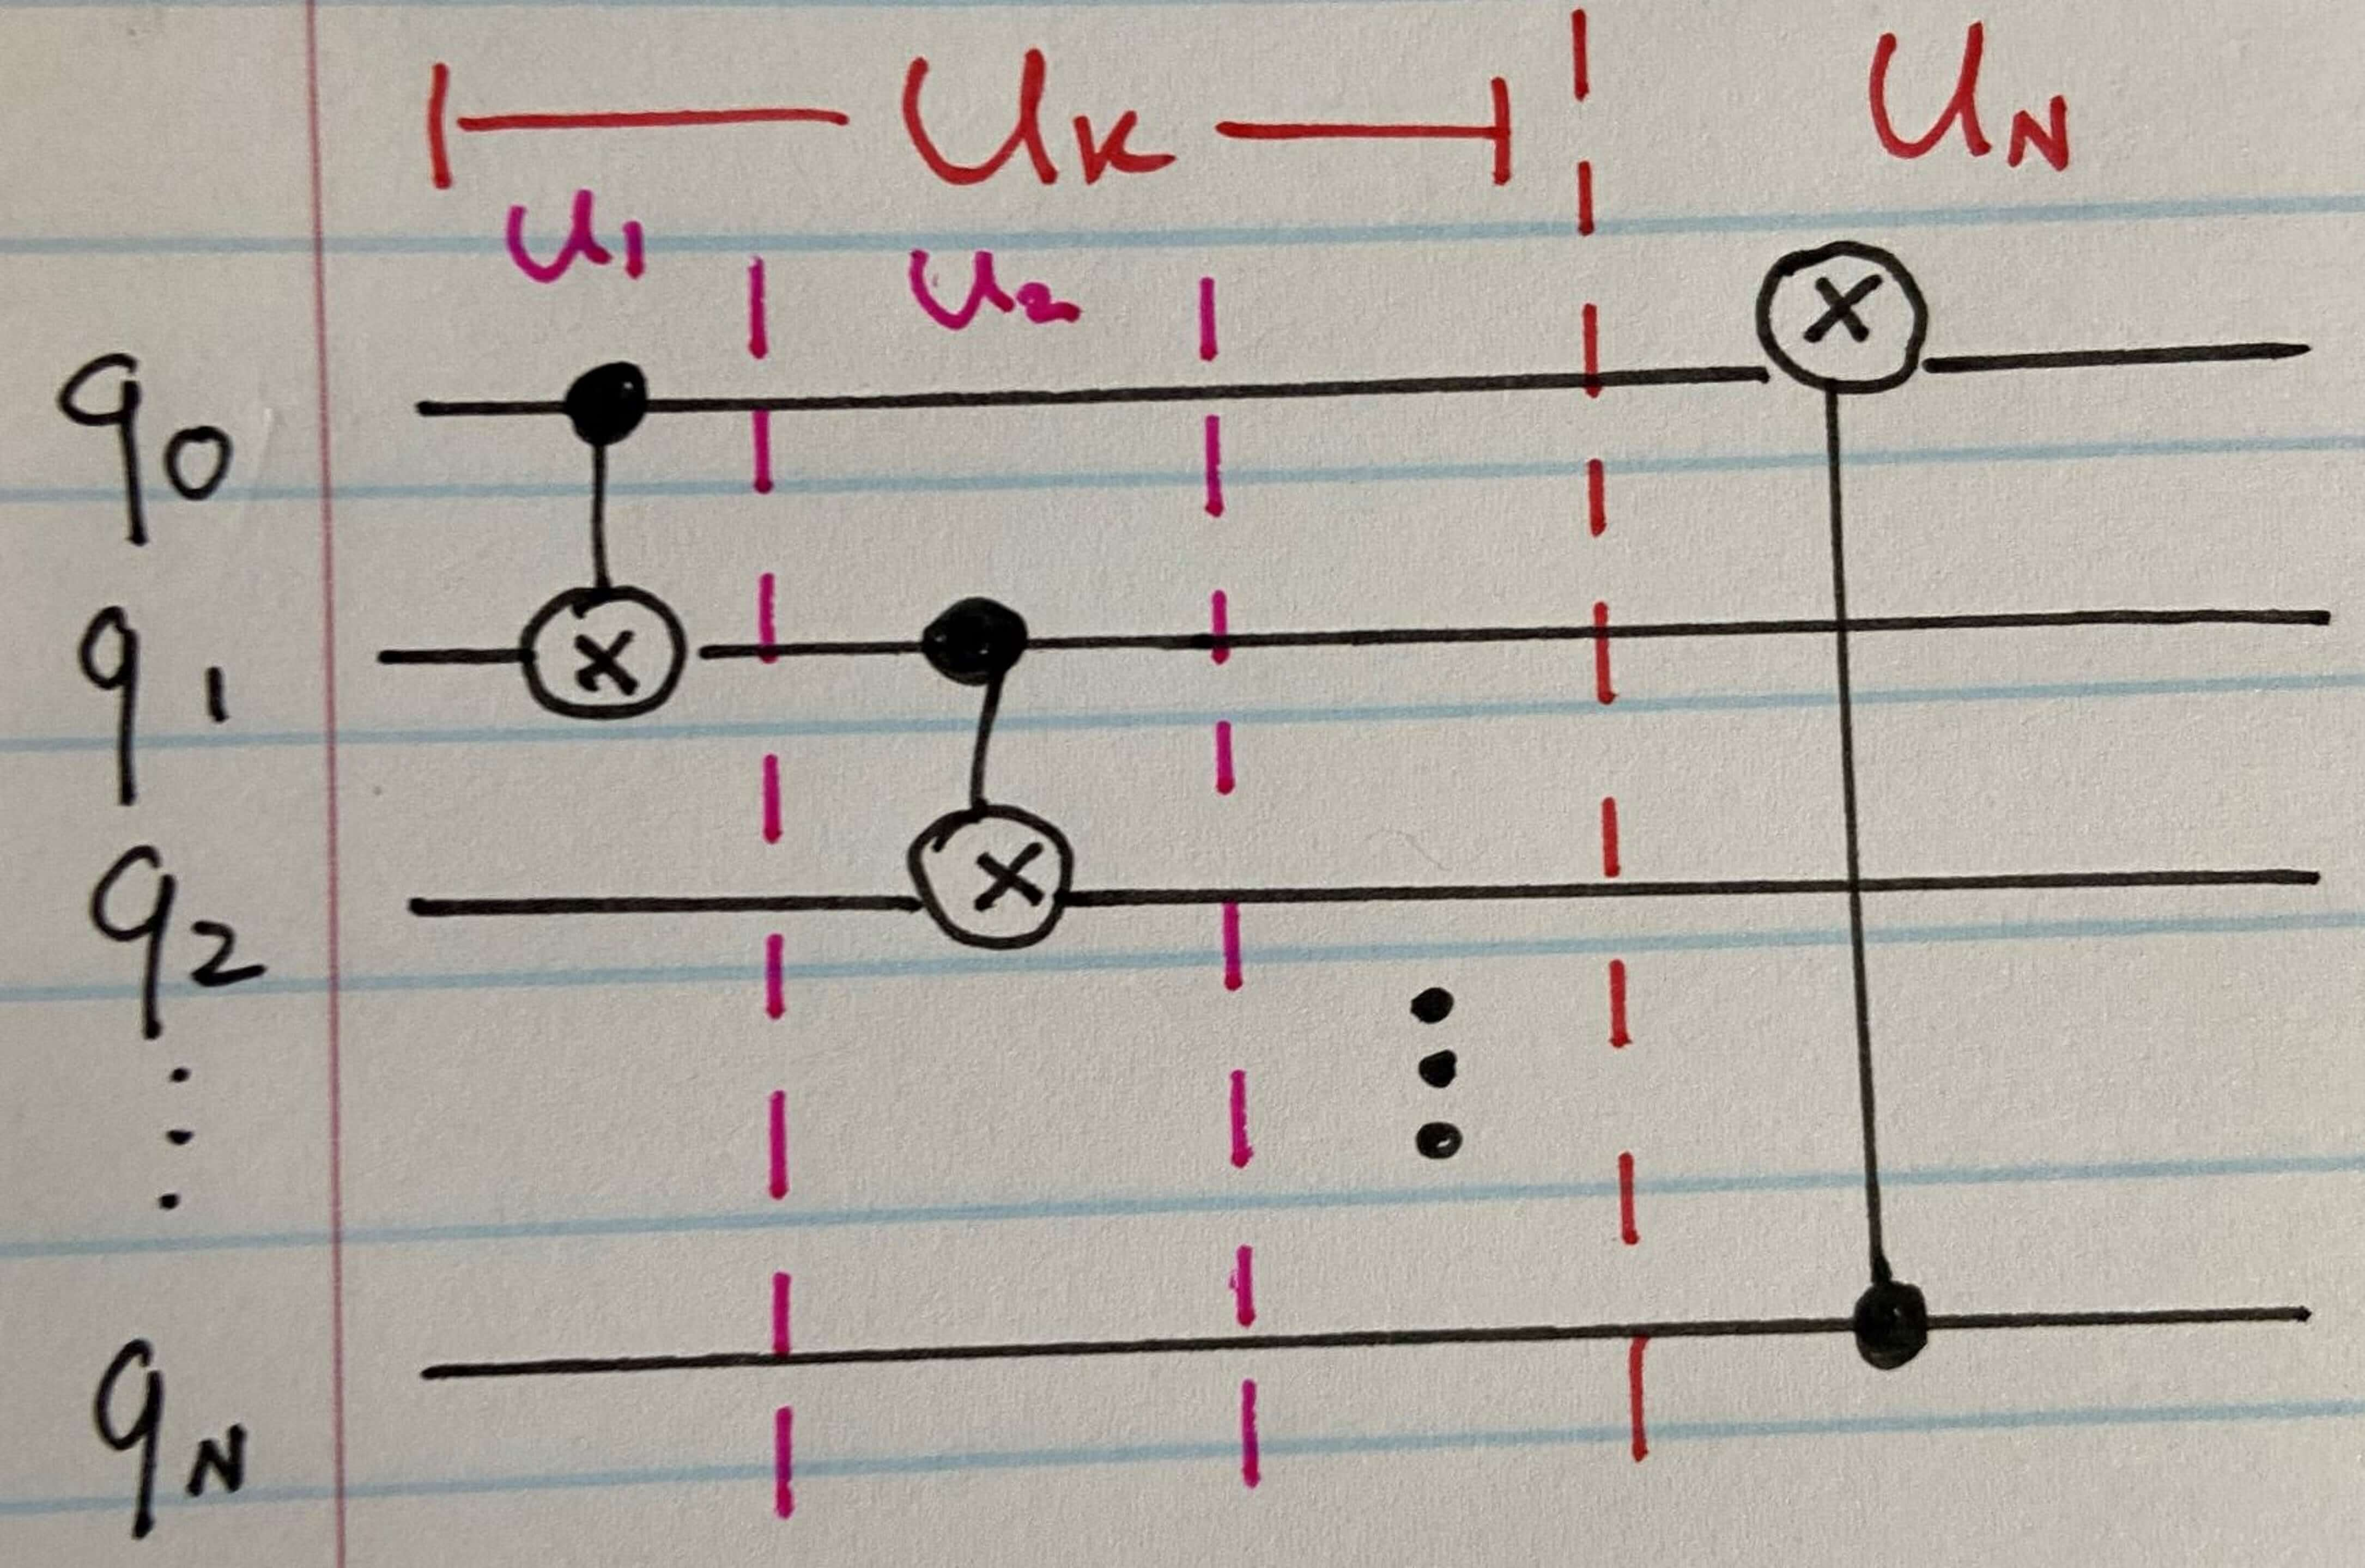

In [2]:
from IPython import display
from base64 import b64decode
base64_data = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAA0JCgsKCA0LCgsODg0PEyAVExISEyccHhcgLikxMC4pLSwzOko+MzZGNywtQFdBRkxOUlNSMj5aYVpQYEpRUk//2wBDAQ4ODhMREyYVFSZPNS01T09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT0//wgARCAs+EPQDASIAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAAECAwQGBQf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBQT/2gAMAwEAAhADEAAAAPorVxgahk7CJ3DC7CHaIdhk9QynZGD3oynpRzrcMK1RibhgbUc62aYaVRlPVmc9bMynbQ5q6Q5jZHPWwZOtl53uGJpBE6sxrYMVqGT1Zy11wYVqGBs5cXs058uvNr43N9Hmdezqjo1yyfSTOL1kwOkOZdLOZdYcz3Dle8GR0Bzve7OWehnLW1HPO4cz3pOSuijmroRgaswXSGD1ownpgyN2cx1teOuwjje4c63dmD2o51vK5LokynpDKOuTnntk5K6CsJ6bTjrWTnrakxnoDmfUjCOolwOhnKul1gt2cldDOZdiOU6rOC+pRjn1quWt1JnHUHI96OZ9BXMt2YPoRhXQHJPTBFXJJrZyvoZyPoZzHUHKdMmS6VWC6COY6kc8dUmL2uzmOgOVdNrynS5ON72c1bM5V2I5ru6xOlLynRKYm8xMdQcp1i8k9zOR9aOU6szlvajk16ZOeehrzx1M467JMHrocR2o5XvUch15mE9FVidFxzLpZyrpkxXRZyz1wYHUHPPbNcq6nHG+sOU6Q5jrZxPug5F0tcF3QnKdRNcr6GcU90nLXVJzz2hxHWznnqDkvo1OHTajmXdmcp2I5b2kjLrg576KOU7MznnpZzLqkxnbQ573k5tNpMzWJZNJDOqJNsys9UZGrSW5KlyaZuFWjYNTCToTnQzskaEaRpFraC4qZBOCoEGudtC59ZdSC5KkGnJdTIqlgmjVCJGhjQ4YBQONMjSazIjeE1qWSILaFzVBSYTbAECWkDQwBDFQqTJCiQDSsNBxSBACvMHMGyw3G2gm7M2kKkwCiLIFcURpAFJiWuYhshqwkg0V5lwmWkE6Z7E1KCbYk0aZ3AiYN2pE7kuEwVyMaJKzC0xNMSYOLkq8wCgz2ysYmCEJaZmjclS0IABgCYEUNAOoZRNEVFlTcDi8zRFENoGmTUMpNklB8+iZQQU0FEBRNAhlEMBMJoGNCSYqqQmpBiAqBTUpQqDLWTLXOjbbCwrNjSQ6ixy0oDKiypqWNElNWQ5RTEE6ZlCmGOErK4a+dydfK6/U7+PrvKQJAElRSE3NPTKjSGoiXJesMcp2KQCnKipktNJYwVBNEGqAQkVIFCRUiDSUtuECKRaQwmgoza2SAJiogVxoiuSnnQA2CrMauQBwMRFhV56ZjqAszY3DKFEb5lAVAOAu5QyaqQk0IRpLCC8zaZYxom2hDkaApNIIQwFbkGJjQkoi1c3kOpaq1JYCENkWgolpUoBNlmehNzKsSKSoJ2kzBGhLAKAVCy1xKvPQhzZlpREUrIdBKqCnNEDYmFNOIBMp0EE0NoHFIaaKgQ7lklSMaWRyUhBZJTeYqcjpyA2JjDK4LpSSVJpSQnLE5B0mEWGerBIYnIBSiSdiRSapoWbZQqENBI0QI0hopMqQCmkpUtWiSqmpFRJUgXmilSDn8z1+O5ej9D1fgPv537ipvt5sjm5qRhNMmnIK2ZVDI1jQFpmJaIQ0EWi4sCWC0kJCRtocrQTGCqQFQkwEMqKZImUpYNAqQRdgppiKRCbIi4FtNGiiybmzOaAc2KhDSoUNArkdEmkxrGctoK87ZVhS0krOkF50F5MlrQQAKkOKCJoCpocsJNECYNVARaGkwqNTNUE1LAcmqcka50BUFOQSbGSFiAJRVRQptAJFywKkKrIClQ5YOQKUsSuSNZsmkxMYEhw1LlFTCaRJUjcWSUBIxUA5ENVIJlF53ExrmVWYWlBSANc0VDCNc6NWqJloblhSAGyLkLQUJWSMIuLJtIVDHFQVNKFFCKNYa+XzdvI6/V6ubovJBrJm00QASOmxhLZNQxiY41hMWmaAKE2JKkdEkVNFSBNJjVQDVDWdAKlkbIZoZNtJdAhUpN5jV0QKzO5YqlFCaVFQakWrlCNitCVGgmZ6TQSITAKzopMJnVElWQtIEwBgRU0MQTc0jQExqhUqFSaksQSAEFy6qJ0RLai8tYNIpCnQEwVK5HN5oMoYNZFJQIuXKFRoKaZNywi0SWzOnZmKyFUFzpADAjVCzpCHQDZNkrQSJtEghitComqpBNDhqpGDMwChArTHKCKclKkMclCLVIQNsg0kboqIZDqKpkXEOapgo2w1QS5oKcRcaGZVEtskclyhHWbE51FFpR1JWV5m2MyVqqTOp0JFRFTYkmtS5LQxMQSwc0JQrBkLUXA0IvK5AeS/G8R73wvH1sPsfJ+pnr7rqw6O/izNzczaYibJoksMxFod56CzuDSXmBaGqkLTM9MtSRhnpDNM6zKtoQwNM6JJYKgGIobM6kGhFuaJBF5UwVwFATUsItgViatUk1DWKmidc7iaTqVUgmDHAVOhGlRLa+L5TH0e7nzvoLjobNcBBamAqgC0xVICoHLQ4uBtACsEIVJhSBzaMrENUiOjDYhMJYipvI1EBIFuAKixJodqjMTBUhUMlUEFIGmMTFYhIBUmCQNgOaksEMUlNWSWHBI80AHFAJsikDBjEE3FUptAEjSY7zsU0EKwnHo5Dbb5veE1JamiaQaNMSoFOkjaYRTJqWMmqAC4Am0AMAEIuAU6SyrlDLaF+dydfG6fT7OXqvNUVInLJnWBUiwaAqZKJsBgSBKpFIYnLG40JSsRSAQCclIsiiiItE1LFaoqZY0gE6EVI00NiIbYkwEwTVktoixkphUjBpk2qJVIStEzSFVAxA0BRLATJFRLdEsQBYSwqKgYIACgYABFoirgBMABgA0CqQHNk3NkqWFCEyhoQ41gSAaApphIwBiokdSwQwozCbzLmgaYNKSWULSGOosIaB1mElk0IoEjrK7RJkawDnSBa5VE0ADCbzoTKMrtEgisdApNiVhMuiKcDEy5VElokKJNMzQQVBmUUAzM0aQwk1UsxqdClpkAQVcMpY7hntzG01mDtAVmU5oiaoKGZaRZEFBaZKGFRQ1WJuLM1WbHNMGhENKS6X4/iffeC5epy/W+b9PH0e52w37+INO5EBlcaDVQNXAwCblgJiHBreLM6LJuAGgsABAgRrnQUGZblFAxZ6QU9Mik8ih0QOhJWJKxGkEUAFwDpCVyNaRFvh+dnt9p47Xm5taxNoWTOxyMqWxFQXJRXxfs+Zz9Hm+Tbm4+r9j23gve6+Da8n1+AB2jmhJMGmIGDljm0JUCBBUgFSFxQCocEFq8ykAVMlVNEUgbQXIAqQiWW4smoocgZ6JFCBpQW5ZUsE2hMY1NCJoYkU0xkWIYAA00U5RZAcauc2aljCiaQJJGiljBiE6ctCmkTQFNAK5EUEzcivNGyixJ0E6yRaoFUlEgDBJoTLJVlTSATQqGFShoBOQaFK3FJUPJePi7eN0+h2cfbebZUktAAyVSsipocUAAUrkg0zHOkiaZJFDqaEwKy0gHSJ0mQqaHOmQIYhamVoKSApI0Qgc2JUgAHLBAxAyWIsllIAECYAOzK1JpNIU0xTSFUsVUgaYhyNFCBktMKAgGVncGikGUGRaDSLIKQOWOGDaYTSJKQqSKGEXLKgZnrINaZjqKBpFpIm5oErIVIToE2AVmUmgKkvO5BVIqjQeeoKdQwGyNstAhockmhrkSMFSYm6MdpdZ1nuRebKimZscRqmKLBPPUpEASzQeJpMM0mbKFI1QKKChouGxEA2oNAZLljmgctkVnqRedlwrJqKIKRctDmoDTPQy1iisqYZdGBrlSNoqAFROkopyioYBnoCchU2JXAougbQTviUTI6aSLgUYl5fB+88Ry9Pg+18b7Gfo9lvzdnbxc1SuVagVANtBLQUkFlGTihiAoCXUFBJc1I3OhA0CclqkNNhKsV5heWkhhujXOszVwAloQFEu8yyKHIFDZA6JdyV5P1n59n7Pm56YcfR9B7L83/Q9+fvUV0+IBUXGgpeJsRRWemZWuFl+S9T4vP2fEw2w4+t2/oHgve683WlXX4LlzYNMVSDrKi0BNCGnIlQKpYNIdQwpMJqB0qFKoHSJWeg5vMtKwlg9M2ZjshsJoY5cjSRpnVGZvmY6UyHciYAhiYyKlk0WJUCbRFgJyxtyA5KRRJQcM0s1NsEgFQTSYBJQSUqVCdGNUx52iWwmiiByVNBMayNyDYDRQmmAAlSBiEyhCoE3UpgxBUsEMJV1GaActKqaZuKlrh+f9D5d6/S+l87uc7eZM6IshlEAGZQjbCWSNyFRZRKQ02k1NLm6SUSxqktSBJojO1ZMXkNmhnc6EzqiEAaSh1NBAwTsUgDILEykAJghoYwUgCepGkBA2SVoQXBEgW5sQ2KLkbbJqQE0JplEUVLCErAtksQmgbx0BsILCG5GNim0Z0rAqRpUS6CUUJaQiGpaJpGBbBcoNXLLoqYqQqdCBMpDKmkE0hVNRLVVNTzt7Ly3Hy+r3x8T7fT5sc98bymy1QSFDKzbJpBLVjagbVEVAU40JGCWiJpUJyxzWZ08xI7hmuaZGkWIKE9MRqkNVBaINJkM9VQFghoTQFZ0DlBrFGdJlCg0lonSUay8iqWZVJBtDMbljz1gpuiZGDVGbmwRQpQK0xpoBUPO4CgG2ipYTFovMQMogKXk8V7bwfL0eX6vyPp5+v3e2OvXxZBaxOkhc0gipKMtwqJLqGSDE0i5YITF0Y2SSwQyiUC1yLaRSaJtMHIXJIyqMqmgvPQgbFRkaTQSyS0SO8rFrKXSJcnzPE+o8nj1sstp5fXv+g+V9l28sub38c0JCs2S42CbyKKDPaLReD9j4XHpcGeuHH0vs+38N7np5WtGfT4aHVQAIbJCgVoJAFcFK0RcMcqgoBNBUVBc0hy0UIHIDYCaZZmxObI0z1M2IZnoTQgVsGgvOszMmzRCLTRLQWTZF52NwBUgxADYmmNoApCDM3Mw4wM1iCHSHLYk0N1ITUlK1UsohUE6ShgwaByA2ImgErgVzQMBgiQRYMhXJTlg0DYVKaEtmY1SCs6BxpEwAk7InVCjUX53F9D5969vZydjEUOYoYMbJAJuGlpCJVKisAlUDATZI7iJoJp1bI4QdCBLUmpJCwSojWEUASxjIoJrMrQkTqRpsTQTaZWdQOpY2mEpjjWRXnQDkm4opoBARVgOKErRFRYhwFDHDzNaAEgaoIrPYimiSgSERZQ0qBORuQqbkaKICiLlDuGMVCaYhqBwrNUYTptr5CM9/XrHTXzjc3LVQVNwFNCYinOhnokOLkVKkEyaw8l6/xmPt+PNrl6vb7v8ANvZdPP8AQ50uvnAs2bm5FTkTTLiqMnLKM7FSBXFBNwUNiokYAgQNA86k2zqR0mReepjpOgpAdZsrMZpAiqlFMBwweW+JTWhMawRVoSVhpnBUgaCkaclCCkwCKHGkmbNCaigqaM7GTrnRAMmgIAHc0JzoKKQIYmmEuyGgqWhxcBpnoKKgx8T7rwvP0Pn9/B38/t93rz79vFinOsUDKQiW0TcsKy0FWWgm4LmoLSompoRSHLkbjUysCW0LSKKgYFSJzoQJhUaEJhVRQmISqyWoGWCaArNlGdCLwnXynw+/5/H2I+hxepY+31Q+3lUrLymstARItcdDMoCxIrmm/meI9J5bl6nNNPn9fovW/I+z18jTPXPfzOpLEOC1cBSRcNjzuRsQnFCrRGdQFzUFkgAxFA5TBNAMExA3IJ0JoJubEXkK4RTrMsMzZJlKQ59osKQIqQc2Tc2RcscgTbCs3Jd5MoIKqQpOC86k0GHDI81NMmaBMAbkdyEzclNKm1QRQE0EtsBoIqDRpkhRIwHLG0DSokTGCHNyDTBoGJU0Iu5ZIrM1QAnEzpJTljipKctfn/P+lwO3V38H0rzi5cwMYNMSvMAaJqgksRNktFMSKIck0m1nh0ecz2668jWfs/Rzz/3unx3LlwJaplIEmC0YoaHIAyTRARYFmVA0xzSFWbLTkGmDSHUgMAEgsohsIV5ltBQSCKIoAVUQWidM2JxqZKgoKJWkFJsgAThgWGboJGFhIJ0JJlySGmdklokdEUAE6EOkIcRUaQseS+75Xl6HGCn3fd9Z4j2HTy+sRr5KlzTkoVJgyiWwlgSOyCpGm45PI+q8dz9Liz2z5elH3fg/c383s6g7eNmLW4auVl3mCqTVAJyxLTMNM6JoY89EJ1A3NFJArzokAaYOoZNCCgIeeg0IYIJpFlQVLoSTEwJYFxcFEhSAdTZmKRiDTLbM0lhFOQpamOhmE0haRYnpmTUUDmxCCKEMqCxSWKyKTMtVZCVDgoIu0yqNFEgAYqUiqQnxHtvE4+75fbx9PL7/AHnXxdvbxkha5pkmjy0BmZcXkXUWBDGmDi0BUDaYJoamwaY4dkzcFVnQNIVKgUsnSQsATQE0iiUNWhvPQUgLSWQUDgSa/K+v5XP1/C5Ljl6t+/8AH+0vxdLT6+cEVYjSCY0Q51kaTEwFSidPJ+b+x8fj7E6R9HOvZ9mHR28apZrkRpnViRcUDExCBooBoios0lQFKgqATmxNUMih51iaEWJ6ZDqWCpkOghiCo0JVyEWAVIhBTTEmEaQwpMSoJtSFKyGgSoKcgh0Z0MbaENDJoc0hiDjmpzUNFkUSxgnJaESXIFTRU0AANAUgEITaKqAqWwkAFQwolyDaABDCRWOiWyaYQUCuNCAshAE0oEA6igHJI5Xi+f8AU+Y69n0/mfRuG1TCpoQMrO5IsQzSIipEoQS6KkGS0kpxc1Pn/R+d5fV5iamep9f1XmPU9vL6c7h8lSKqJoAYJskJKmmJuCwZncsFQIYKgJjSQbQKkOaAEwcMabBphLRM0ygoSTAQAA5bBzRJcipMlWgqQBsE4G6gQMBMc1IwQ0UIcgUBFamduATkrSZBiCaBuUXIReW3JN+d8/8AU+Xy9maPoXXZ6nn+j08nNOdfNRUq5vIoVFyqKU0SEFuLCaFGqj5HjfVeT5ernnUc/tPv/E+7v5vWXL7eOlc3FJpWhE3NFJyDTM2tBK5CiQcBqs6G3BUpk6ZbEzSGADUF1AUTZjaDTLRDkoBQaTbE5oi4BgzO0wlgqYZ6AOs7M1cjh0VlpBpDZLVE650KZshlmWs6ExpAmrERYJgKoKBgFCtIlPSTC18vPX6bwtK2xvXMCVdJUzNmkpktA0MXh/deHx93yd+bq5ff77s+f29vGco1zJehndQPLWB0mRTCaUlJ5moWZgxDABFMAlUAIcaQNzQrhjgYO4HCotVA0UJyBNSazSI0z3MqSBsIuGTrFRXiPYeHx9vzo2z5+l6T0/xfu9fLGzfyZNsvDfEcayXnQE2oKHSz0+TO/kuDo5OHsT9j5XoXL1tJdvH0A1kGBFSNxoQ2EsQybKmoE5sUsHaRWWuQ6JFZZkwIVIu8mNaQMmyKiiNstSZABMqbQCQ0IvLTM1JBNUCpFXnRk2DJsHIUkFEhUOSktCSwABJgqnQkAkYcc1OaDkdQypqCiaAEJgAOpdSVKZUtjQilUkuaHcUDlFS0JzYqQMJKCS5TGNAwoFRK0gV56iEAihw5FZMNDCbQk0FpLzfN7vnOvX38H0Li3KYtxQBmay0UTYlLhA0lrQmhVLdGa0iGTRPn/v8Am+X2/AV1PR+v6Xz3oe3l7zafLm2qHLLUsqWhXIXNQAWRpEjBjYgBFIQxMmdUJpGs3AhAwABiZIOLEtMzRzRm2CYxDkbli0zBtArgLhgK5KQi5YEiCpArLYJiikIYItIAbAGZ3OghAVFCLxFYwTRZloXydHzcd/KcPTyc/Y0+/wDE9Zv5/q6p9PKhhME07VUhNAaTNCqWDTIqLKlqWpuZfN+Y+98Ln68TRj6n6P4XqOnx/em8enlUCuG4a0SAiiodBM2K5QnUmmWuA6hlDorOoJponTPQUaSXBQRpBnpNBTRNVBUVIUwmNJKmmTQyEMpME1RM6QNSzRCE2xCDLXLYcphNSaCYgCKTJbCbhiupFNIWghoCXUA7koljEGYE34z430fl8fX6va+A9Q4+rLjt5hKCppWDihMZA0NzYeA9/wCBx9vy+r518vT/AEj6Hwfu9vGlo1wz1misNJFchSGZa5bBGkEssCoG0AJi0y1FJRNSCc0CpATYmAUrM0MC8ykkaOWEtDBjzaCkhioauAtSA6jl8T7bwefRxEuf2+97Mejr46pxeVEuxBoZlgS0FjhUpp+W9R4nH3/H5tc+PqP2XlPc34vpiO/lWibKcMQBnomA2JIGmzOkC0z2M5cmoAS0FElCRna0MltAwoJVFIzGJFNUAgpIBrM3zpFQ5GmBpnqSShhROkgpdADEmEsYFSMaAGDVkzchSABDQxAHEIzQTENFKoCgEBVNACRQBGksJ0gARU1INUUTQ1INDJtUJJDaBzeZaKHLZNEVbgLU0TSApIshFUkCAJvMsTis6QhyvN8n63yJ16/s/D+zcVNTcAASUOhFMkcXMSDRuWXJRmyRpSaCdvP5r0XmeH3/ACrz6L9v3/ufK+v18mnA4XJVTNSVUgOLEqBVLKQCYAElAiopFTNiqKKkkEMokQpQW5pQqCyWEkjqLEMCpBjkabJYCqQZNhNZhco2ioHGuY6ikQ5EUKrzslXJTQE3MOsqAApzpWdSAVBolQouDWRkjBXOkT537/lc/Z8XHWefqdvsfNes6edvIt+eIQ2SrqWIcmrSI0kAbEDEyIvPTGb8j8v6HzeXsxDmd+70nwPXdfO7pT35wwRMQVCLJB3FkGWonSKzdDy0kmhHRnmyopDcsz0eZbmiaVmdTRFxoaYNjlg5qDRJkxogqQpGZoIG1Yk5prTMaZDU2UZ6mGuUBZQ5SN4JFWWwnNEtSWIGAMGCmgcgOaHk4NsrRemehM1AVG814n4HrvKcPZx+v8rsmv0RxffxZTLjSKzpjBOaBVJUsH4H3fisfb55adnP0fS+j+X9fr5EKzXCXNDzsJYFoDK2hUMWkATTEOB1nQxskLIJoNZoyrMKCC6TCVqTOmJarMqp0AIEDJuaIZoOJoQ2MlFzLFpDjk8V7bxGPR57muf2e67+br7ePAqvOCXY7lktUJzQ0TD0VL87xX3fL8vXxCcfb1+58r6zfl9oHXz0J2N56EaSAQxa5akVUkWgDXOal8u0umW8XDLmiKkqRFioJhEXGxU0gEAAKyS3jRWdBeYiopFUmTUsTTJrPUlpjcaCVZFhICC02SqBq8jSVYOWFJGmOkk1Fji0A0QAcwTmhSGJkjkpgCpUCYAhsQUoKAJqQbminFCigGgmkykmAgpJiEy5VicBaSppyWSFNIpAAqE5oc0gUg6RK4tIRcrz/L+j8ydtvr/F+xeekPO41JoYwuLkqbkSbiQEVJggJVwE0htRN8Xlvs+e5enn9H5/1b09B9Dk7O3kpIczRA8tJJrHUdIBoG5YwYmASwQBUUE1KNEMQmSWGdNiTCW0KgKVSNaSSrkVSxDZLTGxAqZm1JoOCpmxLWILTJFRNmYypJqpGWzObBKmTTlINCkKQ1kUl0JpgiTSFRSaBElaY6xj471njs/fxXk+fo+i9J530fTyNIvPfylZ6LWPRiOgFNwVcUKVZN52TedGuOuUVh08M6eN4e35/H28xW39r1vy/t9vIKm9fJKoJCiHNgJlySQ5ouHJdTY89cgmkKrzKYzHaKHlUlWgnTOiSgytMKmxTcFJMokNM6gtyEthIg1m5HJdE1kUk4Ak0UMUUjZKyKEFKjKs6CooE0UTYgRRIMAEMQ2ZtsuGFvKyVQTrncvwfJe68Lx9bHWCfT+ib8P0e3iZDd4yF2kWhKaLhyXNwP4focs9fzf1Pb3ztWlRr5QmrIq8hVUDaZNxoSkyhyVNoJtEsYkqCpoluQADXOjHXOisNJNpqS7mSFcDQyqyoHOhA5FVslyC0kEZ0UmhFCMSXl8V+heF5/f89t8/t931/P7+3k1NF4kaTSpIHWZWdoplSHB3eVz9fxeXXLl62bBv6PtvC+415nWZvr57lzTqGU1UmVZaqtE7TLQZGDfB476PmuXo7ez8F6HPT2VxXXyqQayk4KBjToyCjLRWQNkjYqzZSQOaRTzoGkOXRSmiRoomiLzoKjQhaQNUyW0JtgEk2mVlSHUUKmAIGQFEsamis7zGAclS5ZqWUloQXIADQAEjcBcuS5oBNksQigCbJc0A2Q3I0aETSGUibmTV5soIKlzVgDlyWJFIBVIU5CnIRSQqTEExrALz/L+l8p13+x8P7TNq1ecWIbQXKiHeehNRQAINUJyxZ6SXNBMaZzr534X3vhcvVz+18n7es/e2zvr5ReWkzqo0M28wVMQC1GiFRK6GYayiC5olWgJoTEDyZrLhWgWdObYdRJpXFodMKiHAm75pa6q+WL9SONx0a/PzPp5cWa/SvzvJd+wflt09BPxJk+9Hw8j0h5/Y+0vM4tewjxwvrX4+M69lHjol9qeHi693fgnXusvFB7k8XMe2rwWZ+gV4Is99t4DpZ9qeS6GfSvzu15/Zzx6riKpa5zGgk2kXlpAmUTrLjDxftvF59H51Z6c/v9P6HynrOnk3m538ibFcAaJamUgGoEymITKSCmqkfL08U6+L4focfH3OPq5/o2ex78N+3jRoi8blUDvEHFRZGlubrNAYDCyis5tX8Xhz29Lp836F43kK5Y5RUpU1z0CGAiiVYg01mxoQaEFJVOoAQWpYSIlrQB0SJFRaM9FSKbzCNKMnqCKkigWNZ0MLpRFKkM7ZnUVaywE0E2gKQgclFFZxrEK5q1VFmeuO0fP8L7/wfL1MstsM/b7j6/xvtdvEh0a4w5AakYI1hyOp0KwNEy6eTeJgqqcNdMNcjXPWRZ0i9YYotFTclNIlpDJoHFgyhJIYwHFkjZDsEnZjchUjJoszbZnvmEaxY1FEO4E7khzY5uBjkE7DxPuPJY+34/N1c3L0PZfd8V7Hr5dJvXzmdZWaGdl53ITQl3GU6cvi+r5HP1Lm/pZ+j5ufThN37nwftdef9S856+dowuXKFY3JLPPTv6GPM+plVj1xWe+Dp4r4X3Pj8vX5+nHpzf0Dr4e3t4ym41ztzoZ6SASA2ACHnpmVWWgDkkTNFVGRaBVAtEipQFFGVpktM0edjhgCBoBpoCWIpBOgSmGgmJrMpxoSOiFYYXOhRQfOpVKMRU1I5AVKiRocuiZtE2mDlGkFCBDBDBDaYqTAcCuQJKGiiFYA2TSRSZSGhxQK0xDQgRSGNOQJAALSoilBl8v6nzJ2f0/mfUs2rKnNg0Y0SqiHcWIdJDTFNSWosm0FQ5L59sZ1818f6/xOXrb+k8v6bXP7VM6eXlnn5XHf2Wv53efo9+eFo9qvDZL7rj8kNepfk6mvRYfEyX7j+E2vtx8ZtfVXy0fX1+GS/dPh0n3b+A2Ptx8eK+zp8RNfWy+e17L+cL3rkouIF1MWdM4BvnAtVNCARjViqpQQ5qG7SB6JiOjF6WRT0swXUHMdO1ca7dWfmr6gz8h/XZ8qftB8WvuwfDXoEeefos5Pgv7+a/Df0pa+at+Ru/ofEdn6H3eS9Zvyyg1wc3I2A4JNM9YReV9Z57H2eZA5+t9P2f597Hfn/Slm/OrOopFMq4ZnboWYhUtDNzQ1SG4cVy9PDO3juTTm4+2vpfN+hce335+rt4iQXBYi+fTPOp4fj+d5/f7H7X5r6G31uej6edE3FmsUK/idni+f344p4+/0HrPHey6+YNPXxEOSo0hdEMkaB0iVrAwYASxeEzp1ROyZjtlTd1lapMnoLk6dJwRUhVxpnDp5BOjBOUKtETWZrBaKs7IYiXFLYpLBFMoU1RlpKQKEloUiwaaFTCKHUVHQvN+ffoHgOXpc+Nxz+72/2Piff7eLDmd/ODFRVEF5gUhuWDLOXaaJGxLQJQi4uA1zBthI0XF5lSWRSQMAqKG5sxvOipaNYaFZJQkJFAwE7zG6Zm4sJqQ0y0JvLQeWgCckVQJjIuqMqkK+B97kz9Hgo6+Xl6vZ7/8ANP0C/H0782/Xz4zssGAlUxVGqry32vC4+7HN1j0Pt+l4/qb+HwPJ9Hgz9uXq/LfYnD1tue3l2J3nLnRqVXNN+X+H2cvL2I9R5asP0jbynqunnb5qOnHx3xPQfD5+tzfT+b9fGvZdEPt4qz1WsZ756CExPPQVxRMoGOCgRYILiiXNiGBnpIxUFQyppCqAFaGVAhsTAqaRLTEqQ6miSpAAJdBOkgwLaRE0EUUMA4ClKxUNCAGSAMSCpY0IqakaYTaBtA6kKlyNNFIARRM0hFBGiokqRbZUNME5dE0BWdilooKJGgqWBUkFBLGJgORGHzfp/KnZ/W+R9azakOc0hCkyKHCmmJjM6YghGiSGJiU6By9fNOvmvi/Y+Ry9Y9N5n0esegVHTyuHyXuuDP0+Df1+HPocR9BZvMdN2cNfQ6Gfkv7XRZ8Jeh3ufKP1cM+Wn1NWeVPUpfLV6hnmH60TyB67JPMnp968i/ZUz4w9kTXjc/aUeMfshPInslXkF7TVPDHuZk8PXtg8Vr7QPG17JM+NPZKzx2vrC58weqGfN6eglPPbfbpPhP7kny9PpM+ffamcZ6UmGlwjQ0aEJgWUElJIbYkwlqzOlTWXzvsKa8VHtx2+L9infnqAuKmaE3RmMHNg/nfSwz18Dz/W+Zy9h+q8l9nXL2Kc9PKkNLiNKkFNiIZNRqRqoBtDcg5ai/OfY8jn0vkiOPpVvjvrn7X6Xy/pdvFltXjUOhE3NeP8/wCy8jx9jH6nztJ1/SK5ezv42cq9cnm/OY+ng+NePH1jaPvXHX6PPfr4+WmZrlZJIUVbK05TWiwFJpmCQ2xea+z4Ll92nPJz9Lbr+XK+grzts+i6PKas+vrx5c+yXi9LPa5+OD1OvkA9RHnJPUfQ8NR7fi8qz1e3jEeyPHie108KV7TDyqPYb+Jae16PBNPe34GmfeHgQ97l4hnt34jJr3r8CHudvAbntzw8s+81/OtE98/z+U9/t+eB+iP89o99XgKT9CjwYe7r8+5F/QvC8eePr3WTnb3H3vLej7+KzPXXypUWxeVFRpIwk0mWaznYPPQSmxK8x3KN8LgVxQAh2oBOiVYAkXFIQmPSZMwo0lhUtDloaYKpsiloSRoAIV57EzNhN5BcaBLRSaJbBWgYKSWO0z0trwXF9r4vL18vX+T+th7PTn17eUNGubVpCNBbh+Px9fL8gjHp6/c+b7m/L1N6b+D8+4vsfIx6mHVyTnp+i3wfR6+TUudcSp2D531Pj56+Q4uvm5ezlaJ009D50cP0u/gfd6ef4/4/pPMz7svpfO68793th0dfGc3GublgAybgKU6BloE1UDNcyp1zIYguWA6DKwluBtUPNsm5YXDKy1CaSKQioAWmegkAU0NEjvOhkUAMSEWSimBRkzUzDjQS0gGmCcUAkNiBjCbgY0IbJphIMlWhpskqSk2SrzG4skVBU0S7RFKgQCqWOQG5oEIc0FRU0qEUMM6m4SpCdKlSZy/N+n8ydc/tfC+0bzcObqaSWkOkJNNA0ylNCFITboaBNNDn6Iz2818X0PnOXqP7nwvsV6jTl6evk1KLMs9iazqwy0u0y0LJuFZcTKaXANCFQFNIpKSiQpiKnOio1zAqgUsoypAGRSZFoVqUbGbS4aGTZLENoBDBzoS3ImA0Ai4ExglQqmhUMQSJ0E0IQMljKUsm40FOkg6ki5ojTKyWwpNwlRb8Dy/vPG8vT4dcifX7X63jfX78ma1z38tZ6ZK6z0TPWbWHNiCUpWNEWTJjt8OfRyec6Ofn6uN7TnvNZuz1/wB3xnsevj0mtfLNTaTTS83hvf8AheXp8Ijn93sPs+Y9R38ZXHNefL4/q+Xx9aRufT2e0+V6Lr5Q09fDCuaNMtB5EmmHTmW0i4dCRJSEX8X7VTr4H5f6dwc/t/Oz1/Jn6POP7Cmvk332cL6EvMutLhHUzjOnVOJfRu5+ZPodbPML1Fs+XPXB5M9VCeaPWs8hXrGeRfrSvJX6zM8rPq4PLv1ER51eoZ5avRyecPRanmL9Ozy0ephPK16vI8y/UC+XPUQebXpJPPR6Ry+afp6PJZek+e38l9eOPoSLl+96/wCD97v4sazfT5gcJncbBFwWmDxsFrmguNBpQXBQ8tA15tch3NiChyBJpgXWmJQpNBMhGg04DQRDy1HcyXKZGmepFwxVNhFSBSG0CpyMmhozNJvMtpDchRNCc0UpYEUvyvIfofisffwZ783L0Pa/Y/Nvda87uLOvxjebO8LyGfprzyjn6dVj7G47vo5a9fKtSM/E8p7jxufQ4c+ieX2/c9Z+de635vZOk9PijbLQr4P3vJz6Pic3Tz8fWVfXq5+KrmdJ9v4ftcfu+Z+98K3LXOpv33Zx9XbxqrC9cbeWgKQyp6g3BU6YGuKoLaLaDGhk0UNOCorE1z6MxskVNivJlw5KJk1JRaAJALmiajQBIoEE0htUQ3JUjEWBSQrhFiDiAlEMGgaESmx0gSoAGCEFzQJocjAGQ2huQYIbQTcAygi4scuS6hhFSFJhNBNIEmwaYJqqVhE6SJjiabCKVCpHPwfT+ZOvL9X5P1jqjSXNWmk0USXCAWEWEVKKyqiS4pioQwcaZzfxvM+t8vy9Pn+l8zvdfVdvz+/r5MhTlmrmnUWNy0olCc0IbFcsSYs1Ng2iQQKgCoCmCEjREjUsRTIVsU2CjWRMBpolXA6EMbM7QFRQnloCWpDGKLQ0wRcgmCaY3SMy8izTA0m2TSkVyixMljLwqiNc9iFGpk6oQIrPWIQqTPz/AKjnn0/n0fQ4eXq36zx/XeXv1y9/Xy8ouLznSbCQAaGmFIUlK+OdObyO/Bj1J6cvQTfX8H2vwbx8smY+7r91+e+06fB9Ru9+bDedwoVq/Ket+Lj7fGpzy9X7vq/De26edp57v8hnfPDXP0Tt5Pr74+q7ctu3jZ0neUUtAmshumGWkFysjpmbEZ0Ks9U0hwVo8yXm2m1cs04XO50XJ6SFXCZkWaAwalLmLNIlI0Say0RQh3F06gBVma5uYsSNogLebXRJJJFFOAuoZUpFuA1ebLgS53G6/P8AGe+8Hz9Phijn9fqvv+f9D28U0h64CkqnADWhLJG87LxuipUiKkpNFaZUS0A1JTSLchMKhlBNkmhLJl2BaDMgYI0rPYzbg0lhGsId5gVSIqdjOpBqoKUbCVSJKTWaZneOowBDkclE2AfE+3nO3hubu4+Xqc9Oc/R6X7P569fN+hZ+IzZ+r8qaz2idvRai9Th0dPLCXfmhhdZeK9z5fP1/DjTm5enl9r4MZz+q7+D9n28rSqy1w18T7fw2fs4KwXL0fsen+B6rfn+Q+P8AoXj9d/lLojn9iUKM3Sy939D4n3O/jRU67+c0gE40B5aE1MGmWgW4wNkWIAmhk6ShCYK0XAhtMKiSwASZSMzXFo1GhNgkmOstQlyUqkKVCBDEyGUJgCtBLksxDmoUtwAXnYpbEmipbJBGhDBFEtyXUMaSLkAaYZ2CtSWhBRI1YZugcjIKoh2iKqQVQNNkGiM6pDZnWyVBm6iWwQwJp1IMw+d9T586fP8As/G+o13Rrk5LRUkUmUhIDoUWiWMjRIuKdZtMGA50yX53mPVeW4+nxdnH0z6fU/S+L9ft5I07wRQZOgvTNl51ImJGm1lqhqsxDDWQAQS1QyKNDNjztiGJlSCdLFweyJbQ5mkABpyqNIG1RFAIYJkDNMigBhRkaZlNyCoExk1Og8rkee2JrlQOlZMuRusymrEMEmjLVMixCpMoJKSCQcNxrb8Dy/6P5Ll6PxJRj7vse0/NfW9Ph+5lrhvz9Wnco0zhTogV2mOl4zovK7+fz6Ma5dufp7fWcP0teUfP+jOs/neH1/i8fXr0PnerWf0XPHq6+Os7yvNtWs8Pdz57+F5+vm4+1r7fwPS5/X8/WU3GuW06x3fPrXH9H7fzn6u/g9hHn+zXD6t/FzPtnnZt9NPlcJfYZfA+jeXcKtcbBEAydIoTEb5UEVFjEigDG5RbGiVBlqSFS4JYpeelSToE1kayOEmqKljGgy1guLYEtGJKyXBadZXFCbQwQ0qkm06Bg4KVVIc/hfdeE5eljnc8/Q9Z9/zvpO3izcvXzTJVsi1M2rETRGoypgIulJeWkjmpoCpZTdROiKEwloY0UihTaJYDVZGksJ0AUtBUMqkhTpmUaZDBlKUapIHnsKdcyallJhABaGRSsazYkAtlRKNTJjax8T+g/Jz9PjM/v/Oz9vHOyz25Y1pctPseivz/ACfQbTrz6UrXAYqU2i+bsym/z3D03x56PycPU/Yzr5vqFevN0grWI8J7DxGPQ53lPL7PdfU4PodfL14urTXPwXJ67ymfRnl6+Pn9ecaY5vr/AEnk/V9vINIW/lpoRMRVxBcNC1zsM3Y2IcoKTkQ0Kps0mpCdIEwHLYOQGgctl1hBuJElMmpsQBeNsFcBUsVSgbBOZNCaBDJGyBhzDJZJChyJgOSgTBKpKkYNIKJKcsqUAqktTZI0OpZWdSXKsZKGkFiVNyFCUXLAigpAIGOWBUunLAcVAJhUsQOpHJnw/Q4J0+b9Pg+k12zduMgguGCKAcoCaAFs0USCJBgBDYLz+R9l5fl6HwtYWfQ9L93zHpu3k6JrXxzU0qpAwB3NizaKmpKTAAJbBOaBuCkAikAUCAqSSWUTbslOQBCVoacjTRplrBNMCaCKVDRRMVBQ2VWYEVJc1RKGK5okYJmZpNInTGx6Z2JJhLQ7zsGAIomiSQ0M7llqZKJCikFwi+HreevguT23jOfp5dGJPo9t9L899Brz/TZ4dW/jl0XMrVJFx8+dO3zHN8jHpVmdGe1epx+z0+De8r38RAjz/mfb+M5ennOk4+30fofBey6eZ2Trjv4TXOgy1mb8Z837vn+XtRvzbZ+inl9PXLhy9l49zyYZ70Z6FMLmmlZoQ0jj7avPj9F2fc38em2b38E6ZamdjIdQVNyOlIUII0zNRSRTYi8jXKmAwRGhFFEVnZNY6C0jUiak0Tkm1QgQm5KYi8d8S4ihUUWpkQ2EaoSuAtIqpoSx1FrjRNTpJh4L3ngOfqYNXz+71n3vheg7eNm5W/mdZUrnXIoiik0NUjPWJl1y8h8jn9n6W/Lem1xuWb+dOHLOw6yJYxhNAJuSodGdsJbASRvhpmG2THFSPSKHplI3NmW2OohQHRFDggsllJgFZFuQKAJz1J0zsysozNEOKB3IKhoszM6MKJ04cfq218bq78hOm5wwuVUitDBXBUkS3UpdZl2NxbIZjXxvJe28Tj0Of6HN7TPT6nVGHTzdJiLjfzfo+edvBZeg+Hj0+fLXLHb1Ho/P/e6eRV0b4S1ojnQM8rzNFckGjM9BA3RmqRUaQS6AqQbQOWxLSB1noShCYFkUOSDVKTVxRNKDSSCwZUVI3LG5oEMIuRtAOWRbQig5IFK5AbAQAqEUFBnSENghhIFBZnOiGmgm0JWhNMBMKAUsFOiKE6SAm4qCaoGmJKgaBzQJNVQwQiHUoTpElTTGjPh+hwTp836XzfptfSmpcZbBOaCbkqLEk0SS07QAJaGSzSRyJAs+e9B8Ll93mpFj0/req8Z6vt5/crNedFooigEMsAIoEOS00JlDhsliGnJRUiYg0hFkMBoTAWuQOKRNlizqShoE5LZJIUTcsGqGSgmmF5sE6MrjQx2zsqQB52F52CpDUsmLzN1nYMYKkTU0AqKmoCKQ7kAli1hipIpEBU0O4hX5b1uOfo/O39v4fP0qVLPbTp+dDH3enzWd5+xPHtPvfO5B0cX0Sx6q/s9fPx3S18dpK4okjLzXqOTP1eINOXl66+p8eGf1WPL+h7eRrSLwYFvxPH+58Xw9bl2WWft29T8T2fTztvjegz6fH4Hk/RuDH2eHv0nPO3wT0gebPSdLHle/03dePw/p90b+VaZtxjSHVVFmWk6lc9Mh3A3QSZ7CmgZABcjTk0cSVKoaQK4sy2izBqxXLKJoU3IOkTaYosBUBLZlaY5dEuNCRItMJuKEVRmxDAItaGW2NRn4D1HkeXrTrnnj6/Yfd8z6Lt4zHe/mjRSt53JK0B50E02Xx9nBN+C4/pcvz+32e48B+g9Ph6VZ18/n0CS0i3PRAnnRarMsihVKKTBk6Cy0BvNlSIpVAVNFBJUANVmWtci6TJQirzZTgBpkUqGRZncgtXJFRYlcjrKybmhZ6whGgsOoNFUjx1wOhQSUwJc2stKtZJKz1kU1kaoocVIqEmnze8m+fvjI0wuWBFK7zLM/Mepzn0eB7fS9ue2HWjXy22rzjWaWpA57bEqzNVUFKpBNipUBLHFoEBQADkHIO89DNNgiidM2IqROUXU0JywkDS5ZWbgYUJ56gmEKwmhFGdg0CKDiJUrVIBoVTQKkMAEMHFiAAEUEFE0AmDkGNCuQAYhomk6pUglkIGLSbITkolk3LGnJQIaKJvOxK5GhjcskmxTUE8fbxTfzPp/P77v6QpcWZ6JQANAwZLAGFJXIprM1c0PO4h52jL4PoPgc/s8ot8cet1+l8p6Dr8XpLw335jcjO0GZU2ybljEAAaJox0llCBNMqWDSBKnEsQBJemLszY2tFUo4AQUDljkRSVkzpBbmiXAWAGmaHFAUmQ0ydcrIHRNAUpY5QVUgCRTmzK0FJsUsIp0TaBpAk4NBBaaB5sbaHFUQ3I5egkkq836Wc9fA4ey89z9D5yqc/S1V25q7MF9b6GuHy/Q/Q6NfDGiNfKlasHFjERWSa+V837zxHL1ucOp19D6Xg+l08mbz0vGaiq5PD+48Zz9DhrT0mfp0+0ujp5mVXnriqBbzSi4mydJKqaETcCYCWgTtjRIUDVEN0SKjOqkdOBXNBk9CUAygTQTSsy0izA0AnWSSpKKBVIFJFQ5NZcjTgq1oZOZC0hjgI0xNagNZEUkxwwRSJ1y2ItB8Xw/vPD8vVyzr6WO/1fUcfb28myNLxzG6aKIW2BTnQbnQXPvnN+B4fp/K+f29/eeJ9zv4uwb6+bBBbpMgTQJkmrgJaBtIpFkw7ENkubCXItc9CUMjWNyM3JbjUlAIpAJiuApuQCBthRrkRIxLaCDSC04FowqCDSdMSyKKFkbY6A5YASjqRRzQCoIthGkjx1koAm5Q5iwVhUaYFqQHl0E3IQ1RpCQLTMqpsms7CWiKVkjZSTEEFaZ0BnYXmypEMQDmgbkcshosEBKYAIYIBosAWerEwHUgQMVzZNDJBjzqRgCqLHLlEUVxSyammAAUhDEFJAwQ2gYmEtA0Fy0KLQrigqLAQNxQhyMVVciCpqBDE5oTTJbyNBhAwHLLQxAwHIU4HNAhAxIXH2cc383u4+y7+jLbjNRaWizNVJaAmqQqRVqKJmpNEgpBE1JV/M+nGevguf2vNPu8p6Tr79fOt4q/LBcpoqRIrCkAkhtMd5MYgYIm8dihoSciqFF1wcW+33p+N3nWk88c7zZVwyYqSgoaGKaQwZFZ0U8tiSZNhApaLigaEUAJpFJ5GlTQmmUGJrnYUngW0FyqFUWVNwTUspIBmZSbLlodQEa5hblF3hRLpEb4WJXmWNSVI2/n8v2KnX4NfbmODp201nF3NxV5pijPSUmnU0qDK5hjLI+d9G50+N1d5KIW+IxTTBIvnfUc6cP0c4Q0xpi24tEgmwFWeiUokdJgUlVJBQzOloQaQOo0MamwVwFTQDgBhThBcgqYTpEhplYIZltDAJHRJRKKqUVCo1w1zLkksQaOWZlMVRRBUlZa4GgkWNFtUKMw1ztFN5lhmcvzvtazp5f7fXedZvOtcKHiuzy0opIcCLc2IJGUTfgvmfX+Pw9rq974L32vj64qevnSOiSipTkqaRedIV56EJUWpQ9c7JoRJSCp0JJRpAxp0QPMtuSp0zGlY87CTTM3zuCXAWKTRZbmWlyLJsnTPQmqBpBm50JAJphIBROghMTzYDkq0gHBoMFFZlk0JiKgBWSE1JbhmWk2JsJLgolCo0MxMVzRGiQXLJvKyLy1Hm5LFQBQEMjbMLnTAqak1hsVJD0ztM7zqUqAZloVNSUpaOKS6zUFKQsJNDNIVMrdqTVRRLmiosFG2YzKiknYALwuXK2mAUSyR1FDlsqGCAGnJpMhTeZpMhaJGiiKdGbJNHAVLZDpkgBaAQCGAwFFZm0jFQjO0GhDKcUPOkMEXComs6GqRPJ1c8387p5Oy7+gnLlrKpKTSMVkiRRNVSQJpiAKloGkMVDIRsokpZ2VKByUKxCYhuaCHZDBGNS2gslJKwsGWEuTPPbk13+N8Xs+d29WfsfE+pc+u3+f18PIoozi1KNMkDbArOi82A1JcNDBDbZE6QUJiBmmVITmhWgM9JLrLQloHNSOiSVaGkDqGJuDozYJEC3zZaEEsKVwFyCmtTCyR1DGTQrlmTtC0kJolKRK0MQh6LnZA0gdzaIuFBIc3AK1EMhNAVuqTSKlLazojaLQy1lWyDRKyMdpHcA20Q6gVJjQDvOiQsk2zHOkCz2DOtMiyZNE4FeepFKiRUWoYUqIbzFpluAIedQWIKyNBpQVNQVpky86Y4dE00Ukx5XmbQgvLXEvPbIlvYakEyiXGhBUpedIuLmIB0WmudWiZGaTQJDLyaLqLJTk0MtJvxPx/t/C4e10+68D73Xy9wn18yCdCleVZ6EFKpKy2gAoVRRJNGjkEUhyWE3kg2AANaYm2bk0ioHOjE2jn1z2GpscOBtI0mRZ0qRpUSXmjTapXA6KIvOzOhkqkCeaakNWKjPSGNTYUQaQg0jTAp1ItI0ImAqdJASGVA6dmZLKJAVITQUTJacHQplKnHQ0mHReaNCZiybBXRFPMcrQZnFaqEavJF04LlQazNWOM6NKyDUzk0UBpeUnTE5HQclm5hdmy5w6VijeM8zsXIztjlqOhYKux8UHcuMOw5JO1cFp2nIAg59aS1M2qAcinRDEAIKQCbAKRKATYMEUkhggKYpKJok1nNlpMZFjlg5KJoEkaCpZNNCjWQGhuaAEVFyDilllAMMefp5Jv53ZxdV39WNocpoaUSI6l0hMKzCxA4qR1KLEiiWDQJoHIhNBSVDYDQAkilaCoqIrH4++/wB88peuvrMeHvx80zcTFa40aEyaQSV8v6nxNfX57j6OXv7B9b5H25x9N0Z68PGaqZzVxQ5eZoZUWOBVFFKpBJjaRrmwBUTQgqEUIJ1x0KkCWMVyyXIUAU5YkANMaEDyR0xNijSSlQQxFtQMlhNIOjOzFqwJomhGkqS1IIGIdBFoQWZ6mYTTBVIaSzTHTMYwzvILmpM7z2CpB1NEzaM9s7JYAqRpjYTasyz1QToydCSUIWsodNilMVSjTPPcrOgbVCzsJRRU1JNRZRnoIENyFNMrn1QtIY1eQnNiaClFFOLIrILc2KWCZJSbJ2WZWVklTrgtzSoWiiXNItIolzpbFTpEKaptSONMosEFVlWqpJKbVDlKkFdqJLE1ILJaprxPxfufH4e2/deC97r5vpGs9fLlykacUReZrnohZ6WRVIxugi4odJFYaYG1zQJi5hSDYok0C2EXmGkQNzZGgFymTDRcsFU2Ks0t6QipikcsHWLrQIrRTnG2TskQMaB5o1SYmAqWZsozs3ziTSpRZm02XOFVEnTnlVakIrTnZ0Z88m75w655qOpcuR1vkE7jhk71xFdlfPo3v59p26fPad084vRHOzpWMnQcwdU5BvnkFtsKgFeUlioqHKO5S0QyhMmamzRQ4pNBcFKHJpWeomEE0FVnYzOzG0xxWY7lW6y1DcsQM0IBpxy7VeWwppDcI0IYOEU0inINSi6hlDzNZSCsrKHIxMJaKkC04LIoaAGgqWhuaAEjSolNowBy5BpjJCmJSbQNCjkDSKJ4+rmm/mdXJvd/YSpyzGM24ompqhyDCTQUjmpKl0KlRncyMTGQwEwYhXIVNoaEFIHKsluLeTzP3fMdvVznPr33+193k7uHkAHPjYTVIB1IP4H2vN7+74fNth29fT7/AJ/0mfl9Frhrw8cGXENkOGGWxqZtTU6TUOJVaJKKEwBDqApkjnSRyAUBNyhiY3lQm2NgZaJg5ZaUlDkUxsNQGsklDkaciZZDuSNRBNyAQaxaKjowGtMhoomWxVFBOiM7EVlqgdQDbEJklYG0LUhzoGTQXOhNQxiQ00Bcg5RoRqZ0pNFOhhNou8bE89SGI0z0kqoYEBVyzPWMjokgupk0EGekaDksghjcBvEg4qDVSDEi0BedhlYCvOgAAGJzQrzYABcANWJGxOblDLWAuLrbmcxoUgFJbkM9cdhzeJUUFZ3BsSFSBpmpLYxp5VZFghmmagusmaSss68n8rt4OHt17z8/9rv5vvZPPr5bEWVmrMtpalS0pZgE0NxSOs4NpKE8maTnoaEzSvMNFkHRlhZt0cGh0TlFa1zh01yM3OZppWAdL4sT6S5aOg5rXWsEbVwUdK5LZ65wR0GCOvHnuqvBnVOEHQsA2fNRd5yamaNYzpBMFJY1vgOs9DJa1ZjOqEMWzPRcy4JVAJ0QXKBWYgoJ3ioFcASRb0MHoydcrhXFCz6MlI6GnLpozJvItFE3GqxV5CasGgiNQTKlh6i89a2YHUjk100OU6pOeeyo4Tuk58+2z523ZJwPvRx6dLON9TMI7JONd4c76szmz70cR2UcVdUS851BxSjOpoY3NIxA5oJVJZqaKQA3IikNCKakLzZRDHaBwmCbCdICgJYDCC0pNBMGgGmAAxMSoQmpG0DQ1TENyApZSQRj1czfyt+bpvX61SOBSpExkjQ5YAMEwBoqaUiCaYqUkYkwVKLKRZBagaa0IEVKOKCocXp8bzX3vgfR68fT+b92vQb5b/P48TRM04uQE7RVIed+/wDE193lsOjDr61eo8v6afJ6C89OXkFZ6SARM3GfxN/R9V+Q5t/X+hnk/V4+NKjHzyqdrhyABvCCblDSBjBaKhKLUV5FkaxlNNKpA4ubVWeiE0S2kh5po7ClOiCRFoQigYmqYFMUk5bQWqzNCaCRF5alZsYkrJpMCZLlsU3BpnpkaAAyQirEXBUWiaSHeQGmNCtMCYN5kSqEtGSjRyBCmq0EN5UaJSNyy4EO4Y6eZrlchIyhI2wcpdxYqyuqzeQaxoIpCkyOlQyYQbToEWOFWAILqbJHphsImoloqnDIqaNs9Oc0WNJ1Xx6Bmszec2dE5ZHVOFG187NTBm05I2eSTqjCa7McUdNcgdL5COyMM66zmR11x0dWfPKda5M679fndJT4rjsXGztrlidPhee+p8T5/XPZ+F9DrHsDA7+T25cxc7GKN6yCyEaoEIApSikUVm0NWhNMSKTMdDm1SVsznaRFizebCiRFVDy2yqXcRtWQKoom5C0pGhiVoQIKmwSshuRq5qGKWidxTqGC6EYvRmC00MJ7JOd7yY3epyGmpz1vcvKunReNdeZzR13HOdEEx0Wcc9qXmnt1T5mnZofPfdic76oOXTSl5a6KOa9yMjV1z1tJM6hjN6GO03GVTsueogc0TN5D0jQItEPWTN1MaxKrUMZbTRltLLM6KVQO86FmMspkOmZWUJXI89YKmmStMidsNyG0SUHz20CYA4HUUl53mFTawUinINElvOwSRokCak0M7Gs2aEosii0QUJoLTMQ2qqEXWQmhnYyLEOiLhjKzW0qQYCY1SpDlzIxNUqCMOrjb+Xvzl6/erLZ88VIloYhoaiyRsoyZtBkW4LLMrKQyUxXJQ5oSXUlwgbkXVMJQkVy1rHXG9POfG+r8j6PYr7vwfQzn965rh5MvKmdjOZKIo2y0bXN576/mOno/Pzc9PTv0nmfs5+b1t56c/GbkziiA5PM+v851+/43Nth39Xv9d4r1fHzfskPl5kEVDapEiqCglACQVYikIysDTHSQrOgRJsok3SRSlGgmCyk3Sk2WVG+bkTcirFnTOGxZlkdRz0dMYya1EHQYSdRy2UTmdcYqtXijQgK15xNr46OhYybESdOWcm6yZo4ZenMG2vGjtnkzOzLINXzo6zno3fKHVlkq2MUdRz0bacYdFczNXzB0vkpOmccTq34A7L4Ed74aN75Q7M+eDsnlDprmg7FytNzGjRZo2eIbPmo0rBnRGTN+dI6IzkvXn1NHnZplmwvKDonKqp42GmFmsyQ6zZckVbzZU3kUikzoYo2gGA8r1MlU1F3mTvj0RIMomTTC8zRZOtZAqoI0zedDSjaok05OpGL0CNufQmySgk0w3J08Hx+p85w9LH6/P6qzt0UdvMpUjOb1RXWcukGhg6o5zWjGtNF53vBnn1yZrqZx11anzzbU5Y+hBynTBje9HMuyjjXS4476rOKe6T5/R2BxG1LlHSzCepnIdQc51Qc765OeuqZeddMGRuzFUCbozHUZzrFuehqZu1BNSK4syLROuNFRaJsoTihXmF1mGmTS1nSGiwEwqUCiyWMVS0l0K0rJGiWIC2QyzPLRmW8sIoFU1GW+bLTkaclK4HUFu8RIa4tKmNClCNIpgXBno2Q0CmtCGUIbItMkoJbgsiwnWAExxrJO0SEpjGHy1zreeo5mdUYkm75aNznDpOcrpnnk6a5Q6TCi3izZYuNnzhsYs3MKNIUlvNGtYUbGUG75yuhYo6FnBqZsszRu8Q2rATZ4SdE5SdK57XR4o6L5WbVzUbvGDoMEuxhMdKxDfGM5rhM4vX7evL0XhazSa1gzdYUWSFvOU0UsozDQyVbPNGyxpNawZcSGlZhooEpKCzNmpkzSSlp4pdsXjevwvjfX+N39avv+f+3M+kedcfIahTG050XWaa1mOO9OXz3X83r6ykWvrOvhrPD2/d5v7uPI6JyvPyusmafG+p86/T5vm6OXv7O3pvLem5/F9yTPn5Ws5hTiiiRCsmXpgGhGgJwOWBeVjqAomqlXkus00U1IXmFAAILTxLEFJBagLmdBXAVnoE0tImN4JpFPPSItxpSlzDrOtBARVzAAPPXIupQTZQ5cJNBclXM6JiaSJVQTcq4sM7SiiglVZnlcmm2LLyLSWASUStJqNM2RVsIvMtzK6TVmG0gNoUjLpTAAVUKLSCbIq4qYnRURNURd5k652E3C3m6DPWCTYInRmcbysaUJkaETHQzOd81yXURzVtRzHWHId2a8puzme/SfP06WcsdcnNW4ZR2ZnM+mzjXWznz+gz519YvMupJyV2SvJfRUcy7MTHTS5eZ9DOa9AxjdGT1Kh6qXLk7rzrK27M52myWXGbCyx1LjbkauCNI0JnXEuXoFElRGpFDMtIdXjbHhvlFsZTy3MLgHeSNHNCLlalWKaaZmkFgCeiL5teFe6PK/Bk/SM/zbCv09/mvdHv5+B9aulxcSt4V49fMS7imAKooASNyLnrOomgkhi0y0JFRckFy2VBkbzWZevPqZNyDvMoEPRCHPtIxpax1gHSNcNsyd8dCQENYAkoi8tFiqSKpS3FMJqBqkg7gQSrKQ89GFiFGiI0EKaoy0jQhpgUhtSUlQp0RFuS0AmgtwxS5Cs7AoPglreIsAmkS6EkdEjogoJWiJd0uatGa2ZhWsiGEq0gMJHRJoGbbIWoZGqFOsklMzpMFqjKbkbHROmZK1ZmWEO5IrRQKqM1RKqdGRpJGG+bXyp1h1+vplveObaQV0ZWyyU0E0AzQlUhRdGdVIqTElQDCFqJmaIlOzJ1ILRiVCZO2sTrTfnvP+x8z39b5/0vnaa7+z6/Pfe4eOk3n5s9ptYvNtL4/X5vfoYc7fT0Mz6mjHx43ynTX7Xnnjh7ro8V6vPndRtm+Sfn/T+be/m+Lv4e3tP0vmfR5+T7hT5eTm6aQWRCvSud7BhWgQtQx0oMjSVFWiZmkmVVdc1aOXM0pMVuS873Ri+hJitgynYMjal5V2Bz59VJx11I5a6xeV9MmU7hgugOXXazlXTKZzsiW/j3t9R+Y+je31XWs+fnWlzGK6GYR1ByPqzjCe3O6xrnnXboo3Z5joeeXK+mjjfbmcx0UZT1CcS66OOu2ZeXTVmMdNLwadWRln3o5K6Q5p7JOTTbVOJdNLynUjlfYjmXUHI+zAx021OOeyjjOxHGdsnMb0c515xit3HPpoLnRoYPUMatmT2kjLogh2yJ6cAsa46qjMApFpjc7LAEFzY1mFJWAgaioGMJHSm2ToZwOLLRmaKaGZhTYEaYjubJTa57Z2JUCpCGW3Oa6ZFWDMdCClNhpnQ8tBVSQm0iTpZpoFWZqZshlJrhcK22TFsBBapFEIsgCpY5aKToSkNpcErfMmmwAHOsBV6GEv5KfXXm/gn6LX5188/Tfnfm/AvpvN4TWuig3zCpvNwdfBR6P63h5y/S/qfkPSfsEeI9UfRHRmqmmkE65bGTVk2mCJAmgHZE0yQYioHNwXFsmloZjoWaoYIcaQaTWRdTRI8zQmDeBktMLgKlsy0kHWWhrgwV5dJkDEgGkFJgTQLQYk5G5ZLjQl1iPXKi5GS6guakoAEBQqFIiyWNMBCGDE1QAHzY2zGtQwvSjNWGa0DM3lMjWSHqlyVpE3Zi6Bq0TG0kO6IWqMnSURsmM7wZaTQqmyiQSVFxNE02Q6RWQybWhno0OSlSpIACoRLoJYlFcmeXRDXxsujJ1+x0c3ZeGJNhUMJ0cmS0VS6ZJeJTmigZFJk0IpAKNZFSomdIJ0iyZ2Q0QZXQk1YsG0GfnfTfM6fX4yO7i7ev1+t8N9nHy+sjPbl5YVMyYdHy73+L8Xo5enrnfy+jcevr115+d474/uvO7+34g5z9i+l836Th67v+X9bHkzwfR57rxHH9H53X236XznpXzfepnHyJtO4RGhno1DAlhqTaApKgYMomyWIuKquLLo+Frv6N+d+9M2NZ5SxFyhC4YVna0Si3GhmhRpWdFQMZFCaYCi3YlJqoYmVJw+E/RvHdPR+HtNdPR+z63yfsOfktVGPkalysILmkacX0Ph67+e+f08ff2H6Ty3388PXaZacvIamZkJg2WbNRQaOYKcMqHJU65RUasjRBWdqpUyPbPQzNJECLIsRYLLVmc6UZ3TEIIBitTGuXRxrsmpLzq1xeiEqzNI1mgiS4uDRpjzqSgACjPPSStMdCKbKRI3CGtIKrOoQ2TWVjFQrgHAC0jZOfSNQy6OQ7IUDCDUQPG8yxgwFktki0RZawXlriWyqpAQ5sy0mxUoNEoW7ljRQoINIaKAHUMjXDUzpwamdGubzNZEaKsw0kEnYIZD0QpAi1QtJ0Mh5lisGqNMa4zs835T4R9b53NlZpCBVnNaKbJrt9QeT+p+hfTPAZfo0x+Xcv6xnX5FH6n8U8Iem+fHyb6IljXlce89N+VeyPRXkVWmdGhMj0mS4SLGiXNjcsmgAUjbkrLVmdVkGme5MjIdSVOkkpg42zAmgLkCQ2JAmoKKkBAVmyry0ICyNIBDoQAKaKakVxRQglFDikUTJrnWQWWIqS4aGqQMg0TgomyHciYDDMsGArJTgk0DhVzKmWOGgaB5aIqblE6QmgRUjm5E6QyQVyi3LKIY5aIaY3NElyTpNAkhloAkonQGBJWRaVgySiZLTAKCZ0zChA0qYMzy0ya+dh1c7t9bs4e9xzi5SpYlEgxaCBAqDLQAVITEJiLipG0wEwzoJtgAhpoQwZSIAAp3XmfP/ofnu3p+YrXn6fb9j7njN8fP+hHj55/N6DzPJhr7Bx2a32+o4/qcvLVZvn8l5Xe78Ti9Rbv436324SdFE4dHy+z4M+j4HFee/af3/P8A3L83q9ubox44OZlWMnbJlLNG0NiTk0lonTMNVGhFqSkfPuu3y2fxe/p/R9X471+OH0Y0z5fCUwRUFK8zWI1ETRDpiGik4GRoS0yiZGxGspilsq87MfG+k8p29Tj0y+lv6/ufb59+HjupvPBZapc7cpchFfE+18bf1eS5urm+j2c/Red+xjj7TbHo4+JE1EyF5oaILzBQGPLfImyxw0ZboCaA59FU1oiaJSs+jEqHYrqIrLbNUxDokoy2Mrz0E5opGYGjEgFQCkYGOo0rFpiGsxYryoKEK1QS4BGhJloWiRaZ0NPMdJGjTJRoZOdDOhjQhKpKpyI0zKigU0FGaNovIKGMAm86CdEDeY40kI1CWwaYPO0S7BOZNZSLU6BWVE3mAqRc3kUJgnRLAU1JoqgoNBEAwQwALkTbJlhOk0DUFIY0maIxjLwXR5Wjjlalk0qf0PunlNf0T7En5/6f0u5w9xEIliaoemZVCRXJ25Sec85+mct1+VcvsvKHL0RGXv8A7v5X+jH0x5l1DrTJway5HpjoTSkpKhrSCBoFYFqSUwZNl50xJbE5Wha50VhtmTdSBFFk2TpEAFDrOiKjQEMTAlqhLTMoljGEUkVIBZQpAl3IIsytoksJYEO0ONEOSzJuiazDUgKysCWE26JHIXFEqgZQcDrOUoBMYkwYBKuRDBOkkuKKSATYJgBRDoIdICbJYFTNClhQAADVSFTQCYIYkmLSbBRoSNDEFCBokZDLFVRNojHohr5OHVyO31vocXU4uZaTRSNTYJg0IaYNICpYIkomxAACKU0SXBQAhUAkWnI5TE6kYmVGiuvO+f8Ae/I7ej5FdnFv0ASaqX2zC9Gfb5eWMWPiydKQM91JqGTSRaeYP5/a3bwXB7TzuvS5PRn3nA3nTPnwrSRU0OLgsjQVSFzUjU0K4sSAlzQ+H6PNrr435/1vj/T7XV7LxXruXxfWHPHzW0RNTVSqokclCoWkIpAJ1IPOi4aGgGDLhocaSO4tfg+V9j43t7GX2vhfavX2Zltx8VP5vbJ0JNhZ6JC4cHyvq/M39fi8NsO/tz9X5XbOfvt/m/Q4+EDjPOopFFyimxRTSSnazedEq5GaIMqQlU1pNBNDQx1zCpo1ztQptEa50qvPQz6M2ZlSMGCIutL+RvevfFGeEiZJbOa7RbkMqdEWMcjJ2xZU5bCADKwVuS4KBjIKzNEgsSM9J1IeepAMTcjQAyTSGzPTLYyLQmMvLRkCQyLE6YS5LgoaJNIGOKszKzNEMvNgmtDINRUQXnkG0AKpoc1BVTZDaCUxaDM6mynAIVlzFFBI2mTTkVxRnbgoVATQGdGnkvvfm5w8umVYn1fY3P5x6L0fpVx+kqzXjppJkHxa+3l5z6h9JKzKrY86mxuM5ezPx/lM39V0/H/ZV6PzPq86/MOX7vxK5/q/OmP1D6H5z72OyG6UahGisgcFgCcbGRrkBeZopBUMVTJQA6ljZImIuCShUTU0RpnQ7zsYkDJLhgnLEUCAE1RWYBaClFDRRkODdpDjSCoqSpvMLVEXnoEtFEsaKEIJpMmiiWMkaKUhQAxSTcsuRklhwsiVuWDYAmKhDlyWpCkIAEoSGqzKEx1FDQxTWZd5akioSYE0hpshugTkGqE2xKWMJKJRYmNAAgtNDkBK0Ml000EOGvn/ADvock7fU6+LtvESpltoVIKHJU1BImWlQikKaAcsBhLVgnJIkaSBU1A6hlSA6ihw2TeYukJJo8qt5fjelWvo8bl7jO9fN/X725Oszn89TKRoBipKIY6qSCoXSW0zx6s3SOiBBoYkpKOQoqRDgq5YCYpYGmehnYGesWVydXG6+c+J9n4n1e1v7HxvsOfy/UGuPlppyQm6bNDGLgrWQcsGgKzsFUhSqC4dEU0MllpyK5Zz+I954zt6fxfo8W2/t93p8z6vHyvkfb+L9XPDalU5yNISW1l8j63k9/b8bJrt7EdWAntvq+N9fx8bWKePkmqC+Xj810+z154Na7/oPR+c/Yzy9ZOeuPihXMynSGpyHWjTGxqouQuQqLZFqDeHCKyjO86XXLTIpKiZ0gtlGfnPSeV6fZ8J4vr6fsPvef8AQcPHzqVnhRAZ6UwokNckaQIHLEtMjQiwqUS7CoWhF50VNIMrBvPUTTMdY0M9BE1NkTpI0A0BU0GW2ehDVDU0JUhU0OXJRLFUg5vM1RJS6OY1lwRoMuBBeVhFSXWbSNElZWZGyCbVJI0pWdDVBnc0JqzN3IqTEqZZAVLQ1UG2VSA4Lm8yqTJC0y2rE8z4T73mVvo5vqHqfW/P7CworSJAgPO+A9T4xI9f5LaP13Tynp66oujDXXy1df59hkZzvxtZ+h+f79PsdkkfL8d+kfNr8z4/p/PTP9H/ADL72X6PtjotNTVpWKNmQJkawCz0kpuArPYlZ6mWhIVnqWlJWVo1ecmhATaBXKGUElWQ5scsIpME5KEyaKMxoKmi8qCdIolqR3NEu0XKzKcUEWh0kLRIJYNXkVSZWYE6SxXDGgHLkuaQXNkFySUElAEhySEominFhFSOpoqRmdSFwxE2jQgHNIdSDQE2qJi2Q3I2UE1I5QU1RLllAhUgYmNMExkgCqbEmgpAxMBApaGKqQ2LHbOa+bxd3z3b630OLtvIhtgQFOKHNwOQEwKVIEtCGIKljHJO3PZcTJQ2TVSTNBOkUCoJskctiVBDpATaJyLahlwkABRNgKBkWOWywBZ7STedDzsCnJDVAnBTmhoBDB51ZnSgrSQsgGOSdSTfl3wvXynwvufB+j2ej1/kPV8/l+1WWnLzHWbkzouqmQx2clxcBZJU0hkUKpoZDGRYtM9CErLhyXREteN9p8vp9fhDr5e/r/Z9f4D2PL4PoifLzHNpkmpGyrv5njPQeX6etmHT0+7BdXNbXqPJ1z+f9I38d6vl5a5Onze9Y/Lie3qMSvealZ5+j9T4f2fHyNKax8KhqKQ6tGTWe+VoDBqaCs7HNQaVmyNc0UNlJQXOkjVSFJWPzfpfM9Pu80TXX1fYfb+F9vh4s3Jj57x0QMY4tEK0OWDuczbK8i9IABBSsmpZlQxaZ6BjrJSaGlZlc0ORE3GxCuhSkUhFwtTLeNDBxoIqSiWK86KztkdOMl5gWrgvG0U87CShqJLoZKpCpMWmbChETrKPLfMWjSvLXMbVCGhCoVGZrFoedINMtRMRcNkjCk4HndApCnNmdzST836fik8583fNo9f5r9LPqsyLQjSs0VN4nxPCfrPw6/NX3c0T738/7Y/Uuj43wK6fFvBGDtf2PtewPhfY1cNzAg0PGeR/Uvzu5+M+rll/QPRfl/6TL1q0K5uiLROizNIVkVFDchGsIVqgBiBhNITUFqgTGCAkVlTSAAZUDKkqQCaAVQUATUMBUUEipMoGSlYSqHnpBVwhtsi50M06M00UKgBBNMkGPPVEXSKi8y05JtMBMaQNiJGHA1MuikKBFEsKTAlgwE2hORGKhwwBIsmgcsqRF5WxDBisydSVIhq5KmmSNAminAWCBMBAUCGIHaAlA2gTTpVmx5b4zXB836PzHb7fZ8/6F5TblhNAVLGCBNANBUsblAxDcIqoAGDAE1QZ3mUTQkI0YilIFTQiaEElTSLJB3kDJZUsE1QJolpioQ7mgyuRGW5TTESAnIOWAMVVJLqgJQkrKTBskM1ZSVD5+vhdfKfH+r8n6Pa+r6fyPsMfH3uVy8wc1DqdazbxLVQNMLmkFTIXNiTZJUk6zZLcBcUTUM0zoS89c3TyXwvdeP7+tyd/BO/p9/8AS8F7Xh5Vap4+JxtiVydvwd/R5r59R19rX13n/Z4+T4/mv0H405+MN+V6Gn0vlqT33nn6LXxeKOrn6/X28H0/mTrE6Q11+38T6XHw/bryfNj5vbR4/wCljn96cdHzOabEpyaZ6Yms0CoRSvMVJDpWS4sLzYZ2i41kS0xsvy/pfMdPv+A1n19T2H3fPej+fxITWeGk1I1SEVmZaJlyaGadBFg4tBNMi4sRcEaQwmwnSNCKMyqkAdCnbId5oagLJ0EhitMjSAm5YqqCgQ86koVDKyKGi89MS6kJ0gKmKHpFlZtDzaLCiG2iKwb1XyPoTp0Z1V5CvNm5lrYIeVAOsDUGAIRVkaDJmglzoZaTRWFhTQTNUOXBoITn/PvcfmychGjXo/feY9aRlpBoAKmF41MXhvGng/gfqXgT5E1wx2xy3Vp9hxe629FJPRnaZubms1VCpUZ+Z9RnrP5Zw+i+Iufv/wA8+9m/oqzZe3P01BWYZtl3FkK5JnaSaYTpLKcAhhWLgpgWrgkvMbljYxUITkNovE0TzLlWArJikU0gqWJqDQmhUgd5gE2KoC2pLzuC3MF3iyllZOkhVZ6ElSBQQ7xNE5KiwaqiSkSUgqaFJBo0DAPnTopVQxNMAkbQNyxMkKkRjkY0A0CqR1nQ2IaGiVSrBibgGwTclSMHNCKkZNAABJRebGKhMYppDcMaQUIGACaKy1ymuL5nf869vq/Q+b9NyJBigCaTBUCSompoTYJyDBAqQNAKgm4oaAmbZLGAgaVA1BokyaTHDBNwNMKJASYUqILkrPTMGmOaY0qIpaEDCmpE86HKBaRYCCoEVcommzPRMlNkUJKYLI2PHp53XyXw/ufB7+30+s8l6qfL9nQrj5WAOQtFOKAVyEWi6SBUhWkJpg1qZhRm7Cct5KJ6TETCXZHxPsvX0fn/AD+s8p29bL6/yE3+g93556nn533KiM/NPiOv4fT0cnP0L9P2vR8vTy8jWazz83zfKe85r9v50eh2v2Y+vw63nY+V9V5nf0fBz1z6es021TzUjyc5zM1PLHf6bxH1nxe/fB158u8qi53hMpAPbNkqUFiLSoYqM9IsmbZpy9OAAWLyfsPKdPQ+HKrr6npfUeT9R8/iGNzn59E4CsdSRsluzOiAKscORy7M6YNCKU0QDG40JtSJzoS87HSRLNTn0VCzuiRoKmyKSNGgzpMqBlxWZc3AzPUaVCy1RMa4HRNaHJvDI3y3FncFMZMuhWQS0Rr471Pg8/Z87q5Hz+/9C7/m/S6+STpGuNg1mRgkxZ3sEaZDqpFploNGZVQjRKhJBcgUqgsQPO2RpnZ8r82/RPzlMOrj7F/Rfr/N+oQryNBMZmjRqTWNsU1+J1eBr5vzOnktchHp/dfmXt49BS0J0jEqwFQyCqjO27PNeL/UfzfT4+sPF/SfofG+zGmmeel1NFZ0w1yoIoJuGTpDKVImxAJhF0NEFsgUlEq5DXKwc2A4NIvMqRjJobTIm5G40EqQCBNya5jJsY8dUEsKkYAgBC0iiNJCRoqpQWgVJlZ3RBckuKLTgVzI6dETTJboIuBiDhHcqGhVNkCoQSFSFOQGA0mTQybzoFckDCmklqWic0oElObJuWTNAAwYCRQAADFFzSoYJobigTBpMkYDAm0yUUE3E1875/f869vqd/y/qucspzmmgFRDclACbBAhgCExpyVNyKgEUBNZFUgYIZNEOaJqpKECuUNNDc0KoBqkRWWpQMSpDy1zG0gGxBI24HGzMWqJbAskpXJneeoopBUaE0MzdMSYS3COxLUjIy3wvXyPxvt/F6+3v6ry3p3y/a0yvj5eegTICqlcDBFQw0hUFzIObE2gcsaIKz1QGsE3LE3JUphebiPi+hnX0/nnL7Dy/f1eapL273wVJfPU3Wvqvn+s5eWavPl56EWE6ZJ0VlTd57Ysx8j6emu/55j63zvX1uRbjtzH1Po54+ar3V55/nq9d8KX5vpM/ST5++YuedROiPOKNZEZ7RuZJyO86KQhawCpWLXCi83BSzuyvKeu8x0+/wA0J9fV9J6byfqeHjhOmPkkWxz2Atc6JKQ8dpNJbHFhBCNEwKysTaBxqQ3I6zsnPTM0tBRIZgFDY1IFRYnNiAHNAKGa5NCVyaqLIudCSYNJYXNhOmQRtFE1nYOaEiS1cFy5JZpGHh/0DxOPu+HVzz9L3H1PnfT7eMpsvBNKpKsxdSVU0SANyx6ZMikFIojTPQnVQaZKiVYO5oRARZSfE/O/0r85OP6Xyupf1T6Hn/QGSlGxmCsoZWZpwX+c2V8bOQw6/rW+d6PTfDji+pwqP0z7X5p+gnXhtibJyNqyHGkSriy/zT9C/PNPkIeL7f0nwPQRN576ZXOglTFcQVNyIdmdplSIeWkm8yyobB5sKTIEC0kJvLQppFSBefVkZ6ZsoihaRqZqgl56CTRUNFBZIMTTJcspCId0JjFKDPSNSGMkQNtANk6wgpMFUklA2qItSazmBUUMVEy2IQc7ly50kWkiqzscOiKECbFNACY00RYDUoYUCTRq5QElokKlsTYNPMqWxNoCpGiiWATapNyWkgm2Jpk3FAnBVRZBQASPO1Lw/P8Ap/Mvbq+l836rA2OctMqWCpyNJiGDloKTJHJRIWmgqKGkFw0Z3NhNhlSYTQU1I1SE6RM0xWgzdoVSGdaZGlRYRMiudBpwWgKQyLJGVkJ1RFkim6Jhsz3z0JVIGArnM1aZKQXNSFSklu1Obq5nXyPx/ufD7e30en8n6p8/2rb5eQqRI2SMEEqixoHnQFyKstAudDBxRpLY894GlJtlrACQVnuQTBopSnD3bt+J+V+j/N6fd4M9Jz6+j4v1fr/ax8+XVGmfPIZMuSkzKY2mry0CLmYfL2Gt8O/VlbcxclJKZ25tZanSSQuKZ1yCiag1nPQcbZmGxQJsFohDgWqswcstMFTdk+c9F53f3ebx3w7et931/i/acPJiryx8RpnZWW2QtM7AVhMQaJMuKow0EMLFaDO0x5uC1UmubkuKYqmgl5DsomkCtIpIFopBtmdqShg8aoavIdoJvPQy0ll46SWyBOdjNpiAI6cdTBpiudCBIdRoLx3sfKY+34Dk5el7z6Hw/udfGkDXFStKE2Z75UXKRU1maKkXJRnaYqz0M6VgnIi5FrnRNRoZUtTLXGzi/Nf0z81T5ulxb+lfa8392BrcHQZUtR/Aw/N6+jx8irqM/vya++nqOHw36H8w/Ns+r5pp7X8+pf2bfwntI6C8im2OayHF7p8780/RfzmuHTPfN9/9v5v1BXnqReboUMsAaTJsDLRUIaBqydcNCUwauCkmQ6kdMM9JArGxKgCLKipL0izHTm6BrDYY7IhwUKDUGNwxDYptA0ihUQ1IrzoWudkqqInSS0ZmigLcBenPsOLkqHJdZWSQGlzReUwa5vMu1QwDhAlJpAqQXDGmEVINFBU0TSqiVAwIbgLlgqJRpiSwUABjBiEgDTOiiZNJpEUMVQxoKnTNlzSGJFSSayIBoBgxARohJuXi+d9H5d7d31Pi/WY0hS56ONBokuoYpqRqpCkikIpCKkoBoE2ImiyLM3NDhwArJbRSqBNUUkxiQVNEUpHLRqnIVIJ6wIcjaoSYJUEiRpDQ7lFSqE1RjTZN56kzVCcodY6jmkIABoCpHcgZ6jp4/wCD9/z3X29fQec+7efrawvl42s2pmHNjz2yG1Q0IQ2UZ2SMHLZLeZrLCplmkCNZnUymbJ0x0EqY1NiVBnrnRpimukpIqzpKSFpxQTQNTqSAFRJrAis6kbsM26CQEKyKQFSwmwy1kLDMjUAYFzSCRjSoy1gLed0XGhPnfR+c19vnOfXPv632PY+L9hx8rfO1z+GNMwGAt8qFWWZorRYIvOQVVmVcI1ZgdGZJWFo3zaC3IK5HMsKvIq4sztocaZlJoZLGVmVeVBNAlWZvnVkzUhOsE1FFyIKETVIclEXnsZxpmWUDUseTojabkz8X7nx2ft+BU1y9T1nofi/X7eLQF4pIoaAuEbY75BDoE9BNUY3TM7IKVIztamFxqRYhUmImidVmYfmv6h4evNYRmel/Q/yL9Lj691JJNk/I+t8M8HwdPBUi66+x+gcP3oebqSJc143xX65+d18A3pft/onxPv4dEMoAJ0zaLbmR57xv0fgW6dvzfu5e77+TcnTHYz1m6yd5mjSEMJbCQoVNnPdSUTJXRhoVnUARRQmWrxGLQzaZdwzNDDabIBjlwYb5WUQywowLCmgHLKx0gdOiZ1DMpHPu9jFWGdMM23CnSjKejMM7YluHNpYEa5mNbIzTuoFYUUZlIhaBcRYjQOBBKnKHUsdSxySDVE1SEmyQVA2TU1CVoRUAtGmb0yRxSVaY0aVDBATQxVNFSwzaoCLAbJHVKQAJGMEmynLJqYLc0KaYFIUaxLx/L+x8m9uj6fy/qMU8rc6okGg1iwyEiqmiB0RRJUaIVTQkUJyi0BalkjZJSM3UmgmRbBZaozpUJ1IVFmJsjPZAm0EaAhUTGqBxRNKSnDHOkFLMNp0kTgKzYRpDLeNjaYgRdZ0VMWTAjSaoqLQGdD5Or5Tv5f52+OvcX2fjfQ1z9wZdOPE0hxOTuaUlseeskOLFNWTrFmVTQSA6UG0ElaTIOLFedCeWpLpCI0Ea5glRUwRZU0lSJuNTIbJKClUkaZ6EgwSRcVI5tDrOSmgvHozM7WgstczTSKCXJWdA1UjmgWiBObM7GQEF6SzEelDjRH530Pj793xspnr7P0vdeA9xz8vuz0jHm0CI0mCzGjPXPQqc9Cmg0zJFtmDc6GczqUTRM3kbhBU6ZGhNGdqhGepFOhIQ5WpldBFEiZRlbBK0JVYrzozb0MqTMrihVNCvKx1MjpIVqSp0yLqQCpI1xouXI/L+t8vj6/ORU8vU9n9n5H1u3jJubxaFQDByzTB5lU7JtIYrJExLQCaRLEDKJoBQ2AMedhPxfuc9fk/H6jywe18R1n7Rl8n0EcyuDKmz4/mv0GK/P/RfZoy3z0iyLTITDh79V8V9H0ICvKLS0rO0zJawh8H7XjTznB1ZXR7bzn6FmdVWGdsJqbqcurMyrSRzrRkXAWgilZlSomdEZ2wuNcySsjekGZlsKyjN6olbSYVVkDogvU57qTHPoZNPlNSUavHI7TnxO5fIzPs15XlPbrxaPbPwWJ79eEk9/f5fR+nP8rg/U+f8ok/XOP8AL8j9Zj8mD9N4fz6j9Gj86k/Tuz8qR+v7/izP2vP8ZD9pj8Y9Oe/fF2iooTYZNwXLQykaCD57JloTFc0AkCYI0RAMbAUtkukVF5SCz+Yfbz8d8u39Ff5VNn61p+Zegj1E83bWL0mJbYSA0MQVTasyVohDHaCxoiaQimKkyRoKlDBFJMFSJLQWiOX5H1/mXqfV+V9RKdjmMBWSWKjJ1IhgyWUSxpyDaBVI1qjK5BuaEqCakKSsSmTSBDqWDTE6gdShgy5AmhhLQNSMQWKiFpMZ6U6haTJC2ZlTSkhTl2Z6KQz2wNbjQyQGiliuWOKQJwTo0Rc0acXbLfg/l+68fr1ubt5fU6v1Poc3Tz8clqZbmqzANlnZGuNk65sVSylcktMm0DmpBxqR0cuopoBaZmWislkGgrIWmZFMKLggsM9MdSamiLSHWdk0QWwAJHnrBU0Eq8y2ATSE0xzSNYgNY0yLkksTEqRQmTePQY6ToZFA5QNuB6QD8R7byd+7zyyevX09z5T2s8vtis8+daqBUSTvkxa47EVOhJAU4ZSqDRwE22ZqmZukS6Cp0kGkITJtM0TklKwBDM9SZ1gqaYJhmwGCHVSZ65aCikRoItQxa5WOVYgoSINZmhghqpJpMKy0NPMej87j6fLIOXq+2+x8j6nbyWDvzKGWukhWoHNA7SR5aUs6XiY6RoLSLMntkIoBtgkibjQE5LICovI4Pzj9c8eeIz6cq+v7j8v+tl+lV8/6tZ6UGdKiFGgtM6JjUFldkxpJo3AJAqTIc2LSHJz/AJ9+h/mtcHKia9x6v4noEFpI6sMKXId8cIfRXx8j7V/DyPSLzdHoDzHQeiPIQet38RzHvX+byfpT/Lor9W5/ytH6xj+WM/TX+U6H6Xn+b5H6TH5nZ+g4eJs9ceKg9nh5aD2uPlZPV8nwqPofR81ker5PhB9THiZplkzfTmo6INCIpiayS0mW+bWtcHquSvEeuAbnLB2PnmzSMmbLLUzq+dTQZVPvPjHrPtx+dem9v9CObrbM2BUMCakLEE6wWYhzualVQxFQOaACSnNCKDOhgqguMfjx9f4Hw/knX8rV7mEdm1fMPs4nyus5j0frPz72R6cx6cMhoVxQrmhUKmNAnRjO0gDCaBoY0MU0AORywmosBg5aAoCaiMfkfX+bes/V+X9RNZ0zc1pDNJGKhkMQmIdJgCGJFJMaQU4YhWK82MEDaFKZQwSuSLllTUjRJqQhuNAaogQFZ0VFyKlYmriKywO1ee+FXvY/N+Sz9P1/H9j9fn879GegXH1SsUmkxY4qQ0AiaQjQBzZLQDSLisjRCLM7H8v6s3p8j6HRnbrk5nHWEs3SLiqphOmVDQxCRcaZF1LFFQazUFK0NSwaC65tRZbSRdIrKwuAJLgA3HiwCWZ3G5ItjGdcxtamU3mby8yN5Rri5KVIeW0jQDZJnrnYQ5N8rQ0waqRjk0hInXCi6midc2Z0A50ZFJglml/N+pc6+J4f0PDX0fP+m6z8wibi0mS1RnYyamhCQCYrYFCE6kljEmCBk1OhLqCdJQI0M6TLVQZ6ORW2SrzG2EDoCrIikTpFENWY6TZFoNcrzKiwNM9DJqyLz1MTXMouQTolDJdUZ0ySPPek+Rn6vFxRy9X2n1/hfa7eTU078yVO3OrQs3aZbDCd5INsVkepzvViHoRnpRi9MCqJI0gGzUxeYbTKjdZ4HZyVoeH8t+u+O08lz9fEfX/RfyL7UfqV+e+8Vl0QRakKck3GhmaQMuCpEUkDUsjTOyqqJOT8091+e28OmfZH6R83q8VRx8UV9mPjNPpL57Xtjlo3MKN0mBUoRWyzbzNZiS4lF6RrEjyOmJRsKSpuBFFRVXWC6sgrbpPlX9VHy8/r9J59el2PJ163c8We2o8GfoOp+d6/oNR+eH6Lqfmd/pHUfl7/AFRs/lXR+mdB+Un6ul/L+r9I0PzKP1CT8wr9Na/m2/vw8Hv7Vp5bb7ukefj0NHwflex0Xzf0fpyc/XjoN5gzOoLzuiakc2E2kXhvBeO0mZqHGyZZGwEDBiiwCpKcWQGkTzaeXK8gctRp0fa6Pk/W9F9tPgfT+iZYc30FHw/L+/8AOHmfXfO9NpvRGCEjRDFpFic3UMAhwakWOVQIZUtipMlgVncEubFUUDTCWASFQ4iPnfR+c6z9b431rOiBOZTCkwWmdAkybhjbkZCKEwYBSBkUNyFqWJoJYhUgdQFSwc1ITQAguakToG0CaZBNitXGO+fzzv8Alef8rqek+D8xVpmFgAAAbYh63235P7ya9RKMlTCVpmUKxqYNVkzUyoVQxy7KzcA0xaSIALtk5ZIqmoKmLApkhTkGhiVADQ0BmayVNIaKBFEXAKhDm0KaQwBywcJk6qgEzKrkz1kHSzLz1CByOd5C4B5lmZNHRloGbpEJhaQN4aDGwAKm8i0kWTRmIC5sVZbCagGAVnqC0yKhpKgY7myJqZZtqlZRIAo1lKmbIbkTpqwAnREudTMZCd51SrOSdayqKqjKmEt6mLYtywlmRqlQ5NDOtEZaNFEhLuCpVRNU6zGGZrqYR04BWqMm0PLogy3xRV/Os+jHHzn2Y+PR9Ovl5n2p+HB6A+Dzp6nzuPzcfR8qKwx6XsvReC06eb7hfn+F4foh+Y41+nn5cj9O3/J9T9I0/KA/VOb81o/QF4CD32Xhmet08Yz1WvkMj1OnmYPYcfm6rtXJgd1cLPoa/ER9ZfMR9Q+dZ158sH2Pefk3sI/QYy6Dw/lP1vzR4WPo8RftPDh+r/T/ABv1R7Y+d9GEtkZlFQrkl6SIdCzuCaNYx2Oaurm+N4w6PjXyVPoOH9FTp8R+g8h+Sc/vvnV4/T1+y+NPZI8XPuNzwev6J0x+Zv8AUbPy3b9O1T8v1/UNV/Mr/S9D8z1/Sczw3X7HnPM4ew1jyD9ajy9+ls8+fbR8bT7AfK6O2zjOnMallVCNSWSs9SdsmazlZRmjRzJvmsjWs2OkEOgIVDrLUTWhIZlKZKAGlRncUIVkmlmNOyLqSByAqidIukaIUUxCDTPQBRQhByzZLLciqWAmJUAmg0i4y5tPOHP5bTHUjvfp9F6OtY0zZkidEjTLka+lw+b+Snu9vDffPtqSk3JTTBpDrNmsPMYMHeYXLEhioY0IpoHNZiuKHLkbUmubZDkLmpMvmfT4Z15/q/N+lZvFw56ksV52FTRm2wcg04GJjJ1IYhjkCaCgJqUWoCgQxUTaBkyUJibgtJlTUFUmKQBgAwvnfwojyXJ87UqA1AAAAAArqOM7eIfofO9q/p/0fO+jxZGwz1ghiLqGZ07IpApsC4ox0EVlTCmiUWTVBm1oJWjOmBNQO1RI0KNpCbZBSALIm4Lc0SyClohJomkxxQCcm2bgz3x2FSYqVnNdBFMG5QDAnfA2mQC0Qp0JuNSU5EbBnIFToidJYKgeeuUVFQaI1TGdxcG0GsaGdTqSqBZa5E6lFTqGFAZ6rYyl2Zx2YkLR1nUamV6IzZCNlkxvgFkLdZYHZWAFxzndlwYp9hfLxPvR8CD0U+aR6TTyFHsZ8dqem38LqezXhsj9Aj87wX9Kf5lJ+n8/5pB+lx+ayfp8/m2Z+lYfm4fotfnlH6FzeCR7XLyNHrH5Oa9ZXkZPVY+bo9Fl8XnPVcfxUfWn5XWbTPGdp8zU6MJzOgSDTOhrPQedBnZCODJ0yJU6dO/FvcdLxbnUBC35kXnorNsZslzRVRoa1piKNGc76tDit2cx9DVfmx9mD4L+7ofAr0fUeLPdangq931H57zfrHyD887en6h7L6vN0Q4pnx/Efp/DX5O/V+bMs6I6Ps+dD23X+cc5+n/Y/GPo1+x5/mVx+pZ/l9n6ff5fqfo5+Zc5+oc35Zy17bznzpKmCLvX3FdP1Rx0JOKkBvGjRZ6FvCy80VTGS2hVhYgskqjNa85rWegCCdM9jC2hvDcVwyYqQqbIqmOWC0iTSHmaVnJYma40gkZNiBFgKzIuRaIEiyU6MygEAFBmaMy1VE3FmdMJuKBTBopodZWW1BRNFS5LeUj25tDQxDncVKRpJLaKFZKaEXIqfx44/FfW85VfTx9N0nX6DLqzKhvNU1mCppPyPr/Gzrxfxfr/ACOk09L5n7Wp73v+J9rNU3EU5CmIqWACBiNEgRQNDEmFIRRLDPTEKjQsQIqjKgJCgz2zOfi+j86dcPqfH+vZ0y5c7qGMTHWdgUiRIpMGyAYE2mOGDTQxMEwlDFSAaZQ0YumSVA3SApgEE0qKlQVU2O55Dg8F9jyNkoNQTABktAxBr6zyW57HxfRyEdnFqfovpfIesxabFJ0zFFUZ2pDTPUhUxUqJAKlIdASpsVyxNyGhRDlmc7wC2wLqWZbTRK0RF0iIsCgDn3Zx7djOd0GemWhnOsgiidECdhE7IKmArAOg5WbEBZIUkGub5zrniyPrHzcT6j+BZ9vT4CPvT8fQ+lr8Kj7uPD2Cak6p4OVPtz5zQ+6eX4j25+eSfpC8Wj2Z+fY1+h5/nkH6Jf5pJ+l6/lOp+n5fmOZ+mL8zZ+mr80F/SsvzaD9I5/z/AGP0a/zSD9IX5rZ+i8XjKPZcvlug+5v5XE9XPldj7ufnpPRz53ZPsHyUfey+Ej0nL8Rr9PPj1OtfPdfY5OSTSs2WphKqdTXDfnJmJNFOktBaRUwPfOleZBtpxs3gB65UUq1Ms+zrPkH0OWFO+kcmH0uivkZ/YK+Rr9uD4uPpd48lfp9jye/qew8Vl7lHhJ99R4DX3+5+en6Hufmr/SWfmN/plH5cv1Kj8p3/AFYT8p5P2D4s7fmp9TLP28ffr7S8PPP3xfl8H2eydnjd/U5nnz0lJ5jp+6j48/YD57+gHOupGVagQIz2oG4xTpMpNlKWmId5MTTW8tMjl23kqXRpAiXpMHzfoh5Xz36fzV+Sz+ofGPz7L0Xn6jXHWtWMZJCi4i3ndXz9O9cD9P6HLwH3/bdEfN+mOiBjVqJoZNFEDCLAze2dOXRFRoZzqgdIzuNScqAsBy6DTIIqaFtFmapAnJcUjQkKl5lVnQTcDCwSRclENWKWidsqJNUQ3JctAqQEsVyBSY3FkawilOhLeRpMhc65hSozEybEEuiyWCkFpUiaZYg4U5latElyMEKgBzZh5r7nk4+DhGu59v2PnvV1qtowl2EoBUSL4n2fhZvjfkfW+T0h9X5f1dz2f2/i/ezSaWEidNsAGCYOakARqnIqmgBlqWCQVnrmZaxRallNIdToRIAiSPnd/wA90x+j8v6jW9TTk6ho7y1I1zZcJgnQlWZpIEiC1NQ7wxruXL0o1tlKmqIW6IVsxndmNvKtCdSHVE51lF0oKSdKsxNTNR0PmVvR536PlbPLcVxqAAAAAIAGg1eYCALzo9x7j8y9Fm+prypL6/Lx7PW15NHqq8nqel08dJ7CvKch7SvC9B7BeQg9tPjQ9lfkKPU6eKzPcrw2y+v28Uk9rPgxfdHhJT39/nuZ+jY+Jo9xj4XhP0e/zaz9Jr8q3P0yfzfGv0Tb8wD9Pv8AJg/YJ/KKj9Ux/Mcz9Rj8xwT9Gf5wj9Nr8yK/R8vzxL7zm8PR7Ln8qHquT4LPtP4sne/n6HRPPgff283vXdfy0fVz+ZEff5PmdB05c9nVlmqTxs0GonXmabPnDt048l+vx80m0JCuGdClkzmy4pka65j159isdmci6NjjrszOdbXXLpvJzr6Ivz9e9p87D6+i/DPUQnwj72knn59RUeQfuS3wunsszyWftes8FP6LEfn1e+0Pz5foLPzu/wBJzPzjb9E2r800/RbPzfP9Ns/Mr/R3H5vX6cH5jt+kB+cdXv2eGr2weN6PWOvH6+nR5c9Uk89t9ypfP9H2sT5K+rsfD6PqM+UfVDk11DLVwZK+kxqpDM1CRjZmWzIq8aF2cXYcsWBcI2MrNM75zVDNCYNTKhCaTlrWdeK+B+q/Hn2fA9oXfnbyu8o2wunjrAXjoXNwCqSmklTaHFYmkaZljinntlFpWFNE1GhDpFReRaTHM6AKlpVIY6ZRpFszd0WkV5788/R/zivn+o876+OvX1Gp5XH16PKL0255rf78Hz+jYJ2zDfGgqXkaRcFtAtICaGQwGJA7kKlk0oG5oedoLkJmoNSaFrkw1yslyFGW4RrkIcm0IFZRFZaE3KKycGrmxZbwNoJasedWTWcGqljV5lJakXNmNToRpLCpRO+CNHLI0TJoksUnVy1AKgdZUUTRN5hoAJyFJIehBZIcUjlHQSNkzrBNRY3MGHk/YeajxRv87c9p638u9TXts+LtwaAFIUSQfD+r51fJ/L7OPpK+38v1un3Pq5a4BSyCVTc2KgBNAqAokVkjcsbjQSrMdqyoqCVTM3Mmzzsp5wazIE0GPz/pfOdOT6/x/rtbk05NMSds9ABDcUNVBedQW4Yk2R8L7Xkz4nzsMdT6/b5vU9D1eT0X2GfmMT1OfmQ9GecR6Ref1Pr5fLg+tt8EPRvzRHo8viWfXXBB9PX4CX7k/HZ9eflknZnjVacl81kgWAAAAAIAAAAAHSBxfRjrKZbyuWiYighkhpnRNpG2NohbUZdAxR0QYO5lWuM29UZ3bGijM0z0VzNrVYx6SOO+yzjfTBzX1aHAd11wV9Cj5vL6OY+DHoNjzlejzT4b+3oecj2fOeZn03SeO09QHka9fseMPcs8Q/co8Mvfo8C/0OI8JH6Dqfm1/olV+d5fpUH53H6mH5nt+kXH5jp+kWfmz/SKr8x0/R7Pz5fouSfn5+i1H57f6JB+eL9GhfAV75HgT31p4Xo9fS+Oj2kHj+r0mh57b7snyT6wfLn6VJ8zb6Oa8V92JnHRJmutJkdORE9EK00SXRAMhlxOkouAEtJGSyFedXcMUxqUWyFNQVmFqoKSmtby0M5KKzGZXSNJqbmC5ACFtFNJUE3FGdiKABgGeuBoa5kmqM6cDEy86k0imZoRd50Z1TEloQaZFTci0SApARQwRUkxoSMvLVXQMM9osWGtCqYNcp1KjSAoSRUBeWma7xpCkb5pDTSgszpClQ1qGkaqUabVVCFpOoQ0KNIi2mUZMpGh8P8ANv1L8zrg9P5v2Eev2joJx1gtuCStDm1V1KaBUDx2kpAITHNyK0CnbMJoLkAkAZI0MtnOa51QZ7ohtEaKgcgqmyNMqNMLyNGkW0ipTJoogqzn0mwuUXm0CuRjwN3KHnQMEWryLvNlzjY6UlRrkW4sltmekWSVI1UhNBLoAmxpMTVkzpIqkAcFgAOQLDhacrTQqzZSgNXkyoYLj7SPF+T/AFXytni9teTb7/ofAVX6v1/j/Rh+q5/luZ+n/P8AA5r6rz3PlSvOtT7HrvM+wT6duMGTayrkjSQ0TYk0JjDQRKqBgg1zocaoKnQidIL6uXoOHn6eQ005+gAk0KkTkI4+v5zpj9D5P1WttCnIFqmO0QaQqAcm2VSKqkbAmNQj4PoZT8r+V+qfF08MvdNPD17nRfBL9GD87v8AQWv59X6JZ+bv9HZ+ax+mYp+b3+j2fml/pVH5vX6PUv5vX6QH5pP6hMfmj/TdT8wr9I0PzZfpgfl3F+vc1n5Eeu8pqQAAAAgAAABgmAdGHpTLf3HfL+dv9BJfAL9EzPzqv0Jngur2bPFP2jPLL1Ocebv0NnmdfR2eej0NHna+1B8tfYZ5jz/svLdfS+e9Nt/T9H7a+zx8r57+gZ48ldUHNPZBzb7UchpaStURoqllk2U1MS0W6PNpdQlp5yj0yDVQl1pSOHga7SFZVmXriFNZmgSXpmBCo0mdDKyRXIMKMquUvEDVCNc3mU4sVRqsmWhLcoVOg4qRjiqGhJqKm8ipoHQwiUtI0IuNUyvLQvPSWlPN5zX0ev28V9uz6+aMfPUlJFylcasguCiA1Tkgmi5LAaHN4mmWuZJqAUETclRpCPSWCqBxTHnrCoqzDbPQl1A89sTXLSDbK5Ay6TOLBVLKRmaTVGRTFWQayrAeJrm0VFhSuCjOySWWDDLRGkkRUtomKhxqpk2E2CNEDkEiyJqiK0gcqyKVmN1RnrzMpNjEFY75ly5HplsE3zF3lRbgFU1DgAGC059D5f5x+mfmlcXtfFeqPe6Q4EKrkcNZaE6RdKCRlSMWhE0h0pGTQOQqDYznfMpEFN4FO5GmgytF1mxxoybzYK0UqgVKiQRSvMmnRpz0CpMVDFaZnU0OZoefRkTSgsEE0hjRrKBNwUloSDBUEiQ6YKaZjqIqKQ2kE6ATeY53knOkPQQmriVpjVxUG0uS0gogOZMllORpUTSZUpFpUk1WZXN0I8t5f9R59PyXL9J+XXij0qrzmv3WfEXruuPCY+/+HJ5radtT0XrfKeuXtSWCBqIBgBrRBBNOuflPqz8HQ+zHF2lGkCak1cMdxQ5YGkBlyb5E9GLNiglNipSTwdfM6fM+nx97XTRDlrUUk5aZj0nUjSQqKkoiyXQJNDqRCbitHlYNKWpgKrNyaSStJyaRKNaiS3JTWaNhMi3IPOy0mSVIONDg/P8A9L8VZ4ouNwBQxAAAAMAA3On3nz/Vy7Z3lLq4Iucmbzmx1NBLByInRosTDTLQzM2DdR83yHtPIdvW+dtlv1+z2P0fmfW4eIqJxw0w0zKSDQkDTJiuQB4xo0xaxVZWqBJG2SoyqbIpoCkXNSJWC1JFnpmN6ZlxYSrQRrgVSkukE2MydSXJsTk2TTuzG41FntkRtFmduZZ0ujEcD6MUi1kIQAFDqEOGGk3kXnvmDcraJJ2zsWmNhmXdfB8v6nzPb1cfvfF+3deoA+fx7RLMbRus5vE3lhjorBIJsYUkFSwnSQVwNNkyWkG0rLVksCZYO89CKmiR0ZaZ6ix3g0iNDMGUmyaaKmWFZ6EphrlUBedE6JjlopMDKpLpwUrzFSsWWgZazYmSMmgQDT0MxMjRItKAW0grBqsyLy3AcjEETqyHDGDDSEMcFKA2z1zDTOzLRWLOgpTY5aBiM2ETvnoc35p+kfmdcPoPM+ok/QKw1Eqxt1ZQnLFpFmLAvHXMbKHz7yJaIROglNiYDz0RcaZFCk1yEXFIaAsgNJMywskAZLLSBCZWdyMpmdqCgYOWFRUJ0hvLQc5lKdpLM2FEjisjoMwpORaZWVeNjAFFyUpZTNTNa4ADGnQo1zKzsHLRnTsKxaaJoaWg8tM1qoQ3CRgHOkppMBK5GKiSpGMsCoGEjvOoIc1TyuFSYIDh8v63yceWDbpPQ+q8n6yuwqcEIUChy+Qvj875g9Vz+VK9D8rgLKcCdn3PMaL+j/d/LfSy+uXP2RDpDqbE1Q8rxIzVFjoCbFFshb4kcXd890+d9X5f02voZ7jlnZKIaBmhA0DdGToBAVnpAUCE0CuUUqlZaokqTQhFuQpIhTrIkOncskTHFyTrNAgGSEtsPL+n+efmPN934epiqVgCAAB2Qbah6mvWK92s1DmKQD0mjGkywgLixRcmkuCrlk65yTcga46Ry+O9l5Lt6vyds76fb7P63yPrcPElOs8JYCl0SINDLUhqx51BZUlzcmRSKh2Z06MXbML0RDuRiQaRRLYZ0UCaGtcwbgdQwjRA89SdM0JFDYhFIU3NhZZKYZ1IWTpKqSFUWJZ7JBpmNKhaNCSolAWlZeGuYy4DXHUx2y0XJgbY6QvxvJeu8l9HtT974HoD0+sX8/i50hkrPRc1pBbnQzIsBshzoJUyKTKlJBVmbRSM7EaQ6AWa3L0JHmVpiirkAaC1I8dcDpRib5CNk2OUy8nBVxRFxqJOBObCoRU0jfDSAq8wQyZphSYrUlRSMqehKpCqbMtREtsnPSjNtFxVED0OZ2GieJaiwZZmyjLSGOWBQBOuITrkbTQJxqZBKaTpkFKzKloqWmRFgOoCfzb9N/N68/8Af+J9eT9D35esM9kToJUIHKoipCkMTAcmZdSDnXI0AEMFGjE3JkVZDqEFUlE0NkrWVMWikbW5itIE2xIok0zBVRhTkNZoTGROuCbmarSsQd51CMNS2gJoUJRYMbSJvOxqaGSAnRI2ZbSquKyGo0NKJkSQU0UMVKaBNoVCKcSVUM3iUFxoZgHKOs6lNiTYpuEpDE1QouSpAAQ4piQhsQ6ipMvN+l+Jm+Gy7eDpPuex8N7TT68N4ZtyMJlw839DxK5c2vXtwHpPrs+Cj9A468b2ej+qeP4/0v5MeG7deU9l6jwXsE+jNxnVmegJsMduUVzQ7QCGK40JTlJ+d9HjdflfT+b9Nv6kOHEciE3I6KJokbmhTrKIcLYmgUBLVS5sJGudRoKqRUgA5KlsjSaJqCKJolANjAQDQNIKqLIqGfJ8b+lfO0/Luf2XmbPnjSAdhi/r/al896P7n0zl7bzlcqoTJKcOmSAWoZWZrlUlWmKWinKCHRNXkLWWZeQ9h4/p6fydcdOvoez+v8T7HDwxzWOMtFiuZKEypqSaASbHpjZWaYpqRjoimDm0TcMHmArYFZlTriaEscuCmrCozDRoTbM7oMdJZnoVUpMc2ktqQIsnXHUyuNAaUBOhNVmNiHndA4ZKvMdXmVKYrIKKQS2DQRrlaw2i02vxPI+v8f8AR7Uel8z95fXXNcPFhXMzNRsZDRVxZKrNFpMj0GZ1GghhjSqtMd+Y2J1JcWQ5k1y3xirzZU2LE6wVebSNJFvHbMca4GquEq4BbY6KhBLnQIvA2SszJ2TO2EWIeeklMki6CsNJHjoi6y0JZRKGoGY9M7AUlxqyFcyJuKYyV1BUU0TWbi20K5RSYDEZXCrTXES0SFVJWekjdIVxRlGiLlyF1Ai84YBIyqU0H51+i/ntvmPqcXdJ+kd/zfpE5sNGkZFURU6LA5NZkKlXYs9+ZNWplusg0MrKl5G7zYJoReZcuKHcjChTcEWA2WBhRtnElbZNItyWyKVYWXWUm5izdZIuFCbPnqtpzZb59YWuSNXy6VvESm5xI7lx6L1TzM1vmadS5UdSxg6q4YO85ZO3PGDqXLVbvBmz5oOpYh0nO06JyRrXPJqcu63XPaVJJrO2CtgMyBmIdbDn1AAToEqRSME4KcUJpDGhNAAhpgmKK+R9T52b4z433vg7n0PYeK9fufeqrwhlEcP0PjS+d8/9L51V9vg9Zp3/AFc9kBTE6w4r5H0+ePBfE9P53T6Xr/H+v1PtuNMamo0HcoXLriWxF1my5mTWoRRDQ4O/jdfl/T4O5v6EXLirlowRVRZAA2BctIp0yLSoGmjzZam4KFSqhFJMamgGxOGWkyXNQIoTmhxWYNo0zaLlBrEoqpoms9B+d9F8yz804vu/EPo+48j7+unRzCvNyupoyekDmpFcukrQ284uFRU1A3SEmEjQrVk56yAwy8p67zPT0PPhfX0/W/b+D9vj4k6xWPnz0VGWuOgZ3RkWiTaBokqLCdCSWAmwYMTljQyQRplrBWdoqRjHmaOKKkkVRYNSLaLKyaEJlSFK5obzpCBGhUi0yBk7GNy4omyc9ZGtcjQiCnn0DzAcXmVeepmUhhQlIOdcwoFedhpDF+F5P13kPo9jL7PxvuuvrtM9eHhqSZkCiNKgAkVzokxpBoRQtFmU89SJWtTaszvDUnXOjPTOh56ZRomjXOoW4iwBo3KXTPXI0i5Ryg0gCkpWtMtDHWGMaHLReblKqaAclEMrPTMtNgRZmpovXDYi5QK8DU0kQJXTgDDVAvKts7wNRZGt4WIjYyuLS1KNHMLrKk1iucqS0q0BnpNbZvMKEazGxlU2Q4uB52XOiMxSOlBoNEbRmlfnvv8AwjXm+7h7D9K7/md1ivITV4WEyGl85WmvD0G8ZKOicGaGMp1TyFdFcodOvEzrjmK7K4KOuOOZO6/nh2HHVdS5w6Vzo6Tks0rJGt4I6Fzwm1c1Gxk1t4WawWSJJSCgEJqhTTE+iCefeDHSmRVs59lJU1Io3Znj1KMdHoc2xmO1oqx0o530QPHryM31yvJrbjn06WfP065rGemTnOtxxZ/SI+a+9nEdyOI7NDkfZJy5fShcc+l1xPq0PmH0AxAx0TEMmDVJDciKaZLaGmhUAmBL0gi1JQnC5OvKXx3mPYeRrf1njvU9M+svDpyStSz5r0HnI8llvlq/Y9h531usbyGLTm7ZmlJXF28Ob5H4f2Pl7n0PYfB9RudqHz1nqoNctszHPWBlgMAiwGqEmC4uvkb+Z9Dg7nT6MuXCyUNlCYANDBFCaVk4q3FIAlLlFxYRRJpLCQRdSxy0CQaE0AgVZ0UnJSSh1FKgCKTNYpE1laTYivl/S+fHgvk/V+Rp9r3nhfb19BaxEFKHRJU2hJWCpUQBUpRoqCVcrbhGmTQGshWVFyBRmg816Hz3T7/Plrr6nqfufA9Bx8XOpvHzItISUTWdiqaHF5juAoAGgliphJbgi6gHLBXCNM7kYMi4otTQZUiobpzpEUEjBlCgqoBuSquGCGTrCEmiqihXASGgrioiNEOLmqVSOstSXOkLKwocjmgIuQdyDz0IKyLVBOue118bxft/FdvYx+x8f6N6+505+jh4cJqYqbxN5x0GZ6Bed0CkVtE3IVIFyIKysKhjuHE6ZOhpgrQVhvENMcthGuJsufY0WbSpxtVapIvLas6VEaMlIp1UFRAVYVloStJCoZWSBmkC0hiJY9c0VSRWWkFvm3rV8XlcfR7nHyXomdGp1w1fPpXTx1kbmTG8brfTFDOdp0VzM6ZwSda40dL5ZOpYUdT44O2OVnUcpb0zy0dj4qTe+JnRXK03OZL2PjZrixGmgoZDVi8t6jzi+O6ebrzr33bxddzI1czUFpVMU2Fy1Gc6I0y1yG6REbus1qRiuqKwdsye7MDWowrZLkaVWM9MRmXRgumzlXTJhHczhO0OI7sznfTZyHcpeN9wnzz6ELwr6Op8s+jUvzV9OTg6OqTLLoF5b6Ucz6KjBdcnK9aMZ6JIV2ZVeaq6ZnbkpNmV0h5uoJpiCBNM0eSNcrpVNyWkDCRXAaE0IqQJChCXLBKbVEBzNURQyAtUJIgk0SAGgQGkEjrNlAgbCAQ8tXl5Tyft/F2x6TznoemfU9nD2SNp5uXn/R/Ey8Xz9vBu+n9d4v12p1tmE0ValpEL4v0/Mx8LlXVuei9R8L79imnmlRpFZaYEoa0OUtyxObtmpBxUw+fbFv43dx9zp9EVTgql02mjRJpBNVUgOoCaQVLG5olrQqZZWdBKvMoA0zclVNGYqC4oGAkg0kCpuIomSkpNHnotESlBIaQD4u7lPzz4noPhafZ9z4j2p9bKnElBNZ0Jpi1gEnMXLZM6wVNzVJoktyq8hNMmxaZUbZSAmlnznpfOdPu+Aqnt6np/u/D+3x8daRrj5JlpBxJbw3lEI0EipljcMeiozqXRKcUhU2SVLyNAZrm+c6YixiRRnsZjUVMurSDQzg2edEDRpBRWdZJZQVUytTIaJghMcjFcCa4lDz0kIuiGmK4sm5YDg1lIQ0DSNYAVyipSrfLfmNHlovD4r2fiuvr5eg+B7K7+nolx8YlQxoRuCgLSmr059haZUDy0ijOTZYs1ymR9fPJ0xg63rnE2eGZ0ackV2HFqPSITprg1Og54OqcknScgddcUnTfIzc5qN9OfM3vlZ01ywdU84vUc8mt81pqpg005tDScka6Yh05ZIvTGykQLXMNZmRmmJthtE6eV+H6Tz/H15+95/wCzc+qtbdfIyTLkx2g1UWYdGOg1LKRmOnRLqR5DM9LkStiVswewQNxNWjI3yWTTQ5532ORdVHKu9Lw11I5q2owz7FHJXS14vi+o82eMnPXOv0P6XJ9C5546dLOE7BeLXXoOOOyZeddMGefUGc9LMDWjA1RlcaLJpJndoeeiJLQimReOoZ74R0ZVA5qS2gRGgrlFJA3NDbQZ1JQiVsBZ0VTVBlUlk0TWepnaoBojSGTQgbBACtBLAKmiNEiLINCQcMLioNDHYcaYFFwJtktszNJKVyLn6cxRpQ2UReepiXRzHSHzqVBFIcgaQmMkRUhSbgaKAUlPOiiUWmghiOKI8/433PjLeX0XmPQ7nr+z5vfJbRmr5/fjHifh+y8jp2+1/O/X6euyw6cydYqaUVwRl4/t83Vfd+V6bpn7vdlrmBLarTKoeN4FsRZKKKkLgAlGqZGfPti38ns5dnT7DluNJhOmbsctArmm5CpGKpIoJCpYMAaYJ0Gd5jHJRLNHCBxYN0GQBeVGkMKxqWS01E81ek0VnUjBhchWHRyng/P+g87XofZ+L9mfRTSKakVTRLnQuayAkLFqJzI5GrTRU0kkdGdkjRUBOgpoU8v6fzGvu+CRXX1PR+h816Pn470yeflqNJucauiLmI1UC9GSRpIJUaZGigs0WaHpjQdHNRvjEHZnMm85BrOYbHM03UI2vFKzIOkyo2fKHRGWZ1RnFbzkk665GbLOTVZB1LANdOUTorlZ0Vyydk8iOl8yOycZrqXPJ1Xw7F3ys2fPJvpzBucwdC5xOoyzOvOAq8UdM4BbgXpyyk315NF4PI+s8dv2J+98D0V36DXDXn4yUtnTMEsJEmE656pItBGehN8+o86Bjkm6ZkMFeWqmd6ViaEJjDPTIWmWxC0ATCHqGVUzIekYXSJNbMK1gWPWlyNAzjUJLo561ZBqzCepHJfU15L6XHGdFHLl9DQ+eu9nEdqOK+tNYYd5m+L+H6/y3H2M/ocXcvr66b6+Pxnc7ngfcjj03ZzvoDmso5r2KiOrGIfRJmWGdUhUNYLCc+nOEXmNKgpOgYRbqIlM0UC6ZaZoVDNsNcSyCtPgeg+EfnonL+m/Q+Z9gxalKJolqgVzKKgJ0lKh6WyqkrKkZ0aiGhRtACBlCIiwhXGsiVDBIKE6J0iiGgTGBTNsbzM9cyJ0AV4sVRtTzpkVSE3RlSQtM6KikZ3ohK8wa0JvGxkMYMHCLzqidEhOGTpLHcQMrMqdcy6SHDZnoUCoM24JqoLvPYxaYVIQtEbEh8xBZZAXDmCWwYqYpNjOxNAJshkgiTSppJohJNCa+R432/jD4foPg/W6Pa/W+J9XMszcjmmvyvHe+8+14b7Xz8bP0T7f576ZPvmfNNbeYny8hrz/X3Pp+o+f9eyqxuHBEWnFIzZoLONayDdQjQzoFDLuQObblb+dvy7Tr9l5O8dXgmegyaURNamQbLKl1rCizMNL5aNznZpfNR0rnk6jmdmiymOquTQ2IyXd8lnQ+S06Vzo6FzSdD5Wdz4w6YyR1HMG0xmdb5VXUcwdC5w6jlI7/mbci+O+J9f5DXpPYeR9Zc9k80s9NcsnU+RnUuWTtfIzrwwlOw52bGCrqjJGpgzpWQamKN5iTRzJdZo1rkbVeR9D5N6GBA9Lv9V4n1N8z7ZDnwU80xrmkFwzRUlkqSoYFTRkU0hp1pNQXmIp0EKpNGgiySHWkYU2E6ZDbgaGFKS89pFadKaQhyDGJ0xRUxNWknSbpZ7KXI3hc46gmOiUyKsyvSVxp6EzYQ6uOZa3XPpdQY9eZhWui8z1qMM+yawjtS8Z1hy6dMny/G+/8AFdPX+d9Hh7tfR67V9PHxOQ6onPI6sjGeyl5Z7pOKupnNXTR8++mo5Z7A5F3ycO1dEcy6KrivqmOWt1WK6Yji13CH0IwunWNVpLlVMh1JFtDiwcUAMWKnSCQq5qRpyKmCE4GlTIuApKKLATHSkpJGsyxw7ITJNLyd153y3qPLcPYn6PzfqN+3rHTt4zEXANEaRsZVVmNtmcaIFrmVlVEurMlO5M1kW3ka56ySqYneYVLKVIhqzOWjdJFQWTakvKaE51D5H2PjH57juj9E+p8r7EZZ9CqQBWIeemZqNkMkqaRnTszbZGk2QOCi8gvn6gqGVlnRpnUm0EjGElZmtZWKosyasVjFNAk8idNGY652SUhONgUsc1mVcIqUitcwy0iimgVKglwRomFxRFTqSDBNF52jPaWIWxhdAQQaZbSApIu4NIuB2mSmgnowHefQc2jzJtUAmIYfErJ9MbxMlvOU2MKNnkyiZKcBdZMslDFJbzRtMymlc7OmcnHJ5H1vls7+H9D5/b0ew+p8b7Ey1CTeshdOPoUeV8z+i+el8xvGF12xgy1v2WR6Z/cuXrAhLmLcWTnrmTWVGiQMQFY6g5aXKCpGpjvzzfzahzr9K8tbymx3BcqxoCS6IooQ2QWEK0RRZDqRq5FNpJqwm5auXCsKIm5FT1M5sM6tJMtioRUgJaIS1mFIxLYrA6JieLvyl8H8n7fxW/S+p836u5hbTZEbMyz6AyNkYmtGB0CYHTBgbMyW8mJuGK6qOSumYxz6nXPPVC850hxvquXk+H6lvo/Ml+gc76vO+m7N3zcNdRPm5zajnjsZxPtkxnoDmnsDjO1nFXYziXcjg16dF5s+yDA6GYZ9CMY6rMMu2Dnjps53tocpsGC62cq2qOVdaMl2Qc76kcj64XB7Wcp0IyNWQ6DKdmQ6tMSmVz7EsVnoJu1mazLAIqNSdZDKgQuQFaLz0zV1FE6ZCXJEaoDXLXNZqpCxW4eJ9v4jr6fzu/g139vv+v5f0+HiJNZ4kVJVyx4WDFqsRrI0xE1RUMJuWE0AoY5oKkYhoee2RQ0GmdicAmaEgCnXMuoZnplorm4KCh5tGkJjV5ka56JLWi47Y9BE1mN1maSIc0y0STcaihoitZknTOrrzvmPRec4exHVy97p7bfDo7eLCauGMC9MATguaCstJHN0ZaKS5iyNsrCHReFSDuTSWGmJBekAqnYnLbEpXJUXkOyzGsbKFYhM0+L9j5p+dc3RwR+m/b8x6gyM9Kx1uC0ICpLQgQBU2RSBkURpFDBBFMjXOi5lgCKmpNIuCaNiM6AmNBWBjomXIxTaKloVRRLYTRRJGpnc0OZ0FBoZ6RQOQKzDWJY3WRrCBK8x6yBedkUoNjMLIDWCSwCFozNUwjSQm9BSWQDFeViUs0zuzK2gw2Ai8TRgUQHw30PeeY6g5X0icx0s5TqDkfUjlfQiJ1Zz1sGD2DnOpRyvoo5V2xXKdKj53mvYeZzryvVy9O3q/ufD9Fc8p2KOY6SOd9FHPh9CpfL/ABf0G7fzM/SGeE+36J2cR2RJzrpRzPpDC+lHLj2QcenRZzPdmC65MTozXnvVGa3Rit5M8erJv5L0J06701vHI2GcXoLFaMxXQGT0DI1khaIh3RDpmM7wTOrM3oRJpJnSsmdGZDBGjM9UiW6Jm8xgCNcaZNGstxjVMlkjLFzoB8PX8w8V8j6PIeo9d5f1tAxFNBC2iIpUU8tBJJWkxzpA2rJmwms6CpIB5msNWuooTTkHFDmgAQMRNKwZARQCvIrbLUJC1IITWljlOJl0GsMidJGNFZUEmuYxWqU2E7BCaGIGnJTVE51Y5YiaCapDlouGBNqkDLz25h1eZpNYlu4GSD1yaoKE5SBIU5ZoqDG6gYqhXnY87kdOV05tpKbknwvrfC79WL5Tp93uPr+c9Jy8W8dYnyOdcldRcFSRlrGlqUak2kBVkKkIYkWlTWvOm2dKKCiETVRtIm1LNoKh0DlGsSFQ5LpNYbBzSCiR2pE5YVeRG+VgTROkMiXQ89oBplTUjTQ1OhM2DGGOuWsvnvK+18Zx9jHu4PqunstXfbxshzed3nZpzaYmoSZ2WJGhIA0MrO8zSTQm1AqzscVJRSIneBzVCi4BNmmVYm1ZbGatmemdAs6HUONOLu4a/M+H6XCe49X5r0kRGpUphU3RCYNVkNqwcIszZn0YWDhliRpFZF6c+pOmeoZaQTSsZMk7IOfSqENkE2JXIysy40zAKESxE2WqDO0AmFNBDz0BqSpWhlVMlFl5EFawzObY2MQ0Z3SJWgPNUNqjIApXmXGmZrk2LXDUIvMVoKlsmkypcFxWhlbkHOhm0zMQcycxVQxJglYJpic0JpimppWinKBuHDQy4Ss0JeWHmPUeYl8prk+k9j6LyvptTcHislqgUaCYJyNoQuKVKwSHJKuhU4rKbVs6pQkMemehLEkNJaa0MigObpya+VAnT7F56uSTbJQVSENyFyA5YRTYqSKrNhIwdMgAcOQsQACuaGgVDkLENVJSVEk2iKYmkQgLCShyMEL5v1Plx4Hn3xt9j6zy/phieSmAvDREaSG0hWdBTCDUSkbErJZNJgOC5TKCiU8jSNEDAaTJpA3NmdzZIIVFJMU7Zt5lUBEXBTqZB0LUaZgVJcTQ6kMqjYTnUhMJTRoVATcGiQK5CkAKdSKkGJFIdl5aZDuUURY8d8jXPQM9J1IksmaSrbKyc7Y22QKU0zcF1Ab4a5Gs1JNExV50IaBzSkjHjul8j5r9B8lfU+ZNPX3fc9n8L7c8apuM/JRStmhQwcZ6RpWWsMcFjbyHedDltHLkeeiDWMjRTRWdBNZsd46i1zpaJBxcBoqCLkKqC5liEDToRWY3NAs9iNFIrlGmWmJrRIRogVSDuQlonSbBUiWTGe8aS/L8R7XxvP1uXu4ts9/0S8t+3ixG61zTTIz1zLuYLRQi0KQNCWEgUJlBkLTHoCBGmasIehC1kQAIszGGsyFVjZCYTePQIqYrk6+Gvzv5n0/nnuPVeX9PCSmrlwaDkZaKzrQwcsCoHrixWka5VkW0xiB3hsTeWphVghociNYrMnRokuRWQUAVmMrHWCw0MnYZW5EFgqzKM2VebJc0NUi0SUqzBiNIqRiZNJibQqEK0yJbEwJtMM3ZUuSp0kQwlqggBsoThjaRtjVEpocsIusx0ggA5JpStMRAgYBUsEIZINJ1UlENslVImMEwKhSHm/S/AmvF5b8e56r1Hj/V6n0SlmxSUUDILZJTIphDAtQFjcityPOoqHItAiy4JoYmBlbAAGFEYbZNfKz1l1+ppn0OUpjLFSUgBUikwlWCbkGkNFE0IAsgbqE6GEFAANArSqakpoGlZI5AtWJohXMFpMqbgViG5A+N9b4EeLw1m32vp/LeqEgyM7AaKyBmqJHA6KYS0RUuQusjWWAkDTCXNgkFNAhMYgeesBSZNNDExpwXGmdNqhokrPTMWiItVBeYBOshcUQ0wvOxXnuZQIHNiKsIA1yAz2y1ECLWdka5saVBFKy08zWBkaOQjaCpYLSGZvSRJWoKgloqdcDWZuB3glZ6MoedU5okThFoigJc2qLkaCHFXd+Vx9Vd7Z27cM5pTFTSVUMizOLqLqLysoIKjRFQSU6EHNGdZ6rBGgU8kdY9JKQMULoVJSqDTn0zN87xN2pKhaERpJeesFzWY5bB0EUqEAPOmXF5m2N5FVCNJoAYZloiihMQ50yke2UTXz/D+58Jy9WVm8/V+ifR+T9Hv4tvM1x1gC4dmTLIZYsyhkg9M7MnGg3IDAYAQmDYGuVmaTG7Q87kQBYIw2QTZRnRA0ONOLqwr82+b9L5Z7n1nj/YxWenPW+ZBpWbNE5MriidcrAjUEIqGysqok0zNIuSryROmeoZtDSY5YaQBUzQnlZbaM2rHJJbixkyUTQOKFUMVuQzVjp5DrPQWshDnQlMENkVOpBNlKaAkCaQ8tQmdGZ6FkXnQlUlypN8dMxsZnc2ZazZI5AKKm8zQzskqC1IWiB65sCg+fNUsAhqgikIJygNLSTHNITSHQxIRFJjikjVUuXxfv8Awc3xvyfqfI3PR+s8L7HU9EgzUNQNUILE2gAJYhqgGSayAReZLAbLJVSRSoarMpoKEDmkLHoza+ZGmTr9PTPRyk0TIySqmxJSaCAqA1UAyQsliYDTkbmyKlFAAmxUSXLg0zAqpokILLRnSYCCiWCHclZ6KIQE0j+L9f5EviAm313ofPehik5LkBAxaZ2VnaJYCJooTKy0QTGoTrmMmhOsxOgQA1UAtchlIQAVGpKbJdULKpG5oEwvPXnNGrHAyW2QNhNQVQhQ2K0yds2TNyaJIbSLjaTOpYtcdBy0AmJpimgrPXKzWKkGBSci1ijPTGyo0zGaZipUTcaEK0VkUZ6ulQpTLow1ElYBJROkSIB1JOk2SmDVQqhyFiBpk3SGhly8xXmxWSGkUSyis3BZAmsuhPOjPWAjWLBuBVNDvNrnrnZWWuZWfRgUgE7ktFEXDE5srAYUUZ24LhsjaLMwoGmGNoqLgtUAGpjpjsZCCk0W4ovJkRplZ87wf6F4Pl6fFPTWfr9P97n7+/jOXN5MVCvPQlTQt8AqZsHWYtJZKbFZJcacxdxYlcDHIVQITDPbIVFEuWNqjNjJqgzYwCTTm3xPzP5P2/kHsva+F9wGbBiYxwaSrMbliaZNKhNyaZ3mXUoWW0G2dSFyGdtiYxRUGxIXnTCHJG0WVmrJ0UGkDGhDYyKAi86BxYZ6QU3BcKhl4mgMhkkF2DQS0jPWoKUWSDLgkoGUmjSRGdTZUpDaZed5mkVkVplZTgGqzK0zsJINpqBxpI0AWoKAGIOFuVTJGAIEgDSG2pNUSmACGKhTUgElNUg1KnwvqeWzfP8Ayurm6Tv9f4f1Op7TTk7sXJhAANzY3LJGhpodTQZ0hgglslgLeKJjSAVSVJQJoaKJBCy68mvncnTxuv2d8d3JITNS2S5ZcUBNUK1RMVImUCGIYOCyLbJJoEIbkLgYUwloGQypJLkY7hDRZDaBJ3LqRVTSxSlL+L9z4keJw247fY+o8n62GORNMpJkhBtU2RDAFQqii05MNUzfCpKHJUNiZJQqJWmZRDKYiR0RUbENMBoRWY6QUhjxA1TQDktqiCYNZApjM6kDSKGgEDDN0PWGPCoJ6M9DOosCLM7nUlMBklS6srOWAwaqSoLJTClG5nN5j0VE3OZZcGPTz9BIQVNolUhkbmbci0CId5FyUE1JarIHLVNyAWBWZQwZLCLzHokQ6kqpQwAChObSFUBpILXOiXGoTeZc3ALWFE6MrQUmibaLxvMu89iUBnvhZldBNTQJsTnUzbABGe0sU1IwCXSMuvDQy2iQJsnSWaTCKuSIqXZj5P2OGPq8N63s7CBLXzMdVnVMhoEEjm4NGmEthOkk6Z2LMsvPXnNCdCVpBNWEMohyx56gS4KVIStkaEmuSAWkDhg40D84+F6HzZ633n59+hEVmydIZeGsi2yBa56GOgEuQtoKx6MSNM7NVmFCAToms9SWBAIu8tDOs7KmkJxoRpkymgFWZqkxiQnKFeeoTbM7cGuNwOaZnWrMnIDpDlsVKzMLILRLEDVhFZGiqSkQaVjYKKHOgRZYsNILV4G2ZoNyAySXTBCLysKQiufeRlhnpQZmgfOTFmKokGCBBpI0Ck1QlQSDBIKlsSaCpAimTwfTmPDee/Vvn7fn/qPq/Tsz61Oak1CsokAG4LCgQFSwSaAGQ5oGMKTJTQKkAAx0QNCKlCbzb+fy7czr9jq4utyM9YZHFDoQxAmwG0OaQAyaIKcaEUSUAIJKeeomMhlE0oJZZNFDx0gekggCnICmrBpDEgaaqpor5n0vlR4j5f0/i17P1ni/Zx0y5E2ySgEYm9IM20DQQ9INJpGTNSKArOgi3IlaKaQRrmNiLz1wNJbFQgvNhTQZaIrOpNGUYVNDTkKnQBoxsoKUFABUgFIbxRvCoz0VDQxRUFVOhF5ambigLkc3kaKpSqUUk7E1RmOhoRQglUyKdDx1zKmtDOagdlmbzsSbC0CqHCaYVkGuWoQEG2SZRpI1nSzUWEXBtDgeuCNlDFUMsEEMNI0xNM9YGgLrO0zsCKALx0CNEJMCdZFRKjpCmwaclRrmINDPSLCaRFpimNiXAWCLcgqqBq8h1SIVMV52ZvPQWmbKhoNIRSABsrO0AZpVwRRM26Vmy8nYkMlUhK7MqljQjWZsFlsSrgTaNcaomdpI0cjUakDQqx1KvORywuZ0IBDdQUOC5qBy0aRTPzL4np/KnrveeC90NzoSwMNHJpFMWkMyqNzKlQ4z0BVZzvSS06MnnoDVkgCemJUMAGLTOibUjrDYqXRlcUKbkpOQqQByXnQXSQhoTiToy0RItTEbNFlqTUscpFa83QRUAp0QrQVNAZ78xpOlGJYTaBxpJN5aCmwBIclFmQW3BQgG5HFIYBUiDTLUl50MYcKlqhgs9JBqkJYiblWwAQJqhACKkCpFQhsYlSCocVJJUsqXOhNSAJgTYMBpsTpExoiRMm2xw0FyxCRokFS0AABRKuUeO+DfzuTr5HX63TzdTm2kw0wABUmMJKCRoBDBioVyhtQXNwaSUZayxywIrIqUyrQNtCimI0DNsoqKB5NGASXJaYuek0HzPp8MeC+T9j5Neh9t4P20dk6ZmkKiamgx3xNWmGeiIZQTtBLjQmpZBYDVEKoGtMy3WRrlrmMVjhWKWwrDYuYkoGVDRUmgk4J1kKho0RkaoZnbk0SQVmyiWNVkaZ6ZG03A6z0BxRBOhG2VkXlsZq8zWQCCqualKGGdxoQTsZlwUJCdSVntIqmgTCKuRZaA6gFU0KkhaZaicqI2UjVIvK5NIQaRrglXm1ErEmKBSPNwu0yGkVKDz0V53Q4JSnriunNpmaDBpNC86JaokEay0BnQ6UrRTJQCHBZSKzoMtJ1Cs6FCY7mzNSynNlQgNJRcEG+WklZa5l51RlqUYaTJVASmG+OkjmkXkURbgdIHncGk3BDYGksy7OeyMmGggzGxzpmPSNCKz1EVkBUjpQaICbmjHTOwuGLSKI0yobjI6JeBoTsMqB53BvmpDSQq80eG8n67yZ6P3n57+iFVlZlRBpF6k0mLPRCzbEPUisrGgBNkXLM9s7BpCdSOBFAhqqIqQz2gNDKjTMYrhjlotJghFyWZBJrIiY3zGaQKp1M9DQnGdSLeBtlpkN1YiKFcBpDRYgcVmUrQzPQlxoJMJTY07IcUS1YACcWTQDzuSo0BMYnFkhBay2E3Ixh83RUsggVyE1KObSIdLDEEXBpUWKaQIY0rIbCWkOWyapQ5GQ6Km5YpqShUTaQ2UJOhJyNqCkwYgE2IljTCXUlIBiYUgbmkzx2hv5nJ2cjr9bq5epzlgwVLBUE6AOXI3LKikNJiGCpAOaBOgbkcSinFhNwGkMc0hXCEXYnmwApqsgeiSNMrBMKkajcFY9PPHifO+i87X1/b+C9pH2IcFSwFNlTcDVhedc5slqLK0TpGgRpJDqRFUTnaKFoGemQ3OpLTE4sh1ZhpWYNaGaqDWagLUADKJYi0IrE2rGik4NM6RUzsTNAhhWdwVLYVloRaZnpnRG+WpASVOsii0JXFnRlaKkDPaQm8dTPTKh1lqPOoNY0zKjXIsEWkCEgemZqkglMNYAhkaZaIcUEU9TGkGmJbKMtVZAtCsJJDTDUZIO5BiACSoqTbl1BxcmoBFUiNJYCZNTRKcFNsIsVDRnoUZskocmk3kOsugx1mjKlYleROrkm0FLTmNWA3nkdDx0KKzC8NhNMz0z2IWdDq4KRBUSGpLAuQTAmkIjUmxE1LFbDKpZGykqdUKDQVc9isQZasvHSDRTQ0ZlXMk1nYXNgpoHWJqpolKhb4aASgdIRUlQBcmp4/xfvPCH0/0j8x/TwcaCnWTO2hiQrli3xkdQCc7mdrQgSJubC5gnVZmkRoXmma5DECLGC2wZMlBpjoNVAFQN1mURQp0AFZEb8xtj0AkMVJjUhNRqLDog0zKFeVCqA1UWJTRcORgEhYOKIvLQmloZVpJNZ0VGmJa0kaVGOqoSbAmgVaGNCCXoYuaNHGRopAGHIErQA86kVyDVJHLZCGCtDQxVIAIbliCiWAAE1UhQFTWY0kAUFIHOgKKAdyJtDisyjOh3FiTirJYK3EJopTRLcGhnoMpETpi18/g7eJ1+v18nY5w0MW1ROkUNJkDkouRNsla4lSMbGKhDMkXGiJtg0pFTBwUSVI1QBUhGuYA6VgA5RXNSpFJFtBNwaZJHkvL+s8avd7jwHtT0ZaMxglQS7kaJGqQqEOaCWtTN1JIMaJKYFBJU0CbhKzubp7Y/MvT655/wCsdK0icU1MoWgAGCCZsqsqFIxD0EQykAKpJsY5uBMDXDTMdoEyiaizPQAFJcuRgANELRU7uUkmxSUQ6syKZNyCVKLigqKyNYGOo1MKjQ05byOvMYkwtZBTizTHXE1z0zNMOnE0FItM6C4olLUy1gEmi1QAgB0KKkvOkObzKpSVFA6NTl2x1CZ0HnWRtydAVnaKGFwNYTRWkAEBVKiSsxawA5QVGgnLLzKGkihWSpB1NFS0FJFJWSRsZ3nRNTQ4pEOwzvTMctlReZcsHnpmaqswuKEgKVBIgVAVAh0mZWrHKAqWAwE0U0CZAaYbhWVBjrgaMCpaK1yZnvybglYZb5FTUlKwinR5rwXuvDnX+nfmf6QblSCoJz3wNZuClVGeW1EsQVkw2y0IuJE+XuKnOC1SAEMArK5K0lkwtBBqZaY0Rc7Ezpib5bZFZ6Zis1M6TJHI8dQ0z0RFKiKigpsxpyac3RmaZ3kbSBcuCtOexuWXi8zVKjPpwoKmjLVUZrRFZ65kWBLYMKMlehM0xbc1FCCbzY3nuZjkbhiGis9UAw+cUK00SygBCVpJpURFyNzQAxAxAhlIYkFSDcWMSGySock2A3IUJgOhKpAcjakc1InTFSBxU1FzZoocOZokGVNWTnrA05Kw3ya+Vy/Q53X6HZxdTnSBh1NksRFjBVIMku4RUEFpg3Ug4sythJOgstEFyykgYBUgTplYNgSgbRQRoNIkFVLLpIiwidpMtLg8r4f13irT1nkPsV+ldXxPt5BSM53gznfIinROiByszUzYazRFToZFAk2GmeoRSIvOwCYFeet/H8r97z3b1T1HmPVSfeWmXHyU5E0TCdZBSINsdiBUQOhaZsyukEmg5AKmjNuCwZLiwpIbhhQDcAhWIEVGuZNJFzWdmgrIqdSc6kq4simjN3I1NxU1IXMCuaKZJLy2MWI00lA50MlrmaxcDTg0zpHTzOBpaD0SM7x0AnQl1iUhmkU1gGXkWkCsg0yNIujKlQqz0DPWRUBnqmIpDx1kpMCLZJeC6kBaaEMLhoZOhLlFJUJwypqCh5mlJDcMi5scyx2pE0yooAuCdIsy0zsc1JWemRrNhFICNMzSjMGkNkgFkazoZC0MnUFMzNByCYTpAVNwaQqLgkm89wWdk0USTYpVEjoJdGdzQktDn3mjO3QpaGaZlS0VUM814H9F/Pjq/S/y79GPrZXA3DN8pRaTGSEa5aDaolqStsYGJF3zsWisrKwarMckG7EQKiakKsDGiiNYgvHeTXDbMplmVrM1EyZQUqY5QO4RbzsRNFZ1JalmmOmRrIDYiQYFSQ1sZaxoKBjpITVmZohJyVOmZWdBpeOplplQZ6SVJRNAJqTWUgLRFLUkrAslmhmHEKlTAEwkqUGIqQFNoVOChAAhoRVSgSoBgDQxMpTRIMctipAwQ6kGkDBFyIlqhoY87g0ztE7YaiQwQyaIKQDKAVSPO4a+dx9nG6/Q7+Psc5BMXWVgwKhgm0BcBUBSILFQ3LEDBOTHY1M5LHGqIEFS6EJDdAE0JUhUqM6GA0hUuXWcPh2eg5PE/Gt/Rp/MVH6tH5dnZ6by+Squnjde+6/zi49th5OI9h9b861P1vf8u+2e4Xy/qQRpmsJMsoG86CniOpRpFA2gY5J2w0Aixw1d+b896PzXf2j1HmPVZ5/eKjj46JpKBkubMbYMz6DHeJM9M9AWmY5pk6RZISNqibkLlUZaxoQrQ00K4mNE5CibKFRWNyVNA0SGmdFvGqzYFooqKyNs0FOVFmdgqROuVFIZncAgY3GoJhln05D1z0IrOxMgoEMoKVZiBitIqC1Vcnw9dvUT836kzjvEzCaGVTlbKySiQIpFW0PN0A0Ks7Hnci1zoU3BoqSxNoubwNKmzOkigBogbkFcgVNgrgc3IUrJNMAc6ETbHSoxqNBKbBzZCLGhDm0Gd0J1A4pCtQaCCabDKmQy4JNqwpULLaSlchGuZRLHIi0mVKg1QxKgVxYZ1I3ITplYTaKmmS9EBmirVnPssymSFIJWmZTjU+L+dfo3gjl/Rvzz9Aj7YTTRkVRqQqgtKiaGMzYlrBcViHZysixhSRSTDO5EVRBaBTROgA82TdSE6A5pBBoRcyBTBwwJDS8qJqZKqWSwGnANgAx56ZgFDi5HLszbATkYwGrIuKATM3aEqRSaE1YXnJOqYhZlgANFSmK5Y87gu86DN2Q2AUHBSlWlQhA1QiapZm0kgDBAAJtmbqRpsiqcJXJKsJTdF52MliTAGgrOipkLSoUjKqQikxpyAmJXItIY2qGiSRBo86KFRMtii0187h7uJ0+n28fYxKBguLC5okqRygLEC0klMFaQOKBUwasgcjc0JNkukCqRRoDVADkAg0MtySdAt4j+T8zyMfQ+JmtKVBlNNMVrloAWIrYx036M3gn7Gh8evrci8brE7Pu+X0P1P6X5n6+PrXnvEDAFJbzoY0ASWJFymSVYi5EKL08v8L7fw+/s7em+H6zPDuWufHyUgBUFZ1ZmnZnoSBUlSrIToppmSoFpNkNsB0ZXMg6goEBUA41iaLTPactNNvg/Dj2sfmvOfqD/ACvev1OfA/WPTzy9RROpnFwFTQmUJEFyETqgJpGuWmVVcMM9MSrJDWLiolGdGgNARTFJYTbFcMkFTpMQwiny3p5r4Xfw9/b6fdfnXuOXyfWz0nn5klECl1aqEY5FG2RsRRLAYUTnriaDgpXiXpm1m1RJLI0VlYvM1mqFLkscFJwMVAyhTQSxBrnRMFiJYXFEqmGPTRx9OVjCiE6JtoI1wNKnMpVZixkW0U5oeVSaO85taTDDrK6kqRrPQcsHCo0JQONSU5KqQRqiKx2M9IYprQhtFTeI6AzthcJk652KWzOdQmp6TA0Ccbg1Tk+R+dfp/wCbHH+ifnn6HHoJ0zpW5BFmNkmsxoDIJTZaEORji0K89B565BWexmXAnHSZFBFToSnIqeoubowNVWYwYqGZXNBWWhKpEthblkzUDaslUx56QPO0aNAQ2Z3DGKhVG5lNyIaG2BQCZRK0DOnATUl5VYpqR1lsQqDJtlTQSnZnqmZtyaS5ESF3EFpMRqHz2haloE0BMpbmlaUpRLGCBMAmgbkp8/EfVrw3xT9Sf5Z9yvc5cHaJkxbz0CooSSKEDAE0AFE2qJmwhuSiaHFBJQTTQ6mioQZgy50kG0IUlTebXJ8v6nyXT6vd8/uYEWw5dDbgpCAGVLozsRKViVSOqZkrAKkAoh6Zk3IWhF565DpZmkVRLbJYE0UKziNPH4ebNsYuovr9Eeb4/wBA8anzZyNKdegjz3b7b7seO9B9ya4OjpWUhRPzvqSeU81+n8R+VP1vna5evii32fr/AMk9VHtjm6ozVIGQXNIaYXJIFwO50JTQTcXp5T4Hofgd/Z6fWeQ9Xn5/t53HHylc0InQljFWdAQyqQIzZSVDqWE2gVInTFmlSGNUGuG4SXBBchatKzjz9d3lfk8adXDkq2nNGmRA98FX2PUfnu5+y9P5R67N9LfJ1kzpiNJGiqDXNODXn1E50ECq86RWTRpF4m8hDTRUAUqyNZYSMMt8diWgBlAUOXmunN0K78T8r7Pxu/u6ey8h7THy/Scvj5JGmcNyUDSN56hEsbqCstuc6KUl5MFO2ZaaKzuDXJyttMSoCLZUCGCJphNiBOhZ2Dkoz1yRoKiQZDehm3iXTksiyY0BxTJqbFGkiGwm6FnpJNSxJ0JiKz2+Jnt8n53DHP1Pc/X8H7fp5vTOZr59M0x1UilSaCCbTCwIqKHDQ6ERSAqLBXBpnrmVhrBSqjPSWSWiKmhqmZ2A5dEWSTloDp2cP5r+m/nJ8j9E/PP0KPQ51NaJgSMlGpltMCRQRohFSBOpSAx0uB574Do1M5pi0hEp2RRoY3pAPJhG0BOsipslAQ1uZXVGcdGQ8dZKp0YR1Igcil6HNXRzhVhmtdTl06GcN9Acz32OG9tDlnoRjPTJFRmdRw4H0qxk3WWw89YFk9RqgzNpIvm4z6F8+hQUQbIyp2RO0k1mE52iOjCxqbGPI1JDiBK3LKJBNMAgCkiVSWIQcoaprMHw5Z8k/lWQNamvd8vst9p6PxvqY7MtFlOmdFAhuKBuSwkVJhUsljFNIFTJbQJg4YItBNghBcsCaATQqTHh0ZTXF8r6nynX6n0Pn/SvNDljRyyUUSUxNUSCHeegBmNWgSojRUTUgUQXnQDaB5ssMy0gVAFJgNDz6ORMfJa+Xtyhir6Pb7Vn5v3mzLw36F8aPyzT7/Lp932HzPsYDzq2o1kmmx5iBwx1mFfL+rmeC89+qeUry3Xz5nvPS/l/s7Pvc2xEUyNEJXNIAkuaog1gJKJTV6eV+F9v4f0e11+t8b6rHzfaVrl5Q0oz0zZrM6GW+VDx2gsUg4oemGoqkLUhUuRWrNM1BoJmmTkDWFBiVx14qzfzOeFiyzKZLNCAtKzJdOJIINsQ9F6/8v75f2OfNemhRchSCaRE2MhrQFUkaxQiXV5awONIKaCbGLLYiGAFIza2IJsVKlSUmk1YZb43fi/jfb+N393T2/hfb4+b6ja4+RM0VFKkeVonSNSVQE0LNSyNs7KzVk05JLkrOwlxqBNoprM0mkOdYGCAThoAHS5IDSKCpoqLmiU6JKgcaIqakaoCpCbThNIS1gWkhUoIqqJJsJKJGy/Oei+RPp8LPRHH2vt+v8L7nr5GlKd/GRpmaZ6hCQUNmdKyapGOs6GZaJNYJnS057qiZtmbdrg9oGVKJWEli526MihJNUub1QY7IzeoY6Ac35v+m/nB8X3XhPXHtpJNK5LNb42a6/MD6D4pO8+RJ9uPickemXmumvu150j0s+ZwPXY+Q7z0deQ569rj4LE/Sz82xP09/mMH6gvzFn6Xt+UYH6wvyVH6xr+RB+tYfleZ+p7flMH6zH5SH6uvyvQ/TMfzUj9Lx/PMT9D4PGM+3zfMR9vL5Dr7MfFo+rHDRv0clgZo1xlnRv8AND6G/wA2T7R8DM+zXyZPrHyQ+rnywduPJB2ZYWMHVb8Wh1Y5zH0NfjB9TPja9+3zZPqHzOguGzHr5sz6GGAnXHKG8TibZYCdG/yS39O+/wDnvuJd9cdkNckUwAA4ppLNORsCQQ00AJBgOVYE0Aci8njPq+ViLXT0kb/a+hmeMO75lvovY+I9WfZz0eWSYUnJQANoTpBLQABU0OGixMiiS1UBplRcsAUFpMYkObCC4KAKkua+b8z6ny3X6Pf836d505GBpjQDaAaRaJC4YDAJoZKKqZKAGTZDAuXAwC4mgGCAHUBq4Rp5Tq8YnDhcaP769mr+kETTUhLcYm2daSSpRYTYIuR5aImN5ICSkBpy9DPB+V/SfCV8/wBV5Tts/T+7znoomLmAoWWmNMJ0mxRTMroHneV6eW+H9v5P0e1v7PxHq8cPsyjl5DaIz0ysmqDOrZOewTjvI50gVAMGS0AKhUA1OgkrBINc7gXHy+Gs6fNwWXCmgAAAAC4s2zQIlDqGJiPufof5P+gZvp7ThMZBUitAU5BuQVsSqaMdoLBkaKic6YFTErQJKCavMWsakZ74LUaUSJo5avTx3yPufB7+6ex8X7GcPuvLTh47c2mOuG6ZUImlYnQRaFzuLJbozZQ0gFTSVdLlpcnNstUyjpzE9UZZ7MyWsE3ZGdGpho0YaVsuWWrMreNaphNUyG6MqSCoo0lSXMiMdSi1CRSU8sjqn5u6dSxheyvk2fSXz9zpji5z7XyuDgnb4+ecc/U+/wC7/Pvvb877leeW/m9DPmMz168hJ6yvIZHtdPCI90/Ccp+g6/mSP0lfmGB+qP8AKQ/W8fzHnP1zP8sLP1DT8mxP12/x/pP1LL8wUv6Nt+Wh+kcf58H6BX5/J7/f84Z+jr81ae94/KZp6+PL5NenXmWeqjzpZ9xfD1PrvzzPR/Bw51rq4uk69eJmubzK25dScuqDLeQ1zzsdZKBZyTaqnplJtmwsWlXcSXWTCdAxu7jlfXscddsHId9nyH9dnw36Gjz7+9oeaPX6njp9kR42fW6Hkc/cdJ+fT+l9R+T3+rTX5XX6uH5VX6nZ+Tx+ss/Jt/1VH5VP6lmfmK/Vcj8uX6iH5Q/1bnT8vP02l/NJ/UrPyzf9VuPy3p/UUfnOP6flX5rp+j6H5nP6cj8uP1C4/KN/06q/Lsv1VH5Xh+swfkp+pyflc/qgflM/rQfkun6kj8q0/T5Py0/VdD8dn9W+TZ4I97ar03L9PCOjN1DclObEMOFMWalhUsSYCAaJQYDcXA4La+L9HzEef4arTT7vP6vWek6qw8Z5T9O84vlPr/L59Pdfe/O/WnoVGkQVMUwCkDTCU6JAE2CHRnYAElAE0qCLQk2DaFNgtMwU2E0ME1NfP+Z9X5t69v1Pm/RcwQxQ5C89hRSHNAlUjc0S5YnQLXOgcslwxFANwUqzCiibcDBCVUZazQuDv80eX+T3cVmP0+b1h9f72Ny0lRmIQ3zuXI+d8+vRv530hBJbyotPgNPl+Q+PX6R9T8s9sekT0jG4oGmc3jPa+UryGXVzWej9x+ae8j6icy0Uol1RlpedNgZ1dEwyqi82/LfD9L5rv7a+/wCf+/nHprb5eKDMzLS2ZvLSrnXIuZANZhxqzATobQxUDBBLQidZVqrMXYHyvo+XTxnz6emZQmU9XNSAAAAQxA2kMATAAFr2HjfQx+muNc12mY1QkhRL0zpjgsUGjiDVElvPM6L5Q6K5rNsXzHTXHifTr5ep9DLj5z6x8rY+hPxBfuv4GKemnxfzj9Jn806rvs+RpxdfU39d4f605e/08X0cvN9XPl8F9ffhIZ9/l43VfZHjeI/QF+ch+iL86R+ja/l+h+m4fnOB+lV+ZSv6U/y2D9cPyqU/VuX8y5j9Pr8rR+m8f5uj9JPzYP0N/nNn6Zh+dh7jk8jseufkbr1FeSk9bzeck9R0+OF9gvJB6rn83pHoc/PI9ZXlNz7mHzeY+9n8TM+zHykfZz+eHevmWd+vyw+nHBB9V/Izr7Ofyuo6Y5NTSufM2XNR2LjR2zz6GmWkTWBrln6H04dOuRnkpyu46TmAqp2klaMzt7xyvsk58e9nz9+3U+bl9aj4p9vU+NP3GfAX36PhH3qPPaehs8xPsA8fl7fY8A/fan5/X6BR+fR+lan5dr+mh+Wn6rZ+T6/qeZ+W1+qUfk1frtH4/P7B488H236GuLP9M0j8r6f1CT81r9Jk/O9f0Cjwb9zZ4SvcQeNv16PK9f3g87foGfOf0KPm11anAuujk01Aa1M8euRLRkNwKih6ZIuVJWmQaVkydM2TUMaEXj0YGymItFVKsRawAJAJhLZTrAohxrSirSFusGDyqC4oc1maVM0AosQLbJg8wu8qsz1ysq8qHICy0atKTZpCpXE6Z6VDmSdM2aQIbbEIPn2moiSmgaTGhDltFNIGMBYR8/xv3PIrl28X39z7HpeL6MkWrzcvh/d+LHivlfX+Pt1+q8n6jT1vRz9GQk4FTEASUBU0RQDTQhMG2SOQeeoDRNTQ2gqUiiKLhhNIGmCTGuH530PmOvd9T5f1XOZaY1TQVIFDEFBFwFiM6tA4aFxdFyhKiJYDTCaoWKQNUzOmEK2Q6I4/Ee58CnxFnpp9L3PmfanUlErTZKti4O/5Z4P5Pd82vtep/O+6v1rp8N6uOnWJyPF9vi9ObK+6uj3fyfRZdA0ZaSyqhh8L7vGfm3F9r4db+7/P/bV6lzrklrBG3Pmdk8extfHB3Z8hXXpwqPoTw461x+X+58bt6vP934n1I9pr8m+Xld9/Lxzn7i8uHpa8yHrMfK4nr146T3U+GD3keNR7G/Dwe4XiqPaa+Ao94eAzs/Qp/O0fos/nTr9Iw/PsV/R9vy3pP0TxXzPiScpK0+j9ny/SnZ8rTEAAABNAxiNMwAAAAFPrfJ0PfV4qJfYdHjOc9txeTo9Xt4uz2HL5y4+yfID7WXBzH2MeFHXfzaPoHzaOvr+RJ9PT5VndzQioGXpz2m6ysWOmBtGRbpy684kCNyVs826URsS9ss40rDQus8De+dHYsGdWJkaxaNTLoDLWTE3zKW+hx11WcWH0lHzl3dJ8nLrikdcnKfT3T4d9/Wvw6+/Sed0+9svm8vWh5U9f0nhl7jpPz2v0SD8+P0flPz5+/wC4/N9v0SI/NtP0qT86P0eT82n9T1j8v1/TrPy1fqG1flL/AFUPy2P1iT8y7/f6H5/zfo1x+Y3+h7V+f6e70Pz3P9Hg/Pt/dkeQ7/S5Hm+T2Gbf5Zh9vnx6XN634PtdfL8+fRLXy+e2+zsnxF9iE+evqUvyujps49dQxdgrtBCRcaoU6Ih3kbRmy7x0GEjmNSiNCXATomIeYnUlXkGmmTJqWZ1lqV4v2fiDyn2vi/cP0TTGioVkLZmSpmiiSdFoZqoGMBpiM6FpNkqgcVmU0jWAFcUQ5DR5g3Nl5tAhFTVGb0zJqaEVIxBLGVeYaGdmV5WNgITGXidETAyWajQnGgKJNhQWpkobKnPQztaEJsTJNJQOdcydc7C8qEwJ0TDHRFxsiHmylfOakBZnZc5sspgSHCVKzU0DlDqaFF5lXGgpSKGkji7fnR5bzv2/i6vV63zXsN5+26XMo0zmsvi/e+DmeN+d9D5vR3eh816rT0/RnrkqZAqQhgXFCVBKtCACiS0MUXINhKdCKAVBKoJtMVJkVLE3ITeTXF8/u4HXv+j876bmwGHIFIArJla/M82e2f5XlX6yvyrc/Tz80g/UF+YQfqEfmIn6efmEL+pr8ts/Tc/y/E/VMvzBn6fp+VI/W7/J9T9Tr8rk/U8vzAP0nP8ANhP02PzKD3vlfmch03w6We79j+ce3l+hnWcukki2zsr5P1ZPy/4v6n4uvPlut/T+Ts/V/m+N54jip10+14vWB0RrlJUC1ysh1Ac/VR4Dy/tPH1Hr/H+tr2188ZcXkn5fT6fNhoPTLM7HwaHbHLmdZztNXBd9OXKOutYM63xU46PLaSVLJnajn65RaihjRBpIhWN0F8tamJpMiqqrAtEz9TWX5B9HQ4OT0HzrPkFTYJsRUgAAUSVIa36M87z/AFPlAAAAAK+36HvY/P8AP9LiX840990H53f6Uz8xn9Oo/MNv0lp+bv8ATJPzyf0Sj806P0NR4PT2ux4Ne5Dxe3sbPGZ+4zPGL3GR41e1R4fn9+H5nyfqHKfmx+mWfl9fp+9v5RH65CfkWf67mn5JX6ur0/K4+3wX7eLfb6avq9j14+Lx79hU5+Nj2Lt8xXqcjz/Z9qU+NH3UfEr68nDXR0nz5+lB81/Ra8r7ecze5HO9bIz6Mj51fSqvn6bgGsJNXmTqgZFrFZWa5pRq5k0z1ROmSrZRQ5zYZ2h3KNJaiHTMerl66WFpJ25+kUkQ6cE6xS56VQs7gtplYayLHUdPA8f0fmcvY6/c+L9zv4dFc7+JFiGOkpozNavORlQWjM6CYDNo3vn0KznUydIp5sqBGmOklqNRXnsZDQVIPOwoUmmYiypLeSMtY1H4/wBb5I8Z9v4n2T3/AEc/UReOwRbIaRcgS2zNXJoXJlcWJiFUamabLkoEqIbkGrJQxDseZZz7ORJyU3ZFwwM2VlcjCiNJoQMzvPQjWAVTYFSRopNcnIWMqsrM2pGqY00TpjRSmg1y0Mdo0Ii5IdQXD0Jx1QtaQighVJoZBqQwy0ZloImSi6SKzkNHLKioGUHEmlUsHSCkwhXI2ARUjeWovn9/FJ4z4XovN19X2Ph/abnoJ1jnUqFx+H9/4eZ4f530fm9J3+o8t6rT1VxvlDFKmmAqBsEKiKTJpaElSJ1ISAUtCBQaAAgKBDIDQSJuUXKoWdy1wfP+p8516/p/K+u5tMYE0OKBsk874L3XjLPnqjUkoFVE1I6ILApB0RnYW0SlBSVEOrMynFypLcdFmFabHFy/a4TjGrPp+88h7rN+ixxcUlVJgkx8H0aPAeX/AF7zSfnsfS+bo9Mg7fTfA93L9Lr0USgGME7CJoQm8Dx3k/ueft09l5H3593DrzTxHkf1vhPzLX9D7l/LNv0zU/Na/T2fmHR+jUfnb/RUz4F+9Tp+U8/6B5V9Pyr+h9O9eb6v3PoT4/Nv0mk5+Xv0lHxNvqI+Rf1UfJv6QcMfRDiz+mz4mf3w+Vf0nZ82voQcevRRyT1hy8f2ueOfo3CdYBfL+oj8u+D+n+B0+dtnJrlskxGqGirUg7zIaAAABD6cPTr9/wBDh1YaKWXADluinAry0NIUluQQUZUUO8rFNSD1xLTgtGR05oGySaKCkxhA3Exrxdcun5vyer8rr15+vxeyY+h1JZ8q8nDGs1BSAd56kJsebZNLQiVYBJUbQPPSVpaSJUhKgcbYlxWaazLrPSdjNtpz601M9c40nSFvHaTOxFPNl41QpWg5pkVFiVBPRiyJtGosjTO4LVhnq8xxpmaRNiq4RjC8pmdPF/N+h8/j7O/u/wA/95v5Po5NdPOHLHKDXJg2QXlpgdBz6m2VSS1RFMKhWS2EtgtFJeFonWaBqiLQQ1oEuxTSILZEmg8yzJOyvHey8eeK7uHsP0rsw3I0zsSVCcgE6ioZnKDSGCpAJgPOyk5DRILiCsrYqGIQAMLQTGkFw2BIVBoQMBFGmOmZRaCYyN9IAqUJsBgVnclRSLkYiQC0KLkp3Ik6Mq0zFtnRFRQyXF5iKVITYUsqLkkcUxUqGKS3mybi0edIedtUaKkPI00wsszDjVSpNyTpLG4Y40QE2QnIrm5FhrJ5byft/IHN67xn3Nz3m3xPsy0aRlzeZ+p4iThwa6u71vlPV16bTPTBjmVuWJlCBiGgBFXz/Jj65+fY6fpy836GinEUCh50FKkTSYTbJuQQgbQK5sWO2DXN8z6nynXs+t8n67mCTDGCaRRLM+H6yrzJ6dJ8E9BZ5xehS+ar0dHnq+3UfEx9DR5ivRs+Bv8AbK+Evu5nwT0Enm8vV2eW6vukfGPtZnzdeyrPnP6EGHwPTfBPz3L6HEfZ9p+e+0PUSnLUtA0iyYjoXxvN6ep8l8PhS+eioHRfpPN6L+nfU/N/Wx9vSaknO5V3FEkaofL+r5mvH/L7MLfofoPk/a5dcBYrURvOQawkKpa6GYaTUBedBy90tfO6t5tUimNKmTSHI7dCxqR3NiedCqaJ1x2IIdliAVSaw5KzYbYuh5a5BtnUZ+S9pzH5Fye+8nXza1yrMasAAAAqjMqQACj1Jh7fq2xbCRaRQJwa0lQEgNFww0WdjU2ISC4oikgpAK6DLbMVTQLRiWWpncWJUBFQOKuI+F6Cr1+d9AUkiHMlhpLsibRLmhE0W89DO5oTJBrUzchUaSXk6WpBGAry0gee8JSANc2KpRbJHFC0ooUaBLepgOSikVDzNZaC0yUMnfOyCWM0wNIaKnXnOnDXA3akVJG2aSOosyJqdPFfO+n87j7J7rw3utfN9GW+vmRGuRrm4NCQokDNUb5uzOpY0gNM0FCGNC0yY4qiVcgmFyWKNcxaZ2DEVhTIssz1TMrigqLK8r6nzp4Ho5ug/Ujn6CyWN0EK8jWUjXIyNI0gdgCuRy2YapjToaQEUEayyaz0GhCqshsCsrgsGKaAZJFzYlQI0RJUGc6hoJkaY2DAaeZplrIRclDzJ1mgSsi5oaAQ2S5aFZCq5ouKkpVI7WMl1At6c1i0ysTdGdIJLwOggKapIcUFmdaZoKloNcg3JDgGmhMFSBgipSAJSgAAgmg4PKe5+Wfmm32fP6eq9H+cfTs/ReXznDh1eSvDSQvU7vVeW9Zb6S41wkqZQtE0UCQAmE0qx8r6vyuHk89c930nsfDe01n6cXllaRKxUCoFSAVITEDQBLKAHMtrn+P9f5Lr1fY+N9RzJ1hi2mIuRzSKloDPQemVktBcoEwLSY5pDCSobEJlNSOKgAoYmIbQ+T9nM/M/ley8cX6ryf2l/Qej5v0aSHBNZlcnVwx4jznovO6LXO7N/pfR9eeT+H+rfIPzFeg+At/X+PB+n/Y/MvVyejgsQ4JpWcvhfR+Arn6uH756f0Xzu+XQi5AULrIC0lCqQozo0M0lkpbSpJTBWCuAKogoeZdRQk0SUht0Y6xdRVwiJZU0wTgpxRcaZhNMm5UtVloY/D9Nyp+XcH6j5GvPzsjmOuahVmbrnkrnpWIGv3P0Py/tck7mFTmk40BzoSnBrneZGs0RpNkVloXm7JHIgsBSWKxMgdSGe2dlRGxjZI0tDTIQ5GItGdpwrSM7QMqDRzmXmmR0YbmesaGWkbVmPONs9MzZZwUToJzRFxQJhUiVjBVOiQ2xZuisml0QCHZlRCaIakVCRrOy46xJpFMiiiXmDFZUWEzcjuKHz7oI0By0VIFJsVZUicWPMU35P432vicPar3Xhfab+f7vPrh18wEDFTKFa5sscDRpzCTdUKFqpYIsimhVDKm8xy2I0hDVwZ52wNEEpjQLaAJbE2EubSvP+g+Iv51pFH6P9Dl7RphlWexDWiZKkXWcS6S5q8t4ENkrRRIgqKRTJqXpBcUEvOh3jZpjpmU00rHTI1CSnnYOBbSB1myzNFJVTE0qGoTTqs24FcFK5DHaCyaFcSU0yazDonJVqs6KJSVWcpWuLNTmVdk81FPGTrOR2aace49uVHZHLJ1rmR3Rxs+guWDryyyjq6vj2fU5uKK+ksIOk40d08zrpMSEJ46uSiWIKmkkaBDEUiWAmmEXR8fy/v8A58v5rz+v83uc2VbJgvufQjy53/Nr6frvI+z0+3oLCRuWamibGJVIFQNqjn8t6zzOXjMejl6X0PsvB+1ufuQlgxSujihuA1kkdZ0BNkiCk5N5WY2C8nzPp/Idez6nyvqs1FJyLmlQ0XIFRpArGTUA02JNFDgbGVDQpYVLkAB0UTIDcWJklVINyj43hv0PxZ8Toxq32vqPz72bPfG2Q40Ms8ujM8X479V8lp5J6416f3n5f7uPQZpr8XyP6V50/PcO7ho+j83uT3vo/NekgSsOPr8snxPN9vDbXs/Oe5X7NNQOSHFMQMEMKJKkoJECqikpExgyhZ6QAUI3zBOzNvMZG9CqRpyVAJFKwSocVmXc2CSGhk0iKZnK+XrwrVXEfN837qa/LuT9V4bPzNfpPzDwr991H53y+o8vUdXN9s9t93DfJVNl47c9GmNFgxObJaBkhUuRXOwoVic2RVYFMRc3IJyVO2RpncCtsnLWDWDM1z3grLbIc3AnoyVWZNxqZtxGs0yYYOoonTPQyoBWnV5tGmVwaOWZbZuKypmuTg0SJdM3FW3KOZKppiTItEroqmFGiqdoDKioz0KMykUN1EOzLYBPDUpNCmmFZ2POnEBsRUqqrm6RTmFubIphnos5rzXxPs/F4exHrvJeo1x+49V18uAKokI1y0iWiqhuKc2Zq5Cy6ibzFc0k08jSVJU0guUVUWPJi0iE0cwUTJvWWR0JyUlYZMNFND+T9XgPzF6c5+m/T+R9clyhpFFRRNzSMWZpNiyqzKbkAkY2jM9BvHUkzdlvODRxNXeAb3hJ0RlKaEydBzs1vgs6jkZ0XyQn0M+Sjc5Q6zliuzb5Ox2TwtO6OZHSsYOlYwdc5BqYs3jKTSFQaY2UqyLVwDUHTXOzMuBaKiDRkF5kMsh3BbII0VLplnuZ0JAQbQJbJ2lzzOgxz3swNKMV1BzPpRibBgN46wUhpwlCaJgCaWpYSUhJ0SxF56kuXz/qqz4G/wBp18/k+p8bDyXx/p/P3Pp+y8h7Xb6me0YS5qUcspJlTUFOaAQLzPpvO5viOfu4+j6ntPHe1ufqzKyuBy6JgJhLbJTZNJhFoVoKQgVZrzfJ+v8ANddPr/L+mzTmnJjSpiBugSsUNBYEDAVIuRklMlXmDhk3Fk0qJskFrJFlBjtmFToKWzHy/qvnH5vH1vlW36bypc/qvX+e+vj6xAVWe8Y8ffFeU+P+hI/PPV/ds5tII14uil8T4/8AWfO2eC9Zr6KvpazcS8fPHT4Z8JTj79v1PU49gTG0IZEq0EtGq0xS8qkrbBCsatLQlAMJDSWOQAKGpoKhl4ayRrnVlS5BaZhcaGOs0BNDSoi4omhiasklReboqaxN8qFpOQuFZtOOhphrxx4TzH1/j6L1nlfbHtCzJzUlNRU1OZtWeohWZisQMQwi6zG2yFYEXJSbDO5GyiSdDPRUY3NmRrJpJmaxSHm0UTYgAigAC4CKqGLO6JnSQsQRUlpqqlgJ0E0zHYcYa5WLTFmkjGVAqz0rGmwGCuaiSsjbMg2iaJqpKibp1NCzvOLuGDAZkFVDNs8mbZ5s2MqNciK3eKjQw3pXCGZ6hNIdpGdZvOvM/D+35zl6+v2/PRNfqT8V6Xr5Pek+nONM9MwU6WY3NDpBaMTR5qtamRZFl53KaSSXmmdJjkdWE6DvnoN+eyjArpnllOtc0ncuMO+eKDvOKU+hHLB2zzB280xNfnfL2ca/of2fPfUZ7Y4as6Fyuuq+IOk50bzhabzElzUlXhYIgu8qAhlKsjUzdgNVLehzlgTVkuVBdogbILCFTUuSEVJU2hRarLXQOWuiownqRzLoZzz2Jeauqjkj6JLxR9FHzq7dV+bXeHDHfqceX08o48/rScufaHCfRyOOunU+dr1ay8cdQYG8mfZOQcm0lLSzKwDLcM3rkS9WZ6KZYsYnUjyZTaorPQhGgfNmhqUWQ3AxCU0iWkWhFIBuWABJQSMNCGT8r6fx8vKfJ+h87b7fsfJeu1PqRUYKoFsATUGlTZLAluEXwPv+el8hzac+n2fXeL9jvP2WzNchFCFAYVNQIAIZaJBqwVIlkrzfL+n8l26vq/I+uwVNuaGA1YlSJuVVIY0SWJhIxqpExhNyQWhWwkYVnUDWgMKMnJFXkxWkCdV5nyH6h8A8Dr1ciR28MHpfQfnVn653/lH17PeLyHRHp6+Dcv24+HR9ivi5noTzJXpK8nxHts/Acx774Xj8q+l8zODXJfVMvcr7cXk4lpzSVNIQVUtorNgTpnG2ekBUUNzZMgtkpKRIxM0AESF56wVFIy0TLmpKTgdTIbZa1MKkCoNE0OLgusNzK86KlI2yqV0zvI0aBOaSbjQfxvteWt8NwdPMuv6N4X9LZ+i6MhJFSWqjPWmKS6gSZpG2dC1NUVy9HObTWZVCCXBc6QXC3XMEhpnQ3mDJZZGR0ZwjoyeZ05SJbmzPSA0DA1vIXWIZo8QdwUqQlOQi0Q6zs0UIoyuleehUrMWmVFZ1ZVRmmuVsz0kLgA1zpWJDlzGuFxZYoN4zRWvOzasmm3O8bel81RssoNVN2b55BrGSra8M47Yxo1MorfTg0OlcVJ13x5r2nEHcuJp3TwB2rjF4fIe8+dy+3yS+t9XHbq+jnXbzrM1rltWKt6K5qgvCjU53WgqEhDy0zNAYjSIE4LVZ1TolQpQuHWkKRp2Q7geeiHGudEayMtQigWWwZroWdfnXz/q/Nm/Zfe836m45DqzswfUjF9ULhHfic+f0COGfqZHLP0Ecb+hnLwrr1OHTqDlfRBibanzn3WvFXZJy1vZyXtRitIJNZDPqwFSuMnrS4m9GUb4JcFjjTIta5DKRnVtchaxjWkji3U1TM7mZdZlDvOi5IJc2ODM2Tgvfl1FM6F5uyVckzrAVDKQEWUA4AAE0VQEaSxZvQx1jUyWqMzXI1kYqQZGocSlqnKKIaK0DExCQCC02CKIGhNMGBSTMPjfb+Dl4/k68Oj73r/Less7MnOFIatANOSxA6SKhiL4HoPiy+H+f9j4mn0fXeC9TrPtr4u2VDqIapUMEDgpUIYBDHLRaAQw5fk/W+W719v4f2GKpNzbTIpgmJKQUxwrBgJg5Y6gHCZSmgKQJtMmxUrg1QjQJIZUksFc0hNFaZOT4Pmf0bnT8t5v0T4h5KvpcJO3OW7VkzXO5JrINVmzYi0g0zIqAc7fTr5PV6v7B5r12+sNCgqWE6RGyjMpxVVFSXLQSUXGmYmqCk4kc0CEoEFOS1DLisjWXJSaKmkURZcoHmmPSJLiszSosDCyzNF1KCsqKEGkjN+VodQytIZG2VB4j2P54vwa0q36n6B4/2DPRUzFqStFIkN6GC0gukCLZLGVm4Gqgat0lKK1wo3wTJ3xooUGhCNXlBvOSTqzyR15ZZnWctGt81m089my56NtOG7emcIT6GHOk6FiHS+MOk5KTrnko6DmDqrj0OhczOh80HTXIG9cxW18O6dCwmujNRGhgHQZI2UhcmZrUyNPE6M3RIaGFDItCOdMwVyExourmjIbIpgS7AciuiM0tjG1ZM7ZK3bMFszFboxvUMs9xqY6NWOU2bWMdGhxHak4n1NeaPoSnGd9HzF3XHBv1trjO1HJHVocNfQzOVdGkcFddHEu6V5l0s556mcb30OTXWjKN2YHQ1wNswKUZaVvXO5sjWLjFyyxUfnfxPu+fmvZ+u8h61FLoCpEiwy6Mhtg0kU5RrmRKtYoQhJq4tYtCXFDvORaYdBI0KdJGUzO5Ym6jPQRUKiHSAzY8tUlxphWrixmGqpplQw0UhUkmmdIpRQrSKgBXLJEyy8SnLC4BaZMvO5Klhm3sRTCXlqTNSRqmTJRpF5FkamdVAtIoaaHntkaySNXAAHAAEVA7iik4RpoctDqWBINoAVEsY5EMET5/73mpfLZD29T6zy/qLnSAzXUWqTUITKctLJS289DPn6ZPM+S/QvO1477e/o9SvttwyGWTUNAVnQRchcpwMCkwaAExeb5X1fkO1fY+R9ll0S5sasYrIHI6kKJk2IY1IU85TZ46AgFpnS2pkd5hakHU0UZs0hyMpFKQGkMWaa1lRbyotSVx8H2bjyPy/wBCVfmnP+mh+X4fq8n5Tf6Xkfmm36Bqfnr/AEnWT823/QWeI+t6PW35PfuzG7ggpGlqRoQRaJtAybCWCHI7xuyocrSohVDKUzZdZ0VNQmixDasQtQjaMpOzPKTqeAbVyB1vko6JxDc5kdk8ys6FzydZys6ljB3Ty5HU+PY6L4lXauRSdk86rqXFodVccx3nBscv577Hw02dPD9ea9T9v5++sdk4Tc9BzFb3y0a1x6Jsc9G8wx6YMogLvINIJGpYXlRoSxK5ETZay1iXLFrloE1nVywuFBoSFNMKkoI5XXtfn+u9fphc+acejPKo1ggtk1OhlbCC2TTIzurMJ3kzq9zi1qzlfSjnXSGK6pXkfajlnrZzveo5V2Uck/RzXlnuRwV2hxLto+fp1ycddsy8L+gjifdmcldNmUa7HNn0Yyj6cjLTcMa2xJLqXGtAyoBRoxKkItma1kx2AqaAFIUBLArXLQwEBtloFQwzaLQK1pIqUjhwaa4hachco0kxNockbAkvREjlZ0y0INUGe2SNmhy6LUWuaMirFNQvgfPeh+BHrvZeL9hWkxSGuQaToLGVI3l4mygCs9BVAKhEDk0lylhmWXCg0CoLjQJiszRkj0y3M8J0Jt6imdEzneSGmMcG2ILUrQz1iyXNBObNaUlQ8DdEk6zRUkmmVg8tJFekC1WR05ZMRYQyDYJKzoF0ZIzZsZmuRG2Wg5y0EtLIVaHL0YamTnUlNGmemJpNQa56QWRJoIPnSwEqJ0gKcJKFJYgdZstSADpAFpKEhGimjn8t6jysed0y6NvS+l816Sy2qzUAUSFCocsC4CzOgi8xKnYtJFis6KZKVWegkMmmgBU01DS1M2AyRbhkvP8AO+j8t00+v8T6qdEpXjZizVwy1KplKEqKKlRSii1CNHhdarINHjVamYaLETZ4BrXNJ1zhRVYI7TCDZ8bOtc6OuMJTrXJR1rjo6ly0m18qOpczOquNHauRHbPE16lyM6lhNdJzwdevz2di5XW04s3WUydOczZsYqOicgqZZrWdkkMtTBrKYJoaqBtIsTEwsnSaiRO2kyJqZrSBGk0glyDVDEDSCkIuaiLmqIRVCdGatkkUK2hKhZsDPRaBnVRkbyeV8t9/zs2eo8x7LL7htWsYVvNZT0VLzPbQ5avVOddOa5vZrgbs5XuzGOyDGeuTkvtZw10anFHRocZ3I+dr1Uc50XGE9aOZb0uEdkRgdcGUdEGT0o5tNdF5NOhW8HkvYeM36PBoPp9/rvq/O+rx8RReeOEmqUigatkFsdZpU0pLcouQWiQAZOko0zsFGmdmmeuI7UBoNXDF0yvPKtcwZnQnKHNSVSdA5EtEDKM6TBplZ3I05EUCTYE7GNJgnJaGCJNcehCWdE2UQ1ZLmgQw0zkz3z0M6gN+bWDbHWDWBGkViW87JGyonQcqS7zoeOuZcRuZ7RY4YOXBJogRY42Qs0D2UFxFhSzKcs8B5/0nmF9P7f8APf0Eq5tJ0yku4gFvmKrk0ycD1yYTWZTihYdMloZOfRkWtAhNjm8wqNDJ3QleRSmzDpSJaoHIPOgpXmKpYMoEwSuBUgdQDBjV4jm6JVyKhkjgdgEDJJ1EWhSMc2hiYlYE2iKyomdbMrQArMw1IpMiwMbnYM6goVjh5mieZrLAGHzjI1mlmzSsGmjxDVZybmKOg50dK5iuk5g6Tls6FgHROMnScsrp5T0Xl8vPdfL2beo9B8D7Fx0rnrN2nEN65nXQ+UOpcwnQYh0Tzydb49TV4RXQZI2MUaEhd4M2UyaLJl1mFSiC5CkhbRCXUXLzcP0fnOs/R+b9RNAm8mrQlQKaRSAdJii1UtxFyKlSdDRJThGigKGhkMogHQwUhUtAqZkbIEwlqyHaMnbgjQMaq6zWyInZGJrRz1dGQaRlOzXmvcMjpVYzpZiuyDmN5Mq6KjGOiJeTW9jmOujjrpRzR3QYLrRyLtk5Dto4X1hynSzlO2TjfZJzLsF5566OJ9cGB00cVdAYLoUZraznvVmC3zIWlEGsGb6JMlTFe2UQMJTajdmGjZnZRm2yL0DPLo468H5z7Hymuz9C8Z+gSdDTpzcwVFkaSGdigz1yL0z2EToQSVUgGk0KocTplqY7zNVDwN7zZOmVmNqyblhOsxpy6wLRsQqVOGVWW7PH4/2viu3q/PEun3+2+p8r6nz+JKpZ4AQFlilgXFEU2TOmZamgoUZ3NU0tJIsyt2azS8Gzd51ErOwdIdTkt2Zly4NAgoAm50DDbOtEAY7QHRzUU8tBNUJ56ijSBpAVFBvkhqUIuhxeZQI0gCNs7M9M9BN5jqNCWkURQBIx5lUwFQRSZWOgS5C5AYII1k0x2gYIVUiW2Zu8jUeJcagJMt8+pEx0Di0Z2kFKgCjxfive+DX0H6B+dfoRqVSE1kG2OxKmRlMWegTdZlKQdxReVMRcmnNvidEwyFpAMQWgVIJmwm4ZnZqZ20c3RlqKWFEspEk646BSYMzAqhRpiaFwDLJUAmaEy0NOyRWS5ApUZhRN1A50zBoGtMgALcyakSFyEumKpsis2WFGWuNksBlMkrMjPWydEyRh8Bs6c1NMSpGbYAMiqQhCJubU6Il0gjQINAg1mOPzHpvLZ18P6Pzvo7ep+z8X7FxQPNyWpUTo0g3RC1Zgt7XlXSznfQjmNmYVvZyrsDirpuOPTomXJbIxXYHI+mDnXYHFXWHKuxnIdTOSuuV4fm/X+Q6r6fzftEPoblyPoo5nuznfSHKdCMK2RiboynoDCOmTHTSzlrWjJ6hlOyIncMp6ciSrTB7IhWhGkGdOlkaFQhWqgVFQMApmc6KUAqpqkhVMJoUoZQSEiLGEUUTAhrQI0VAhFGdFkIvNoZUGkphOkDaBCY7jQmGF46QUVJU1mVOuRVIFeWoprOXRKE1rNhGk0aIKhocXA9I6DPIsiijLSbM3SKiiWp1xC89BVnukfM7vO14rnZb6j23l/U5LRaCgkanQSqSaSNIaKaRQ0TazNiQTELSKBTYsNYNU5q0QXGkoybFLC50yi8tcy50yDSdTIkLS0rLxvt/G9PT+KmdfQ9l9b4/1vn8Sm4nzjTlM3Q02K5Q2SXlbEFBLBNMnSdCcrguLkqzMdQxOLECBaoqGysyglgZ6oCmZLbMpNmTpikom0zPVUZ1NFDRE6yRvnZNzBpneYb8vSZ59GQ3WZTEKpAvOxtMyaDSNcigk0i4J2zo057AmsjSasHMk647mFrYmCiHcl8+2ZotcR0oKGzNaZmirIuLBLbIaci1bMxamc65lU8C7lnk/Ee+/PD636T+afpJ064gxMmkikIaVka46GdxsZDCpqTSWyctWSRQO5MqmyhyZbTqZhRCaLlsy1WhIpGxk3NFZAKpCN89DOigmkVAjHe4NcN8C0gARaqSaVFRQZayArZFwyU7MdoZTyRpNQa5XJcyFK0OaZEgUABQVnSFUg5dgAF5I2zGRfPqIaLLD40bu5wOhGFWyJ1o53sGM7zWN6BFWLkaBmVcZOigtEpkcHkPZeRzfPfT+Z9XpPUfb+H99GqjIVirQAQyGUTSZIC1IIIRTVCYBWbiooUaBKgJqSk2IaAcjBiYGPx/r/IdV9v4P3DeKTnN52jQwTBDQxA1IaCBNAVLFc0JORMZqJESULRSVmwpUhK0JjIWjInSCkSaGdiKkBqEqKKbCZEaJHc2styNKiKA0jXIJuQmpLMrRa56GdIKSk1z3gay0HIhaRRSGsOKoKSFx869voHievX0eujm68/LnScxrlrKLOoUuskqlRLbiKVkqgamqjRAIYJtUK0kAonUwudBDSouYvLWCaAiyReQ9l4mzym2XXb7X0HyvqRRKhxaCqgnSLFFARpJpKk0JQ0wdY7imaI2y0CEGuWuQaTVTDzNVpIACuNJVneQ26Qz1RGiQmwV53Y/Fe08X19P46a6+j6r0XmvT/N4s56E+aGiM9o0IpUIkLz1ZKTIvSSXLLjTEoaAAqNsRaRoBFAJhm9BJAtM7Jq7M5VAJFq4JoABBFhlsSWiiHnYWgc1RMVI1SJ1ys0x1zI2zZWOkFUak5oNIbEJl5uTPV0S2gztFmPSY1my6izGNsy98wkTFVwMTM9JRc1BpnSHlrBdoMtHJNVBSpDchWdZGsNk27M3z7Bnqx5aQbOJPMeH9v4o6/wBF/PP0E7dIkpGJqUE65AVNkaQwl5k0aBnqGVaSOswVFCcshkDbB6QhaVmCuSk4EVJed5F0rEwI1x1ISCqjQikBneZU0zTLTMatA2zJ3JLVCZQTUmuLABAOyKiSyszXK4NcmynCKhsbzsctBSzNXmypdGdKxxUlyamScE6UEu5HMgC0AQfMubJHArih1INVIABNoTVEtIVJiZJpKoJsji8f7Px8vmvo/P7OmfY+g856Gy89M8W04NApYEwdITAlWE3FEiB1NpLdmDLVJhnbAWmYxBaTAAqHJSQjZK8/yfrfLvTL7fxPuro03KQqEOauk4edxVCuMho2zJpUOCkzNuzNayJuBlBJplQFIpKAqRFEoAIpkLTNGnRnemZKpqhsljEAhJSzF2TTBBRDkCxgnJUVKZsFKbJuNDPWNCKiiGSNUwsgVZ6iFBTz2IYzHzPpfL9Pv+Q8tevpes+v8z6XDxlZWfniaQDoljKU0TRKXM2Z07IVyMcLTmyNJohmZZWZVJiTaE0LWe2RbMikSmhntXP4L3P50fJ+v8/7S+x+p87sKmnFZuyWILhDTg0y2kmLYwgp57E1ITUM0TyLvOxNaESmSNG2c6mS3zJdhM6hCEVOuRpJRA2KibJ8h6/y3X0vhy46+n6P1nkfUcPGpJY+PSLiVog1akvO0aQQVUBrFwRchrFSOXBqShlBnZoQiiamjO3JUWhVFlS6IrKgmdC8duc2U2AAosIdSVQh1KKhyOkGkFGbLMtJRTVBLkVxoOHJRnZcgFEkOdh5a5BNUSq1JRI5pE0ARrkWWEvTIM9ZFpCKBFzTDDfnNBakXLMtZCbmzPSGN59BmjM00x1IBkNBSqgzuCpGee8D77wZv+i/m/6Id8ujTn3godmc6wUnJle8GG5A5VgWEFIZcEa46AFikYk0VNya5aZFzrkWiSsdJNM9JKmLDfnsy0EUiSnGpmTZlbRFVoZUmCtE2gy0jQypWJMKgkp0CBFJhWdoeWkCLyLEFsQqxk10xuKUo0zqa0IsaSGMGpoWmG5mpCpnrIx1DK2yLEIYfOAEmCChMkYwBIYwROpM6SJiJHQDBOXJj5T1XlZfKb479J6r0nmPT2bTUY1SqUGNQALixACGhUQU5AoYOKFGkjEFIYo1gVILSYgQJ0TedpcVK4fL+t8105vr/K+pb0KpcnUTG8gUki1NDhwFFhlYVIyW6IQBTguRibQm2ZtWZt0STQJsm51IbZlSZJSHNMzdSOpY1KLlwFzZOhJWdSWTJaYXAhlQNAI0zGxEbZgtc9BZ6wN1BeeuQ02RVBcNEjqIbZj5j1nme3oefuTr6PrPq/C+78/j6BOPmqU6m4Y1SGIFaaaRWBZoE57Ym6mlHNkywebQ6nQQrIuKLUSXlYUqEmHJVZdFfL/N/wBF/Nivu+e+8vuejHQqNIKAhy2IEVDClGgpqQJZqpYAEtyNyFKg1xYY3QEmhz75bkKwkaLjPUFnRphSNABhCJl2rxns/IdPR+RjrHX1Psew8b7Dl4+0aY8vhNcNVTTIpA5uSopFrTMqLzFrnQXOpzXNjSsSuBFMz1y0IjcIVSJXmatUOUzK41ObQsc6oTVAPjN2mE0BQDTQ50xLmmJtE0mRcaBN5lTpmTedG8KzHbLQzsBKgapF4acptWewxSRoMybQwZLEXpiFZvQnDpkuWEks0V850YNlkA2mZ1FgkwboUxoEaZmicC1y0JoRec2XKZNRR8j84/Sfzsy/SvzT9DPs3UEXAaKpEIJHZFgOVqc+kaFTUE0UIeRWi0OfWGOXREtDvKjSRl465lzQa4wFZUF0IUbSPK8i9c9jCloZUSTcWKqQSMU1ZnokIYA6DOoLmWbpSTYgqGKhilgSUKnJUklmdQaFBCRUtU2qEkC0zsljCbRkbSTaCmBneOgVmjQgPnAwGi5GSmFAgBim0JNjioKm0KkwmgHcRz+V9Z5eXyGuB0nq/WeR9Tc9udzjQUkBNVaQwY5KJaYhgqGCGSNDTCaYFShphFMJYAAOoCpEjvMXP5n1PmunJ9j5X2Ld5uXISqJpoqaBpAnFgJhNAtcma5yDokI1gGIuLQZ6ZC0NTOiiZrMZLNKhjWVFS0CrQSMxlwMVEsZeaoZNCuQJENyxMQ9ACUiwROmVl5AI0CoAqWEtscaSS7zC89ApMSRBNyR5f0/levofKx3y7el9303n/Q8PItVHP5ByVSbJvPUxuqM50yTbLeApARpS1moW2rSWgm4C3nReWklTpkVNAFSVmBna1SNs7r4P537vwZPp/N+qX1286CloScxpcUZ1nRaATlhnrkaVKFeWgrzsy0YLO0aK8S7gHlpRk7ZjtnYNBnWdiubJuEK0A1ZAhKvLW6PG+08Dr0vmTJr1fqe1/Pfc58n6AljzJ0i1nXn6DJMGTuZmbNUmMIKWegXDJLknWUBOotFJFZaiqZNctec6M7gtOCrmiKQDhiaoCLHlpmdHP0ZDTYibHnpmW3mVAFiZVZMalhSBK2ZaoFTzFRZCAe/NuTF5l5dGBvNZhploc9qjPWWJzoQVJS0zFoIRNkpMbvI0w3gZDChgRoIqRmeg0mRrjYACYiLoDPRkLRAqgTVnzPzj9K/Ojj/QPz/3R6fPTMRWgpciVSaOaILB5CKenOaRSKZIJbCIoTTKU0Yu4NUrDLWCiKFrhQtcmTD0FUUUGItHJW/D1GTMy1OxWdZG+dyDUlsgWmexF5WOJoEQPogDPaRqWK0ALM2jKyqqABjmLBihDZNXJKbqWwM94C5Yh5Gk0AmgGxRcBc0RpFECD59MHNIljEJFK5KEyQAaoBA5AHFiABCJ8t6Xy2b46ajrn0vrvH+xPojjKs1UtNIoaATG2GbYNpFEBRnQDYqkLbgqHmWTQMBJWRVWZKkEUgEE/L+n8105frfJ+zbq7JyTaLTDJaYEbcHQdpnoSmCCiZ0CRwaKWVNyMaGSgubJuQlpF51AaZ2WIFU0AqFmA3WYayguaHM2ZOKLSYyQI1CdM6KIYmpLcBUtiZRNQwlsGITbEKwhMHSJsYkMBOFlrBPmPT+Y6+h8aRdvT+96TynquPk6FLl8SpOmgJ1ysROpnrmzTHXA2TkBaEDClFVVTRLhRSKBplSsjfNMEqGUzPbLdMp0mvNeC9p40v1PlPYr66iMxxZRSVEpic2OCF1kgY1FJ0K5Rn0Y0JyCuNRZ0iyZNWBKVGesUTaRLmjSRF46ZliojTHUrISVc0ufgf0LyT7vNTo76enufm+geYA58NCRU6YFaZ7mCTKKYAzTmYTrFgmE6yyCpG41MbYCvMSYOaAnaAdwKlZFIElRUaYlPOyoNC8nmXNyUqgoysqWFJWSxk2USooBMYBjoWZ2qDNhTchebQTtZVqR5t2zcMlpiACmhNwNvI0UIOjn1JqZNmgJvA6MkCYg35ekzW0C1ESqzG3mU3kay5NcQNAkqbRDqBUUcP5z+l/mpx+y8R7U9fNozt5jm8jTHeSidCbx1EtIHIFIgsizO89DLVULSGVnpkIVlZ60YbRRlcURTCHQE0glgigqGyNpozm7MjbEe2Oxk4YVFBecml5MnTHUhbSZ6oC85NZaG4Q6eZYwlNhcZmk1UZu0Zk6EazZIMmHVIbIrQIVyNyxNAqlFzSJd5GqGQwEZhxlIQ0CuRAA5sYSNyAmCWklZ3RAA5YKk5MfJ+r8rNeOz3Omfo+y896rTvFpzudpiVMaYS6gtNCoBJgCBWSUgKpIIQOiQuLBpDcMuZBwMljEFkfL+r8t04vtfI+vb2ZhOSVobAIsOXp0YplgCLlAOpFGqE6QhwVQiWmGmVmdJCp0SCGNlZXAVLGElKgTAkaGkFMkByF57EhJSVFBA0IU0wlspxQS0MTHRI4pjWkmdTZNDIpWZtyGkaElERDZl5b2HluvofAJnt6f2fWeR9bx8rZw+XwgnRaZFJFJainTmN5GObgtIAqSXOtRrLHm8o3c5mjhioRSVimglayToNAqTxfkfX+Prf1fgPq2/rC876LMHo659BEiCLIKbBw0oJwNaGLYDiwjbE0rMLjbA0I1HMI0edEsYJoVJDksrOsToMwjWKAiihNDDZt/M073ehN554xU6kWiqlobgIphWeoPHSAsZGuehOkZmsuRoZGxmNNhSZFZWPOkaS2OCjPaKMds9CSNAjWRywjWGVLgblhRJUtFw0VUAxgqizHfPQlEmudILz0JqdTNAVnoiaKM9jlmtsfFY5+v9Cn530L8tPN6w4chYgKDLW8TTLXM0ZiaGehGueo8doHMgZ1QreQ9MtC0oNYpG3H0YG2ekmmVgTNCtaGcuiCwVlGOmVnP+efo/52fD9l431h7cih5aZGkrclyDztk6ZUOZsTaDXFlQkVXPqNXJqlA8rDRaYBtz0aTQTNshsI0y2IpSE6QNqwhoYSXlsjO4sWkonSGZ9HPqKmGOikuTQWdAzbI0ynQUNkaZ6E1NBUMy3z1FzdHMbVnUVOtGNZoWoFRUlQFVWGxN47GGsaGek2ZXrBlvjqRICGyk5M9pBkhxxUg0hjQmmBSBMENim8xjRpAhWBLTGpuOX4fpw/Pcf0ONPh/b30kxClG0S5oAkq4ABjRBYmFTRNCGCKkQOaHGmZOmdDZIrmiSpFUak1FAKQ+Z9H5jpzfZ+L9a66qY4iqYYgVUgkYh0Z3AMrMtNFICs9GQ3JTmQIZQIWkUFDJlg6eYDBVIVNSU5Bkg2kXjrmM0zFoIVKhUSMkBNFxSJGCTZQ9TFxYK4GrzHTgpXmN5agSE0rJDQm5RUPM0l0PynqfLdPv8/npn29X6/rfK+s4+XpSfLz42y0ooghqydcrGhDmszasaG4oFUi3h2JRRLVwjSRFTCKLVU0Rc7CCItKLN6+fkfD8B67xmkgl9F6T886Y970/nGh+idf5hdn6p0/lX0z9Gz+J9yM30Ykq4lGkUINMzNL0zouVJVZaKqmiLgKBDrLUlgS2iXFhQjSUh1CKcWZ6Z6JFSi8rAqaJbJctZdNWhYaBtzdXMGmewQ7IoozYxXLKw1g1yuCxolFiVyIoJWmY3OgJUJoDbANcky1nYKoGWyGMSViuAE0XFwa4tmmVoCWW4CbQXlrgbzUipMaABIaVFJBXnPRfCx9HkAOXr+o9H5r03XyXLnfzDSkuE7bxLLzbEKTUkI2gHrjYCkekBLUmsUgpUBIUKQWuZeFhtKZnqkKsukzaktFGVRoTasw/Of0T87Ph+q8l6o96mDmNAvOyXeYqAzuWMiydMegzV5lXLMykFwyaVDz1QSw56vQbmBaxRi0wtyac+8FD5jdxoRQis6guQKmkFjJDId56iCh4dCBZyaqaLypDoRBViHAXLM6qC5aIz6QFpEIoExBm5NWIeekUm0Tvh0GG8szrKwmgcaSKdsS0tCkmYVFmxAfPTQDkpKhDATkoUmkphKCmqJbCNYYCBooHAKKZSQTSY5YUlRKpkqkUgAaEwKSCnLBVBaGJMHFIzqwQAVFkABSBU0TNIXyvr/LdeL6/yfrXXcnLgMIbgC4Y5QNxYlVEK5KEwzuC3lYmBNwybNDOpYyaHOeg00FZ6EFoY4FcA6VAgBORgwhsdZMekgpvMuHRDtBNMSJCs9QIsnVIrLTEV2yZ0ZLUC1mxMZlrFEXOhkXmOdENWGPmvT+Z6eh57LWe3q/W9j4z2XLy9QfLzpasSpEABYA1BaqhEhRDpywGxItIFQE3EO1cKKVs7RQVj8Q+38Lx/ya9L8TgxrsxwRakLmvpJ82/T6S+Xv7ua/B6O7mMMujI0+7520/RvrflvYfp+fnfRRa6OdJbkjWAoz0q8qQNxLpnaKmLCstiKixhIS0XNorPXItTYnFCQC0z0IcULSGSyhOGUVJWTk0jSTTHTM2x0gpOjOpRdxZFZbCimBDHSQ2QUSBWewpaAYOkGbVhWehLSHNBWWsFRSLnTMnSAYUQxDAAqRyUS3QibJKkRSLx0AnXEdVmTc2MQTUSnT577/wATP1+PnTPj631vaeJ9r08tXN9PimNIi2otNYkpTQUUQpoKAJpDloKAU6wJ3I00NyxTYOLRA7JAEOis9cS1pyms1AtChqQnwX6D448Z9/z33j9A6Yszz3yLChXmylCGXmDpBUyUtEJzmbZGhjuBWNUZraCoYU8tSbcGV5akgyoEaTQJOQ1lim8wm9TIbEUhhITNBcWQaZmjMS50zNKJDLUM98NTPRIV1Bm3RWbyN1UCWjFGuUaS5IsAqKpKkKak0YidIDQzBFZmkkGsNGmWyECFpOhk2FGQcAAOUUSy0gTQA2JMIGDcyaCoHKGmxCkshgTYTcF1NEgi3FDTkSsJKkABpoHUgwGmhqQdQA1YDQk5BoJp0ZloJoJLRn876PA68P0/mfXt650lxaFDBiGySqM3UjQypcgElpIqkgJoomiQQDCpSHrmAiwmpJ1ysTmgFRWVway0TSslOiZpDhspmQyqM7zBlgk0QzQjTPUy0lGkqB1NFOAGwlVBVZ6DqELXnZTGCA0maNJkF5j0vld+j8LOo6et9P2XjPYc/L6dBY8xMQxWkD0MkZnQqSrWAUuiLh1UUDGkAkppDjXMqkoKYqzz8NXX5aYM8myM9istPqeoPD6fp28ngPc9W8GuFkjteXk7w8/8D9BK/I+f9V+EeLPq/HXo+t8Ka/SPu/j3qZn32PH3EytRBJdToLn1zluosUqi6y2ObbHUrOgMq0EnJUaIjWGRo0TakloKWmYqJNMtsyqmiQYiUJ1Rz6ayPO6CYsmrxNSKEqoAQxIqCiSkNqS2sykUNSFzpmXNSLRMjWGRNyOKRohFQWBnQJakKgdSyGg2w1gaz1G5oEkUTRUzYioKeVEWtCNJQ4mjXz33/kZ+nyEy+Pr93tvD+26edoXPTzxOZbqZpqpLSYhMRUE2aGaKM9kxJaElSNqzDSAqs9QisTRbYhWgQZg6aNMlqKbwNc6k1rn6CCKNPH+s8YeU+v8AD+ifqBz9BePRkW1JJVDyqhzchhvkXNSBoEzpJk7ZOkhUujNUxpyOKkpOQ1SFNIdwGsAPKpNE8i1nqDz0IpWI6OM1IC8zQm80WyyRSLSQ257g0RBFlgo0M9eftOe+eylpkVGuZrlpkO51gmaJTzNiKqejmBi0FcQaxNiuQJqhy6FFSaJIVJGhiCHRiUHJU0SgFUMYmDlFIZUsJAE2ASwVMkuAWkksYikE24ipqmkDlopNDh2QwCkgqWUhiaBzSJKZLSKaYTSENCdICaEyyABiDP5X1/mOnz/tfI+w12w4caTQxMpIGqkBMZSIbgohlXIAANyTediBjQCaRbljm4BqhOWCGKpCpVjRRJIU2zNOiFpmObRoSyGURVQFZ6CCSpclVjuZqwTqC1aHKoWeuYtctzJ6wKkhrHY0zUGjiipmQ8V7fx2vQ+GI16vX7HxHts+b9jKjPmKkAJk74apnlc1urgBAmWS1oYaLUMwCWDAHOjJVIv5uH56vX8zDWlnriZ6TuP0de3y4+9sizI1FRLQkvLciSibVgqRx+V9viv5Rw/q/k68idGB9v3/5V9tP00+d9QwJ0HCRSZKqiynfOXWewTLBDBmJrcUQXkDVi0zszvHUyoovHbIc78xrcgZXQKoIe0GmSonXHYz1yYXlYTVGuNZG2Tg0qaILkTz2KzmhrSSaUGhz2I1RnT0M6gNzmR0KLM500IjTMunBpBA9JokLIbyNSaE0x51ibNWLPXmNnLBgU5CHpBLaFpFkxcg1RfxfvfAz9Pksbz4ev3e28F73p8Gwzp5s74tXLmhsHlpROgjNiGKjPRMYAm5GnJpWFkVNDlgTcm3PrmW3JHRz6ClBVDCQAVk1MlNoflvW+XPBfV+Z3H6N1cH0DNqTUzYtsLGEg4RrlrmNUDKyLlgnNAqYhhLJNMzcxag0qANsgvEC6zyOqFBo0gvOhXnQkMsgOnj2guYB65sQszoz0kJuzOTQJAk0DDVWY6zuZRvmZaUCVTBRZnU0Oc3TqbiXDLloqUFElNToRU6mmSQykFRJYIHUikA0hmW+GpJAcqgKmmRTBVIVDQMBMAABDEFE0kVFIdZUOiBt2SDhVlnXRnlqCqC4GMclVlQ0kNsFSoFUFIYhg5ATEOQC1ZKuSWwRNAElAC+Z9D5rpy/U+V9ZrsgHFjkLigpAnFgyRoRUgUAXFyZ6Z0ABNOjHQZMzoUa4F1nQpAszsVIENCYydMtBqUDoHWdji8iW0VLZaeZSlDYydIZSmgJCnFBUscgWSwAJrOwvLQRnoOWiDQGZ6AyQuEr+B9uL2/Po9bjftj0vP1T47SznzrVApuSmqTOdcq3IBRox3nmWAO5Qp0kpDEOhooPmdfgj53zpS6/VXtY8/wCR+95nU29N8n9Nl13qcgWdJ2xlIV8+6Y747GQtzGnmaKc678PIfGP0vLx3qo874n9a8yeEquW32nuvyL9IPpxUJFWljaaiCpBzRcuCmmLSJFUhThhRBUmhBrZilIUUPMsrHSTTMompYkugfM2OnIaYspTQrmiLzsl1JWHRynSZWXFSTpFk3DFTBc+oTtcAqkqZ0MtFJOXbzmfVzbmWwyY0YJ0ZKqBVmaiswlWMSKVURQCqdzIQS5snWQbiyXGhm0xiQGmRoKivnfR+dnv4nn7OPh7OnvfCe538HfF5dfNJbtNCCapCqKJZRlpnqQaZjmwebZYmVitCLnQgGKbkuWiovMLz1M7GRpGglWRa0xKuZCdczTO2V8H7vxj891w1P07q5OkknYxpwLbJgNmOks0zuBq0EuzJsFSshlEjkseY7ysrFo0z3gTcCqKNEAQUEa5GjEZUtAcszKRaKMldEWrJx0CHpmWnmVecGtJiCBbRRlth1GKuBl5GkUopxQlUjcOs9J1iGqE0gm6IbVStJI1mhUgiixZaZiNEZ6KySdjOpozqoGIOJzQlQSIKCBykXedjEAhFCAqKEIApDzsG3EOPm+Rr73nvk56vfHCz7npPB/aT3m3yPsQlpnFTpJnpFDbYjTMlpFuAbABMYmJgIAaJGNFghSMcgDQR87v+c6cf1vkfXXsbTkgoQMCUOxFSAwQ6zoLzZcUGTmhtMErEwHNQVLomdERVSCtCc0AkWgEKyWwvLSCaAvHTMoqAaATRUbZhrKJs2OdjECKKQIkpjJKkoGY6zJVxRFxReOgZXNgxCqwiakARsrzptKJVg83BU3JekNMWrpapkRbILzLvPUzboybQMZWWlGdVwnw/D/a+CZfU4vWr9/n+3jl+SY+501J9Ya5rzpGVOqplkZHyj6mvmfTE6EI9YRmqwH4c8vUxUL9D9B8P+hx9Ll6Gn535b33h6j2Pj/pW/qOvzPpxMWh01CHIhambpFZaZiuWXlYGhiVbDDWNQnSDOqkdYs1kwOhUE6cvSJQybnYw0lDdSASaTYS4sJA2xuCubpkuZZtjWBqTYqlksYk2aOUVz6QXWdgixTSM46sS3huBqHNZZnWehOssm8mJ3mF5ajmpKlsVzI6hjFBRlqNiENFUrMNIZUaQO40ifl/V4Z38Hh148PZ2914f2/T4Oubnr5ssIc0WtEmWk7EJ0Z7yyQCVpmKp0NMzIOiNDMiguQqZDaYoCLGgBklKLGqzLh0EXmVWdF1z7B8X7HxTwO3L0n6L3fB+6K5Q51gkpkusys7BtZnTkkGjDJqgJ0M7gFaRcuB6ShNaF5VBUaZltIrOoLHIVNiQDeaHpElt5lK5E2yFpmVJoIkGlZmxjoCKigaYPOyplxY+Y0qLKTQNSToUZ3lZVQi0pLDMuLqsypKbRBKNEoLpEW5Ams6sTI0jYxFqYmgcEtDcaEpyCoEVJTQA5GgBoKUsNM2VlpINKH8U8cafJm+id/pemjxM/pfy8vA93T87T1/p/G+pO7OlDC4iWFuWPKgEwC4G5sJEFAS7BK0ZmkgpsJuAdSN5sE6MPn/T4HTi+n8/6LXU5HKwEAZFOC2whvMZUlAhq4JsCLTEAVLZNNDzvMeuehM2hwBoMM20NORoBaxJc0iacg1RBcmkyi4pDGyXNFPMCs9BBiW6CZtlReY1ohCscOhKpI0miTbILMxWSFCGANJE1cGmZZNVATUiRQnQSVBpUBNzqg87MpcGtTvUQIszstAA5Fy/Q4j86+R9r4xr7XxfspfUuoGqg1SCpEFqiZvgPO+O0+bX1fZ/nHSn7Jr4v1J1p5mfia8iaZ5d5y/Z+/6NcfpkIlpMcXgPf/n9fG1x2X9C+55/0A4uDWRwighpgUAiiQYLTIqswolD2zsJzsWdST0Kwgk2nPQw1hmsUjO43MQBoY1WZtlrgUVQ04Cs6BoLm8Sp1DKp1EqRLgKokeOtCVSTtlRSLMWSXU0Tl0Zmtc2hcxoY75aCvGweaCp0Nc3BadDyvMtTRNTJqPILgG7gKTAeY9BkVKFQork6uadvC4dGHD29PbeE9z0+H6U3PXzCsqidJiqqYI1JK0QJXImwrm3zNFOZ15XI1NjhyUqQpoGNkUmABpAikgkWos9oEUyFozKpov4X2/kn55laPd+h+V9YMrZDvMVTQk6IooyKYTaG2iWoHeWoOAYZmrGZgBtnoQRJtnUjcg5bLSRLSG1RUklQ0b56YjI0CbkG0TQjRGZSpijpxGqQIoIeZWudE7YaRKqToxrMnSLHOiI2yAaolPMpOaqdJCrzK5+iRiZkXQZ6QXF5RZbFCkZV1G2ehkbYjMw5crgKmxBJRFAwAAJpBQipARQKpQwoj5fV4xef42u+pn6Dq9Kk9yjK+TpUeX85+g8NvxfTvtIKAmswALedFJIYwlzoQwHUsQUNIGJhFwNzJrIipaE5oZQZcH0uF0+d9Hg72voQDk2NEEjVopzQZ6wGeiC5ZnTQ1aIVgTbENFZWhWgFUg7zE0GpkG2NAtoZmJFIBmkkuKKmwM7AjSCLplQSTpLGLUyEFEs0yQPTKik4GKidc2UJkzpA6mxwkOpYwCQoarItOiKlhUsydgDkjRwDz0CNYKvPQmpaIGYalA4KTcjvOgLRpm8To4+rA/P/AIPqfKj9D576Uv6VrxfQE4sE0WkypTFy9Gh4Lyn6556vDR081X9v4LT9L4fF2c+NaHR76fuDdKCoZM6KOT89/SPzuvPbZdi+89H8b7Ji9IEtIkC4KlhOmWqoWpDIKIsTTI1miRBTkJKg6IzBzrkWKQ1mgUsTkM9pYlQSaIcaQR08+pCAq5CKqQjVCu4MtM2aZlmdKgi0XncGkDI0SNFGxhYBcBYmVy7QYdXPRq8OogTIsg3zQaZ3BrnOgBIgsmkik0KKCkwV0GZYMIBNiV5xfJ1YTr4Xk6fm8Pb29f4b02vl9lWevbypWmdhK3JwsGmhjk0TzG87HnoEu5KEhaY7CVwOLAdBFpmTbAGEtinfmKa0IbzLzrUhaQZ00bfM+nwn5jzdnIfoX3/L+lJ0TKx0zKFZnU0ONpJCS2ATrBNFmVTRjsIeW2RqlIUwFpJldQJ0xTdmFAS9WYvRGe8yJaApuiMulHLe+Y1uzmXQHPdsydsCsBNBRGRvcg8LyOl8qOueHojdc2B9U5OU+i/lbnfmrM9Izre/n6HQceZ9SPnM7dPkZn2M/N0el28Wj2M+R6T0O/xek71zalu4gnSSVTKWdVVZZmycFCDgEBpAVKgoVAxiBFIArOhMZNSDAhcd+ajn8/Fbun3MvUWdXdlpI4CVWoLlrKPn5eNr1nb+aeg29zpwfRiJlw6ZUlEIbI0EKlRDuAEAyDQmglopwypASbJuaAJJ4u/5rpyfQ+V9Bv6hI4McFMYS5GxFK5BqiFeZTKJAKyclXNhFSNMGo0EVAxMhtiBGk52E0CqgkmhDRcjJq8ypGMljkAGyanQmoogpC0gM9M9Ss7zNLhk1IXMUNSy3kFaIFlvgW2hE2LaUEiBVIqpDZZjSg0hMGWRTkeekhSZSqBmegqUJVQwqEXU6U5y0BqY1IS/B8F+peDPg6Zqvdeq/OPex2JUQrBXKNEBKVALQ8t4/9a+dX5NXovO1njcm3tPC9sfsj8B6ZPrK2Zme5lS0jH84/Q/zSvk9/B9Q/Qvp8fZCkkuDQlVISgfThZF42UFLktUOoohmhCVk2rM1rmQNijRkzWpjtnqYNsU6ZoTsgNMxTVKSERcodRoRU6BFxRV5mmF0mOlA4KE3mDq1nPSjNtBRJdZMaAG6IlyOhFTYTVQQ1YZbSBciz0szphBVGeiswdUQtJJrSDKtGiasWe2ZK0pcjVGZohZ9BnX5v8n9Ow5/f+e+z+r165zekb+Gc+kXE6IrE6Gc7uRTepiahBtmQ7oxdhmrZjuMyejMnrgFyyXozKJ1EtCJaCZ0smduUNM9DUWKVWLXbT51p1cN4H55wd/zT9A9R4L7NekPPbH26+JK/ZPgo9CebiPTvxUnuTwKPe14CK/Q6/OWfol/nrP0DPwfMfoV/m+R+mn5zmfpmf5lmfpp+Z5n6qflTP0zP8wzP1BfllR+oY/nUn6LP5kH6fh+d6V79fn6P0HDwoetryEntV42q9c/ISexy8gHpDztH3+zyIeiw+DofY2+Az0WPndD6scLOxce0EGVds4zFGKN1CNJlVvG+cYlZlTUGqia0NNTmZJKeJvWDLDM6JUwILG3itGIvT0/KZ+tfR8/6HMVQ6skEJlVMGhIfOYxDRKbJtItzRM0hoAVAgskaKxfzsuHxnd8qtfq8vrtzp+qtZVFKEmCmwWemcfB8Z63x9cf1fl/S29j974P34AMqkoQwGmIbJBiEDEwcsqRjTAYBLkmkDJY3Nk8Hbwunz/p/L+o316wOFCYNIRVGLtCuaA0zEwGNmYwimyahiZZAxFpFq5JEOCiQoGiBqIsVzRlc6kEQaTSKVMSYA4C1RnpNGemWxk2xRpILSCRsBsaigVQJuhq8xMocXJrz6wZaFEUI0kZLGSmxyAm0St0SrCblgmCV5lEaBLCbTHnTSKbJHJVF1CvItOom8tVjy/rPmJ+YYfW+Zb0e9/OvWR7gGJIHjpJTaBNE7zoPkPD1zeeedTn1fRPjdHfxxn9f4uNn6f9n8b9Kfo9fO+jlUE187809z+fk/V+b6E9v0aVGb2Dn0sILzIpVUt3GGsQbSCtUyaiyaqCNufQqpogjcz0OYvTmRr0cXQZaZ7pGvDobrk2NksE6MdMy74ui6o57Og44Op825u+ajR8kn0V86zrOMTsOFR2182D69eck9NXl2vpK8xR6aPKYHtTxnYenPKcp7afA0e/nyGp6nPyYexPFcZ+hL8+s91p+fwfoZ+fZH6MvzrI/Sj896D3h+fYn6Hp+bYn6dP53Vfob/OZP0Ffl6P1Hf8AJOs/UcvzPA/Uz8tg/VV+UkfqkflfOfqmf5jJ+lX+ZI/Uz83zP0PX8yafpsfmNN/oWn55Nz+kYfnsR+gT4eT2Z43I91HjLPZz4iD2x4vQ9pj42j2fP5UPVa+Rg9lr4+69Vl5az7E/DzPQv4JXoMPis+i/lWfR54yOqvn7x06/OUfTv5TPo6fKg+nj8/Q7L40dkYotZhYZl9Xz0PmkO3p5tkbwFEpHpy6HZXKzpXIjozix4XibXDNUgq+bQ0V6nJWiJx6KOXa0YV10cs98HK/pdB8aPsyfJy+uj5Z9HoPjX9aj42foYPhT9/U87fpVXmb9RqeOfsKPGz7XQ8Qe11PCV7mzwNe5R4DT9IR+da/o2kfmT/UcT80r9G1PzJfp+h+Vv9Qs/LNv1DI/LNf0noPzA/VUflS/VQ/J9f1LQ/Ker9ND8yj9RR+XafpgfmmX6dR+adP6OH5pz/qSPyjP9WR+WX+pJPyvP9Ya/kev6kz8f9F73VcNN+eTZVNU2i89MzOqRQg+e0DSYKpGyRjCaljU0MpCEyoqTm899rymb8d4fR6Pses+R95iBmammoCBoHhtzR5by3oPM2P6Xyvu9Hq/t/M+pElGa1DhgikqATEMJKkoUljZNJiSZTJBklJMJqRXAL5n0+F1+f8AR+b9FrupaOCGCYwmgUtBQygRNzqTCzq2VDm6MjcMTYMjQSI3FwN4TJ6MyKYrTJTFC8iyCi89BJIoeZZMm052jDI1eZLrrz2MIGsA1aRoYYp2HLua3y5nbOFrZnY3nRSma2luCShOKHWGZ0mDronFGlYQnQcyOw4dTrPnqO+vlo+xPwMa9Ieb3PQT8IPQY/GzX72nnpPRvyMyewjyvSeiPh8p6W/K9J6LPzdV6jPy3Oe0PJ0eqx8/geu08R2x6TDz/dXnPN+68Wcn0/l3L+n9/k/WEWqIdIm5CrMzb5/xPBHovOYVT0Pu1p7vn+lJ8vzfusD8i+d+i+IrhuGff9x+We7l9jxdHi7PhfFRWnoPNke8w8bK+4w8fR6mvN6J6Dh+XJ33y80fQfy7PqHBqdz+a1+xzcYdj40fUj5lHU+UO3T5EH1Or5LPq8PIHbhz7mz58T6kfOR2zyyvZpxpOkxZ1xySb1w6V0VlsTjpJWuHOb3x9JaTi3jBrltI4qEVqinkwtCyrRnrAIdER0xGVZ7ElQaZ6ZFDZc0GkQCS0JYjapzKzpCVgqGRrNF5awZawDm9Tm6s9SufaDFdDML0ZgdfQc2ffmfPf0w+Zr9Vp8RfX1X4C9EJ5+fR7V5XL2Tl8jHtEeLPcs8OvcWeCv3Op4GP0Nn58fofQfm1/olH5jf6ZR+bc/6nmfnUfo+5+XT+pI/Mdv0qj80z/WEflNfq1x+RH6zFfl9/qNn5bp+laH5ofpzPy4/T6PzLq/Q0fm9fo2sfmtforX8+y/Q4r8m+b7fyafS+l0ezPz/o99meDv3XQeFr2Fnkt/SaHnT72J8nT7Mnyeb7PQfG3+nJ8++zQ+afSg5q6sjE65MI3ZhroGbpEvSzJ0hp5BTZCrA105ug0yaC82aZTJtcZG1c1m2cSdGnMydIRtz7g4JNLiDZRJoQjTKQscjedBpCHOmJpcyDqAU0OpQ41gYBpnWRTzpFtGgZWhNwaxWa7zMGmV5SdCzqqga6TDNZuTIsPnMQJgBJYkUIEWiaKCbRLENGUfO8d6nyMvB9v4foOr1P1eHuziHKmqpUQDCaiD5H1POnnfh9fHuX6rzvtNPudmOmArSzY4TUgUhWSMATQDEaEMEIYBRIFEgUgi5FU0HH1cE68H0fmfRuvooqcEMp0IE0FzBVNBNIPlfY8/XlvkPis+h9zybPfYeJpfYHjqPYaeL0Pa142D2GXjrPX4eTs9QeXR6teVD1WnkGervyLPYR5PU9Hw/Ik+yfED7ePyg+g/l7R9GeOT6B88Tuy4qOm+FH138gt+xjyalXz4L3Lk1NqwSdE82hayk6XzUvY+FHYuO03fJmv09PlQfRr5mifQONHTGBGunKHWuOjojFHSYUXvxydmcRbpigNLmSlAXcA4GGWzMpcW/Sfz7TRQjqMkaSkXWdyLn6OcznRVFFGeuWZ6fHz/VFVecv1ve/l3rj2fPtBYQRTYed9D5A8Xzo0fTzejPS+i4e/B7Y62ZlQsee9FVfj/F7rzhP6V830JXj/WePTwS1VmZva8r6ciHoh7Gi5z0zGUbdJwH2qPkr0WZ8N/R6Y+Hl7HpPDP2snj59d0V4he4iPGHtg8Wvd7H5/P6FKfnVfoulv52v0jZfyx+0+Vv6vP7fS0a+Xl+k9Wfj/M5/S5k/NZ/T9T8uy/UpPzPT9OD805/1fM/LNf03U/LX+nWfl+n6lnH5mv02D86P0uT80j9Qo/Ltv0nQ/Np/SWfncfpNHhun18nj79ZceGr2vQeGXuorw+vsdDx23q4PHz7LQ8dfqmeX19GHxNPq0fBX3g+DHoKPhb/Ws+K/pWfJ2+kz5b7bOK+/IxnsxMZ7A5ddpMLuicd0Qtsx1nQUkO8g0qQowo1eQOSC6kNc0xxQb5Zo1cI0MNiLzsVQBogcqyajUx0zk1ztGoZmlYhcxqBILTn6SYcmkgFZ0O5wNomjSRA4R4X4H3/OH2v0L84/QzqUsV5aCBkXKHSxNs7yLsBVNDcAKmZjohgKmEOA0CiCkONIGkFzpgUiw1kJFA0g0U0IpmQrEqoknYWVIsvI0lBvlpiE1YQmKyzLQzFSqJB0sdwU1BrNwQUQ5FXRjUxQweNom5oTlBrlYSwuayNYqarHWQqNCLWhI5KqQsgPmtoaGSDKQAlQ5qQcWJaIlgROucfB8j63ycvF6LznoOr2fb836OcLPQmppArKMypjn8t9/wAQfIxZ0n1/aeX9gfQcVlQ1KrhimgKSHNoSYOsmWhDFQqkCwJVBI0XEhcsC1JPD3/PnX5/1Pl/Uuu6iZwTiqoAc6IzrREtompBed9HzV+YfO9/5ez5L1FxrVVmtbiHqCz6rPnnfsfKX1IOC+uz5r+ijhrt1PnL6tHyz6TPlH1FHx4++V8TX6rj5L+50nma9RmeYfqdE8ger2PHT7qjxEe3zXyOvqrPHZ+3g8Svc6Hia9wzwb94HgZ/QJPz+f0Cz8/v9A0Pz3X3sn5/P6GH50/0LY/N9f0aj83v9Jo/M4/Uec/NT9Mo/M6/RqPzuv0i0/Nj9Js/Mj9MZ+WT+qZL+YH6XsfmU/qmZ+YafprT830/RKPz/AKfb2eC5P0Zn5lf6US/nNfolWeAy/RJPzrT9GiX85r9FD82z/SoT84z/AEuz827/AHVn5jxfqsH5Hl+mYV4T1frdj8/+D+j+Hjg+l83Vf0b7H537w6Mt8yAZfmvSI/IV+qc1nmfQfczisejKU3zunE0LTHQx0NIqC65/zP2f58mG2X2a9T9Tp0Xjw+tlHBH1MzDe0ZmjMtNcirmSo0QMkctlPKxooSgNkZGoIlS0Wueyzvil+Z5L1niu/rZ/S+Z036P0Ovm93DxaM6nPSJZVZCa1zstRBrrkzTOQ0maHnTLmYLvOjXOYK35qN8GFU8oTjoFmUJb5WaZkFzSGNqtsbJVIm5QaSE2kUToYaTQqhiskeeuRthvmaTSHF5juWXnclc+0jHUVkSVrmGehlWkOR6zoKdMDWYY1piUVJLdENg3eBcOyZdEb5SXNSNjM7igd5miqDPWGGsSXCYaZaCagaYUJmuMosmjSEzK1Z4fznq/Hn0f0P83/AEU7m4J0zom0GeksmTUC8y8toCpYqQTS0JQE3IKLyK0kNSUC15y6yo0HI89eculYNBE6yNVJOksvPflLHBTlFzcA0FZVQ1cFRqiKhhUtHUyaQkZ64bC0iCs2GycgIKVKopgEo3mJLisiyaSgBig2nKDphhcwq0WQPTl1NTnR1HKjsnFJ2HMHPNLO2gLkQwBMBDAcgaSgqQIoPk+O/QPKZvlPrfN16z3n2vKehk62rzZjbMHOMX85+OK85Wesrp5vqbff9b8H0UXLnGnUwbL5nmq9u/z3sPcryv0T665dTWdoqXUZUNUnNEWqhoRNSA4Y9JYKbHLkr5/d8504PpfM+jd/Ti1OMu5SkANSNzQTqzMuCpELl7UfGf2SvjT94PPV99J8fq72cxoHPe8rkt2YrWoyWoZraSackrUMy0KmjN7JIt504tk6TYpQMi4q8w0zQFTJsZosILIC0pN1CqiWWQE00r1kIacMMzSUFiYCVlXhRqkgQQtMyKM2uiyuh1IOYSrmqkGVEhuY6hOdFyBRAbxMlpg5ALhBoMipUk+Y9WW/kePufEW17fwP1I/VMPg+jItuEJAXYsqBTUGpITcWRrFATJrzZ+Nr5nx9Mjr9lw+yjphQaKLCCwTZLuA1yRtEsWO8F56IQSayrAqCs2AaSE6ZmG+W4lOyTbm6+P5D2HkevscbrbX0ew+nydnDw3ITkNBl0QE6xoZ3lRrz6wMLHltArijLVIoQQ89yamkqWCc0Kpozdsyz0ZFUyKVEXNhcA02VEZF06XNWA5AChOQTpFTUGk1BaHDeVAnZEt2LTOiCoAGOHUNOVrLXI1EySpE6g0xoG2iWtLMa2xWppiusRisg0QAxZ2CoRUaQaRhqVC0I1zsjXPSTHSSts75x2oNM6oblmV0CIZtKDzPi/a+KXp/Rfzj9EOsqIrWSpz1zQtoydMrHeCxQNsIpaGVZs0FoSTJUIOnGasokL5erjNbzK6DKTbmvmTsvls0fNobxkL0HGHbPMJ058+VfQnjE61yydhzI7o52deWWEd+fKzuOArsOPJe3f5+ia68Ohs+GjWuYO+ebI7ssEda5aOi+ZHVGIdC5g6pyR1ZZSPTNprMoJKGhiYLU2wx2ilGjE6pMVcArAqoQKCZZz7JUA2xKpFUsVSxNMpORpyXIh/B+5zyeA+T7/wAtq4fd8lpZ+jfW/MO5f0jDxHOew895rjj6nzYoznfK5X2Pmei09B9zg78p0gzp8fRxnjvOes81WDd1p0ZUdf0/PM9/9n869QeiUOC0hDZIyFQxRcE6TZE2AqQhURw/Q4HTg7uDuu/pCJxskRjQCYmqKFZleVjz0RNSGsipyoNKUJtKArCy5y1Vk0UkoKixTaGQDz2kTVAOUuLzAsqHLGhiLgmrUtIBFISoVtIAEStAJgCst50Z3loU51XK0xTecVcgxBNklwyymmCQNMkJp3SKmJqQapE3IjiqqWBnq0KSyW4GromdJJHJYAkbmTEOpZNTrE3GZHh/d/Nr8yf2vgr1+p8bqfq/Z+V/ej2c8X0CaeSLUyXaYEvOxatIlLQjLk8tT81ORPZye1PQd8XCxdBUsnVQFDExDVITEE3RGuVhLzDacjozQDVDRmaywm51MneaO897r4nk/UeW7ezz64b67+76uLr4eFNNZ5zedCuUXFMuGjTIku3zmwQNxoTNpCoFLihqKRtWZMitQZAUCTG1JrCRaqId46hMWJOijGxoFpJlLOxgFCCLQVFSaMUZuWaqHZDihlIAZjoUDkHLUOXBVNCnTE3zqTLW4GRQVN1jo2UjI1zrMq8dRNIvTGg0yaNRVOIC9+bQnXKizINK54TpnAOicbrWHgbacyN65NDacLHosGep8qa+P4f23iZdv0D889yv2VGVz068SrrjmE7K5ZTqOWTrnjqus47joOeTqnldb3x0dJyh0GCTZ4UWQiqINefXE1c5ptMBUUK7miQkqaCZ1CKAlXI5p2Zl0ZlwXCRrloinEmtYQazLKqXEVTXOqDOrBRcE6IE6oNMaJoJYqpIHZEdIYLpRkuwXjOtnFfTUvM+hnMd8nEutnNn9CDjXcHBfW4467EY59TOM+kHyiam02gBkNWKbZCpkUA5aJKBK6JacmHxvvYteJ+J+i/M1PBnoflVyvo0rg1+99qPN/X9OsvG+d9N5qzT1/nPX7n2ds9edlXCkmh8/5fpSvFHtbPEc/vso/OPm/o3mK+B6XzPo7PX9fL1QNEqc0AUZupGmBSZJQSaQOKDPh+j890+b9Hg+jd9quJx0mWluAbljuWBOhnqgUOChwbSQVKk2gmxayyZdBaBoFFSiGqFTQyQc1Jca5WE1ZJYENmVFipIqWhhQpalpVBSTSlKLlg50RlokbYXNrTsgsFeVQkIbcjuKIoB50kqgJoLBylLjC7y+Fn8rr6n2vteJ+7nn6hK+fnEa5zM2iptTBplqKKKnSQ0w2yHplY89GTG+chpGZbx3E5FdZWW5Q1AVpjVfN8j+jfPPyjq9B505bza/T+j52z2n0fzqE/UdvyvY/WH+VUfquP5dzL+o/I8BZ6b53ymVlIZnd62uL2c9EPK3E3LJbZnry9JlvlqkCYkaCVAm4HRKvO5C1RDiyptEVWZZLJ2xaSwLqXdfK8l7HyHf1+O4rX0+67/lfT+fxIrOpwnSaldGBqqoUawCSTTKszfLYCI1JI3JTCVSHnrlXRlUlJwXlZVygNISVeWxm8rFpnpE0RDuCrxuRW4KWW0UZa0tMLWNuPqJvk6Ep5I0vmDpzlVoshNyMzcwSbrKToOWjpWCrpfGo7c+cNNeWzV8irqOcOmOcOo40dlckndHFFnecuh0Ry2dE87NzOTdYNnV4UPTntaeYa1zM0ylliYXnRdY0GemKaFTRSZOe4ZWgNsmVlrlF3k2vl+O9v4jOs/ZeI9ofZWi1mZ1wNYoQWdhtnpWKVku5ibuCaNCAUNOS8tBc6dBOtGK6A5p6w547aX577pOKutnG+yzknso447bX559TA4X2aHz76bjkfaz5h9CTlrqD5+vVZwrrZxvro5K3csPQMnVRKprJQGPQjF6IUaoimCdWYXLqbyuKmpBthGkktUE6ZlVExYqtbx1IVAONBDkVAUgIuSRkFcLQtKUWmhDQ2SNKhDAYhUIYgGA05CLI546mcuffRy9Cdk8Hf8AHXyXyPp/Ot+z6/yvrdZ7aRhpNQrl0AIskLhYnP4r7PlLMfVfC9TX3ts7jSByrTMKkKG2JURLEaComLgaVEcP0uBv5vfx9139CXM5KmIxA6zZVYhqJFTLGhjGhoBUgCHZTUiYADBqggSjVFIokJKi5AtJeekgZ0Q7CXQJlENMAgt5i6KBLkag8y9YtJiwkYS0y0gVBAEKypSWqXQEioktMEQDudLImRdeDu5ddvG8H1Pk9/c19B571Gfn+9cvh45GmbJSYDknXKwcaEuaK5+jI0aQ04KaZK0kc65oM0MhAxwVWLN4IXaYoy5uyo8h579Qm38n5f1XjPzWv0H56eOn0fzz5+nRBhl22cO30Ok+Nn7D6Z4L0Pr+g+f9CwlFiYxzNETdmWmdhrjZFZtNKxS6BidMzRa5dINMmbZ53YryZvheRumFzE1cPI6cpg3359bfneS9b5Dr6/HUxv6va/T+T9Hh4mtYufPTgOicszXXlk6XhCdM5Z121y2W+dxrfOG1cyOpcqrrOZHXOGadkYM3nmzO2+R2da49DojnZ0zzs688IOmska1hMdC5rs0fNoarENawsqokp5UTUak00sjQK6GkiFqJnOiRN0ZKmBrnbnVMYTDnRE3lazS2kxKaoTJJZTzoY6DN0Y3bM7Shha5q0kF2c2z6Dk11DGOijCem14V1anKu2V4l2UvPz/RD50/UzjlXeHDP1IPn7dep86ezQ4l9LA4q6w+T4D9Q/N1+V7rwvto9Vn042QdOa81aUZvQiXVmS1DE3UZGW61lWhBUjTk0EhQtgakHTgVSJSy1FFjSwyRtoQ0CsLxvlOi5QXAGd5VqayZ05DTOgcSaTNFVnUBKNpmhIB3GhhaYmIVKyVNFZbZUXmzQqB52h3khlhUaSECHUaGdmphdBBNk3noTWYXFSURoMyDhVBLcjGgBF5UybmyG2JkjYCqWKlBZAVLkVAUJwnNWR8T7Xw18ny6zb931fmfUaz1iWKCQXFBOshcZl/F08QZcld2pv6zi9HVOoyply5toh06ScDaAooFTIKmIbZPz+/ib+d9D5/fd/QQTk3DSnLGpCkkMbAlGpFFzUjmWU0zO4qypYNxQKLFGgJUKJUJ3kNqhqEaRdJE3ArixxUFOKHSQ3LJlhU0ikqHKRpLkoA0lhBIXUMqJZYmJJFUmIkKkk1M9kgsImgVTuYFNXzdPJrt5P5X0/l9/b6fXeP8AW4+X66s4+UTUsyDMyixaY6Bpk4NMmaQMvCsTcbFU3ZnUUPMDZZybrNDWeo9MqKzJNjAs0eQaTBGxnJtfJtV5zJXNshaTJqTJusoNniG5gzauV2bPCyr5manOG1c1F6c8nQ+bROk5ZXrzyR01xB1XyFm9clmq5kd+WRZ1TwkfQ55k3mcq6TnsTzorTKlx8l7Dym/U+a516fd6n6Xx/rcfG3lGfmlhSm4HOsCdCKbRahmO2W6heZnc2jztl56BmtJikUTntmrHVJgKKJLTyCmlKnczAhE7mL1kyrXIFs15q6oMXrMua6dDjOsOVdTON9YcldQcuffR86u4OJdyOM7rOCe+JeTbpk5q13OC+i5eI6w5b2tvjrrhjnezOXaqErgJvNXVMxvTGTPSmoTsYpbEtXWdJxeNA5dElJSdcC2mkqmDnUjDoihDNYcS25AqENMCWJP5n+mfnB8n1/jfWns9YqWWkK5sy3mS8dIqhgqx1M9koSKCNILkRpM6o4cGWpquYUTNoeViJ3BRGhArVAipeZauiYuQSoosOd6xWmWiMbeRorRDqC8OiiaJjTG2SqkGmUKABjmpG0GWs7ETcUqbEIKz1yLvLc56sIQy8daMNKCGkWqQBQpQaZaZmg4HU0WZh8tgUqRKbBDBADzspCKcsCaSW0UQDJClUrOkg7gFUOSPhfc8415fK629J6T4PoLnoMni6TQiZQTXMHy/n+Wro+ZPVT9JXqStdQzqsouvm/LPTx4bGvfZ/A+wblGQm6TQNogIFskFwd/A18/6HzPo3p9OJlxrXHQtFJDJW5AE2LSWicAykITKJAKSKpZnoxVDZO8MzdBIIcsHQgCS0qQRInnYOqKFIIzrVSy4tQgRTysc0qpEGkzYXDkIeau4LNHnYgsmcw3MaNplVcxJtrxhu+dxvEI6a49E0WSXfj25tdvM/M7fn/R7XT6zxnrufyfejLLn5XUuVJ1rjs2Oa0025UbnLR1Xxh0rmZ0TEJ0TgjrfLVJwjonG01jTlNVnVt3jaXCcC0mpI1FOdArQ40Qk7iFtAncExdmeipdOPohJuaEmhq1UgyHbM7AM6gdqDTTm0Nc0Q3MlUA40VJFEFkJVoZFgSUA0ucaaxjWuhzaUxeP9j5LfpfENl19P7Po/heq4+NzZ9s5+XifXocB11HLPdiYPsgwnthcI6LOTbpDjXS45r01OW+hGM9Aua2zjNdMmJszI1BZ6SIoI0tBLg1mgyKZOi0WGULLXCNFc1FXUY3Fg4oikBNBcNDY1FSIpoQMqUilSHNIoSkZFq/mfR8bj6F0fAc9D9JvzPpN+bpmlrjTSEMHFAxompY2rI0xozuWGkUCAuXBYgTJAqhznQ41zCp1MpsI0uSefUNicTYECdoppGX57+ifn58H1fmPtr+gtaGKvM2ecmiixAFxchplqYioLVmaaKiweeuYK5FrAK0zO89SY6OQ6YrI1bZjry7l50xRrgWyC1UhVQOswZnY2kIbLU5myqiBASUCFAKgaoloLzvM0hyN3mDaEDoEilSAcg9EReOhBpkaJMc2iaGMmQqWToqFWVjEilagID5wFJyFpUJTQDRFuSiWFwWCcRYpLE6Bgo0QmnKNgJlmPmfS+VzfOdHJ39HpvufF+4y2jNomTRYfLH5Pm+XVKSzb73netf0Pp/NIPffO8Uj03zPmBebBVp9Kt/acP2o3M3F1MlJEOpqJVypUMXH3cTXzOri6bv6yTvF68+iaLNg4o1kYEZm8S0NcirmdBPNlkI0UMVZ0aLOinnJ0HOjdYiaPlo6XzWbRkrNNMKNYxg6Ywo2rKDqrkR1ZZydEZ2VUQdE5yXOV2VWUmqhly0W0hpQOpaWpS22Dy1SZW2ZFUIYS2gaohbZlZdEEXchGkrpxdvztdvM8P0uDv7U+m876THy/WnSOXksiEvTNo3GhA5KpC00E2oKqWsO0ZurEIjOihzqErRrkb5pnOrJW0mJs5cl0yc89FnJPcl476NY4n10cU/Qg49Oio4n1o5520OOuuzjnqZhn2zXIdzXgO2Tl233j576Csls4562DKNdTneyXK1oZ49cRhrozN1mK9udanVE1NAixZULcOoKjQ5fGe98L09L5Uuenpen9N472PLxsrox8ZjvJnRqZTqi5cjjUXOkFPPQyCih5Juo0WY6OY3UVCcWAIRpmaKKJq4LzvMWssqKohRZRLpuWRHRkhOgqqGS3RmyzOnI6kKKzKcgOUVU0SZ6ilhQIAC8nULfBkeS9h5PH2+fA5+t9r1/jvWdPI6UPfxORWgAqQCoIu4KkkVQFQ9gCRPXIl3IRtJO8MfPPQZdPLqOakzvNl6Zbhhcji8C3WhNTRtjOSbSSX+f8A6F4M8t9r431l/Rd+PrFnoxXlQ2QOaoI0kkoFNSaVFEOaFlpZBTMx0IEBNk9GWguXq5DrRJoqzMqcm0Khwg0yqSnmG0CHrnRnDonZWQJGmGiNc7zBgXEsEOKm5BywQxyA4qSqaEgBWqlOwnpxCI1FWOgXMGszoY7xQJSWLM1Qi1GhlpLCaYbY0AphEBxJZ6lqWUoopiLSRRLqRpGkiqhjqLgeZVmYaKEWSjS8WXKk5fK+j8vm/E+p8v6nR6363xPqM7rNxo+cL+Z9HM8R8D9E+AvmDpwJb0rI6dTgv7H2U8r1ez7zx/0/R0nzdu3OnpzEnTGLl6HzuzUyk6b5ajVZq3V4wacPTzt/N7uTpdfqPMcG8xm3NDGVm0JQmA5pJkFqlVSI1LJKkc0hudCWUmTEXFK0mkKqIJbId0ZySVU6CZBcxRU0EioSqS4uQ0VRktNDGtpXF0gWtnLWpWVaKMq0pc46EZG8Jgb2vI+kMV1OOQ6UvOdNHGu5HJPa05jrS8b6JI4vq897eN4focH0e2vR+e9Hj5frm9cPKwNxnJ6SKdpMzdmJsLjZZM6oVRZDVAjWMTaVh2CcsU74lY7ZCemZTbMNY0iVWhm9cyW2oDIdCZhqLJ0opsVTYhCOs5NYplwAhCuoRolJG0ak1DDTIFU7xG+NVOVwASak4l1cDKgVisuXiLbHSAm1Ncgj8997+f308JavpfX95+ZfoU8jrhRPhpNE657WZgBoZrri9YVTItMdCdMdRZ6MLmUa2xWqi0z2lDloqSR3Nqs3RUXArnSEqKzvXAeb3JSkkKJdoi3ZnUIXRjqRJQ0gVlEpyGssiiRPXMQMqTIqxiacIQm3k/VeUx9vnlcc/W+j67yvsuvl1SrfwoSKTRKtGd1I4bKKkikx3FBNAE0OBGkNDgsFSGSy4TMtctDQzRTihymU89BTUmuNZm0Al+K9v488V9Ph7V/Q+7530CG0ArCNMDS4omdGTlbFTzNJEToBLVE2Zk0WAkXDBUgM9sDqzAHNkPKxU4G0ikAyaG4oVECuaA0kU3ANorMseRcTTQIirbqMy5BmZTTKkYS5GNFVeRNyjSLzpjCNObUYwHWZcoNMxG+JQ0wTlkaFCz0DPbHUSvGKID5axfXnZizZYs1rFpqs0aTlJ0LJmqzZblJooC1JVEhZDipQMTBOJeLynqPJ53837PyPtdL6Xsx6LzBVm5PVIqUoufqqX4vN6UXz2noJr5XV2oiokuoRpMiXnaCbksAc3a5K5gRQTpZhPRJhzfR4m/m7R2OvStm44rqpOet5rGeqY5zqactdIvMupnGdSOattDlvdxznRRyT2I466w5q6Q5F0M5zpo5n05rz30BjO6IWrM42CC4JpWS7RE6hk9YEtEJaIhtwnUqOZKKZFwFIlKAJaZJdyxSsM6sw0YCAYqrIuUJcmhqqyI3IeXRnSjTM34O3l118dwfR+b9HuX6zynp8/L9nTHX5/JZCZrPTE0uaqphmrIzXLrSTLVE5SVWWpm1pNErQE5EVmMvM0z2zFK6CYtGdlkXNCimZrZhnSGJDdSTWWwhyPTOxIzLvKyshiGylNjkRjpWplrMGejshpDqUZ65aFkMFrkVEwXOzIWuBWksUgNWjPWpGqRn433HM+n8y39l3X6vlehi3xK4JxRUjqLM22VGmQt8tScdsiyaC3I1nZc3kJlCbYk2S6QZ7Ymk3BRWBtnogpaGeHmfEH6Dh+dOv0/7/AOKegP0uOLuhFSOosmhCChXlqRNIbQDll47ZlDBEM1kkrPfEqLC4GDCImwrz/ofL4+vz8PPn6/1Pa+G9108p3FdPiUmRtWNk3noCaFpmxy9SKQS6ozz0goGS0xgCqwmc9CbmiGA1UmmemZtCC8t8xac+4pqAm4QvPQrx3sfKnh+vj2X9I+h8v7BFAPLTMRcF3cgkhpUSyiUSWkiqcBUgNaEU5NJWZoogVLUVSCtMi0gasrGtDGRk6FkVIItmdNF5a5GudIcXJNqSgqJFqZztIUKiazLztQ1eZc2Cxdjx1DI1BqwU6QK5dRVyE1BcWhNMY4KJscNjm4FeegTSGrkSnOKKD4bH15yNktgKmSXJKpkmjMnpZhOzMDejk12a889UnNXSRyvaznroDknsuPgeT9j4+a+X9z5H3NvT9ePUyp2rLmrdGM9FnNe7lxNQxW7rBdWMQ2CNBczREjCpLEhjCjOpopUCikSxQcnVyt/M7OP6Dp2Whxmlqkq5Ky0VK2hxSIoAToixwikEtqnLHLBWmJpDloY3TpMiKIpJktMvNMpAITRpgmJWtM0oTIptQKJi0aRm0VMG1IUMU1AVAtFwVeTAVkqkVndRDNDOtMyZjWgqQszKchUbcuu3kvl/Q+Z39u/S+X9Fjl6apvj4sMpiVSAlU7nQTgzSNmc++PRZmqQKgkGrioNctshtyNWgU2c/VNmLnUjSUToBDQUhBSom5okAVRYtHkb4VmXm5OnKoLkguSi5EBUGjzCNJ0HF5C2zYDQrSBGpjpAGPTIKaCasxdgrixONCZVjyJNpTNCEJjRALSARUgOSW7Lypjl5DubKisyzKiSkVYxCCdQBxQc3TiXUsU6SVefzzp/P/lfMs0mXRRFA3L9r9F/LPc5etzcE0WS5ocUA75jeGE3GooKKlyTpGhIAidCSwl6ZEUMGnEFNK876P4mPr8ZOuXP2Ppe78P7fp5UVb6fFEa5katCuUJaZBoAVOpEjM98dB464Gl5BTigtBnrFEWSO5YmSXLk0zqSmpNYkFtFCJAVNJm2Hm/SfAX870eZ+jfd816MlElmkEgzSUhwwpJka50EaMmbzLEwt5lacuxMaQU4oallogdCJc2O89DHTOxEaBNQWNEugc0hFSVneQ7ijTK5LgZOmURpphsAAK1Up0XlURWW0FkwVaZLQLbNA82bY6Ym5Lp4WhtaGdSxzeZVpjqEGdyOasjXMAmxTaBuYkgONo1BqRpMbm1lNgQyhCUlQNIKiTVSQyXVSETTYS0UCj5PjvYeQX5n3fg/c6PWdvD9KSbSyQ6WLYMkKEgc2JDpNyNzUEsAclJBSoJTYm5NIENoRJpZ5Ozjb+Z3cfY6fRdJwqpQkgukhpoblkjoTVEUAx5lyMllCYhgwi5HnbCjI2mGE6QKo2Ia0ILgQmIbChCm8zSRFDRcANaQStJJ0mgiglsEOQZJrmaCV5idokYAwGmDYEUE3CGkGuVSVvnRXJr8u9/N/L359+2vu/A+k5e46fmfR5+Km5coDRYm4K0SFShXopFtnoZiC5VkWBNQGmGsEbRRpjpkGkhGue5lcUNSFvMCpsUao1xALx1EgAz0BIKi5CNoGtYHMalTNmbjUTTFrnYY65Dp2ZFyTQAKyLkEmyk7M89cS5pDaZGmOwqhmT1zFomVhqCpoy0y2CdZJvLUUpG2YxOdCFrmGd7medMmmGfRlI25NJuC4aGnRFxqRIgbg3zVkfI+15U/P+e40bh2U5EWuekvR77x/6Nl9IM1NTItElPMHpjYxMomyL59RaQxIYxomnBSoLzeYtExBUSNGvxfr/Ez9Hlstefl7H3fW+J9r08yylv4okqrkyNCbFFsCwkqSpGZ6LM0y1zLqQdwxTpIrmjPTPQeYimBJUAyh56SKnA6vIaKHOkmekBfwvr/PPzeNeY976nyvqEzbhaUs6MKzLGGeudiFYhhcAZ0mXneRpNIjWQAQ0amYAqaErQtMdCGMzdBFaSXlbEqkQ2S1YKUXOuI7gFcotpEaDIokocjjXMokNM2xZ2xyyJtwDmhFIFWZpLCocFOpKBEvOi1dkLRCy3xGwqaUlpVCcsemIW4DQwDhJABiKkKTEJiB0IYAA2gcWE6QiYlVCG5pFNoKJj43jvZeQX5P2/hfb6PYfV+L9iQYZFQLRLGZ0DcDtMBOkXIIUFMFAi2IROhc3kNzYk5ClSGeua58ndzN/K6efpdPrAOAqQltIkUSaZCaoNcdiKaJYAnBRFjqKEgAqSpGABUiE2gTBNaDcyXE2VCgqhFhRMqS5KGSwuWGegEALXMHYCSZJLNJYDKFLY4cFy0GsMcMLBGnPSLytDmpKi6KmkLl6G34r4nvPN79L5Hpuf1s5zrSz57y0hlNaBnrBbGZ1la0mhuLMblk0SWtKMK1zCKQaQA6zBzqK5ozEjVLMupY3UghgZsWk0JMJVBG2Og5YPOpLnQEkDRRltDAQASVO2I6oFlQNaBN5yWODSaQqz1Ic2ZFIbeZPRz6BcSU5oaqChUNVBO2FlKKFpjoApG0i2SIEaZsI2jcw1jY5wAy1stTZjJuZ6qjIuSLLMQ1BNFfF+zkflnyP1/wGp5o1ysq8iNXXtV6fVjzXNEPPSad5WSJhokVnQKnmUgJuaEToIAQ0UECuKKVMzocksFPnfR+dnv4laLl7HZ7TxvsOnna0jfwwi6VJiVBQkaJ5FhkbCCc3YVKNDMHSYnNBFSO1ZLyRVZ0TUajbgm1RF5gAw6MLJcoctB836XAfmuXRxHvfVeO9ikolRMLFoZusxOA1M9SNMgTApOCo0QxUIuSJWhUjI0z0M6ll1CIKC4vMZQCKJVI356Y4sMrpCzdGuPRgKs7HWcm1YspSDAFrWJWbkuhikABGkVEUqQ50yKCTSEgVBNa5Gs0GWi1MJ1gt56im0aZOARdOWgcXEvLUpZ7CRZiZhxNzVIZNIENDYAhksAFQJodSwl0QMEXA0MAApKPk+S9d44+H08r6PY+l8F7GPtEXlnTkZLG0A5YBQmMaSKTQ0wiwAigbQ5uRtA00CTRKhZ4focLfy+rl7HT6s1LiNUlNIYkSUhVQZ6gFRZlVwA0BOgJA5pDcgCBtwXLQ6WhhUsaYTToytUTFwa53JVORZ6yRTRc0hlQDVGN0jPZBUFEKwnSaCSDWKzNE2S9MwlMqLCbzorLXI1UUC0gI0kKeZqpCdMrDHSrqiZTZETJJBonRG8C3E6GSoAGFNETeZtAFZ6QNMCnkbYmpKYRrNCcWQ2yKmjXJgTSM6vQgzsVRoRaxLQFEhti2NOxyoHL2MLQFRZItTOnkXlvA3IXFA8tGZ3UiHZE65GphZG2HSZO8xAAMKayNESVrKFUILlkaYbjgYmMSpApo0hsz1zsFKJ3hAnZnZqYrWClNFKNCbSHh0YiusygRrMsqKk0+L9azxPnf1WLPy36/uOg+T9S8Y2iVLpJQyZplyVFUKWFRvkMGJOBaIJpwaSrESA0h6TBrMMTmpFRSv5P1vk57ePjZcvZ6PZ+J9v0+Doz0z359EOlpNDQiyMzoxvMpsI0kBXAVnZWGoPSYCmGHRhoTNSSbSXG2Yh0OXI3SJaBWSDGKKQtJkrg7+E/O+Lv+ZXt/X+F9sPm1UPXCixwNUyE0aVIZXnBvUyUWxZvIrXLcWTYTQTeehGmehFXAoqx5bYi1myCdAnTMNsaLiEaqJNYGJzY4pk2tDMEAmIuTPUovNSMAYMmdchxTCdco1ikJARdyKd5AMzbO4I2cgJDlMnXVGU74DNIHDQ6bBvMmdEVpmysNcCjYPkjKaGSqQwAYgQwGhOWXNBI0UJgmCKgKYSFBGmR8XyHufGx59nTufT9p5/1S9TmcqQFOWEtibQ6ihzWZoZs0zaHWbG1RIqEmxUAEhaTATSQFXH3cU38vq5uu9PpUKcWOLHc0OKkKkGKhubJagoQDVCGhzcg0yKbG2gwuTRkkaTRUVmGkMtZ2J3A8GyxyXU0YuszXKmDSKoZAmK2iKTI0iyGtCaSJYFxIXcBQkOKBXMjuNDJmZo0y0mZzYMGJgUhmGlQMGXmweesE2wU6MIkB0zO89SCpFSAm4NctsDaAKVQBOhGuOonloIclXCCWjabxNFOxDWZO8WY6oCdcy+fRBSspEjZRgDEGxjRRLbMdpoWVs05d8y6hlNQFqhEosysNIox1lD0zATok0yKkZQSGdsEM0cBhvlqTooEaSSMJ0AmdEU3kQ6onLaSdaZKoEtuQ3TgSbKzuiaViisgEyrlGe0UKaZNLQUJi0gFcsWksluCm6JzpgxDJ0Hm0JKxOLCazLaoY0ZtoHnZeVgxMRJINUr5O3gz38Rhvycva6/d/m3sb8no89c+3lJ53ZU6QUqkrHaSXGhpm7IUUZ2tzKs6B6YlzSClZi3QZ65lqdjNkGmVg5diQyLijTN5ljkqdMioYKOnA/Nvkfa+Kei95+cfoR0twG2NkNgKWMaDXKiMtpKvKwSYotDI0EqQqqRFIoQXFoUlE6ZsFQJGpmToTn0ZlFYi0ix3iwFBsmhMC4SHSg0UsszoFNFNSK5RvzVJdwh01Dx25zRsJi3QFEN1GOjRWVyXGkjmpNDPQWegZOmUVI5YKngG2Owk2PLWAJD5lyUAxE0DQOaAEyaQFJFpMckFNyUKiC0KpBtMMrZh8T79nkun07rk6EhIcVLkpyxuWIVAqQwQmwTGOKYNoQAxUSMEnBQtTOgSGCzyd3JN/J7ebpvT6QJxcUIWmTrloQ3QkIYmORDmkOpYCYiaExFa46E6ZApLBUgmpG0FymVakEgz0dBnUG+aAmmVFhDsCQE0xNglUjEhtQaNMm5gKnUVRYTKLSRRGgUpHAzTPSB3nYovMdIKkoGgkaGMFOsiVIQUDzsi50Ii6IFJZnQaqwxYVnTEVIObJcwaskWk0DmCk0VU0PKgKGZ6ZbCIQ2InTHQnVIMnYO5ByCGidJk0VMzp2ZSrMt42Mc9JK0ihN5jIsbEZbY2aZUGuNQVLZYAoz6jGbzN4clOAWksCNBY6watBfNWo4EVGuRtlUl56yTNWQtmZybGc0ErXA6FDCs6FrlQqMzRTZIURqpBzQnIK0GViFV5ms50MbL5+iQx2gRTItanPpDGrQkgdjDHfmH0ZUU4Y1UDQwSB1MlS1IW81ryXrvjZ+jxWVZ8vXj7M/c18v2+nj7uvmqlncaxFjEGsiFneZtnOhl0TQmQJgA6DHbEttkk2XFoi87Emi4bJTAbzHeHQA5KzdEzpkVOmZtFh+e+Z9R5o+p+l/l36WdmW0E1AaRMD1nUyGhLSzIQaTSFNIrK9TPTOiGUSiTQWhOegPLbMEwoQSxmdxoKs9R1OhOFYHUsrI1SJNILVSEVJSqDROBhRG+DHWepjTkuFYZ6ZidwVOkwTVCSsmnNDSKpTCirEmDTkE2a5iGPM0mWbxMGpNkTWplrDE42Mhhmah8oToaBiAaQObE0DVwJsBAMTG0hXFFSMipoVElSwipZbzYDZDUlgwcsllEXNCpUS2gpUTNAwBDRNywGEtUZssHLLi5M6aWeXq42vm9XNten10ycQVIqjQThjRBTAbSKz0gdJkrWQECdMmpCpVCcgtM9BOAQtDO2hUUQmi41yLkRUtiYyZpmudBm0zPRgnFFzWZU1IFSWZsHOoGehDAdyxTNDSQVOg8tJCdIGToS3IlQUJk04CgJnWC4qBt0S5ZDoIuYNDHcWewc72gdZBoiRaMJqWNyyRUVlriW4sHNA5RpnYK5QTqEwWUpAFqJwiNAL59dDM2wHlbB1iaFoidETpFBJRD35TTSEI0xN5ixkUTphZO0yDz1CduY1x0gpVJVKjDbJlRO5jdIVXAMkboMpqx5uzOxFc+sG/L0ZGk6SLXPQV40IAluChBpmqJvKi4phn184tMqDbODSp0JmKIc2WnJO+NE2KLjH4Fnp+T8/+IfsOn5J7G31I5haSEaRRNNGmS1CHI2mVnUji0GmVg50CosiEgqWU0i5gS0NSXU18jh9TGevz/oivMma1hNyTeOpcgDAkehhpFiakFogjQI3w1M1rA4dE2UZ0kTrhsS3RmyRjRckmisMtM9Ay1gsMzSKgppni/Kes8ub/AKZ+Zfop9LOkTFSapo0zrE0cg0wWdaE28x46hVxAnNkaxZy7KgeehGqoUpg6yKrOgJZNlmeubBkAJjvKipdCjRGmAy5AvKwedgqVGaTHrlqSYs0I1JztCTDaLDOpoiijO8tCdMaNsyohVA2mVnUh0RmOaoUUwbBSSbVz6g82aTLGFky2UZB81N0IBNWSwBJkjRaKBVITSAaBsJc0JsJYAyhIoyubEihAiouCyooGgm5hWpKpBQSUhkWgYIqVZnc0XJRN5oZLBqxwwkaV8vXyNfK1z2vT6tInGpaQaBOdSXcA89RJoByMJNAQmUEkFpUFqAJCiGW1QlGhMuxlQTYBKYDQVNEgA1Q5qRK5AQOpZLpCBGk2Bm5LJYxSXNUBmzPUCdCQHJcOSi0S9cAI1JZRlS2OfWdjDRQXDYBJoqyNJgGaQSjQKlirHQh6wKxinXItVmK5RdwyHCGmDqghxoJzRGmWwqkHlclBQJ0ZtSVNMoAlsIl0RVA4Ga46YipMdzRNElS0Xz7Yl6FGTQR0YUVedkLTnNXANXI6lC0Whi1oRoZE6IEaQXjowx01IKgz2TIq8xCsS1wKpyUc+oa5WZ6DJkALRGkUIaFeeg5YOUi00XloBOskyQXplZplriLV/MNvI+Z47O/ijM6Ms5s1+p8jtX9Y7OXvzZyaJ359TPaGJ3AOWVnQBpAgQqAbiioKERoZ1NjcIGgtAJiBjQTlVQBNoljGiwiszRqzN52QMGElTpJLcGmesgWEUIVVkVSQKpE2iaNDG51LWNGVZ7FyIZUk6Ek3lseH8l7bxR0fon53+hn2cdczTLSBU5Ly1xNJ0kTQFToTNyGe2JslQSmRrHSZ5qSdAKYGOiB08zQkGMHmWZ2mA5DSGJOSmoNc6QObJYElBWLDXNM5tjUmp0MtACXIUpLM9C8tMS6kEp1HNQUCKScStMTWlI0rJSstZBZIF52VIxiRUqwAFcUS1QiQ+aDoQDkYCRQIBopoKhoYgJpgJg6RNRQADU0VIxXLEAN5hrE8B3Z+E4tP03Xw3oD66CEmQKgKTCWxUmIGJqiVTIdIU2iaAHUiaATRPL18rfy+jDa9Pq6xU4uLhGgKa0Ii5KKyG5CyLBDE7kQmTRZMahOeyM20DAEUJpFJWSXAFSAmU4oQpLYE0rJJzNJoIugmgAJATNIUlayzNINIqRqmFSCBlBINQa52ioYVjpZlTDN6UQDMrJAWpJUhFo0z0gAAmpCigQCsAFmaiA15thRUgNA1oZpg3lZTuTPS8Ss9EU6kyy3k0nTMnTLc5tHoZLWBCsTrMdyyVpI2MyrLceE0aIC8tJGKy+a4NzNlkUSoDS8egxtA8dOc6JdBRBpk0aHNoaEUTaoz0zZWboQ0IuB6MM9Mvka7/cz+J9Mu9ZzwVLSM4pVO2aG5ssVmQMRIVWdmvNvzhpGgqzsjXLcy2yogsE0zG0xa56BM0HiPb+BPIw1Y5RSTqyPRed+0frOvHvzsXJbFlCYioqCxwOpoUgXGiIc2DciuWZ6NE08yyKB5hVwFJiCqVAUlIqstItaloVjFFIuKkjeQkGPLXI0VAk5LioKasczQEahGkARQ87QaZWTVAnCJuLHU2Q1oSnI3loeY8T7bxZXvPzr2x6zOoNM6sM9IBNA0DkoEIaoFOgNOSW0Gk6mSpGWroSpE1kjZRZc40U89TN2xOGNEm2M2Xm2YbZ0LVIVVmTpOpk6RcuBTcl1lROmbLhgo0kqSiaECYDiwcszqNyJ6ZMrhxfNtibghVIWp0Gpk1lIKSKYyWZjneAbZnQgaCDQPmJupKkaQMQNUgl0JyFKUXUg2gAoqBFCkuUxaSDSYqAFSE6yM/Iel8oeXnpNOn2PxPXn0oqciagsGA0VNIEUKhAJjloBg5AYgqbzFaaOahTk6uNv5/Rhren1xk4iGkgx3DKhwWRRNNCbAQipbE2iqmS00JiFFMVpDcoYMTQIaBUh0UQwJTRWmaNHElUpGSzSCRosiyjKlZnSRtleJVSygBKpFUMdqhNSVzNl1SClmaKpGiRvPUzoQWmAMIaRjyNpQrTgVVQSqFQhSwHmGomXAhuUTU6hAwVwK1oRrnRBIToqEijJ64FhuTktjOdKMabJpUSMBqShyU0wlUZaAEVJrm0bZkhpj0kqJOnOcjRZ2VtzbmItgxsLCDSFJaGZ6xsZaZ6E52Cbkd0GOpIRQWlrdeU8/6DzXf2L9B5/1Un3mjj45jZnM1pFt5awXUMvOQqGyapDigJqRsoi40JqKJHkbVCEyiNIsIaKFQeV9Tgfj8+k8xqZrTLSpRIfX+d+iy/c63ebCVCcsARcuBjBkoq5YoYZ1aLSoFWY25LSRTTJmGPURebAzpDqaJYhWSLaNBYtlSWKHoESGudwWnmdHPpBaTNEQJAFkjcsYkMEIoE2xOWIGEawJUypWhCuQvLQ+B+f/AKF+fEey8b7Q9XNBFuQTogzYzXEpqyNBGvOgppipSUXBTiyZTG4sTYChFp0QqRbmQbZLrMcWDNcinXONzQRpRg9My1vmSwJqswhso1gxs1MipFrDAmxRSC89jC1RJdkF4GuZYRUQmUS2i0IbQPO4FRQ5oJLkUUzRDBNADJaYgD5rl1IgCsy2mVDQqYQAUmhoB0mDhiYAmCFQ2qFLCdIZUuSpKMOfvs+Nf06rLUmHLBFITbGKiZqSdIoqKQMY5cBcaBLoSrMc2CGklUlOXs5m/k7YXen27z0nGaBIToAkodGcNjqAKkKEwHRAwGkMTKmkRUbEObCagaqS5pmY5G4oqdJBgSTRcXmFpl4iJ0jYTclBJUpgmyKzsvLXMLAJqRBqQnA0wGmVFwObgC6ExmVTqY6zRLVA3AVDRUptCqmk6lmW0VJBbzA0UlSSbYNlk6mVEGudSMGE0jTHXMvONSKdElMM9ZEOQjWjPaURaQEhRcBJYQ5NBoRNgyyNMLLyvMqsrCHY4rMoYAtBS2ZWUZXrkaZMCLRUa0ZlZFIZnrl0EXG5zb4aGdvE10SML1yI2ihbTS/G8X7DyPf2Y9R5b0R6km+XjZE65zWYLU6YnRjaGCE1YYWjowLIWmZVpATqKswUvUThgnoKRiHBQrIqQ5vE/oAn4tz/AKv5/Txb9X9I+d79aywycnSKJSNMyxKqHnpmFpk0gTWhDhlqEaTUGsCKZmWDFWaNIYVnchQhNgmoNHLClA5jYE2VltmZ1oh57ZGqcANF5tFRpRz3NiJoZWZQAJwVUWWpshWiLzoVLUxNMykUKdcxa46Hx/zv9I/ODL1flfvnvjOi8qBlSE3RGkAXnZmFhGuBYqKzLBGhlUoHKKrLQbaJjXMjWaEUyKaFpGxlnvkJtFw2DAkMi7kCLQNBcVIraI0SNc2yXWBpOmY4plqbJmsTSpoHNGmZIgo68ZkWmRBNIsmgaQgoUawKkyzNiKDTO8Das2CaJ0z0GIAA+S1VEWgRQAAhjEyCkNwwACooqVQAxKgFmywYgQmWJUhUkFDESxoYmUCigKBoZDETa0BACVBGuQUA0A2gqBBU0iHKvl6uRv5Vmt6fV2yqcWJonLErgdSFTeYUURVZlymTYyVpmUrQkwE2O4CBoGwSdAKSoTG0Fpozt2STQ3mhjZI5HWbHc0Q3I1UmmbQXAaY6wUIJqoLqLOffPQMdJGwKw2gtgE0EVAPRaGblFSwg0kWlZ26/J2+Hr6+fq+Bp1+r3mnF9Dh5mdxeeazM6ejtYzuR1nqCaLqJGIG4sHmwtAZ6QZb52RqqFNAqECA1zvA1bRlL0InSDVSDHJTWZV47EbRoGd5jEypnczwuTQthnVBBI0UZ75aE1Gg8N5Jz3zM9SjTKsypdE5aoupoz1yQ6vE0zbNYqC+XZhRka3hvdeY856Hz3f28fR+c9FM+pio4+MzWc4m4u2UUPHRhNMmlJl0xQstQysYrcjbRm1sEJGd2i5dibyLw2yNTLYTjqOcETpLHneRemQVZmJKjXKpGiC98dCZz1J0y0E5oGgIuCtICVSCmDkY1AXC0IYwHiaaY6kPPYyqLEnZMsFc6DU2SgAqQLyNBsMxk6ZaBnaFpDM9sNiaVElogEOlRebCUBos6FZAU2S5oIoJ1y3PlfnH6R+eHB9z4n2T9GnPchjEGpkloIbIrOyAZpw9uQ6KCWCWqIKkipDTSINKzReNQVaZUXI6Ukb8+hfP0Zg6zLkBO8ybKI0eQK0VJJrlpmVRJrhpkGiZncakkMdmZrM6i59pDSbCGguGVGmQhamdOCgk2hIdTcSUBJRM1I1eZRojN1RFTZKpmdpjVIgoPkjKEA3mDsBymNAMgKSY6SGQx3LAkLigQMG0CqC0qJKQTohNoBI0kQ2qJExjCFoyaJClRIrJYjTNUVFwXKkoQIpFMlGk1eGuDfzLjS9PqXh0zjFQ0aTGIKSY5VDBFIAVSEaUEa5FlSSJDYihhmygExTUFpyO5ByBrlchSZUZUbTmD0hDU6ErVCTsgihk0ONczSNJFNSFCLgZLbKUMuKkFUlSMaVFAGYWMiDQYBOhNGZSVXXyfM+r8n29Th+hw/R39Prurn6Pm8SaVZ5ypmt0mJJGikHaQTSLmoGPQzJsJpFYmpF1AhyVJQE2SCDQkqVkbTGxncWPO4N1KAiynFGejszSRVSFQMx6sbNMbxK0zZSzBaDItodKjObyNIsFTk15tpKkCW0VaZGmQNGgZNlJBcgUZaFTFt+P+R9v430+5z/AHfi/azz9bpBx8ZZarOLzpW65UhpMvJ0K2iNZkVJhZBpkqKHJOssyubBUBU0SUzNTIb57HPtmwSskAqFoVlCN0gLQTOuRWkURU0CUl6Y6kVLJdBeZJWdWXWYRLoeeoQMG5szchpNhlpnQ6KMnNAyRzpI2Zj0mRispZsHNlSpCKRoNFZrYmbQ1SFRkbRWRrN5FjkmWxudDNuDSdMxtMmpshFmfRnqfK/PP0v83PnfR+f3H6V1cXUAUTSwKRYPNja0Fm7JJYPSSsNch0gkKBrQzq8is7oMtszbO2Z57Bnty6gKgWmBorRM7wSbc5blDCSk4LSZeW+RqCFNUZAFpaGVRRpz78xrvnI3EmstDSoLy1E5o57YVFIBBSA0m4gGE0rIlo0VQVLCacluQZIDz0AAokPkqlQqgVZ6DtMSYS6kYgZGgmmSqQrlgJjExuGCaGJitQUMBWhMQKgmnFVFkZ6zQ05BzQMZFDGkDTQOQ0iQtEAVBbbJdSgQK8dsGvmaY1ev19c7nKaTZCsxtUIaJpgmBSQKaBXUCGA5CaYDTFFsQAmA4pDRJVSx3lQ0mJyFwwbzsQ0FwyoAbAhtk2gIuSktCKUDoYgQMsgILmgIuRPRkWZlaQyKkKTAm5KhI0loNM6uvm+R9b5Hv6/P9P5X0tdvY9HL0fP4klTjmbZb1kpRZaJYArRJQGZRdqSKzZrnoGWmWpWekkDY5VmWgFEooQQqRamyW2InQeTkLWhGvLqXm6M60gtJkoQ7IKy0BMZJeZolBtmMoYZzoySNSstAzLzCizGp2Engaa5hpJIWpKJDTN6ENSaOKu/MfB+/53v7teh8391z9KaRw8XVKc4SurWnBPTlsc156lRnqZ0mTvnsZVmyzOhVFk06JjRCYA2idEyCWXnUibRTM40zTq28BWtBxoEqKFeYDz0GmF51maAyNlJLTCXoZuszWoRLmTSo0M6hmlZInbn1LnFlVhsaOEUZ2OQHFBaqREUOnmUZ7EFIErJjXnNhhl15BWOgZ742EaZmuWiHlsiDRGOjQXnZFUFYujO65jd5suXJqQzH85/Sfz0+D38P1T9A7OTtJYicloaQtjOlIqmypcDlWMQKkEDYaRZnrnoLLbMLiChWTpmi46MTPSWK0DVURayKLsylg7zomsNS4AauASo1mWaYtkOpEFE1INpGuDooVClUCTBlicWRaAQEUtYyLkpxZM1RJcDTYIoedAAyFeZaYIbKzTAgOARSkQqVjaAaYBIMZNpiAJpMGgAktXAxoQBebYVLECKJsCpHOiJLRISFSFpMVpBQwTkYA3MlkBcoG1Yk0MGEuUblrPP1c7XyaVXt9fSNJxltMkaSDbEAVKoi0yXUk7Y6EzvmSloJNDlsHKGTYxIuWhCZcgIqTQiiCkK5Y5GAIQMVpkVLGNCDQzq4JS0G5RFRZUNDaoBwaTVEZ6ZjtSXKZNzReOiGAKoZedyDWgRviFxa/J8f7Dyn0exx/R+d9DX0ez25+n5/DmbnPJ1DFGiKmkaTQKXRjRRntkyoYNyGkOSNoYmIVLUgvmNnFC0xC2gJvMskLdQKZorOkXNBNsM98tTJyC1QDJFEalJoa1RCpEl5k7xZE6SFASyiaaEkh1nRVpEM1JM2OoorK5KBDqbIhUaMbXmvNeo8v9HuZ/R+Z9Kva1N/N4pOmU5bZa52vTKyZnUjRUROqIZoTrDI0y1Mby1FVQFZ6A5g0QhmmYtayG8Q0IsJbisz5Z9Y8vy17SPIdx6J/P6TaKkscEUSNyyxwABtDzLztk0qMNM9BpaEFATUhWWpFSFywz1VkvQMlSGnJPRjoGbAc0MmS6ihKaM9UDSALk0w1yLtA0gFcBK0KDA6E6M405zoeO5z6XBI9SJ0zDTILFqZ1ITtnoZzSivAe+8LXlvpfO+pH6L2cXRVJUYaZ6AXmaymJXBSuBVOgo0gTmyZpjuWZ0mPLTIuNpGqQOkJOjKtKMHpJQQXfOjUgIqaE6CanQEA8tJAdBDRSlipWZNoAscbZmbQNXRjpNkaZM0y0gNI1MGUJuIWvPuS1qKZQ6clEyaReZWuYXOuJUpFNME5KRRNVIiA+fKKBArnQQ0NOBiRaVCYAANzQSgVCGADJKEDJoqKYpdmO0yXr8Hz57qfC7aez08r0noo5OmAHDSopzQmgYgaJLy0kaAAAuWNNAwASRpivl6eZr5YF7fZ2w1nFMTLYwlgi5J1hkupHICqqIExTUhSBGiMi2Y7TQs6k0ALSkoixMRcAOpoDPQJrI0LzBXImUZbOQmgVpDisxOgFSAoBlGVQwlsopFZ3kA7JuaMypKJDSHJSsJmNxaEDxplMhr5/kfTeY+j2OXu4+nXf2Pb8/u+fxLQZ4Zb5StaRRc1BrFyPm6MRukDaHG2ZNgRsgEZFyIsbKzsJmpLqURtjoPGsjfMDeBCt2Ty9XIdGmUHTmAqmiHNiFqQ1RzbxqZaoJpIWtSc+mTNzKyVoCEh04Ki7JSAoBWgz0zsm8dB1kG0EgTqAqJpwXNS18TyfrfJfR7WXq/K/bt9dAvn8TRxrnGTWtvLtaMtcthy5KdyGW2JvneRTJI0LJm8S25Li0IGOALUbGVKhPLUed+HOPzMFlGdKurkZ9H7nlNT9a6vAe/idWjFgaPSRSkKstgpBLQAwVRZBcgUidcmLTOidMtAm4GySqeQO5HlqipEWRYKuc0dSOakKllEgseiTTHoxLmgi1IVYRntzGs6UZzVDpSCaCiiVbM3UFTck566EFgrxoHFE3cxPh/a+Trxf0+HeP0nv+b9KufaWTV5jnPcJbJSZRSC4RM6yA0TVIYkDcElgUUK84LYh1iypuTWJY3nZOe+RWsgkrFDZNKxpwVGmBWuWgnICJNBSUNlTcBzdfKasAQEjZjvlZYMi9IFNZGk2Q4ujPPbE0edFCg0kRWmdiFJrkwJuBsRdzoc9AawSBkHzgdCAbgLmLFediGihUKs6AAFQKbZM0E0IpygKQAinnYUmTydWUeO8x77y9fDYbl/X4/XafR+ur52LVRNTQOZLcUOZClUjm4G1ZNAAIAYIYpoJKB8vTk18bStL1+jolOVIbIqQrixF5AkFMsgclxpJnUhUlFtZluKJm4KaAlhS0zGIBphU0ZFSXUUTVIkclxOg1eZU1JBQXNwVNQSxlXLM7GKaZhq6DLXMLqATYZ3IrjYTzYJwUhGyihZ2jSdWSKSXclKs1+R5j1flO/s8vVy9XT6PXfR+Z9P5vDIqc8SbBhRJQZ1UDzpFxaLakpAUIKjSCs7gi6RpIiGrHlYOiBk0QLUQ8jVyFwQXn0cpdqgLgi2hE2RK3IKAz1ZOW+Jc0FxpBFLQQ8zSayLTkbTKmoGXJcOQqsTQeIaToIqRpMqFRSGIQUA18XyvrPJfT6+fTy9N7+6vi6/m8O9KyzzhrSs2UZ657AqzHoUZRpBdZZG7w1AQMzk3eaKFZJQCiwqdCGgVzRw/lv6L+anDcrUoYO39I5Z9B56Oz3v5v7uPUOKOfZi9GDkE6KisyiWVFIqKYNIjRMBSRu4J0zA1QSKSrzsrO4KAibVDipSki3XCsy3nZonItMwdIFGnKdKqC4cltBNpDz1kTbI0vMrOkZ6rQed5FUmCeQtM6OrOcyloEBoZ6Z6CBk+U9T5s8P08u5+i/Q+T9cJqRq5JYgS1InRFxoEqpGtIIEyaYTakpMKVQDbDPSC5lmkOiamjK86LlyaTTG8gpRZLTLUIbuCVojPWKE50JAHGmZebotMJx1CQktFAKyHQSUEgQRqzMYOKkvLSSapIPHQCsjUia2ho0E5Xlsgz2zLIkknYksRlB8dFWyrgoQEjG4opAMVEgCpMBBWVobQMAAQ5uAbApMTchSIx+V9uTxmHvCvh/cJNZTKYiG0E2ihIYwI0zLmgGUJNkVFDSBzcivLUSKM8t8WvkXU3r9eoqcqJGaaYNUPHfMi0FOQJKErzBuiKjQJcliABiGhNsIuQGidI1M00SWhu5IpA04HqoHJQwkjZIE0BYTLBawBeOgtIsiHBrNo0xuDWGDJZmygpBNDFcAiwy3jQztSNJhnpmbZbQvzfH+x8h39nDo5t+n0es+p8v6vz+JnU6Y4Q0xtSMLMk6Lx6MhwBoVJNpjUsTGKLgNufpFlUlDRtz0iiGNCLRoYzSLGCcBplYTVIJoKyYRtGhlrkw1UhOkFZ3BqEDpIjbMJKZcVI02Dzk1HAEs1z0zLQhUQamYVndCvLQztIuWEsslpr8rx/svG9/a5erKtfT7rfx3puXkfQE+fxZbZ6nN1YdJjU0SqYppCKomaCdY0JyrM1yegqnQmoCgszqbJc6mTmx1nofM/LP138yPhxrjqV2cnQfpW/gM4+j8TSSv0bzXt41cWqRoCJKS2Ji5E0ys2DKzNcqZWOmJtedGWk7GKuCrgHDRpNwDbEkQaZaLm3tZhcyXAgrPUSoFTzI0YPHWyFSKnTMjXOihhF5aDWWpMm4ZvMszs2eQUqzKyEaQ0bQ5NpICyzOpQ9IZh8P0HnzwvRz6H6H9P5H1RzUlqpEqZlrnYTcFkgZlgLQhphAileY7UlgDJoJWo6gECBzRGkQazQDQAMmmwiQqsw3i5CKgm5QVMGrSGrgY4NsgKz1Rm9YE6RLQAaEu8BuWCYGkCKdYU0x1IrLVFDYRbFFoqWyypVpoM6kuKCaVEu0kFkvynNVISaQ5G5C4bJYxzaAchQCBFTcDlsmkgYFMYS2KLQ2gHLhOlTRQkmWSA5YXDHLQTTC4RcXIqKEANUgQhqdBw5JqGaDQufo52uBRpev1Bk5FJsjAJYObkm1ZlS0EiyEwAZNSwlwO4ZUXJoTJoQGkNCqLHNZgmyaAsEKhElgkUIuBxpkW50JTBVNkTdElwZ7ZaFKQgoGhlyqHnYKWhbSxSrJpom8dTXCsR65B0QAmUTLY1Zb8nyXsvG9vY5erk6On0+y+h876fz+JDaxwTigALTzGXBUVoZpMoAJdGejYTFDlgN5lDCUBtNQY9OGg40kzFqRV5FJUTTBIopIKlwZ752EaSNVBTGGbCm0VncEaoFSQgoG8ypIKYwaRGjQykXDyNIuSouDTbJENyFzQmgVKiWqa+P477vnevtCU7+vt9H8f1GPK79IfLzs2tEz0y0KSQqdmcOTadMDUkMeqAENCoY8tYVxqxJsQA7gJ0ILrND8z6MPyL5/635izyM/XwOXbfc+d9b63sDHo6MoQ0UQ1avIuXBsTQTSG4okAarM0z0yHpluRcUZgystcx6SFxWcaKaJ2y8vOvbh5O8fd+maec9D0+GUi8lcWZWMYJNIoIStZuRGrlUWiaqCnGhNZ2ZXmzSQKV5g5oG5LU0TndGT2xNKllygVxYiLA15zT5H1vjH5/hvzH6B6DynqYqG6Q2E0iRseekwxFJlCz1wTRlRDTpCk3E5VN51TmiWgBaCUou7ySLKFM1KUFAIHNJAQFzuZzcibYsdpETZcyFuYNJz1BgXWcGkpU3nYVnpCvJG3PbLnN1byo1fPCbXgyLys0vGqd89loUj0xg6ZwZvWEnVGGoqxK1OejpjOTY5srOswDnaMdBANJjmgZINyxiAAGCCpoTmyWkBUhUWOpYhUJKhOaEwKlyMGNNgqgdRoJoBCKhotMBUh2QIVFS5BVBSclCoikyaAMNM5r50ovX61zU5US7ljBCY3MjGyXaKlQWAJNk3IFSAnJokDAANDMApCCVoCaJqLAAG4KZIOsTSWg0mwmkS82XUseLsmpotTRMaZljQCRokCtSOkxqbIvPQWdyZ6gJKhyMuQLgVOmhpOXi8b7Txvf1uSpvp9nrPtfI+p8/hsDHFKWk0MVXBWe2QawzLaGFGY6ixkMjUoSUlZ6IErKSk0rIFWXQGemBVxqTlrmLQsxesAKzK1RWYybcFZaMbmApI1TQDguZomoo0zuSXNjWepNKiHOhFzYiaEACpBGuRqqzKy6Mydosw2y1M1VDJoQ2eW81+iec36fmX1fffR9D6hefLy0mp8+W2bis9sbdE0l51K1GhF82+QbEVUxogVmFSzSUxikoi5YqNacpxWVOxxrInWK9GTxHHQJy6bxBUSusAiQ7Xn0ZxUp05dDrLSJcVU3LEnJpM0aRImhFyy06huSkA1SkCks00LyvqPJ5+r4SrLl633PZ+P9h18l6Z3v5ImlCbS04YqnUzJCnLBNJcWyBgVnVVncCZBbkrQkhjpZz1xNpUxpNSVDsmkUPLczGFEhUKhcPZxH55wd/DL7T1fjvWJtlcalgS2yUz05bOqcitHzWdEZpDMo1qMjec6B5B053BonoZUsDfFBpfJVbvJVoue0bnI66wiOg5w6zlZrfMq1OTc2vmk7efmo6Hz5p1HHVb7/ADw78uaE7p5KOxc2R3Zc6OuubM78sEmmvPsWc9Gy5bNs1kdM5WlmdGmQl3nKi5lGsAK5Cd+bZSKQOsk2UuBNVoZqKgdDTMzolchAxHPqkSFIGhiGxzQSwKgAuWNgAgUtjVMzYFBRKuQmkFzYiUU0FygbhFSSWKwqKHKBDRTGK0hxSKEDBDlhImFqjO4sUWh4b87XzoB1+00Tk6gubmWD2QpJFaCiNAz0gVTQkWS0xjzLlhTiglslANzQ5oJqUMaBDE2EoovNgp1DK9MxuaBOCdswskCkiidCLQJCNZcFKgm5kvJwa1nqRc0SSFIguSiabJKDLRBedzQ6kHMzXD5L1flO/r822G2/r9T9r4X3uHiCh4+dDhluWpcsktjBE0BnUaFVLMtM7NcagpoLyrM1lwUqCdcrMtUzIaNGIbzsTEOgIqQTaGGYxhFxoRYhtMjRA2mZ2CRvkyXmirGrJZBVkXjsJ56ii4NJJGqYgCsdczXLVCrLoOXoxoLMwmg3wedb5mkvNpNtDVOcuS16Y6SZaIBOA0WpeDksVizjQ2zcF565jAKWmBrjVC0zdRUawwDO89B52hRTKzKAnUzqoqNJ0CIcNwzXOoNJchedC0iRaFE1IIrMd56CYh3nY4maNHlGhOhLWZtjQpNyHwPR/Ax9PmMbXP1vu+t8d6/r5dBGvjah2aSIeudhJgusWypUmmdNEIKYVNRoXhpiaOJTXJ0XGmEdERNdGeOhVZsayDR5TWtc1HWuSjW+Ojo042amDTq5Kyl/P+D6XyV9j6nxXrbno146s3OQl7b+fFdMSHTHLTPVGMnSuejaYC6yYac1m+nMjfCYN9OfM3JZU4alKXTrELqbBNDw6rlxu86JmkhVJO+LKJRqrRA8wHZi9EKLZBUi0VxC11XFVJGlCY7Ghz1q1562lcF0s5ttXHM+oOJd1HBfcjkO0OF9dS8GvXqcMfQk5H12cB1Uch1BxHbR86++ZeeeoOetqMubuk5jrE+Mwm5YAigKkaaATFQEtgxAhoaqQoABDEimmAgEwsiiLYEtk0BWbQhoomhOWUVJUUimmKSiaAYMEMlvMHNipMTiiaqS+fo5pr5TJvX7KnScUU7AqShIJoGhFVmglakjYPPQKUlwUOakKJKkYhMCioBgTQ8dBJqwmhyyIFYBDRrk5LvKwTkBaA84LDQlooCSmmNDFDsHnmXSs0zlwmIRWZSdVmqA0Kic6oz0GZuinLCLbl+V5T1Xjuvr51jevs9V6DzPpufjZWjn8gO7IVZLQ2XIFWkTWcF64aonloNZ0XnpA7mCwRee0EaSE65WZsA3zolSFqoLZIBBTAeasi5A3wsJgNUkap5GieZV52Vm5HpkwztFU5Keehj0Y0Iih1OpnOmJQ5KFosOaFTRpg2lwkr2xtJz1VSDHGkRamgM6GS6dYakbY7JFKRzpC6IQmQdLwoylhdNl4pGkJG/N18xqs6EFGesM1JRN5ssUhU6CHIKdQeVWNODSZ5zrRCa5NFEpdnhSaZxRZhoVeOi6c9yWQzRZ5p0VzorTFHVz1mdD5WdCyunXGjqzyZv8T6fzMd/NJZ8fW9F6DzHouvl7vNdPm2MIs2WUp2xgyzmpN3z6ms4yupjSbZwjpUAXzUbzANVJpKAYjSZ0JcMkLTI1qs8tFLFvUm4shKjJ2gmtDBbYnhvn9vzs9Puex8H725ZoXELeWsTZpz6XBJojNuzJdYvO9aOd9IchuGU72cE/RmXlvq2T5p9KV+fp3RLxR2hy13BxLvk4zsZxadmi8EfQRxV0UcR10cNdNnOunMwN2ZLryMXVyTNC53SIrREaJE6xSznuGd3JKsM1oQS0PTPRc1TBa5iuLAAHINpxa59CkZlDCLijRkivOyVTIBBtmi7jMoxD5wKnRAXLGhipIciATKqApqChsTmhjCZuBtoGmSwBoClRNSF1lFb5Y6VoiollRnU0AwAoSaATCooBUDQMJKipAijQGTUIpoDDbCX5q0zvb6muWs4tzVgNAJjmglgTQxCBhQgqpcheWxGdOSo1gQMmpsaFSTkuKhHpIJWFZ3lKtJookRkytiYUgHIDQZ6VoIcDlFEsLVSXBBbx2ILROmGwysUbCViRSaqGqFcVJrFZqqcjSKsvIrJpv4HmfW+T162Znd+r0XrPNehz4wRefkAVpacBKNUgsy1Flrkla4MW2elSkDKmKz1yqqkLhgjPUQVEK0IpUibNc6lFSRSYoQyamjK43J0zg0EF5O0vNM0weokZlIonSAsJNMnFbxBG8TnW5CGkGkSo2ypGjmTRTFXeVGhkykguDI6oxcm0ma9GZNhpnqKctBgC0wRoyYbJNk8q3zlDl0mWmOtq1wE3WcHTGUl0YHRMpLMUdGnHRrfPK9JgGplFbvm1NXw7pWvMGs5BtXNRrJgbwZp0GZVpJGQFE0KpdZ6ZuKzLFdZ21FwONohtshzZKqR3lZRWInSJKoz4vo8fPv4+NFx9b63ovP8Aoevm6kvfzPPXKwjphMXVGWl0YvSYh60Y1dLz6aBzZfSD599trz492Ucy7w4zrk5r6LOSOyjnjrZxPqF4r2s5a7ZOZ9kS8z6Gcs9knJtexzXvmY8vYj8w+b934svT+l/mX6LH00tbMzSKqRq1cJUhKUIG2QkxaEFVnSjcii5LcWS5ChWZXAXWdJWeqXO82aZ6SOsdDKqZnrIFSyZ2Rm7gbRCmpLMdjKpsLVGegDi8i5JNZpVLBEDWHFlytSc7ZFVA6ixwOAbEJiVIc0hJsdOQTgLmiamzOpYFSOs2MoPkIKkpAOSiGNFDBklIc1Im6EgFSB3mxzQIEOs2NgIAtGEc/kfp+O06cuCtT1nqPF+zX6THlCUxoKa0hhYmIYSwhUBLNBAgJYMBDBy2RGsDBhlvztcXNrjev19ufonFNWjlhLEVLBpgToEObJBGkqqCWIaSp0gJbE3MMAVS6U3AJ2JaQXDkJpQ7nQzpFCEO86KyCqrK0VBD0zVCLiVrMsXSE4KqWkGkPSBYtpEhqADm0DaHnbKM0UChhNO5k1mJKgRz+X9jF+v8/wDreg63W2E+FqpuRqpGOJXplBrKKeuOws9M6Kiwt5wQahnSNMNoBwC0yYOpo1w1BZ0TpDSdZsQsDphoqpCsrkhsAQWpRVpWW5yLMgqsNS6kAgTZ8zOjGKUE2amJOhZxW75dDR8wdNc2q6Z5o3vATfPKDoeKToWAbGKN3z5HW+Z1u+fVKnPOuk59TSudG040aGTNa5dY1hItKS4AKcVNMI1x3MmEKpoeTzNgk1koakHIUyQtJwFZi1jZcapmb10OV2SwunMWfVJzl6GcdcRy106GOXSzCeyTlXSzm07M15Y7ZlxnszOafoM+eu6Tj6dbOOd6lzWrOXXpZz59Qcm10ZcH0+bPbw+XRy8vY+76fzXpenm07jXyIt1AiDSaItJC8rVIZaBUyjNqh1nZImWOTPTNhLoz3miLhg40IWuZQBUILU0UsrknfKipvNWAn5z8H0Xnq19/4X20voLkszI0KpQume/MaZ6yg6kKkKaQSmaoUqvOTXNzZvlpKwxCGhVSJLBlQkUkWrlSdJFakdXJmxjBF46YGppkMliJZV5tHpFkDgqQVt5mieY4oGrknXOiNiRzrlFK0Z6SCKAFJQSUFkBI2qNEoKqaIvNlzNGeueoSSaZiJJD5zTpAgm0RaRoIKTBS0UnQE0SDEFVNIBxoQxDRRSFI0JVjsj4Xjf0fhs/N9Pa9lfK9eaqkiGTZLQU4sTmhjRNyCVAtEAhQMQTcFEsYATpIFA+XqxX5WfTN7fQ3w0nKyLZG0CGRQFN5iZZEaNIoomdM7aaEqVJZNkgCaoVCGhhMyUZs2QjTGwk1zFaY0SUhicMbETQylNkg4qUjXMVWpk1rNFw0TU2DElECqiC0rEUi89Mh1EGsjKrF1SmDeSE1lBOkWg5oHiLQADSUkDUodRJq0U9OXUV5SmzyZvzXib3xaVusg6DCDoMZTofNK9Bz0nXPJJ0acTs7J5kdT58zojFWdb4mbbfO0OlYwdK56Omc5NjCzWIg3JEG4Ftz601NEqkXz7QUNjmNZXjtmKdZC82Q9UFZaRKuDSQE4DRUi8OiCDSlibAjSSstgzW4YVWxyPe5eS99DhXal5b7M4546gxz6dTlfSzintRz30o+e+xnNXWzmNyXmz+gjkvcOd72ctXqcj3owu6MTSVzNXEN6GNrUzq0ReeksyUIVCjWS5pATUQJlNUZ1TJyAZRbpnogm8QpgtMUNWBQDzYMWhmhF4aZTt4XDp5uXsfc9X5H2G/OTa38IyFnSNBVloTcsVTQo1wNnKHU6GJSEasyp5mmeuBcPQmrkhxoTUMZOxM3maEo0jTMhtEz0YlbZbBltkS4s8D5v2viqv3vhfbR6eWBU2TMaFwSWqyNomhXIRtjoY9GTJtwOWynCKhsczRV4sCUbzLKJQK5LnbIEwqVoGTk0qUN42aYsNM6kLzYJhO2ehF5MskBXmaKoKjQCI1MtFZGmVjKkUbRFJg0SVN4lUmXDQIQ5WxGkslEmlxJNJFaZsaJKCjOoCjQPjCKYISoEAJ0hVFCLQqihWpGmCpKy4llJMYmFTZNIBSxtMQqLCauJRopBqgQyJuWFRSsVCaCbQMSHSZI0OWgYgaYAoubgvG81+Zhrne30+zl6JxKlpUPM1cuxzWJdZWUZ2DgNFNkqkVFQU5aDVBIUxNSY2E0oQMmbzN0qJuZCW7J1gKnSRtQU4oHnoKXI7hpSFQMGoRtEybVzynQZIvTm1NFlJcwjdZSdU4I3vladC55rrrkDdYs0Oeq6FzFdcc7k3nINTK7dM8hNXi00Jhd1kJo85NTm0LcsbiiLIFphqNDFAi2BQsypKKVSTWiIqdTKdcy5ahrWRMkHN2ochZJNKzKyiI3eWRuLlPSjF9Icq6NTifZS8b3o4L6tj5l9wcZ25nJfcS8h1ycOnYzkd6HI+tnHXVUct6yLPdLDYVlrI86cRukTogzm0uhEkdDkmToIrDUx3y1JhyaZ75G0Z2ObCaVmVRqZjQtcdiJuIdzoPn6MCwVNtBecyktpby0WdcnVTURVzQpcG2NAzLaSW1UNOVpMuXJOhRBGgNpNOfYOerkaubXU2ZqoLSsz1gJtMQ0OKYCsw1dC4+rKdfC8/Rjy9j6nsPGev38Gra38BnUqXLAdE6ZaDJxNJaNAQ6mzm0nQS0kh2zNOhUszQKMrEOpApIeOmRptlsRjpmaCYDQDCGtBMk8b5D2/jRe98H7g9TzVkausxUIYwvKgWmGxBpkaN4loReS1M9EyWWTJidEWEM0MzXIE2FOCktBTCNiKGniU6kTAmkwbwNnMjrNitgt8QnVZlOYNc7xNyZNFcEa47BWdGdTRWdMuKiKIoaEUTQlYZbTqZSwkrMpWiaQTtjoVlSKvOhVVEEosnM1EHxwdimkMTC4dMFCZJcgUhiJKqoRSmibTGxA0kLEJVIAwYhoVWiSwmG40EANOSpYFIVuKCkDmQoQNpDcWDirBKDUQtJyjacRntk183m6uV1+p2cm957SqYhUgYhygHLNKzdk3EGxIUSyorA2rGjY5aNnzNNnzzXSc0nZPOo61gjZYquw47OjPJG0ZCaXz7Gj50bZ5zWzxs0rMSlINyDFBqpBphFUhoYJ0Z2pKMnZUlQRtmMaGqQwq1Ik0lhKaKkoi5BzbM8+gjJ7teaugTjfWl5TsZzz1I4tOoMI6VHK+0Xhvuk5K6dY4q6pOR9gc1dOBlPRocl9NS8ppoc9ahhb0MlqLJoEmWkItDEqx0y0KI1USUXOmZRpMIEaS5ByGicKZ3Vk1FootLIUtzeZSbiajMdRuZ0gjr57I1y1IipNXIBlsCERotCFFGkgMhiuUUKS6IJqdiJ0zEXYZ3JGswbRSJeWxl04akPLcimDzrM1EDjSSNIYmwV5ak1mzN2xoY0szaaRFgRaoz1y1M6y6DOakuNswFYReZTlhcakEsgsKCCptE53qZakhM0VLyNVUBpnoCz0MdLzNMtcJ18Nz9nLy9jf3Hivab+HdBr4Jm6qLEMlkUaBNZGiVA0BRmJFCbRplYTU0TnrJVmI3VEXDGrzBXoRWdhFQXK1M4noM7z1IQjRwHyPz79C/OzD23ivVnsxxGmY6aGKnBo0gcsRUFRUmsxRK0gY2KKg1w6cStCSN8mZU9Dn1YVCChswq4HcQb5uiKnQmVRCz3LyoKmwhWEu8y0rBFmAaEiCiWWCI1mR0mZgwaY89MYNkyo1gy0dGZWZoZsuZoqNMxqaLBiipNcqQBJuAZ2pNOXogDYPhDNZmhAxDc6CjSAhtZrOxtCUpVU1ZM3IrQVAwKkqswZLG5ZZmCWkDqGUkFVCGotKqYNnhRZMmlYKt1hRq8pjcwdbzmrLrCTqXORqZhpWAu6xVb1zUazi5ePm05XX63Tx9V56zM3FuSGJ1ckogokHKmA5qbAagtIqQG0kYA5rIpAObmypqBiFq5Y0wxezXKdLMzRnPHRRjWukcj3a8x0hzrpo5H1I511s466w5H1s4n0teS+qjifWHG+kjmezIjqUYrrwAKJVKUi0a5bZFTpjTpIVNRTmwkFSuBzcmk0BntiFQzTPRmOicNzQhWY6KyFUUwZpz9ELNCNJmpJZIOxc3n0E0ZGyTM6iDSsrDTIs1kzHcaKqhwRpiaIonSACbFSAEwKKik0UaSRshVGslQ4hdGehhvAEG5k5oGBMaMIYF3BncWDeYrSNM7g1z0zGrkRYGO+ZO/N0GVCFfPsIoEXmay2ZXDFrnoTWaNc3QKoHcA5cC2ESNGjiiJVG2NyIoCLRUa5iqGUToRaYqyYqvA1z2yLmgltky9RTNDlsanUzTYnFkCshaMy1TBPI0SZQ5ClmbySNPCdfE/N6/n8vX6PYeI++5e0eGvXyp0QwToWwNBvEDy0szdZlRtgWwJuWOaQxoJqRuaNOS2aTcjLyGFDi0NSDlop56Ea82pnpCLbgpzZ8f87/AEj83I9N5b0x7lJxLKpOQpFFTGpCqiZpk1GpMa5GmV5lqkArJKxNiWS5oppFTjZcuC86DXO8x2MVQEXmw2zszaoomQpouLyGigqLGQyoEZ7JgnBoiCpnUigFpnY1DLyvGNHNjl0IysqJ0FYiGBWN4nQ4sQAqcBasRIXDk0zGFElDD4azOmNVjJrWAdJzM6JzRd4zJvOSOiuV1vGVpq+crojENzJGqkNFCNHkzWcUmzxsuAKWbtdwo1gqpYK3LgaEHKKBiGgcaCVOszWTN1cZmjMs90Jull1IRVxk9ERj0qa+VyfR5nbq6103li9kzibUYGyINbOU6ZMK6oMH0QYvcMToDnW1HPrs151szn0tRBVJmXJSSW5tEWgaViqaBMllqSqQDdimZLUUMRUy9JILQ6BZ0ioEUTSQVFijRkrXnpq4lK0yNpGY1eZYhCNIG6Fhtku5IZQZ2EauAz2zGORqmVlrilJpdAABohAIokpCilSVaAlS5uWbZ1MJq7JpRFTaVjopPMyLZG2G5JQTKRoCJ2z0SMtUoFCLRNEGeuWoVlqZ2qEZs0z0zCqoWVwGmWxnc0TcsTgM+nDYrKoNVFCSsvNWTrmi8aCk0XCoE8y1viXntnFZ6xRfPy6698rWYy0omYJZSmys7zG7gbzoCrJIg1zuR65WQ7kZlYqVEisckGuOmZtIjOxlZayToSLSNDOkhWgeV0aY0i4mxoDLeNDDaNCc7BlSApFeWwlSEFDypFTTHm2FwjXKswmtT53XbmvIeb/R/hc/R8v9D6HoDp3m+nnU4phJlqqZLSYh0ZvTMYwUtks0MabLUWZaRY5WhNZhbAUWgrOiNJRoyCbUkb4dZi5oI0xNIdFK5OD80/TfzAy9F5v7573fn6IyFQWnUyqGzI1vJiKyNW6MazZpDg0SRa0glDBjFaZOWmB0ReJpplY4JLJ3JzNASoyvKhdGOhkUyFVAnQk4KRZmzMuiB1WQ0BaljUbGO2aDbHpMbIgaojSGXF5mqSM9YsSGFCCWishmgkBQDx1AAM6kpjJtAw0Myw8yI7cm2oigE0FglJuUmqQgIRYZ0wRoqU2yCxc3pRnOlGB0OOat6MHs15V00cp1I566LOV7owW9xgt2Ym6Mqty5PVGbspFBEbBlWsRNq1gaBqiKYXAoTVkxUr83l6eV2+t2cnW5pOWbcWJpmbQVUUE2JOd2JplSUZXQSVNg5YmMSpEzbIdSukpim8TUzsaaGMSSkMWizrLMSmZ0qKikVCEaLWAYtYctVDMygdJDHIi4GCNMWzSZAbg0ypDQypqTRJBedkytSUwciLnTE0M6LADLTIq4ZOssVLQxdyTpnQSwvHaCNAAmibiwSkqkwKCLihpwa8xRcXkavPUikCsBS2OXBpFA4AZOpmEmjlkb55lPKxmkDz0kpaBOW+ZRnoRaYmgcuSqgNYEUkDGzPfn0I1yslqS2ILUDjozNebRAmpbyv53TfxPkbcnX2fo+q8b7Hn8fcp05+bltk1qdILMdCbihCsomzG4sJqDUhl464j3zQaZ0IpE3EmsXgbzUF5UFAGemfSZEsM9oNEtCYQQXJoXJFGZVpkXGxMtjRkawqBxY6gJKgoGEaZmmdIpxoJPM2yeZdTUFkLU74Cbq5lyLRNBjTBjETRJaIsYlYFZoBUN3iVrFGbhlS0VWbBgDSGKgi5FRIaZWJMNuffMWmLNc6k4PzX9G/OTg+38TsT9V6flfTlx1LM2ykVI89UDTHDoy0TI0ysROxMXmVWW5zWwdSE6zZOVwOa1CAAuDQy2IuUZs1Mrck68+pamBy5NBgMQUpLyqis3Jc3BWbktXBNsFF5mxRFYUCtIY0FSxVALQDLSKKcM0xuQEigYXmx1LIZYouiSpEqBusyxB582W8ZVdGK6AwrdS5LWVQ0gOzO3NOLQhsQXK89MBaTdipMGOXNtktgmwYgkaE2EFpZoJE0LQxIbAmhRzaOKkpMUmgTAAYhBTUjYFQgBpfn8HbxOv2ejk6nMVpmqmiEUSUgCiW0iGyXSEtcyouALkTYJwquNYpuKgoUIkKJobJKUUNyU0IG0Vcoby0M6l0RrnDGi3AaBC3AoG7IqaJ0liU6Cz0ZEbISqQmrHDAy1BpMCmZXmypliuNSVWZqniNagptGkFkw0JzQ7zYkMc2zK1YmwWW2YwAQwuQmdYLrOgz0ZLpAkxJoqKCdufcipAYyksyqcGmO+BpLQUmZ0tAz0CcdLJtgo0YSg1zJKhwVpjoDVGO2WgidCSkAI35dJHpz7GW+G5MjFLk1SoqHJWekmuO2BapC4Poc2+/hcujl7+30+18Z7vl57d58vMuNJW8qQ6QGVwGrZntmBIzTK0FToRUgRUG83kArHIDz1zNUApuRS9iCKAYRokDzsU6omiS1UlTUl5El3mzTOoNMixKkWpkpqistMDcVk46MuEhu8y86RS15x6TQkgvJ2DmQrLoTO3moxiU2E1maTpkbZ5bDVAY6IZSNIQaZzYCBkaDhhSzsagNZTG0EzdGdpiHI6iyGmUJHzfzf8ATPzc+TMlnv8A2P5H+mx33m1IuSNM9zJpGilFVIN1BWNot46CTkp3JnUsuUiqGZU6ITQ6GTldGeqYONCNcqOe9AjbMFFocawBeRs4sgqBWmGaDRSCphTQJjM1bBVEUwKiaFUaGdSBrloSDHNyRpnoJPM2y0km2yW2NRoSmCEEq7JBiKkDYPhk1oXNBnahVLEAKkFEMBoQnSoocsAchUtKQDQgpAmmNySggaKIoBNoQwQMBgTQNIHaQ4KEWibkKkYNoVIBpiDMsmhxcL8/i7eB1+x0cvW5yhM6XDAaJoBhQS0JNFAjTNgnQSTQTaMtwNM1mU41JV5jcaEW4LBDV5hU0TUUJugkQ4YJsHLkBhTmyRsIphnTIpoozomhl5thKCk2TcBakLjTMbmS5YOmiSWU1JOksc00JvJqtOTTW9AqYhOkiiZJLFRdkZ1Jee2ZSjQaGJATpFE6ORDQnNg87IpyK5RY4KlBWkhF56E1LFeehmqBNgh0RaCRWGNUFVmU3A3Ghg3RRElkMW0aCQzPTHUSuTTOsjQEVAydYZOk0TU0ZVFlVmgtUZzaNcejMKy1rPLLm39fluH6Pz+3r9fuPD+45ef0RS5eaDlBsVbZsmsekznLcHIZ75akCAKBPOyKYNyys9MTXLpxBrUlIKx2kjbl6SKmhVIGW2ZWl5AVI4YWo0ENFRQKKYtMOgwqbIvPQKEKdsTTNsqUFjkUrQMtEK5Q1cBrDEKhOaMndENMclEtAAxNMctDqWU4CovMq5RcElAi1nYyaHBQhWZ7SFZ0yioIx1onfn1MbvnKszG9EJTRh+Z/qP5ueXvPbWT9B/O/TZfo+nN2TWbqKzssjSQI2ZkJC1z2MGtDDZUKGwTsgUm3PtBqpDSZZNpGk4bElA43zEJBpNmdSzO6kSqhwpNo0ZmLUzt850TjsRNoCoCdMzRSjVKhpoi40i8lsZiQ3IDGTvlYo2xLIszooRGhKNjMaI0y3M6ApSFxNDkg1z3wN4ihiD5QzRUpKJICoLQipuRkUCclEumILQykgTlyaQMVTQmikTagKBzZLaETRSoJKRDKEJlCBFA2gEMcgDGIYIEOpY4pE0mNlE47Yrx8Xd8p1+x1cnY5yNs04oqLkAY1SEVI5pBUopFkCY7UFGTNZliTCdc7AVEtIdZ2MaGpoinBZLKJskqQEEtoG4Llg6MyqgFpLJasSEW4ATClnZVRRWFQaNwMKFmbEtWZaRJcmxk0wnXISqxWSHyvpee19fyDmy7+n9z0XhPW8/i+xOuXLz6lSmpnQOQvLUFNIapiskzqNSUBo2iYclaTIJgNoca5GsMCsNBqkRYCasmVqEFmehqYPLQmo1Mdsugx0yoAZRMly4KjbMnWaCGjSogz3ystSjR5akw4L0miaz0M6z1JrPpMXlQU4NZSLmpCdJKzeZot+fWuCPmd3X0fN8Xbw9PR7fb+F9ty87tKz4+Y5aNIqCyAKnUyuLECLRA9IoisdhMRU3IObJjWSs6CLjQaqR47YFapmbbCp0M4TNcqDTLTE0Ssi4A0ciEyaLJqAvOsjS8kVee5m0jHTPU0Tk1yuBGepFqhygJlmkXJo4CanUjTKSmkFSi6z0JAIqaLaArDQuSC0tDKnkaLTIuRjIoVRoTU7EAE1NEWoKm0EjAqSYrQrK0NuDO4sj81/SvzI+BOuOs39X5H24/SPofG+tNamuBFLQfP1chuRRMoDo57FU0VjrIFgoqR57QVnohtsyvOioJCxl4bQW5DF0jRygNIFNA25Hz9WBs5oytINIsyskozDSZscgASXcgJULSXGWmOoCYldEFMy0jQFrRyO4NcOiCNIZHVy0UTRnvzWOakNMdAq5M3NhNIYwYg+Qx0lQRQhJ0A2IQNJFDkKllJUA0EsFc0ObyG5ZU1KO5FE0RoUVi5G6AVSAABQS4KGwABVIAxMYCCiGMUmjgKUhQwCKHlpC8XH1fPdfsdXH1Oa0lsuVY7UlRaBNAUCQi5ck6zoShikZTMynnQgClOpDVEzchrkzSEi3CLBE2US0yWIZWZcUhXIVFBkWyNZoirgTnQh2gmaKvIJoBiQ7eZcXAwBNUNNkMRrE6EVAXnSEVkbVAR570nxN/Z5XKo7+x0e08h7bl5/TFxz8qFqlmkQxaFZVkdGGgTQEpsjfKjHbOimpLmWKyTWAJ259R53kUnQCY2kLPQLcyDuCaOo5rnI359UCdEaUjNmhJAXKRpTA5OnnNbyovN0BGhlphoMYJqiS8i1rA2gRWQujGiNVkXNSVOkDtMkYJwzTm2w108l9KMevpfN4ujm6ff1e08T7Xl530M6XHyyWh57ZlVlqLfm1Mdc7Ja1ITyK0hlxcjLzKUWCcjsZJeRUzoJjJm8y2rMdYoAQqmi83JrlpJTzBtItCGmi89chztkVFoW+QDTJBCsYgCicydRhWbEVmWihBmdOYh3DBVmVCsamhrXMVpkpooVF53mBTKycjbCsWjoeIRSoqCiHvkTpGgpvnNc7ZIBLcmymjGqZLEWOCNJ0M/GfX8ZZ8jDaDIks+r3ecqX9E+j+Xay/pf3fx/65+j5fN+2ZjRedyMrM0IsmNMy5tmbpCqaM9BGG+egnNk0mOLZE1IFATpBrlVEwtAcMuQE1IxWTUg3NEl5GmdoqSDQYSqRpDcJzQOaM6LE80XKsWsBIUKs9DDXPUpShUmIQWNGa1gpaZGmekjl2YthT2xBJCGHy6Toi5EySmAgQNA5aNJYAMVIKkQqVCcsQwcqhDAGyBoaTE6QyaBNFIZNSA6kdSDVwNSDFQXlYObE4sJqQTBoQtEipAJqV5Pnd/z3X622HQ5w6GTWA0ztGiJJoQyQWiAnSRWIYgm80XNITlhaohVBss2NXI0mS50LzYMuCdIshyimguGEUgpZ6AXBFKhVNgkxlIlVBTVA8gpuRuWFIEloCSNCQTy0I0qTPWaHnYSVI41kqazNfhfa8/0+3zGWufb2O723jfa8fMqnOPMrHXOWpqibyslvQnNwaONARBVPnHrz9IJwVNQKxgCDRZGkEk9bxHE0VQyZpDTByMAYm5KyoJ0z0JKzLTDNOxmmRbz2Iw3yKYi4uBvSCTTEpXQCkqExa56ka50VhrBnS0EaZCz6JHnpJU3mPRBCbFSuWfgfd4+v1+Hx35u3s9HtvC+35/B9NXHHyc3YSUxONTNkipURvFDw0gtzJaaKigmhFRbETJqpBskCoHTshwE2MhFEa47Ci8jZJk1nqQ0xksuWAEFy5KnRDSQmUTUUE2AJhFMIYTpNDlaGLKE5sKTJAJ15tyaiCrjQU0y759TAoKz0RUsHUITaKrHUhpipaCipM9ZoqHJVAGG0jm8h56odTYICamhAyrmB/F6vz+zm+a8xy5RFQAUqpSXrlR6n9C/If0aX7DqTOkxNyPNI0nSQrPQTTHNQJlAkw0kFashOQTYtMwqNAAgCmEDBqyZbFpFDyYFQF5gNiBXJQ0XNZjE4TnQz0lhRJFLUU6ZjCRikpzqY3NgrkarMUVJrKsc6ZlBmaGehlTzOmCTXIoQAGIcInTmpAmxDQ04GDEwGIBoGDE5oZCKqaIqaJbkbqRqpE6CHSBORjATYAipclpgmmCYQhDGxjRNKwHJckg5oHFDlMYmSa5LxfO+n8t1+v0cne5pCZobAGZjQFA6JCoApMTll51IMoWVoGBrCASRTlmuLRQMlwynOoSAm5Hm0LRyMuCS4FswRNkIgpOhtoaVBAhisAB43BdzQppDh2IJC0AmgTsz0ljSkjYYouR3KK876DzXT7fP4bYdvX+p7Pw/tOPm9RePPzHlrK1YhAxypI3kKc0IcFEsKlBokGWkjqLJLBZjJrbIuKsznWQa1MjSCW2JEGlSx0Bi50M9s2VNAmSK1ZKcFiRphQNAUhFuszTm6MwjeR460LLSR3DJ6MqICSaaE7zNFcmbcHTDkrMRW3Oxubi/nfR+Zv6PGcffwd/b09l471/P4/t56rl5GU6yObknXOyaYZ0wBshXkaiorK4KQCqQGtTMqRMC8unlNFeJVxYhWQnJTcivOi4rQzcMYoNGA1LJudCYuS5cjlg5oAqSQZcpFAAqCWZD2z0Jag1ydipAmATcC1lAFGek0S2gcMKEOWD2xoxuNCSgnXOgQFSMAohNFyA0rFl0ZBU2TKsLmzDbKhtUZbZak8X0PLJ5z4enJo8paCeRoQyiNyBTLZFG/uPAeoX9HMdoy3x6BZuSW6Ahiq2Rcoc6BmyQooTiw1x6DLDQAGQ9ULDbQyegZKgCGO8tSRommEXVnOtYJWzAJGtgynZmJsiFooyOjIiq0M29Dj2LMp2sxWrOeOqjNViGrDM1dZRXMbzz7xpeHIfTPm/UMSAKlgXmU87HrjZWFMg0D5JRUUqJQykA0QFzQhgDkaGOLQOaJGh1nYgokcl1AOSgQikwkcGo5GgAJKqWVnUiWjE5QTbJdSOpAFQ5bJGwHmDmwEx1ACSXl+d3/AD3X63Zw9rEIbGjkG1A6igJYrmhOoGAFASCLSgsQNEG15smGDaocuQYgGh1FDrMKw0RUWiraM7igVwUiiaysgNRPKi1Gg4pCCjLWdTNoCKg0pUY6JCuKFSYOLInRka46ARBpqsykSMVgtM1nzfpPOdPu8/j08/b1voez8j7Dl5eudzz85S3GgSXLkmpojRArgNEMiSSqUl0mSDCkyUBFuxxvBNc+heK1G8tjDXMKmmTIjplBpFYiaoLmyXloUQid8tDOpsmkysryNsqYICzOglsc6SGe+QaY9BjplRpGW5leVADGtEPHSQTDWYskeRvncGglI8Ojh19Pjfn64dfa1+95z6WeXvjHTn4hrlbPNotCoKKnPcUpGkgNATaBUUJxJcaMkzscWCVI6OXSB5aIseZVyCSslzRVSFVFCm8xuWTUg2IpNAXmDGITBUhpom86LjVGdJFCBphSeZeWuZtGnOaoYIgtAVc0QtMxPLcvLfAonIWk7idSRtFHPWewqmzPSGNkCbAuAx1jYkdGdOjOtsyXGpmaWYVdnLcsbEM0yH4X2n55Z8Di359FtjqhlcwipPsxy/TPi59HOoKivsfK6o/Ve343dL178MHWuLij7lfD7K6q4ck+lr51Ho35gPUZ+a1PQX5rgPZvxfYvqjzHKewPE5HuM/EQe9vw9ns9PIc57Q8boewnxfMnuNvzvsPcz4HA/RX+ZaV+kz4HlP0Db81g/UX+WbH6TX5lZ+qcP57kfo5+Z85+o4/mGsfpC/NZX9E5fDh7U8Mz32v52H6BPgZPZz45V7JeUxPS6+Zwj13N5sPvvz1n3+f5HQd/R8XA9DHww+pjyZncuYOnHjy0+l678+uP2S/jfeySuBVFGVAURka6Y0dJIfJz1xpuQdSFyIaoIuApqyUMGglplOKItAwAJYwYZ1I7lgSxtMUWE1NDaAQihUIuRpyJpiuLAABMi5ocUgqWJVIMBVOhJUhnpK8Xzvo8Dr9Lt4u1iHNMXJQNAEsEwq4QxMARSlhRkbSSUICkF5OSypIubGUiCdDOlZOksvNwIdEDoCpBXkFzqS5ozqQnaZM9s9hTpkXUscWidc2VDQ5qSkIKTE0iaVksYZ1RLqQWkjyoFVo0yAkVk/A9D5zp93nctM+/rfS9h5P1vHzOjNnLzk5YltkaZuC0I1TCZ0RpKgI0gNc9zNkheexCqAq0JyAUjK8eg0zrAusOgzpAgshsNM9ci4uA1yQVloZ75bGdyxOKKTCYqiZKGVADZFCDTn0BawXF5lNIy1WpOmTJtyMlhGiFRI40zDXn3Iq4GiDRFQfP78tdfzvm+/5++wvq8Pu3LrvWZ5BWbkzvHqMwoy6cNTKrQSUDQJDHnLC3BpLYgB0tjnHZMb4l5sI1VEFMy1lmW06Gc6ZGruBxVGO0oRTJI3Ix1yNpYNFmVWzC70MiqOetKJipC5sxToptmdPE1zjA7c8uY+hXDqdLjkOx/Mg+1n8dn1F8LI9M/L5Hra8Xseux81ies08KHuZ8Juezv8/yP0DT84g/Sr/M2foR+eYn6Vh+co/S1+bI/ST810P05/mSP0E/OZP0XD8/R7qPCB7TXwzPe9n5jse7XgYP0L53j2er18Yz2W3h3Xo/gRxJlDWktCWSRrMFLr5t4ed5rJUl1lcfU25VL2Rx6GlTBpXNJ0VzxZtfOG5zs2fNou2eYVtys6dOdHREBZhcZ0OtFzpOuJRVYVG2eVGxmjS6563zpGM9UrnPR0rxZ/Q2Pkv6ucfOPpaHy5+1jJ8qvuQfHn7vQecj1u54w9tznk8/Y6HiH6zrPGT7rsr85f6Uz85P0fWPzLf9GwPzjb9E0j8w2/Rdz82n9K1PzJfpuR+cdPvuyvzD5H7Dw6flHuPsfQjq6cSLc0K87IJC4AdOCig+VFTRNA5dDBDSQqkLYCGCcgJ0RYE1mymA0IKmhtMhWEK1ElKgqS0gZNAmh6Z0VLkSpCqA0kAoBEhZNA0A5ogLFNSVSoiLkTTOPg+j8127/ofO+kxm6TFEsByOQCyxJaEJhQQAWVhvkMSKedFyIdSxymRSZThgNkXNApomkFBBSUmpQTLQWSOs9DMqhypChikQ6QaPMGiSxWTNIVyBNMQmKlRLck0Bedg1UiFQJhTmQh0V5n0vwen2+WjSO3r/AFPW+R9Zy8zqHPLzk4ZqEkpIvMs1z0zLy0wOiVqYDY2oNJYMmiHNGuVSOaYOkS4okKDaJFUWPPSCqTFDABklMUsI1y1Sahkt2KXBRpAiqJVSsloluQ0rMvGmCqRudCWgVRqGe+QmtTJXIh0Z1tiJuzOnROWsFTUyJ0NcvyvQ53p8T7dBOVU5RqmRSsy3ijO3QZ7QTnrZFLMrTnzOg5aTo0+LmfYPjYL6WfN6HoN/Kcx7LTxPUejvzfAezx8Sz3N+HzPb14As/QV+eUfoU/nqX9EX5vmfpS/NKP0g/NJj9BPzmj9QX5mH6HX5vZ+kc/55J+g5/n9HvY8JJ77h8cj1ufkWeqz82Hoc/P5nsvsfmmx+jL86D3Ofh0ew5vL7HpMPgaHdHAj6MckHXryYH2efj6C445XuOR29EPCQm7RADUaBWdlZVBrNMyogNuejrXOwyz1HrgHVGUml4aDQFMZjdWZGtHM9NjkPo3HBH2cD5On1ta+Pj97oPL8ntfNWfKTWiBoikA7I0NYyWsmRvmQPZb39b9zF/N9f0mz8xr9Qo/LK/TOg/LL/AExV+c6/oWx+Yn6bB+da/oeh+bd3uLPFcfvQ8Dr7xHj69dUeR+p9qjzuHp6POHobPhT9xnmr9EHxL+1mfH1+jZwL6AcvP9bA44+locHRpRx6dIZxq05n1wsZUFTeZrO2JrD1M56Mi8kw1wZpE0auIjbJIomqd5I0UI0WQbPn0OhY0Cix6Y0YazZG0Mky0CyDSKkpNAAfMlqgmgrMLSZUtDIodRYnMjedDpIKmiZdBUsJdCsyNK818bWfc34v6p95YbyuGpSpoaIC5oaGMaGQBNIViGIKSRVyxCZThiYE1NCJZdTIAgBrx8Pb8x1+l9Dh72M6VMIAoSEqg0c2JzQBJUtFuUOQFU0DcjmkDVEsQqECGUkxZ0D0TCQGqQU5KcBF57EVFE6Z2SVQZVJQwhMLEBIxFSWxDm4JGwJsdTQkMRMlIoqakHcAnRM6yKpgvbJrPwvsfG6fZ5zNx29fu9Z471/Lzfo56Z8vNjQVLO9CZ1gEzK5GTnsAZaVFVZgayFAIaCLCabGmhIox0jUkLJCyZ0guKQ1YRTQQA1qyJ6IM40oyutKxjbMSvUxjfMVzKFZtRZ2VdTEqcTrrgD6M8SO6+Bm+3x8D7p5T5x7s/Pus9u/D517Tb8/Z+i3+cqP0DDw/Kfo1fmWSfp0/msr+nR+bI/SF+a4n6cvzIP0fL84R+i8/gke26fCo9py+Xyr2O/ibPYT5GD254gPUcnwdT7j85J9/m+LZ9NcTTsv5snSsmVIlAkVhDCTpz35Bac8s7XzWVam1yWDTE91LmtLOR7SZ33YnK99Tjv6GBzR36nya+pofGn7CPlV9zI+PX12fGX29Tzs+qg8tHtdDxk+5Z4lfo+B+d3+i6H53P6Pofmy/R7Pzbf8AQ9D89P0e1/MJ/SJj8z5/feaz9fxH9fZv5fT7b6uvj/ONv0arj833/QKPBnvUeKz90zxM+y3PE8/v8zwvV7RHken0bPPa/Y2PLL1MnmOr7Op8HX7FnwN/obHzr7rPibfR0PnH0sj559ODj074jl02RlHTBBc0TvkPy/qPjH5hy/V+dqZtiIVUa5EaOUaJXBnYRvn1L+j/AGvi/axbjTOooBa5sVmVmmOyUlCb5U1zqpIuKJvHUqoRZDjSFBpcxWihjUyOnA+jBivn1i4sKz0DLSYpW9DOyBKoKVgXlZWLZd5IhUiyGVIzXK8jbOohtABQEhUFEudDPSNjKnibVFDGh5aSEahhtaM9JC89cCidRAHyFc1NNADExFQ2KpCkQMQFTYTQDUlCB1LElw1HiT5FW8izr+t8Drr2f3vKemy6ZuM2ibEgGIG0DHIxIaAtOQJoc2htAgYwAkAc0JoGkDYxAl5Pl/R+c6/R+j8z6LDKliaVCAAqB1NE3FlQSUTZU1IiQLixxUlJoVIJbByMcoG5oAQ6AEMYAEspCLCRXFCqbAgE0y4GTSoi8aNJqQBgCKGzMYKlqc9bYjcaCKRC1smdZIboydUZxrZgt5FDox8z6ryuvs85Ljfq9/r/AA/sJ8P19HXPzZnQsiboysoMtkENjWGcdGnHJ2X8fM+zXyND6VfMR9R/M5T7T8rB6+PMfOPdHhZPdV+f6ntzwnOfomXgZPf7fmjP0WPzmT9Kv8zR+mR+Zyfpuf5tB+kx+c5n6LP57Z7vn8ZB7XbwKP0DDwt17J+NR63n8yH3o+HZ9SeHM744Gd2vzKPpT82D6WfIHROGB9FcTOrTCTojBRo8qqE6DUsxNdzlnoRz7XiZ6deSc8fVmPlr6f0zzR7DnXyy9N3njK9TB5g9jR4ivZanjl7PevC37jqPz+ffh+e6foGh4B/ozPzQ/SZPzdfpLPzmv0PRPzjX9F0j8y6P0Kj85v8AQrXwR76T82+p7Zni9/X2eL5f0DM8bt6u08lXqw8ffqWedr0aPka/ZR8yvpYLxvuZwx9FHE+hHLfWzjXdmZXVmT0kxW9GS0oMrgdTQi0Zb56jzbKEistMx7YdBhSC3FClyl56cs6eb+NfPy9avu/H9beP1bS6edYZXN6ZBpk8x6QyLYLTJjU6AnJpM0ZupLIocyyN86G89DHfFga5FQwsCJm8zZpFxU0TUF/K+vjH5Xw/d+LpzZdmac9axZmtpIe0xjd1SSIv7eH6FLp9Ll6ZXnRTkYmmVjrmU1JcvUmNMDbOkZ6qiKTCHsZ3EhUhVQwag1xtGyyBqkBGkaQwluRxFVppElikqQLl5lxtgW5oEMVZWSAWqRNaYmsJQ2mNIGFhmURQE6Swm0JJmrlkuQLJLhMuWzOsOgCoAA+UkUrmyVeZTmhVKLcyDTCakoENyCqpGmixc5h476Plqzk6q5un0X0o8Vh9r4teh9b5r11bw5yaTigZNTRDGDQMliaoAAigmmySmTSgskGCGNinTMasE0hzeccvzPq/K12+h9L5v0GNIFMUhgkwp2ZtSNklAwEBFIiqoimhpMauQTZNtmZpBnU7EGsE0WZVrJK6MiI6GYm2dK8UWZBtfLkdz+aH0a+T0HYY4R2V87Suw5Mz6R5vlPWHneo+1PwMj1C8nzHtTxHInvT8+yP0fb83+oeuPHFvtV4XE9/l+fc0e/8AneFg94/z4PfLwSPbR5Gz1G3lsT1x45n6RP55Ke/+F8Dndds8YfR9P1ng9nL3+XgrcfW5+YSeqy8vmeinz9HosfjyfZw+ZB9CeQOqOYN1gza8g3OWyzKDeFFbEqC8+snDs6T49d/QfKj7GJ88+rofJy+4j4tfY1Pgr1VR5Fey2PEr38nh79vdeFXuGeEn9A3Pzyv0ij81r9Jo/M9f0YPzhfpNn50fo+J+c7/oWx+en6FpH51v72Twl+7k8jfrWeOXsw8ht67M851/Yg+Ff2Nz4Gn2ZPlT9dHDp2yc89QcmH0qORdknOdIZaCGPRMo0kcagp3lY2iSaAQqJqQvNopqwRBTWZO2VirPUpSjXK5KlyVOmQx0OHIWgV56nPrGoTQDIHFIqkyGwi8rLzdBlYTcBRnqZupKuYFpeZc3iXSZFTZGudCSshUiN89SM9QE2ZxdRPJ3/OnbxeV58vX+j7LxXtt/Bds38Ky1mlpkDmwBBWekgWidc6EgGOAlstOCdYsHNGdxZLKIc0CqBp6mGqszsklqhCRrLZ5rwH6v4I+B28m5pz9OCZqoGsSyjNrHfXvDr+nWks3DEwKQidMrKx0yNJ1yNKhFy8zbKoHpmxmWomgysZSaKRA2MTnQx0mhIYVMRulQoYQ6BiVMnUhpFxUjVIGSVU0Z2mZXOgJAKoL0gNMdEBCHUMnWKCXUIKJm8xjk1mpKao0xvMVFCz1Rh0Y6jRJQB8daRSaCgYhggATQVKHUsQWRogcCKToz+L2eITh5jXd09Ly+zkrk+jhzvifleuxrT0fP37ZJuJKiNFNA0DHIE0JgIKEACYNtCqaJlMNJRSbJbAloqaRUXBU1McXyPtfJ127vp8PewIJgBjJZV5WJTRSAedAx2QXibaef+VXsz8+4j9Ir8xD9Nx/M1X6cvzLU/TV+YyfpvP8Am2Z+m7/l1n6jj+ZSn6Tn+bSfpWf5wHv8/A2vtM/Is9Lx/EzPrT84PoT86zsjno1mMzq0+cjvXKHYuNH0ceHSNKqV0zSLFmbGOhJrkkrbQ5jrDkj6Op8w+hJxz9PY+M/sQfLj0VHn9PtdB56vVWeX5/ZkeIn3U14de1Z4s9o48PfvdD8+r9Ds/OD9KpPzfT9E6F/NL/S87PzTT9H2X82f6SHgz3dHgt/Z9B4zT1zjyMewg8ieyg8v0ffZ53X0KPjZegzPP9f1aOA+gVy6OyKuzny6UZm0Cz6IMqtDtVCaAM9ATip2x0M9LiBoJsklaxVXAXCo0mVE7c+0UlFU5k1JRoiTXKpNImhXFEyQdGJRqRmR0pkpUDAmp0M40kNMxLgatzoRncm0wwI0FOuJrFMI0guBADAzszboVoByDemYyaCHQVnoZudSXFkXNAXApuDSKQCZU0gQEk7kE0BQSWjPTPQztameeiG50EnBScDqoKJoJcFaQydMrAUg89RDIfyvqcE7+Kw6Obj631/aeK9l087Rp7+KCptlzRYpHUhJaLloEaCzcmkDKTzKLzFc0FSGe8aFZXJJWZStGXRIS6RDvInYQE6kkUZ8vbR+e+d/XvMni66+MlaZpnPX9U896r732Ti+nltKSOlcMblmdqgdZlySa5GZolZUXInUhWegE2ZXckk0Ko0EtMgrPUm4olklNAnGsK5YMozoDLSSlcgTSLmwiqwLaBuApaSTrlRQZFJ6GSoEky5qgIom5kpxcN1BMpGmWqJ1yspRqONMgYFSArjQmLyNSQ+WRVKqCKlhNAmMACVcioshqjOhgyR46/JPjeU+l8zUX2+X2ddP0VWCSamO3xY6OHy3Fp736/h/UV9ObnIBhSkpCG4Y2gaTJYwYhpItNkgipoBpjmoBUxubJQhtSvH8v63zL17/AKHB3MNBMMbFSBLREUIoJKlodGZx+G+94ysICnbsyWnQcK+hKcF/RZ89/R3PkP7YfDz9CHwj0ekeYn1PQvjT2fceA0/QMzwmnv8AWPz0/RM6/O3+kan5xP6MH51X6TJ+cX+jan5qfprPzLT9Lo/Ob/RGeC6PaCeCy/QpXw+3tJPH9Xqmnm36IPgbfaR8zbuk5HuGD6MpefTayFsjA2Zm9JCiRDkdxJU6ZGinRMtGitM7WASGdZq7KFWbC4RSVGWmbLasydyJuSs6si87LgYry2GZMhTsTtnoYaORySa5bQOWy40xKasyuKDRMxvHcztya4a4G8ODWLzNM3mXTQzKwc0RWesOaitJoKyaLm4G6RIgqGGJNGmghZbwXDoydojWGA6IRRD0mGNIQ9bee7RLJgqboTQnNksgdKysxk1kyq5eszFqKHBrGmQymTRIVNmOpIXITpLHGuZpz6yPPWTWVZFoIToz0jUzNMy8qg1c2S5A0lGPRAZ7yi8qRdTIZ6A3FE6RZloUY6ywyuiKJLpkkfJ+t82d/G49HPy9f7Pr/Keu6eaKVr5GxUJ5G8bZFRTMytCYtE3OhDSNs5YXnQKWKpoHMmicmuemReOgMTFU0GbDXLfmNU0TZBZUGmW2ZRnocfzPuwebPTB8ru6KMbkHSIJcVo8tCKjcyqaBzJrjrI82CpouKBTqjTG8wqA0Soip2MleZeegJUE05FeexK0RjpUwNsvLSCqiKHnZVZBSqiFYQ6RKaHBZUWyDSBCsTbM6jUmdMw1nMdADhkVFxcXJKYUwKQgqaFNI1zLJIsvN5GitFkh8gTpOaAAAATQVDHUotKhBJZnoA4jHyX3vE1wbZfW3Prep4Pq5qQCHML4X3vPx5Dm15dvt+t8V63T0DRzCJGmBc0RcWOWyW6JTgCkMGAwgaFTQwB5aZludCaKJlwU1S8Py/rfKder6nzPqMUppi1FC0zopMM6TLzoApCFRyfC9Oq8b1+ps8/y+oUfG7+5Hz32Ccz6i3l01mIb1MNNcySxE0K2gTgLcACYKwimysok1c0XmBVShqbJuApyxS5HYCSYNgMZISXlTC1QpqSpqQBCGDoBS0XIibx0KqbIzpDKkJ0gpKwGENUShhpnQEszpg5YVF5lU5Ki4LpIHNk6QyW4KeYRog2kkYkVBYyNDN1A9Mtzl6FJUUhK0NXI0qIrHUm0zLpysiaYEMqlQpAcplDAIBaQFpIkuS4uRFoTpClsToJuLM7mwlXJWW3Mb8Hb4zr9f2Po+D+lrt7XPn6OPwvTKmaWdCrOgrPQrPTM359JFc0S4sKMwaovC5KKgFrAmtCCbFQyaSNMtEE3mNUA0FEglGxHRjZhSAqoDUCXcEjQJheVwaZaZmgMkLIjTM1EwaohyBTkctjhqK4+zF08LzdfJx9j63tPG+x6efM0tfGy8rKgtbmQWsQbVlQ8rROisxbRYIVzA7ETplqTKDbHTM2x6eY1i8yxIdRZOuNhmqG3JpleZthQWyTDfHQvNhOuIakoNEgJsTmxxUBviDlWMgK0nMdJgElpA5oInVmGq1IFJSpAVmawUZ3lqRpFmO8MaGDjUM6ktTBtDZIpKeOpoZs1U5GizZpnvkDih1NENocUDM6G4sl3BcXIVpkZ6QxM1jKnI7zDTO4KrOzLSKFpFEJ0UjI0cWOXBsZB8jSHV50hMY0gpJiEwGAAJVI7zDbHTij43jvvee019B8r0m59/fLTnUrmE5qo899z4ceR4Onm3Po+v8Z67V9LeenNCuSlUDCiWAyLGnINUIGNIKlhFCBjEwEMC87B56EKpCpF5vkfV+Y69v0vnfTuJedTFksLkNMmDHIxUaZNkmmZRFCZZIIRIK1ZLTFSRVQystoEqBlSLLTIu4snSNSYcFlSE0guJNlAS2FJMblktMaoILATkLkBzqQFEw6CpAtMUkFaZUUlJWubDKmVLQNoz1ystEgTRJcCjSgl0Z3Nmbz3OfdMJTHcIKjYhXA89MjebgFYTUgTOxNpijSjl3hgnJrlcmmW2YtNIMrTCbYJUPPTMuKyOjN5GsNGo8zOii5vMVJk0gARWV0JUEayCuWZ3DKHJcXka5bYjLgE6LzpAXgbTUFXnZFRYNTJSHbl4j3Hiu3pfO6Obq6fb7fr5Oj5vEqamc6RIBYSArcgxmdLYnNM0ypiS0M5bHRRnWW5hpFheWgJ0SIB6YG2GuRqQypllTUkUWKoYwB5aIYwJeZtnWQtTUzFqZw2WgMrjUlWzDomyAYp0zLy3yKSBpzF4b4N+I4/qfM4+z9D3H5/7vp5+s6GvjElVxWI9ICp1xNKEPIB0gTEaRpA4vM259ELXOiGmOagpaQa4dGI2pN5aIvDU0lSSUyVaKVZmkaoec2SloZ2qCQBOgi4NMtsTQTE2hNIsQCVEaQy8tILagqTQgGAQNXAxseelGemLCd8xaxoKNYFUMrFo0RBpUg1FGabI6M9AmoNCQx2zorHSzNUGlZ6EKpEDAAnbPQIaAtDnOgKC3jUVjpIwkpKxOWOp0M3KLc0E0GGt5DaskoPj0VUsCRBQIaTG5YkMC5EUzKqYvl/R+FHmvm9HN0v1PWeb9bc9yZzrVMlBLz+c9D5RPL5tdJ9D1vk/Yaegc1yMlK3NhWdkOaG0wJRQSU5YCYMQUgEqBqiQZI2CqBNMc3iuXzPo/Ndev6nyPrsBLYHLCkFkg0MSAdINM1IXGhUUiQozpUK1JdRQkA8roIJNYaNYqBxrmURoLXJgizNtDjeSCqITY4sBNFxnoSaQOXqZlhmTqTIzSGE6SFZ0gqpLzvINJYJwaS5KjXIrXKR3FhCojWbEQwp5hOoPDSAqszREDaYtcNTPfKwycHQlI1cCtQaZuyB0TU6FZJk6KiC4JqQ0m5KQE1LEaZlUgx0jQzuNwy3gSvI6OXXE1JBaQyGtyLihwI0jXAqWjWNMwnTA6MN8jRKibiypAMag3gRpGmQNQbkUPJ7ErTMnfDQUuDUJWN+fdF4r2fiO3o/K6uTv39vs+3k6vn8SREwRpmU0waRYkUAY6WHNpTBVI400M2IBUNQyNRDrOxEajgk0y1kU2haRRLuCoSLTQxWTRJGPZzmrrnLJ2DNo0JCnORVPM0RZhtluZXnY5W5zbYbCiqJAIskoQPm6s5vxfzvqfO4+v3+w8f7Pp8OqJ38ly82dctIXXn3grMojbDYU3mCoHK0GJlZ3JfPvgXQDUg7y0C8rCGCjSDbLbEp6IzVoM2DnSTbLShl8om4C40iaUlJhOmbTTHRFQSumdWZuis27MtMtBUmSUQo0mry1ZHTy0VCk1U0XlpmU5BaxJrmhLRKlwo1ihMrJtoSTXn6eY6ZTWQlFU2RqQWqFVRmbZXokpyE6SVXPYqzo0mGJgay2SLM3jO0ZSG5YItIImrrn0NEkVWUm6hrV85XRGDOuMMTtfPJ3ZxCbnKRxNE2hodQyk0OKkKmiW0ABpEsTch530Pm8vKY9OfS/d9Z5r09zuMxQ1zEqyjh8d9/x9nFrje31fX+U9jX1Kk5KkLaJ0IpMYgAQKgkqRioVEjHI0A2gbUjHRlrDEnoQ5ByJcPl/R+e69H1vkfWYq8rYFUE2SXIiqaCaAJAjQJuAuaYopF1DCGiyLE1JTxClQVIGqAzKCdCBuNhEoGA05LQihIC4AATTBFkkaEq2Z7YbCqshNoGSLWWIKDPXMuXJebkcaoY4DO7Kc0Y6KTSSjPaQvP43nd/b6+/Ffft+60ufxDVIZXI09TK8tSWAqJKEy8qkqnAVmydctSZpk0gbSNMbYo0zNMtZKcwVWVjjeAaoxqgJ0zKKkvMsMLg1WepShitIms9gSsM7RRMmkzBrOkjy1xNqUhWepgWgKZK2gqbzErDSWENWZ3j0kCg0RQocj1mVnw3tfE9fS4fufD9J0+r7/Rlfz+GypkgJNFQTSDTLTI0uJHLRrz7SXlrJUuSdEEawEXOonFkaZhOs0ElDzvA3pUS5RQwiSySdBU4EIGGgsrBaZamVxqEZajy3yL5+qSoz1J1iR3IZazZjvNkTaKz0kEMTkgHi15T5f1PmcfX+j7PwnsunxdUwtfJ08++FlxrBbiiHLCp0IeepFQxjzNoqShSa47SCETaohmokgqXI5qTSalLyqV1x2lIWmS6FZmsWzMYiJ0WNIdmYmUQ0slg5RcU1dY2DRFS0CpGmdZlOLM6yZvIUnNl45pNLzo0kktTkdWWmBRm06FhmdLzzOh4zW+eKOvLAO3PGK315GbvnzOvXhDsvgtNq5A7I5sztfNmduXNZ1rhZ0nNZ0Vx6pdc7NTANrxxrszw1NIyDqrio0eNF1jognqY2sjRSjbNZm94qtozsEZGlcvYUSxEEagGITz7VFIQwacjTBADRRK0kVAUSifPeh+Fl5Pm7ODd9D6vx/q9Z+kQYaMhTl1+LJ8LzfbxaTpnrqfc9j5P2C90iwAFWuTGAUTJbGS1RNNkztlUFqGkFAADFUgMZGkMAABiTS4fO+j8116Po/K+qxcCYbENyxgyopktyRZZFZ0NUgGEgE22ZaRYlSGElIkFTHLBjgLnQgmxVDKTkaaGOhTSAYS5ZSqAmpKAC3mMjQi2gJBMRVpDIA0zZUiLlAAGkOAjaTQaBzRlrGo83JWO/Hevlfmdvzfo9qvufA+5nl6naK4+PSJmAztSpkNcdyLikmsw3yBXcyXnpmWOQ259iGqMtZBtyBQZ560ElEaIM9MtSNM9RKgkMypYaBBpIisdcx3lqS1oZhRlqMqQGqwGwKpyJoEgNZmgrKiacpRpiumO+QiqJqdCNcKKzphRiVcBarIqpoEJcfF+08Z19T5/f87t39Hs+nn6fn8Vy5vOZ0k1M1A5s1hypFMHIaKhM9FJpBRNSlVRRNNDtNMwDXPSAmprXHXONJgLHBoKiZQTVo0xvJTWLHGuMj0iR0aHNc1RrmyoViqGTQopEi0HWO2LXRJg75zXKKNWgx0yuLVVdeP8Ajff+Dw9bq9n4/wBj0+PUcb+K4bLx0gqs2aTMG0pirn1JsBDlLjSTRJiqKXMLFcOmooztI1co2xrI0RmnQpg3eAOYdmmnJZviZHYsIN75A6XyI6p5nXQudnQubVN3zybLETW+NnY+aTrfDZvrws68+ea6NOOkdYi7mFpoZwdWMya68uhczZEawN56DmkDiwSkd5lXFSaSnAQjclhm7IW2Yqih56hJpJN46kyI2VNctJoU00zb0M1tmCupcrjUWfTRzz1ZHNXTsvGupHNraTGepryHRRyadtnzZ+nnLya7WcM97OF/SiOO98zOtaXA6SPkibThhNVIS2KhDkB0UZjBDKHIT8n6/Dh4z5XofPV9P1nifUdZ6W+XuxYDLLi8Z9ryVmWO+WkdvH9LT0fpfg+gy3izCE4ttzZIwbiqqNYJ1Slvn+d4hPeb/nXqtT0qy3lgCAAYANUNNCaYyQolgAvH876Xy3Xb7HyPqsNlMCcDqKBoGNksAQAKhUkA0AWCEJDGxGmdIeWuRVLQx2gAaFtkBWehlaYwYlSC0iiWSaIM7kqXmXLRbJJoCNgIc2S6RGuVlZaZmmdSNyDKgACmmTSDRIHM6E0mMGRUg+Xq49dfJfO+p876Paz9D8L0eOPoKS4eQ5VMzrlqSok3IdFEimpTVCLipKESsKMtufrMLysRGhWbRq5DMoCs7CVoReepl0c9F1iF5p0WQbY6SAIslkawDBhjoReWqJ1zoWV0BpmIjQz0y2Mt+fYzS1I1vIqZk6MakuNMy7zCaVAUGWuVkuWjblbklNM2U6nSa4/G+08b29P5n3Pj9+/p9lpz9fz+Jm5qZVKBXnoQ1ZQgkdidSNEIJtCLZjrnqq0miXOkTcNcdIrUrMmNdMrDCqpaZUBjobZ2EUoN8dMDbDowNXmFpyNpg89DMsAlIWpLIZagC40ARRWNo1GZ055o1IiulczNdeW43XPV18D4H3vgcPW6vY+I9Zr5vpLLPr5vRfLB04xmdlchbvXKHTXFoavmo688kbxDLrmhO3OM16XhoO88jSsNwrmpN4gNEIcEjtAnKOnPBlCKzt2RVyEWiNsrMuiWEzZm3MUkBeWpJbMG6CeiVwnazk02syy6HGB0I5ntqZR0Fcq74OfDsUYHRqcz67Xhn6GUvMdcnOu1HMu2Th220ThvejnOkXjOyzh6Ng4tN3HI+ql5Z6AzNrOc3RiaozaYjSB0OWb1REtDc0hldELSVSdEvRkJ0JUCgRWsBri4GmQtCjOklqWi6ySOo0tQSVnpnGoB8YV0kIoQKhDRRLcGsiBiGgovMLxt4ea8r7zyx8T73n+/rPa/X8r9fL6Px8fGq+OOisK+ypPj/R+f9Lb1f2/lfWwLisiai13lRpldItZKHO5ly9nDm+R8p6ny+ofX+N9DT2v3fN+jiprPK0UomiNZYwZLkKExAi6ya4/I+v8AIddfq/N+ow0xipuCpoGgKcWShglQ1IVOkjTogGDkCnIwY4ENzRKpGsaZAANlEismdJJbYipE6kpElLNGyTHnrAlaHUWRedipSUhDashljzqBzSC5BZ6ArAcCHRJoZ2Y756GW0UJVIBJry9PLrr5X5vbw9/Zr0/l/VZ4/ZkOHkMKTPSWKKk2eN1NVmO4tFM0RYCbUtMkz2z0M2MTWhI4NM6kuNCsxoNYQXNJhrFkrVDy15zaUy5YBFCqGK89BggQ5VcUK4shpFxtAZqjPfHc5+nJ2R0c+xXJvmOqzNZTNMqzLdZjaDSUhmdFBJbhjVoUaSGmei83jvYeP6+l87s+fr1+v2n0vjfX+fxpcTnjoTQAguQ0MmaGZWtZSUZhtmpTR4alIzL05dDWsNF2jnVnVljZaxadEYhevMzTTns6M4wOw5LrauRnTljCds8obvCzeMczsnls2vmo2OaDricToWTTXNwaqAusyr05didcNUxaVUpcumW2BpedA05WTTXwPPek+Bw9Y9T5P1WuP1J2y6ebmPZMi5rPQYKpJe0mZqLitKM3QZT0Mh62vLWtxyLqZxvps5V9LnTmfbmvMu6ZeR9bOVdiON9uZy302ct9EHFXZRyHWHIdGy8b6Q5l0kc13ocx0o5db1XnN5MHu04etAqtDTcsNsmdJJqgefRzFVAFQxgxDQ4uiIdwggY3V5sAkJosGmRczF5ahN6ZKqc0NMVEgmhNsyoZWdJG0x0SZ20TpIrFRhWsSKhVbSldSyamhtMcuRDkuLEaaJ0xpWNADIvPYz1zsmNHEDD5AzRTUlXKBMG5ocMFSQUgTAAApOMPgem5jwXyfb+fr598a1NMTcz9EesjPzHqPGx8X7Px/vdHq/qfO+lhmNSk0AOTXOfiGfyfk8Wp6z7ng/Q16/PNYeb8f6nzFsfY+b9/c9D9rj78okMhy1aKJ1iiGAmSUSyhASpM/nfR+U69f0PkfWTeKlzuALTkaqRXNBLQxA7lDJoYAOQBotJgmFTUjlzTaZOuVoVnRQgSLIz1kqhAqkcgKN8IXTjoCeRpLQxyDJWxBN1IE0lRcgNFZ6ZGuaBmkAmCLFm5sStEXlskONCNIQ6cgF2vh7OTXXyvzvpfN+j2T03mfv44+iUacPIHnUhWW6TDk2mbV5WJU6YVblg1RDTGrgpiiKTW4BEnK6xTsrNA9YZmiC9cLJeTNk4NsjQeSg1qGJzRSBFSFZIPTNpNQwuKqSKjXGaqNYZsYUMAm8WbRMps5K0yhHRXOjR4UmhhRsucXomJNznLOqcsjtyzRvWExucyrq8f6XzG/v+VWJ19H2X1vOfb4+PpEGfm2UBpMM0MBNpmi1JQkhtANKNWQEVFNuS3kksQaLOya0zUKRWWmJrQhxWZVTtHPpQuZtIRpkLaqM8O7nTHXWTKra4Z9UkT9DA5ztlead2YrsI5dNWvFtqHN0as5J7UcddERzZ/UzOc7g5V0XLzm8HwfLei81w9h/d+F6G59FWj6+VzaU7Jz6ZM63kyNKM5sMtKS42gNoYBpEjgqaS5bc+4tchKiktBKa5VK6SWZVTM0WIaFpFjz0xLBE6SygRNkDU6mWk6GdxQKkOLgrLfErRaGblDKxNUkaZ7QZO3GdAKkEtM1LzG4By5omka5UiWqEmynnqQzM25t8h3GwTQSzQxuNTGhQOkS6QqfPWmmMGjdicsxssE0VAjXOmQGhm2CYhzUFDqBpkzWZq5oqJCnlqTSkoWhm7gKliBFkh8gToAJZZnQgoQI0JVyJgK86AGITG0ow+b9mDxPzv0Kl8N6P7rrLoRM/H8Z63x2nF934fpNvT9nL0YtSKGgE1oZ/D+x5Y85xbYamv2vgd1e37/O/Xk+D5r1nlZa9F530enrOzh7omLzydRaqosBMRNFIktMByCjSFx+b9P5Tpf1vlfXTRVLmxA3NDl6GVVIkWKShOaGwqGpLcuRw0usNWPWCUmoLi4sKkC4oTaQAHIlpADVBLYiWIuCmoBaBLAVyxvLaWZbIpOwZBrMhVEkXSJGi5eZtAhqpXSKcQGlmWudC0yChA1cl53ibcnVjrr5D5X1vl/R7K9H5v0+OP3nC4+PooaRvnZNTmVvg10Sk0xoE5pHeVg86innZedRVQ5NBgObBOUarCrMbFc0VMIswZ1RjCdkYQdsYM105A6K5helc8WdRjmm9c1m+eKOh4hrXMGqzSbPGjVZFa6YhbwASSU8dDXOs6oqTXNgNAEgOkrKQ8dIBUkYamZcxnbZPmPUea39/wAXLaOnqej+55/0/HyOZaqfLm9mc5vMZvUMddGYHVBz10BzxtZzvqmMo7UvI+uDmfbBzz0UvNPdmc2unSfP01cRj1ZkT1BGXQjLVpZqOqMMuqVnLdRiugLVQLPSSpLOfaoHLoyq8DozYZ22XCAvJrSiwC4U3JDZVSQaxIXcbS5E6r5Dz3pvM8fUn63x/pte5eHT18lUquXLRUtDtwRogCNjk3zB0rGyapNBnSFZsZVhoDmisd8TSbgqs7M6z1JVIuRFQw1x1zGDMtc6KlghWLTOgTQmmKbCZ1kuLktDMqclYbSaTNFIRLi4VEjpMU0hioUtjVqs04LbkKmyFcjoojLaCs9US9czQeYK0R18ehAriqlAyC8NystHmW6gbkAvEqs9TO5sm89BJI0zvE1VZF1jqFTUVLQkUNNEgyaVEuWGs0TNSMJGqRAw+ZKKbTClRmqQ1cFOGITGKzNoHaoJcFgEVNFJAORLz0yj4fl/SeX1cPR+f+/uen35+jKRvNVQyxwcnkvR+LPn5b7anDr9H5x3fd8t0H1vP9fIa+i896CvV9XL1QgrKaQrEybixikoGBFgrkIsOf5X1PkOuv2fjfYs0TJzRQJoHeVCQ0pOAuWAKqJKTqRioJGWIikiFUsBOgm1RUowATkoBAJW4aQasE5HNq1CksQFwxPLVGSKVOZqiCnNFozNSsiwyTSRFiYmZGxncU89Ky1SFedk0pHeWgstYNs3kb8nRy66+Y+b9D5ff2T0vmfVZ4fZrnOPkbvnqzdc4nSuZHTXM06Jyg3nBnQc8V2PmUb3yUb1yquisGm0Y0bQZmpihuYs35tJNGgQMsCskwbcjc1BJRNNqMCCKGXEgqZDnVYFQimZu0TWkEO7XI6sjCro5l1Bg+kOd9M5vNe9mE9CMTrF4zrDmno2OVbowO3KXnrpDGtoMNLowdqp8p63ym/R+Jjplr1PR+p8x6nl4s05z8qjaSdJsy1y0LhQW86CNci51mNMaClWC3Sk2a0MGEBFC1zdXz7wOjM0ipKVSFTRNIC89DLSNTK1JphtzG7kR0qFmwrLXBdI0RtBKaTFEaw1mlRnpnZNSFypNc1QZbICdCdIonSGfO8P+g/G5/X532i7WdefWd/KUK0oSVh04li2MCNVlkDY0tUlSqBXFkhoQToZ0mGuFg4YVNEuLNM0xygpuSpKDHfE0coVCCoolGpNZbkoBzTIemYyoHLoMtJGqkQakAE3FicA3WcPTLQlCIsg1M9aBohWDKkJclE6kGfQRGuZc3BeToq50MpclVNlSEEpDkda5VIima8u0CFoRc2CaLzqB1nqQ0Dag0yqDSoonSahyglWihgkA25JGi9cbJi5KANoMAEHzFRUWg0lA5pBIA0AwCpoU0iaVDc0CYIaSaC1DRWO+GZ5vyfpfNatff8Ai+q3n7nRNYSqJc7oW+bp+afC8n9f4Va/X4PRXK+J7j4eb459nDpUis29H570der6uXpzRoypzSxSCiaHIA3BaSLSoYqOf5n1fkul/W+J9jU2EZwxME5QuShklZsKaBk2EMGAUkLbgR1npUzUIVnQ6z0lFLG5RZFDVImxJUWCHjW85g3LNMmDoZKVjUqqUiW8A2Mg3nOLOjOEaa8uptjEptfOl2eDTVYUnVgsjZY0GuJWjyqtVlZWcyXaIAzKVSu3J0ct6ec+b9L5/b2Y9F5v704/Z2nTl5CTxQGyk2Olck5ayTVJZ1mwzpATaoAS1EjLYM7pkLSzBahjHbEYV1XHGdGq8b2prF3Zg97OJ9STnfQlwrWo5a3s5zpDCegXG6oxq6OarsyemcrGEvTQyEjSRCqNCaQOKRSFDJoVTZIOkNFZ74LQSaZ04qLiAdCcgTSqPHeq8Xv0eCWa9T03pfM+mx49xeefisKJfN1EXLJrLoEsbFSoWdhpIhzTEDFUWTWdka5UPOqCaZM2DmpNc2EXnuRUsy0oJCQd0Y59EFSWBnZnokZ2rJNJLmsCi8ywCUqM9MtQmgKQORFNA2SVNQaRTIJ0lJQWqiyoNAV5g5Ba56GOhRkrxNbcGmWsDaRDKKhgrmhK4BoGqgqNcxUpLqdCQogaGZ6FYawMpDcsWeiKeWhGsWKWwSkuKZWdg2oLmGUKzHQQ00OdYEAUkxwUNSE2rK0zCKUFqoLUaEK0GkSLWWKLQ00E2wrOTTF0FoE2GW2dmYBpGuZcaQJFim6IvLUHMlZ0irzotqB4dGI1QU0ATqQCNIrMtgIAYEIQUANpFxTJVowOkPiOVo2kMUpSbEANME5Y2nCClSaKEDrNjSpCRUqYVxdXHl5n4f2fgavb67ynrN5+xedYNBKo1xV/I+p52POcKXR9L1/nfYM9fzfrcvO+M+F7jzp8XLfDc29H5z0+3qujk68UqXkXBTJgvSEMeRvEsTbUuQYhMfmfR+W639f4X27NazucwQKZobCwSZLoGmDpSFTBZIaS4s1eeZpWaN8kjQzCjLSx1kLsshNTnZsc9GphaW8LNM5zroMmaEBSSTRIpMg0JEhtghyhMm+aRcjJuAZaJKoJvELKJLDItRNVqc9t25Vo1531SmU7VLznW45430OXLry118l8v7Pze3sc/wB743qc8Po3q+Pl866bTmXXJiuiSJ6SXnOlnOrgKuzG7ZEsTPSKURYRrmOkys9cR26IKkFMw9s2sizi29TPQklsqC2RpJKUSlVOa0SxNUBUiHoTnvmXDBzpmTTEdShrOhp0VhrIqmiLnQbgFU3ENI0y0VszLNVeRpndRF56GQ0NxvZj5L1vndff5jPu5OvqfR9d5P1WPL7Zpc/hYBOk0DiiaNDCoorDqxNIpiYinISyxSITWpDVkU0BeJaqBxTFWdjvOiaihzSKz0k0mZBNl4a5lXNEqpKSC5YVlrymjqA0nUySCN40IWqEqgdSi4aLm0Shk9GNkaTKE1C6DlDSKUeFD2zYiNAUaEzYABWbBt5E1cHTkMzcWXCk2S0M5uC5myHaBqhqswKAz6cw5+zmKcUaZtjmsyby6BNBpncEOUauNAQhyMmWyhwW4YrUmmdQXFIblBqIzuGRa1MtcbKlgRpiVeXQYgwrPYmKCkBKdCKzKcgKwmbCpJLakcaSbxKLTYkqATItIYguKBNogqC2gp52c28M0pMgVBcURGslJgOaiGBcxY1SEKi08ToID4aa1ExFDQ6kApCQyaQUKxKkSyVtUpJaB1JQ0rG5YuTfizfK/D+jw6fR9j5L12p30nABDlzHJ4j1Hj1+Za6NvQes8x6hNqLw4/O+m+XHg+X7vy9tfWfI9anRpDLrLQuc5NEkaGaNZyDZ5SdJhJ0PBmxjZPyfpfLnR/Y+D9WumsKvPSIE1rFJsYi6nOG6zRuoRbydWJFEhSQl51BSbFaBCBuUURsJKiSmiTZK3hc52ZkbKXM2EyOiVwnqpOQ60c09wvFXYjlOgOTTouXnz6LOa+iZcq0o561RBYRU0LPeBVQZj1MmXGetQZ68+6i0xHWWo5ai4qSVVEza128h8r6fyevtfR9d4n1Gfj79aOXm1lrmlKkEWxq8xsRUtCtIqas52wm41FcAZ3JoteYrTNG6eRQpRGjITozqpXWEzPQAaC0Ic3JTVmFzRBQNJE650aS0VnSHnVlQwy0nQz0mjOmBNZltMi4CmUZ0MmpZJpAJoFSHlrBOsbGGgGek7mFpk/N+otb8Vx+y5t/evq1WPjguM8bqQTixVCNHLFcoBwVNMVNkJyLRBnTAqdTn1iDUvMvl6czaRCuYFvloZakk65WDmiB5GyQNiKlaHPrnRU6ZjqQcHUcrz3MtIoqoCIpmyqQztFZbYg1ZUpjc0SZ6meygY5NOXswN+fbMoTM7lG1yGTjQpoIqNBRpmWEF5VZlspNHFGYId46lvOyGBnZoTK0M70kkWZpZQY0yJVDikaBIxwK8tRtyAIi5DWRA0CbgpOyKijLoyRpltgbTUkXNFTpkU4sinBN56gp0JaY5pAyC41yKaozbZcgJawQrRFRZUgaZKTUpAKwmQpyD2xoQQVeOpDSNAYJMV5gxyUJktsjSaESx3lqSEFEMuNEJhEVLJoCxFNpACKKD4gjWXIDmpKchoQhuAskKrGzRYBrWAdEZI2MStXkksgNzCTb5X0PhZvmuHTHT7vrPLen1n6CxUmplUusQzg8/6PGXwu/qd9MvtZlaxLkMd1Hxz7E2FTVpWekNFVKcyubkuUA4uk7kSpyWpoVRa4fN+p8vPTP6XB9LR09HKJ1ZnOyjI6Ec720OZ9TXA3ZynWHFfQzA2ZgdEmM9QuF3Rz1uoyWzMXbE2EmgZxqRFklQ9Vyc0CbKJBsAUhTzodzZMILBDWucDatJcSMp0AEWULOmEaSPHoyDSdTLSFLRNmG9ohTROk0RaZUiKlyjw6ea9/G/O7+Hp7i9D537V4+see3LxpekTDTQVFCz1koTHm9BqLBpGdZbhCsoTEhj59ZKao0TRE2DU0klQOLFo1gkGCpDAHlrBrBRDVGbhlE2RaRqnmNSy6TJeepDEFTQ86gFUlVFk1HQQpoBonXLUidMht4ltoqoZGkgVFADJM2VrkrBzq28hTNVLJFZNSCuKKrNmW0UJUyoA0zKElJdQDl0LbGzN3kaqkQ8dhTrA3NEa8/QRWW5lcwU0ipqDWHJVIM9Ys59EDjWCypI1mjF7YGkaSVFoKiTQkLkY8tJANDMGOpDPXLYeMo0aoFeJrLQUkKwBOQ1UmdzYa4skWgk8i9M6JWsk6xRnUbmVzJVSwnTErVQTc6A5gNMNCouRxoES6Kx0gtMLlsi8dQc0Tcg0IaQNpg89iCbIKQmAxUS40Jm4NYpC0zCFpRk1qEgUiTSHJpDgubyNCghsGJFSwU3JDclNMVpjIRc1mOiSmrJKyKGiazoubZNywEwkoRUFDBUkTSokYTU0CpBDDRgKaUUoBkaDvJ0wkKTKGHnjA68uhc4brILvFmhAO82OZUaPOhplQygVKJLkltAGhlWjrL4X3vhc9eTz2nT73pPi+g3lzsZuNai4PWUy1pxE6WuUdSOV76RyvqgxXQVzV1M5K3uXmrVGU7s53uiJ6JM9LkIpxFVNs1OyyXnGXy/q/MnSPp/M+ppduc8y82BSEToDGAgZNgTRCpUqYCcpaAVKyVTXK5sGkipollEOkZsYysy00VKcDEXACdQKlYEaEXGq5q5NMmWNiGpoAmG2yKEpZZz3YkKNSbyoqSlDK0WmVq5pFVMgAUhjaReO+F7eL+X9Li7+3j9z4n1s49hXJ08vGuN85ySqS4THNA02ZmkmfQMnWJOfpz1IHRIBCYJvcwt5miYOLDO87ELQipoUUDCSk0FEgKxVloKhnNvlQtM9CSaNeffA1mpLQwi8jSs6JdQLRSAMbzoemOpDrMpCGZ7inXAqbkbAcgTTkuKCahkaXmS1oiELoTKMUK9Y0M1UG0PMLnQxi2W9MwlMLzAZQkwbQXm4AvI3gzDomRisybojSKMenDUwsZGrg0isS8ennN6ysVSEqaNEkMAacFTcBc2JxZmaA4cGlQBGslOAy2mzLXNGe2exjRYRois9ec3msi6SC0iXluJXBcqwEiaVCRJrmaDlAmtDHaQitJCayNxSZW0VYzO5omGy5aHLgs0zCkFZdHKaU5IqNSHlqMLITQwYRUGiYZa5akXFmOrQZ6oFUl5lCqWIqBVUlE0KdEZVTEqCaqQkojSaIHJRLNJaCLgcuTS5g0kZWNQa5bZFhqQ0gHIiqIkYxMuShU8xxrmUmxy6M6EFOQbkl3IFQWr5zYz0FpltGAAtJqhOTSNcxgihB5s0fTnibBkahkahkb0c73F5n0uOU65lyjpDnroRjTCJ3RnekilsWis5/Mff8dnXyb4tdz1/pPKen1npA51piyqg0pAVCLUC0TRSaFUhUAaTNiJoacji0NuS86kVSywMmCFG2VZ/O+j810y+t8n7NbZ2TnOmdA5ZSkKlg5qhDYkSOnJSgNJHTlyK4odxQ5TJbRedhNEjchLpBNTFEhrm5NcqCamxCYVNE6ZsTQK2DkCsrQ1eZUiNoYE3BVxQs6DNrUNMw0zoFldkzUl2ZlRpA0AOWVeQa/O7sb18v8AK9L8Dv6nD9Ti9VJ9K7OXktOMys9UhFoctjHJoJGWuOgh0RpnsRKQybCNcTTaGTNMjXLQi3kFzQ0whwy00OGFyIbYBFmd50Tc0DizOxjEwzqTfO8TQdGbx1Cooy2Ai0CaZJNivLQI1gpTZGsyNTsTGmJSbHedCypGsuBUBeOkGpDGNAKjGp3J15egxvDQustBCBLQFltkaDzEaAF4laZ0ZN0A0VlbCXJVTRnpnZNEitAOaCaQxBrnSHjriVtzbGWyZjsgSrE2i0FTJcFhneZrRmKkEVQFxZBLNM7kYpM9gJq8inOZvLY+fYNsVoEoLSolwiqixGmQ50zHagToHU2OJsx3gM9oseNhUaSDQPGkWVITTJpUIYJXidGQxxtgVnpB0Z1A25J2hlGbHAinKLVIJvE02yCGUXlrkXOmJVTZnSoeVZG02yVaFrlsY3AFKRtIsQJSF1lZNqSptFQ5NIqRjkpATcwK1Q5sG5RrlfMdGeiGkyGURtnJoFky2Vm2S2wkYBA7pmdVIjTMVGZrm7E4C5ck1LKKACS4TEwLEHxXNWCApANMEFE00SxRSEMFbcVJK0SDQUnMUhFTcHz/ABXr/CHC5fR6D0/jPXp9txeKwFQ5kcuiHQqBgwKBCGiGMpIKEhyy2kmUlQSMimwGZJMEgsz4O/57pz/Z+P8AZrQVzmOGORFIRScGiQUIGOBjYgQxoYSFSykVWVJlIkpoHLszYAp0FDqHGkFxaKloTmxJonTKipaNInUIqS1WY6THjpImWJpiKQmUZ6Z6GGsUDVE6RRDqAk0NMnmWCLnWCaETNwXBpbz8P1lenxvsrWM0GeKRVtRcjlUVNgmAlUksYrkKbDMLIsgbkGmhiAKDTF0JuSakHNg5tEzcmkWCqEJxRO8WZ02ZqOkhuSnMhDookJ2kJVIABjYpqBu8SmMnWGTpEk6RoEujOjMqXZjtnQKwzWsmmG+YXnQ5KBxZWVhFwzPWQVAQ3RWZRNTYgZLkNMdJN8loZ46orWGEvI3w0RZMms1mUhBc6HPtz7EXNA4k2kBqbNeXSSm5I1zsKmRuWEOgEipdACGmhKmTc6Gbmidc2EaZlCopSCbRplaBVmazWZtgWW82JXJScF1MitURGsFTeJ1Y7ZDJAcaE6zZk0inFAFEy0UmCKgqiB1nuZCYBQRSLzvM1x3yLx6OU6ABXANpmdtCHJUjHNAJIdzZDLMnpmXnTJEFZ6A8ujlNrkEDIvTEJOgzIoQWK1JnS0MdZoIaGkAVBarM2zdiGhSUJiGUgTQ3aFDg0aRnOsm2VURYhAwc0CaLhgTcmsqiG0VBZmhmsSxVFBUAqdji8ystsDbDRBchoMPiNAJgAhtMVyDEhjQCRaqRxpBFNiaoEA5oGjA+B4j2Pka56r6Gs9nsef60FDzpwJW2JLAVTQhsBIctiVwCKItgE2IoCaBozKcUVLAbQSqETS58Xb89vD63yPsmrQ5zU2E0lBpKBJUqVsclIY4bEtGTFIm0xVIXm0UDAmgqQRTM6bJKzKtSNIKTRNTQVLG5Q2rM0AWABBcWwQCi2EXItEwuEOWidEE0AxUJOiZqB0pLmrIpQPXNBLoUOidcbE52JHmIoEXIUSXjeZ0SWZxoxuEBFjqKEDJbBqshq8zRPM0m0FQxXhuGVyABpnSKipKl0OSSkBFUydEwjXEQAXLLjTMKlCqdREhWV0DSFU2VhvzmsAU4Yry0IrXEWkaEVnYAyKiinLIoQ3OhLzshaA5cg6g0x0B5a5lTciszNJAi60Mo0QxUZtbBEWZsZTTI1AM6zKp4muOiKiwFohGVE9HNqQWEzrInQAgvPTA1c5ltZmgqFWdgIHnpBtlQA0RpGhLiyXOhM6YmhSKSkz2zoovA2kAWmY8V0EhZN5aBM0VKCpYUTqOIslVJUWF5KTaCiSqCWgJAoQ2kI0kJ0kGBGmVhSZNTZjrnoShGmeuRReJcPUhxQ3KFcaDkBDCaqClWZoRoIEZ6zZncsZLLTwDXOhFZG0b5F5OgaRkwCp1IsBqWBLG5YSwl2iallc/RiXtjRZWYCozqbGhgJlRUDz1zOrGmYjsy2x3JV5lrbATbEVJLYPO5KJCp0gapGek6BN5joCQom8rGqkrOkUqzLVAhh8YVCBFCAYhoAaomkDaQ00OaQDQ5pDQigBZ7I8r8D9B4Y8R6v6XfqZrWIWudq5LUYkTKIJslpiVSXLQwZDKEqgdIKAAAnOwKTExFEyXNSFQ1Xzvo8DfJ9f5H1joJHOkIZIughBpomC1m2UPMbmiyUIoJbkVgVEMtyFw0MQDTGElxohJoKAScioRSQOs9RSWSgGCLHA4GVNACY5aKSRU2EqrJlyUSFONSYLHCBioapFRrkMTCaAGidIsy1z0JTQNQO0BpjqQix0ZjSgvPfIemXQZOdSVGgnIMQVJJoFkmbKbgm50MrjQSEN1mOdcjXJo1SBOdCSaDSKHhYSqsE8y0SWhk6QxXnZfP0c5bnQIuC1tzl42FTrkIpGmdZi3w2FeNDakmxFuZBtEa5amWkI2y0zLl2SIHJJVCJ0jcnnuDSDQHnoZaZ6CU6CZAaARpAUJl53kXGuBoToSoZrnpmWlI7SJ0y1HFSCmjRRqSgAz2FlrBWGqHpDAQMeQ3SKJorLTA1HmWFGWsWZVNFTUFMoM7xLGyKnUmkzn3w6DOqCW5E1Q4qDQchpjZA5HboyqGRG2Z0w0LWaMyaM9dMRhZmtUE1Jrz1BpG2IXz6GjdEpwaRrgaZWxw5NIYTrAKhgIM9s6BjGooqUwy1BkamTEbEWLKpKzqyVYJKwjSRzQS4CkWQ6ozpyNgRUUIVDRIDg0nSC6mTOhjqWbZRRJSC8NQTkokNM9Mi0M0M7M7z0BxoSAac28FEaA0jTDXMGugymWGkURS0JVQFQFoQ2gQI0ikSMKyuSkwCg+NSATRcuRjZDGJiGSFK0JpFJBUgUmhoRRSETQm0U4olVIBQVIE0hObIqNBzUDBiQDaCpuBoCkwcXAqpE0ISYCYDljlsadmXzvo/OdOP6vyfrHU03NBA6QUhDuQaENyA2ACGDATEqQyaIdAAio0kQAMCnINzBbILQi7xk0zVk3LJoRoIIqgWdMI0CaAcRqJOC0w0i8i5AWsBnc7EioRUji5ENDqLM9JAmgm2Drl3M9oohVkajBKpAcDqJL0hgJjSZGqsymgN+fQi8dSby2EEFOsikkaVlZnpIa53BIwLVk5sKTCsdsxiYXFmemehm51IpMqNcCp0yKHJtjpmVUMoAaixRrkGmeoZXBthdF5ac5tIx4asacF3mimQVNyK1BpLQ5YIASNAVIilQi+Q01UGmegU0GY0TrnRNqjO8WWa85tGsFZ3mVFINsdCst+YtVmagGOkaDUsGoNkIHFEudjn6ObYm0xCDPadTnWsBTsyU6Fjgeekji2RrElY9fKXUBWmdmWudGWox52hl5l5tCpyVcoqc9BVKNFIa5a8xrYyee4OmVZj1Y0ZbZ0JtEmqMibKi0W0iLrE0ZAXIVjVmPTkjWKCSbM9M9AVMyoC4vIptDjWTPRwUGYtYsi0zNtlKQLhiasRLI2gCUzSstBTQSUErREMQ1IVSBUMTljc0SODRyyKEDigUg3GgSMQAwsRnoRYE7Z0RO2JeemZpGsFJgqlkaxqZFsz6MkRQRLeZbcVT2gzpMimiN8bHKsSSKDUUoEmyxIkuCiWNOQoYotFDD4lMJGDlwU0waBpoEAxAKmSUgAKhopVIyWUJk1FgnIWkElBUgnKDSWQyhyIqWhMRVZ2XLkQ2NOCnNiJQ2AgATCpaHLY6VGfzPpfNdOL6/yvsHSQnNsRUyF1NiRJYkA0MKAmiWAXGhm5BNMY5KSoABNUEuCyQdoErzHcshWAToSqZmOTVAMQTTgZGoSZl0gCWMlFzNluLItMamDRTZeVANIqKZNQylUDaoIqhqEXnYTOiKVIRVGSGZ2rGqkVFEaSgaCdZQnnqRbzGhGuekiNcShINM9iJrI0FQnFDjbIc1JpDk0zqQdBG2Wgqx1IJ1IaYKkPO5NubfE2i2S4ozYyNo1ImgARcDKCR565lXLEJktA87ksAblFZ0CaoFILSkZ782oOWUlJpFIZEjVosaHnSGFGWmexg7Y8dZKvKjXl1xNbmCm2GNQbZ68x0RSLzvI0QwzuTaIBaToKaRl0YbmeuFDm4LRJU6STOsmdmhLQVJAXUk0ZmuWjIuKFcMihhagm41FOmYNgm6FpjRmRQaRQqzsGg0x0wLdQWqRThmO0bmZDAqSJ6cylpmPTOi+TVA6B50xw0VjVlxNCphlc0aQ8ypoKi8zS8mUpoB5lTUF1Fk5vQi87JudCUmDSGFGbKJGDFqSViaQ5NMdYG9IJCDRNFPNkaKiaih53RCqS50zFcUZjsjSaIaoM9YLrDQi5Yrz0G0gjQNMosByTrIVnYTpkjapQhxFOLJAKKirUya42yLx3M9YQ9JRO2eoQSQNgVYjPQIqQBlRcjCiU0WAfGTQDoSQNANUhoAJYqGCVkAxFAkwc1IDAqbIuWIASYMVk3KHKBywWjCZuQYxTQKnIFIEIauQJCwZLVE0BFNDkBUMHnRPzvocDpyfV+Z9YopuaLkllFOQSYUPMuWgvPQSKCRlOGQwGVIm0MYCclVDHIgALipBVIXFA2zPRUORGFtDbgqpZWekC0gJjaCi5EnsRGmRGtSMTKIozbRpFZmkzZWd5mjljiszQKMbqCpdE1NEzVhnpBRNlZ2iEAtI0IlsrXNCGDipNJkBkmmOmY6cmkiKzdCdIWuLCgAizPaAvDo5zaNeQ6UIhsLQEhRTkM7EBLNMywi4NIaLc0Q1IUBOuTFVImaktxQ50YY6SXJZm3mU40M1pQoAtwEXFhUWZ646hNBnplY2AleRtnpkOLwOjO6HU4mhj0EXDFSACiZqTRFkZa5GubDR5USmx46ouRjzuTTHbnNZEM3ZncshRoRrHQYVLHl0c5VwGuV5GsWyGkUTQouSkguQKloy25+oU2hVFjcszoRSqSNI1MrnQy1z0MjTM1iNSWQUVmbZ6yTTQ1FEbZajQzn2hlzTIqGTFyWki3SIp5miEN42UtuYeuW5mXgaVLHnSNc0ikIoKJ0hFTUjTkWs2SVArw3I2x2ObUCWqEigNMyby1JdyLKrIVAnclyrM22SrkBMajUIuSnmFGmQnUAygedmd56EWUE3BNxoTTkjSKAEObksQKNcjUzsio1IVsY8xaBGVVJNxsSVpXPOsFthk8tgRYKwlvEqVYlcljCKljz1zKVAJAVcCALMw/8QAORAAAgICAgEEAgIABgIBAwIHAAECEQMhEjEEBRAiQQYTMlEUFRYgI2FCcTMkQ1KRMDRTYkBURGP/2gAIAQEAAT8AVIcyiiiLobGrEqEzsWhvidjRXtaQ3YiF8RJ37SshCyqGKOmRRxY2x8hppIxk4Cws/U0LfZy0RjZBUbZvVkuiMqFNtjsqUjgJIixMaVkpL2jyFN9DGctClsexN8dEIr7EociqHGzgPQ+R5Ldsj/M8d1FEejYrE2M6ZpiUChxYyJodik12OVi+JYk2WMSErKHAQ4JFtEZWKAm0OTLZbE2RbEjZbO0ISVlUbFHW/apeys4sSZodIabEn9jhEikhVRZGDlZwaY0xN0QscXyYvblstFokqItiuxpls7EjYon0bOLsVv2el/7IpDVCuJGP2N2hbOhKixxFQkikmOSHTE6IbLaEmxxGvaLIlJe3HkcdEUkxr+iKFZbFxIpfQxFUUOxq4kPgxGzm1RKmPrQuUu/Z5HVHZHRbOaQ39xLbE6IzE0y6OQ3yP2sU7E0hvZO2hPiPexNsjEehRQ1FEaOCohFJ+yhZxpnGylEaIFG0hc29ISoZdr2UqZPiyMYoi7TI2hbHBe3H+hqxQKoojtFGymQsadn62cGKFksRBOJPGyCaJ7LpdCXL6ODohB2PExYmfrZwY8TZwnE4SZxo4HAhGVCxys4MlFkYMcCOKVksTpEfGZwyxej9TRwYsNkYMfjpixTlqIvGyrcnEWLRHCLHR+uj9IsY4bOCo4H6lLs/w0Ir4jx3IWFUf4aPExY0iWGpH6EcEkPDFyHhQsEUKEaHiiLGLEiOKJOEDhDiRikyU1VE1SQlyFgSIxRSJJWcERSHjgLHxZsuxwRGOitlCOjk2RbMgqFBEU/7LstItHOkKdk2J2vaM6IrlIyzpUPdEWTZAWiyciFM+Qn7OxSka5FCU+UiPJGmzO3YrmRuMUcrHQmxIuibsivaNDjv2RVdFso4HXtFi+xIQkNbKoQyDRNoU9M+xkVQpMT7FdkpCdjF9E1ZFtDXyJC6KoS5CRxOO/bQ5OiK2UiWmK2h2b9ujbOAlQqFAez6I3ZsSQ+yJx2ciQiKSQoVIv4sjqxSuRNojLRZPsW0RaSKVkiyI2OJaaKRFpEWV7dCkN1I7E/iSbIo3yE6iUNURbNiifYkK/ZMsTOQmiLRexsjr22bIsj2Ne6ZN0Js22Ribgyb5kYRRS9vssTEMlioikOBwOBxYsLY8LR+qQsLIYZDxSP1N0fqYsTP1NHBseAjgR+lCxDxjwtn62LFI/UzgcLI4hRJwIIcbIqjgbQtn6rFg2fq4jxRP1H6/wCxwI4UPA0tEISs4P6OA8aP0ixMWK2f4YeKkJM/S2LE9iwiwmTw0f4YWPgLFYsKiOFkIjSQ4JjgeVBcj9a5Hi4UsZDEPEj9J+ln6mxYF9nCCFixihFCgpDwCwn6on6R4vkrHhij9KP0kMSo/X8mfrR+tCx0Shv24IjhTP1Ji8dH6aHiSHA4HAUNMUCOMeM/WRxI/VE/Sj9cRQgOEGPEjgxQOCODOA4IWJNksb+hY39n6LFhSIYFR+mKkcUlo4HFCgiMKP1pk4ISP1wseKIsK+hYrP0JH6xwFiTFiP1nBM/SfpojiR+tWfrFgTHgVo/w6Z+qNDwojiHhoWFCw2fpZHCPBZ+gWKJ/h0SwIjgsfjEcNDxNkcJ+qieMWIWBixOxYrP1KhRSOCP0oWFI/UfqR+k/QrFhSHhP0n6BYqFiHio/SRwnBCwqZLxT9NCguJHBsngQ8NEcBLx2f4bmf4atRHhSOCMeFC8eI8CQsFkcNMeAXjkfGsl49CwqhYEz9MSGCCseOJ+mLHigPGmLBGz9KI+NEnAhiJYuIsTZ/hOR+iJ+qKHi5dCw6IQSZkhEUYn6o0QxxMmJN6FgsXjJH60PGqFjI4kTxROKRGB+o/UjikxQi0LGhQQoJjgkKCHBEYJighpHBKirIYIkkl9EoX9EYEYRopWUJe6oe2cT9f8AYoROESMaGiI4ohFD4Iu9IUdfJkYKuyWn2KmNI1sjKpDuSMO+9DS+pkYciajFCoYiKROhtEIFRNJkoxLIvQ3THOzmdi7GlxEzR8WaFRdEmRZNqzVDmiNCkWJn2N6IC42ZHRBtjiJM56FtnVkOzIRujZOyKbOLI8OlE1CLuJHPBzly0Wu4sTKErGhLQuxSom+QhJjTFpknoRNIjE2aG19FkGhcZZDIuIpy5EtxKNNbI/BnK/aasTEPQ0RjZSIUOvZkWNpi+xMZHoT2SIbKr2+x6iRZZGbvoc7+jv2eiDs0PfQrMjZCbssXQ2QolFEiDuyhaE/axyRoTteyeyQpGuPsuyTIyGxyI7kS1AiyPIjZyaONkYbGjkT+jtEUTRF17SELcjhodiSaOi0WkJJlez7Jeyo17J+zIkhPRFsSLo5Uzv2bFKhzovQ6TRGqJWJiH7UJISRS2O0JlMVkmyInsd+0BpJCpj6LdlsjKxpeykiVC9kiKKE67jyHBVdDoSQoI4r/AGp2fYki1/QmhUaK/sSQ4oftGxUNotCSKQkNIo4V7Jcx6RMTogQq+yU4NHxQpobT94tioUqsTsTF17JbL10aIxLp6Reui6ENSXcxSHsS2OmuiND0LY0kOzzeyO5I8bpbIpcdMtojJnNsg+xjVkYpFr+jlVCkNFDdC/7Ftjrj7JtC+2di0Wvakv6ZFI7GXRdkiCR8UJJjpfQmva7NHZS/sdDImhe09CYpiHX9De/4kWhte1im0J2J09obXtVERTS00SUWUhRTHFETkixD2JULR2RtfQj6GiKFQpDkq6ORGSQ5ojNHJUcqLJT/AKRdF30yL3tHx9nQpbJTOo9imkN2tMTb+ySFQuKQ6Fsao/8AcBJMav2ZZEdDaL9rcTs0On7KjRS1TJJ/Uj62hoaY9JHYmSkzE+JJ1Z2fEXETobsjUBtWOSLIOiY2jQ9EZjYhxKI9k3RGWhUdHdCrobaY2Miy2kKVsdD76LSiJkKOVfRG2SH/AHZGRJr2XT0Rf/RZZ8RUdFkdE9jFsWhJDpsjL6oc+PUTmNOf2LX2IdlUbE2xllCRydnPXQrf17Wx9C1Q3ojbKKI/1I6G9il7TshsWhKKHV6QpySLcu2disjG92PWrJjUq1Ei2WikMdV0RViSY0iKOKQquhIpckZqjExD9oxbvYk39i77GhOzgmRgkuyc1ekJWhIZGS/oVMcSeyPtMStEYDRFJfYvmXRBpoyfZi2M8jycXjQcz1P8hyztYnxMfq3kLJeTK5HpPmf4nGtkVr2TosRVCplUyiP/ALHZWyTI9E2+RjtLbHaF8jhQzHEUN2SuXbK+SJ3wIMaTKTFqVFaKKRbFK+0TmqIuS+iJFDQh+9kNkyH8RrY+jHY2J+zdqhPiKlsi22VITYrscWzokRVWXsyJkdERST0OkRTHft9+ysSEaHASTI+yjbKIxRWuyMSnsir+xUNDRtCTlEiqZSoT2UhR12RSvs+juXtElZT+2OhbJWUU0KYnZEZEasWkIWyNk1YkJIVCdOhr2oftQmhDJd9FVESFpiqcqonFF74k4kHotioiM6O/ax3aofRGhilY2R2uxUmOaY2QGzQtrsrZfZGSG6Y2Ls7OvZTEyzHpbHKy/ZWWci2xX7cqOxe1CotGhDF7aGmxROKFXtz9pTOY2RTF2TQ6IoirFE4eyRyoWzZHY4CVEUdGhNqzZTFITRaJo2LYo7GhtiHYui6sjbMnxPMdmKHzR40FxQlSLHSEhKrEyQhnHlRtF+zEmhbHo2WjYrKZwoVCSpiVMUiat6EqQkSQolMi/d2K/amcX7KhJDFY2x2yMToTEyYkyK9kcWK/ZxYkJiZXftoj7WhrYkhL2tIWymJpjWx9IdisTEWdnAlAURRFBComSEJL20KjVkqLVES0aNFq/ZV7bR2iKHobsTExUNr2SKOx2KPIpoWzSNEVsZ9E27FYlfY6IuhoSGJI4oSTFBn/AL9qOHtFuy0NJkWNiKImhi7JqyPQ0JCOpFxsZJshOr5HJNCqyVIgosnBCgQJURaJspiZURyRaoi0OhNMldlceyLTEvZ9kXoiiasgOJHQ0n7WKNkaVjouy/bsei9CdEaZ9nUTdklURP4kVzicXETf0Mb9uZLZjgTdM7oemNfAevaL0yiMqLEKPJNkYkbKKFCyUaGxKvZ/zRqh2y6kQ7J6kZXZDSL2Pog9MsXY2JC1ZGzjsXs9WRVi0c/ZMexpshbNouhbL4D+aIJoy7IKhK7PXpSjjdMnNu7YlyvZ+OeTKGZRZGcZwQiSEhFkUaNNEYUxs0OkxSTHEiS92kRZOVMfQh7Gq9o/yMlIjNMnJHyYk0dCXJikoDZBl9nFjv3ZHXt0UX2RHZFFFCQyGOiTQixsWyRombYsbODMaauzsboW0TeyLSHIV0J+yOSo2MXQnTGyLHJkJVEc9tURVKyDTfyJ2iMbK2KSUROixQP4ilo3ZuiK2RXY7ExMdEdEmJi2VFdilHqItjRGhL2QtCnRd+ysaPsa0UdHfuuxukRdkuzkRGnyIOpDmR/kS+xWJi9tjshIUTiPRdlC6IxGiPsoMUCqGyMbH8SDLuyNGh0Rr2Z9CNFjYkkSXsvfov2asSoRK/bQqJf9CsaY3XtFiY7EI0cS0Oh0KiMlQ5Kyas4MikhaOxDpF30aKGRs3Y5EZoex6GbNjiJFDdC2j+InYh0Jl2N+0Z0ZPkeYYm+SPFjLidIVG5Mar3WxDIjNFCoaToriSdiJxE9m7RbUfbQo6Yn7VTJdF7LE9HZsh9+zFsSO/Z7OKQmiQmzbKZb/ANlli+/eNsaZs7KojJNCEy0aZGhiVjpez9opO7El9DTOmd+zLYkhUaFQ2OxRZTQmxMl7qx7GyIojghUaRSGtCRGNyFE0hO+huy6E9kjSiQdiqzXsxe10x1Rz2qE1xGVY1RBWMUyrY40OymhbGJezaG1RCqIuxuuxNFou0JiaTKTJqhHZVe0UX7R1ftY5MiJ1JE2uQ2bobLREjAyKzGqJCREYkNDlYkcSONGkmKhJC0RHxr5EVH6FZFE2R0KVj0RGVr2fZHYxJnHRjhbGtktCZMitDSZFMp8hJsaou4CWiKa6GmQdEmOQpFe0OjLuRj1Ee2Ns4uQtaIqkxxbIqhE0Q0fY7XujIQjZkVCIQGhKkOPyIozupEURoa2UKJJURZIgrKqyLRWxjZXJENDexkRkFoXYmok3YoklTPog0jsdohsn8D8hx1jM+pEez0OSflpGHVEWSFoTK9tiTLHHRyRJpsihdj6GfftIQlyEh6oTG9D1Ixwsydsx1Q65GPRKxsjZGmNEGXsUlQ6fvZoYxsoWidERIrQvZTsm/kRGmOyG4n2UjjYouyKZsUWRR2Imtka+zXI4ui9kiKH7LYiixUPsTXExqF7R5OfFghsw54eQ3wHNtmK2iSOI1ZETr2iPsiWQl2TkRlZo0VSOW/aKHTOC+iOibICYu/Zjpl1ojokdkBdF0xqyK9qPv2So5J+2LsnqRWz9ZFVMn2QYlY+xv2ciI2X/ALERY9kYiW/axyOyNoexaNGPY4oTQq937JHApsqiNsviRo17PZxIo7HAV2MrQloS9kxti2JqJHbZYtjsTbObiXaI6Y3s4i6ErIKie2SsjJ6OxWhkUNU/aJ/Ijo/scRIg2iz7G2W0PZRD7HsWiSIocaK9khojsoZ5SuRGNZTx5XEg6FuYlRNM7iIQkyiKuxKhI42LRu0OyiKJnD2T0K0Vs1RXuxfZE6LZFFL2YkMZFlm2UdiWyqJCSIJKxpHRGhm0R2cER9kzsloRyoSuiSKoh2TRFln17SsUWRYziQ0NnY4iPv2WjsUEVRtkdjRZLZFDo4oexIp+3BkTgL7GJlCoVez/ANrifQv4DV17MRqiMEmaFr2oh9ijs4xY9biKdoakiMEXR37T9kkcEhSJsgkNIitCUShDZASpj+QlQmNsjbQ9F7KTQ0hJGiKRKKG6KsSFA6GmLQ2mf+AuVEmhyN1sj79EZSbHiXZOPxIQR0dRIujkNtjiKIo0ONi4kxSfFmOJNibsk3RCbfY2cxbGxDRs4kXRXKXsqGITS/kOSoi2SGhfxFFiQoEiDaJ1yPojwUS/kQdr5DeyotHGxUh0xujGxibNlWyHwJv9jKojomxMmxTaJtyoxbjQoKJJ2yLuIlVl6McbkTjxIklRGOhdjoilIjUWyUkx0zoSO7MQorkdGSTI7iTWytFHQ0Rsyt2evbwGdbZBVI9E/wD41GDqJEocSMUhMT9l9nUiXyQlscUPohIch+0Xp2SaRCpDXAjTQ6tCiibotmKzIRJdnNl2iqZCnEriyuQoUNi6EtnyQt9k+CSoilRwbYhIyKmJi2LciZfxRZxsSY4WKOhppm2iNUUJNX7WJ0hyuRd8UTfCcRK9jkSVkarZr6I2a9o/ZkYtE+xvQndEiPQla2ZHihi5yZ6h69HxoOOA8313yvIyn4x6hlbcZkbZhRkiIjs6ZLf+xJI0OlXskL5HQ+hdjLEfRGrMmiPtbLGrQtmRUR2JkqRFUfRd+yOhbQ27I2bEvZMkyFkyJJW0JDJJI7KHEjEfREor2SZFIlS6MftPQpCYqsm00J8ijiLXtx9rOj+YhFidF2b1Q9mihMe/e7FYt+yOhiQjkiLQ6s1qvfdESrkPSHOjHlg2OSHVEWhOLHA2JXQrQ7ZxK4j2IR17JvkNn0KSGUJMq0MQixu/axNlliGyLH0M8l1IUv8AkPGIi1ITbFIsr2TLE37OdHLRGmN7G/blQ3Yxi6HyERpjYpUN2WcSCobE1Xsvv2sTfs9i0KezmJtnVCqi7NFpHZsQkWXZEbYnQpHftH5dj0RG/Z9DTTOQ9kSymNs3Qu/bZTEi6HJimLZ0aoToaoXsrJyZNDZElYrEJjdEWchMjIfYikb9kq97GM4kRv4i3ES0JeyKHHQlQ2JliZqhG4CTeznaoaZFiRQ/Ze/ZE0WmdHLRFl7Lo5ezbFZxsWkfezVj6EihRo69pWyJ9kWSI2Oio7HqBGT4knEjbG/7I8R0R2NUxcR2xuiKaEi9P2iciUtkRMehUJ2j72WOyEGNv2m7iQbsiNCjZOLQk6E2vaLobEmxpFHBPscEQ0TKEpPoinRHTN0JtslqSP18qJfBFROBFaZoWyFGSjl/QlYo0MVIc0JiHS6F8iJN7I9GiijGqMtiSoiTZsx6M3stonOkY3bJGP4RGrbFFFi37fTMMUTkkzmSpnOi2xL2aHojZOLZ69/8DMq2yqkegK/MRD6N+6oVEiBRL2asiNFERoXs4pmNJGRRki6lRQpNFJoaZFtDuiBomkL2jDRtSE0kRmmSoT0RqyYmuI0tmIm5LoUtCkSkR2R7JKhbQtX7cmKzZclIlZGxIeiLLGxPkPEjFDsyJSkiCpsatjKs47HaXtdEJXZLsS+PsxIpULsyfVHr+Z4cLSZNOacnLslxxyPRZN+bFQZkaSVGGdxLHIg9mTsXRaR2JCHQt+yY3QnZIihiKF0xJ8iasgiJezs+iLonsiaNMSHOiD2xr/ZXtYhkBkGhifsmWx2zH172OZGYpljFyIjIM5nKzXsqFROkRYpdll+1CR2VRr/YmhPs2RSQ0JV7URZ0x6OvZLZKSGvax0ylZKjpL2Q2uilArdkjLZC1LoxNOO0Thy6HhaIQo6+xJyIpxfZdkSOxq/sSOIiKOiktj2boR2f0TkxN137xGROytiomhJnQkiSX0LY4rZ5PbIq8h4vxI99lXIjVD0JiY0RpjoVD2a9qaIJdyGjQ9nQl9lWItnZdEVspMimirKEyhaEjYmKiNDOBQ9EYI0jsdi9qFD+mJND90veKEl7RRRRFqx06HTKr79nG/ZEdsVv7LLE0mdlstyOlsaRf1xOBGK/2P/2IVjv2sYih6Xs1Q91oS0JEaRSGyI7ZyS9kV7KvZD9mRWhp0R0WJG0W2U69vsr2SVdj7Ff2U/7Hr6NkESZyoW0NX9D+PshojRo++hmuNUQHj3dk+yiyzkO0hNtnY+y1Q0JMbLFIumMSRde10PZ96ErjVH3xGrMWkPcii1XRKEqsxtyfEnDh9inejiv79ouTZQnvidSFSJpC1Ex0ZKZxI6HHlI4UOmiLJaEn9bKddGOvZCtdEra2hN/2NJjWiPe2TZBsbZElH2TplXsjTG2tIhMkJtx7IWpD2Q77MnyRVM5aF97Ij0yLMn8eiGm9C2JaHpjKtGJEm3roipJ7YnxRDcZbEm8jPr2itCWy2+kZbRHcSB1Jkd/Q9E9oxwLVMZCkauybTXtEo3ftzqXFoi0kS/v2Wir+iEDp9kxDtn8Ts9Xw8/Fcjy1xy1Zro9CjXlpmLpSLsloUlQnEkhaI0WkK5saaRF1/2JlsbEy90VsfsmWVvoTJQv7IxkNMVl2toWvZ7Ehb7IWvsu2S4pURSRLrQhY/6mfq/uQ1RpdmJIz5FB6YlcTd0kLG6bkQ1Ho62Rdx6FLZJoi7Ib+haKYhkRWmdoSQ40UYoa7J5YxlU5cTyvV/G8SDfNTF+S4Z5DB5WLyYXBkSSNe0pWhWmfQk10div24C+y2iBCMndn5PNqCHJ8NGRfG2fj0q9SiyrojAu9UcBVElsrXY0R0b9kiqI/ITojskqLEOmL3TQxWhOj+5EWTkyNse4kfs6GLuiXZHQ5Uuvaf/AEyOhy2ixWQ2T9mRGV7J+zVIgN9iGPRiVkl7dl0uxNDohsffRVi79oqvZb9mR2Sor26Ezv8A2VZVCfvv27KIoaJCQxDqx0L7GUfYzuJAlo1ZKiI7OKHgiQSQ50cmxpkdkR7Io6EJGi/aToWz+zo5e1i7RLizSOQrI7F72JP20SIv2VEmjyV2R1M8d9EU7GmpD0R/2OkaNCotF2Ji37cbGmiKbOr9kfQmd2L22KyrR9ib9lZaotX7UOVClZZdm0KxCZdkfaJJjbX+1EyItsfs9kEffsyBLsvQhKmIaoj8hoTVF6IsexeyYmdG2IdCol9UWx2xezExj2fRuPRHl7JoTRoWhkjYhDZaOQrYy/amJ0tljs2JsW0znUSriJnZQ9ClRo2JtmyLZJ7GkyOhs37Ro/sUhy2Wd+1tCky4sdlM4iQ5a9k6MhFWIsbZE4UPsfRF7OCaNF+ytdGNy5bJNchEXsnojKzsqbj2QhKMux9H2ShoiRjR/YoNzHB8iKbJp2Qh8RwaFZDZx2VxJP2XY46I6J9EEjRaQiTODZTReiKuQ4FUSoj7oTI6JiRYoM4NMSdEdF7IoyMwK0xpIojtk3r2jZbHtjWhNVQvjIkviJS5GqOSQmuTI/xYr5HURydkGuJJqTOkRPsVV7RJaI3bGkRokqLRp9EUNG1LspuWmcNkYMasjHiNkZ0i7Em2T37Wkj7GepSvxWjzYXmZw2ehpLMjF0hRJIUThTHJUNERq1ojcTJKVGMlYuirkOFIr5j7N2NDIwY0yKchvgKY9ilRd9GxWOjoe6E6Ks4odCaJmL/sei9GpS39E8nGOhL9ktjjxRHRyuLINcSfQrojAekyCKaIJslFiVDZEWxlMRJEVLi5I9f9RmpuEDJmyzk1Ob2StSXFnoHqcoZ1jkQnY5C2NezW/aOkUNjZejeyH/YuCFJ7PyXKm+JdWZXZ6W+HmwMU+UY/+i2ROxliEIYhDemRaQqEyb9tiRxZQ0iK2NWR0xi/iRYyKJMixbkTSojTkTXyGOyKslGiJJUQ2TpIi2NtspspiTKZXtY9l2jo39iaO2VaIqi/ZItFC6ZEvYmfYl7JCGVQjv8A2xGhI4iGxoQn7UfQrNm2I5HYkKiQqRfs4kR9EDsSKRpFobHJkZt+1GzGhUPsaONj0IWr9qHEWvZCSNFIZGh0xaLE/acqIzGKZ2V79jTMiZ5CF/M8XdClTQ5HY/Ze2n7aLKQlRFH2aodj/iQbs7ZJDH0LsWrE/bixFlb9rscl7NIg0NDEPoidj0J6ZETpiOiLJxa2K5i/2JEhkSSH0ROLY7v2fvRAbG76IxbEqMhv/Zx9oiRH7LR2NCoYrI2KPtVoSExaErGmyLZLRoVC1JDXtPsYt+2j4+y0PYkMUmhb9nJe3FiVJirifRwsg6JPftOCIotD70UxWcDaFY00K2Loj2NJEeJcRURQ9EdjSQqsZb9qGhn9ExWJCpGmJE4aJxIrQ1RCaodNkYWTuIm21RjjZONTONEUJ6ZBIiqkJUOhUN/MpuBFMt2NMi6Y23Igx0RmOY+iFiUjaWy7KdjWz/wLly0ZORBMupDgmrLqjJYm1EkxIraGyyO0RQ5U2RdkSb4yL17NEf8AstkmyMte17I9HDZC1Y27PoXxZJWJWRTslZAk7ILsW2N0hX7JJyQoKFsU4cDJJOWh9GmR6IqpP2jAcBMsehkSTZjiT3IlAUeIn7alISXLs4VbIz0LscLGqY1aIsjEmqKscWRLpnnR/wCGR58flIWoI9B3mMSaSEtey7G0S2KhURJ6ZKXx9lNC+YlQ9oqXM3Y3sbH0W0fRGVSMmyqRBk4kR9EUxxakTFujQ0URihyXKhEjbRh2ZY1JDguJCBOTNnURp8CGxNDnsVas0lo+TFNo5NjtkUXQpI7EOIyeeODxpcj1bOsvmSJqrZFvlZ6bJrzInjK4L/0JHR2UfftPQ+bIprsQ9G30bRFWTbgmeuz5eXMyNMl0ej43l86BihxS9ox9kxL27Nj5EBC7Zote0y0WbFft2WJtDV+zVRIDESIoomtEIvmPUhjshYl/ZYosiqZPaIlL22bOQmMYpDlZigSSZwRGKHSI0zV+yTKFQqG0kdlD9kqOzXslZLSE/ZD9l37L2cy0z/17Je7IjQrftJeyJJWWq9vsSNjgyiLpEbTFYxFE0JIcd6IwdbEfxF7LXt2Kez7K79myPQkfY4lH0RZJiViXE17oZFcR2yOhlDKI6GyaPISJ0pniaoirOpFxLHoTKENnbKKEmkI79mxT17RZN+ybIsZWyhP2SoYnr2asXxHsjD2sX2OLFaIjQkUTWiLFs4lWMixxInYtDdkWhoXtEbG2KxkbGmWaHTI6Mcib0XZHRbsoiiei7FKhbFY7HZJoaFtIojo5WORfYmRZpe0RoTPscWKDItoT2TfJ+3RFj7OPtQyKGdjVIuzohbFY+0MZs4suxKmTtoi2kciKuxw4kZs4kkKTiNkdmxIUTihQ2cFEiXUh7FH2T0cbKocmJ+9IVM5cJUNpJtsw5FyWxtsXZkscmbYkxWRlRJ2QFI3ZJCWh6kRvkLnyJ2UxxuJjTTHOUSLHXs4FWcWK0LfYkikOKQuxwjw7GkhbHpjS4imukTRBWh1KRVSEuZxOh7EiK2TREnA6Q7ciEKIx5zHEij/0K7JtJCQ2qFQkiqZCNoyWpEdojAca9pEb2YymMkjG40yTXLQ7oiOlAhJ8mcmxodORx0cS6GxESTaYmKhrY6QnZMhdGyI0Q0x7FqR3Ia0yHRHskxJDZFbL4k2RbHbEjgmeousDPKkpZJGSuR+POvJPHXJDtF2VQuykKJkRDaGvkN0iHyJYkRagS7G7iPY/ZiQ1saEqPsjCLiTaiy7Vn7BzsTSMtWSToWkRlRGVnIbOyIxU1ojZke0W2RgPs2zqvZiSZGh0vZWcRL2TLFGokFUhkaaZJ1DR635Dh4lGefORNNqQ7SPAg5Zong2sKER3YyMBLZJ0Tm2Qm0U2KoMk+Q6GQejLJLHJ66PWN55kofElqPE/Gneciqyr/wBFbbI00Udn2QVyJqpDs2IR2yrQlRv2oSJsQ1ZVEUhpDQvZkRXZIQ5e3Q1fs0LQ/kdL2+xkH7JjRFi2hL2aFEoixMZPJRH5kNaKp+7ezsSWiUVISXQoi7H0J7HQyLOrP5FcSK90JDRFlsaiKKHqjXsv9lkWxpuQ00hezimcEcUokRDbPkLfZxL9mP69mrOBwY+SOjs4+0N2fZ0a5H2dMsWx6EKJIXREpC3YnRysoXu0XYkidkSxeypsaGeS1sn/APIeLVRFKhT2RcWKjRpHftRRwKG2xCtWK2UyFDoTqzsQq9lsftexnUfZP2Q0MiMREsdETQ9CZ2UixSIyPsnrohMpMdoTspFEWLZRVCLExoWhyGUiKRSoS2S9sezjs0dD2S70LYtDZGRzQqZ9iSFSJbIMfZ2NCRTYkdUN69kRkWKvZDFKrMbs4WWLZP2toW0ItD4ioi0kKmPs+xkehSK2UJiZJIx2jLNmNjs2UmMTotCobokxWKLkRVIbpsjsdiNeyHQmmWhdkqojSM/kwhGUpM8z1mSclFkPWsqyRPS/VP3UpMUlJKjImODIxZ9CsZGiqRFnJe0eiLqbsvYpy5EpsTbFdFtSJtshsii1si0aE2ffvr2mxORIjoSkzl9CgvofZ0aUhNORppm+RZFDIupE5imPIzbIdstuRi1IsSKpMh2ZEmWyKscaFYza6GmyKY5syTkyDJES2mJsXJslo0zgTUhUOkhNNl7G9EceyhdDKRBey3J2V7PZNURY2QmTshZO7QkXRVyEqkbsiqEKjQ0vdogyTFsSo9QV+PI82Mo52Ti7R+Pf/wAWYdQQ5l+0aJSoVnZHTMtkG/sxk22RT94k2VY7Pr2lYn/Y6FKkNWJaIQVs4pDr21xGyKTRVM0OmRSViJEagKdjiyEkiTs6FOz7ExsVC4k5bI7iRdDkKYpaZZuxzciMSc+kRTaZH+DPXp3cSV82MncqjFHo3p05OLaIQ4Y0dI+va2hS2TnoiuTFAcqRVkIIcSKLo9UnLF4rkmedNyk3Yyttn48mvJtGNXv/AKFH4MiiiCJrZj7HqTEb94/ZbsbFI+xOoiHti6It37KhUNkRkhdFjsoa9o7JEehsiJkpnPR2RiQVe0lYiaogvaK7KIoaEyzJZSZD4kWdl+2hUWmmQriR/kNsTLFRa9oiV2NULZsXsqHolYpHMW/ZEkbXsiyx7F7X2Lfs9Mk2W+JEXfsmiSb6ItiVbItGmJbGhMTbFY3/AGh0/dM19e97F3Yt2SRFD7LOVIcrE/iROP8A2f2J2Kx2K/Za9qExtV0JCQmNspm2StGaNjiuZ4uih2iEUii2NMhockNj+vZltaokmhJ12Rsti0aJoiqERKRxGmdEfkxoS12a9uhb9mja9qoiqGJe7bZVETgcRIm/6I2zQyNjd/QtDZocSA0NkWaZ0JWN+1WUKInQ3Xt9kSO/sbHK6G9EXv2SQkjgkULR17MTojs0J3IqxqkRVE0baRTFTHpaIeyQnXsmOG3sx6Nj2R6E+79lRQk0NCQn/USI1xFtC7GrRitLorfQ0R2M0SWuzE1dEoKdiS4kckeVSdEHjyy4qRJcJtEuiHskPla0MWyNxJWjhcbsglEZViTIux6JkaQ0iNUSMr4Qs9X83I5uK0ZL+5WU40em+W8WZHpvlRzY0ZFX2dkfZtlCi0fzXYtfYvkdqjj+v7spLYqZHvsnGX3EjbLr7J7Yo6Iw7oxOW7HTIxF8fo799C2KTHA/ijuRxqIm1oUPsRk7Rx4wsXzdkaGv6YkMiZCKY42hJEoxFSRX2R76FF3pjkrK+OmSc0RtCf8AcSdRIsfKyCt7Jv6MSf2ydoxfwkPsTS+yLodMletCZKZj5Iyb7iJIUr0NsVE8hGn0itjehM++xOk7OWyr+y+Lo6jZf9RG/ZJsyWhK1/RVGNImY7HsvZouhbdj7ROWiKkhkdnVi7JjsgPRGFbsyyZ6gnPA2ecryyJdnovw8swaxJjpojv2SH/6Iu117RdzqiSqRxt0L4Ii7E+9F/IbSRE/kIffs/gyeqKTinRf1RHZ9EWR7ZONoiTRElpGJiXI+NdC2UJospCopnXstkWk+vZe3Whwr7HAhodCXJEINkoVpMjBJCavoqNaZCfEk0Rbpk58cLbR6vmeXNIldyF92ekeF/ic6s8HBDFBa6HIkriRuK6IuzQuNmTiKSRGdxLbl2WyHI4unsjaZR65nS8bgeZfC7NtHJtcaPxXxXNOZ49smnwaTMV7iPREnoh/Y7YrIrfZx/7KNiWh9i9l9kWdM1xIakSr2XZJUKhsav7E/oURnR/IdohsYva6ESpkIlCbEUyLd00PVifIT9osshNMdkRGSuJ0xVRFL2YmaRoSNUKh7FEpCVihQ0qIrffstHZIiUNGn2xiSFRHr26L9mmKxKuxv2SQ0fQiKHVjaLXESKQxIsaYrEjaEzZsij7JUaKEkaEtjGSIljFY+xncTqIl8SvdOiNHBCSHoTfIm3QpMitF02JjONDLEMz1sbXM8Wi9DI2JnZyIqxpFobEzZsm2J6IlDQrEiixFFHPezJxaMcFBbEk/a0Ro7Ojv/Zd+0WZERfsmRkSf9CmyxTSTF2JWhe1ifvK/dTKFE6IyJM7IouiQrIux7JKziL2v2jTOMTRyF7Ib2RaGdsUBUMjqTIbJk3Rdll2jg7Ma1snR37V7RPsWjkY3/ZYzkxJs2OzsSIvZSSI7LdsTOdEW0XY9CE6EtkyC2tjX/ZnzYsMHymeb6pNN8GemeszWf5sw+ZizK4s5JiouxaHKXJUVa2WoiVwsVtCZv2XGvbdnYyKRJo7SokqiZ4J42euQrN7SkiDakmj8ez3CmXyOi7TFLZZFnJezWjD2OuRJR4nNPQ6rRBuzJkkYvkTVMiObJvgRmJESTI0aLoTh9l7+JKzkxtm7FMZZ9C3I+hJIjQ+yxMTok2yNyG2uxbGqOSF0Jsi5HBNlUiXKRjTQ2ThZGkUj70JNTP8A0WTk+omP/skokNjfGRllpENklEUmyxFVIXZCK5HkwijFSONkyGxfzJKxRiUitk3oVDoQ5krZHZxZBpDZDSMktol0QJ0RHJIVt+zZBkmItDIla9meQv8A6eR6mpLOxp8kela8lGCT/SiK0JG0JliKIrdokpXYrEzfIb0hn8kJaG2pCVjTsdkfkPv2VDRbaEbsj0cdjQkMiiLo+x6JNcUfFkfiykN0RY+yPQ9CXsvaRZriixtkfghZBsiTINJHcjsgkj1SXDxHR5HKcpEf5SGlTZ+OYKwObRFVC0KLs6JL4GPslESRNRIRskkkRgRi/ZNkrZii/s/J8vDNwM2S9F1kpn/no/GMLh4pD4lpxIOpSJuyLMuyAunQnstDIskJs3ZoTG/kh0hKPAXEb3ojbEhqmN37Sj0R2cKL9krsSolIhSH7JGiI+xLQmTIpsVojQ9tkY1Fi0JJoWmOSoitmy2W2S6FEjFkUPR2UPfstjQoiLou6PrRFTGxe0ZDlRsUjmdlMYrsSF0JnI17KTE2LY0RFcRdDZ9l0jmhUxi0hJyY1RYk2KTNl0ybFr22OQjspCotCosaHoYq9nZEfft1E+haichMskRYncSI1spok2KjmNWdP2Y6GRY9nkGTUjxBLQ0a9kckU30UKh/ZE5CftVi0RZYhlnGyqG9jbQ4Psz5lA8j1qKdHi+sKTowThlx3ZKCIoejsjqyxIVMWi9kuzuPu1RVi0KhoiikYyJJ7Ioa0RODbHaEi/dDdCL91ouxkVoQiRFEZo0xUNI7In37OxWISbI9uxpUJnBlMS7IWNOxwZ0JqvblRGdjfs2xNmyKP7IyNHERx2aQmbHZsSdCWx2fxOyKodP2pmyOiuTKHAeqPKzRx4bs9W8qeXLUZsnlnF1IWVKmj0fy2nTfZiaeJMi0zTK0JrY7KRyajRG+BXtFCSIrY4sSEtnRJJkdInbR5LlDGz1Of7MjMkNjgI9FnJNHju0jMRfYlsRxOL9mQ0xVMaIwiSSKomY3QlaYtM0ZFeNMjVo3yZEkyFFIatEFD7KX0N7Ksf8TFtk4DRIW4kFUjJpEakLRGtnYkNWJpGJ3N0ZFYqghPkTghL4+ydimqFN2chMdis4XsbqiLqR3IjpDdv2TE4keiUHyPjxVinElsjpEbbGnaOpjaIX2ZJcyKFKkJcmR0R3Mvb9kzkdj79kykNoWhTKsfY9RFtla9mInEgrQ1kT9oo0OjQyOhy+LIPbOFs8z/4WeptrKyfaPTXXko8Np4l7sv2+xsvjBkXcD6G9mkRok4stQORKiL0SvkOLoWiSMZNlsjJIkR2R9m7FHQu2ckiNMktj2iUrSRjgaIyHJciDiOiivZlkTsobIxscPZ0b17TTGiFUP8AkRVxZ655H68DRnyNZGK+TIYXOcT0pQh6fClukRXCIpk2J/FkSVnaIwdjjrRjuTEbFYmbOTo/I8qy5mx3yFG5Nsww5ZD0iDh40a/oSIo4dlC79lQrJdi4tDhQtDZGx2JCgNbIrl7fGhVfsmSJ6Ey7IxoexQHAk6EOjaY2XaRFktjdCFIr2Vo2yN2XTZF3FiVm0R2zIkROQr9pEUR6Pv2sSEqIs+2bFZdDdkPsWjlImihojGvZ0JDoXtR0czjRodDWhbGh+yG/ZMbs6F8xkWdDYmJUcfZez9k6kLYxiehasaFoUvZoizsaFH2uhNM0z+HRCTd2NC0JUhSE+xdlIr2Q/arEkS10RbF2WTLE0fsUDyJJk+PI8PvRFMmnZBWKCFDs6LOkKey7EvboehdHyTIu1sVIixrZNiZd+1ErqR6lOa5GVy5vZ403B9npnlvhDZDI5QR9EdkiiIxmhUyhs5DHtI+iOmLRyESERY1bEIXZPsW/fsbEMT9osY2JiXsojQ/bXsmSMZVFCZoTiPYnXsmKVMi7Q47F2MTJ3Mdoix+0SUtikRQoKxrY7NsoSGJjQ7I2bZzrRX2J2VQmztjjRde3RjkMj7IqY4yvZ6rkrDI8uabMnZo9LlWZHjSuERe16EqOTESXyL2JPZFEyPXv9jejkpDRD4yO4SPPm1iZ5uW8zJyFtku2eiHiy+CMt0QjYkkaN2NsbkR6I3yI7HARxLRPUjkJ6EzTG/qIkbSZGx22JUTIov5D2h6EdkfhsyS5H/R/Ab50JUTbaI9jihL2piZLZhVNk1Y2iLkymWxqiL5DgiNDRFaGtiviJOifSIj2QXY+kX2KBHs4JIjqQzgh1RHoh2dEyTIdHEg9j3RxXAilAk9kXY4ieibTYyxkDYvZaFEaYikTlWMimy6RFnIj2WXs+vZLkOLgJjEUQ0zzNQZ6tJfuZNHpv/8AGQPEVYUdjVD2iC0LUhz30cbRSoU9k5aK57HCyMGkS0zTRHsyoj/AUNnZG/aIzodsjdCuI2RGvkZH7L2lIUjimRaROTZBUNF37LQmxX7pESBPpmNlX7KyRFiexJC7JpmFKGCTXZ69nefNX9GZ1kIs9MwvyM0XWonp8eEEmS2RGlZGKZwSJyRRKRF2h6ZJyF7UQi9k5uMJHq83KbkO3sU7PSsCnnR4nxhH/pDdjbSIMn0RGRIfY0yNkhe1nZYmPsjonPQpNlH0hjeiKZGKElY5CkIySJsgRJ0OiKscBi2aQ6oixiv3mhaK4sexOhiERaO2xishYouxxKI+6lQnaFd+3GxRGva7EhiYiihxui/oWhDRwNDoWyLOveijiiiihbNxF7sTK/2oYvZr2+/Z+1NCs/shEa943slRDiPiODKdI2NMSkRiik5DjQ+iK0LsftIiNe+xoaOKSFRNJmckvmeIqZGx3yEiNl0NkPaUDjXskSVyJ7I9HI7IpsUaPsaKIsYhJ1I9W+zJqTItnps5fA8STljRTSOZVjF7aKTEqstiQkhK/ZDSIqyURCGqEvZ+1DiI7GhREvdJe0RjRQtCLOTG79o0NIXtBKzJAifY6Y4eyQ0QQ42JUimdSExtCm0K5iXtxEx17dFMplv3T902OyNjYotiIUZJHIjFvYutjQh9EPZCNIUnRklOUWesZJ8Jk5GmRhyklR6X4LckzxsHGKHHZEr2UUNn2R/mXdie/djIDQopDuxXWyH2eqZUsUjyHeRjZezts9DWjx9QQ9oSoYlotkdktGzHoi7GvZ9EeyStix6NiTFRF8Dt2SlaRFjuxM7JPiR2/aOxvZEY9IhtF8nsjSJz/oVn2LZVRNqRzEiiLRyoQlJDmKasrmJ8CbIEhNm7FfEt8C+rI0aRB9mT6Gj6IrY+iPYto3yMnQloj2fyJ6G7GmVIp2RRJsjd7JxoS0vaKJQEVYyEqFbKYobRKB1ATY4Nm06ZNfAqagckLspUiWiLsa37/wABZLGxeyZHszxUoM9Zgo52WenuvJTPAp4YlUNjeiLKfIi230c5f0NOURakZFyiYYVEbcZEZyZNEeNCJMh/Fiv2THZG1ZEZBaIpjZZYiash9lL27IwQ6R/6KZ9k6ohoQ1Y7NoW+x++PomR7G3Qvbsa9q0R7FJcJIhSxSZ5/kRefJ/7Y1cm2SdR0fikNSbI49i0vbKmQTPomQetjTUhaQ2+Q+VEWxESDqTR5jUMMpM82XJSX/YtQo41I9AfLyTBGP6RPZLZFE0Y4WTR0RHbI2NiZyFsgrfsh9lj9qsSJjEmRG6lo+vZkytGFI0LZohSsbL9uLbI4/iKNFEWbEiQhbJuiFMmkkRaKQ6GITLYrKqI2yHskUhMVDFoXZP3tiRQhyFIcmJHZtGy5DooWvZW/ZOhbNo2xM5EaOmXY0QND/wDQkJnYhiY0KiqORd/Z17pjLsi/Z/Ev2TLKRSXSHt+z6Rv2diaXY6tOJM7K+JC0x0/ZO/odFsVkiSZQ0brZplGaOnoyyqfR4T5MUnGhysWiNMfY6MdEmjI6XYtxQns0kfQtsfeirEq6ZEkmiI2hu/bbI6+x6g3Z6r9mX+TIJ9HpcDw9QRKd+zFsTL9kq9rocvaOhLZNFkZHZKiEkXyFoaFqjv2sXYmWW60vfiMTFZv2QxtIUrJiHRFDS94HP26EiXQte0mqE0J7LEOvZ0/ZDsSd7fs1RRFEhNmz79rFso4l+6ItE6fs0OLvsUuCLYtjs5CHsTZFMaIbPMm4RdHqedtygSRrs9PxxnJHp+KMYdGq0z77N30Wkuy0N3EV30WRF3JiQ38qEibN0YmWJFj/AIvZFqCR63JLFJmRqUmT0duxQPRYdIgqxoXRSa9/oiN7JWYn/Y2q0PqzdJkehp8iKco2Rl9D1Z3CzkquvaLbP7MI/aLpmSpJGLsR0RXMnFqiOyYnRPYndFpF2jjY00JSaGUQVk9EeylIai0KUjscEhS1pkak/kZFRAmrI/8AbNk3USElNUUR13EnsgqJxutknaIMSsVlCfE5puqHL5cRaiQ2XRN3ISVdjbUhvRB3ZE0Nt7SG2/ojXE+9MXXZwf8AZ0Lp0xWxUxTQ7IN1sUieizG1KXGzyZwwSqbMvreBZOFowefhzRSjkRP5S0KXDtDbJNtdGNbJ9jNoi+Zxoevo7F0xRbIumZVWKTPWWpZ2T1K19Hg7zRr7PTdwj9aHr7GU+JHRBFHOmW2tMStjEal2JrdIdyFf9CdD3I6iiFcehfy9lsuv+yLFF2K4CnRdsSFL/opsWka2LYoj0Rtk0zGi0R+WybctGNV2NaFZsq0KyyxKyPxJV2Q3IuNHJFpiQ9jLIo+C7M+VY/HmeQlPNP62zLjak4kIW1CrPQcEsWGL4isjS7YqeyfyZ0qFSQ4qcidIbTMclTHsciKKIpponD/kT5HrnlccDijydzeyT3di2uf9H4/4veUxKsJ2/ZEiLolO2Tsg69k7JiR/ehWY/iNo6GyELMqr27IakZNnEW12RKQkNJCgM/6I/EkR0uhoUSKJ6ZpdM/ZukiEqiy9jdERWX1bGMY9mP7JtURFInv2SEqGWcm17JCdiQyOvexD9looXtRISHHVkVZFEm0J2bJX7p0RYjiKzZsaoSspi9noi2VxLGxsQtlEYDXsutio/Wn7UiSOxFJkaRf8AQ9iQ9CaY0NF0UMRftNyGRaHsSHZFivYlSO2RsVDI9k/l0WxujlyFoi0zyDJFOR4ialoV2rKIl0x00JIVIaXAjtCViRJieiJVWc/ZbY+vZROAl7Lpkk1jZ6o7sydsxL5o9PR4n8EUNe9EfdDfsqNCkiezgRFRKKYkkKhE/a/ZRKJf0hIU6LF0J9jFov22Kx2a9ls4FEUNDIv2dDS9lsqjs1RVDSSI0WjRo0ULRQh7Fol7XSE7fta92iKIIsaTOhFDRFsQyJKSbK+JGxyopsgMjojIjshqR56uDPVE1lZG2Yo8pcT0rxtoww4xSHdCG2xxGm+iNkScSDRpxYyqkiQjVMj2cRDRCOnZl+kj1mS4NSJJJkkmaP6PRIbRDG+BSLX0MgLRoSiOUUKSfQnCqJD+UEK0UxzSVF+0aceJkqKILRFJFLZh+LG7FQ65EtRRg/mZXsjtF1ITuItSJbMlFkdjRFC0xzOTUTk2bIsmyHZOS4kH7WXysgkma+hOzoTKRzom1NGJJDlw6+y7Ec6IzTMiVCdMUmPYtDVxZHUSMLjZkpCqI6NNjouzsaoiSTIagPcRHBWUqFIeyuJCSHt6IpEfZi2j+LoztY4ucXs9Z9Yzz8mUPpE8rlLlJ7PE8/Ngmel+V+/CmRheOxdIs+yYkSVkaSO2RtjuxKy6ZKNozbws9ZuPlMUk5Hp80vJSZ4E1JRcTIlxI7iSfxRyZCRonJWLoixbOMoMyTcTE1KJdHJ2TIof8SMiPYobMlI+kRsWhy9orbGWKY9ihZVFkjGy9lfEj2fWiGiL2y6OVjExffstkOiLTJ2RVC39lWJUWy/aKiTElXyPNiv8ADSM745ZGSTnM8d8fIijwLXiY6X0Q5D2L2mviYW2mdSJbIwQkt0JbGjHEnoxyRn3CUj1vLujO/mx/ZDpRPQYcfGRD/wCMpJjLGxJUcdmToVi6IdjEf37bFYibqiL0c7LEyPZI7PscSOhzJ5CE7RKyFqxRseiMh9+3ImyCHFWdeyQqLRQ2IZFfE+2aLSI9jFsujmWIg1TJM5P22NnL3o6OxRJJe0b9rG79m7iQN37bLE7OY3oSsjoXtbRzYrJOxaEyhIodH0IT9k17Issb2dkYnPiKxn0RR2yOhqxfATFdjVlUWzkVYmMRREasmhRI9EZbLZFMTG70JcfdsjsjodMcRUfy0OPBGdk51M8dvlGinSFIciyJ0J2xzXGiNKApUR2h3ZfvxrZGpFcGSd+yaLQxD6Msn+pnqd7MjVmJfJHgI8X+CF7NCLsWhWJD0V7NojVDjb17fRZG2JOyikdElYkV7WLYkNFpENn0NDYt+6YrHYkx9kWNlkWMRRA0Sosj8Rz5EOjiyLG0PXsmhGi0dnIjs6JOxJj0TkqISuQx6IuyhD0czsSfspIkxPQuxey6FDYmWkfyZjloj2ORsinYtF1Z53k8YyPPzOeVkbPHX/Oj0mFzRx4M5HZJn1s5JLQrYrQ2mJITqySqmPbR2J0P5R0RWy/ZMRknGM0euT5zdEoWSqJGhRTcT0aEUkRm/wBQnZFd+1n8xxo4tH6+RFLGfHmOrE2pM2OyrElRGSc+IqjIyTUp0RsQ8T0RpDFNM4IoxS+Zk7Ik0hypIi0zSJUaIChYtMcBqi9IT2UxLiMi1ZKh1xEMWpEkRVEviJ2RRKAlElJIhFvZKnQpr2cEKkTYv5EmuIpNFtkb2hLdEJU6J0KmapiooQkPsj2S6F/Aj/Ei7Y6GLZR2cNkVSItUQbN8hnQlv5HlQvG6PVsdZ8jKbJSqHR+N+Ta4GN3CjqVGQjIsUjl2LZFUdDTZs5GN8zO6xs9e3nZ1IhkcJKf9H4/Ny8O2L5QFovSNCobSZkguyMlxIuzpmVyLT1IhKEYmmdEVbGqErRWzo5WNOQk2JtSGm4iXtF9jZRS9nJotsiNEEcdipRKdkXQxIZGSiMih+0Sj+BdkYtii0UyKZr36FQnGR6m1HxZGe5ZJV/ZPVGFP/GY/65Hhf/wUK/ow2yKqTH2Mv4sxaY0JoexJpMgnyJoUqOxIzyrCz1WTnmlsyyuZ9Hh4ueSJ6bgUPHRB0h9n0RGPr2oZERJCZTYrKZQkTgYlcBqpH2RH2ibI6FtWW2V7fp5GPFoaSNKyF+1UJH0xiQkyNjEPXt0Wb5HcRI5eyHRDsk9F37KjhRRVeySKoTHr2oiMWyhJnBkdClbfsolUxv26GyOxzo5osYmSK9kyjsWhJot2Je9nfs0uQ1FxGhIehOy+IqKKYmaIukdiGRTE2IZFidGzRpdC0aZVCmX7dljd+0JD7E7EjQ47HbRIiiSKpHKoCViSJrjLX2LRN2jyK4Mm6keK9ohvGUh695bIqjiJIpeyY0zZspEdFocWb9k0WIm/iZ3ePZ583tPokrMT2kenYqjAxqjls+xif9lGxL2b9q9kLZQtDE/aPslY9CkRJkVZwRoftFtHJstkxUJlWOJYmJIaOhOxQK2TE9IRIt+zS9lX+yhJE69oyO/bkORCbLsaO0dCSEkiLbMkdjIPRo0XETN0bFOhPkVQyAyMtEGfbKoW2Uh6O/ayKRPUGesTqDMsi7kenYeWRHgYeEETel7OhbEZNOND0R2MjQkmJI6kOhkHVlMsi0hJM1s8qEVhPV5r9le2QhqSMS5I9KTgkQlaJ9kde0B9k2JJ42Q0ibVEWnIpWTexTovkRiQSOFSbFLROiGxakKuI6HXshIjGsg2QoyUx9IgqQ9siviJ8ZCW7G1xPsTZWxIfZy0NF6EIss5HYxX7RF9ikyDqRNIiiyiFIm7HuROnjIVbEtiodKRGSom/ZERjZEY5CdkSIkMj2X8hj7LZ2jqRJviJJEJMsmWKRmTljZ6zgcMsia7JfxPQM3HOePNvFEa+TGRGl/sYmcxVZOqMVWZmuEr/o9ein5LodqTFL5I/Gc1woho7FpjZZKiaI9EEdEpNlbNcSFo4/bIbbKqCHfL4kuTOhRRzrQn7cmLY7Fso2RVom0mR2TVF2NMUXRDtmS+R1AgyTLr2/XYlTMrOVotkW7HNuJC2cXbIdCdSJaZsj0Ua9kI9YlfjNE0lkkZK/aeKk/KUD05PH4yiYlo+xRE6GrTMeiL90RsZDZbTP6X9nq3k/oxNI8xKU3OyaVlI8C/3qj09146RDobJMQ2XaE6OKaFW6GRux7iVojfEbZGSKYmO/sjIY+xdHY+vZdCezsSojMnKjlcjsh0Vsr2bGbI7QqKR0TZGRLsXR9kbJ+0UNbK0L2WjgmRjR2UKXshsixuxHQp+10dCbftF0dyEzkZOyhezFobOJLsbP6GWdGi9+yZHkymK37WMRopM4jR0XfslZTFaOXsvZ2he0ZFqhMmRgJlMaI6OymiKscEOPshTv3qhikNsjy2UyLZJEB9EroX8CMlR9jaE7MvRlX/GzPqR4mQwSTgaYt+yHYhoXsxDs2XR2LRos2M0MgTg2r/ozpuDPVJ3aRbo8aCckeBXGBEfZbHYkvsei2IsT+SGOJZfsmMYkMiRIuiyVCZVi0bYvsfs2KRd9Gy0REyxsi/Ztl8yMWOxIZ2K/a9jEtIdCo5bJkSyiReiIuiRjRkWyOiJJHGhRK9la6Hv2SKQkhwiJUJs2fqbMTHsaoXtRA/s2VsV+yZftBKjydY2erZXuye0Qjs9Jw/IwJqCENlX7cBd7GxDoVEVcWKDKI7RFbOAslaGuYoobqQ9pHkRuHZ6tKK8miZMhR6elLIkeFCCxGNjVsUdCiJUy7GrHaJL4EItxIRXInQ38xJOJCBL4jsiUShZVHZy4kZWMiNmNsl2LsgaZaTORIeZGpMtFlCZ9j6FsoqzgKNe7ZeyMl9kmRbLQmRfyY6URDG6Iztj6EmxNcTlTHNysxQJNL2SI6JoTYuiPYxsTFsSIqh+0ST2RH/MkyOyz9vaHF8rOWhQaIiJSRGaI6NOB69C2zJHbPo9Jbh5cTxtYUbGRKoYtjLI0NRNDohRmVxaPW8Tx522eRlW6XZ6R4D8qZ6Z6cvEK0RJIT9nRFok/6MSJiaNDRGRN8jE9syvSIp7FY2mSmRpli2JI6kSriRt37Ro5WZF9mObbMpjkOy3RC+ROAq4keyfREeyKaQ5knZGNjaiRpk9GJsn/ABISZFbMvZHofs79omS9Uepw/wDpGzNNfukZa5nhNL1GD/7R4VPFZCRkX9C6PsbIeyGJe0bOpDIyXHf0fkPmxTcEZJSeyitnomGE8hghwcV7NEkRZN7I9EaGbQrojdkdoeomN3ZNEIo4auLJZ8cL5uifqHjcqjOJiyQmrQqHVmlE0SInIirOi7iLUjLTIUiDQ50KXtZ/Kvay6JXZFsYo2PQmWbIpsmNkXZ9j6IlCVj0RZ0Rdkls+ixkSKGqJdCiVom9kXZoWiy7GfQ4ti5WV7MsbRYtjQ0/ZUNL2VM6GR9k/akde3aEaX2KxKykKkuznYmKhRXs3Q9lmxC66EWNEbX0TQ2/ZddCexyE1/ZsVtP2tP7E4ssa6HsXskK90iMxDQkM7GiMUNJH2aJmSSUao8mCcjxMaZhpY6I6fQ3RB2TVVsTVEUSELr2aYrKKOhUJe3J9WMVMWiJOZ5/k8MbSPOzcmyOjwIJyR4kI1GkNaXt2NsgOh2c/aPZMjJspGjS9uyiOyihCProaFoTKRaIjEKI4lUJlIjv2sSONEVf2OJFe+0Uq7JHQnY0VaIv6kNoQ6TGuX2L+h6OY6KTHSIuxG/wCvaK7NDtC2jp9iaOypRG/aO/an/RWtRHd/xIsYpnQmM7KHH2s0LQhO/bQqI6PLleM9VleSUSLvRDjy7PRkYuhfZNEW0RG9G3I42R0Pf0PREujX9kXRF0WOjFJDaJ1fRy60eXK4Hqavy3Ibv7JT+iPaSZ6RgcskWePiqHESXtFjk0bIkp06o42rs+hT1SQkTQqbY2RnxMs7kJ6FJKtEuh2IaZwcxQUDs/XS1Id8iCqtE39iactsjp0Kror5FXE4/wBsUFwIdnCrpiQy/b6Iv2gSFLftxKKRKhUxQdCRpH37UmIYhsg6HI/kLvSIu10SSRE17Mos6Y9pFGiL9uhfL2TXs3VC2yQuhM+x7IcFHeyBFr+hPtUTgY0jIiH8T1uGpsyVbNHhy4eXCv7R4s/+BCfxQ37OTZB2TVLREtGhVQ2rHHREnuXR654DzJzRk8F/tqUD0TwFhwrIY3Jw3A69n12KLTOiRBULd6FoVtkUaGY4pC76IfbMi5CdRNsjp7EomhfZFkmQZkIjRdEaceib+RiUWZ6UdMirEyRhXNmb4ou1/R9k2RFocyZFIarqQ6ZxHB/2RVDdqiKpi0TmnL2fsn7Qiv7M304vo8+Up+LJUZ8aWaROD5uVHiJ/4pHhOvEh96Iq4WU69oofYkPr3naiQt7sdiK5I9T8pYfGko90eTleXM5TdmRCVsmkj0CdeSYqlx2fwf8AZaZMSOFkaNMpceyUl/YutMS/7I6iZZVjMTYyNI9S9Xh4uF8Eed6x5Oe3zaR4/l5YT5ubkejZ1mwohLkJezfQ2J0aYqXt0Ps4lIxoyEVrsaoQtHY6Gh9Cnvo7REZGhitkXwLsf9UQoY9ohTHo5FWuxKiToxjW3sQhojE+0ZHY2LY5aGt+0aJ9iEOhnIS9uVD/ANllsUjsSGJDENX7JHJMtGhUWjkjR2XZEa7NEK9lo5C2Ne70U2LkX7udEXzHKmbYmxEyhWW0I4ChRs2ymWyVkbL0KJHRdnAldodm6EWOhUhtGY8huzwskk5Hj/KA3TLbI+0IF8BiQh2bGvZSOxIjce/akMUSiJl/iepNmfciB6evkjxI/FMbtD0RaJJe7iODTIFeyGhCOAlXtEdt+1HQpDdjFZEcSK7Ko0diVezIpsoUWcbFFlnTEM0yqHYk2aND30VIVoS5HAROhJlGREYtkIscDhRGD/oakvofMjBsZsiuRTQ4CVNDhVbJx5R7Ehoi0OiKf9l19jpkcVWNDTGkJCWxpIiyVsUWZFVC9uNHR/fsuyPTPMtY0epf/wARM5oh2eioxe07FZFDWiuyCY02yTJRvZjJSHj5GkhSVn8iiKHQ9shVbPNtRZ6jL/nZqhxR40eeZI9F8WKSZJcTtmqNLY3FrRFMnoSsRsjo5E9kdNljSojCxISX2OpR0RTsaIsjKovQtyK/om0jRyZN2QxxZJcGKCeyd/Rib+ybRF/ESqRtkbXZ8ZlDREZHYtDFGzaOZDZkSRFIqmRyUhv2QxsUjv2ZYnY9ClRCQ1Y6EWh/xOWxaG7FaL9oezE69oocSPTF2SID0JWVQ5RSI7OVMuvZIyGJO0euYrwzZnVZJHD4GD45oN/2emTWTEhQQ0kxUcbIpIi+zQ0V7SjtC6N2ODM0YzjUkZvTMc5KddHi4FDDVCypQ4ksikaGviQpob+QkkOezkKi6FbiRrkSkiNJCkmxL2jWxyoWxLQlsX2RG0RJ+3Y0RtIlx5EeKJ7OLRFMrYvgviTt9lJj0x7Iqi3yH7KBKiJSEhuiOxnSEqmcrmZEkkRIoftfZPFCfjtM86Cj5cl/TZlkzxH/AM8WeDf+Gh/TRDUCyvaaI7QnUtjoT2ZHcCC0NVExVJGXKsWNnq/mc+SJ12TasTJbPTYcPMxb7ZBVCFf0dpCJyQnojY7IJVsyceBHFYlRFJn/AEZOqMaRNURSaPybPihmcIkp7qhzSvR+OeZ9WKljUhMTPsmvaNFIjpjL+Q0RgJUNWRRk7EviWJjIf9ktnAVj0doVoW2dFNlcRysjGhn0LR2iC7FFlUSRGvZESvaP2Pskjl72RokL2aKsimbv3Wx6XtZFj96K94ouj+Yk0cUKhSRGmcUaNCRFpHftSoitiT9l8fZr/ZyFyZYuhJkaZ96K5MtIVe74+2/v2YxMT9q9rEcSJHQ5DsW0RbchMYh0XE8lUZ2rPDcbkeOvgOGzQuySpCTI979mWzZssbI+0UzchqhLTF37pGWNY2eovbMm5MitnpkLPFVQKovkJKyolKvZj2Qib37LQnYkcKEzsdCaOVMUOQ8bOAoIlE4CijSE0ykMqi+ApWxPR2KXH6HKmKSH1aE2VJiT5DfEl80iEKJqxQ5rs4NDxyvsjDW2agftFlbIi9pRixp/SNwjsUrIls2Ry8HUj/E6+h5ZP+jkxZ1HRPKquyGZS+xZ1B9oflQvtEvIjqpIWbEo3KaH5WKfUxeTFOuZ+9PqSFmXXKIsuOO5TQs2J9TQ80V1MWfDe5olnw/TIODjcWSojGzgiCRNb0OxaFY7Ha7EyJNkmK6IoS2WeZvCeotf4maHBWRPRUqMCPtkyPtboX2RbZdMeyczCnsaJEZckRSIyqRJFmyBaPM4vGz1OlnZVIlLZ6Zj55z02HHGibIyOx/xIQ7Md8yaI6IvbHJGmV7KkOhtESMB/wBH8GNNqxJsjBEqjEWyE6eyTUhpkVJjTsxQMnxhsjbhdm+JE7Ii9mmzGlEbO2cRoiST5FfE6RHZSKcSZH/okRVnDYxez9ollDNpkrZGAlRY7F0UyEricbkMgiyhpkS/ZlaIjEUdlcR7IoZKMaIOia+xPSOViiyd2iNnqrbwZDyV/wAkiO4C1lj/AOz0a1jFbOLEj+KI7I9kzj7RjonoiNpH7aiO5MhbyJE4aTiSaehJQZ2X1EceMbO2L5IaqROqRxbZw0QTcCMKk7JceRFpxOFSFonAabI0ZdLRjdo+xFHEx9DR9MgMZNIjxkTQkzmVJici9GNqzI0JEXRK7FFtC2Q1AmrmR4pCqQ5pDdidDLtEWlIbTmSViRCx6LshpSs4ttL6o9Ug4eZL/wBnkQqBGbg4s9Bz/uwwTIpEkuZRx0XTo6ONnEoapHBi1DZBX0es+XDBiaPMz87ZzXEZGCMmmeJka8vEeI3kxxIakaJUyMUSVHJCdmRVEx6iPKkRfM3+wmvkY4N2TvolcEz8kx8s9oakn0ZKpnpWb9OdI8LL+7xUxL4iZy+Y7Ix0JGqPsW5E9SHL2i+zs3Yz6Ne0hbIonYkx2Q6JMh2zsTob972N69kRVCkPZoVDERHL2UtkxTJaFsaYkJpCYvePZJ0LYvv2izJdkEKI9SJ7QkymKxUiQmIXtQt2MaL/ANlC2cktHFPZdCkNstlukMrQ0Kz++QkhJkF8T7OiBaE9CextikxfI690UX72xbGNotNfETZyfs/aikyNDFZGLJI8laMvZ4jfJniz+JOhjo5CbLHslJiTI9H2fxFCy6Isb9/piIxKYuUDPbgep/aJ9uJHSR6cnwR4+sSNjsjQrE/7JQ9qsWh0RcSkWokckPpDyNXbIzTFxf2XiSrmiLgNRFKK+z9qI5ILUmOf3F6I5k9ITX2yUoCnH6YpS+5RP2QqpMc4/RGcX2xzgiTi5akco8VbI54IyedjgPy4SdykheZgXc0Ry4p7hkic4dc4k80F9jmq3kifuxLuaMnlYfqaRL1LHjfzyRaH6x4T+2Y/P8RLUz/MMF/zQ/UsC6mP1HD3zF6lg+5mT1XDAy+upagT9ez2YfyJLWQXr+CR/nuGO4H+o5EvyIfr5D8jJ+uQa0T9fmT9YyvYvXPIJ+s+SS9b8lH+eeQ9M/zTO/sn6jnf2S87O/sfl5/qRHy877kf4nL9zZ/icq+2LyMr+5C8rLFbkz/GTXcpE8+R7jOQvN8uPUzF6h5P3I/xObtTMfqefH9mL1bP9SF67lj2yH5FR/nuJnjeuYDF6h4+TpkZwyr4scaQxM0yS0QJkYWVxsgSVkEeZBNM9UxNeTJltTErPRMjswv4D/2TYnog2OCZVHEhCtmSY9kXSF2f2R9nFkZDR5S+Ez1JX5I0nEywPRcdZTxI1hQ4aFCiYpWiBEnP5lcmKCQqOESkOiPTENEVsZln+vG2eZ6usMWj/Uc0qPA9R/fSH/RPZBCROkLcSMmpM/kcnAnLmUjkyFj2JL2hu/adNEUmRSQm7OzikUiTobdEWxD0T2RZVkNDMkSA7IqxQESVIWxJihRFH2bNlNi17VSEuRNURGI2NMjEihqi2xqxD9lr242RSoaQqHVloWzoi2T5WYX8T1XFfjSPKVZZGJdjdZj0B34sSPY5FlkRLZIhEaZGTSG2y6gYVCS2TdSHFOmJpZWKcvof8/kMVlOXZ1EjfIT4o7J76IJojRFJIVEV82SJvRGyT9lYu9nRZEojSIuh2L5ez0Y5aGtkVTJMctFEXSHuRwI0hpCdEWfbP/A40LJ9DjYujpihFmolqz6E6MlpkOixkWhvZwsitUL4RZ+Q4uHkqZmkuJNLifjees1ELZKo5E+9CZZORGzYhkeycmLcTNneHG7PV/LlnzsmrmhYnOSUSfhTx+OnxKqbH2zFPhkR6Xkvx4f+iL5FbEtFkpM42YvtDjcUj9+OEXyfR6p+Qx8ZtYT0n8inlzf8xBxzRU4vRkp1RGdaHjb2Z4y4s9ev/Fsl9jPR/G/b5aPFj+nHGBDZNV7RZBof+x7RFEiLJHYyBx9qsjbIRSE1v2sQyMSbo7LkxJlMmhXQ0RZbONoSoXtor/YvaKJdjOXxIsj2crETZdkNCXxK0V8UcUWkPbIiGJjF7Ps5UPdFUUP2WhoQ4EUyq9kho4CKQqRY/ZjTNibR32Rod2TfER9lo0MgvZ2Q5IkLoiuzoste1lF+1RFxXRa9qGhJDoSI0Wi0KY9nkbM6+R41IxaiR32SQxfEtCKftF2/fsTaErKG/ZisiPQ5OxztHkTbiq+j1Nvm2P8AnZBptHp6SwIwbxIaZNs/fCPciHlYn1NH7V3GQvJl1Y5t9Ml5CX2LycFXKcTL53jY+ppmX1bDAh6/iF67gMnr8L0ifryF68xevM/zqH0mP1vKtwkP1/yPudn+f5WL1zKL11v+Z/n0/oXrriL8gYvXET9Zh3FM/wA7mR9cmnpMfr82h+szY/Wco/V896P85zpH+cZx+pZpd2T8zK+pH7cvfMfmZ0lwykfUPLT/AJn+Z+Uf47yX3lP8Xn+5ks2WbqfJmkal38Rxr+MxLL9zN/8A5juv5i5X/M29SYoL6Hjmz9cPsUEv4xFX0iv7OCv4MlBkU0RuHbE0NobS6FymVQkmKMTiij9Y0yEJscGkKXEXOR+uyUEiOFscKe2K4GpfRGA4K+xpV0fEdR2LzckGuDPD9dyYpJNngeprPAchWJD6IsogjIl7xm3Izo9Wj85slVMTqB6PmUMh48oyxInoT9pMkQFKh7Q0+RR9IYpDLoQhEW37SejP/BnqU/8A6mQv4mRWekayI8XeFDuvbsitiZzoe5E/Ihi7Zl9awYm7YvXsMsh4vlYvKguLGfYuhdiHro5VC5HrPqSxJRR5HkTzZmc6lR6DnrOhyuSkffvcGR60dTOGr9pKyKY3tUWzYrFESoomiCY00Xod2SbaIKTJ6I2ymKDKtjiRh7RJIYlXRWhWhROA7dmNOyiTYlISY7FZaGKn7XQ3fsmI5ItCYumRdlIboix17yIssvZFIdDREZF0XZBM9Q14kr/o87/55EJUiK5Zj0LXiQI3srY+hIRF7Y0JP24NiVDguOxqMYaHU6K4j4/uI2OnL5eyUip2StIgvaWuiJSodFioumdk2RyD+RRCaJbYihe0loZGVFl7KTidFs+l78y2UxDiyPsoubQ4tMjqAnY4iZypEfkyqHTRWyIzI7ZHr2e0RgyUCBIj8on5LhcqZNOx30ejP9fl9/ZCv8NGS/oxyWQ4UjRMgMXtCI1bHGMYbPXPUnbjEnkuVjmmmfj3ixyzuaPNwYngpI82HDOxrsa6Z6JmvHEdxqvZsa0c0JcyKqZ5eT9OOUj1H1DLlytQejNDnluTIqUJXE/H/UppLHlkZJqE1JO7NtxkvsbdGSXxZ62r8pmVbOPR6DrzDFC5KT/ohoysjyFZGq917JnQ3YumR2JIoWhPQq9oqkNsjGrEhssb2QmSjZVEdDbFJjkJ6LF7fso52K/ZRuziN+9DIki7OPIUKOhsjJktpEUNC6EvgKqJM7Fp+y91ov2VsqxOiXtXsmMTRYy3/XtsTL9lsS9n7IbFYtjEjcSTv3STY0hkWkWiIxMSI/ZViQ1QkaE0xJeyQtvRr2VjbFZXtaR33ESQ1Q7ZnR5J49KrZg6Hf0Rskf0OqEhNlMQkmuxIVDF7OLEJiYxtkRKjP/Bnql7E30YtyR6crwIw6womzzM36YN9nl+dN3U6F5flJ6zSF6r5mPrKyHrXlPubF6x5b6ysn6j5T7ys/wAZnfeRn7sj6k2Obr5M+LFCFfHQ8X9ux4f6iLHX0KCOKKTOEThE4IcYNf2Qgh8HqKFGCPgxpCbP/RyX2Un9H6lJWNcURbIoa/ocEVY4f0JEbOB8hfsF/dCd6khqP0WKKZwoVP6HRb+j5ii2VOPTIKX2iULRGEot6oqYlk+oMWJvuJwF46nWz/CNdxF4+R6hBj8LM+4sh4EqP8Bll1Eh6PlP8ozL6ZH0ryVv9bYvSc8u8TQvSM66TQvRc7H6Ll/oXo+RR6F6TlvcWL0SW2yPosx+gtj9Hne4H+SNK6JekZfrEZPS8v8A/KZ/l2b6xMz+Lmxd4mZeVCZCnJao9IbqPEW0tCXs9r2ataIDntkezRNJVJFOZ63g/nRNVcSLSxniT4ZFs9KzueP20SdEpJkVyOFfZqrLuPtpIchmIUCa2R/oejaEy2RvjI83KoY2zzZ8/IkKzZ6b/wDNE8Nf8K2cXQm0RQt9I6JfIyfCLZ6x5k4tpDlPJNuc7P4dI9A8ucGR3jUxJNWSFqQ+tMWo8mepeZDDgezz/N/flHJKVohuVtHosP8AlRDWFCY0dlIg4xQ2uQm/7FZKSRGViSj3uy9k+uzoTINE2r/oqo6dmTy8WJ/8k1AXqPhvrOmQ83xp1U4nOElcRtGPLjq4vkTTnsio8NMbd9DzUOhzVGK7laGSZHm+4kn/AN0Y5WbKn/RzSHmk+oEW/wChI39HGdiTotsdimr2x6FTRGLsbSVDgquyiimckirHF/0KEiIkRq9yJQtXHYoUrkqFVOpENjixR0QRKCI4xiOxKhQqRk1Hoi9kYa1I9STfiy2eav8Anlv7H/RC45EehNvBFEejKyMxF0RqyStdmNDTvs2kJPkrZldqiP8ACiGMaJYk586FNkVctodIi2N7WzK2Rsyqb3FESd64j5EaKJaEkxTiidM4kEiWiCTJ/EjtH37bsk/iRbQy+tE0JfHsafIktF19C37Mi0TktI419lqhvYkkPIoLQ5tzErjXInoUh9kWidroj8o9lUuyLTHQzV9Dr2SEfXtdkf6PWILLg66RnjtujadsxZZRzxktbPS8zz+FC/6PFVSkTtG0VZFD9krIEV80lE9b8leJhbs8rM5ze7OKW7MWP9ueEIx7Z6J4XCB5MVHBJ1Z6nvOyaofSVnoOZc/1Dh/H7qJB2M+ilZFcR/R6xOvCm/8Ao5vk5UZtyvojJshmy4pKUWelervI4xznjeRjnBUjI76Z9VI9eccfkmdLkPXxPQUl5MR1wjGP9FjidFWy0aOSJshF0U0yUuS6HYtWRWipKQ2Lsb1pCgyI2Jb9kx0KJJURr2bExOy0h79o0x9iWhwQqGRY2RJL22iG0x7Kr2VGxtoW/aEUTVHY2Ji/j7OhUTiyKZRMixbTEhkdez2UPYkWj7VFmhNDY2xX7pl6ZFo7Yor2T97YrNjUhNifspUJ7KIjoaqiNUPY1QmcqORbFI0MUiLHoU0aX8RqzpCbLG/dUSZ9ItM0jN0eSYFyowUoIQ9eyZVnXutj+Bbr23fsxMgkydEa9tC0Lozv4yPUabZPUjG6mj0t3hMesETTPPxcsbPUfE4PRGEiUJH6poxKdisdCm10hcpixtCUiNjv6HYlEaTFjkNSRv8Ao3/QoS+oCU13A431E/VI/U0PFJrojhl/R+jLeon6X9xP1ZK+MRYc3H+I8GZwvgfoyxrlAjjn/Rwn/RHG39EsTX0QwSadRP8AC5L/AIn+FyfUT/Dz+kLxcv8AQvDzP6ZDwMq7TF4M2P03yO/1EfT8/f6h+FmvcKH6fmn1Ej6T5Bj9Imz/ACWYvRsrMfoUz/IZC9BmxegtfbP8nSF6KmQ9CihelYkL0vx/uCI+B4y6gheDgS3FH6PHjqEIiwYvuKI+Ng/pDw4OooWOKOCZxcTZFNG2uhWiNobPkzi0KUjv6KYpvpRHjUvohixr6M/h4c63BGf0TBOD4nl/j2VTvGjD6Fmk9o9P9Nl4pFmmj7ZFkyM3Qmz+xGxqyB6lhUuVo82HDyWitmKlNHo2RUVpMmLZxRFlJo+hfxGN6FsoWhS0ffs7PoSPseoM9Z8mk0mZW3kbEUeHJxzI9MyN4kXoSZs2kRvlslROCnjZ6/Di2QXY5bPSM1ZDxH+zxUPSQzh7eTmjjxO2er+XzbSkOq2I8eE8ktI9G8Wa3RBS4iTtkRiiRSslBao4NCnRkjzR40P7JwfIVDGbZG7M04YYc8rPVPyDg3HAeT53leR3Nkc+ZdSZHyfJxbWWRg9e8rD9tn+qMovyjI1UMSQvyLyjB+SzX8yX5TjMH5Jhl2P8jwfWxfk2O9wSP9R+I+8hP8mwLUHY/wAqrrFEh+Ua3BGT8nd6xI/1R/cFEx/ksZPcjB6948lvKZ/W8C6kT/I4owfkqi3yJfkmJkPybHE/1JhfczH+R+N9zH+Q+K18Zj/IsUSf5Fhf0jF+QYZox+u4D/PsPM/zTBlj2f5jiXcjH5/iz7ykvL8ZPWUfqWBL+dn+Y+Pxe0R9YwqVGT1bGupEPWcFbkP1Xxt/MXquH6mf5v4t7mL1nxowqMxepYssdzP8dggtTMfqGB//AHBeXhfWY/zHBDuZH1TxPuaF6ngbfGSIefif2j98JdMjkx1/Mlmgupkc0LVyJ5oNaZzbITT7MmbHDuZ5Pk4ZeNNOZ59f4mXFjsSuaPQIf8CI9GSmQh7SRDdjOiTkRUqEm5ElaIxLSG2W+pCQuxo2VTJNMVULLwjxolB8uSE2mid0RTHzI7KiOIkSZjY6mRJpIjZTINps2fRkbRjlfZrVE+xfxE9k2y7Qi6Fs4lbXtIlG2qHodcSHFkErHxOCOCY1wOXM6iJfAicL+x6LOyPtE5H2VZi6ZnhzwyR5i/V5DizPvJolrZ+O53LCkePSbsm7FYyKH2JFVIxJdHlZ/wDC4ZTPXPUZ+Vl42XJSKto9B9PcsnOaPDhGGGZnTlBr/o9TX/OyZNHpc1DzIH7JfqjJb0Y2yyTZAlZFcmeuXDxKMjUbMk7IMc02QlOMk4no3qlTUMjI5IZManBnKOWNH5MnHyTOrUZEj0OSfkohPcT7GdnR2JJFDV0JtI5CZpol8SExSRR3oeNwhZFsmJ2fZ9CGiJldshGo+8dFjVkRMZGhOrHbYl7JCWx6QnYrspm0Mgn7I6NMjEdCHISHRYmXZViiSZFlCqSF2Nb0VQmOVlkl8bOxKjs4splDojRM2L3SKIwFoXt2NaI+0rE2KRMQqGiMBmjh7I6GxCWxjIKyqH8iMRRF/wBjURcYD2VojJJHY1YkcSlEltaI3WyhqzPqJ5J47PHi+Kftk0R2hasUGR737UNUL5kaRZRxb6FBlNCdD2Q+x+0VZR5EPhI8/U2ZVciHZ6Q1+oxtPAiKVEsSmjzfTYZos830yeJviPxs0SPj5XriPxcq6gLBlfcSPhzfcSHgz+oEPSsz2okfR88/oh6BNkfQJkPQZwXSP8hm/pD/AB+YvQBehj9CZ/kkhehsXosL0L0BNH+Qwj0S9Eo/yOyHokBeg40R9IxIfo3jMfo2BH+U4OB/gMCQvT8FH+UYpC9IxIj6XgRk9NwGLwcEPo/wnjv6H4njRXR+jCt8In68X1jiRxwvWOI4Y+uEThiiv4ROEH9ChD+j9OKtxP1Y11EUU/pEIQRQ0o1aND5EYmvtjSr4inRcX9sSOjscJ/fQlFfQ48iqGlqmaZwa6ZY4igyKoezTOHtyLRVkexRQxRQ2uhwpaZf9oil9RQmlqSIpMdr26IuzimdDIlkTklNHmwWVOj1fx+E3Meo2LTPSvK4zSME1lwpr+iZjKUBODJdOhXQn8Bztktoj9kCdIjoiPTNibGmhHm5+GFnm+R+2bMkqkQ37ePSyxPTF/wAKIs2jYrLOSE0j13xlNNk4cZSoils8O1mVHouXl4iMjQ5mKZknVnq3qPJtIyyc8js/89lLSR6N4N7PHhDElSOZKTssWz5IxtfZKS5Kic0oDyKyGhPiOemRGzuJjFps9TwzyYGeZhePPIi2uj9jfaGr+xxkhJsUHxKddkE3E/WcNaEpJ/IUE+mxQ+pHBIasUKXZHkVL+kOLIxf9i5LuRobFyKIwY1scXqpDEpCqqTEnHfIv/sWbKv4yZ+zPL/yE5R6nIeTK/wD7khSm1TySI8+v2yK47eSRyyVubJOb6lIXNLc5F5fqciKbfynIjqGpyP8AmrU2SyZa1NnPL95Jf/qY8mT7yzJZcstc5Cc13OR+yaWpyI58q6ySI+b5C6ySF53lL/zZ/j/J+5sj6j5UepH+a+YheseaT9a80zepeZPubF5nldc2TnO7kzm5HNqSPQM7eNIVuCGnZC0SPojqRNtEdxEKYpO2VIx2zkRsyWqI/wAT7Iok0KX9nBdnNdEI1GpHyiz7Q7FaJcjFHRlvkRLQ0iPEemJOzJG4kIujdkFsY+QouRCCRpMatkrUSMGySZGJJ0NWjGSZH5HHQ9kJJMytC3AguMjQ9kZL2m3JUYsbRZOXxI6iRTZTOBH3R0TIoS4JkaliZ+Q4OGTmiG1ZmhcG0egeX+qaiYf+THaNkWxfZBDWymjgZM0PGxOcz131qeebxYzjNtykZW0ek+Dk8rMpHg4o4cahW0KoLXUhtOO/6PWcPDKySJy7RFvFmjOJ6RmefBGyFImWQls0y1Cj8hy2uJmVykNIoaFLhExScJc0z8e85TgoTZ8eVxPyuCns/wDBWTSZ6PJY/LiYpRko1/RQ/ZoihQbEmicXqi6OyELHpkoc0hQSQnFSJyQu+Q81wUSOyaYmKh7IxGiOuydMX8GJkOyfuvahIiNURVj7HoUrG79ldjuhWxJ2Ia2PoqyJyomQ6JR2haRVlUWRQkWSbZGMipCopC0WIoVe3A6LbEhP21/tqvaQxMezpjZFMYjbEmbKLOxrYxC2OHH2TEKTRKjRqQy6EWchsfRsROvZMWxKhz2RQy79uiKFHgeTGzyVR4tWzxXWMyVQmiNF9kX7N0LaO37WyxbFasdlsdibIj9ozORnvgz1CD2NXJkY8ZHpLuJha/Wi0OSokyWCGXtH+WYCPg4YfR/hcD7iL0/xvtC8TxYL4xIQxq7ihKP0iLrpF0LKxzk2c2Y3Ec5I/bITlyHY7ojSHMWQeVik2WxWJ/2Md+y2JF6FKi7GkL7JT4kXzHsSE/foVHIkRJNkZtDk5di0chMtl2JFDHojsbaLYpSHb94smJDE37caORbsbGhdF0cpfRciIyYmxNiTI2iOxl8hLgOVEXZkRiQ9ELs43IcNs9Z8dzTZl+EnEtHjZeGRHo3k81RmXIUGLsl0ReyZ9C1Ia9oi92hJIciMWeRSg9nqnmLg4mTJdiUZChwgdwIacT0XyE8aiRVRsZYyBkiYlbo9SwJ45M8xLH5EojIOmeg5KwImrkzFj52cY4j1Tzo4k6Z5eXnNuzJMW4npviPLlPC8VQxoSiKLJXYyBQ3FFrlonuIo0yEWOjTHplpoTGrElyJ8Zx4nqHo0c1tHk+k5cV6M+HJB7iN0iM2+yLSOS+jZGyMmW0OmiDosmxPQnJfaOaFOLZcZSHCfL4lSiNyN8dEISOEkRcj9cmLHIXJMpsUCOI4kYjdF5BcimxKhpyP1yFBjxsUWPHJGNsm2doUZMUJoUJFM412Rxjg/Z9aIqascJEYsakjIm/oi67Ek0y6qiduB+NRmQT4CvkJyQly3IycXHRCO2Mxk/jITuJjVyMmiLfMaqQpVEk7kix7QtDl7V8SMdjlUBTuR2z6IiZElbI2ZKFymiGmZqpUQfwF0QJtGJPYkyVIhykLFS2S7+JTI37Iloq2bSIRHES3oVslBURGR7JstcT7Gf1Q0SpRMSRNIa2h9EdjRBIepEyJLch1Qo1RI2eteG8uFiX6sjgzP0qME/wBeVSPRfPjPGlZzuNkb7FXZb9opszThihKU5Uet+s23jgzLlUrl2yGSLjUjHhl5GaPBas9L8RYcESHbHIlktUeu4eeIzLjRLY7R+N+Y1NQJqM6o+hISIIcLyI/JpJTMkzJTZV9IpcWdYkhUYfJn4uZTiz0X1R+Xhpn5HbgfyiV2eDryonhr/jj/AOheyVj0N6FKhts5NNkNlEGSSOYsmh237QMaT5D0c9iRQrIpjtjJTRfwI7kRVDZZbZFL7Gki9CZFjlYnZF+3HY/boTtCKExbE6EuyhOmP2YmJ0Tl7LtD2NVEfZfs1TH7WJjRQhzLsizdlIjQ6KEhlCEdjEvZlkZD2URbQ2ciUhe32TRDZDTG7NCSXftsZoql7NkR+y9lXs0aoTQqKO2LQti0ULsb/o52jMzyk2ePubPHmo40NKcTRoilTPv2S9q900zn7Oy2LZREYhFGelFHqnTHfNibZ6Q3R4tuOzihpDhSISG9jnojv6I8X2cIfRx/sSiNmyWiLYkmUkXfsmOTFbHD269rE0OY3yIobVFEUfQuyZdisc0huDE1Essss2R37LRJimP2YtlHFiTPsXXs38ibsg6om2RYmO/ZsTFKxbFoQ6FtET7GNiY2K/eLs7F2IlaQ2hVRRVC2SINJD2QOyLXIk/kdHmQU8bPVPGcMjYuI2lJHpHk8ciMM+eNCPsY9C2/ZrZeh7I9H2Mi9F6ZBok4iyVB8j1PzOFpSMuZznLkyUFJEPCm42kTTjLiyT2Xo9FzcZo5csCoTKsaIjaIzSmeZ88FHq2Fx8lsTskeh5HwiJ6Lai3Ez5axtyZ6n5inmaJts42jBFufE9F8OlbMUaQ6RCQ3sZGymTox03orR2yHKhbZ/E00KhyIyGQh7ZvHhm+4mf0CGddoz/i1Evx2ZP8fywH+PZheh+VEXpWb6izL6b5MOosj4HkvuDJ+meSuoMXpvk98Gf4DyfuDH6X5DXTF6fnTrixej52L0XP8A0Q9CzSe0Yfx5n+nMzej/AE5lF+Oi/GR/jygf6eTP9NmL8eJfj8RegYh/jcBfjmv5oX499c0P8cP8goX44pj/ABxi/HT/AE8/poh+PSfc0S/Hmupof49Nn+nZoXoE5C/HRegD9AofoFn+nxfjyP8AT82x+hMX4+yf49M/yDKf6fzj/HswvQM0T/I8syPoMx+g0eR6Vl3USfp+frhIzeFljuUGPA1ocGjD2kz0TEo40xNtIqiDbIzSVSJOP0QTcmJ17R+bHoX1Rkb5GFNyJLYxQYoDLv2svRGGyYoEO2PogNIibHqBGSchLhEvZJpxIolfAjuJ+upGqIZCUHNnixkuzyZtGOT2ciLY37SaF2Nuh6Y7IJu6IQf2ZGReyZHQ2mURSMpisnJkZJjdEacT7FtF7JMXteiLLLv2ZCR5MHPG7/o9T8b9XkudaJyjxejjzs8Xy8viTW9Welep4fN8ZK9mOFQqxQqjI0loipz+zLlx4YOTmj1r1Z5puEJncpcndihGyuclCET0L0tY8KlMjB80vobq0Yt9jSTPVEp4WeQlcilomtnpuaeDybPTsyzQTsjHZMiWRfI/Ip3nMkL6HB2ekeHiz6kepemfq3A48ZOEkcETSmem+VPxHpnm+WvK8YcHBje2eK68uJ4G8Mf/AEcjm7FNkmyK0Ts3RGFvYoURZ2KNInuRxYrQloiL79kkJe6loUnY2hxuRGCUBRqRJ6EyhUie5aJSqJaaE0fTFogPXu2UVZpH2Ioej6EyyvaJIQ2NJnBIWxaJyKE/adeya9lXun2NJkWJI5L2T9tsVr2i9+yE6Hs2J0Sd/QtjIsY22K/akUJe30zG+xbZ0fY1dC17PYl7S9o+yfZEUWLQ2WikND0RbPvoZFs4iY9EdEkTVozvtUYtZGeJ/wAseqojuND9k9UNNFV7JC+xJlHBiSRFokOxWWyPshLYzOrgj1HGnjbMiqbI9HpU2pUeG7FRPQra7IocWmRVlURSEhf9jmhu+mIZ3R/EpG0+ieiyKspisYtjTIlo42KLQlY4j19kY2uxOrFTZMpkbKsSFBMQ0cbFASOHts2KJsuvZOmSdotsXQ3v2UqNkUJb7J7Fr2qxWNEYCXETOyKbJqiLaIv3YkLY/wCkW7KRGNFC0zZdxMmjG7XZWvZbGQg2SRBE9EXuxu2djg52euYai2RhFyMkd9nj5XhnF30em+oc4IjLlBSGvl2fdEv6FpnYyTs6ExaGjG0ZGrQutIjFJ22ep+YoQdHmeRkyzfyHJ1s8PA880jxvTlHCeqeN+qbYmmlKiR6dm45keFk5+OkNWQiySESIRZO3GWvo9awtcmYtSexu5HoeVPijtIytY8e5Hq3n1FqJl+UnNnLguiLs8DBfkRPBgo4YpCTXTJpGLoluRHYoIVjjyI41AdNCWyD0KUVIdNaRFGNJyJwSI0cl1RCkZGhJf0XxRyk2xNNdEYRv5KxYopaIwh9qxwwLrGiePC3vGiODBJaxoeCDdcT/AAuNfRDBhl3iQ/Gw1XBC8bAnuCIrB9Y0Vj+oiURJJ9DnKO4yFP8Atjk29EZOtsn8vs6+yMzmSti0zmzlXTIuyNp6kSfD7suf0cpP7FddjqLLFJksg5OuyNf2ckvs7MlkZsu75MQsvHpCmJslN0RbHlZzmxc13IsbJOhQTlTIeLhlKpRR6l4OB4JyjFXA8yEVm6UT+0L+ao9Dk3hI3wQkzoaTJKNdGJd2xtI5EB2yNxJK92YXUujOjGrfY6rTsssiMihRIwom7Ir4lbJIToW+2LXte6Ipc+ic5MgtbEtstJHNNUdI2/s2rIJIumK/pmTfbKLIzFC/sb+VUVYo/wBIm2i7Y2nExycG1/Zykb5Fb6MtkIXDftFiTJotaUSV10QgcEvsevsVEUJ7JdlaEyyOidEevZEYpGaT4o9a8W8PIjCCjJSRkXCWjOjxfLy+NNPG6PTvyBvWVi9b8WXeVH+ZYJNVNHk+s+NghrKj1D1qedvjpE25uzaTZgTlkrcj0r0qGsjhZhwrFBRJ6kuJKi6Y7kZsF45KX9HqMP1+TKAv6MjSQ8rX8T0X11YmoZDwPMxZ4cozROnYu+iy6hI9dyt+V/6Ysu9/ZxUk9no03CZDxl5CqR616f8ApzuSJEr/AKE2l2RyyUKG3L7J3ZitZYzPSZ340ZEVXY+JHY0QoYouRxSq5E8tKqFv2bdEYvlZCn2jI4IUiiJspijf2JNPaNcRa+xDqQkky0ktj2NNkENka4uxJCSIHDYlRNWRVk7UhdCY17IaFtEd+1nZexoQy6E0xiRKLIptdi0WUWKJr+zihHGvbjZGLNj/AO/aEUNCSNIuJpFl+yoQmjRdC2OPtx9lRobEb91J3RKjSgyOhNC2MTL9nsjKi7LJr2Qu2UROZVigRJoXQuyRGQxvZktC3Xs0TSUDyDH/ADZ4nxgYifZaoix7OOh9EWO7IyR0c0zsr2gUNEde1H2MnuDPNinjZ5i4SZFnp7qZ4Ox6I7YkdD2JtCdkRM7Y0iNeyGkqH7fNsmrKSINFj9m2iNsUdk1ETf0Rutmx2LZAn2Mj/wBi2RQpq2Kn/sbqjsViH7OdEdojIVSKomhde7e0XoSE0vZUOdHZEj37NibFsaoTojJE3Y6oTXI0kic/kR2hRVe27GWxP/Ztk0iNEacGO1IjxY6RBkxOhOylQqMdSkRpSZ5vgw8jGzz/AA3gysexqjw/Ilhl2ekeRHyMdD4tkqTtH8mUJ+zF78kJo4/ZFnm+RHEmeoea8smosdkcTlKNfZ6V6dJVIWNxx1R6346/XJkekmPs8efHImejZ1PGkPQpoux2ScjC3ZN8ro9Wxp4Mlo4VklX9js9MycJxPFnywpnq3lcMbM+eWaciViVnUj0iMZ5dni46xojFqQ1XYqK3oSom1RybIjiyMRumcqGpNmK6aOLUSN8ibZBMaQqJboaHok6Iv3VH9n2RFIm5WQ/iTbG5EICiiloZ2RixKhzY7EmyMBRXshoURUl7U2QZJ7E6R/7EOxo7K9oyMvRj7JI4iYo+02RGjZyYn7S6MKfM5RjIko5I5P6PVmv8XkUfpjsh/I9DTeMxt8UbHdCv2To0ykVEclEhJzezJLixdWhuTIJURaXIZGJ9nFmy5ClISYmUP5EY0MiTfxZUuNkE3ESpEdjXtFIvRG2zRFonQpk7Z9DIkJoySjyE2rMc2zKaQtkrqxSfEjqHIc7HbZFpJGXv4kYyQx7Iy+RaOZkYkb5I6JIvZFle1GSIuiCTJpIizJqlI87xv3+No8/xc2HJLRxclsafOjhS6LdkXJPUmJ5mtZZDless7NciQk8jjCK7PRvRVqeQxYo4ajFDcplMapbNMVoleS9nrPhSjmcxpKTM8JCi0NJu46PQfMzQmoGKcp44siviNPka/Q2ettPyWOiE3FM/HsH7rZ4tQgeo+HHycDdbPUPTp+PbS7IK4tSQ4rYrEx0Jq0ehzc8CRFqSGlyI9CHZtiuhp8lZx0Ux8kR6OmSXxsVyZAVDExsWh5EaHQmiJpmkWi2YybFZGI1REbFsk2hTk+ipcvkite3ZoTpk3aIalsnorQxOh9o0ckict+yRLojommyCY+xIdIbFbGmRTXZyQmMTZyoTbHsSQuzibEhqmNJxGWPZGx6I0aNMXsr9l/2OvdUOVUWUUjsXxuxyTIog0NnI5EbFoqx/Q4jH0RHZsdiXtZFH2PSEyxIsSfZK5Ci0MbMtnkpmLUzA1widNF8h6F0WRk/ZOjmtkexsSr2plEKKH7pDXFlWh7izz8T4M8xbdj0zxJ1JHp07Q3YrUi2NMUXRNMhZEjQ0tmmONC0OSKftE+Q7ODZtC6JkR/ZFs2JWKNe1okxEEOPYtSGrKkiNtDg7IpoQoiiOOy6E7G6OyrKQhRXEjpnIlKzjoWi7QodkeyWi79uDHoTExFvZsplUVZAa0fZkqiNDlaJLYpUiGx6FNWMVP2sixITMmyLpivXEyJmOkiadkdF8iMLJxodJEaZFcJnPbHN8D1bxeabonBwzNUPtF7PRfPlgzUYZwyY1RlVQshOxkUOFDG9H2I4lUR2Z8scMGer+fzbojBzkPx5zqj0z0yc5qzDgWHEtfRz10epYOeGR5eP9Uj6ItHovk8WkRqeNMhuRRNtDtmNaIvhJnqeDngySMi45JDkrZ4eRRyI8HLD/AAm5Lo9a8qLk4k5JWz5SFBolpnp3kLDni2eB52PyccVFl8DJHkfqYsElsWJtCSuikpE0j9iVIe1oj3stMU10KP2Tb6GnEkKWyX8URI9iZN7OFkYmTSINNFqydEnRB2fY2bHZTE0ciO0/b7OQnZoQtDaE0WIc6IpiQxyob0dSJKoikvZWzRFpDmpdCI0TWiHZkExr22LQ2OxdCRWyjJZh2jIkeVk/V4mRx/o87/8AiXL+yVIj/I/Hpr9JHpDOLr3qyKJHNPoWNvZfEmubIxpCpocki05a9voemctDYmRkbohFm3yIqmQXMa4i2Mjv4i+DoS5IjGmZOjGj7OyLSJ1aNJHMULZSQkSREjTkSilM1R0SbY8bYvghS+hKmXeiKRoTVMjPkx8xQk0VXYkuQ/bgMjoWzkJIh7NHOic/bHEyCaQ39TI8+a+4nn+NizYMlR2jzMLh5DSRmxtNMbmQx2ThXQ1X2TSRGJjxSz5FCKPSvROFZMhhx7UIkUoZKkZXyXwMTf2ZHXZDSOTcjHC1yPUlhfju+zzUl5NQMlmSDojCblUUfjngtq3EjjlFUQTonBpmdqHhSPUZKeaQ6ohOElxPx/CsXi8iPwlxOWuJ5/hrPhZ5njPBKQqZkglEcTabPs/Gcgq+jjsUlR9nItoTZzX2KSoU3Y7ZG7OGrL+JjjtkVogSEi0iJJWJMoVCriQSHTso2YyaIqzaH0RiMWzTMfCBOcJrQmT60Rsdkj6NOh7F/EepDjcbE19nY6SG1Y+hOi0jnFnJkG2PRzHsXRBjezb9mumjbIqvZIS7EmKykXQ2WKTE0aL0LZ0JnZXYnRFm7GxdFIopURPsmV8faKJR9uhRNGjojMb2OhHQ6ZXIToUfsTGR2yZTICpis0fBGiSsS9mzlsnTRz7TPISqTIayHivZY1ohuJWiijsSFRonQ0Iv2ehSTJIbYmIZHoydM89t4T1B/Mk6PH+melzuBF3AWhkRnKi2xJmxbJxOAhRG6HsgkWWKexsT0Mujs2jsUmc7I17MaHov4jIFr2pDaKix9EctCyJsUU2RpSFsvZ0jRaRoSE9sk0Q9o9lj1Ie0JUJi69o6l7cqFs6FI7Lpkei2W7J1QnRGVsS7IfxKGQjslqJFsTRGhNKzRoVMcURJv2bQqOokJ0SnYtlG30KNscFROEMmNqj1jwuEm4oTfJqRF1IxTcM1no3qUXpl/sjyRT5jjohSJM5WKIyBCNq5FRMuVYk2erep8m4mXyHsxTlkR4ankmo0elrjSrotyyIf8zPTws9ZwcG/ZI9PzvHmPTMsMuEjx5MbpskRkLRSZ5Wsckef8fMZKC52K4S0f43Lw48mSbluTJ7ItkcsumThzdkG4HjeqTwdGD8nyxMH5Msj+YvWvGq0z/PsY/XoD/Ikf6hZl/IWP8lo8b8pwsweqYvLa4Dg3THjsTUVR2KTTHG9kXejg5CTKoxrQ1RyqQrkMjIiN1Zdi0QY4l0NxEkytjgJUMQq5EeJ1JiLK2cSLVMSRRsjcRjdEXyHaYlYoDRFknQqkOKQiKPoXZ0KY5UKTUSEmyaZC2bgx37X/Rydjtog/iPaPOjXhT/9HmKszGyB6DD4WY38RsQ75E46FVoaiZdrRhdx2hupEbb2UkKQpoe+hYpJXobT1HbKkl8vbZR2cNF0J+yRBErbHSF/aEyiGhS2TaZFpFps0KiZjdDfIxriTgnuy+PQ7kKkQqycqI24sgtMXwmSkjsjAS5OhtJ8SN2STIrTFqQqaMMqTMkrkJX7UIftuiKsfZ0hNjTErKUpDxpEaolVkYriThowWio8J39nlemQy2zy/Rp06J+G8I4f3GQ647jI/S29Mj42WTVQbPC9Cnlrmen+kYfG7OMIpqJGbXQ7ZGIqMhHZXFkZfA/TDJGUWeteiNTWXEj/AC7ys0uMYGD8c8nJ2eB+OYcGxYlh1FCk6I72OTej1byP0YGeVKWSbyWSbv5GLeZRX9np1f4aC/6RFNkBfZ614CyQc0ieOcMji0Z5pIcmT3Fib5H4vpMwpRkZP5CYiO2ZNGLY1skVo4yiQJNKLMc7I6kOZyLss+hTL9lvRxoS0R7GqFbJWiC5GTTEte6dGmRoeieQi3NnFITFtk4aIK0LRXYviRlbFCzoYveJGOyaFAkmQoqLKQrGRGnY2UR+xWOyD1scvkWyNlOxRKGIVHZSNUxC37RGOjo57HTEn7MSIIYyJsixuxoRyKsSoYmaE0WrHJUJo6GhSY0Q2NNPQrF17JNCZSZURJMVnIbLIpDkjJTkzPqDI5PmeG7kMcXRFVA+hCGKyhItFlDQhIUYonZTKYrHIjZR5ONSxM9Tx1Y9mGdHpklwMG4DJIiNiVmkKbHJkbEveyP2NCTEJI4iXuoFGkJWcWJI19ESi9jH0URQkxJ+1JigiPQ4JkYKyOmKuQyKNUOjhYkyI0ymKItooX2T7PojKxJCVIb9kOOzr2SLRovWiNiQkUkRrkLpkemX7R+xsuikKhJMaIpM4lCjRNez7NGqFFDSOhbNxIio0eoeJ+3CzzvEnhyNyRaHbPFzywzVM9J89Tx05FXK0x9Dog+Q4IhpMZE4S49mTJDx8cpSkep+scpuMDNleSbZXM8Tx5vIqWj0n0+EanIhhxxtxItQL5SsluB634/JSaP1pSSJKiGpnovmVUbErXKLOxkSG0Vs8iGj1rDWbkP+ApPkKmhixctIfh5Ibob5G0KS+xKD9k0Jv6FKbTFJkaLRlqiVXVEPH5/xiz0Txc0N0zxXPjUh6K5MitDWyKrGYu2fscWy2xJtkZ8RzscLIT4G2yPZ0Oh6Z9CQpbJpOIlspVosb9rERSbFBKQ2nIb0J2QVmTQkRotWZZcJIvnFHRLZB8SL5MnpaIDQ7QqZLXRTEiKJlNF/UilWjjJlMjocrE+JfM4SKKqy/kJ/E5H/AIHn68GX/o85/wDMy9kNyR6HGsKMeyfY3SHJMTsaUOy7GyEyvsUrZK2JEXFs4Sq7P2Pg+U9EPM8aEtzVn71n1FiTG2hMZCdkYTbOFIQ7FZyY9kUj7LGx2NsVOJBKx0hNH2KK4D0yMpSOkdp0QNEEhpciSXBcSDqRloivkNJD2YpVMUHPPZFKzI0QaplRLRFkiPtYnEdMjRJojI+xv4ltSHtEYMiqY2dtULGdInaIP4kepWSZCnD5IyeD4s9/qMvpWPfBC9Chlv8AbOKF6B40Pqzx/AxYelQlx1FCi+5FXqJ/EbZ9EVY4uzi0U2NG10y5y1VkYRxb4jm6uItF2LpkERmoPZ+RZFPDocqxuNkv4o9H8R5vKg6PH8JRhEqCMjSL5VTMk8co8ZI9a8RK5YUSaupIyJfQ18GOqR+NRUMFjfzVE27QtoTIMa5IiuPs+y6Ms5tGKycbMePiR37vRHfskNEPs40J2R37W6ZFuzJbIXEkrFqPsyKsoUUasmoURcSdCadezZVe12WNUWxbR9j9mLXtMiiSZBDjEotk7si6Q5iaHX9lifs1/RFIur0JkX7WUUV/2RpDLNEXT9miJJf0z6PvoboUlR2NCZFs519D2J0Wcxib+xyvUShWx2LYq9k0fEodFifvXtIj0LTHYkziz/2iKoZpCaNNERrY+OzNHsjiXNyPESTQ3dDpoXVD0R37N0RpjLEkIs7EWihyZyZbNlIQ1rsyKsctnqkUrGqtEXvo9Im6MC/40P47sm7EmRWnfta9lRGf1QmOyL9rFsr/ALL+hL/sWkxCex7IvQu3sb9mzsWhIZR2SsWiDsSSEjW/aNr6I5FJ1RpOjklLo0fYnS6FLfRpjpM0PREYpClZBjG6Psq0cCmhtiZMixOyWiLOzSNEtaiRTOUk6oTo7I6kyP37TEqJMRMrftVF2RsQy7HLYkhi2WW0bNkaJEWN0J39G+mes+HDJg0jPi/TklESbREweVlwT1M9P9brWUw+ZjzJVMjDHNbmRxLqM7Hil9SIqK7mfD+yc4RPJ9U4RdHqPqmXI2rJy+/sTT7+J4uJzlUVZ6X4DULmjFHgqLZ/4e07UTzYc8DjR5WOeLy5IlH7HR4HkrHNfR6X5Sy40uxwpX/Y4MSIO0WTXJHrcG29Em+LIu5DuiN/Z6XiebMtHneJjj4/W6M+GWOTEpjiNNEbLQhTYpia/silPcWSxTelE8f0+eWZ6f6Mo05mPDHHBKMaHaapkk+JCLTLpFEzHDXZNXIjCiTaZkihaLuuI1Y+tSEtlWjixw9o6XQ1se4rZCH7BQcO9kqE7fXutHLfxRG62ZNS0RdodRIq92TImkKhpNlUXXtplpM7RGdM566JSQ27pFP7I0WOVDbYm2RSfbKURzFckJHVaJsjJJdDyvj2RlNyHM/l9iYqbGnxo89NeFNP+jzU/wB7GrkYtyWj0Z1jRBJQTJu5D2iMadHUjT7JL+iOiKUVY9xsikzS+zJtaZihe0eXlljw3FnqnrOdZv1QbJ+dn53zZ+OefknKpzsjk32W2xxOiJicqJvVjyW/jE2zkkT+T0KAluojiLQxK47RplEVRLYtDmkQtwux2h19EZMvUq0YlvskkQZN2fISdmTa6Ply6HchJ1KiEmk7j7dD+Z90cNdkUNWUfQ+xKhKxIapH2JIk/sT+FtDppC0tstHTJriuiC+6HOjlyItfZcWSn9FibUTm2uyD/tj4PtCqtE+zr7Lsf9xNsftGVDntDZNtktfYm/7IykumOU5PftDRLsjqJbvsas9V8FZMLaZnw8M0ovR4niZfIyuEYtp/Z6L6b+jhyRkyuMeMUSySJ20Y73sqFdGTAp3o9V9JjgXNFW5RqqMqfRP6guz0DDOPjUzEnytomlIVJUaiRViVjhx+yVC1I00diqJosXsqMisghwENEdEmdCFY3RHZQzYlURdk/amY7V27JDHqWkPoijmdoSbMjpi3EfZG6KofsxtUfYyCsloTG2RY5DdEbZr+x0xOK+ikNGl7K2LSEPtE00XUfZn0NCTK9uxiGM6E9mq9mrKLaNsSYrR/7GxDKGbZXAVsToYtezaOyKdi2PRdiXu3oostspisY2ynqytGyjidUPXtONWZtRkLI1ko8V9HxcEP3SYkzjYrTG9G2bFYkVQlQ1yLLOxijo40Oj6Y6cGesY0Tl82I9LnxkkeM24IkhL/Y4i6IpWRikmJbJ6IiEvZsqyjjo6EOiNCrkOI0LfuvaPs2JENH2KS4ldi+J+2zHBcLHH4WRTEP3gybjQtkyEhkYigOkJ6HuxIizi0NlN9C0x8aLZi2TRDQ5X0OiFMqujYkcLI6Mn/RCVMpMkJ37zOhOzsihaKJMiykWqGiKH/M1xErIo1EcotfETLIo0ZYKcaPWfTZKblEneDUjTJQIxf9i8zycP8AGTMXr+eGmL8mmQ/LHj04JmP8j8WW3OmzJ6/41fHIZ/W+TdTM/mZZE5ykfJ019Hi4ZeROqPT/AE/9MFWKzGpJdGNf2M2yqK0Z19HrHhPnzSE/k4scki73E9I9TlhzKDPHzxzYE7+icqY5ohpe/rUPhJj3KRBbGz7iv7PQcMYK2h4IZls870dZYtwR5HgZ8Tfx0KEot8kds4e2zhIUJC8ebPF9Py5aqNHieiyjvIY/Ew4qUYIgkOkW+Q26I+05v6IXI1GI8lNkJyG7ExpMimOykkQ2Il0Qt2U+Qr9oqPFkZKBOUm9ELKSItbNuRKEqEuLNuBVSKormRde1IbQpIVkm/bRokiC0cdiocEKErGzgtUSZHfY0RiJVIkikKftJ1Zii5dknujVEOKGkJVIyL46IFs82340uR5Lvy8i/qR1Bt/2YckE0ektOCaFkuCQ37dyFVlpWTaI0Rbcxz+iNqUh2hfJGL4Y2efrxz1K/8ZN/9m2egZnDyaPHaaTItUcnTNuRVDviKa4bPu4kdklFHUim2RTjJjbXZdlUhT+HtsjZUjhocOzE1woaoljVaZCuhpIi0dsWhRsdEJE3bMd9kJuWRofKFi1F2JxodNEUSojspL25I2NMVm0Rsex0iDsja7JbgI2cB3yJt0QbcGO+RGJs2mcbJQdltCojFDXEV0N7FEfux0Roai2jVFxMiIxKo5sjbFYiUhH8hKLVTPM9CwZ580eD6Zg8Z6SMk4KlBGWXFWznyNkURTKaPLwRzwpnqfgLA3KJLelHZ6d6TLPNZJo8PEscFBITRsjVbGtkboVmXlQ1K0RgULscCrFojt+ybLL9o0TR1Qxe7VkdDmRdkux/wR9kxMZB72SaYzbJ2R2MUtCcrJQItH2RZxJROh0NISGiJO2KMh2Rsj2NISFE0Uzo7EiqIs7Iuj7s7KsbLLv2QxezQkfZQ0cUa9oE0JpHJHJjsatIURC2N0RVjaEv7NxGnVljYyMGyqZEehfJC0WWcjsSEJ9kXY/aVlSaFyGIfsnYmPdmd/FjrnZ4TUyqSJPZJlWlQ7RuhaOxRFo7ENiddimpF8B+yspltHJMtHNKLLXBnq3TJzXNikjwM3HJA9P8jlJInuY9CaOaKspiaIRs6Lo/kJoSFr2o6YyLGUUhJC1L2mQRLv2bExbIjXZGQt+yix37Y4xOUei29CtSaYl7T0RKoqyOmfyFCiWyNiO/ZaTICWy5sS/s/wDRO+RrgJohIkym0RhTKuJjgVUhsvRHJR/M+6JxI2N8kQiPtCJyR2QgLti7J9e6qyVFIdkD79lododMklGqEhQGRnslDpmfAs0aaPWfS96HjcGbE9M5SY4W/kKKiqirHh3cyGDu9f0KB0bZwPF8OeaajR6b6bDBBOiE5QWoRHMVjZbKkx8jJB8kepYeeFnmQ/TmZLJFk3XRiyOORM9F8zK40QjKcU2cFREiNHqXF4ZGRJZZEUZIz5aPR/DefJc/o8TxYwxo41En/UR+HjywqUUeR6Fjy24mX8dZ/kWUh6FyJ+gSRD0Fy1MxfjuL7kyHo3jY+2zFhxQ6ihUTVtF0O5ig/dbRpSNcdCbs4KmyHGjqZNJEKoeaslI+rNSK4RITsld0JOKE2RsZFoZzr2l7dM+bXssqqiafJMSsfwES0R6KTHBENGSaZFD9mIlIjscqHzQtkLVlKhW5aHF0KTQp7OaOxQ2PRSpCklEjC3YvgaY4shFyODI6JclCz1b1GWHG0x5eWeU/7Y5J3ESPQ8y4JCjqNDgaUTFQ1cxRuxQtjgokEqskvsW6Y9i+J/OJ6inLAedCvJkcFs9LuPlHp/GfjJkEuA64oehWxt8CMbiaSdEdIrlIS+RzoTk5OicmRaSOoncSMHQ9CsqTLaZNrgQ1EfKSIQlFbErkZI8YogrG1EqxTpUMWidIjLRiVZTItMfaFBcC1Qpolsjoeyyiy2KzsViWtjSsU4wIcckjK+E6L+aJ6I20NMbMc9MkQHImjFF7JdjqiLINIyTUmjlUTuRFssTs2OxbiRO2xdEexooabsT2OyO4kSa2hK0fwL5EG4dsnJKDaIW9mVPLAhjaRbsRdCc2cXbM3iwz41yI+i4Vk5V0QwY4JRxo4UKNCo1ZpitIVk26I7siTdCdMctCK0QdFezaFouyHQmMTF2OhMk9EWWhaLJO4oooiOhNFpDcWjlQ7kYk02M1R8kxz0JCWyI5ksgpGmcdDlUhfKJFPZsjMbQpHY7E3QkyvZUNFsTIGzQqY2MSsuvZFEeihRKoWxi0cvZ7F7WUOmNHaE+x2RUiiKEuyJIolNmikaEhoYij7NUJL22KTZNCehdlFIVezZETVEexx2PoQ/4nlfwZx+aPGdUKfwQ5WKY2chMTsosqy6EcCkUOxsRESGr9kPqRlneE9Wy3haMrfIizx5VkhZ4OW+NCySlFCopEVEjxsm1yKTFaNsURKmUvaO2NFe0XoXZIsW/dDGxsv2otIxqyTXFl1IXIouixxsSoeyMRr3uyjkLsUtEFRJ/IbtISOyFCUSVfRtmJV7MWiVoh80UkL2Wi00JqiFIlLYmWcShUOJRBUbQr7E+WicaI2zk+iEWtjbRyLf0T5mhRoizSFSE1sTSQnyZf0L4kyMnxMS2ZJKyNnKQ3XZmxYs0D1L0pW3Ez4Z4yMnVSHoTUhNRE7E/7G/6KkzhPkeD4E8jujw/AeP6MS4JD2imJNFiZB7MjqQ2nEyQU4Hrnj9tC7cTIqZjV5EehYWRpQRzZFciaaIK4ycjzoxeFnm4uOd8RSaWzEnkmqR6PgcILXZFSiZFIjXA5tIhOSMeR2X/yilFEpsi5ISdWO37LZ0ND6HsXJGNSc9mWHxFBEHohFWT0RbN2N8j6P1VKxt9EaHDRCFMa0N1Ai2K2MirH2ThLifQuyrQtMTdHyQoMbpCTbHGxRoSKsjUR7Ix2TSEk4klRaeMricOWxutEVI/XzJuyPRPRBfEiuDJ5OTG9CZGi6Oy0NLiQVCyUztkXUibe6MTaY58iMS7xqJ694qeCTJpwlKInUBcuSiehQm4JHiwS7+jI10UlEhv+I+SkJ8YkJE2zGWiPZRVGOlbPJgpwlX0j1X4+VM5Hg2vJR6eq8aI0RWhkR8SbXs2xIgtjSFSiU2yJIgjduhpkaLlFlKQqQjo7QnQ7kyENGrLTElyOFxIUSrkJIhGjK20iNSK4MmyMde1qxpUL4lWLaYi2RYkzbkjJ/IZhnwMnKbIprssgcicLMSX2TSIsSZIxfGzJ2LaJpIhTRkx3NUVUCOmTj/sYhIo+iK2Kz7PofZqjqJjuzWy0OjFaMjbkKFwQmkSaFOhtMUitn0N8pCjsuOOL5fZBqV8RwnYn7RVWas0va6I7kyqH8hQpj6IwJEXQyO0NbGxpMW0J0TZBIdIv2YvZvZJaIsouiPsxnxEia92hdCi+RAoSGqiQJqp+30NIj0bOxRSJpWUvdD69mzRbPoiJjsQqQqfs9CFs6Exy91seixsSGdCkWd0PoijGtOzpjr7NCi/7GdCd+/Q6ZVGjXs/dGiNGmfYpEnQnZ0MicUaQxROj4lP6Ff2NljVQPJlcB6kjxFZVRLL2RF7V7JFnZyLsj9nRzJL2V+yLGztMcFwaPU8O2eXifMeKUNmG2z0pu1ZhyCRoik2JVInqQqIqynsi2L2sT9plC17S9o+zLfs6KQkhEutCgbgXY0kKyLJoYpFjSE2KZZQmhNDr3TJdiKEqJ0JjX9CWiA0jiNM7FcEJWcUROxIUUdey9m2KxKxErFdj2PoSolbI6KQ71Qu9k5RRHq4jcztiscaFTkZ1rRriiCsjUSU1yJO0jhcUKNG0PiR6OTsa5FJDxwyqmed6UpJtI8r0nKnaRk8bJB00LDRjqf0Tx1uKFCcu4kfFyz6izB6RmmeJ6LNTvKYPFxYYLiiOl17RYh2MgVTG1Ik3Z1E9S8dZMLPKwZcWd1EcMr7izwfFySzK4s9IxRhi2hwi0P4kG0SbcjqJ5S/ZjaR6nCeDM9EPEzZmqieleiqMFOaMWGMHFRXQ1ckTYpR4EUnE+i6KdWR7HEpo5voQkaG2yKbGmRaJEXIcm+zJSSHxSIDRpCofxI0N8hdjhaE2dHcGJMkkoCmdkaEtk5zIttEVsnGqopkWNkLZONIjsXZtkVorY0PSEXscZVo5a2KnAuyDHFykQm1otn0yDdktkbJbIQGrJQ2RVezmhU/aI0RhsUPmZV9RMSf2JIiJfBHrGaUcM1VmWCy5parY8eXG6grPSPS8vkzU5o8DxV42qEvk2vsemNKURLi6iT51shsglZkqiI4EIUXsvQ6o0o5L/o9YSXlzJdo8CpZken78aJNi1Ak6Z+0oaRZVlGNlORVHOiPzGRZC3JmT+JChwbIr6HBIS37R0hkemYvkZYNEYChUiVcEJbJoSFpE5UY19khbRGTG0aIuyrJ/ES0NSTERRja4kpfLQ23M3ZGEUOaPoUSxURaaFQ9ognyFLRPchHY50S5sxaRyVnITG7FY7FZTIp0UJHESobr2TJROBxoQ0xRbZKBEmiL+A4vkcTgJPkKC4osixQamOLsb+pIg6Y9/ZGhSRacSLXIdMiyaIEkWdClZB1ZMWzsukfOyMW+x0i2RGyLRSI2Jj3EidslETEtCY0QQ17riIkL2bEiKQvjZyExtidFkXZYqKNrsZG2OrLQhtkRkRpCr+htim+mvZoVsSH7RK93IiOPst+z0RKsiqGxys2LbOhsi6GXroioy7HGK+zr2bTIr2SESE9dC2UcjkdiQmihROrNipjXshxsgmiKOKfTEq1QtjRIXWmRe3YykzpUzy4riNVLZ4bIuxoVL2sSZsQh+zI7IfZ2OFEpEexF0dlD2Qr7HBHn4OV6PMhU2T5yjqBgw5HNXE9PwNRTowQRaYyHYrJw+yIrNkUkMehKxCs0+2aGhIkhOyOyiq9rGLqqOiPzP1UcGUmKl9EmpMjpERi+yrIoX/YkjSHXskh0i0Jko60Rl/wBDKogyZfIaF/Ejd9ko0r5Cs2bZxYuT9rYnQ2uBDq7IjX9oSQ0UzjQ2iMm7IjojoRF7Zx9mQ2OX9C+ROCYpcUNsitv6KHftaa2hdkHEa/rZDFB/Y+KY3UNG5S7HYqI/GOmT7FM7ONbTHL47R+jHmjuJ5HpGGR/kMJj/AB6H1Mh6DH7mQ9FwwI+Bhx9QRHHx1FUcZPtkUPo5C0I2NWQ0M6FHVn8rv6HBSi9Gf0vHmlfAl6DA8T0vDD6I4seNVQ3RYmxo+hYjzfSo53bR4np0MJOChjqKIypkJpm3IhCKif8ARumbkiLdcRpKQ2yMriTr6FITsSbEhNwE2Ipiv+y7KsaRGhknZCdaonEimOLjsW43QnJojTJ7KaSEh7jQ1T0iMk1VEf5MZtFpfQ3Ui7XZY9Dtsh8YmRtmJ0STchfEuyKvuRT5dmToUqRFXK7HfDQrPo+jHYnuREdkXVkNvSJp6EuER3YpEWSl8hvRESVbYo30xRY8bWyMojyLlUTk+zbbdivgQ32xJ7I2onkw/a3FwJehQm2+FM/yCeOd2eJ4n6IqMUcOC2xfTJS5aUBrgRaZO2uyKFF2ZeiLK5EL2j7JuokOuTRnheE9YX/1U0KKPTXXknhL/wCnhsmmkb4o7IxGmUaG6K12Rj/TFpaY+QqI6JMiQpWTdmNJsc9EHskN0K5Chq+RBRJpfTMUuLMjMWRT9rkd9MiuX2LskUuGyDJpsiRpGTZCOtsSSYkzJsQxpsWhT4/R96RxakJOrE7XRMi5CtoUWyGOxYuBNa6FoWumKd/Q4X9iTQm/69ubIbKjZojEbojVXZKX9EW2bE6G6FNFna0yYpL3timJpk5GPsnI2cmynXZ9Dk7KZVCbpkbFbZNbtSOZO29MimxxFGhx2JLiasTQlsdCq0SlyiJC0KkSvkh/xIqiq9rRdDVsitdFEkmaQxUSIdP2Spmh9nUeyO2MgyT9uiKXtKxRr7Iq0ONkTpjZGmKhtP2dUL4idkXEkx/9siJr+xqzjoUjQqGyI7ExMpe1kZCkM2KzaE7Nl+3Iv3diNivZQ4WPQn7SQuvaymyvbjIjQ6+hMYnsYn7RkUdCdjeiNpiLH0J/EfRHZdHZtCt+y0Jjeyx0IcXpnKzols8kluR4epl0ZBe0U/ZjE6OyMUMWiN7E2W2T7I7kXR2JFlkdi0ZYKZ5HpWLJ1A/yJGH0iONkPHjCGkQhxNCoVcmQaRlnfQmyHsyxb9ujmdjEUMTqQkxNo2/ZiZOdGfylBbH62sTMXr8JnjedDMdiWmPsVsSKGmLRGQxIiiUBoiSVjgyPRCbUtj0NimyBOde2xspjGxMSeypC5IQ5bI7pMaqRrlRG0yc9FyN0RHIduRdJDIsfRDs4CJnFyIrgtmiPsrr21YhxkRuJtijsloxS/saf0JsTbEqGKLsVmRpRRCG7NH0Xo3xXFnGQhQf9jgxKaExkUzZsfYui/aO79pM42LQ9rRGbIOjlIg6MjEaHYraK/sToVstonlbEufZFURsfZK0ctERdn2PaEmrE2RSIrgKZ00TFY9ieiL2cEKkT48iH8ickKuRxRKjkzm3oh2X869otE5CbQ3YuxakOrEiQ5lqRE6kTaogTkVcCGmWTIjsXXstihQ26E9krKbex3FaEtEUxHGItCbctjG6FRriJbkQ6Iy+RwIwaYpNDyckTfExQXZOa6EtMj/Abog3xG3YuxZFQ7ZNr6MjkyCYpUZ25GGLG9jZPK66MbbvkRFIiTLsptJHkf/Az1eFZ2xf/ACM8FV5CPB140CcmK+HtBonZFWUosls+hKipDlrYuzlQ22LoQkJUcbEkhU7saTI2JfIcUkT0IuyEIwRHsYtDvloSGRpxZ0xKbZkXEg0NJkUh9ikybFIi3Y5smmKyKF2ZW0tEWx2RvkPkhRdGNk57HJ8TfISQq92xpsQkKGitjdCYosa0RgyOh7Y1o4EYWNKJOpRMS7s+yhIWhKyaRSr2b9uZeiJGRNWJCdDkc0zRFFriKVSHNUQTQvsSQmrIsfsujfIToyMjM2OLZF/2PZO9CYyEpM+id8kLaONDZFD0KQ2Oi9jqvdOhbEycvZWPkbIMlMTExLkiqLaN+yuxey9mQoUEyLsmjjRuxWOEjg0cWJ+zI7EhIj/sexaE0NWKLKXstlFoXvRdEtixFUxnFs4MSoWyImWyhKh6FsS2NFaFL2TaE7KoqjsiiXtKHwEtCaOyI7ZG4Eh2iOyXaHuJIiKWmJfZaZ9GZWTjxmePqaFse2cKiQtWWzaK2TRWkWKyXZ9FDQrJLZFVIYxC9o+zE2SkdCZJkaZaH3ojslSODI2Ru2WVY9CEXH/ajRFtGy7ENHGjPSgz1PPSJTUmxS4y0z0zNJSPFy3BHLsZGXskOmihDYnZGBNjEyEiciLpkqE7NFIejkQJCTYpUaaOhHaZA4obK2Rrv+idVYqSs5chxZ0RlZ0ZCA0WOJFWh6IZDtDjYrgZBSILRWydQii7o7kxWOUhNyI6H2NMSE37WNjLpj6MlyMb0JvkX8BCWi0OkUxaG0Nsjfs2/aRE4jRwoQ2KdF2bRxrYnZyYikaG0fRGZPZbshZdo+yIzdez+R1IXRFFHSE+VmkRg5ieyVEVYxVQ8lCfMqh2VUSo8h6eh25nBo2aKFpOQ8yoT+xFXImqSE09FVRPtDWynsghrZUWhUmKrRKCFBSJrgN2J6Fog0yfZjVxJ1EgN7I6kTkh/wASN8i9DTnuJGX0xRZGzdnFUKeyJz2SVopEaof2KxQIqkWXyIqiajIxRpEuPI6RH+AyO4+yrdigbKZWxJnQo8iMKJkNjcVLoyUoJxL2UfQlZxog+ycHPBP/ANHrNrMkKP8Aynir/nR6a5S8WI0xO4jIiTZL4oTtsSGyZFvibUrkWkJ2JpFWVZVCaoukbkfTIKypchUN8ihFUMjaJSfJDXxFoj0fZdFMxKRndkbFB0Y0TQrJUUiDTJNIXyMiaZitxNoc2yKGxXVnKUhc0RUjg2RhKmLs0bRVoh2TTKfEvYyMmOzsZDopnOiFzEqZNaIO9FOI7mXx0JH2i9CZ2K0bI2hzJESiI9MSsZFNDTbJQdEYFHSIsaIY72WmqJNEWmNKyxs2RnojNWS2xkYVslP6E2XYp0TfIijRfAnJsTsi6G+QkxNj6IvZNmOf9k5xEyqLtHE6L2OLZwkQi12SkXpkJEvdMXZPojIaOVCmOZFkp0xz0RaZFk8igyedMU7NCmfu2ZMpHJr2Vou/ezsotEaZYqF9lHQkTZTHJvRVIV0Wc9jdj3Eaoi2NnftNpFX7WRKHEY9nY9CHsQ2zsRtMyJsScSJYtlDFRKQnyQpUx7EUJP3ekRYndiHBD7Mr7MrrIeJB6YuhsTIvTIsnoi7OCJMsTJSsivZDZtiv3ftEWrG/bmSlYoio6OVEVZFb9pnOy2RkdlHZ17RxjQtj0OVsbZTYloh7KVyJrZFI82SUGeoyTmNo1Z6U7yHi2RTEjSIuxJjtiRo0yqIsvZLr24+zRFHHYo2f9DgOBDSIjtXRGTkbROjQo3SRODSopuFESSZFtiGOLNlfJDRslbgQ1D2Z9EHKhQIvbFdEWOVFciKogI2yOhasjFGSCRFjYndi6WjK6kNibGtEI79uCv2mtEUi1Ag7iJl7ZxHsQyLKKLLIfftBEqihbKf0VKx3R2LrRUruRPZN2Jispi0OH2KyyJOmynxJosULQ7RGZQ3RSLRF0RbYmRpWZaINEnxOVoiUxROBBRJcUtHJCWiLOdHG9ia+zI66Poh2faMsbMSfL2i2js+ybaRF8yyyPspsW5EdR0RL4kpcxqjG/iy7RBVIpMUnHRJN7YloV2JcpGTRidpn2MhSXs2Yp2K+RNscPs+tfRHfs7iQVxHSmURSo3LZ2S6pEYVEW5DVDiXxI7JIikiTQiKIidC2NV7qRNkXRyTMjVEE+JDsYyyPZkdQZ6xvypGSdZLPFlWVSPS58sKo2ImtkFaEycti+EXX2R7PiKhRVE6tCxHBUXQlaHF8vibQmmiKFoi02zlsakyhvYkxWvaaGv8Aj9odCj8iLGnZFf2ONEG2ZmkRQm+LMd2Mu/avbj7Li0RSV8RtsjSG7LEJcNk8uiHzE+JyfEjfIejjyIvgXsex6Ry2WhMq2UqGKdI5WcLRCNDexoxdmSa4+ya4kZEVctDjURy2Jci6QxbEqZLcTFpiextE5JkJobRyNHMUj9hyE6kTn8SOVimTZGfyoaFtktCbkLs4m2JtGKS3ZNwIvGyXFCmmRS5Ozkoik5EqZjpE3XRGdoTSY+JzSHPQpCnY4Ia4MjOxtM5JE5imjmfuaHmbQsp+9UTm+4kMr5HNOXZHLTJ5tEcrZ+wUrJTjY5NrQpSpkJSHOR+1kMg5WKQ8h+yUh2QbXZkl/TFlmNkNnFlidiSZQo+yGOKFoVDaQmWI4tDTEUkN2JSEiMNs4liRpF2chTKtj0ar26LsWyuyOhaYtl0PYvZa9lsbY1ZFjE9llCQkhOr9kxbFGhuxiHtERUhUMTM8lsyO8h4c26RTS9oEexaFse+hWi7ZoVFIujsfsmchMsbJC0M0a9mITQ6YkiqK9psjxQ5xHUqo37US7IThWxzj9SIzj/ZUa0Tsiidoi37dCdD1I5/IkqR57qDPKlc2Noi0ekaynixIt/REnTNo2JP2uIq9k0ib2JWPQmN+yIkZUTfyLIoixI6bI6NyZoVWQdTRlm+VibHJikyP2IkKbE2TsgyxT+AnaGtEI2OCFKhT2SUV0RkqF2ZERIoehtmOY0zpbHkSZN2iI27FojqCM7uRE0TZERSQmrMslSISRkSbIF0L5FjHIuxJ2JjdCFEqiJBjjo6Izasm5FyIJNFNPRLJLdkZkdsnojJUKbs2zJdEWym5EY0vkPUhykNsoTaiTtkYstkiNuTJxdEINkeSGlR2OPIjCiNTJqiKZNUjG2TshRcRUpCmqKlyOIpuKSJ9aIf1L2oiidmK+Yvic0ULTMs1Rh1ES2Ltl0XodkUiNKxdk0mRZPZjVJlUJIdRImTUSEjkjGT+Qvii9jErOi27IJplWTHIilwIvgciSkzHaHDZRDRNtSHSgWi2RWzJvZd+yYlZTXskMSKIxJleyFs4IpCivsVcSLHLsUhbZAy/xZ67cPJZNcmQrUf+z0b44EKXISY4i+KOQ0mJXZ0xKND7OfxIt8mcmKyTbkdIVnaIV7T1EjLb9rnQ5DRHI1Y5yZHkyYp3jMceaZx4ibEkSTeoiUvsu0Sc49D+Qr+iN9SNIsQ+xbifY7QtlJDpK4mO8kqMmHgaRRItnBCqI9kZfXtktohIyXyI7om6I7WykOiKRItm/ZbOdCkTascqiW/ofISYpUJ2J/rJZmx2QdDaaIvbFomxTZAm0hT5E0RaRyiN0Yly7MkoxJ5CEkRkmNxJOJcBZFZkknFHxT7FnQpqxyiftihZYpjzxIZh5RZqonmTIZmh5LI5Ej9qkObY5ZI9EXIjJkmxTZGa+yeSRGTHN0Rmzm0RyTHJssUjJInPRikyxWcxTFbZ0J/Icvn7J6Mf2NMXIZCQvsTJjkRlRyJSE7IsnYny7GY7ZkUbFpaE5V7xb2Lo22dCplFWOKRGhlCHa6HbLI0PY019DU/7INjIsXfRv27In2OjTQtEaGrL4ichOSe0chyFZsj9+0nRXslQ9iKREar2sihJCq37aQlRbE6JCRTSIxsa2lQ1xKJGeH3ZmT5XE8KVCknAURfEX2bNidfRdio0KhWMiMS9kzQkUhpnZQva/bQyDRTssTG2h7R/A4pihSNHYrZnfE8rzpQko2T9VnBmL1lzdHieb+ySQ9m4k7f0QbFbGmKxPY1uyV8LPU5tJmV3OWuh7vQo7PSoXNM8TUaFB8tMaoVfZY5Csld9j0QXtRMiTE/dFNv2pHRyolT9rOZFs0j7EPaH1QjsUGjoZE4f0x2iOkV9jSoSpFkGSuxpjtfRujHoYkdSOSHQ9kaT7G7XY/q2fq5fZNUuiA07I47JOPGouxvdyQ2pLRGxNCG+I3cSBIUF9M48CDQ6ZCieyERw/wCyFIlRdD+YkI5d6IkXTJSclogVsnIc5fSFN1pGOzMQSnL+jrQ3ujiLX0KbN+0Xs5DI2ToiOVC2J17Ojml9EfkRaFv7Jsb1pEJMdkLFvtE3wiiMnIVjtn0RaUmKKZwIuhSdjXIUN7kZIa+LF2NMg9aJNojy5WPYt+z39HEaa9+xtIijsxpW9jommytjEmfJkeRLZDf2T3EhA2RXukh0QUl7QSsn0Rk0ZOTIYv7Eq+ifzl/Rx12OyEH9kqXchMVmyPWzIuLQqlEWn2a4VZGVSH3oXQpj3Ei7kO0KLbGkonLZG6JxLEvbpmyCaZNHLRiJ/ZEghalRlfGFn5C0/JK3ZitZkz0XeFEFGujSs5pnJMr2l8V2RtyNSGkJJkYI0t8RvktIUVZkRFuqoa4kKJz+XRN3EinZFa3KiDvtjpez4kaYtEnGqF0QlRqRGKLXBmK+T2TdfZb+hKb+xpER2hzLjQxNCETZi6Mj2Y13sjrUTI5/2ba7ISGztHJsVig5IjCpO2ZJn7ZGPsy9dGOXej7LRpk2K7Wxla91volqRpLs57JSQslCnyHNoTs5otvuQvh3IeVH7bRCRGVy6J5UiOeDJ5IMj5EUZMtkJn7dn7BZKFl09H73Wjm+W2RmfsseRn7WzlNich5WmTzS49EXNvs5Mjzl90JT/sSsnBkL/oevoi210KdS2ibIzEyhpv8AiRUiLf2OUSLLNQ7ZkkiNP7IxJsg0xUVISbF/2hcWcIy7kThw++RDX0X3RBSOvo/7osUuy3y6GvujCm/sikS1uLIts5kZQog7ZZ99jmqP18jgNJDogJb1I2ux0WRtEoWymKbQ1RYmRfs2IWi9ktlL25GmRdHItFpHNjcqOTogOhHKmdnE0iIls0XxY2qI7ZIjxY6R2UUKzftasdMWixv2Yqoi96K/v2ikcvZQKQ0MVFjYmqIzUkKkKVl/Ib+JkaM/Rm09HhQTOK4d+zFohIm0NiVigaFQ2LZ0NlnZRFCSG4pkZIlM+iMkLftQqRcTQmhi79pdEYWTVHcSiJGezzcvZ6jnqYpc72eOm8x6ep6ZibeM53EWyI3Rz/2T3jPVXRnlxySLMLuR6RT2eP8AwL7L2ZNojQ0hNGQTZidI+x0SuxdE2JmkJ37X/tdkVY4CWy6J+yWvZFsVidE2O/aJPURSZ/4CaYqGotaI6LG6JbEjiqFKiihKxqiI4idDmhMdkOS9k5Cpddj+S+RiVE2QV2bOyK0R0X2LRJ8iJGjotjbRbIyJttaE5WXI20RsaYrKYrQmy+RUhMUCLoyTSkiEVyG0pEeLkPvQ0xaHb9owKdlCr+ykJC3ZAaHY/wDsuPJFojBUc6LtCT2QVMackRbE2VzRwUCDRTEk4iguTE4oc0WjsU+A/mdDVv4kU6+Qq3x9qJtUQO7IJExyPsbqKEySIzFsriz6HYrL0KTIvQ7saRHQ5EGOiDNDQkcCCJ9kaRzQokaMk6Z+1yjolyISZdMWRcCf8xLQuRdez2S1EjdiaFFCklY5Mim2PcSEKkdiJ7KSY5pIc7L0RUmNCQ2WyUmKBBKKMzIMs/7Jzi4uLPXKflSEKlNHoPCXjEZJWN7YkOBZOTFciL4ou2JotF0SyWKbRCUvtE5y/oUmP5EdF32UiH2Jc9yG1dHHmfxVE49UY1SHJC4ionFpkLIxslAg0ie2QaQpDo5pDyjlfSEyHHlsz8FVMjXAS2SaIybQu9mkRa5E5xo5IU6Iz0xTpjkKdH71Q82yWazFNLslkS6J+SqojkSHmQ84syHkdibdGTK0LM2PK0fvbFmmieWUi5VuQpuzZZCTRJ2XJEZSLkySyMjik0caIiUl0ZFJixigcN9laEihIUDpe0VyEhI0RgO0Xoq5ElogjiR0RqjqWhvR0NkbocJN3RcumhQtXRGJonKl8SMmKTIpFOyqJKxQRwjH7L1ofKTZTUhzUYkJtoUtkutEEaOxbJ1AhNUcrZ2JH6W7FGUfolFsxRVGXlFkOUiMKiNOyMNGLG7JYmLGPCLAx4mSwtiwbIeOPDCJLG2PBJUfoZHDIj4+Q/w0v7P8Mx37RdSNe9jb9mRTY7TIVRWzXtQkJD5CXxFfIabI6GQNjgyPtVMnR9IviRfItIVsVpOyDFuRbE/ZpGiLscBroY+hxRDEJMcRD7GXoSZs79nGqHAcSiKLR2RJtGauJ5Lro8FSaMWo7KOmNi90huirEqLIdF7ftRFFCsiPiJM4C6ZREoplHAdIiJDEvaMqHKxSohsrY6PPl2ecuUyL4ngxTynp2DRGNS4ldmNEexiIoaInkyePGeqZHMzbk/bD2ejY6w2ePrEIY0cbGOGiyCQsWh/Fi7JNMTpDIk1ogR7Ne1diQi0znsvXtZY4CevZis2SltHItCRQ3opUfRpCplaZEjRNM2mRVxJWRkkJ2fZwY4Mih2RVixIaSFbKspkemNJbL5CTjIq0RgzFXHZk1IjXAfZFbJdEdCoTXtopMoSInQpIiRYxtkWzsyTadEL4i1EjbkTlSIyscU5KxakaEkmRvkOT5MdkbJsxPRNqyk/sUCKZFaH2O0dk1SHRxVWQaY8tHchvihytEW5MdwFIVitE2yArYtE2vo7Yoqjg4CY9dkELYtPRUmJ1Q1UTmdkSV/RiUjfImOQtIsdkSI+xFCoWzpsXtwY1QlaFr2SKZ17Oz5ITX2Pi1ojC2UkSJNMjSQ5CTEhzo7aEviJ0ZJojMi6ZOROdEY+zWxRZFNMmyKYmkhMVtk0yhtIiuRUolksgtsftBsyTaJbSIMsc9JGfHK5Nf0escl5TsROW0fjsuOA12Td1xFZN6OdioVWckNEaJSSP2Jj1sjUh5JJ9DnJrojPT5IUm2RZLi1oU6Y8iQ83LoxTg++zJkX0LLGhZErbF5UXoWVJkssRZ6Fns/aR8qiXloeVPZHJys5kcw8rFKxyoWYWZk8rrRGcpS2z9rFmbNkcyihZOTMsm49kJysbbI8rLaFJk2yLaJy9ktFUx7I/9mREetmh0YqZPRcpeyiybsjDRUU6kThBKyHyHDjIULgSWyOzo5ojxG1yMs6RglKRkexNojMyMUiTFv2okR0WSI/IS4CpocBog6Jti6MStnDTEkaHJN9H0K7Q7OFxHiaZHQ58apF39D5Vopji3IcHFIjEcHZCFEoOS+I8c4dkYtkMUmZcUrFhnR+rIRwzfZPx3IxYJoWAyY9aMcLP0xQscVEjCMiWFfZjwwGscSEURxWfro4I4Ecaix44MjhhTo4qx4ERxQiVH6Ql/YoIaSOKOCFCMUR4lpD42XGjX2KaLQpIe+mKA5+3EVoUmXYjo7G6Izsmxe2hJCotMVobbIjZY6NMjQ5F2Ji2JonsSVCVskqQmIe/ZSHKhbL9k69osb9tDbEn7UXQtmhoXtZzZbkJFjl7R0NkmT3szu8Z5HSPCbIbgiRxHHQkL/Z0WIv2iLsikSLOi7GOXsmOh2KxyfurE2WyIxRIldkF8z7Jw0epuosz/AGR3A9Kx2zxI1E5UchS2KQo0WdLQmxWPeNqR6rjUbM+pe2FXJHpXSMD0N7YmWaTJSI2Z5xh2zJ5+KH2R9Xw9WQzYs1UzJGpaGr9m/avgLRbIChr3TQl7b9kjZbI/Yyxr2asREfH2d2PZbQ0RsXWxdk5HJs4i6FQoKxSoq3Y3qvaPL2xdjj8mJsehHY1R9nD4iSNEfsb4D3sTpHNsj2M7OxKj+VIfwG62N+10iLbZQk0KxSbKYkx2h47YlSRVCdk1ZDRIiWX8hz0W3JDL0aESkQ9qRok+qOyT4nNidkEt2LHGx8SKMlEJXpnLgxu4lpEchCdsybFSQiTXI0PRjdkncjSgTkRm2JH2PSIZTNksa0Q1Ei9jiJibsSjxJVxOVxIvYrZObMMmXRF7HIyckxZGbFJwG2xyaJWxNoe2XRbEyTfIh2T+SE2OSFNMhVmV1Ec3RHLsc/6Gm2RtIm0JRaFVuhzojLQ05CxUNMmRlQtClot2dRHPiyNS2aLitSE4HOiWayMzmiGUlkP2pnJchSVsnkiY5o/YjJkVnOMqFOBk4kJxFNSjI9cxQ/ZZkpNnNKSPQPJT8Yef4UYslEsqolM5MeRkZkstIjlkyOabZNkZqKdn7kfulZ+1izsWZ7FkfIlmfEWRm2KVdlnKic2Nsi7/AJP2ifZOCKVCYnsULQlQls7iRVMvkJcehZW3Uhq4+ygmLEkQpE4R7JyoT5oTqRVkYJGjRoVURdFigmVQix+1oX2LsmYlRkXIg2tFI2PYtHDluyUJC3/ROyLlQ+TI2O/7IqTFrsffxFFiuA4WcBQY4NihROFGNOx42RVDRxZ+qx4aaP0OrHGRGExYpsj40ndn6T9LFiOFSHFuKP0Oz9bFjP0CxUfrFi2PERwsyYqI40OFMWC2OEVEWKLP0IWFCwwgiMY2S3SSOA7OGxQGiVkMf9n6qE/oit7OKRpklZpIdM4pn+GUn2Y8KghUcjkPYoojEnOhTfIlNtEdnJRFOzbERehTdj/iyK2JI47GvZTXI7iLZxRv3VmymRVDKENWOkcUyPxey0ytCo0KrLIyLosW/Z0iKGRYkixISGcaPo40JL3SRS9uNiuxM+iIxUOijYvZJCSGh7KK9rE0xkURQ07KEMlXAyKsbM89s8GSIS+HtFjZf+5+1eyWiPZVGhtCY9ER9llCiJjnQmhDgL2Xsn7RXtHs/wDIy2kerSMzpGJ6PSYKjxOikyjiJCfsmI57Msr6PVkuDM7tv2wr5HpiejBaRLftEdEjLkcIHnebJto8jPJ/Y8zVbPTPOmpxVmCanisTo0JIVEmPQiKYpy9qGKRFnZxIo6G9kfaTFI1RfZGva4ikiTsTE0x5IiZs2iUhEdlJM0aGRkOj/wBCjJDqyOmKdSYyMbLOQ2mVTOeib/oh1supIyfIeokFobiaTOSoUkNJCkTZfM2IUUTiRTsdjbItnQmORHJY2RqiVkB6Y5UPJdCkNlkXfvInohM+xtJEWNsVikl7ZZUQlYkh9Mg2aOVoja7O5qiceR9EIcioxMXbGMU0SpjR9EES7HLRFWJJEZE5NsV0VZODsiiEq9nMsbkRi+HYn8CUiCZAmkxQopUPsdlSZBJdjceSozOxS0Rdk5UyLVInNHJUKaFNE2mYpIc4jbFt7ZpEcqR++LR+1MTQp0z948+j9ykfsMUlsclY8qSP3tiyyJ+QQnyHIc2KchZnFks8pDfKJhyNRZ+1pnO+xSE2PIiORDmQJtkbRzqZOTG5GOTQ38RzuQ5a0KTObZjdInlpSPWPIvIxu2yb2fjmZ9CWjouRGzkxN2LQ05rRGE4lSTFsnGFC4CaExLZx2hxEiKXt8VuQ3H6KGm2OOhwItRE0yVEaY8ZHGONMQkNsxNjZRChwU2qXRPUSMbJ4uBHkOxqTHCuxLihKx2K2hJ2UKBwOBLRCSHFtnB0RlvolGzg2frkcWkJMyJmLnxFzUiGNtCwsceJ+tGTFQsdjVR7IYLldn6mLFo/UrH4yMmHiiMZEsKcRYHyP0s/TYsfxI42KCHBEoWLFfZDEkTjYsZwOBxHAj/THGFCihUhyRT5HH2or2ihpWOVGN3djaE4k3TP20hy5o4vkVxRGdlWjalojde3ZGiLpsyTdEW2KyOxpl0RpkmyFE3b0Kxn0bciPtEk2yCbK42QolLZTFId7MaNDaRGEZjhGPQqEyWhNI58oiIovZIyPSMaTZr2otC2de1lj67IyE+ymSsUvZ7EJnEloQkjQ/ZaKXtEpFf17WJiGWNokxCKNnyNkZGluxNMsiiL7sTTG/wCkOTFYmxDH7KLNnH20V/QtHZJf0yLGLQtnR5U1wqjLBTZ4UVyqzFtUPRHR2V70I5DbZFnIsUjr7HNiXstiQroTPsekRbZaJJEUdF+1kdjVIWhviKRz+R0L+6PKyOtRPU52TadkKPSl0jF0KTQ5bFIidHKzmJ3Eppkprgz1PPdozSTl7YtM9Jk5VbowPkuxpojsYqJtPpnmSbxM8qTU22ZncbG1rR4cqnFnp2R/rOXPpHA/j9kW2LchpsQ7/sg210Oy2af2LRZFd7NVfIS12ZC2YpXZ9D2yiJIhv2qJ0WUqIo4lClS2xTscRURdDexK0TdCdrsii9kV98hy1XM4PuyI4ooWzgOicLqmaIojw+y4Eq49kXsbMc1xGrfftFIcSUq+xTSJNUhTXIyOLiWWNsg99j67E6ORbQpM2KA64kXs00RROiUoslroU6FNS9oqhN717aHsUGumRbsk7RCVEZxRcWuy1ZyJNEeIp2VrsjQ6T7IS2OpLs5xRjnH7G4/2YWjK0pdmDJEnljdCyrlRKcZCmkfsFkiftP3WPKRyEptCyNn7WfuZHOTzaI5mhZmx5pRP332j9y49DyysWZqFH7R5L6RDJSFl/wCxSkc7XZPLLpMU2ntjzEcroeVik/pnNn7GmRzseTkKUhtnJ0KejmOZFjk4iyyZyZ+x1s5WIfRGxJke9syddkcc/pFSj2iM2rPlKQ4uv5HNr6IXJdDxkXx1RS7v2sm7ZCkNMTRLYkjRRNIfxK1ZDaIuJKY5Pn0LnP6oUZFEWuAkpSFxSeyNDSMR5r445Uj1FZf3y1yQkKB6BCWOZjUp03oyJJK2QaGNkeTlpFfG5GJk52PZzH8kdEKZcUKUS96RdnQmn9mNWTjsa/pDg+JGybYk2SVdxIrXQquhQqRK0RUjd7iLRb+kJN9xI4qHiY4SogpciKdaQ8U5kcTiPG2fqI4qODsnBsjiciOFoeIjhY8IsKP1IWNH6kyWBcSHiwHhjA4IjhhZLAiGMcB47P1cRwTIYEOEWQhXY9kYL7Etk6cStpJGSCIpGhkVbJNnBSW0NUdjILXZ96ZaRygkRdyZNCY2LQqKoqzRaORJo+uxSGxrXZFl67EkaKRdHKzkdkaRNFUjI3ehcpLoxx1s6kZZOtRMCVdDZvkLaK4l2RiNDRFe2NiSM1V0Yrb/AKHxS9rp7QpxZxLXVjfHpEV8XIirKpjOhq43yI2NO+iDEhojAapioafcROXUkcfuyLJM/kLrS9laF2SGrRigkaJsp/2L2Yi0aNCpC/6G3RybEhIopiiOx2zoWhfIbYmKQmKQ3ZshdMnyRGaFIchSKKsoWhNHJUNsTLRosQrE2hK0LTEzTKOrIjSkJNMlZGY5Ie/ZUOvZe1r2VEaJKJ5MdHk3Ho8LntnjtrHZaZr2ix7E0SZysTiNonX0RZaQ5aNsYuQ249kJFl+0UNkShkSbExiiQbTFsbiiTQqGla9pS0ZXcGeqJuTH8UzH2j0v6MMXRIlf0QsbaHIiUtWRaRJnmZFjg9nmz5yZPsQ3R6Rllz2eHkgsbHkTFNI5o5IVGTFGeOR6ngiroyKtD0eLLaPSs3wSExzo2yDE1e2NprTEkvsoi0hyHNMqKOaIuJFwUWXFo6iJxY1FnFQFJDogKSJNEXxOaZF09seRCmhziKaFlTHJUNl0RyHNCmKS+xZEOSZF46OSG9ikc4kJpIlkofkWRytikz9shZf7I5Y0c03pn7ZIciLOZyVEZn7ELIPMmfsaI50cotkmjnoc9nKxZbObFNNbOaTHlP2iyo/YiM0SkRztdjzIeeP/AIn72fvkPyLIu1bZ+1bEyxTaP3MeeX0LNL7HO/sUmj9kj9xHLZyMpDJS2zmfsHJkZtI/YRyslm0c5EclDzNnOSFNvSYptEJtErZB0Tnvsp9isbZHaY7iy2LkWhNfRMjZTOLFF37JMaYpN6EjmWNlMpoj0JRE1Q7ssltaKaOolfAToTsmhSixf9G/ZD6EMhLj2hyUjgRGlMUEjSIpNGkxOyhmLJRlycpdFdDXxNoim2RfGI57O/Z2Kx6Y+X0R5kaXso2WXMfNC2PnVRIwfDYlRFckLCkTltcUNuhqTIW4kFRwbkUJMxqSZmxc0z1Dwa50jJ40lkatnh+j58rvdHpnpf6IWLkSUpsxwaMkWRxMjHj9FfsQoyQotn6j9exQbHhbIeMj/C2z/DKI4JIjDY8CkR8ZIx4mvo/Uk9o/XGz9ceI4JSI44yQsKq/6Jxi1RhhUtmXFUyGNH61bFBEMUThBiwCx0KCFBE8bMOKH2ZOC1EuV9FORE4oaRGCJwIKjQlbK10RXNnCMS4saiosTVCdx6JyihPkPXs3oi2WRbpjkWiMkcH2jvUjQ+RDQ9kVxMlkXYpMpsimrFstIbExvsjI2KpDghaFbK9qsScRWxqh9EU7GikzRWxpkYXF2LjQ9RMSTJrYzRRCGikQS5MmidihUbMUrHdiTGyOhMjtsumN2ijoUtkn8SLNkSTaJZHRhdsy/FGLJsnxZHH9tmTIo6IpMlBkY1ASZjhbHDgN8jg0mQbTOzoQnSZGZ2KizsRLRERHRkIMemfQlftdCexyFJUPIKYp9imjkhvZzR+xI/dYpnMWQWVIeZH7iGdNH7djZ+yxZOBzOZzFMTtl0z9iP2OtDmOcSMzmciGTkW4imczmhzFNnMcxZDmj9iFkY2xTGzkKY8p+0/bYp0ZMzFnFlP2Wft0fuFkZyZyFI/YjmkftsjkP2CmZ8qSZ5OVSkjw89TcTDmtUcxZESyH7LFl4nOzmvazmj9qHKzmcxZaFlsc5fRba+RGdCyI/Zs/YLIOR+0WVjzH7dCmKZ+w/eftZDyR5kxyZGTOVCzDzJGfOnBnqOS2ybYp9Hpc6oxZJ0c39jyH7WhZWz9mznQsiZPKSyy4nqXkXFmXMtjd+0j03yJRzbPEzJwIztIdHMc9iyksmkefubPJ/+Rjdo8WdSR6a9RHlpI/dYsiP2n7LIzr7P2J/Y8sh5pIWdsc6kPIpRE0WKenbHlqIss5ROUiMpCytjyuzk6FMTZzbY5titIt2NscxO/Z6FNnJilZyotGxcmW0jmyMxzZ8mVL25MTbHBqzG5I5SG2WRkin9EWxz2QkNiPstWOqOjkNEdjIsfRFvkXQnY7ZQkh0Wh7WiF2SItTJpHD7icGiLFiQuuIsXG2KiuJtiFE4tihRtl0fZFUQMjSKsjEr3S9kxNMcWQgNpRIxdjIE3QraY1otLGJe39UTeyqiWOhUuhiRY7FYmc0OTojbZfs5IhbKpF2xdCondn0NMhGie2b4nUSMfiJ7GrKX0RUhvQmRIO0a5EZqK6Jy5EbXsn7JDQk2LE/sZsaIRY439EMT3ZwolCyKKbP1fGxIpixyZOEkRwuR+h0PDkFgkRwHAXjvsWObP1SaI46IwTToeGbifp4x2RgRxDxpMWKz9NEcUUh4Ex4qP0EcaONGKKcnZkwY6lqzF6Thlk5uCFhxwXHHCJGFLopX0frp/+xQJwQopC4kYJ9EoxQ4WRriRUSlyfEcdlKhwY1Jdsq4iimyMKI6JT/pDTq5CSEOCchQUUc9Uvs4NSOOib+ZBD7IrRFDVEZjkQehTqRz5kThTsuJ/6I0MaZF0OR9EURhdmlA5VMceQoKL7MtTgRcYweyPkQQqkKKQ2JjeiKYk3IeGXFE8bRFIq+hymtD6TkJCsmqIoTse4kYPkcKFZdJimirLFVE9NHQmq9kjuyGkLch0JkXybOOjJyEmkRlQ3ZGhUKHtkdwqJBSsyP4GKyaY20RTZ0R/gJPkyMXyYlom0JipEUnFsTJ0R2NaI6kOmdF+y+MkZGJaNkLRkdiimiKpkqrZBQJqpIf8RQX2Qo2NySZFtinKDE7QqHNilskm0JF0R2mJCRS9n7SGRQmXZRV+y0MexONj4s17WcmQstjbFIa9lI5f7aHEWkJj2JllmxNloVCin9jKQtIQpPYnRdmy2J+yHRIq0hRKFbNiTLOxoViTYxaE0JDOQqZqyzsYpez2cLY0K0OzJuJnVyMKqRgvidjdC2JFDKFoVDooUSkzjQlY4EUJDFEUUcSijiRSNDr2SJrY8YoKkVXshG/akZ4I9SQ92Yez06VGFykie/eKOHtET7PJzcIs87JcmZHcv9mKfDImen+aqSMOXnj0LJKJ3sa2NIbuJ5kNM8xVN+3jr/kR6b3EnH4oQxQOBDZwGJWcEJERWR2TxI4CdDSEJDTOhFNjS4jiiGoioaNFHZFljYhUOr9rYmzQrQ2RdiGaFNe1EaGUjgiLfQkhxsg6KTQkU7HFIitDKIxHBI4ijZ9C1I4chNx0N0RkmVs4v2UT7JkHZJClQ9iSI2OP+1tkY0Tb+iKmzhoaoSdiOVD2RWiMKbJNscWiCHofQoo6Ikh3x0XJCtik0RjyFFIZ0NokhbYzl8SzZG2Mi2bY7Ruh2KxRkxDjojFoji5s4cDbOLcipezTFYoSFGVEMMnIlHiRxciWKQsLROGiOPXyI4V9DxPZFSRHE3IjhkxeOkfquz9VsXj0LER8c/SRw0SxxZDxkjLiVkcKa+QscBYINkMUeI8cbFCJPGiOMWIUKZJI/ShY4kUlEjjTYopS0WhpHERJJkcUjgyiKFHY9R9mqIrRXJjjxFJMoiSe0dkYDbIjXyRFUx7kQY2Niol0JxQyHyXyOEWTaqiD0QTJTcWW5M+jTJ1ZGeqREjOhZG7HbmJVH3tlsjJpmV1QpcxbnUkVFPQ6admPm3oUEtyJ3EhKUyUDaIw5jiuiKUCf/RD5CXApjRxQvixoqaVRMNQ3My//APJbZGGRQvLOETzfUfB8OL/dkR5v5rg8aFYCf5l5U5k/y/zh/lHmSMH5VnR4v5Zmczw/XseWnkmR8/DlS4TiQ/5OpxJrgJQljqJilKMuNE8q40PLocVPGaQy9bFLZcmSl8TFbKqTGyKshtDuyafEjEdjRF0ieyO4EVxRpspCUWT5ENZNkVZPRjYtmXRjnyGkNf0QQ0jFJIyTTI2+ivkZUnEx/BHZOyF0W7F8VRO4ib0xuxojsojLTHVj6P49EZ2iMUNoVDojYok+iDJECe4kBdm/sSQ1bOA4EUkhNj+SZBcCLUmQemRkk9jpvR3MTpkyCQ9dEWSEIvaLJCdj0J37r26GxiQl7UV7K0OxMcRWvZIoooURxEh2bK96bOLFZFCSGkR+xSO/a69mJ0bNm/ZFI0OVClYyLQ2OQnZz2RtjFbJxYotmyE6OYmmWl7URGJFCRWhIbHSiPpmftnj7keK1Q3Rd+1CH37NiaLQ2RmRezTFokxWJMUDiJDFr2sSY0yn7IobY1dClRtkeizYrNE43A8/EmmZVxnIuj03PT2eBm5xH2OhMjIj0LsjWxySs87NGns8vKnPQ5IT95Hj53jkeJ6pxpGLzMeaBBt9E7ZAm6PO3Fnl6kxmF1kR6e64Cm3RLRZYndnRGTHQtCmJkKLLaHORHaJoSKRz40OZ2J0PJoVuzSiKaUSLGyxMdEYv2ssRJIolGRT9kTsjjs4V9lEIMcaEVY4M5Mdi5IQ02P4kXFoumRHOCJ8H9kWiSI0SmkN2ROuiBNMhNj2OuO0Y+xxkRhOQ4ST2dH2ShaIwom2JNiicBKQuqY4r6GmUyKp9Doh1tCprSFZOM60RxTfZGDSehRlWoijPl0frFjZwaJ42hQlIjjMsRQ+IsDI4qP1MeNkYtDx2LExYkcH9CxNjwiwtn6BYj9GyWBn6dC8Ziws/XQsVjwkcbFgsjhSux4kfqRLHRHFH7HiT6P10QgZMFIjjMeJRbJ0Rw80ThEx44DguLogtnGhxiyOj/ALJPRGNjw62QhH6HFx7IcT9SPoUUTrqIoCgKI2kS+qFd7JpJEJckKCsf/SPvo6XRFE0QSJJHxRGhkFF/yMvFEKJojFUJbY+z6OXtxdoU6ic5MYhbiyK/syS3oTFInLg0TnyiRVCmLY4kSLMj0Quxp8kNEV8yqLJSohHkaRGECVISuBFUmL+TICbUSfKyCbJqRFOhJXsjGNOjHIl7QSZexsl0RaLRonuiNRaLqe0OSvo7fyF8Oic+XY2+JhnQ7crELRqye0R/oSoextsUJSFBw3JWOUG9RFOFbiKcIx6J5oK5Syxijz/yLxvDx0pqcj1X8q8nPajMz+T5Hku8+S0KFbmmcodRiKHJbJwMeE/a8WuI/Iy8rjKjxvUvIx1xyGD1/wAvFXzMH5Xqsp4n5P4x43qmDNO+aMjxzacJLY4bI45NUQwGSPEVMSiOTRdsrjE/mPRE2jY50t+0JFCQ1aZxaiQ2hqI6IuNoycvoxJcrmOaRqRBKmRTJx5Dio9Cqiev4kLHxFR9kLS+I4O/aKsmuLPoiRKJ2RE7KFSG7FoktkXSIcfsuJpIyEGhRR/6LkdlUN+317dE3bFBlaEjZK4EJWT0xbQk4kLoa+RGqIRXIn/MaFE40J7GyImdv2aFoZGl7ULsmJjFC/ZFCg/ah8n0hWcWxJo3/AEcWcaLYh+/BiQxxYoMoWM2NMXJFHEaf0Ri2toUGThJMUBJMUCcGcRRFBjgLGzg0KBws/XRxYoCghws4cRYnfQoTS6IxbN7EptjhJCg2foaFD6o/QLx5SP0Nb5HFsjA4FMUP+xY2fqmLHJCi76JYpMyY2onkw/o8eDUjxoMUGSgRTOLIwY8bHE/W2fpaFBs4MjiYoo4DgfrYo19DetRKbHcTjIamRhJigzgxQY8bFBkoMUGOLGqFBjxUKDOhRHYoEsQoao8zxtSPN8eUZyOJh10z0vyJJivJGzb04nGhQRG+PRxd9kbVnm51jT2eXmc26ZJbFjtpnjeB+0zelcEZYOE6oZQm4ng+ZPHPbPTfJhlhtihyjoUHElDklo8+DimeY9k1sxr5o9Ov4HCoqQlrYoHEjA4NHAjgJYKF4x+riRgfqP1n6kKDHEWGRHDIWFfbHhHib6I4mj9Fjw/VjwqtSFg0PCkfoTFiHgFgYsQ8QsaHgFiJYiOJnBn6LH4p+gjgRwS+hYb+hYI/aOFCwWPDQoUULELC2Qw7fIeJIcD9J+h/0RwtvZOEepT4nmedjxzcFOyPq8k+jw/VIT7MObFlitoeC1cR4RYddCwCwCxCxCwpjwPkf4ZOA4QxJuRl9Tw4bMHrWBfyaF6h4ubqcSKxygmmfruR+qyOJjxEcSp6JYyOMjja7J4heP8AHs/SRw2KEV3EyQh/RGMWuhQSFAXW0OH9E7Ria4CVyMkSKZHH22ycbInBdk4c5Cior2UdnFMpCSHRSSPsjFEXEa2OCSIpxOJGKRkaG9EZmmuylvZCSJNEejf9itvsTs0hmkKaLSXQ5qXWjk2OoEXzOCIdD0Rrjft0y3XQ9e0X9H6x/BnK47ZHROb+0QqrHLWhyZGQti0ZJCbJxcn2RTVbGWmJ19CT/sTcfoSv7HVdnJo5cyKv76Htdid6Iwkjg2STUkTFD4lchxaiRtt79ukaGK2KF/Z/EqxKx0qpknUCOpf2OiM10VZGBOItrohdnRFika/sjof9ibYlsnr7IIuP2iLQmrOSY5IUz9mqUS0YlZllwNuNmKybX9kLZkoUtaRF66MS5CXGxMq5dktCuZCL/o37SIJyZ29k+7iQUm9juuxKxQTJpfQkRSJlrqiKRxXNkUu5HGzNmxYYt5ZKJn/JvC8aVc0zzPy3DOD/AEH+sc2LNuBP81mZ/wAu9SmZfX/OzqpZJIyeTOduU+RJ81tEZPojJtbfIc1BinJrsqa72PNJdRHk5qxfL6FKK6iftm+mc5y+xSnHUNGHzvKxSVZZHpf5G4KMcrPB86HkJTjNGLNsbcenZKXLUjj70+RLcSuPTEriJUKX9jbP5knRCuxkf4l7aPqiuPTEkVGQ4qLVISZPbIQUvs4CE9H2OkN3IuyI0RiiXFS7ISSXZkm09Mh1sht9meSRCWjZHlZ8nLsy3WiF09C19GyKfs0iYmNURiqE7kZEuJiWx8RrfYpmzfsmRd+zROrVIW/svQhN30Tsg0l0TTck0yPXtcvaLoi9iXysYmXZ0KmXR0ditiZY0xMSv79vsnsihkW/ezRwtn6TgcBYj9Z+tHBDxWfpP1CxnBHBCxlIUDiJDVkX9CgcDgcDgKCFBDgcUfqsWNHGjjZOBFFUU2RiOMWcIiS2Rq9j/UOMRRRwvo/UKKQ3BopDgiMEhwshCJJI4JIiaQkcEKCFCJPHF9CxI4n8SI42Oo/RlfKJ5WNro8aL5njRjRSHBM/UkRghxSHs4HAaIo4pCSZ+pHFChQkmOAoxP1RP1IUEcYlI17JHA4UOvZQTJY0KBHGTUTiRicNnA6XQtyMuJOLPVMBmhVkWongZ+Mz07LGcCcEjghwiKNn6kZ/hBnqedSk1ZN1IezxPH5Vo9O8WKSPK8SLgeqeJwk2kTSRr2euj07y5wrZ6f5iyQHBNWUqPUMNwZ6hCpjMUbyI9NWomOC4IljTWiMDikUiSTRGJ2NUJWSgQiaEkNIi7+h4kJEUh4xRKSIxTJ6Mk4pbIZ4cuzFWWPxFBCiOhkWyhoiv7KVFpCpio0M2SI6IKMrLSG7OxaG0zQlEeiMjTLiNQLQ5sT/tHn4HLG3E9TWXHne2Y52qkRk4VxZ6dnncdnhzcsKseNeyY5JdnfunsimertQwMzpSbuRnZhyZI1xyM9E8nLJ1OViSVEkqIUybSLb6ItLUhuAm2yVkZ2qZKjE0ZJOyNSRqI37chTJrnZjg1AjRkQnROYpnPZbo37dHMUkJob2M+j9exlSOTN0KQ5DmJJjohxOKoTVtCSQmhKhpnRGyhrY4aEmKjgiybMS0xWO0T2iC+BNfxGmRsmqEnYntHIybIq2Un0TimhRuBBJLYxERoasVov2dCQtiqI8iZbNiQ9MxdMcaiR3IiSHpWRSkRlWvabdEZNSY1qyMiJNiY+ZC/sySd6F/Ap8hU0SSj7YsVk9dCbLti1Ei3yNsjE4ojCJN10JN9kIorZwsSUSTizSRGasoWI4JCgkPbMfxM9uRF/FIiTURUkOmyKXETUBT/AKJFEF2SE2hSJtkbY00KzZ9il1RLZHobEMSYqEo0Uljs57+KMmfBhSyZslUj1f8AM8OC8eA9R/JfM8tmSf7YXOeyMt6mycm5VISXL4s/bNlyFe9ilIjOnpHj+Jmyy+0eP6D5WV6xWjB+K55wvgZvxnzV1An6H5WN1PET9OzQ1+sn4eRfVD8WUV/Y4Sj9EMc39EotSFG0LUXxPF8ry8DuPkTij8b9YnPWV8xTctomnIT+NMvYvZuyqI6gN6L5Cl9HH7GhCQ5UI0OhNNF0L5nFxiK5MgpRHIUtiuhRUiSlYtSHRFWTTNkcfJ9jx8CaE9H2TgmRSSEQpMaRa99kWP2dWJRoqyviR037JDRTKYmMdCoVE6o2yriYh6ssi2dn2IsUBjuxaS5e1SErHqRISsUH7VZfAixbGnZ0hEUJUOhiH7djlRtjoupCkdlGzZXtGfsy0i0KhjQvaLQtCj9nItiY3skRQ9DoWxToVuQmqNMltk9CfxQmcWxySP2Jl7HVCr2TIui7OLJKijiymR0dCtn0RO2Mfs3ZGkc0NmyLs2jTMqjxPLv6PFi+ZiVH0SdSL0i6FKxaLQ2LZsiS60fIVrZzsWjkMjIbXtEXY6GkRTLYpaY9miD0LZ0Ry2PsS9o0MTjQmmz+z1PBzjpHmYuEmZIriYriemee4Ojx/KWaP1o5p+0pl1Gz1HzEoNHlSc8jdlWePj5tHp/ifBGHF+vGSlcDzPEWbGzzfTHjTMkHCXQn7eDgcz03w3GIlUKIw0eZGsbPU2lkY5WYJVkR6ZshG8aIpoTGdeypifBkpchNkrFyEmRRNEVwJXPoiSUiLbj7NmN0ilM8jBcZHk5f0yez0/1VxlRiyc42RYnTY5ibLZs2ctCdkRspuqKZeiar2jFidDZFjls6KQoDYyJPQtjaEJWnZ5OsDPV8UJ2ycI/QoUkejwTZ4qUMKHLkbojZSb+Q6SPkxaONyIzUMcrPWM6nBmTKrezJNvsTSPQn80dxiXoi+BP5EWzJZFWR5M4zojfIaG+JUmR0PctEtNCVxOJGkhU7HP4EehJsaomRI0XZFIfftojRGikJDVHY0JpIjFGhSQ6YkkmRhYlXZCFs4VDsfxyMtNFCdstIaToihuiV8iEviSZNMi5EVZOGyMHFFNFsT+BGVxKbI2RJuxTPte3EUeAnwJz0J/ASkyhr2i2ytkmU7EmUyJZTZxr3izK9mFXRn/gY7UiU4jo1Qk7IqhtjbF2cW4mJUyemJWShVCY7ElxsjtMupNCpIyPkxY20Rk46LPoUJNnBnTFJEy2yWhW2fRG2PRFmQ4kYigkxuhNsVpMjPkhy4SIPkTIJkrTHuIosafIjbJRuRShE25Eloi9C7NEtSH0QiZCVxRGaJUzHSTsiuZBfRl+BF8hI+iKbFD6HL/wPO8teBgnPW0eresZfKzyhzaRnnHJL4u3/ANkpuGpJDykK5WTach/F/EtjbIQnPpHiekeT5TXGJ6Z+IavOeB6H4fjEcPjw3CCJTbVKKiQT7kkPDhyOpRMnpeCa3BGb8fwZUeX+NO6xI8n8ezw3wM3g5sHcCeOu0OuJKDlezEpx7PF8qeCVxZ6J61+6oTYm3tMdkY2NNF2iN8hrQ9RPopvojpCtWdkIsfZJEaZKh9CXFjcSMvuI5OSoww2ZZpDdix7TE1xopoTfI1yHX0YzKxSuJjTs4PdkxSFJTFAyaIyEiFlDZuxIosi+ybIsV+1VIa+JE2IUhbJa9or27Iyosi6J7FNIjNF0WcxPY5tEm7Iqx1qxNIeUUy7EKVDmJ2QkZP7IPkKPE6JJseokJDZxafsvZ9ClRJ2xUbNiTZTIuhscjnZqiKVkpULYl/ZRT979nsViZd+zZoYnRdlI1Xt/YmRY3ZTOkRWxjSZGCHqRM7iWbFES9pdnRzG2LoTRr3gmJFIa+JAupFCjZw40M+ijInR5qaqjx5yUzxpNjQ1QmfXtDoSO2/Ze0kSVxFE4LiKFIh2TjtH0LXtXstnQrJWPr2oRFIqxKhmkJ2Jf0bGWRZlgpwZ6x4Ukm0Tg4qpIdkMjhJHheoPGeN6hCdGKUJw0xzhCPyPM8/FCDpnneoPJyRzckyKbR6b4M3JHjYP1Y0Rkh0zSRPxVmi+SPJ9GxzbpGX0Gf0jH6FkUto8T0lRPGw8InTMUlvkerZ6xyPPfPJ7R1kR6VmaPFyt40KxxNoSF0R7FBNjilITTsoaFGjdihaGqRF7OCFpDYkKFlviN/JOzys8FjlbPVPIhN6Z4j/5EenO4KxwVCfs2yXzEkSWtEFsfFjSQh6OxKjgJ0aHFFIWhkR6OVn2VZDRPs6RHsZHo87/4Wepumx2zDi5no3jKOJCXFIT2Niej/wAxiXsviNKWGZ6nCP6WT+PL/wBkxn4675GJfBe3Y3RyOyGmORB6J6kWRLsk2iNlMhZlaIwt2NVA0oEfkJIyJ8vixcmqkR6MdWPRG2ZL5EP4jSbILiJWJdj7OZ2KTWh/2Rk2TQhJmxMe0QVJkpzsUW2htRiY6kNfIlAo6kJ3IdIib2XaI/wGmycCPWmW+I7aNI7YvazilsVcuRk6VfZFEbm7JQZa6PioigjSFsjNLRrbH0qFKXKhpxZzuQ7RyELUhu5D0xNsSYpNKhpmOTVkm2Rgh/OHExpJlpyHJIsnMirFBXsb1oUpIdkZExEaMjaVEbjsU7kTViiXSMSslHZYmTySIts2RiNJikp4zGkhtWSsilJbJqMYGGVtjXZdHJt/7GOCoxEls4JIikTqyPXt9oloVUQyJIvkxiI9k3/RFxrZGclIyZGz6JJe0VaE6OZwuJjVC+y9kSvnR6l5sPCxNnrPrL8vJuWkZ89yY5NsbY9m/ohFuR+mpGLw8s5LhCR4H45kztPJA8D8VwwVtHiemQwQ1FDShjHJEGTbIuxbG2hM5J0PjPuKPK9Ow+T9I8/8XxPWM8r0TL4zaoyYeEmq6OMnkJRmp/E8byX40ou32ei+qryoRjZFfIi/kTdCWjFSP7HO5UPSOVEZ2arZaTFlHQ5MgjLsWh8uRk6If9Dsh8TLDk79oujlTH80NNEGcFY1xWjjOZ+sgqJtobs2QVRIvZN2RijgQZ8Sc6IPmQY+vaGmyRHfsn7RF2PRF2deyIll0RZVjQyT5QojjqIujQkfr2frHYk6MaJIZFV7NbI9Dh7L4CaYqYoqGy7JCnsb0hMkzZZzE9jkR9lL2piv3R2KlYqYoqxpMWhJDpHJiftQ1oWjRoYhiT9nJHJFoUPZK2OIoCLOxIoYrEhbZPRsjYnSIyFLZMkyJQxr2jZZdCo0PaIqmP22hSY2XodmSzyXUTA7keMySHfsn7WKTEKhiJF1E7iLcRHEX2WNiZ2VRAkJsTZbF7KiNDe/iKyn7JIg0rJSXsnYkR0nZmhDLCmj1P0tU3BGXx5wvQ4yINox55wemYPWJ4onletTyqok/IyS7Y3diu6SPDwyyTWjwME4UO6IxQjkiE9UxcU7P20ckxP+ipI4yHGXFnq8p00ZZy5v2j/JHpUHZ4ycYItnJmyH/Y2i0W0xybmbsiUcZIVtk7xpfdidijbE5Ii2PYzm0Y92efmnjTo83zsrgzLknKW2eE7mj058oI4fAjHsQnYqRTbI6J/9ELHChSNHxQqZOyKNV7R7Ehi0O2iNjZGYm2yYrEqGJvgep5nDGzzZPJZFvmelQU81MwYVDHDidkFUhoiiUShMijJGxL4cT1XWORmrm0TiM9CyNTowW8aK+IpD2KCaKqXtJi0JWNECaSWvbsSYm0ZKkyKpDunyI7iJxiicyByQqKSE2yH8Se7Mbf2NRIw0XUhyXEi0c4kWaJtuJgnsmuYkxSpFsjsYpSgJ2uiEqux/MSUfZz0RfyJsWWpEXGSNp6EnxdmoI/a+JGTb2ycU12KFXxG3wMa+JJUROI9FkuqEoLFX2Jvkq+iLdMwWkzJORCHLbFVjaGWkiCTZS4s0oIjOshlaZFfMmRSY1Q+xJ8iaZFNP27kS6E6GzgyEkpMVUyqonF2iMPgZFUhdHYkkTtrRboxUyfEdGqHNzkZOhQ6GvZoj8RvmKHH27FHR0KZOyFRgJj7iOdxoXInUokIOJJtkYi7GNmP7JFaIDWyWkiLQ1bIdD7Iq2hw5GSOhUdHdDiymcFXxKiv5dj0cbJpiTYqRZk1EwuxuSIplS5Ff2NpInmjjxynJn5D6lLNnlBSPKt9MnYm0dmPbpI8P03P5M9QZ4n4pnynhfiOJbzmD0Tw/G6gKGKDXGA8kHBUjk+FxL5L5GiJO2YEPUicmRTcRY3sVKJG3MnhalZn8SGdvmj8j9JhgqeIlBqTJXH7G4yfE9O86fiZ1T0eiebDzMCcmOoSVGV8iF+ydHTsu0SpkNMnTo4o0RTQ1YlURidnz5E0YkTMtuOhXxIRY1UkTSog+JP5jgyME47ZKP1YrXTFYp0OSkiKVjocqIvYyNi2NHGRx5ojHiiNqR9EY7EvaqIrXt/ZEihi0K2L2r2T0xEGM22SQl8SaqJGjkojkpEWx0OxRZG7Y0RVjXstF37JJxPs2JtidE9kYIcWRicPbjY4UWkPo6EaNp9+2zZG2JHR/ZGPs7ERGjo7F7JjGU17bRf8A0K2Ozho4oSQroiNbOyivZO5UkdGxIaO0JC2V7WLQlsbJQv7EhdCkpCv20UmSRo17MjJf7Jr2pmW6Z5LdHjp8jxFKxSsbQyPtGhpCQ7XtQxiVoqvZDKXtr3si/ZMX3YtlCXtRG2uxy4ip+2h0b9lZtiqtIyY1OLVHqPhSV8YWZ8bhKpKhqvsTGr9mJ7R4vjfsldHpfp3BqTRCPEnTHaItIqLKbY1aOhMhSLYpE5/R53jLJC6PO8aUJvQn9MwYHkmqPTvEnGiHJQSohSQ0O0R12RipjgRuyqdkhCR39lF2t7KFGvsmiNDEzin9itWebi545HqMOMlEyJUeFXM9LjF49MTfR9MRBDIyobYmNCf9uyrXRtdkSNEnRV7TFbtCXES30XYiZG0jYujhWyKXDkLbGO2RZ0j1qTqkZJvk0Y3eRnokP+ey0scPog6JZIpmOanEQ7+x6F2J0QJ6Z6tC8bM7rMyb9vRpJZ0jBJcIxQ2ukzhQq9pMXRwGmb9uhN/+x39xI6OTG2QWydroVtKyb4Yno4Wk3IzpPUTGqK07F/6HsilQqJN29UIx19i3Hsi7l0S/qiiMFe2Uj77HCoOmY0ovoWo2kJNC2PogR2+xw+zVChaQ4V9E9C39ioenoSfdHHnLqiMP1s41uyKcr2ZYN6sjCoVRVS6Nf0R4qA02iMn0Rh/bJyihWxoVE5pCuUrTOPYlVbFtjX9sg9UkPDw3fYkNJj4r6I0RrZOnHWjuWmbLV+yY2x8o7E3XIuzsimKfEW1di7dl2y21pDV6JaFHd2S2RtoyxuY1xiRaZlZB0iVuJhQ0ruxpCtro++h6RBN9sY9kHomRvTM83SZDeOxakSmkiWyiMbGviYoo4EYr7ROUWRaHOl0LabbFIiSYkJ/0hpuPKifNQujETlsk7RFoVIhKivsjKl0RkZHJGJbJqLJUqpnOy7XYk4PTJ19obuhSNiWiScZEWTZBDZbFL5In2Tiljto/IfU+CcITM/kSnkbbslL+T5EokcUm9qhpxR+M+kR8yanM8L03x8EKhiVmLB+p2mZZpkXy7Y4sSg019n6JrG5cqQpLg7YkuHIV8OSiKbfcSLafQ9ommhNoi5zvihQfctE8+HF3RD1Xxr480PyISVwdnl+LHysdTR6n6DUJOBk8f9WRxmThHk5RY1vs9H9Zn4c1A9N9Rx+Xjjsf1RKetIjJskN+2KHFdk9vSOLrsjOzRY3roTkzf9kfgKfyJytGN6ZOyNpf2SsjLXRNPsjT+xmJUX8hfY9kUh6FUjSXYtiuyaRpMa0hP2Q6RabG7Pocl1ZXEjeyToVkZ66EyxaIE3QmRoa9osyaI9O2c0tEKJvkRNqTsu1RPSFAZLpfRHo51Lou/boWx6LQ017ImR/iR0x6IssWvbkhNe7VLv2nDdnaNMso7KOkRdnRa9qEV7MVr/YpEXd+yRsWzY7NnXsnpkaHRcmQsr5MehTYrY0xWjZ2L2+iJ0P3VjdDi2dFVQuhdnKyiXRjPsS9mdHZdEbF8tf0TXs9ElcDylws8eT5niP2YiOva7Ij17OQps2MUhSLFI7HoT9+JRRsimhqxaLL906Hsj0NkZLfIoWxpoUmRd9lnMy4f2M8/wBJjO2eb4M8U99Ekl7VIipN9Hj+H+xnpvgKCTaILgqihu/ZNPsdeyZsYqP4iZs3yRPqmj1LwVO3FGX05/t0j0709RS0YsPCK4r2SVCpE5ofyRj0OZKE0Jv7ItMYrGrRHRdMbI7JytEGTEimRWjyl8GerR+ZO7PF7R6TaJNIuxOhDIoqmOPski39CTfZRHseyOh6qiTdCkyLENOymIj0Xot8DG6H7JkflCR6ngvZ5Os8kv7I6yHouSsphf7cav6LisbJZv8AkZ4u8YtFuQ0KHtCzMz1N1jPJ3llX9kvbwZ8Jo9Kyc8ezXKxv3a2RhyRP49MjbMlIjKxwbWmK4jk2uiNiKOmRqSNJmXKuDQqkkRVy2T1PRdloihaKJzRjNENwIqpEmJjaIpslFxZF3EcaiRnURkWNkDon5McELyGb1nAumjxvWMWVEM8csbiNWNJMejHVOx8kRceXyJy5yOkQbkTuyPJEtzP/AAZDdEnQ6IzlQ03IhQ3sa0VZDQnVnbLcTiiOic7WyBPTOxI46KbiYopS2N2NXIr4kceyboT5YxTSjRDqQiM6F7fHi7ItciLIzXIy0Lpe0WaRORBVsmrZGqK+JVQIU7semc5Icdk06IzaORE4aFD4Capk7MUm1RpiSOyJBod8qKUUPNGKQ52NSMdnZxaOiCGkva6IzMk248aI1CBGpyHfKooWFtaiKM4dxFHY/aJkZhyQh2ZJc8nxGqRjprob4voSGrHFOKOI9e06EOhNIVjTPp2OD4qR6v5UsHjM9S8h+RkdyJqtD8eVSaPSfTJeTmjZD8XxTghfiGM9K9L8P0/BqKJ5E3cI0RbZOKI44OO+zJP9KuWonqnr/h+JSU1bF+X4M1Y1M8XzcPkq4zMd8KkKfw40QQomTQ+rItzPK87D4cLc6PVPy3tYmeT675nkzdZ5ox+fmhkTfkSPQfU1kSUslimpwXFnk4p5cLSPWPBnDNJksTRLELHGm72j0Dz3izKDkYcjliUiHRVlChYoEZoy6MUm3smqFHQkxLRBJtk6hIaUoijQ9+0txIvjDZknZCyU9URh9iTZBNM1yOcYtiaZ9jtoimOhLQrsS0RWxuiKbJKhFWLHUWRYnbJQVk7MUn9ktl0hFCg2PSFNnHZQ01QrHYh1Rx2SSTIVx9k6Q/kymhqxPReyRGia2Y1ofYyNjI1ZIp+zF0RRQoHXuxROjtkxWhOx6IFHESa9u7IobEvbsXY2RlY9CaaFQpF+y+xFkrIWW2xtm/8AZpIi0xOjfstlI3Y0x2khPkiMJFCGxI+yxbF8S0didEo3s+iIhaLEN8SXQkUIybF8RfITXQo0TVe1WS+KPM+RFuOQ8L5IkxD017cRKhIsZXs2xN07IUxakXYi/ZUcCmJn2dFUTs2RGRHEiP2WjkhKMhV0VRJsgOJRZ93ETxStTPM8CGW6SZ5Ho0rdQRl9LyrqBHwJ8ujB6Re2jxfToQRjxxhHR0OmUOikcEdClZSI6Y0pDVFiolUhwi1sn4mGf0YMCRf0LbJREmyUfaIkPkySojX17IUqFcjochFqhPZxOmRFqJ5Mviz1OrM1cjxI3JHp8NIW/Zo+iKstpj+jmTORAUr9kiJ9n0W7EhRIqhvZZTZFVEi1xFJCXtx9onqMNHn4uGaTN8mekzrMenvljZ5HwgKSeQxcVjXESbIooofxRCZlkes5VwJP5yJe3iNKWz0ua/SqZ/LGJj7EmcWxfCJkyQhK5SH6p40NWL1LxX3Ih5Pjz6kRlja0yJZTZTRbOJHRXKRKuTRGNzRK1MSPsya2QyE99CtIaUyNEaQtHIknYk2aiYZbM9EVcS/ifRN+1aRAyyo9Z8uXBjyqX2zHmyJrjI9B8mU1TMnSKItNEZwUjLmuNRId7EIxfdEtSI00OUVJidpiI0ycb0jZGSPvRR9ErRhdloaItGqIE1tkDI9iOJfFEXoduRLSIbFqxNtj0tnKlRKOrK+CIDr2WkR2pWQS5F0RS5GRIglxJEWcH2NcyKrTJ8SFMbHuBBVRJUSehORtkdXYxIjuJkyVGiFuSNcqMXGEjJV6ONGOKpmR8TE+ZT5GR3EUeTNInI1wMcvkN2PbFpE7ZAnSlEjVkblkMny0RqA6qxNr7HNljsSIOjJTOCnIhCEGZZrfFGBvZOTlLojst2KL4l1IexaJwsjotGi2jkyMXKzK6jBL+j8t8qUKgeU3zISXLZH5yUI/Z+Pem1CMzx8fBoy1AgucdDi2kmkQx6JVY2j8j9SnhxuCPJzc5ynllZjlxy8o/wBn4z6xjwzWLMfteWuDISp0zZkk0KM5nDhG5nq3ruHwsMoQPU/V/J8rLKpaZiyz3zVk4Qu+iKZ+OPN+9JI8NSeFLIqIw+B53o/+KbPWPScniMlXAbuRhyPD5MWj0HzFn8ZIxtkZElRjE9ilHkZdx0YYtNuRPYnojJn0W4zMtykR+MB7RESqyTSifygcJCg6K/sVtGH49k3TItEqc2Yoqh8SMkdmX4NEZfEi3Y3XtRGbRJyYmJnLpGSFHGjkn7QW2SdHYxdFvdFSYoDfFnNOI5Pkh2JNxFoWyEqyUZ4JKyMk4l7NUNpDnbG9EXorZRErZHSH7RJMVMaYnrY5FkehPYmOY9iZy2N2JlWRRMiNCg2JUMQ2WJkRbKI6Ls2Ox0jsS4+yOjlIsifY6LYuSPkKxs7GMZEVUOItC9rLMY2MXsvZECTQrFYvkW0bFaNsqxutEVQ1fsuhMT2Oh1QkhkR0x1E5bM7+J5GqMaXOR4TcYj1/tsTfsuxMfsmI0xREtlVIkztFsYkMgKJND0W2dI7EdWQbZstcTXEjKo0Rx/ZexjOQpssUmJWVQz9UWuj9GFPUTh9RRUq+Rscy2ymJe/YlQttDVopDPsWyiS0WJ2U/ZiEfY2KSodljRFFpDUWxt1o2UxX7SOQxPQ7aPLieqfzMu5M8N1I9NnpHG1Y2Io6OQldHBVZJp6EmiI0UWkaKHHSKGJsiS2RI2R2PRtIjZTNjRC7R5sbwnqcfmzqRglWRHpHlKkjPeSJPxZrNZg5cURTP4+17J9mKCPMahFs9T8nnNoyfyNM4o5OK+J6L5rhKpHjZ1OBasdMj0Snwied6ksUWeX6hlyvUibyPuR+zJFfyMXn5cb7Z4HrDXZ4XlQzwJQqQ9Cv2UibF2QRVjrmKa4sTTRNURP2M5kaV19jG2iKUsYrjNGTfYtRRk+MzFRwih2roimKkOLY7QutkZIy00z1uCtmRIxI/HVomJjsjBs47HxoVe2JfNmcUrgdjfAS+xRHpDuUhxEmkjY3yOXJEVQ23JFfES2JVIfY5f2UcXIpqQuh4+RGFIqKkSgiKVDF2TaohWxas3r2kJIi0JLZqyJk/kX8RaFQte05VAxvRkRBtGfpHy4I5NEbY0QlZTGm6UiMFHGW3Mp8CcVxMSSiSIJyJ6ZK2RdRHKyC2bGmyKZUkRUWtjWzghRQo+zWjG0ie2R2RfAnJKAlyaOrFsjoixiKOi6FlbLIxaHMg6JtuRFvj7Rof8zJuBDRpiikfZKKZj4xMuXg5H5L5bn5jMs7yMw1TPRvEeby4v+meJD9fiJUY+UCaMI2OcxWyb/4z8qySboywabv7ILRgyTxTTR+Perp1BsjJ3yQpaV/Y1BRuQsuLHC7PyL19QuGJnk+Vm8nM3J6I447s48FZOVzZ6R6dPzvJ0tHpHpUPHanR/KK0Rg1sU0z1jw4eV4zo87x5YM0oNGSCizJ2fjvmTw5Fs8WcMuJNf0Q1JmSdNFjbFGyOhtMaRGCZxS9piMSsyPZRd4xOjGZJik2hWmxagYNyZlsh0JtM5NnJoitEeyYin7JH0yDTZNJEGzYr2PZtC6IlVMyEdRIrZM5CnZHTNEaNWNi0PY0zHponU2QjFC17N3ISGnQmyrZ9CbItjsTb9l0LsehM2/ZpEVQ1sbER7JKhDVCii0vbQvv3r25FxKRSSZF+7iU0KzY1FjjXQrfYkUcWjkL/ALIuJUSLQ1sTL9m7IqxofQoiSL9lZ0WKiash7L2iI+/biJVZEfZdHYx3RCxMnGzqJHZFCEhJbEkNIS/2R+XY4mbo8pXEg2pnjlWUv9kaNHfu17Ia0Rixy+Rvl7JWJDS9n0J7I0OSLv2ojsWhjbIsjJspUJLicRT+iSPsaHHRFGkaLExo6ItMtHM5DNe6SJkRoSkiLdHNE0bEMbKI6GxP2TEJdmiKQpj2Q72TetEYtmkJim+WznoiSlRyskK7NGuKPLV2eranIb+TPF3NHpclSP2Co0Poloi7NKI5/Aj/ADZjlZId/QrYoR+x8R2W12OQnY4kOiC3KxujnQp2KGrHLdDk0Rb4mzZB0eTDljZ6vgnCbY7sjfI9Iy8ZmFqWFMcIygLRGxtiF2NEE9nqmXhhmeVNzlJ2bEjiNGDI8Uz0n1PGlU2Ypwy9M4aMjkujzPKWPG7Z5vlwnZOSOTf2O69oOSZ6L5E1JKzlJwTE5FMmmkRkdihs+hTqyMrmxJcGLRN8iBWyavoiviXQ2iDUYok0Tm+aJyXFE1yohtmRULa0PQ6JTaI3IZCjIkeuxRlSMXaPQNQMxisZG6Y75DqtiFR0xrmRjQia5eyaMnRGSLtknUCNnCiyKZKm0N1ETdknLkRb5EomiU5J1EkmRlR+y7URciSRFNoiZDHtk0yC2zeyNcUSaH0Wj4omm+jHB2PS/wBnG2PSI/xJbRClRlkipPoipSirHSxo1s5bFbEoxkSloyXKiEnxpiSQ7uhreyPFGSjHyMsWRT9o0RaJupEZLiTttcRzqOxOz7H0NtEWyI1USMHsjpysojHkTgnAjUWjI76MY2LoStlUcmi7IrkhRVjL+IlsTFIjNDaNErshuI6RBomQQ7FBnrfkLx8F2efn/bOUzUmyGj8W8RzqZHAo4BtUkSWjGMi0TsdOFHrvpLzw5I8/03LgyPmtH6nYoSR4+efiZlKLPQfWlnxKEzHefoyLFgxcs00fkfrignDxWZ/IyZpNyZinO6kZHxtkFkzxqETwPxbNnhzkek+h4vTcB4+H9VMk7+uiMriONy0zjxuLPyXwqm5pGeOycXZgzzxZVR6B6vCcFFsi+buIoX2TXEUhNiLqyG2SpdDgU0N2LaItxY+LHLZGaoydmPoaTFEcUziQXE2xaGyx79oIkbG2JCQ9GkJ2RVFit2KxqyNjtCu9j37QY9iWxwSFv2SQyaI9CcSrEmdSFkjyN2Poj2xFqhiP7IRROWxXRGyTIyF2TIk3/QrNCb90mQGJCo0OvZkV7oaOBQtDdnEh2WhysbYpMsQ2MUmcmc7NHZFCFBMTo5dWhuiLsQte6OJqxV7S9m6IydPREbLa+hbEcqLRF2OZEjRrkP2v2TFRJM3RFUW0/brtkXdlV9jTXtYutoi0NVv2yK4nlOotUX80eLU6/wBidj0IRYyxbHoi0S19iPuxUSERKYtjPsUh7+xWiPT0QQ0kNX9kfa+IqKQ6SILRJEd+y2d6F8Cf9kTQ6HJl2RTOuzihL3QybkKzoRbIJ8RQRfEaRZdjFASJCFo+uhNig3exQoTodSFSGRv2f8SHJsS717RYlzFAnporlEjYnpHlfGz1jtsf2eHqR6UR2xnY5Xo+9jSF/wBj2cEzX0KWi9kZIlI0yn9McnaTGtEf/Q26Itjky7ZVogtj7cUya4yQlyG6REe0Q/nsmeqeGskGzzMX65NUR76PFzfqzLZ6d5sMmBQISXQ2QdInXYuiFuXR2yM1CMj1rzF84InN7O0YPGlMy4nj1JEhEcso9M9K9X4NKZ43l4s+PUjypOC19nqedt8bMrfOjVdCX9xG/wCvZN2elZ/1ZlyMOZTxKiO0iUmZHNrRFCswu3LkOhiSuyLXQqehRp1YnxkNpkBMpPp+zjyQrMisimyyFImRlv8Ao0/smojQvgP5C+I3raPX38ORlTMCuSPRHSROVoxpom2QbSPsni5LsxKhxJ7WiEuOmjKvuLMf8SOpEjm+R3EhRGCf2PUkrJOhtjVidRPse12NKApb2iWpWKa1ZKUWJHIdISS3FnaGrMduJHsyLTMFpknf0QUhSUE7iWNCf9ogqJf2KScEQnsySVDYlUbFuPRFP7ZLT/sX9DtIxtfZl/6Rieh6jxG5DdojHYqSGvl0ZXS6IL42KW+inRDly5E3cuh6EmzEyb32NNEf7kNWQXAy7IK4ke2ZIpK7IKPHQo7H0cSK10KW+id8DFk30O5SI6H8fsSuO2Ok+il2JXEim5HQhsZFkZcV0LZGt2yE0ibTIwOKs4qKJNapD0SXKJCVaHTfYq9q1ojvtnLUuLPyvycjTxIyKXDjY8fGJ6V4j8rMk9HpHiQ8bBBJdIm2sfEiNsg2S5PpEWSui9pUZFcD1r02GfA5rtHkYJYc0rX2TnX0RfP+R6d5D8fPHerPS/VMWTxqjKmevetZblj5mbP+y5WO7sc196MGKflTcIQcj0D0LhBSyQIQ4YVjhj4jUI7lGzHJ0ybYppCTu0zT7Z6v4sM/jNHqPjvBnqjKqV0Nbuj0PPw8lI8DLF4Iuy9KmXyE0iGx0h0ao5ClISbQrtoXxHP/AKFtDUSNGSiNuJGP9sTsl8Wi7WkRGmxtpdEbbeyO10UaFolYk67Pv2TJREhNFa7EmRdJl8iNllcvv2Rz2QJ/E+0TbKaXt2XQ2LY4p9IXKC6OUr6F1bOEbsXfRkToh/69rFxZwsSaEtdiSs4VHsj97HcpdCjxK1ZJoTGhEqEcU/s4pfYqE0XyLqXtYxNV2c7ExyE/a2bE5CfskUXAVFFov3SGvaMRoekbI2iz7NOhlpHIexroekLYynYloj7fR2UKCG6HYtEWvocTgVXsiLXIVcyI2PohI0NuzdEZWN0Mhy+yrKX17WOAkIehbRIf2eVXFj3kR4eqL9uxIomR6PsYxeyR2PSE0NoT9kiMkN1Ick0P2cBaLFbGmK/ZOhx5HQvb6Fou+he32TEm0OQnYkiXE4JiaJUQXZo5CLKuickJiR0X8SOSol/EmxpsTSLRCmWKRRQyLEW0xybIxYlQ4tsWhMTRP4mORH7KdixsUEkcqG7ZGWvaHSPOl2er5KyUTPTfHjkieDgqKoxJIfb9on37MuKQpISQ2kLZGCJpESxVbsTRsZBE6Iey+OiOpys7bIxHbIpe3ckOzP8AOB6z49NuKE3yaKalbPT/ADniyq2en+VDOlsUPgUxJcNkUhWpDPLzLFhk2eo+R+zPKmN9niweSaieB6fGEVaPU/AjTaR5WLg694NwemeB6pPDNJyPH85eX4z/ALSPVMWWGXmZZpyMUXyF4U547ozYv1Sr2R4S551Z6eo/oROk0os4cl2RhRNL6YoUiOpGXfQtoXE1Yq4tjkqEk4WRcSPZSZFUUmNtM5aLpr2noirEtnCNGjtitEtsXR0ycrieut1Rl+zA+Elf2eipuHs/aFND7JN0QmbkJ1ZLI5SoQhibGti6IxRVF7J7jYk6OQlY+0SaG7FROvZIUGTizFxaqROovRB2NCs4GSSUKPF/pmSHCVjnIbbFG0zHqWzNJfRB3EcbRGNQONSHC4k1Ry+BGbQtlGh00LscxKyJNoS17JDnfTFF9yZGqaQv5DejGmzJcWRZGKYoV7P4oW2xOjmO2K0RTMjXHixLhCyMibVaISeyPISaZybiYopMcknouxxUh2RQ9CtGTXQnoRVNi2RgY462SWxwIqJJURm/bI7gR3JGdVRB3EcRJchxLZGkhJM8qSweJmmmeqeX+/NKzJP/AJScm2kfjnhuU0zxMfDGjLIjIVkSWRqSKsVUSohHlEyQTUon5D4WSGdzUfiSx7sUFBmScEYvPz45JYpuvszZ55p3NknSqiUkttni4Z+ZnUYrR6J6JHxoc2uzx48ElFE5ya0TZi6Ms2mQTY3RwtEYc1KMj1/0m7nFHk4nTQ06owS/TnUj8f8ALXkYIKy0lQvbF0Ti3IfQmSWyCZbRsdkkxt0RXx2Lix6YrooTiirZdFonJ/RGbZxojAumT0RkhyIyZ2ULRyExxI1Rbsqlci4og7EqEcREkYoUZSKJosUkJoUTRog2kQyWTezbgR6EOTEPR2RpCkcmRbrZzhZOWuyDdilTJTbEm0ZI17dezTMbRP8A69kjdiTKYkUSi2KBGND0fEdERDGzbEmi2dI4IoXTIwsSouhb9r9ujY70WzbHoZJPRxZRQxM7EqEzou0QQuyP8RfY3sqXtTHQkkNFMooSoj2KuRyos5ISQmjg7HYtE2N6IytEZD+yJYraIMb2Nl0Sqh9M8v5Jk9ZEeFuiI0N+2xKzoscjv3uhHYqRaNDEmcHZJEIUV7JtD2JitDk2OXsmuJtiTI9FG0J8hKiK0U7IxbTGmW0XFlCJIuhJjsjbKKKFEpklR37cbFo4riWlA7L0N8ZbIVJCjQ/ifdnOxMkJiO7IwY4smR6IrssaFblTHSK3GjInGhTagTs+xL3huLPNXxR6wv8AlZ2en+Q8Oj07NcBW2N9kRFpsobiiUlIhj0dGhSSO0dC6OYqYojT9ok49mGhSimSalJMyO5sgqiyOVVQpVIimMVFoc0ed4aywZ53iSxZ3Q272fej0vzZYJrZ4fmLNi9o9bElxFfIWsdyPXPKisLRkleRy/sjuZ6VivOeLB8UZIQyRcWj1H0iLi5xPNwPBkZGQjqSZ6L5D2jzPCXkeGpVujz/Tp4X0YFLFK5H+ZxWLgZZueS2MZ4c1jmpSMHrnjYsFHk+uuUnwP8/zRIfkuU8T17DmMPmYsy1ISTb2PWhQrYoDWzXAjXKiNdFQRGFiTUj9keNC7P5xMSbY1T2RpmQWoEHZTkzhQ0oi+USNJjonLY+j1pt52jMmskhW+J6Bm6ONROhu3Rw4Je0qoSTRBk+2KmRVdkdyJR0XTRIimaixzTKqDYneMtLGURn9HD7J0NL2hTJw/ojojlSMkxaKTiYjIyGN1ZFpmWrRCWzPltUKbfaHIjKhKyUDHXEvRFkzZ/KItRFx4i2x6EvZxqSJKiGyCszakYX8WNkSfBu4sj847YuKtRJaIuyE3CRlbkQXIcuJyZFN7MrvRdJEY2UkN1Ik1RFtq0eZ5uHx8fOf0Q/IsGd8ER83Dkri0LZFLZdE2xJogxJEujG2yHY1SJz2iL5IaZFaFobIpURkK2T0XcCCqRNo0pE3oTpe07lQhpsUa7GxpiaoT7PV7xeBm/7R5V/skZYO7IK5I/FIXAi9MnshEpogNK0SYmMhdE8b5I9T8PH5XjOFbPUPAnhyyx0Zcc4J2TdyKIyimhxy5ZpY0eL6H5GeZ6D6Fi8NJ5EVBRqJiqIqWzIzE/iSrkR2NUc+BH+R5eNZscof2er+K8HltGaPGZTdn415/wCjJGDMOaOTGpr7JZNjtmOPwE9mSXB/+yOxRZGVMmRTZT5E/wCIsMlE0o0R4ofyNwOSGrP6MjSHFyWi+PZH5dE1JUQvicG2SpmjSINMWhJ+8jbIpKI5/IjuL5EkmRuJ2NULdE9HZCzIcqSFO/aEG2TjwMTux0RpilWjlQoOVs/jAtcRWRG9l8hrgWqE2fI5NoWO5djxNCVeyINmTYiXSIjODsj0MiJbI2ji37I5e1jekOvZMWyvbYjj7JV7UdDk/bYtpkUK+QkxmhoRyL9kyLFqRy+Y38hidG2WXQkJtF2TdCXTHIocmJWItibsen7RlaaFGiuRFV7dCaI0OxMTsYkRGx6oft2cRDYiySR5NJMybyI8R0kdkkR9nIbsTGxo+vdFCsTZoVF++i0NIVC9tEyxpNnAS902bEtMiR3IehSFaORoRFoYtC+YmTZFjZFDIyZF2mTZEZXtEboVjOD06G2RJSOyqKHREpCSFOh5C79ua4bIv5E7IKva0TbFsjL6FGtjeiKOyMmeTC4tf0esrsfR4upo9On8EJdFcrOhzEmxNourIikxLZIa2mbkLo7icaiWRejnsXQmcZUyC4kpRY17K3FnFqRHjRHlsivihqmzihYlZNXGj1L0/mnI8nA8UnaOCirOXB8onpvqksOmen+o4skdsTU7lETZi5TZ6jn/AEQZ6t5jyzaGYVynR6R43FJkf4oUXxJr41/Z5vpMfJT0eo+kT8STaE/plya4JHofiai2YeEMFMyeNhzfX0erYIYG6Jq+i2KXtF+0mSftfCVxZ4nqU8LWz0r1X92myDeSpI5bqQ5F7INcGcVZGhtEbZhjv5GWo5HohKDTLIomlRi0T2akiNJn8VoSGtj1Ac6kcjjFnkax6PXG1kM7TogrZ+PRTZOlFE6YtZCd6IS7Mk7izDP4EviQkzJNiaaNctCk2TWyH/yIj9lo5ErZFOjGlZFk6I0TSsVchMikK6ZCzijI0nQqSJ1CF/2Ra4IbQpVCiDqTJq0zClZxViTHF2RVkb5mW0Ytom6ZiVpn2PQp8CD5k6VH2dodWbocX9kZVor7IaZl2Q1RknPkQcj/AMh/GIvuRzcp0PHURK5D0iK0T7EdTszU9kYKaIrgakZo3JFJog0scj8lz7aTLlDaZ4fnZoVcj0nJPN4acmQbSooirYuhRotuRkdkNH2ZMrqiEW2RVQF2L5io5LlRQjdmQ1wQkRRFRHN3R+tNXZNrhQv/AIzHuTOrF8kNUiDdk19EV0j8jdeFNHkP/lft4MFl8mD/AO6PS8EfHikJ/Agxy2PohIT2TqiDHohZkfGcf6McOVz/AKPXsGKPgzyuudnmZrsc9m2Ps/FsGKeS5njePH+oiioFS4SVGKDWN8i48CfYlosiqJtnCyGhrkfkXg3jcjPj00O0zwpSXlx/9npWS/GgLUrEuZGajCiMqkXyuyLUEc6ZAfFGTNHilExztk0yM6kNcslnBCFOh7Fr25kGfYkjLPSIN8STuPtZViI9itKy3MSGRQuhQtnTSJwrZ2hWOy6SJMTE7LKVCiRiPvRkcmYviTdoj7Rof1RlXNkF8CN8jfIcnZdiQ1QuhTqRzXEXY38SF2PsQrOxL2SJdFDTKYn7Riyc30JM1CIrTsjY1ZVUdjgJJIS2WXX+xo+yeiNsS9titjTKkhWXJl/2aKKNe7RQpXEj1ftsSFY7GcqNMemVYkOCIjsTVCe/ZUXYmRXYyuJs69tGkchDRRQ+SEmWxbFGxFi+/boiZFpnlXTMmpI8Ddeyd+ydkUVQ17Poj70JHIVkRNK/dJGjQ6EkX7JEkcS4kmyKf2NCE2I5aLInYkbHYqFVH37UdESRAaIslEWixoRNCOB0Jj2xQpWPL9EXFl/0TExTHIUWyhIS7GvaONkotEd6kcUuiNskhdCx3Ilr2epHO0LpiEjFVuzy51E9bmmpe3j7mj035JGOFJGRpHbOFiTRxbEmxUiLRPT0Voj9kE0hNqXtLURL4ob9ktEVsdNdkez/ANIUUWi/6GRoxtUybei9OzG9kqI7JxU4OLPVvT4vE5pbM/LcKKSjQnwZ4vlSxTTs9N9YxSSg2Yc+HJVSR5nkx8eFwkj1b1PLmJy5bkNnpfjfsmmeFijDGlRPkiE3+sk22c3FnnYIeRDaMvoMs/kt40YPx2ePLczwfChgh0ZFGkqFNpPR63Btj+KLsVCaOQ5jlfvQ3s9Jjl56Z4a8iMFZHUrkMp2JP34itEVk5aMjnzejArsaQkxpkI0TnRwVCSsVFnAX8R41yGtCiZGljPyCpyJwqSP7Px6TR/JEez/7hKVkH2PYtE3cRaiqGrFGIoUKfzHG2RiuaGnsURI+teyoQ42Y1UtkqsXZVkYtER2hciMOXYoRMz1RBfBCghi4lx4EYrkTml0KbEbgyLfMy2zH0SVkLVnQpCxEdaRki+zGTnXRjabJ/wDRNyFuRLcRdmRaMQ38x2Zr56I/KJGC4E4JOyEmyL2acROh7kdITTiZdxowxqJMiZJIxNHkz44JtHq03kzuxSvRFNZI7+z0VpeBEx1wEXTGzlo50xpONkJUTdrRCFspQE7RJbIOKgJWOFSFY3Q+ZTZ0JnRFRkhP6oUZqW/s4bItLRyqToi/ixX9DtkcdElUuRGdzPyWdeNM8neQo9OdZ8df2en3ljBfcRQ7K4oi7kOjiqHIjbZVCUpSOoE05tRkeo+pw8TA1e4nrHr+bzW4J1AyTUiWpHMUrkeneZ/hpI9H9X/fSsjtcrIZOejNJqNEWR2bs4jdEKG0Q4ja5LiepYVm8ZnqcOHkyiT0YpuOWDPQ58/FgRE+J9kaMlXGjRLjQ27O1sjCA4xXQ+RVorVkNnChpDiWiP2KIlsnFDOF9iaUBt0UcCP2cRltwIJoh3L2UqZ9Fke2NtnRA79n7JEaLTG6LkKxtspr2ih0Je1UQsaakJ7FVs6LO/ZRTKQpJFiG02vZNiExkb9ki0OZdiFN0K2TnxizDeR3IemKh9laIobNCmkOaHG/sjrVCiMRV7H8haQnQiyzZY7FJI+LGKV+yGdD+Xt9VRHUKI0WvZt+yHG/socRHaG2i6LEj/0jsWyiOj7HY7o7JH9aGjjaIxEhM2NP2bZaEyN+8VplC2RVGVVE8lWtslXI8GmLoQvsjFi0TLJNkJD90WVZbRFDW/br2UbHESfsyK9pMdmjsUi7GiMa+xr/ALIpjVfZ0ihMrXZdloVGolfZdoSIjIoSOi79qSQ9sSJ0WW1XsqHf0KU2SiSUl0Q5R7FckRWxr+mKLEmcbJvjEinPdiR0Rcv7OUmJa2I/9P2iIlobTRCNxIakNGj+Bydnlfwkz1dVe+/bx/jJHpdcEyMm6Jiu+hWWciL0zh92XR/LY+iutnL4+0OjJuHRDcSMbJnQp19DV0UokcjR8uJGUuW0fJJ0inVn10K/okmkiK+5fY6itCZiHS+ycIzTUj1L0dTvJjiZ8DxTcZwGhmOU4bhKjF6l5GPqbMvq3kZFUmzJlc+x9mPD+xpI9F9PahZiwODGriW64+zhZoxRjHcdC+X2PUS3abZa2er+JLNFuJnhPFJqRyRY2OR9ChNpVEeLIlqDGpLuPtGLckegYJc7bIT+CiZGJj0KceJyTl0Jp6om1BCyNvTI5ppaE5N2yFqyyBfyonPiN32hagRV7sb0YakzIxu0bQ6rYpGXWPo9ZM0nzI9nodWhOoC/sW2T0QjUXIV70U62joitLZktC0iDbixf/J0Q+y3zTEVI50uiMr6JISEy+KIz220WpM+K+xRbjZFNfZOtUy+QlS7MuuhTczhyj0Q3Hi4kvgUuJ0xSVj2tEYK/kzQz7I72TZjdLaJi2N0TVDkyFGR6ER29kaT0jkTa4kKFoyJ8kok/jG5MhJVcWX87G7OCFH+pEXUWrH/LsjxUeiKidLUhbOieyMvkZJJMi32WNsnC2RieZibw6PV8ThnaHCiCTo9AjXgq9kI2nQyKtji0ONxIbtNElKtEcDe3IXw+rIt/0XyE+JIpHJHOu0NqcLSJWh2QkTIbe2ZOiMKXRhUftGSaUkfsqV0O27IfGdfyEnyqinFVR99kp67JybjxMSPyaN4DyF/yMrs9Ajj/AMWlkPAeNVGLL7X9E5rZgScujKoimnHokrkqQqSIY3MvjkeP7FcIKc1pnq/qOLxsD3s9X9Tn5fKClRl1CoEYSq5GSE70tEcU2+iGGlbiThb1o9L8uXjTWz0bz15MK5GFLn2Z0mKGxQcERaJf9MjGxPZp6oeKtqRjVyPJpePLZ6yv/q5zKsdTlGKVH445RwRTIrSZfyFjorgzUkiNDiRdkuIqVn32TuS0yOo0fyXEjheqmT67I77ZZxk5ijUVyJNLRHSuhRb+/ZvQv6HpdEmbo/hsVSRIiL5DdJ0iDddFfYr/AKHDfZF8SKT+xSV0R6E3YiVM4EZRG0RQ9iWhWiPyPt2aEOhPQtyJshJJDkbuzZHZGO+iWMqjfIXRaHo0ziiyKEq9kyNKJJNsTZFDE0SI/ER97RCu46HJe0tM7QiqIvW0Pspf17Roui79nLXtEZfsrR2LRYlBlf0UxKhl7LOyivZNFr6NGhKXtr6L9rF7P24idClZftEdm3Rv2YhU/Z3RbZGzl/Qmx2J+yRx9tlHUWROvbK/ieUTvkeBKiLiasVIdC37dDoSEUL3sTQxb947iR1ATE/eBI3yH0aZGLJaIjE7ELZkTF0RGJsSEiKGNkSDODLfIjIWxlUJkqZwEOLEikzQ4MjhcVuQ1JS0xW0hwJWzdEUNO9GxOj6J1wIzIkiKLohKx0aEkJITSkOmKCG90KkM5RG4spM8rWNnrAjAj02DeNEHxSG+R0KTE0jtkapju/ZOoncRR0ixRs5KEh5OU+J1ZBM2IdF0XY4kpOKMWxPvRN/RToi6Jts5aEyTQmKmJQJRj05Hq/pn7bcDPgnib5IYmcxTRNkU5SSPR/Av5yPFSx40oolPn0SdCRYno+yMtGLsbRKji7FGM4cZI9V9KU7cUZfAngltDx/0iPhZcm4xMPouaZ4voPXMh6JghCI/R8FHn+hcr4Iyel5MT6PA9JeR3JHieDHx4kdTRNCtD2hxbIkYmdWYMSEoQTJy/ohY4kBaZPZ9Cb4GPSGk4kPgJ2yWjkO5EEZGnjPXY1hszf2Y38Eeh3zHrGiAqJmOljMmhSkTMaf0Tpj4pCaoi0mRasdCVjsnIh7N0clZxbFDWykhqxWoGuJXJClRF8iapbMauQ21qIpSL5D0TIw1ZCidGPZNMUWdRId7Iidi7G0PaJZBY5S3E4zUfkQYlsp37cOcSMODE0KbGpZOyGNRJpMxRJxopnaIQsSFCz9VIhJJtDG00QVsnBNCjXtZuyh7xs9e//iGTTIbyI9B14UYMWrr7EyNWZ2yDddijvQ6Qs0TJlXUUQtoUOJI7KImSFxMLqBkY7MascCEakSQm+J8hLdyHxItMgknZyfLRKUmjZiq9jSIrZ6/DlgkeWqyyHOpHiZK8iLgz0OUnjjKRFw4b+ydKRz49G2JEaQ4EMjgYU55pSl3R6p52LxvGayT2j1j1afl5JJTuMSWRuxTlRGUpfBrZ6b6Nm8rTgeb6H+jHpbiZK5ONnBOVci5I9B9RlgzJNnh51PHGf9n7IMc6mW2iJRF6OpCRN0RmkeVJ/omeqzTzSMjcOjDBvNC/7PRV/wAMCO4IjqYuTJPZGGhKmMjJDdyHHSGtGMmqLRGT2bZVCNpludEoNbFKyEkieyDsehbJoTHJasf/AETUiPRBk2xSfAhdbMTVGVXIlAijLBojbQnxZa4ixU7G1PRCFMlEgxpm0OzCmiVCqyVCTOLOLTK/s+KKIo4piVdCckcxTE/kxbRwNMfsl7MiTjYr9kJl9+3CxoiTIl2Kx2K2L25Hfvw1YyJaJmv9iZaF9++kIc6EzkJ79rJDIbGkKhUMjOzsqvejZEftIXs/ZWy2hSaIybFYmNkUdFqhSSOVnTIsYvZiLLQ2bEMsbtMzmRfI8NEUNH0WISGcTr2b9l7MSs+iuxECqgR/iJe0RMiy0TaRysi4k5/0O62RY2MSYi17NkUNaIjtEBUZJERdincGK3ISIsaseiUrN7IOyWhP2j8R0KaFZSoXwsjNzJJwYpMU0hzVKhtlSkQfwJSuJCAtFkTQmkOrGviURaJSViaGJDdn0NGNEejytwZ6texGBnpWX/jQtpEfsSbP4mmaRH79mJ6ErgLQ4EdFasSXY1pMjJoTbZ9H2J+yVnSqRxfK0QlyaiThxyI7IwcymiSSQmiCTOFHxLRJYmtyZFrrs8/0mOfpHmeizwk8Lw6kmSkhUzFBzPT/AE/9k0zxMEMGKqIZYx1Q3WyXftJe0UKNCY9o2RGkZIqUTJ6fjy7kiHpfi3tH+Aww/giGGEIdItfSF0rGxVWzJgwfcTHhxrcUWjklIhUpDaaF2M5cWfzWhbRAyclIlJ2Y7on7NaIoo6gJnUEfY9HZSQ6rRFfAf8D113CjPHbR/SPQ5VkRXLEiMKFY4kYmdJYxNjRjfBEv7ZHjMqKGkN9UbZdIXNjg7MVIm6E+RUUyTqOiLe7FCzjQ+ZwfAV0Qh8RS4yJ/MhCjaZtkUSdkdslKlRCrJ0R0WhsSN2KS4GFcmzg4uQuxSSJwU9xEpQG/g+Ri3I40No5I/wDDRG5OhQcRrdRI3DscouLcSN8hMvmOVa9rcRWJNDm2qIRqZKFwHFohsc2pHLmkMQ3s3RG6Z+QwcM9jnaMcowzxT/s9Hywli19oWrLI9mer7NV2Qi/ompUYYq9kVCzLkS1FCk+O/aPYrI9mTWMwxuDGOqIDFKmcrMcibY7ZGFiqLK5YxOkcnSJTqVHGo2Jke0etb8XIebvNMjjuTMNYfJjE9AqfjRFWk/o8iaUtEY3FERoSbZcm6HHhC2z1f8m8Xw7jB/M9S9V8jz8zub4EYJQtsnxa0QqKPQPQ5+VmWfIYfT4YMKlCKPN8WObDSirkj1j01+Jmb4k5xx7oc4NWYM/DyFI9F9dx/DFJkZwmlKLKRC6LpnL+iA1Y9E9oUHZ6jLh4kzzpuXkzJtqCvezHcvJxV9yPTIcPGxmBaNcxSaQopysnlSSoUrGRaKVjmkhS5CVMnsXYnxHIWxIcGQi4vZOVwI6GvaKpkkdIimyKONv/ANCSHbdDVCdDacGQJt0Rmc7Y74EGzlyMejO7mR3jIT/sUk5aH2Sn9FVFNFtF2cxNke/kOkOqE2c2bY7srR9GMfY20XKhOxQ0JbZEm2KyhPZ9CY37ciyMl79yOPxFY5CJsiR7NEeNE5K9CZkkREzQ+xsfvTFZFf2SQkh0jQkaEOxJiVFFFIoS7OyqE1xIiXyGhjpCXvXtISOVDdifvdCY2RV+zIsbGXoQhdkiPRF+1CdGj7NoStCbWhKuzQ9iobM7szwfI8TaRjWivZIj7L2bOzsostmy/ZIkbRbYkJDTI2UQikd9Dix2R9vo5bGOVCnZH7JIhIfzFoYo2NEdISHBM40UQRpDbshMiyc9jbYkRhxF8x3EimxXdDiLoVMjaY2fZ2cEjijS9mrQrXt9o7Q1RyshQ0R6Hy5FGicb9lpDGWLsfXt5W8bPWFpiIP5o9Icf0Ixr4I69+jsiM2KPAeyrRTRBl7Z9MVqi2Yrgc6iOb5EZt9iQmOickzEuLsnJrLZFO+RGbiOLezlpxIGOP2ZJkdjVDx8iONRFluI8WOaakeZ6VizXSMnoNNviL0STfR4nocYNcjB4eLDDSFK57JvWkVY0RsabiQmTZ2RXIlFx6KscGQ5lMiuDJKyaZKbRC2Tk+hWzYlZwfsyiSKO6MpDQrKGtkUtkaUTIiCEu/dR5Ea/YySqNHGmJ2U0JMr+yiT7PV01FmW6ZFHokbykHWNH0J7H2iDuR5UFKC2RxaFpi0S2Ri0iVwkTbZ8uKIuZGMxx4FWK1dC32QjEnRY37VYnUx2xWiLdnciA37JjmTc+BgXwJq0hI7LbiY0T0RaEhJcjhvR3akUkiSbRGjI0R7Q4K0T1AiuR+tIhWy6yDdm/o+9jibstJDe9D7Ql8VRkiyHQqbMlEYkejM+JiqI9yFqIyOxd79pPjBs/Ip85okKuSZ6HNPChPSJi2jg5vZxUEJtnNkU7GqgRXKBPSSFqBFXIiiqFbTIJ0J8JEkxNijZw+ZxXIhrsm3ZGVHLsg48WQ/gxNCSJQXI+LgcakOUj1b/8AgZHqCvNI+ivmpH4r5KngoTf7JE1bIQTifQ/4EL5Jf2ZuMEto/KfWV4njVimeX5kvJnds/a4RFlbkjHycqij0D0Z+VnvKjw/HUMailVEp1DgRlR6z4K8rCz1HB+jM4GSQpVIhnnjncGfj3quXLxhKR403naUn9CVRIwuRQtF2T7Isxrj8j1udeDmPKTU5E2+R6dCWbz4V/aPBi1igmRjcEMTXEUdjx6ZB0bsWhKiac6IIkkiMbQtSMiqJGuBDQ2rOei7Qv4DdIVkXo/8AIkRGkhkNxYjVmR2cyL0JkyFltF2iK2NEfhAal+wSagJ7IbI9mWqEyS5M40iDYirGmUNV7IkJ0hsiL7J8RvWiN0RbIdv3jGhxKTNKInsti2JFFEEUX2KYuyXZzXEkR9mxzHbIyY9sjXZHux79mP2SLYrI77JSSHsbItFpCey0Itm2hMT2xP30hbE0WhNbOTfso2dDEh+zFLQ2WRYmWaZQ0K/eI2hNCe/Zn2P2+iD2ORY9jr6I2RlIWzvsdFpCoyUkZmqMk7keLJCkSYmX7WWWKCY4UIs2JMVjFMT5D0xvRE5CY7FY2hNETZKyJI5DE2/aPtdoh2XQto/siRdsZAbaZHZk0QnZpDaSIsTFD2ihyIuh7E2vax6LSI7Fe7GRGihQ2SQpUPkxRZGNXZEbsiiMRwNoSNjsRNEWOIkVso+vbJC8bPW1xjIiY0uZ6RfBGHWJFiGhysix2bNiV+zY/ZDQ4O0Kyc9CUmiKokLr2i0asT/omrOTcOJwZKbSoj92TexTfE7E6E0y0jspoj2R0TyRUdxIcW74ihrZSQ47FJD2Mi0OWhJH2aRF0SyMhchtxIWTlQnZzZbZ+ttELiO2Kyzo5sabOjmSez6IaZngYtdjass6Qr5MhBuHY2YpDb9rs6dEFT5E+Vsi23shwROTIyNsSJI9ZemZGuLIvTPQ3WQjvGiXRGJk7QuhtyE2cfkfr5QFFxkZMvFCuZwdlfEhFFr6ZNuY7QtRIiaG0yLiJRZJ1Ik/iLcyDRyubOpC7FFr2UkPYtEE/sUqnxJuokG2/aciGiT0QhY5cCKXIcpKZepcjHsyLjAVHZGK2JtTJ7gY0xnHjJDhciTcWQuzLZHG3FbJpo4NiVEnsuSS4m5ISo+yk0N0KbUjJDkhY9jgkhDSoWmO2xQqBNXhyHrjccwpWQifj2F8CqSGrIIy0noq4kHtonoc2kJ2qIfGye5MgT+D0JtojCQk0bSNtls4uzloVtWTtKyLlNk7gKyEOxQSTMbXEnBEOhpMoimmco0eopz8ZxPVoyxeXK0c0Z58dRPxr1D9GRI8fLDNjjOIo2fVIctF3Agvi3Z6tnnjg/mep5p5c7eSdolhhDozEH0kj0LwpZMicoHgeEscE4Roj8UODnOySSJpOLPyj02ryRRmxtTJxqQoX0finjTn5NniRXsnR2SInBFLkJ3jkfk/l8MDxmSfKRlR6Kn/AI6FL7R4+8cSP8B7ZjaJ8lLRdQ+X37KyXaGxtotjf9kXJCT7HN00yKuJXGJTbOJqJOdQMbtb95eyJiKpCPsaFBD0Y4onFMWmTsSeiMNElRG2zIkhz+Av5kJEpCfIUK9pybMb9k6HbEmPoeRpkJWMStFC0NkotyIR10cKEiPZPXsnYxWVohFWaoihfYyxOiMibTEmR7J0UXEdEGhlHXsobGsax0RXxpCbXt2N+9CQ7Ek+0Sr2oSvsVEUjr2Uvi9CemR7FESZzNf2Kjgh4hwZBUSQ1XTE17Je3RKiNUx7KoR0VaKZD/smrIqhv2pio4I4b9+iTs+iLHtkV7RpnE2R6Ijq+ykOFj+JqcejyUvozr5Hhi3RIjdjIvXQxbJKqIz0c7F7ITLY66TOItDaftFFRH7IrZpnXR9dj2xaJFCQqRSYlQ2qFEUWmNESSIv6Kr2iTISJyTI0n0So010KhdiNCY2mI2Lfs6YkULT7OV6ONS2xuukRch8hWz7qxpClUqonKoqQp8mRY/iNKuz+A3JEnIx3JDfA7FoTs0RbOhPsu/obohtGScYY2fkGSPS+xaMbqVno0mtEG3jQnZAnogJbGtdjtMUr+irXYpcTVjojTXYrSrkW2N8hJr2jOtUTWrsTd00JE9HJUVQvi9M+XKzFyWSyU7XRK+RtxF2LQ0vpj0uiGmx9EDLJIg1If/RO+NmP+I+X9nQuTsiqOxwkVRqiEWVRk/kqYoXAaVGNsmnYpSOF/Y9Koisj32RviKNbF2NJFMStdn2LrbNMbQtk9IitWNchQOOyrQ7tbIo2jjoh8RtEmhaGnys5N0O2KAqLaI/8Av2ixnrsdMf2JKmekNczDbxIX8eyLHuRBvZ/2bFs5taTMk3Ddjn+wjHXY3TF/2OiKL4yMlOIrZQlQkuI2+XRiM2yFlNT6EqKqVmTFwh+xsW48h7XZVIctdC/jaZCCcbsc3y6Iw3ybJxQtENMkkxOmOaa0iLonsh2SaRJcjE+0ZOTjqQoaIpD31oSt9kVrbIUT77E99ikkZHFkL7MruNmOb4dkZ3IyW18WYm/smkyMWk6YpNFasjJcuikkMlS2QyKcS22ZLI6iWRUn1EibJV+tpI/I4LmcNEE4SWz0OX/AiNvtkdC/kZbvoXQtNMm3Mkqj2R1KyMb3ZNXIWmTj8SCZTiWxbHEaUV2PKMi6jROXxqhK3a+J/KI1JS7McqHRpD6oUah/IWpDIa7J9k2px6Pyrwqm5oyNxLcuz0/I8fkRPQMnPBqVj1Apwjdna0yNVRklxi0et+NlzeM+B53h54SksllSXcjI+R6V4ss+eJ6V4ePx8MLic1DGuJKT4caFLhi6HJSgRVw42ep+LHyfHeM9S9Oy4Mr0eRga3Z4HjTzZ0q0egeBHDjI461EVoSUiUlGkPogyc30kVJSM2eODFOeSXGj17zv8V5LonkfPs/Zej8YgsnlmGFWL+JH+ZwoeyO+zJFCnxE9C0x7oXxJV3x9k6EuaeiMaJbVWVQ5DbrojtbFX0RmjQ39G0yPZKxRZVw7FLdV7Jqj70ySZCx2vs7FsTtdEbJbIjJ9dEVsqhpohFsfIq0cKFGvazkcmOf1QoIx8UTXIxql/YoGSLRja+xpWR4KO0c7fRJRX2Rg21RnhJLoxxtbIwaJUhRVXIqDWmKMV3IUtaiRv7iQgpXslhoeC9xZ+ojBn6JNuhQI467ZP+fQkqHFcikRxnAtXRMjRdDdSIzUWcVPdmv8AZJnQhTGcbKEU2LXtss5EmPoTYrGihCkT5/QnJrYkzY9DiREUKiR0vfXsq4lm2xtiEmymi2Micl7WNjHtEUKOyIom4sSsbaO0RQ4PkUcmdjTM6Zn3I8NEfZRK9psgVpkYsfxfspHZ0WKuQuyVnFkTs40bYn/sjVMs7ZQtEtm0Ior2gZdEpsjIjfuh9Dc10iN/aGiME4iQq2aKlZbNjgxKvbtCT9q9qOBGCJakIbLsTtMjBMk6ZFych1STJLGkhUTs6JIvopMi0hUxxH1o2iFP2iriPTELZ0edl44ns9Ty/sye10ejT+Zg3jR1Ij0NX7ROfZ2RQ5MT9uaHMgP+ItMsiyFjtkUjsYoIbjWkdSHL+i5lstEZKmP2noTGxSLocSKikWt+z617qVC2hdnJjlZHpkGPbPs56HdaIWizErTF9nKmxbOGzcYiyLgc/wChfJknxQmxNkbZSojqQh/wIO4MXZdHJsgZO1Qropj5EV8RVyJxXsm0bZPUTE7HBE5EFJ+0VQ1Z69MySRF1d/Z4EnHKjwt+MiaoaoxQUhQSbGnxMXWydWJaJ25GLHFocjItr24ojCJkhbNiS0ZGk0NLgfsE7IQpM42NURlcxtWNr6MrlLHRG1CiviXUDshV0RmudGRbOTE2/eTsSKaZwdEUOLRdigyCfJj1Axt0b5E52iAqFVD2xQElZkikjHfRki+Jii6FEaaIodkf4skj/wABw2ctUdQZGKkNRxwINMy9lriUQyuI2hzI2z8k3IbuB9o9CX/0qMP2O+RC+Zku/ZsWhrmRhRzSRz2SFLRB7JzIu0xNjbKZwZ319GLolLYrItkyBkEiaNsgiaIWyaqRS4HrfhrP40meXg/XmlFmXUtGLI45EfivqFZOA80OEScnk1ExxktSiThvsav7P1r9e0eb6Ji8u9Hmfh+dHg/if/8AMPA/H8HjK0h4oxUYopUrLgTknAaVI0Kvs8/03F5S1Ez/AIveQ9N/HsWBpuBi8WGGCpHJKXROdkDItoS0S0JP7ZVy0z8olOGEzuoykyHzbZhUcmVRo/HPBjghzohSxp0RkmJJM537R+JN2NFsiI4ys2OJGA6ihTuQyVsjAY4kUyKOBxbZXyK2PGOGtMtoojE19i4t/EakRtDtiuuiF/0MjNlkG/6Hjk2RhUXy+Q53qMSf7V1AwqTW0OXD6P3pdoUrNsjFIcInGNaI4SeIlgf0xYWLFq+Jyk9KAo5Ib4n65mSOZqkjDhnC3kLjFnKM+jhCL+UzIvHW3kH5fixWprRP1Xxbp5EQ9S9PreVGX1n06OWl5RP1T0vgpPyz/UHpkYU86Zn/ACPwIbxzP9X+GnUxfmHhD/M/EMP5V4U+5qJD8h8Gfech636f9ZyPqXjS6mhef49anEXm4VLeWkPy/Dkvjm2fuj9OxT5SGvkNWRQp0PkJS5jdsTGQXIULkKNIdEkOyLJISsU0tCS7OZyNkRNEh6QhoeiOzvQ07NmxzaIuytluuhYmxxaHZkIvRLsi37xVjFQmjRaPoTSLtlMt2bNlCj7djRE+xijQxC0KQ5WXIidGxMi0KhNIbsyvTM/8zxiD0N7Iy0LojtkiGvbom79kR2NbFQkrHfMinuxiVj0KxaH7RdjPojsdRZ0X7NC94onSZPcRcZDqJBjFF+yRF1dIlyOVLaLaGRWnZE2JCs5UPZ0JNGx2Rleh/D2kKTs5/Mg0aLOQ1KycaVkdUPcmdogimU5EnXsn7Ky9CtMcr0RqCHGhSJrVkWQ7Hs9UUv1s8qLjkd+zPSp1M8Kd4ya6F0SshG0RH2IsaTGtkVS2UrIwQ1Qv4i7YxMi7NkVJyY9EiPLYuWyeS4rVUYlyiJvkKaY3cj9bpDVETcmKAopIkkVZkY2Q1I7kdTKGhaI1xPsUWRih19EY6OjqRpovictEdkXx9muyA3RUmiSpEePFH2a4mojoVcPZ9kV8TuNDg4oVoWzSIslox3QtyGmKR96JCo/kSuJbZigSs7I6R9i6FpM/IfJqbRP5Kyzw51NHps+XjIexqyFiu2OaUWcy2fJRZjTnIfwMluqHBqiX17JibE7ORCPM0lRF1IpM5OJGRPZBPkaE/lr2adkL4jjcSKsnHhCyC3yHsjFFFjZ0QVjOY2cmQg3svdEVTbJfJEaFTKUOyPE+yK0cVZAyR4OyC/YjlWQbbkK02LRPIRsdkW9jT4jviQGtia4Oyv6HG4EfiTVipLZJkCqHCzHqLR+RKhaPtf8As9B34iMf2XsV8zLybFKjRx5Ih8Gc2KDY4VIgrFiKomL4oiviJ3JkZWiLvQsW2P4EqojpCl8hi0LYrOyKq/eNodMdcDPi/bicT8k9PeFuY9S2TR6d5k/FzxZ6D6hDzMEeZ+qGOHOJmzym9JFfG5MjxV0KEzqBkyymnaRijcXovgkv7Mi6ZV0fr49iSeMaEikxVEckyPKnxMk5rH0VJwK2itHE6OPIlFOOmSmsCcpM/JvU15WVQh1Ezu7iyCjA9B8F5/Juj0/xuMeFE2klAUIoaTFAp2LSFG0cNkcY9SEtEdjT9l7KOxRZxbIwmiUOixkE5m4DntUcX2JyWQmSVR7G6kqIwlR+qZUWqZihD6Mtpoxw5GSLiRx5F9EeRNN9mPiShb0J66iTzw/tEeE4upkfGUPlyI8ZurP+LHHeQn5Pj895CPkeGk3KZ/jfE+pxH6l4uLuaH6z4eedQkP1LxcMbnkRm/JvTsaF+YeAZ/wAp8Qz/AJhggP8AOkL87H+ck/zbMf6u8tkPzfNAz/l3lZCf5T5rMH5R5qMv5D5+WWpk/WvO4bmzJ6j5WTvLMjPNPcs+QrLes+QyTyfc2OeefU5E4Spcskj9bkqjkkYsCW8jMkYr7IqAnjp3NkZ8d85UPycl/DLIXnebHrLMXqHnfWaZP1Hzq3mkY/VPMx7WWR+OfkOWc+GdnieSs70RT5DXZiOK5DlRdyG/kxDOaRKSIytGxWN0KhdkUh0VXt0bN+0juJFaE6JmxCo0KLk/iNJPYpQrs/xEI9SiLy0+5RI5MUk7yxRieL7yxY44pdSJR5HCho1RFn8iMq0V8iSZG0MZEtDaQmxSNtisibmNUhWr96Foc2zZbQnsbGmIVEfaTZGyyOy9GWHbM+8h4j+Ritkk7IpoQh22Kjo+jjsdeyYtlUa9r0yIty92zs4EFQj7GSFZIitFDidl0c6GxUxjQjfukXRdiSoybLYk2UXXtfsz6Nsuh7Ix2V7Ni2bRF2fRjSZJcXoSZMgcUSQ20Qk2Q1E3yF37TFyG04C3ES2NE5Nnys24myD9vNxftxs9V8VwbYpmz05PmenfwXIcFSo6EyL2ZGJtkXsbTRpE5bMbTiNXI1xE/mXsZYuyRFkHsn2XslyKkyekYY1iJp7IuyMR2SnNmHJJ6ZKrtDmxZJIa5C+JO2RbMd8mZGzHGznI2yOpbJdFltwI2hsU2hfMn8eiNPtj/qJFWVRD5Iuhx5OyGkN7ESjYo1RKxN+zVkZVor7OViiowRPtV7OlIcUo2X7ZNRMTdEb5MViYrctEOXI7yEMrMicshtNCm0W3IqxOhmJmV9n5Ams5ztUSo8fLxzI9IzKWFFOhWRfZJ2JDxEa/ZskocJGF9o/grZCTKbZNxpEGib2KEWOFCfdkHRdiXGRJHP30PZF0MbMXQmSdMbte0bsZG1RlZFckSVEbGyJNsxOxLkJO/wD0R2T+Bi/mZP5ktiIKyTKtkPoyvYpOyLohTPpkWS7F0WhNWUMVDQlp2Kkd/wCzRE1yGRn8T8iic7YpbS/tnoMP/pEzGkkTIGfbNUJF6IO2PS0Jy+zTEhaG6LbZGLlRP4RHNtlaIaYyUnyHN0P5ETsR0TYlZF0mI6IJWZkRqlYmuTPW/Bj5fjM87w/0eS7RkhHsq3E9L9VfhNHpnqUfNx7mQlJFcjjtDToUThyjY0uIoJpDgrHx4mWcuJC+JD5RY41IirRLUhY+cRQ4r2ToYmSEzmVFyPMgpwlE9XxKHmSV/Z5KSGueRH4341eKmeMkhxbFB2cklXFm5xtEVbqSEqZWjjsWJy/iyUJrsWOXcWJSIpS1IfCJHJH6TG3J9CUUcl9pig2Y1FKpMyPEpq93/Q/0DhBrTEoY47nEfk4+FKUSE8c5NzlEebxkq5oyeZ48PtGP1rwJyM3qmBuucaP8y8LE+XIy/lHgLSF+VeLAf5X6Z9KY/wAq8P6syflGGQvzKMD/AFsT/NvKa/4hfmmVzqZL8oyzhbYvy6cD/WWUy/l/nTJ/kXlylbZ4X5O8ULy2zP8Al3lvWAz/AJR6gx+t+bLubM3n+XLqZ/jvM+5sfk+TJ7yyI5M/3lkY3n+8g1m+8siM8ttSZOEJK22LFy1GTI4nHchyxruJcG/jEeNCUaIuyfCukLs4JsSUZE21IVTiJLDWyWe9aOTEko7P2xjZ+5SlseVNaNmRSf2RlFRJXy0Rhz7YoxgVcSScZaFznqjD4efNPjCDPRfxLyss1OZ4fgf4SC+6Qk2N0QaZ/EREn8mhQZWjG6Q9yFOhtlsW+xEaHSNCn37MVDLLEy69n7suK3JmTy8eK6mjyvXMEL2eT+RbfBmf1zK74TJ+s+b9TF6v5cu8jPC9Ymv5TPC9bgeL6hiy/ZFxn0ySTKQkhaFsdibY0x+yZSKRaovZyFRZyXty796LE0xyoU/ZMTY2y0JkRsTIxREdUTfZn482eLSyEbRFWWWWRZ2RQ6Xs0WhNClQ5WUyztMh2SQmWLsXtRFl2L2Q2OTQpN+09dCtiR9nFEvbo17SI2S0R2bEJjmKdjIkiIhMb2ONnEjA4jopEIolRBJkqI6HIjM48hqhWO0iSdmMp0StSFIchsTbiVxjs5Wte1isih2KyCZF6HDTPVvTo5cLZ5fiPBJmLE5zWj0nwIR20QSjSSIvRxOJCI6Lojs4NnFoqyKooRVTPv2lESoWyiPaJdjWxQb+xQqPZwu7ZjbUKsmtdkYURMnaG6ElVkEiT4sx2+/ZSxmSaRCS4mOac2SSZfEkfQ0+QtxF2S1DRBPibHIxnSI43J6IQlsSaLTI6OFqx6IDQ0O7FdCssxrTs6kKH2WWkXJkDXCyNSOX0UyN+0dCexSJdCcruIm1C2WjAkTmlkOVsd8iLfIVD7FpbE6ZNNn5Ctjn8jkemeF++a0en+HDxsaJN0QtscSvac5cxqKkZa4qjFozXKBCMhDqxUie0QHZHv5DaExcWc0OmKhpCpIi0jUpEqoSIUiSEuQkNERMyNo/kRuJltkbonakiL0Kh/HoU6RapkWXyI1zMjXITVMiRcUZHEsg2qsm7mJEYcjjwG7ImQg7iV8hQQ+zjoVGSbXRicprZKNENeyGUId8hr4GLqR+QzHqzjc0z0N34aMV7scSJJMUCOjsgial9CuvkKK+iMaJDVkIpHxoybFGiPRFbJK6I4ieiK+JGNsehQY5UJNnTEXRMVjkyriQXyZPCnhZ6/wCkc25wR5OGeG7Rir9Z2j0T1GXjTps9O9Rh5NbOHTRa0T9o5EsY7IR0SQlZwbWyaUIEGNJkdCVyFpEpsifYtlUSdkUOAl/yGdKCnJ/0et5W/PzV/ZlyycjDK8yPxyCh4UbMP8nxM7TiuWWMP/Zgy4/vPAeXF95In7fHWozijyPP8PCq/fjsXqviwtzzwkR9d8JPc0ZfyL05dzR/qDwMe4ZYj/KfFP8AU3iOGpn+qPFwkPzHxJk/yXxquBD8rxKW0P8ALPCon+W4oMn+ap9QF+ZQM35e31Fi/LM9vgZfyb1CfUxfkvqnX7ifrXq2T/8A2SXqvqsFvyReuepVvNYvU/UJveYyef5tbyjz+XOVwnxMeXzOpZjJk8lPeS0x4723sbyXQrRFJ/ZkjHgQjDZKCctIhf1oaXLoX8KlIXFMjlX1AaZkWiEmrUROVbkRku5RseVtksskh55EJ2SzULM2Ypp6kj4U+KIqLe2ceG4mXPIWVVckRyw+kTy6I5NinZwbl2QxKtjdSL+Y5chtnN9STOpXxY8mtQY3ll9n6sqZ+qcxYMifZ+vJVWZIVHsjCXLs4znpxP8ADeR3CEjB6d5uZ6xSIeheoTdODPD/ABPNPeU8L8NxGD0nxPDdRxWxWqUVxIyvsskjhRdDZz0R+yxMpUc4oeVC2cRi4nH369kxHZFdlCasexe3KiU0Z/Lx4YW5HqXrsMcHR5vrmbN/BtGTyM2SVybIuRN/0Rbf2MjKS6Zg8uWM9N9Uf9np/n3H+zFljNWTGdCE9MT2OXtQhMkjTOCONEd+yHaKtKkJeyKsSaY1RpFUKixbHBIQmdWRYyOuzJrpmWOlI8pNzMH0QtpCsZy/6IqyqFovY1rv2YqGkKFiRTErK2MX+1SQyKYo97IoaIrQlslQqG2RSGkaJwVWRLTNC2NEaI/IbSJ0yIrsqi0jREmR6GrYtEYkVsd8ujJaojuKbkKQ5jyqtxH5eGO5Uh+q+LF1yRDzvFn1KJHhk3Bk8Ml9WRX9oml9IUBzoUlI6G2bZHkQm2Tt+zgUJJ9SJpcexVVJFmvehQZtC3s5WZMSnCmeV6Ziz64GL0PFAw4YYdUNY1G6I9vZzQ5Eeuyb4sglvkhUXxIzi0Nr6RG9nRH4ji+RP4stuiybohoZEe3ZsSrRdOhi0ujTOkchuUr0Yr6kidxIpS30ZF8uyLSgjIxQROJFUiEKl0PUSeyFyJwaXYn3ZF0KmR5LXY7Q2RjZxZ0qMUpchyl9IbbQob3IjD7Povb0VojaZV/ZVyFfEj7af2TlUi/ihujmjGvsemyHyjQ/iyk0IivuxduzTRxUSOpDpxMS7MkvhxIxVdkfiT1O2iK+7Ks3y6FFigaMlIjJnqXpv7zP+PTjbRi9IzLPuLqz0zwIYca1sjf2iTII5oeyLPohSnvY0neiFQ1VmWdRISdF0+x8bscolkKZOXArkkxxFTQlRGh/9G2VR9k3RBomJuhXY1oj9mxpkCNkumRvkSbFyZBNjR0I1RGXH6Nsho4uxYktk1sSrtFrj0Q2x0bbF9WV8ijXH+iMk32caK2VZBxS6J/yI3Qk+RO+I20+ib5EFSHsSv2Q/ZWzqRkeiMj8hxNQczJ2RtVv7Pxxf8Gx96Q2xMnZFs4ysUJI1H7MrdXFmBTy9sklAW0cRLj1s0Tb1xEm10ddm/6MeJslGcXpHNxJr7FddEJJfQ5K9nzlHQk+W2aFt6Q7RVmuiMWh1ZCpDjGDMk7x10ZMSy43Bqz130iSUnFH6J43TJJIyTcdxZ6N6tPBkVs9L9WhnwIjNSfQyrNodNEeibojJRRLJJkk3j7F0izZRGY9sWhOhNDY2iMi7IXyrieqS4+Lkd9I9SXLJPJff0SR40azRdfZ6Vjx4/AjKb4nqv5MvDuGA8z8j87yG7ysxeuefjlvLI/1D5v/APNZP1vzpdeS0f47LPebM5E/KnrjlP3y+8hK595hRUN8uRysq+mKNypqyWFvUY0Qk8a1I/ZOepEsTck4kVFKpIUIrcUKC/o4xRSVuhZd0SddSMfJmRT6IQjFJyYncdIjc5VJ0W4fditvlROTXcuznXSsc+O3EySlNWiMW49kf4tWQ+JK1K0ji2txFiXHoqEpuKdn6fqKP1vHuR/if6VkZTya/WcHF7iP/wBClrSEkPh9yH+ttKLFivo/SkrkiMElcmKWK/5o5q6iSTv4n6s0o3GyGDN04Mn4mVb/AFsj4OfJSx4JM/yjzP8A/Hkf5L5fbxMXo3mN6gzD6F59/wAJn+ReoPSwyF+Oeeu8Ez/TPm3fBon+N+ZDrGyH4x50u4MX4l5jF+J5xfiOUw/iJH8QxEPxHxjL+KeML8RwD/F/AhCniRm/E8Uc1wPE/GPG4XOBi9C8SCr9SMHpnj4npIeHEvpDa+oEWTasW9tkk1LsWkdmyS0dnEjQ1oUZchUl/ZNXLSOH/wDSRss79lJe790RE6kTR+sVGiTSMuZQVnm+sQhas8/1mc0yed5l8mfrjrijjXcSML6gQ8KExej5XuGKzJ6V5F7xUZ/Elj7RxcTwEei7grMCJrXtE6ftRGJJlioYxqI0jseh9C0PYrE2NNjXsnTJOz6LGiiI3ZZEn2hERytkzM24o8lWeKnZhdjiV7chSOxpMSHoUrKFYmJmxJm0O2KxiZLVeyJRdilUSmLkhXI2iIxsjv20JEmRGhVR0JjTHaKbKIibsnsSGhSYv+xOkJ2aIxtaKmiHW2ZZK9yMvm4cEPlM8r8jw4rUZHlflk7fAn+WeUZvyHyso/UvJbtzZh9a8rG9TZ4X5VmgeH+UwymL1LHnqmfsqmiU3InbiQTQ2J2bUiV1r2sdkdlChRRq0TIojO/Zt2RmxtitkC6sTVjkU7J3QoCRRGNYyKbmVtjSNLsqK6IbHobHITZltsxp8RQdmUtWaoorRGicnzFtj7NjciBJ0KSRGidMjY0RHsQ0yL2VSRJtjToU2cmzuQlGi0XRPZoU6I0yfExyfMc5bFys+J+zjolNlkWyTop0JM5GiNMdIaTEnxKbOKI3XstDVigVxI7H9iY5DIsjol8kQgzodMgh6NUWy2bRTbIwQuMdsfHItRHggpbgQxcC7HojKxwRFo+yI4Vsi+RxbZODcSA1ZRGKHiVGOOzKkQ9uiSIxFoZG2ONMmzElJEooboZyFs0hyIl0PbE0NMTpEGN0PZBE6FxFK+kQjbJ/ETZJMSZKPxMSdnAaox07sdXotiVxqQoQhLTHJkUNmJJIyL5Ea4nJ8hptElcSEW2U0NWRhNH60NNCX9nAhBoemSfL6IQqSPXqXjTTHF8nL6sTU6l/2egZuUGi2dkaXY5RZFIi6+rMksj1GJGE3/JCxqK+TIygn8TinuRGKURQ5yM6UFURRc9n8CEkxwiyMahswyfIc+L+RKcJPsqFaZGdRriNTc+jlijG8lWLyFJcYl44u55D9+H6mjFkh/aHOLi9n7oKXaP8TiI58T7yDWOTv9o54cS3mH5mFS3ksl5mGUdNEElC7PI8WGbG1JHrHorxSlJI8nBKE2mOOxfFXE9I9Xl41Js9N9cxZ0k5GHIssU4sktCjyHGjlUkZEmUkiKsl/AhHSJ43ysdOFe0WX2IaEzRJIwohBxZlcllqK0fkfk/ow1e5Hl5G8sxts9LwPyM0V/TPKlJenqMF1E8uPKcnkMrSyPiSehWRKFB62NV9iT/sT32OaRGSpbIzSl2fu32JXtIfdJEGkkOar+CHkl9Kj90hyZ/yZdRXRUl3ExwcinAlKUhxm9yZByOVs/dHj0Y80m9RG09zQ5w+kTi5rSIQah9kYZZdQP8AD5dVAfgZ61Fn+C8q9QkQ9O8uf9mL0P1CfUHR/p3zIvWI/wBPeoragyfofny1KDPE/GfJn3iJ/jHkxkL8UzSV82yH4jlF+IkfxGH3MX4ZgfeUX4T40Opi/EsED/SXjTP9IeJ1OZD8R9MF+L+nU+BD8Y8Mweg+FHuCF6V4F6xQMvpvhVrDA8fwPGw3WKIsWJ9YokvGwNbxxP8ACYFLWOIsUFLUERXBuokpv/8AArn9H6k3uJKoLURTd9E266IZNbgODROckYcktjnNyJT0StyRwhx2hTrpE5sjzYozJtoU20OyI5bPoTJkWJIsjK5EppGScUiFNEuxN10RaGx7NiV+y9mWfRArY1aItiPo8jJGEbs9U9VUE1Z5nnvJN7JTmyFuK0ePgm+keJ6XLL3A8T0TFW4GL0nBHqCI+FhUa4oyenQyS0jyvRML20erelQx/wADwvHqlR6Vh4QRBfFDkchSKsoQtDaY17MTJ2pFqhCVjI7Quy6LsTYhiKTGhpqQ7F0IXYkR0TIPRF1Ik0WZXUWZb2YJPkYmhv2aKNMZFMrXs6fQk17P2chtk7I2K/ZIlVI0KBLTJQTFDQ9luB2haGULRaFQ2NEaHaFBseihMckKRJNGO/ZuhbGhtQE+fRFUtipjhvZBqESeerPN9WhgT+R6j+R/UZHk+sZ81/Nk8uSbbcmd/wC1WYM88cuz0X1J8kmzwM8cuMXFD1soURr+jYpfRFbHBEmqINUfYy1Rdy9nOiOyqRaOLWxbE+JF2TdkEJIlNC2h2IsT+CP4yROVsVDhzIpUWuoitbkNjRspshKrJuRBu9jVSElxKNi0OnIfY07QlokmR0TVnEuirI6GfRsgjJYosTb9nJ0fZ9EX8n7KJkZG6Fjk5mT4Ck2tDTIRfMV8jsnFIassT2iNcSdEeQrKoW2RgxxspIbuPxEQpsWiMbHERFj2QdaGPsojGzhSKsUKIux7REZdkHYkXRaaFJMRkbo8eZPvYuRJstohTGmY6JJEXzMlo4N7iQdGTkyElRGmPsjHY9IxySJ1L2Q4i2N0RGRpDdsnGyC4QJTbmPcSLsUCMdsSONENMklRpnCtimiRGSG0xkbONnBGNKNiOaKakSdF3AUrFoiNIilsaIWfWx0mR+YyIkxonFv+JjVS2Tg3HRxl0KDiKo6kLG29MUJDRwkzHje+Q4sjjyMcZoi3/SEn3/R+RRl+mTJ3fCiKTqv7PQFGS0KFwSiRhXZOUC8K7kPyfHiv5i83x3dzP8Vh+pi87De5i8vAoXOYvV/D50pj9T8WrnloXrfg9LKZ/XPFx9ZT/VWA/wBV4Cf5bhgP84wwJ/ncB/mcJwF+XOEx/mEmS/K85H8uzoj+W5Jo8n8q8x6xmf1/1O7ZD8k8+Jk9c8/L3NkPUvLreWX/AOpD1ry4Ov2sfrnmtayM/wA2837yMXqvlvvIz/NvMXU2L1vzvqbMnqvnZe8jP8y8y/5sweseWqtno3m/4nxotyI5IOcUmeZixZbhR6/6VwbmkZcPCT0OEeIkkjD5Twyi4yZ6D+RYljUZsxer4M0tSMU4Sjok1yG4uiVEtoiqifRbrRya0RUlv2ihQqQ40hMTRVnCzHgfY1OWj1Hy4eF4rc2uR6v6jPzcz3pGROUvrZtZeCPxz0zO/JUxeG8mBxrqJ674E8Dm6JwtGSDRGxojCziThIqSIYpd0Q8d5BYHjdSUiOG5dSH4cnLqQvHyw0oMj6f5E+oMw+i+XK3TI+j+alrGQ9B8qb3Af4x5c+kYfxHzWL8M8mBg/EYdTMv4lCvgxfiBi/DoE/w5Ih+KQgjF+ELKyf4Z4WI/0p4MT/S3hEPxj09D9B8CIvQPBUL4Ih6X4UI6xRF6f4re8UD/AAnhxjX6oEfG8T6xQ/8A0Hg8eH/2okYQ+oxocMPH+2Y4RJwwykSh/wDyhQktzSYpJJUjmcyeSJRzl9H7ZMUpRQ5uZzUBz+BDJRsVL7Yqf2SmhOf0ftfUjFOTeyc/mcZPaZB3pn8RuvslIi0/snMTmLJN/ZNW9sUWo3EfMtkeYnNkeSbNsjGR+0yMirQ9HZQloiuxsrQk6MaFFcmOKZwU9FJDOQ+DNCGxWxSZEaKKGbQmzkcNklD+zyM8IY3UkerepcU0pnlZ3lm9ihbPG8OWVnhejOTPD9FUKtGLBDBjSjGIpufaSGhdCqpGW3jZ6j4E8zZ4fpv65bPE8WEMQqjCivaUfatEVsaPsZLdGh0NtkROhyZeiL/2PYhi6ZEY3bL0bIlC9p/RoslsZl6R5R4+mYmWJ00NmxI6GctFiGQXdmjSLIsTeyDZGQtMckfQnsschSZzoUi9jJMTKE79+vbRfIjoYrFY6LR2RiIZE/sa2RGrSHqib/tnmedHFez1T8hWK1Bnleo5fIu5Db//AGvC8mWHMj0TzrUSM04pjdlF0J6Y1YlRyJm6I+yYqK3olJ0Y0P8A9FtqhwlDdjbZH4ioSPpkNCcrHCxfEVPscUSSOiyuQkN17URiNCQnQ2mJ/wBDtihQ4l0PftHRJojJUNClQ3fsq9rE9+1kVdnRz2NtkCkT0QjzWxwhAexMlJnN8TbIaRGVSZk2Y0RWihSdkm0P5jqGM7I3oRkWhNIckxoRGTOfyJyfMgnJMhBlCheyMqdDno+zkWJmqY5URm2W2xwfE2mR2VQrEmM/9GKMhpxHyZwbRGFDZKDIKj+z+JqbGkRofuqHQvsVijYqUSFbNK/bscIrcSnQoVsgrzE+xUPixOHEbblUSlxuRBxY6G9ikhy0RSQpI5pMTxksi6iKBXs50OaF81tCjFEPk2fqRGEUSS+iMNWPnOkPFx22OUCkji2TUtURVD39H69ChRJL7MMJXvoaSONR+RePl2YoNxfE4Qv5SiZJ4o9SRDN46f8AInmwtanE54l3OJ+/x+W5mf1bwsUaUz/O/D75mH1nxcnczL6v4SW5n+d+nReps/1J4yF694qH+Q+KL8l8LEZfyzwUYvyzwWT/AC3xCf5T4sxfkvi6qZ6v+Q4syoxebilbY/KxKVRZ6d67h8CBn/M8rf8AwGT8t8wn+UedMy+t+oZu2P1HzF3Mh6j5fK+Zn9Q8uWubIeo+TBbmP1Pypw3MWbyJStzZPJln3klr+mYczi9zkZsza1Jidx7Iprplu6kcE/oeKP8AQsbfQ8TS2Rxpy+yFQHk+RFcSLfMnCWTv6JxlAxNscESTXRyy1oXOtsjOn2Lb+Q5w+kyX7KuAsvC+RPO3LR+JepXJYWY541JRs+KtmfHi8iLjKJ6n+OrI28aPO9PyYJO0OHxMeNT1/Rc8cqizxfOzYJpuR6X+WUqmeB6tg8raZDhkntoniih5IpaiK6o/X/2hYZ/TQ4VL5M4xr7E4x6RF39DeOLWpDldqKIxmk7IwT3FMTcVTQ6Sf1Zk8rxvH3PIef+S48F/qZ5/q/kefnfKejJLgnRkm7Tkz0n0+Xk+TGdHp/hwwQjrdCcorTPL8HD5kGsiPM/ENuXij/EfMf3Awfg3lMy/hueJi/Dpk/wAPeuBD8RmYfxExfimEX4v4iI+geJBVwIfj3ht9E/Q/Gh1FGL07xodwR/g8F6giPi4o1xgh4Mad8Yn6sTjXGJCGHG9E5KOT4km5RtMcnezHw+7HlS6RqW2xdn7In7aWmT+cuyKqXZMikRcUyU00KSHPs7I6FPWxcb7I1eiToTfM3RE0KNyJqokUKT5ji9kFQ2RexqxK6FjiaRFI4ofYo2ZFRij8RpKRBxJ8eRNqz6I9iVE0QneicIiSRXL7Jx32UuImI1yGyKY+N6Jsx96M12iKfAjsRVDV+3H2hqTGxSHOyMnBDdsXEaNoYn7MVl+ybJ2K9E+i5I8nPjxQZ6n6nxtI8nysmab7IRk3s8bw+daPTvS6rR4niQhESpMTaY256iK/bGoU3JknjWN7MmBZOpIx+JicN9mKChEXekN0MXtYjkWRdmh0aGRTFr2+vfbYxF+y6IjF2M0P2iWiU7ExUMqzIeXZ45g2SVEex0JknTKtC17TZH2Xs6OJpeyiymjVjSI/f+xD2J0NobH7JjXs/ZMaI9CG6Is3Zo0V/R17Ni90RS4nl5f1q7PUfWf0Xs9R9dnnbSMmSWSVyf8A+5dSs9C86nTfR6d5UcsUOhSO/Zss7IwNUzdkWUjR9fEUX9i0fttVxJt8jE/qTHQ7YqREcmrsTZFzIzY3bJEUSSJWRLExqyvZWSsU2h0yiKobaY5yr2miMhHEdEaJiQ0UMitP2rYmkasjxoyUiM1yI0Mij7Jqo6IqcuxKhXZxbFAUUl7KNslB0QfE7FonKn0akhIyq4GGuI6iKZN2KLaIQZNfFmJWdSK2KCcxVBMjMcyOokVvZ2MgkOS+jQrbGiNIirFdHG2JUhKyUGJaHqxWRcyTZZckJ6tiasiNpCn2cXJEYUyjRH2pkUhpWKKaI9k0/o4opIjuxIqjh/Q7RzXBkYtbNiwaJYnyFg5Cg4Psli5rsWKjjJn6pDg0xQ0RipEsVFJyFCDj2Lx/6kNOPciOXHFfKSJ+RjeoyQsuL7khZfG+5Ifl4ILcon+Z+MnuSJ+seJ9SQ/WvFT3NC9Y8OtzR/nPiR/8AuwH614y2s0DJ+T+JDuaYvyfw5i/JPCRP8m8Uy/lWGAvy2BP8tH+ZTgP8vmQ/LpD/ACsy/mOVagL8wzIz/mGeZh/J8sdsf5jmqoGT8k8yY/X/ACvuR/mvnT6yD9R9R+swvVvPx3zy2f5x5M9cmYsuTI7nMzuUHqZ/icsNRmfsz5FcpiaS72LLKz9j75H7G1XIjF3fIni5Lsjicfs4IjCDQsS5dnkqKXYpsUn9Mw5ovU0fth9RojkUxSonOd6ZNZK3Ig5qqZdx7MlsvIvsx9dmSThL+7ON7I/9j0YuRwENMcn9HKd/IU4GOcXk2ZP1IeVWY88VIyeQr0TyQkux5FDoXkcu0J4+5HPHx+I5WRxplzh07Oc5/RwycSdKVSQ3FL4o9G/d/i4vCen28EXk3MjrGpEZwZcvpHqnpC8uDZ6l6bl8VtKJGMoZHy0PJHkRhHKPCofZ4XqWXxX8GeJ+T54Mh+YVqZD8x8Uh+U4MuSuZg9RwZ4r7FlxuC4QZxuX9CajHU0T41cWY/wDuQuHL+xzakx5YcHynEXmYod+Tjo8z8i8DBDU1OR6n+VTy6xaPJ9Uz+Q25THmyTk1JkeeK2pEcspxlzPD8HJ5meMYdWekelw8HxoX2JxiY0orbOG7Q22qRFMud/Fjv7HkitcRO9xVCHolx+mKbFNPUkPq4icvsUS6Zy0OcpMqQsdbsjbkT5CRB/VDSiIU+0ONyNJE3JSIDa5F+2iehwsqkYt9k5IhjRVdFNyI4/mTohGJkcYvRiaJyiYyFPIZGi9khoiznwsi+RdMS5Ipo27INomuRDRkIpncilZBk0R6ORBbsdFCTRxbIw0X7dSHY3P6IwSJuJAykW6OhCfYnQntkRI6kWWh9ipxLiUdCaHT1YqX2dkiJotH2TkKXQ9VbPJ8qCiz1X1GCvZ5vm/um0QVnjeLLI1o9M9NuKs8fAscTqWmchF09MU0ZO+zzc/6oLZ6j67LAj/VGaJg/Js7PF9WnlxJmHN+zHFk4u+xrXYyPx9n7x17MVEaGRu3oockkd+yKLIsTsX2J0TnQxO/ZllMQ4KiqI+3RPZ5KT0YIpSMErJ2RXv3Id0L/ALOzpkSbqVERtFDtMmhCZdjNMXTFbKYqfsxnZ0xs79kMY2qORzEWkPZHQmSoqiOqJuymNGhS60NiJT4Q2z1j1KMIPZ6n5ss+R7//AGow5GL0/LkhcUZ/Tc2GHNp+yZ6Y3+9L+2eiquKshX2NITQ0cRnX2QmSIcSl/ZMWxWuhKTH8RfIeK/sUeJT/ALODOKFofaNCmkaHpkUmhKhwKKRROjF7ckXdUUjiiNDoY9iNMdi0fsiQdk6IiqRXEbR17NidCZOjjRFa2ybVUQxqxRKYlMitj67H8REWlYpD5IUxH32fsXDofzfRFNIjbezipHBobd9EeU49Ci4aKTiaNsx6j0J/9GV/0zBaJxfdjRCDbsruyEEcH/REnuQuaj/Eir+yMZPUTDgvUjLhcXpCjromtj6MUHESY0+XYlcSpQLbHaGnJix/HTMXIjD+5E4Ra0xwafY4PiYsT+4jiqOKk+xYtjg+GokIb2xpcqQ8Q6UqFJIvF3KVC4PqQ3AnNfTIyiQlCXboycF9nOF9i4cXUhZccJfKZPy/G+8sT/MMClrIj/FYWreWJ/i/G6Uok8+Lh8ZIl6phxRqSRP8AIfFXU0f6l8WJD8i8WV7SM/5DgT1M/wBT4ID/AC3xif5bBH+roE/y1C/K4mD8thvm6Mv5bgrWUX5Z8yf5XwR/q3PMy/knlyH695Uu5sfrflQu8jP888yXU2P1jzPubJ+qebl0srP8R5S3PMx+Tke/2jzTcv5nOfH+Y5yJTn9SFCLXyZjx/wBSGpR/8i39jUfuRCEH2j9UfokuC6E0+4nBISuRkS6iRwpq5DxKEehOHLZjeLfEyP8ApkV/bMGvsySMkj9iIZP7lROd/dkU7IXWpEo//wBJDExuEBuLekRTrQ9dsjOH3IuInR+zZnTYte0P7ohljVTI1VxI8i9mXlXRCLp7PnH+2Rk33AlyauqMc29UO63AUMt7g0hxkv4xcj/l+8TMUcsuoMXieTwvjIUPKjKlikZMXlvrFIh6f5k1f6pRMXpnmzdfpkzJ6L5cNvBI/wABnveKUTH6X5eZ/DFKRH8e8/7wTMX4x5stvFJH+mPLd1iY/wAR9Q+sMxfifmfcGL8V8kh+H5SH4cL8MgiH4XE/0diRh/EMEdzH+M+AsWlFHn/iWGac8SPM9Jy4cjgsTPxn0bP+1ZZ3Ew4FBLkL5prlSIwUR8om5KkeX6bhzQfOrPVfx+W54keR6bLFbncSMP0rmpE3ZHj/AEKVWZZ2O2KUoO4s8T1nzMGozZh/K/UYa5zMn5X6kQ/K/PF+U+c+rIflHnQ3Ocj/AFh5MDL+WedMl6952VNPO0ZPJ8xxbfkyI5cj3KTkxznPUslG+ozsfwe2U3uMjw/Az+XNQUGkeh+ix8XGnWx45av6IQ+VyRGvtDb6iJtUT6E5f2ZHL+xTv6IvXZy2O5LoeiF2T0lZjkTk/qIpSMnJS7Iu4EYb7Ni3IdXpGmiaaemYZimvtF2Wl9DdkaoVSZk+BD5T7HCkaa7ImTYnqrEq7ZDY4QnuqI/0WL+7EpXpj5NkZ8dcbMlGGmTVyI31Rig7bG9jh92SsxpscOA1yRjjX2LFZB8T6uxzUtJUJbK4+0k2yOomNfIyRp2aJojr7MmyCpdjSvo48SKsehWV7VvZNkZMjImiFqTJkehSFbEZJoW0PREb2WSbIT+qNnGTLZaJUUJEtM7KZXtFMyRZGDrZk46uR6t5PDlUz1PypZMtKRDFcjwvE5TPTPT4UriYMMMUSxqzjQmTIO5E2j1adwPWW37YpSXTPRvLk4qLPTstwJbGit+62UOjXs0yMJEIstG1uJPkRVlL2TqzlZQloiMWySsaZCxf9mh17KxvXtFDRJk2eR2YX8zxdjZ0RdjGh2RVlVI/8h2pj7P7EhovZJ+ya9l8hwoinsivaK9pF+yiNH0R9rG7GRSGJ+3ZRGIqJtHN2J+0heyVjSUT1HPKEJOz1nzp5MjVl/8A7WG+Z6TmwrElNI9Rn48sLSUTzIKGdqJXyPTHFeQrPRZR0y40hJFL3aQ6ZFIbjxIpERl0bfRGybIUi0SaEJSJ2KLFqSsnVCgmLQ9kVr25EuRFyFZwsiqGqPsi40U2cWiPs6G0iFMcaLXEfK2OE2YVJdmmfFIWpDaofEWxIa/oh/2VEfFsaOGhY02RxJDhGAyLchJjU6/gKFnAcDhRs4RI1Q18hQ+JCD5dDTi9xJPGuznF6gyOLKx49/IUoofFjquxQsxxRKKiuzmhRi72Q0zimuyMUaROLIwa+x810zFJRlUmZ/1acZEW5YxQh9sU1B/Fn7k3/IyeRFd5T92HuWcfl4L1Oz/FYlH6Iebh+5i8zx/uZ/i/Fbd5TL6l42PrKL1rx/vIL1nxr/mj/OPFfcz/ADjxVfzQvWPF+5on6/40HqaJev4ktSF+Qw59kPyDxmlyaP8AUHi1/Mn+RYF1kIfkmDIeT67hxq4SF+UE/wAuH+UTkL8oymL8nyr+Zn/JrnoX5FlfUzP+UZYEPyjOP8ozM/1F5Ur4D/JfOiYvyXzB/k3ki/Is5/qXMkT/ACHNMn6pnl/5sj53kOWskiXqvkpUsrIepeV95GQ9Z8iK3Nnk+oeRleps/bkk/wCbHNruRHLNfZkzSFKUyEKfQ4fD+A3xe4mSn9DRNWtxMWGCEouVRjRkxyIcl9Dy0LK3Ijwkvkxzxw6FnjZiyxvonkX2h8GOrHJiTmtI/WPG4nJwWojyZH1EtX8kTcPoxzXH5Dy10j9jkuiPJ/ZaXchTe1EhNxdyQ/JSP8RzVKRwn9RFDLy1HiVMtmDPCK2yedMnNNdEP+4k+TdRiRxZULHk64kcU4q5F5JaURQyolib6iPDl+oCx+TWoM/w3kvcoD8bN9YheF5n1iZj9O82XeJkvS/Lht4mT8byYOpJjwzP1uujHjkl0eD6Nl8ttpEPxbyuFqJD8W81/RH8P8qbF+GZyH4g7+ZD8RxC/EsRP8WxMh+KYIEPxnxWL8b8Z9o/034cD/T3hcOkyHofiQ6xIXpfiKC50R9L8L6gmL03xn1ggf4LxoLeOJgx+LDrFGzLHFOVPHE/wPivc8MTH43i494sUTgl3BEJxWuJKUe+iOZ9HHk9smof2JL6kUiPZNyiiMiU2zrHsjbTQ/CwyyNzhFmLHjwqoQSHXCyHyY0kh2yEmtH63dyHHHODi4o830LxvLR5n4lDg+B5noGfEnSYvCzY5VKJPDRnxuBJfAUbIJISo52J4z9kbuKoySU12fGqiQcPtieP+x5Ph0Jsc9K0Y01KzD4uXyp0oHpf43J05o8D0zFgWoIhFQ+ibIk74mFtp2O+TO0RgTXIUEiK7KvohJr6MnIw2Tf9kX/Q5zstk02RTIRZLRC7JIvWjIY1Q4PkTXFCixQRSockmOpIjBJnLVE4WbQ6IqDHGNEE0xJUQSsyKMSLQpOxSSIakZO2QjoS2Xsx3skWR2QbsyMbqOiHYsqgfRz+JGN0dTGRQ9CdkbRJyYrTGaNGvabsx1xJiROLIbiJ9jdkYHRZFJ9mShTSJK+iOkKVWcOTINRJiYymyCsUEmNoUbRKyCGkaRoZZ9DYhJk20KS/XLked5HCWpHqnmp8tl88h4mLnkPS/DVnj4VCCNUKXtN+yVkYokk7PVoXBnq4jHLjI9MmuaPSsgncUM+xs5C1Ei7YxUP/AKOTFkohKxpjsjbEqZssbRxEmbFZ9MiiV8i2QY3YqFRxSOSGrNkLGNWTgeYqswbmeK6iKPIkvoWhbNjTFdo3ZDsn/IbdmyIyi9jSdFIlVCetDsVmyMGRHouxwOhPQtn9kV7aYoDhsikOjoWzoSo7JEWjlHl7SLZFWRjQtHmeTwiz1n1OShKJlm8k3J+z91/uxyohny43pk/Nyz1ZkucuXt4rryIHozvAYY3CP3oSRoSGOLGki0ZEQIKybqRJaIp1o2OSOSJtEaFQ5sUmxNoWxnQ5qyKTHXH2UkTRGOyqiOexJyGmxcfsUV9F8TlyEojoTTJY7MSoltjwTI4n9kYKh40TqJxuNkXcqR+slBMSKYotCgUiPA1fY2ktkcuNEvKxoeSDW2PysMNOQvL8Z95KH5mFdZCPmx+pCzY0tM/fj/sXk4q/kheRF/aHkX9oWaC+0f4jGkZfU8MOx+s4Uu0Q9bxX2hefh7/aT9Zww+0ZfyPCiH5ViP8AUnjvtj/I/FMfrvjz+yXrHjJXyP8AUXiwIfkvimH1vxp9yI5/GyK1IebDH7H5/iw7kifrPjLqZl9cwR6mP8jwRfYvyjxjP+Sw7gzJ+TMf5JmvbH+Q5nLs8X8pcIVMy/k1mX8lyj/JPMmT9f8AIYvVPKn0yfm+YnbkP1Hymt5ZC87ylLc5D9Tzpbmx+pZn1OQ/Myy7yyFnmt/skLyZ/wD5yP3z+skj9uR95JE8+T6ySP3v7nIXkZHrkxZJ/wBjnl+pM/bkfc5E5pd5JEJvuMmRy5J6lIZBKUjhFGRLlcRzlKVFWyGJcdSZkxZeXxQlNkYTvojyFjT7Y8UV1IakxOhSRwS2QkmQ40ZVvsx7J0Qog0mT2Kq2yXF/ZDivshNJk8trRkg5bsaf9jT/ALI8mRRGKUtsnNVVsiv6bH2RgmS8eVCws/wsvpM/Vlh0is33EjHXTOG+pEscq0mYcXkceiPj+VKV8Gf4byfuBDwfKyPUDH6N5T3wM/o+ddxJ+BmTrixemeRW4i9MzV/Ah6V5LeoH+R+V9QH6F5X3Aj6F5F6gf6dzzJ/jubriYPxvP9wJ/jeYj+NZxfiuZi/EpkPw3Ef6SwwH+LYCP4ngF+K4EY/xjxif414gvxzxSHoHhD9A8VC9B8MXpHhruAvSvDvUB+leN9QRi9O8X7xIh4PjJbxQP0Yeo4oC8TE754oHrfpXjrG5pGWKhllGKIowYJ55pRiejelSxYU5kOMIcR8luIp390U61ORykSnIxSbHIjDnuyWnpjy12RcJCuMbic5tbQ74LVkbMcqfY5XqRGvo77I5JfcUN8tRG7VWaUuzlDgQds6GY46NWaX2OTaIaLs3wZGPy7HUBVOIv4kVGJPfRGMiKWPsy5L6MT+v7HcJq2TnUSeLHPUooz+kYM6dQPO/GfuB6p6RPFAyQlDQpcTGueyMHJMjS7HBSLglUxPCv7HUrIQj/bFDH/2LHOcdQMHpmfLpQPD/ABPPlcXI8L8V8XDTzmD03wfH/hAUIKPwRg+zJfIabIwkNPoUGhK7OIosUaGhVTIUrF8mOFxIWieyMNDbTE7Xt0RkidMT4sm7gYnTZPbOHxFaHykR/pkmbEk2URQ0O2VKzI6FxER9504GNCvkPFK7IwbZNPkQGjasxz7HbRGHxFKpETLJIjOLR/6IQ5DriKMeAq1R/wCY5IiPZJa0RbHOieRF2RjpigJUQXMmqI6TEyBPcSFiTuQk7Ikux0NJxQ+zimQJ9j6IWL2p+0F8SPZO7FE/ZR2V7REhxotD6+Ir9lqRVyPIqEGer5kkzzs/KzEonpHhKc0zwPFSQoUNOxIj/Icd+yb9q0z1Kdckeq/zZ9ke0emtrOemt0jEJWxobL0R2JcSDs4qz+ItnBDVFkHt37aNi2OBFbJKkSE7EqEZKIkUdIUbIxr2ilZSRZHTLoqzIeVOpGGcOR4458RT5FC0XbGNbQuhaHJqRPYtUdilQpk2d0dD2vaLsRwbViaejonbFpIdI/kPiRnFLouP9Md/Q1fYqX8RM+ImPZBxfZydVEvsjJsaJyghUzZF30OD+z9YksY4qS5ElcXs9V8hw5Kz1LL+zO//ANyAxv3wusiPQslwijxFD9Csbi5fZwsWP4dk4J6ixQnDcmZIWRxMeFoUBQompOXQ8ba7R+p/c4ixuK7OHJ9oSb+0LGindxGptjglHYoWRwx/s4L6aJrgiNT7TI4I8dsjDGnXInBdxZdCUH2yLUxQjH7Mm12hQqXaJJKO5Ih5MIRackQy43K+cT9sU75xFnhLucRywVtn7Yrponnjx3KJ/i/HxzvmL1XxuuaH6r4kd80R9S8aTqMkLPCcdTiPNjh3ND82EPuJP1HE+5oXl4/qcTJ6vhwxdzRP1/xre0L13xn3MXrfjfU0f5xiXckT9e8aJL8i8UyflWDGP8wxszflTmL8nnEl+VZ60T/IvKmY/wAi8iDMn5R5jMvq/l5XuRHz/Iq+Zk9S8xdTIes+XDuZ4v5B5MDJ6/5DRP1nym2+ZD8h8uC0z/Ufnj9f86b3Mh6/5PCuaM3qXk5JXZ/icsluR+3NepMh52dLcjJ5GSfcifKX/mQ5pakKM33IcnFdkPImvtn+Iyf2zmnuTkJ/02fuyRVxmYfV/JwvUifr/kzRl9T8qe+Z/iPIn3McMj7nL/8AU+UXuTFN2tkm5rsppG0Wi0lpjyvoxq3siRIT4WOTZNsv25iSZUUOUSA9Hwl2ccUSLxsTXUR2O2zgzH8RMcU6oSoyZmiGecvocH3QpSI52jJ5Eq+KFzn9CxP6seLILBMWBn+HmSwTF4s39H+FdGPw8l6R/hp1/CRHBL7hIXgzltRkT8LLJVwYvS8q+mR9Pyx+mR9OzS6iyHo2fblFn+T5XrhIXomXvhMXo2Zq+DMfo+a64Mxfj2bMQ/EsjH+ImL8RH+IC/FBfi0D/AEpAh+KH+loI/wBP4uFMj+N4EL0Dwx/j3i2ZPQPGMPoHiw7R/kXiPqJ/p7xjH6N4uP6IeneP/wDgj/AeK+4Ij4fjweoFYl1Angwye4j9O8aW+BHwfFUV8ReNg+oI/Rgj1CJGOO/4nDFX8RxitRgiGGLJKEeooVJ9E5a6ItfaFNCleQatWZrbohBmykRdE9sSfAui3IToVFockRmibkyNjk0zzsC8nGonq/oM4T5xP0/ryNTTPx3w55c3KtGKHFJL6J0zSiT7I7gcuDr+zPDlsw6FIixyXIdMjR0J2W/ojdjVk6IdCfyHbH1RwXAdEaSROVdG2kN0J2V9jaZEr+ycURm+BD5SMkUh3YrZTVCSsauQ2TVkNIc7kTeiCbZVIko8GpfZ+Q4oR8GZ5STscGeg+i4vNwi/EldQF+Fwmyf4bjF+ED/D8CIfhuMxfh3jGH8V8DEz/JfAg9wI+D4WKNwgYZxukqG0xyXHr2w6MtchbQnwZ3s1JEFUmSlcRScSEmxvZLSRFJo5pGS5SIOnRJEGTg2yOhrZ0Rk2TtMxJonJkScUQqjIqkhsv4IXfsuyRGfIbPoclxPoijHBRGnz0T7FPRyRFqiL2XojkaHbkyMWixyfEx9jv69nSE2jU4/IjCEFIxxiiG5Ge4mNNoaZA4CQkrJrSK2KCH2cNFi6OpGNpIyS+R2OGyPRIgUjirFBcTIlyHpEXY9iR9mSJ9Igxdn0RdnQ2InbZH+Jx9r2fRETHVjSIui2KyPZ9s9Rm0j1fLcWZ5KzwoJy2ekKqPDpFLkTTv2S2O5SZVCYtkn2eprbPVnU37Q/kjwNZz0b5EaojqRIaFr2TFojs6F7PYhojTQ1QmItoQpNnZ0LYkiURCs6IyFsbREa0NUxiHIyPo8pJsxxjzPFJq2RpHITFqRevZSY5MWxlJL2ZGNjgfxLsizh/bJZMUO5on52FdTiYPUcXTmjFlwTlfNGSWNdSRLKn0yF72LF9uSEo1picS4HwrbE1/aG8X3JEniW4yQ80F3Ih5GD7khPBLqcTjj+poisKXynEm438ZqhTxXucT9+CK1KJ/iMLf8ANF4X3NHKC6kh5ox7kheTgj1NWf4zE/5TRPysS3ziY/NwNfOcSfqPirXNGb1HAk+M4nrflxnfGZmfLI3/APuKVHJ/7IOnZ6T6ri8ZKyP5ThWMX5ZhJ/lmEf5ZAX5ViP8AVkH2x/lECP5PA/1VjRk/K4kfy0/1cp9zM/5UQ/LCP5fAn+UwF+VI/wBWEfy+Qvy9D/K4TJflB/qmYvyiYvyxn+rmif5cf6pY/wAry/Q/yzKf6tyH+q8xL8q8owflWXvKT/KjP+VMl6znn1Mj6x5Eepk/XPIcNTF655qlqYvyXyR/k2cn695mU/x+eT+UyXlZO+Zk8rM//uEPU/JhuMxev+oQ6mP8i8zVzH+QeVJdi9W8qX2f5p5damPy/KyOpzFJfcrL/psjma/sl5uT7mR8iU/sk5NaErdSHDGiM0O2VNEXJdj2Ri12yW/sjGkt2SUidfaIv5djqS1IePX8jgo/ZKdfZtkMbvY58YiyMhmiuxzs1Q+9MjJopsabGuLOTJSX2iMxaiX8hSjXyQpwv+Bziuos/ejkpCIMyPR/y3uEhprvFIjbWsciMJXuDFgk1qDJePlX0LBmvcWRwzrcRYp/UWf4ab3xF4uV9QZDwM0+oM/yrOu4MyeDnj1BkfEzfcJC9PyPqDJenZ49QZDwPKk6cGL0XM1dMXouV/Q/Qs/1Bi9C8tdQZL0jy5acWYfQPIfaF+O5h/j2eH0R9CyvuBD0CZ/p5tGP8YczH+L4if4zAn+NQH+KqRi/FUQ/FMUdzF+NeKT/ABvAL8c8UX414ZP8fwEfx7xxfj3hwW1Y/QPEfUCHoPiwf8Bej+L9wP8AJvFvUD/KcCWoEfTcCf8AA/yzBLuB/lnjf0L0/BDqJDxsNaif4bF/SHhxf0hYYf0iOCK+kUhuiK5HGKfRKq6PiLj/AEPj/Qmxu/sSSJ8eIlEtsxwTWyocioobKijmvpDQkuPQu+hqpdEOHAfEcqWi5TKSXRGY2RuhtchnMbshRGlkLqAn8nYpPfEjbJSQpNkGz9nGLOfJkZcTG0xtEhISIux2U+SF2ZoQy46kh+gYMs3NnheDi8bC1jRHLFWcrkaaJIx9DROWjHZAURRXInSRjouxJnR2Kx9iriVdmN0juQ6UDjoim0Qh/ZkpaiQ62Pchx4xX/ZDFrY5qEjJK1oj7dDuQk2W0RlvZFXInLhITMj2Y5XEqIkmQ0ZJMjUv5H5JFPxJo8xVNoifiU25mJ2Q5Oe5GW4PshPJKNSkfqfPsUHq2PSIqyTt02U6+IoSfZFMix1Y5cUOXNoXQ4NiXxIaGtlUKmOkiK5H9kGkRS5DSIL5E3Uj6uJFysbYk5n8VUiE6fRlxTn0RbRkkfRFcmNqCL5ktDekdEWTWyV8TFfIa0QqtmTh9FLgQT5JMyuWNpRIwmvkKPI4IyRpmOPxFBciXwFkTHyu4icmJHBiionL6iKLf2TRDrY5LkcIcDo/Y4yJtzMbaJsWiMmY6cTuZP4xQk+RRJHMWx2M+VnEaftFiOmN6FJCyjaLQqrRuyTdGxt0JaZDT9r0IQxDFZbRGQyiKPs7KEizoiJpHnRU4M9UwrZ5UYxkzDlSkqPRvIgqtHp8oTfZk4xqmORr+xaldj317LiK30TioxbbPPqpOz1iv3P2hFuj0vx28tnpWBwgmbSFYyrNI7emS0RYte1DbIMs1QnssTREeyBoQlbEjpdDodIs5f2iNFV9lRPj9MUkTaLGh6J7VnlJu2kYdz6MFFiYkUz79n71Xsmc010MhZdD+X0VwMk4wg5Hn+rvDF7PO/IM85tQbP8z8tveZmH1jNDubIfkOWCF+SeS3vIyH5JliL8rY/wAtyj/Ks5P8q8k/1X5Ivy3Oz/Vnkn+qfKZP8l8v6Uj/AFF5b7s/1FnMf5LnP9TeSj/VWUf5PnH+Q+VLqxet+V/TH675T+mhet+Y+ptC9e8qPeVj9f8AJlrkz/NPKe1Jn+beUu5My+q+V9ZWZPU/L+psXmeXLcpyP8x8hKnZk8vLNvk//wCzxx5HBwjXGxptHB2VX0LGmcBwYnLqipCdOpI+FEaZGS6cR8V1ElKI52tMVP6IOSIRtfInBCgyv7kJj1XIi40XY9fRZBwfTHxPgmJpjTY6UdscF3yHSI9aIOv5HPGyTafxZj4dzZeNH7Io/YnQoyn0ifjzS6J8k+qFJuPZwlIWNxW4i5EU0NnB7cTlKyLRNQluJB8O0fvhQ3yemRUmKDFzFz+xpkU/tE7Youv4kOaeos45ZrVj8XL3Ifiy+oGLBP7gPFP7gTxZJdRZHw8zX/xSH43lY3uEjF43lT3wkf4DPXyhIj6flvcGL0uf/wCAvS83/wDLZ/l2X7xMfpeW9QZH0zL942R9LzVrEx+m5U64MfoubIL0LyelBmP8czPvET/HssOsbH6B5L6xsX45nXcBfjWeX0f6Vzn+l85D8Vy/cCP4u0L8YQ/xdn+mZkPxrLe5n+mzF+N4ktoX4545/kHjo/yHx2f5J4i7ij/IvFYvQ/GT/giPo3i1/BC9H8ZdYkL07x4dQR/hsFV+pC8LxfvCj/LvDn1gRH0zxk/4I/y/xuv1xIen+L9Y4k/Fw1SxEfDwLuCIYsNaxE4411EWLE+4jxY0uiKiiaUhQihYlOyMOH0Royf9CbJQb6ZCEoy3Mbd6kSc5rs2iV6pkE2cC4fbFK5VFDbqqOLUeSZFyqzb+y6+xTbQh5H9EWidMhG12OCrsaMMhzGycjEJcScuRtCkxORkVRuzHVdCqMbFsSUhL9euzpdlNy/sSsvjonsVIXTIS+mhyXPTHuN0Qeiab3Ejf2h39Oi9dkF/2XVi67I1yLv6OA4ohFLdmNxlPobaRVmL7Rwo4JkMUq7I2Nd2YoqzJVi4dD7Evb5f0QTJWR62hSUJOy7joT4Dm3Co/Eml8dddkeNdCaRdkIcV2Tpjg7MUKFxQ2kuxO5DjcRQ4El/RC3GuI75F19lti+WSqIpXxMqqVR+iG1tElctMn8iCqNGkrRrhdmN8vbr6E7rkSbfTJoUbRFU+yaTqhISOl2J3IUW9/0KdD3tk/bFC7IqpcWS4QGSMS7s9dg5+LM8pS/fIimvo/FYzjnMFuViT5nkxXCzDcvslAXQ0y5IlB8iMaiRUmnsi2hUttjklLoklOI1xMMeUbsyNEV/ch+07RGx9EVR9ijyHaFF0R1Iyw5dMhcTI3/YoXHshL9X2TalK7IUxzaGji5ijxjTEql8Rw/shonuXYofFChyIwr7KqXZJquhUqEzJfEVMkyLVb7FL+/kYm+dylolkUDnqxttWQk66E3ZLF/ciMFYv6SFoktCbrsc0xb1EfMi1Vy9uCI6J0SgluyPdWZPgRT4WRWxqvohG4/wBCSiTIsc6NjV/ZjY6Jif3Q5NsjPkuND+JRCLa9qs4UcDjxIpMUNjil9jplnF/2fTE9nQ6EvdGyNoaZVER9ERIuiI9s4kVQyzLDnjaPU8DjJ2eqYHCdkXxZ4XnyxSR6V6yoNWzB6hjzUQeOfUjhRxHb6EpDi2K4x0zLJ8XyPVPKirR6hk55mI8bHJ5EqPSPF+Z48eGNJIfL2ZsbYmLYole2/ZUUddnKJ2RoVo5MgSRdECxsbIwseCZJSh/ITbEzTHGumK/odnNL2aJrR5UnEwybmYOvaKKZyotMS0WxNiuxJlIaE0JOxWbY1KKIPkvkeTBODPWfDcrPJh+rM4+/1tm7IyfRwuNyHSP20ObZbFbIKhUy/wCx1/ZUH0zX0y5e0SNojbXZJMU2lXI5uzmmLLPqJ+xr+Ryssjl7UieSLJ7f/wDZ4kOciI9DZCZzHITYpyT2h2z9TY4S+kQ5rtFyXaFC+4jjFfQo/wBIjgYk7VbGPE39jxMjikianP66KkiLmcyuQsM0/iiOHK3/ABH42Ry3Ej4eb6TF4ub+mPw839MXiZF3Ej4fPuJH03N9QY/Tc/3EXpuS9RF6X5MusZ/lGatwF6TmfUD/ACXM/wDwP8lzR6gL0ryo9QZD0fzJrpk/x/yZv+AvxnyUL8dzrqI/x/yOuDH+O+Uf6e8z7gYfx3NfzQvx1uBl/GMjIfi+Ux/i1In+MTb/AIEfxer+BD8Wk+oEPxPIR/El9zIfimL7mZfxfFrgzF+LwJ/jOEh+N4BfjfjE/wAZwmL8ewR7Y/QvFF6B4ovQvFP8h8QXoPjJ9IxekeKlXBE/SPCmQ9I8WB/gPF+4pj9O8X6hEh4Pi/cIkfCwfcIj8LxvuESPheNeoRP8Bg+oI/wuKK1BC8TDJ/wQvGwwW4IrCq4wifCtQQ1D7iY1BdxRl48vjEVcNRE/+ht/URvX8RrkKCQ5f0fNfQptMtyLY2LJEjImm2YkSpIjkLJz2RaMjPHmvsc6kLcBclkVGV1Q2uJGY9solFOKODUh0JEPhZN2QTMlkLE97H2RkuRzHQ00Y2zmxx5zIpwZX9/Y18D9laI7JKmORBIya6EicWQbSE9DdsjPH9EyEL7JY0RSR2OIqJqmStxOLaoUUokdxZFCpG+RJNox6G/kR2yV2aF/0KBBL9rONYyCRr6LRpkdC7J7Ql0RS2Rdjkh9k9GNUrJtyZxtHFDmQhyGxtpkdxbkRcUxwTE4uIl8LO4idSHNowyfBkZNyJOXInKBj60Kz9Y0hUcURRfCJiW5ORPiWNMpih0PSOyUlFEcjrSKk5Oziz6I3zIunYpKeV19E6cdCSG6IOxp/Rxjw2P4q4is5MVv2ciOkdsiqsiSdMaZigcuEWRVmb4xVE+kIxKUZf8Asn2NK9iF2ShUHR6zS9Nmzy6ub++RKfxVL7PxaFrkeKviyBmly0QhQ9GyP/Y1EfZuhKQ7QkmLiSom00i+MR1wsSsSrv3baJEVURNOUhz4kJKXZHLy9m+InZJWNyFHkKMUaUdDnKyFsjoiuakQST2ZJ2Y9k1shLVDbRFsauRPUSKsuic5NCs+iMOVkYUNJ9DjcDFC4lUVohC2TjaIwpidyJjbojdbIqPKmZYRjTixZESnGtxEpWJviQnbdmRWJWjHjf0ZIZOWzkljSRcrLY5utEebZbF7RdommmRVFCo42caIx4EtlEZVEvfsyiuQvixtOiVkWiNWMRxG6IIkhIWhKxpibNjEhfYmJlpimh7IRobsfsnR5fiLyT1b0y7VHl+JLAxMw+Tkxy0eF6xKHZ6f65ib3Mw+rYsnc0L1HDXcR+bj7jKI/U8Ue5In6/wCPiM35X4mE878r/aqxHmepZfI7G3LZhrkeFBSzxPTYVloxRcRzvRTIxY0zZHsuhP3bYk37KQuNXIaTP4EKoZDvftO6ErZ0WqLF2YKbJuoGd32cyLb9tn9cfbimRftN0zypQog4WYLoVkdCkOmJUxTVDfJaLaIsi5F6JO9RIxaExItok2x3Eyr/AIz1PxM2S6R6r4WXHkbaOLuqHBoqTKmfryLdDnkaSoUJyP8AD5P6IeLl/oXi5f6P8NkF42RsyeLkgPHna/gPFl+4iw5P6F4uQXjZWf4Sf9Mh40h+NL+mR8bIPwcjMnp8l/YvEydcRenZX3EXpueP0L06c+0R9Ln/AExel5f6Y/SMsvpk/R8y+mZfEy4+4spr/wDsEeL40s8qieN6BlyQtH+nM5D8Zzk/xnML8XzV0f6Xzn+mPJF+KZzD+LZRfibmT/FZIxfi8yH4mf6UF+Lcj/SIvxVEfxRH+msCF+N4b+BL8ZxEfxvxR/j3iEPxzxjzfR/G8Y8rw4c3R/h4oxeGuWz070jFmMX43gIeieLB7if5L4bfRD0bw4D9J8Jn+UeIvon6V4j1xIekeHH6I+neLWon+X+Pe4o/y7xF1FEfFwQWoRP8Lgn3BEfDwX/CI/FwpahEWDFqoRHgxfcIiw4l9EowXUUTX9RRHS3FCr+kWl/4IeSK1wiReKS3EnxTXFD0uhTt9Ck66QpS+4o/vREi99mScokJcjdmMycV9lkZF60Nti0fzHaIQ5jhopxJZEYbaMl2JspmxQ0fGLG39EsskQmosyZIuJaE0okKnIywr2shdClstkUTtas4PuzY42Q/olFos4RFTGJMkmyMaKlQq+zTfxJGKNE0mLUSEnyZlyciMlRHZwZktEbpEts4spo5V2yJCLZkxsTobsi02KuZxocGJvZAa2PjdxIz5yKezHO50ZElkEdLZCSnKiUXEUlWxOic7GvhYsn0RdMhFcjIRtxHfstDkcHKmh424kdaO5j1ITfJlMaZTY3IxWpbNC/kO2PSFJtribUTDHnlZLk8ZBj+qHFkaRkTMPRLVkKbRx7G0hq9iV9fQ4NkUxNR0c6GnIjhJXDo3xsi+UiZHHciS4xMaj0OW+AutlI7IviqI9ndjUeRGuPxHJDnqiCq+Ra9o92ZXzIuKirMjVkOi9lEW7RMx0ZKE9GJOVk5O6FB0Rg0hNcTHScq+xy4sUXVk1ZDHoviKcHj2KfLoVsSonLoW4knUhO0LRdkIn6rKI6ZV+2Slj2RdiiOfRvkNWWIjO4tHrsv/o5o8mSTnF/2c4uaR+LZI3xMTVUVRJH8WTP6oqkKmfZsdo52MZzTQkkTa4C+UTFols2KxbGRno4tTJVQof0RSgi+TJ47I0kO3LRTYlRSEO7MdGhS42c3yHGlZiVIm9mPUjJ0QZ1IknJDqCR2RNHOiD2NrgQ7JdEbUDbFZHkhptCi0Qp2aHRJnEjFZfvo/TGG7Ju+kR2WcRCE6VxOcp9lUIaIiOnstHAg6MmytEGi0Sm4j5S2RviRtkoysSKLQ5C2iDonsVovQrshBtknRtnRxsknESbKqQmuImcr948qIWLtjaFOhe10WxOQmJEato4JOzzcCzRPVvTW26ieb4c8EzYpMjllDpkfKzJ6ySI+qeVFamP1PypdzH5OeXeWQpNrc5C1uQ5QrRL2xraPTYf80WeBD/kiS0yTLYmRH37Ii0OI2VZtCVscC2hodCEyP2Ql7cRIUdMUSWjEiLXAz9sc70QdEdr2S2fXujIeWrswy4yPFkSYuhEUTWybFI7FofKynRxGtEEcWJIVLokiBkxuSa0eZ6L+9N0if43J5D/S9n+kyH4qR/E8R/peB/pbES/GoEPxvFAX45iP9OYD/TfjH+nPGiP8e8Yf4344vxvCQ/HMKF6B4h/kPif0f5B4n9C9F8VdQF6N4v3AXo3hi9J8RfQ/SPFb1Eh6X4y7iR9K8WtwP8o8blqIvS8X9IXp+BfSP8Fg+on+AwfcTyPRfGzJ/BHrHoUcSbijLB45uLX/AO/FcmkeheDe2eBh4Y1oulXGIpL+kRrtpCyJqlGJK19REnPtIjGJJQFVaE+J+xMSk12XKLP2kJtCnYtrsTpjf2OcmRk26ElQslJnqzuBnpTZacjC1KSPR8NYUJ1BbEyA9nIvQmRZKzdlPuJbQ5kZs5NkrJWI5SZOyNsdmxY9bH8RTOTI7HKRvgJ2Lr2yPRGL5GuJB0ZWRlRzIzexMa2Y9EpS5ClJI/ez9jshBMvg6F17Rk0OVEJSFDbkyLJxTJJcjMQgnROuJiVE3KRdCL0XRdRF2a9pG+RBOzI7IQVmSkRj8iaI7JXIdwFJzj8i9kUl19jMTZloYp0NKRCooupCk+zI3OaIutGNVIzNqjy/MfjwkeR65Pk0jxvXZw0z0z1n90qMk2Yo2TVp0YoVjZHjZOT5HaFBcWQimNcGR6I4/lY2+jaNzYlsm2jHDjsnJCohpMauZ/4ELUujMnBIgaHpIc7KSE4uJGCIKm6HNiaG/kTsgiXVFtqiNjeiG5MuhL7OfDQncRWpWZpv9Zhk+I50iDtMnvIhSXAUNmWKZiSgTm2RbJPZGDaIwofxkcrJZX0RI4r2Xx6LkTUjaxmN/NGdOclTIckZJOiLY3sW4jTIfE6eicG0RaoS2M4saoUbHCjjyOHyIUxtKTFC9j3ohBWRrmxw4zbH8hwaOHLIfqUcbMHxUjVi4GSc3jI3qxxVaFJWITSOSaMmpKh2xwcomOFey0RHDY3Qp2Mx9CyqJlm70Q5NeyTQ05m4sds4cu/oaG6HpEHscfs9Yxf/AEkv+0eVBrPNHBcj8TTsw6xibPs+xkZE7kyC4xHTkTlUTtDQr4HBtkYqMydOqMm0YVR9EGxzdshJ0KLuxzMYnYtjaixy+BFmSV40YU1IjDZN1I7ROdRogmMSIpnAUKJtsxMnCzH8ZbMj+JG2OGz6FQ6sVUSdSHTRGEeDItIaUhJItIjJF2UiRyZFpWSVsWzGrMupnLgcrYl7KPMcWQeqH8SDuJFbGbIX7cyjiN0iI4kFpiL4kZWWKLdiGmLkfY0tHFFKhVyOKo5JIZBmNcR22JtMUyT0c5NFXAjFnHQk0dEZjyHIVi+7NDSYrNkYrfI+I2MgOOxbQ4nleNDLuKPUfSHO9HqHpuTHOowJ+LkgNKOpIoYlZHHa0zHjafRLDJ/Q/HddEoSj2htHj1I9Lx3xZ4cK4sbGL3ooSFF2f+xxjSKOLIxoTJD6FjbFBiQux0iM7GxPZYmTRikOaSMs1sfZExPRXsn7JCMiTPKjpig+R44y9IQmTJMhv2QxWOVEZpjqriJy9vrRbNoe/scnBdnNWjs5UXfYjm32OZGdinZY5DehOy0WiO/uh0aRH/uRN1pSFfaZbnqxQ475EuBGqE6sWRojIbZ32fFVRysukedgx5MbUkev+HHHkbiv/wB/07w5Zpp0ekeFwxx0RUYY0KTZFCZFJ3scvqyC+7HKI5Jn18Tf2OkRm0hvkKLsoikO0IS5GR8XQ4atHFmOGmep404HmRrIxpIwR+Uf/Z6V0l/ZVTa9ouhdHchdMUSKJtmkcvj8RuRBJ9kRzIScxpjtETJfIjB0hpkGJqZkdOiqKuJDkmSY23Aho5CZOREin9kJJGRKQ2RFsekWKRNsjcoj7KIaMi+yL+KJyog0NNClfQrkbiRXMafIcGyEGia2LUSpUUR1If8AAitk2KDFjbRxo0JNSIPsnf7GRS4mQQ5sUjGydSFK0Jx5CivonIU6RNuyMLiQUU9jURtIbuNkGv0mNLlZKK5E50zLcj1qTqSMkGpJkI3kPQcS/fZOiFjVRYpfBnxErJITFobTOdGLIOVnOxNpig3InAT+KTNWaoorZ1R+xKRlnzgQRLRboxx2Zo/0YcSJLgyLdmREWizmYt2K1kFqVkbJWY9SMmxP4mVN5ERrgPolbgQtIqxKjhZFFob5ENE2vosjHkzlSHNtlWQpE0uQ6ohJDlTFMZzX6yP80ZUuS2RUUtMlZFofZbgtfYo6s/YoPojl5y0TlI4r25nKyZB8STs4OtEf+xamThylohqJCl2N6N1yIOchWJyftktEXylSOJwjRtY0XaRJ8BzgLnLokkRorsTYpNDopEqoiXsqxw2UR/iODcjgJm+RFtkrQlZktGO3Y0dj2JUyO4M9TqXgs9Ril5jMvGN0fimV8zxHWPY+yRyGyOjRF2NJMuPAckS/gY1JwMs5KZHfZtyVE4fEXJMX8SBqximOJATqxvQk5MSuA4UhfJIpIczM7ZBriT7Ry17RpIU0f2KbsmyHZknQt0y7HaWiJkEqFVkmkibTIdE11QkkOCPsdEaojRKR9EdijVi4pGJqznUiUrkSd2LshLRrizE2mTkRHbZi6EybojscmmWRSLE2MbSFI5aIy2T2YrKYm0NMSYuQ0yKslF2KLolB2K+I4MXISYrOiK5DVM+iC5RFjqAvsx3ZkWtCoaRxNFo7GrIM2JNfZHZJNFMriQNUy9+0YO7TonGN/JKRn8HxfIjvEkzP6Bim3R5P4xfUCf4x5V6xMf415i7wSF+O+Qk+WIw/juezx/xrKQ/Gre5Gf0LHiVHqfp8MMGSglKR40PmkekJnhtcEWvdrVilyGhCuxGSDl/cS4QpSnY8sPpmXOo75GX1TDhW5oX5J4kHuaI/k3gz1zRh9b8Ob1NGPzsOTpoeSDVROiy+UuyqWhMRH2ezEkjLxMhCHJ9n66lVkbiyL17JFJfY2kc7Jt7Mu0xVyPFqQ+uhkfaUWKBGPsixaNfY0n0Y40TTQuvfr2dMSQ2yIx6GmIj2aI0VdkRjsSYo2juQ2OA9kbRw0Q/7HBHR2yokUiikziN0RdraPKwpwbo9exqfJcTJHjka//d8Xx555pRR6H6a4QXJHiRhCDXEmKxssqREuvscExQNpaOyNfZNmMT29D7GnWhL+2MTajpGRtP8AsjOVdCshBu9nnx1TPU4KE2UeOv8Akj8j0zuP/QvlJzLT9r0JEriQboVjT7sUeZdaj7qDfTJ3FmOy3Y+uzEqXZPchTdUTnL6RBSRC70TeujjJ/ZFNdsjND5dcSMG4lcaRqhDSIo0zSJJFEUuI3UuhR5o0tD4srkKXFNGSMm7sSqHZDUuzJsgZFEjHXRMx6IupvZJx4EJ7GQki0ZLbMdNCdKrJfFjSpMh0WrJOpEdobpLRP2myHJMcd8mKeqoaIbHVkfukKPH2f9RFCMeyKqLaGn2cU8d0SfLpEW+IuxjhyW2QcK4EofCkK1UTaXZwlysXxgmz137ZOa2mKSao9AfzoyIjPVUN1rux9VRCC+0LijJlRyc30QdrocB8E6aOEYof9oUH/YlRi5QTsVtmTtezI7RJb7Ncasio3/ZkhrSF0c9kHEdIyVFGLlEkuXtkkUckJI4tL4syXVEF8Oz779lfJqhQJViXdjXKHJ6Iy12LcDaVCTN1y9lCvsnaIqUz+P0Ju+iCW7RMxtxJrYovjYrv2mk0QauqMlRYkNcfacVVWR019ixRdyyPvoSipaJu4ipC7NUKZ+qOQhh4smxfJaHpjMVImuUtM7omY9Lsm7nfRKnvkQ+9nK5GV/EjLVUNfAjNJcaL4kfkarTMs7MMJc5M23VCp6HP40Rkma3YoY/uI9ajoykLS9uzSGyLjJd0T10JsW2KuFibnIp2LQmY7ofYyFv2m2jbRFaeyKvuRKkzTHDVpkFrf2epPj4kzz2+eSX3yHPZ+L0mePfFWfZNWR7KFD49kF2Ra2QXISQ1Fy0T64ibhGuRNKUrsTRa+ht12cL+xKokYpbsU7clRCuIprl0RNEmLQpIeo6KkRycU1xG7MYl/bIw+7J1yVbGXojtCSTHdaN8hxaVyKi/sm4kJWuia2U+PZDRN2LrZBWycbFFWP4kf+zJKKHOyLT2P5DRHSI02XSMVE7vokiPGjJLhLojb3Qsd2Jbolp0hp2PS6N0KTa6Km5CbiiLdj2iJO0yK0bsjoTobPixqKE7aGiO0Q6LRJ77Iy3p2Of0Rky/7G1Socy2KxyHdKi6INHJ2c2Rmhs5kf4dkW0qsv5DlSI5BotimKiVCENUW/ZLujdk2MSIo4+zYiNJdF/0ichZP6HNtCUZ9qxYo/URvj9Cckec3s9VkpY52ZY1M8S1lPSWeFC4HDjXtaE9ERK5FcSbMvlSxnl+uQwwds8n8nS1DZH8nmZ/yfNPqJ5XqebP9s5ye5SZGTjLUjD5eSE1U2eB6nNd5WeD6ovuR42eGeJLUjhfR80RdeydHIT9sqMmqE6mNFCLoZTZGFiSROjyXUGKb5niSOWhqiJZd+0Hdm0J2MZwKFKiWTkI6L2X7Mi+/aNe0hWJMSdlIjVCrftpDSFRUtii7HFlkUhxRZZZKyCZwsXxNkbOrJEZUZOU4M9ZwfybR5kEvIZkh/RT/wD2ezxfCnmPSPSHyT4njeOseNKiCULJEfZ79qXE42yNiJbRA+JIhGmNJ1TJw/7Itx+yS3ZPdUKSWMduZehN8iDaPUHcGeoXLIxni3+2J6Sar3T9quLFF8RSaROVmFocONsT0NfExt0T3IjaL2NJo3RTI9nMeQg9k2W/oXJDQpSG2RaZTEWLofJP4jUi37KQxNnQoOiNk7RSlAcaiRjsZBL7MlEHUTIiKaIqxqkJKxojDRG7Y7IodWTTY7IvRDT2P5EeSJN0uRabKQ5JG60Sc2iF+0a5Dj8yNRTLGrIV9mSmyP8ADRHuid8KF8RNsoW2PgokIx5jaG9ikxNUSn8aPWt4TJubI0j8frmdiilEW5C7OpF2uhQQ2l0iHQpEoLsi0yP2bRzstkbJL2QtEztEeycnREaVkOmQ2T2zY7It7snFyYlUTgjSIyRkIPQo3Oybd6IW2OySTQnPqXRGEJw0VVRJ0kKezvGjjpEWMi6HIixvRZEnqTv+iE08ZN0Y5plpkOxvnMWpjXxJzEuaIQSG+1IjxJyMaNDXVCRF0SbRO2LK4CubJQ0R6E1Ztq4j5WRaoktnDRFVFkU7HsxKnsyCQrbJ2kRhNH63NkV0ojnxlscotnYlQtm0L5CrlsbiKhtHBMSSFhvZNpaFTF2RlFaHd3ETcNyP5EtCnQ9jIya6Q7ZybOTG7iRoe5EIKh9EZOkeTi/d400es4FiyzQ4RPx6fDKjA7xwI/yMlkUfIjilVkFtihVkbSLZT5XE4slFNEI6I0RWxkmQchDS3RB7ojiXZViRHtkjbFIvQ223QlISZJWRnx0Nbtey4j0RVkk+L4sx5v1vcbJzln6+JhaZl4qXQpWtIvZk6FfsqZNqBzb9nZJOkJWUhKiHQu2NkTbMapHKpE3yIKltmWUXMbXBUfveOvuyM+chJ8iT2Smy20QdCexkUSdKiKUFZKfN9EFr2sjJDIxQ6s4+05uIp3EiZUjDOCbs5xlk0R+PZOmKiipCsZGSGf8Ar2oViQoHROTEVFocIkdnEon2SGtIejsbQiLqxJsp2I4iTRbZQixJ1odrtDSYlr4kYz+yu/aUWypHkwuEj1aFyaR5XwyGJKNM9LZ4DfAXWxlFiQl3IjNM8rzI4rPVPU8rvizyfJz5H85CaG9a9uvddkJuMtSZ4vqEsbVs9L9TkjxPMhnixdWhOyrFoSGiKOmeRJit1YlsvYuhd+1lGkhj6kZ32OuZ4Wmik4jiUkNlo5Ii0Wmiq9+ykaI0WfRRSLFsikvamI5e0RMffskRWzImJNRMZz7Nj5CXs3XtREbQmhWPRbI2bErKI8rPU/G5wZ6x6e1NziK02pIe5f7kRiLFyTPG8WU5npHgdaPHxQhFcUQhJ7H379kSP2PcRWmKdlk0/ohFiSGN/RGFLb7MsGYlFrbL1RVE02Qssi6kKVs81fBnqEKyMmeM/wDkR6Puz+xIUTh7Sv6NrGL5HEjBpkm+Jx0XUBJ8SCfIpnB2aSIvQ3s460QZ+uxVY6Foc0LgUpMyQicEknEciI4kdDl/RGTZqxyRQu0TnFxpCVdkbaNpnK4sjKoi+aJKhtmNWnZKhJkr5Dfs39Gor2uiCuTNJjVxJtEeic+JHY4s0kRY3epCohJMyrZBPiR0pOQ5ohsSSyDcbJ7Soixz4i2NGC+TFF/sJ3YtsbSiIumfGUSNciO2T1P2jtHDbPWH/wAEiYtyPQYVMSL0JcZ/+yXZF3It0fIW75ECNIkQSQqTJO0JUKSY5Im/iiNCasnKpDdk9QMXZOzSJUMxsaITJ5akXaTMckZJEcljoi9k2RYpcXRaUhbtxObLQpPnUjHUGTlJZGW3EjE0saHuKIwezg0WaI0S3EhExrZN8pMjCoFrpiUUTqIrsjCpGRfJMUrjQ4bI8UtE1JMnC4qyGLXZwfI5ROJD7JDJDOHMjUTJMi1QkrE+JoUojqxvRHRpD0XftGhtJiqaP2rFLgydraMT/wD1ZnVzEqFBoYlURuyK4k6spCkrJxQtRIf9nfTJw2RS4kmlIhjT2N8Rz5ipIltk9SQtQJMjJInNUKhJE0lEgUrOokbcRaMj4YJHrTeXzpIyxSfZ6Gn+6J4fKWOAo0zTZBxiydvcSE5rTFGXJnycWR5LsckNtfxOUiKbE90TXEiZDsVin8qMkUop/wBihs+QvgiPyGh7IRopeyVSG7KaMlt6IuCVSJy+4kG2JIezaE/pshp9IyJdx0QlQtyFxUeh0WJmhMSUhSgtCQhyXAi0QdyHshEVKR8Ryikc+XRC0jltjnQ5tlKWyMG4nWRxkQVbIZFyGmIejZteyGLXZafQpaFK2VojHZLQkcPaI0mKUTkibsjFcyEIwlZ8Zk/iaFIUmbE0TrVF2RiTpEZL2THMciLsjkjuz90R5UyEkOcRziX7WJjoqyMaKqRY2bFI5WdCZTIpm7Js0RHNkL2didDmlAl8rPU8V5Mh6lDjmME6kj0rJ8j0+VxI9MaZbLRKxN8XyMmX9SbPVvUbbPJzyzTez9ch4pvpC8aZLDOP0UyOKcjB6dlmx+lZY7oyeLkhk6LrVHheS4yUbPSvJuNHhzvGS2yL4Edjk7oZFv2zNETTIKvaQ7SQkJDv2kqgzyo6GqyHhEV8SfvXtFlWKAxWc5dJCTTFTl7QQ2PY9C2RR/ZGaQn7TQmbIpl8iFUPvQkzYmKxtkJfEULkRpDps0qHTE6LIpFRGkhSErGki6odCVi+A4rLCj1H05OLpHrHp3C2kLDFJ8jJFLr3RExoULmeL4U5tKKPTvRXptHjeDHHBCqKJq4EZaOxI0OByGxIjsT5ClTo56JGxF0OdkCQ3QpljdjiQXyR5kbUj1NVNknZ4yvKj0uCgok6QkJDYpF3IktC0W2J0jm2U7LIdCtSE2J17QlpmrG6o5EZsT2STH8kvqvZJjgjUT9mtHIj2O0aYt9F8RMyCdInIj764X/Y3bSEtHRHZKLgxbgXvYqQ+xIbXs2i9nBNWJpE5oTZNrkh04DguiEFAlsu0RkNfJEkhVROmRlRIjjsguI9jVCltG2xKoEUrM6ISLskiCsnJohb7J0iLTRH2n2iLFono9bf/AzI9sjtnobqjuh9HZJERqiEJE0/shojMkrIk400R3E6kP23xMeO+yOFQlZPWYhvITg2pELujdcSmKmNL6Iq2ZJ6ojBLCkOK5tENJmP5EjHjHAjDY0cE4iiv3GSlIUtaHfISs40Q/sc1KQ4I+KiPYo3jFocyIo2WkclujHRObvRKTbGmkRi337TjyIJcSJP5SMaonIjBtjsS+I7U9Mm24CjsTob0S6K+JbUh25FiQ3sSpEeydaMjTxkVSGxOiO2SRbfspcSK5WzJakK2iKVk2YrRMgrIzYxTpD3CivgTrmUR++QpKhLkz7Iqp8rHNOWxNMm3AwybiVsitjlQ3ZGfy2NJonqhSHLRFckQSj9kptEWNtsUyLs+pIyq8HE/Ilw8tmVSZ6DmlHyTwZ3hgJ2kSItpm5ltRaHybFCRFkpHIWyL4F2yTIWycGJe0VZSvbG0JjriX8BdXIjNCSJsUhPYyLonoTYt2Q0dMlR2VsihtkIURociyYtyJ6iU2R+KoUK2KCJumc9Kzgns5R6ob3otsSJujs4OJCTGrZKCSI7OfHQlq7EpSkbSIjnRCZPJbI0RmkzJnQpNim6LbFNojNI4p7seSlQp0LMOcVHsjmXAWVH7ot0SutHOhTdfR+52SuYrgKbQs99jmvoU6FnojO+x5KHlZHOx5R5lfY8osrH5GiORkJI/dJLRykzmLK0LKTmcyMfZUUjihMaKfurKQkkJj0Wx2fIWxKI1XtFjdCdlRboaaUqPU4S2z1LHeQjrKelush6fOoojK0hiNDbJy+NyPVPK4QdM87ycksjIJqNmHE5xWjwvTJ5EYfx2c12jN+MSM/41XSMP4/lTPE9Gyw7Q/TEse4nnenYo26PPwYsc3SMMYrIpHpmVqTPTMrcCI9kJmi7EiW0TjsjRGjRY2OSORDZJnIm7ieV/Af8A8h4aoT0X3/sSKEJDsTaMbtjlsUVyJqvaKFpk9oQmOjirFFJe+7ERZGhDX9EbFd+3Q6YtDm0yUrIijY40JWaNCNCo7ODHHlX/AEJMukOzHY4qmpnm+m4/Ig9HqX481fBHl+m5sD2hprv2im+keP4mWfUGeF6Rly9QZ4X40+d5DxfSsGHqJihBUkicVRK6HP4kEuIy2RiWxkRC0ySpaKo+hsi0NlFUWXIv+xKLKRWzuh6kjyn8GerO5v28edZkenyclAfSLIE1scNEVQ+ZGxNMjQmrZzQpC/6FBijJSJDkzSHRwsSFBGjlZ9aJKiMmRkT2RoaEkLcdkWuQuK6Ju2LaG0SaI7ZJNC6GvhZFvcfpEUlETHRDsyys5LgjlGZXAk02a4ias5RHxo47PolCqJRogTSciOok9yQtkuiOkVshvslFUaGkKhsghz4MU/bIvnGiK0xp8WRslshFNMr5D6LpaE7FJIbUjiktCiLoUToimzIet6wMzR2LR6DmqRjaaQ37TIjapDyNSdDc3FEJMU6OWhdmXpEGYVyeydC7Ex2OetkIctsi+Mic20uJFT/ZyEpOQ74GPUtjaXRzIxcpbFROv2KRLXI8eXY9SIMm/Zimxx3ZPpCpY0ds6HyciMHwIY+EpcvZqyKdFvgRbd2cS9jdIjxlEdKT4kIsjRNNyFG4kirEiqIwJQpiY5oj8TmpG6Yk2W0JofYpJRG1Qq4D/kfY1pkW/ayWiKcuxxXAjXESTMiSOoWRnch6OS5GSSa0QkTo5pDtGPZftX9G0xiSPtEfuJkSUhTfI3JMhBj10R/o46oeOP2LiloeyCVDXFnOx7iKB+tMqi77IxjRKhdFNM7RGxoUUxSp0JcpJmX+MmevfPy5H9npUUs8Wem7wxOok2YtxIPjY27Z0zmTasXFxFVjdMbtHIlsgTlcCLlzGviQl2RdzMiKfEhuJPUBXIjj0RTsyIijgmU1In0PRCpIlDg9ERuLOKUSDWx0rMc9mSaMeROJOT5+37ByIySHNMcopEZJ9ikmXROdyFK4o/dSqiE97Fa+xZT9uyeRCzJDytinQsl/ZKbMeRInJTmOajAj5EUT8jRHOOdkJolNbJZmQm2TkY5uiU5ojOZybHNQOcpdM5v7ISskcxT+dDkcH2mftlBC39nOtWU3VEnOJFzkOUoIi2yuIn7VMUH9sTJ9aISZXzJL4kf+x0OqMUFY0lE53Kj9DZOHBC7J+yssftsez6EiSN+10LZwFRV9MZfxII6Fo0OhtMjGhrjKzkuD0eoq4M9TjtshK8z0emv/AJDwJXSsxxfH+RG72x2QimT/AKSPOyOED1TyHtGRucmY484HpXic0j0/w4qKT+iMVFKjmnpoahX8RreokHqmZGnHiep4bgeq+J3sSkpcbPS5tabPSZt6IsrRFGyKOjI6Jtp7Yv7EIbTG0IVMWh0In0eW3x0hJvIeLd+0nsj7L2i9bFsuSFbEiC2P+y0NM7IuiSsiJ0UTTlWxR/tjZEoS9lEihUK42K0K0xsTsaKNP6IqJoVtjIpDSJa9o0KpE010RlrY5XI7QmvbUDmmKicMcoVJHrHp8ODPUvF/XNkMfM9K8WE8lSPSvTMLx28Zi8PBBVCCifrURJb0RUYCbkyrRNfSRG0vdaEMWvZVXRF2SWyPQ6Ohb+xS3ROyKkjrtlpkGl7NPl2RMluVmb5Y2epw+bMipnj1+1HpUtRGvjbfZ9kWNvkblH2hJE5UWRckRXYoMcWYqROTvQpPi7YptkE7JpFJ/YlQxWNChRdWRlZQ9fXtjScjIva/oiqZWhR4kdGRxT6IwUhwSqiuY0c9caIwqPYtdsi4oy3LoxwpbZKCqy7OK+i/poXEmzGlu0cIv6E4/aGqLFNt0Uz66IUWjsppGNtyMqoxPQ+xyZsUGhK5EkuKIzJ02QRSGq2QbZl5VVkXRojrlxI9k/kQgaG0yUBNogyzloT+RFok+z1p3hszvtC0ejQbyJI8fUUMiZDHIckR2W6ItobbFZHTMjbTVGNNEHTJohb7iTVQMLt1JmWBja40STQrpIpqArHbWmR2xwSiUrLXAX8aHWlfRSmRXBk6cSBOiOyaIH/Rk3FRoSrHv6MbXInTFSY567FJNq2ZOKRFNKxTqBz+BB9fdk0LUivh2YldiiuT0PSIMTUS2n2OdkeiEvl0T2Q67HsUaJuJGVroUNjXxMWjJLfRCPJcnoi4yP1LiJXodJVYk7JXyHyaIxIK2VRNFLghNdE5pRqjFb2SXJ9nH4diSQmNJijRGMeydtnCiZi0RpMnNGN0Ve7JSVdEZJNaFNb0TlUrJ0R7FyFYqX8hX+yy/slu3ZBOy2KSRLf37bLYnRF39jSE6Qo2zJ8GJ2uyadKmQWuymQtI4fOxtKA3WGZ67rPJE04yez0m/wDFQi39np8ksMUdx7JsS49SEyyc7FIUlfQ+hT+R2OqGqLVCtp0W0ROcOPZDhtuYprm62TyciM29JmoIb5RIvimRyiyoyZos/ZFLsWVP7J5Y0LKvsnNMjlSHlbP2NLqyLrckfto/ZGS0SykZ2fs/sjkSOaFktM5b7P2xFOznQsrHlvo/Y6LnfY5EcjXQ5yY5SfQpyqpM5NH7bl2NiLbLm/oSkTl8RycTnP6FOTW0R72iXXQqFNUch5B9EL5dE2kiOSaej9ktcj93x6LnYqkvkO06ixdfI5JLocnZwbfIjqV8R0oc6I5+cqJpyKSFC5dEpcYrjEWSU+4ilInznLsj0WlHYmmOddRP2v6H+1/Y+aFkmu4iyOXUCcOpUSk+KIK0tk7Iq47RjhRk5fSMfJS3EtuJLlLR+poeOTQ8UhL2l9FMSZpe1j5H0ckPZUhMbRFssYnXvXtQq9vo9QVxPVF2fxmzwG1M9LbpMwq4IcEvZfEcuz1PJVnqGVObLtniYVNo9KwRhBGGMYxIuPIlx5DlQsyI7GmpnntcD1arkaeVngRucT0mBBaI3Rb5ERMZkZIj17JkpITtCez6E2b9pbRnqmTklI8WVzXs+xFmzYl/Z0hOREiXTZ2JH0LUhoXtQyOhxOvZF0chMciLZIRX+z6IXZTREo7fsxoW0JV7J/2XY1rQrPsgThyEuJCrMjVHqa/42etQMb4HosLmmelyUcVDGXRH5F8C2NWRdWpDE2xrfuyKTRkdFtF2kLoXZwbEqFVsbE5GikQoepD3ISGjKqxnq0dsybkYVHmj0ZXE26X9GhUaG1xErkxNI1IkkhUR1YiUGRH2JWhRSLomrIw9o0yWhbGyO7IocuJyQzG/kT2Qjcifsp0OYtoltidDloi2OTEWNCT9knwG5cRJuJyo7NlEemRGtl37RTjI5k2IdiZHcRPjIcuRFEfkTRDbGfY5OiimiCJypm2hWkOTbIWykL437cWKVRExdiaJIih7IqhpEGKFpnrkKwmTtn2j0SSWZEHtE+vaTICSFBJDaQ3YnR1FCqkxyq6+yNltib+zkZJy0R+UtE8iUaMeOYhr5Iy/wItoxPWx7kcnxZTZwfATTH2RGtnaKHZD79lSMsv6IykxRfD5EUlIpMcSSIRV7MlDviYlcCvohqSJSFuYxfBCybJ20Y4lE4kV8SKaIx2OiBbv4iTfZOESHZllRztGPoyfyJT1RHUTHJ8BsimK+DIybyCfxZFDdEfkzKuMDn8EKdSOURceIncib+BCWzlFkptMU2yNtMcpcjFFtbH2R0MZHoi3Y3Qnyask48dE7KMdFnOh8ZCaTJTVEWqZBpDmQ2UkhbkPo5bHHRG7FIjxZLijtEGi0kyE6kOaZyHJURe3bMj+DPyDE/3tmdvmmelPn5sP/aPC+OGJEytIjI5HOkOasbRz2TzaI5GpEcnxHlI5x5WLNRLKxZWc0iMhSqzmQyUyeVkc7P3CzEciJyZbZF1YpMcv6FyZTMbq7JZeDJZ3lRFuRFV9kkpEXxHUxNDlRzdPiQb7kUpFUfRF9kfbRNogMiNWL+hQimXElNIgJxroaTfZNJfZxhIXGJafSIpbstDx2KHEUUasUdEFElwkLGkLEsjP0aHBoeLJLohCa1JH6pDxyI4WZMHw1IxYdbkfruFWYvEXI/UkPxz9fEq/ohhQ8KP0KR+mmPx7RHBTP0H+Egj9R+hVs/VAjggLA2h+LHiRwJdD8dH6khYkcEjgndIWJoWMnBkEuPQ4KyLGM2Ias6GOTKdCcR39EXIVspeyXtIj0JeyZoVFHCzzMXwZ6livkZVWVo8X40elz/4YmG3hiWyKI97MjXFnq7ezzm+bMOz0rCz07BcBrikhOpHbEhwQr5ImeZNcGepyuchQvIz07C3NHpONiVIdoadi6KMjaMjErFr2o4plJDojTNeyJLR5ENMlH5niqpiZN3IiMV+y+rGy6REiP2Vj6EtiYxMTGyLRLoR0J+zoofs17X7JkemJmkxv2+hIXftMihjVGmT0eO7UrNM40/aM9D/kaRpnqtrGz1fk2zh8LPSJfKJ6c0khupGRkX8dkbEzZbKvbLtUU0dkhE+xXQ19kWmhPsi7JaMbk0aslxr2XL2VCou2dSESM7rGeqvbMnZh/mj0eTUCLdbHdkdjFftTNxL5HTGK60TlNEU/ZOyXs4OQrgxvn0QRkTIDIxLoyDQkYo9j7FakLbJiOFlUTQ+hyZFuhXYloimbLGyM3Qv4CloSVjmokZ2OaELSLF80RjxkXGRMfRH2SosmWpEdC/i6LZCbUi2U7EhwY9IhIn2R6G3RFOyEGN0/bdjuhtkfaKGqLOQ5WbNoTqKPXN4ZGX7F2j0n/wCZGBXBP2+yURfEbqQpa9r4l8iarCiKvEjiOXxIXZNkWxyVURXAmvsU6iRtsnKpDeihPRGQ3UWJsbfAXxNMRyt0J8RqzjTFJCRISLcZEMvJUyXYnSFNE5Ickc1yHPRinUuI/wCZdTYti1P25WjFXNkpKiMjI2hWyKY7E5REQaG0hTMsb+yF0KXIZHURK5DhaFB0Ka4UQ7GznSFqQ3VClYsNigjLC4LZKHwQ4qziJqjFTkZUuDINOTIw2NEsiRDIyP8AYmyepDnohIYjqRNriY+LTsm1yG9EnyiYVT2N8pKvoyTij9kEh5ItlojOMNSHlh9CyoWWL6HkpH7k3o/bo/aj9mhZaI5lseT+mRy/2zJn46P3MWVk8jFmaP3s/ZJkebHlrR6/uTZmmto9GXHzYniTfFH7WkTk5n7WhZGxTbG3yMjfFCdklshBODLJNn2LUS6l7QizImRm0VyQjiOLFBiQoISKsjEUNjgqIxRtFsVkYp9jUVqJ96HjmJNJDkh9CVCkhvXxErIricWzohC7OFFHB0KDZwcSakQUheLlmiGNw1IjhnbJ45ohhlJdEMHDslisWBk8Kf2yGDGl2PxuZHBwP1KQ8CQoI/SpjwJIXipSTJ4o0QwIeLHAUYNCgkxRP1WR4w+jgnuiSFAUKGqx9EFf0UkKGxwJI0KCYiVUagP5yEmkPUi9e0v+j6+Q6s0oib4C3ES4EsgnZG4DZFpslJF0MSbKZEoaLl7KTbOxir2SSIzFK2MvRHQiP2a9sTXE5bGldktl0c+RZ5K/4mep6UjyreZmCnkR6W3o8T+AvafRN3Bnq552pnjK8yPSUjwF8DJfIRDsTJERU7PUOLws9SdWYqeRHpUDwIcRy2JoaHfJCeidE/aG0OiNe1kflYooS9lRkejNezJkqR4sroiSEzZGjQyIkN7GJsiNjZsR2LQ7EyhJosmWR2hs6P5Ef9nIRHsmOqI6HYtoR9l37bH7TiJEFVibGN0Y9ld+0dnqy5YmesXCBHI5qj0aJ6XC4EYaGjiKOxrRF+0ppIcrQk+HtQ3XsnY9GOqJPj7UL4nZ2JEY+1WxaI6J7ObsnNmV3jPVjLH5GPtHpFqCMUuWPY0rI17aHoS0ds0Jl2JsybI6QnZGNsmqFIlIUymJNDm/ayOmZJI7RQ5ENslDirOyrPoVpjbSISbG17LZxFsXQprkTaaVEVQlzI4mhkfs+yfRHQ9i6E/bFC+zLCMfsTX0djOh9EbkOyFqZwsqhE4kIpDihSVnJMZzEky6YmqP5MdsinRvlscq6ENkHzOFE2kRfs0mhGGF2ZJUYpWOtnq8P+Az6yTFs9Km1nPDn/wEWljOSFLY56LZyO6oyK2Q4qJNsg3Q2+RNVsTUojaID7I9mRpDeiErMs1YpXAXJIiyMhrTZCX0Vs0RQ1QkSyNMi9EuyviY/iNfZF/Em+NmJScmOPEVxHpG7IJztCxqDsdSIJ8z7JdkbONifEb5EUSiQnRkamzSgR1JllxoiasnTQkXRHUSKSkZJJkZJI/ZsWQjNch5UmyEuQ0hShGJyhtjyfsbr6PHhGaamzzfUMPgY3Ujy/yjLOZ4v5HLSmeF6hjz40znGWRk3xXZDIj96P2IyZFy0PJPiqJZB5EyE+R+ziTzWftfIllY8rUUQmfuohkZOU2JyHm4CyuYpnMcmh5JEZe2y2WJWJ8BzbRF9nJiG2S5MV/ZzmRd9lRbGkKNI2KBKMaIqiM2lJD6PXrpmXG/2npi4eWjwJJ4URWmVUBx94KxQpkoNGiNCmk6Mq1ZAcCUGmhQdHCzgRxHHY1IUNE4SiQUyUWyEKXRwspkEzg2cGyGJ2S8ZT2RhSocG70Lx5kMEh+M+RLDSP160LEyPjJj8RIfjofjkcBPFFMjjs/TZDxuNseJNn+FjR+gngQsSOCUejHCDj0Ps4IUSkRxJk0kMSOKFBDuxUUquI9iVMuiLsaYkR+JkrkV8i0RaFTIljdoi7JyaFKX2QHYm0SkNtigy6ISRJzfRGDfZXE2OH2djgN0XyKLogMjHmNQRySHOxQshCmPZ+omtidROYtFikzmU2RotEZLY4WLRxSQqZFJNkvaRGuJ/fsiOjiJM4aIxsevbNbxyPUoOpHlPjlZhSVSPSn8Ezw5PgrE9e30Tj8Geqxs9TjUzxdZEelHgSqBN7ZE+xFD0WowZ6nmqDPU/Its8VOU0ek4txMCqCGrkUyLZH7Eiexr2ix0Rosb9kn7Ney6ZnXwZkjeQ8PRBjWzotCqx0P69rJkJDaGxSP4jnZHQmN2dlEU0fQiTRI6GyO/aFNE38iJRJ7HIizTNCZY2Lohtle2tDGcrEIUyuQ4nLgOdi2iOj1LWBnrr7Mbo9Fyf8qR6WxS0PsX37cjo5DVlKiKfAnplspUKhpEHfZQ1Yl7bEmJCih6HZERSoftKjJuB6xpmZ7MMtnpDuCI6gh7IRJlDRFjqxI4DRCaJx5ka+yemKVHYoWKI4i6E2SgRiPRdiSZOkRZIx9k+hKhNDZEbIMpe2/sW0R7JWiCj9i4Ox0L4nNjcrE2jkqE7fs50KTItsgiTonT7E07ogitlEnRBkm+Yr5HKpE64EJfIyTSFM3RFOxiaG0UziR6YrRGdEMmhz5MmmiLkyKkYl+sll5EyA5EnSIEJVZN3Ig0i9nq+sLPJrlIxQbmkek+nTeVMxQUIUJ6r2nouxqRCMa2Lt8RodGzFdEm1McHOIk4H6yGhVbsbiRqXY2lAxPsnG5kIpYzdEaHobuBijTMpETS+xzRz0VKUhSpjaItDl8ic1xFNyMkWKajAUuZGaT2KaaHkXIWRR6HJz+xT4jyfM5o5bZDMkfutk8qojmQs9SZLOY52ZsjUtEMtxHN/R+1i8gWYeVMeaiOZkZ2Ty0ftOfZGWi1YsiseVrISnpEMlEsrbG3Ai+RHV0Zc81GSies5J8HyZX2xta4noed9NmK70T50QHVn0cG5WQboyLmRVSMb0ycrIEIExuxDhZHGoDzQRKa+jciNRI6L2KQ2bIxkK/ZxRiSJ9mlEg1sas4DiRmkc02VJ9I4v7RPvSFCzhJiTQ4SY7IRkOEqYsc4nr+8Zn4vIzw2350Uv7R6dhvHiI4akTh9H6pH6GfoZ+txIYmx+PMlgaIYE+0f4bHy6M+LHw1EhA4WPC+SHDRDFFCxIcUjihcThZVLZFX0hYkcI8SKVjghQRxFARGCUSMEuxU8mh0oCZbH8iCJqjkkbYkyPTIscYCR0RyNjRuhTk2PkxrjE1KIlxiRHOXIhI0KdDls0Jo5ITJXYo6Fod0RtsSVHUixkFY43IUNjjsSVCpMZFk0qIfGQ2pHyZH49nMTscWU2KLo6uyDxHT+JKXs5NjcmiHIjNsuxDsREZyaJxk59ijURXZB6G6ociMtEqbHCVH6ZnYkNCoboSiSXEtEpV7chC0Pft2WPX2cqOZtGxNCYxOyJk4vHI9RglCTPVMVZdGBfFRo9MuMEjxLeJEevZ9HcGepQ2erRayEPi1Kz0jN0enS5XEpbFSILnIoQ65HlTSi6Z6pnVOJ5Sc5nhYXaPSsVcRKorY+xCe+va9EtPsexQK9opFpDPosbZdr2bZl1BmR1kPFpxTsgmnRIoSEh7+hl+ybEWao0LZxQvaJo+xddlsq/s37ProSbEjoi2hSTey17O3I4DjSQhUOSiVy3ftCx669m0JEp+8Zb2jn9UNimzY42SqkokbQj1HFywM9cxr5MxQTSd9HpGL58j0nuxWhISLS9kxtIjNE0qFlpUS2NkXZw1ZH/uJOk/iiMnx3EVb2J2JokJqjntimKYvmiLLOZftRLUGertNmaSZgrkekuLxEf4L7sVIjJMbFIlMbdEVKxWNsVkYoeQyNtn0MjIih9CmOY5EZscyLsdCmkycXMSYkfx6G7iftalVCciKE9mTox2PfSFZkeiEmNNO0xtkUcJLobfIcJV2LQ6LVdkBR3pGR8Tg3uxUkRaE6Jytk7FGqZHfUhjUjRCVSRlaI6+zJXYpuYtSWjNEXW4keqFBIm0RVoSTZ8o9+z+i9dE2mQriRpsmQfEUmJmhX7SE0/sjqQ6hBP+x7ftGj1iXPHI8lf8jMM6zI9Izx4IpJ9jajs/Yic+ZhHJURkOaTVH7BTHOiGTjEWVOTslP46mRm/vYs1HMnO10Q/wCxzSJzv7Mcyc0ftlVH7ZI5n7UftFmslmP32PJIUmyEjnwHlvZ+1tiyujn/AGxzv7FMeVinXbHm/olk10Y5Sn9jhKIpnNkW/tH3yMk25Cb4sgxJjdasjaGvs7XRCdMdy+iKZK17Rhvoa10NCRGCRdFSIqxojodRHOHMc4c+i0xtV2RJcOFyFT3EX8UVHdo9ejDg0cfjQk1I9FX/ACnjtQozPWiiCskXIxN/b9uMuQ9R/oiv7kca6kWyLcpnH5I4kk6NDwpvoWP+onDXRDE2PFXTFhIx30TxEcdDOE39EYT+4k4aMWJk8Vv+jJhf9mPxXx3IWFoljlYsMKP0Q+4kPHxu3VCxpdHCL7Q8Me+JX9I4MWI/UxwS7RFf0ihJXTPyeH/C2jPfJ7PSGv8AHRs8D+GJop8uVkl9kYXGyKtjEtnxUTkxs5fF0Y22PvZGCEiP2fZUSe+kfQ7MaEmjI9kOMIliaFQ9+8rouaMbvtmSnEgqkS67ENNrTI6Y3wpk5cxb0RTSOZtkEyaRj2hkYaTGqJTTMadk2QdxakRpE7a6LoTVdCWujihNNjicRRVaY9SNUPYprodVpi67E9mzoiu7LQt9Ohvh1sT3ZaYkUiLFtj0OhaOuj5zPqnEj8Sc2zG3/AESlJqkiMZyu0Rjxl0Joahx1I5rkfr5RuLIppkoy+kY4aP4loaQkRoaFRktsStdjxEagNchRqY6opDYv/YmJnZu/ZWmdoas4WcBIuj+QxM5eyoqIkhv2ehDOiJk/hI9V3jaPVOamY+ej0rpHgyuFH17LoXTPOh2eq4bbZ1Kj03K8eRI9Ny7Pi4KhmOTRB6HZOXA87KlB7PVPJTk9mGcpy2emYbkrPAwcUmXsZEXZYyTRGva2hrkKo+zI9DZ2JDRrZlapmdfM8f4cUmKRerOzoU7Ex+zFYr9mIZHr2f8AsTfvLIKZehZDkNiYqvZ8RyOSTHMUtEOySJkKFSJyVaIT/slliOuyOT6LskhH2KhyiWj5IUyNCr2891hZ66vhIwdHpDSo9L6LNltFv2Q2QFGydRHOyNHSZCchc5DS+htn/oS0Ruyh2UxIpidIR9ir2R9mWL/WeqJ2zItmE9JvgY94YiW9sSonZFk5PkhcmiFls2y6IU0T0xbJWcPijoUmObMdEyKd+0dsjQ5QG48hSfE5JCkmhPsUhcbIyZYn2cva6XY5N/ZHvbJJVox/9lxYlS0ObKtjm0KZ2aMckjmzJsTHNkZ7ExseQjOPDZHIk+h5ICnZcUuyM8bZkcGWc4ikktEcj2yGbkSzUfsVGKVpk38iM9DnxZPJJiyM5pn76P2pkclojlpjyCyiyIchZGLMLKN2biKex524o5nJkZR4HqeV8GZm55J2RfCR6VPKYMs32ZHY2qVFkJ0fskyMmhWycpIjkkcslik6Hbqh8qMUjI39EMtdjmcy22UyOht8i3Qmxz5C19lploZGOhEdiGhqI/iJtxOLY04kCQoWcEWhUl8RuchQZ0KQuRTPrZBxRJv6E7Ymh7WhaQq5FnJjn1YnEg2TYo6LqyE3Y7kLkRjRJX0QTMqkRVS6HBPdHB/SFhZTR+t5JUYsCjIycYSoyK/4nrsJojCQ0ejp/vMeJtRJQaZGEqFhmPFIjibI+M2x4EPxWf4blqR/hUiGCB+v5MxYFyFh+TJx2OD49CwxFiRwI4xwIYo/ZOEfoUIjgOFo/UkRWujbJQIVAn8n0frVCVCPvojEaXsqojTZOhi2LREyWQej7FG5I/I4L9EjMqkz01NedH/2jwHXj4zbiOyEnxE3Y2xPkStC2KDbGuIn/Q5WQbEJtSH7XQ2yN7I8iNk+LZJKiI6ohTJEdnBX2MdEJCSHFMbSFRE0arZaE0KWhU2PQsnF0T0rMf8AApmPUDI7Y0zDIyJuTIKsaL2KaQ5IV8RT+HQpv7RafSI2SpiilVE1ZVRIUcIscOC9lB2XsbFsZwYoL7P1xZxSNI7OiDRKmVY/iePK4MiyNylLkOi9j/6E+Yp0qob2aHxFFEW4dbstM/aoilKXSKnfyFFColE4NEnUSF8mTpkEvbJEg21ofZao5Mt8iELiJFHRZIjsUqFPTFMt+yd+zEyVCYvv35F7ErOIxocqE08U7PU4rR6yQys9IzWkeI9KjfFCuhe2eKlFnqXip2ef40sc20ePOcMsT0nzE3R42Tkux9EKL4jypI8vy1FHq3qvaROUs82zxfFlKSdHpniTdHhwcI1Ia+R9+y0cxzJ2yER9jYuQuL7Nj9mJkSQ/sy0omWuTPCfOWzFtSF0iI2hVEscrE/bixNotv2oYn7saExNFFighQSMklBURS7NMSKElaJUJnbOBFJjVI5NDaFXskcLJw5EY8RRQ0KyyMbFopMpIi39lxEvaKPUnWNnru4Mx64npUHaPTo1AoschlMQ+yHTIzSJPkxI4Mgu7E40KTsc/qIuX2WhSFKmOZdj2UOI0I0Rasde+TIo42esZVseRtsxyR6TlSxnitPCTi70yE67E+SEhw2jkkhTHJkZkpGOyU+LFlRKSbOfxH2LKkPJE/YkcrP2ikJpH7BTX2PsjmUInYpUKaP2Ic0LJIhmFJC7FIWltjnEjPsjnR+6A8sfojnZPPoWVsjlJSIzY5EJCytHIjkJZCEhtiyUfsTFZzY20OTLdbYpI5CnIclyLdFsVxHbFJkW0h3yLlZl5cSH7KIqQ7iWUxNxEmztDIFP2bqixTL5D0NuXR8htkdaPV1xwtmWbWaR/Jno+aNUYbLRrkUNEFTJoTbGmRQ+SkL+Je0N/ET2SlSO5HUSOxqhypEFYki0Wj4j7IQ5IcOLFxcRISGRRN0VqxXJkNJ2UxojBixM/U6IY2yWNI4Jr4nGdiToeJs/TJCQsYsK+x4tn6XQsMRYbY/Ga6HjaIwRHEz9RHErqRk8R1cTFicEOAsdj8aiGBUQwrkPDxZxiZIJJUY4IqLFgUoXROChCqI4k4J0cLHCMCMYqNoSvZPFGaRDBFSPyaCUPaWN9no7ryUjxa4RGlOZ+sqjgiLghyX0JRG0VUexzZFMUdidTOHLolCpGlA5QLFdk2JjLQlyWvZNImRdI5tvRU2RpdnNCtk2LoglYxujmmJ2J0yb9uL+hRkRsnaIpslZj7R+Qq8EjzL5s9NdeXE9L+eCBBfAmnYpjY3cDF2ZNkNRE3yH/AEQhsyQ4KzHJNF7IJbbJyiOh2xC1IRIXE5QKj9DI0VSIbHCXPsklGO2ceXTHBfRAnJHBURr2piVseNI+J9CQtMeLm7Mi5x4kIcYHI5XBEezNOjBJWyTWynwF2TIQstKFCTq4lOukQiXRcZFKjo52R2JNGR2kYxElsaVF00M/YuJz5EJM3yHBshFokRQrtibQofsOH6y3Ecm2JWcSEG4kf+MTfMmqiY6Y1BjpM5KMVZGPIyJIlkjFVEjzlsUktCaHJF7MpBx4FrkT6RCaZnyboinGN/2XbJJI0cRSaRE+xbOJKGhWhps2U2IdkW0RnpiX2P5MbRoZ0LY0c6IybL9kkkU2zhaZ6pC8Z6xGoMwtHpL2zwFeOJCnAviy/aab1E9Qwt42erY2rFOUJHpXlVJWz0/zNbZhyqeOiOOUHZKX9mecFjez1TyowjK5HlZP2TMGLo9L8NUjxcKxJCkuTLOKY37zftAdHZARZy/2K0WOl2Z2mZa2eHpkCTIsRpe1jZYpM79lYveOyivbRBFtCYqQ5krZFkXE5IsbQ3E+IqZyEcy0c0xNCnsjIchsS2JolJDmQn8+TFkXOxzjKTY5Dmc7FNHJ+ymlE83LWF2etTTizEz0iNxR4GsY5InMTstUcxyihzRHImPKcoseWNDypS7P3n7bOaFOj9w8pHKhZkOdkclDy7HkaP3slkbIZGhZeyMrY5kZK+xZUpHleRpnq3kcptEWOVHp/mvHNI8Dyf2QYnRYp8T9x+4yZmyHI5chWic2iMpCsqhyISY2ycmKyNibsWhzZDoc6kXZysQmyMmfWzd+1iRbQrLaLbIkVVkoJkYUOiHFk4I+xRQqQqNWOVH80QKHAjobs0JicrLYqovRk3EhuJVFSa1QoNsgmokrbRdjQtMdV7RV+0dxIOmTjZ0NNiI7ONIkvZIopM4IeNkYNI3ZxYos4ET1VXgZkjeWdoaqSPTJP954qvAhxqKFDQ06FC4CjRJsx22z9LkfrcCmyONixs/S6P1OyOOT7P0EoOuJDC4EvGfZ+q9EMHE/SfqYsDsfjxrRHxz9T2cLiZJOEDDPI+0cLeyONChQ8bkKFLoS30LHZ+sWJIeJctDiSxaMWicEyGNRHCLiQjTZQojWxxFBcTir9nQkkR4yZlgiMXXQxkVY0KKJpMUH9G+pH0Qky3IqibdLRCNDpizSYkmtjpaiInFkeiLqRzIVKLR+SfwaJ7Nno2Nz8qJ46440hx1Y5DkPI6Ekz7ErxlVEjbSGiOkP5kotGKzJbkSfKFEExwQ4dUSQiO2Z5JdGFtpktCejbkTsgmTQ/wCI1FEUU2UM2TVGOVvZaSFUibQkiz/wItUZ2Y56KtMgz8gV+HI8qCnkZ4a4eZH/ANnpL/8ApYkJNIm2xRkpE4WjjcUKLRQmN/IXyoTcJCbyTI/AexztcT+BHY9EU2iKbk7KJ8kVyVkYrIKlaHkiRSJ9igmjlwVEp2Y4LstoxTtGSOxfxMKqTJtoi1Ix8VkRkknMgvmP4DbkykyEakSS5D0diQ5UhXJkY0hQ+QuhLZNEOjdCnUKZBJbFkfLRlbMbG0kyHyH8GYlfZOSiic/mjsrQ9iRHCnuyTXRktRIIVwEnys5yQpcp7FCy0te2jgmTfwMUySqVoxU4kviyU5tdEIWRhV8hQNpk02JV2akKXBDuchRISomrZC0P20VQo07HUyqRx5Miu0NPmO6KZs5ikWJikzkxsTF9kWb5E5EWxMjPRasdEXEdFolKuh2NMhVDoVF0Qmj6keoK8bPWtwI0rPSZs8KT4RIS+Bdia9oPjZ5cecD1HxISi7R5/iywyME5QkmeneppOm+jwvUYOqkQ8uE8e5xM/n4IQdzR6n63Daxs8ny8nkZNsxr5o8LB+zIj0/BwSNUiVKQsqQ52c0JolJE2IeixSo5Mtjsi6HMchSIyQ5om1KLMtaMslyZ406kjFkXEc0LKLLsRzo5oc0fsJZl9Ecopn7RZjmcxTpjysWVnM5H7XEfks/ZJkcuhZT9jd0cmRZCQ2N2NiehTaFkFluz9yRLJyObojNibFkY8rHNnORFyORKZNtQ0Qd49kW6SiPkObE2z5I/ax5ZHzZ58eWFnq+KosxI9E6PH1jJSZyY5OhTkObNv7JNjbVCkNNrsakKLEvZo5ezFRGjkRaZLs2PSI2KA1sjSJsUqkSns8zk8b4nnwmsrsixs8dc8q4npalBIa5RRF0hqxQODODNohoTsmRLdltnFMqhSQ5ITVHIj9ibJ6IdChcjjSIIykLEmO2RHtnASqJ3Is7Q9C6OVeynQ2mQ7NE4GJf2So6KLXtFMdkUzgUJWfqYoTQoNkYH6nxFj+JHAmh4HZDx2KDQoNmSNURg2fqbP1cieFxODZDCzg7FiaI4tnBksbIQP0MhjaZkhyo/SxwHiQsR+pH6j9LI4nQsGyWI/UPHohj5HqPjXgkeXBRzSJq5HpkWs6PBjWBE8dxQsWmTgyHjtwHAhiTI4InDiNJjxpEaKQz9TG0JFISTQicalogucCuDE0SIpFv6LbK+BSktkYpfQqbIqCQqsm2uj6I9+7YtE5WLQ9HNiaLFoUyxbkTWhXQrLJJWNaEkh7FJo57JMgyYm2dGKRkFJmN0SuxQZarZ+y9DTGmiMirNqQ1URSXstmHTkfkMHtk7I22ejZeHlIxzcoolO4eyQoocdaIaZCpaFFcx8UOuRkqMDCicvkR3BiVkbUidoSsSjxJO5EYaJvZMxbj0ZJbMVcT7MlkeirF2UhNohOv5GWarRhkn2ZMibMiYl0NLgQVMytSkRglETWzI/gRujIrRiiPUWRR+Qt/4KRntZWePFf4uN/wBnpGvGgRqidENE22+xSaFZK0R6H/IjG42clxF/YnZY4LTHFMpJHxIsupe0+TE30QXFDhuQsdTMdIyqyDqBJy5k4trRjUqHZjujI3swjdMatbI1Y1bVCh9l0yCuOxtciCI1yJ1yNMuKOWmR3KmNKKI9DlUhMbon/EwqVbG6gQnFqpGn0RVD5chpJCknFkJ0zJykfWj9TeyUNo2RIlCseJ9jU2fqkomPk75CbcmY3vZk489Fo12TmnQkUS0R4ldkYjezFxcbkOUVKok5UlyFkOTbI3xLTI0rG9ipIlLZH+I2QJEWhpchpLGjlZExU1syNYyE+bdErE9HMhNMfY5iy0Kdo5tCysjNnNkcjOTP2WjmczmxZWRmxTLJZTnYsiOcmLKftY8rFkFL+2RkieWtHm5rxNHqvyiyPHkz058aSPTpvhshN10SbfTOTFNiyE8nJUeRCMotUepeHyi9GfBkwzZjm42yHn5odNn+b+b9Zmh+b5U+8zZ+yfclZHlOS0eD408uXcej07xKkpEaSVIu0hydnM3/AGUfIuX2NnItnIjIcmPKxTY8rIuyi2c60TsU3xaMhlW2YDE2zZtCObZZsaGyKa9kUjob92zkJmzbopEk10xIWjf0RsVIixy9mhI6GyrrZSOCQ9ESL7GjZButikSmWTetIjf2M/jQ5X7Nv6QnIpl0RyHnSrG0erzdtGKd6PRUYNwSGaG1QqsdMt+yiSYpss5CVjTX2Wx0JotMaSItCYoux3r2d0bIzY+x69nXI7+hxUoSqJ6j6dKdtGTxssJtcWQwznqj0v06XJNnj+P+uGz5LVCX9iOzaJcyMJsUBUh7+inXRwY0xKRTZHCz9DR+poWF2RxUfq10PEz9KI40hwOFMcbXRHGxQdHBp0xQpH6ZWfq4fZTroWEeAhC3RPA4yHh12fpSSHhFh/tEcKP0qxYv+hY3JdH6WRw/2fpTP066I4EfpifqR+pMjCI8aZ+qj9W9RP1MWLW2cEhKKFxcKomqZiha7JRRFHGxcUOKkKEUL4ja5D2fp0Y6jEn2QaZwt9lIcLFiE01uJJoRSMlIjxHX9DmhbI2R6G2mbf0Ufy0R0jzX/wAMkzz2nnmqOpnp28ydniUsSiRXKNHVn0KbqkNWQZF7Mj+JG2+x2JG30Ply7OTodMSEqkZPiT3Ah1TMevsn2LsbRkqtEHol2R/hQ4lDhQ4fG7Ft1FjhJK5F3ExLfZOjspov5VZ0z+jJsXxQ0xIikZE1IgTVMk2R1Ei99ez1Im1xERJt/USMW9nFV2JdbJLQqgSpq1E+hu12RSRaMklNXFEJt6JkFT6OydcexVRAar7Mk21QlbGX8ehaxn5HnShwomRkelp/4tf+zxKWFWTilCyPRdMTexKQ4tKyDVkv/kuycto++zPc0jF/Ae5C1FkFJ2Rub/okJod/TK32QnSJIe2KUYQJQ5Sux8kXbH0KRGuHZGS5nFt/0aguxztiSroWNVY0uRkjcUQSKOai6FDm7syRcYGJ6ZkaqhaR9VRH4k3ZFKkrPXf/AOFkjyq5ORinx8mD/wCz0Kan40BRtEkYm+LscMjnpkU1qRFkmPZFEbSaKuNCqKoVElRHrY/j0yFj4ikojfKSG9CT75HX0OTQ2JkGhbQtDkiMx2tpm2Y+jI1sjKiKt7ZN6ogox7J8auJGbqiq+yMmolpSIkY7uyZFFbK0tHD7O9C0jv6EhqTfRWtiY02iGLuxUiOT64jXORJfVmJJOSkhqNiQ9CnoatioVIyS3VEUxP5VY5taE3fZKckJyn06Iwl3yItISi5E0qI97ZygRcTnG6JyiJRY2uJCezJ/6I8q2aT0h5HLuIqNiyWqFB8uxpnFtkKSOHL2a0qRFDSHx+hu/ou4UKBCLsWpnkRTiYYNPRNNIjIjC0Y8dMaHXtdI5eymyNsVpjuiEWxKh2LYrFYvZwsURQNnFsUWhopEWyLJLlR5kKhI9Th8GRh82eDqR6XLlA/8Dk0KYn7KhwTPJwKcej1P06TTqJn8TNiluJya+jHX2hRqRws8PxOc1aPTvTWn0Y8McUNoVITJNHZsV+0j7IliGN6FscRQOjkxNiJMeooyujPK2YGzFdEGU2JM4Ek0KTS6NsUEcZCg0RVnHY42iMUNJEldHAWMeJoUWbvZpj9kmcKKZwZGDJQZtEW/ZpxNyIwYoE1IjjbHiaHBxKkjkd9CTRwkz9Mh4pnCSKdDhI4TFimKA4kVZ+s/WeX4qeByPXcaimYEtHomMwYbgh4mfqZ+hsWAeEWFE8J+tn6bF47F47P8OxYWieMWI/UmfpQsDvQ8LFhihYULCj9KJ4SEdbHjP0jxJdn6L6HgZj8dDwxRCCRPDilpoz+k4Z7oh6JjTMHh48K6OCdEoRQoKQsQoCx2fqIKhwTFhP1UKB+ocIixIWFCSQ3E43HoxQ2cFs0OSRGpDw/YxJFIjGCEv6JpX8hJM6JR2LjwL2J1LZGKciVS9lGzj7VoitmiJI5JkEWmUJe3EUSKSMjQpG2dR2JqyUUxNE+iHJOQpEN+04atMvaESkh1KWhJpHKXs0kcSL4l2ciy0yVIxyWxGXZjVRIu7HBtsxRZP4sxdE/5C0jmQoSlZ6iqxnqMazyH/I8Wco5Uek5OcCMtk1bOkQVskqIdCktk3ZXEjK2OGiHxsyIgrGRdD2l9UdiftHRkZFWTTsnEhAmjGffs+0Sr9Zhjxk5E5vIyO0R0aaZF1Iyyb1ExY/kZNSJJkdjHLftG0ibbZAnbGmKymhtlWLYkcVXZOTIcuVDTIRuRkVRFHkSUuI/4CSY4pRI0fxRArkzaI2yaMS+bRaTaGPZGK4ijZXZNPgj8iih7RFUekv8A+p2YIXhiS1A+iOzSTE2Knj2JrkOuRLb0QijLUSE9DrkVtGopkapnKx2Q0inYtDlbEkS3pEYtDeit+yROVGibk6OOuyNIcorGLIuJJXLRT4EFT2N2PH8iMKMkl+oxN8mZItkUxjF8miH2eu4v+BnmqnJCbWSL/wCz8Zy3ggJ1EbeyMkkRkiTuQkXx7NJCv6IqeymOirHIVNIcbFaOyELRSUiVUQHyQ3fZwVFEYtDkyKtChslGhdFkScTEl9oST6RlkkxU4ku0RjyGl0IlFWJKtCGUXRHJpn7Boi+KFNNj6+JCbsyUyFljmxbG3BkVqzk+ZGmZFRB2ZSNcTlcjJdUjFf2J8shNUJPmPsp2OFQMT2dWIcWTWiMBqmxLQoLsUDSPoWmOZbZGC+youzjRaOK+hMSk2NfEi0ckjkrJy0uIpMTTIVEciFMaSLURNWZGYTLkT0JtGKVo5cWW2UNe3AqhJCRXYrZUkVJm0cWQTIjgJMrQoMUGOLEmLkKLP1ocNjxiTPKXwZ6lD4MWps8N/M9J6FB8EODYsRwKFBCSFiUkZvC52eb6M59QM/4/ltvgf5JlWuJH0PM90zxPRJt7R4PpSxPaPHwuF0iabexQbQoNH6hQogjgzgycGLHsWM/ULEPCfosj49DxFbI4hYkPGkcD9VixWZsSaMuFJmHEuRHEuIsRDEzg7OFMpM/VEWFD8diwyQof2fqSHBM4JIUEj9SZ+pI/WhY0ODHCjgiONDgmLEKCRSKiOiI4WOCRwQoWLEmKEekj9XEUFxFxsikVZJIUYyP8OhYeBKCEkU7E0lslTGiMTiKiVISTIw7OKFFI8/MljaPXcnObRh1OB6K9RPFVYzRSJa9mrODJJmOAkkKhWNsTGrY4aIpCorqholAjA4iiJopWckWP5GIlbEUconFP2iUaHxHSQn7QJsTLojMm2Rsix8Szk/ZkZ/QnxHNsbK5GJWN1omhIWMVMjPiZXZGVCnYkJGlJGRWzHpnUhpI5VRzEcxSsT2PQ5iZi6MjogyxEWMTT0cELYpUc27E4j2cEhpjdEFZDTJy5S0OxQWmNpDSZDjEey3Y7NVsfxJ7I6GJinFEkpijxITscSKa7HJJmlG/7Isn8iFpEFbJ0oC7IoizzWpY2er5FHyWiLUpEWlM9BneMj/MmJtsgqJRfI6IpMdJkqcRWpE5OjHbMlkYyHH2ZVITRQxkHojuRdn0dyo48SSHoRfaEqLrogqHtkI0rkTihJkXUjuRKuLMSuzqRq/atEYWU0Oy2yCY7MidCRkfFlpxQocn2friuyLrOTklM5Ln8TLtGPROUuJy+Itn0dHPmR0Nf0WbMjoTSjyH8lyLOi6LolbeiV8EfkUFwJfZFvkenb8iPE8WVYIkm2iO0LTJK6E4qI9w0Yl8zKvkKNRE5czJB0iJNENCfNsWosS2ZIVH2iTIRTNCrkTkhtKJF2xjejjaIK5DdlsqPEm9FLgRUkb4iyLlshKPIm02Qk+BxbQo8aHXEjsbpjkYyK+df2et78Rnn/wDzSEj8TjeCBWjho/W2KFDIonj5DWiKaY3I5DpitChex0kY5JmRNkXUqHLjEW1yIUxtRIy3sm4kZotLZGakabOiJlZFMUNjdHL4n7XZjmzLuRiWh9GP4JitysTZpj1/EiSlRFkpEaJQE9H6p0RaWid64kIskrI2ciK5WJOMzI48SMaxjWhfROmQagZPmKDS7EvkT0LoWshlmKasu5iMuX6Ia2WSdEXaHK0RbscPi7J6xCt4rE1RJb920Q5tCUkJ7Zzsaoi0oCtsjNpitjokKy2kQ2fZkjRDi0RjxUmRm5MkRhI3Yo0OFDpowxcTJF9nJoWKz9NHA/UfqI40fpQsSHA/WcDgNFHA4iQ0NFCpoo4CQoDjscCMTyIriz1SC2TV5GeH/M9ITUDxtoeOpkUOFix2JJCSY4b2SUBJatDWNrcUf4bFL6RHBj/qJwxp9I0l8UI4Js4oURqqsXEUIH17SIoaG6I79kixjFr20cUMjLZnozVCRgnsxdEV2IRO2JJCpLRYiIz62KA00czmRZoVDdiY43IaoTOZ2KKY6RVkBy2djZFiLQpjdka9pzJCLY3KveLsUCh0J/0OxNsTH7NiVnqypM9Wf/LM8RKXGz0bEtHjrhjRpGx8mQiWonO5DdyEkr2RlcqJKRZdiiRT9uCs40KQ3YkTb5DTNpEVRPZti6F9kXTJ2yCo0WRdlFWS9r9kKxaJohokhQ0TMZF17UTSINDsikSWxKkNWLQiS9nZ2dE2nAxUTSGzH7JK2KiMIsjx5MyVsgk6JOpCnsmxMgT6IxscIJEBttj0RnYtxG6iRncRSVjqRGGrKsTpNHRFnJKFC1MdNaHdi6IrZ9GPuRO7OkRic+JH5SY0kNocLiY40T1IUyMUxJUJImhQI6ZM4tsn0iG0dSLS0LQ0RxqzSFLjKz1byVDE2efl/bmbNkcjTR+PZtxMz/5F/SJf37RZkIbFjSHQ1aGnyJNcRupJihzQ1z0dCaZpQG6Sj/Z3KzJpITez62QmuVEqSHNqXxEua2OFdEUZv4EbgSds1wFQqHoQpbJM+iyMhuyLYtigmykUb9uCJaIMlL5Dl8RMyKyFOiVJGR2jGtk4kGTIGTRFNkUNOiMSiDGhoiOJj0ye4MhrGLoUlRFpktS0RPXop4WTlxsXylZ6O1+9IwxTxwf/AESgiKpEXsXYo2TeqIP5mQtEeymRdSMiE9ImiBFMZPRislRG+HEnF8KIQpEYok1ExMkiL+jgjVklUtDyWqocG0ihQMh/9sjFdlchQXEexKkWuSsmk0biJEYi0zaR6onPAz1KCXksr/kR+LpPAiSVIilZLUCLuJ9GPXspxbJfLoaqCH2UmWxTY4cr2JcIn7G4kUm7HciPL2jGxckyW0S01xHsUaiRYkKiZBk9IX8BLmNKKIaHXIa0RHIbsWlQuKMnHVEeiTZCUnHo+yK7GxMeRottlsjOhyTEiZHocvkidOSNqA3ykhPYn2Q6Y7IwtdnCjXExvY0h6FG5EoENGSkyOx6otMjSNdEY0rGzTRjimZE7Ix5Ib4EXaHFtl0zjcRkFon2PZGVKjamdipGWSZBui7e/ZbJq5CilIyX9CbR/IjBIyEZN9fR/KRKa40RkxnJ/0dFiXtI2jYrXs7FMTGJFD9lsVDHr25UJ7E/ZbEkeTXFnqj7JuskjxJ/M9KnqJ4/SHy5Fey1Y1YtG3uQ3AbuvZNosWxaLE2R4jv6HurKFFn0S7O7I3ftklZA2iO0R7K91Q3E2IpckeV2eVTMGpIxL4eyZZFMaFVFiEqGxyIyJuRQoiRojQ/bl8huytCKLaHsVm0Uy2VZFIpFFUIinYkcLOIojgLkRiOKIYiWjRNog+xSfsvdojZ6rtSPVP5s8JXI9EjVGJLghKLHocyM9k3Bl3IjuZ3ZixJKzJOfQivZWbNDaLXsh9isWxujVe0SULo4JDmjHJU7G7kKiKJIiNWyKH2PoVis2xkUOxS0NdkFRZFlmRprZGSIzExJjshHQ+xRkVJkVS2TaMcbJx+BRCDOxw0RpEmh7oo+h/wAhxXFmHsajZUbMiMcVxNIdEWkToi0vZbJRS6E6idojBUiSVsxfwZbRNtdETJqIpUY6mZ4U9EfjFEY/ZYkN6IXbJzoxRU1sn8bohshSZkIJMsSRLckNRSMMoCrixyqYv4ikvbZGzqDIPsfZ9GJ/2Tn/APoiMxs3xPyPLlUaRGUmt+zR6A5rIQmp4VJ9n8lURpkUzsSJMSFMnfIa+JOG1Q/gkQ1bL5kMRfdkqav+hSXJJf0NMVqh06Q4KLse0L4EfkaUHYkn9kmq7FJND7OVConNIiuQ9SFBUhxQpFCR0xDRGNe0JLYqZOBGfA/YpESii0LZGPyMrPog2pE56IdjF0ZpPkQ/iQVWZW0JyFpCYm7JWfQ1ISkiFn3QuyMdEUS5cyN0j1xpYWZVdi0z0p15cP8A2ePf6ETtsafExQdn9kGOGzFuQ1cxwiUl0c5GRfJMnJuJBWifZGGiLJIjHfyHPiP5ELTMs1HZHIpECUExUhyVEL5OjLZF0LkO2JyS9rRkaoTXAjEUIwgYpLkz7PoklyJaFchbFoitsdnqTaws9Vj/AM7HayI/GW1giRppEqRG5QOLUfbErM3WiEYqJDUhvWzimRotkYslaO4kIQ4DpSG6qiD+NyJyVkWSbZH+mNRFBHJJGlIyagRdXZ2RoyPRF/8AEY9yJpE5KjZ2OynIWFn64uNqRAbTl10clQ7IcuAm+QqOKHRDE2tiVSOyaNJGODZNbIjS5IySipIVPGUoyF3I+iDqROmR0PZRGJBVLZkSoiciJkaZBaJJ3soSZSZNvqJBXG5EqITo2Q5ImmyNibIpuZJOiUKSF0VbHogrJIgmNRHxZjHBuRRCh0pia5Fx2dyKo2JWiMXy0ZG4yJSXAtM0hzQx6E2cmdlNkSTXsmhI17IYvbpCsW337O2UUUymhWiJ5MNHqkezylwyM8PeQ9Knxo8VukSbbIjZZZbIz+pFQY6I7PsZHRF8iqNFe1HEXQ+jQl3sWhzv2SZZBnFl8fZbuiK2OERKxqj7R5ME0eTB8uzDH5LZgdw9lopJdisYi9nQrLKQoey9l7UJ+0Y2zikJoQnY/aIpHIrkfx9qY7QnrYmiA5Ebo3ZzouyM5CKIyHMuyUSKoa12RL93FkdHqrXGX/o9U1M8J/8AIejVUSEuMFoUkMaft2uhQoSqQr2Y267FdjVCJ1qmRbHaIxGkUNmymXQoVTsz7IXREVCnROTY4MUE0QjEaoTv6G37LRH7K2N6IjYiRHX2Xa6Hpl2ISfIjAkqJw0QihUhHQ9kJUuiTVkX8C2W2uyCOTFJ8aPlfQm+OokbUroeS1VHC2VfsyLXEUkpmTogqo7l0XHkNoV+zpIWxqJNL6Yn0ia4imfXYv4aZBPWxKpyv7Iqk4G0Re9s/7sS5ocE3RBcTIQh/Y/40Vw2JxZIg0rPjY5OqihK/shAaqSJ7j0YreuJluxOokU7bHFtdmOKQnWh4/lY+kVxHS+h3XZiZMjSGhp/2Q2OK2QijRBKb/o9U8CGezzvSsuGbcRxlCTjLRihzyKKZ6L4PCBBcE4tEWoxom2Y+h8RMuxNIjxHtiaaE0pE5XF7IZbdcR/0kK4rsnK00RdVaINcroyZHeokf4IjuT2ZGWuJirqRNKG4sb1/Zj3HojBLtFWtIhH6MsXy/9EKZlg30RbS6KbHcURuQuxxqPZDbEq7HQnZwZGKS2yuyL2TYoWiCj1xFpv2iR7cTqVEO3snfMr4EIoyRIIyMW4DjLkcG4d0Qg43cxuyXXRi6+Q+yKMsq+jl8FoncPsUrOSVCmruhTTkTfExtjog0z15J4WZWnZJHp2Xj5kE/7PDfPBBi3EckhNC7dsS2Z7owUmS7slNisqiNDaRGXei7ZycF0KMh8iO2TaZDfRJ6qzKuUOJCGkRXxE/ZIjUTJbfZGMXHZ0cl7OnWyBk4NDXwMb41aMsn0kRxSSsdpl/EUG2TWuhSkjHpC2dyEz1R/wDAz1J/80mOucZH49x/RiI0kqZkRjbSo5/VnL6IOoke9nA40rOSkJRUBO5jkmQuuycXvZBN6snGaXZwXt9H2JEZpoSv7KqxOTdIjB1s7kPcexYikvZoaqJi1Z/JEYUzJJIi0SWiLaObmLHw7kOSXRyRZ2Ym1EdciI1oi4LtDk+hQrbkNtNULvZkScTHlikZJpsV12L+7JqLqVEZaomnJkE6ehrSFGnyG0NtC+Ub/ot2KyW5aZNPj2Rg67FrsiNKtIhcRtsSdWfXQqogxtGj4xJs/a+lE5UtnLQpM+7JSbWmXdIb4x6IOybRjMjZidofZSRi19jmXfsqlsaVkF2KjsbcSLYm0xq1ZX9xIxJwZwGkNotDEcixbFAr35FjOjte6X+xe1iZaoyK6PVl2eY7zSPHfGaPTZ3xPCnpEkIYvfYrF0xEeyi6ITJS9kMimM+hP2QyI2JifdiZchjTbFDh7crEhnZnejOzBKpbMO4+0qoiSZFCVjicbKZGDGbKZQhmhaNe0WkSbZF+0UT0R2zopFCGI2OxU0NIjJIaE37NCKYrHb9qog0TkiLKYyFlERiZ6u6jI9TtyPEfDNE9EafEglxQ0kWh1Q18SGokv4l7Iy+RSG+JKcWOiMUxJfQ3JEGM6HZFjoaESpiocaKI9Mjr2UiKSJTsi7E67FTJaORFjP8AyMhDpWTSIJMTGvZ6MUzI76EyUqTIskQRJkd+zI/JGT4qjFD4WR0ZLOLFKi21pDsURWpMlJqzcooSFNEYLkZNxMSbYoqyaXIS2Vog19jSZCMEZt9CIUosvkRhY3Hibog6rkZK5WfVn0Qqx1XxIaE/kJuRk0Yst9kXymZFL91EYNfZKWqIKrs+I26KqIntsfzjSZG/7Fr7MjRCCaLitIekQbchEy7iRdnbHoiiSIWMymDSHqVkflIyrRjncuieO5mfw8c4bVnqHonPI+CPD9ClDJbMOD9UEooVlUPZDoaRFM4kY0x0UiMNHFctjjGiEEhStmRig7GkokSabIr+yaSS4kYWhrZX9DKoh2ZZKKMUmxusiJpNSMWJNMj8Z7JzXIyXor4IhEepGSuBiex7RB7omhbREu2zobMe4F1IhtMnKj9jRBtux92Qko2TpvRUqP4DlZ/GDFshqBdyH0NX0xWj+RLS0Q2SuJ/LGLY1JmMrsUCEDKqIbJwcaMcVxPXU3jZnbjJimqMU4w8nHI9EzLL41HSdDVkUhpEXsyNURghvZVUKySdEUiWpEUmSikOSIuXEm6kRpk6MTSGnZQ9RMY1Y/Z0qZzTIUZJ/IfRAlFLY2lFE6N8CKclv6IjnIlNzkR1EuSlobbRFL79kyNuZFXZ6okvHdnqf85Cd0fir54af0QjUUQqUiajy0YoRJxjGTMTiyfFCncBtuI7RGVwIL5FQL/ocmqIGRyRGz7JfwMcakZXrRFIjRLbMSSMs0kJqTP4nO0N7ExyZd+y0j7HFTJRUDnftCBMSTKLikJpkP40Y8NbkOFS+JsmrGJtkqjQ+yTTiRhYsSRPikjG/mTkuXEbxnNEZibbNUJ2KSISakzK6Iy0c4tk5shJmT59HUSNPGQdj2hp8Oz5ceyCG6LbZqiKG5WJaFxepDUOAloZFWjqRPcCLJkCW7IaJXyFtdFMT0xC7Goj+XQqVIktERdjaXtF0ZZpEJ2xtHH2aQkhikUP2uxOjov32di17Mr3SF7Je3aYtnqcNyPUo8M7MU1+y/wCz0ue4I8T6IjQ0L2r2oo4i91okxWI6IuyT2N6LReyL9kUh0ikKjYtHY06IbKIsrRHVmRckzPD5EMdzRhVRQ18RJCqyhMWkRd+2zkyvZMv2Z0XZSNFCFA4kRvZFDYn7pEey0TaYkNpEaY0xNj2JCWzmdiVD0XaOLiJCRyKEPRY/b1lyqR5qk5I8XHeVWeiLcSNKCOdiSJ6R/wCAlcR9HZGOym0R/plKykRSoWibsjBjXtriQ3Il2PoTtMQoj2WQ6bG7OV6KTKoyUiGhrkKHH24CQyO1ZafstkdDZFqifa9qR0iLtk6ogcSLojTOVNll2JXDQ2uOzHJ9DsmKTHB3ZFsm3yINcCc6yMe4sjagQetkVByHVEYtnyxsjNuROuRxaZ9EUT0RTfs0N6SONCTSElx9nF8LHuJfwMas4JFpERx2RmiT5EVFCklKyS3yIa7MjVmKcdqRJJvR0hs/qP8ARHHq7MlJ9lquxJTI/wAaGuMmxPkqMcUiWi79qon8T+Y48TpCqjG05GR8WYdoyK9EFwJf2Qcv6QrlPbIzUZNEmuY1Ehlok01oX3ZH2STFFjTVWOqEimmSb4kNy2TQ4NQFNWPZdUSmRZZGmSXyQ5cYjYvjEtuR2jDVGT5yoxxmpGSO0xz3xE3EtMjjk5WSg69oyoyMduBiVSHLTEnyI7MrrQrRWrGcTGqga5EZrY5LkZZxUTGnwHXAXFwF2NtEd9k6HY48R6xi7Gx8tUO6ItktGJk3ZH+I6gjkagRmhyIXZmXJGODRnnpEXJnq+sLszvlNmTR4sP2eRDl9M9G4LAlFilwTsUm0Y7sdkUdipHBN2SqkLLFMm+S0RtHYrZtsniPlEyOzDRmSRHcSLsmhE3oi2NbJaNOJi4LsnOL6GrI7IJdv6MkeWjHX2ZUhfwIy1R0bGoo2Rdj0hOLHL2jZBtSZ6pBT8ZnqyrO0fwyI/FZEdwRH4E9SMbbJpuTMUKJQsgqxl6J/IiviQ7EkcqkWnVl70ZuSSFIqyVkCSRog1QmnJkrsnFtEYqyTSQmn0UN0clQiPbJTPod2OMqGQsekT6Ie3FSHUDHO9jyN9FyHKTOXFEdoTqRP51X0PbonBqJhVGWZPqzx4clZLCls4oSQuiEDg2Qg06Hj4qzRJpmKmKEEWrI0oimoSJq1Y3xjRDUCXRVx7FD49n2MVcWQSFVjWz6HFVsSuI4NL2to3YtxF2SxtGPonqQuhojy49Ecj6olYiA5w6P4kLlIehQF2ZNGOZdmbHoxx4E2RnouPuhwTOHsumIstjXs/bY7F0ca2J2T9umJknoTESVj5Ro9Sd2erT/+pf8A6IOpo9LyqUonp81zj/S9nOx+6QyNidF2fXs7fs0QI2jn7Tsd0NJFiKYrF17ffs22iPQl7aKQ6Z0JmSzPOmYciswTJNs2R9oo4kRkZ0djRGBGkUaJboTJwQhkbGJs7FoZF3HidaEhmxaLsd+8hP2YnY2/aRFC+/ZD+Uimpey2cGfZOiNH9iS4M9YimmeetngxXM9KVUYH7J+zFMm/aPQtIu2LRNDXxMeyUUiNI5oT2xNCe9I2SIsbELSEhPsiyKqRsRJsRFFidHOxMr2oS/oVqQoW/a0Rpk2iCso1ZLcdEY6Qq5ErIDQrJa6ISfE7kVTRyJKyDZK2Qiyd8iNcNk1saG1xVez0RfxIGRNsjo1IRFaFKpIm7kLsuhNsodoTbJr2juJKiMEyDNk3SMTtmRaI1VEIqAu2Sg0xN0XY4EY8SeiHyQ485Mj9kJPiZOxwsiuCILkZ9RMepCmTlYh7Oi+RDlAUrJSoW/Z10KKihP5KRklckyUNciKqJGezI+RCA1Iho7IdnHjKxulZj0In0cm1Ry44xfMfVEFwkZNojfVksdSLqBB1dlojTZMoT1R0tnUibsa2JcokVROjlwhRgW5SY+NkVGiaSZiyJwIzWydbohcYWTm37cki39CI0T+RFUJ0NmNI/wCjI/lQp0qE7+hCmdogpcpGS0RSnjH/ACN8v9juUiqRVNHFjscWKEv/ANDaI20ZLZB6KLUR1RjJuJJklyq/og1wZ6tDl48jPBrNI/XLbZGcuSUD8awz4c5kYXkI1FEeyZBDdDtibJJkVzkZIKMBvG4aF2ia/r7I/GI58tF0ZKIyMlkdQFBMnSHZ3ApcCNORn60Q6QyDY1RHQtWbcxPZ/IT4nMcmxWcbKURNN3Em7RjQ1TNESKqTkeo/LBJnql/4mRPcz8T1BEEnjE7TRWyHxkZHSfExW4M4cNjk4Y0SknBDcSCiTaTIvQqch1aJoluJob2R3o/WoEmPeQj0JVkOshKmR5WMUkqGrKSF2Th8B6xpEoXiMcJIm9F/AiRj7S/gY1tGVpCaaFC2RxKKE/arHCyNJk2nMk6So5chzZZytnD4OzFSRkdxEmxwo04Ecy4Ub46E5IeTR9nFsjBJHwRJqxv4EcTUrFsmiI72RRBonluRK2iHsiSHdGxNojMyCZdEZfEirkZZmLfZOOzHVD4H8UKN7GuWv6FrQo8VY4WOVaIwqpGRo6iWhdezT42RlzhRyskJiUSkPXtQ0WJjKLOyOh+zJWKxOyqOXt0RGJCEZJrR6p1I9YVfL29NbWWB6a2YmnV/0Tq9F+yEcSI6YqOSP4ojLkdMv3vZF2P2fsmOxJ0PQxxbo2J6OhFe2hRRoXEyVR5ELMGPZgSSG+JGmKOxITovZaoskR6FLsbYostm/Zoi2y37LQ2chaIj1Ig6lZyXOyyyIxOjZN0RnZJi69nsitikkTqQjf8AsTakW3IdkbscmSZJEVUkf2O+B6r/AAZ525o8bWRHpLujxyYhNjTojBslAjEhrs5IaRJe020YiRGmRiiaihUQcUNDZD7KIk+yK0UR0WRY3sVNF1IuvaZXxQkRHsS0YlUjJqQ3IjTHRFJDSZFUSlo7kdIk/ihdolOyJkWkyM70NcS0fZF/2SJ2Roky20uJ/wCzsmn7R6FOmN2QTEqJ0OhWvaLPsp8inyOLSI2zaG2yCZNFbK+I0IxwZNtCmupEOJPZxakMSqI2+Ql8SKJCHtkVS0VTZBfF2RlUtElZFRGrIuiW2NUY6oSYkWO2LQ3LiY2XtlotMjUpGRL6G1xSNUTmlj4kZXEX2Psi6HKQzHRSJ7jRV46FEWhvZLs70YlwWxupCdktxMXZtsm6E79sXYxbiRlwmZZ2JciUWUymkhIeySsh0SVEdDhzZUIIgoMmvkNpYvZkYWcK9tFVEjd+1bIwZzf7Rq8lkUrkRaFQ40cqRCb2ZPkiGoHczqQ5ezZKVF2iV2hMYlpbIrvZN06MbqByfJkWLY4WJMXxJONjQ7Evgzy48sEj1DHNeS0ifKEKken+NPPnjwj97PC8d4fEil3RihWPfY0RP2fRHaLpnJ8SLbkNkHRPK5aMcFFEnUlRX2y25kYVKyVDojDaMqHP40RTUB25k7UUYr4kuNHxiWpoT7FQ5JD+TKH0KSUitkUT7I0SaQppkXRSmRxqI0izJsrR0mYncWjzt+NJHq3x8qRl/s/EZXSMOtDVTZFS5Eotz0K4dl1DRJuUSNyVMWJWkZMS5tEYcSaQoaIxSKidj2KA9Mg0Zbmx6iQwvlZtMp8jJD4WYutn2Oj46G0Pa9uT4ITdIjKV0PJxJP4i3EjCqJypCkNVBCJrk2QpCkjZVC2J6Iu5GSNMjC5k9KjFBjXEUTj8jJbxkIVBm2R5Jk3cRJydRI44R1If9RNlCx3RpIguRwiTVEf+yx6IybEzbbHoVDSEyOxkUSsbdCmyySJ6Fs40PSIzpjpdjyPqIk6MdE0iGzoV8iSqmfsuNClIlBuVjfwVmrJSVEeHt9CnWOhJoivahV7WRJa9qHobOWuvaJX9Mdn0bf8AtevZLsjor2RH7MrrdHq848Geq5E1w9vTsqhNI9Ny1ODMfyxqSYtE0IYtiExUKq2xpESNJdH2UvZ6GhLXtyZti9ndkX8SZZYrf2d/Zx37sSsTokfQ7ZnfGzBlfI8a+KHGxa9uXvHvsnH+mPRftRFWPRZ2/Z9eyfs17JitFJi41VFQSOS/o0yKSHobT70JP+zha2VGP0OKf2KiR0fY2muiKftGSS6J7I2xjEy2xWUzs7KfJbE9lXaPV/4SPMdTMTvNE9GbtIxaSKv2VobZjsbZF0c4uZUWuzSJF2KnZFf0yaZBI0jIlxEjC03uI6SE1y6JNUqOyI7Fv2a0JE40RfsoruyfyImXYuiO+mbImxXyRO30zjIgkjJDd2RqlscCqJ1XQlsW4mTVC+bXskO6WitaiR/qRKjs4sijJYlQ6kQ/omq9ouXUhwQlxQ42yEKMdMyMshbyHEjoaqhM/YbUr5Eb+2L4Cbkxwa+xIk2LsuPHbGrERm1KmN3KhpX8kfGtD5ISKYtV8iaFdbYjsW1/VD2YmhXytsm/i0R7VMS0iibZHS2yVWqZPZGL/s2K0KD5dk9LSIxf2NvjRGNEePJ8kT41ojEnDXxZG+pEYbslVilFyNJaZFM+9oaIKbK/tCSXtB/IfdkJDdkNyfIarJY4LsTc2Kn2Kjmqqha2NruyaFCrEkRUWMiytiSkhfBmQboxztOzbRFu+iTVOkYmTtyNkE0NclpELvoaFtUNx6OLZCfHRKWjZFpkpUjE0ZO9MUvkN1AT5DeiNuyKr2fJ/Qmn2daiO+jtUVTsbsnbZiVx7HHYmibSjYnySHcR3NCcofRj1jVk/wD5tI3w6EjRBuxpl0to7Hx5DaSJ7IfwasyxcoOB6x4M4eS5pmLwc3lyV6PRfS8Xi4bfZRGdMyZUo0eO/wC0ZEuTZB6ElY3og6L5uhaNLZobV9GSdxIOkNui/qhbkXxXR+xP6PsU/gRrkZ6pUzG9KI0hqJGDiNERmOy2hL7bHBznY1SIWPuqJLaJ2yK4ig2RVEvrRkbI1/fs5lmHbbM6fCR+QwUPKkfylR+KVDPBFdNCe9lpRZivm9j+3Z1A5Cf9SMcvsk7zOQ3cSTIKaR97RqvixEGokp0PY7rRhXL7OFf9kJMf8rO0xJ1VkovjpkNko2OAlYyOvofXRjRmycci0Kr/ALJtV0Qv+hu5JEkRXNE9xoimie+iKFXt/IutDIPiyc+Zil8+x7luRbJcmcpIhX2Za4aMbbVEXwY5trsjNzItxlocrnbRf2mNzuimi9JFU9sp/UhEzuhoSEkOHEiOLZ+pKFiUSLTOpOhK12JSH32T1Ex8b+Rl10K5roabI6E+bRJquI4b7Jx5K7MUUyfTMd2KKZGItSoaJ6IIejkXyRKkyHBo4of8ScZ8tSIK4E2+kQ5ISH7UUJ7G/Z2Jt37xaHxI/EckzoiOxWUxaEi6Y2J79l7XtnmZZ8KieqzzSTPM58/kvbx3U0ek5ujw584IcBsuxkWWRVipFI4IRZ2ykJodjTPr2UxlojtlL2bEvdF+zREdfQ9FbEk4k8aSZ5RhtzPF1A4sZYqHRdMaENC9lbNocr9khLRG2zj7rbEhJExOhUOPsojjRGxxsgSE0/Z7EyViYhMZTOyLKHQrGpM4yQuQtCOiH8xnqqfBnqLqbMM3+6J6RPcTx9wTFsaLNisTbY47P1rkzEkTpL2jFD+JGBPmjDTiL7E7bTJkU0i5CSOKY0R+AyKFrIR3ko6yUSXttkEyjG7H2SrgQVMTs/gWzkhnJpDsvWxNIs2TcmQ12KvontGKhNsVjfxFn+hzswpuDsjfMbISozZL6E5SRFJCmrJXIdnZKSQ5tiEzHJQRN8pFbRDUzmbJ3SI7kziqOLZBpEmmKSVUN2UyPJnAcb+yEq0NDXysX9k3yIpiJL5OiG4s4tEWqMjEKJ0cLNwZSRPiQVyLaKbG5M0OMdUy69oNuQ+jbWvojN2P5Edj0NptDIWQv7Jdj/ghM4xErFaJW3sSZGUokny9k1QkibSItMehXy2aJtkGlMyoilwRQ4skkkjuhpou9EMdE6RCAn2bI9kk2JbONUVUSF8hpUQ1IyKkiNscqE1x+JHlY9SIrYsdzGKFjjSI9iK0R0zIroapnaOFjSRF9lnMTaRFWxJNqie5EYtMWzodEXSFtkHHlxGkpUyK+RkRAl/8lUc6gyFVZkz8CNzFF0Q0zJPqhtuJC2yaRaaFWxCtnleFDLBSo8XwMWOXSJQUdRHZCLbP8NRHSojHlJk4cERGKjpkJxdkfnZG0WmTXEhGyfxJIx3zM0qiYWmUuQoVEbfMyLUSPFUNREhMboStjfEToW/bo7I6kN1IjcpE24kWpnKjmznJm5dixRoloWxLYlxsyv8A4GfkFSzyZO1M/FIOeeJH4xQ9yPohoqWxM4Rs/WkuyLoa3ZFch4+LJTkkQfMqno4uiCV7IqBlX9Ckktkf7RzmjsXsvbkRTot9MiiZ8jn/AGRy10Z1zmhRcWhxct0Ob48Yox8uXyRKMmmY7imORF6E27FZTsZCAt2IXZaUTGr2frTqmShxIURJr5FpwI6NEccSEIIuOxtNkokE2h0KnJUV8h6ftOyC1saFAfF9HId6JOoFy4E1UkUnHQ9ULoWSSYm2yXQhvkY7iNkEmKNWJNyYmuYl8GR5KRPkjDTQ7UhSFuRy+RPZjQxESaQoKiA5Fi6IojQ2Ujov2rZxYkxl+1Cor26Y9oVlssUjsTO2UV72bd0OCcfkeX4cMkXo9U9InNOoGT07PCXR4/gTclaPSvTJKjD47wwItuI0dCdiR2W17JlNiRo1aG0VY7G2doRVi0cLOLKZdL37GvZP3oSomi6FZbZ5jowOpHj20hMmJCo0cVZwP4idoQmWyNsTQxJjtFNKyMhlHRHfsx0ckRfsvZST0cGKLG6GxSsSIqxUT+EiOzgNUJ2JGoGSdrRGj7JNikxzaFKxH8pFbI9nqcU4M9WglNmKaWQ9Ia4RZ40uWBC0SYkKy2KVMi02SrZiQ9jIDast1oc5EXxIziiUo9jfIuQuTFD2m+JbkR2vbqRFfZW7J2JMWiPZNfEj8SxuyOyGhy+Y5KqGlCuX2RkjJ0Y1MUCdEFaFBm0JWKlJD3ZiT4smqIRZkeqIxTZ+qy+GhVVktiVnBHHQo/2UvoixtMhrszcX0JMoiakRSRNpSIbkT0/adH2xkXQqZpEa2RovZtHNUN70fxZfJHWMTuJVRMXR9kPuyDVSGzHbJ6IdmTSG7ojIyEPmTjRGDclRN8YMVuiyYoNkYf2cDikSY3UTD8hWpFqJJ2KFyJog2TJ6obfBEYEYRFCi3ZFX2TfFEJORGpIcHftGicUz4/RJtMS5pHBoRGFybHbIQqGx6kNui+UxRagyMm6TONbG2ODZDUaK2z6IFiMkm5KhcqFob0Q7MjZi6HFykKLrRDl9k5fNESN8vZtobdEYHKiO0KBJ7OLbGqRZwkykhNHCzbIISaejjLmTs6OzhbQ4OiKI498yVSVkVUTJIitE075EYqjSlX9GWMWJcEKdotD+yGyKfIdNEezijSIXZ98CP/5E3zVmOSG19GTK6IS5ENSPIkyOok3stFoxRWyNQTHNMinZOqIdmSSNsgnzZl3KmKHE4jbROnISurJR7JwaorRHRN8yKY0LYteyaJkFcycUpE4u04E22qZBUTshC0JUyZHZlRDo+yG0zLvBM9Yk/wBsic0fis/njOa0R2zoUCeoEW+QmhaWxtWcPiY/ijJl5SKfDZhV2ODTIvRqxSiOVlf2R7HdCXEe/ZkWxJHJ9IcZabFP6JIXJscCER4pc0O+SMivUZMwYYwi+UmJL9j4sU6tEdxY0Jn0KynZlmY51EhkTm0T17OUI4xZYfp0KbfGh7HSiLImL5CXFuxUUhWvZixNbIpzI2tDRCuQtzMkdnNnIi7iPsTIqkxJuRJMpuJLWMjGxNQHkjJiTa0KEiqOViSIwSRFNmQxD5ctDuBBJyLoi0ZJxaMLF8mNKyPY47ZET4sbIslSJbEnRFUOhNM57L0cjssuyhiG2hskxP317Rffu/ZE17J/7bG7FFmy6MmPHkW4mf0bFldmH0TFinZjhDEkki7iMVjTEIfYyLSRVsi6E1IoUCvZ+0XV+0dSHtjRekJsUeY9Fi6Ile1HURL3+zoyT0eXbMesh4s2IfspMs/ok/akhSQoEUMVeydSJjXKJwZFbKGyLr3lEcbE3AQhVUiKVnKjlottnFtiVC4kY6NoT279uQyJJig+yexbidId0iIyvaK7Ipk1R6lagz1e7YoPmpI9FuUEemr4DftD7GKRKNsSqyUeWR7MceMRW2T0J2UJWycKOJGCoeJbIwqQ0mJk2LdGQhQkrI6kdyYoDYy6O4mKNSJ6Hdil7UTWiMPZY06JE26FP+hc2a3ZGlA/ZcR22WQaMjroxZJGS5JFOkShdi+Jim7JW/ZU6oyWW6IDkWK+Q5PkfLQ12QiSE0jUkKbWjJytOjF8mZIUiJLaYlVlpqiNONFUJaFbkyCSiRhBy7KH7KKkN/rNNEXTJS0QloSqRBJDolBCURWiCsy0R+rJaFJOJz4E58jCZI1EhtnXtFjamL4CWzIR+USPwFylI7kSj8RaMr0Yps5OUhlxeMxpbHOpFjtkETbloUZoinQ7THy7Fmla0Qcv3CrkTjc9GNSUibkxy4o+T2huTIv4k4vkY8bonBWJOinaLfMURyIKxuhSbQuSZoVFJjbRiXJ7JQjEikZVaRBEtCtHJ2ZNxRjqi6kUM0KK4ig7OixUy1ZKVIbk5C1Apvs6IzK+QpVI3boTSWydy6FuBPRhM+iAyb4xRCX7Mf8A6HqY74mRvgqI85RZFfH5fRyQkyPxHKj+SFGZB09k2rGPUSpIx7JkU0SumYv4HRHYsSMb4To8nFypkfjCjh8tHF8tkoQP4M5ciKSiQzbocyKfEfKyC+JEybZjpmWokJDx3sdQhRCFlJdnMbqRzXFHTsm+SFaIMyTtaINs/Y2+NEdsjGsjK2yZEns2Y39SMlMxfFE3ZFeyriOC4M/JcChmkZYbR+KSTlAW0haF2KaWQybYlogqkNEYDKuJwamZKpEdDacRcrIpsWGJxiiTXt9Cr9Y6IvotuZiqUvZQVjqiSoTsuh3IjUeyUk2SriRnCGiTfLoUZOTZEnYmKH/IN1ZGQ3bJKxq1QsXHZZjwuZlglAwxQuP7GNJCkOuhOOMyT5VxI8kLIOlExPY2mOciJxufY74kIN2KkTkY5aZb5GKqdmRqJifI4V7NtkZSRK5CY8UXG7Ki5Uj9dLsxmSlIkrQlyopovRwXEg6kM7IfBj+Q+qGuEHf2RyfCqG5UcXB6OFqxf17xXJCjTJ20Q9m5UY0l2ZIbTiLiUqItITRyQhsqy6OQrI+zEa9kn7v3W/azsar3WySoi9Gx7NCJUjgmNV0UxNo3IV+zGva0KmcaFHQm9iv2f+yPZFEuhMVs2ho0Jo0i0SRFlljKEtjRlPJMTvIeMvaJSFRQkUIgkyUEhEB9lCQo7ZstoUr9olGhisi9OxwI97FQqGRoclZbI2Jsi0NRIOhsZAS2OyPsm2OBFVEbJy+KFKhzTEMZilRm+R6n0etNcmQej0OdI9Oa4E1sZBLifY1/RF7H2yXbMLY3TJ7RAuiD2ZW6IyFJDZFo0KjRCVWP5EUyKqQ9SJTMU3Icdn0Nb9mKpIyEEqHuQhxKURtMjexbkSqit/EuSWyKjK7HXAS+I4SRDjx+QlG2NLkceK0Sb5CbaHJkjDQoRrsi4r6JT+S0WmckR0NEvoglZNLkQdxJt85ELcRRf2VFi4pF2zkyKfIm3xMPbslqKO5CpTFSnyJtykTThExW7I9bHFIbEiSI6J/IxJrse2R0mR0ORG5HBp9id9kovkcpRiYrZJbH8qr6KbOLLUia2YkZZ/RFURVj0xtJCq7ItCVEmPk2uIk+BCTgyK2N6N8h04EaQuJqTONEKQ1G/bmkc27McWNTsS4xE25FpQZHGqUiWjgiC+ZO4SJS0KLkQqEDncjaIkclGSfyIuXEjy5bHGpFyv2uicl9kGhtmKuWzJSQtk2kQJ2Qqicv6I6HOx2Ky2yNnAT0bZVsjdGNMezSLqSH2NLiXYkyL1sikxwihbkSh8jpaFxfZPX8TF/AyIjqKMkubI/wHyJxk4GGLjBk75H0PWjFnrRlfKRHGY1of8iaUkLQ+XAhNKT5F7Oyn9imiJO+Qroy9FuMBPkiqZyfEW8ibHKPBEnEnOp1Ehye2TVvTJtIhJMr4kIKyTXJHL4fExJtvkLox9mZpURZNcyKHP6JuMUuW7It18RT38ieh7YofESsjBC2xQ0NUyK/onDjsg4qBFrsc19EzGKLQtEFysepEXFxM/FdGK2OFVY0qJcViZ+SPnnkZV/yUfinwzMwbRCmzM0oaIPXI5os2Q2XRk60QlIuxtiVixy2QdCY/ZwTFE5HUCMUxQSxsxauyvtHBnQtJl8mP4jpj0hNsZF39EVWXaMk3apC32NUXaHPZB3IdKzTIxRGaZqzI+hRMWXhZqUR/GilyLGmRUmrFuVSEkl8S2UyabMcD9bZUEZGYZIyTIzdMacmU0RicUInFEeMEOXL2h9jFZO1I5/GiEO5IUvpsfxONmy2htkWxWKIrsbojsboWydNJSIQQ+6MtwITlP2bOdEXxRylyFM+iMbY7GuRQuBTl/EXfRLS6FtdGORJj9qKEqEuxMbKTFKhT95P36EVYr90JUxiQyLQpUK2XfZZCQ2dsj0xWzfs/ZJMUUi2JkKZaQ6ENEyIlQhsR0RY791TLQ3ZHRISNDF2S6MnR5ejFJczxn7IdsiVRREWiB2X9C0Mi2bNmxWRoXzIupUTeiNjQmkXyIaXZwtiRFbPt+0kJs2K6IoTiaFKLE1tEVRFFi2bsdpDlJ/Yro+hJM4RaIwR0NE4GOCq7G90epQvEz1fE1NtmlVI9Llxo9ObeFMcCaZFsl0Qv2pu2JfJkVxXY6OGuyComtkaNDUSKTl2NquNEYXLsfG6EkNKBUV99i0hMu5ko6sjW7MfHj0W+ZJobSL6ovQvga4kV92TVrRG+fZknxicmxWxdMtULaPv4km/tkI63EytJcaIy4Ls5vo4NdMj9nexTtUKTUmRtxZFdIyqKj2YiUOJCJkRF37Lfs7vogdz2xQqC2PtkG02iLb0JqMjTRTUhR/tm1LTG9H3SOhRoyRv7FuFDXGS2Z5tmFVHsav7ErGhLRyqe0PULE3Nio0NN+yXIfx+jd9irWjIL5Ig6LEq6+yxyrtHFjRBsyKyN0RftNprSIojRN0y0iNRX/seSmL5fRO4iT4kd2Wxo0odey9km2VQok6pKKMcpJ0bv+RJzog2TTlF0yE3OPDobojqIuSlZ3uRx/o/gtitih8uyvilIm1Aj/ZxTZF0hWypXdlse2PS6FT3JH1qIrEnyJNV0JpE5cvojpEtkexxUafY+PASpWTmQG6kQpochdEGtmuTIUNyvTEmo2XzYlvZSJpSj2OVGOdjdEFS5GVkf7HLmSuPbFJV0bZD4onZfwRRH4e0nqiLqBNXtMtlVOxwWmPbI3yqy3H7OPIj8Tmt6Ln9SIwj3InxFZtrsjR0NS5dl6J/KtklcaMUCK2MUdodJFXIcFdkZH90Nf2iCTIpRXZ96ZCF3ZqCHJyfxfEwq47ZpE2pSIpDaGODvs4c0uS6E6VJCUfsmWQn9Ev/AGRtfZBUSk60i39ohJw+uRlnL+iCfGrIwSx1ZwdvYm3qjDAyE7rRiydpqie5Ef6JpGNf0OTckjLpJUZF/wAR+RQrK5En/wAz0fjuTj5J41LCmQT5sa+NDilGhx6EuI4R43Z0JLjdjaFTG6emZFowKxy00clyOX9Dft0m7MdST2RcXOh60RQrpjkuNG+PZEn8X2TfxRAvkKxlpI52Jsht3ZPI+WoihOdPmSUorcjHKyUNixW7smqWyERdkUhQJRbej5LVEUkcI12ZKIbkTddIjbIoyKPISXBUNcjG3dFC7HLhjZBuWQnRxSXQ5rlRVQs3emR/7I0ZXTE+ib5CRFcBxsgmk9jOfATc9iUWuhuk1EjF32PoTZF0T7Pogtk/5URTurHSG3y6HdDWxOjJ0pV0L6kLWTsctfJciNVa0Jcvsa4mpfQhTgtcTlH7Q5rjoi3y7MmaKRiad7JyqzFJN7R10RuDM2RkJ/EWhL3Z9j2LQxEfZiGXsTXuhWJP2SF7OyMqG7OLIxaIyfsxJnFkUz6FZuyihwI6JEKHTEnAoSs+RyS7J0L2VjaP/RRde7dECiRFF+yQh0SdoyXwPJ3ExR/5Dx1Qn2WyLNoQ2bEmReiMT7H7V7KSRyORHojSZqxs+hM/XbFxS2KiIpURn8yT37NCx2zikK/ocWRaRqjgQi02JibKoToj9jn7oXQh6GmxxY+iFiWzyanhZ65jWySSPR2pNI9Np40ixyQmh2JSLsjNop8rJJkUz6LL0yCdk2MaSIRTFSkTiuRFuR2KP9nISTHfIbdEIJq5CUYo+zlscEyKSJo4CVQHdFtx0Rg+VsmoyEhIbpMjtHD4H38CTX2RmzI2zVEaRy4kflYjgKCE6O6JcOpGl/Am7IyaHKLiQRaJKjGxu2RricYX2RdwHqaNWRqyX8yx9n0c6kVcSFWTn8yDb5DWyuKG25GSGiJpQIy2RdjdEdyG6iRaRVwZhtzMmjlZiTsysi7I2ZLMcHQ7QkxXftI5OR0KxbMaQ6Ksj9kVsWieyONtjpKiabI8kibkKUmKM0O12xU/sm0oCX2SqkKiLQ2di+PZDcjJfIjNsSihSjsjR0yLXEdURaOM07iZJ3GpGFt4yEnzJy0bcj6JLZBLjsjSTOVSJ9CkJ2VEUkhNtlMaYxcWKiTosg2yRik+dHGyOiVcWYumQrmZKrRhaV2Pi5CpIU9kp2OosU+RI5DTZjwqhppsjL4k4coE9S4mO/2Eo3KV/RDiuzlAjO2SaFfBmGH3IyNcqRBE9sr4e3FcBOybI7IpcybIviNidPYuI6HZFE3XsnZPkRaZrVG7Rk1HRyo5WW+SGyP8zLKNGMRNNxMOOSY3BkYbP4CakTjRetCFB8xKoDWyhiYykSao0JadEU/sjNCkkSbZFOf8voviydTRGCSLRpECDSHczF07JL5mmxPhIlxn0QpROpWOXMaZ+VYeIkubPQJJ+ekYl/xQr+jLLpRNjTY/+znZD5EuivgcWJOiMLZk4qJBe3C5m4s7FAlApQQ4q7GuTMepbMk0kyEG5mTSIUZFs4rgRiozMvFQE2RTkTjRGKNIjFJnGHElycqgS5dSISgjmmWTbIyolKhuiExZKbHbLY5cJEqcSKSMhCQlQ4SnIimsbMX2KlIcyLRl2lRHRTJz0RwtzsmvgkY409k/6RBIyJchVQkmONEZWOeyHQ+ybVCmqFIT2xMsyaSFYm+TQ4NbNn3ZHlYrt8hzRzOyL2TlyhRG6Jv5i3E6iL4oj8jos/W+xpMjBGrHFEGkS4zMOKA3GzJd9jprs4iXs/ZE2hLQzsSNWNI0WJj2xRPoiR3Ik2cmciI+xCGRGzkkRaZ1IkJ0bNkW6Ymz7FYmN+0T4ioUlsUz7NoyEacShsTbKE0cWyqL9qsaoadCOXsmbZFMaGZl8DO9EGv2HjsQqEdiOJJURJNfQrOQ/ZOxxIoo0aQkj7JohGyaoxux4/uRpCk7EuUiqkKND9v2UN8xPjRktka+/aIkOxNo52NC1EbVkGmTQu/Zoqxto5NlaIvZVnlfHCz1lttmSLckj0u4ZT0qTOxwILTJS/o+aJ7qhZYQjTRzs5UjG+TG9HPZFcjpDKQtmNpSonFWJbLjDROQ3dCUTRaskxNUhxsaaFVlaIrZkdEW2TtxI/wIqonY9Mi9jJK4nSI24C++JUa+Rv6EjRGLexrkY19GVUQnoc2iOyL2TUWJV0WaY0QScThTGQJISJxQtJGTdD00Qo05kkTQk2kOKTIq0QXyMi4zIRsyLix7iRRkZHsdUJRQpoicldIm/iR2OVRoi6Y25kU0RbO0RdSEybZGdIbZFsbdmxxkQKfIe4dEWQ2NMtoR0LZLs51oUHqTHo+RkMI3ZkjZGMUSTmOHHGJNs4DVDZAlshKpDlcyVqRGVxHG+iKaJwsiqiVorjFEOaMvyMfwidSJptEIHR9jWiOyaRqhQIjViSo4SvRyNyEq5cjHFCps/kzJGiLpIydWRcYR5F0hOyXaNQiRoilxH2JXIjFcCLhZHjJFJyIcUzJxoSNNEW0N6ZFWS1jFGbdmO47OfyZLojtkLTOJCSSpmR/USKd2y9EUOVRkQ2TVYxaKshAUkshkcST5DlQlftFWP2dM0KkZHox7IxSG0crOyKGloW5E41IUCMUi96IpqJHL2QSF0ZHciDodMSKIjdj0ciEkPfRFvkOjIUxKSLfVCglsUeRdaIp02TkY2fQo/IekQODIt1RwmnZBWajM+MmR4wE7JdorgJpo/KlyRNVNn46mvUTC6wRv+hfzI/ITrQ4cmVCByX0TY38BSqCFOxJ2ZFJkLQ7RG+Ykvsi0RlZkdSRXIZHRGHKVk0+TIySMs7INjiyL2TYo80cNELRblLY6QqYrG3RBTlKomXHP7IwRcSrRvdkY2VylQ4KiJOLVURlSINSZlipbMbXQ9UTrgRfyO4GKtjbuVGLRFx5Gn7LRWz6HFHOtCbPoiQ6H2Mg2SIHGjkSOPIqKNMjj0xdkkTukRsS+dk8qehJJWOqMvKEFRhUpwuRSitlqTIwqBCrY/wCWiGrMfCSZVRONo4VAxMfYuJ+2HVEkmnJEJXon8Rbj0OVS6GrjZhviyT+Yt9sqK+z9mJC0UMQiXsnZZ2RVDbOy6ERTQtjI+zXIUq0aI/7a9nFsxxoqpFcpH2S2xsXTExHYkIu5DimhKxiiI6G2UbQ2x0KCHSFJCZKhIaE/ZISY8T7ItpMgUyMTo7kZujyiDTmeLuPsxERKjlsT0IlaFIYkbI2OLEmhP2bdnJkCfYpUhSUi0lonkmO2RTKoUkOhLY79nJoTbRGxJk+/bkKR2xDERxrsetIWyqY37KxrYz+VDojSR5Hygz1uC2TjwyfE8HK1nUWekZI8EjG+Q9C1d/YoxG0S1DRFNw2hQpIaUiMOHtxTIw4dDsosiy2hcmXJDgm7HJLQ0nFCaKQoMcChN8TH3sZFnViTMSfIVQQti5FklZDQmT7QkyV0JNEWyvafR47qJKRGXY22J0JchLiKhoikTaZHRPbRFNDtjExO5InJ8dIchFE4ciEB/Blo+yL4id2RdJkHSHK2RJj3EUjI2R2UyCJcEuRBWv2F3NGZ1JKIo1snGyMKHZGLKSGuPRjSfY9H2LYmhzQqv2uUUSdGJ2TmoRK5ZLLTgK5HCh9oSiOkXZFG2TT5DT4DdkdwOb50jdFcjk4S4k5NRIjNFNox6Y9jKsXQobOiXsnUhsVzk7+hE1RBxJ7mJtsaaIts7IyqFEbUbNuZL+BbhEhbE7snLjIT5InP/lFHbkcbkU1EjKhdDbQpXolpUQXLQ/jHZDihyjyJ1I0om2ZF8BQaSP8AwIJKRPsmfSOxfEVcSN8ytMiiybpIbujWxoii+MBdolqY42VQ1yFoS/saSFTR2zobpHZKLIXQr5C2vZXZDaG6lRVUT2dRGn9EIOtlbqJkXEjNcR2KxNoa+x00MSOhT0KrFohLTH/P2SJoSJ24ox2U+QoEUilTIpUKNyJwiNkdRRz30TcaE+CHl2KchO+yCPsaJqP6iFCkuBdSJzbFKSiqJz2QbZkoxR0T+x/wOVYz8lyKMDyYOfkOj0S4eoQPGleGD+qG1KXRFV7Nixasa2RgqFpkpWqoS+JdRLlKQkPRFLlZOaohuY9SJr9kiC4onONiuVGRSpG6YkzgvsWhZGyTIrZketHOREWj77LamLUjIQROdxE2mJuY01A3qiKcoinUqJfMm7iJ3AxbEuLG0yKYm+XyMruJCGyqgQ7Y+yhIeiM9mTVG2xtqicFR1IhXBkH8nYlH6FG9xP1sdNa+jHomx/FnZBoz9in8B7HKpGOdQHuQ3optnSFsUCKaGNs5PiRi5EcaUiU5MxpmVtEZylpiSh0OxbFUYnxslTJTI7QrsSdi/kOTHuItQIy2TftxdiihH2NeyZWxoRXspDr2S9nYhJFCsao42cSJ9iGL3T0LlZshqRfyMkiLse2caInEV2dUShaIpj0zXET9lskNsUpWWaItEkmUkKSQmmQVlFU/ayLY5yGRbITEOhRMp5JiS5njVSPpDELXtwPoUhtspm2RGxWbPofZZQ0xIaGhtCUiL/s4WJcBpio0UKyXIihpoi2JlbGUKKoemKBxOJRHR17KKY1RFk0hbFSJ0mORkvgz1uGpE8ko5pHiTvyYs9Ia/bEjSWiaFscCMV9kErJNdEXTY0JsbQjlxOdkWOqISSE0xypk3o0VEm1SNETlKxqVCTIzEN+yTNpjyRgrkzy/WceEx+uKcjxPNWdFKrJr250RfIuiOREW2Ikxu5FfEx6JdGJ05EzHHkJcSU9iVo50Q+THjFAcKIsTRkRBHEUlRKNkUM2R0SfJnBIaSO6Ias+hPQmIZftNEdCimiiSjyox98PoyRayJFUKHGVkKJzqR2kXQmmcqFC9i+yLIyHFoSRFL7OpE2+A0pEUoom+RHUhMtouTKrsfY5EXZ0RnaJSfIi24kUQjUWRVZWZZ0kc3Qk5KxWyLqy7RFPkclQts2NCPoRdMbFBkUpMaqZmV1xZCGuycDFGCJz/AOWiXwpim2dEF8SMETlFQSG6kdxsjNzFoW7J3yEnxMWODTl9nKkLbuJYnAlaK+JBXInfMjp2Z3ZCmZFHVEEh0xNcSctCb4EbPsZti1EXYxyaRimieRu6IWVs4XjFuaJ2pEb9m7Mj2juhSJ2JUht8hNOJdyHpEezIdxQosaZHYkXUi2KDIOjJqRF2jY9kORcq2R7+JO32fBRHJsVkdkia9mxf9kyKNC4oVOQ0NstslyE/jshIUtkZKhdlaIKiUqG7KbkL+Oz7JYua7KuJw+RGkhQsT4CRwJaxsj9ifxOVyJRRF/Bnwctj1qAoNiXFGmJbFDk6PypR4GaVeRI9ITn5UX/TPATXjR5CcY7E79oIm6iRtyPoS2Rr7JuKgR4yPiKdmTox22ZIkVRK3CyOkOciWHJORjjWNGXLPkkhPK5MVkvkJ6FpnZZFWKLI0uxuLJ47npmPEiUXyOHwI3zoyaEyELjaMk+MOJhuyTcUOMasi0sYqZSIJKItyGkiMhvfsvbQuyXQrF3scEj+SQ7TJtsUqiRpyMmo6INS0RXAhq6Oc/saq6IqXIaYvkyXxEZkzDtEhQtWY1ytf0NUz6IRZOiKR0xyqJwYkxkdezN0KPKWyUI8dGOA6E9jy9IpMjSJxZG6LkpIhP8As5JTJPRz+I8lRQoqrItC0OdlDEiLY37RTGhJD917OxCbH7o7+xFtERaOPta90WK+Ssb2WSIpp9ez+QqEyxy0Rn7JWX9FV9i9pNiQ1dHEVMihpI0yVGNWY2oofZJDNeyqhQu9igqF37bY3xiZP42eSYo/I8VKkaor3YmPr2tiY9/YpNDogxNMu7LSOxSZybFI58hmmKVQIu02cmi20TysxztfJFxFQrkLX2Jlpr3skxCkSIM5WR+9iT/sehbLPl9Cv7Xt9FoS3tk0hKI0uDS/o9baqR5Ml+2cSGR48ilZ6T53Pg+jxM/7KMhiSZNUNNCvmNb5E7ZFTYkyNEaZUWNKJGkOjUSKVWfZLcRK0JNDppHX0Rafaoq9l2Jd7NLtEv4WiOxpHKibrdnqfkyp0zyczlNqRjb5Liz0VydEW2uInQ/7FTE6Wkc19oUUR0Nk2RjbOkWmN6EjsWjJXEqyP3GziiCqQrNsjvscdEbiyclIgT0RaRZF17T+jlxP5Po7l2TaRGqG6sh0KhJCjpjte0FzJIsjJyWtDtEqcddmKDUSTX32Qfytuxu2KF9SKqXRL6otttEUjgiPfZ9MjSK32ZZKiKYu1oZkl8OhUMW5dk0JPj0JnJC/pmWJCCIwVDexD7LSRfy6I7xj/wDkWzO7S2RviRTslSiLYnS6L4boc+S6MWxySbL5dIj2SQlvsap9lCnRtPTFbfZNEHTM9V2QVKycN8qFydbFEfwIq0NuuIlLkrJrkP8AhRHs462yFr7HV7iNVHSMa2ZEpY1FEPikhipkbZJsRkfxIO41Qv47MaTbHjTmlZOHBdkHuihJDdJITHFFESbQkZNPsVURSElukKl7Tfw4mJfO7JbkUojkR2NIv5EP5E2mi3dHFFNCrkTWjuRN2kNNRRGyXWpELTFbTFGxl679p25Ci+KPo7ZG/rRKTXbI/wBonbIwtbIJ2MTpk9isnGqf/ZJbooaPropM4nTRQ0T1LsTXErshBKPZKlIhoh30ZJJJF81ojYoj+BbHJCnJ9MeRqXDicXyFS1Qm6dHb2Roc6G3xd/ZHTFKPHaIq5E5mK+urHFLJxFFpn/Zy5ogt9j1swupWflsTO6mn/wBno0n/AIvs8CXPxInBcCKo7IsqNdlJMpi0J2ZtYzFYqIVyMu6SIPiTFsVfronIhKFdkZps/Yljojc52W+VFcYuzqQ2nJaMiRacCLiJe06Iwjp2Sa5dEZb/AImx81HbOpDVn10Qk1Gie0Q5rJSJNxj8lZO+yrRwVDhVbIXXYls7LUTJumRdo6Y6ojs+xr4kKsyV3E52RdE9xKaQ0mjHFRfROuLtEErIu3skv6YrY1rRFtSMtkUTG+uI05xMKYmhVRi1ORLs1QrJMauuIlsy6iJt/YtDZFckTvkaJtfrsxStvRN2jGn/AGNP7ZCKolChJsiTZBoVF0zV3QxtdURhGiMD9S9nX0hLXY1REckNkUNitlMpDRVnQ17xGL/YvaJMUjTOhJi9kztIaZZ0c7KItii2VIdGmkKKNIsj0LUmWWyy9jQq96GvaIrZY7YhoijiQrZZJkdxFqRKNwHH4nlRVGDgnsw19C6EIj7UNCRr2aZaHshVCTH7xRXs6RGmcEkX8DVCjcBwnxFBI0Rhp+1UJCoqrENkTj7fYyJQ3UkXcSPtCIk7YyKrsm4cULgqOUW3SJL/AKIYef0eVWFyUf6PXp2nszP/AJpbLR6XnUaPSsjdEXa3E/riqGuO7NTXZ+r+mOKS2xyT1EixNkYnQ2OeyybIxsfQkJD+KE7gJHKjUi0dD6ZLYl8CimJL7M8bjo9U5Jszp/sMK+R6KlcCqPtkr4kOjeqP1f2JpGTfXtVCMZrkNaLQ4lV7RP1IhamJXInaMdkuyy/bFL/om7ONsSpCXEkblR9i7IoyUXpGhV7XsiybVjVojN/Rbo2pbI6HsriQmjLG+iKoQnsUlyLuZBLkx/Yp3ImkKlAq2aLsToe4mF2ZHbItpncRqmLchuSiO7JxaIq4oycRcSE1Q6sT0xWRgxpinKji3Iloi00Y5GR2O4NUJuh2zFD4ijRkg+RGXFGOLnIfZFWS1JkYtj0UhtRY9pCgmhpWY9xJtKJ0kRmjI7MfXspKyReiFIyETIRmyiCJPaJ00Y8SMkoLom2RcqKbI/EaIaHalyMrf6zCvjZKRCNoyUpIZCRevZKiW6oy7aRFfEbakQdIbFIeyOi0S2QgyKodsejErtjXxIp8iUaZyOFl0RTsY26QyHGvkJ/NkOmRJtIXFnRNNSFOoIk7IMvY4+0m4mL5j7L+BVyRoaMkukJ8lYpNSYm6OeyhMmxSY+iasjZLcRSqKJv5EeaIdGTbMa0bTF2ZzGv+Mp2RQlcrJyFtMgkmiTWzHVE18hVxOKsUEcVZ+sf1xGn2QlUdlWxrgWtEmjFJH5XBPCeVD/laPTm4+Qj0py/w0S28ZeiJdCY5Ik2RTaK4pjfKAtCqxL5ElSZDZ/J0S6IyZqmKAmk+imxLgf0z+UWNU0TaHchwojC5WScXCkRoyL5EYppDS5CvkRqBklZGqZFk5I58uiC1siqyaMsm0J2LRVqzuz9jiyHyM+uiDsZBUM+iGjmtkZMsj1se5aGm4CvgKRKRGQ/lFkVTZFCRQnQ0dkt9DWiEXyZ1AinyEo8TpiXyRPYvalRCqY65GSSohKJokRlQuxps41i2QmrJEXRPbFaE7Loi0SSIjZDZOIkT7MUVWzJUEfuINjkKTHsTrQojE/bkza938SrOQ9iIf7noWzjRdi2UzZFj9lEqkJlWxIpE0yDFZsZpFodCaEh+zosQnYkdHQuh6IqxUjo79qYl7Nsgmrv7JHGyPQuy9Mn/AAZ5OytnhkeiyIizfJDH0MTIz7FD7IsS9mq9mhaEyhoiqOo7JTjwORCT4DySURFRL2UPoj0K0x79orZ0JnY17dMfQ0RXshOiNu6ODHRk4KHZn8/Bgq5Il674ib+YvX/EeuZh9e8SP/mT9c8OfK5ro9Z87BnvhIy8OctnxPDzKEkemer4cUDP+URWoUT/ACfLIn+S5V2yH5UzwvyLHk7keP5+DMtyOGOe8TP1US0PRMjLTTOKZBIaIMk/ddCricaiWmKDKaJFNRYoihcRiOie4s9WhJtmZ3NmH+R6K9wFLaGNpxIr4ibSHNy0Ko9ljbchp8THsTpkex1wJr5ITMnRBNFiUnZDsT+Rysjo5bFIZHcNoxPvROV2QTbOuzI79lojuRJ1Mg0TpmikJIjAqpDqhq5HB0QjskhrlRW0SjUSNMqKMkqZFWiKE0pEYJuzTy6OrIbbJRSFUh6ItE42NURotULRF7JxI9GTZBEpMgyUuQnUSuY4tGKjRfdEfkiMndDQ7IskkyCUSNJC2WtkdlOzosvlJmiNIcLIWpMyfyMO4GT+XtNIq0lES4EuBBpRJK1YmuAtsjishBoZFfIdCVjVSMnRG+I0zYlygRuLZyTmjJFRSZCVocVyMiIKoKydoxt/ftwdn9InvRD+icUhS0U3YuhdlEXRy5poXxihL5mS4CJNaI0xwKomyKuIjlNMg+SImfpnj/8AxMbrGyE3kkT5KQo6Zv2TLsZFpdjnESqRH+LItLsyJMSo+XIyM43FHAitiSsl0U+SMpjbgh6HMyb40U6HKkYnznIxagZfjRGXwI7l76JUhO0RiKkP5JkEiaXIt0RZJIhomxTI/MyPjAxZLIdslP4EXaJK4KiKbOFCVCih0Q3IyaI2pDnoSdoTfLiNvlRjerJz5MiSMSPyVXgPKdZTxJP/ABaPSZt+NEjaxigVQmtknZjSXYxN2P8AiRrgJJirmaUjJtEH9HBwdipomjHfMbSx9Ie5GJk/kxq0iGkybuRfxIPZJuRj0VxdkXQ6ftXzI3Y1slXEjFqzsWMiuAvkiPwbL5IinY9sUqjRvkTSMezIRgMTvQ4UikhcRpISVCVMaYtE5a0XLiKL42VZ0R+x9ltFiJkHovZBsbESbJtxiQsZFqmJ7HsTTJs2RscLFChDFE4GMzS+BixuzIqPr2myJNCQ0JDIaJyscxKxvSJtMXAg0xLZSGiLG2iMzsSQzZQrG2L2TKsWi/axNis2R2SbQmRJoiqRyExzIzLZsjZ8hRZZGIi6O/Z6IzbFs5UR2UTHBWiVe7OI0Voj2JDQyIkNL2SEmJCRY2XSY9o8hbYq5nj9I+kP26IsU6HYt+1FEWPv2iMdkWxX7JDOkKVoSsWD7P4Im3IjETQ4ruJZtEHojQ2lIbRriPYnQvejgVRFER6Evs/bOPSRl8tQjc2jzvXoYW6Z5v5PmyageV6h5Gf+U2fskq+b/wD1Jzd/zkKSreSX/wCpknX8ckv/ANTnL+/9inJdSZHLNfbP3TaP2zIqTI5uD05HjesTw/bPB/I2zw/Wo5EuckYs+HMrjJE7WhqvaKIociB9oitMdkdDux7iQ0RlsWyixyfIUpOI079m+lE4/Kz1eVcjL/JmE9GqUYHSQ9nAxolojo/kxxRFUzLK64iuyME4jVMnMULIJE6Q/avizqImnAnFI7EkRSsVKY7sx/yMukzFZFc2O/sXAZHRPZjbImk2aZ0YyQlXZJ/0XOiFmSEmQ5RXyJbI5H0KbRbZNcq/6E6RGbRFWc+KoSblY9lUJD+Bzc1RgxOJkbiyNSsiqsnaiiM26RH42fyZKLS0KUyCc+ycIvVkY1GiScEb4EJUTmuQqE48SF8pFESdxlSPkoie/wD2S0IyOo0Yk0ZdmBElUjuQ38qIw4uzz/Kj40OaH6/Pmen+rQzqhPcqMiemIkRaRLZFO1fs9yP5EfgTi6tEExbgRk0N2Q2TOQvlImhfxE2mNinxoztSoUebEvaopkhzXBD1IVSQlURWb2J3jMXFGYim0RTV2MSFJo3IUaaJJSGv6JdEIlK9kXQqZndyFG0RXCJbs0YqpjaWNGSyOoGR6MMqj0c22Yt2ZNSNcRZbGiA9SN8iKsSo/sTPsU0hsxmUxFDsirJsjitFWQXCPROanIi0OmRifQvs6RHZ9CT4nBjiKkMViUlJmyMLJ2iENWN7MezLGiDqJjlTMq57II6G0ROWjG7KoRkm10Rm5STkcksiHKLHSP2kHZJ7KTFKhxtWPXtA9fV4GZsEeUmeMkvJR6PL/wCmiRb4HJ2TbcSF2zZiUfsyUi2iPKQvZf2ZNsvSQtDlYnUS22Ri+ybcyEShI6I7GjqJjiO+QtEP5mZpENoVKyERuRyZE4KtiogPZAlRFEdmXsUtEZWzJIgzLD2TIOieRsmRY50J2WKQ9l79nIi3Qo2VVjpMbTIoTG7Yhm/b/wBFkVFkaNCJi6GkJJGnZxLIslIRsRy2ZCBM50RyNnZFdjQnQ52RgTVkdIyK4FWJ0TTpNEU5MeJRMXHiLcikRidHL2ixNGzYrGhv2iq9rHQqLSGRTNiXs5CVkSRdxIqytjS9o/YkRRNibKL0Q7JWRWhK7Ps0i0i4svevajbkSgJUkSfsjYpV7QlZ9jRGkiUiTbEhOhOyxN+7WiWkZnbYo/M8daR9L2r2S0Q+/Z69kxsV2McCER69t+1sUmMjbIwolGiLY7ZFFsXE509FkWaREyJI7Iq0NNEY/wC1WLZtCKMsOEeTkef6tDxoPZ6n+QZcs3GDJ+RlnK5McfuLHya2ca+xpsf+6LSFOJyiWiMki4/0Jr6QsiT6Zi9QnCu6PTPWUj031JZ6jJjikrscdkS37RL2Rl2QSafsiZESQnRzNFWfMVmiLSyKjNfGR6s2psy7bPDhzPTMcoKJjbcUS1Ij0LsntEGJEm4M5qQ4NEbIzSFOxRs1AT2TlZFe0txQsm+JbctDbbOHxIx5SOLUiOG5E+zGvkZY2mYXxs6kZpMgoNFbGJiTREcUyEdlI4VI/wCKELlJH7vH6lNE/J8WD/nEl6j431JEPK8eb+M0cofUkZPlFbMUH9k4Uy4soaoiWK4j94tMvZkEm64ik0ZG2iCaQkZZ06IPaO0xpfRObRGTZdE0qtEP4WQaktmWaSpEHZHFbFCv5DUF0LpnJ2Ii/wBhFT6kOuar6JfKiWoCbkybZJN0JcER+XZ9ij8zLlSxSPWfMk7ic5NM8DyXgyxpnpub9+Kxty0/r3aRyotsw7kZHUxKiezJyWOomJyrZjqjTHoxfY1Y4EVxMk25EGZTHHkP4umKPPZB1FkpOyIuLZOqI3dMUEVFI/em6G9C5bOoEIoyKyEkie6El7TINjkVoi+HZ2RdFXIjSRPIcGyhtpEXstEbSJWTg/0pxI/sJMwpcBxVkdMkkxEUJUfaHfMehSSRybZKyAzjchxTMdbHDkQjQ5PkKDaIQdMaplWh6OVo4LZHsm0ZJV0Qlok2pIlP4kbLjxL+A2yP/ZcWJ6ITJz6o2JyRKzHPRkrkqIukSnZGLHAj0yECZFWN0i27MehTORG5M4Uil2TdRI2x4tkU+on6n9kqijDJTMrrognyuRKFCdH5An+hnk5ZqUkeG3++3/Z6G7wRIOoEyGxQt6J69p7kcXRDUS9jVlcYiZF7JbiY4DOjnUWQbHJ2WWN2RkO2RQ5cSOTZG3MmqkjIkyCSJ0RmcmSg7I45E41A6kY1JnL6I6HF9kEzomY6odKZNJoRJtkWLbNUQol737MXR9l2hPZBqhDJpEaExH37br2pkVJCQ1QkJESXs69kq9qOpDS4m/oinRKyNEo2jGuydkVZGikMTGjgLUT7ZLodPH7MU2QlTJ5Isg4QHNPo4SZY/ahIVITLIi2OPsvv3Q0iPE0NNDFJ+1IURUNNiV6RGDi+x0mdFCdETkyy/aNH3pGxNnJrV+0WaHQqEiTF2TkyKZJP2ixIcfeIxWSRZB2MiM6R17MdOJnjUmRlUzx5p6of8UNiJIx9bZHtloSGWRs7EXZ19i+xb6ZsVs2R2noWjSGxStdEtCbYmxCgioiSNDQ6j9kamuxwojoUk+0MUr9rI6YlcTdiQq49GXyMeFO5Hrfr7Vwxs83zM2e25jWuRBXti0co0P8A6IJsnD32Ri5OkR8XJ3JUQ9Pyz6IejZ2R9BzfcGL0DM+sbJ+gZ0r4My+n5cfaZODxElJ0cJfZjcsW4np3qs8E1Z6f6vHJBc5WYssc24kYMbSdFpCdn32R+xXES9nIbOOri/ZUxfZFULXvGlkTM7koy+rPVrc2Ot7PS4Hg41wiRhRPci2RTKqyKsjafRlqRGn9Eq4rZGilfQ+NaFJm72cE0KKIJjL6JpQldENS5UOFy7Ol2fxqVi+W7FPY1WxSRybkcNWJ2P5rZBIm1AXyHFm2QhZwOfHXEy+ZixK5Iz+u4cZ6j+S89Y5E/Xc5k9Z8if2xepZ/vKzB6zmxPeQwfkszw/yKDrmeP6ngzx1NI/YpL4tSGpctRIaVSiTmuVDTIobOy0lVe3Gvscb6ZxbFpdCJMh/Eu6Mi5yIpqmOWqs6RODe+QlWNEZJ6FEVKNJjlSpI42iK4MUuJJ2fEht0ZEqMWxa3HQpvocVVogt9k3ZHQnbNknohvSRDG07kyfwPJl/xyZ6g78ljkuVRMbrIj8fy/8Ni+xr21fRk7qJit2RaQ6UuRz1uJFWx9Mdl/Aw07tmV0Y2mh6ZysSbiL+RfH6G+bE6Q+7kY9KWzsih0KhGuRKqEyMFyOxdErF7VbGkl2U2bQtrsgUn39Cdk6nqiLpHb9vo42xzPu7JMiv7NCao/lZjuUHFPoqoPQlcncSHxRHbGolpiSQtl0yXVxE252TkWR0ap6EtmjVERK72R19jm0cZOZzjCNSYvKx3VkpRkKUuojvl0PoXRKiKbZGH3IRImmRHXRLSFbrYlUSPEaFGvaNFcicmnRirjsyK38URTJRNJCTY3xMTM8rZji6GKqeiA6NHJxIyuLsb4qhVOBEmzHJqRB2TipmOEEtIz6fZCTckZGfR6rBT8aSPUMVZ5GHWaJ6BX6IEYrhZJpEKrouSk6G3LtCWhx+Rlm67MEpPUhxI2jJsojQ3oi2SsSs4kl/RdEdjSHojG32Q4k9FWiMakQpmRXLsdRNdlR4C4oc7ZC3stsk6XyZOkzBJJdkpxcjsvlr+iI4kiGh7mcW0cWhqiMEfZTehRcSS9qYojixJ/aHJIVMWhx+yNHJDYlf0SaX0bIlP62R1LZakhtJ9jdCtitMtf0XvoTiV/SNMSv7FEqI2kJ2KVkXskn/Z1HoTkOxa7E7iQkrkPfSFFojBi2RT3oemJDTj2vZqqH8tEovh2QTjDlInJCYoktihZ+toSkIojXt2NeyaV+0WNl+1FDZ2JV7Tnr2SIpWZOtGHW5MyTwr7oXk4F3kIzxzl8CkpGRxbGxyRFpjIiGijpEX/tj2MimUMpj2WJtEZf2OizZ37JCixa7Lj9ExJETiR7GS6ErOVHZLR5Cuyesir+zw9yfs/aIuxInoW0cShSoSsVpjFFUSS+iCcRyEyKLo2x2KDKONigbQxWd+1DsaTIRS6JSQmL2iuxDQkRbKZH+B5Pm48EXbPWPV+TahMy5JZpNuQotuRNfRDFJx0iPhTyLo8nxnhlsVKJ+2hykyMeX0RwykzxfTZ5WenfjTyU5x4mD8e8OEKnLmY/RPFw74Ih4fjR6xRFh8VdYon68P1iiT8XFJdIz+jYcidnm/jkGm4Hm+kZsLdI4ZYSqSE10yndxZ4/l5cMl8j0j1mXNJs8Xy4ZYIml2JKjSNezsmRsnRD56FieLYtnQhWb9qIraPI3E9U1Nkq5M8LK4HpOdyUbMs+qORsVm2RtFsdmM4XYtC2JEUT0QGXKxv+yLTMmzoTJMUuRCkhVZbonqRCUS1wHqRGDoSomr7IGxXxMMkZ8qgzz/AFfFgg9nn+tTzt1Iz+W8l3Ik1y0z9jaLGxtilO+zH5U8f2eL6xPE18j0v8iVLkeJ6jizQVSMlyhdkYdOyXs+IppE8gurOxcUSl/Qpv7IwtE3xMe17I2xpI04DHrGiEU2NqI99EUO1IdUdir2xpH2xSqJUjnUtidx0IWuyyBy2Nswsyzly0LcPkZ4coSierYv1ZmcalZ40FOZ6LHhgISJDTF3RFVK5E3XX2RjKya9lobX2XFvRkhIguT7MkeONmOnxpnTFx5GeWqiYk/snbIRlyJRZGPNknHHBEGpNiaMjoxKx6kV37UhohXEffvk5GNOiaakhaOySML0Tk1JkP4nUh6ZFqiRGRYoWcNlVRTZFV2RhRET/XdbshN/ZO/ohYkTTIxNCkx8rOTSIoULJ99CklDo/ZylVGR0KFxIte0faKS7M3lRw+M5HqHrWVp8GeN6t5CzLm2eD5/70lZh1TJ8SNMY0QHsi0N/IYuIn8h7EqPoVDLHsgmJ0PbOl7WxWyZiviZL5Eeie5EW6PkUyOiZPR2R0NJl0QsoUUW9kW+LI/wRlW0KLUimyMGefDhGX/o9Wk1500LfkRPx6P8AwQFO8bRGNnXs+hNimTxWQVNE74nJoe2XSNsoWvZX7UZIMhoabGiCKODZxZGC7kJKqiNSTOx1xF/AjC2PGkQQ9EzTKFiQkkKhi5P2ihLkRslZabHSiJrkhakP5DkhdkUq2KcSU7JzpakRuR91FCs2zY1JfRzb7iRlUeiW5EbirkKcX0hQyPcTi1qQokoIlBCVR0cXZGAoq/kcMf0zi4rWxU+0JNdIi7JR2cY8BJCgf+ZPjxVHCTih2tDSS0JO/nE4Sq4x0VFXy0Y4RrTHJcqky5/1ou9RQuY1I2OMvtnEi11Maxvom2huc1RjjWVKRkUG/j9HOtHZGRzbLn7J+90OzZ2/ah++/ZiN+y37N0T8lQqzzfWIYEed+UTV8DN+Q+ZlMPq3kXfNnp/reWTSPE8uWarI19midEWJ+7sVqhmiPtJCToiiqE/exaQtl7KItFGvZFkeXtpDVnBiQuhkRi+B2xq6J70eUuMSe8i/9niOpMTte0UfZxMRn7QnUCxM0JkJIuI5op8izSFohRwuxaE0xWxqVjtURJVRZyQmVYtDeiNM66GnyNUUkJoVIbRdkejFROaPN8n9OF7PVfUJzbqRnyTlPsU+L2QypyZ4uD90z0v0dZZbR5PgQwQdI9bg1PRb9sOGeWSUUeB6Nly1cDwvxvEqeQ8b0jw8C0rZSgqjCNHAi3Ik/pIUJDddo1L7JoUIOJ5np8cqdI9R9EabpHm+BPE+mK0OT5Hj+RLDkXE9I9Slq2eJ5McyONISRcbNVo+REvZKNpMjXcRzlLRBMWOymmyNlFeyZk6Z6tTysnXJnjRf0ejY3wTKuj7FZsTdlE1QmpRFpm6YkxZFEbRG6JttkHY7RjUjIQXBf+yvsfyFSLTI0mzmQSY1JE6IwRxP1o5js1Wxf9CTIwagPJHHFybPV/WoY00meX52Tycz3oyT4EZt9kpCm6+RzG2NkGhy9sPkTxHgetzwzXzZ6b+QLLUJzMHm4s2oMfVi2NFISTY9xoimvbjou2JyopsjDgjs6IzJqyN8BRsX8NkZVISTISVEWTlQnyIxZGic0pGOVmnZFR4s5NHDnKxJRgQeyeyNMRRQm0SbsjJHkJKClE9c+eZj3o8eoZD0Wp+MRSQ5pH7UOS52ZJ8mJm30bRzplpxHsjDi7JttEE+ejyJVhaPDi1uRJxsq3oUZFM4tI5XI+RCWzNBff0RcdKI4NKxR5GLR3M+2cBRIj9rESZGxjIo6iQasyVITKJ7Y9CehQEiD+JF/ISslLgOTkJMYk17XQ6LHtEdscC/ahMjIj8jLNRIyVWTXMhY4UzijoQoOZ65l44XBEpvm0XfX0ei5Mv7jxJucUTu6KcUNv2jHQ5JC2O+SKZSKEiLQyvZH9idIT5MrY/aOyqJUjGm4ju3yFIdWY+hE7tUU0XEfyRHXspRJzhRAkyDsitsaqLE6iTdyQ/sxPRF7PP3CTf8AR6xGK8mbMW8nI/G5c8EEQg6ZdEHZPVG2LRNJvRFNR9p5X0cGxKiQmixsVkYs2XRFKRJEdRMqk38Tx8cvsmoxFJitk+iDonJshTgOCowwtDSiZHYuRLkKDcTg0Y2z7FFEVdjsUMh+ifIWJqIsMkLFMWGbHFKRkprshgtqpL/9RYd9or9b7ROGMUI12jimnchQxJbmiGTApbnET8Nq/wBpHyPFh1OJk8zx1PUokc/juN80Qz+Pdc0f8LnrIcMNbyEVgcfjNEYY39oyYooWP4/MjHCpdoaTrhKI54YyqbJPA4XGQnCtyiXjvcoknipVOJ+zDHuaJ+d4sO5oXqHp77zE/UvTo9Zxes+LzqGUx+X4rhbyi8nFN1HIR8mCluUR+Thfc4kfJwVuUTJmxfU4izRfU4//AKlYo7lOP/6nLFk1GcRT4J85x/8A1MU8Ga7mh5fHxOpTRn9R8WCuWQX5D4qnw5kfUfBz9T2y4rcZ6KxSVuaIeTia4ylEi8S2pRG7epRG0u5RFPH9ziNwirnkiLy/F6U4k82G9ziRhGSuM0OE2yT4wIrlUx/ZHbJQLjwIt8i5EokX7Jml7Mo0KRb90L2kJpREbsqRkywhDZ6p58YdM9R8z98nUiXZ2jFPjE8PyOE0z0nPyipHjzWTH7Sg2yP1Zr2sTLGz6I0So6LIjXsrGmK0XZsREQ7Q7o2yxkZyoV2Mi7OhHI5VZAbOTYrOosbbPLbUD/yPEQlcSKPsULJxo5UPYkL2oZFidjgQVpjSRftAne6MdtmoCr2p6ste1bGhaRFi0KxQHo5WPRTNkXZRxTOPJURhwbVnleSsV7PWfUW7SkZJzyZHsmzg8qXFHp3peXI+j0v0VQgm0YcEMa0eZ4/78L/s9b8KXyROPCbjJHjYXnyqKPRvQ4TUTD4WLClSHJLRHZNFMhY4bG6iiZEXtBq9mTDDLI8302GW6ij1P0TgnRKDwTqSJ8WrPD8nhJHpXmp1swzjlXZNKA9siQKNDVoiq9ldHN8Tk2kJM5tHK/ZGXpHrP/zmRHp0lGas9LmvobaFV7EhktGOjlRy4ilykKlASuxw4yOPMvgqHKiEUzoj0PsjTOCHSI7iKJCNSZKFkY8ImR1IjG2dTHtCZRQ1UVZjcLJ1WjzPLWCD2eq+sS2kzPnnkk5SZkzjysTF370ySGn7Iv2xeTlxSTiz0716eNq2el+urO4pshOOSKaYobJpCgLR37tbESI2RZMj2WdCmMUNkkqH2RRk6RjuzJZCS4ksa5chT+DSRDUStWJE2JNxInFtjVCRY2QZK5SFjtGf/wCNo9Z3lZNGDeVHov8A8BtyOJkxChQxKokeivkShsitDgkUURf6pmS8kiMHGJyblRG0SuJzLcloxRMsuBBMkxaZKbZG1/sbE2WrGPRWiIxHZ0Wx7IpI+ztCT9uFmJLk7JOi2KxpF6Gk0RgrH7pWxx4n8jjUitEeyTODNishEdIcriQi7OD2QgbQ2i0LdkFUjkfkUbQ75M3z2egKH+NgYWlJ0jorkU/ocXZtRIQvsaihJD0R2WiIk9jfxIVyOyqIq5GRi0iTG2XVCdkYpEkoGPLZlviYYWOFMUYmkPZUimxRdEccuRwOCiTjZxr2prog25GXUSNEoFXBpIxNr4lHn7ws9d15czEoqSZ+N5agjD/cTJD7kYZRJf2iCcn8Tg1uY6k6iRUlGpHHbP1sWObOMv7R+vXYoXYoJFK9IWHKypw+iMqjuJwyz3FCw5CcZzlcUxKVVQoUSc6qIsGWUtzicFFalEjLF9y2ODu1ONHDC/5SMmKDVQnEhwgtyQ5YXK3MxZcOlHJEll8aPkXLKjP5vi3qaIef4L3LIPzPCa+ORD8/xYdZUZfV/EhvmiPr3gdSmL1r03/+Yh+u+nLqY/yTwYi9Z8DLvmf6h8OGrH+V+CT/AC/wx/mHhwgf628En+Z+MeT+ZQ7geT+WeVN2iP5N5b3zF+V+Wh/lXnMX5f54/wAq9QJ/kXnz+xer+c+8jH5/nZJayMjk8rhc8sh+V5XPeWQ/O8ldzY/UfKUdZJEfVPPvUyHr3qEO5i9e8/Kv5j9a9Rh1MwfkvqGPti/L/MRP8x81n+p/MnM/1L52J25k/wAr8yZD8p8yB/n3n5JXzJ+tee3XM/zjz4K3kH616hN7mSzZ5PnPNL/9R5Mq6yzOeb7yTFly/U5H+J8qHWaRj9Y8/GqUyXqnqE+8ovN8/wDZvKzH6l5S08rH5XmT6z//AKyMk/K+87//AFF53kwl8M02P1fy1r9jIeq+bw3lZ/m/lLqbIed5uXqbM+byXk1OQ3lfbYs/kYJXGciHqnnSWspD1Xy5alkZP1Dy07/axeueVBV+1k/WvMfWVn+a+e+srP8ANfKX88sz/NMz1+7KS8/yb1lmL1Xyo1/yyMHr3qMJ6yH4z61Py/hmHP4sxS2OiMuBFJq7EqIPgOZb9uXslZsVjRx97OyhX7VZXtdDzfF2eqeZGEXs8/z+cqJ23YoMpmzxVcT0jLWHiemt/pJJibLt7NGhkShJDFQ2hKyvaxSE7JWRshEaGLoiOxtiT0cEMj7OxKhbIsZSE0hbEiA+mcXR5yfAdqZ4nSI6ghH2KZzv3TGIsbEPTFM+iN8iaQ+iDHbEuI+LKQj6FH2sYmcqY5kZuaPkpDuRVEdnN+3RdiRpSs8jPDHbbPWfVFzkoMz+RLLNnKiONzPSPTnJq4np3hYseLoVJVESEuas9S8BZ7Z6n6PLm2oHp3p3kQz2oOj0fx8uNJy9mRGWhNWTZT91Y79oFXkPK8aOSL0er+kp21Ey4Xh5KSOUVVHp3nOE0rPSfMbFLmfqFASp+6RVD0JuhO4kYaKHAi0NojuRk6Z6vubJM8WDeRUekYpxpjl1Y+LLGPYoSId7JqJHiUdIrkQlRklZdCsXZi2iXYtF+z0Jl7Q3ojNsluYnTGKToj2RidSJvXRhgu2eb5+Lxk7PWPWv2NqLM+WeXZkk+GxK2xiYpHM/YzmyLtk4KiSKKH7LTPTvOngzI9F9V/bSbFNSVxOzoWyhoidiGQ6NHZXsmUR0tjkrKVHEjOhtyIpobMUFIyQUTSictHcCJPsW8Ym7I2WKRJWMxs+iGSjM7hM9X/8AlZkMD+aPQpXhL4yJTHJspiRR0KJJ7FtEo0JFGJKcrkZXwnUROU0RhTs5HzmRhrYlSdCtSJ8WRkVbHHQk+ZKL4kdlFEtMi7RHFskkkLZJ0iL9l7qiSSQpH2IbIu0WLVlWJMbsUSSEtEUN+0UdFtk9ECbExitjtMsTZKyOhaOdDcmJtCgcULXR2OGj1nEngbHB/tZx75Hora8uNHiqoJyHs5NGxwfLsThQ5KtEkQ2xwFDiiajYkcdHASipElXXtFVLaJxjRGLZwkRxKhwXIcNEINksVmPBROD+zHiVDT5CY2xJ1tCkqrgyDT7ibRGTYlKNsucisjGKP9sWKEl8po4QhLU4k5toUa+x7+yKf3JHFLJfJEskeXaMuOOXHL5ro/JIJeSRS5K2egZoQrnI8Ty/FrU0Z/JwfeSJi87w13ND9U8OCdzWyHqXip3DKifq3i9Tmj/NvBxPU0P1/wAT7miPrXp9bmjJ6/4CWpo/1N4kepn+o/Bn2yf5N4GLoy/mGHqEGYvyvAz/AFb4EB/mnjLqA/zPEP8ANMSh8xfm5P8AOZmH828aEDP+cQMv5xOBP82zzP8AVnnzH+U+YP8AIvJP9S+oSXYvybzkR/JPNb/mZfX/AD59ZT/O/PfeUn6z6jB6yi9U87I9zJ+T5r2spHNn+8uxeR5kOsuj/F53fOY8+RO5SkKX7l9n6W+psWGa/wDNn65OSXJk3lhSjkIxycLcxzmvsjJyKlTVi8dXdnB/TFBSjUkTwxUKiyOL4VIUB/EeN3pHX0Y6nF/RFP8AtCyxxGTK821MjKEtORlWP+yHF9NHHj00PgzHxgKffEcrHii+5IUU5bZjhjT7RkTyN76IYxRUGRz4o/RLyIcujL5KmqjEjlqD+JCanqaFpks1HNcb42KVvcRSxk6nLTOfB9Es8+XxixPLP7oT4rciE5ctGWUPvsjKb/i9Dy8ezB5U49EfIqWyWVORlzxnUUfGL/mhPhuLsuOU/RA4L/xI4YvvJEz4ox6kLvoyddk7irsjKTV8j8Pw5P3cyMJmKFElasjJVsi25DOzQ2pHRB969t+1Mdlsft0diVfZyGyAuxdmRrieoeSsUHR6r5cm3ciK5y5McERhzpUPwbPIwOGqPEdSo9L1M9O3iGpFMooWxL+2UJ0JsToWyizl7MREZbE7H7WR0ZHYnQmmVf2VfsmLdi7GVZZsojoTZDQ9km6PKeif8zx9xVEb4IiaI+1e0af0PQpCZxsqi6fQ6a9krKOiNe25M4eyK/7EfZFDfs4ciqE1EbsXTEn7VQpV9F2RiTg0ZEoYns9b8tqMkjyss5ZnZNtGCMpyPS/THkaPTvAhhgVFJRoooSpaZOPNUT8PBONShsXh+NDHUMaT/sxJQhxNDaIHKxiQk5FD0cG10Js2U/Z9lRUOjyvExvGz1z05Lk0jLjcJEJuORbPSfK6dnp+ZZMZGt7JWKyNs2Jv27JI6XZFtLsc2hykRViVENSRmdKTPVHcmZY7PTleRHp6SgqH3s4bOh9CdSG6iRuTEv7Gv6RFM4tjUhdFNyOA9aFCjE+A+xiQ0PXtGNn8exKLMkblYkhfZGAo1Ii/iT+Ox5dL4nneox8SDbZ656480moDyzk7kz9zQ5yfYn/viU2hr2T9lD2i6aZ6N5koZUj0ryv3Y7OVkaaH2dFoTE9iquzXvBd2yeiGx8SKJNH2Jco9kV8SPfQ31SLHZiMrISThKNCRG0Q+Q4u+hSpUVUhdCRezvoaZDS2JjiZVWGR6tFxz012ZYIglyR+P7xjXyGkRpmS0uiBxJWQsaIuzbOhOxqK6JNKXYtK0cnZLRHkvscmRJpspVtCSHoVsrfZJ1Exp2XRTJ7IfBdFsl1tn7EmN2iKL2dEfkNaI0TriRhvo49aKXHsSdlMjpGhEbsd1/EhZ+pnRBFMjQ4pIjBP7JRfXE3e0O49I+tooSsjcRpSGortkKZLGJN/QxRbP1OrbI09DUV9nG1USGJq3ImqkZOSx3R6tL/wCmZJtZpCbbnZ+PeHOecWBRwolBxP1fdif1RO5dRMWCMl8j9TX0ZE0zEkhi+UT9cJO7HCNamJW9ZDUI7dn7MTe2kfvwx7yxZ+/D3+yJHzvG6uLOeOcLTQvLxKVOSP8AGYOlKI8kX1lFmxQb5ZYsXnePFdxF6n4t9pD9Q8ZrtD9R8eG/2RJ+teKk7mheveHCe80R+ueClf7YMyfk3hwMv5XgiL8ywoh+XYGf6qxWQ/LfFP8AVnhoz/leDhcBflg/yzNCZ/rCZk/L5of5hlQvy7Ixfmk1rgT/ADDyZj/KvOH+Uec1ubF+VeVGFNtkPyvML8ozKDPM9RlnyXLY5tzuzF5WaEdZDF6n5nUcrQvVPMqp5nIfm+XN6yuJPP5j7ztmPy/Leo5WiObyu55XIzz8hb5sWfK+5MWXL/bIKc1tn6kZMbf2YsS/ocDal2ZHFqrI83KpSJa6lZFqqlEjxROKmLGmfqxRFLF1RBY/qBUUSh9xP1x42OT/AP0Iz5EyMqjbQ5p7I549UKeOhT1pjnC+iWWNdn7cctUPjQs1ai6P3r+xZGtykfviOfP7HlaW5kM+Kts547+LJZ0RyR+5CyPuKJ55OetjyVLUSc/In1ikJeRHuEhrNJfwkY/8WtPHJjxeU3bhIjj8i1WOTJw8hKv0yFgy9yxyHg8l6hikiHieSu8Uh+HlkleKRDxMqdcGZcU4Mj4XkT+UUzJ42Xp6ZihmVqUJf+zLDJ9JjwZ60pEcGRL5RZwycrjBieaMrcJDyZWtYmhfteuDZHxvKnK1hkf5b5WXqDRg9F8xy1ikxegebOfTRP8AFfMcLUGP8X84/wBNeU9EfxvzID/HvMfUGL8X80zeg+XjlrGxei+XWoMXofn8r4SRH8e86XeORP8AG/L/AKaF+PeejL6F5VfPExemeVj6gzJ4mWO5Y2Rhlqo4ZH6s+N3PHIfN9Jn6cz6hJE/DyvciKlBULM4Kows5Z5y/hJEnkiKEnLcieHK1o5ZYyqTonOTLi4JWRxwk1FSPxfxv0YLMeLNLt0Ri4upMVONRZkXFkROkQkkOmyvZUhL3cxS5CGcPd+1ET7R/Zny8IM9W85K9nk5f2zIJUjFh5tHp3pamraM/gQhjvierNw6gYZ/JHps+O7PT/I+CVmOfJdlIZsiJCHujQlYhiKKEWWX7Rf8As+hsWyqRAexIb37RJHJkRIaHD3vaJfxPKomen67LL/2JlMUX7q0WymTEXRFl7Lv22OxOY/aIqF2PQuht2ciLHIiNEZNF2xSGxciMpGXJKj1b1f8AQmrPUfVJ5pMlk50xJ5clHpPpjyNHp3gRxRWiC/WfdnftG+mfw7JukmJtmxigQicTiUKyakqOD7sTQ3FjTQnJltFoRkXKB6v494meqYHCbKSPT/JePOotno/kqdKyqinEZoSa9mbEPYkJIlRaojobQrtGZXCR6p2zI0eJk4ZD0nyk9Ep3RyENktkX/Zr6GRRYrIyMrj9EEU0mJWRQtiftZY+/ZE3YoP2adi+KOZCQpJHJW3Lo9U9Yw+Imk0er+uZPKk0mcpuVyYzh/wDsxP2UOVossbEx+3iZXDMj8bz3JRMlJohuyaI9HCIkkUmRgOKXt9Ed2Jf2a+hJJCasmkjRAfZxY1URPY0RVEqbHBJISobohFpEHp2PU2aE40OcaK5sUOPs7JR/pkbMvKj8gdZVRO7F/wDKj0PWJDk7QraEqMik12KLUuxJuI0yCmNSMMGTg4iV/Zxr7MhxsSfEjjbZNJH6pHATrpjtjRDFZPG0Y42TjXSJXxriQXBnBS3ZWhwt9kYInp9EqZHDjrY1FCXIjjiSghRX3KhJVrZwa6gZDG0juLtCnFMXy3FDRnnwS2YJwnj2y4J9icPpjuvkQ4f2TqtzNPqR+zgLNifeU/Z467yi8nx/qZ/icMN8yPnYp9yP8Rhk/wCY82F9ZCLh9OyM8dfRF4v7RPNjXcxZMVXzH5PjQ3OaJ+qeJHqaJeu4LpNEfU8T7kj/AB/j/c0P1Tx49TRP1zBdcyPqvjVbyoXqfi5P/uoXqPiwjrKjL6540U7mP1/xKt5UZ/yrxo65nm+uYfKg6yGTy8HN1MflYlVTPSfWMeAX5XgqpzF+W+KzN+UYSX5PjP8AVcR/lyRP8t/qZ/qtH+rB/lbF+X8D/WZk/K80x/knlLfNj/KPKqubJ+t+ZPrNIfrHl/eaQvVvKev3yIepeYpXHLMfrnqUYUpzI+sefKVyyyH6z5ieps/z/wA565sn6h6hkd/umiXqnnw080yHn+ZPvLM/zHzvvLI/x/lS7yyJ+TnktzkcMk9vIxTyLTmxuSfymNc//I/Uow3Ix/dSHd9+04P6kY+f2znwgRcpS2SqO5E/1T6GocOjFEaxL+SIx4xtoxZrlVDca0ic1e0KKn0jNhlZkX6zktaMK5o/VKLL30SlS1Eqb7QvgyHkRHOMzhjFwHl1UT9skftP3tE809aJ5WJt/RNrkRnC9Rsm8r6xChnfUDjmXeMUJtfaMXi5H9tn6eLuUCsslxhAeDyPqEiPj+Z3wZ+jzHrhIj4nlQ7xN2S8XyPrEY/E8t94WP0vznr9TP8AJPLa3BmL8e8mSvgT9A8z6xsXoXn/AFiYvxn1J94mf6Y8/wC8RD8X8z6xE/xzzI6eIh+LZ2twH+IZnuESf4h5kzF+F5q+Zh/D19zH+F45f+Y/wzEf6NgT/ESH4bh+5kPw2H1lIfiXjYtTMX4p4anbMfofgQbSxRZP0Twu/wBMB+heG+sUTF6H4MVuMReleBtfqiQ9O8FS1hgT9M8KX/2IC9H8F94YEfSfDT/+GA/TvD//AJEB+m+H9YYH+V+I51+mJP0HwpveKJi9H8SEajFE/QPDnK2kP0XxsPWGMz/IvCyblhgifoHg1qKIegeJO9If454qZ/pzxH3BEPQPBkq4IX434OPfBGH0fxIdwQvTvFjLUIkfF8aCuMUhRxKWsaMmTVRVEUpS3EWFKeonBX/A4Qr+ByUNcBYseZ7xonhwY1qESEMT7xRGoL+MUNY/uCOEPrEh4sUtTxofh+K+sUWT9M8WT3hiP0vw4b/TA/yzxJ/zwQH6L6d9YIC9G8Jd4Yk/RPBn1hgL8b8D7xQF+N+n3cMUB+g+JCW8ECf4/wCDPvFFGL8a9M+4RJ/j/p3UIQPJ/FfBn3BGf8Og9QMP4TAf4RCFTTPA9Mfi4VEXITXUi66RK2JMjRUTgjl7MsRxK9kMv2chMXtFHUh6s9RyvjI9Tk5yZHEjB4/Nnpfp/No8Pw44oHl4ecHSPUvE5qUeJ5OCfjzkpIweVPC0eL61LmkjwvV5yPF8l5UKNkosVm/ZHZF0Jj9lfvViRRXtE69n0WmiK37R2W4McxbEvZn2WdRG5D5eyLSJ5Dyxq3Z4L5CSoa9kN0R7G2jlo7EvdWP2n9CF2IQloXZI0UU6ZG4kZJmjkaHoi7HAjEZFoq2cWRTF0K7PUfJeKLPVPJnmkyUrQk7PSvEeXKekeFxoSSG1Mk1VCE7KldkcLzRMiafH+hREKA1QhkSV2SlwVmf1HFhjc2ZfyTAm1Zh9cwz+zxvJhl6ZNit00SRUKO5i/izzcCn4zZ6v40KZlUFOiDXLmeieU1KJ4mbnhR2VQ2xpis2VIUdETbJpiiSERZk3GR6tHbJIxakj0htzFqKFG/ZwsS2cbEqIjEqIi7HRTN8VYuzJFxIaiRVsvsRSPsaI0NDkc7kOSob5ISIwHxUbPVvMjg8aTieqedPP5L3qxxsrh2OmbQ//ANhP2vX+9akj8Z8lc0Y5KeNSI76KbONI6ZocP6EmjbOPtBVZ2cGiqIxTJQZDCyMGpDg+yCbPqhR2KJJDgyKdjiTh8TEmtMyqlojBvchQKP00uyKOEjo4ORGEY9yMf6vuR5cocPietXPIycHzVf0Ysdzs9Dj8KP0kcY4pGSNkMUVuTIzhtRJRTRGMkyGOz+DPhNfJkViWuRkliXUiUsbIPF/aKg1caIyhHtoy58X9ox+Rjfch58P3IflePCW5EfO8brkheR48l/IXkYIdyQ/O8b+0ZfVPGxvUx+teLe5k/WvEUL5j/I/Dj3IzflPjJ6Yvynxh/lPjH+rMB/qvDMwfkeCSPJ/KcMCf5bjYvyqdi/LRflyH+XfUCH5ZkMn5bMX5bmF+WZTF+YOhfmMGT/L5o/1eZfymWU/1HkhBUz/VEzH+TtIf5XkJflGUn+UZ32yH5NngZfyvymT9f8oXrvlM/wA68inti9Y8v7kx+seV9SI+peb9TZ/m3mwe5s/1J5UVXNi/IfNl1Nn+f+fesjP868+fcxet+aluY/VvKy6nNn+Mz3ubMvkZca5cmQ9R8t/bJeo+Ze5yP8d5EoO5sjkzu5PJI/xua65yF5+X6nI/x3k/eRn+PyNU5M/flkuxwbhbZ+yWKPESn2Slowud6kxVXynIXD6kZMldSFOWtimSTl9nHGl/ORDiT70Ra+ySxinH6iiPE5Jspf8ARFsyJ30RhIhHVyHL6snSMe32OD/ZojKS1IclfRN5K+MUKU/sU0ltj8iC6I5mxZIR3IkuYvgSyc4sg+9EskuQ80mtRMMp/cSeRt6iW/uI+a6iOHkZO4kPHmo3xMkM31Ajh8qtQFDPfygyTzVTgxYc3agyEPJ38GPxfKm9QZ/hfLxb4H+G83N1BmXxM8I/ND5RfR4cMs9RRh9H8zPtRPJ9F86HUDB6P6hPfAxeieoSbX6h/j3nPvEL8a8v7xkfxPy2Q/EPKP8AR2di/Es0BfiWbKL8Ryi/EZj/ABQw/iUO5i/GfEQ/xTxDB+K+Kpi/HfFXcEf5H4kP/BC9D8Sf/gh+g+n/AHBD9K9PxaxwTH6T4rV5MMCPpXi18MMDH6f48dTwwF4nix7wQP8ACeK+sEP/ANB+H4z7wwH4Hj3f6okfG8SEd4Yi8fDxv9USOHC41+qJ+jFx1FIjggxePD+iHNdwicl9wiSlFdRQ+E/o+NUJ40qTOXAWRNMabkRtE3yemK4o5/0iPy7G+HTG5TndmNX2ybhGS4snJNdkeuyrj2YoNWRxNyb6Kil2KCf2VXbJbI43W2Rrn2ZYPlpsgqXY++zLuKuTMPF65MtxfRH9X0Tgh1SIcTJJRWyeTZ9DtEJ5UtQiRc5y+UUibqWiDdn7KsfI5GFziZLeyE5t9Hwq5MyPXxFKTPlfyI1WjJNqXYuMobYqTGjQ3TMs/j2Y8koS7E5TkNtMiuR/ElO+yDRlUdbIQrHbZOpLRHGlDsWpidroojKmUhL2uiMrPtidDnZyOxsYhjEhkdC2dCvlZ5OZw2er+a1Z5OZykYalFHpnjqTR4Xj8K0JmRRaPK8WGQ9U9Mx1I83xo4GL6o8HK4tHp3k3BGCfKCGMXZIjv2Wi0OQumRF2xMiMsUUxKjRofY1oikokKs/sTHseimz69qXtQ7FZsoS9qPMJVzPErkj69kR2NEe3Zqhe6RXsnZ9CZFlWfwOVi2vbiUzYkSQjZQ7Zxsh8BsVnZRde3Qm2ZslQPWvKqDM7T5FfFni4eZ6H4aVOjBBKCHGpDI7iTtEJCeiORwg9nmeqYvHbcpEPybFOfE8b1WGUxZOS7Hysd/YptHKRHm9yPVPL/AFYWj1vz5t0pmNzlcnM8OWb9ipno88lIgucBJKBdSG6PsnHRmuWPies4HwmjNBRyUcHDZ6Xl/wCZHpmZcEkUK+Qkz7JJKiK9lQkjkRjY9HZFH96Jv4tHqWNRbZktZGR3I9GIQ/40PoqvZIdonciFrsi010TvkQcuR8uZVnRGxxSjY8u6ZFMjo/sjYkNNMds4TRGLfY4Ch9iuZDjC+Q/n0Rg5aJuKi9M/I8n/AAMzOszIvkZU0Y8U2T8eTjZK06//ALL8Zv8AeeLx/RDgfqnyuxzXVoak46aFjvtjxxgr5DzKGiDUioQP2wP34qF5GK+z/E4kPNin1I/xOGPc0f43x7/mR8/xq1Mfmw+pRP8AH4l3OJL1LF9SiR8+D6lEXmRvbQ/OwR7ZD1Lx39k/NwKO5H+P8W9zJ+peLFakP13xoEfXfFl9kPXfDJeu+K+pE/WsP1NEPX8N9ol69g4do/z/AALuYvyXBEf5RgM35RhiT/MkjP8Al02Q/LZo/wBXTnCifq6zJuTQ/NjyZHzsaPA/IcWCBD8txMh+W+Mif5lgH+WxkZfysw/l04C/MITF+XQH+YI8n8umyH5LmkS/JcovybKT/JPIkP1/yVvkQ/KPKRP8l8k/1F5DF+RZyfr+eY/VPLn1I/zDzE75kPV/Lrcz/OfNb3Mn6r5TW5k/P8nI9zHnz/cyWfM1uZJ5L3ORzf8AZtrtix63OR0+2fKtSMc59cmZI1ttkIJ/Zigp6MmFIhiXEeLhLRkIQVbJqP0iL1tD4VoxxhAyuMjhGLQ4xS6HTRHGhIhHHWxywxROaeooglRySl0PjRj0z9h+w/ZJMXkNjdkYRlYuMS42TyoeaIsvNoWVY4E83N/Ijkjx+hZ0ZJ1uIm39igTbj/RGd9sjCTa4scWqOSUR8b6JzVUhK2i1BoWRcNxJ3fxUim10yCn/AELFKUejJiyp6RBZelAWHLW4D8TLLdC8TNNVRD0zOL07NJ6jIXpXlf0Q9G8n6gyfovmC9I8v+helean/AAF6P5k+4C/HvLaI/j3mydNE/wAZzoX415Yvxvyx/j3k9SF+NZ5i/FPLH+L+YQ/FPLZ/o/O/5mH8Pmhficj/AErKRP8ADiH4if6PiR/DMQvxDCf6TwGH8V8aDuSH+OeBLpMXoHhSVSgf6e8QX494p/pzxER9B8Ra4D9F8NdQJ+heK3bgR9M8eC+OJEPBwbX6omL03xvvGjL6V4k//BEPTPGhJ1CJ+V4IQekZIK1o/HsEJzR4uCCxqoo/VGGS+EWZH9RxQIxu7hH/APQ4YVuSEsW+KLOZbtDTRyv2sex/L7I4ortnDFFdsxtRJ93ZyXEU1yFkdVRJVKycqSE2StkWyDZOfsmmWKbZdNidm0RmTbZ9fL22PsaMdIyS3o5fEikxmkR1Im7iN2Q6JxuR9EET3sWxP5JE5tS9nN3SHa6HfAgpkf2uRXAytpkptqJBn0OSXRbZON0LRNqiCsnATOJBpDrkcVRTa9owiQJEVQ5GiPtOWiJGKZzjDQmxW7Nk0mcIs6NvoxRkkNW+zQsOrKXJcvoclx0NqYskoxIO3ZOdGN6KuR17PIMSosTTIJWSS9orZr2kRPpiGQ0iPZl+MNHn5+GNnq/mXaG+Z4eLlR6R4qVEEowQpqxU0Tgmz1bGtnrEFei2jxcjs9Km3FHhXwGy9EfbZ0JmxI6E9FFjKEhyaLk0QR1ftyIioeixMjbFYzRoj7PRyYmWWJkujPux1zPG/kiH8fZMj17VFdlo2cTide1EUPo4kUN0JKRWxdEI7Je2yNjXumVSE9mn/sQ0bEmxKjzOSxs9dzSJTbsjuJ6Xh5s9J8dLGiCSGybE2c7FETR6lnnDA6PV/IzTzNOQsksUrTPA9VcK2em+rudXI8XyFmS2TxcilCRrieT5MVB7PXfUe0mZ+WWTcmK10z0iG9o9J4LGtCnRKXRP+Q/lBEVsyTJ1xR6vgbtnqGNxzNkm+B6ZNLOrPRpIsofIaIrnf1RjhopWPGiMP7HCNF0ZGzHf9EWx2Tg6uj1aMnZmi+bIumekSTaow7xIUVxGmyOMXx6ZNyZFSIWv5EXCtE43JciomKue0cFWpI/Ur/kjhSpMSa7ZwhNjVKrGLfQkxQ12Nb7NJfyQ8sFVsuLIuJ8FIc8SjonLGmuUh+VhhpTRjzY6tTR5vk44Yz8h8qEsbJy+bFOjw4wzVzH4uGGLtGaahaMjvI//AOy9H8yPiTqR4v5LiwY0Zfy0X5PByF+VwM/5WP8AKspD8qYvyyRP8qyTJ/kXlfUz/UHmN/zF655ffMXrPluP8z/PfMi65j9U8uS3I/zLyfuZ/m3lQepMXrHmf2L1XNL+WU/zHP8AUx+r+XB6mQ9b8pQ1Mn6v5k3uZD1PyorczL6t50lqYvUPN+5n+YeZupj8nypPcyHk513Mh5Gf7yCyzfbY8kl/FtE55VtTF5Wa9zP3P+x5f+x5qXZkyzk+yn7aEQk/7G6ObZuhW0qFCf3IhDW5CSrTIw47FOPSJxjZcYx0RcWS430KSUNI5WyWiM25H12Ro0xxSE4yFFIjPgfuTfZPKRT/ALHtdk1XTHPW5Eab7MzaMdyFBigLHBEv1RXZDIvoc22uSMk1DpGLMoq6JzyMx5ml0Ty8j9i5bP2xrSHk/o/ZIjNt6JyyCcqJfslKzJklxojO1tC5t6ixQyJL4slfGlBihk5bjIWusciCk+4SHif1BksWRr4wkYsOe6/XIXi5pr+EjH6dne+DJ+meQ3qDF6P5P1Bn+T+V/TI+jeXeosn6F5ddMj6D5Zh/Gs+Uw/h8yX4mZPxvLAn+P5cmkhfimeJh/FZH+k2T/D8ovxPOiH4fOZD8LMX4dAwfh/hKF5T/AEr4jnUYHnfikMcLR5Xpn6ptEfEdni+nRz50pGD8Y8aeBC/GfERL8VwMf4xgMf4xgXcB/jvifcDD+O+KmZfQvGelEh+P+Mk+USHofhx3wIek+F9wH6V4t6gL0zx1G6QvHxLqB/hsU1/Ah4OL7if4bCnuCJYsP1AWJb0JQ+on6Yt7oWCEV0KEV3E/VBvcD9eOP/iQhi+zJwZDiiSvojGh8R0+mcZEdI19obR+x8RTbkKb3H+yOLg7TMsxTsTo/YLIcv7QpxlGpIuUHpaOarUSeajFLkauR+UNNmdn41layHgfKBP4ZCeV/Qs2RN6G+XYrh0iyPYmZJtmzgxoT7IopNk0kLZLrYlY4UxLRH5dk6ZFLiLUi0iEh0zRLRFNQIzuVEtWYWSmYkT1JDpwRRsZY0x2LZFNFDIlyNUKTNsirKoyOKkkOPxuIk3kjZnaIfIlWLR+3iL5JsjyIOSl2ZCdM0Ki9DikN60QjI4f2TjGiCihuLFGI5IQlYqSFO06IvYmvbYrYlvZOMUjXvRCJOEOROlDRGciy0cEhxQ0+SoU9UNIhTQsr6RJNpuRhmuhwfK0xRbEkjghUhPYnYmxQGLY6p7MWzaZtCOvZMbFoS9k0VQmZ5s9X8lxbPLnzyswKz0vxOdM9N8ZKA4o4I4pRJVVnqbVS/wCz1Vq2hnj2qZ6O7ijw940SXtE69417L/ZaNDYxLkiCdbZFUPY9EexUNI0XT6G0RtoUqOXZZ2IsfsmWLY0PcTO2mx6n0eIraZGuHtTI+zV9iSG+I5KrIuxbqycor79qvoqf3Eqvod/0bFYnQlf2cGbQlIpidDd/RTIxsWMkm6pHBiTENCiOjg2KL7lotfTOMj1HWFqz1y7ZvkRVOj0HBZ4GGsXtz9oj4x7Vj2iCr6PW58cLPU8j5uxTX2QfGVni+dPFPUj0r1hqvlZ4XnLPHchq2mZ80McD1v1RQTUWeZnlmm25ibdngeny8iVnpXo6SVo8fxYYhqNUkOI0QTQ/i+x00KpJnqEYywv/AKPWcTUJOvst8dnjUsyZ6LPUTF84IWiz92NakZPMwQ6aP8z8eHc4kfUvGk7/AGo/zDxI7/bFj9U8V9SQ/UcC7yxP8y8ZdzR/mnivuaI+q+MusiH6tgT/AJofrHjV/NGT13x4Kv2o8z1THlbamZ8kZSciOXFdUem+TgxS3JIwes+KoVzRP1nxn1kQ/XPE+8iM/wCReNBamif5NiXUxfk2L7yi/J8L1+0f5Phfcx/k2GPWUf5Q/qYvyeUd2T/LWL8skhflYvytJamL8tZP8pbH+VZPuZ/qkX5WT/K8wvyzKP8ALMrH+T55H+pPJH+SeYL8n8tdzP8AVHkn+pPKMn5F5E+2xeuZr7Zj9fzQ3zM/5D5M4Hmebl8jtlr2hklDcWf4/NVch5XJbH3/APsJDxVG7Gq//YxJykOHCC7kQuUu6J4ko9lyXTFPLLovJ9oakyE/poTr7FNEZQOa6RB1DsyOXLUSHlTqnA5/bHmSl0PNaI4uZwmTVik13s5P+hTX2hT/ALiOf1wIbu40OLODZGl1EU66R9bY9jx0UOFFRSJVZf8AsUX7bIW0VGkZOtMxSf3EV8ujJJ8ei8n0mReT7iysq+mQeT6iOGeT1CQ8fkcUnBixZoy2mSxZZLSF4+X6gxeN5Lf8JC8XLFbgx48v1ikRw5W9wZ/g8r1HFIfgeVeoSMPpvkTXzgyXpOX6xs/yrN94mR9K8nrgz/KPKv8Agx+j+V9YmL0Ty294ZEfx/wAiCt42eT42bHPg4Mw+LnjLWOUiXjeQ1SxMXpXlvdMxeieVPuDH+OTS3Al6J5EJ/HEzxfx7ycqbmj/TWVn+ls6I/jXkyI/jGYX4vMX4jKZD8UXTgT/E8JD8WxGH8RwIn+K+N1wH+KYCP4z4kVTgZ/xXBeomH8SxduBi/GPGX/2if454/XAh+OeP9wF+O+J9wR/pzw0+kP8AHvFIfj3jIx+heFBbgmQ9I8B9YkP0vwV1jQvD8OEdYkf4Txe+CI+F431BH+DwfWJEfDwQ7gj9GB/SP8NhfUEQwQgaRSV0iOKE4vlA/VihPUBQg1scYrqJCEIqxpNaKrtlRfSFFChxM6tadHjy4HnP/gkeqNvyGRSUWeF8clnp7lLDG5CiqslLWiE2Kba1Ikpf2c6+yEzk6dsUt+z7qQ5a+KFfG7IuSXZFzq7J2+mNyFOVUY1roUXy0y5P7Jyojl1onlbfQ7aNlNkG9+0+JF0LZJuNUJvhY2NmNJGnIfXY5K/krI0+kN76NojaluRN6E7Juf0ynxJrZhgNdn5RfM02+TPx5J51R4+RY8S0TlzZsh97P1/bkJwejTE6+ixy5Cj/AHInL6Iq32OW3BIjGUV0J73EeyGrLlKUtmNj2S19impaUSUEkRdIVuRwI6G6ENEeXGmyKakZbZj6OmRjJbsWzkkXbMjcCI1smrSpkWq3Ebf1ExyY3sVdDaxnMjo5LlVHIj1dnOzKo32QnWMU5PI9FOXYo8ehq9yIpPs4KP3aIyioaRu7Izc47Qm1Lokn2QjfbETlxV8bE3LdUKToyTmxcyMW0OPEj07ZxfLo0dx0JS5bOHxdCVEEqviKNjSj9kZpHO5GR8okNjpR2iLhfYpqbaWqINuFkXf17JpE2RihkpcRONXRCWJVcDyHi+okJRiv7Iyp3xHlXF8oHNctRFORc/uQn/chz0jbY7RGLY1xP2F2RONyP4HIbREaHo+y7fspIdChY0x2jzJ8YHrGW7J7bPBgpNHpWBUjBFQxoe/bnonN8WeoyPVN5H7Yo6R6VyjFHht/qRO6IM+xo+hERFoX2WbLNeygIv2YxEbHZTTRNaIx/si/ajiKJXt9C0zTEJokOdI8httk38jxSD+IhMi2WxbiRRz2TS6Fp0J12rG8a26FlxS+ojy4F/8AcURZMT6zWJ/0zlD7mJ+P95j9mFa5DyYH/wCZ+3Eush+/F/8AzSOfAu8p/jvHXUkR8vBLfJD8rx475ofqPiLvKh+r+HD/AO4j/PPD+siF61431NEfWcH1NMj6nhn9oj5mHvkhebhvtEvM8ev5o/xuGK1NSH6j41/KaRP1TxV1nH6zhfcyPqviJW8qJeu+N1zR5/rOKS1M9Q8vHmbqQ8uMwP8AZkR6Dho8NqOMnxkmVGxl0Sb5C3E5fA9RwTz45Hq/gZv2ul0ShLHKpI7No8XyJ4JrZ6X6m418jwvUYTx1NnrnqEcUW4SPP83J5E3sT+W2eFgeXMqR6V6dwgnxMOJ44qkQTH7NCaSJrZ9FPi+JnxzeOR67BpNGR1kcTx/7PQncIHjpfqROagj1H1mHjQZ535LllJ8GZfXPKm/5sn6l5U+8rF53lLrKxeoeV9zYvP8AK+pyF5vlS7nI/wAT5P3lkPy8/wBZZH+Y509TZL1DyGv5sXm5/ubF5k5dyZDyku2ZfKnP7P3T/sXkZb1Jn78v/wDMZ/iM1fzkSy5m9ZJFzr5ZGKcYp2+QsyZbseRkLcuyMoqOmckWhSi+0NYzUb2Rzro5o5xs+LIQTJcFAldnBR7YsiQp39izxWrMk4y+yLgvsnJvog0r5nPGPJAxtZF0eSoxlSX/AO9CEpRRkajBIf8AvScukeN4OfJuMCHgeRVSiyXgZbqMT/K/Ln9MXofktbTF6L5K6ixfj3lSV7Jeh+UtcGf5N5C7gxeh55/TF6B5T+mR/HfIF+O5yH495BP0HyY9QZj9AzsX45n/AKIfi83/ADgf6Umh/j04H+RT/ox/jjmL8TF+KS+oD/FJn+lJn+l5n+l2L8akT/G8pP0LLD6PI9LzR6iLw8qvkj/DZ/qDH4XlP/wYvAz/AFA/y/yZ9QZ/k/ktagz/ACXyt/BkvSfIj3Bn+W+T9QY/T/JXcGQ9O8lveNn6JYcnCaHiakfrkeN4uTJNKjF+P5c0Lowfi05kPxM/0sP8TP8ASxh/FoJbQ/xrCQ/GsKd8DH+PeNRL8dwkvx7A/oj+OeML0LAu4oj6R4q1wQvRvF+4IXpHh/cET9F8P6giHpfj/UEf5bgvUEQ9Ow1uCP8AA4OuER+Hgr+ESPhYfqKJeJiXUUQ8OC7gf4XEt8EZMUK1BGX0bx875cUYvR/Gx9wRH0/xnLUIn+AwLqCMfjYoL+CJ4Mf1BC8bD944ihjWowQ8STtRF1qA44kLgZWtUzHVdkEr7Mk99EKroUrkZpaIuQ3/AGKcByk+oiyzX0c+R+w/YPJb0R2J0U6I0ic9PiYtwuSGuRBUhuic3swysdI5I5pjt/xIuXHs4S5dmnEnKSVIgpcLkRaJNOXspbHk0StsgjypXgkepbzs6o8CDy+XCK6PExuGBIV8BW0KD4kLUibFC2RhSErtDhxYqok+UmR6ZFWR1k4ju6GTmjnshLRFk5Lloy7RDG0rspCJEZaE6kS3HQrT2RXxIXY3V2R/gZX8SDVH2OkJoyNMgtCqxyifY9kGh0yviTdyINoUk2z8qirY0uTPx6Sx50YVKUEyEBshtMscSMWNMxNK+Y5xvURtvpEdiUlI4tSuyEmbZK4sw7Zkhwlr7F0Rezjrsp/THy+2QXxFpkXGqF8SexDN0QY/lZBe2mdE1LkmRXxPvZqx2KGTizFyuidx+iCROCIQMsOTIritmSCRxXBMSX60QVXZHFUnIpTMcGVxbIL4ib5klIhClsmk4siqQqcRRSRLTOZCmdDiuByIuhzHKZhk6MibZGB+yKQtkfiiM7l0PSMkhS44yOicXIceNColJUQk2viT5PHsxwV9kMVORijLgyJRGDdjg+R1EUlZOCZOEVBDqKRkbnJCxOArMzZBpkUR4v8AkNYq0OPyEqG0Kbij9spn62xJez0RXMXdFCQnZk9lpjao0aEJsmmep2sJ6nuDF0z0yOz01aRGN4kRGNUPHcGepqrPVHWR+3juTkj01fCJ46rx4sjJMjBDi7K0fRD2WxQKKNGikV7bRaJCVI+/bkkXYpezXsxSLE/Ze0tsSpFFC2ZYs8i0Ta5HhiXwImkRLNsb4Df2KdzPJ8t4pM9S/JMmKcoRM35D5sm6mL1/zfqbIev+WiH5N5QvyPOtzmP8m8gX5N5o/wAl81n+o/OF+ReX9n+f+UP1zy5kfVvIfcmf55nSrkyfq3lT1zY8/ly3+2R+7O9SySOWRb/ZIfk5V1ORHz88epsh6t5K+2R9Y8r6mP1nzWS9R8uXc2LzvK4//LIj5OZ95ZH7/IctSY8uZ9zkPycq0skjnlnvnInKbjubJN3uXthyPFNNHo3qM7o9N8r9mPZGNxZWxpiTKsjohuDIpNONHqPp18nGHZ6r6dOM2+BPHOEuiLjW9sSS2zF5E8U7vRi9Xnw1Iy+oZfIuMmVcmYMEsmdI9F9OUNtGLHwxKkXIg7Jr2bFG0OiTQnUTLvGeuxSzNGfHTcjBuSieiQaUTxm1jR5s+EGevT7G9mKMZ3yP1QQp4kPIvoWRkcn9ks1/ZsUV9kpwMLg07J41Vi9lYhtkHIVqQ4coCxtdIWHL9QP8Lne+JHwsv3E/RkXUB+Jnl1EXi+Su4i8TyP6H4mev4C8TP9xP8Dna1EXg5odwH4+ZvUT/AAmX+j/CZq/iPxs6WkLxPIvoXjZV3En4eaX0f5b5H1EXpnks/wAozD9Oyr6kf4OfLpni+mSyLoy+hZRfj2eRD8bzi9EzwWonm+k54fKjJCUHUl7xjY4f7UrHGvbxYQlNcjxcHhrAuTR6uvGv/if/AOx6H6d+9ps8L07xVCowJemYvuKP8D48OoJk8NOoYomHE6+WKJDBg/8AOCHh8dbiOGGWuEReHhl3FH+H8eGuKIQxfcERx4mv4oeHEuoo4RXUUKEJdwQ4Y1LWKJkxJrSojgdok6VUiWNNdDwxh9EHD+hxTXdEJRS7PjKWmx0WrHxZxRSJY8T7iZfEwT1wJ+k4Z/Ri9K8aPcES9O8b6giHpni/cEY/T/D/APwRLwvFh1BD8TxuuCMnpvjS6iiHpOBdwQ/SPHu+CM3pnjY8Ep8FpHq+FPyW4I4ChTPTaeaJ6ZCK8faIuMfo5lxoUxd/Ek3wIyVjnf0fe2c1FdiZzVk50iDuRzWhyiTlZjcKI1yJyqBGdyKOUU+zJ/dmLIuOx5LGJfG4kpRhj+RBrseSpHJ8RT+RN6ITV7JysjLghPmyqRN1JaOVR6ISZfORP4RISseNcbsgomRpPYqe4ilMdjUhpkVEqNlM6IuySRGKpkm1CqE5RIbiPsycYx39mKOxUOuLMSXIdFV9jRyUlUTSiR3jZGF2KHy93TFTJ2jLBf4ZnqiX75DtWekS4ZlL+jE6wRYtwF0KWiJkmiLL+JGVSM07Itihxsjux2oKhcr5EZOrHKxoVCmkcrRD+2JcxXtEYsci2JM2yNklZclognVklbFSxjVo4ojRNXVEY2OCQuhEumYppuiXFEXE39EZPcZEko7MWWExLjJn5YWv2Kz0iUP3xPEy8sMUiO4EdyI0OOzVG0c2NnOJbZ1AalwsSbS5GNQUOxU5aZkdyMSpmV20dxIrY4IUCUGQJqhRV2TTa0VoYhQ+BjexkJCpnLixRtWTpQMErsnuQqKFN1Q5ODseRzQ5VInNkZVE5UxXMavR98RtKhpsVtUL4yolaRCMppjk4aIp9nJ2OSJLWirgRfEjyZNOyEVVyHS6HJIjO8YqaYnXZ2fQnxHbIcrkcDZHoilZ9DS7FU4D6IyJfVjo42VGMPiNSlEjCiqiY27LRFjbV0KTZKbiPKmxzKbg2R+VDUYSFslJ1SEpb5GKHsnUdkUnLRK0yLsmtCVRIdnyLGNWW0RVifu0MitER/YnRGVkSR6n8sDR6pD/AI2KR6e6kmemvlFFNY0xWyEtk9yJXWj1WT+0erO83t4n8Ej0h6f/AGjxv/4eCHHiK0ORdiGfISI6GxHb9mRKbNioi0P/AG6L9nIuyvdNI7OkfZdobNl0mTk+BnJr5HhtHaQjoXsyRHa6OKcGet5/1QkebleTMx/7Fvs4+zTODLYpIhRSJ40yOLjVD0OaY7eon6ZdyYoxpibWja2JaIOSkKUqObRHMOUhQX2WtJGWq/2elSayRPSptygJ0LsfQnRHftoV/Q7aqSPK9NhnhLSPU/Q6UmkeT4eXA3ot1T9rIZKMOB5p/E9G9GnOadHh+J+jTQlUiSIMdiHH20TIHktrGeuZLkzLvIzAv+RHoa/gYtQR5mPnjZ6/6fkkZfHyY5biY8c/6Y8GSS1GQvDzX/BkPAzf/wAuRD0vLP8A+2z/ACXK+oMXouW9wZj9Bm+4sf4/OXSYvxnIQ/GGT/HpqB5Xp+TBJ6I4rP1GLxZZJpUeB6C8mzD+M2x/isUQ/FEP8XMX42oGL8dwC/HfHiP0DxyPouCKpIfoGKRj9EwQH6R4v9C9EwXdH+VYYdQRk9Fwz+iXoGAXocOQvRMVbR/kfjNEfQfFQ/RPEIekeJ9xP8n8TviL0zw4dxH6d4reon+V4GtQRn9CxSlpI8b02GCPSF40JPcUR8fHDfCJOOOUdQiPFh4VxPP8DHkxS0eu+BwncUdWvaDikNn9/wCyJftdH78lVyY5N9v/AH+FhebMj0Tw/wBeJaMFw00S/ti4sdIuTG9EaFBOzUYmKpyJRSZriOvblRO3MtjlLkStkKJ09FcOidpW2QTmiC2N2YtzMrqRhk5yZk+EdEWRkP7IzaLbI6Y5i/sm1IQpJDmz1Gc140q+0epOSzvkhU0Ps9K8ZzyRZ4q4YYohSQpxHMgXsk7RBEZroWj+yMtkooa5ChQlSZEaMUKR0xytNGPHs4DxLl2PG6EuNCjeybTVEY/0Tg7ONQGtEVUBNqZKDbFonbkW3GhLgyeTRbIwbRBUcaZJfAi6iVJwILIpE4Sb2KCRqiL0TmuIpcjgrkxy6Quhpsa4m2MfIaZCVY6NqTElLlyMMFAcrZNpxMdWadiQ7ZBVASlKxTfJxZqtMUxzdl37rGjJJfpZ6y//AKsnCkzw58csT0988EbEvgLv2RojFkNIUeU2OFCkkX+wcYwkck4jfQp1RJ2KhEyPQpJxIzpnP5qjm3Id2Rk6ojFp2PaFNUdyHJsTfAhsnpEJjbr2insgqGrZXKJBVo4VKyEP+Qz6kYlaIpI6kZPmRhRFNxZ+UGSPzR6Lvyj0uNYR/ETIfbJvkbIq5GehUqJLiJWhSqBKacKKjSsUkjG28hJUQkT9ojdif0TtRZimNriR2JoyZdUR+Wh/FUcnRGQ92WXxITbKbMiaSEzIrxmOOifQnUUTTZG4j2zghpJEVsSJ7kJ1EimSlUeI3qhR2PoWjTQnNPRFIdENsr5GVUyLXEXYuhI0aIsZdDbmRdH8hpITMlmNNDlciKqDYrnIcK+yKFHZOnQ0rHoSJohIuvsnOxq/aTukODTLYxOyLo6G7XtCROdEZWyTobsgONkYKJy2QyJkYR7GNMkmNMTXskV7MQmJj2Mhp+0rZ50fgj1SLuaJpxtP+zw8nxj/AOz0ma4UYpKfjoTSsj2Sij+z1hI9Vp5GI8N/8lHpKqETx18IE9l6Ghe8eRfsxdEex9jRFaG3A5M4KikvaveRG2JnYyy9FliTYtDGRFZTKZlVQMq+JkqzxOyH8EIex0WVyEhaJ3CDPWcE8qejz/CywlfBn653/Fn65/8A4s/XP/8AFn65/wD4shim0/iz9Wb/APCRxmu4sSy//gz/AJf/AMGfpyy3wZ+jL/8AgxY8q/8AFihlFCX9ChkcfhFn6Mz7gyWDL/8AiyOLMuosf7upRZ+iTpxQ8bX0cOa6HCa6ixYs1agzh5H3CQ8WZ64SMWHLe4SFg/6FineoSMfizl3BmT0vLPqDPI8DLh7idPYj0bxOfByPTfHjDgVsj2SFXtFWOFEW0Rbm6kOFRZl8bHPG+R6v6ZA9S8dYpOv9npU1Cas9E8tdEXbtvslXIntkfZNFpjRQ6E+qPPnWFnrWZvKxyfJnp2J5Mx6L4tQiQhUCauJn8VZtSRn/AB7Dk3Ri/GsCe0L0DxIw6RH0fxV3Ah4GH+kQ8PCuool42H7iLxMP1AWDEuoEcUYLpDt9IUL1MyYocej1H0z916PJ9Oy4WzD4uRnheBNzR4HjvClaIzt6Iz5fRCa/oablcdDlSFIeRsx7K2zkUmKi2JsUy0xRocrIxVbZRNFP6YnKuz5L6ciL/uIponk2QuUB6ZKVkZIY4coNUesemxyQk6PUPAeHKycaQiLjRNL6H/8AvQhKcqSPQfTm2pUeHh4Y0qIpuRllqjGlxG2RbRMjRFx3RkMfxZkkmQloW2zfsr5FbJxaZDaFXISuNkLnZJSlNRfRaxw0PeyPRi+ORmWDnKzHJqTHN8CHQkSk9IUGxqiOyaSL+AnRZBpyJ6Jx/bjaZ676Tac4onGWG4uJ4Hhz8ifR6V6csSTkRjFqv6HopEY2QWh6sjbIdnBKRa4nJdDSSsUmxRo51IbUoi7Ej9hdsSVF0ycqIp2ctDmpIxsnAho52xagyTI/wIOTkSytSobuJjIaO2OCIQSG6EbYt4yI8jjEhOVkpOTOBkpJURfwGrQsUUObtHC42Y2zkJ7HIjElOi+RbHZBd8i1w0Qm+RJVEwpWOCIcUVGIpuxzcFomrIpxEuZxQjRpEs1EneBnrOvLJ7swz45YnpT5eNETft2IZFzHZDTZNjMS0ZtSLbilEVqh22jhKRw4iq0ZIaIY3R0RgmiENsaqRLbOEmyWKdHJ1xZQkUP+BiVE6aMeJE9EWxdEXcicNC0aOaLqNknzILQ1UhtOJHbGmc6iflCvkTu2eg68w9NhWBGWa9nL4EXXs9Meyrkv+ifyWiOGbXZkgoqhQtidTqhVJkMcVLseyKMuiCtEpVIi6RGmTlehQSgONxI6iR7Y0rMOL52T1P2ehM0KmYmSyPkZHyiitDfwF0TfxIMlKVig2hUaFW7IjsrZqhMlO5Wc3zJ9aIN/ZaViUmJtEqEkRVSJqmR+b2cKHo7Ej7IopItHY9EIpk4UVZCCMlIhkHXYncWrNQItS+xNnM5Gh00aIzTHwp6ITg5biyc8f1FnM2h32iLHI+iDRJ3LRcmODoiv7EiVMVIlUiOGjhRXIoyKhw/oipRRbNm2JjQkxCl7UOXs/didHKzyFzjVHq+JR2eZX7bo8Z1Nb+z0nOru+zxcy40P+yT0PkTyuClbPW/NUbtnlZf2ZW/bwtZkz0vsxSrHEv8A2I6Itr2e/Za9mWOdJUZ/Ixxq5C8zDPWiGTFLqaLXLjRVSLoZdHa9oqyVor2QxKyqGh+yFYkyv7Mp5FcTJVnh0Q1EuxDExkZI5RRF8zNhhPTgeR6NiyRvhdj/ABiM2L8UxrvKiH4z4o/xvxvqAvxrAT/HYNaF+MYxfj2JdwF+O+OL0DAu4o/yHB/SJ/juKQvxnGf6bwmL8exQF6JhquKF+OYCf494y6SH+N4Gf6bwRgP8Zwn+moJmP8aIfjuJD9AwC/H/AB0Q9C8X7gj/ACL059YUP0Xw49YUQ9M8WDv9SJeL4/DWGj1fxsEIvSPOx8czpHDSPSfJa4QPS/JuURr79ufspCkXyIzXLiRlFSZkyxUezzvUsWKD+R6v67+21CR5PkTzPf8AswZHjyJnpXqKjNbPC89ZKuZH5pSTKaErjZIRC7JssYq4s9U8jhiZ6nleTMx6kz0XF80z0mNYxPgh/Ip9kW2SlGuuhb+yojcUJ+0Vrv36It3tir7Rkwc1p0ZvTPGy9wRH0Xx1ukYPDwYuoE+KfQpL6QmRHJatkxudfEinRHV7Jzdsj1ZcaujsjJDyO6sV12bsj1snKImcvZCo5fH4s5M4fdnBKe0OcYQ0OTs7iOXFiyEZ6M+H9sHZ656b2eZ40scmqOD9rSQ//wB2EHOSjFHo/ouWbtxPS/T1ggrOFdEdIbTMaMmiNnFyY1FIhxvRloxodEYaKqR1RpkaFfLTJXsx6iJfI6RyalpilZya1JCZu7LfK6FJ1tUPvSIW1tDIyHHaZGRPZB0U5nQ9jqiMUtmTcbTMeWSWomWCzYXGSM3oSzZOjwPSsXijhxXxQlsnsht1ZLRD+JXdsvguiLd9DIP6HqTOZFI7PsStaYlRF2NJMb/pDk9F26okRsStHUhGRN9SI/Bb2aYlpqxutG+JiU4y7JwT2LdJEYKM+yTXEirnRZFE6iN2uhSS1RyXETqtGVmPl7XJj2fTOf1RjvezhHih5vpIjB1di0yKvZriJnK/o+X0iOJ8eynATVO0QFDfZKuJjqyUXa2JfPsnUlVEG32jHT7MlKqEnfY3x6INTQ1xfZJdE9RIpNmVViaPWNeSzIYknOJ6RvxoiSMmhL4ORCXOVDxV9nIk1xIVVjakONIT4mpy+SIQxpGddcWYbZBsyPj2KmrqiyLtdjSstJCl9odz3ZHvsbcV2LPJLezc/kKTmqo5cDnyiJuSoh/TZO19ibJ22K0fSK+xyYqrsy5KdFNw7IfwqxwZFuiVuRx+JBVLaMi4kEuDbR+TQM8Up9nou/MPT1XiIkly7JOKiY2n9ElbONI4tihf2JKKdsjNIWaSJzc3ZDJw7QsnylL+yFSlY1H2joyVJEHQ9yOWq4kVR/3QrcSeoEU2rHFti+4tkXUKL/sS2ZIIXGMCNTZpDf8AQkJLi9jf0VUfZwXHsgdsnNpEX9UNcSA3R8mJMaoc1wpEofHsxxvVGNUqkycV/ZGt8iMokrI0h0RaTJzQpbNsuyMhy0JtyOTf0O2U/ZV9kZE5MV0RbJsqLWhaEvtoyQ5sgo1QlRJOyMNbJojjGooXFHOPSRCMCoCaczI04qkKWkiTpEIiX0S/4zE7lsf9CskLRfKSMmPXZjgORySQ5XJUzJKhtUJ19ilYuPvR0chWx8hchX9jjFj0zTiUdCZSR0zI7ieqYXNM9Q8Z2zAmp9ng+Q4SSs8HyNIxy5xWjjrozTUD1HO1GVSPVcznldz9/ChUFI9L6sxL/ggyI6ZX+xDF7fY9oXQ3SZ6j588UXwZ6j6t5Deps8b1fOpq5s9N8qU6bkYZqeOx9F7GIYhNo7GJl2KhjZYmJ+ybZTNsmm5HkwaRkWzwVtEI/D2Xux0cLEqEJt2KTQ3fcTE0M77KPkJWOFPsTXtGKI+2varKlY7OqsdM+DjpHN/0dlpHOxtotfRzs4vY9RPWsSlBnmw2xRbPT5tTPRZdNkG6simMj0UUMuMLnJnnerYsEZPkeb+UacYM8j1TN5LdzY7cns4y2NLiqKbFRwsxSljmtng+oyhVyPS/VVNJEZKcLIzSgNuSEnRBk9CVkKHxUZWeu5oqEkjP8sjFH5I9E8O5HhYuGMZQ2JlMjaLHChNFkWxSaIUyfZXVEWcvazkZBIiqHK9Chq2xy5OjcYlpRFLZOL+iMagVHiRtSJxFBD0hMXRPsj7TI1wGkJKkNHJkLmPG2Y4JXZMoUIHE4OkeT4kM0HyPVvRoybqJ5XiTwN3E/QmrbHjY41/uUT9bKH7whKckonoHoMpzWXIeFgxYIVwQv56Mk2hXx+Rwi0JONGQjYpjaZwS3EmYpoyJIhJkrtFumJGkQJXsi2hPY6OCEvkqMq0YbrZREbVCRbRXIjiRkqi9kehKhTF2ToWxqpEdzo/XV8THS1JjddEKfZlyUcrob2QvkTVmGI4WdHJMv5EVsk2pCx2rF8ShxI6LREkubI40oE3ciD+ZMimhN2MTNM79ofY65C48SJNsw9/Iil+xmSUeJHuxP5sVLTGrkZLpGn7zVkNEezSMs4uJhkuSb+hyhsg0PkRg+TsukRHocagRi6I0RlxfRPNsyNiV0aUBN8mQg0vkdSHTiQ1lJyJOTlohFqGyZHZkMUuFj3X9xJyVoTUoH2ZN42erQ/+pZkgYPjJHo8r8REU7J0T3FURVMcmcGTjcCGoEY/KzNPWiCn9mkQpk4riQ/6HLZO2JfEogmJEYplJCOLbGriKNRI9FDjZOCgjHsjqRJKjEok2nIsU00InMWzhFjqNEOJNotIctjkxWW62cvgfkdPGZ43nls9Iax+UenZf2eIia+RKLoxWSEXoXLkPr5Coab6PkpDhcTgQxFbG0VY0Rihw2LZZzSRz0Sl8CLcImKabMiT3EjVD7ORM+ujHpdE9y1IVUR0TT1XtEftBVYkZLIq2TiQHES0ctk1yRDF2cWiKogmyaNCSYlQooa0Q7djcRcBxmh6ZrgRi7KQ7FysalXsqZAmWaojHYmkTnXRzm0Qb+x0RkTuxNuApXIbLuZlRGHxPv2pWNEIp7kTUUJ30RezLs3ziSMTd7NIc00JrkTk3SI6iMeyMEVGRFKxogJDde1+2iJZt+zaQ9j0dpHEpFMloULizy8H7IM9S8KSlIyQnimzB5PCSs9N9QVI8Tz+VdD8n4/R5GaP2z1rzoK0pGeXPI5N+yPFe4xPS4u6PGjzwr/opkUyymV7I6Ksf0NoRLR5PxxM9TcpQmeTyc9mGlk7PRPIeoSPT8q/iSXYkJWLY3RGx2RTOFCo/sSJFFEUPQmvZNo/Yh9nmdGU8Hsh/AYr9kaHRPUS6Ex7+y6FzfSIaOQ3/Yq9nITX2yLj9GjlQ2KZdHJnJnKSY5NkU+pDSgXxVkps5NivdkfZNRHJPoi2ybVHq2NSxHquBwbE60YE4y5no+f4I8TL+zChMkRJiTZT4nqM68ZnrOV09jq2RT+iMLejDhnktUeF6LPK6ol+NShj6PUfSsvjO6GOMuyE2emef+maPA9QWXGjE45IFcYl0QVbMjsxPTIps8rKscHbPyHzvm0iWSTPDxPLlR6Lg4RiyCpIa920htUvaK2TIpFKiDRKiDSJUKSVi/s5WRsbEyRFaOSHRDfY4pr4i5LsZGA06N8TuJJSbsc9URGKiJNGPRLsbFXAZT4ofRiabOSuokrSLY/Z0hM5yZG2TxY5OpI9Y9JhNOkepenZcDbiYe2pGTEmfo0LALDTFhi0RxQTKxIcsZl4/wCz0Hwf25FKR6fgUcSjFChsWpHch6js1x0RvXIeziThRGCOibMfZkogXrfti+ROKog3ZK0RVmS0R37RQ02O0JM2N/2KqG3yE76NolbK2JDFEjBcTJ2KkP8Asj1yMjk0qIJN7bJql2dv4jpQ2RWzgQ1IrRhZktM5JjRfzEaUnZHaMjo5HFsrj2KKaNKRHHoponXJEeyLuRJkbF/2a9lRJkCSRRDG6KdkVtC7ZxuyH8B6zI05M5o2ymkLZjXY5kNsfxZlloSI4vg6+zDDlkJqECM7FLbsbsghbic7gc/iYnsaTHjfZTaLaI2QSM7LdkU3ES/5Pb9bjsi3MnExonEioygiPFSl/wBk4IxUVGy7tHrsOGY3TIbkj0LXioSMvZB9j7JbRdQOfxFuIrYl/fs4qyMEidy0QhKJLUi1xI7ixMWjkh6I7sihTo+j/wABSG2yfJDUpdilwXES+zTic+L9oxtHHgJ2SjRGNISuQ0vsUCVIT5CxkuiDG7NcT8hxN4zzINeQenK/IPSINeMhxakS/iRSocm5UOLSNkUKSbakaInxasTJbkW1EVuRNkGSsViTI6E7KuzSiOuBJSMOMyrXxI37dCdijJdImpUKEftkVeyuRP4wIptiRT9mn9Cte3/o2JobHIVMyyojN6HKxOic19CuR8VqRFfaLNlsU6G2RbJZJNClzkLosj2NnOmSys7IUQqhvYvsiIUFZkgJVEX8hqNCgyWivgQ4pDncxJLZFqQ5adEXcyekRhJPsbohNUxy5kU4HKhZVQpqc0aFONjqSP2KBGSnkRkcOCMWaEE+Q8ylL25pfYsqR+yKJZ4iyn7DTEvZUMjov2v2aE/ahRQ+xiGkjz/FU7Z6v4CptLYotSqSMLlilcWeP6jPFWzD62uB6l+QueoGfyp5pXJjd+0bPF1I9Jt0ePqAmNpCaYqH7RRIYyIuybMyX6WepNXI8yd5GjEqPTf5xPT+4mQsizobIaTEzs7OCFQ+x9Cftt+8SSFG2x6ieT/AzdniGPpDQte3Y4dDSKFsUbJ/Ghu5DfxIsqyuJZsojEWpEiWomPcRQ+RXEbspHCjmyJYyTbE2dkUhxQxqxfEUEzyvGjPGz1TwrUjysTxZ2RbPRslSPTcipE9saI9k6Gyz1G3hZ6tdTtF/JnMwSXNWemYcVRZ6dixQxp0tk1Cao9S8BZL0er+lLBbgZL5UU1BEcjxys9N9XcNHpnrMZUrI545knYuyYzErkZJJJnrXlKOOR6hm/bkkR3o9H8dto8HE4YURTo5NCdktoikcEUiLOdlDlKuiFsaSFF0NviRh8RkEJmQihs6RuQlRDpnUhtcfZTaIy0yyRzZHZBVZxJqiDKsfxsiyyBxJOj7JNpGJWSnqjiIsTtbQhtwfx+zHbeyeKDXZk4ZJcTzvSMWeDPUfx2abeMy+FmwS2iWVwhtClY3xP2xMk/6IWySRKyvaPaPxnA6RghUETbQtnCiz79t2c6QpuQ07ITozK2RhaRMxQ2OFNk9sxk1KyNUNqdD+I5M6Q6nAsXyIqI2c3ZNiTGmx/COiDbmTaSRZFm7ORI0R+JGmRdGRkaJUKI0yy2VaG9laJNsVocmzhsTqIjl8RbkSaW4nOSRztkG6H2c5RQnJm5PYkOiK0b5Eosx2zIkjFuAxL4kRiZOP2Qdok6kXo5C37OBBCVo6HNqSHBNEVxIOzLsguETHlpDnctGdbRhXwGkcURaQ8m6JfEjGyMOBfMcmW2V/ftyMmzHQtP2c6JtyRj+JJuyNk3oakW0Tk2Yuh9nD4s9e/mxtqKMTbkj0TJ/wJEcujJO5FHGhQ5CgSiL+BHslRCRlhcSGoHKiNyIQ2ZNIxScZa+yd8+RD5SIjRidWZJr6IrmtlfInU4nP9Rf7CKE0tCpSI1RNxZddIpsxTcdUZJsWQj8hpqR9jRz+iZi48SKdk3/ZHchL5EX8KPXFWCR5SvyGz06VeUejNf4NFWxkl8CMKmfQrv2nLjVFPsrkhQr7E6RyuSOCaHUTSISixpboQ5JCmR0R1Jkps2yeoGIlPjr+xKPG0yL2yPRB0xZHyOXNkouEtCY/7Mk7gYmIk0i0InOmcrESs2xqi7NsinIivkicKkUiIhw2ixfyEmRgiUUpCnHiKcUOf0dCbsn0Qb+zJNNkZRoeRDytEZMWU5o/akLIhzsseRP7I+RHpinBvsyZYJCz2Tz0R8hsl1ysjlgheQz9tjnwiRncjlohmSH5VD8qdOkQzcr5Cy0+zmKZHLJSuJPNOQ8gpurHl56EpQmNtrsuS+yEpchyuItE5MTsiy9iEmRHsoTGMT+IuyTOzoTv2piLI9mTZPDzieb6d+2LdHqPpUt8IGbDnw6oU53sWZobIwlLo4y+0RoZ4dTkj0qFJHj9DjRwsUBNjT+hWKxoj7ITHxZnX/Gz1THXI8yNZWRe0embyI9NJfxNCLspH17Y2kLY4CXYkWIbFIZFCSJM/s7geT/EzdniGNaG/eJyZ9j6IkR9kUNESyTuva/aDGyxuyOkSezn/ZyVj2hORyE37IQyOzocjkR37NvjoUm4HqmNpM9TxNZ2zdHh5ZY8h6T5LcEYWp4lIr4FDiNFWeVi/wCFnrXic4Soywljm017I9BnzpNngYV+pbFBRMtSVHnemOcXZ6n6TwbkicuFxG7ItxZ4PmThkPR/MlOGK2Im/aJ5mZYoSbZ615/NzSJO7bMEeUj0DxXoxYqxi0aLE1RWxWMiyTIl6IMnTIP4Ei3xQkQSHRIjKjsjGxNEnsi6Gdj0RSaEuyKJeyUhLQpDVnREyEPaBJysUeaGmmPaMeiSRFjEh6IoUdknRJumQjcyOmTw4silyPK9DxZU2j1T8eyL+EDyPSfJwdRZPFl6lCR/hZd8WPCPDkXSI+Plm9RZkwThHaLe/bwsDzTR6H4nDFEXwRzsh2ZP4iSK2RaSLT6F/wBi17faJ9GJmSVyIrhseS2x9Hjf2xsTs4rkqJxJaiR+eMhBo0yKSGqZLSINMUG7E2mJlf2XQk2jjoWpEUhtX7N/IpSgRTQ1Rafso2Kx2dCVo378eqGhRPsa0Lsa0dETJKakyEE4oqiaZKnEhKpGRLTFuAl8iC0OkOcuVGNVEzNGCuA4WceMEdSHsjtmWdCdJCVk9IhGx6Yl8SLtjjQ5ECck5dEG2xr4nOhfM7lQ48UJmTbI6j7OSOzhZGCcfkRqLY3ZHQ/bbERpjY7OiPJyMidIgTWxYm42U0OaITsbsloxvRVyKSgz12Cc2SilAw6mekf/ABEbQ0NkdlUNjk7Iv4jex9EXHiTk30QxuUNkUT10Y2ZNshDVmToScVYrE9G7r+x4kti2iLN2ZY3A8fViVyGlYxSuDIwbl2KKRKbiYnZN2UiE6OXOY4JS7GKNMybRCKQ58S3Ozx47MkqmRPyBN+Izym45pHhv/wCoiej2vGiRLOVj0KdlzFJk7bQpDkkJpjZGaHNkXfZLZCCoTakyTI477OPyJCKHaJsgidCiq7KVjjSIpkRRqQmr2QaszTFtEVQh4rJRSMS0xwsUTk0zmmKaSH8+mfxIZbiRnRHLU9k86czHKJmzxgRzxFmUz98VIedORLyGf4qheUmPLGhTRPNsXkkvKSpE/Icdj8zl0OUiE2zk0fsbHmbObOTFbshKXIdoTbxlz5MUHu2bT0zha2zjJDg2KDQ8kmuI4EbPkmNtkdHMshCyaSjUSKiuydfQ46IpCfGyErQ4rkR3CjDjSdmTi2LsnVe0dnRyQqZQrLItiZRYiXY1Z9Iftftr2a/7FoXsmRa9vO8Zzi+CPUvTsslqJ5Pp3k4puoNk8WSPcWYfEnlPD9Kmf5PDhczzfHhik6Jd9np+po9MSqJGlFE7Ol2JjIyfuyOvZ6Ej9dRsyK8L0epRfyPO1lft6XOX7k7PS5SSHbghFV9lm2I69rG5DT1s2l2L+xUySEiymQdk+xfxF0Z+mZnUzxHRDcEV7JENCVtk2xLRdEdFXJijwNe2yKHr2WhFbZEkh/8Av24HBCkjZRRVFDdF2iOns5xZpESDJHSH12efic4s9YwOM2y+9CdbPSPN+j07yVkxqBGNQrkOVNKzkT0j6G+SPUPAWWCcT1X0Z7oz+PPDKmvb07zP0zikek+c540rFJ8FbI9dE8fPG7ier+HeOTo9S8d4slqIvb03xZ5slxPRvCyqGPX8StJWOyCszZYQi22et+ox2rPJbyykya3R6d4cp0ek+O8cEQdRo7JaIu/oSFQvsktEUOOyK+jJ8SE0ziLUdMiVTWyNSlxHcJVY17Vogq+/aqJkVRrqhKMYk0K4iVjVEpDk3Ig9dDsoTRJkWSVkWl7fIV0Q5JyJOXI+jEua7Jvde8Zlm7JyaSpDbZx0ceMiFVtE6sh/HUiSc9UZ/Dwz1OKJ+hYMr1BGf8bxOC4of4tbbIfjSF6DhwQtpHr+OGJtRRk2UehYueWKPT4rF4yfEl8khQEhuoiTLdlvj0YaW5E6k9EV7Rlt6JkbiTac9aHf0yGPcit9GlHocmyFKI9T7LJyi4k24KkY23AX8uhmXcTFThsi0p9Di2riz77IolfIXEyaSE7K2W+BGLu7HuCpCgiNRFuXZN6ohA0hUUSbRbf0LUSMWN/IvRFUjJZBj/s5pqiEXyZNPj2Rg2htQl8SVtKyMq/iTcjchJ12KG+ymxXFdH2Lk42Yty2ZaTVEWzIr+jHfHocmhy0h9iVRFqR5BjpxWy6kPf37R2xyI9idjNoUU30OkKSOFK6INUa5Jk1yQqLTZaNGSkzG4URpmTr46HJ2kLoiTVEUOkuxT+qIQMkkn0JqSGtrZBXEnk+iMic2pjlkeNcWRnNy4scLkRX6yO9kqZGKRaiTbcGz1uYtqyrkqPRZ3BRGrrjEWlUh+yftIxO07+ibTkPojTRVEZNKrFSHRH2U0o0Sdx7OeqE0jnEVMc25dnOkOab0XoVsjoU9nL6IzSXQ51Jqqs3H7E92ZZow9E23JmxUOLjtEXOU+xpkmyJCjJbl0cWomBtPsnx5XZimmj1qn40jz6/dNUeJLh5EWek5efjRdVoiuUSmcXy0ySZH49oU249ENqz+yPyJ9dGNmmLgk9HxojXIbXSRuI3ETTY5/wBMTRy2Jquxz/7IzUojkj9qQpKS2xT3uQ88f6P3H+IQsse7I5k2ZMqTFmQ80RZYV2PMuVH7j97aJTk5XyI52tWfukvsWaRPI2Kc2KcvtiySrTPn/ZFtHOTHJp/2Oa5WLI2ZHyIiVfxZS5bFFdk+xQjNdkYRti4olx+mVZFJDUXsVT0PHBFJrsiqemK6ZjSSakNVPQ1E5JFtr4nyTE5kZuhTstzf9URiymRf9nZb6H32Pf2YsbMkGumKElXIqX9DtCinuqHKPGoyMSzOT/oUPuSHCT6RUkKE+yMZsUJD5G09I+ahuBwm8i0PDcVuj9DXUrI+PURYJuWh4JEcCUdoWCIsIsdn6GJf7ESGiKHOhOyyxDspsSftyEI4jUr6J+PHJjfJGT0pZG7iT/G8UncjB+OYoQMPpuHFDo8/FBQ0j1bjyZx+XR4GNNxPTMWoiho5Ox7F7RJezLI/I4mjm7ozxf62eqWrPUE/2swqz0uPzPTY6QmlBC3IyL2j0LtjEcxCGdkSRZEoSoasZN0jLuzOm5niJ6MauC9kLoRdCkmRbscWyLpey+RkiYxiZd+60SZZyv26E79r2WWKz5WbKKoVP6H/AOjpdDbvR0IqxwM8E4nrnjabM6cJdCdxPFzSxTPSvUnFq5HiebHLBbMUYztlcTJDmiMNVIlijwuIofUjzPFjNNKJ5voCy2+Bn/GJRPF/Gcv7j0/0r9EYnBRiiLjRHIujzMP7bVHrnp6+onk4JYpsgnKSSPQPFimjwsaxYx6lyseTk9IyZVCJ6v6jBQdTPP8AMlnyvZPNcFE8bC8sz0bwaS0YMKSRSiJNsaZAkxH0OyMHwJakWT3ZiQq9oDoj/Y2uxezaQrs7OiUhVQkWxSZF8iOmT6FsUdi0TbpUWxjsimOLSFF8haFs2izQ2Y9RO5jRRFEo0Kzmx8uQpaFFGqHEhjqJHJwkZXzZjnwVEpsh1Iirkjz9Y2fkM1yY/sR+PYqnBmPeBRRFOhaFJ2di4E65aN8SOSK7RFxfSIolaIjFJEoJz0WrojLhyHPYpcicWQ6ONtitHHkiXyZHSKdlMlFsdJGGC7P203E/W+y2iKXE/wDIlJOIrNsxxXAnQnUR2KzdjIsmRJ2hWxaG2Q+Rkim9C0iLVEkh96N18hNfRDlslfA3wLjyG+SIQezsTcSyJCSTZmytLowz5G+DMSfJjilbkR3IZyF82cCRKTohFpWTbnKjFBoS2NbEKI4GkQZNtyL+JGbVkrYuKW2LlxFaRWl7RH2bI2ycbFBURGcLehXE+LQ58xPQ+xcUKdi4tbHXLTI00xT1RxV7YicNn7eGOjAucmx2shPZCf17KjI9k6eM9dx8RZEoCzJHovqMIzpnieSpx0zJkg5din2ckKRGdjoWkzakXaIKhsiibSLRCQ22KlHZOetCcmxQbgRi1IgnKxQqTOPwYsLshD4jpDVLo03pH62p9ksTW+RKLeRbOFwWzhXbP12QqI+9DIxgTloxnOjlfs2ofZytE5siNpvbMOj1RJ+NI9Sil5MzxlfkJHpGvFiRyxSFkiftSbJ+Qj96ow+RDhs/dBRP8VF2QzUTzykRyH7h5rFlkhZ3Ys00yfkOSFkZ+1kckmzJNiys/ZJjm+BjzMU6Juzky2RbsyNr6IWynyHdEXL7I2OJ+p2rZCFSMlqRFSHoj8rJIQpColJER2xriRbJasxwTlslwXRkfEg7FB/ROEiEh2xtwXQpSfcaEy4iTHz5H6nxEqKYna1Ejf1Eana0OEuJFOL2hYpON8RY3y3EWKa6ifpyvIPFKGPoxYtH+HfI/Qz9DR+qSJ4pchYJULAlAj4tyMnixohi0fpfZhjg/VeVLXRmljpqCIYlOe2LFCqP8Fj7shjSv6OGL7mLDCvjMj47XbP1CxxRPHRDGmPClNSMrThSRBb2jLitGLHo/W67IQoyOSejk3AhBVs+jjJSEmX/ALEP2TNHEXQi/ZMeRCdlIYhSo5WXpkZWRayasc3CFE5fA9TzVBUep5Jc3oi2z036PS6qJJicS76K9kSYmNnGyK42IS2KLlMnPbierLcj1Dc2QjI9K/mem/wJP22yiJQiIkmPRQtkY17dnEQ5e1v2yKzP8YmarPFMOojF7RGjjwNC0Vs6iKdDlZFockfTIe32TEviR2UhxGPYi1ZFHTE9CLdiodEY8S2vocm10RaF8mfQmKybPU8CniZ6n4yxyOpMmjx8+XGz0v1WUJpNnhepw4dkPKx5YHJ/Q3LViX/GNPijkmakPHD7Rihi+oksNGVEKop9jXws8rwo54tyR5346898UeL+K5ITPB9Lx4I67PHxShuT0KpOWzJlh4/bR6v61HFdM8zz5+VJ09EyEU+j0XwHOSZ4HjrDAbUeid2iO4olZAnDY0ZNRRFMjfAzS+ft3YrQm7JQONISuSRSviNfKiLGceVey0ct7JNMijI+AmN/R/EtjdiQ5oUrJ9IZiUZGZ0YW2SsTdjtiUom2XQtoXfumNkC2zkxM5ji2icmQui+yMnRGnLZkr6N0cpLUjGrhLYotS7PPzVgkeu5+edmkQ3JHoUFUDA0tP+i9sjK4mr9nGjgyUsiqkQp/yRWrii6kSrgRmti2KJiGlzE4tseJNEdSLdGNWVbfEUkIeiLLFJicrFBNEGkqOC52OeqFSFROlIcKimJEVTLqBtkf4oloTfs5CVRsjsvicmxWbJptGLkhaKbOLKbFAfWyEYisyOoEMqcT4CprRckmQsXykMxocNjUaIQX0N/FkZNSJzuOzESm7ItOJjjbH/xdjkmckLJ9DS+iEquyG5CT5jWzom9FNl8BN2NsirG0iVM5yFK4CldD6IjlTOVoxSqzkftgi6Y5kORPKcxS4n7LZJt0cZMiuJkdx0Yk/sb3UTofOfQlRdkokXKE6Qotuy6iYo2xlomJNxPyO0iDVKzJBUYnLE7TPRvJ8yZ4rk3/AMnYhJGrI01oaaZHcR7lRXEjKz7JSpIk7ZWiL4H7IjyL7HOJiaJ51VIjL7I5kmfsts/bSHnIZ/iPO+Wh+U3qiGeKMmXnk0x5eNWx5IH+IxxXY/MxM/xR+5yFkkpGTIx5dH7pMjnZLKz97Fmkfubl2TzyrRzyEMkjnsjlPOk34sj1BX5cv/Zi+Plo9IyN4kh2c5JiZPYoMeP46FF8dsWJKNkRqUSLKEjRSRG2UjQiLSOSKOkJcoFcRVNjaiaaFQpRTJZFNaQrGmyF2TihTo5OyEk9Mv5Er5CbJUaSuJtkIEls4NkPHbTZ+uXKjhOAscvsyfExQ5J8j9Hx0YfFblsn465H6Euj9Eq+J+qVbFh2PGnKoksE0tRFBtVKNEcMWR8fGRwcez9MX9H6dUf4ZdkcULHDHBaRGCe1E432jjsWLESnw0oku7og4qNyQ6e6E+ehYaKVCx3ZGC5mXHFQ7EosbTRd2RZKLZCEkOfwJPSJaIwi/sx6dSMlVcWQd2VCyv6E0Pi12QjUidPRXCJibfZllwIbTZcmKxnMboX8T6FKiUyMlQ9FDXtEexI6fs/axF+ziJf7No5FNisjoi0ZIpybPUoR4HqdKTIL5npsNo9PhqI3r2S2ISJi0RplbGhiF2ONLs5fFnq+pHmyX+JZDLwynp9SmpHpuTSRWkISQtFi2mXQmyNEhdCL2OhDkcvaKJC3QzyTPNJniOzFqBys69kWIaLdERMkQRpD2L3+yYuivdisSbP1eyVixcbE6OexzZsi6SJ2xaNfrMKiNo407F8hwHj543E9W9Mp6XZ6j4MsM24kZP7HSP2NSuJi9TywgkeB63OHcjw/W4y7keJ5+Fw7IZcc4aY7f8RYr7HBIdFE4zmLDIhiZxSZFKxwU5d9HFQX0c8X2RliW7PK9ThiTuSPP/I4wVQPM9az57pseSeSVzZKUIx0Y3cjwfDllzHpHgQx442LisfFEUSMRkYmKYtsyK0iC0QnTY42x6RHtD/iRdDkyLtC0XyNxISIjI2c2X7QRkIF7JbQrLZckNMgTVIgiK2TiQVE8miHzZXAs5bMk9LRBWIj2ToTQkhaF/IyQWjXFFpseokVZFE5Uz/wsTUoj+A3Yv8AsjU+hfA9azcMEjzcvLPk9vGhzzRR6DgUccTDtHTF0xCaG/6IVQ9yIwRKVEKJUVqQk0iNvGQtMmrIwoeoG+RJXExaKdsXwLY8jFZyZBJodpkbS9rdihyiQhTG0SVkPs2iKUnsnxiLTNUOdSItcR7ZotqJFuxUcRMq2WiM4o5JM5jn8dHN8hTHMiyyW8ZBDxohocrIdFb9nkot8kOWiOyb4IjNKQ5JpcfabbMeOokXROQyvaI5VZBMTZFjiSi+JibUiZUmx4mRfETTMukY9+3CvZuFGrNMhBU7NQdElFLkKHIWKpdkIKjKjDAZCh8VRzVFs+UyUuBCakxo5o/bYsg5aFS2LOPLZDJR+1M/ckftUznBHrcP2wdGeDjJ8kLLBQPGi82VUn2elePDBBDmovR+zRHMLLQs3Afk2PN8COV8h5CMpoeWQ8shTZ+xnIeQnlb6MfWx5Gnoi2ObIttMjZZJpEUyUKqTI0c09DdMSsb0qEv7J44MeN/RGE/sXZPojEdUQSJkNMcThFDoVDobI7keZL/6SSX9HqTrJIxtvKj0PJaiSGyL0zlRie2RkxRs/sSVjPkiNm+VIptCjkEpROLZPklUURhJkcMh+P8AYsLnoeFxo/ULFY8U4MUGyONjwWQ8ah4CGB2f4ZckSwQQ8So/QpC8eI8CjDRBCxrkTghYkyOJQGtdEMRHxuXY8MISMjSguJg/5H8kTgRWzPFOHRhhHgNpMbjR2RgJ7Y2RTZGKFojJtvQlRSZLkYkdWORCNsaSIUjJSL0c/iKROcbLXFUciMoI5KhzFfIhCiTlzIKjl8ydbIyoWTkRJmmkSMcLOGycVRjSVj9v4MuzXFiL+IkrM6ML0z6I3yJRfLkP+yCuVsyIUKRGCsyLRsYuh2QQ1sSZYhjY2KxP2Q5eyfummUjkWRkKlJmSao9SmepyqbISqR6e/wCJ4D1E79l2dP2YjaehMbFso4kW0Zf4M9V6Z50X+9sqtnpsqmkenpUmQrghiR37UUaQqFTP7EM4v2exIRQxdMSPIVnkLZ4WiK+CKojsfZIQqLFIXuiftAfu/dMv20J+3JMtInLkkKj7G0NogSkTP/Axq4jVUWXRbRF2ZcCzRakepekJJ2ed6bLFNtGODcXyGnFknfYn/TIZ8sOpnh+szxrcjB+T8IEPy2KIflMJGP8AI8AvyPxSX5LgF+R4Gts/1JgX2L8mwD/I8Lf8xfkeG9zJ/kuGDdTM/wCVMn+WzMv5Nny7gZfUvI8rUpnKNVKVs/bw6RLNZjxvIenelZMs1UT0r0VYlbMWPFjJy3cSFjMZJWcKK2PQ9oTGiTo1RZFkxUJ0KSfYmok5tkVoWjl2RY+yhIiZFojZLsT+Pt0ci7EWIRNsgZEY2ojamIVWTUXExvY2hdk6FQ5VISfEm/kXaF0JCTYnWiFpElbZFVjIqhNyZKLFExx4HJfZ+S5lHkjyGnJy9vSMDyZz0jxqwIVRFTE6sWzgRShHY7c9CqixqxDI6su5UQlRe/aJkjcOyGpDmKWxSRkmhZE0MjOokmiMtionkQpiaRHKPJsciEi1sWQlN3ohCUmZbTI24IapjtoTbIwdk5pRINMaFmjxocpciHN2STIxsUOPZkd9EPgtj2JC4mhJUx/wIo2RezsUmiLbZNTRCOrkPclQ1oUqJ3JnCJSjH4mK2NIc2JuxK+xwXtOkRZNEGRaMkkmfsHk0RezLKhZRZ7G9imkZJWQypE8os3xFkTHKD+xyRDMkPOpdfQ8iojP9jFNxfZPIqI+R/Q8lizP6HlFMnN/ZjmiUxZ3Ey5lIx5FejL5DohlbHJoUmZM00QnN9jm0KchTZzlbFbItockx4lONM8z0ZZU+NE/QMvM9M9H/AEbkRwxTMkCviiMKY4jdohBE3USFtkkxSyCn/ZziWjQmiXEjx5EmY0jiOhO1odpkXE7kPpUc7hUhOKRjrkzVjlRzqJGbb6JmK6G5n9nFjxsUPiJPkOAoNyJp8RwGkLE5Cgz9ZHDUzN43PDO/6PWcXHyZRMcKkfjkJTJYHRHAmLD86JeKqIeOkLFEcFyFhjwP8OuR+qKFgTI4caRwx8j9aoiqP0WZFGBDjctEcVi+PtJqHR+0XzMNLsy7kQUOO0fH6H7NNIi3ZTZP2gb5n/gKL5EosWykKKZ+sikic5fQ4Se2JEYfaJvmqMUuRl1jMT/smoCURJIv4i/kxUKiRCAu3Qv+xKI5shNkpMWyGhpyY0T3EUNCh8BdCgpSJRSilEUCUUNUcdi+CISbkaUjXIajyHBNMjQ1H6FImrIRaixRsi6JiTYlQ0NE1sjTQ40mV8RL4kexwUkKKXQuiJdqidLHRe4jsfQk/ekvsbE0J0NlnFsSrtkmhtCaG0JjlQiK9q0yO/Z/E2zjREuI1bonC5yPVHWqPUk3kZhhcqPS8W4niQpRJPRsiS7O12X9Fa0yC32fZIg2ND6LJtPG9HqkNM9RjU2OVxPT8yhI9Lz9GF3EZsjobIzHv2Yvj7LRV+yXtXtssv8Ao6RkM+pHifzRi1Aa2I7fZLfv0WL2iiWhJ2T0J3EWyhClbOJMREbOyqExImmyF7NidEaGRaMg9jWqFGo9kN3ZKAkddssX9szwhlVSPUvAUrpHnel5FuGiWDLi1JGR/wBxEimKCkv6Iwjxo4IVkZz65EpZf7Yss0tsWSc+5cS5fcxTcSGxxkfplJ3InDiuiME9yRw1cWU390OP9MjCcvoxeDOVVA9J9ElPc1R6f4OLx49bOXG0hpSiRqqojRMiRSq7HNdFpE9oVcR9iVj7GxITGJCiKO0Sg0cGLRsWi6LI2xJ+z+RH4ikmMtlsRojtk11sjAVGhNMk7IwTFSKNC2Rii4xNMmRonBdim2qHKKe0XE5qqE+P2KYluxyjw0jJqSHkuNEOhqj6E7mOnRn+MLo/KpVkZNaohBHoOK81ngPhhqzZFnNOyMxTMk3xMbb+iXJHyFORjt/Y7IXJsUJKVlO7ErGO+4s/5Gv5GJS5E2yKfs+jFVkXEfGi7ekcZWK+I0rOF/Y4dKxLiOF/Ykoo0i1YuFDir7E+KJK5dkSasTojVdCyVqjJ8q0Q0TIKN3Q5RqqJ5ajoxz59sU4k5qXUhTr6P2iyxIzUhzUBTixTjTpnJV2RzRQswpoeVfQsiI5EPI19izLiRypSeiWZCzDzRgiOWDe2PJD+z9iSIZKfZPKxZWx52LyLI5V/Y8liyofkPpIjkkTyyLd7kPIh5nKl0LI4vsnNyj2Rm+qPkvsfNlTf2Rci9m5rTOE+kx3jFbVnRGmQT5mRcUiKXHWhuXLcidyXZFUMxtIkQ0iTQv8ApEbO/snBGOCRONkYUffftHFZNNaRCP3Io2jgyEJIa/sUUpDVxuJFzuqK++JJ66LVFN/Zsd0K2uy9dEUxqWyFxHzmRc0KM5vo4SVaI4nJD8eSP00f4fkheNTex4WQiNDxCxz+kfqbHj1XEWA/VQsLl2ifjriQ8bQ/HaFgsXjiwRI4Mf2Shw1GJCHx2YcCcpbJYaOCicYtdEYQrocE21RiwGXEoHCDXQoR5fxHwUUoxGo2KCIR+VmRVjmeuRrzJM5XkaPxYj0NV9kV8rJu9UWoilGRJf0jfHouXI4aI2OIsaJ6FS3ZPOkNxkPTSjEjJxR/L7G0Rh9yYlBWKoEb7GuQqFwTWxyhxOSvRzoU0cyRDYuJNCbIUxv58aNL6KOEqIsn/wCyNt7JfD7FWqRNr60TlFQuLMHxGuceyKqVGSvohipXIpV2fRSRV/YlxOyPxQl9kn9CTQqoXY0nRRB3Khy4aEx+ytobRjpk48TlE+A/kJEGqfJDklLSFXbMj3pHcjqJFp/Q+xIXQncWSf6o32R+UeYpHITfLZ0tM3MUZ8iS4IU7HLQuVH3VDfFEdi2JV9ig+Vjg+zjckdoob4iZ2Jmh0WWzYmyr7GilRRRQ0ISEOkRoVWNts2W/ZGx3bZ6tLbPPleVniU8h6f3E8W+CNuzZGzspnAihqiOydnSQ7ZsnRJxWNnqMfhI9TxupHTMU+GRUz0rM3xPBm3Epl17xQlRdnXZViSFRyolQhe6bKFSLMx5EameK6yIwt17IpItCo0aGJl7JS0RPk2SaqmITIyN/YnFHyJNkToiv9iujdjQzsXtFGSQiEiTInIocRsvQoMWOEtSRn9PxT+jzPQoTTpHlfjs4XUTyfScuJvRkwZcfcS5ojlYp3ZHfTIk2yVjmkkRnf0fJ/QpV9Cm/6Hlf9Ept/Q3L+iMpPpEfGyzkqieH6Lmybo8P8eVbR43o+LH3Ehjxw1GKPihVTIJk0RHQ2iM6RPfR9C/gfSKESaOyJockhSE0KXFolOy9DYpHYqJEehs5MTLOmJ6FPYn7JiNzZtGztCsqyKL2bojF2L4HJOOinZBsyTITontENHbGRVjgzgUSbRBcrHEid+z0RZ6jlccJ67nnnzOx4T9dRPxzxjFBxSI7RsUXTIoROLoxaGiyRHSIyTFWxT4k5cyMK+ydEfscqiYp7G1Y5Roc0OZCQ8kT9yHkj3EeQjlR+yLFO2OdVY5n7D9jI5bHMWUjkVk85+5kcrP2NnMWbR+y5H7B5JMTbQs0kzmyMrTsXJdClkHOMRZRT07FJL7Hk/pjc2ytdidfZtrsjCuycyFsppEbE7MjYpMtjbImSDZHC7IYlVyZLRGMmZSEJHB8mcKEoi2QxWOHB6LZKyONtbJJRYlGa0Sg+RVRIUTezkuApbHYooVIc+KXEl8mc4xR2h2pEGhtyOHxODbHBojslBkYsULFElCTqkRg6KYscnIeJ8RYnfdH6/8A+oWLX8jJgakLE+JxlXxOLvZKCoUBwk+iMGl8j5Ilink6R+qa7gQhfeh4koPg7MUHbscE2LCQwIlhUR4FKJ+hKJDALCLxrbFgS7Q8cEuh4THiUR41KtHH+jrtDV/RTI47FCCQ4RIuF7iSgmtCXAWziNWONdMTaGlxNcBT5iqtjav4+ySJEUiKUbomceR9EEaTISjwJzuVEdl0xRdE4bIui9kl/wAUj8g15ci1+0/FGYbMluRDsajyJJMwwR90NOMSO2Ky2SchymdrZGmShEkl1ExxmuyakaIpFKjQuxppHIirHBOuTMsVx0zEqezgkcLOJRxEojiPRCP2JVKxcZE6itEcrcWQ5cidEU5MzRSXZGbS+JweQjhS1JkUiOosjkfORGMuVmec3AxNpjn9EV7SEibaIux0KxqkRHyb0Y7upFJTJFMU0/aLZFKmYouUtGWHFIaFAhBieyWqH2Tl8TE7WyfehdEEiS2RhFxGkkJ1EncnR/DHQ6Qjj/Y+j5IhLZnmqFJDlsSnXtPZFUPRGhzvoUvifbExzKskhCS9nQxWLZVFkvfYuxjZsejsdIir9mz6Xtst8B//ABs9UemeV8szMEGsqPTYJ8TxIrgiepMTIsckixS7FIuyOiWyPQmhNMdE0jysMJ40eoeDBwZ6n4scNtEez0qc5Uonpazbsg5KK5CaFK/buh9EVR/NG0KyJIbZQrK9rR2Je2c8n+Z4rrIYZco+y9kqG0RF2NkX72RlQ6ZoTFoUvqQ1H6OY/bsiJEjojdH2Ni2JURHoUrJq2LSEhUdWUdDdjQqojljRFpyGyNE4Y8i6M/p+HJ3Ey+gYshm/GlNOkZfxmcDL6HlR/lWaH0x+n5v6kT8LPe4sXh5ftMfp+RI/wmVPUSHjZq/iLxcn9C8TM+oEPTs77gQ9HzSf8DD+O5p/R4v4xBGD0TBD6IeLixKoxI2tRR8mSujEnMZCSGRkP22yuKK+BHojsdisZjoTRJNiVD0b9lspkhIUeyMGySaIPQ2hUaHITsZBq2Job9kQlxkybsukWhKxJ2yIhNFkpf2Y5ockclY42Q48lZOUEi1RKcUxTiyMkN2XSMU+RkZCaVjyojNDyqJHMmOUfseSJ6x5HDCz1LK55mRv7MEVkyJHouFY4I50QnSP2DzCy6Fl2PNZ+xo/e2SkzkKejkftlaFO0OUkfvmLJ/ZHJ/RLI2JtE8jQ8rFNnLRBkptFtjk0W2YlNikq7IWTlLmixzFuJCBkI1RH+Q4opDoiyTEtEUMQnI/W+RkTSEXQnIcVzKSgU20TiRgK7JLQqQ9D2RjyIriTekJ2QiS9rRoU0McyDuxtFv6KbE3EtykODHD4iVEGNFMcGJSP1b+Q4pJKI8bOEmONDQsTZ+lpnB8RYpD8aR+iZ/hZkfEb7FgJ4jD4umxYopH6+T0fq4k6MWG0ycEiELP1px0YfHHiVjgLEUosdMVa0Oq/ih9dIkrkNUiCJwRGEWZMSiY4NmRPkiEIuPRqH0cOX2RSj9E/riiKYoJDW/ZK1silwM/RDk4i5KRHkTtMXFxODG3yJ3GCr7MZPZG0JiZNMlaIq30NxJKNKmc0hysUIPpkowj2x5cfS+z9TqzL/DRiiNWLHQ4sjAkxS2OkkTujBdjVHLY9ojcUNbI3EVdjyR4IntiIwMk6xyPX6fkzI08p+KUpkNRItDpSI/LITgkQhxiRi+Rkn1E3ZCDoUaZJo5InkXRFRqyqfyHw43Ei5WTk2NEfZUpE9bIzbJxIDfVmiKsblJkNIbbkhp0KTE4ojOxkY/Am+MD9i+i5MUJOOjEmZdEHIyKT7MVbQ7gyUtGGpGktl41JkWZuTXxMNPISUf2FVJnFk46EzQlEmqFbHsXxJZqloxO5DS5HEUlVGuTKVEpNEY/EwvuiXOctmLD/AGT4ROar2jLZMpcSGP4kYbJwKa9o8VAy5SDtISrIT3I+xJJFxZMjFs/VJM/TaFgROFSNqApWVZtUStlJRMSsnFkdd+zQmLYxP2chtkbI2ch37SdF8hutC1RJmxWIrsXft0xqx9ESHbIbRlnWNnqc9s8lv98jx23JHptfAxOsaJR29kUR7FQ0PQkyKNmxX7K/ZonTR5mJ5Okeo+kPOQ9AcZnpfpDgk5RMeKGKNRQxoSKILssuiLGP2YkXRGRyLLEPQqM8jOm5njR+Z48fgyqPs5GhaOWhDuQlRdHM7F7cTotl7HZjvixWymjo5l6FZKyLYxWRHZyYi6HbkPoUUOVCZYpHLQm2zbEqLsa0QJMTFQoxOEJk/FxfcSPheP8AcD/AeM3/AAJ+mYK/hEn6Lhl9Il6LiH6PifcSHovjoh6V439H+D8aHUEf4bD9QQsGNdRFGCKXEjXEpNC0KWyVEOx1QmhtCobRotHJMToUjnxLsU6LFOiObZKbHmoWTkPIkc7FkHlOaIySFNMlJDyinZyFk0LIfsOY8jI5WfukPI2RyjyHMjmaFPkfsFmP26FkchZ3dCyM5MlJmxNkGSyNCysjkJzdkXzZqj9rXRPysj0Kcq2RyyHlkKbG3zMctk1IXJDyyINcdnrmVKDPIk3kZCTeQ9KwOeezwsahjRJK+xN8SKez7ZQtn0K7FJpMi2Lf2QJeyGKiUURgOJ0PbHpCdlEHQ+LIaJdnMi0OCkY4cFpk7kyMKN2XRdmXVGN69k2ic3ZycqHEVUQj8SKpkrYtM831CGAfrbPF9Vjl7ZCslSicOUhYnCROFzsduAoyP1SFjYoSscGKNjjRHHOQsUh4nE/W2RxURTJ4BYCPi7FgjxP0JSFj0QxD8ZN7P0RP1RRCOhYqkfrTHjihYlI/RwVGPFQ8dbFFEIRFGI8cbHjgkRUWfrihxQoIcFRFIcEmJQJK+hdClTOSYnBk4xIJE4/IUVwJo4XIUeGPX2RXyHQlog3BMlcpMaaSE7kVZCKQ1tihZ3oXY+xds4oi6JvRiY625GOQmnIbr2UxZLHKj+Y6iKdQZHWMyS0Yh9kZkq5HOI2YzJO48TGuFMdZZDbgxvkMc24ChrbE6SQ3GMmQXOBSRChXyMu0RObZ2VskmR0lY/kNk0yMDgu7E1Iv6SHfEhFt7IxrIjNRiXzKVkNpnFcWRQhfZONY5nrseGfI2QaWWz8V1Jsw/KBHUiasi+I5NkZpLicVHZN3NEt0RlURSbkbcjjdkYUy2bFBEYL6JtvRNNI5RFyrQoTsfLiQ7HGvZpSVSHBRaIXTI9irkOkKSbObhk6JSUBfPY90c4QxVIy5b1AWIWIjSixzlyFGxQ4SPIlZBHLY1yiYWZtkIJxZNVOBJLiRhUjJJJEZXv8AoyeQ3CooxzycnZG0xPRGbtk9jc10YtFp5BQXIa4idkbkdHA4e0aSN8iojyVPsm2zHy4kd9nFctE01IcnaL5IWybcUQZle0QfwFji5kYRtGSh0Qy/VDhqyKpvYkc6OQmKSjjkN8xax0cDG6H2OxdEZSWQyNmN7d+02OTcTFJ2NN/7GJkTdjYmdnRJHdDo5I/ZoTL9rIq1sk6GxMgzo8nWNnqTdsceeeRhx1I9KSuJFNRVDchWL2RTI2KxlsTZaFQ2WPojxrZHBjnIl4uGLuKOo0havfu+xsjtDVFkS37SPoSft0X7pjkU2ZVRkaUjBvIYdRGUUULQmXZzo5SZTFEeiNnRtlMR+oSE3E50RlZdspDF7aEyfSoTORoc6P2tkHbHsi0iUo8i4ujjYschpURaQprZyspDYqHXsmJ2uxNJ9nM/ZrsWR/2OaFOJz/oeRI5KQpDmvs5qtH7Eftic4cBZIcT9yqkTzCmPIiORE8qFm2ftQsqP2o/YieQjkZHKfuOdn7hTsWUczk4n7ZEZtjnISkcmKTNmy2K6ZHm5FMTOYnoQuxWNDixaQ7fs2LY3RHYmOhTov+hQ+/a3Z2WJjUkR2ijoaMfGh6Ibkx6HchTonIhRPUzDuRORdnRLUD13PFRdjV2xQ+aPQ8N02KPGKHEfIxtkkLZLRxIlEoiiY46KIrsoaIxJoSs4I4I4tkcTP1bP0uhYjhRGEh45ksMjDh/seKNGODJYrI42fqHjFjVdDxc2LAf4ceBC8dMnijGj9cWj9CFj0LHseFUZ4JY2eqO8jI07MTlCmmehqWTxk2cOEkUmKEDgRWxxVCgcUOBHFEliRgpE4xWyVTPiokOLPghpMUUUvZwQk0RTsspV0RSlKqJw4e3DQ4oUEhS5x2RjJyK18hQVCVMXHiachqyGFcRwV9kaRKa5CaaOmTsxpDXAVsmh0iDV9E2Qse2cmiFM+KP2JolNEKZbTJzYrlFn7dJEpbVCYrQ5c5JElwRE/wDMa2NbQ4OiMqGrQk4yIwU0+RUYjT+hQ/sv6FBMUYocUxUilMjBckTeqGvkRiiWpETgmKUYZDJx4aMFuR+vTchtaQqgOfMiTS4kXomriLgoJyLxzlIxaTJ0KiJLRzSsjKFH3ot2RkTkuJGSQqN8GYnt8ht86+hvicxN8SDbZGPGW2Z23IwwdmRpMwuKi7Mm+jFEdIyfy0PeGR+RK82QpKJ6BnUZqB4a+Bx+ZRRGKoS5karZNXLRTKbMaXIcVZJ8ZE5MxbQzmkRd3xOdE7mScuXRjVw2ZLjuLI5Zcdoi7mStiFFS7MkUpRMWos5LkJ/MySpo41KyEW5GSCkQqI97ROEckKFi/SYnygKfyHcuvo5J6oT4E5SY02JcYEEmOVOiI/lI41RkrijhyaNjVijwINIbv6IpMyz4mJqmUQcE9iatnBcxKpGS7GmokHoqxOrOZHYx5K1RBNyMmKpL2TaE0XUlRyuRKGxaiY0ZOmRQsXORODRjr7JyquJJtsycqMMLjZFtuhwNoZFP2juLRjjUyehTEVaHOiL5EdzGrZW/bIyVKJiocqYhot+yRbQ5sVsSo3fs9mzsoSQtCGIfWjf2NFEbKPLT/Wz1L7JT4ZpHjT+R6b1FmKdwQ5bIrRTIuhSHJkbInZ0cvbsr+2PQxxTIJoasbdGyIqHt9mn9ikkvarFQ2kJ2P2ckRmhOA5xQnY5HItUKRlyLejyJLlZ4s/kYcmjlY5imz9lCkc0LJFDaYnFIU47HNCpjnFHNCyo/Yv7Hko/drsjlFkTOaFkSFIWQeRDyULN9ULIfsHmr6Hms/aRyDlZdWRyNMjNsnOj9hHKfvo/xUxZ2j9jYsxzs5zJZGfvYsuvkLK/pDySZHMJstsbafZz0chyYpS+mc39sUpfRDIybk2KTSHNib/sV8eyPsxDEvbghpIoW/ocWMjxX2Q4/ZLjWhXy/iSgQo+/ZsrRF0Jplu9MYmJobOl2brRFl0RplITVMi1Rz3XEU2cmWyLTXZt9MSkNECXXRFsd/UThIWJtPdURTWhc0xRmxwmmK9HAYuQrsltLQ8bZwdDUr0jjJkIcScZCjIeJtjxtkcUmTwyTMcHDZOMmR8eS3yFiM2OsTPyBRJZeOjDcsiR6HglwiLC5H6h4x4mLExYEPHbP0VDsjj32RiiUEycCC+HRHFexYnvQsY8aIYtmTELB9n6o8SGCN9HCP0hY6RwuaolHhAabOH9RIKu0Ptjin9kcP9H6jFD+0TgvpiaG99DpiUUhU5qkPGyVrQvkcuI1y7IRJQojFHBEqUWjPvHI9SX/MxQUCMeonoK4eLFD3Je1/LSGRibs2JbMmiJof/TMkqiY9RsTtt0JrriUOVdKxtESbVpEviXY9CbE3QoOO7Mr5EHsm9IknJkYOL3Idt60I77IyW1ZEcko7iY1cronojlaHcumNMq+okMc1exwZb6oxR4yPIknVELcNDUntk1HhZygh9XEpuLIdmRGFcl/RKPB/2JRl9UOCsqiT0YY8yaqziqKS3Q+xQ+BW9En8TDNLsTvITb5C72ZG6MabJIdUfs3VEVyHokxaP2JR6I22MiiPY3wl0OW+Q2pbMPXZljctMVojaXZGEXkuSNJVRH4SHNsq2iS0RaOmTvh2Y1ZNtKhY5T1JksUYJ0iFoydnCo3Za5Gd6MOH9nbMsHdGDD8LkySp9CSSNNk6RSa0T5ORHE5GRJa+zGr7IqFkmmtIhdOonzeR2Pvsg0ie57RPRBrgI5XIi6lTPqSX9H5Gq8maMjqXA/HIcvMizxZfGh6kXSFbHOd9CVdGXlZCPwGnfRjqPbL+Q7vsVymThf2RutSE7Jw+yD+oopkYsSbl2TEvgY4JpmoT0iKHoTT6ROO07ItcaJ8Y7ItPaRrTkh96RDRNrjYmmTfXEjXDSIrnpsg1GLiJJO2QX8tlxR/Mtju+x7hSZG4CdS2jp1RKP693ZF2tofGhva4+ybJNSWmR0NikuRNxYqa0JPifqfMUN9Ch9l1My26oUJcNiSS7En3Ep8nZHGu7OaWjI7kUq2iHP9n9KJlk+SRDjx5M+M1pmkLbVIjFc9yMj3SFNEfkTVITSiRyKO7JbV2RfJ9DVDWrIpOOznTpG2W+VWOIncqSFC1pjVdMg3zVol/OyXyY4UxJcSU9aKRGFS0OoP8Asc7KlyuzuJGe+hPkuiC2Ovd7oaYvaRHobORGX9j2L/ckNEaHMr4kV7ctGdp45HqjScjLvKzxEenQ+CMNcEMWRjmciEzmjkLIftP2n7BZT9iJ5di8hH7EcxTo/cfss5ikjm0zkKQpDmLM0ftRLIhZdaP2seZn7BTdnM5ilIcmcj9jRGbM7ZnowNcjB0KzY7KbNo5MTRymJuts/wDTE2xWhwv7JqSIdfIfZo4e22bKGL2tm0JMWiTtIjQ+Br6FZQqGxigcRxIoSGcLONFD9lT7E4xQ9jiiEqHkQ2maoVjYm0NpkdC0cjsYkRl7IbSRF37piY7McDoyPklRGNyP0oUORwlEjCbHFscKHBsjDQoVZRxIwR+pn6WfoojGJws/WTg1VCxyFhkxYdEcLP06ZDAz9FCwH6RYHsXjV2LC+4nCQsVvYsKFBH6kLBa7P0s/Ul2LFFiw0zgcUxYWcL0LFCKuRGIsKI4okoIUUPEh40QxpmWKRDGpHBIcERSrSMiT+hRVE0m+iPGhQSTPJS/Sz8hkubMqXNM9PhHJmiek4Ywwx0IpciUEURojBMcKIpcBQqQodjgSRi/gQi6GyOuySixwpk7aIukyPyYk4ijRejUGRacS7kLQ7I8W/kS4/QpcEObch24XE5yWmK6IS2MpkG1kRPNocpORjbOFsmkkQG2J2iM/oas8hJY5HmpLJImQl84norvDEmLsrYzaRYk6sxtmVuyE0kuROCa0U0OHKBCHCFSI6lf9jaoghUiMIy2ZNyX9ISVoyJOS948eLFVEr4HcSqmJJpDqNHOLyK2ZJL6I3RHuiGHuVkONMm7MTSMgnEjTOaIzYubs5T6I67RFqZliuZF1CoibloyajQ4MwS3snNVo5Kx9CfATvs5bGWMxS4kp22NfE5fE/kxagRjtmVpIiJVM4sak5Di6INpjnY5McXyRGiWpEWi0xJNMvgR+Y1UxupD+SFDRKEeJiQ1UjI48UQJHeOx1+uyLSiiD2ZZaIrZJUWmiDSJPZzZKbZB6Yn8zLvHoxx+xbIL59mXc9MW8WmJu9k5EZJoTX2Y0k7MrqNojkaxlNvf2RjQ4Emoox5GZpNSFGUiNLszWLZGoJlmKKsnx5ELfI/KcNSch7ytn4xL/AOrMPHih7ZUvsguJN2QdiSkTuFUcx7Ipke3Y5VORG2JWSpe0UQ72ZHrXtRF/QtQL+Y7HVEdSZkbIGThNC+MTfCyE7IPZlviY0+BGKfZ9VElziyEPsmub0KNYzayF/Awr4tnLlOiUWl8TFf2SSfRN6Icn/Ix6scLIaJfAhKLVMpW3H2hHWyCTmTS5C1Y8pCf9k8qITsd8jnJfQ8zaP5EZuKpEXJyfIctGLHyZPeYy/XE260TcdX9DTkqiRhQk7HLhVFx7Y+9EUhJony4shLVSMkEo3ZgbcNmKC5GXVEdQPoiqkdSJ/wAlRHk2bUhS1oSfZB83UvoauQ9Mb2LjwJV9EEjlWTorkcCkos5ivkQaI0S7P2n7T9mx5j91n7BzFko52cj9ikfsoeRn7JHOR+xn7GftYssj9khZGjmmfsaP3NkckkSy7PKyViZ6nKyf82eIenfwQpNQRzZsbYpWRG2cy2y2KxD0cmWyhSTROSSE5MoujmK2R12WhCte2iSOAoFFEYpdlwOKOIrH0R2cbFoztGaNmCFSMGonI5Edoui7KKiP2iuxLgcuRtDHuvZlyKZ0Ssd0LY2xchWWLkNsjbNlIjCh2hNm2UxwYkxQbP1sUDoqyn9ChIUWcTgRxocUPC60fokRxDwoeFDxH6GfoYsVdj8Z9ixn6ZCwNHBi8dsXjtCwbP0jwjwtmPxh4D9Q8IsZHChw4ihY8LeoiwNMWIUFE/VexqhJWSjGikhRQlFn64FQFDGcEONGmcYDgokFFjSsiiToj0KhRsUeI6YkISf0TaN9xFGQ0RR+s4la7IwsnqyGhWzgzg7FqJ9mVpkIsUNE3xFsRbsdkLJtez2yaF8Ylpv2UYURiiVbPPdeNI9abnmYoXo9D8ZLMjw8axY4/wDY2uQvaLRKSI3QnvZtCFLv2mYdwIyqAr5EuiU4wFJyNiQoNMk6RHIP5dH6ZWrFGlRwUdjezJO4GJNT+X2TSiS+UTrRF8UZINuyKdEcLv2i7OPyHBkFcxpQIuzLqrMXQ2+RHSIq5EWujyoVjkeor5yJGJXkieiawxMj2h69pOjn8WVeOx1HCRY9kEm/kN/0bOjJ84aI9V7RtlKHY/8AokkRhbRkVZERijQ5JNkf/jLkzJJxYoOZC4J2c00h428wsQlQuxz00Yv+x0iXZ3AxLkyuAmmRTQpS2kJSTtjeiNKIlykbWomKLWQn8p0UxriQs4tTMjuBFchqkRT5CRLRwZ0OkO5IrhATUBuclcTC5qUuRm2yC+JrkObQ5S2Qk2iO5CkhtIU1KVCWyW5GuJjgjJfNcRmMnuRH5SJNptRI3wKuJFuLJrkhYnaFCh6IxfGjhqiEO1/R9k9ETKyMW4sxpk6QkTsrjHYknMkqiQxMa4EGpyEoK7Z8VG7IVIfE4RgrRXOQoWhSalxkKujItELYn9DlsU6iZHKUjE/iKpMyWRSqxNTbr6KSIs04mLUWflm4Ev5M/HpcM6Z4lOAtSG6qxy5dGRSiQXCWxypGWTaVEXZwIupUZHUxY/sjXEi6kS7GxaSNjsihbJLi0SmuBBXIc2hbNExLQuMBtOJzqKiKFbLHK4EdQLojljAyz5rRg1HZcYyJp6f9jh8hqoEZcUJfYnJ2RtnNQODeybaMMrjIVkOz+S2XFOiMe6NRG+XQlUzRauhQRKKoUbEqEnKRarYmrMi5L4GGDXYlVk3sjLhEj87IS4ZKkZsnKa4EIxljk2S5KSUSL4PZKcGSRUFjKuNxIkpbPrZPZlknjohqBiM2SnTFNSxl0hO2J/IlGpIi6kSdyIVFElNytEG3JF1IS5Els1RSJLjJHKEZK/aKJXshAhVjikJo5IbExso7Gvay/ZWzh7OQh0X7aFQ5G7HJiTZwHFRPM1jZ6luLL/5GeEtnphBIaSZobFZyOVpkI6IqpE0JUPZQr9kjgjRoUEKI0KLFCQoMUGKGtkUicUONii0KLHBsWFjg2PGz9bONHDkKEmfpkfpkxQozYrM2Ojx4PkYYfEjgHhP1NM/SxYWfrY8No/TojgHi2ODZ+qhQOBHF2PGKCiX9EcH2Rwr7HiViwNkfGP8ADjwI/ShYYixRI4YEscb0fpiKCR+tsWMeFHBEYI4IcCMaKFFDhBihBChFix0KJwR+pCgkKA4jVCQoihZ+uvZJnXY9spURSOA7pKKNmhyTIoaRSI0dkXTJb90rRFD0x0VH27JJJEVFGmKLYtDWyhIpD0XYkiKRslJkL2LoumRTSIpMdJaEN2LQti0fZzddFtjTI2SmQIwUYi7ZkpmOyKKaGnZsnLiJ80Qjocq0Si+yO9EsdET6FYnykSVRIJyY0j49FJEaY3ZHRdnq+RLAz1PNKed0YY85WegYbcCKUMURUyMCSiRSMtEJs+zIRGqoxw2ZIXIxw4r2Te6LaP0QnubFDHFaZAk0iTvopkq5H0PI+h2xvihzc5lcoorcSZDsyR0dor4Ii2bGjGyb/ojfFkJVkM9sxp0ZLdEV0XVmmcqIfzR5Uj1VV5LMrpkL0fj0r8bZIVyIi/kcVyG9G2RqjJfHRiWrkNoV+0aoep6+yEahJityEpPsXxOXLoinE3Nk2RgZO0XoSFE50uh/IxtGR7Iy4o58iOrYrnIiqnQ1YlUjJSgYtDkQH0Yk1NmSTHbgRQ+yUuMEY5tmR7IUzIkQlSZ8mZUnjMcqRP8AhYrmtfQnJC5DZ2ODY4SMWLVyZm3IjqBpkqRjTkya4j2Ri9kEyaaOFK4k3LhtEEmSogkjiRdE1a0c2u0QuQ7jZgk92SlS6IOxonUSuRCEYIb+J9mOTSOb5EpScdCg+O2J/BE6OS5lOnxOnsikxu4HNSaGuUnRFOx9HJzyDs47HHkWoqiSa6FNjfITpnyaG9jkyd6sjHRCOyY9ojDY1SFJi0K2fqd2R2ScCNMj0z8qVQJ07Px/Xlo8TeJC1NE4Rlv+iCU2ZJVoxpSl8jKv6FBKKYpW9E5MxIyVZjpwZOe6Rii12c7IrkJJ6E6lxKQtsyyo5znXEUMtfRFP7IJc2NJplXQ4WKLURpcdkJOWWUSUbil/RJXWxwlaoZDZw/scUjhZDBUdshGib3Ujih9GNXAXRH5QZ/FjXMok9i+OPX2Qb2Y0+Rk4iSZDUJDtRZgcubKSbMKXCRJojK4EpOETG7sh9l0hKxXEU7I2OW6McGmzGlxdjdEdk/jRHomNEY7K6JHJQicrW0TXwRF/8aiOLRHaqjpGMnBTZDGZMbRCNE2Ynd2TKNJjrgQpt2ZEl0J6Mq5KzFsS2T2JRI0znQ27GyOibYhREhlGhUvfXtGJ0NsV7EmOLFjFCjjZwOBx9o/IpkYNmXE7s81t42epXTIr5s8J1I9OIqQscmPExYxQOB+kjjaR+oWM4HAXj2fqcRQifqRwP0iwpiwoWNH6oyFhP1SI4nQoEu0OKojCyEEOCGlFC7KKSGkzih44kccUdCNDpmZHlNxPDy3KjBD4iVe0rbFosVCZob9qVEd+6HFCgmfrV+3BcUcDaOTLY5C2KAkJonJWRVlUQZKzdbIJWTpFlMSGvZJDoUP69ov2v2ixskhKhzLkKUmUc2hy5iLNDsjaJyZHY0iLQ6ZSEkTbQiCGiNEZ6E7Zl+hbEhtikxv+xQscVE5s2xWP2SJi37QGx2xaEz7HdESrTI9nDQtir2TlyL17NyMUqtMyXYroVoQ8f2RpIirOcmWy3Rx5MjGuiqRO+Q3cUJUcrKpl0h7IqhvkYbXZxHBch9mlEgXHiTl3xPXMzWNmfJ/zSPHk/wByS/s9FxUkzHTxrkRjG/aehNEvkQpIVNmfb0QjaMl2iLkJvmfIjZC4snqRlh+yGmQRdD6uRFE1IhCxriK+ROeipSIwoV0RUuQ7bIxlyHuBBfEVoS0Rux7IRXEbqTFJKJGuQ9xIt8iYvol9kEMhTM8I8Gz1pRWRmRMxM9BaXjC2K0hT2RdzMmhbZ0JKh9D/AIoqyKaFMcWah2SnUZEWpUSyshUuya/W7iKbaISpk6ObOxKhs5oYrZFNDdsa0RxC+M6FSehL5E3RFWT2YujqREih/BiXISKRWxU1RGCTMuOxJItSY8dRuJGVRLU4kMaRkaUDF/UT5Jjm1EhKMjIv6IQkya49shT6Zl7HZFXHZNEMjjLRL5IjSRzqRdI5Nm4x0KcpREuJIiWxKyE+PZnr6PHsc0onL5aRXHs5bI7J0WhJ0Rkz9dkVRN1Ig3LojCTJSUNEbZGF5CM+KaHilORHGoIyy+fBHGKhZGuNxLfIm3RGNTNDkraINGRWWdnFRJrZBuiU76MabJwbqyMKiLsm7KMaMtIUhUTkoIxZufIS+LI05bIwoh9n5Yk8JOfHI0eiNPyUeG+OKJ/OSJKSevsgnCRnjaMMfuRk5ctdEt49dmCDV2ZH8iOkNOUhLhE6kRTaI0L4kF8kyWP/AJ1IktkKRk+RGoRJzyt9kf8AtkUlZWpENWbOdElykvpCSx55Cq/75GRPuJgc3ZK2mYU0fsbnTMr0QQpXEi6bJy5yVfRaLRFNQIp8NiuN19nGUiKkmTlQlZtqhJoVo/Tf2aiRfZG3ojhoUP7GuESUexLhA/nExwqxJ7ErihwaLZ0RmJJ2/wCicqOxtMTikOSbFkH8hw0QJz2hti+RHZJVKh6oXJzLcZ2OaZCqOrMb2ZJMTY0QWmcHZKNIjFTkZlwMXFomkRJ30iCUUJO9GSDIo5NENjfEnCcpWiF8TIRQkLEPG0cBYj9Nn6KFgiPCj9AsVHDXQ4f0hYhRRwTP1CxCgl9DihQRxQoRI4kfrRwoXVSPMhHhLR6sq5CVT7uzw4JTSPToqyEPgpFUkNFJCSI47HGqNFWRiOBSVWJjEkaKQ6FSFGyvZWhTaI5El0WcLZGA0kbFZ9bKTIokrZ0R6fuy6EvsUbMvTPIXdnixipowP4IsYpD2LSdiojQ039lC6o6/2KhIk6FtEXRfsmdjFs6I9H0c2aYtEZRZITYtnGvsmiMKHr2d+0YDhsXRsQ69nJP3mmxJo4mMnNLpHIZo6IxFBIcG+pFyX2WymRpnBCWxxNjWyaogyYrQ0qI6Z/N0Uoiasmk0QWxqLol/UWLr5GkffYl1saQoC7ux7IqhohSJ2PPGGpDlCdVIUKjdj2KUokNlJIp2JnRu7sU7OavofRBSGLbRMr4kb+zRkb4qiCf2f+iMuPaJz/pGOSaeiRjsm5nYl7KJxbltklRVxEiPfRvkb4m7K5FaFZGmZEkfk2V9IUbbcjw8VZF97PRY3EjBKHZFIUndGS2R0fWkRQ1vTIqKiR0ZW+S0QlrobbkJ/ES+7F/2xyRPrTMMf7MlWVygtkWkObQpPmif9EGqHuQ+jJot8TF1tk3T7FKndnKoVRiHNWNtCdEWktoTsyCba6ODLbgQeyVkdjOLiu/aOjPvE0es/wA2jK2zFaR6BLlioUagj6FAj8ZGXaRBPkOGhRaGtdirjRH4syt1cWRX2KVnYo87K1cSNCq9Me60SdLSIaMraMbTW0NXLQ7+0VX2QfL2gkr2Tl9EKRI5UhW5dEFT2dT7HfIriuyVtGFv7iSKoR2LRtC5CjXciMPu/aUztEVJS2i3xZjXKLQoqBOVLo5ReMxV9GRtH0cVfxGmokeTl2ZVZCHEdykKOjjSMhjh/bI30x0nVk1UnsjfAUWZE4xog6HR99GiL5fQo/fIzTWqRxeQjFxMm4EKdfEntmkyOSMV2KHNWJJy7JaVWY2icvuJyaJysw32Kb7LUp3I5JC07Kfdi5L7HJshiqfKUhpNNORGoQFuRP8AqyKp7Ym5FNzYoNmuNUY+V7J6XZBN7kyVEdmOCXZ/D7LcjdEexpJnO/oU2qEnMuENF3syEdPURTXHYuLlpC1CyLVM/KZfBiwRySlI9JhXlJRPA/8AiVi3JUO+JAnkMT59mS4PTIbToi013ROuXZQnRHSuX2NJsy8oLTMS32ZIt/ZFviSnIg5Vsipiddo+LMia6ZCGrkrIu5E2ki1GtWSlojG/sqT0mYl25bKpW2Ke2YnxTJp1owJrt2ZFHknROinRHHKK/kRh/bG0n0JWOjGZbpUXSV7Iy0TlsnTEiMuzlbOQpyjEi7lctGacIVwakQm5EZNrbJ8pdMk5aJWLcOyCE229i13InJpx2ObceyD9opUX2kcYOCOFTtMlUPoTsq+kKDKaJXxIHFO9kIWuyaqWiFctIyJrN2U3Z1Akk4dkYpj+JoRktLshC+2aRGjmlInNMTfIyyuiKXFH69d+2GncSVwbFkWmTyn7L1GJHS2N0KFrsiqiQT5dmR0+iNs2J0XYlQ2KQ5WRKNo5jZfvRs2Kxovij7GK6LZFsjNNnmrUj1WKUZlP9iPD3kR6c+mQX/Gh0OjimcCOhu/ZP2bYt9mh0X7sRF+7YmUIbIzJb9kPoimRTLGLXurGmJ8exSMzWzyZ9njO5I8T+HtkfsvakUhiTO2NezciOyv6OjsicZEYy7kMjov2S7IQ/sT+kN8UKXNigOKFA2RRxQ/bo5cikhUPiQmkTyWyLJSoi+Yt+yooSZJNiiz6EPchnaFRFpjutCHr2QzExvQkyn7SlsnMg2bJsjtH2LUhu5FPkQgqJxSFKpVIuKJNtaKY0R9nVHFi9lsno9Q879EHUjyPVvJyZe3R4nqk0tyPB8v9+I6iTZAtVsU4jaZDY0qONM4e0ZjdmOOyTQ3r2lZ9ITFQ5RsaQqKtCs2xNIn18TBfLZm60J8mOi/iQ9uQpDlTRN0iEx0RhOzLFrDKz8g7Z+xKTR6auWZHpGJLEhWkyMqFPZYtkainY2RIpUW0PlI2ijHuBZ2kaJbRCyafM0saErkTtEV80ZH8mRYk2/bJsS+BBJozJEEKFocGmKP2SkRjyJUJUZG+SE6RF2T0YkiVKyDsmhMb2Qe0Z5qMGesPlmZPsn8Io/HHeNDV40fQncRK5EviQORCTmTiXdDdscKihpVobowt8mRgtlUh0iCJtE2RRl2Qg0j5KSolK4CEuCMVNMpyyDjXs4j7P4pOInJyJakXTL5HSRa4aLk5Dd9HMg6sTTGy+A4OWz6r2aRDjEc01oTeyDoTTLcp0UuXEUFCXxMgtxIdDnZFVIyHJm7FyRuSHFrstDbkVuyabmiHdEJpSoz5W5ENxIumfZF3Io4s47ODijEZC+MTLagqMSUovkQglk2xrhAim5E7IY/Z8UiFctjT7gRbqmUuRGMHIyQSRj3ZN/RDS2NohC32Z1WP4mPaQv5k+MJbZBonOsmhT+JG2OUPoaE01omjDQ3smY5aY8g2yHykcGQj1yHJVUTi55B6ijQ5JySMkNCcYDv9ZG6PyiGjLNQuj0CpeSeFrGRlURzsizJPZhg+FmnuRF8G1H7JWcVRF2ZIfaMbtPn9Dkr0ZlNmGDHpjnUGYKl2VFyJzdk+TMMJdyJ0iOT4kbsyRRjcadk5fIVtaIN8mJumKV6ZDDGSJfBj1AxXB7Jq9kbUjI9aITf2Tv6J2Y4NnxNE2x6oizKyGz7NcdEYMaaJzVVEhjc38jLgjiWn2ePBEtMjdkkR0tigLQlEcEcLkjKlGJhRaQ0RpHf2dD2J+0bq7MnJ9MeRkH8S6bIZFVIbdkXux7fI5NJ8S24ioa/oZCyWjtCtIbdkO9jgnIUNjSb0TVEehyZJCqErLhKA4RRzj1RgcMe3ElVlKhySOZDsnK5C6LNoTFY0xREl7U17aEULQ2hDbsbYmO3Ia0V7cqgRIrkxw4yPO1Bnq1vkRb/YzwG+R6ev+GD/AOyHSJLZJbI9e637yuymJFFD1IZFfEkIqvZIcShJlCfY+xD9t0QsVn2NEUSWvZJis+9jozo8k8ZfNGDUUXY1QyJ2dCYqGxbkM0Ssgaok/ZaG2NvjsT2OVjVCKL+imtjIRQ20x2Rk0chFOhIREXshnDicUyMR09Cg0IbO/ZORsbZuiLGhbEMxxE2bOFiVCGmY4E1RH7NkkxM42fxHOymJVESbkcKIK5jVSHKSIXIcVex09CjxQ1Q2KhyRySFIoj9+2VvZ6s+d7FSvkYmudRPRdYTlaOSZEkRopMjxGQH7WhEX2TjWxOx3EezZxGkiUFEtCoj0K+Rs4D+Ir+ipMSopnJcSEkzog0/aMVIytLRpIasbcTycklj+R+Q57lNH6W5KR6ZjrIj0t1jQmpWS9tcSHZKRGmaIpcRvY8nCrQ3aJycTH/AZjaomkaKcR0co0fehWyKJbySHEgtD7JL4i/gL7HEx1ZyMlkeUosVkeRKMkXooa0RbRNNkW0NaIuh3IRwIakeUuUWer4nDIydFc4HoD4xihO8SLI/0TXEluKMaOXyOLgiLvsjFO1EceMybuBFNE0RklRzLqLHshNJUVyJQOhkZaE9M2yKHt0K4Ih2ZLIMsmtkLaR1Ik7kOmQJoin7QjwWzI02SWkYo/AnqRHrZyl9EfuxUOh17Q++RFWPEyEfsnFVYtpUZLI8hWjijgx3yJqokbsbIOSHciMIrsbSgK3GyNKKNJcjknsyQRGkhRtORB8pUKHGZL4k8pFPRkviQbJzqJD5xJ5VGFMwxeRk8aROfPRXAbItscqP5bHTP20qRFSkPHQoqBKfI3F1/ZWyVcThYpVofW/sa4UcLdmeDlkIw4Cx8pWJVKjI+EDGrkZJxSox6MnRiey48jO0YYaMkEhUJxjIg7izJbqjEv7P/ALhPaQoMepaO4i4fY8i4EWflCSwGSKlKR6NkUPLSPAd40c6QppkNxMi2Qm1iGvhZCuFibkxUclJfEvJyOLXYlsbqJUoCbY42iEaHGUHZxbkZOUEiLlOJKDsxKJK/o4v7I8EZFB9EYtC1IW4sihJwiJqctmW7Q7dF1FEdmh05aHqJJ8kuJCVRFTkRg3IcoRhX2ZNTjf2dIatEaG0fWiE2iVv2xyMz5GC0SbciQ0xQb7NnUTHdjQ3UkZbaRjVIluQ9RFE4SRFNlCgKKFT1YoRRNJSFj+NjS3ZGFMy2R1jIu4HGoEFcBRRL4nZAnTLomz7HG+JH+ZMT4sy7MUqJtWTfxOoojEmnzMlEJpqmO3I3wJ2ROjhs+va2Jil2SkKYt+0fZJe0Rso6K5HX+xdCOO0MWirPLVYmepx3Ikqzs8GVZD07JeNHj7gjIve2RkKqYtMTv2TFtsYtESxDkxb9l7fQxS90yJOmdDdCs2cr9ouhv2UnREX2ST4E1cWeSuzxY/MwfwIofskNDMcSmmSOFlCoZEc2kJsjjcyqIGRWjFE4bO0RWxs5bL0R2aRkRCpChQ9GNUbQrJIiN17JFUKWhq5CEkiSTReyTFGxaLK5HQ9JkHo+xJF7EriQhxG0xaEmO7NkbHfs9HMbJ9jK+KKVEGrJEeyWokXRCXftG7OFnBJk6cTlQ9yFKoo4jhZx2JaGrFozPTPVF2Tezx43lielR+CEuLIQsXxHYoJlJEocBWxSoSfLkf8AY4xTJkbclxJqiEYyl8h1ETTHL+ibbxim1A5OZBaK+Via7HJp2hTvISnYzCqJ9l0xu/bGrn0TQtM1xINznr6MlsacokXQkmj1GVYH/wBI9Ykp55GBWz0yHGaPT4tYyHbJfIgMiUJDHEhCibbmkhJ8SRH4ohTJx0Rleim5EINk+zhULIkdM6Jt2QetikjiZGqFKhL7HL6MS45LMk3yIrnE6VDiQMk4kOLM7UEuJzc0YrnKjJGir9kiTogqQmyTY7/Uz1zeYzu8hE9Al8iHY/sjLicuQx2kJ7Iy5I6IS42SmUW7HJke0Ia+IlY1bHNxUVE+cpG0y7ZaoUbFos/gJqUSOpEtklZGlHsluIi6GKdkGStkejJNqRGTE0stjmpqVEZ8MZk7sxXxRKO0SkuiMMl9aMsY/ZBcFZFJux0pEZ6ObsjdC7J3XxI2x2ujlZcmLkVUiUviJFGO7MsqFtGuBCS5yF0xWxRJ5H0Y4MyKkiOonNpE3ZOLtaFqCPoa2UiNDRiXFGSasgiz+yIopjfxIx+RojHdmSSoc4oi/slNSkrFuxKUYsi+CFTdipmTjwFkUMZCTm7HciHQ1cifRjqDM6SVmB2OS5EILnZJtuzg8kkN/qUUZpWQm0OMnsg/jsbjs3xMSXLZJfrYuUiMvqSJtEUQjwiyKuj8qTeGQknKSZ6clDzD0vWFHHkRhw2PYsLbsUPgVygZKUIoirHojRDiibshokzm30cTuO/obuI5txoVoyO8RjtQZvmKhNFpix0mdRL0PQp3EjqTG3KJFXI6iRezI9C4qApaIpx7Ixsm0rox3IUWiDbizC1fyM8t6RCmOkQ0SachKooeshFWz4ogk5FU2RdR+hJ82QTqpEWkSjLsjbRGpslKpjdwEKSLohsnPiKRFutn/o6Q+i+UUiEeBNj4C2tMyQoxdE5VId0QO0yMWOcoSJvJNkXJHNtIlBsZToSIpqyEKVlvkfY5EU2Rtyo/hIlNp6I7hZGcpykiaaIQ5jilEgybjAU9dEWmP5C0cbJCYyOxV7rQxWIT9rZ2JtHYvv35CZ9C9os8reNnqaSjMzyqcmeE92enP4RMF8EP3kJHBkWIv2RXtF6F37ckKmIR9jJ9CkLfsoiVFtHbJEBlov8A2KyKRKktDdwJ6ieUjxV8zBqPtZEs7QobHo5Mk2Qf9jo5JFkSVNEbshaGyMxtzsj8R5GQciLftP2RxaHTWxKuiKmydti5HNo5FsbaIqxpkWTLooUBpm6FEot+0UJ8Ts7Oj7OLQoeyKpkYjm0O2bIHIbIO79mcbGiI6oh2MvY3pe17ELQ5jnZzI7ZNUQ62R2ZFRGH9k5UdiJrs9V7ZkijC6nGj0jI9E220R6Frs5oqx6IzvscxK0b4URviQ3LZkRh6Mi+XZxvoiuXZKNCWzHvROG6I0hMm6RGDcR0oUQglIqpk0JjMe+yeiNMjSmZMlSJuyDXAjFJyoaI6+xVIgmj1uX/0zPNbfkyMEaZ6Q08qPFaeJUJUJUXsvRBkmJ+zZCZO1K0QyPoymNKUR/GRJ9HCtoVURm0NOWyM2k4sjG2P4idmjRHsSi0ZdSMjsxt6J/yLISvsi2kb5E+RGx4k2cVFdlc2jJUCMqVoyTtCm+R9EJCdsdo5M26M+vHZ6zOSzmZfIR6HKssTBKyuySRGWxpUmc90ZILiYGN7JOhPkyT0RdM1I4bR/GxzuLFIxVWxfzZbsm5cxzS+iMkx23ocJUKyuRtEbYtRKZCMuJD+A31Q7ZytUcDGTZFMyOiEW8dlbKUFr7JbijJ0iNcEO20fr3yJeXrhRKu5EJKUKG6jxEhNI5RIzsn2dIq+i6WyJuJGbXZL5C0huyEaJS6om0yBsWt0W3JUNKMSLTJ1zLuBO3RuMBu4+1jmnRceIsseWy4ilETjKic0kdsyaWiGxvZQ4tFTImtmNozd6IYbJpwjox28nyEkjfBipnRGKaY0PFF4xxUJUhpKNkHdj7JLRCpSM/0iNQgq+xpVYlqxW2ZFxVxI8m/kTh8TFVmSTXs4pUK1EXC7kNcmOaghP9gkhtIcrMb6PyKv0ZDOmskqPTpf/Vqz0qcZYURaRPePRFviKbqi+JDJ9D+7IOicrZEuiJKRNVEw/Aa5MUkoSQmuDI2XcindDuJVkMaZNJSIxXE/sfQn8ToUkLSZCToSakNcURn8idcSOO0RhCEDLNN6I9GSDMMWokZbEmkyL2XFRZB3YuyDTMtJmKdxIq8hNV0Q29kdSMvaENUtMuQ97iPJkWiE2x1DY1ZYqElZNR4kfiycUxQVpjqSo1FE7FvGLSIu0K3I4RFGjLdIgThZFNoiiSZBuJOmJJn6XfZCFEqHFFjZ2iEmSaGkN0RnRySyD+TOFDUn0KElL4mRSa2QXAdkIWSw8OyWRLVENnUjKlSI9D2KJXZHRwfs/ZFMsWhSHRZHiMehb9qRRaHKiP8AZ2jydYv/AGeqrU0ZIJykmzxIJff2enNVFWeP8saHf+1CpHJD1Ib0LoiPYkJUbs4CEqGxM7JK0UhNDE2KiSsqhibRybKQ0UJFG79l17ZjylaPF/kYGfXtdFuyMhtkXZJmyJLoirFGjQjoTaGrIQobRISOi6+zutmvZimS48SyMqXZZHSJSt9CVnRoj30J66FHY0hwv2S+7G0yImaIvbJGMnoQnobIovkQaL7FMvY3Its58Ui7FYxPVUOFb9oovQnZ0ProjAbtEYOrIPVyRJckRgUc1dOJcZR6ElvRKBwV/wAhpV2LYnRKzbZ+vW/ZI42etQVsyGJpTielZUqIPkY3plts1/QiRFE0oCt7RdSOdMdWfsj/AEfsSS4o5OWXbNIdGnEWpMg2pWSu7sT3QqQ+0Wzmr2juXJMe2JaOO+xtUV/RZCfejl8icL2mRpfQ4oVInTErOujGmobPXnWBs86S/fJ39im+CZ6IrmjwopYURtzZPoSstLRGkxyQoasvdC2KFGQgmxqyKqImmycrtIw82KMoS7G/uhcmiML7ZL4i+S2QG9iricDadCTr5DhYqIL5djSJxXPQkuI5XSiMl0NtfY239mHp7M/KzDB1tmR3oww+yfRiLSfRNsjs5fSiTv8AW0evw/5zJfIo9FfHMjxf4cx1Rk2Ylskm2ilZO5R0RqiKtjjcXoxwavRHcujhcuxpRiR3IyR1tkIqtsxwqRk+HRFc6FCu5Dt5B9GNs3yJy0JavkKSFJNVxHLjJUhxc0qZFUjHNcaoY1xXZF/Egm59nTo6JMXKhxdi5LHQkxR+OyHHjQ+LZVrXtOVImrnojD4/LZCr6Gk5WNoUE9jUTGuyud19C1Ai3zJrkcVyTMkrVIjVLkPQ9ojBs2kRiqY18iCVdin3oc20o0RU07snbW5GOEeFjXJkdHTuzJPlGiGkTVMVJdH6kyS4Inj5bTFjbMcY/wBE1GPQo8/+ioDpkasepClZZ+x8eiFzfZLRFjZCSMjMUN2yU6kTdQI0jly6RjXwZPJ8uKQ5S4DTIyE+xdmTowaMpD5InuNEIXCuRJxgqsTbe2Y/kZdR7PHjb6MxiRkXyRtR7Iwi+0NtCXMTitUbZGCkT+JHpHr2Fy8TJM8jU5Hi68lH48rghwiiTS1Ei9ipSux7lyZwTlaZmZBqjhTuyDSfRloWkhLlIyceFGNf2XwGo8L/ALE1VCi2uyPxkTdOxZLkxQtdkNGSHy7FdFSloljcYey32ONCb4sSajyOVwsbv7OH2kQ+WjM+CP2PgQg7uRlk4aoduK2YZ/Fj1IaYsY0uLsh8X0V90RSomlORjhFRdPotctHLYl99EX86omorJROESaXExpuFyZFVInC42RpIiuUtk9CQk76HQ2mOaY5clpkVI5JKq2J8XcvkUpo2lVFlEaZo2TbpWiMt9EiMkkfsHkfFs242bsTV9HNMckoC+TMkmRaaslT+zGTaRaZVfZIhQ4Lld+ytnIUt6Mjsi0x2RddMlmvTJyqRyfAVuVmdy6IJ8Oxqi2bZGy/ZsQhSK9nsVlGitDsToYtCdiVE9mKI1wPPX/EqPU7qZkt5JHj6R6Unas8PUCUy/avbs4EUj7JGuIqFRFjZ37KItDV+yZYqIpCh7JRZyHsUGJj0X7r20TN6E9GWzyW+LPFb5ni3sftoo6I7GiKdjZfxFKxI5pCdjpD2JiGMVr6FNPpEkcWJe0WWUOQ42QxtkENDimde1cSCY0xMTTJsViumQg2xQobSHbIr2qhs4/EjwcNk1EiVoh7OiNI+RySOUWtkaEnZwYx2yKZNOJybIJLsfElkoUmyNc6Fdjlcn9URLpmxR9lqzK50qQlyHHiRaaPsdUKiUz6FJk51Z6tJtsmriRT5npCfOJh6IdF7GKB0R7Mhj/iZLsjVFWMhDSJwrIRE0NoUfmVFRJNMW5H2SH/EjHkKFGhOya0Iwq0T1IikzIlyPoWi7JyIz2J0fdineNnr8qwM8yH/ACSkRk+CR6BjuSMFxghIknxIXZP+RHciK7JOooupkZpkdmRdDp9F6LqJjT5EoxITS6ROTI7gcmhP4G+RRJUR3IcG4a+jlSFkqXRGXIc6JsixzE7Iqls4NSMl0RbZakOBFVRkaZjqh7kzF0yU9EGPZIiiOmSX/FI/I81eSZMlsjI9PzqGaJ6Vk/bgZPs4C1kHIdMjXEcaE6FNjnJFauyJMSqmTfImo8TEqhsW3sXxl7N8ZE7IOhPkZJIW0KGyUKRKluRBsyOf0VwOFqxvdEVHgKuQ6RBpS2ZO9EL4nbNoiztSsj97HEhaG5NklSQo7FG4k+XOkODUCMOmycktI+hWhtxZviiMETlRbKbH8as1PojBl0OdkW9+1si0irkRl8HorlEjLjEWhTsY0ROCqzkTnLkqJ24EaE1xIux9jkuFC+MmJVisjF8OQl8NkVTGjJuCMWmjJ/MqjizFGib2W60KD7Jtz0LE2agSnVL+ySuY4fA5aEmyLq79uxKiRHiOiNChFrsaSZg4q3IzyRglxHtn8R8pNGxSSRObMfQltidEXsydn0ery/8Aopr/AKPM3mkYVxyKR+O5E4IvkTjtJDgKKJK0RdGTfYo0RolAYkxLijJ8uiKoySTgQ1DZqyJQ3Zih8zK9VExvgtmS2QtITbui5Ptk1T7G03o1xILlqJK0qLXQlQ5kXUtE4KcDFxjKpGaauok9iW0fxixsjNksmhSc5DSoiJLgNfIjpStkEtjhsjC4XIhGSyX9FJybJdk64kU+Ak0TbUEK0YouQ1TOkRyqmJtscRqAsTuyHQ18hW5i+A5WV/YkqIUmSVyMnwiKdrYixxRGCMnHhoX8EJqL2PiKiLtjtdFWivgRg+JDTL+Y4cuhJ2JHGoiG0QejhbFB9xGr0Rx0VKQtLY+NoqLJLQ75DhcSmMiN0JtlM4uhf7KKOvdJDbRbtWUS0JUWhbJaIu0ZXziq/s8jcWj1ZVFmedZZGPJ8V/7PTsvLjR4MqgilM4V7JC9rFZ2L2SVEUrJfEVMiIsexdf7IwEqGm+i67O/ahSoa+zsr/YmPTGRZtErkeTF8WeJG8h46pP2n7IqzjQpDmh7KtCVEWOmRolEiVscvkZHRGTfQ5OuiMmu0T0iErHZsgihs42yERPj73VjkKRfNi5RG5cRWyFWO2JsRF0fstlcpD+MS/ZbHEcqgJ12KmdFliJqh7FzFCycE0YoHRbaKkRvkSlRKbaLUWdoUJMUV9lI+NchZUOOr6sh7piJKpou4D0d9keNGrJNUURjZH7GkmZemeo3KTJ2h2eiLlkgYlxTFRNikfJkb+xKi7ZG40TIqND+I9yE6URyTmaGjihcdGWSIzRFpMiuUifwbI/JEU1IlyRHfttnAXwQ3yZBMcGpEuiPyLrQojjUiMLQlwWyFSxs/I5tY2Z25SkYajH5HoD+aIR+CPojbI2pE3bIJuRC05GWNJEtyRCNRIdmTWv7IrgV9j6I9nH+yNRJ3Loi2sftHopHQp8hKpHLjjZZyjyIfA02cFNf+iMYpk+CIQuVmRsjJtDbaItpkWkNplfFFFN9FdmLpkVdiSQ3ssiJcjK+OFy/o/IZX5fv4TrOj0adYGSlZyZFXMlSsUHKY3wiSlsfRiceWzI8fAT59MXYyG00KPHsnKMRytlNi/kiSaZGvsp2OAnxKUmQSR+yI8jmtFOUtiR8hz5MU6x0R3kY3UCFMbTlZalMZeiG2TZjskRXsm4ilZJtl1Ig9D1InJyI3wdkI3IuL0QbeMduaFLjaZOTIb7EnZbQ9xuRDQ5yFchJr2aIQsniE1ETTZki4w0Ti1Axr4kUiepD6Ik26ojClY9yLuAuPIklxICl8yfFx0RpPY1qhS4riN2kXs6Q6URJqaM0lcRyOom0LZejlJSMl0uJB0Z+xJPGmxJPom5kPmhSSdE1ashIslKiUkREjRCmZIOzD/UjKoiWjVmQ4NJe0+IlFipFdmkiKtk1sUbierY78dnnQryJ1/ZJVBNf2fjNOCIpGSVTOSY+HEnOkYt7M0k6og0yiEriRVlpEs3LQtENQMpiVw2SSsVUb4mN/IUlTI/2L56JsjbRG1Kv7JpR+ycIuPZCkyTRjfGLZOfwsSTjYr+x1RTVkXNFImNihpMW0/ZfxFFzbMUFib5fZnaS0QlJkLcCmpGWRhFJJn7krUiWV8G4mJXhUiKuRkqAsjHfCxyuJC09nPXxRHlORkTUTFB1JkaRGT5D1I5fEjaask0mKuRleyGjJJOiM9C2SnIi55Oz+kKK4lD0LZNNJkFUEZTFuJFKxxraMbi+zK/6IbgXUSFfZpzOcYCabHoU7iyKQ+y0xCU1Zwmtisi3EnUhcaZBJiG2hSdDyUxkRIaNl8Sr3/sVGi/Zb9kzs6GzUhJDiMixJGWlCR6vNXI8jeef/ALMb+SPTW00enXOCsjDuh6E0zcpElR1Eiyxe6KdmxIoo4oWhyLYvZaFsb40SdoS9kaINMVJnJv2UbTFRdP2fZGh0ZJ6PJyaZ42SpnjyZKR9EdiaQpHYtMyaH5DujFP7HKyhsSGcmJsSKsjDhY8iElMlGxR4iZdkETfJkrIY/iKNMobo7J7icSOOyCUPaUeSIxSK2SimRikTaoiJEaQ+yDRkRBWaHFMpC0PaItcSDVk3UkTmbI4rjdkePHslx0LiSSIRsnoaXEUYlJM4WPRyqjsTcSbcpD0OTlFC0aZYrLWrFSvZB3FliWxiHNoUzkNsnZlr9J6rFqzkR27PSMtMxbibExOpFUxLlIaIJWKjJJI0kfykcVQ4XEemRXJGzscSkKKH/ABMUqHe7I9EYXIc6I7G6sxjlR/IkkhNUPUiU1RCbR2WT7RF1AyfxIM/Io88WQy2sjIwtI/H400Yf4L2a0QcuQ42R0SlQ2xPl7NRJzIO9jnbo5XIhFfssyTIbFoeRSx0RIy/4xK5E0qMSHAXQobKikRkpDo6joj2ZDG5Q0OTRuWxLQobJR56IYuMKOtCfCJGUpSJaZiVxZdTRMaTgIiJ1LX2efN/ocI90erwmsj5+1np2KeXyOJ6bgeHEkxsX8z/zMhi0ZbZAaOhzrQoasjCXY7kKD5Iy1SMkLRijymS+MiXaMjZjs7HaOyOMWjIY0uIodyMm6oyS6Q0QWiP8mTtiVEdaIf0P7RC0iLfImKRKTIxtE9EWNnOxwk2Y9R2TyLlRlpRMe12Y49joc1H4xKcPkznGauIuxtIxVMnKnQlZNUQVkoJCY3/QtdiypDyPiRtshHuyebdEaa2QaSHbkQhZOKRDiN0KdDi3sh0R4qQ3ojCzirQ2khbJviNctieqMSfIlamNWY+vkW5ycY9Igud39E3E5vgY6cuzhFxZCHzZfzofw0L+ND0htMlSxkvitkHEc2iCTkVQtkoEdNEn/wAbIq5Em8ekfLuRCcaZyMPZOkRaHP4HJ2QVl0qFD7sc6TIxbjYnSJckY7PU2/8ADTPUtZ5kXeOvuz8ak4QRh3EmkpIpNkmmqJL4mLsyLTMW5E1Q9lipwIRixwUZCdHC3ZK+NIUHwI9HFUcuOhzuAk2QxHGzFDkP+idid+y6GxfLRCHFEnsfRHV2cnxMU3yYmnIm0N8Ev+xE+QnUTE2N3dmT5wMUHBC6F2ZIIxwoashDnk2ZYRgRb2cH2NWRVQFZacULbOaxIV8hvVDhJEUyKdn6qF2NkncB7iWmdrRBNSfIlxFoYlUGS1CIpXRLiqM85TYpUidSiYlwJ/NmFfAnaIpyxkZcNFqzRbE2htDn78X9CxtEYRZpMV2RTnN8vobof8R2Uzhx7+xKhGVPkVKhYk+2MS92zsuiJfsqNCFsevdDRQtCaLGyIkzNF8JHqkLlIzr/AJ5/+yHaPSHtWeBkjpHLglROXIiXTNsWtP3QiI9DkJ+yftbF7L2simyqQn2Nm/dI4JIrZCiiKQ0kyTQmOhUJWSgzysdGCC5njwVEoFKh0hUyNEoi0Zm0Tns8eTFZeihG2KIkRRKJZwTEqLoexRtCfETsplMVlFMki6L0OyKdk+y6Rdoj2TdEZDaGrEqExRZSRHbY4iVITsdcS7mVZ0JISofaOKGkKM1AxY/hcjh2RiTSQnKI97FNdHGzhQikxwsVxHbIpscGWSFCkaE1Q/kKI1GIolI1QmJWa9paG7RllFYz1XJtkxM9J/mY9Y0R6Ps1YpXI58ZCdlbNQJfKRxTiKNCbG9ErbMSpDsih0OhUyUm9GKFbJPYujm0zixJoapbIMcLFMyW5EYukcGxYmYojo0PshXEkTVRs/JszUJEpdsx5G5I9BjuJj1jItcm5E5KqRCxSQ2R3ftGVMkkxIl0zD0cKmS3HRji6skiAyKSFJKdE5Colsgh9CtXRbKshqQ6OfFCuUiaohtbE7L4ikbbFyUxzlyJptpo3xFPgxmF6kS1Ij8kST6QkziY18k30eTwkvieteBlyzboy+NlxSqUTH408k1xiz0H0zg1OaJ6mlEe5EerPqy/7EvjoccjZBSHG4FO2RjfZF/QspFsg9uzNJsjtEfhIXzlY3TKciEGPTJrRDpjk+iELJJEaRyUccjG7J7yeydDOSUSPzZxWmOPHOjIv+TRTSLo+iKsTSIMzuhWLoiqsjIkpS6Fjt2UpRojBrox/ZKqZH5Ssm5zXFkIKAxJsxRUEalIbvSGraI/CLHL5D6IwfJGRCwrjZCI1TEicIojFSOLQlRC5LRkTMSSMnZojPVCgVFDZFlXIcCpIybIHUiMkpE5rkXy2S+eomP8A4jDf/LerkOGipEIUx3xqJi1Jm1kOHKdn/mZNoaYm3EnJNVIhwXRIinZDrZPGoe3DlG/6PviJcTNOMpXEduBDjEcVQuSYlyQkkcuxEGP5yGqRScS0oC2jlyFaPUY3gZ6uq8qaMU61/wBn4y+SRBfDRJKiKVGlIcdEVxkTdRIo5Ns0kdyKFBRQ/kK2XJFtROc2iSnxMcHZkVZqFT0PQpFMXKA1qx5V0QTkyOOu/ZY00OCh0RbZw2NiXIm1AikVAaTFHlfL6LaY+RJIg0h7H8YEJ2hrgR2ySgqcjnDjURNqRF1k0ZE2O98SDm1sbQnxgfsuBC0WSX7Bck/ZPWxsTFNsbFPWxO4F6HpGJybHf2PE2yKpH9nOos5JY0Ta4o5XNGSdEKmhpGib49GFcIDaL+KUThexuIqEj/qRwTIRiZIUxpcRNo/Y3ouiLjyHOpHJtjuxu4ob2SlxRzc5IbOidTP2RSopv7Hov2TOzaNFIsjXtootDExsiNFMjEo0/ro7IInqPIyusbPVrTmzyf8A5pb7ZDs9LeRSPTotxsj/AARRTEbHYlaF/XsiJMr27FFlV7UyI5f0hiRHROfsvZET+xOx/wBURSFJDHsYoscWJaIkrX2edIwXzPDtLY3aJMXsnVaG7XYpWS32h+MnIjgUYrYqY6QxIjqyU2RUmOx8hd7QhHOxSTEu/lQqoi/kyMmi3Yn8Sc2Y5k5NkdnAa4kR2pFcojIumTla6E0jTGqSOxTQpj39i19nOxyaIUNiQrJ2xRoZaRKVkR3/AGN1Hs+iLMiJuVo7RVNfETJPXZF3E3fYrG2RE1WmNuPbI7bYk2TutMSEiUaoatIl2ja+ynfYnppkERUlv2ol0yOzPiuHR6vCpGRpEapHpm5o8ZcsY2Ioitk47IwJ7lRGCku+jUNEUyUaIbGmiqFsVkYWasltdEFR30xcvuQ90Rg2hYibqQpDFSOZXt9UJ8SyLsWx7+yKI2OPJJk942fk0WuZ8UnyMH6uSPRM8U0ePWSHZNcWJWN0jg2yuK2jkk9k80UqUSG3ZKSiY7mTjRHcS3Z1GiLdUTfxRB66GpSl2fKMhR+fIdMUGz+JBfY2R0S7IpVtkIKybjEnkhS0QS+iWzb60UPpCojog+RnnxjpbMTnJK40STpmSChWydGBqGPa7JNObI0o9kXsdCZOXxqJGFw12Thz+Monk+kYs54no+DBt0yMIwg1FCpdn2L+FGO+jNVRIv4aZGbTJzV6Q5viO7X3ZskqiR7G7iO7RsekRfIjo4tyFcUJtfZLse0RfdFb6FK1oaESimls4qEUfd0JJE6ZbtKjSWzj9kleNbHJutdEJN5GSTf2Zm0kR3Ai10JbbL/pFW/kNKhE23JJIjxb4iuEqqxn8htpUjEm72cUiPGrii3KRaoi/kN2OqIUh0t+2RP6ZGDcts+uj/yikzKnyWzlcaobZFkWTXKVGNNOjI9jdEZa+I1JiiU+qIwkpEIVZnz4sepZEiPmeO58eSka43REWyzsyujFIepIfdlJk75daI9aJ6Wym3pnA0NpuhUvsf8ALTFA3+sU+FX2y9NWKjI0okfn2QgodjkmT+JCNq+Q22XXaHl1xSItrIiarGOP2mYp3jIpcrY41HTFZi66HHtmJxblo4kdF90RciSfSI4XVchYnQl8qo/6PNv9bTPVIJ+ZInFLNxPxqahBGF1BG+TsaoyEb6FbyVRlXSohFJdj42Of0QRH/tGTL9C0rI2OxO6Q/hEebVcSMmpchx5z5NiUYtvkSuQ/gYra2JvZ3GVzIxSezF/6Mrd9mLIhTRKn9kZV7dsd64koWrF8tIpLVE1w+zE7iycH9EHIrVtkYfGx1xRN3qiCUESbf2RWtE+T1IxpLuQxKp2ZJsjdtL7L4olB3ysa+FEcaJw4RQnRD47OzfLsyLUaZLRLRGKRGMHdvom1OoxiOoQoW12XejH8F2Nty2yT12RfItMf9EK4JNE1HiOlInJMxyVE7f8AEWKbK4r5IclLFZZD+DpkHcWQinN2yagRZpnSIT3tGR7JuXLsTfHooguROD/ZpDhUbIralY6cehkGTuRHXaKT+ye1SMaSP1Y2fqRJe1EaJsbZpjrpFEYjZYrOiOxRNCQp0aZFjZZEXY7caM+sbPV9KZ5KrI9GHHyyLR6f4zdHhw4YjDs0MVmxERxNH2Jol/s2O2bEjaFZVkRkxiQyyI9EXRKYkUdFiL2MSIIynkwsxLjkMH8EIr30KjQ2rEkNriITQ5IToczsUZCbLI7Y40iDNURVyJwFCkR0xH2c0OmQ7F7W2SF0bLZK2PQtlNCjJi+1IjFE4IVDoZRKFkVoppnLiNs37T2UxJisqkdCTbZJMj/2RqQ9Mc1SIvZNckLXtFMlExwQo+0aNGmODiRY7b95QXZRok0kcn+sssmQZkUlj6PWatmUiz0v+aPE/giWyLpDIjMTbJr5kXTZ2xLRJpxE5qQpyr5C2cBsiz7LLI/B7KsSRDJRPLP6IW5lDdSE0KmIbIT/ALNMdGNFRKViS9lJcTIp8XR+R8nzMzioO2LLJS+LPTvVZ4po9I9Tllq5iX7YRlF8iH9UPG/6MkHDqRy1tjUZdMUESiiSZi0ZJERdkmRHX2YqMikmcj9luitEZaMm2QtRG2KuCJpqRdox6MtuRw5EbgOMmbEmSEihtQWhq48hZW4ql0OUnFicpyJ3Y0+CRHF9s0XRQhaLlFk2JOQ00J6JpkI7OCRFonFEUkhcWyaUnof9CjVWSkLoqH0Ns4SspjqiMWi2hSl9IlllyFtD2fRhVNk2qIzokhJEa+zI1R8mRTkOLQn1ftOqFMgNdkXrY5py6O46IwkpDFRwtjsiiX9ka7Hzq4kXYtD3ZhJzqQoOiOji2dDurLs6JR5LRLHLRxerEqE7Jwapoyt8SFvHZCA+xFvkRf2ZOzTIkyFkp1Ig7PO8tYMM2ef6nmzZnUmeN5WWGZNzZ6b5Ms+MukRmNkTIuRixqKJyTkjQ+I0nAxzqQ6m9n8WJtxE2mQdzHAgq7FKxW5UTUVyv6IU4ocTIjHD7J/MSe7+jsgTk0Rk5fQko9jdyJzfGhL5tGKPY+M5UvouiabRCchtkYLYlSPs417bNw2fs5I53Ij3Z5qvBJnq/xzyY95D8d+FGN1FDyXIds2PlzQlSTMszFbJojjijJJrUSMm1Uh43ysl0hqj6IbstmSz5QRybkJLWzJaVRIwvciE+GpD5749CiNbI7joyK5MilBMxyjIcRJIVCSI0rJztaI8oMhtWNchTrS9m0bZHqh7kPRG5DdkE4mSafaI1fQ519ESR1R9CbTITsXZnnfCh1RFn7U9cSPBrsnGunZGDk0TxMjXRdSlsivimTdsqKQkhVQoNt0OMa+Ql/R0KFuxk1olG2RhZxox0rtjaMjb6YpfFaG4SSSRGlYla0Lsn3pDmoroUhO4i1Ie2OlMhLsboxNM6k7HJbs1KuJH4oySIFSRH/s4NnPgcVZN0KTofREvZxLPojRr2SfvYnZ0JtlMRUT/0PTK9kxUO7ZlUnCR53hTzQPI9Im+omD03JDLuB6b4U1VohgqCI1CJ2KPsyJJGy0hUx6ft9FiY9kGymymhL2hJFkhr2fQmXv2/olJUWkWNjlpC37Wh+82eVKrMUryIw7ghCXshodC0JErGhISEijhUiWuhudCb9oLsk/ZY20RXAtjv2iyhrRASr2sX2Pv2ZsQ1ZVI3KJCbTo7kP4l2Jr2itoyqh2RbMjZBOTRLQ5aIbQlv3Vjt7E+RypHIlsi01oQ6I1IUGmS7Kok+qLbE6I3RBWKJTHFotyI6GN6ExSbxDT/UQVQuQ0nEjbjQ9HIlXEhoytvGeroyiPSv5ni/wRAa9oxGQdE3eQiuz7PoVJCQ1/ZF7LJcR0iNEiLJuLkhcVAtK/bdkGrLuZGKuVnFGoiYtjSRFKhrZE4oXE0aIQszOoVR+R4pPHkZn7kmxxa6E3BqR6N6niw1zkYvybBiTSmY/wAlwt3zF+S4a/mL8mxtmL17x5oj5+DJ00YfIxZNIeFy3EmqXRBjjZ0WRhY/iKmmY+zLZFqiNNijZGkNWK2ZMTULI20icbK4jIkO2ZZJELlE2boTbYybMdSiSg60RXx0f0Q4pMbsjWxSvRx+yVNlFV7PaJtkLRkbZBtLZysSdkWq2JIn2PcCOpEEuJmbUtCm5JWRh9nJEI0N70VJRIybZI3yJdEOjL2YacCP2UP4k+jGuRuQkxfY1oxyrtFyEpNHG2S6IQbFxPrQrTI19k1iRCTQ5EenZZGZNuzZsw1yocpc6iVxMfyJrgjHIe5HMq5FpY2ZJVATTwEU+RktEW1E5N0TsTrsj8ujZxcsnEacFRYlsbpIyfwsTfAhHkOFCTRO2ymoiWxvTo9dnkjBmRPsg+DXI/H5zcCC5LZxUR0JFWXxQnFzRlpRIrkXSo6FsckhNvolAiqmKSJSXKiowhZGdMy1r/sSUaiNqiVM/wDXR2viN7USUKIqkc4ilD6JTVfIhTJXZBW2znWNnj/LI5GRxQ2+OiClZKFI5URbE1Y1VGSUVZCa4k5NMTtaFTjoUWsdmd340j1l35kkXWej0O+cSGsMSltkGiaR1GxXPGTjpETbYxvZN9HPQkJt+1adCv2qxqKEqoalyMnxgL5pcjKpQpRI1/8AqTXFkeUY2V82ZWtoxQpKjodUJNyJYmonTKomptaMb+InpnGTyOh2kLghJrHZBNwchpsg19iaJ96KlR1qRwdWkXJfRyIKyt7+htMVT0RiSnRB6diholqQkq2jhG9sy8VFcWKVJH73yHrKx0saIyqBNpEckWPGUJtPRKKcSKl9EvkJ1Eg+2TyN6KkiNkrEhpEYJ9slUPjRH4T2jJlX7GjE0kUk7LK5PomRnoT2QXM4NZicVSJLloUHBHKU5Nlc00QhSQ5NyoyLjEhom2RtrZGycEb5EyEE4HNHJDYn7WRF372Mj7Oi9j9mPQ6Rs5sTI9ipmh44v6J4IfcULx8XfFEIqP0hzVDRF0Nj9khIS2WWdi9nogNEbFaGS+QuvZRKLE79pGiyJRRHr2aKK+IlRfvNHmMw6keJ0KKoev8AYkKmVQpC2Jr2k6Y9/Z9Ibdm6E+JysQtCv2s5ocxtkHr35EGLQmcqY3YloZFi+/bZHo40yhe0YIdnyIq1sUfkVRONmOKJu+iKbHEvQxWLXtCLGqFscGRSghOxKyEaOSFJm2KH9k0JfEhKxJI/ZUhTJm10R2jhIpoZVeyVn8TkKaoTXIlTI/xMragesvbMotHpR4q/4kUfRHscxH2TQtR9oviWRZJfFsx7sW3QlSG/b6I1ZwgykkNK/a2RRRRoaNEaHIjHVm2zHi1cjJJLQtf3scow7Y/L8XFucyXrXiQ6mZfX/EWN3M9d9exZU4YzJkcsspCtyGYexsXJS7HknCPYsnHqTF5U11JmD1LLCrmzxPyGWOZ6b+QwnVsXlY89U0JXHSJalUtf0SjJLfRygRbihO2S6IVJUTeuItkYClRsbZFtSMk20QbSOySo4W+x0hHHYnSP+idvf9EaY4oasgq9ovs20YofLZORFcyMabMv8FsxqpE1UCC+JJtUJiQvgjFFSJpC1Ae0RujFRkaR/MWOMey40ZNsxQq7FoT5CrgWkiU+WMj0O6FRIg7sm9kFSE9i6F2ZEQehRVCpMbiRQ1Ymzns+iSdC1AuI2JspsyWkiUXw+JhTUFZNtnB/rEnxFSJTTGqIfZGT/YU5sacDk5QaZhVWXchfLY9SsyVpkUpHHiQmT79paIys4odCnonN8zm3A2o0T1AjUsZnbWCjCn+gUxst2hoU6HIh9n5B/Az3zRCz8cnTpnVMnO2LYzUT+QoUZDHJ10K2UOkmYpb6JKtltwI6iXohGpqRk2qMUbkaWYl3I43BE4RMY2QSdjQmOFigZK0jHSkcUpHFuVxMs1VMxLiSipCtDuiUqgY8XKSZNqEVEtQVnNkEn2PjEnJNkIJxIwp8jI7gZ9eNM9bf/wBTIe8p6DkqcDG4ySJo/XbuyNEzH0OtiXA4qRJ8BiWirkfRGFMUOURT46JdkVyQnwMkFPYnSSGy7I4d2ZDE0ZWnIk3wNMnBWYkqJOimyUYw+xZE4EVU3IlJp2QlBq5EVFHNC+yDJ88mTQpfFRG3BI5XZoqxsjftbojp7JwT2R+RMTMcHyIoa2QaiftMjqPRGbk2xTfJnDnUhRKocbVmnCiEKMsU5IkorH0Qb4m2YklJ8i1sg6iyXZ2iMNnFcicYpilHiRmr9r2ZJok+SISfTMqjCSfdmJxomR1ES2JJ2UR2xaPsyO0i9+zWiGhPs6lZKpRFYkyKZO6GmsZKTsjFsTaKRoYvaiKFr2TLLLHYlZWxoXxLJKx2QqhpWdCZVCSP/RPYkhMZsjEomR6L7ExWUJikX7dnQpMeiLbJESuxi9khw1oij7ODIqixMbFLRe/aJYrOLHfs0eV2yDqaPFekcW4nQm/didCicUf2Rqycjs4NnFo4Mp0dnQ51JF2SUqE/Z0JInZFaI+0kiFE2vZiOQ0de/JDey7RYqKiaLP2EdnQtk7TIJOLI1Ec5ctHIsctockkKQlIhY7I3ZNsjtGlIRZshM5EZ2mTYnP6HjaEmkVZFFIVwFFvZzl0Oz7J0RHaHbFChxSKVlfEVozufA9aVmX29KZ4W8KJ9+2oC2T6IxJLY30P5NE4XAxbMlIu0RjTJRUVYmj4kXHY2iCsVEVZx27I0OxM5s5NisSEkNoitshHRagxyb+zyM+DDBuU0eb+S4fHPM/LM0zyfW/KzN3Ji8/KluZPy803/ADOb+2NjeiyFkP5fIm9qiacoEFJs4aOEh3CZg8ycJKmen/kM8emzwPySD1Ih6hg8tx3tGRucNO0QxIaIwJqjBi7kV/zE0okXZWz6GzH/AGyfYuhWpDSaISLTZxTJaE7K4zs5Li0RjUSRjr2gtD1IjNJG5PROjFpDXZJaRVSJO4EJaJtKvaE0hvkQtDXZHon/AB0JNCpGRoxNGZWQUHAr5jj8Bdi0bErY/ib4kdwMdWZKIVFElykfRjgZHTFSihUJxJSo4JqyMVsjOh2+ixQRs6jsTioEoRs4kNDdEmpCnwhsqx7oWR1xE25FInSYvnD/ANGJ7aG6yEHRkm2xr4GJ2TXEhqAlcRrVMxqmZuT6IqveOyhioSocbIaJubmU3ocP6fRkxvLCrFCeLHVkCiFGREdDqyC0z8itQMluSIWejZp/4kgm8MGTbsxD7MlNkdRFc4sjG5bJOMBNFs4p9kVBdE1zLqJ9ChpM6gyDuRBnBKVk3cXQncETijFROiOyvaO0dEe3ZX/ITkOThqI8ae5dmK9319FMU6PkNckQpQ0TTZig8uiehDpjgRehfHHRd46J4+WBx/tH5D4rx5myMayH49NLPRgXOCkT3FG0RvkSIo3aMiTiQnBGRqRVk3xikQYmIjKtDhuxK2SfAcozFSMm5IadoUagRdRHJ2Qt8hJ8i00RiKhIsixrnI4KKKVM4SaoeKHDbEos4Ci+SJrj0QtSP4tN/wBmSamkjgkTaIMmnyFPijtEJDVsmmiGiTX2JI+S6IMm3YtkMf2ZJxejHSTRS4sxO4UJJGRpkZtQ2Q2RpInK5EWnETkvZwbkYoXJnxjEnsxx0XUi/mTi5EMWjilIf0TeiGN5GfxEkyeFNLkRiktFNsrQuyMHxZBri0Rh8xkR1TIrbH2JjlR2PsWkc9jeiM3seRoc28Y4IuhU17UV/sWhljNF0RfIfQrfTKaFIi0xtF0dCt+z9lVHZtdFO9jXun7WxaFbErEmddoYqKXskJFWUNv2btj6Po2R9qI/ZfEX9iKsoqvbSQqORFoVCtmxPuz7H0eXBWKPzR4tcUX8dMW/v36LGhzFJjft8UMgyVikxzYpa6NzJQojaIuREZX9nQnYuh6Fs2xKjlcvZdbEJO/ZjXR0hbGiPxFHdjodvpHD2cP7Iwf9lX9iskrEmh7ENCpIVORRKktIjtF0J8rHo5o5EWr2hSVaRavbIrl9i4r6HJCcVF6LuWkQXH7MgmaGzkJpjk4l1uhu4EdjpEbvovlGr6Ik5OTONjgKPxK0ZE+PZ6wZSJ6XuSPCdYkVye2S6Eur9pdEejtjINR+icyF/wBE4vl2L+Bh32ZHsTT9lAoi6I1x2iuDGIZxOKrs0Q2OLPohCxNXRv6ZkcMSucz1X1/FgTUNs9R9az526bSHleR3N2Zp/wBFv/bCEp6ijxPRc+fpM8b8YzE/xbL2tj/Gs5/p/wApfTMvpefG+mZfDzY92OWSCXKDOUJu5Oi4KXRFKTuK4mOUlVSPG9SyYJKpHpfrnJJZJnjeThzxVNIlXDSE2SXJdnNqFGJN9mUgLpsjbjyNMafHRB2yXxI7Hzb0xJPRTjOjjw2Tlb6FHRFcomRxtCbnZw32RjY0XxXRXLIZKiYnUeRkdyHdaH0jsen2KuHZW9MnuKv6IsjTIxoc0Ntitoj8VUiTkJNjhboxQjB7PIjz1F0Q4wh3Yn8tHNtdEGndEdlPcqOfy6G3bbFc4EZVAT23FEZxcVyRJ90iDVCvkRbvonTI0TnHj0YqvZKceWkSlroxwc32cFE3/Yq42Im3CXGiuVRsVdUVvoadUQi+eyaXQviNNrojbsS4GKm7kibSyXFmRvqKFB2nJD4wx6MVNtlXPojyvZKh7gY6TMrshNIV87JrY9dHzEMgtMqV6RBP7K0Rgf2KSI3LpGNPtj1sf8tfYnUdD5/bI693Js7EnzohNq40evK8cjLd3RB7ej0OaXkkG3ihsyKjF0Psl/LSJJ8dCc4Loi2O2+iMXEaYklGpEUkSb5aIqycaX8hP4URe9oqiMo9KJNFx40LRkjaWiMEmTSRGDI7JENEvl0R2Y0m2QgpNsyJKWiU09UQ3B/8AQpUVy2X/AOCZCSg+MoiS24mVmKX6oWTk3Mp0VsrkRVaaG25GTpUjHdI/LY7Mtpn43FfvtnhwvEkZfg0qOHJWZP6FNM4trsjq9nIjBNj1ohpDg3PscKGiXVpilbRprvouKfZlXJdj0Y/+youS+huDmomeXGBDa1IjBMk4wixVxsWtnKl0RT7G6r/sfGjmiPZJ2hNWiTbdxkJNbk7Iq+kKyLHfZBvkPaIIyDha7IwpjcWzIlomlxXEg0u4kmkU3jtMwp03Jn85yv6F10Rk2cHw5IS+NyRPtKLIusZHHLnZGHcrIxfNihQ3yXRCkraMsYy6IS1VD/gtiwXsfwkomZx4KSIW4XYpPl0RagzLTjo3yUS/1wNck+7OCbItRkOaoXykPQmiNqVRHtlNEnySTI1EV3dGW/ojcexT0JDv6NiY7a7F8V2R3I6J7IJ8Srl2Rh/ch412SpoxKrJwIRXAlV9kuv8AfFjY2I17IXs9HyFRGr0SQojQnQ37JkehI6ZOTLY/ZCQtP2jXsp0OVly9oor3iJ7ZJWiAxMasToq/ayOyZESKOmSs2fRHs4lMqi2fISdjOdHmENyPEsSfES9rE7H7UcTiyirE9C2zode0X7NWKjimJV7VY4i+I230bFftsWLZpIexqj6JMjLY3SQ7ZG0MSLSLfI5Oic2Rt/Y02tsTQqXY6FJDkmWQJDY0RHQp0LZFLZJkdiTFCxYqixYdiXEas0h2RgM7Hr2exwF2SZ3EdLH7Qhq5GSbUuKQotRv+yNiWzTK2ImqPpnrRk9vSpfNHhOsaNiZ2xz0KZZFFDRVmOROyFlqJNoUKRHTOQ2IgzP2qHDSFoYh0LiR0NyZFkWcbkeV5GLx8dyZ63645NwxTM8803cpsyTN6ol7KEmR8ebIeB5EuoM/yvyf/AMGek+lZLXKB6d4cMWPUCKVbgcIKHxRxX1EjhT7gZPA8f7jFmT0fxs11BHk/juKZ534zOO4Gf03Pgb0zlkh9EJzZcl39mPPmxbieB69lx6meB6+sqSbMGWGaCdjxKlRkQna17KhK7MM6lxOHLIZNRIOpE2tWQaejIuG0RfyE48iSbHqRHcSDSsnHdkZx46LbkJ0SbaRO9FSi7IPnJ8i4cCcW5EXUSf0KqJobI0PZFMx9k0KAkJnZJ2QbJP5HO5mxJmKDJNVx/swx/VJk5RhC4izNrojB3ZNKSr+hNKAlcRVjQoucn9ULUWY4D+Bztk1ChUNe0YRZJRISUCclITGvoSrZyTnslasTblY7bFJ8huXIgq2x5IynQuhzSZJuVcTfExxqVyG/uJKczlHg7MdEX8iUk5MknxX9otjRk0iCiySotiTIj5PPRP4yoSlKWmO4Psjyb7FX2xr+mRXYoQE3HofPiLk41IaSSIkqEnY2xJsSpCihP5iqmetrJUmZpXEjxPTHXkqjA7wxGiIhOiE6ezJkTI2OzlQ5WTXTF81oVDycOht5DHy2bfRUo9kb5kkUr2P/AKHKVGPsykX0TbUmR/gLZGNC2mQ02JuIpXMmqkQ+ycUTXHGQrvo4/K2znGnxJxciMbgOCUxui7mWkN1ETUezK1KJha4H5VJKRJR5nodQ8qJ42RQwoyT5tUR5cRxfIUEicqRH5MkvkUlAcXYujkKTkZHKxqoIraLpuxRTZOaguhxtCsb2iKvLEnVOzFwok2mOLkiH9E4/A7Q1UC+VDtHY8bck0UnEcFqjjXsoktI6Iqyb4Mi9FyJXsdibUkZSDvv2R8Wc1CImsiM9KEePf2Y7FEjkSgkZcidRQ8fFJkWPkbsWh/KAslWiCvG2co7E226IqfHZHNqjJbdjmpaIJqBvlRwpCi0KnIzWK7iJMmpchQkY4NDin2LF8hJqZJ7Iu0ZOkQXy2TlBRHO3otsojRyRzIiSNDXEhuIoxbOUKqImrFQ3oiJ0yk+x9aJtsWTXEaLEx/7L9rHFsURKvajs2ULsQ3XtYtmhsVls2MXXsxbE9CVsbEjZpDr20i1Wi2KHtE43ZE6YuiJHdjHIUrKOh7Ir2k/aVm/aETjYtEimvdRHTZ5bUkzDSyHiVWhdFl+0US9uiyMkPZEqyLr27ZwZtDbHboiOzYhSIk2RtDtidHJsakY26Nv2js5Lo4WiMHY4sjZKymQiycWLbHCSQsaf2Uk+z60Yof2TUC4lRIrspEXROdyOFjVQ9kNIofQpRogrkMV2KdRLZF/2OVFtliZyoUirESGxMTLRPoc6iRySm9EkPlGKNnGRiss5VJE5mTUT1mZNiemel6nZ6e+UCqGhdMUCLVmqIzIR0zK6MdyZjRO7Ij2ONi6F2WLRaZOFRQtn7Lbj/R2dCkaaKjZpIjJjpC4o8/zsXiYbbR6z64/InKEGS58nKTJTkyStnSOLZHEz0302eV9HhegJU5ow+meNBL4I/wAtwS6gjF4eHD1FCnFRqKOcipOCIxlY24jaa+LIylHTRUb2yWKE1VHlej4s2+KPO/GqPO9Kn40Xok5QbUkY/KcdSRPK57gjx/Ny4ZHpP5A0kmzwvV4ZYUNqUNEMc1KyURIcqsxR1yOtmWZEkuVEUuNxLlyqRjRGP/ITfEkm5CtR9ptEIdix0NDuNGROkxStqJqFkeDidGmOmXxG1I42RSom1Eg9CdSMrvoimOaRHcSC2PQsg3yZjw1KzTkfFIiyadoxSjxakRa5Pl0NL6OoFvZ1EdyhohDXyE19fYxNockyNSkZ1RFRqJko0kY+jmuRUeJxsij+Ux3FMxSjI8ia/WmvoxJ8C+JD5yKudFSjL5DxRbtDUqIwX2N1qIm49jaZEdt9HBDioQIXKR1RkzfN19kElisj8h/0yKSG2OLqyGT6Izo5U+Z+x5J2RtyROuXZaRKC/sdL7K41QuJmm0viYOXH5GSaqjjcLIz+hDuzpCyWzLIjZFfEjqJ65NLxmTb5M/VWz01VnieJ0TZEvY4OUrKtUPDJpEUypJiTJiTa4sjWJmSkrIJNfIUaei9UjcJWX+wdKRF3IyakiKVFkUy9iSqyLTlIUtNC2zom7xviY75IlHYnFZSfF0Piok5Niy/DZH5Yt6I8VDsxy1K0QknARlbUyKsmqbMcuUiVcSa5Ch8CMGflibmO26PSJS/xcTxLngRjh2XSNuRTsyQEqocbVit6HJENk4dmKLpktzM0GooWqNMV2ZOui/iQV2KF2RahNCksjZjioSM7jWjBJt7HGshNidInO4EEZGRtEZNKhaPvXs2RckzIpDi+KFPgNqbK4IeRvohzfLkK9GS+SMtCSQkmRUFjJK5uhSjHHUjFNU6Ju2iMHRKbQqFCLyIyTXKv6LHlZGDasdibricKtn/2tEEtkaVmOeqYlU2xzXBkYccpaUR5qzEsjm1RzTx0L4iaaF/NE5tE5MxykKzI3yRCQ2+Zknsg9EmWShJow4muyYk3BmK7ZNOyiqFYuyfGhIaSFBRv7sS2V7RE6kycm+iLaWyucfiYcarZOD5M6kTVo0SIlFFCgdDQva7Hr3S9qGUQJKiuRxa9q2icStC0OvZCHsuiy/aLolbZQtCl7SIv/atEnZFV7L2TExHQn/sv2Z9CZH2dcTIvgeTNmOF5Ezwuh6j/ALWYxv3ooTftsiiboi0xvZGKZLUjojv2rbEUK2JEmRkSZHZxR0qiULidMlMiTZFlmMyCVMm20QVRIoTqyLdj379FD6I6IsluSOGpUyBuZ/A+0NCdFplItCYolMSHH4mNkVvocSHQu2PR2QREfYoJn6ol8F0KXISqRJIlK1RjbHEXaJ8TPOvHZ63Nymy9e3geQseU9L8pTolOxkSyJtwIpckOk9E+xv5ELGzlSI7J6INP24v6JuXRhRytUNUJVZTs2aQqZHUifxRByjuh5HLdHqXqEPGxSbker+sZfJlKEJaFXD5PZkrXY1b0x3zFvR42DnOj0r0F5XckeB6ZDB9I/UvoWvoikycEKC4nDQtJE5CboUEhyLsiRsT5p2jy/TIZ4PR6n+OKdnmek5cF1ErhqaGQyShLTPSfUHCVuR6V6jDPgSZjy13tC+Wx3JlSrZCdIeS2L5CRN1GjHqAofYmqFLYt2RaRJ2QqR0y2x5OKIPmy3GPRGbbG3YrlZjjSMzbaSMeGShbHqRCCJ6yaIfGdGZ8IiX7FZFND7I00QpDalYptOkQT7JNOJDG2cakzFqA5bIz+hw+I57jE4riT4ogk4Em0iCb0yOGMY2ct0j6O2RXJ1/Q1sqpCvsi3MinyHQ9EJyl9Ek76K5If8D/wJyXEblKJijJKyWVy1Rib+jJmrs8fMpyG/m+I+iLMk5UQySmTbjITuBBUxwqWhlcUqFK2QdZCikdoj8ZIklLIKNC2Tk9JEcdk0ooW5UUoPoh8mx40tjkhraJ1Aa+Njp4yD4wHKsZGDlsd8GjHjXE6L+Y0Ktk1sXQo8qOJ66k8MzJqyc2eB/8AxCPDT/Ui6sTbIvZqECOR8jJl2jmynI5yUehSuQ5i3Ezt8CGoi0zdMabRClE6IKzLHogTIaEkx9HCp8jIrVkP4kXUiV2h6aIu4EFeRlNpn6msLbK/ZAhxWHjRlkRZHcjqa/6GPEpHBJdkXz09UUosbtEIjdaIn5TjTRkcINnofH90DBJaoTGyLTOVyHL4sUnJbI5aXEl/Z+1Tj0Y27Mt12RyNYqE0Sm2bZG0JjnIZCj+6EhLZtjgKxK5GlIeMitbEOjom/koiShCyM4uzLKpC3EjkrRkuW/7IP6kTVM6XQp3IzU4mNUjmPZlpGKuNksqfwIf8eNiTWVyJKDIqMCdGNriS0z+RFtIc9sj8jhs5ULs+haG2JasilNnGoSoSaoUHKSJYkpHJ3QsXOTs4KI1xRH5ix0JVZXIjBMnNQHLkhS2SIoajB2Xq6EuVsVF0QfCJH5sm+JC5bE3KVEe9jUOJy/o42cWhfI0ibtaIr4kLcmJCnx0NdmJFGV8Z6I24cx5djXs0MjOhMs2WzZYvZqhW/ey/ZkZDrQ9i0hsiMZYqHBHXskJUMRQtC2aI7soSLGL2RxHoWyhFFFNiRZZY693QqNMVEXEv2eh7iTjcDPDsjGX7EeIuKR9D/wBjIMfYxqzYiNDYmc9jti0JIXaJKpC7I6JsWyqMgn7TRQrEpCRVJ0KzhY0NH9EyKJi0jdiehMSHaZRFpD+RBMaI1sb+Q+i9nR/I+6IJcGRaiTlZHftI69pr+iN2IciI5UiLIyGxOiJokq6NkCcVQiOxStMTfIb6HJ0QstlyNpMeKTMy44+LPWcXbSEM8Px55c56T4f64K/e0vaIm+JVzQ1TJu5CWyD+I02zh2QJQshh4DezqOhK5CpDdMn8kQun7bIpMhBGSMUk0RfI5Ndnq3q0fFwOmeqer5/Pm4pkIvqTIxXYoZZ7UHQ4yxdkG5ZDHgcp2ehekfvyqbRhxY8MFCKLsimTSj2c9i2NVETuJK3AjuQjNZijcdj70RsixUhc2ZsHXL7PM9JjlxvR6r+PNW0jyPFy4ruJjhfYrg7j9HpHqU4NbPSvMj5UEicFBaJuUZaObcFYvZPhEg2TZB3EdcC2YVszfGqIbONHH+iEP7JzSG+TILgJ2VxQ27MN2zfFkJrlZn8iTjUSKmqciNjaUtmOPJ8jKuaMXxlxJziojlbIxXEjSvZfzRNIbuI3EwptH3KzFmfKjMrIJ87HJ2cflbJT1RxsrjHR9C6ROTcKMWmOyNox2pGTsj3sna0NuD0Qdws5vkT6MbXElO2RdWSyUz9rb4ihJoiqgSncSMeRhx8JHk4ryaFg4biZJSxVX2Rzt6kLJESlwMFRlsy8G0PQzE9XIyu5aJ8qiRvlsUFyJtITsVbKuSM9xmqI3WyKoloTZkmjHf7TN2jHxhHZLLEyNWQ62OLmR1oULkP46I24l1AT07N8SOkKHzGtklxYxkXSRGSPXF8MhmfYrPCnw8pHp8+eFDg1ZFNIjB8rJuiLQ8fJ2WkiOx8mYsSfZPGkPUBrlE4uydm3AhH47JVRjVoupE90R0NiZbNqDIzdUN3CiCpmX4ClpHcjJ8YaMLrZ+xJoz5JzqGPX9i/bjj2YnOtsk7myG4swPZLtkn8kW6IX9kY9mVGFjVMaIo/KIfAyYYzmz0r4Zof+zwflTH0jJGyEGhXKTIxdMsjH7MjtUOEYClR88jIx46ZLjyLIbJaiQts50aEhKi6LFs2J2K+ZJNyIR4q5GSe9HLaJwdWY3qmNXstyjTIQfJk8RTUSMJ8j5qCQr5kxStUVsmy7onqJhkTVkWkqHGKakc+caIxexJl2PixUicWypQdENR2cbsgqFsmtiWiXtpE5/SRqPSN8BkdNGVx5C7Me5sy9onuBHXtzWkZJKL0N1CxXPcvZJcifRs1MnqCiinwQk0MhtCnRJtyIuoi1KyPzH32OlXE3RGTXZFUS7MeosU90J0OQ1ZyrRGRNklY5tYeBHC2josbEmONi969o7KN+yOjsS/2RoZyLNMih17JM4CFibFBlE5CftZ2LRdkaT/uxjKGRl7KymM+hIkL2sdkfaTQrYoHR2KHvFIfY3R2PRO+B5LojP5rR4ltbY9RGxbOhH0RgS90xRsWhsVJCpsaI0OiWqpC5OXtNu+h9ETJdEfloTSO+mWzHF/2ZNEWNUN0N2Ytdjdle09kUym2NMjvsWhUNjEqW2KhEaZkde7khLZNaIrXYoVKx6i40IcPaKskl7aI7s4VsjK9DgRRxsS4Mb5fQkTiLZLQqS2Xvo5HPVSINSHHiNoSFqSGkOq0iKQ2hNOxzVIzVkPVPF7TPJ8acMhhwSnNHpPhxTujFSgqRpDpr2Wo+026ohZN1sh3ZKdy6MWo9i/8AY5PZFtMTojK1tkpq9IUmRvlVlrodpbRGTT9mmRODI9VYk93sjB9rR6p50fHg9nq/qcvJzNXoVRqcfsdT/wDZ6V6XLPtnnYMXh+I0eTmU5tmGW1XZ6D6Vl8mfOeonh+Jj8XElFDS7oSRzpHylbkyCQx3KJBfTZk1AxJc9sdE6+xdaEmi+JTq1scGYqUDPNPJEjLkqRn8aOWPGSPWPSIpOjzPFngysjuMiEv1VKLPQPOqqlRDKsuNNf0Rat2Tn2WQMrqWkQrh0T6laMP8AElJogRRkf9mKH3ZOZGT5VQ01BysSU6Y4pH0Jk20YpRp8j9kU3RbILXRVPo7qycuDHD9m0zBZN0Y1ct/Y4xRlSlqKFD4d0Qht2x96RH5LY2urGqMLSxmXk5swQXbRl30Rg67K+PZfSoaSLTX9H0SI/wABSbfEi0nTEnPfRlbUqTMT+KsbqVjdiZ2yC+L+qI8XIk0Y5vpRKae0N8N9kk5y6ow4nCVyQkxt1RFE5xqo6ZGcjm3toxSb3IzxcpWSWujFSPk8dmN8p9E1db6LtC2yNNCf/Q5PkXKUhYpR3ZPRj40Otjnb0O5SM0lriJ8id0tkLZOFkFwl0ZXcuhRc0tHGPVDwx7JXetDnxRCTbtoVp8ky7kfWmbqmx9UKW+I39Ub5WOZFNt2PTPoVDPWMUX4smeRi29k00eIv/qY2z02lgRFpW5E5J9Dm0ibsxKyTpUOJBHKiDbXZNyvsuXChNisZCTakncS/jRGxyo++yK/ti7oqI0JiQ4bIQqVtk7uxt5BJcUv6O2OLmjqPEtWj7uI4yvbIIn8cvRFKMXq7MSROaUkWpGSklKy+qZarRPZiWyXZOzEnXZ+SpPCx8VkZ6e+Xkwr+z05RWCL/ALI18mfsXKqHIUuIpumRVs5qMaEt2NplbI/ChvkcUpWTVrRjtF9kIyGtiarSIp30U/tUTRxZtEb+2KnIdJl07JS5CjFx7IxvJ2ZLSNxREyb6Iuvsm2yMLRNNSSJPsiuZL4oxtIjsnFcbE1Y3eiDjEfEZX9lJLQm19nJJVRCBCK5PkhpD+KMtuVpjnNpaHJ1FJG66E3HtC+bsaTWpF666Em4cyabjdF2ip8uyPLgx25dkW2OLspp7ZG/onog1WycXfYk67Ir+zJCjlronX0iCqPQ5/M7XZFWcVF2Rnsnd8rHOxkeqFAeotmGbaehW5kfidsSSP2NM5WOq0zkmbp7IscmyEHwE3FdEFyttFKyTTRG1K2SlbtI5SG9+y17WP2SYmxl/0LXvYtjIjYhMWx6GvZSEh3ZGAtFpdPkfvhBXNKI/O8f6y9E/U8L1zHnhpxmKeOY6LsbIioaFZtlIjYva6FIftVmhOi0X/suykhNESTXsj+xdj9mQJGTJSPKRDU0eN0hv26RftF0N30Kic1YnaQ6E2Ts4lMpkddlSIp1smW7E2bZBX2JLYqYopCS4m1IS50JKMSe2RGxkUTbQpDEvZNj0JujfIvRZF2JIbiROyNIm1Yqov5E+iMC1QnTkPM0LJZBops1Y2vojOuyde318RTkaXsp0OZsV+zNpIldmqFJC6J22iMaHscUKjQuyVUaKIxRNDiZ8Uc0NrZ5no8pxtxPE9GmpXI8Xwv1IWJ8eyRsSqLG/iL+JRBsa5DqI0Rl8SCbK2yKJjf8ARCKoUOyqhYl8b9pkGK2NM5JiG3x0eX5n6MDs9c9ReaUqkUpSbsnCcmoRPSfR8uecWzF4uDwfEV1dH5F6hDK3CDEz0fwHnzxdHpvjY/F8SC4boiuaLrR0O+RwuJCFMaL4xFP5nK4ULH8iOjNuWjFh+Fk2o2bmjlkgtI8ry/0Y7yM9R/K/03CBP8p8ls9M9fzT3OR4nkvycSaZ5GBZe0es+kwak0jzsMsGRojK9HpXlfqzpWei+YssKbJKpWia5CjUSHZOCImV/ExdDE0RZkTMWxwIzhVlucGiEJRG2KyMHZNKiNOyPBSHVaMbRNRJzqSonUiHQ9HZET5MUlGezJkbdEVSJt/RCLo4bMdKNyJzfOojRBjTslOmOTFZX9jcSLtDT5EH9HCpGSFtUJ1EybmYU2T0RdjVFMu4UQhR2RfEyTbNuj7LuAhnPTIKLlch1VRHxhIy5lriQXPGZ4UjFVbITfQkouzJTWjFAaQkRpDrkJX0OckO3ISSJceB9m4k6MbGiKUTkNluyM1w6Ju2K6FykfrZHQzox6iP+RKaUBK1Y9QFJm2xqiV2bo4ND/ieqP8A+llZ5NbOas8WHPyFR6fBrAhRtEopGjJAwqomTUhbR0OiNIkKSob2P4kYKuRkmnKiCSHP+ia5kIJDV0SpQJyqNiVoUVyJtKK4inY0TdIg0J9kWhZVAnLn0KLZj+KZNmOQtysjJN0aUmTpshFJGepJUQgljRJpNDriR7O5GRGLo/Ikv0M8hVkkelazxv8As9OpeNGxqrElyIwRkgIUuxQ5D+BHiydp6Ip18iKJohqJ2P4kWqG9kYpLsV3oU20+Re0ZpdcROsex/wALI8eCH2TqiMbifxFqaorRPftPZGNDTI8zI7kLciqkSqhkFxiZFcCCX2RoxJSybGkWWyDJRT6JQiR0i7lsuA3GQ4cVZikmno5fNik2ZJMg/ib5dkflBiy8YVQ5/AVCmPJUGY+XPZcUhT2TtkahEduRSo24mNst8iTskSYp/GiGNcnKRSOD+icWyOJkrFGyOIUoqRlfVCVwViSiTQiijgrOMaKSOOylQsRGCsi3yobayUfQ0RQ4HRZx2PRd+60UKQ2LYnxY9lFFHQt+1COyLoYnZxF2cx9IjZl8uGHto9V/IYq1jM/rvkz6myfqnkv7oXqOd9TZ4Xq2bqc2en+oOVbMOdTGlqhxEKxtlsjdEfaiKGKSLEMSaHsoS92cf6FBjgc/ZMj7NHYnr2Sb9pws8uZF/NHiuon0UMSFouxOhxHBEaoSsn8DkmN+2kXyIviOVjbJEZDm0KaRp3RFM2UR4DdS+JbZ0RWhoj9iGuR9kyN8SKbILYk2N0WhkYipFpocRkOSGOrIUOOxxbRF1onCXYkz4jhfRjjoTKuTFChpMoikymno5JdjipCRRQrHZRQ7ovZGhKJ9aFd79oolZFsi7G4mvdMkfRiq6l2OT/jJENyprro1vZBri7ZYkdxY1oTqBydGHY+mbnYrIwdGMleyPI4TYqG0i04idy4jVaFO2Si2RixJoTbJ66IWOemfkfnuEHE8iU527FGR6Z4ksuc9J8T9eGOuz1zHl4NI9Twzx53yPExPNnUaPQPS8kGnxIJqKjJdEXSJOi25GlQv4oQ0NSZCk9keNOjfIekRjsnkShRp3Z2qiZ/IXi4250ev+tzzWkyc+bbkyO2eDnrIoWegZfgkyMlI8vAskHo/I/AqVoyY3CRBKElOz0TzuNHh5llgNVY3YtMSciOhq0yFKD9tUQTG3DUvshpWZJtsdLGq/simki5bI25G0JmS2zHipfIzwUZGLcSJkbIw/s/w7YvgJWaQqIxUZGWEWyaRHG5xHCjnRJonuOjEtmTSMdk5MmlVmFJktPRd6HBCXGJHZFfMiuZkbjI/lEcGpmKqMqMCXEe5E8iWh7poTFoU9kmmRtKh6IJrYqJ9DsxOFEVctFJnCCIvjF0SfJDxLiRm0xZEybtLiRbY4tDtEU2i0nTIzo+c2OHGNkJqR8ejKuGyF5ETijBFUNqcqj9E3QuvaI9RMbTZPQnQsjHPlIm6KtCehDX0Rg+ivoT5CTGmhpmxScjZ63a8SRlm3yONyPDfDyEeBLlgRbGrIwJtox2TtyIkkZLUxp8UR/jv2itk1SIKTHiTY3Wh2jkYoyZXZyXRx/bLijH0Ta5Do4CJq0Y4DSSIqKGozIwURIbGQQ2rEqkLtjhWxO0KPydn/wBtkVaQ2uhcRbkTG6o/In/wGf8AkzwOP+Jgzw8ieCFF3FFURdk7QpCS2RtEflpjSxlXsk22kRToWyK+BGSto4vk7F0LscFXZGlps+nRQ2k0T5dHGo8T+CQ2mTpEHRPZFURfKJ/GQ0xMtDmhZGR2yPY3UhsSJzuJF3AWJmoaFqeh7FAokiFkkRuj/wBlpmLiSkzG4oaQtC37QgyKfLQ1QxKJwODOSQ6aFBKRnmtIxQ+KcjIkcGXWiER6fskpH8J7MlcRSVKx0kQyDkhZUSaIuh5LIwUlZK7oVrsSv2qjkORY5EtipEUmc0hyQpbsydciLuBF3IekJyZT9onY19x9k4ockKSG/wCiVkWxERSqTG2WUP2piTGqOyPXtYkuRNRoeSPCkzz/ADo+PF1LZ6h6rPJN3Jk8k53sU0u+xuTItoxTpnp3kNUem+RcmRlyiJ/EhqXs6FERFCpGqFKrGxUaYiKGLQm2X7s6OQmfYmWIb9lotjZy4ibZJvZ5L7IL5nj6iiH8faixb93ybE2SdEZ2JC0ZBWbNj7GP+BTIWiOhOyqYmIVkUie2RijSLJkVr2SFplfMs5s2xDLoVlsguXY4pe3ZLQ5JkkiMagJs5tERtsjoj0N0yL0cSCps+PEuPIcrLI6kaMaXJnNrQk7FGtnJD+XvCS2ZEiBZFMe5FnPiTTaIpoTqMiCTgx6RjikToivsfzGuJi7HTGqoatEfiJDFJjshEbuSHqSJ5KsxRuVjTUrNCqjbsjAm0i6I/wDYkqNRLcujjWhR4iiO0JuilxG1CB5DkscpH5FlfJibcDGryI9CwXRggoQiedh/dGj1H8clnPS/xr/Cu2eLjWGFUN2mY0NbEKKYqVH1ZkfF8mz1L1jB40KjM8b1tZ8kYHjNTwjVQG3wFxcEShdHB8n/ANHkTWODnN0fkPrUsreODMk212LHceQ+TSjFHo3puXLki6PTvDWGERmT/wCF0eveLlyRbM8JY8z5IjTPTc3CcT0XJzgOQxRTIxqJEZFj7IOHETQ/kyqQ+zIrIj2QVMnsUPl2cGKRnuRgVRJVyMtEZaVGTyJdCk/shOzI5KJCU5NjjeEesJkbckQbWM5zeTaMmPfIS/Y6OPGIvjIyTboxXxJ9+yeyMdEzI9ocymxaI19MmuXYmjIhWkLkyDkhuUpGx7SEhyoRxNKSMiIOojaJsgQ1ZFtpluytC2OkY9mXFciHwnQnVmO12iT5E9sUuMRvlLYlSIzZkbkRVSHJ80SipJE5/rVRIKU43IwvjokowbcfsTI8ibMe5GezC7gNrsTlxFYoXO/a9EOtlUKdyGjXEaqQ+Qnyjv25CQ2eqQ54TyIKObJf9mjxUnNHp/8A/B4zWxkHsyPYlaKbTINxJTG+UxtcR0iCVEGlIcuTOdSoUnuzh0zPLaFsd0RlKmSuR48KFOkxx5SsTInRGbItxY5sW0JbEyZCn2OA7I8pDTQv4joTSE1KRkvjoi5FbJ9aHKiM7iRTTZ+Rf/wrMrf7GeNJKaZ6Hk/bBCf0TVohomkJIpNMxYz+DHb2RbYz+Q3eiOZDcXIdcUao5bE0QS2WqQzkW3AwqVkpOxL5WT+SFQ2xLklY9e/C5DXRNGT+BEiVciRDSG7EqOcuimRRvkSvibog9FXIkkY6J0Mih7KI9Mi7YviT2xD0iKUl2JcZChTMjE/icdnRGb5nDlMdQRPNK9EJTZF0QlcmPcmOCoUaIqzIvgVtE0xLQ4Ux1QtncSEPkKfDRH+x7IsiNnPY+yKtjTUyG0cOTuTFrSElZk2jCmTVs4fEhqRk3AgNVAUbJqhCm1ZF2cExxRR17xoTPstDaGN+1o5D2xUl7O7IopWZ3FY+zy/MWKMqkepeqPJNqLMk3PcjHy6iiHjOe5R2Pws09QgyXhZodxZKLh2eHnSo9L8mpHh5FPGx69ojR9C7EUaOr9uLIwoZF2IbRGaO37UUJDiRQ1saVe63ZTEhtDGjY/szp7IY3yPFjoj0MW/ZaG/ZMVsr+zpnIbLIqixtkxNs6iJvkU/aJV2VQnQ5ciK0PtkZCoaE3Z9F7Ik18iWpCWmRiJ0xMYkJjbMkq/iQv7HIgybs40NC6LSY69kJeziQSJ6LFsWE0MiMhfMq42RtnKrTIi5IRYlscBaEyMitkiMeQ3ojdj6ojakXToTftHpiqI7kyHZMdkb9kSZGY2JsnGh25Iv+SZBVA5JQojciEGjQomXGdyRJXVCTpDw8l2LljIyuJFciKqTJoRVmWLpHqUv/AKZUeuXKbItqJgV5EegLSFpIdETkIlRGkPIiLTIiXZkycMbPX/Xp4LhFmbzp581ykeF56xZ0z0n11TqLkYMsc8FTKUeyCiZtNOJ5PmQ8fHzkz1/15524Yiebk3y2xU4kFOeoxPSfR5557gelelwwY1aKionY1JI8rCp4Zckeu+PCGZ0Q4I8aVZY/+z0DJWMUrREyX9Cnoo4tHEjsxpUyMdnB2NaIxEvZJlsTZwUdn7foj9jTbIaROuRNJxMOrM7ognMxxjEnNEK2clVE1aMjMM9HOLY3RBt5BzbLGzmxps6I8Rz+I520ZELZAtK0/sx/CWyUosjQpKzVCnR+0jGSFysaZGJJD7HKiK5diJ3XxMak2T0QXMU+M2j/AO2dk+Qk2NEND1IyQ3yHlakYstxI3ZNpMcrJtWiG4Eb5DdmJPmZa5GRutGKPP+Q6rRyihTUE9XZjnzn0ZYJK0zlZjklI8i3uJ4/xUuQ8mLg192R5IckjmnZCSOaUjnfXtjonJER22Lr2VEyM2dnqMqwnlQcs2T/2VwPH+E1s9Nnz8TGNOK9odmSEGRk0zkx2JElJSIbicUKkhVZPshC5WZN9fQ38ETjc0KKQptkV8XYo7La9ok9GMydjiO2RjUXZAmjFsykUMkmYtGSTI5volHkKCUSC4lyG2miasi6XyHBMgq9vyN1gMklykYZN5lE9BxPHhTMULTkxkexqRBH2yDaJuzfEw2S0xzrohQkit6QlZSiiCjY+KkxVsik4lI+AyMqH/ZF2TEkOLIQfHZOkQcRoeiE/7JyuI1cCDLET1Ib0crImhsl1oTditx91ZVCaF2SoixP20hRrYvkKOhbkP+JBMkiOyUEJ8SKtnQqeQnSJQcyEFy2JRMiSMU6mWnJjIkNI7xlbQ9ltEpDshqxtojJ2NWy/olqBHlyI2ZtLRjVlPmR0OfzMVSVmV83USFxWynJklUSFk7IymRuzuJw1Y7lEjGokm5EWR1J+yVe/fsxLQoCVDr2/kNDEihIpv7Ol2aFszSjCN2ef6hxgz1T1OWSXCEiMLd3bI4Jyl/Z4Xps8jVQo8D0OK3lR/lmCEfjA8/wobqB5/h96MONwnUv7PSqcjwdRJPRE+yhw/wCyhKhOjv3s79kv69uhRFS9oqyWjXtRLZfLQl/sbaJCY0IkeRSTlZDLs8WWhDIsZH2pCI6Ntk4Cf9oUD7HLRFOxlCjQ7Ik5/XslQn7cLNITZPvojCvZS+qJVEU/7XZWxaRLuxxc9n1RFjVbK/79roTaZ2OKENIjoT/tE1qyOxSq9CXJ70SaRqRFD0J2x7+yNmRsjsWjkz5WQi6KoogqdisbfISTSsnSonP6TIDW+xIkNEEKiKTMqpkGuI0yA1LkRW+TZLvUbIvkbNr6HBsTijj/AEypCHKK+jlZFMkhJGkRofyEkmT3PkiMh/2PX8SD1tE3UiL0Zm/7ItMxt8qaJpcey5LqRJya7IsTN/Uh9dkNm7or4bPUoL9B6wm8skT0ePkjyR6DlSSMMoyx7OPy79pEbY17OCZijroSK+R6ll/TBnrmeWXypEao4uMbPD8jJgnF8j0L1pa5zIeRDyUnGaMeOoUtmfLHBjbyH5D6t+ybhjZlc3kcrOzwPCn5TSjE9N/HlFJzPC8LF41VE5a0cXVCpGXJR5k28X9Hr7ccsmy4yWkYKeWJ6F/AwwbMlRIPkyMSxzRy0R+TI1Ei0J9llpEX/SEt7ZJpUS19jlRyY3GJDk+hXD7F8vsnfIUW4EYON7H8jHFiVLocb+xS3RfGVibasmkYoCSskXTuMTHBcNjahIXz6Ho3WmUqIr5k6UBbl0N8yKUV0KjuRLckZYccejDTicVyHqIu+yCixqvsnO5C/gtkbGz7GrFqKG70kQTvbIKmZSDY2uV0OdwqiGyT0Rk1y0Lk/sRkg+XKxvQ4W1W7FGeNkcv9kqlLTFCojSXZCSjEcnyLaQpOMrsnJy2kKLtJ/ZFcZVZOxpC6Wj4olU9NURjRFfKzJ/B0RrgcIWpOI56OyVKtEaFiT1QklImRaOC/s+9CVC2Mpoo7Is8+v0SZnv8AfPf2ZNGLlPMonpS4+LBHdEvidMj12N0uiLab5MvkXJyomn9mNmhyRjqZkVMxslNPSiKX0ZHch5Pj0Qvl2Rb4sTY27O0QY022Qjx7ZPYrogmhkVoptkNGQx6XyRdkmYyasw4Pk3Jk0kJprsnD7TGnxI9fIXZmS4kX7Qs/IsXPxmeUuE5I8VpZ4uvs9HS/w0Gcvh0RkRW+jInxMbodynr26+hysRNLhdmFRfaIpc3oUmRbIy+WzK+QqSMlqRFkdRRKjSGO2xRqHyI0dyIDtGOdx2ZZEFZycB3Iaoe4kH9CVD2Jk0xKyJR/RkjZ1HZTvsjqJN77OQpr2SQumRSHxZGFH0cZtvRToxQbfRNLj2KOzrsTb6Q/6Z+p/UiSkiP9SYk0J2RTUycZPZJvikiKd7ZJ0iLlIWOpWJNS6KQ4UdxIcqojq+TK4qzJtXEWxvRB3Im1VUQiikkJ0+jmmOBHkh7RCkyctXGJiTe6Jr5aiLSqJO1LSIu0riTY22Y2y6FtLRKyN0KuBEbd9kUuJ0zqSGy/ahaGIVis3so4kUNe+zRaNCqzLLgjzfJUIttnq/qTm3CBKF/KT7PFw8+kel+mOb3E8H02GHbJUtRGjyMKlZ6j4q3oz4prLuB6bieqieCpKHyRIjEkchsiWRSYkhasbEciyKezYrKGhaExuzQrLaLbIUWvbidHITEJMpjizPi20Rx1lo8VNOilxGyKGJlmxXZZbHY7LdFuyNsnpEWzlscjdCkKvssfKzi+KIok6NkLNCZOZC2iOxtcjTLVD+R1E+yK2cVRkhTF0OI5CbFBl0VdCVHZJoloVJE3/RGLfZAQ5diexIinRCLlZJOxWOxcRyVCfZGRaJWKvsTWyW6HC5ISodCkiczmhTEars5IhJWMgbV17Wx2iLLeyLfLZkoUaLYtJ2O+RogybIpjjZVeyHasxQ5QIuMFsijkSLJpsxYeLHXMmxp8SP8AESK0Q+xWmQWiMlG7I5uR5snPHJf0etqskjbkxLieh+TTijxJc8MSTakR2ySE6LbZ9C2LSLZddnlYFnZ676NjjczJ4zw5KkjjGWhw7MOXLhlcZM8D1zLipOZ6X+QJqpn5H6y5wagzPmnkk5Wfs1s9O9Nn5kz0b0bF4yTaI0tRQ0J0KSJuxQPOX/D/AOj8hfLPxEuEWeHbyxv+z0FPgQaUEZE5TIQ4sTFsjG7JUjCkTMQ0IcbIIyULVWONjWhIyK2Y6jEn37cUPQ3yaHUWc4qJPKR2cKmjItEJk9sxr4j+NkbkR7G5UJXL5EYpdExOzJZiFexkNSHSJsgyrkjK/gYdEm0y20UyFos4bFolL+iVo2ymSkQlcz7ISfIyPRdREm2QSEl7bbqIk0iKib+y0yKpNiknjdoyJPG2eNKn8mTfJXE49chRsm4ySUTJI42RVaJLoTXM5RZOSsxTjwZtSsb5FpCkfTIqoiS4kUmioobiRb5om581RP4SEnORw4CxtlcPaJLsuh7REUTz4/8ABI8pcPIkZJmDNxmpM9F9QjOKgctxHuQ8ZwXsoPkrNIjy/YZHyMSHqSG0JUidUQYqch9nG5ijZGCQvsQ+xLQkfbOQ2RGyLUjkki37KYtjSFQoWdHKhO+xJDkTy/Ax5HJonobbRHZFED1//wDhmefG5yMWskT0HNfiwIuMsY009EORblE4UyH2T1sUrHSiRScCX1ES4ITXtEY1YoDSKTJUoou5C40fQr5G3EWhdkaJ0b+h2QiZLZG6IrvkNpCIsZEVjVkFscFxFSG/kTjGUUcE3/Q8ev5EoUKFkYoSSHBDVrRwYkLE4r5MSvoUJ/2RpKpIr+nRk3LTKca2TvitcjHCZOTT3Ag4RjuRaGldmJJoaiiMNWW26Fif2RSUiahxI8Ghw+RaQnEbsj2OkRUWm5DjyxmPHfUj9VMUYV8kcIPcdH699ko0tIexwn9GLC+5Dg6qJ+rIZI5MHcTG/wBj2qHiaj2YlIyJojSIxcxXGzcji0LHczJjUUR6GKZFNoSpn6rNoo7oaGhpiZZRQrI2b9kRHYlZXs9iQlbQ0obPN8yEIs9Y9V5NxQ5J7kePgWSS5fZ6Z6XBJM8TxYY4ihMdJ7ZyROmZfEWQy+lxcrcDxPBhBKoix/VJUTVCmPoXsmNkOhssXt0RX2OV9FsVsXsi/ZISY+vkJoSEmKy/9kRstjZ5GouQuXKzxbq2RdocSKGLZRFDL9m9CdF6IinR2OjtnFIb1ohAaTEh6FPkdFpj2Q0L7E0LsdJaI6K5NkaRJkLReyVaIuJPIhz5nRJvRCr2TSa0chrZG2dn8B0RqRKjXstCZWxx9k30RTUS2pMcqISbOLHZHaZQlZsqySqIo2kNS5HyEv7OKJ40LGhJL2pmkUlsZAlf0RkvsUHLcTdCTsQiSQnL7FMf9s+JSEl7clRzNsjGyKomhcoIfFwIpxHTKsr2hdk38zuxO4j1EiJkYj7OThEgv2EILGjPHlCVHr/jtOTN82do9KyKGSJ6PmU8aMsCOhiotHYnRbI2T2mRiuKPL9Ph5UGetehQcOUEeX4c/GlYrq2RtlNGD1CWMz+orMqkyU19HheDPysySPQfRf0YU2iGKeMVIds4HRSaIrZ5mPljZ+RxSyyOtSPToKeaP/s9GgowIIbSkO3IlCkQImQhoyRpGP2UXftMpk30QZLZFchoiqRN2zouxsiqJbYqqhRsjCkSlsuzoWhJmRsi2kNPstpEVexy4lciENkqMY2SVIjsnFs4sUKsgT2aRJmqRaEtDcRyRF2mR7HUhJojbF3Ujh8xi1ImxfwICtsjCRGOhfGTJTKHykYof2ZXTUY/YnScTinBolgd3EXOKLn1IxKsZjhWRk1s+iPJ5InOXyIYnJnBInBHSRBf2TkuolaIQ2PRP+JxfAxrQ47JQFpoc6yItSmKSixu3scmiuZNUiA+zsrgvaNnlRbwzPVbhnkOZz3R+PYJWmYo3xHqSOZJpEbsg7VSJ/yI3YqSI7ZV2Ri2/aabMcWcHGSGmRWxrWiEZE3Ve3KmJj9kcUKFFWUosnFFURWhRHJCdiijFqDJu5kIcpJGSCgLjxJojH4GLCnRkiS+KIo2mRa4nq+Ln4cjzoNZ5IjrIj8b+XjGCL4IyKiPIm9aPn7clKJFVIlD4GCNwHAeyKsSIo46YkJOyUOSFBoS75CxIjA0OEuWiKklsabI4WxQdjxii0M4TfRwaIwZG3JolhVWSlGJGFigLCTcYIx/IeMakRwN7slAeGVH65X89DhDqErHinVz1/RHHo/VLkTxr6aIwVdoWL5dkuMex5cQ8mN7lIjl8f6ZGWNy3IyaXxHT7nRknihvmRzYpLUjJ5uHFHcjH6n4s5U8ovM8X6mmPzcF74GXzvCmtzoXmeFCDrLZi9a8GGrJ+reHN6mL1nxrrkiPn+LXPmjL654sF2jF614kp7kZPWfBUNzJ+veHj6kR9f8AFn0zx/VfFnJqc0S8vxdVOJ/jPChHc4n+Y+F3zRL1XwvuaJ+seL1BoXq/jxx3OSoj654C6mP1/wAeL2S/I/DZ/nnhRVuZP8k8GL1In+W+LEyfl99QiR/M6W4QM/5lO9QQvzeUO4C/N5z6gjB+YRlrOL8n9PMX5F4M1qZD1rwm/wCY/UfDn1NGLy/Dfc0ZPUPFhLjGSHOE4qUd2JP6JNnMU5TOQmy5WY3xJ3diyUi2jYr+xFf7If7L9kz6Fd+3JiVjY2SnwPK8tJM9W86m9k/mY8DPS/Ac3FtdHi4Y48aI8VAlJFm2RVC+bJKh5VCO2eT6riw3cxfkGKboxeoY8slTIOOVKmcF/wDoTatD9k2bN+2xREkkaNezVCRF6Ylsk0RehMbEQZdMcvZv2SoSKP2fVGRujP0XWQ8fdC1E7EzkjsjobJu5EnohMZ37RY1Wyxe6SLoyTFOxsT4ofyYkK2Ul0xsixsi7EhzaIti2Y20M5WSGRjZVGlRruIpy7kR2aOajqI2ztC0Vs6oaQ5UXskPpDZj0Uy3Qp/ImiJknoUrZGTgtIjKTXSHzsRFKiapMS+CIcR79otitmkIXQ/idsiSaZpDkRjsfQ3oiO1ZGzdiscWO3EV2N+0iKs4EYC0NjbZGyLExCH0RQxQOkLTG+RCSPs5KhFWY6Xs2j1zx+d6PMxPBnZddnj5nDOj0Xy18NifOCZocixkGQqzQqGuyLouzPijOFSR6v6Ss1qETzPSM+Cb0cJxlxkiScDJTHpmGnSl9n45DwMKU59mHycObAli0OhsSOaQlzG+GiKbM/xwyPySaXksfGrPSUnlj/AOz05VhIQ+A4WOND+UTGqY0/op/Ykicm4Hj3RCC4ScjSkY6ZNL6ItoeyPft0hSHZFF0JWKA0NCRGVDysjbZRO0RaFVE3chTom7HTFomtohqIpUx6Mdtk60NKSI1Y5MTv2TNjgdCTZwLpbJSbIwbI4ydcBOokVyHUS237TfxIpiXu+iMhxQpx2hIUORCFjfAi+VjRiJaFOyMUTdIjJEXyOhvbMZbv2nN2R1VocGyMWhyaIxbdjnCKpjVvR8jo2cJSolZTKILkUpNL+iUaRyociEGyt+z2jFHl2P4PR5UXPBLj/R6zgyrPJkYTvcSHjSlNcIs9A8WcMdzMerLKKdnApDixD42ckl0KaQslvSKZ2Qo6Ocl9G5jqCMU7MkbZxQ4JkVwgJXIcKIKSXRFpv5HN2aoe+ypoeOlbIqaLKIQsknAayuPZHDkI84JGaTnHXZgeWWsi0KDRKuBFVFUT7E9VJGNWycEbjHo9RyzXjyPU5V5MiOV/sqSPxXg8MS1dQHFs40iMEhxK30cLP1MejGxtshCJ+pdyZGF9savpo/Xa2xQjRHgmNQ+mNRGoVqURY8S7yL/9SEcT6yRP167RGEI9yRzxfckPLhV/JD8nCv8AzI+bh+pIWfFPuaHn8WK3Ml53hJ7mT9Y8HF1MX5B4AvXvTyf5B4UNYz/PcU/tE/W/EXbIfkPiIn+TeIh/lOEf5JgYvyPCZfyjFEn+Uon+U5ZEPy/LAh+YZpj/ACqcz/VM4n+q8rP9WZIGX8vzTMv5Jn+pGL8i8itzP9V+VAh+XZHgJ/kuSRP8k8kX5P5JD8ozwH+W55kvXs73zJ+tZ3/5s/znyn1Nj9S8qVXMebyp7UzL5nnY+pmHz/K+8rP8Z5L7myebN3LJIfmZo/YvKnPuchZskdxnIfk5X3lmLPlcWpTkQz5b1KQs2b7lIyZ833IU831Ic/IfWSRHP5cdfumPyvLveWQ8/k9/tkLys/3OR+/ydcZsnn81dykQ8jOu2S8vNL7P3ZfqTHmzdSmyPN75M/ZN6LY+TFjtfJn6Vy7ElGZk5t9kVkS7Fmyx6kPyvKvcx+V5CWssiPqnn44amz0z1PPDyVKc7PTfJWbx4SvtGJPbJ9EFAeNIvQpbJbIIVFIjKxyaFsWiTOQt+y/2VY1oihT9nRZTZs4nkz4HrHnqEXTMvkTzzdmFSlI8Pw5TUdHp/i/rxojj0hx0aLL0fsvRB0Sa4nqOeouj1fNNdMw+RKz0nzOE9npeSP2xSilIe2vdyF7WJmizQqKj7XRFja97r269lskqF17KiRHoujROmjy2xN8jxHITuItGjQvdEmiKQ6oSGJDZ9iOUR0IZRBIkNriRYp7JO1oUJEY62NV79GiLXtyZyk2KAoCiaQ0qL0zlDhUey7jUjYqfZximidUJkiJJkU2PQhi6EtlDkJ6ErGzonsj2RSkVS7FdnEiZE+LFfAdWJ6EpkYzjZJyRFt9kY+01ofZCKJpIbRGI9CY2LQ9itCQrISZJqI5ocyMzkWMuijoX2IiJe17IoaKYnRysWyeiMSiXaF0dCZehJ2eo4eWK6PW/G22Nc5GR8JI9Dz1OJ4WbnjiU7K90qF7JD0xLRHs1y2YsOOeR6PU/TFlctHq/piwSbRmdOhxaJoR4fmzwyS2em+ttaujwPUVnrZixKauycKQo3MtQRwudkpKqPPdeNI9efPO0T4/ro9Bxr9qPAjFeNEUlVDkzchOiNDk/om5CsnF8Dx9RJydC7FEhBpbNMUOyq962JKhz3Qo+ysriN2NHESQkJ/IcLQ0RlUOiucujSHGxojBUcLYopQE1yJox0TRFUfr3Y2RJVRGOx3RG6KfIT41f2ZLUriTfKCIwTG+JF2mM/wDAjslCXIjSKTHFMSGJlomyCY2RiibIIfwJuyA+jH2PZixmoE6YokEcThyZx4+3JEIJqyYuTWj9cxwIzXRPDCcbIxURTRXM4OLOo/IUU+2cEQglHZF7ohjfJsmjgRx2ODXTHBxokhKh43LojipVJjxPhKjyPSI503Ih+L4pKzB6BgwC8Zw1FaMeJ8WcJcjgz9UxQHibemJULFy+zNFxfxFzaFimRwDxf3JEcQ8VE4N1TFF12hRkTUpEfH12KHFv5HEXD7kh19TRGo9yQ5KS/kiD1uSJygpbmiPkeOu5xHPA984iz+LW5x0f4zxuOpxJ+fgcqlNEPLwT1ziPL4/3OIvJ8b+7H5mCPRHy8Ux5MNakQy4eO2Sz+PGGpIfl+NdxnE/zPx5/G0R8vx1/OcTL53hcNTRD1Dx63OND9T8OTpSVkvUfEgrlNEfWfFvUkS9a8VdzRD1jxsj1JHqvqPj/AKHTR6nOE8zY8kXkPQPUsPjYY8mZfyTDjfwMX5RiJ/kmAx/kXjGT8m8ZH+q/FRP8owMf5ViRL8qRm/KsovyjMyf5VlQvyrMP8sz/AFMh+VZ1tzJ/l/lfUyH5Z5RH8qzPuYvybMP8nzMz/kGeYvXckltsfrnkRfwkz/U3nVXM/wBR+dJ/zJ+vecv/ADP8+8t9yF61nfcyXq/k9xkL1zzF3I/zrO+5sy+dmnvmLNOe5TP25vqRHJm//IjPN9sy5MnHUxZst9scsr+zGsn2y+I87RHNJjuPbE2ObaqIrT2OTa0xtroXNmRyVHNsUmKSjpi2rRGdScWO3pCjJSFBrsUOROHBCWxKTXZHHf2PC10J1/IxzM0mU4kZNxLe+RNt9EIf2JOviRavZNuRCfB7IyjNGWKFpdn7VB/+z9qY+T6YozrbFF8uyEowpk/KxuJOal0yDhFXIeXH9GSbn0Y8soqj9skNKasWRQdC+e4sblGXZz2c4n7IcRTTbpjlLl8nom1XxZLM1j4nh4p5M0aPx/BPD4sbMMviyR8U9DbGmcGJNezFYlR2IdigziKPskP2TE69/sfskizlRmzcD1f1D9MGeZ5TzZGQxUro9N8NzaPT/CWOKtCxJJezZSKHdEYFJfZl1o9UypQej1Kb5NEO7PAzfJHp024RZBckiUFehDGKYmUIWhqj6IjHYqNISQkmaQ9iVkj6Ik1Y/ZHX2MTOzTPJil2SSWQ8WuCIEakckUJDdC37OyLI37Lezb+/eIoCRT2cWKAkxyRXJaZBUJbNkZMjsaIpDKf9jo0iLRRpCb2KypFUJJxIyjyriPFG+UUQXy+ROaQ6I9nZTGVRoiz7Ej7GqiLsTJCsVjZGDZLRobI7RFK+ixKvscnWkW+NFX2iHY7OcvbRTFOmRXOPZkT2XJfZOxQIs5jdkRqzZst12J2KXEVvscRIUEcSKOyQrRVlUUJ19HL26ZYpUchCXtQrRuiUdJkWZNxuIk/6GN/Ayq8LtHrfhXBs8mDwyZal2jwcn68y2ejeQnjiRVxUiejRFpk5JqhWiL10RmhpEnohdjquiFJaVHqXmxwYXcj1r1N5psytykZWcmYo8nsiuD/s/fKE+SPTvWHjZ6V+Q4qqczF6lh8l1GRGlvsuMyCJ0eq5XDx5HqM3Ly5X/YlG7Z6HByzaPT8co+Ljsaal7QgyqI42x6aRKDceiMGRVRpsUWuhxdbIwXIaUV2Yn+yJbUqURN7OzrtC+Rwbl2T1FIjjfK6G1xoii6JO2hqyMGZOIuxcePZH+fRPjw0y5JkW2R1IlBVdi/6KX2JL26W5E99EU2iEB3yGmyPyVDxDTT0jg3RCA8cmtMhCf2VT2Tx3AwVHU1ZnpO4IwvRJcpDVREnNUcGlVGPF/Uj9bYoJdjUEuxxSOvocNdHBCgjinriSg11E/Uu5EIRRlxRMUI0ZMex4ddihsWLW2RxEuCIklyn2fqUV3YoJ/Q4/UT4rUpoqPfOiST6kRxn6dbiRVdSHKMZPkyGbExty6lQr6kzjAVKL2PPhurP24se5SQvVPEvjBpirIuayonLG0lKaP2YI9ziPN48dvJEh5XjSVvNE/wAb4n1OJ/mfjJ1zQ/UfFl3lSMnqvh4VvNBj9e8O9TRm9d8ZLWVC/JfG+5pi/IvEfU0Q9b8bL1NIy/kHjYhfk/jOQvyPxqaU0f6q8WMKP9W4KH+X4hfleJkPynCeV+WYlpEfyhRVi/LV9zH+YJEfzCA/y2B/q1i/LCf5cP8ALMv1Mh+YTJ/lsBfl8x/mDJ/mOUX5flI/mEx/l02L8smP8qkif5XlJ/lOcX5R5X3Mf5P5f1Nkfyfyj/U3l1rKS9f8p7eUfrue9zZ/nnkvrMf5z5VfzZ/mXqE5XDK6H5/mdSysh6n50VrKxes+be5sj635XUJsXrfmfc2L1zzfrKz/ADvz13lZ/qHykq5MyeueXPXNn+Y+UtrML1POt/tJ+peZPrKx+o+Txrkx+oeZSqbH5nk9xm0x+d5j1KbkLys/1Ml5PkPvIQ83PCa45B+o5cnxnI8nOnKj7PGjNxWxwq9kdvsyX9TJPLDqR+51UjnuzHmkxT5/ZHBe7HGA+KqmZIw7su9dkscJf0iWNX2LCkluiNLVCgls5NEcv9xFLvZHiSmoEZX9iko/9n7ortE8ib0cJV2RVLTJqdkEupE1GhVH6IShf8ieSK6kQz2tDlHl8tj4JXEt/TP2tHJvZyTE4xJ5IfbFKL6nQssI9fI/Ym9kpRr4sjkSW2Py91EU043Mcsf0QhHtyJzxPUdn7OGiHH+QtyuMhZeMrkZMtkcnAlnhJbE3y1E5TS1EjOX1FkZ5ZLWJjWZ9YpSIrPDuEis0+9CwZktwbOGb6xyJYs/3ikRxeQ+sch4vI+sUiGPyulhkhePljG5YpMcPIc9YpI/wPkZeoSI+B5seoSH4Hlf1Ifp/l/UGL0nynuUGP0/yrpYpC9N8utQZD0jzsn9ox+ieZXTY/QvMeuDF+OeYP8d82Bi/HvKmtj/G88OoEPx3zG2R/HfLkz/TXk0T/HPJH+OeUu4Nk/RvPwu4Qkf5b5l3KDI+D5P/APizZ/lHkzjf6JIj6R5UtfqkP0Ty0/jBj9H8xummf6e8tQsyen+TCfF4ZSPxz0afNTy4jx8Sw40uJB8ZDdxMST2S+XRGxMySaIcp7L2JmyBK/otnJkbNmxezftaNCoYkJaESHKj1POoRPV/O5toS5niYpzklR6T4VVojDgXoftQizsUTO1s9WnHaPPalN0QWzwIbR6YvgiCqCPt+1MpCo0IdH2S909kZHGxpLsjRtH2NiYtj9m/eymULpkSWmeaym5HhfwFqJEoUqOY3YkKoD+Rwrr2go/Yqr2S2/ZIWkJ7EyNsnaItsojVUhNL2SOBaG0JEpI5HYkJUdlFCs2R2VSIxpshdGS7+JG2yRGIqLQxKxJJMREZFMyKTiqIxf2QjElCmWJqqY0iLZLbOJSYtCol7SaSQrHZjRKkWmIVFnFEbrTGVFkvaOrLIpDjRHRz37XE0KA9EGh0QJyR2Isv2k2hWR9lFjxtn62kKDZwa9rodiTYoScSOok18BRczhOETmx22JEtqj1HCnjdo9V8ZqTFhdGKDUrPQ/JqlZ4uSM8BLY0Jca/7JpEfZQKoaIIyUsao8jzIYcLbZ676w8spw5mebluy5Oj9DckjB6FlzQ5UeT6TPAjcNSRkkmx3GWmQ8jLCS4zZ6F6lU1zmeH5+LJGK5HGLVpinQr22ev+fDHCUWZc8cnkSIwjM/GfGTlFojDVRIp9TOEIK7FODJSxP7FOMV2csU9ynRPLCHWUjnwvvKLLB/0LNgTqWShZ/Fa3mRPyfF+siF5fi/eVH+I8bjUMiMfk4V/KYs/jTbrIj/AII7WUln8Z6llRHyvF+poWXE9xmZsmONcpC8nD1+0XleMu5piz4X1JEp4uN8kRz4lLtEZ45dNE5RS7J+X49/zR/i/Hr+aIeb4qu5oj6j4rdc0LyfFcdTiLyfHv5TR/ivD4anEy+bhjJfNC8/x+G5oxeqeKptc0f4vxZ//cR+7xYw1lQ/UPHUq5ojn8acdzRPP40X/NH+beLGVc0L1fxFC+SP828SV/NEfUfE/wD5qJ+q+LDqaP8AO/Dl3mRD1fwnpZkR8/xErWWIvVvB6eVH+b+GusqH6z4snfNEvWPDn3kQ/XvE1Dmh+q+LJWsiI+p+M+8iH6v4UOsqF6z4ffND9b8Ja5o/z/w4faH+T+Kf6s8WBP8AL8Jh/LsD1My/lGAj+W4B/lvimf8ANMMB/maIfmcCH5hgJ/muAzfmeKRP8zIfl05mH8uxr+bH+ZYCf5lEX5jAzfmOvgP8szvqR/qryvuAvzHIh/luVj/K/LP9X+Sif5d5N/AX5LnmrlMn+TeW9czB+S5/uY/yvPEn+W+cR/KfK+5Mn+SeTI/1L5cJC/LfJSF+VeUz/U3lN7mZ/wAl8rhqbF6z5mSTayyJesed1PLIj6nmhK4zYvyHz0qU5EvX/OreSR/nnmt7nIn6v5U1XNn+Y+X9ZZH+N8xd5ZEfP8p9zZk8/wAr6myfleTPvJIhPMtucjJmzSdc5HHIo7myEsql/JkM+VLUmPyZyfykOb56kXl24zZJ5W/5MhGS7kTa/sjOX9kp5F1JnznLcxQnxrkSwtCwfE/VsWCyMOP0TVLsiU21Q8KUbsjHl9igkJJiUIjR+psWOJetMi3KdSkTiq7MmHVkFzF8ekL/ANCT+0cOX0TVPaIQi/o/UqJ/BVjmQyO/+UWeK1xMuWP1Ex9Ol7OxqbJwmJ1SkJKRwgkRbgjG+exzbbXspJEVAyEUok50+jJblY41Ujx86caHmVM/ahZUZMvEc4SRz2tH7ERk1sflCnJ7tnOX0nIjKc+4DcoLWM4ZZdROGVS6FDPNXwIwzp/wOGd6/WTx+Su8TFHN94hYc86442R8DypdQZH03yPvGyfp/kvqDF6Z5f1BkfTPMb3hbH6V5f1gZP0vz2tYmYvS/P8AuEj/ACjzX/4MXonmy7gyfonm1qLI+iea+4MwfjnlXuBL8W8mr4H+mvK6jBj/ABjzfuDF+M+au4Myfjnloh+O+YxfjXlD/GPKIfjHln+ls81/Af4pnv8AgL8Uzi/EsxH8QmP8WlDsw/iuJj/FLI/isF3Af4nz/hAh+ILF3An+KY5/Q/xSBi/E8UD/AEr42Q/0n4qH+J+NIh+IeLzF+L+FCHSIfj3hPuCP9NeJ94ooxeheFDXBM/yTxfrDFE/QvGl9IX414wvQ/FrcUR9B8W+kf5J4iX8EL0fxOuCI+leCu8UR+meJ9YYmb0rB9YkR9I8V940Y/SvHXUELwfGj3CJP03w31BC8HxV1CIvC8f7hEn4HivqCMXp3jfcEZPE8ZfxxxIeLirox4McG+SMmHF9RQ8GJrcURw4oLUUVj+4EcWOb1BH6IRVqBFQ+4nHF9xQ4YvqKP1YXqUEf4DBPaxoj4vjw7xRMuHAtLHEhg8ZLeOJ/hfHfWOI/T8DlfFGXxcUYaiiHp/hz28MSODFidQiojjrsa+Ql8TFFoih6ZHZkRjjoktiNkbFdv2bo2bOixWL20aFQiLLEibM+RI9Z8kzyjLN8jHjuaUT0zxKnE8TBwgNvkW/fkWLYtDtnk/wAD1V/OZ5L4zZA9OTcz0+FQiLUF7R0XZEYqNFoSZT9kdEY2dFW/kNJe3Y4laIez9no0aPoQvsWkOd2eU3si7keNaFdCLNCQhtGzkkhOTsUGJWJDRTZGim+jbHCQkxKhtsjCSGiMB42cGva9Cxt2frkUxxFAUBQZ+pkYjKo4OrIzoWiVspoV0RWzVkoHBsUGcT6EmUyERwYoSFaZviJe0lJjgyP9MZCxqh7IpoaFjJxSNDiJD0Ri0StkcTP1DTRGFjixQmcP7FBMcD9UiOJp/I4FM4zsakfqkKDP0CihRbP0tW5EYM/WzgPCKD2KDFAjiY8ToljZGAoCgUkWNsimO2RgxQpfIpE9GLWM2dx2OFw+IozjH5HGXIgkPH1RTWU8rC8lnrfj8WzJJwHk0elZ6mj0vNzwonaLZHZlTsSqJO7FyoqTIxLSPUfVMXiYdyR6v668zaxszueXnJsSuCMUGpI9F9LflZk2YPAxYMCjR5npUMy6PUfQKtpHqPhPxm/ZGPJLHK4s9K9WnHIrkenepPNFKyB6n5sfFwyPXfUn5OdpMvdkcskeiesY/Bhsf5eT/MZzmQ/J8rVuRm/KpmP8oymX8mzi/Is/C2zP+R+bN1E/zrzxfkPlx1zY/XfNm9Nn+c+W1U5tEfVs1byMh52fLLWSR/mmfFr9jP8AOc77mxet5YQ1Jtk/X/O5H+d+VIj6x5Ceps/zzy49SMnrfnZtWx+d5XcsskL1PyvqbIeq+Uu8sh+s+VVftYvV/JUt5ZGL1zOusrM/rvlVrKyPqXlt7myXqXlVqbP8d5jlfNkfN8njqbMfqXmRe5yF6l5T7myfqfkx6myXqXlT7kz/ADLyvubI+o5Y7c2L1LM18cjJeoeb9ZZC83yl3OQvVfLitTY/VfLfc2S87NdubF6hmarnI/xmZvU5H+I8n6ySH5Wb7nIn5GWXU5GLyskO5yH6hncdTZ/i8t7yyP8AFZ5dZZEsmd7jkkLLmfWWRHJP7ySsl5GZLWSQvM8n6nIWXPe8sj92T6ySMmTNqskh5cr7nIhKSW5M/Ve2y41Qu9HNwVyP2fs1FEcE3ux+LLIyGGMYNT+j4cia1pix6+SP0NvoligqUkRxOriRxW/kyopjlCjiNEEhuQsDk7IwhBfIyX1FDTr5IioIWPmRxU9n6ml2R4L+TMk3LSRGDXZKVK4kXz+jiiNKJGHJ6ZixuNqWylB/FGRS7kiKQqoqLumKKZSXbMWFd2T4dWTah0Rpj4GNspdn7U3UhTi30QpR6JrHZwjyF90R09lwJcGJIlVrkSyQxkfLxUS8qDP8TGvseRN6bMfNrsnOcX2RnyJZYw+iPkR7ijJmlIx51j7R+5SXRCf1Q+bdxRDJJ64mT9q6iRh5DW4EYZK+SMnNT0pEP2S/sXKumOOXfGJ40Z8flEzxyqS4QOPkNagKHkp/wFi8hu5QFDLVRgLw/PnFuOPR/hc8e4OxeJ5UusRH07yu+BPwvJfUDH4fl9cBek+dLaiR9J81dxP8r82/4C9G86fUBfjnmdyiP0Lyl9Mn6B5rF6J5XTTMX4/5Qvx7MT/HPJZH8Y8oX435MBfjeaRD8WznlfjmXHC6PM9Oy4YbicJrTPRPRp+Tsz/iuch+K5yH4nOY/wAUykPwzKL8SUBfiZD8VUj/AErhh3Axfj3ipbgh/jfjN3CB/pzB9QMX45gX84E/RPDS1FH+n8EnfEh6FgXUEY/RPG+4I/yXxr1BD9H8efeNH+ReL9wQvSPGh1BGPwcEO8cSfiYPqET/AAGD6xxF4GJf/biPxMS6xRP8LilrhE/wOJfRHw8X1CJ/hcSf8Efox1qERYIPuESODEu4IWCH0hpLQscKUifCROEZIjixtbRwxfUTjGnox8f6IqLfRGEYmSrIRKHSROHP+RjxwgP/AKGoPuRD4dMtfbHvqRjnD7ZPJDiPbuLFG4mNqmS5PI3EjfD5EUuRfF7lZpjmlqMizmXYpV9k5z6iQ5LbRfIW5/yM7qNcjDB09kZUZJSZzohKzknoyXDZDI5k5Mbddkb+2WK2UyEURajJ0PJcRWSpig67OL5Cm4jdkoSchwYn0iUNWmafbIa+jKkn2JVDsX8yX8TqJjdkk3IXwic1MTRlQkxNlNnRA4i0x7HHjRHaEhNjQlUkSK0OuJqilSIk0eYuM2erTXKQ/nkR4GLlmR6Zj2iL17Xsb9q95WKzzZqONnq2bbM8+UyD2j0qKWRHpyOB0UN0RHsqhbOhSstl2JnYkNkXZEq/9kSzr2lsS9rOhsjbJQPJinZFVNnhpiQ+h0LftQhUUJON0JMplUSE2ujlCMdi8jFFv5C83Bdymh+d4j6mLNCaXFn6r3ZqK+hf+0dfaE/7o5Ekn2zgJJdkVB3sqC+zjGX2NxiqiyLtdxOeRydOAuf24l/2zdXNotIuH0xTjWmXb+iM8bHKK6nEhmhCVZJR3/RPPh/sefE1qQs+NduJ/ifGrcyXmeMmqmLy8D6mPzMX1IXl4V3NC8nA980f4vBVc0f47DB6kj/GYe3OI/M8ePUyHm4ZfaF5GD7mPPg+pE/NwxX8on+aeKupkfUcE3/Ifm+LW5EfN8RdyJereGvsfqPht/zMfqHi/UxepeN9yRP1bw63Mh6v4V7mf5rgn9oXnYK3KJ/j/Gv+R/jPFf2LzPFXch+Vie+cSfmYF3OJH1DAu5oXlYZbUiflYq7RHycDepE/Nwpdoj5mFdzP8x8RdyJep+F/bH6rgT3NC9a8X6mheq+LJbmiPqfifcxereKvsfrHix+x+seLL7H6r4v1MXq/j/2T9bwLqRD1XBOB/m3jQe5j9a8W9zH674y6kP1/xyf5PBH+qYkfyhWP8owC/KMLP9S4D/UuEf5HiP8AUkB/kuJE/wAsxC/LsRD8rg2R/JMRL8nwJD/JsTIfk2NMf5LiaP8AUsD/AFTAn+Uj/JWQ/Jkls/1XiIfleE8n8twv+Bg/Kh/l0BflOJnjev4JnqkMXkxbgz1LxpY5kcXTIT4ZEeg+cnCKshP9kEPaIxSqiaLobRZiyWZc3G7PWvW/0QkoSPN9Qz+VNuc2ReuxZW+/o8dZcs7hE9N9Gz+TkTcT0305eLiMUh5DyMKyQPWfR/3J0jzvAyeLJ2vfBbyJI/G8Eri5GTUFxPyvLlXMbbe/9ikWKcv7IXIhFpjJK12QhKxKFfIzQTkbS0iMHNbIrgRz8Sa57IqJqtEccftjjA4JK5EZQXR+6XJUhvn2S4qPZJTkQhJy7IxaVEcP3ZNuLE7QmuVSOeGMSMo/RklK9H7NXIWdPSOY/kz9NoUeAnZodzH8TIm5CpRVmFY32OeuNH6l2KmTlCCJNT2hakRlUTn9QJU19WRjkf8AVD09si00OcWUmSRFw+2OcIn7+ZGcSDfJ0TSb7J8YR0ftn/aObFLY+JwUumOKXbHOC+yWS5aMMzJlqRGV9xLhXRyuZkmmlRB0vkRaY89aSGpzV0yOGcVdSI85S6HUBZWl0Qytytonmc1STHifdMUJRjqLIQyS7iz9U074sXPpQZxyd8GcctagRweR2okYeTu4EcHkS/8AAy+H5T3xZHwfKfcWPxM67iyPhZv6kQ8LNX8JEvBzt6hIXgea10L0vyx+meU3uLF6V5X1En6b5C7gQ9K82XUCfoXnt9EPQvLl3Eh6D5NaiR9E8yH0f5D52V9D/HPKP9PeSL8ZzyH+LZhfjGcX4tnF+KZT/Sc2L8NP9IkPxMX4kL8VgL8UwH+k4H+k8ZD8SgT/ABSB/pSDF+L4RfjOCj/TWEh+L+KhfjfjMfoXjYxeieLX8Bfj3iPuAvQPCXcBegenk/QvFeuBD8e8QfonhpUokfQfE+0P0Twf6F6P4yVcCHonjd8EP03BCCSijF6X4z7hE/yzxU/4I/y7xq3BD9N8TfwRL0zx/qCMPhYeuI/DwLfEXhQvUYjhGGlCJDFFr5RR+rElfCJGGN64oUcSW8cSEMT7gcIQlqJLinfA/bjlClBH64E1BdRQqM2JVdH5Pljz4pE18z8V8hXxIzfxjRk4RhtIjP7iiLbITcYdE8l5By1pClxGub2SnCLpErUrX2Y56J5GhrkYFUSTpnMVkpURnaJL5oTRLchVFbY3Zrl2RaUyvkRZZyZBlnNEpJl6G9inroeiTjxL+WjqSGnwswv47Y6si1sc0WO+Q51AVkyD0NkSNJkmmThoRDRPV19kbS2Rrk7YrljIaJU6JEWSbUCN8TH98h5Ul0Rk5D5QkS+QnxicuTHBV2N0xO49D1JE4JocEl7WhPiOQpaHKyMRNKyNcSM6kxaZ8mbUTFFTVyLalRy+Y3su5D3EWhSolbZG6G2pEZskyMxsjbOJheie5e6Z2dFloYna2R0WI2Rv2RaoSXE0oiJM9Tnpnqcm1JmLtHpS+Z6bGpC6OQmSEMijiO0OdI9RyfBnqeVbH2zCryI9KwRbieHHgchlsSsaoXt0dkV7LR37pWcBIXtfsqG0LfskIl/17N+1pCXMz8FZa5s8SVxIvQ2NWRGvfr2TVHJ2bG37StRTieo+TKKZ6r6x5EJtY5kvVPLl3MweqZ4S3M8H8gnDuQvyekZPyhn+p5/2L8omL8nmL8nkL8ksX5JGHcyf5af6nnMl+Rzrsf5LlI/k00L8kmz/AFKz/VGQ/wBUZT/Uk0rnMX5RMh+Rz3yF+SH+pchP8mzk/XvIk9sj+QZID/JMrP8AUGcn6/5cz/N/J+5kfVcv3IXrWZfZ/nec/wA2y/2z/Nsv9sl6rmXU2P1fO98xeq+XJ1zI+p+Uu5kfV86WpD9d8mIvW/Jn9k/UPKm/5n+LyruRH1LKupD9VzruR/meeX2yHlZZ9yY88odzF58+oyJeb5P3MXk5X3M/xO9zP8zzdRkR9T8t9zI+q5oXsXrWcn6x5L/sXquf+2P1PLLuTF6nkh1Ix+vZ19j/ACHOL17yE+x+t+VL7F6x5Uu5n+a+R9zJeq+SPN5M+5izZ4d5CPnZXpTJeVm75i8/Ku5D8zL9yP8AHZfqRHys3fMl52V65EfLyx3KQvUcq6kPycs+5DnP7mfvmv8AyJ58supCnmyEIZIdsjNtvZNpi0vixL+pDm19inOf2N5UtM/5X2ykQS5mB4kjLmil8R5HMcUvshGNbY5/UWbGRy2KVknyHHfZOMv7OBc4kcsic5/2YPNni+2eH6wqqTPO8uHkdDlJWRSas9Jz/qmek+Qp46ZkhUbIyditkk6ODIpiaxnr/qk8UJKB5fm5vIm+TLZFo8Lxp+VmUIrs9E9BhhwpzRixY8EajETbiY48YE58RyuJOClDZ6z6RHPBtI9Q8Gfi5Hoo9I9Ny588GemeBHx4RsyqNLiflWBuEyaqTXtX+xEJUQyTbO+2ScYIWZ3oa59skzml9C8ja0RncTmhThXZBY+7MmRdQFKZ+0WRz1JkVjXUh5OMic2yL/slkTVIxrhtiy70ieTJWkYre5IyShD+Apt9xZqdXFijS1FnHJ9QZl5vUo0YuMV0NSlIvilaI5JtahIf75vcJGNTUdwZJzXUJEMs46/XIcMuR3wkcZrfCQ4ZZuljkR8fLBW4SI4s+TUYMng8iC3CR+nOpbhInhy5NcJEfByuCqEj/L8/fBkfT/Kl1Fn+W+VB6gz/ACrymrcWYvA83+PBmT0byu2mYfRvKyLSH6F5ED/KvJ+osfovlvpMX495hH8e8gf49nIfjnk2T9D8jHB0jxfQPKyy2iH4rkepn+j8QvxSA/xSBl/EmzB+KTQ/xLJlF+ED/E1BmL8TF+Ii/E6gL8WcZE/xRTIfhcSf4hCZi/EYIX4ngIfj3iQH+P8AizXQvxbAS/FPDZL8X8Fa4C/GvFuoRI/i/jD/ABnxiH414p/p7xUL8e8dPoX474qV0f5H4r6gf5D4ovRMH1EXoniruJH0jxY74Il6Z4r6gL0vxFr9Q/SPDl3iF6V4a6gR9N8OMdwH4Xh3qAvTvH//AAF6d4qW4D8LxeWoH+Bw/UR+F433FCwYIdQOGNrUBYsdtOIoY11Eaj9xMUoPXAlBcuhYlVxSFJwe+JOetcSKj/RknGH0Wsi6qjmkcxNM0j+ZwpEavcSGVGTLvojIlsjJDkuGkXoWodCSTuQ/kvgKEpK5Iw8epI/bUmoIfKRGLErj0R72j9cSdRjoxyuW4s/X8S+MS+aRHRNoXKZHFXY2oqokcmx7QpjlZB8k+X0OrLjEjK1tCkoPo/ZCtIeVPtCnRHZIjRlmuB+S1+8nUsj/APR+NfDyUYXySkibjLsSVVE5frFl5oUEnbHJIk0yEq1IUIzyWSSE+J+xNkSMmT2QjoU1Y5xaE39C5SfyFfMdqRUmcGjhpsxQ+DkRlLkxERibG5HDRW/aiJkkrGtGKCTJ4rdjaWOiEBxEuxJFRMmhbQtEi6LTQoEV8jIqITTjsepCd0Sm9D2hQRDcCcKHbgYk+WyTSM8viY74D/4112Rab6HLitIjzn7LtjSRdo2yEqQ3ykPr2aIp+yVyHjXE4URFDuxUoirkTlsV0PkLkPI26HVidyJdi69pUWiE+yb2YmMR9EGNkXQ2Ji0uzZEe2NmrGvZLXZFbKLEJaIjSSPoX9H8TIz1OWmepS04mDtb6PTF84ngLoqhi79lJV0NkRyLbZldI9WyvaPUJt53D28LD+3Ij0jxqoxQ0JV9mhJMQ7EO7LEjRyHJF+y9rFaRyFZT9tL6KRYmjlbOyqEOhIRJ8ejyKduiOps8TRFUhRFo+/axWTqzVH2jSQpcRnY9Y2erSjwmepyvOy37JyRzmc+QiMl/Ry/p0RnftKMTSfZ+zVWPI77FNIllky5CXHv7ObQsmRjbr5bIN/Whzl9shyYk0SbE5Mli+5M+KE99i0tMXKb6IwSHjQof1EniYk6ODu5DUP6K18TjlG5xFKTMaYlX0Squh99C/7IOCG66OHNbRwjB9DtpbGhQh9jjD60R67K74lTE5nF/0OP1Q8TFjSXQ4qyoEXCtMjGM1scYotH7XRC5bkSqD0j9jn1EVfcCcuXUCEP6iKMkKCJUYrYyZf1xEqIZY41/En5Kf0KSe7E4T+iq+xUTiYtXcTnL6P+5Im7emNuJjWQ+RHkOyKtdiVXTIuzkKmQgyUTKuD7Exz/rGR3uR8OoonAcUiEqPFm7/AI2ZN9xokmo6Z4+V43dnovmtOOzFljlwIitukKyc2QeqkfeiaPyiowkPU2bupFLl2egcYZEzwPInOUY8NGX+S2YnY5aocFWx6QtmXCuD+z8j8CU2+GKzD6J5U8if6megejzwQU56LXJGX4Kz8o8zU4Di5Tb/ALJw4kfGyTjcUQ8HPLqDJ+F5Me8Uj/D513jkLxc76xyP8Nmj3jkYfB8qfUJD9P8AM+sciPpPlyVzxsfpXlR6gxen+Y+oSMPonmze4SF+MeXMX4t5RD8Yz0ZfxnPA/wBOeVJ6gYvxXyn3AwfiU1ucR/ikWhfiMR/iWIj+IIX4fAX4eZfxREPxDGZfxNMwfiGJH+lsQ/xbCj/Snh98Bfi3ii/FvDF+N+FHuCH+PeHGFrEj1P0PFeoGT07FC0oH+FhFM8b01Zsh4H474qwKc0hfj/h98Ef6e8Ql6B4VrSF+OeD/AFE/yDwYrUUP0Twl3BC9F8JPWJD9F8Nw3jRg9F8SHUEP0vw7+UET9D8WXUEQ9H8KHeJM/wAs8NLWFD9N8eXUKMPpnjw+kLw/EvUEZfFwXUYEfDxL6R+jFOVPGYsGJOow4jwQl3jI+Jg+4E/Gwxqoojgj9RHgh9xI4of0RwIXjQ+4n68UNxROd6ihOodGPlJutEb2pD0YUmOahLiPLN6ohHcmyM/6ZykpW2TyO9MjxbqR8IkssroipVdkck39jdrbIpb5I5L6RzmyLa7Y5V9WQ4jdCnziPI+VWclFbI5LrRly1Hshma7iQly30LIfublQ7cBSpnNn7GJclbkOf0aW6P3Sa0Ryya2fHlcipNfFj1/Im7hZhm+I1J7s2mZJSfRiU+Rkcn1ITlqpGTlZFJLZHJsy7SFaj0dvoUGzjTG/aLldHy5CbTqx3yFKk+Ry5RsjPfRXx7OtWW1E/kQm4vQss2uz5fUjrZGaZK77FKXA/bK+hOd7L0QbT7HJ8C7Qm40PKxyIp1pnz/sqk7ZFPldjlcBNf0XUqr2aiVYnImnxIKSbJWdxMUJV2PsTXLo8mNw0j8lxNTsySeqR6FN/vPCn/wDTxQzFBr7MibkRVDP18iki/wCyLSTdHOTyM4VA/XwdkaoQnvaHkpVQo8d9lRRjaJ19Mx92Tkv6I7JzYlaRk1Con7PjVEZV/wBkTRJpDFkVUSsSe9if0Qiv7Mn8iekYVyT2O19i/wCzlRPKU9UyuHbIvmSZCBaviTvnQoMjCvaL+fQ+DXZSlqLJ61RCNQ7F29nQlW7JzglURzbE7E10kNPlsnsjD4lXpjhS0WyMqI/2zlG3oS5klS6E4IuJyTklFHJRhtCakca+xHbJujHNtCk2R0PZXAdP6PiKV9DbJOT1FkFS6IMcfldnG3bZa4i77GcP+z+A4c1aZj0yKIi2noSGtkqSsUlJCGIXsxQ91EjoZoUopOjn8C3Qr95jWj1SR6mzxY87PSnU4niU6J2a+xduvZV7JCRSPJfBHq+VKzy5888mLs9LxM9JWjZ12Un0JURbschFtNift17UcRUjRQ/ZCl7fZodDEITRKXvEokjyNJiX/IeKrIkuiTtlnZEbodMqQouhKyI9EaMjdaPWIZKkj1HBNTuvdJs2KkOS+iNs/UkrkQlElOl8UOUq/iU2/wCIsf8AaHxQ5Jip9yIRTV8ib2RyqqoUosU4EXA1elZHJH+hzR+1HNvpGTmxL+2RjH+xPHVRE6e0SaVHNkZjc39idLsbkhQb7G0jnNihKaHikmjHa7ZJqh2NM+RHkpbRdrojyrsak30VOtRKn/RNNDjN9ISyr6EsgpzRFyY+Y45b6H+1L+IlkfcT9M/qIvEm+0Lw2txRHBmXUD/CZp9RYvAzLuLJeLkgRw5a6Z/hcr+mf4bJH6I4cj+j/C5X1Aj4XkfUGPwfJfcGf5Z5L7gz/K8v3Fn+XZ49QZP07yvqDF4Hk/cZD8LL/TI+B5D+pC9M8n7jI/yrP/8Agxek+T9QZD0ryV1iYvSPLl/9pkPRfJ+8YvRPKfWIx+hZmqnCifoOTHtIn6P5U+oM/wBP+VB9MXoPky7gz/I/JgtRZD0Dy39MX475JP8AHvIX0xeh+T1xYvQfIinUWL0LyvqDF6B5P3Fk/Q/Kjvgz/KfL/pi9H8r7TJ+jeVLqDPH9B8qfcGL8emobgeT6Hmt1Fk/SfKxJ1Fj8TyV/OLFgyN6ieJ6XnzzrgzwPQIwwXNHq/p/6YNwRjt3GQoNM9L8twe2ek+Yp41sUk0iTHYvmLlF0hwlKGz130+eZM8v0vyMM3cGeN6X5HkS6Z6d+KXvKeH6J42Ajgx4sSeNE+uUjFoRZIiTkTwQnucTxvFxQt/qiZeLVQRihH7PPyQxYJHr2eebypUTjwxo9P8ZeTk2ek+heNLAuUTH6L4ceoIn6N4z7gj/I/D+4Ij6P4a6xRJei+JN/wRg9J8TF3BC9P8VbUELB4i1LHEfieI+sUSPp/jfWJCj48FSxRMfD+kcIxdtXZOaS1E/n3EUMI2luLHmb1J2KQpNnETURzkLm18i/qI5r7E3XxI27FNmW2KXItpkOtmSKIcP1bPVq/S2kZctykT+Uj0qcVkSZ4jjPx0kTbREjBOW2T4paYmv7MkI3qRGCrsrj2yFMyJWRyMvZFxJygomJ2yagpdn2N3CWzHj+7NKN2JsTbfY4RdcmQnCBmyX0Rk2QkokspuUhwZJcCWRxfxRGcpbLQ8rXQ7m+QpyjId8N/ZFU9snJ1ohHVlpFuVURWx6iYr5XIzta4EVKcSKot3onFuJCLvY4v2imShUjhyiQfB0ThS5F8jFUoluOhayDUnA4SscKEinQt+0IiSJQuRfBGXnIhjfCpCjRCUIx2SmuRPKkloeRfouK2Rb43MU1ScBy5GSaiiM4zMasZp9C5RJsS0M/ZxiNylDkfZ3IltMUKxmHE3sk0KBPkyD0LTE7FVD2J0VJjk0SsfSpkYsUE/s6gKuAk3IpVsaiQkqJziTaoVcRVxIyXIbjyG1Lpi4LuYnF/wAZFvkOXwIz7HOzi2QlUSWyNqxtvGz8iuOR2ZHCj0j/APidHp3/AMCsZFk5fMs2pMuXETlyHAViT5WXItkqQ270U9M/lEi2nsmkRQyNDixQkJDcvobkJGKCXY0jskSmkiNDIx18hwXtLUibtGDVk2Lo4WTx7F8UiS5CXEUUynWhXGVyJ03aIykRk37V/ZNWY/iJ2SyKqFuRGmZonBVpiTNQkv8Asfx2KfOXRDa2J7HkSOaYx8uQ0+Isb7Z0tDlMqyGHQ4qLRk2Y17LojfJjiUJmqItbG9knYo6IqRwf2VRZCaUjPWmc1xVC2cdipoi0d37dMjPRGdE81aiRyjkS3AgRqiREeq90mRRRUiDX2M4ocF9CVRHXA6K98p6tDZ6pA8efB6+z09q4npr5tG37KCQ0RRQuhoVQPUvIikz1by3Ox9WY/wCaPSoXR6fiqCLcWPYtQ0JnRaIiXZRsbsURsspsWi/eJoWxJCSFQh+zYlYxEV2OQzyzqZ4XRHUS7FpnEoSo0ykmPoTHLiL+z+Qte3leOstaPUvS1OL0eX6TPGS8XKvoj42Ufi5UR8eTJYKkSwypcULxc04rTP8ABZpdRMXp/kLuA/Cz/UCPg+T9QI+m55p3Afo2Z/QvScy+j/J/KfUBek+Vj7gP0rPOO4EPSM33Fi9Iz3qJD0HKxfjuY/yHyY6jGxegeV9xP8iyj9Cz/UReheV9RF+PeVkH+NZz/TecXoGbEQ/HvIn9GP8AGctfNH+mJk/xbMYPxlr+ZP8AGExfi8yH4rNkfxNC/FYH+lz/AEsx/irIfix/pZn+mRfitkPxVEfxjFE/014wvxzEf6dif6agP8ZxMX4phiL8UwC/F8B/pjxj/TGA/wBO4UL0Dxx+g4PpH+nMRj9AwLtC9D8Zi9E8SIvR/F/pEfSvFjviP0vxZdRRP0TxUxeieEP0LxSfoPjGP0HxSHo/jrfFH+X4F1BD8DD9QRHwsH3BD9NwS+kf5dgf0h+B4y7gifpfjT3xF6L4xD0rxYj9P8b6ih+n4L/giPgeP/Q/AwC8bDD6F42JojighQgiWCPbSIYsX1BDwQfcELFiWuCFgx9uIli+ooqK6R+tfcSOHD9xROOL6iiEMf8A+CJwh9RRPHz7xxP8Jj7lEWDB/RHB4/XBCwwjuMESwpx6F4mL7iZfTsOTqCPP9IhNVCB4P47CLuaPH9M8XF1BGfBHhUUef4kZYmmuz1Xx14s20iE+URPhC4nofqLhNJnp+aOfGjLSLRk//oIWlsU5MnCM9yR5Pp2DyNcEYPS8WCWkY1GGPSHFSsS4wJVNURgNmymbQ4Ps2yE3xcSNrsiktn5N5qwwaTPJz85KQ7yqj0Hw28iPCxLF46Ocb+LPlRtt0XS6Ittm2Jy6P1VLZVEXKujhKcrJYxNdJkYJmoMbVdEeMhYot9klEhFjTRxROUFBf2Rcp99C1LTFGFXJjbUqj0Q1Bi4mT/2JqJXJkI6MklxOXwPVppeNIzP48iMtniZFHOj0ryOUUicrHJoxW7J9nxSFkg/sk1/Y5WuzHIm2YoyKSG0+hxMUkmTjUxHDkyEVfGzJUdWctGFRZkrkkmcEOLZFMlimPpEUKagtk28gu9iceAnbEkSiuFxJ6gKT4qyVtiahH5CTWM+Kx2zFKDh8RvZ9EX9MmoxI8qY+Rif9jyNaHdWRk2UyM1E58V8jFcyU1zom3Ri4nXQmuJFN5GSm1EjJtk22KLHaiyEWXsjOzoc9onMcJtIuXKiH8tmVLlojVkoQmh1JVEULhTJuKqMPrsiqVjipkY44dC0NpwFqRklMxLmP4xMfzyNE4LofKuKFB2RVSMkoxkOacaRj5KBOvoi5EenZ0x0zRtbMeSLuxpOWjaQ1F/ZSf2NEYqtsuEXtncDpF00MhwoVE0ik4CaoVcBJchyXMeukVCX0KodIWzJJig+JjLf0MSFuZJH5XCydOTPSpuOaH/s9Lk5YCK0JbEuUimpEkRmN7Fyot2QemRmqOXyMijxMOx5flxP4DqRMVHxOnom20Rm1EhcmZbh0KTvYsiLIvRz2OuJJxsg7HZDcdi2xxE9mmYl2T9ojuz6VjT+hIxpkoSSMjbuyEP8AisjyZN/0Rsc0zs6IPR8bE4ISROSPr4kMU2Th8iCfKpGScYSqImTjRwpWyLSMmWKI5ebObaFl1sWXZNyZimmc/aTLMXyRLRjatmTKiLItn7UKSO4keznRjmxzf2KSP2wQ2rsyZk40YZd2RyRQs8B5VB0Oa7Hl6JZNH7BToeU50LKZczgYsrlA5NCyOv8AYvZaE79raFspiTEhMex17Iktmbo9Tx8z1TDcmJcMh6Zl+ez0zyaZhm5RFdlO/bZFMdmefCrPK8/HgTbkesetPO3CBknOTuT9vFx8nZ6Tibgjw8bhiQ4kiOmmxfOQkuWxNQexZocu0fsjy7IyTHAUHRGUkRvk3JD7I6kTqzVFe0Rsh7RkN0xSGy/aKJ1Y2LpD7HVHlPbE9s8F1ET+B9lMViLOQochScCMrGjoXtZVjwwZ5XpuLJ9H+QYJH+m8AvxrCT/GcQ/xnAQ/G8BD0LBEh6L4y+hel+KT9N8Wv4EfA8ZP+B/g/HXUD/B4P6P8B4/fAXiYP6P8uwTI+nYI/Q/DxLqEReJi+4RF42Fa4kfHw/0TxYqqMRePif0LBgXcT9GP7ihYMTFhgukfqhQsMb6FgxIgorpCypfQ52cLI46Fo/b/AEhuQpyRHa7IJQI1stE5ChJiVEWWRY0kKf0R1KzJOxSsWjsvYpsUjnaN8iuRCFMYrFZbIyJiZaFIa5EfgKcRZEfsJSHPWhuSNsuoo5FnIUhyIzskWkSmR/gczHKpDmWQkqJDypHMTs+9jkqIJM1EeUe1tFoi0OckY+T7Lqzg7suiNsk3EyYv2Hr3pTyptIy4cnhzdxJ5eWoni5XDMj0Pz1UU2Occ2FOLFz6QtD2RJWRbQ0yMvj0ONs4lCGV2R2NNMj0XRDXKRG5uz1LzYeLjbbPV/UX5eZ7MqdpnjRlLioK+R+PeJOFc0RhDhSZFpDkJieiF8hOixylxMcmW7ITa7Mk0LKjLl1ogpSZuCo+Vi5jshQmyNjg5GNaaJLjI5EE5FcSKqRmtzPHgjK43RHG60yEHY4pHrCvCzN9oaZGHLJGJ6LjisMRLZKMaE66GyMbHj+QoVAvvRjjyJLgyE3MeGP8AKxpcnQih04GLTY5NSMW5WTv9pxUYmFIyRVirkOWyGi7Evs7lY6IlKLE0x7kOPxIuUImTk0QtxFJjcipcBv40JKEFRH5slSQnyJ7MMVGL5E5wiRnzZOFRE/gbZDQ0NczDptEcSc5MyOoUQ6FfImxu3E4EUuQkTexuoGOSaOdyJpcTHL4Dgr2cUKdRIN0yxkSD2ZPnMUrFBK7LOpfEa40yc+aLaENNmDUjM6ZBVNtfZNNnSOUpMakShOtkBpv7KpnFs40kTOPIaIxIpDWyT4o4cmPFxWiL+NSI0OCkx8VCpMxy/rok4WTox+0m7I7gVchXEh8pGVKOQc25imibLbZdLoUqizdkbG6E2yMVVmXaPyiClgMmNTi2eixX+JSZ4KSwKjmxWyPIh/2eRLpRIxkxJkXUBzIptEdRNuRDcRUhRuVom2XZKj/0Rm+mMhFyJIizJAhBchqPEdkRwZFuqMlqRBsTE6iQmmSY1cuyMi+KP27G2RaUT9lSOSYsq6LRF8JGXOxZOdE8lRIZTnxE7JzIHJITuRKlEjmTuzHNGVuyL0LP9WSbjuz9xN8iHHh2Sk+fY5Jw7IUpdmVxoTiRmJxkrkPJFdEfIaIuN9k81LRj8iTuzm7Hm+JDJRlzmHMm9mXLGWRH7OA8qI5o8TJNPoeSUTFlseYh5VHk5nmqjCnHcmW7P2sg7GyMW0U0yUKiQlKxj5GNSKkx6IKyapj+UTDEnQnH+2WVYlQmMWyKojtstFWUy2jmLftTOhOySZw5HlYk4s9T8bbPJX6srPEzVJHgZovGnZ4fkwo/YpEYuQ4tDHNmTLJHmZ24bkes+W3JxUibadjb9vTkqPSUlBGOdYxjbItNUyblj3Fnm+pwwQbk9nl/lEjH+R5HMxevvdswevoxet45fZH1fC+mYvLxzIuM/slCpjRWykMZAcSOixopjRxYotEUXRts0OftNWjy+iqmjwyNcRJe1sTsVDaI5aP5EKsdDUaGoo5ovl/EVmjm2NMjEWi37JmhyVHIU5s2hSYnIuXtGY25FmiQuhNq9EZi4MdMUUOPFGN2cT9aHBJChdnFIXsmqJPZzOdkUkyZ9IpiSJZaE3IjaTIv2WhzFO7F0Y9SLLaGJjVkLJC/7E0Wy6IyJ9EU7JWUJHRJMg/7FCIokHXZk2RjRkkJuh2QEbRjViitlJDZ2zgh1WiEbH8BSskRtHK0NbODZBND2zgR0TaIob/spHRY8n9Ct0J6ENOMtGRtkJdIy4I5Fs9c9LhtqJ5GP/CzdoTeSXKJ4XmSw1bPSfVFNJOR4uWDV2VYlovsc2Y3ZI5EmWbFZZsxWZLIMyDk1jdGXz4+Nhds/IfWf3Jxiz+ZOTnNYz8b9Kc+M5Iw4YwqMUKLhO7Jz2WLotkETpkIpE2mdCbHzcicGlshCLWyeOPExWmxNyTshZOchuRD2iSycLMU7JLkyEFWx5EpUjsTqRkfzMUaROFyIaihaJtM9XnFYGTTuRG3kPHjfko9Lxx/SmTTZGDK4HZtFnNshHs5qBlk5EMnwqiTbhRSpDQo6KikJf0J92Jasr7MhFcR7Me8glG/aJOVRpCaWMg41Uj9kbJfMgkka5E6oT5kv4EKUNiVlSb0ObviNJstcaMeiSbMVIk0TyWtfRCpPYowgXaHqJCSMkv6E7RTiY65GSdSqI03AxaiZOxJcC/ki2yKfImyKTRN9owdMUKmcFwFSG4uhijoVJFbG6iYdk1TIK2xQ4Dk8mTX0ZNw0Yvg/kRnzWyFJmRJkSLN/tM8kQZyJSIxTIwr7JzTRtkVIqxaRPK7L5kIk4EUTVNUNUN2Rpjsk7SI1Ry4sztvswQagVHmNLiQtDkx2Jrjsn3ojyZzqJJtuxpOKIj2Y4syCXxFQn7RkNtRErgfklrCN03E8B8PJi0emT5+NEmtEGzkyNskqTIT2dlVAUVxFLRjaaHXIjpD3IjofWyKiTUXEj8C3IhsviZMqExztlnNnM50RzEZriZMtzEzmxTsr+mOXDs5mOaP2aZF/IlMxzS7MuaAs/EWVM/YhZWzJkZDLKx5WftaJZbI5mh5OR+5pn7G0PI2OcuHZCVylY8vA/fJjyTIc+zJmkj9smRchZOKFNzkPlGPYpy5EpSFJHMUnQ27FNi2W0RbbJtkeTLZONkFTQ1UzkmKCY9CJNGOhQQoRFqZkIMnQkJaZCR9mWd9EIs2uxUc2jE/jsnKNkZKxtSFRGiXHkKOOh7NlsXtHRRXshN+1WLRVnQtkVt+y0Zo2j1LxudnqPgyPlhuLPD8zJhSt6PD9St9nieoxZg83FxFmU+jJOvo8n1DFiTuVHn/AJFCFqErPM9cz5lStE8s5u53I5WxohHkem4WelYmoIUah0K7HR8Wujz8rxYWes+TKV2xu5H2Jysi8laZinlXeQx+ZPFOr5Hiepy5JXR4fqKtXPkYc8ciUrG0SQkzQxRKcSrLEiWyz7Fte1i37UtbGxqSPJVwO5Jni9kX8COy/dGmcUKIlvstPpDuSEuX2KESUaXxY7QtkHb7JDl/Y2RZkciHW2WIdI4qrsbTE0LZwYkhjbKQ0bInJKzmOyCoouyNCtf2z9g5OX2RberG2he2/akyiMH9yOiS/oXJnGS+xJFP6Ixb7ZKHGIvirsqxohHsaIqh/wBlquiC5E6iSmRkXy9upUbFs5bpHftYzZDY7ErdEYRRqhUSL0SQkOW+NEI/QlUyasguC7PsmQQkibRGMiMWmZGqINWM+iIqZCfFUKbbI3ydoYmiUSMqJ/TIK13Qquls4Sl2xQQ1RG2NP6kRb+/aNWOzzcUckHaPXPTott8TJ/wypRGpSSkjxvNy4Jf0el+uqknI8DzsOdK5JEmvr5DhJ04jiyF3XEzz+oohZwbo4pLs0NpoT2KkLURr7s+ydVrZmyRxY7m1E9d9Sg5vHCRP5Tblsc6lpHpvh/v8qMj0nD/hsCVdolJI5a2PeyOz6NmL5E4N/ZhtmTUlQ9R7ISsc/kSuS3IUk0ok3UdMw99k7MW4j+9mTULshbVkfktsi/oyRsxwcTJa3YnojFNjFYoXLonZEtro5uWiGM9YUYxaMs7ukKR47rMtHpdLwkOarSIzlY3yOvZmGvsnOnr7KfKxQUokoLlZHizLGpWiHzJulVkznwgY3yvRkfCPZB3GiV8uxkl8OzCkpWNXIUP+yb4mN3LY18/7Rkir0iMEhNRHfcTdkrZFVjIP2SpGJtDpTs43KzIvkqHNRIy5LolC/sTpUQx8uRHHsUUuxVxFTNdCoh3pErIVdsytfUSPXXtOqI2/silu/oUkSdyEkUZERYx/xOhUxbOUkdkUZVtGEcROn0TtybI6OyZrlURd1ZNN6sjr7I6IvfRmhPnaIxbhv4kaJUR4nJIbIWbSLpbE0TSIG0Tk0zZBkirIqKJ/9F6+SFNIbTekKF7lsWKfH4ukOHGWyNV0WkRkpDmrPjSuQ5QQsl9aJzSjQpLjVHcCyE99HMnP7I5OSSUSVxJOlZBuQmkfyW2OS4Umfke8LRk+zwN51/0eiP8A+mG2vs5Ck19kZGTIKSaMUh5YqJGSaOcVojkSP2K+h5BStdiy8WTzchZYn70PJZHKqHmojmbHkTVkZpq+Q8itbHkHmJZqP3M/YLK+J3MjNjyUftsjkny7M8m0RbrSI8l2xM5tH7iL5fZOJXx2iC2Tsg2ZGQoZdiTMkaMEHvZkhvsjtFuP2b49kdT6HFMUUJojlgtGWUbRaIyO1tF8JDyOtkHTJpzKxrVihFDadE0iInFIRFq9GmKkhSTY5IjV9jobRDIT30yMWONCTfWhppdkFKQvhJ6syN8Low/IcHF+zla6IQJ/EojGblSOEqfJH6pWcJ12KOSiOGV/I/SLAxYiGF0Tw7P1NCTNnXsixNF+1jft0dkUcRaE9v2TJcmZPH5xejzfA03R6h6a5ScojWSEuEiGfLDpmD1XLAwfkDxfzP8AVritGT8qzzM/qmfNfNsnKMt/Zt0fqn9Ij4uSXaHBqTPHWz0vE3R4GPjBaOTo5DkVLv8Ao87E8+NnqXhKSaZm8ecJvRwlfRCDVkRWTlSuiGadKR4XkvVM9L8ttLZilyihpkao37879tMQ/aKOl7aNIeyMWziTdI8l/AvZ4pH+BF0WxSZy/sTRaINUWrEhCkh/9EbFZIixJtjVDLQ2KmPsjQ6OxPRexdCZYh2K/s7KRaoUjhbKVC17JiS+xr+iDa7OBDGhqKeicyK5mxCrdjIJHQmPdHRbZsUhuSJNuI2uBHRZtLRybIbJvRGuAslDmpE4WKkjHRodcy1ZJoirkRVSY7FaFscROmW7IpqRqh/xHpIexURdiTPiyNDvkNUbY1pDQnxFKyXYptUTkxRvs440Ta+jZFKSI4qK2QSUi1bGrIwQ5C7JOKRH5ox1jkTprQi9sU4+27E1WyTQpzUjLJSjs8/wlmi9HrPpkoW0hLLisjlU9MjCcNxZ4frGXA9s8P8AJMkj031WGbt1Y1GUlJZCUGlcZHyT6P13HlZ+ycHVuRWWYozQ4NrTI4qHBVtkppQ1IXCS3kHLFDHc5oz+seJ46dzR6x+R/vuGMyZ1OTyTY/IVXFGCDzzUYnoHpn6kpzRgSaSroywiPRjVoemQ3ZUaE6eiUtGFk9yGn9iUUTUSKRxSElIhFIyIxdGRFrpinBRo/a/6MeTW0OXKQps4uRaFLZ9HNkW0yKciTURTSO5F1A9WlcZGa7kJO9mGXzR6TK/FRFFL2fYmSKb6HG0hSSVEG0NWQtGRuUkJVAqTkLcNnJKJhUnyoWJP+ROUIdC2RTciSlyIppmROhqSOyEXTb+hSXAb0J2yo0KkhW2PR/4GOHxE6HkIzIxuRNqKI5B05HNKGhTYk6ISceRzFOUmOyuJ2iKL4ilOYsbQhN2NsS1sjHY0QomcRzSHJmNsyNvoi7RNXISoQlbJKiCJrYpJI5M2Oxp6OjbIQSMiqViqmP8AkfQmkcqj0c5O7IjGv6IxX2cIjceNRLaiXJ/yE8fHs67OiFzOLbuROTSpGO6G2WztdkZJSJzXEU0xSSZLJH/xZjzyqrLXK2yWRKJCUJ/Y5pFpjUiFj0+y7+xSSP2rgzk1Ic7WhZUl2Ty2iGbhAlnciM4vshkhxJ5VyIzuLIuR+Qf/AAmSD2eH8czPQ8v/AAIyZY8RZkSyiyyHNsU2RkxsjlJTbshlp7J5L6FNshIyVrZ2dDTI2Ns4t/ZbgR/gRprs4EezJSIwTHjiUJaG6kR6JbIIrY7aEnEqT3IjxXRkiQjY4f0K0J6+QkhW2U0TgQitjIQEpciZyUIjUpEeSG9iTkj+D2Tna0W0c00KDbJYpEcUj9TQlM/T/YoROH9ChM/wqJ4GhYpJCxT5E8MyGGSODIYGrJ4slihko/TJH6RYP6HimLBlFhaP0SFA/Sz9EyHj0hY0SwDxLh0LBUT9djxxFiiQxwJ4YsjBGLjzMvG1o4o4IUKKIwsSiiaiKdIhHmz9aFZsr+xNey6IorZXsxeyQrFZYntl+0d+2fHzW0eV4D5N1o9S9OjO+C2Z8Dw9orkKEk9jofFI5fSRiwTyPcTw/TuZh9HUFckeo+OoJ8EZW+bPEg3kPS8K4RPGVY0NEY6NJnLTHj/ZDRn9OhnM/okJPSMv45Nz0hfjORH+nZoy+izgZ/Tcu6iZYZcMuEomDM4yo9JyydHgzbihT9lI7EaR2hasjLY37ROxoaKsWvZk+jyV8SXaPEVwI6iJDYiiKRqytEYC0MSFGhR0RdWP5MqiDHBjocELiUidIjuxRskkhUikxKkJDE0NlsUhW2PiQ4kprqPs3YkPTGxToTcxWiMkOndHFEL9tD3Q0vamJDlRFOQ4uIpHH7HuInoai4kdlUStr4kbMT2ZOEoaKSR8OJGjQ4GJIdC3IVcyKtiTUjfMkybdECfRCW2RfzJtez/ghJcUJITVlqKPM89YYsz+tyTdGL1ydHp/m/vgmZNidF6GpMSo19D7HtLiNuxdGmTRHaMaaHbHakLs4CeiMny9mYsTnd/RNKMNGPv5G0RTkcV9ihRRFNEaJuArl0OC+yKhOJ6n6c8ydI9S9DyraRkxf4XNUxZFOHxHcZfIXkZMdOCPD9ay42L8pz2eJ+UTS+Zi/J8Mu6MfrmDI/wCZD1Lw33Mh5vitayD8rxu/2n+O8f6kjL5uGG+aM/rOCENNHlfk+GJn/JMr3jM/rvm5VuTJ+Rmyu5zkOagTyJmHHPPJQgj0H0F81ORDDDDBRohOKgxtzkUktkfijsUL6GnZFaOWyHRO7VEpP2ZFaP7IdEHcjItkdI7aGrnRHH8hyivo5W+hwbIQ4jm+kPG7P1UKLmtEfh2SfJ6HPghy5yJwVKjChy+j1jHFYbM+shknUmeOrkmeiNPATG2LcGR7KONEWoDdbIw5ysnNVRAtEeybdDbH8seiGFzHmjgjRGTy9HCK/kLUi+EicjdWRk5aHZzqVD1BL+yMHyoyUlRGKRkgbIpkrZFaOoEf+x41QonFolbMeNLsyQQlFLZ8bHNIVOLO2K4+zdkb2RdC+Qk0x3wE/kxR1Y2MjKhnJJjlEeQ7Y2iLsdoUWjgyKdMtik0xyshMcjiRPskSkzm7ISSG5E5NYzG7RkfEhO0clysll5LRHKmqY8sUxZYimkPyFY86aIzJ5XwI571I+Pdksi0PImjH5DgZM7luJHNrZ+6XIeV0fvkRyviQl8rZlyqWkYmoxsxSjkkeSoQfxZFyFKT6fRLLrZCV/ZLIQkPLoU2SyOxNk5tEZNmSbaItxJcmLUCLuAuxRVFcUfZCXY3R69FywsyVZj1lZ6E78YkuRHGkPFJCTEiT2XoptEKUhuHE4KQopEUKLN/ZEm6Iu4kVY41I4tFr7JcOBBKjmiDVk3FoRGQ5d0RkOjFuI18hRkxRlZkbgKTnuKLn9kYFaEiXxOMpn6pfYoSFGaFHIxxkQxH6WfqaHDJyJY5uiHjNxuQoaP1T5EcUZo/U1pC8acux+M4jwciPipIhgQsKQsaHjTI4j9KY/GURYEcKFg0TjUhQ0RgOA4UfrRFcUM4Khr5E4RUSHHZGCJa+jijmuiONdkqrQnJCtGjsnpCfwIuLMiQo6IkhqjEvmOnkJorRdjTIMlBE4riRXMj8BylZZCYvs6ExMT37pIaQqFW/ZnQtn37UiYuiex4lOzL4EWzzPSY/0ed6S4rUCXg5enFn+AyrqLMHp2Sb3Fni+iHh+hRTtoweFjw0oxieSowxy0ep5EuROnM8LFzynpmKscTFqCEUkNnEghLZ39Cn9cUVdWieOzJ4UJLZ5niQ+kes+PCKZFRjkR6S+jw940JFMujsURREkNCRSftaLLNiobQidDS4nlZGol8jwkdFvkchMTdk22RNkWy2NNsSaXs5Ucuz7OxriR3Ep2PQn7UyN7LFG2KKOhz0QnYkuRGBPQlYtDKRSKH0Q7FVGrHsVURimV7RpD7FVDiNe0yJNiY9sScRtsTFolMjlGyA2y7RZFF0PZA4omkWWcqGLYkl9n8mPE1XtdFE1oxw7FSOxb9psVkYM8rI0medmbyvZlacmRZ6RkkQlzSItE1oUva2hWzsVNj0hIaF9kfZ/wDYp/0R+zZAr2WTiZcjZhsnGyM+BknyOT4kbcRv2kto5SQuU+yK49EpN4zzYSyQS4o9W9Fnmk2onk+n+R411EfNP5opNdkJpapF2KckOeX+yHk5odSMfqWeH2f5v5H1I/zLyn1MfneZLuZk8/ylqWRn+LyyfynMTU/tj5roWWPHSLnZw5/y2/o8T07L5DS4aPRfx6GGpzMHjKHRRFLZr2XzOFMnKPEcrn2RdRGqmTfwFssi6I7GhpKi0VY9j2dLRTWyM2SimiMVF9ik3ZFtlJMbSHK+mO6+JAyujL/8Rhgv1E5VFIxDWz1XeORn0zI7yGJv9iPRHWFDsn2KXxItCNj5ciE71Q7icfsnKnonKxOqMk240Y4f2ylwMcqgTVyQoqED7EqQrZJIXRjWyci9ilpFXLbJSjFFxb+LHJka2c6OQmkSVmLUhuJ3MUtmSRjn8RzGJkmRlSE1ZcWTPsi6iKacidRQ5bJzXDsg25jlUOxzuRGaUCORcjJlTOS4imnEU+YxtEcpDKTz7P3Dz0LOiXkjy2RmkR8hIn5FkcpykfvaI5uzmLKf4hkskmY5tE8rYpNHI/YSmYkTk4scpsXKyNsekcrHIcmzgxIaEULZodmOnEjtk7E2Kx7ezf0bitHF0Y0rJ6ZbFXB2R/gxLY6QlyFFITiWcl9k6fRBsnMjI/YujJSIpUmQfzPW1/8ATM8t8JEMl5onoO4EPiJmSehT2Kh0kJuxOZjTsyL4i52R5r6FC3syOtRIRk4DhKx42xR4QMak2yfKMhY5yiLFNMWKXEhikf4aTshhYsLQ8LZ+iI/GiR8VM/wiiQ8ZD8WIsCQ8VDwJ9kYRHhRDClRkVvoWGHEeODI1E+PDaNNigLDHiZofGkePj+NSJpHBOIouukU090RV2cYjikfrSQrvodsUCCodyIUhfY2JjVCbORGexyfIhLkPbOjk26HcUKVD2RnSZBr7NMaNNEfi3RFtsnyoSYor2aohAnPYtnZkRHaPkiC/syJceyDpiaZLZBElUiEviJcvv25E3xSkfs5wHL4CfAdy9oiQtjIsVisbFQmi0P2Xtd+y0P2lEuhNVsS2ZIH6+XaMnjQlpxP8twPbgLwPGqlAfp2JPUDF42OJwS6KqSPUZVFnrDexYqPSoJZD0+uB9EShpIVNMTogyxI5H7DJNv7PMnCMHbPW/JU5NIw4nLIj0jB0eP8A8cEc7FIlsiWcjbNo7EmVYolCRaKGmIabHZ5Kcos4tHiXoSHXIS9tI7EhyRFou1oQ5MTGrKGQFxkddCu9k4Ecaor2THRyoV+8VQqLolsjob2fXvRQtMjGVChsitMp8joTJ3ZG2OL9k2SEMevZV7K2OI1QjoqIlZBcIjyDbEjoeyJFL30JIbQnY9DohZ+x/ZVjIMmva0c0hzMMOaJqmIhZ5yaxtnnuSk2XfZjPRjFpFDlSIbZJEdoTZLohuQ6E/eHtJPIzFBJDjxsViscyGyaKsgkibZGFnDsa+Im1EYh76ITX2OaS0Y5qC2TdxtClyhTJY4uW0eT6dhzLcT1H8dWRN40Zfx3y4My+l58P80PDlg+mNZP6IuTXQky9iRcqHcd80NpvbIzhrQoKSGqGsvUUeN4WfyJK8cj0z8ZcnzyI8T0rFggqiRxKKOWiNspkYkqQnQ5NjiRxKxwdELcjJB8SH37UiNE07LQkjojOFFRHKmQ+Y6iSsSa7OWlRHonKXIdSOKRFx4iWzJRklz0QXHH2TyIxStjlxPVn8DytTkS1NEZLmj0N3iFN2SkiM4k0QkSmcrQpUz9toU5MtLsU1JUh6kJqiOz5cexWoEZtSMlzWiCaHlYshv7YmKdHNCabHLj0cm2TnFLZGcE/iTysw5ILslOA56OcR5VYpxI5byDcbHkP2EcxPLQs2j9qJZhZx7V2Qm19ksx+wWU5U7JZG4iyOZzaH5PFi8mUhNnJibG9HJuJboc+BzbJuRBzP2SQ8jIOxsexOhPkO0PZGJGBMjCycWiBRWxojY0LojEcUcUOXApSVkTiRSRNtkYlWJI5o7LoVDmKUSXQnIcOIvgJwmtklAXEUVM5KGqMk9LiiE5SIRMkGiLtdDj3ZBpYyak9xRU2R5qQ26WhKf0isj6iLDkv5H639GPBOtmTCxYZkPHdWfochYJJ0QwSUj1jDJ+MzzLeaSZHWZH401OER4LHiVH+GP8ADYx4EuhYU0Y8ED9SQsaP0WfoUSMEZcXLUSHhJLlIytUox+jFBNbEsZJIwqJLCm7IqhJWVESiic0tIinyGTocbFBfRGNCVktDYtpDONjgkNe0qItMpWNHaIRSkSjGiGaPRfy9pKyPRtDkr7PqojwursVoTlRFkdk3RBmhx2KYtktF2JKiMds6mOSsjJQFVWOTctEdGWTfs3s6NEJ0yezZHsaZGcq2KQ2b5IbIvQ1suiK+I9kDK3ZEaOGxQJJoj0SdlaI2iKH2Jp6ZkXGPxJfwIKxySdCimMiyzftbExb9kdkaI/YhlX79jKv79tDHYptLs52ciNIcxtPpCQ4VvkeqZaPVpN6NuSPS4bPT4VjKtEbXtPRHoUSBdFsas4UrMkmkz1fzkoPZmn+7Izx4rkqR6RHojG4oihFWde1iGKA9/YtDnRZFmjlRKZtqyDvROHH7PKklEczw3ZsXftR2LRbHXtFtWJ6Eq+ym/s2vZIWil9CbHdp2Ssk5KInJkbGhps4iTKKf0xGi6EnL7EUWUMsViRdCYtkpJDt/ftVCY3ZQhtC9pUWbX2cn9H7H/RzYrZEmJNkT77Gos1qkS0XaIr2dkficbHCi1/Re+h0l0UxxMZSYlT7HRTsYkktscafY6IwL/XElNuRbRBs81f8ACz1GPth/mo0ej4WiOl0IrTIqymhC0TkqejDSlZlkiDsa12J96IMYv+vbm1/Ic+S0RTXcik0QHUbtkZpvUR0SaMbsa0yV9EVrsdEjjL6Ip+yg2fKqEtLY1Yo0tiUScMcl0Z/TMWfc0iX4/wCOzP8AjWEyfjNp8DP+M54E/Q/Ig3aY/TPIX0z/AAHlPVMXpPkPXBi9C8p9QZH8c8ox/j3lni/i7mrmYfx7xsLuUEzB4XiwXwxUPVEJEiGyA3xsh1dk5purItDoxuPGXITqdxJzbXdEJ0+zLl0KXVslMUiEyclxIp23ZBjpdk3ctHL4iodrpicvtk50cpTI61JltE7MCS3Izzj9CdIc2fW2S/kO6/kKO+yCX1IU100eo6wt9nmNznJ9DrRDWTvo9GmlhQm7JmOjJk5LSMT/ALZLKj9pzHMWTRKTn9mKagiWT5Mx5UPI6+JHL9ORKbX2ft10LMz9rvs5MlN/Q5y1sTkNsbpEWxuQmzJsjNX8UR5SHSaJ2qoVuPYoP7kONfZwn2Riz5WbIVRaTJLkNOtCUr6GtFbR8nEgpL7GjshBkkJN65EV9DxOtyFiUmKEUhUdijY4FKiKjW0SlEjso0aKiRjQ4LuR9nFMi41qI/m+xRpdkTkbImSRGTFJl/IS+IvsSJtietIkp2VLWicXI4T4mKLMil9ChP7ZwbXRBEU2uj9TFhlsjgyM/TJE8TbJYmkYvDk7lKY8TSoWKZ/hnJdkfEf27J+MheMiHjQJwrUUR8aDhchYFyZHDBEYRJwMUIWShjno/RBRFiQ8SQ8SvoXjqr5C4dEUktslCxYkhK4k1vsgOJLTHpWQXI86KeBxo9W4rypUhKslH4v8FFHNKCEm2Y5a+Rk+XQumL4LoT2OLkKLX2cnRFt9kXEjOI52ZZ06iiEWoJ2VUqbIpVspLaHJsjaG2QTas/loeGXLsj10bGm1ybElwuzFXFsjIk6Gm2Pog3v2UtFEqFaI09yKi2Rr+hqyI6TJr4dkYXkuhr7I3bJqu2RkjLFf/AJEYR5diUFDRyb+yrNkbFMk+RFkr7RCVjETIkWxujjbuzgn9kcfKRkqK6FJLqJY0UVxFJNU4n33xIpJ/37Nkb2XKxU4lL2ZZG0ySRGCq2zlGMRuLIyok9nf2aSRqTMc49UZKk+jklGqL2J6PsT5DtFOmQf1IzRfEwNxdMy472mLHOv5ifs/oZEsXsqoffsjr2XtH2qijoQxNDY6KIiaNHQnZk1Bnqh6m7mYo3JHpnaPC1AtIbVDY9l0RkNUOyKKTXZkmlHs9W8+OHG6med5rzWYeVnp2Gc5M9L8ecEU+IpCoa9nHRxFaFsnMjIUiSsUShJjjY0vaOhys8mLcWcTw9RIdEiyyP2ItMgjobXtsZFopEVsas2hMva9pNUSZDaGRseyVIU4nY0bKsSr22xITY7Ix9rXs2J0jv2Q0UbFZE0V/Qz4/Yo7HEhpjONlC7HsosiaHrocjTIxONDaQ5EZDmzkhSiN2fRojRZdyHVdimiUyLT7JNDmxTZLkRR9n0efrEeozWxs8KKlkPSIIkyLG7EqLLHzYoSr5EdMcdGNUhJxWyLqTEky+BFoi9E53IiMUlAi0x7YtG2Mw1Q5vdEOtkuNjY5nN0iL/ALJ0PIQkmdCnUic7WiNyJJpkH/ZOSQp2uhKySh9o/R48v5wRk8Tw6/hEXh+LescReNgX/wBtCxYq1jRwi9cBUtcS3XxHNUQmNtikNtGKWhSJyMU7JpcjGjJKpHK1ojN45VIyXLZHlZO2RXI6YopoXEySRGddEMldmSfJCobRzVoc0PMiOVMWeEInNTnY88eNEJKX2ZMutM/Y2z9jZ+1DynK4iyNscmiGSbkLK+R6ll4QaPKycsrRO1IxK5o9JceCIz2XaJvgiOVjtiTH2WUxWJUIrkyPGA86+iS/5BRkO0Pr22U6FbkdQIyZOyB9EE+RljZDFxExR5O5EqQpKi4srYm69pOSGkRQ4dUJMiKVMls1qh9ELs4pnBIU6LcijGibI6HZGyadaMfRu2K2Kx4rIriSi2cZDhIeGQsWUeHLKuX0fqk9EcM4H6pn6ZiwTMeFksDFgdCxOyWLRHBY8BHAkyUHQsDQsQ8ZDESxPl0Y8F/yQ8EUOEUKEWThFDhdaNKPRHFzZJJLoV8iiLodvpD4kGmOnQ4qiKYyD0Tb5ezTLLs40OBFidiUeQ4VLRFk2OycpWRUnHsjj+WzhFmRuxXRCemOFkZcD9sjbF92dM81Vgf/AKPV4V5MjG08h+Ny5EO0OkxsXQo1bJbgi2pkpI+ht2RuiEdklFPTJJcTgmQpxSMlKQ5aI7gMSYxTUIGLcrG0kyG0x5mp1RUp4zGrhxkR+CaiKy5NljTYoiQyLTHREk6KG0WLpkW2dk+xXQnTRx5nCETJjcvsxwSHHRJNCckNELMj2i6JNJDqOPZgmpZGNx+iFE4pk1sjpf7IzMk00RZsvQpcmNkXRO5ZKKeKmc3NCVC02UL3W2UiK0O+JG3AQlQoJk4OQouIk5UU0zG/mSYmURofE5L6ErVnK5UzjWzkUrHZFaONnQld+0deyoZFM0fYx7Ij0RInUjIzlo7GxMWyvZIaIpFFMRkT4M9UdRPUZ3lMDTkj0qHR4moMiuSF2LZYuxIa0ITMt/2eo+XHBhbcj1P1B+TNrkJQs8XDGUlo9M8NaZhgoQWi9C7KEqolGxxYjQmtj2IVDF0RY2kKkdj0aGeS/gyzwumR1EW/ZCH0RRFtC2MXtZwbIpoWxaLbLaI7IqxwJERRe/baNSOGyqOzgJ0TftFjJtqRsT0Nj9lAnsiLsQ5nOy2Ky4+yv2fFkRMTqTHNs3RyIu2PSEyhNCorTopiaRGaQ8iY2JESyVEUn0PRdjRGh9oZwlIjCNC4CUWTo+iC2OqGOPt5+8TPUIdj0eJOsh6TeiikdEpDFQ5NMeRvsb2S/ic92Sy817RUkNchcVoyyaWhQb2yKSQpRHxmQ4wRKceR+yNFy+imyL4k5/0QkyZuxUNrSXvSNoeUjJSOfEWb+jmftiTyRZ+2iOVJdk5J/Z+1E52LRLLGiGYeQeREZMyZEYppoeT5FtMySfEhM50PKvsxTVEpPlpkcjROVsUnpmSTmLI+PEcmj9kmRnPkObFObOTHMsyyl9EXPiRcqP2M5cpEuiU0KaizTNOPxN2XO9G3EhGpE5pqoiTZxZKf0V9iTIpqRFNzPM8Z5cbkepYVhm2St7MWpxPSWuBEZVjikPojsaqRXJIeiKsa2MTSH8yMYQXyE08hyF/cic/ZNjmzEm7HZGBJCFOhNM4tknIxY32U2a+zgmcP6IxkRvY1NyOEq2ji2RxSsWKSgyHK2U0zhJyFjqOyOG74n6mQwtDhJshglWz9KYsCHhbIYqR+q2QwWfoP0oUELEj9SpmPEjgrFBI/SnsUY9DxRFCIkRY22KBFL7RIa2RVRLE3ZHFJxIpRlsqLI17c8aOUJdH1sdDQqQ2RbZOxkUzInyItOKHRzUEbs4mxXZTUSbXKiKhGI5RtUVSItlMjZT5E0zg6NSEqPolJydEVx79opcydXoS2UqE+HZkpjk0kY25sm1BdnLY5aMT7snMi7NFjsXZ5zvAz1v8A/iWfwmfiztmP6J6YpInIbuBi6ROufsnRLbVCZySOLeyGx1ExSVyHTs4aOoCRzaFchrkYlwRkIJihG7Yk+/om/wBkqidKhMXY2iM0cdP22Y0uBa5EKdlWWRhY9SEuUSNRJ96GSkyEHLYmlomosS0fZGVj0PJCiHJkUxJJvkSjFkabonG40eNgxwVsyKHJ8SyNjXyMiH0iCJqiFNDRGLXs02VwHUh/RGnk0OaWpEXoUJNjVH0QtjZVxKqQm7NKAqlAUPgR7Y2jHonNJnG1Yprom9kOySEWJIkRSohLVDg+dkTJoiizkU0J+1FD2IqvZi7H7NC37aRbfsqFQ6Y0jkX7Lv2T9n/McjJPTPVWnFnm1zZ4/wDJHpEHo8fQhal7RP7Iv6G3XEcK7J1G9nqHnxwRdzPVfU5Zm0pFNx5Hj4Hmkem+nN8dHi+JDDhjrY0/o4pLZGCe5CS6ifq/tlKAsib7HX0x2xR9lFMYkdD9pbFofTIq4H1RmT2cfmzxdRRGnEnPgRe/ZFnYkUhumMbsgIlf0RmcvdaE2jk2O0bFJj6Hb9uiU5MxXyG7R9lI17WxuTIJjKRorRGxfYxP2eJshjo/WqIxSJxXIkf0TFH4lNGxMao7HASaNyEqGymRHtEWyVEZWxiQ0KY+bFrsTqRKdkWjTQoors5URbY+MV2c0KQ9nQtSRknoTOYp0ebNcGeo5Nsm7Wzx6UkekPonocxzuhM7GyibFJ8hyTiaQmckxZFAebkfuSHPkRybHmZGVmJ8CeWxyqyGTiLKLO+jm/seWJPP9RFMWQWRjmLKxzZyki2+xUxNQHNv22zHj75MyLemRxa2xXZNsx3yMk3ZjMnHrZFRNPoxwoVbMnPkR5HC1sRZxEmS1Ewsm1yE7HAUG0qJQl9j+C+JxciCSHVMwxtbJQSZKBQ6fRRsSY0yPasysWPkj9I0Lkh7Io3RF7KVEKRkns02cyMbTkKVkUZJuaZ65P8A52hkLs9Jm5UiENInB8BQlVjTZVijIeM4uERYhRl9Ci7HBixtiw0SxsXj7sWG0ZIOqMXhtbbODvoWL+hYJfaIYas/QxY52LBxFhiyeE/RyaM+OUK4H67+hYCeGmj/AA0asyJVSMfEywT6MeNo4RHCKQ8USKSRODfQoUJISSQkuBjSRQqMlKehWytSFGXE4fASsWhvgWM/kdG2Y4pLs5VImrPogux2QTNo2yRfxIUVIUvo6iQXIUOJGUok6ZFpIU77PP8AVF4t0Z/Ws05s9O9ZnzqTPFzrPiiyKvIx8URa9lKhu2SQ1USTuJBOkTTStEHKepIc/lRP4lWkxF/ET5S5H3YpNSWhtyIKpElTF0N8SEhNNshok6G2+zikNRnjPiJRJuiDbJ2JyQ7YldIUOBljcTDj4vbFQ3FiiiMUTSUez7Q9EX2Z4t4WeupR8pmeLlR+KUuJjVxZJcTjyZNUL+JGeiMtsTouyK7stcSC2chSTRkI9ojCKzdnXtP6OonJsjiSj2c3CRvItnRFNsbqJB7HdocqyDk/pDi+ArI3wL4EdnCx0sskY1xjL7sjoyfIjfEVNkVvscJWRSupMg6jRTqyMml7dmkuyLRHisgq5M4J2QjwNsTVPkQ4yJQUWaHIb0RixMyULY1RBk7IKhikN1IcqiRmpSH/ACIJch1HKT+b9nr7E1RHYte0Gytj0bkbiJviKb5E5GJDFYyxR1Yie0YIfN8ht/uHayES9jUFDsjTifqtbYlR9ioZFf7IjexSGrOhMsvQpWKSHsSL/ostDkvbojHYxsRLZFDFuR9mSlGR6pPs8nc2eHG5HpeqMK0ht2QtyGhIraFCpWc0pdnk+RCFuckereuwx3DGzzPMy+VJ3LR+r7bMHjvJFUekelcoHheHHDESHFjcK+TRPPCt5YGb1jxvHussTyvyrFAy/mBD8ocj071d5O2YvKWQjRQkMTLv2fX+yTcUPULPKnViyvkzw8icRXQxdlkdlD17K/bscCOhst/QlL7OKK93ZCxTTG0aFOx0hUyWhOxezURpM1BI0UzYlIaftTIsTRyolP2gznQnY2xDJSITX2akKyQhnI1RzFM5DbFsYi+KFliS+ZCkZJ0Qypjyoi0PPEyZLeiEqvkLJFinEjOLE0vsedIWRMWaiWSxTSFlQsxLMmRz2PLaFkHMjKzzXFQZ6i/myTuJgnWWJ6fljCESeS0fuFlY8rFnkTySI5JCk/sjkQ52PIyOUeUU7G2iDUhulojextinJEJtdkp2KLJplsVKSMk8bgPgQ4ji30Rg4iY9EKGkVRz2QUVFkm3ISYjSOXIjxJv+iMUTpIhJWKCbHqWjRFRGkmhP2lIUxz0Ro5Kxs5E3dEaQlBijFEppDn1xHzf8nonBV8WYp66JzdkW9kZyR82VJMm20RUlZG0OTZci2Sk7RSaE6HzkRhI6TtCXIUGOGQxYn9k8Um6ifpmj/DTkf4aj/CseKoURwULE0ZEoJnq8VPyWZYJEEj0OCsxYvgZElAwrnoyYamSxY4QsxJTP1IqPFi7IcUNbFXAtJk5EaaEo8SFElcmW6I6Y6X8S2Wvo5sxuVmRyox4p3Y6l39GVNpKJBSv5HZtDdojzkLHxls4KSuIoSQnXY1zZldRIRmxRodo2NIStGuBFDQjg+REr5MUlfH2uiI5bE0MuhbHoimzhQnYkmS+FV7UydkWy/wCxlUTkyNDmhSobbG2MUNJmdr9LUT1SbWVqRlbeQxJraZ6B5c38bIN9iV2JHE4kUSLtDj8SMqgKb7Z+23UURqrE+YnpjdyJuokovhoxagK5a/ojfITXMlB2XxiS+ZWiPFGSnuIoTY06SkTSeMj0Rx8iMFEyUYmrJ9EW2fZwXGznyOTbIjaobqRFaJKhQcoo4KNElciMezynxwM9dqWdk/4n41kkvJgjBrGNWTXEdsxPTHZEmmQTQ/lI/XR0Y+LFxMg1UEyMVdk17bFbOKRkaQknsUlAk0yNoabElAUx7yEZpGWaUBOTEpKCsdzkVUUO1EdvPIhL4sizQr4Ef5FDnPkYuLdzJ9kpL9ZF3ETbY4SGpR7IyiR402JbEvnSHBxE5E4ttGHFx2ZKIOLG0ZL0RviRTsyRFBiTZFOxyIouiOzIrkT3BEUuR8TXMyRXGxXxIyVk6ZClFkXsULOFEWim5EaX8jJ/cTk2RboUTKiGkPZFl1JD2yb+JTE2NsTrYqkRdElyZHDyhK2QhUWKGR9ElRKGjZRdDldFNe1FCN/7NdHFEUhUxsuvoUikxJe0mI2OyNi0bEmR7qh6kZdwmepRXyPI1lZ4i+S0emQSoh/19e0WkXY50LKujPnUIVZ53qsMEXcrPVPXsvkuoE8k5y5SZzZj+ej0vBFJWeJ5WLBBRJ+r+NjhuaM/5NgxuoOzP+XTRn/Kc2U8j1nyMidTZPyMs385lv2hyv4npP7ZSPTcTUVyFQ3RHfsmWX7TTIlEUnHZJPo8uH3RKCR4keOxO4Ea+zViSoUkN0KdkE2PRTGqEyTQ22QbHMbsVsWi7F7NI3XQ00QiPQ4P6ZFOt7E+6iRJFDbLvUhf9FP6kK19n7GOchZX/QpjFobLE6LSFNCypE/IS+h5z9g2yC07FlUPolmZ+/8A6JZ2fsZzsWWj9jFlYs7Q8zFkaP2yHlaJZrFMWRoWUnlTIt0RkxzG2xci3x2hKhSbFJny/skrIoSspjhIUGcaiOMmRiQ2NULsiefXFnm3KbSQ4shC5o9OVwRC+Jw2JDSFEWxplNoWjj/TFEWE4IcKWimQ4v6ofemLa7HfIl8F7aIde3T7Iv8As4JjhFGPgl0PvQ2xqvsvWyJZUq7KiURghqS9nFs/W/pisUGbHGTIwaJKaIwd22VIjjnXY4ZHI/VNFWTjWuJHFKQsMvseHRDDXZ+oeNjxSZ+mbFgkLDIeBsw+K6fKJkw/XMj41LUSPjxQ/HiLBzdRjR/h1Ds4pDgm+j9KFhiSwox4IJXIywgjh/SI4L3JCwRrsjgiTUEqiQgyWFV2YoRS6HG5kFXZwTFFQJx5EY8V2KE5bsjNJVRPckLZJWjy1UHo9TjL97ZlTIJ8j0SiEqxk7MXwTEnPbZmf0Y/ifI+iMbZjh/aG1fRPojib2SimJKhiWhyqWh8iMGydRkRfJD4kYsbmmQdQt7IuU38fiNO6HaS0Jyb7KoVsfa2RkkTqS7IfETbNVUhfAlt9EBpkmyKsm0XFRPojJUP5LsXJEed7Emn2Tb5Ix6lbRklu0RVjVC2UO0QetoaT6ZCupF7qI19SZpHRX2d/Zcuv9iom19FWKhxj9EIpsmj5Mj/2jHx4SMsaTPXcdTHqQlX2egT4ZaMLqF2NxErGxukRkMhT0S/iJ6G9EFxd8T9fP7ocVBdienSP4yuQ2pr+i/jdmJS5cr0V9xG3EjBuXIczcmbiRjOX2Sh/chf0kYOUXUkeRkh9bLchVVWKkh9mXjpKJBbsc7L/AKZGGrY5pQdIhBylZKi4oUXIWN+zgq7MSTiZpLmqQ/poT4szpZMLieu4liySHJ8qPx6VeXEwNvGv+yQ37QpXYlGaElYiVkbjLsnO17UkiBOPJfEvklEXy+NEtCtkr1odok5k9nRp1yY0r0zZfzom7OoppWY4ucr6IYbZlhcWRtNEZXCiPEla20c6VOJLWRyogQhyTI3u0LrbFDdjaKfK7F/6FU1/RS41ZGlaHoh1uRk77J0iK1qQoXFUyHxycqLlKW2TahAi2pWxS0ZNi4pbiY6bMjVP6ojK0RyjuxS10W1ZifImYrRk0zXBV7di+Mtku7HFE/40mNtQqyMLVjTOFx0zHB32W0c7WyKT6ZuEiXzWmYF/ZPUqItIU6smuQn9EUidIdFoTRsZSolxSPrXtLUdIjOdNf2Q+C2yORwM75uxZKh0PKr6E/ZinY5F6E6kXQmxsfs90I5UKViihvZyTNkJj2JWVQmX72WReyf8AZkpY5nqeTcjPvJ2eF2j0+L5RE+Bd+yY7JWepZp8HxZ6jLPObuTH745NS0yPmZoKoyH6n5X3ORPzcs9Smxzk32cpf2JSZ0d/Qov8Aoh42WfUTwvTMk6uJ6R6ZDHto4rHqIp2KSIk9EGN2RQtjs2J/2bfQ5LieXkuBkmeLNyojKooktH2XQ5rVF37LIKYpp2Nk5P6IzOaZagc0ckXEbIyHM5jkkLOjm7P2CzV2fviLOPO0z99n7WRzslmObkLJR+1kZsc2ObdCmRmPJIeSRzkyLZyHJimy22NWTFZbOV0SdkTJ1oVnEr2oURQs4bFAVjVixCgzgSjfQoEVS9uIomxp0Iiof7YoQ5EZVIbjWxP+jihRpkqFViZ5yezyZ8JvQ5bZhfzPTX8CPQ2zk0XMU2Tb+iE/7HIbOaIyZzkcmKTY20WyMLIwaY4MnByRHE2yWChqVVEXIcLIwYoSP0SmRxURxbHiJYm2cKI4rP1UURxWfoSIwSJ42yOIWJDwxHGFEYJkYQZwVjx1Rwg+xwxkIxGq6Iy30ZGKBVkVX0fFo47OJXFCpsWJ0yMScHExdfI5JS+KIuUob0TcIy6s5zmqiuIp8RpvZDI1aSJ8pnR+uySohHuyandRIwdfIyYUhUhTS0/blQsUr7FShtjbUqu7LpGvZJii2U6E5HORCLfZaSZCfyJ7qjOocGn/AEeqZow82UTJO8kjmz0ScrRDeNGXpUK1HZEy40jHTG0j4/YqQsjN2cGxukK7Jb6KkmfRajI52PLSJz5SMO5DhsT4oy8pMw2o7Itxs5ylMblRi/7HIhH4nG5MUdkoEcVIlpiVxZ9joi/ZJUx5PkVaJJDlUDFB8WxEZxXZK2QrqRLiix9EKJpHbXEcJCtdkZIcX2KS6kRVbQnzyVIyMi7Mk6VGKEntsqn2LolJ8hTXESsXCPY22QrqRpt0R0TkxdCTJckTVwPX7jMmmK2eh1HNswtSh2NLQ/amyMGibbMUYv7MtxhoxR+CchpWaSJypjTcRXDZN/sI/JURVnD46HdKvoVt7F0PshE6mz5VoSjfyJpQ3EyZX+nojBupCglAVchN+0+iD2PZDG0znqh2oswt2ZKIogyclSIRtmQjkkT5ORGyV8hK4M/KNZSW5Hobry4GCb4QJwbSFGzgkMi1VEIrsc7FsjBDhGrNDhyRBJFtSJKUpfEgpItULJvQsj+xtyZFa2OUbOKaI8N8mQ4tkf5mV/MjFtjTSqJBSMeb9emZclw0Rt5Hf2QqMdkY8Iya/syz5xRJ2Pox3sy5v11xP286VE+T6I8l2X/ZyHOY+9D1Egn2OmJxgZU+RUWtkYQSFVG0x7Y467FDRBaP/IcJzRCDgZIud7I1DGQS9lQ62R0JWbTJKxNUJi7J05Hx4ioyDqiPwP2xG9fEw7KxpbJwW6ItqRP+BDkJtElsv5e0ehQ2RMhD5JiWhSqRscGxcuj9T42xcLMjf0RTcCqocDpDlYzZGuJFl3ZEWy6I7E6bExpsS9mJjRHaFdiorZVnAtIv2te1nMWyPtmtYzyMjhhX/Z6rJ2yduZ6duSPA7icBRKfvktrR5mN0z1TBO3SJRabtey/2X7Rg2Q8eb6Rh9KzZvoweg5fuJ4346rvIjF6RgxxXxF4UIL4xMMOK9m6L2KdE2xzo/YLJYsnAeViyscyObiZJvszzc4M4y5HjJ0iElwRz5Ep8Wc7Qp0LIbYmxykJzRchchPicrPl9lsXJlSRyL99rsSHy6iLkiuRxIRY1XZQ4SYkPv2oTojbOjY4SRC379e0VZJIVD9nEtkZCl2PscrRdEd+0kiiMGVRzIO/ZtiOVCkhsWhkXob2RHJHNjlJigyMPZIiuxxHBocZH65H65/Q4a2RhO/iUyUWPE3QsLFA9Rxt9HmJRm+Q4J2Y1U0emdEIuhYmz/Dtn6iOE/Qkf4axYaP1Jn+FgfpoWJDgiGKJPHEWKCP1xFGNDgmJJFR+ho4qtIWJDhFEYI0arRwftKOhM4nFkWUqIt8hqqsoXIUSicG0Ysar5C4WJxXtbrYnZURQi1cSVqRFL7JpMUCqErP1MaoxtGSSaMMdk30kKDvszWQSS2PjehtuJiS7krMkl1DRH4v5CtoVKxWJKyDqJOXyItEbcjSjsnsimKDnL/wBGS0YkquRknCH2LJGb7HFKtn8vZWKRB2pDk4pkMvKQ00Rn9HViVkNHnScMMpnqU3m8yTL2x6PSPIqSPFnCfjpk9tF9kHTJyc9GJOAlZPckVRyZHZPJSE5SZFCcIjm3IkviKCkLGkNxIbMOpGSW0OY1JkbY3xQtu4kZapjX9Edil9D17dnORtsi20OL9sSJaOY4rkdQItIz2+jApfq2NcT+bE2kQTkNb9qY6jInNcRXa4lSUR2yUN6H8UReN/yHNqdLaHD7FHkhKhwUiEPj2JJS2xtMpChoijjETSPizp69pJCToUqL5FJQPyNpzGyPZ6YnLOqPEg1iO5IbUSLscv6Fksc+JV7ieRPh42+zA5ywwsyNxHK4k3ckPcUcGkmPe4kFF9dkVwlxI6kTlwbv7F8iKkytilTHuZciTityMk0Jueh6VRFZBQYxIyaRj2zjQ50QqRktMgifFiwtkVxMi+NmGVjTcjjQ5VITJWQUqZ+U4dti3M9I15cTwGpQiTExtmOldkobJaiKkKImNuRGah2RdwIwm5DtyUURUschuV2TaoxrZMixWyaUSDTiOFzIR4yFqQ1Zx+aMnKMtEeZxsfxWyDTdf0Rhp8ibqLf9DtxXEjBpFNsS+LiY4pSbmZMkO4mGZkZGmti42SaHFJkmpEGPUiozRu9lJodJGOVjT9qZz1RFmR0z9rSG8kpDTHCoChcNCZdsaftz4jbNUKtkBpEYqyaFROh1RD5PZkhBGlVCagOcZoTJKKP5JUJiTJPZjhzmZI8WQZYhVRGSU6HSRkcURuSFJrQr3I/fcaIOPIY8lQOdoTZGS+yNE2kXEaZtCsYteykiP37Wb9mNl0N1IczndEtnURyOQmJ0SbftZaFJCyITsyzPPlUEeqz0yz0/UUeDkqMSOexZD9hLIiGWxy2ZYpo8nxFlvR5/punUTN4k8bZwZwkRwSkLxr6TI+nSn1Fni+jZp/xieL+PSq5ow+kYMfaMeLFBagiHD+i19HIkyLkKci5MVlstkxa9uxKzob9miaUTK/meJOyFcRujTEhK6s0ymh7GJiYihFlRFMk3ZMWojTZ+sqve+JDI2diGNlsWhste0K9tnRFMcqXRLkcpCuVDXs7FzKbIxGTg2xQdHFnB2frdCwkcTiceQscrFgZwOBPEQxNH6bP0LiRwseF3s/ShYhYRYxQP02LATw8ZDwJkcaROKMcEiOJWfr30cKkzicT9aIJDirHBEOJSKRNIgkQgjzoJQZ57rMybZityPSYOjHDjAvXQr9rOQpaI7Y8erIJElscLQ1RjY9nQlZ1ETbEmhp8yELZN8RNkJE5cRXISI0onJchtsi1zKQ9SFGxxSRGrFs/iYnyJQqJBMb7ITTK2JQiNWSl8UhJWLgJtyMukY7k0S0xS2fyxkbcBTl0TujEiuBGmWtmLLwJNuVifIUqIp7K4D+RGOxw0QVk0ymJ1EguUhwUEhVYyat3EyuZCZuUj+EBw5yI4FCFjkrocY8bixLl2NNEXXZ+1JNIu2yEIqVmSbfsuiMCDqR6t/wDwz4nk84Z5ckPti2enzk/JSieEpwxK/wCjnVmNSlKTJpoRFOJ3jOGrP138rE48SEmfZFcEVzGoxMTJp3IxbJckiKrchUbS0R5XsrG47Gmv4icmR62KMdk9Et4yH8CFpsyXyIQtEY0S2xULS0K9k5IxrVob5dEUONwMrXGkKD7gJS4/JIeSpUZTGlI4EXRLtCSsnXE4LuzUiKHfEVpk5f0K5FULQnYtwOokKjAiyWzJpkEnEyNquJcmQixiVSOPKJBJH2L+IiLrIZdxs9eTJ4ZEVUj0tpeTjo8eLaR/GRpxGqQ1SVfZFImQ1IypTkJVGomW9e0b4dEKUNDZDRfEU+ZJEVGqkXDEiElKRLsyGOTUkO7Y6cC60Y4vsnZHaIwqXY0yKM8lSRiVSH2dojGh6kiMnyJXzG7+ziSTcEQ+A5NOxScicNkXSKZj0j8nmpzMtcz0ppeTA9MlWAbuBGiVENMVykSo5mKdkiLsjo2pfETfLZySsbaE3MybIKkf2RSRCmx1RklTR/IRRkf9EOTRJiTPkicXXyEqlouToyOoMxTfAyZJPFxojz4UQtxp/QlojDZGLMmzGiceRFKHY5KydGLY18jqQ1sViqhIbZYtiguaG07r6FXCiSX0QbHAfRj+yLaRGFxsTXEjElGxNsp8/dJi2dEZ/ImrHSoXBqzLkhVEXUEW3Ia0NJSJNCqhyl+zoxW5mSJGCX2TfxQjF2TXEhBscNjsUeZGLHBCbXRVijArkSgcaQ01Kz+SOlY8vJ1RxTP2sbseSh5BztEWWKR+w/aPKz97Fls5kpaOQ5EZr7JT/o5yORyLY5shkZzOQ5CftzaG7R50vgepzuxxPTVcUeJj+CIqrLLKbII+x7Jwoy4IzXRl9IhkH+OQkL8agY/QMUDH6LhW+Ji9Nwwf8CGHHBVFUN0c0XEUoikm2WOyD0XchUWi0RZdiWyXtyotsuix2Z0TS5Hj6MT+I9lJCciFv+Q1XRcxNjtjQoiRTODJQHiIriKEhxkRi/socWPG0cGxYZiwM/Q0LGxxZxZHC2TwsWCQ8KQsSI4kz9CI4KP1JiwH6mh4mxeOz9MUVH6FGz9IsNDSOB+ixYkh40RopSHBDoUEUhRVaE1Ac0zQkhUVAUki0J0N6dmN2yVGxWREch/IbMZOKIQF2KWzK7ZjFIc2QTZk1QmmcPaKHjtEcVSOCo9RvgzzF/yuyf2eLuaPSsfxInFcBVSHRSHxIxTI4q6G9bFJGhTROmIjLZkkiLiOSLSFIc6kQlPkN72ORGSJXIhaJy7MTbKXIdkV8tk5b0UyPRNaIRF0yPyF8CeWTIykO6ZiT5DZQpN6FBrsnEhjR1IyO0Yvg0ZZKzFBSkTqOkLToyaH8iHEySUiEh7Z0JpoWikTlS0LJKc6MlpKjHB2jLKoGLI05EZuQ5NEFoUqY5Noc2pGN2iJvfIpctCaTZqUBSiic5y1EWKSWzHGS7G7dRJc1IW47FCMNs03ocCUhM+hMSMuP9kGj17wssJtpChkp2meN4mTO6ij0j0GGFKeQjb0TjRySiuI7ZGydF1jJcpR0O1jo4JYf+xJIfZD5wJrgOpmNJE5WRgo7Lb6HVbJuK6Iy0c6s7Z860QchW2SjQ38TuBGLibiZJ3RBvic3ZGjTGqVxE3UhKLasVvcOiST3F0eV6h4fiYryzVmf8y8SFwIfmXjfcGeB+TYczMGfF5ELhOI4cm7+iSRCokXskVaRK7H0KL4mOFCfzJWSsWuxSH7LQ40R3OicGxKkRdMdSI9D+JyHNmSIlbHqCExUP3i+WPieu8VEyZZsSvs9I15UTDNrEiTbhZFLiZGqHJcUJMUlHsjPbIK5DfBsySbSEnaINcOIovDGyFzdnAcFKIlQ4tjXHiZnbWiLUIdHY9iVEW3ZHjTOFsuSMjtKzpEbYm2hP5ElFyQkkz7GLchwSgmJIaVE4JGNoUkTkTqhSSHOyDp7G7FpH5PCpGVXM9M15MT07XjIeqIo17KT5nCTkcEY4DI0JouPL4m+Q0rONiUkOLE2kXYkRSQ9E4p0L7ILZlWtEIL7G0tDh9idEpjyzepEURv7NOLIyqDIPlMyclkMSpSsT+Q9CyLgR7FKmxspyIY7JxSIUuibfIjbkNNSHkqj/wRzfITTGhdCezEko5L/s06Eki/6LlWxJkUzZdQErhoimSTstpjb5kVzHpjlSIWOqIqpjZmUiN8KFi+2xPSonaI8pCi2OAkuJOcYrowJz2ZVYoNLsj0y9iHsWjvZaIGSdrRFMa4CdiSbNonbRh5NSsabEmi6VChFjx77HbFJm+WyasVkbNmzZQ3ZTFBjTFZGLNDSEzZZxZtG/av9nEVE9aPO1CR6kqb9vSvo8T5QRWxwEjRGJN0JtitiSNCiRHRF0hzJMTYmJSOMkfIUZFP+im10KEr6FBnEUGfoP1OJwkPFMUGfqbI4qHhP176HhaRnhSJQtniYUyGA/TTFiR+keIjjtkoMeJCxJCxo/WhQQoo0xpM4lRf0RKEkz9dCghoXH+iJLZEbRws4e1WXQ/kxQiUojY50I5NHOxNnLINsjAiuPs5sWzSY5m2I4ojHsoeyNGhS/pE6YkRjZxRW2UcDa+iLsmrI1EVfZFDSiXZFodCgqP12+hpruJsncBMVX2TX9EdH30U5MxK4mXjFb2RVzONLs2Yo2ZJ8SOTmzmeZrG3R6kmspPujx/hM9NyvgiLsfXtYkTiYo0uxyfUSbkyEK7Gk0RiRjtkqij7OHI4UVRHvopGTG5ZFUjIuEUQTntlRGlRF/Q2oL+xbdyLio9EYbsTJd2Xc+ikkOS9uS6cSMOMW+7ILZIiPRJppEEkPbG0QY5y5V2JKvkxySHL5CjauxVasyJMwtRJTjfQtSsyTezHy49GKPbZPXSsgkZE1VEEqEnfXs3ekOL4swRqXROl2RkqsyfKSR+momGjI9mOxqjbT0ThUeRjVQsfJdEec+3RCEVe7HD5DuqHSkQqtDtK5Mi7h2LKozeiOTnIyzSG+UOzFGhd9lKRwjQlTHSLH38TzPGhkh8qkT9GwzWlXI8D0rx/FjuFszThXGEeJBtIfy7NfRdCbGcEobkOVJcSOtyY2mfy6FTIa1Zka5cTguRZjp1Y3F6WyFxvYp3OmhUn1Y1rQ2Qp/RNSh0yLfHoi/syy5JUQinDYqSLk1YvlEyJWtmNx4lJsnBKBF0QlUHZFd6OC7boWbDhg3kmoR/7PyT8qw4bxeEeX6l5XlNvLkexNPvsUm9GDyZ4Wej/kE8GRWz031zD5mOiSWnF3Zx4xsdJnK/oTHTJO1o5NjehJ8kTehMyGPjQ029fXtETrv5EV8+Vkp0//AGOzi2UyD0P+QknEa2ba2yEKY/shCxtD37X1ohq5H5G5O2h/Dtjm29HpLa8mJ46vAif8KINcPanbITpk6IbnRK41X2S/7Y/kkKWxInJuoyIKPBUyc/qiD4bkyl3yJZEodEbnsyPZHaLoZ9XZGSUHoxxVNtinBF6Y3JzIkl/TE/oVcuiqkcPs02UTe9CblDsjfQ1cKF/HYo/MjiJQoW2cEcaKtoVIyO46R+SwMrvIzwG1njR6RK8EUOpVSKr2i1s25WkWy7lRCox2SX2QdDqT7FSkOXyFXIbpaFNltK2zncbIf2WmtRLJW4ihJpSHqiOxx49shOyVDnJEJtk9kU2RSLashYoKqsXxkZGxNs+ylW2Ykl9k+NDg0QVsfxZCaMphg97GqkaStMhbdyMqtqhfwQ9SNE9kboS+fROvoj8VspFUS3WyNKJHQ0OmujlSSicmkKbvojb+RLeyMGO+ZacOiEooyN8jH8icd9j6P1kotijUUSTZG4oxz5JjUmRb3FrslhjwISrUdEra0xcxGToxGTstJGRvjcTx1z7RwblRwoVmRfAgcHz7LsdmNvYpUJ2zL2bfUqIqVfyExH9+3EXtbLEzQ0hOjfuuNbFWxNEiKlZuh2bLftsUWcGU69pwuR56+Ez1Mi25I9Li7PBhLgcNnBMcRQFAWPsWFihJCwiwoeKloUGcHYsEx4iOGOxYYnCJ+s4CxlCiioxNP6FGKKiJL20Kjimfr9tluIzs8qPwJOjxGYmclyHN2Jsb0iLoi7H2WRZZN30bIn0yJQospiQzm0Ir2bExiRr22Iogv7GkNIjC2PRftEc7N2IkJjYnZxo+yTojY2RumJMaZFDRBdk4aIdkZQTJtctHK5Gzk0c4kWWRSZkSQpX7TdEJMXZkzR6ih5JroWSf2SbG2xIkmQdxkRTZCL5DVCkxxlLsjj4m2OFEGkia5EYKPt5lfpPVWnkY1ezFqaPTGuKI17PRQhqyI1XTKFddjsjNInNrpCU5lNGF2ifYn7K/a2yDSse5C6JPkzgx1SK5LQotEGibRGT56QrcSaI2VslNQgrIzc3oScR6FGx47E3A3MjChyMUFdszwb/iQXxOEUxtVojBshBfY8eNE3HkPo4kfjjLcuhtREuWzI+Wl9ELFKicmyKa2fs5aIySJx5knSRCLZO0nZhl2ZNSFJfRJyFy4sn/AAMco8KMkqY56ISau/sU0Njg3IhFwRlbmkRi1EjjuQtMnDkRx2iPwONmOGhrgNtkFcbZzqVG1HZWrkQhGdbMrUCc41uImSIoirJqhocXw7IVCNyJ2+hKbIPhoUItci7nr6OF7NRZpSGkYocNmR85XEhjJVCJHLOxtsgWzl8BNOAlQlUCeoEV8C6gSTkzHFJHBE5txMcbMsbjGjEtHqPm4PEg3lmj1/8AIsvlzcME6iPcuTnyY2qZjJyifyIpqS2ek+ZPBkj8z0byl5OAcCaXExHO2yMbOhpHYouJdvZKEaEuRKrqLKfFUR41salfxEqJrVmJ87QvitidENlj0Rkxogm2dSJN8hNk+ih6IyIq4s9eVQZluxKj0Zp+XEwzrAi2yV1ohdbHeyMG5mTGlExRqVj2K5TZN8B8qIXWydSMUeyaZGN9jrpMirgdE1ZFDpFKTMvSSIuo8RK0dEX8RJ8hukQ2UJfI+2JspDEtnRCaROdk5RSMTbYnMuTnsaSl7WaJdqidqB+RRuEjKvnI8SThmgehbwxFtaJWjmQV2NpOkZFKiCp7Jin9E00iFNl1InVibjITuJxJQfRGK4CrqIrEmyd86LadDkrITjxMktkZmzQnFE6Fr2emi0OVClcLJ7xpmKN40T1MtcSFE1Ky/ikzHqY/lI4cCdmO0ZNkYMnf0RsafBkN2K3KicWmLUCL5zMkOJuSKsxuLVMyVGSIpUdi0O30bpkHaI/y6MVJM7yF/Jov5Mj/AAHCC6ZIXSHsoqcpH62o9jbIyonJuJj/AOiLaLds52ZP+iOhSvpHUhtUY6MlWKmJLiQagctmZtEcjJTfAx2mN7KXH26sjseiOKUuyeKMBTiKEhQkcXZ+qQscxxZGDFBocGfqkLEx42LEcD9DZ+lpCwWxYF9C8c/RSFhHio4WfqI4Yjwo4JMikOKGkLCieGKPU0uGSjzzDXM9NTUzxH8ELrZFoikxw9qZjZaLXuiNDkSZd9CKRv2bobFZ9lIoS9mURRbFZs2d+ys8n+I9yPEpJEKGtiWyiWkR2VRw2UkNo7NIc0MRFC2KXt0mRdnFP2T9qEjixiLo5IQkPRGh1ZdDlY+ixbEWK6ExbEWhd7JUPYqJ0RemRspliZaSFcyGpbMm5aIqpfInVriXQ2cbIUjQ2kfy9oNmhUciHzXQ96IKrHL22fRGNN/0xfE62ZJ2OTTIybSG9EZpGSJsVmxR0ee6jI9Q7kc9EXUj0e3RE4M4MQ9DNlOXbIQ/tkYo5HGyXFITuOi/mY1SJ9ioTRQtHJITTOGxUojQm6LSuzEkO5MhoSTIwgrP2JIl85EehWyUb3Ig4dRFyJFsuRLYricxpM2onPj2RvsfZGKOaqonPZdk0uRltIXJxFK8dCtGuOyF/RxeyOiKsuzdEYcpE/iNy4jiuKIz40ZXyRi7MpFUNsuXtFxumfpk9yIwjRJJy+I9EHGiSY3JEWcz6E0WJuxk7Rdw5EJvLIU47iOT+hKtslykrIvnCh1CK2QqZOcVriRj8bIPkyRDROaZ1At0NVjtmKXLRU1ISi+ybfSIYvhJm4Yy3NCh9kdjvi0O4QbITlVjhOStkKeh/aMWOVWRlTpja4EINoqo7OdwNzRHaJ6gL2uibSiRmuJbaR6x578XxG8XZ6n6p5fmZpKc3RUmVukykhVRqyJHcjEuLWz8WytJIm5zVxEmiDSZkiqTiJS9kmJbJuoocnyHuJ9URwyg7ZbcfiRjvZ8lpCdL5ErkQqEjJ8hrlEj/ABPsS50OHEezFRknWQVOxKxpsXsuJB6Z63FPEya2x9nofjSn5KZhjwxpM4KiNE2kJkdGTYi6ySHKMd/2SanI+hN8DDuTslKES5S6EqfyPi8h90U9jbMczIpMxJkU+Y0uRxfIycbIrQ9djdkEO7IOpE53PQ+jQ/4mNWdWcTopMgqOUkRb5k+yI4jSI00Rubo/IoVCRkXzkYHWeJ6HOTwRo8VS+zPLYokKhDZcbslJz0irFY4PTHkvQqjsU4uZNKxK7NiUhwlzK+VFVkZJtEJH1zOd7GzBHROrFDgKY18THBzF3Q9kp8dEVa2aUjyJRpEapIyL6MSfAm6lsuFCkrOZJNpGPcxrhIjPeyeSJaSQmOZDobItuMhclZDkpGSb5IbfEgmuvsnCa2zbWjLL9eiMJPZTk1f0R6oXxJ7ITUUOabG1Ag0ZNCdKyP1J/ZwXJnLjA6ey4n17IUkZG/7IWbOXGJBpG30K62XbJwYo/wBkaSHJch0zFEkY0iRFWJ7J3M48RtOiPEk1ETdC3IkqI6O2fsf0TUmtnFHFGhRHEXFHFEUhDVFsSEL7KQihIujkJkWiUz60I2N+yVjXFClYui2eox1kPUVuRjX65Weny5SieI9C3FESqKZKyLbocROjQi/ZMbYuiC7GRF7OPKjgRVCZZdCbHJkbGRkJtjsixMX2Ms8gmzxJ6iR0J8pEYnZN1oi+ImKJP2bIE/aizk172I+yxbFA6ORG2PRb2RhZJVIVFnL6kPQ/mcRsW6JmqElQqLSY2jZZGNjPoWmJjI2kxTaFZO1IbddF8uziW0KdkI32TioDdiQ0x2LrZdEGT4yI1AT9nEhBjjTLdCTE2iA0VZVC+RNEYRrZFx3xJpLZF8iTOWyKsx1RUf7PNmliZ6tNTboXRdM9IzNUYZ3FDn8CLbHtH8SHI5UKfZBGh9lviJN7kS1BHcxEuyKos2QGhNIjIk2vbiQS4kVoupCSI6Q9z2zhoaoxQckSTxs13IikMhsiqJt6o3yR1Doj/RNaoxvSiPtkXcWJouhPkydGlE7kZNoh8tFcRl1Egt2OY22jGuL2zZbFOrMW+QqjjZxTgRdSodroiaZdaiS5/YnFodUSjULMORyWzlRDlcj9UlsxM5OeSq0ZIfrkPT19k06THyk0JJEdj1ITSRqRxXEfxZGVEiKTMjqJBS5E3KujEk1bJtOVFkUKHZBohiUmcOA5bqh7xmNVY5LkTSXRtIgpxd/RkdkpLqJyU8ei3FEX/ZJpoSHJPARROiMqgNuiqgRkyc3wIXx6E3zF8WU2yP8ANjb5EVctiUextcivr+z8lpeCzP8AzkcmRHZFNjiLv2jB/FfbPxfBLHgTmJfD4ElYoUxMmyI9JGTpGKd5aMkeOSzJemO5NDlxRyqqJys5cYiYkmhd6KbltkZSTE7IrhPZK1NV9mVuiLsjpWZKrkL6YkJ0NiE9MxfGB6z0zM7n0M9Cy8chBtwRsT0ZejFG6JriRbkbsdDSpF76PopijRGFtsc2lxSE2RTsVI/l0NIxwQmvspdiZNER7+iEkkOS5laMdE2kQVjGhMlL+iOxxXHsjpm2P4IhZfaIxSJrjsg2yTZOzH0fFM/I7/SzyZfJmCSWSJ6G+WGJ46rGZIWyPxJz5TgPshiUcLbFN2Ox3JIknEVSxiS9oOrLZhRmyTMcnIS7Iy4x6E+Uht0RKqRyuNCVE/l0cND/AKiQuBKH2cmcI9kp0iDsbiRdIlPZDI6Y47stGONMm1yQ6eNUboT+ImRQ3ZRGBFWdSEqbJsSMlLGiF8kN/MyZWY9k8fMh8MZGXZGC7H/SLSiJ1A2qZDbH2J/siNcUJ/EtuRSSG99E4fZF3ES32PQhEezqZHciXwmZHcRTuLRA6ZdEWmcLkxS46G2KFoxQHjtidKhxuWmNDQzHJIyPkR2haY77IK9kMa7sjBS2P+hKNESi2cmUvaI19xNnRyft2NEEbNi/7GUzo4r2tlsoQ9F2NUQ1E5XI9Y+Mj1bVs/nFHpb3E8J22JVBDVF2UyKIrss7HYuhIQq9l7dlf7WxM+/fYhkV2cmi2yOhoa9qRnfY0nZ4cV8RLSEuMhaQm0NXKyrOOjaHIvmJDH2UMqhURGITQ6EhKh+yaLr2vY7EhwihyaYnfZpkaRYlbI0h7ZHGmThRQoKxpFsijoftMVlC+I9km0hNy7H0Jr7PrRxbMUFEb/oV/Y4kTZyLc2cR6K2KC+yUVS4j0y6iKY5X7QY0yCJ6ZH4xQnZJ8Dcihr9a19ii5kVwYnYuzSRGiZ6lOSwujypy5PkJkmem5pJngTlOCsiviXrRNMjZFSRNEav2kiUkXJsafEl0iOpIfQxKQ1Ip0KkNir7L4sbdColRF6Oehq2UkMSfJWJqjIKTh0Tcpk1pER8joQkLsyTZjduyc28pFfaPlbEnwZBNsmuJzVEfkzJDRAfRjh8myWy0bmxQ4I22NfAjbkctELkONJ2R0icLiTXBEFzZKHEirHjQqRKbZUIolQ/ljHUR6RFyluJzm1RiVC4wMipWS6UhTuKHakhojpD+UxwXAgqNocEKuRk2jFEZBslY4PiJKMiKExbscdkbiicpITcipF0iOJS2YYc4tsVLsnlbuETHilex+NDEuchKMEP5RIxpF0fs+qJt1RjjbRnccc0v7I1+uy3Wi3wIvQ38CHSMj4zRi+b2Z5uE6RC5uy0pDfy0f/bMUE4EVUqPy/NPHgkiblkyMpltCkRbJKRFaMM97PS8EvJ8qOumen+LLHggmQ+Ook5tTF/AjLb9sl1oqTihy6TNRuRCcpoamxRkmT+rNLGcZOY9IXE5EX8zJH5qmNJJbIp8zJF8h2mifyRjgzn8KJ/wIqsaF0Q2xpCoehSs9fbUDPJFtyPSdZ0eNvGjo6RkloxNcbJ5U1RFyvQ27KH8RK2NaFK2TkRbJOim0bQ5GJLZkjUhXRNNkYtIjuTJCGz4UOK7RHaN2LG32R+AybtEURr7JNfQujiQontkJRUByWyKcji2aQ6Hb6Itkuz12Cl4zPLgucjH/NH42v8AhQpfDQpWNnHTl/Rilb2ZZSejCn9mRiviTk/sdcCDEJ1YkyM3EyWzHom+UkojaUCC+Q7IJEkr0LRdkFRNuToUOELP5FSLSHFvZpwIJDS5DGjHx3ZKaIpMjxJxTL4xFTiNfEidjhSXsiTqRG+RGtmR/IW0T26IOky23o4WNOC0PSEuUDG441Lkj9t9Ig6MtdxF/wDGOfSIKpHUiHwRKSlEgySVk0+KGrNcRPjYk7GRH7TX2LUbP5DeiMdk4VEguRkSKqIm7Yk2zjaFGjojLslHRGL5FilY6+yS/ohCTHf0RgyMtSiNviNy4ELSNjk79rN/TKo7IoWxWNikPsmRs37Nv+y2fW2Jr2aRxOhHP6o7FF+zKZjtjSuVfR6vuPM9V3Zi/o9N7R6foW4oZFI2RkNkV7Va7K9kmJCXtsVI0WL2k00JUJFDnx1RBtv2i0clfQy0ckNli2mSI27M8JUzi0ns8Nu0Q3ErZK7H8ycXxRCzcO2O2cWyKqx2K/b6O2UNIihiX9i42ToiWveiL/tDoS2SWtMjNGOPJbZNJfZV0SqJEfRi2PsjFUJpGWcRbOCJit/ftHY1sascTr27iQsq5DS+hviiPzlscoxRyYkxKl2XsrlExdjmIg6b0P5Doj/Y3y6REydiqUehQo4oejFY9CMm2dpCdE4KuzlR2hmK6Psc19I+yKuIviSR5ni8oadnqvhNXQ7i6IQc5JUejenKSuRihGC4xRF1otGRS+pEGTyybEnKI1UlSIRszQ12PHW7Ib6HJvViTVE5r+iMtbJ/y7Hl4pcR5JSZylJUmU2KRXKmM20JDojxSJMijI1y0boitbFGzJRy4LashTjY2l2RaTHKyMRxH0kiKfIyUkQklGqJxRi6JS7I9di1KkZlIUFxRir+jK6Erl/RkX0QnXKNEW12it2NwxsyTvpkXcOqFJxTMaanysa+Ji12zLLkdxRzbJttbIyVaOcmY20ZGxNtnIqxJJcSDUCcL2mVy1yISUItRI8pMakhtONfZtqpMcfhQ5cDlbuhcmcNbkKS50NVDsiTaGm+pEMX/Y2i39D+S1ox/A5OVnySpjx1tuyFOI6PrlY39l8oFcxcaFkdnJSdUaift/Uqodz30JKH9WQzV3s8nJOf2QhWpSJ0oVEueiUGsfJyIsnuS0OTTJweTKnIbjDFVGJxp2TypxZjk/pEk5JfQlxhtmRPmtE28TuMuRO3U2iLpLjvkNXMkmiK1tEHUmxu8ipHr3pr8w9U9Fy+I20VSqT2P2gxzG/6IQ5zjx22+j8W9L/ThWbIKWklpCtbJK5E9QIvfQ6dD48RTpUcOWyUBfCCVEZ2+BznGVSJXMeoojofzGt0KorYnFqVR6Iq9iSW2yObi+iTcnyUi39juKMcnKxfyHs7QiOmPZElHRBJHq8Iyxsyfzar7JR4npCbzo8S+Blk0rI7Rl/ognRwSFGvsWu9juX2QrqQ2kxvXZDi4sjuRJU+xfL6JukW67HHe2QhVOycbFJdUJo5NkSboVJdkYcjItkVdJFOBj7MmRJaRB/sHvVmOVycTLcY3Q4LtMahwELcXoWpaQ0uy7J1qhXapjpQ2iMkx0fxWiNs47PWU/8ADSR5TazSMTW2fjn/AMCZgg54nIhStNE0iNcJWyNF85KlRJu9RGJSSJ700OFQ7I0jkJW+zlxQ03vlRFv7YkRjUmTVxIJ8bKZFDg6bRxfCxM2RSaFKXLjY245EZW3GokV/Y5stcejFVMy6mOe0WnEST+yfGujArGqEicNLYtEePDbJtMWoWXa7NpiKp2cuU+qMEebas8lcJcSCqO2KuTLijEk1pk1x3zIyUl0MUtcT62RX9D53pkIriTfGNGJ7bkfzladHOJqY1SoiuNaJfTMv/wAV2QdakNiEzkiEkyVMq4mS+NHP4ULJroTrtkZpkJXaZVbTJ3yEvjsmkk9kJviYb7sm2fXZB22R67HaZMx6Gr2LZGdF/GyM2NpVITjMfZDZPZyS00UziJUMrQkyJZQol3IkKyhpezH1sRGxlmq9otF0Rn/sWkRupX9nqcLg0z1aPFMg/memzqSPAzRpIwzVExIZv3dmNMSJumiL0JlC0ckUmaQlQmPiuxtfQk2RujkyUWzEqJNIoUCP9MnQ0hQsTSOdIqyPwM2RNMyPs8P6IaghjkRI0OP9FNkU12N6N+0dCoVCrZVjo0bJ8iKY2RGvZe6spGikboivZbF2L5IjGhLsbOFjjs0hzo2xQsejGTJWJsTsolZFsUGyjs4UN7GtaQ2bYoVEViTTGbOyMWOkIY30dnKjZFMl2jpCf9nCjsh2ZGlGQ25UcEdEfu/aOnsioojRCfY9kzHqDUj1DxP2J6MvpM/23R4npM3lVxPD8SMMKX2KOxx+QlsmOIoI5m3IjY5oy5G1o8d62UnJjnxG7EkNKxRSRRFWyCbbsjCOz41otIc/pEUyWJs/VVbOCSGUQjxWzf0Lo0n8h7LqBx5pCxiiJl2NkJquzInN6ZEa5FfrR2cDqRkkmW6XEgycRzUpWTfIg1yHtEYDgnL5E4wS+LNurKRobaETSIj+BFRnjKUPsXBxRySJub6MbqTFC7ON0PstqQ/aEdMb4HKUjjFI52yBkoVH7FCJuexbl/6OQqLv6F/6Itl432U/odxIRsbjBmXLfSE21sjqAtk1UERi2JaoX2Qg9kYCjWQcEJf2TdDuSQlxWyMfuQlzkOEYx7JSjaG4/r7FvSJVEWx0iKeRmVR41EcF0jFBQj0OavZlSlx4/wBDk6qiMKI3z4y6OMccic7yaFS7FJzONC0mKdTqSPUPTYeVFvgevejfozOa0jK03pe1e2DxsnkZVDDGz0D8VrKs2cj4+LFFQxrSOA9CkjlzI6UoiTiRXLcjJG5WhO1og30Tk2zHH52Ztz0dQE2uztGNEnUzhYtNxK+BBKtnFWONFj2hXEjIWxbizGkJJyNIjJCl2NNI9Sd45GX/AORmRpo9F/8AnPHekTj8TnRK5MpxSOxUxRrsofxoU1/RSa6HCSWjFcYnynKRikkZJWKMm99GSKeNEdRSQ22JSQyEGVsmrEtDk4i+QtCmQm/2GZmFMdVLkKHCSkZZdRogk4bMkdEEqROSWORCXyOQkiMexdkpfE4ii2O4m5dDTZ6vrBL/ANHmx/5pkJccis/HsylCKRgyNY6JvY5oUUzUUYdsencico1oeZkpPsc3NGO/scPsnuq+hOiUOfQ0yOkcryENyaFq0chM5a0OfwoXJkUkhEVak/6H1ZGdwLb6I2NOiLomrHBJWQcXEjqbKTJqMEKx0XEnEa0cIuGhahRHHbTMiRPjwFJkOPIx0pPiZf5bPlZGJKNkeWNmpdnLgqiWWhPmJUyCVMjkcbJLnsimRiLCSxST0PQrpkdk2uNENvZNRqokITHjZxp7FxiNim60J26Y4IUeQvFuIsf68isXCnTMdcWSjy+Rh4ZI1IyQjtISjGAsiRGakNITRGfEnkFIgyc+WkQiSjsWsYnY4XAgmmNGLRUWm7JzqT9rItDZKy9CsUXs6ErOFe2/o2So+xjaZFEbI7JIptEUJbKrsVFCKL+jN8IRr7PV03VHq+obG9nh+TPFM9N8vnR4c+RxGtD1IbH7JEdCYoWWIVoTFS7H/wBCSFo0xw/s4IiWRQ9kCZCLZ0JobiOKZ/Eq9l/Qkx6PJhxsydM8DpEf4IbLIoSZs2crG3Y2yKGyCEiy/iK5SEkOVF32Wjhy9rH7JkWiUkdlEVZJ0QTZ3Khrj7RaQ2bQrYrG9i6MlaE0RdDnsXs2MiRdnFsfwE2OxSoeTVRQ+Tl0XKj7IwJWh2KySZBopFjg2JVCyD5SJCZGFsqiz7QzK9EG2tioqmO2pEENI4s4sUaJWxQbNQI8dte3bI29k6mqIeMpSeiOKGJdC5roXZN1IU9sfZ9Cm6MO2JdkWNI4IoSY6KRw4jx3snKmkKNwIKpE5PZjcndn0diikQdPZlzKtGObm2SbIbHblZuSG2loi2OKkzJHgiO4jVKJFfEnJIjuImTmrojBfTOCS2zJSMTHPl7RJtFJiVdEXxHOLHxW0ZXGWJcTEkoCWhT2TkmUc+rFs0Qg5wbMe5OJOG6RGLg9k5xaI6gcGzHSjspF0QXKTOTjFilIgnysVSkS0UhN9RGm2R4xQuPBilFyIk4chYtCcUvkJp9FRTKRxVCHKvpHKxQj3JkXGtE05MXxiTg8klQ1GENikp9EEuOz48Rsw7mSdToWpMUrTFyVCvmNDnYzE4x7Mk4tk5xcKRCdCuZONNChOcqsxp4slSHicxrgblVEZcFRxp22SUYDkKPIa4QRB1LZnlKMriQlOceRTnRHFUrJbkWo9E1N7IW0OG7OalGonqnp3+N+B534tjWGodmb8ez450Q/Hs8jwPxGUz030LwvT4dJzF8Y1FEU2tfQ21IbtGGI5KOiNQuUvsc+THJzVRIfxE+EiMt6FbyMTpFvkOQ9pHSIdmTeQUvoUJc7It86JUpE99CdLZNx1RzoTTFC0YkkPtk7icmhW0RVFdsjLlHiesPhBk3ykyR6dLhmjX2eLF/rgzJfJDNE5/EUrMUbG+RFMZziiU9aQ5uxTY9L/wBkYWx/EdqAk1HZFN9CTgKfIly5EZOiMfi2xP5EtD5NmNJR2ZJfJKI7IJqZk3MiqgThzaEvr+iV1Yv4F/EghR+MjXJCgmSjxEqiJ7HsinxIy2fTMMaQ04ys9VXPBI81VmmYcUZyfI/HsMMeHkQSWFSMskh7Zi2VGimncTLJ/ZFWhQd3InTRjSQ40c/gbtkaYnwZKSaIjjbtEFUXIU+2QERmovZktz0Ynxlsm2RMd1Jf2JPnxHDgRTj7OQn8iviPMp6EqIwXFyF2Sg5i6NCpyQkmZEoxMLjwK1ZGf0OSRODqxJuRxqRie5USUpyIK5URaaIocdj4Ia5r4jSRcRSXKoiQnSKiuxq+hNFtDm2fsZJtibIay0ZKTId7JQ+4jlkVIeSS7G+Q4tkKS2T1/EjFkaP/AELLKJlnzaI45O6ZjhUTJ3ro4fG4kZJWZP4EMehx/oqVEE02PY4pIhBOBzXLiJURY0JVjEtMi5JtEFsn/ExrhB8h8nPRwQyxFFGvaIhlsYkS9qo5HZEYrZXsrLHsaOvZM1EytyPU/jjmz1aXOcSXbI9npeRxmj0/I5RINuBbXsxiKGuCItsV7KEIpFCLEyyKb9rLbIp+y7HQvZRuxHLiXyE/ayTPM2iS+R4ZjfwGJC0J2JsimxDYrHtEaQqEyMtjjYpcShtF+0Wb9lspigImR2cnHVChc7s4iixQVonJcCK2RKYvkOJKPxFBFImlrj7aoS+Qlsmtlons4HGmOXxXETZzNkVYoLsSTHT0KC7IvkPUvZiSZFJG0TsiyMtDdSFsqCErXxOh237KJTYtjFVE7spkUiVJC0Ohswu4Ev5EfidysUHzsqiRF0i2KUrNslZskRWhRiRSQ5/URXZVoyNkb2W+Il0PTQ53Ik3ZNW9kbQ5EZNo+x2yNi2Tl8hQuRCKVjkL2UrQp/MTIbmTdiZdpmLRVyIoa2cE1sjXA5PkcWUyETLoTZHHJ5ORktTOcmbmY4EoqxwIqqM03EhJyEqiRqkSrmxjR9C0yP/ZlkJWLo50J83olCJGCktMj8OjJ81xIQaSv6Jv6I/En2KoLZOceHxMa5MyT4MUriRjciMUjPkpLihZHoaEikSnWqIyqOxc5scCSioEalgMSUYGSVyHic1dnPiuBGDSuQ75fEnrGoocJLCQVwXIXLloyPgvkXojr6LlyGxTbHDYtTGraMkCCjWxOFiycJ6Kc5WPXtFqJNxZGuRl4p6ZJvh8hW5EqoTqFCbiQhy2zIrkJpQolKosxyrGXyHM5EHRnE6gQ0ThykZfHg+L4RKhHXCJCKa0jlAyTd6IuWrJraGrgYkyb4sScjhUSCg2R2cR6oj/Kxq1YyJGkT30XKA48tkS6TI9lE+KWhZEyaVKhOjoSnGOyHemTnNTRNyaE5Eb5H2RemJVkies3PxJHFPIy07PCmnnj/wBM8Od4IkTs2hbIpcib0LpD7kLcN/RHchtEZWR+JXIjCn2TYtwI87Zc1It1sQlbs7Ru1sodDMU11IyqPJOJMhC4ksdGKuI7U9EO3ZrgyFcSL2R6ftEhsaos4CaJtkVY46Y5u0KXwZ5+8Mj1PWaZBvldn45mIZLxoy9EW3DojEi5RE+ZONyP4xIPmicSJk1EjNrHtE5N9EMzi6I9WfJkUR+DM+R0Q2VwMTTjsyVzTRj1PkWv2WS4oiYYNqbvovI5lM6QmmTiYI2tjXBjxLtEUTdRSRC1MvlIUUic0RY83EU5zGzHNyHF8xxG6iOcm7iOpR32RbVr3UIQiKTOT2bE2zIuRjhQ4NyqKHBwVyFIfKcjJojGySofQkqH2Kz9buxrQ1xmStxRSob+hQ47E0yaQknE0USm7IKLjsnBOS4jfFC+a0yT4RoTagJt9ijZGooyvaHL4C1JEpKhMlyaMSp7Mi+JBLgKuJ5KZDeMjHZHTZJXDs4SSGp8yCfETF2Mtj5FMQvsQxz2NsVjIilYh+9ouxqhDsZFsZYhpJInP+j1VzqSPVnw9oakekwuaPT4LgQ0iTTKKIo6LKbFcTsSEaNEWhUUvdOhsRYpsuxDsr3696OmNkujP0ZdSPB+zH17RGKxRZtElRGi0hxsUShqiJL2uxQsUOPsmMsWzlSG5M0ikyMUWhNyyUJNDyKi3sgrJVEgtHJ2YvsbGyKaItMSUbMj2QceI3sj2P7H2RY2bkR0n7Mj17WyjgqsX9GoF8itCVnCSIITeydkEhuCWjshadSJ8GJSS+I0zpDuRHkcqFHmLSoakpIm6RBOZJcJDqh8RijJi+ESCsX2vZ9D6KdkVoSER0TuyK/syCs4UNC1JDVocnEXJxEpcpFMd0jbkNOyNuRPHyP4jVmNXEaamNriLJwIuyELkZHxmK2TVMhC0NUjFHTOFZBqmQWycF7N00Rpk5KJj/ifYn3Y2owZhvmOVDyNsw77MqIka40Tg77Ma+LI/HsxuJNwZZFsytshpFtsuT6EnI5UOV+yvkPUEKSaO5EGljOTnko4frIqM+xwcOiMlAipSy8kTc3I4v7HRVKyMlk0zgk2hY9E4b2QguJ1Iu4mRnCUmqPkjmmRgtsbuZOPKKH8SbtC+yPkKEKohmUiCjxIzSTRJ/8AMSuUUJUOlAWVz+JtaOc4vRL/AJF8iCkxjKkYouPZOVCyfM/bzl/6HMnFnFGGCb2SdScSm2OA+0OFRMNbM/HlcTk5xSZN8IJkpuUkU9mH5XyMlrUShyE0+yFN0VFEuyKXEe2SZy0LGzjS0xM4Wy+CJYqZxSQnye/oq/blvRNOZitJnLlo4pMgciW0PUKFOsdC+D2ZJkTlTGpTQ/giErH8ZK/saorQofHYoLkTjVe03pUOM6+TFGnpkI2mRsnZFsUlzHJKXxIy5TierRXBozv9eaR+xWzxJr90XZ6XOEvHRKJtMZWiKJsoRKNRZCXGRJczFCmZGjbQmSE60mKEiF8tmQlNcSLjQrG2pXI5nYlx7OKZGCMhhmZbZG0iK1JnSL+VHBIjBm0JH2QXFmTo6FJjohFsmmpaE2o7KtWZIPijysa/RK/6PWY1nmdI/G8tTPHkuAlobXAgtknHgJ7Iux7E/wBYnY4n0JxeMaUH/wCyeNPZj6OaHJsVktkbRaOX0ONRH/AinwIxTJwa6Ep18SH8TH8ZXJnYoCXZzfSFyXYocUWL+SH2JNSFIpGhx5MxQcUUlFkXxbIdtjkrGo8TJJKVQHSSE9IeyhCovjIc/Z5EiGQWVxnoySlMbjGJBtMn8huoriNtkbG48TlchM/ZoUyKvZNlNyQ1VE/lETR2YvsnFkDjZ9kaiOPOJBNSHBPHZiTaocGiPZ2KNkxbHFnAxp/ZJJM0OOxPiWpQ2XRHaiSXZGD4C5JEpvl0KUjTEq9qFb+xWjv2Whso2RlrY2ISEivbogh6Y9i0WIj7Mi6H10Nbs9Qhygz1bBdji1I8XxpZpaPSPAn/AEeLgeOA9oimWyyLGR2NMTG39CbI7+xpD9lZsdlsTsoUTooSYlR37vVe2muxMfvI8hUjJG5XZ4cSKqHu9EXVDkxzJfIjodHyfSI/Hst2PoYzsWhSIvuxiY2vZX9HFiI4+WxU9DTiTIdkVrbGl7R19k2Q5C19C+y9ltL+JG+OykrN8hYmxQQ3UiP90f2PReymRXEcy9j0hVRW9P2gjl2Ro0u2RW3SG6QnRyLFd6LvRGPxbNRIb6Zd9opClKtFspjVe+OxInJtjuyN/Q3bK5DSaoqhcji/sxqhqpptD3KxblY430zkoaqxWrFyKobZFsZx5fYqQt/YykifL6kK62O6Iyqyp3uRviiLdik+W0KVTHKXJlOuixW4a0W+QoN/Y0nLobioaIt3pj3IUuK6HFzl2K4RMrfIVwiQuWye5EXR8n9+yV2YkkZooxOokKq2ZHE2yKb6RCMn2SguWkQtSoyL4s4UaeS0ZFcrI93EmlISVCjEikWZN9IgP+zA4qD1YtSYmn3Ekv6Rx12Jq+jJuPZhV3YlTJaizA470ObboxKpE5NMrmiLcVQ59E5S9pzp1dkaroWrdGKfJ7keRpa2YWx6m4l3pDRFyQr6kZVxfRF/BkIfFzbINs++zjb7OOtEOPLaOFSuKFpHULoUU9ifx7I9XZkjKUtdH6eEbTIKuUpsuU9RQk/sjPhqh/3ZidydoyOpCzJxpxJ7lpmBRt2hwim5IUEZP6SMaSjyom1XJfEXzSkh6NcdsUlOQ3caIx42NwrUKZgW7kZ5J1BIx41p/wBGXeRU6Iu9RHy4k24r+yP9sSTakascW5WKLW5IbsSrY484/wBGOofyMk1XQlfbFGyNk3eiUqkkNsrRAqyCfTZHTG4pPZerSKXHkQ6J9WYsm9onS2Xe6G7kOrINdGRmOTovkTe9ItNRvVDamPUezfEjBk7FyIqtyHNyIqP9CuOl9mz58hORDH8uVjirtIjVqSR6vlivk/6PNX/NIVRvkjnwkpRZ+P8AkuWNF3jvo4vsm5S0kRhKtsrj9jiRkkSXVMizKl3Q7r+jqPZhfMdQTIyUpdj30xYHLZFfCqJclJ8SG9SFCBGuWkTf9HdcionElFyZpIgiauVGPUqLROa+kZJtRSItyihKHO2TZF6HfJWxySVEeyn2TyWqE5Ih8ikctaOTbG2+xT040PpHlbwS/wDR6xB/vmSZ6DK86R4yf6YkVcSUSOhbJquoi0ui9j+VaG1XQrRDrY6JK0haKZJWJ0LplkXqxbZQt6HDY9RH/aZbFKS9s6UIqXZFpkpcDJdJpkKG22PnyHG12Rg2tSOMufYmi1fQqOCrQoyUuiU2okeUmZIkIVHbHVjlZOquJBqWpDdIjEakzklqiadaZBW/kycLWiPLomiEUkdSJ2kRi3tlMTQ/+jg/tnOjpEexK7tmJrnxoyQSYvj92clx3EbfJ0Q3G5DWtEFZpEFtjn/aOJFDcV3EuLTISoW5WZJXGomJ60Tm2RYrs4SS7P8A2Un0xyIyRdnZcbWhp8rPityG1w0zGviQ0SaQr4ib/skWyLRyXtETE7NosZQrNlCSGJ+3Xs0L2R2UzYmy9bNGhzsdmbEsmNoz+jPNJkvx+Cf8Dwvx79U7PH8aGKFKItQEzkL2WhO/ZtspiER7ETF0RERHXsl7OvdoRJe1r7FTHEQ37WbPJtwMqfI8RdC/ghGTQtiHHQiSiJbOAmkdnR2OhxRSJfMhCvevayxWJ0VxKqRKaUEMjLZKdEXZ9MVtkzo0KS2QoZz2ZGdEZsSbJNciM4KI3bH0RiUUyOM4bJdC2RpPZKtUW0zJ1oxpMcdimiWyi0vZaK2yFKLJpMxRSG0RVkviNidk2uJBqjKviQotDpipyGuKGqI+zObRLK5GK0ZZi+RF8BVyJ1yLP2i2O0KUmJOmRGvZMj9kuyKFcu2PHJPv25oi2jJJT3ExxqViaTfIc3WkJXLY5taKZLVCpk9EMRJcSMkxa2OdiXJn0Rl9DSaFRbIoVQ7LQ0mYVcSfxQldWRROSgY539k7WTs5fY8jb4j/AIkVscDSRbZFMiR2STVUTMfFjVmJUNbGyE3ZkdEWqG3yFy5OhQ447kd2YtNijqz/AMLN8bZpIi7GiCsyKkYYXK5E6VE2uCMeNuZkgoQ2YFpmSUeCf2zEvtDtlNEW7+RllYovguI5taITUYEXxlckck5aRyqyvsxNjqMqG+U3XRONRKZD+ApuLonkqJKMrv8AswzUYmSfyNSOL5dnxUSVXZrgY/5s6bocpJMjbSMjcZIxyaxk23GiFxguI5zsyXKJjgkxohFvsyrZH4xNSmfZljWyLSSMkndIxYXXyMuJVoxxUIMirkXGJmy/0Y4co2aSkL+AosnVdlO+z6FJoxrmzhFPZSlIlcSDYnFH7LyUh0STbE2o0fKRF/Rlxy4aIRdbJL4HP4HWydcLIdInEhHQ6iSaErojBKJpn0RuzIkqOcUcHPohGh6ZdtCexzqRYmzqDs5/pxNnrnm5ZNn7sjm+RcpuRx1Kz0X1F+No8bzF5OBCuiA3aZid9mZ70RSJNGOqJvZkgnEUkQdLRk5S7IYzFBCyNukicmkJ139kmR5CRLoU7kkTtUO+KJzYhOLoyqnZGlv2rZKF1/0QeqHBtmQTItOS5GTiiE9kFKQoU9mVrh8S6x2PWZJ/0NoiOyOpD/iOPLDI9eUY5Jj1I9Aj/wDUxPCSWBC+BPlJiRz4jyqiMrRx+RHff0TdEZjnTJWJfBkEQ7Jzi5DSS0KTZlX/AB6MVpbMcGOOhKmOSHLQqZdH05M7ihNzW/7JxaEm2ZFaRG0KiPNzZK9keUYXE5y5CmTWxIV8XRiUn2ZEn9kJ0x1MrimRVS2TS46I9bIRXIyUkjHZOUiO2TFpEZIRtjTMcXy2ZFo5cRuh2Rkvs7OBGqG0mTbog6jyXY3Jwsi2OTP4fy+zuGhOSiRkxRFuRN0R+RF0SmMjSRGaOLogmO9mK3IuMSOXkNNkUTa4mHFyZaoTRQpk/kQgm6IJrJxHp7JJMWkO0bHZSKRo7IqmbiLZv2TFf+y0J+0STE2yqKsSbIokV7ISRSOjQ6ZHii4fcURlxtNC02z6OyEaEMSsqhbJOhTsjq79oosaK0RERgNMoQ0RjYkWL27LobRGiKs+yQyKJUzyKjEzSR4juhL4L2k7ICXYpC7GaQploezsiz7Js+joTZdiGzfs1fQrHBsm7iQfIlrs7MUa7HC2NcSXRF0XyJERQRGCRNsSs48hY2aRyY6sUCvaM0Xogc0rFKychNQQkpD1R2RI1x0J7OKTJTSFseOTkP4Ie4EukS5c0Rhs0l7KaiOfIbshFscXTIwaQ18CCSRaJf0hQ4OxzUkTe/aNtEr9m0QbG1exRpWWmfZOuQqEooe+jfHZB7G6soiyI1Uh9Ij2ckjj/TGqjtkeNvZkVdEeUzjxgYotxJqPEt/RFr7Lsg+Q9J2QaROSkY5MyGPsnNcTFslDhInqJCqZPk+iEGSuxKVI4Pg7MaHDZH4E3cDclowxfEbUpUJJS0xxXLsnDT4mOlkRN2tChROY+jEiLVknEiRnbZJNkUojI3Y9IS0Y1FyM6SEkKiDXNk/lj0LTZH7IvVEL5cTJfRTSFPdCTpmPRkmiDYrZJdCuDMs3OIpVonBXX9EZJaiN1s52ZHKc6iRhGOO5CypS0SuWQg4J0yeTnLojOpdDnzekKEqMb49jwz5cxR4wT/ot05f2WR3Au419kIyUvkODOPEpSOFx0K1InuDr6FTxi4rGPismjdsxL4y5mtGVRMKbeybgtC7uI5bGvib5ElOjFKUU+Rke7IfMdRmKa5GScZ0hbevo21Y+fAjdfItOJjpDSnInBIjP40RTfIeoilUSGK/snwgJp9EFGhvhLRHlkkOEschQlIiqeyfFRMUIdjaciuc6j9CTU6OpCS7HNyx0cZjfwMSXEaTI03xHuVR+iOxvgT+SHqRFqhSs6FyS2R2hJyb5HFC5R6HdjIRFfMktigxQqJdnDlGpHrHp0MuNuJnhPH5DVDbUqo9P9In5lNGD8c4nheBLBorgRROX0QuyWJ1ZFUhJNkXRk2StRFFNmRuBB8o7LSFIbUBv9hGDJ2bUSEWNCVTHsW0ZXbIQuOxRTTcfodcDkqGIlOiGlZbkzJIVEIJsyx+QoNMTaI77MtVUSPSRDjOV/wBFRaLqQtoepEdxGqxSPyHG/wBs2VbPSHKPlxPTm3giShJDYrV2dsnGkQTn0QhL7FBpMcCENnFOZlx1AV0RtEUz9UGrREkhy1R+u8YmypnFn6H2P+iMlAi+TJ7hQnxgyCTOVoRdSRkHqJCb5ErdkbUD7EkJuRE+z9kMcezJkhL7E+RjUyN8tmRG0io0Rqxw1ZGf0SsjjaODP/YoaFdj0K2PkhZWdnGx10SgJ0chRpGlIuDVFfKkJN6K4SJNDinFchulobfAfGtEWSTtOJsUXQtdk6Zihq5E6OCQ3LiY3IalswuuzI4sVQOdok37Qcr0STIXY7IxVH2KCUeQk/5G59nF8hJKI1IjZw91/s6ExkfeixIUSzkKmdCGy9+30WyNkVVjZE5HAeiDEPRZVlJCOxI6IvQuxiRFDr2YvaI2KQn72xWhMdEaLG3QrYkJC17SRRE+zO9szds8FkOjqQ9iFsWiUhTsftsQhIb0J2KxaJl0RicLZTQotibsi9jabHG/sVRLKaZHZVSMnQ5jdrojRzG7P4wIzfEdyRjklEduQrHsTErLojImRVmqEMVjUrOCE0hfIWi0N2MjuxwsUEodifxJPRCelopDaojNjkR2KNoUEvaDZNtikzY6WxtJCaqI5PmPsjtD6OLhDX2bcRJ+3KhNPs5I7LRNtij/AGar2imK0R+ViRxpiTXskOkconQ5juXRwmyCkiVMc2lobbRFSUhwpWR2iGh9shCjIiGyUGRTVnIxXZklsbuJFUNr2VsjZkdQFqIuTyCdITbkWoimSohFkeycqjRGFSv2nPRkya6MME4ciWxKx2RTEt6JyZGyT0YoPZT5oyS+JCNoycpSFCuy1shAboxQu7GqkKCcULTHTONyHiX7LJNKDMTuQoIjPjGqPqz6RfyJq0N2/aP/AETvRk2RqLJZINEIwcZM50qOTOkRhe2KtnZC5mXNLqjFHVszNIwrZketCbhA8dybdmR77FXAuSmRm1jFOUsjIKkxkNmOC4tsguUtnHjZ9k0zHsUOXbF3SGqZOdwMMHJc5E3w1ZGuETJ0YrMiTkKK5mOCU3/2ZIKiCoa1sitkoOriNPgKD4CgpdsiktEFVme6RFO0RcXjP1rsx8KoyqKhcWQUZR+Rw4LTijL5/hYHWXJcjx/U8GZ0pKjJljKXKH0bbEhRMcUlIlNqWiFyJ3haiiTabIxSgpd2SVyH8YGN/Jk4r6MUPg7FUYk3yHOjhz2RUSKVCbUuifZHaIqKT5FRl0XQ3bNDulxIT4LaFUnY3sT2fbFZKHI8v0bFkuSiYvx2PPmeL4v+G1BEJc4jpG5C1ocaVkZi2fyG+JD+ychvnROFFiacSLVkqJuMxa6HJriZGxdEMlE/lYk6VnSI7bIQ0ZI3jMXwiSdxIOmSXwMafIy25Cte09mKBqCYqZxLZGTbocKRGlEj/MRxQ+htNHUB/wAWfkmKpsyQq2el1HPFnp1PxosYxSXCRDZJtw6IQsc6RF1LsnLZFbJMTZetG+Q50hv40Tn/AMVRFySVkY3Ai0ojyOOQnkkyE9vkSnPh8SHJzuQkqIVZlfFIrnEx/CJCZJC2hwTiTn8KRGDGiqiRVyJaRgdDaQ/poexrmYYr7J66MVcWcvojcXY2LstKBHUiUrEmc9F3didQEz+MjlbM7Yr4GJ0dxLVC2kKlISuQrJrZGOnRB/MnXEj/ANkkrGtIYui6H/AgWkTmnAhczKuESM5uK4ofNkIN9smmkRmxKXMcYKA3eoijbGvaEW0RhUiTOQmkkUmioo7j2c6gchv2k37Kar/9hiIjIv8A2WUdCRdezEIsbNiZpiQ1ZxaRey/a7KESTFZCI0O/ZLY69kx1Zor/AGaEl7JWV7ctkkKFrZSRFqxpkU79myOyh+3IkzPuTMz7PCeyDH2V7LTL17RRJisSZTHoUj6Ipotj7HG0JClsk2hOzlR/2R3MyKpaIWZLsSZ+xpjeiUmx7RGDKFCIqZwGvgKuJ0R48R96FdESPZLQlZGtjZFk1R0hO7IsUiQqv27RRXtXFE+tC5cCLXD2jxUD+TFFFo0Q+xOh5NjuiMyTZjjbJ6JbxonFNIUFVjpEVyODjE4vjZybiR/iJ6EySQlBR2JJscaIqLJqhsjVDmkYuhtCYnRMsckc71EbdkVCtnA/ShwjE/8ATOE/pjuRF6oV7ogm+yX9EWkRZN01RKbY02Yk0TnRzcjixNoasp0Ll1IaFtDuJGzIpTIwqKsnUZCbbOhfLsVIlTL0U2Jd8iJP4mNcsezFhg1cyodRM01CVROdRshSOScSDkshOPxIMm0RmkXchs5sinzJ0TVZFRbSHIjTicnyofJVRF62TkiDbhYuTkSi6IQSJycTGnNWLqjSxi3kMzqJigSI3ySiStj1jstM4jbWkQxLhbJpcTsXxRXLYoOZz3xicLVshLVE+EpC4paOezIiMuCEk3cjJJQIuxaiR/kKyS0YdMdrYs3N6HN0kRdSM89GJUjJal8SCqLkK2MeSUsdRJarkRd7QyJFQ42ZuK2QfKibZCJkm5y0QnwSs5r/APUnNuVWQI6IJNmTUdCd0TnwkYpfDoUJSiLE6ezJ5HjePBvLlieo/lnjYNYj1D8u8vydYjL6h5WWVzmzxvVc/i0+Z6H62s3GM2c1PCpxEyKsXxuy42Jy+hTTiuXY2lKRBu99DrsvkRVtig9i6RkT4EF8SaFtURhw3L7E6HbNMqmTS/X2Y9Wb5DST9r/opsc60hdlXI6ExJmNQ/VTE6VC0t/Yon3sTo7MsnxIQlyNoi2ids6gR2R1InTHHYoaHBCQ8cF0RSFNfZOcGKiElJlKNjyKkclRiaE6kN/Q2hlSFD4K2UlJbJVyVGXRBsbRFi2pORiqyK2T6IaZzvs1RjSsiiTakd4yEGTnUR7Ta/o/JJ/NjnFqSZ47SyQPSp//AEUTkZGmRxVGV/ZH4EW3ExWZIkf5DhsemMoVqRJaIKDWybb6Ir7ZLImJ3jFCTFji5bRwhfTF+uFkG5dGWLiz6IvZOnExIyagQ2TjTQ64IXJuhfGWzFllKxqTkKL6kcaIpSFXIl8jqBFyZUoig5dDtaZBcO/smv6FbicBqh2JFltCkj4ykh6lRDjzHBymODgTm2K+BBF3AyWjFNtEb5j0OZ2RUtpDxtOyKtbIzhIyKmQdofZa4ki/+MjskiETroyp8DHKojk2QTJTZFjfJa+jmnpkdfxKNsrj2RmNsmmNMV2rGxqyLaibr2XY1odjopGvZI69toSsSK9mxERkEJey2x2i/ZK/s/siLv2bbI7KFaFQ2xdmjsWxJllX7UWyzkWK2RRr2tCZQ3Q3Yk0bNikNi2PsWx9IpsUEuxtFnYtkUMdiZxscTMts8hVJnhVaIxNWOhDLr2jbEmUKzYx69rIuiXyIyJsWzcjjX37c0XuxOxSpdEtiJU/ZJETnXSNyE6FLfQ7G6hRFDoUdeyTbJC2KPsrGiMaHKhvkcf6NoTobsjjHRbIuxMtClyi9Ee9mTcdIpClGqoTXsiKTLqXQqH0JbG6iRV7HXExvZkdjaRzjxKbxpRZw+FWQtLoy5JdURnLjQ7LpCZN1NGS1FFOVCh8Sp/2KHHqQ3ZfaaIRP1oj7ckTkbY4zZwa7FFprjES/tFRP2UfsbRT+9lV9C3rkcNEEv6GqfZB2ZGuqFAUUikRSob2KZO2Yyc/6RHaL+VUXJM5vnsnK2lRGT58B2RY3dUTm67E3N3Y/+h8vZpPo48RtsU3E32YtmYxsyT1SQ5cIpJdkIbuWzLX0iEBQoxwrJ8jI6iNkU72SVFcHH/s09CgW+xvkcVdjoyST1Y1KqizFipXIyOSloT0VZid4uNEF9Cvi7I8uRkkpPiYHWNojLVmScpVoh2ZHcdox6iONy7MKpt2Tk+TLuFGGDb4k/ho/lMnah2Rla6G6kT/gRk0yeRqFRMV8rPkz6qjirZBRaHit6YlLuTJvl0htaJ4uYkoqqI2VRy4mmuyPZklY8f3EhAk99EqkiLfQ4NfdkOW9HS6IrexrjLRNKUdmJQjBIk1aVD0rFJcKo4xmiMYwJNGNoaXOosnCyKbaT+hxjGV0fHlZpRMFONmRpYyDMyupDThUT1P1jF6biqU02ef+XZp2sNo8z1TyvLb5SYop/wAmN44LSOTb0xyTqJ6P5Dx51Cz0uf7fCTI42R0ZNsVWQ6J9ix3Fysxwfy30WLRGLj9iummx2pJE+XEinxJsWl0K3LZNEJFMb0NOlsUEjr6JkWjVWJpwIpKVyRPT5UQol2yLZ+x9cR/2Rf2O+xSciYkWZPqkK0RbLJi3ATqZk0iL5fRJF/E6ZPZCLaGuIqfaOCQojXGWj/w2cSKTXRBKz/zsfdiVy2ZKrQkyataOKPu4k5Oa6IJpD/qiMGTi1aX2YcTgrasxNSl1RNqMSU6l2ReycUoGOBKVM0bE6h0KmQdY5Wfk382yesltnizvPHR6Q78aIlyJ/wA6FuOzJHl0yMnxqzFIm2xakibpWY3zZX9s5aognyY5fQ1rR/4cSpKFFa6MeoEZtMk/sTbJxuS+yHKJPauTPjRHcif9Ihom7iW3LWinJdkfj2Q3OydSZi4pNG+Yv6Y6L+kLRAbIvl0iZDRkoiuXf0X/AGiM6E7GnfZadCiRknLjRka/oTv6IwayKROk7ZyTndEZNbbM2exza6+zHJ8SLJ9UNMx4ajy/oavfs0Ja7P4Pcqs5NjhPiRSjLRNCqMbJvkRi2tyHjSXZpqiMaQmXRzMspNURWkKCIpIyVYt/RumuhQj9kYJK0KaWmhzjAnNTSpCmk+jkmuiuf3Qv6OKJcWVY7Wi6ifRjfKRN0Te+z6FGLFRov+hpsi3A0WPojMWyiyHstey0d9D9vuiaSR0QKKI/7IjQ+xPXvY0fRVM5RXQ5Njg6IpjQk0WW37J+2yJZYrN+y2LXtEe6FNJDfIsR0QEXskXSItsejK6s8mnI8ONsxkls0Kzf2MSIUh0LpkXsskkSaE0PYkbIw0NEdClRNik2JCOJNsVs2vZIQmPsUqQ276IRE0Or2LiNolkIMUnui77HBCR0JkiHutE5EZCIyGrI0aRFWcaZGtGWl/EbfEViiOJZbI6KiyKasqRBDehP4DQuhJ2cXOJ+pEa4aFpiaMkiM2yP/Y2rNUQW9jUXEjSbIzRknRFsix6ExsjRkyELkfYmkh5aHNtik6RchtUMgOjki4f0Ssh0cZWyBLUiciFsoRKEyLRNN9EE9WVEkkSvkK+xd2T3VEIS/db/AKI8n9EkRq+x/ZDikOSv4ibr5E5x4OMezx0u5E8vGTIz2NiogzKkY0jIhrlRpCUZGzmyMuR9bJzTINy9oq5LkNrk6IKVMdkIGt7EyeOLZBV2MlIW0JbOb6P4bHk5L4kJVdmR3kI3wZDUEKV2Yr5MnNcTmiOzHW7JzX7KMkfgmiOWMDLzySshCuxqxJRRcWyW1ohCk3I1ZGEDJljBaMM1InSsxoi6Zm5Ix9bI8bbkLLCJmycn8SLTJNjk/sxbia5EosoncUqLbNEYtjTRGcldIUpS7RkR8l/IySTMaTh2fZpn0QTODkmRxM4f0QxqMrkOSsTVmWVig2JXKjcIlc8JGP0KGtnrnqa8Hxny1M9R9S8jzvJvJN0TyOMmhZicmy217RV7bPScc8nmR4nomCWLwkplMm5RPrYuxOhJMdj1AT+J2hT0RZMxTXCpEN5GTTsejkP5C+I3JxFuOzqKod8jpE6sXGhrTOoi6OT4bItEu3xI2SFXESikX8GQMn8RKxUj7KaGm0RWxxHqBDs/kQXFGST5aIXxYtyMmhNqByZfwRZHZUuW/bJulAxqo7I8bGvbShYpWQ5MVjdHL+h2RkK+RsUm5v8A6P2S4VRDlyMjMsLkjgo8SbsVocUaKUUPoV8hVxZ+TYUZE3lMEfnGj0NX4iIs7yDWmRVixjQn8TbmSXxILjZD5pnHgxPZwsfQuyX8SM9sgx/EdMhQ9SISTgTntihyxWYqWMREyvQ6ZBMdcSM0mSYo0yH8h/yMnzfxIVWyk5E1Q41BENDVkDImiNk3oVkdEiGrIPZxSmaXZFoc39E+chQo3MeGKWzivoiviLUjJ0YVY8nGfE5bo1yJDkyub+R10NzcdMx6TshP6kbalRFtdkeLQ0KkxioeyKVCXJM5cZNMRY65HKj5SkSx/DsUpQjtmSE7Iw18iS4pCXIhAt/RDRlvQoMfxIvmZExK4kVxZVjirHVe1UKjSEpDY7Qh2RpC/wCvZUi19ESSKNGoI7I9i2yabFB0RVFifsl37X7NiKFS9kd+0x5ccHsn5uJPVEPKU0i1VnIlJDEJlCEX7xG2di0d++2JlFIVDIe32P2uiTkzydmdOz09ODdkD7KQmbYyI4DXsoUOSOxQGk+jr3tmx6G0ddi4sqkyO5E3SI3M2js4FUMejuhoTiiLHokrSIxGiMUyUktEdVW7JolJUcxoUKiRkIlGRGEh2cGJNsekY1ZJGOJKkJ/0UxSiuxzUiKcykTIN7saOi9EYyFas5aItkVUdia4nG4kVQ5oTbh7Rrjo5WxSodyMUKORMimx0h6KtlUaftGHsymUOBX9Dj7cORxoVjY4HEUBY1PtjWOBH5dI5kX8ibXFHTJ7I0xtJjd0RsyOaFBDdELZwdjTSFFtWdQJr/htEOQ+y2icmxSfNEIfF2KMaYq+hW4iXzPk1xX2OFrYkSH9CuzKnwMVllNv4n6ptnDgh6HsxR+RnajExqI9aQ4SWyO6HrIyMnRGLNcCnz+JSS2KEWZ9GJ3EnDsi0hbZl4/Qk5kMbQ4NMuCmQmppjhUUcaiYJJ2SUKY4xsU4xFkgSUHslK40iMLVk5ccWjApu3L7JRopyGkiNlt9k5RRiuQ8WtmKMETg5NmL4o7kZZFSFBtXIiojxojOCQpcmTVpnjxTgylHIy5NlSGn7UiOS5UjLaI6SItWTcWjLk5SFAhB6UR/FMceqFoh/E5VMe4EbUiSlJmOD5bGtsyLZEc6zEfnZF1cSGshNtyPzTNJumSuLXI7kPihi9/xmEVmUmYVKWKCh1xHLZnlsUbxoiqkTdCTJHUGR2jpEWmhdml2Pa0KVClcjPZBVDZFNjVCl8BKy6SRKMrIp0NKxRHJE/wCAl8Ck4HKKkhVbcS9kyVOOiqiNriiSqJ3AXxQrcjqimtsnl+ol7LZHpnUjSVkXKZ1IVcCPY9i/gMSuBGBDTNyZqtkdN0ObIpMWzJoi1KLTIwSIaMjakaaI8YjmjZ3I5fRTUmRY0/ocVKFktSQtsmdxOyGP2QqGk4aPyGGpmalJniO5o9CzXhSEhayE9pmK+RKzfsqsnIfRjdIcW5e37q0c7FGQlJkMfz2TwuNE9QNJEKZKVNIg6MigK5YqiYZVcJEVtlk+iMaLQxQVjcEhbE6mSemQdDhJuxQHsm3SRBf2KcFZDUjK1QtE5PkdwItrsTUkJcJ7+x6OTciauJi1Ynt0RRlRN8DlyaJuEFEU04n2R+SI/AcO5EFaslfZHa9oXuhSJJiHUujjKMCNOIkki5NnBjToSdjfEx00bgTTlOyD+NFUNLmNUzVbEOEOHZzE0zLVIxKhSt0aixj2kc6GuRh5IbbFaPsekcrK0NCRE/s5G37UX7JEte0ehEm/ZkTjWxbFoW/axlliYyK9mRLONisTZJviyEqrkef5sMEJOz1D8lz5G4owes5+fyZ4fq05tbPD8uU62Qi3BM4lEUKJViiUUa9l8DbKuhovRdaNIa9tjQirIqh+1lEiJnVGd7PEezHuBdeyFpjZBjQhKpE+hohaOTFOmckR+Rw4i4j0tEbZSIwTFS1Q4JiihpI0aPtCfYtRZQkbVm2RKjyJJWORHZK0VRQpnZNaIlEPsepE2+PRKcuJDmmRkyeyOiUbI0h79mQ+CIOyabIJojZdovfspHZwoZGx2QOhJMt/Q22iPZGQ4inWmj7IrZjpJjQqNF6G0pH2OV3RbIvZHZya9kLsaoTLEOSQp/RGFbZF2yrshLXtFkp10JScjjM+iKlyF18h2+jj/Y1sn7RkZGRejbkJNNDqi2QhBr5Mm5RlUeh6ihbIUic93RzT+jh81MvZVTsjyixbR8Yt2QzQZkkWoIiuTHxRjaMsmYbih/JnCMVpiyNPQ+Uxqoim+R0rMlzZBE3yVCyNR4ELM+jDaOT2Rtpiu0Si6MPJmRTkzFHhF8jvJISWxPiirRaiyc+UTEnXZP8AmYIpIfYv6KcZGW6KJJ8jGynOQkkxN2OqP2uMkkuzNklSIJJXFiQ3xFa6+yS+O0Yr5E3XQlqyfkRxQk5Po8n8ixYrWMxfkP7dSIefizNEeDjaG7IbY3wFkSi7RhpuzI1sxySj2VyNI7FpDqciVQRGasyuyMbStn6kcEOCWSybtkHxTH2RL+ZEnuRKXJKIoKLRT5sWk9n7E4Ia5scbWmZYJ0RdUZG1ORhr7M7S6PzBfOxvkapiKE/Zo/HsrXlRR4k2vGiyP/IZKgKVwZiQ4bOVD2dw0K12T3AibORk2YsdihsyqxR5rvojUI6Zx5xKSHQoWhPRj7ZGDdkVJTZODcmR/iXxZbMNSlUjNDhK4Mp8BbiOPEcLH9E3RDIPi0R0zf2N2OhQSJtIhsnHZKFxI6n8SaTkSg9EnRFlF/IXQ37Mmm0qIJpysX9CXBCncjJ8kJUReiKdk9kRLZldxI1GBTI2dFJbHLkKXGFEeUh2kW62c48BfD2SRNoowo/KiXTItpn40+eAxbRk1IiLRkkU1LmTn8tdIW7kSZFFqCFbgR6aOBGDWyTIvRVs/bWh1MlxRGMWUpUKOhj+Iqn0h6osmOcl2VJzTQ3PlUhWyfJEZSsjf7C9lJbFKy2lQ3whog/snJ2TuiNvY05ig6KfIxwfMqx/Eg48HyFkW4mOFysuJNRZNLjoUv8AjoS+O2ScWYYJyZkhwciPzxkY6FSFMjO1JEZKJNfZF/AjBNHSNsaY77It3Yk3dsi6OyPJSODpMS5JX9EpQj0P59kG0TuQoO+yGoEHctkts4+0Wkh8jJbIdEocmhS4qqGvsdssyaqhMhoabIyURyTWiI9+y9odH372SIsoYjslZRHQ2ixkRuyOiZD20JIopEkJCGiQmIs5MimfbPLzKGNs9b8vkmjJLlN+3gqTlHZ6Tib4kVWNbFMYtFiZYn/sXIWT6oV+yYoWrFtjsVisbEXRzHIUWJCH7eSzNG5HhxVkNQ90y7Y0RRE0SlYpIXFm/bjfYqNRJT5CWjasiJoiykPYkyYqo0LciHbFXFjEyxWRTsqNm+Q1QoSJNkFyHEcaIwkybcCK9oJbJR/oSbHs1RGtj7FHRNNmOvsnNdRIWNWKIvgTd0QG6GyiKQ0hUTbI7JS4NUcrEma9lG+h/FEp7MfyHoilJoaimaUjRoqxkRpuQkQhUpDSFFFOPtJ7XstCdjQjRKNmKKsyTVUKvojqyENNkZN2fKxJLcjkvpkWyJFmRpkLJV9k7IKxpJC7JKyHQrsqVXIjFyNQONy2zJcFohymmRTQ5obuAlUTm6UR8qIxkdjlK9HDkvkcFA5NnH2/Wq2JUTgyN0KmNURkhzl9GyPEm7TIIjo41KzqdkZVIzrnIxUoGSXZhdpkMbpsZjnTLqFsnLlEfGGO/tnjJS5NkJR5OxSUoj7GyDqA43Igkh0mOfVGTIxZOURP4kPlIyLjSiRlUhJcrZOSGQjzkjyZJJRMMP1R5SIPZmtyRdwiZJvohZ0ZLWNyPXPMnqESeNKLnezDOUmeiKWSS5keEYKhfY5UTm2Rg5IguOiOOPGTkKKFCol2uhMbfUjSVl8+yEUSoik0W1InPRF3I1GZJqXREWjhsh2StykVxqyc0zHJMz9pEMPwZH46MUeUjM4ctEJWy075EYbHBNbPyfwP2420R8bhmcZHkYVB6YnR2Wvf0GM35KaR4EnPxoqSI/EnCxpcTHomzGZX9Iwx4wcicuSpDThASZFkJK5WJ3Ib4jmxzE+xdCclHRpiiiLrkR2x6H8fsh3tjlUmfRCCfY5JMg1zOzrGQaRLZ+xoi7O+zJS6FFIemXcSFtnAySRdiSURTdilyP8Az+Br77FOXJqXQ4pk9CEk5HFcSnyEqHxaQhNKT5GaruI+UokFogNqL2KSHKVaF0RRPRJfAim4m4kZN+zaaEkidcxWVNOTNuBGDJ/Kj5MUGicCNC1M/KMa/SZnTZhXM/HdYSMeCRLZFt+0tjUv1EUv01LuJCa46GhEqG/hUTFCVpsaqhzjwJsgzb6HRjUSua6IKjlTG37TjZh+JJ79mx4ouuTHwhJKLJO5MTaG7IWdKyMlxZbTG+XRF1Gj+K2dK19m7OLkhXHQ00JjdSItuQ3RPZBX2TUV0K3EjA4iiU7oh/RUNkG1k0Vy5KRBcbRFz5nBsjAaqSHHaGlwI8ZxGuKHuKFaG2yKbxjtaMd8RxFYo/Y8rWjm+DIJNmlqQ5WWyiGT6Jd6GhOzkoS2OpdH7KQ5Ctm00PZ/InzQrGyVpmO+ImzimRpWJ2ycaEV7R0dCoe/ZL3Q0M+vZO/ZLYhi0MSYo0Od/Xsq9ti93ZH5lrpL20NULot7PLheOSbPU8DnJ1AyeHljejx/GySnuDPTPTpfcT0zxf0w2OiKRN0J2RNM4kS/Zsg7GkPoiyKsj32T0RkqLNnRZBFDE/Z0NDZn2Z5UeHJuRjVwQ7sQqHX17RZdiQktnCiKX9lDTPpCoqxIjsSu9lpEYo0hOyv6ftxZ9dC0yl2IWhJsT+iiLLdmhOtltyOTEn9kDkiTI5HAyXMjcC7E2OdCyTRG+PRtG7GqG3WmRk+hQp7Y4R1xFo6Q5EdxVomt/EXI5FjE/ooqvsn/QtG3J2jbI2NIXEnNx1Elzn9kMHHcnZFUc02fFdMbqYqfb9nTJS1USFsij+L/sbfKyzs5fVDG7H9D19jyX9EZHYxKyKZxSQobIQqV2Ta+kOfwpISdaIzl1xHcm+SEooir6No5UOhco9MfyLvtEKrslZGF++OEu7HL6ZFtEjcpGRu+JhVNqybrRwQ0rOP2T1LkjHJ8rYtvkNuXRCuOxPlKhwX9lxiKakroTT+h26F2ZG67I3R1IXTF/ZzpEdKpDXyFEirnRlfExTcobJX0JuknEyWldmLcbsyNWzx7P2LcbqjLOjEny2zO5cOJhfHHUh/KaRFcLoirT0JKOKzHcpdGbFGEY7uxWNUY1zVk2rob0IUGtnSIRqR0rZTlk5Gd/FUjKkopo/U6WxfGVRZOLnJMULhUmQiNIj3xJ0mJ8oWQncuMkZ4VjaPWvFaTmZG9njblR6Jg1dnFKh6FtmXjBbRiyLjqI9vsjuLv6JUjG24kpcURnP6Y+U03JmNrpsnS6MaTRNJEb7SHsUUKlkMqTkiNJEX/yUZCCk1dmF76Mum6GpzojBfZGDb4JksUuffQ5umiMHXITaWilzbaFpSlRBqURVWmczyPGWbBLket+kTxTlkgZJTWRqZJRUb790jx8Es+ThFWz8a9AWDAs+UhGEYag4jSatHNuVDVJbIockQJFyqrGmj5SjsjfHs6En2LQlyLuWkZIn6/itk02uK0QUoLb5ChoiXt2iNDlz6R29oSqXRpPrsc6XRJTbuLoUHdtkYL+inbpitrbJzglXAbIxTGq6OLkhK9SL+R2iV8VRhhwi5319GSTS6FUjgfRgcPtE/56MXBdGaXzIO6sk9aG6X9l3CxX3ZyfEg7kSuTpaIpVQmZvlQlohNjkvZLnuT6HBfTIv6G2RdDjy+xqo1ZHRlILQ7XZWhR3tiVOhvVInJ1RH+PYm/tUQZBqHZOabGcjF3Z+VO8Bm3JkHWkj8Za4JM5MUbIqh79lK4cSdmJInxUSyMVIf8aRjbSdjlyG2bf0LRCVKWhw1yYmn0XSpMhz5bZl3JUXUehpzHaZTbG+opCQ4Niwzn3McYwnsuL3FlWI3XY2pQqyC+v6LvVChQoKOO7su47EtdiMX/Y5mJxcezNJrIlEf/ZBfaZojh/Z9k1GF39EfnJDxcEt+yYnwls09pkdTbEkrIL5WKKk/wCqMmmQi3K7I6Wy7kZ3xrVmJqa2jlbqhKib+B9Im2KVGKfIyJrIQ+x7I8Tlom7kLnpUKKgJK/k7I9kviy00tjhES9o6HBTI10cN9koECf8AEwO1TQ1Uhtjdm20StUW3DREasqjRysRyOSGrPo6GxW/dez37sh7ofaHsWuzkW/bkLYl/tXQtHUhdCQkxySLi2jPgUz/L8T7iP0DFlMPonjYXuCMfiYIVxgkVFdDEyasjChqiIhHVjf8AskyBHspEqZFP6FBjixWJCZyFbZRsdjsrRniZ3s8SXCSr7MTkSL9pIjBkYDYuTIwfchtMaFYxC9vkK17UdCIjdEULLROYm2K9kZC2RsdWOn17QVdjSNCRTFY+iKs2mcLL4EdiRFbZWxq0KXCJKVim7FbODKjEaTG0khUxO2Wk2OTcUbQrGmLocG6FE5j+RfyEpciVnMhJn7XIgmSI8CTvoc2LsmyOziJOj7FC0yKakJNEVT2SoS0dGrJ0aHpKhVfyHD/8SMaEirsjE0ixUdxZDupCpFuCIZTlBXZNq9GGydijZGkOvaVGIyV9GN7GhEciROdtHMi2cpKXRVysjFJOhJ8x3Y2W2cJUyEXQnGMNkBRY+1Qlv5MmlN6OPDEQ3AuTMVvFN/0x28iX1RHQtkm0LcSKTQk2NURalHf0T4roz0saYqa+JGA32NOZwccYopNkGuhVzlyMyhxWiHapGRNiihceaO7ohCdmW5KjDKMIV9mV7VkciRknyIyqIk27FGx/EnMalLYpO6LdCaSJfKBrkosbjwI9uQssScm+jFqBklLmcuhp8iC+BD+ZJ8j1hRWCVmanJmKoTR6NluCoxjXydk2l/AjHn/8AKLjBGr9sj+LIcYYzlGZGkPRGCKRcY4zHc2KShFGSV9GK12JJysb3RGKpuyPFSs58pDdRMCX2eTOpriRm2zImopxIPhKx5bkxfOiNRdE5/LiJOOybjwMUYqA0JIbVUeV4OLyMbTWz1n0Bw5vHAzeF5OFvlB0VTqSP1qrTIQTaSds/F/RMvP8Aflho8eNJJKoonPlk41o4ygRWySG0aROa+hM2hNtikdIUG4iWiRAtIi+ZG4Nj2Rf9kmO4l2xwqJCkXsXZ3I4MZcf7F12Rvk7ZLURbZkRCuJT5WSyutEE5kIrkyWkyH8BRk06OXNcSSxxWmKdjqjHCpGSCKolAhVC3HURQkpfJC4tE8dQuJBOcaZD4yO5HQ2TTirMeSx17JHAtIUUOiLRdyJMixwVbI/CyL5SkZVxonIS1ZBtzK7NR3EjKT/kWK5EocUhkSCo/I434zPJVzZF8Oz8WnbMLU0TnTOT4ivkVaEqGrIwOLsWByWhxqVE1xRyshY0xTLbIrZla40cOMLHHZzp0kJNSchy0QtsyyqRjkm9ja5fEU3yJZqMc5USXJsjqyLZckRuTMkOFDkuK4kJbJ9EdxoetDl8UiEa2XZOm9iUUvixRumZFZHRyuQsvEyfJNmOdMy5psxuxMyvkjBavkXTKMSQ9dErZ/EnkTWiOhy5EIstwkXcDqPyHqmZZ2Y1rZBcJEncjF2xk2oCmp9GuSLgsSP5DjUuxOBnaZjSQ2KxsSTG+FkdlDkRYnZTiWyCl9nUhceNjmmxOyJKVMnIWxQKZxRxiLQk2Ni2Wol3IZQ0RJLZP2+x9Fe3YtE3aIxaLYh0JP6LOyqF7PQjsix2JyKsUVFWQ+ZFRJPfxbIy/sluhxY7EkTpEXdE0Vo7Iob2dlMRtjxMSr2W0fZfEjNjky0WNkaE0mWWN+1HkaPJVyPFdziY56RKzXs02Qs3Y7IDdxFGnZyTOY2JjTOhOXtWkMWyhF7ommqOFRsmiNpnURLZF0SbQ2jVaHoptFIkkN/0JsVipoUkhzRGyVtmIbI9sZypHJzFoS7IJ0JSsa5M/ihqzoqjFDlJ2ZmoRih9oVk38RK4iOLTkRofZFXIVjUlyIwZTFBEbFTsUPiY65HZJChoUEkRyIg24sf8AITrod2W6OLmfr4+02JeziO9UJRIr+iWiJ0KWzItFMdmO3ZwvZOWqORRwf2LGLkjg2haPvQiQ6RDY1TEqG9E6OyOKoihRiSZk6ElwsjJJI5rmZKiQVjXEUriLSGlOJFcT930fdkLySE4YZfI+WSTiQuGTgfxciE2oyj/Z8uaYyJOXZjd4yDihtfRO7I/xIrZlkm+Bg2SU0JSY00ifKUBqqsxKPORq5E3daIuq0Nv24LkjGnyZivkzJ/8AJSGqkTjZFQRHg2KJpDdD3IdUc+C4kYNSsaqKY0QjUCcdpr+zJDjSvsSSTQoJ5B8YRICgmZ6jQ5/BGN/IcOJjadnr0/g0ZaVkWnM9BdIxyuiVbGvuJgp/zM81J1ExquycowgL5ji5QMahEn/aE7Tv2hX2Zq41ZjTjAhbvkaRpkIN5DJkxwdfYk3Bv+zhoSjDHyLsuh4XKSkTxfC4kG1qQlzTIwqDElHGmP+yME9klLijOtRIKqJpI7OPDJsh8stGXw8WXlzPUPx7FnT4Gf8PiL8M8mZ6T+IYIZrysxYIYcSw44qoC1CiU4RjX2P8AbezkOW0ZdEVzRwakOGhK0RhREmtEHUKIqkxiIoVRR/ZFsalIXKxu0R0yTbEqHHZzqZF9nOxXZ8P7I1/YobZyGqFTONHKkY6G/wBbIt82PpmKacHEhk/VkUZfZzubcSMf7ZGC+icWYmn7OrLiNJKzHmVdGXNPJKoohDljtCnKqMVuxOpkpbL5SHHiJxljZFRUhyichMjJbHG5EvghpUYkqZVT0NEUZW+Qo84GONWZfkfaJvhAxtcLILVsyKNfHsx3fyE0xIf/AGTInI9cXLxGeZrPI1OB+NZKnSPHhJQN8hyE7FobIsjOJkl/RDLOJu7HLkiKqRaTMuSKgI2YrnZlTRfPGi25jcUc+xOyDfIknKRFVIj/ACK2SxcmcGoENtiSUmJf0SxzohD7JzT1Iaj1EjGiNMklGZNx5jpp0Qtdnf8AEeOtyFxZCXaZknRGbmYuJqWQm1fExRWyMHNMghIcKdlxY5xehtUQaOXtGPIdQkJxlASWy5JjWjH/AGTakkZJJQiLb9mnYlUhOpaJtomlOJihw0NKLLVd9nLiTbZjcSfBkYIehSdD2UxxbIaFFscUKivseRmJuYrNfZGtmSFSFqJGQ9j6I9mxOXtobLPoUCNIUfbYyhMe0JWcCLo7ZVSPsYuhT9kMiKyx/L2saLoUkxf9GxoiJJl0LY3Qy21r6FNjIxRopFnIVMcmhqRWhNp+0SUq91Fjs2RIpP794fdjodH2N0NXRETozu5Mz3zZ4qfIwr4oktf7bFsUqG7EhpM+xkV72xsjKloojITZu/ZNnIdshEcEPTLsjZ2JUUJDGrKODRC37SQ7Makx4zHRkgiCXEc6kS2iKGhI/Y1EhbIukNWyOpIr5Mjs5jeyxD0SMadE09kLI3ZBoa1Z+18uJBasTuyVmMbprRJ3EV2X+sfzHLSRTauyK2TjrREiqTFVkqHD2Vjsi2QlZJxhHZ5/n/pT4fZP1nNGbPTvVMksm2YM/wCxGyfRjj8CdVtnP5D3Ii3EWR2ObUxUIc/gyGoHL4kZtE3yYlxORDsmmyOkNW+xdEXTMkrZjb5ibV2c7kRfEl8i7xuJHFUFbI0TdC0JaG90KBOaiTvnysT3xonaSQrIdbJ3Ag29jeyMRpH8BTRNbRGC4mTUOiL5wIqoibY3pHHnLocXEnJ8tsg/gzmxW4GRVIilxLSJNsjY5T5GO5DtZCRC60U3InJ0fskJ8hQihOLgLUjJIiJJl/IXyRLUKZJLgc+OEac9lWuxJQTErkOFxEnZkfxMkZSqjHHhHYkoPkSlyILs/IZPmzLL4PRhR6RCsiRgRk3OSIqhLZS5JGVOCF0pSNSfxJzcY0Q3ImS6Q1cSL4QEuZCahjodspkbMSfNkoxjKTf2YpLjRWya+JF2yLqZXIm6XYoyfRilRJijPVDxtjariTVwoxQcJXJkcibJbJ9G3EhZNy4yMUnTsqLMl0PrSNpIUh4lJ2ZPlQ5UTlaRipQ2hupsjpE3cTDsl/AjEetD+BB2iehPmhwEiNbJ66MWxtdIy3Doxt/f2LUx1NjpaP1VtjxqKtPsVEeCKczG/wBfZkltOP2JNbFNMjL5GRVEjxcZGKhv5DoUvoUKODPgv5E+FotD3AxrhsnOxbRCHF9mXcTD1QopMw3yMkKyEIreyciDp7NMzzrGomO1AUJSkODUSSilpkNwspEJonD9g7KYviORFWTSuyFq5EZd39mTVEaTTM1MgqG9CRBDVMx9mXch6I0zHD4nrcf/AKaR5y/5ZCdnoFwzxMc7xI6FRFcXZkm30RTJvVEYCojjTOHyP4MlbkJVIyqEMY8rRggpY7sjcZmSPJWK6o2j+QsY1wI7Hj32cRwUYoiyMib+JCXEu2P+BdYyEx9jpxRdSFkqI58kyOqI/Y9E9wJuWhsT+AnZGJHFZDGoISU8jr6MkXaOoCkXoTuSTOKUhwS2cU4jg1I2xP4kJ/InjTMLipUZMa5N2R2R+JBpJi1Ik4ujJyjK4ibnDZgWvkTdMftSog6kxT5TkcN9m0PZGEV9mTRi+W5E3GqFSGiOkKVMfdnL4lE0Jkloxu2b9lafxJWNaI41RpD2Je1aEMa2UJDdHZVHIu/aT0Mj17NsTE6kXchLZ9j9khKxwIxJ6LkRvYvazsUEJJFsuzgJMVey7JMVo4lP/YopnFCaiOmc2hcmIikPRpou2cTkyUnYhkccivZNDaEQKsekRZ2ZYtZGeTGsjPEMb+CNs2bJ6EUiWiMbOmN/EViGfQxCtjiiLjEmuUdGKHy2RQ0xkaFtnJJjmSbkkNEXRG2NMiv7FQ2KY27FobZFtHYkTfQp1EjOTkNJEyNjijoXQnsYmjoTiSaQu1RHtnQrHY09GxW0KLLaLbEqLdkFyJLihRQrUSKc2JM2ji5kUzqRP5C0SViLoxzbIq2UhjLFQ6rRF7NH7OJ5fkvizy5c9yZ5bXPR4DlzR6b/AAVlomyL+BlT4kYPkQh8iuNi1IkrkYoDpGjhsrgOdii2JMaZBUiM5lsrRH2cSCqZPZDElsbRH+TQkrY5Wkv6E0htMxbJzSVEb5HKj4SRf0Y0uaZlfKboSZbRbkRiySaI9D5OQ1OUjgqQ5R4oh8omZ1Ax3xHyQtwHbkiTUEh5ZyP1tvZCFQHFKJzqIuMzK6IJ0/bZOXyoi5QIOUsjsyQdGH4mXRCPwtja5MjVmThRj48BvYld2JIicCD4jaZOJJS4UYlWM2ps2Yv5GadR0Ryj2RT+j5fY7bIkZ0metTjPPJGXtmKVTPQ95bZdbKcsjf8AZxUYilEjuVmVtoim4vkYkkTezElRSciaSQnoyfwIyiyeOoWR2kSoToVvIZIKoiS5VEaGrKrIcPsm58koEv8AsV18RQ2PZHJxjRzbRH+exvZnkzAiaJEF8B2pE5UiL+Jqh5G4km6I8qRJkaoyTaI2xQbEZIkf4DsxonqApyTK+yuRBUmO5EIUSYxRM0ktGCDaJyUNFSIwndijvZUYyK+zn+xUNyWhIjisVxGlNj1VDncS0mVzlaJzqHESUXv7HShoStmmLGxfFfIc5XSP1wluQqb9pykR2ZFxIvkcWyaeiK47LbyEfiZHcbNuOiFIkuTIklbLT0vojody6ZDG9timljUTta+yONIj8WM2NsgrIoaa02JpY2iK5RRw5JmO2SaI1RNW0KGiKon/ACI6J3y0VaFUSH8D1vfjSPNVzmVTPQ5f86PCueNGRaIVXyJsSItKJPczkkkjQidrIS2X9Efh/IcE9yZlcapRMONOHZkUYxXFkFJi+Eh0JL2yM6LaYp2huRjVoWpGUjshH+zV0a6EojRNSVFb9nSHBWRjUGybJ/wMcuRNRG0lUSBE/ZS6JZ29UYHVk3ch7iURa4H2QXIe50ZJKKIzbId7MutRJQ0mvaMPmZHRhinGyfLmJpiSZJI4SkL4dihe4knw0xf2PZTRBJWOGnJELVDmqEkz7GIcF37Si0QS4i47s5Jk6ILRPsehbgY1Ux0URfCRNjUmiK0cE2Uiij6IjNmzf2NJionISI6HTK/2NoVMS32LsspDaKt9mvZNs2SbIyRViY0JHRafaGKyzZsj7TI7LSXQpNlykJDr2v2mr6IKRddiehJiTid+3Gi2UqOOyCVOy6kc9e1nf+xNI7s0L47PJ38kzyU+T2eOnSMP8ELRyotj37InoQy17IZdHYkLX2SdlMjfEi3Ym0fy6Z9O2KhfF9ElyZwFGvsYqIlskxSE0xpPoihQomQQ2hWVZFP7Kivshs+LHJJaQr5dlqjkkRiu7NRZyVj2hRsfEgq2ctiQ2RnykNfB0zGmm7HZGTHyMf8A2x+ytdMuTFVF12xaVxE9knS2zfHUiNxXdjbLE7O0hKicbIKiKou7GmJCoURf+hpURKcj1Hmos8zPNy4nG5XJnp0E8iPDhxikcaGkRaqjI1xMbR1K7Jzv6EtrYpJMjxJtf0YdyH8ZXY582dyLaFycidibQr9n0hIjUSanenZjUvtE4fdik+idIXxldi/kzUP+7OP2af0Jv6Q4SvbIQMiI8ELjybHoj0RiNX9m0YnSMi5EdEVvsaouvqzJuqRCTUKo/kvkcuOhsSrH32Qaiv7JpyldmJvnQ2louosnPqNkJaFFQ3dmSS/ojtP6FakKTZT58voyZOSSijGZJOiDbM7bmkmLlx7Fbk9dEVylRLB/ciMIrH2R3P8AoVLQ2onJEbkycGqE00tDXy0y6WxZl1EScpGRJRWzdqkSjSVuyOJS3dDiq0xSakic7o4riY0qMjqMj1ZSXkylfbJv5EajOz0aTVIgn+lWRpJGedrRBP7IJJcrM0+TXFkd4kR/n2ZTBuPZHjvZN23sivj2PWPYlH6Jv4ditpHBk0oog4TguomRxUu7O5vih20QkP8AmZHUeyMm23E1M5NaiQlyRHRjhuWzJcZHURE0mXxkj+USbd0c5NUKdSo+5bFuJH+qGkokFZySpGXb7ItKJkH0qG/gqRGL+5DnsmRguD2Qd2jaTk2OEWkTyIXy6ZpQ7ExOi+UibqtEacUZYoU5KNRN3ckRdRV7JyaipJDyNvoTuRJSb4ibxyqhtyIWROVxI6HpciK5RsWNSI2tEWupIcbkcNdjnWqMdV0bb0ye0kyKJNMqi5KPYm337TaZBfEjcO3ZkkhScotDXCiU4mSacKSIN8GRbchQZgt5HslXN0yMfk3/AGNRogkhQbiPjtUKHRPf2RhyXY7urONE2lV/Ymoilx2TUnO7I3shfImnGyHxiSogkOXy0ixu+mXcuhxfZtlSurKt0R1E9YuXjyPP+GSdkZcj0ideSj0t/wDCho4asatEk4Rux/x6OmV9v6G0zUNdi3MaqRFJKUjlq5IXyV2TqtkYua/ojFIVvp0ZG1LbHIWo9nP5k3ydEGuiKvTK4z0ib10QlSIybzUkOkqZBpTJuNJoX8tIlp2L4y6IylKdDeql9D+Qn9NEU+dGa3J0Y21j2hw5rTIq1xsx6GmyFK1Q0Y5IUrV0Jctk71oehHFihrsm/mlRBJUNJyJpNdEENNWY9r5CaX2Q3YvjPsy8KVsw6gZHJSZhjcTFxXZmrnoi2jLqNtGGbMn/ACELSdilUtoyfx7FY9Y+JUiO+0PQ+N+3B2tmSLS7IFNrs2hRbGlEtFNrsjFk4tSRGOh0MtiTbJkXoZErY7TGte0TiKdnRyssbOyIzftftbNiFE6HIds4iOJ/E5ER0KIkcRD1/t0I1/sTo7REjd+179o+1URaJpCY20KdluztIsmxtoxndnTLItjZFjXtSGxezZm/geTXJmBrgjx2yb0Sav3SNj37P2i0WJjZYvZUJJnJULsh1UiSS3E5f2L/AKEn7RMlapiQkNJCSGk/sjFWNJEWXQpjdkbHE6FIvQ7ZAaa+xJsekRtixkYCgpJkMURUpEdomnyKpIexJipLYkuQ+haOVm0Jj2Jm2cS1Ei/2X/0cfZ6ZJJnwrsU0oj3Ep8SMajsdcNGNSJt8qMWuzJP+iM2RbY2QE6LSOex7I6R6k1wZ5dc2KK5HprrIqPGl0SEjSRLYkQRKrQ7pn6xrj0RuQoUPbKpCiuZMx2nISfLZJR4jIbJQsapCuRhi1HYnZOzH1sdSkPZGj7Ik3RCbG2WycmbZGEkxw0VXZdIixmFuhzdsTbFFm59Ci0P6E1RNj2QhY7RG7JoSjzHfI30Tjc0TjwgQ3FGeTUlR8yMWRH/QorGR3Iyqj60PeSyU70i0jG7kZr5EEoLbJpSdxFQ0mcImJ0xzTIUzI6mZ+XDR42JQVSHomvuTr+jbSon8ZKxSUdCg1tjondoV8THfIzagz1hXkMkezFC5Ho2pGOaeEW0UZOtCWqsqCqzNL4wWLf8AZig3Iy2pVIwwuzFGnLZNQfC+yMVyqRNNvjLUTjBRHtCulxFKd7JxU0NRUUkcHa2RjK2baIxpkqgycOcLsxRrkhRSFTKUZGSkQbpOJPsfHgcmzZHFzIpQhshXOyeQhFylyGqsiiD2ZOXE8WFxdmaVZBfIbSQrnAiqiWKKJJJjpi6Zx4yJv/iYro4WJcSlNIm1Exx5kEoD+Zf9DtlMTg1Q1wiXOSVIaku0QihSly2iddkHbY3RK9UL+dGXWaibdouoCnFRFP5EX8iYuh9kNRIGR0mdY0Jf8yX9oeojnohTiPsyKkRaUaJSqSsyPSlH7Idja+zLT6FdCTF8ZE9RMWouROVbMPzxjSNH7URjexase5EdIcnZB3HZOpTS/oajQkvZ2jE3yMpFWiabyC60N1IUeROPFG0y3Q21RB2zqY2epRX+Gkeq088xKKR6NFPy0eA7xKjkyLbJdURTlE5z5UThLs/+3RFCT5WQVTJst7FThRtaMmpIhSgP4tF/0JXPZwR0UuaHFciELyE46tEa/XY5KrZOKeNOJjT1SMmMjGKfY3BpJMVIyLkZIxiuyN87ix8qdkGR2xTioWOTnmPtxIxdk4UVEdcCLcZOyTslBpEHWMi2NuaVIqX37KXMUaQ5JMwLmOlkJ2Y6USd8nRFNEEm+ydQOPN2NLSkOUVjqJjhlnPsS4aJtoyW4WjE5E74EU+JFSs2juRPcSMr9nqRI4MoaE3onOyMRdH0c+iXzFClscolv6It9yIvRWzf+1sU6ORJuxO4iodFo19e2vZi9nE6L94pDoVe6SJNIsixWV/YlRzQolD0crOLGJD/32MULFBiTRdFsV2JfEgJb94rvkVRTZHQ6ENFX7QaRKf8AQ9iaJtCExO/ZFxE4lxFTM9cDyV8mePH4xMVKPs0rNUaOQmJoSsr2ULGyJo17cvaPxTFs6ISb7MkkhQcyuBGbGUxwk2KDXt2IlESplpio7Ix7NEaLft/ZDYoLkS09CTG0jsXxFsTSE9M50Ki+Jdm6ICnZlFKhy0j+ZGPE7LYl/ZwFaIzormKHHojZs3IVUNIaSgQUpLRUkhSXAS5fxNxiKLuxbHAjBKyx2yFGWVMjTQ1EjQz1NVjZ5O8jPs9I4rIrPFoyOhTG7EiEEoimrolJKSJTWl/Y7cSNHNfRb+xjFCXImqIyfI5GqOjEKXZJtpmHsc/ojoyciKZSiJJRIpE5W9EBpMSRMxdOzIzE9m2SlJDuVCi2OFGm6J1BGj7OWjHcFsjLmORbOMhKmN0itWyxpka5H2Ru3yNu2SdpJipJGRdMU7G6iYrstLvsp9yMfbf9GWaaMcjqVEIVK2Tp5EKFDlcxxZFqAvg3J/Y2qIO2R4kaFljGxfOQ4OSP1vsyP6Q4OcN/RFOlRPU/mcOT5EpKUaEtjQ9RIL7J/KLPWlUmO9mFXM9M8aopmKLWMj2NaNGRNZCUU59mPHx2uh549Q7IRnPJcxr9eHkRf/Il/ZkjHmv7icoRjyl2Sm5K/oi1OOmdQMXLYtraHonFNKhpqi3uhc0RXIXfyEpPoriZE5dEI8OyYvmJ8E6E3OQ4pRKSFFMpwJKUxxo4rgQaUBLmhqomLciaZGShEnFSlyMSRPEmQn+tUOS4nJJKxv8AoUFWzmk2RmnFEuzuDNRiiMlZKmI472RpLRO0QnojF/JistkeMtoyJuKIT4RSoz5bkVUCLbiTXwFpKhwbVmFWT0uRB852OFps04k+HEjXI1yIu7InHZx0QTJ6shLlCv6Ff7LH/AjBcBdOjGrJ7dGOK5OTJShkujHHlCv6E67+jJQuJt9Eb3YrbE30TdJRRKPziiLUFROhsiQl8R27EqkLY2uRLURQb2JMuj5chvRDckZ+iDY9SIfAm/mypfRTZP2lEhqR/wCRkdHmfPxpHr2P9WVsx/I9Kl+vyUelusKFTIkYycyc3CdHHJJ2LlxqQlzlrqJXZialFkv5keyVWiKqRdzEm9sjK9E0yLqQlcjcRSIrlNDjUiEqyCf0SdaJU7iQi1URz/VInObMWPkcFCXZ+xNUSU60JLJj7Iw4LseoIiYuzipNxIQqTYoyblIi3Q5TejFsnZFclv6IITvRPUDBKLgTajuJGakLiRpdEpsglN7E+PRGuZOUUXfRtD2JUSuZFNHBoSdGFxUuybUh7ZGPxoceCHfAi2okZilbYh2Y1SFI/wDI40ORBc0PUqIRrslAehOomnA0qP2pMc+RJxsrQlp2RPskqLY0LYtMfZpCaZojJEUifYqL9kSYpkJWcB9C0RNIdmxia/2OhREiyx7EqLZsSOVDdjTE6OxckztCKKKNFESQ3R2jidEHpn0R7OWxsXsmJ2vZfZyHMss2IodtjWhQK0RQoj9qFE8iNI8p/OR4bMW4EShI0NEUVRyGyEB6ErLr/ZiVnRyuyvbmzi2UfYuxO/bmRY3ftEnIjJCl7KhS4jbZGx3Y6P4lsSYmkhcpPRwdbFEaIscBfYkR0dnH2j0QjsYyiDoybIzYmxjmJHBJj6HbVIhjmttlSZSUjJTRiRNF6J0xOiH2KZIjYmLUtfZKNbJOxNrINOTZDSGtkkJ2z1NtYpGfcpFnpf8AMwLhBC3ESFoirZwuJVMa2hJcROIuyaujg+KFoc0fsMkmyFtF/CqL4wIojJ9EYdkoqiHZBJjpEt9Gx1NHOzHTMkeJDZTRG37UiqJvRg0ZWmQSJ5OPRhTyT2yeuhtsjorY5RUCVykRuKNykht8lSJXMS4D2P8AhRjxduybaZiUWicuL0Y3JpktLiRUa2RqUydKJF0iNM5ODLiiTTgiCqKJ7RjknoyIhmfRFfKzI+WjHCiclCBhfJsyNNkIpwHKp9CriRqiO5SIPWkbINzZO4SIOUrG3FkrqyORojHlsVQTGyErkRK4QR69qboyTfBmBs9L8rcUVyxqSMfcixdk4GKic6I/2kQ3IzbgY1HkOLJ7NDS7ic6IGMm7mQUjI2RbcR8mQlwIu5bRk0R6PsmyPzIpQkSpyEoQJJVaFdjst0K/aaIqoEb5MyNohFsp8CFKTslKOzHCJPUhJSjYtyoa1/6I2ydvRFcTGZIN0KLckSg3GiEeGQhazdDr9xIV2L5Dj9xHNpUQhcbMrSiYm4YycrihLoypE5NQI0kR6LqTsWzo5X2QpZB5GtRJykmKfJFSsjCx/FVEbZCbWQnJvox8ieyHRQ2ic9UKEo/KJidy2TgltCbYlUyNxtxLhLUiSSWhWKXEkm1Ym+RF6ODkhQjCI8mhKyKSFuRCXCRzfJ6Ob5jYoqh0NJ3RHY8Y640S/hxIfSLqWxwXZrh8jfKvo+MZDmmhzndRIuYrP2oTHNkqMirDI/IneeSIJKR6XCLzxPT0v1xGto0pGTLRJuRBuh3ZhpJnbkQbhYrvZaQ59UNsZKuSPvSG3uyGx6JbIiVWKfFEYK7INr+Q059DUZaXaIrgTlzZsg2htyZFbKuBi1Y51I/nX9IpGzojtcv7Mjaqi8kuiMJVshSRldyMa2iWshpsnqRHcSrIxiRSLSidxMS0zo0yRjFHsuh1MhqTIxfNyHkbZtoi6F2MjY5HNCGRhq2JcRTIO2JJMTXJjyJkpJHQ9yF8YloVWKL5HQ5JXZi4sqLZkXEgS2Yx+1HIgNnKSEuY4JCgUkJuhwHp+1DVezSIwaLYmxyE6NHSE5b9lFDIkxe9DSOZZsV+ykRXJlj7FY3oViOR8pdCgykfQvarI6HMUrOiLGJbGRYihEWMjAdGjRos5CJCRL2TZ2NCHKjM24nkL5yPEMH8F7MTLGyJfu0xaWxWcLP7In2JUjkMTocyBObvRB32O+RDsjNcWRe2KO2RQlsmqF0MWKziomiihe3NsZx/oUS2OmY9GTIxOTGpEUXoh9isaftY9FkJDscWR1EVUOexIs2y0hWxl0VaVGxQa+yZHaIsySdEWyVmOP8AZL+LIXyGQuj7FTJbKoTuZFO2Y46dkkRRGKTZ6q6xyM7qT9vTNTPG+eND0hdIYtDmxK9jvkJPiLE2cB6ObktFNk0OC46MSbZFNE5tvibi9jFSIztE22RuxVEe2NPj8SE31IXZOFrRjhxXY/lYk0K2yFRJvkyMDlujJCzHFGSCIR0RUedSJyjCXxIX3IuyaaaoT0TpmKLZO0Y5cpHJRI5ZuZMhY+iCY6RaXQ4vlZFvQ7nkRkgQ+LF87FSiRTHsljs4JYiE6Ms30jDDVnIikxWvaE7MuHRgSRnhXRhdQohjXOycKiQ/oWJ22RqHZN30QfGR3LZzqSM9uSJOsaIVJC0NMm0kY+z7MrXBHryH/GRCTpnpfzzRIXDDEg9yEzkTrgYnskrsxJUTy8G6ISm9SEkpaMkpKCFtIyW5Efh2S2RMWiqyk3Q3Z48tTsm3eiKbWy2pEk5Dg1REzdHj6Ml8yP2v7I4mpbJwWJXZFom0Wml7Id2Log0pMnU0Ri19ijka2z9Li9jhGuhpUqGmpE24aIQpWc90Tlwloc6hZi+XZN8OjG27ObiOTKfKxNMaTmmyWVJnKTZFx4kLSZJynJ19CnJQF8lsf0hp2hJ8mVY6IwQrXRl20JVEgr7M9XUTFCpbI9uiSsUIpe0WdEiN/tNRHkj9EVymSkoyoh8pEaRcJDuuMSMIqG+zJP48UQkN3kIzatHCPbLRC2iNykSdQI1yJdEZ3Ea0JRouiNsS4sd8yHeybipEVyG0ZPo5UYxtjjLlZFatkJVkMjvIh3Q/4rkbTVFR2fr1owQqT5HJkaaHBciMFRNo4WSj/wAMj8lgoZx9npVvPE9Kp4VZNx5D3JksdovizEzLaMbYmlZF8kx2zgWkkXYhyV9Ec2+jJP8AZIboj8vZdjfxMa5xLam0Qtr5icknXR/Cbr7NyHCiGyd2VxRHZdEScCMNCicWRSG4wbj/AEOpoxOEDJNXoWyS2J8UT3sh0JcyKo0h4xQSJnCsZjGo0Ro0S0QfKyrRDE3ItqTE3xYoVDl/Zji2j9T5CgJjt9HEaiR6Psi0yaVCsgqkSTs+zghxGPsW4bNEYWJpSHO5DViSSIxG+R0L7IISQvmiKfIyJITIoUbHo17LYouhscIN+0k19mymcWWxMQkOno4ocX/ZGyrXYof7EmdkUy7FoW5DWi6LE9MVJdEXR2Kkf+ixNvopiIyro5DVs4tChRpLvscOEbsulYqf0VQnZHXvtiVC0ciPttHOy6FKxMu/Z0UmORC7JjevZpi/79uJnaUTP25Hix32YXUF7a9+FkYUOKEM5DTkjoQ+iJ0yDEoslWxbIxTJ+y77NCdsdR+xNMTE6HMm7GJfZyZ2KIkPQmy6Gkhw5Ebheh2RtjjwIJslBrtibN12YybSFIi25E2LZL4iXWhxQmkc7kKX0X2XoS+VjZGVm/oSrsvWha7RPbI1SGkxxkOIuMUc0paXZyZG+N0K/sVnaItIbHMRx+0yLJQZFfrd3ZittlNRexPZyI205Hqf8GeUlzJOnR6bXM8NpwRViVD2ckR66ExK2NtEeZuPbFUimuj9kYRuQ8kJ9IhqNC5RYpTcxvjMdykIls1GKr7PpkdRs/kuiLRJS+nVEdlJk3wRzm2YraZFslJkb+ySSXZFSZKNE2yKYneRxInFHC5EyK42JuZToUNWc6WkLa2JJTTSJpSjaRGfGRL5Rsw9D3LsekRd9ou5Csc0oVRC2OHx7FGK+7G1G9EYk5qC6Ib+inEabiOmlGjjXYpcSUSGjlEVDfAm5si2voqb+7FcVZOXwsx8pxEqmSyKlonJNidIb30RuyaqSOVzqjLLVGJUi6HJcUS+TIxojFDUar+j8gRPUJGN0naPSG/2qkQueFWqMfTJpKFmPZS4dmKKbZNcG9itY+R93Vi+ULojD7H8klIkqRGDu7HBz3ZDjx6EqZH5MnfMTuJN8ZGJ667K+ycn9DbchTuIuX9jU1vkRbkujHakNfYncroTTRkt6bFalRksgq7JaRDf0NoyZceONzmonk+teHhbvInRP8qwXUTL+WIxfl9yIfk2P7keP694eaBDycWfcJDlY0+XFikoaY65NlJjoin9D/pkXxon8rJvSpEb4bZHUBW5nCN2IjFDmoRoi3yqP2JfTZaviOUTuXKyT7ISsen0SnfSMe4k+yMnxbf0S0lRSs4mGk2T4HFND2tMhGh9mR19mOW7onvtkcQnxkKPPJyMnwlaYq47ZCFyKcX2XZVyIo1dn/cT+QnGHft+1ctIyO4oj2OorYkyU9U4iVCoZwlJ3zIjdDdzsxSTOCM6HdMwJrbY6oTqFPYtwogkmkOCjsf/ALKtXIlOqoeSOv8Asi2j+S/oj/RTR+trdi6JmO0Tn8JaPyfcy1GVHocL8pHiKsK2KD7s6lLYp3jejJrZgTMybMT+ieOXZjajHaHolIjBcBUjtnBihX2XcmU3IlcYiiQpjIv+iXZKTscn0mJXNESa1bZ/6Y7KuGyEP+ycP6kRgmNC4qOxNCnbI7bpjRk0k4iSkVExXxsyX2R3DaElxqhpcaMXw0ya+7F9WTtr4sxO+2ZkKdY6oSVInCjGrJdjIdMUlGO0bq0NOQk+FEW1DjRjlSJ5Kl2boWldEdx5FpxOEWZGl7WKQ2Ytysm7Hp7ItEmmMV8uj/wRGNy7IzjD6sclJ6I6extP6JqiLH2LURXZ/AVsdRhpEHbZkt/ZiGc76RokLZGI7Y0Nb9pn0hiYkITImv8AfY2REiU0I+/ZMQ2KjRr2QumdkNCtijJsguCbkhSvJ0R42TnvUh519yE1/Zdqhw5QH7osT9uyihIROW0VocRRFQvv3iMUjsq/axkaY6Rn3E8no8STTMLuKEr94lljFFlNCWxukSERemI42KDiJs4jSRCTEm/ZxZTIopCWxdDH7VZGGmKkKi2R5DhZVDd+y0OcWJ+zkRs779uxMltEINyEkpE6RjG7YpGxnCpC7I6uy+TKoQlRT+j5MVLsyTvoizZ8iEnWzTJROHTOjFbRmf8ARimTaNMhFlIp1oUJ0yK/WObyEIP7E1AyTvojfL2c6gepTTwszv5se5HgfzR4F8EQ7GKJJbFqNMe5EqUVRBXEU0pUT+S0Y9MyN1UScZPsx41wHP5E3Ig3VyF8pF/McWcPgbdCxNwP1NYxNMk4x6Lb7OkQY42cNnFpfEXJdiSOKZPUuyElxRkkhkE+DI6SkRp1syVERFXMzxrGmQlTZzcoUiEKhcmSUeJaURSdaFNsqNkk6LahowqSUpSIvnKjIuKODMKuPyG0pMh0SkyKUYdmO5SJtquKMjkzHcUdk5NFyZykxWctaIq+ysUC1WkKbk64lFojyUht8qJ70QvgcZcxxHiRBRJOyDPqRFUrJXVncdEF8NjjaIw2N0JkrTZ65Tws6UrIUfj3hYoYbydkOmpaiJ/OvozOoIhD4GTvQlwgXLmSnJw40fwiY01HZs2JNnQ4cJUQk/3UPtil86Jpp2Y3Zljsh/AVjkJSYtdj46oac3onyUaRjvuRLJFqokG1fIUySZDcim5Fb39HBz/iK0SyY8WOefO1FJHr3r2XPnmsE9MyZszb55GY3/ciUt9jnT0zDNyW5EPKnikuMz0z1yWNpSZ6d6hizwRlnLldELk7kTpQqJC+RNWQs4NscOCOI/bK7ilEVcYn2zqDI8mcCFOROH2RjsyKKemR6FpMRGKa2RpsbUUOSaZGC+Il8GJ19DnX0QnGQuxz0K0QdjVnF8iMFRJkBoRJJ9sjBnJQJbQhMixqLNQi+JG9mV3JFLiRj8jTQlsy2zFkZmcuXRbcERJkU6FyTF8icPkNcYIizI7FQ9r4kr/WRWixL7LsxpMyp86IqDnTJ4byXH6IukcmyC2ToUycqRFNihMlSxyPyeGx43y5HpE+GeJ4rbwRMX8EZdZkRqqHC8iMr4SVDncRQqpDlNrSFa/kJ2ZCE7iNIhS7Mk9aObPv2TY2QVDOQi/kTtzHBnSQ420jjsfQm/sSGRcSd/QnJmOKocakQ3JjWmR1B2K7IqxRSiOixMmhbGhpcUKhVejJLZf0LVEnciENjqxsxvaMjXKiCt0REkiT/o2ojVy7IdE6qiLqDEnwI2Tk2jE7kOhUTSoxYpDtMlTrkcEhRONEaceimpHBkbU6ZGKiXFkaiNqRxRxr2ilRODIoydGIyGPYqUtmmQVsnFJIZhbv2ZyQ2IssRHoiuyOr9qd+2yP3/ssbSI7I2OrOhdez9uNjiJFoWhMSOiO2PSIMnm43Z5nrKwNmf8oyvNURfkU13Ih6+pvczD67CHcjD+QYsmTijx/LeV69kV7JeyYvsoo2RNWKQxNiVnHsSKHFpj6I0JCT9rRaIxrZNqRn1AzSPF/kjHqCIyZXtEr24+ze0MWxiL7IkSyckK2irNRZdCTez6EVsbgxC12SZTFEQpdm2JOyxyE2bZ0djeiEbk/Z/FG5siuMR3Zqj/0RjRGNilGDOa5k6mKkyTghTiTmkiPzZxbYoVIm7IKmTaYvadqGjHNtjVsSoikR3dfQp/RY5KDFNMe4Wvo5C58komRJEUidMifMojonl4xZFTnL/oUa6IyVEtke2UfR/OJ6t8cbMvdnbPA1kPTXcBdi+yxbZklKyMR0qIzSQ4W7IrgjtjdGS5Eahj2Rp7GQ+UkmSagKnKxO0OXxogqVjzNJo/a3jZBNbkLjIUrfEoaOftyf0SbFJUOYouRGOmMT2Qm3ocHy4kYSJw/swqLOS7Jy5px/orYvhCyc8mRfEjbgOK4iqKEOrNuBji2ZHUVEjrZKakY1JOpE5xSoeNceRjNWJxIOEUSmobluyeS5HOkLkhkWqOtn7bOuiCdbFxcmc4xIyjXRKZGN7JT49Eba5H1Ym0cm5D+EbkKTkQIxaTIXY25EOU5UeQ2vieM1LGMVktIj8hakZJ/R65CsDZJc+Qo0em+XO0mzBPngTmRW7+ifzF8MZG7s7OCtDlF6RC3lpjlciMqkOfzZDo5LkZ3y2Y/jLkOWrI3zstzlRH4Ml8iHxixSTsepGKTJ7kRiuIpfrI8pOzuOyEUPbFqRN1ETXMyWi5W7+yDeMm5K5H5b63P/APhIMyZZc9MXy3IboQ0KbiQc3bohOcN0egeqTtI8fKs+FMVKJVInNIxXJnBwOX9GVzSRCTouTkQr9Zjqti70dNm3AjfEUv7McouUqM18DG6x7OK5E6rQov7H2NtISqRNaFjbE+ONn7VRKVy0iclx2jFTsbjRHbHHmiK4DmXZBsmiNon9F0icMmR3ExXxP1uciXVEEOkLZwHpEGmmQhDmZKSItC+yKGzDuRnpEKcB6TE7kRLRH+RPse4CVktFWqOP64l3ETojUhpojrsU4RJ3fIhDfMSTuhJEaHdn0R3ImRpRHlZuVn5VifAm2os9PbWVHpbvxomNGdVIgupC6sy7EpNmNfBqQuSYqn2dCaYkh0hrkPscUaREUJt6JQpWQdkXtktM7Q9zPsupJf2P5dfRHqyTG5lOtiZOMiMeJdjtEZMdkbjJkU5WKPxNWYojvkX86KWx+0WJWLSfIbUjHiMr/wCeiKrIc/lRLshKpEkMXxVjd7EmlY+x9CRVxJakYXbGv+QyKrIuoENmSuhRoW6FRIjMb2TktchZoylSMlxij62Jo5xQtsm6mWKhdM0iLsdtkXQ7pUOboxyaZOVkUz72SfCRPG5RsxRfExL5GSNRE1sw1yZZJnFiVe1Iezouvbn2J37oooTRaKXs/ZaO2JDYyxM7H7xdCd2Isj1snSM7fCR6sptszxcZs2JtfYpzf2emLI5I9LxZaOGiCKLoTLGdIW4lLj2WRZy9pKxKvdMsSEyO7EbEvZkXZ0Z5WZ+zwo22YekS0Nli0SkQodciNUxJInNIU2J7JiVxIIobZYuhSZVkMNovhoZEZSIsTJMULFZw+7LRFm79kaUX7qdjIp2xjiNECdqWiN0Ms/ab5EU1JkVKURRXIyJCQxNIUmONo+xIRY7bIRb+x0TIqTLoataIwpkir9o3sqx/GBfNECTqzHIhUiXxNyHDa2RriNMxUojktke2MStH8Ynq8OUGzN2N/I8X+aPTHUCL2Nl2RdCdspjtrZFULI0ZMk2YdrZlhrsgtDviQu7Fp2cr6RVrZBRRGyZGKRlabIJcDf2T/wCjDjbTJwjGPYrcSaSIC6Y+yPxLv2+VGxYl2RhRfF+yiK0TpH0Vx2J8hfAVson9ULUBK0Tk/oeSSFKbXRjh9yZJpCdop8iSlwMbfIyEOLdyGnwSiKPJOyWNCguBF3KzK3fRBSMiktEYKCsnIptdkIaYoUcjuW0RfzHijKZmXFaZhXIzRXLsXRK5Y2RdQZjfxFsej/wMbNQtsx2h2Wy7EhaJq4Hre/GGqhIg6iz0py/xKs8WnjRkkuomO+Av47JSa6IOTFf7UZI1OzDUsrIKrErJRRjU2cOBLltkcfxUhkUqs57oc9VREp7INdDSTstJ1Ek4roT5UZIMg2itCXwFakhprJZJ8iCqRJ7FG5HGj1fy1jwM9Ryfs8mbu2dnKjsUnETlyIY/lcmQl+pNxiZJRdNnhZVDInE9A8v9qMnZdwJx2YaQ7ok6ZfJbIVyMiXHSIrQlQ3TGlxIVZ9sS7IQSSaMiuJG4nZpClUZEb5Mx2ZLuomOUIw+fZC5ZHx6JwHGFGJInFWQSofRBXIbdjT9lCxxpF0QjezNP5RRipY2RntimdvTJRqKELs2OTMceV2a5DVTJ/KJiiySasx6Jzf0jE00O+QnoZFOy3Ip0Yk+THAcuMTmTi2YzuDIfwYtiVC32TpEvmRhS2KUFAnKNLiNsUWZasTdGPt+02iHVyI8eZ+WTqRPcjwklmiemV/homPRLcj7Jq0OFfZfs2JsbFFWNKlRTIj3IkjXE5kZyFkb1IVVo+Q2+BCLaOBFsyaINkb5DgXToXQuyyPZXyJ9MitiOy6FL4sx47dl/RFmRR7E217qSkvZNzu/oWkQySUjJDdkWJJlqxukUUikzojIi3yPo5tFsyQcxUirEN0R2TTOLYoChyZPqi9GIyuzHBxldGSUmQch2PdJiShE4bslyvo3RGQ6EycqIbJTSINNG+Q1cTETXZFNyLdURIviZ53BEXUWQkxzcYGG5I4sRSH7J2dluziJ7EziURbGykOK9orsoSNCcScv6I7NCXt17Mo6HsgjVlWj9TMuK4ujzvG70eo+Ht6JQcXUkLekeH4U8j2j0X0rpsxeP+qC4jE6JMRQ2hsXR/wCA7oSOkdjWhaGRYtiQ0cSMRoimL2pHBCVMkzLGNGfhyPE4pkWlBDlYtjVCs4DohG5FJRZaWpEuLEKBSJvqhdljos7IsSsU2kbkxWLRJCQh+yZ/OItGvv2jdjFFlUvayKr2TRIo2RbIplMYuikOUU0R3ZFyUX7aY19ROD+yoiotijQyI0RSFNIbiy0xWiVEX/RzLOhPZdQYk2Sb4i1Ejdj2cGYriTssUH3IxpE1FCQlsUKJkeh7iepf/CzydSEnyPETcz0taEqJsidlJHJjbYmQofRFmRNrRBNIcqiWlETvGRehMlAuZTfYkmkTgiMkTdsWO4iySx3H+xfw5SOdqojx2RTSE5cicbFqJybNo/YLlORPG+OmIyO5GuCFOjkzi+VjScDJaZhRPZaoTsgklKx/xOfGIloc/l0Q2SiKC+yKRaJ5PiYnczOmQgtcibltR6IL4uybIq4ElwgcriQyuMCeZyfRjny1IyvZF/EjZN0iBPUTGovY31xGnLsj8ETuUhWoDeS6MUJXsdJnDkc0tCuxqibtC0X7LZGxbkfbieuQ/wCCYv4SFNKzw8vHImeBkc8CZih+xsdQxm5rQoNPZuhJrZTn2RglM6ItUTlsx5fpE8ijuR+1TgzlWFIc6ws8aUpXZN8JkIN7J2N0kf8AZkyaowOo1JDbhLaIpt2O2dH/AIEZMV9jk2RriR/mZFUjHBtSIps/I4NYWeSqzTv2X2RiTdGDw8/kK4RZ4PoXmZc6uB6l6SvFwV9meMY6MM0moxPxaDSJu5DvihJEJQsnNj2UKCQponKuhSI/J2NORKFIhqY/s3CKv7H8iKrsg02ZoUQ32cUo6I87MjfL4klGSVmGPFaJ2x4rE6ZIxGRkdDIybJEG0OVkkyExxU2Qb2ijMq6MUWyUW0KVHZ8xTVbI5I3RPj2j9j/YWjJKS/iQlJwfIXYssY9ogqFVmSSINDsxtDZjpGTIL5FFiqi/gxN8XX9iTZTR2Sdsb4ojJsaTxi1QjI6NSY4VEViVihYl/wASv6YnDlKj8mw84WyfxytHj3+6NHpCf6IkVRIWyIkyRKPxMa3snSWiDiyaXLRxpIfRHQpLkTkuImq2UiJS+z4fRzqyU3xMcnxNkSc7INFockUh/wBISYiqZdzG+y9jTIzGrZGHwZifFM3yYnxJwbd2KS40VZ0R7oypwaIpLHf9iZoTKENI1RKiJRITFFESVGxo4F0R2OJGdHKxWXQnvRNES6Y9iZJoTHMS5uyXRimTmJ3EV8vatDTZF0S4yI6iKxEOzNuKMLUVs02xKhGXcDEOlEaUoEHwiKeh17f3oQolHFCb+xIR0N17dlJFiftdC0Mp2aojpH30LftfsxXIaKE6KbLFyKaM2GOT6PL9LjOzyfx+7qBh/Gpyn1R6b6AsabnNaMHjQhCokZU+Nkp3IcSlxHoiSQkVUT6O9DiNaEdH8iJocTmX72dD0RasUToabONdsy7ieTB3Z4b3sxdIdC0NnKkhXMpQ72Re+hxdEoXWhQHoSb9mhN2StjErKaI0RFo2Ia1dm2hRaKH7RRVLTE6lsfFmiEmmMstseiGyMGWbi0NHFv7IiVMb4xtMWWy02WihY7ldkEki2tWd+0U7JtkV/Zxdi0hvaHqJB8mPZYvsjC0cFfYnSJfKRCKjFjqyKROpHRyuLpEL49iqtsX8SKqNihu7LUUN30OyNuQl8HsixtNbQ5HQp2P+R9H1R6iqxM8y/wB1Cs8NtZD0l3GxsTErI6Y+xoW4vZESsbaIdk/4PiLnxsqsdtkYKcrsXxOrZFOT7G10QZNtisUXXYoqRO+XR8o9zHFSgqY3FQpkWt8UR2iFuXZ8VF2bcuxES7Fx6ZGk+yayfUiMqLSls1QmvZS+hS4viTT5Mxtspvpi/ovgY/mpGV6pGL+pRPlx6IJctk2klxYm5SHFV2NUuxOzh8WYl8zJKiKi9tnOXSIvmpaHuVCaxY9oeVv6IJud0aQ4J7odKOkKF7EkzG1GzLsx0ZHceJBJKmybjCCcUKfP6oXW2Y12OT5D21s58XZzTd0KbvikOD5bIv6Gte1oiNkXQrWxP5C1NyPXXXjTJfCEhngx+aPTp4Y+IuTMWZKT4K7MrcomO4QJTnORtYzlklOjagoV39mHcnZnf9Ix3W2NfI3VxOMsmpGfjjlUUY8blFNyK7Qlw6P1/bYpP+I1UmrJpsxxqO2ShchWN6+Qm/oUqfyMs01oxfKAkkL7RN1GiG4k3xmO3sxZKTioinvo9bhyws9T+HlyRNNJIWhN1o8DxX5U1E9M8D07w/GinwPI9U8LwoOcKZ6r6pPzs05p1AzxTakzw8HLOqR6D48sWFNjV7HPXRCalojjSmTHs6htmO2KFlU6aJJCaojolN2Q7slMq8e2Y9z7J1RfGZNp1slijHGpWRm3I5sl1ojT7IyfVnQpWfr+XZOFRIj7plDeqF8TkmxtKIpbJtmNI1i7+y1TZwbXY1/bFaP2/Qmh0ldikyafIjGLStDRw+XQmlGiOvsx65WVTMnH+jF1sa3pjx1G5GKm2kdEOJkSFa+xd9EGkN3LomqMX3ZGqZFRqhupcRyYk5K0S1IXHiK66O8ftCHIyNULipE5a7Mb/vY50KTFvG0xQ3X9H5HlqCgeT/OTPT6eaKZ6X8MCFLkkMVxe0dl8e9lqfSE60Ls1BXLY0n17ch6jyIvkNbsU7K5kvhogqVkmpfRwSEmyfxVEbosjbGhMdGhLZGKNH2PsemJlrl0WqNES2PZHT7Js3WmQhyTEqJsjt6MhCHwGhJEiLo0OVSpolRx1ZySQpWSEkJ0JUhyfIY5uA3JiI/ZKREvRGbMnIwQ1tj77Ht6Eidr7FJjRFa7JpkW1IluhQioaRoiirkZZ8PqyGXmqcaG5MjVbRKC5I6XQmyh6Em12NUWbstJEkRjZKFLsVxQnyVHFr/yOJHQ5FCbQ9n8T+Qmcxdk9kLGJL2sTH7Lmf+/aIvaxe1jFv2QpDIs5WKaY0mLEl2iof0VS0x5JLSIf2yMfsWxfftRXs9+0FZR9D0J37LQqfs6KcvbQlZxJEVUvb7YiRkpQPIZ4+5IxD1L2ZRfsuxsn9E3ohbG6ErJWmJqiIyI5aIw2VRNf0J0Lpj1EjL4kMldkpWJ2aI0SsSFVOykRi7OlslsTX2UjRG6NFo5M52OTsVNbJ0iCTIwTZGKj2NoStEW4koOfsh/VE5sWxysbkbZF2iOhLRMh9kNDplF7NsdCQ9Dpig+LFF8Tgq2yEPlQ7UqLt7HsUR0QUSSqJVRE9e3Y41Q1sjuI65HqTvGzyN5pHLZ498z0mD4FVEWrL0UOi0N9ULQyfZHZKo4z9i4VQ05QMaOUUc00yBoizZwbFo/9GVSTFCU6IQqAxIjonro3WziRmy3ZJChdWyCXMb9uNs+kPgjLNJaRjjKkydqSHuyEUPsVyJY2J1pDg2RXEbfEirZw7MSSi7IWpu+hxIpInKo6ML2S2Nb0dIjeyqlZldxRHS6E9jtkm1Egm4m0zLkUDE7tnY4P6NiVjrjQ/iSg3jsXNY+irx8j6RFEl/Q3ropuFitG6EmY18mWqZFVEWpkmqIzqQ/kz1iF4Ghxcsk4v+xQ0zBl/VIXn5ZuKg9Hpzf6Iu9it+0WnIlOKiLIn0jnWJGJNXI5MjROcRTFkkvogoz3I0tC1Z2NmP5Js7lZKTUxOU+hx0cXFjriQ5KyacxQ1s0o6Ix2P40SVkFSMkrkN/Ex3ZTtHqOJ5MbPyHwnj8lzRkU5m92Rhrs8PyZ4JaY/P8yca/Yx5c0lUptjckuP9jg6Pxv0meaanNEIrDBQiiNk18UYY/IaqRHcSPZO+SEkonPgQuRMSioMgJPkRaJrZB/THSkZNwIK3ciofTJXLjEmlCSOKWOzjojDY4UdHfRO+Wi/hsXxkia5dDa40Rdk1Ysdq39EEpqkxYXCexQjInDjuJLk65F/Ai3xHF2RriKMbfIqHLoycOPRGVRIa3Im0jHItEkiKQqMmhLkRa+xV3EnycNnjp85GToepmhwfLRCktk8qRHJbMk5GJ3HZWuzHLZFc22PpmKbgmv7Jq2KFom5VpENY9jlya4mObVjbHCNocItFcK4j2RgS6MS7PyXG+DZk/nK/wCzDNRzRaPRWp+IjGh9jexJtFEY0ZEkiJH5dkP4MirYo02ZL/WYbpkRdmNpyPJe1RF1AbLdn0hq5DjURvZaQpilfsmyKslcaFL2k2jchIpH2cNETTs2JWfyHGiL0zm1Il8yL4IhuWxNItWNlk2QfJoyLZtsd8BNcdkXBwqJFEVRdseWtDTfErQoJlDWziUWVoh2NWQVIm9mK+RNtTFbsUdk06MbUfsyU+mKFdjfyFOojm+Qn8SN8ieiNMaNlP2iQToV2bRKSExcjRojdjkYaktklFMpf2b96If9k+xwFvo4mhWKy3Wi2I5IVHdD9rZZ9MjY7OjsTEhwsoTobORH2s1xZCIlbNr+TLixql2QSfY1y1ERTRdEXb9r9ukUzHoQ7EjoTsUbOiymy+AqY0iK7oih9n2K2xLv2kZV8DOtHi/yRjZLsTH7RiSYpOx2Sspi6JMhYl/ZxLo0I0O30U4rZG0vkTabL0dwElxNMilRSQ6I0XY37RRG7MkrIsasTEhNiElsVUJpMfYok0mQjoj2SVkVRLVUOjlx9kMdE4v6FBomxMxItI5Wvb7Q2qE4IWx0hSRkg7PopsWNkboyXxFfA4zjs3XIj8hJDlFIyTQpUKdxFuAqXtAkyrIJjR56+DPJ1mkfZ4n80elOsZtn9DKZ9CiRVNnYprocSv6Iwbi7IQqR26RBpDpnC/4lOI7FyEmSuNL+ycWKVD5TMdo5ONnZBDZ2RScSTRxk5Gi7LS7ISXMyZakYlzL4nLshCc9jVaaFOsaJtuKIps69sJlm3ojCfMk2kdocpNGGLo+2JMm0hv4keyMOSZCFe1xHJyZHSVk3yY41E2x3EgnMyaQ0+Ghydk4KZHitRGyMrHyZiYxtF3AnNv4l1Dj7R2hy4sh8pUZFS4m2/wD0ObRBtkVxbG07IfxG9nSHG5H8T1zP+vxpMWfcpf2c2zs8eXA9HyzyaFcIopOFipsaQ1FThxGnNUZLglAhqPyIq5DjFjqETG+chwpmRcfsjSx2RmqY8vzE0sOiEPiziiEo4xtPZkmmcj9lRI83Ib0Y3ZLTOyz6FG5Eloi1Gicyb5xPX/TVmwtwR5Hi5fFbuJpyfIUFx0xRS+zH5CTIZOcviSlN5qaPR/Ssvl5rZ6d4P+E8bSEnKZFPnRkuEjGRTeQm+OiBP+zHNsS5kbiJch1dH8BWJDZHY9mmhf0yVJ9kW6HFy2QfJcScmiDZO3RKzE6IrZl0fyRF0qGvsim2TnjwYnOZ6h+Q4k+GI8D1lyzGPP8AugmOX9HyMk7QoviWuApiTIi3Iyqo9ChqzleicTGdHJFoiTTZFNIxwvsdRfxI8pRdmFVJjppjVZCRLSuJFtscYfYsXEpM4aImjG+FlXbKRkTeokG4HJtEf4EFFUWtjriSZF6E1sshfti7Z+RKP+EmeTxswy2fj2T/AOmSFSiiydik0NiMqbojJR0N/aOX0O4s3wbIpyiOLiiKs4juDEuasW9ElRSZdEBjjEqLJpIhFE9DFySItzY4MWkTtmL+hqosh8mcEmOWiKbFF7LSO/Z2M4ciuB/8jsXQm3ZsdkNsyojOpG5siqmTdREoyiRx8VaEKXPQnxY43sVvr6I77IuKJTLZGb2WckIij+KZF6J3yIrZKD5ke2J7J/xI4sc4XZDip1ZlaS0c7l7JLkTdITolNNCVE4yTLaI7RIicnHQp0c1ImhSLZF2Ok0JqhyshkSLseQTQqJ0qFsqiexdHQtjj7L3XskUkaGiOkd+yOxv2j2MoWjj7ULRfspUX7LZUUMi2KTTHYrGIY69mLZVG7G9Cv2ivaIo9lFe1uxN0JsdCQtMixkUZ0eS2meGvtmCSJfz90TkLYkkcymQJUR7HNL2T0RSs0jRaRz2N2hvQihMWxriRtjtMsSFom7IwYtHIboVskJFNnBo5UWn7KCmKNDIJMnFItMZbsuToS/stD9mqicKkiNUyL5E0iiBNkUPR9Eb9kRE1Y+y/kJ7HZG6Y7sQ75F/BkZU6/s6G0ceLHEi/oiVYojSQ90ITEepL/ikeWqzSH2eJN80el9e3TJuxSfs2kaojJcGQVzGdEZ12J6G3ZjjcSMaJNxIjimQaQ8qJfKS2M4lsgZGYY2hqpdlEY2zpUcGVsm/iKN4yauCMcKkNCTT6HvIKKXLYptR0QprZ8I6JtwMLbuUjJMc6gYXpldkRbIS4THx5WiPzMmpGOdqhwRJf2Lsn0qE2O2PTIr7JuqcTHJzu0PSeyAqFoctlkbY03KRixtGWzHZyah0Ytk1EajwG7x0iMZtj0ikyqGrF8MSIvlN2xVyYo/Ml2bcCNcRNb9nuBB1OjJUbPyXK+DMW8b0T7Gz0z0+Xk02eD4awKkarbLoyfEj8sJivlKxy4yRO5yQtEELjtGSkYpWzLPjAjDnuxSqojdT6I44OVjdRMVklyZSH0RUOAqIQu7E43RlqiGiTLtEfbi0SbLo5jmmShjywpo8r0PDlTuB6l+L9zxxH6R5ULjwH6N5ffA/yXye+Bh9C8mbPTfxZ3zynp/p2LxsaVE1GC7LIzMkuQtxMM+MjL84GJOKMjbiYlR2/ZQY+0TRdI2hzIrRN/Ij0JWU7IwfFEtGNj7GuJVwsiyLsi9k9ojFjEtGN1Z+QedlU3BMm25Xd2YnNSTs9C8mTik5EuMEKfInZGyKKRAk6I79ofGDQtuhRElzM7vUSFcR1ZF1ZJK07MkkRH2QnpkrciWoieyVkZEdzGx5WxsxysnCt+0bJ0LfXsyatkboar2qz9aYpxS4lcXZHZwSRkdMi6gevpy8VmfWSR1kR+OX+gw7xCEtmXoxxU9jdaE39jqx0xD7OiM/mZe0J0OY8m0LojNCe6HUB/wBk8l0iiNMSaJSe7RibGpMaaZOZBuHW7FC1ZOyE9jh8bG19shKDJyUTdGKTL+RIcqiRdoS2TtRI2jbkbh0YqcbY3tl0N8kQMskQUZGSaiyE00ZJkdn0cyM6YpIex8VQpJrQm4si7HKjmmRSJJGJxfZKdZKiTmxNlDk4sc20Rnxs5JkpCylo5rj7QaQpoWSJk7XEU1RGcDJkic1wFkQsyR+1M5x46ZzqJHKftTR+2j9p+4/Ycycj93EllfIjK0KC9nRHQ3fsxRIj979+QirEi0Ni9n0RK9khoS0RiNtHf+2hDYpWcGPRGxmxDF7aKQqpnTLsTbZKyOiLGSZFllllCVHMs0L/AGRM+jyaPHm+RgiJXMoooS9opI76H8Ech2zgzgQSJzSErJ0RoYoj0iOxRQ3xE79lcjo77Ne3ZVFlloSLRJUKQ5UKUmOiNMc0RJyIqxD2KJxkRQ3/AEcZSOFE1xE7OkOW0W9kCcWma4osY27K0JCsVkfZL5GhVyH2ckKbiOXIgiU/mPpkIdNkmqE0ymxLRVMvQrJEmxJi9onqX/xM8pN5mKOzE3HIj0ibosvTIdEa5e007EtFUQSQypNjjwrkWuGhcuYtIXZJpIi7ZNMxKyWMupInSiYWpDRtDTITaHyZHcCDpj2y6iJrkRVsT+jI3tIxWWx5XxE72K2mR1AfKtEIW+RPZyfGhptEYOUSMVGx/ZjQ/ixLmxY+GTZGSjLRna1X2LRCTbMsOfRj0qHFkBTPocuUaR/FQRHVk05RZDoXYmvsaRoxfwZvjYpMyWzFZkT4mLUCVOjS0RdMlkkhNzWyPbKImR3jRGVZGPuzFIy28hG+B0jEv5C3AWokFzkTjdnrmFznVGS8MnGi/swwebKoJbPRPEn4uBPMLTb+mTTbIrRNNmN1jojF7Y75ok+MkXZHURfz2SSaIx4E6ePZFNLRj+creuJknCUUKNQtMaIaGJNiQuPSRGdTaSHP5NUKK7NEZ2TZj6ZFoctkpMd2VpDVkMQ3UtMlKXHtDqcWpUfrwOLXAXiY31Al42OL/gRwQrUTaq17SSaL5EVQ3bEh9kb4CbG/iQ7NImtEJi+Vj79sshdGN3GRFXIdUY+JSObJHSK+RmIusZEhpmrHYrPsbOHJPieuwSm7JwWxVx7PQJt5CPGSViS6iJUTYmyiGi02PSFs+xJKdk1KUriYqT+RVz0aQ6I6iyUZOhqiNkRfGyGzLyKYjZjvkU3I0S2QiSbI9kbMlGNVFm7NskpELN/ZJmMSo4qzQtHNsyq5F6o9Xiv8DK/6PMVZZDf/ACI/GHcDF/RPVkZvkN2Y5qKoirdmRD3IjVCpjVCaZBR5mXgSJsStkGuioiqjcxqtHBaJsi6ObH9WbRGchuySZCVdltjHFLY87WiucGRXBjzJkZXEhKiU9imc00L4o5vkfsZknIipEOV/IVoc40Tm3Ic2kLIxyUhZFAbU5EIRUdsbiyeXgz99RFkTYuJLNCLJeVFo/ZyIS4k8rIZeJmz8yNojlY5ifPpiyxhPY8yctDyMeeR+4ednNtEZs5WLstUNnITftIWVojO0c1yLi4G+OjZwEqKSiXUTc0KXFnNCpjqyb6FMm9CUpksbEml7Uxr2ToTOx+3MR2UdC2VRYrENISv2v6Lr26OyOh7ExSZoZXukUyvahSYv7Lv6LLFL/ZRXsnYof0xfFk9rTMW7tCikSY1soa17pNHNdUca2dmhiQkSQtGd66PJvs8VqzBqJ92WbItU/ZbNCnrSLbezhX2RZGVdom76PkSWyPXYvkNUyvZsVitHd6EtjsqQoSEmLT2PjQkWP2kR12aJ/ISEdDojxii48txPrSJVZajETbvQuiF2WyLF97JZGOTI3kENPg9iW1KxJcT70O5H0RaJok+UtG+BBvdjbItikRti7HGnbZBJsl3R9kq4iaWxbXY0uVjIVXE4qKFHdilodoitOTZGSGyV2MjVdj9/UIf8LdnmOszot8jBFzyI9LSUER2iqGqOQrY2Q/7OMWr5Ev8AoVUTlxY/mlyE0fx+xT5miTsiinXYpNFshjt2zI48THNJXRNysqROxWbE6RTl0y3VEr4W2QcRd2fdk+3sx9dj0zjcKEklxIUk0JKjREdtlXGiq7kOTjEUmyI0oJbG+TId9k5KRicDI7n0f9EY77E6WmR2NumR5CbUtos/hIxwk5Ocno5Em1AxtjQ05Pvo43AjjrtjahDgW1BRIw6dmR0Q6E5T0S+EeyC2mTpTWhq1ZdLZFpo2smh3GBGaHBPGR4ubJtLUTDD7MjTyGydSVUcKxmLeidQXZB7uMaQ5bM/iQzy5V0ep+jTnkbiZfTs0fgos9D9DessyKlShPpDrSroyMgzLaMN1syz4xQrk1Il/ZFqHaJtKNmJKTMi41SFFtEv4caMcWvs4KtElHhrshyejK6aI/wASbIXXYrbIyqV0Qfz5GX7ZjdjTsxxUUNpyITSi0NPsjD7G6Kb+yHWx1yK1qY+Dl0RqcGL4t6I04aiRbRlnE/ZolPlRy2S6NF0UrTPoobklR0ixJDYr47P4yIuk6+/Zlp/Q030yL0zHbNtkVw0bXTI26tE4vkVaoVRJn0tF8/bikxsiNWOomSbhC4nrs587ZkVw6IRqLPxvEnlOFJES/wCx/M6PrbEyKt3Zk6IRZKox7JPRDJSI1OfRvlUR7HSY2uKE1RyTkRmkuiL+Ry1RC4mR1uxPRux2Qk0zk07FVjpEJEiKbfZbX2NW+xajo2RZyIsc7HdmNKhlUWkiI2rP2xoT2euz/wDonS+jy4tykyC5TPxaZCbUkN3ytkFvoZCCb5WOf0ic3SHL5k5OuzFyqx5b0RnUhNN2WcySbMZkqESMnIc9nOkObYucz6VnwvsVC4vtmaUUtCys5nMk2tkc7ohNv7J5aHNMWXjBkJwd3Ikk5XEjNcexZkmTndUKVfQ50fs12RyWPI7J+VUq4izucNaIZpOVMy53yojkbfYpsnlpCySaIz3tjaHNL7P3tnOSHNtjl1o5G61MpvsaQlxrdjboWVnOzkQnboROdTqjk6+KO5XIdR6OeiUiI2v6LIjIuI5ikjItXZC6HNCHG/or4kIrlsycUqSISqNULt2dk7QtxI7RzrVHYqS7E0u5FTb0nIntK0Rg2OLMMoqJLt7JTd9e2xj9kyxWrExQs+hH2djVIkxD6Ezs0UM79qsoj7UcRDKZ2RVIYp0imy4ob9uiTVECRFCEIde7RC/ZJsT4k7aIuvbkLZr2kxeyT9nuXs7oTbZwM+onk7ieJfJGJfD2Wi7HAixtiTKQxtkdHNMSoch7Ejr22RRwRYpD2JbNHJHIT2TVrRD/ALEITscSKX2MuxdMWi7Nmh1qitiaocWWyLaHyFcUUURizJFV2RgUoikib0JaLXH2ti+XZpDbZihvY9DK9qoi0a2OWyLoaqQncicVXYlHiJqh0Kh0ObLJfxF/Ap0inEg0ZGmRVmxKjsXxPVMr4NGfeSRvmYJNTPS2+BDUC0S2KBtiQvsauPYqhDYpM4OTHjfBKJjg0vkOHyFCkK+RwtMjGkV8BakOjG1xZNdmNXjZVkdI5cpGkhOxsj7OKniIQSY3xZkm9GSFQTIR/iv7JdnJEEmShT0KymKDSOmRn2ShbOOiEBx32U3exR4oi7ZxhWmRjRBpS2OuRwTOLMSJ/wDRB0Tm+Rx5wMeJ8i0otD6I7iRsVslDR1Atk03JGqMOzJxTOS4mLjTG0pbNVZaYpWNMxuKG489E9xIpErSIp8ifFEJvicG5kGmiepkncERtEoSmz9sYQqiG5OTF3f8ARJrNOuJk8PCnuKbIyeKNQiRlL7Fuztj0R2aSJ/OSJcVAl/AVygU2jDB//oNrjsU7ei5HQ5KhbZjpGRcjFdEtyI6JaMS3bM0rlURv/iRC+Q7Qq4lKzGtsyvikN1jIPkT0R6J2yKYlykzFHjBnCbdoUnAjOxwbOC4CQsYmjJ3oik0RX9loc0R+UbFtndkVQ5bM01XxI3IjCrGclQt+32Jk/grOyIpnJczJLeiXykLikKSkJV7JWOkiLqTLYm5H8oH5DjUVZKpQEnR+OfCY3ZdF2XxE7H/EtcTHKhtNCJa7ZKQttEFQpNTOdklJsjZN0KGhe0VVlpwI3KTMT/slxsm1wqJCbhKpHNEHsn0QdJimpKiqYmNoU6HkFM5DmyEhzichT2cxOzSiNSbEiKR6uv8A6KVf0eZanMs/F3jQ2m1xLfJ7IzUUOXNkZ8CMk3djlF1szr56PkYsz40ylyuxOFMumOaIzbOQs/AeZyIyHLYp6E7FmSJZWSy0+yOeR+1tdk80iFyLaOch5CMmLK0fsgc71ETe7IQi12K1Kok1xj2Rb5EEyURb7kJaFaY+TFXLZrjoxzdk6uyKVWj7JqyEbQ4JSLTKI1/RPfRtC5PscuHaMU7fREkjjLuJFtrZxinstI1JEYVJsx22Z4tO0Qm2SasTi17PHZhTY4JDTZwlQlKxNL6FJP6FC+icHwIwaicKLf0jlK1aFHmSwxFikyOI/QxYpIlhbFFURgyUJK9EYSZ+mbZDw+W5s4vHqKtGTE506MUGl0focz/BJRHj4yFCJGxtocvfQkMihITQqHJWhjtlDIsoQ9DsSaRD2iTZHYiyJJiHMihln8RNspLs5os791YkyqEJlMp+27InEixduxsjR2RgdGxDRftFjF2MbEvbPfAzWeK7kYv4EmLoi7HyMURKJOrJsTNHIQkOkiLI9k2RYkvamUitnSI7GJDQoWmK0U2RTsYo6s5DFKxaHJEZ2KkLYqG1yVFDIuxJEatk4OrIy+iNljYlJjtE7Iw+ycinwJQfETYmWh7EmiLZZ9iYmibs6G2UxJigxK5jg2pC1FkaG0okJJslF8lRSRx5DpQIK4nNKibsUCaouiMNchsU1AjKz1SuDM9rIx6kYXtHpM06P/A3REmKVRIcmWm6H8UOpQGl7RnIcpSFvRehP5G6ZFPiN1ETsUSH2SfZi1jYuURyoXY43EqhwHGkKcYxakYtwYqHslTEnJUU1FP+hp8kTjwMROd9EWy2W6NmPtk4s5V2Oq7OS/sxbumZLZCDRFQHQo/JWSSciOmNkC9sRKBbUTHysyJ8WJ/FkLEcJD5cWQg3AiqO4ityI6MiuRGC4EI6sklJi6oqiNRGQ4k0u4i6ODsSko3Ii1MlH5EOKgZHvR46aMiJEciRd9EIfcjJK5VEjc0oxIw/W7+zJDI52RT+0ctjaSIsWxriQ2jIr/iRxNxsbqNCypxpEItRshkUVRkdmFUSlJMSuJPUxKhPQnRzSRN3TRFWiEHKRkpLihpx2bZCFGSyLVDa5HD4pxI1JbM2sYvix7RB6YyMmxOKbPlsjNxiK5yGowiQfKA7ogc9G2z6IWMjEmkRdIToXzcqIXLQ8dCVK5GKn0OLTGNWVSOexaZFfZP5CTRPRCqsyO5iWxY0TVPbMNMlosU+M6J2cahZHogtjhR+S/wNpC0j0NuUzE9ImcqJ7F8Uckoipo+KSFTRF7M83yMS+FsUo2ftXIlJ8iByE27FsUjmmR7KP4IjOpEZWOSsvpxElOSMvBQoU6Y8g5fExtpjyWWhNE8sYyP2wFkiSypCyWQyrZOTZGToVojlP3Kx576Hlkj9yYsp50+fizPU185D5JH48+jFJ8mSnKxSfEjOSY58mOcooxzny7JTlyG2fsbejlIt1o5stkZOiDbOHdiaIk07FYpMuiUmxRVkutHzIJVsbroc5MhdDRFodNjx67MERtOxVXZCEnLQ4/2Y8cGOMYdk5Ra7I1fZyQ7Itk8bqzE2KEqJqooxL/isUkh3LokpoxQctyJ46a4m/wChRZ0O2cMlJxRLHkn2iEGlVEcUxQdihUdDhJCxSmPA0RxmTBNUxQf6xQfG5Cxj8bkf4Y/w7YvGkiOA/W12cVWiELHhI4ofaP14q6IwjukSguIsa4jxRMeAj43NvQsCxdihCyaiiCTQ6K2cBwgKBw3s4xiOKSsde390RFIUmxY02friRY37oq2UPpHI790vZtoor4EVaRNP27L93sj0I7Y3QpCGhF7O0SFYvZ6FEojBE1TGfyFNxG2WLQ9o+jqKGQLGx+yiJDQkNGxbRSTFoqx6REbPsSo7RPUZGX+J4lOZDSG7kJCXtFFCbOxKmPoikR+I8iJzEmJjRGhO7EiNIb9lsnIjsT4i2O4ssjIWjZyYtjaRjWvbqTEhQv2oilyQ2+MhJ/ZoZHs1x7NWdCVo+zlRPaIKRIdKhyb6E+QoUaNMoojQqGlaJuIpUfZkkqGriY4/AjXAlKxF19jbKMaVk6UxfZZCMpjTZ0hdlOx9ClL7HFifwEhqzFjVnqiqzyneZkpVIwu5HpC4YYr/ALOsRFtF2cL+xQJaIpJWS2R2MQhJOJCKjNnNKLMXZkj8WzBl7RLciMEj7HpDdkdDaKso2ieyLZB2tix/JnPiuiVyFcUQ3I1GPRLIqPokRlqiMBpITJ3KKIyqUiGpbG0pDkuQlzkZcdRMOhwTQ4pDac9EqFuVFcR62JqiDHO5CFRlINmTUSNF1Ih8mTY6UUQ1ElkqRjpRM8kYpJwHTYrLociDZJikZJyIRslojFsURv4bIS4TMnHjaITKuQkqHMvsjARGROClIjjShdk53GkcvgJio0y4xE4Dbci6gLaZGfEvmdS6EXymZTC6IpSHUUZHv4kWxIULPisZJojK1oU5cqQrom5OYnWMhOzJNoi7jYo85CfBOJhZldj7HkpEZciRscSPs5UJuYnK6oyJEF/RN0RVjpvTNDj0UqJC2NciKUYmONMziuYko/ZyojtjKvGdEVyiQG+ImNidQN8i6G/iRVy7MWm6MkyMxxEycrSOTJtow5Kkz16TnFkYX2So9EgmJtCm/bRzRzQ3sjNOA8lH7Uz4DyimQaMs0RyDmftqLI5WmRy2ZGLM0RzNjztn7KP2PjZHJzJy4QV/ZiyNE3KcuyI5pDkJMZPlH7OU6OUn2iMm5dHDZJ79sWmTqVHFqGhcqI7HCpHFfT9mjZ5WvGkepv8A5mSjcT0DIozMDslfIVs4MhFInCyFJM6IsUaG2WRiTSMa5iUYfYmmycERaJSIpsviqOh22W2yMCnBKkTyP+vaMJv6FBokn9CuJixSmx4ZELgPFJ7IYmyp4yskiEMhkwymkLxz/DxHh10RxH+H5D8bifpTI4VxI4kThwehYkz/AA5LCmKCiRgpMeCJLCkRwo/WkKFseIjgTJ4j+L6FUkSgmLG4nCyFInK9UKDFjJLZGOiU6qkKSZqiV2NHFcPiQ+I7YhQEkmxNS0cWhIjBkJKF7JOxOjJOMiDZNyIpkCSE6Qp7JstiTNivZDUh00RhsmlFHIoftQvaO0fZRfshbEh0fQtwE6RYtkR9+3ZHQhlMaFob5CVe3ETYmIZEmrIoZbGn7W0LZ9CTscWRj8ChdIZFjaLIsbIi7JCEzkizjsdNIididCViih3yKpGXfIzaxnip8jCrokqZ2RiPYmWJis6LsSZdjRFbL17WK7OvZxftChPscLZ0jsviLY2IVMZEkyMHIuhMcNoUVQnRyTLiVc00Rf8AIk+SVEo0S0R2MojsWhjiLsipEmNtmPRGBUmV/Y6QnbOLKRFC+z9dsjFInkOTkRf0X9DsjDQkU2WPkzF/MyRXIfWiGxSUBStCTkyuI6NE3ZsW0RRGI/geq5I/pbPJyf8AIPbMLqaPTcjfESbxRY1RYhtGSqE20yENGKPyNkYi0hMmn7J70ZW5Y0YNSMisXJEZbGNERkCfxkhNNEqINDRG7JrRGTQrZiVGVriKuJaIxtDjUhzqhtCaITdsa6ZKPT/oeyo8SHxMmVsjsTZPkeOny2Zr5GN7Ju4kZOWhQ0OXFkVZRTJikSukJChYo8IkeyabZHURw2L+A4ckRxtIUKFQ4I6ZFWhkCas2iMRNITtk1ObHFIcbiQVDnRCVopWSSIv2xVIzquiG47MaROMnIqiikuyVTkRxriLUye4kKimfZQk+ZK0RXY9i0QycSb5CVHF2Y4Mf8RJtE1cNmFpQZhleQeolbJtukQVI7kPRfHopsgmODLKsSom2JsgOUEOWviJO9iaQ5yciUXW2YmkZWiOSkRb5C/iSlZGRJxIyqJB9intn7aOdkciHP5DmuKIPY2j98eApRcSM10OaRzsedWfts/azmfsY52hyohmas/a5EchPLonm2LMxZWfsshJ82esp8GOTJ2eg5mmRk2KxyY2y2TZzIzHTiJ0yNIUrYtIc2O2RTKNkYybONIk1Q3shLsUXZOLY1WMwwpWTXMgqLoejs0oik+RksinLtkkkuyKVjcYluUiVCgRhSPinsWW1US5iLX2cLWiNo/U0R72j1B8fGZ6nL5yFlPQ5VnPFV40zi3Zjg7MlohisyYqI4kZMN9H6ZihJEoSZHBNWRxSFgX2ZcKgqiYvG5bYsNSOFjwa6P0Wfon1EXjS7kLBZ/hUj9EbFhRHDr4jwf3xFi+rQokoWOFCw8yMOA4bHiQ1aIRo4cjHUO0OcWtISuxQsqKY6FQ0iuZGCRxKRxQqNUUfY2ooVyHZ0cjE01I2y2ZJzFFtGJd2PRGbZwpEUTpNDbfQ7FTJP6GkhYkOki2xJM0lonZG17bQq+zroc5MiqOZUnIRPoikUN1Vk5mMaOiPYxl6Ey6FsbaHOjJNspmxHe/6I/I+6NIRKhM0MiW7LYiviR1odUJCVGiI+iGiuT9mJjdn0VXtaOhaFvpD+PT5C+SWhQYlQx3YmOQmiRETGyMiLdUPREuxaFsr2aIiYzlRdion/ANCZF/VCVHQyM9dDvkvZtmTV7PJ6o8V7MTY3scl9IjY0IZFmxJuzo2b9oocRJDg2RoQxSFTgJNCTLJLXukdHDkQ0T2KihMlFkUcyVlMjBUTRGTXRi6d/ZuDJbfY42Uoi2NUbXspbJyVGNfZkm0qNkF9iihsjyj2ybHVC7E7KZCGuxrsjMg030NIXFIhqVtmuVjL4oU99Fv6I90XxkKm7iidyMfckx1H7KIutG4qxPdyMjIjLZ9EExujJJ8KPWJyrgZF89jMfZ6TkUUkYpX4sVfQ5WMhbJ6EmyFErekQbWhOxPY9kGTdkrkv6PH1/IztV8THL5dDRGF/Y6iJ2dHISFoUkxKzJYmmOVCkNtog6Jy/oi5JdkbalYq48SCSP4E2yrrYkhrj9EdMbbolK4OJD4KnsauJGzjf0QVJkKJx3pkNSJkE45Ff2ZdpEKTMs6ErFpdDdltFSYqLtCXLpi1qychP5djarsTdiqhS1QpqCHO64sc2RkzkxrfZ9dibshGibmmPSI7vZPX2YGTyoVM+xpr7s4fE5JIx04cmxzVsVM0n2Q0ZZ26I2Y47uyT+Widi2TdwowY6dtjkkxxvaLdURi3JbMlJqJBqK2N8p/EmK6YoyIpuRnnFSSRHUDH2+TOaRU/qROXxowr47kZWnqjjSMWn2Zc1Iw2zI6Yp6ItNi/gU1tincXshNjzNsq/sTr7HN/wBn7Dmj9iHK5EZJIyZ1WkQk/wCx5Nk8jrsU3ElOxTIyObHM5kpjnQslDyas5PjZbqxPQ5vkKXxFnSMmaUuiF8SLHKjnKRzkNEbY7RFu+ybZGbaNtjIqvslo/kuxx2JaEmO0QcuVnq/J4GNtORbPRIOb0QY5cfsjJSG0WR2TaPoTOFvs4JrshFIWRO0KST2iU01ojsaRFqMhyTVxQ3Nj5MUDDDbHqHQrFCckOORKrMeOZkxsxr6kj/DNk8XFGKDk2fpSJx4/9kUn9UOCkRxOPQoWPG70j9AsRwf0fpTW4kfH/SuQ8UpfZLC4kcSfcSOBJCwkYa2cY30epYW/GkepQcc0rKTZ6dJx8mJ6Txn4yscI26YoV9k4EFvonCMyMFuIo8SjgiooX9HFRJRTJRRGOuxRpvZLkmQlrY+ItLstyaGS2ascdEH2bQoIsbRV3shNIXfZZyobIS/s5qI5xZZG6ezG210ZF8yMGzi7FF8SKo6+xig2LXaItSJDRwKT0Rgoq+Zpkp8HRqiMaFuJBPkTpipoTqztEdvRJsix7IfAnISJbId/I/n06PuiKbJtpkZsTJytdEYvsbssXtFOtsSR9j7HuI6QpHfZGCkNUK2T0Jm2Tk0R+UexOpUNWRJJiWyUYpdnJf8A4id+1fEjoj37cihRGS2iGj7YvboYrZH2QvaKGNbPoWixjYxKiQlog60zJUZDcIJSnkUD/H+NDX7Ux+p+Ov6P8bDL0zHJTGhq0RVGhpkUNEaGxbRXH3ghupF+2n76YtDl7JOxuqIuzTJaE/ZslIyRM8TA6mYWPs6Ey690zkJjLI8maFLsTbKFZTIq7JEY2KNQI0onI7kP+I6EWdkV7dlUSdEWqIznMUaG1QtxOSoU9E3sh8b+7HFpJjntFtnItrsgL5MVjkhUNWL4ChzZKCiRVo6HsnMS5I2iMSkOZGY/sjdjjSIpEoIZgXJC7ZQqGyFqVsy/N3ExfBDmfaocSyPJS2Tk6G7IJV8iqZc2RTvZRkf9GKX9mbfR6pj0eVayyORits9E8FtXIVY8dCnZdxIMWxEEO+RBz5dCTQrHJ8kQ2SVSPse+h3SIRQzfEi7RGkjTY6SIakZf+iMNF+0bZwQq2KIlslCKPidFEdF12ZHzIxqOyM0pE5OSVGXRDZMjsnojF2RmooeQUyLRdDbZBpk5VIW2ZFsglwOdNok2iOz9tGpDa+iBLsmRceRNqnRhynPkQ5ciaTXZBUZWhUkNmzbSP4kZmSU5Mt1v2bMc6J8ZERu1sg0TyN6iO4w2YptxGnehaiNOyM7Y18y+Iv4jm1IU/iYXZNrY8jXRBuTIySQpqzmuSLTyE+NdmJ12ZMl9CmPNWhS+yaXPY8kVEuEq3VHOP0LISmmY8iMmRckKacCUqkJxrbOaj0ZMhGdluznJI/c3ATkiMyMqZKbNil8kTa4H7LIdbJ9n12URsV2OxyTgjakLZESYlSZFWTiNMcGfqZSUaL1RJ0zIX8CEEyoojxUTTkNIaplKjgRVEnFdlrkSi5IqkKxOpK0SmrWic4cOiMkhuxaI+1NHqu/GZkT5SI/xPQ5tTIwtkokMTMmOomKDkfq4ksFn6ZIjiZHEz9LRLCyHjNW2LAmQ8dDw/wBGPxrMni/0YoNdn6IyF40RePFs/RGriKBLGYoE8aFVaOJGCNnC+yMIoeNSHgSQ1F9RHGLjpCktqiNCURq5ElGECFWSpT6P5aNMyQZDfZFGiSoh2edD/wCnZ64ks0iFKTPDaWdHos0/GR9sgkTpCmkRtm+Q5aLYvZUPbHpCJ3ZBNjo7KEkyKSMkWJWhJpjmyGjIKxNX0SSa0iiIlZHsdEqpDpi0RgkfEk71EhOoi+T37Jjc10LkxbE4sitk1tE2l0JpLZzY5scv7I7Z10Tj8jVEWqIi7LTFFJD7E9Eez/2NIZFpEql0OdxFdi7FuY48BSZSZwNmz5iv7F/0KzQtijQnY17KJdFpkFrQ5Ssdkk2LQicWPio6Im1ZCJObREoUopGkd+7TOhUyN7G2LZEcRbEhIltk9EevZ+y0KRyscS6Y9+7aGNGxRY4kckYTqZ5/n4sDbPUvyXL+5xgrMnrXkTP808l18memedN1bPT8jn7JE2bFJIUkN+yaIvZk9kza9o7JEIM4+yhZRSRxNCVCoXZN2R0KZdsmtD3EzmH/AOUwEmkxuyCOzkNe7F0RXZHk0xQlexJJ+1si3Y7NiaL/AKIybgJ6IVxYrbHKvZbFoRKyNrss2nsyC1ETZsT7ItfrIw5E3R2RMrdIprsSqJCF7JLlJIetEfgrJzOyL0yMhu2cnAhb2yeRNJR7ic+RJ8CrRE3ZG2PRSEh9iolOy7NcRwtkHwHMtsSZ9Dt4yKlGIrLiJds+TkQgktk2cyEe2O2dqhtxIyFMde2zzMDyI9S8CfOXFEfDyJ7PSfTFllsw4o4caURqyMFxG6IHXs71RG+RCUeQ+RGTL+SIy4yMk7FJVQlxKsih6JaxmLY+kJpSHUkZJUyHzHL6LqROVwIqRbWpEafRGVIu2ZOjGckibdmPrZOyLR9M/V9kLK5lcSciMmK5ClR/JlJEuIkR+SE10KOzKtmJ0zLJ8iM2okNyMrR/FD+RGkJRsnJJDnZNyZgW9mSraiQpH/ZzHKxSSQ9sdyRFOxtCnrROTISohlJz5DdUdilQ5Qa0RkSmjkkRnRlywlAwSSifuUWfvsc6RHNseW5nI/YxNfY5pjycDlJ7FNfZzro/amQmi1yLqY5t9MUmLJQ8+x3LZHM0qJylJiUuJG97IpJWTm29C6Iy9oz0cnyNnRXwILZQtR2P+JGetidDdnNDmJfZdoikmK2bsp0JMi6OYp2Qi3ZIxRJRojMcyDqIslyHNkZSbKfFEYuWaiePjIUORKFijS6MWKbHhl/RVoitix6Z+uxr6FjmfqmSwvuRHFykfolGJ+pkcbsjh+6Hiv6J4ZS1Ri8aP2TxRXQsDkLHTFjTP1cj1fHWBjhbmRWmegYrmRhBH6lIUCcLMcFAkrFEpCUeIqvo4WrIwuQ0kiNIU05CiiMjqxcWK0xcmjE19jnGFkZWRqzE7Mk4rRcfoVNH8RykyPK9iGpRZz5IvVUYrXaHFOTdCpCkiHZNcyMG+tcR0lZH+x19E1JojCVi6ETkiKR5SUvHkevwrOycGeNCsqPQN4UcURoysxQ5CajoX2KLG9jVCuxJ+3YxCVJkXZPTI00UPTRyTG+ApqxqLRJ0P2yNxfQszroWWxbQrI3ftKkkKO7G4n0Y4WOFdC0bfRFNIp2NviQm2Ls1EhbOLpuQq5DipD0IUYvUhwX0RfEtSY4I4XQ1USOhuLehpos4WKFGVc2lEcJQiJ6F8mVwNJEWmyKojF/ssvlox0TItuLIJjlUhtkyIpDpjTHY+iMjtjdCplIg0kXZsSbHF2RaRKSJ8URey0fRGUbqRSa0XQ6KIidWd+05UJikJWR0JplGhUckWVZ1Q57FuRr2l0YxbkN2M5DkxSIs7OrIsczO7ieqwlbZ51LPK/aK2j0pKEkemXxRDvZOhkexv2Qk/wDbRT9r9ojGWxWbIsZZdn0fGi1Yo7GP+JNcWeU/kYH83Z4tMcUn7R9mMZEfstEXxJuzZHoVWXQrExlCVDLqIt+0dipDIqjv2WhvkTTNoghRoatisaoSbQk0JkJLidyK2R1IupMS2T6KsWj7E7GuB2WhqkYobJRSKTY0uQ2qoTo1NkbFZ3YkRSIli2M0vZDGyTE6iRaNWXQ5uJbZZF1ZLaIR4jEzI3WjFY1sRxMmCE10f5ZjcrMGCGFaQijsft2c6VHY5cRTbLGyJir7MlIRTOVUiKVWZclCbmjEqJbkOKG6iJJoWThoi9snsVjpk3RC2yT0ObIv2uxUxUiclQs6jI584ishOhT0RyD+yMSehRKosu2VUTHQ8igT8iy/tsUznchsg0ToWahZSeWz9lRFNsjJDmmQdEm9kFb2ycuKHM5nOoo/cPM0RzSZy1s57HIUrOY8onsc6MkuSIN0KY9l0czZGyWzEtmTr2im8hKD5dkP4ilUjm2zJZG6Q2WkhOyLoaFREumNWQwp7JVVGkJLscuQppWhSX6xbMliiLcXQoypi1IUoo5bIybKJCdjRFWmiSklxFjlQlUaMMGuyXTIweyMG2Qi6HiknZUiGI/SmLHJ9JCwTFicDLjMEDLiIYh4VxMWJQhbI4YTk5EfGifp4m3JIlCjhaFiHjI4lMjg/WrJzvTQ4QohiRQo7FijIS4ro+ySIqKE7H2aHLjRxcqKqJCkTVsaHGyuBCXzo9Yxf/SSZkfHmJ2eiz4ltxQukO3IYonYrHojseinXZzaY7mkfrIqCHFDo4iho6kX7P5QIPimYdSZBIywQoCE9jSKIfJr6oyTqZCPJjbIaORNIilQ18C2oClpDZjJ5WpGLKn2SyfPR2NviPYtmV/8EkfkOs0hOpCyJ1R+ObwIivgQ2ZFJM8dtREubsnNppIhC8Y01MVfZkulxRBvgWyNi7GJtxoj8JGW0rML+I+XIaZFtCtjTRifxHJSkZJUQf7Cd3R/HpDhG4yY2oy0K30iqF0N2Rex/yJ0sZinUaHpb+yNDnKHSISZCFk0okaR0MTY7cGRT5GJGSdsXQrd0TbqjHXTJJIiyKU/s1Fdl2P8AkZdijVDVIts5OJLJKRFTUZUjElHsdTFEmRTUSGyWpC4RZN8smjpETJBsacSm/ZIT2S+TJ6I7iRK2PsQkcdEXTE0xaiKe5Ed+zXJEY1IdcSJJEVRkKZfsxDZVi0RIsSsqvZ0WUhrZ0iz7E9iidey0hP2uxOhtCGjr3kZI3Ds9Wh8Dz/Fyc7URwnHuLMGCWSS0ejemybTZ4+DhBUSbTR2NCVEiloVCkz7GLftYmNs2RZFjexiNnJlsUmL7EN2cBxSIn2WZlKzyE+Rgg3kPFgojpyHQmXYkKJIj7QQ0iOzmOWviKcr2OhoWi/aKr2lQp6Iv2gTEhWXQvbob2SYnRbKG1GJbmbRbKIr2TqQ9yOFnRCQ9GiO2P4EWpEmkKmPtD0iKchJITqZyVnJSHFRPo5MW7GUyKLSFNGRo79mxe0UKcWiVEI2yVJmRpxI8qMezIk+jocrHEVI5I5Id2JIUUcEhQKj7WJMoi0cqNHI7Z8UfY0KVDi60PkuyCJToi0xvRN7MWhMnYmyrQlQ4IpEUhyRk10Y05kVVjkiTRHiNok0RockTaRFRex5ElURZNDy1I5xo50x5xeQPPZ+4/dY8miE2TzMjkaZOXMtUjciuBCWzkOY5sTbHN8h7hY8kkyM20RcrOkRybOemcny0SkyLbGXcRp2KNkW0zJPRHY+xKoiQ0QpdjaZcTXEauRG/aKQkhJEnRGHxs5vkUyCfMk+7MTJyXI4sakxJqjJAjiciMKFSG7RFfImlQvkzgcXWiWFixtkcUh4KMuFoUXwMOJ0RwTb2PC0Rx8UycJEcEmx+KiHjJGTA6XEw4X9k8URYYpCxqRDBUrOF5Oh4eRHBFE+PSJYlxMeMeJIcKkZGRgmkOJwqJiw8CSIpfY1FyHFLonTY8K4nB00OC/RRjxxjAUUhSL+Q3ZPUSDsnFtig4VX2Tk4oUlMVNEL5HF0cGzHonITHHkiHY3BHFDSIxTOjsTZYrZO4m5EK5nrMr8SVHkanQsez0DeamPcUbVClcmM5aNkUz7qQ2khSTL0Rpsf1Q+hcWRlE4p9HKjnoTtkLHybNoirFS9skrIv4MjdjiTcRiTSstdiMnYlJETIQWjlujjY0MixQc3sS4zFFcjjoUqH0Yp72eRuB+S42shPo8dNpH41/8CFSxsxaZkTbMcEoGKSVmuUmKfxIVy2OKnPQpVPgNcPZXY6Q53IpcB3yMbUo1IlygyGXkZG2iEiOx0xM+xtcDCqkxNN8R4ViVjlzIJOZJ8XUTbE2NFPkRT5ji2UlIcrqI4/cRS17Rm0i+cvkcD40RR0X8WfZimZNSG6Mboe8lmuRXJkVFRE1zJ0J0IabG3oS5I1AlYiMmk4r7HGtyE+TqI9C2OuJDQ/kOFsUHzI3sjZKTE3I2X7QimZIKJSZGui6Ls4v2fygJv2jFI1xGqbITGyE1Q1Yn2J7J+zoQyrXZQkxKxo6KFoUhNGhtFCoS+7LsSo+xUKTOytkxa9qr20RaHLZIT9pxFBcKo8nwo54mb0mFaRP0KOV1wPE/HcOLbRhwY8EKjEjJxsdylfs7Z2tMYlfY5cRHez+QlXs0JtC2LYkjQ17It+1iss+iKpkhn1oiNUZZ0Z9yswTjCRimkrFLm9L2gkzj3sToiyWzhQnRyVDZEjBEa5Mmk+hR/sTQ17JFoZtiRCiaZ0SEdlkdDHMm2JshbYx2d6aI4/6ZOl9k2jHJMbf0i6HK3YtmyyNGmNEETIHBHAokx3XYrslTZodJjdxIyYpC+xp32do6HESS7G4sbXEViZFrdr2joqH0h0W/obkYl9yG9VyFPh/2LKuyc+XSIWhttEbkUUUzQmN2hyLIUNoTSHJC39jOYkNoi1/YpxJO0XvsjkaMuXmKbOa+0KcRTv7M0kiOVo/xFEcvM/bT6JZuKF5Ox57FJtH7aFMWRkcziPPPeyM5DySvoU5NaYsr/oeXaHkSiRy8yeUjkObsc2kPmQUhv6I43vY1QoMRaHbI6+yUGJSIC+7I6MkjHBlCg/s4i0Un9m39jgQVD0RlZjiicSEHdjceqNF8zhIih6MduW2TpkYa0TvlSiKUktwYnro22JtulE4aviRxjxSoWORDE7Y8DP1yP1y7FCVCgyMJo/w7exYtbkQxvkTwSlMhgUI7Y8BHx5V2LFsWInibFjaIwh/Q8SlI/Xw7icFNaVEcLZDBFHCLlVjjWkcSMKkajHojZV8uSMeNNEGo64nPZOVviQXC3J2XF/QkkaQyN0zEqsfynVHDRGHGRLUXRj1H5Ep8InL47Q1FK6IfI6lQ03KrIJyMlRkRppUUZHojY+uiFpvkSSa0vZ92kTy1jXxMUxu2SQn9Cg0OEuXZRLoUNWY9mSSh2ycm1taMdS1EjFKNkKE3TE2vopd2Wjgn0x1xErNt+0okaURVIncSLRasWkTexyaRG1s9RX/ANHIzxrNJst8z0G1nsXSOz76Je2N7JWvsk7oikxQTlQ4cI/2QX2KW9In0ffRKEeFxMdrQ18iCTHUZF8loxw1tk4qK77EqJNqZBrh0NfIgmuRiJ1EjCPZKS5Cl8HsVtPRjl9VQ75EU5x2yMd1ZkmouqF9bGvnZCSOVZJa7H2dFjXysiuTFHityPhW2Nig5vRPUVFn5PiSTJqpMw/BI/GreESfDZGhXF7Zk6+LE+JFKSZF0WuRNJfKJrnzG5S3ZAvZkt9HGipUpEpqTrjRdqon1UkRSRZpG0ORDY40VZyFrdHKc9SNC09Ee7Y8qj9DyL6RHm90R5Eb5EJo43k5WOt/EiyemL+Jz3Q01uyD+G0OGuVmPI2SsVlUQODcrMgpcIC+a7FDXRBWUa5D2O6IJ12JsX89i2tDXHclZv7Glx0KbjJirJEjj3URQdbRO7I77YqE0pEWi/mW0InqSiXT4oiZHLlqJBM/iSmI1Zk3GzHIT5K6HNVuBF3Eei7K5R7I2tGT49rsxIlQoCYr5MR/JdE2RdiSGvZfYmidiciVn0IbX+yI0WhUiFUx+3FibExvfsnskyK0xdlEaHTNDftYpCVy6EoJaiKXtaO/arKaEXYxdD0RO7KGyFcR3ZB1Y2/aIxX7NNle0d2NkfZiTojdjcTKeU9kLs8TaRxUR0Qo/v2jQ/a0/aI6Foj9iuxs5HJjZ9CiXRyTKE6OZbHYroQ217UNFWTVIxMqza6FZyUSc4+0UxTodsjAiqNM4pnBDlYoM5tDlZFM5SLkNsjs+xoSEkOnImtEXGik2NCexIZJkn7ao5Mimkc19iyH7GxyYpFiROf9CnFkqMaW7ZzhE/fEWXQsh+3s/dYs1FsWZRQ81imfsI5TnYpFsc39CnIUzkOREuj9mhT7Izonm2LQ5tiG6OVigOBCNE6RJ2iK2PQslDtmOH9k5JEaaHAiuLNEtdEXopW7EkLgh8GR4faKiRhH7PjZKqINDqtEdyJTpDdIjtmhiv2ViTZzUPobT6iRFGRZNaK2OFIjCTFCS7IwY4DwyfSMWORLDL6I45JCxNyI4GyPjJEofUT9U2LBIjg59EPFa7I4qkLEuY8IsUTHggLDCFkYLj0KNz0iqHRig5SJQXEWNMcIKA+KiQSbs5xS6I5IbtEE8rsVRVUc1AjGc5D+JyqJb5CnRKQshy5vURY5SyXFjjxilIVEtEXwIwUpcrKSbIr5k4KxpltHZCCUROpE0qsSXCzHj5oeKjJdix2r9ofZC3IUKyGSaRys5MfyxmOEa+TMrTzKMSWNHH9RHeyW9mIzcTDtmTRsjVCbIcm3yJMixtotPEiNSfxJ9EWRuy5Mtm2U2XKjEklszx5TTs538RYpQ3Y0/wBZj6Pk+hNmR2KIukTiRdColLZF8kZIsxIyEdChHuxu1RxfIapEdxPUOTwNHlOs8kPUj0bczC/gj7ENoyEWhtNEaIt8xrYrqpFRURygofEjPs6kL+AtUKS5j0Tl8yOom6JyfFCm20SVTINuJHsZGSJRbFa0TgrFD4fEi2tUNfY65GRqKMX2Zd5UQiQhZVSZNtZDsULZGhxRGkTkPrsVsT4jaq2flGZMkY2nmSPxhRSJTjuJdTJvQrHtm4R0RtnBFXAmqRiqmR6Gqkctjtik4xorkKoDmmhWK+RRNnBUQdDm3LZRJEbS2K/bhRaHHmRxUPI4aiKTaIxdkVZXETUiCVmRITuBGGydCnqqF81Rx4sZEg02ZNFzlDUTG23UkTgiCIzYmkxOPAVSyE+KonfEjRVFpSOQ3ZlkzE9GRRsxVQm0ycpMvez+i0WoyIbiV8hkHckZlckxUmW7tFvehOTJoSaIu4jjpifwo46IyaROb4GGTknY1sSG5ciGjNUkiKI9mXvRtkU2v/RFMnoUIo+HsmX7NUN+0rEnWykxQJakMjVD0bY6HQhRKG2Wc/aDsftehC2JJiaQ3sYuhdCuyImkN30ORVifE2xaOy/ahMdt+zsSYl7IRZtkRo6okmLkOL9rR2IZQn8Rdk6MrPJ7MG3s8dKMTlZNotDdUOQqFJHKyd2Rkc0Rex0NURbYkyMUToQxX7KvfRsbYuhqXIulsZsjsqjILRG2RjIbaFHkTxxFE2QlsbpEL9r7IscxCy12ZMkRNM50LIc0KSYmkNo/YfuI5ls/Yh5LP2EMyRLMhTI5ieUeYc7olOhOz9nBn+JvQ5dNikhTcR5Gc5CnI/bJi5EEkht8tEW6ZIVHyYlJDsSormWSTbIoZFWScUKaOQ8pAlk0RcmJ12aENEYInBCojFcjotCRNkcV+zstpErkKDFB2SRGFiih6Gk5DSSGnqiSlYoNIjjmn8hwOEkfL+j9c2cJIjik1dDizhMWHhuQ4NEMLZ+mVMjikfpbHgciHjs/wv8AYsWx4JUQ8d2PFQo0uieC5dCxKMeiGBE1FKiOKK2xwixYVZPDBIhGKJcbOCOBGEUhRVk060RTZDjFkmq+IuTkRhQ5JEfkY1wlRlTRFR7kRp5OzN8SMUyWiKbG6VENbHcmcGiBO2JNH0TriRrjo0RhzeiKWKBCS3YsblOTIKomWeyEHKJ1OicaimJmQw/PSiTjLFPZyu9mPZ/JkYq9lPnoaHOpkIOTM9xkXcTl8kStRIpVsq5cTjWiM0tIm20O7Obho+xaItqQ+Tkdi0TXwdGGzJuPYo65nKUtlNpWQ3PiRi+fEdQJ/NGFcWzLY18CKadDTghMmRGma/WiFLonqJhXMSsTom3sw24kOxtpnIUIzXYsWO9Mm31ZjuWMUWRUkiPWyStjdET6ZFchzS0Qx8xLgcudkZUfsQ+KIwb39DaVJGhrkiNnlbwyPKX/ANXl/wDYl2ei5ks9EHpGPoktktD2fEhRClMnTlo4y5E5mSSWMS5K4kIMnb0ODUV7UuaHVmVLkWnFCXwOAoqEkSqUxMx4pdjkrcR6ITspmmc6VRMbsTbkUiS5kNWSTc6/sxxdoW+hqUZOxSWSbr6Idm1MSSG0RocUJWRkok6ZNc40fkfhqKcifHk0YUuSkfjuRcEynLaN8x46gXQqY7IIkJuiUW4ELiRY0KDgzl8CPLkxRmZOiMWQRNqDIzTHQlcCKqxy/wCUe4oWNtHNT6RjiOHHbHlXQkhMizIrfxIWN0ZJOIm2RaIVZkQrRi2NVJ2YXBzJNLJo5pmjJ8YIxN8zK9CuCpyFhd8lNj0tyswK0U+Q0hv6FBRjyE+ch30SvHJD3CzTkrNUPkKpIejg5yOHCJFstoe2aIqshkxpkNRJTXIjO5ISqTI3Kx04EZfAXLiRHT9lH4k06ZBVEknRC2h6gQqnRLZFNCsi3IyWIimJ/TINRHUdr7HNluRNMWmKaIuxROmxu2VSIv4kOxbsaEq9onRNkTv2WixM5i2bsicV7X7R0x796G2didDF/taIkWfYy6Qhd+yLoQrsRKi6ESZAcjsTEJjFRdHMTaNsTfs0jIeSQdTRhfwRBckUl7N+yGhaGJjIwJrRRFpDZGxsWxtiEqEaE0OrOSZoTXsxy0RoUo7OaJbMcUvs5pEZ2TmLIfsVCynK/sjMeQ/fS6HlbP2uz9zP2NkMjl7cqs/ZftaRzOTOZdkR6OTG2K6KRo76FBqQkm+x0JIYm2U0RV9sjS9khbEqKsS0R0xzsUkNoUqFMUtl0Jjkiz96icmRmz5fRU2KEirFBIRHcyMKHjQuSdRRGDe5HCi2i5kYTY4TuhQaRDEx4mRwkoOkoixSY8JDDFIUIEv6SOEj9chYqI4WKFMliojj5CgLBY8MYrZGCFji+xQoSiOCRwRxRxiydRiJcpOiMFE7/ohC+0OCiKiMIyJ1AUdEdEUmyaVnURu3onZDq5C2NURdEsmxbo40OZPNyIUf2Y3orYxG7RGfFM5OaZwaj2YptE5MhfLYoRUSLkpFa7NcWYlUiiO5GTjzNdRJbVHKo0RaYoOuy6OyGvseTgKpjiktEKsckhv6IwS2c6sh12SVyE5IqT+h2ltkZE4SZjlwWjJzlLZKCnRFqMaIJdmTchuyf8ER7Iy4nlP5pkFceRHHfKQv40QjSJIjtFUmyPzKqRyV0JUhXZJEHQ4JjgNLhRuAm5ji0IZaI6OXI5UR7TKvLZdTse2RdRGdogm2NyjsxfLv6E+WRslLVGK0Yn8WXUh7TMbK2IX8ya7ILZlsxtonJyLfH2UhtkF7U1Ii/n9D/wCiVkTh8idJkdx2iGmZN0U3IyZXjiuJhnyPPkuDR6km/LnwFCcFs9Ov96MCvChOki/aWxxEOqsgrQpfKie5kaIpc2VsjSkTnR/KSFayNDilsW5Cm12jbJWKdYzbIx+GiDnFbMldifJ0RXAit/IyfyqJDG2pciNIjROJdQI3JCxvlogny+RGb5UZE7MSUXN/2NIfZyfQ41shQ0M1E0xUfkcL8ZmSC5yG3aX/AGfjTUsCRiycYqJx5Tsbr7JRIKib+v7I3Ae9llmiHZN1I2hSdEcjcmKdjQ0yLdmTpEYasioyfZza0Y9RJwvJZG0Tl8Tog7gZY85bkyMVCBkUpLRF8kJjhVyTMDbntGebcqibIo5VRjlcie5FCbRtkdEz6+RFycqj0NfHf2VuiSqBVk5cCDU7E3EjOzRxYpfUjI13FDbY+WUqlsjGPY437TV7IpSR/CQpWvbcyVorRjJWY5WZ3sjqUSYnUD9ca7F8WRk7JakYq59mRw+mRY5j2OPKJijp+2KK5O2SURJmRRbMWshKOyaRBjRb0qHe/bEqM0418T9kuXQk2ujjXs3VDHsjEWjmRZISJaIkhCaGL22JESP37KvbR2JI5UORfspI7GJi/wBjQtkVorZF+y/2WR2XQvbJYl7UXRdiYqPsTJOxWiKOhbG2mJv2fEyo8pGKFzMCXAhOhsjJUOSFJGixkemaFQpjkNiYhSRyQ2lRLNFI/dbFlseWkRyt2c2KbsTHM5s/Yz9rIyk1sU9n/ouj9pyYpMjJjdlMl7RtsS0WyNstobojsWiDJ2i7KoQqY0K2KPtEZoVCnXtojro5/IclyGKdC+TOCRWhRojFDdEbYrTOMmKDRtDtkEzgcDgfrYoMeNkYMjinsWLIPx5sjgZ+g/WLGfqYsCY8FEMCP0pSOPyP0ciONQHA4ixWfrVEYCxJvZkghUNJnBFNe3FMjDHCBw+RxRFe3FInPdGOKq2TaYtDZF6H3sXJLSMe+0ZNEp0xSU0jQ0SlTMiuBixSnJklCGpJnFdxTHL6iVJig3ZjSRNKUiMlRVsdRErZKLI6Jyb6I8pdl8EbmVcicFFWQnbJsSRNQZjQ0n0QVInohtETPPglRDklZG8k6QtItX0PdFbRkfxINyZIk01oXZsn8ZDXKRCojnchQuRCEFIyaiJtsfRii2SS+xW9ROLj39nFoqxjbeiOKomSfBGJ2x6I5bJfdmKCMkq6L/oySkiFNWN3Iq4n0LssWpE+kZ7MesItRoaSic6ibZHoVspQ6K+xQjVmLlMkxbRHsbSiQch2Y4/2SSX8TmxEplPkN8YmGl2ZKs1wP/Ai1wI7kZFUCFy5GJVBinwmz5ZXRkh+rCv7ZiaoemWqE0kN7K+LZiaeh/GQnE28mjI+rIGSzC/jsbqZarY2miMVZHiydRPqxu/sjClbY9Dm2yOkhz+Qoc5HUROXInCXxJQtFcdSNRqjzY8lJnmvh5czPl5VR6Wv+ZHiyUsC4sij7ftFCfEnKyCZN8Bx1Z+tdjahAjNSkX8hpDqQp1NInJRdilzItQyGQhdFtWdwNKJuvifJxJ1SFFJktxIyfKpCjHlZGXaHSZaOXxMnRhi6VE5xh12YnKeT5F/MytkPlaZk1RCvsk5PKZEuCI0ao5qyVciXRA/Iv/4ZmdvnIivmfi2R/togkmx3yI7kbEcPsilMlpiWiJLsxtch05GRMSqJGLtjtMbfEjaiJ3ImRkuNMikpNn/kOuB1JGuJ2ZDG+KKuTY1cDcYilSE7NuaHLi6Qqi7ZkoiyhOpils2KVM5aRKVSO4jhNy+RjxzUdEZfPY1c+RH5yHGhxsjjJVFeyaFI77GlxNpifAcuZ9aI2iLqQ5Lo6MlKhSEOXE3IpiTXslxH8mYUqbkJpyMqXAgkOCs+MKZlamrK1oUEVR37Q0QnpjuxRsnBIxsyVWiCfYsj6kSVkZqIrHdItnFkuSOEUjXIj0b/ALJbIoodvo2vs799iZNtidUNifshr2VD0RZv6IplL22dCZSNCj7RSONdMYxsi7ExOzYtCmNsjsjaOxsVMZF2J0y0/ZtimKViZKViVjVFxExOKHJFjkLIckczmKYpWWicjy5mLLUqow5GkiO9+zkKd+yyjbENstls5nNsTLaLY5sVknIhBvslBCSGiKo7IxHRwHRQkkfIS/si+ybIpCRoTQqJSSJcpkEzkkXITsbo5DTsjoTLf0htssVlHGjYos4yOEiMJnFnB0QxslDfRwZwd9CwzQsEpPs/wrIYLH41Dw9aFgseFNEfHkhePI/QjFiSHBN9CSQ1Y8KEoqVULAuN2LEhY0x4UqNHBUfqI4h0qFBGiTSOZd9o4FH8TbKo/wDMl2J/US/7RkvRwIqhSRBpm0ynQlsVIUrE25cSfx+yDscVBcnsm3P+K4kINR7Iy3RJ0W39k4Ii9Di3IljlXYo0O0R2rFJtUnRH47vkZ3Z+tfaEo1UVRXF7Y9lLkZHFRMEuO4oz1MxPVWRikLb7MlKJjWm7LuRaExLk3bEqXY5zRyT+haZbY/8Asj/0yFcuzMQSSQxpvoaoh2caV2bZtkfjEUtmRObSOChiXIxp/suKo7JOCE39GJ8nQ4XKjrVEVW5E6V8fsxxcezkjlb2asuPFmiN0Rj9mZ/DogrR0XrR5MX/Z46+A5SeTroyS10QTKox2W2ZNkNEn8dkdS6J1Vsi/6FsT/obchL40mRgkJUcHN9k/hViWkPsjK0lxM0fnYpJDqrsc70RgnElDi6TEmLUZG39in2NOUmujFNRx6iYnbny+x8kY/juSHTXQn/Q+Tki6h0bT2PashJscen2SsT5Lo7Fpk90WlqjVEFUjOyK4pV9jlX2MxPZkbu5O0QVScjJ0XWqGRiltjfOL4/RF11Ew/KVTM1cqiY9DTcm5EK6MmjvoaLulQkiejE3Zlbci+UKojAlG4UKLh/LZJREr+zhTIaZbXaFFyenQslaYrHX2yDTl0ebSwM9RaefKxZDB5U8OY9A8mWbHTKaF9n30JormrEQsa5FM5RUaMlShRh4wlsmt2kbf0Vx6Y/5JjXIglDYkpzsyTXKqE60MW0SXxowp8GXJPi2SpUyCU2TcYxG+UyNRQtu7JYrjZHjBbHBnF0Y7jFnUr9lp7ZNkYS20xw6tj+XRGpLlZKcVj6MjunEjH4dkMXzMsU5aGlxIn5HrxGZ/5saPxlVMhuI9MWnZJ0tIirV2LY1/TJCfxFaK/sjqQ19km2xtmLZmtFuhv4GNWbUtk1YkhpMhbXZ9kYtfZIfzfZVjjSQtGd/AUOULI4/uz/zVE1SuyDuXyY0UJMUPspWfQ1sjROPyFqHQrn2xTmtJiS4P+2Ra4ONG0yE+TMmjnQ3yGv6MdMYv+x7GZejG99EY0ON/Y5JEVGcbIvdEyP8A6J2jtEHejrstMkJaNJl2riQX2N2qoVF2PaE4uFUJUcb6EkkO7KMkqgKcVKiekiHVsci9aI/wIu40JXr+jiJQJ8dUWxtqVn7FRJuf2LZSNlI0aEWkditFmh+z6E7ZoiUW4nNyINDSJ9k9CekWWKrHxG0WP2RbRbFZZoYpUK2PQmWhuhT2KR+1HMU79rf2c0jkj9h+wjOxSOYslCyiyyQ81jFkaOTZGdk5idr2disdisUqG3ZkPKZidzMLVIU9DmKyrHojQxWMpiRwFA4+62fwOXI5UhOxM2boVkZP2vRsVmx21pHGQoMcGcWOErODIwY8TFibP1O+iWNpH62xYSOI/U2PC0Qw2nYsAsCQsbP1IWBM/SkfrQoQZPEq0Qx92LEcDiKBwQoqjimzgJJdo+iBKRDiicmxKSFZFxFLZz+PRvkPJ9DfFWLcbIfYm+TKfIcnxE02c6Q1klIp8SLHOhZJMSfchT4oc+RHGdDFNezZyQnZL+Y7sjFp+2q+R9k5UiK5EYcBtuRy+ImKMGuzjxFKshNczE1GROXwI1Q3ohst3soYrRFmS2b5nKPEX8WT3GomKHw2U/snJiyNltkWQrkZdsi+EENubFBIcdEEThdCiZGvoirFESqypi5spcjqRuybMFfZkgoyHx4mKt2Td6iLkicCEEVSdkNmlLY5qiKI0pIyfKBDKuqE2hQc5HBQgY1/yE3xkXyLQ0LZKNEVFsljSiQinZLsj8UR3IyP50Rsm2zEtbMn8hT4QMctvRPZF0ZIfcTC2tSMjVPiQadifzHG0LRkdwZCZF1Ek1ZJIS+JHUzJuOjD/JnmXLjx/si2opFNkdGR2ymxQ+Nsx44z2bbom0pEZ8nokpQUr+yO4i0cO3/0Q1FIerMc7+jnbo5LgRi3IknaoipfbJU9chLROHGJF1ETtiOLEx7IO2S6G6F84kZVKSKtnxjEhKpmSNxTOqMnSIK2acjJUlUSC4J/9jSUENtZFxHBuQtSJ7MXZkQojF9kXcTfIx2mTpzGlVRMcHdsnNIc2yfJs4SqyMjolk5GJ7Miayf+yDqGyMU5XJkZ4lLs8+V4XR6nLhmnf2P6oqpI9D879Ojx8rzQsTuQ2kRjzNxgQceOyU49RFsSEv7K2fojLdkvj9keTemTgowINykRfdjdkYkdysnJJnNCVmWFIjNcRbkZX0RMlshDeyfEhRN/EzL4I5tDkyDuLItK+RyipezdkW4ibcjqJitRY6eOhqoCbVCns5XImiEPjZ6/G/DZ5iqbr+yU2j8VyOeQx6sktk4aMdPGQtjuBG2Mbdkf4lrls0SkxUdsiuJKaZkf9CdxIyakIexEIqQ+MOSIttWiEnRFtk1/RB6FK7HIeRt0Kb4inUB8tNG5LZGCQpuY0+RukX7O6NkVJsaY74l1MyRQ18EYnsmQhsyDFRBpdiex9CdslSRDImSqRiSRKZfKJGG9i/pGS4nyatmOVE2plaMa2T0KQ2iM0TdyIx+Loi2olOilQ3UiP8WcZpkHYnFe051B0YdrZlVCXKZO6RC+PyHXtx0RRFfIyr46MbrsmQlSJuyELONMlCkRTEhtCpjQ3RfIVxFKyzkOZFnI0jkhSQpxJTsjq+RaRHIhyHKxTSP2o5WKY5FnIchSHM/YLLZzZObRDKOf9DbFlcUc2zkzkyLbFoTGhTXXtGZPI/fjZwFoixrY0yKFz+xbGmJIaf0RTT94j9m0JjjZxpGRnkdEGlI8ZckKAl7bGmRQ7IpnFjTNis4s4MVHByehwI4b7Hg/oUEPH/QoCx2fro4CxH6kfqQsKP1oUEKETjGxwRKCIQTOCQ4IdCaK9q5ihQyI7RxbIxKSG7Njoi+6Gmymj7HyFzI2OyyKJEdlUJ0O2xbiRZOLZHDQ9HzLYlZjXHsbR/IeN8rMlyihSrQkS/tCs2xKKPst/SKkcENRI19FPtnNPRwFaiI5pyZGKZKoidjRDUTXMTXMcnZEn9C4onwZGX9DsejsSZGLRJSEnDcjlb0Y03MnH4EY1Ae9EFxkZEuIr9obkybaMc7MlJjTYv4CjxVkJqUTJdCkRjdiMWLkSgjRLa0R7JUOWjG1fs51o/U1siK2xxfZCTZcoyFxJ5KyEZqnyEk2NJGV/IUPiLiNqAsnJFujC3Zlt0YWox2ZLyS+IoURSo1GZk+a+IoxSr7GrF8Sc9bIW8hwvsUoQiKpyFSOhvmY41Myz0RutfYoVKybjwFNQjZzUpWRnHiKiDJSTItM5xiO5Ix97JfFEG2ydUQRxSdjfFEFzJVUkY4IaXEjFS2SWy+NHZ0iMnbQ01FWQi7ZOXFnO4le0JJamZJq/gXq49mWFHj/AMjP1sjBvHIjjo58Ii+SiZVc2jGlCIq5DRhoyfyIrlHslCpdkdQsnO4nMiK2iDnTTIK3sm4paMa2MbTFqBBfN2cRjheRGR8caI/IyL4o6kRaSEqMrd6IwlLEiKf7TYlcibqdGOJOxJjOX0YtE6IzuRa5F1dCviR48vkPRYp1GhR3YyooxxuRndT/APRGfPRnjPjUTDiyqVyJRU4OJ696d3MjUclGWcbPQ8LzTPD/AODGkRdysnQtRPk4lVEUDSOY2Jsk5Wtk1VbH8I3Yp8jUFojbUmRTs2hOoFOSHCoJnj7M7vRFEKMkLVmK7oyqqLEk+z4xR3A52qMUbezNJJUY+StkI8xxh0OOhIxtbMjanojbgaIpE6MjVIitjVZDJF8UbUD1iDfgyPO1mlf9jPxl8Mxie1f2ZaSQ3cSGoEJKJOpJMi6OdkaLKTIUZG0xaiYd2N22hRZo0h1Z3HRBi22YZVNoyrkr/sxRqNDdESKOA+mcqdEMaqyKSJxNKEfaVCYrHJUKexNMqSQrsW7oc3zK+BFWzI2y2oGNbGbFsexJRFxkzjUjJKomInVEFESSKf0JN9kVRtsuiSc0Jvpka4CfyJpoimar5CSscDEkuxqDIqkyRHUCOzIkpC1BH7LVUQTHEilQ0oJtkXcfiWpriQiolWXevZinftY2VZYtj6IcjZNkTY5WJ0OVrTIyZzo5sUmKZy9m6P2CdjFI5OiDZXN7ZPQ+jYrHtEfZUzocjYidnJkRKjsnv6EjSOxQZwkiJO/ojYxIti4/Y3/QkxI4HXtbKKFEiiiiMUcBQFBi0RXIUKshjJRbFDJIWFrs4EYs4tmTCmeVjSMWNOR4sKiimKA4CgcDiKAkKOjvVCxbHgUTos0aFoWxqvaKFBDkkdpmOJ9kqLO0J0WXYrI7JwYpUObFbOIkQGKdDlYtENDkQ2UydjsTaO0QROQ0yMNERP5P2o4xvTG9a9lQzQpEWbErMk1wG7iR3BWfZG19EpOUiOokTKJeyQ2vsfehdHBC0R+NlpmRnBy37K2fFDaolKS0JLjs4rZj6H2RVDjZVJE5bE7XRGBCdaHFdkWkLixaiJ/Ei/ZHPiN8zhfbL4CfJFVDsjJrHRPpGLRyUhM+yOosnqFmKc2NcR7I0yvojDirMkrIqj9h3IjcUNijZKVaI7Y0ShUTAhvYopyJtt0hRuInxQ9pGlJGRJx7EtiheY4LdirkODoVReydNCGuTKuNe0VY38SNGWX1EhbkRfxeiuZGOiuLJNpEW2TuhWRn8ScbiRuqNas0UR7szPnRFcYIUiS5EMVdshjX7Ca26FdUKLg7EhjhykiENDXDIV8SHZJEI92Z/IxeLjfJi9ShOfzejD5PjuVRkUrcn0yNE6MTbbODUzLqjC7Jz5aI2pE3UdkJ8Uy25E5aIWfQm3k2ibvIJE7kRuBKVkdE2OJi2PcqEqiJcpDjxRjZO5WRv9ZtISZJWRhskjqJGJF0ZbdUY9DdkUj+LJpE38BO8Z4+4GVpGOShEc+ch40l2acTHrsyQuSYpVCiOpGSXxMTbHBcrYt9DfLQnITZkhz7+iOookk2Y02myOOWWY0k2v6E7FCmTrkfGuJwuaHqQ9lN7Iz1RkT2YI8B0R/sSTdnneMs0Gv7Mn45zbaF+Lucz070fF4cCNRIrZJESbPojkZPkyCZNo4WQx7MtI00TpC0jnViFsjVHTJSswupmS5SGiMaHJwMdSRkaizHK/ZQ5RYlVDpSLbZQ4HNrSI9EXplnQ1ymRVQOpjVSEtMjuXFkqjox493InKhs9YnXhSieof8A8RJk5pY0fi0lPMYPoyxuKKMFW7IqNyO4lEUNo4/dilaojaHDmRTnOjh+ox1GE5tDn+26LqPEx/ZGrZdJL+/aLTQ0uVkprgzC/iSdiVH7NGOdk+zIvmQ/gZWmcXKh60ONK7E7FBpka4mTG5MhFKGyCjbL5xYntkIu3slpo5fEjHkOBLSMI+/aVFdDd6IYtD0N7EnwTJ8ZEUlDRkkxOxkbZHlAyXZi3AyKiMhJtl8sZDaHW9kZUyd0RSOiLMnZfxFVncytMhQrv2U6JT07RFriN2NCloTtkoiVjVshhqN2KdyomJsSFEool0QdohQ6soVlUUqIrY0kIaEvZo4kUUcfZujk0diYpezfumhsikMRXI4CTI2VXs0V/fsuZDm+xpoSsSJQkyEGjhZ/h7FjSODI4zgLDZ+k/WhQQoIcEKJw2LEKCHFEYaFDZKEBY4oikkzjsqhaJsjRSI1s+meXVsx0pHiPSN++i/ZpDORBCY5SZRaQnbEkRVmkWdkYjtChZP4kX7RjFlItoWx9+0RUqMk7IwE79lKxlkWNCVUSF0RhZVMT0Tm+Q7ojv2S0yOPZKkjmJi+xyFZFIjBDVkVonJ8iKFBFr6E2x2jjskqFT0cUmOei0mJriO/o2yMYjSG9lKtilEWyHx7HKLNJEFykS4oc6dE3IQ0JIbbkT2itIjr2ZdDno7FIl8EQfJ+1o/XYoviLUBO/ayCUuxqKRJvklEcbIfA6ZyXRPdEIIkkhUNbEONwI3jj0Q5dyJ0RikPsySXAUtj/iRWydIg7ILTsWhQW2yCiOrHNshSiKS5MUSFrIXxidxIT0RXJSMt2qEJasyL4ojGpDb4jpsdUQjsyfBouoEUxNxJtkIXE6nROoGCS4yLcpPiRtEyD5oriZGJLgRpROaIVzbGouUmKKEuzGviRj8hUoMjuZJJIk9EH8bEzoc3LROok26MVqQnRltzG3RAnKkZ8yxYeR6l5f7pONkM+SD3I8fz581R6e55cHKTMTSJ7ZF8ZiacjLEx6ZNJKyEa2zPlUnxIQXBE2kL5CditE5/JDS48iGyVxYtxIpfZk1HRFMUriYOKiyX82R3ES4MlbIT4jkpaREe5Uc9CZD48ieTZGWhS0c9i2Reyd+07ciMeSQ6vicEy3jRL5Ig49HBJWXaMPdMzPic2ki7iR7MsWjG9EoSlIXwQtjkORuUREo20QnwVH73Gb4m5Nt/YocRO2Vc7K/5juTFK8hNX0JNRIKjlynsuJmmq0RalCjjURU0kagLb0jLpjRGLGiDNDFxiZcrMUmyaRFotk7aMMLMqfIq4lLiRZGSRwonpj6RiWyM3zKfIqokzESUGfCDHKyLqErNlXIjSJiTkfxY23EhomyC5JjjRjk2SXzOdzPpHGs1kYxnlscub0TaUSH2et//wAOep/zlX9jVqj8ezrDmieBNTxqRlehWxQqJXFjnYkQ7JpC7FjIuhsi92OTeT5Dlyg4kIcDgqsi7lR+pq5EKcdmRoi9Eb4PRFunoT0iRDa9oQ0SWyaIMUOUyvh8SnJWJN6HHgJqY04Cm2dxHSYp0KNiQ+yLVD+JGXImyM6Fs58iI2nVDhWxTZONlVI5XjpHBJbIQfHRKxVxE05NFcVog5TZO5GO0ZEyJjZkk4qkRVYxwk3YviOfNURikZNEXVWT2RRcBayC6lYtSFZGRocIuDEkfGhysRW0WJaOFjk4qi1Zdjo4siq9kyrI0hSRxTNiLIjo7OjbEMabFBkYDtGzjNn65HAeNoUGLEcD9bP0tHCyOI/ScKHFixUKAsZ+ujghQFBDxUfqTSHiQoCgKEfsaihIjbEhV7KI3RyTEJnISsirKo6EKIh+y6FKhJ9itkSX/RFlsYo/YqcSHbJ6ieTHsw1zdo8SiTZdHZFdlEfZv2WiLQ0Ox7IxiNpkWkPZGjiixbNl2x0KhUKP2c1vRFlez0LYkiUtaFZsgn2d+0YMtFo4kWoja+iLso++h7NEKG6FOjchoh8jSWyuTIQbHAjLgNP+7s2RXDckS70jSQnx+uz60i2KNrnY3uyuVSROQm5EUr2jJJIxysdiTs2x0iPyIxiiq6Y1sSQ6aoguDJ0J7FVFXs7+xWO2xJQjtk/jVfYpCdkVas/kPRySI0z72RSRd2QSb7OMmqiXo1xI6Zf17OrqI/47IpK2L5E6Q/lPbHS2LcrH/HSJWoEZNMfXQt+zmlHYpuZGmXWh9jtyFFcuzI6j0b1ojsijJp2mJ8xVVM4pLshG5FIm6gQjfyojK+j72x7KdC0RaVCW3bJfCHYt40NaVskuKWxZW58BpkVyMUe7Zkasj1tEnJyF80tGRLikQuMSNOZkbcujFH4vRH4Xoxrk7szP6IaHIZHo4OXTJQqC2NVFDT4GNUrsjti1AT+RLfs4S42mcOUBajxMUf7ZndSSQ1cUinyuTHxcOiKuXdDb58RxudE2rouhR51vs9VtYXvo8ma5Me9Hj1zjE8CoeKqMLTJNQ+iPfQ0+V2S/giDHKXIipcNyHBQmuWzkkZKbRFKGiMqG9E0V/wAWmYr4kpbORHbMmlpiU/pnBMWtWPRFlL7kTQ0lZDtGS0rsxKTyW2JIyp/RF6Hi4rlZVQsjTgRhymRShCWy3JvibS2zFF8ex6e0YtyGo3ZOe9E5Ji4yXEjj+X9UOuBCmOHyuzyIN1swpcakScY6Pscv7H/0QlcJEflFmNvmyfxl7ObpUh3Uf/RGTsl/ZHGmuZK7QmJUQVxJaZBP6ZXzNqRtm6H2NaIrfyOChIfdmq6PsXFrWjJV9iQraG2iDp9GR7PoVzY4Ih/+gmuFtkUqsUk1o5fRC4O7MkWYf6ZkRBxY1s573IlcuiFcXyXRhpp6G3+0faJ6h2WdfYqXcbJY1kdpqJ1ocXx7E/j0PHK+VjRZtVsZHYmhpOJy4RdGKTmyuBFfbYocZNs5XHRIriNOHRXKJHc6PW2/0TR5287Hq7R6NkUc8eR6VkUsKpj1DbIIa0iSbaHCtkdrsjal17VEm6oTTXQyPGMjJTlo6g6RFsi9UKMud0cm1xFDjWzLRHRzZPUSCuK2Ssi6I7Jz46ofJJyOXJCVKzC4qD1swKXKVsblFsxsyzsxviyucU7FUWxybNf0RgmtofGH2PImnRFuchYpf2baIOmZU9NEI8vsVJdigkuiKOpdEr4n0RZKNitaMgpNQpMn12RaoUEpD/iQUkKaRNS7R8mto3e0Y0kSjrbFNrVkpS0iENfIceB99GVMSfFWW/qJTOCUrGlLo/kNNEWzj7J6aNdDgxUKhdkzG2J7JocemSS4oURRr7Gl/Y6XWyNFb7FijXY65CkjicDgKCHjQsSR+psWGjgcDijgjikcExQQkNIpWOmKhJCgiKSTMkkRj7xNIb1pf7E/Zi2MbIistj2QdCk76L0RGJjY0JFHQpi17diXu0dFsTE9EbQ3v2VE3fQojXGJErY9xPKXZBf8h4lcEWMREvRF7GhQHQqNPoUmSbLuJFnAUR0iLVklZL5LRGxRs4UJIkk+hVRZ9iXs7IwJpIgUJIaQuhL2TZope7iYvZyQtGiNEr+hRftHbZCkmamjhRF0diaLZGxzIvkNPkT+UFX0KbRJOQ21ChRbIWosV8jjrRUl2TUWQVSQyL2LQ7ciKRMXRFJxZC+QoWxjkR2xovVHFoukSyYzlzGmmrIrQ7RD+JTUvbgMj2V8hrRFxiyeecdRQuipEX8tirkaswVvkSaY50yDTOBSLsjG9EWoPjInO5V9EO9jlY3pHZODZD4xIs/lJE1TI9mSK5XFifxGyL2LSHGyCRk00JOjFURu7Iq50X3EgtEnsUWNMYtEtnHnFEuMIpEMlzGud/VEHb6OJHRfZwuRGDGRdRJtzZy+NENSH2KTSJS+v7IrirJSuZXtMihSocrgRd0ZHGMCTaK+BXwJayI0osSjKJzcSba6HKzHsmlzROatE5c+hPjETcsmvojV2Tk1kJRTVkEpG1L4/R6qm8TMifOV/wBk9M8O5Z4ng43/AIZGKLiT2NISfIf8CL2MRl3TP5MbqSG7aMbuezOtKhyXDYp6I/w0fY0QVEnZHikfRGS5UKKirZplJsnbmSrghxqifRF0YomXQqcR2Tl8KIbiYaVk9qRi+KJ/JEJyUqMlcbMTRNk6SIqMmKNSNbFbF8R9Iy7MXBKVjSUyEbkTKuJF02huokU7sfex7KXAySviY3sfVEdQoyOjxYri3IX8zJPiK5SIpI1zJVyL+JhlyuycKmfQoo7ZRLpIiqJvWhKxDdEpkd9I7Y/4kPjJk+7Jv9kdFLhRCuNFKMtEoasixpV2JO9H/sUaZNfEhg5u7IfCVE751/ZFOETh8rM/HVHYoJUSxWRah2Ta+iCVGRtL4kFcCU2kRouNi4uLIUzaIpcTIqiRjSQtD2iMW0T0iDpIbRdi62RVmRKNNHq8L8KbPUIO5S/7Mmb5UYcsoZk0z8a89SgoSYsfLEpIin0Tg0NksrqiEmiNzG2WOnEiJ3IjG5GSFTIPTNJCvkKcuRK7LuWx0zVCviT2jEjJNIc6QnpD3Rnc5NRgLF8KkyEP6ZNSUtFuviO3ETJdnZBUieyPQ3slJ8NHCUpdjxcF2Y/iRlYn2KuRKSdKJxbFHj2KZBk64sjbRLURNCY5jfKQ18RJSK2RKKHDY3JI5TbWiak2jl8aNsUKGzFPkZOy2xWyTl/+hDKyTFteyVCYxzsjHQldl0zloSs2hFMimRgh1ZOVRE26JOpIkxqTEpR73YosfJEXKhKzg/aiKNFIjSHNfRv7G17WbYk/sS9rl7aI17Mif2PcjoSOiLRKhVRQq9kMWxMYkPRzQmmJIlCiL9ol7IjQxMps4e0Ysk69kcf9liVlNFi0X7aQ5Dm5pCTQrPpnlPsg6kzwtREubI7HoiPoj2Je3AcUyEUhjkJaEkRIopDSQmlAg1GRoR2LZfEjZFEiMva0OY7ZEsiiSKdaFyI2Slv2v3nZi6MnZwfIyNKJISobSQ7l0R+PZDtkfsj8WiT+DLOhwrZGmKUaFHYmq0Y3syf3Eg7kP4k18xdjaRpikonNydSKiJdHL5Ca5EyKLr27HxgTnXQpyo32QjzHGnSIwdbJ0hScyNJVInCKl2RgoIfyItIk0RdGqH2OQrEnzMkqmKx8Uaa0hQYpJEUpTOKI1yKSRBIyQVkUkXYkRSOahIyfP5lLgQqRpC2iIkx0aSIbmS/kTfEcaIjViVTMmoEW2iN2TXRZTLsUHGPMckJ/AjBzkTaj9kal9nGn2SVoiqNIUeU0T448lpXRPI5TSghJRqNbKok6I0xI/Y0xWy2da/snFpWQdknUh9Ed0ZL46Map7FZy+Rk/iiLVGmTVYyK0h/Pv6Jr4Ck6om6gh3yRrg+RxaWh424WXWmTaRiTgnJ/ZanJGVKEkIasjSsjFqFja5C/iY9WPXI81cvHbPOUl5bRkZ6Z/88Tw2l48TRez6IskzSOURbmTl8WQXKjhG0ZUuSI1JWhT/suMpGVLiqIWsZwftFaJ0hUyTSiYo3KzI1wMW0yEXyZH+xRc3S+jdn0NpClRNchRIv5UdzoxQSgxam/bSgRVoniadkpqtkXHlonQ4KUSMYqZkW9GOLt2PRLY+kNN0KNStmRqUtGKTuh2xXQ4Nux2RmiZFmR/BkU5cSKakV8yWmZOzDc1USuHZNpyGkkTlVENyP1WyT46ZHrRJO0RriZZP6MX8SOzJqSJsdpGKKodpjb+yO5EXGKItNHOpDmtIon8OiFRlUico8tF/Iv4EINyMjlyMS1syIjslb0SdTqIpJE75KQ5si2yduQlol1og5MyLYoIehtPHIxSk7HpbIPkiOPYo06OPAldCTRk6INPFf8ARjam2Ps58bJxlPGpGNOKfISTHUS1RjfY9qVnqn/8FJHnZP5p/wBlKeRj0ejea8E0ejepLyfFSIyakfslMnFijoimpbOWviOSs7H8av7HOjVWK+ZOZHuQy0hymsnRyHsitigjLNRgQfOJ0ODashU3xMi4wRD5JDTWZGTiu2Y6cqixyZF0TlSIuhJTM8OFUY7fIk6IbQ6TIN0fYyLif+jjRDi2NRX8TaZVoVWJpE/ljMLTiZdEcaJI/wDftyZjWiKVjrkOQnQ9HMi3vRB/2TSjsb/oimWodjyKL0dn8GN1Em3WjGqWz+chQaRXsmhiVi0X2NNyEqiVQo2RVE9IwuyU6nRNLimZKeNEdRRxc5iExronyQ38di2iOpe8hCofsqKTKRSKoj7NiRXsiqE7FR9ndGhUiI4jQ5WqIqi79nEixb9rOZ/2VzHEihiZEcmISG6OV+8RqiOxaKs/sVjsXxErNCGJ2JHCyuJFD2x0S0iBocdM8ldka5ni1wHKixyI7QuiK2NisRQrRQmX2Ky2j7JdDV+0VZRdjGjhJmOHEde0nQmxvQ/4mqRR0JpEpWJlFE6ZHSI1bLs6IbGytoyJtC5I2xtjdpCiOfElJz6RFUNe0Cca2cnIjUVUifFvTNpaI2QgTZAY2j7K+JeiviRVCIbjKyCWyXYlr2VFe0N9koH0rQ6ItIg6JzsrYhCXyKHqzFDm7MkNV7UxoWjsxdbMi+QvkRiKLOxx2Q0ZW+RdwQ6kR6IptuxzIig4y7IVyJ7npEdRIx5EeWNvkTqRFJjkoCyckNuxt0QdyRlsSuJzpmT5C6ok2klR+nqTY3xdCVRsT5MmvgR1H2t8hrftDROHEhDQtyErZJ8ZHAn8YdjMasm+JjmieyLbTOhy2RtSOWyU7aJTsSNsxRdbHCuiDcpUNOEzG/iJfImjhUEf+YpfEgi7s6jIjuSJUhbIypO0N2yMqQ9kEj+yKVHUtkdnkSaaIbbZtw0VK9IbaEk0dy/9HlSvFKJ6imvLbMkNnpevIR4tvHETuyKqy+zB1IrbIrmSgokEuBVSZGNWxVZNMjDQlSZBfKROH/GRnUBu9HCiDaJsxdMiQ7Mm4mHUGJVscrkQtmVvmq+iLcxfKVHNQhRjfPRL4QkhJ6Y380V8OyXaFu0RS+2L4EDM7Zgxadk46MSY9M+jFNuTQxxf0TXxTI/OiUd6ODFoldi2QRkfCRDb5DyXNxHDjCJJXRFcEcG3Z3IekNLTIWtlcpcrFTZk+Q18RTakqRGemZIfslZjUk6FabFcZWOrsi/1yoUqG1yHXJE65IfQmymyMaMnRCSGtjV0OVD+Q1bJijSTHJ9JCtGRJi3A5LgYWdSM0VdkUmT1jdGLS2crsVvso5VFmJtkm0yOyaXEiviRnWqGq2RpZBrZP6kYsjlmqRcXkHJNmfJSMeaT1RGVPRucOjlGDFK4i+Vn8EK5slaiePGyep0eqYOfhuj1mHCckRdMasxS4TR+LZ08cYi+aISqFURsTqxp8h9EIWzJ8R/JIcHZbojJUJXIqh7mZFUCM5ORC7J2lIg2OTSP18iMXBmTdMU1wojLjkMiUyCiiNTlv6M9GJInoxZEZGmcBtofKeNEL5InttEFqif9EZcMdEP7Ju0JSs5MXRDE57IxT0/onAimSW/aUG6cSCfIzQjKK2Ql/ZPvQoXuRJ7pCTS6IoZ0RFSJbIaE+xVRF72R1M7ZliYoJLYpqx8UxzsaZF6IOpCdwJdCLHYtMbkyK4kmXQ5Poi9UN/Ee4mHSJqmRlZk0kQ2YtZGTvkPURNs4SrsV2agVezk17P2SGika9kNe/IV+zfvHZSXuqdiqyVCTQr9qGRH/ALaOIj+J2IqhEfa2RslGxIv2T7Iu2VRysi3ZRXs1Ym0IiMiIt2M50hMfY9kRoUrieVeyKfNng7iNIsZEv2ricrIxOhUIdL22R2cWM6FRZFsghrftFsnIvRbTFYnUSlxHXEjuvaekKLYki6Y3aFZAdCViVC2NcfZzoU2xcmdHY3RtigRLbIp+yaQm2iK4DfN0z9SrTIa9nKQsbmR+DJxsjFjVEm2LURJyiTqiDNuyFoUrkU69l90JsjsirY40TapGihOhysimWxNiVyJOiLTcnJj8zHhlSkheZia1JEZxf37NMrQte0Yn9kC0XRy2QaMrTIWNwoho57JkGZOdWYetiUSZG0Sc2vkKnJ0LE1G2abouMSLSMkr0KHFcjk5Sok3GI48h2QTIv+yWSUhPnIySqNGLpmS+Iv4HJC3MyECZTIy1RFcWyDXIyU5n0ZbkiELghJQJvkY4xMkmuhNi3EUPkOuQ3st2OxydGLS2c/6HPi0v7L47ObnMtIQ7HJ8ERvmNM+Rig25WRh8ZCqMhLkVQutiqyQkUJPZGTKKaxpmVNwUjC1TUiEkkc9j5TIVGDs8nO4yrGeQ8ix83/R5crnK/7J6kemf/AMSjxGlhRH7EtM/sxurGrVkJW+JOFDk0c25knWEipcxSISJMx/zMs6VEPkL5TMmhU4FWxRaOJBExpqBG5QJay0VxiS1K/wCyH89CVMa5OzD8ZmR3ZiaaZJ3JkbeMupEHuQ4NyMiaiRiNfIVcEORiY2jkuhVBqjJyl0Qk1Ec1SJumuJGXHf8AY8jE2z6FJqQtxMzI7xUcK2QbkmmR2zJ2aUDqROXISvGKfw4m3EiqiR7M96ohVIx1Kx96MU5KTHz5snvGXHhRKG7IZE3RNXISWif/AMiJkaPpnJv2VWTaoi6JbMbHftO3QtDbZJfEjqAlyFpkvkiUbIVBHPtf2bpMScUTk60QTY2+VCfFCbkRSUB7RGoocLdkoNoio8jJaloTerEo8jhCHyI8TJuRxioori7FmtFQY8tTqKIxbjZ2zE1Ay/NGFuDMvypmWSeFxZ+ScVnkhx2Q3Eh/8qs/HvN/TkPHyqUYTX9DaY6GNmKmZG4SOXMjoyS0WcURSUhr4Cj8iStGPG1IlakZOZDUB01sn8I6JyfCxSc0uRwSiRhFsX9CxtCVS0ThZBJE9ohaZVnSMdSZinUHEx25tmS+VmNvkNJzsaTiN0i6ihTROSIbiYpcCb+VjmQbonTF2RbUWU+LI8nNjcoyE1wI3JPkJJMbbExoW7NjixyEapkaKXIgrRCf/LRJWOxROCYlQpWmmRGkY+ieoEbFfIl0QTT2ZJKjFJ3smkkJ2RxPlZKCWQyJboRGPwJMjQ5ctf0QbTFNrINvkZW+JhTdj1DsUfl2S5EGymWdis6Gy17REl7d+2hyRsQxbLFb+/fSEkxxEyyxMVC2ULskWMTE2LRIi6HbI7Wxi97GxMo0hsj7Ki0K0xsTYkxIYhnR0KtiNWdERHY3qiOrR5iSIzVnhvXtRaE0VYy/7KRtCnY3XSHbErEhy/6Ip/TFP27LFJHGyhyix8aINMYifa9krXZqqP10hJIs5KaqiOjY/wD0IY3X0KqEqOLEh2bHFSFxQpUTdkPgPe6EKXtD2fZSo2mW2htGOxjTf2RxNm4dsXyZKxSGz619kYKtk2ox0QuaeyOh19e2NEpMSbYopJkKraP/ACEl9SJyFscCLSIkqIt7LdigyLp9DXOTPU/I/VFqLM+bM5t8zH5+WHbPC9WlJ7PE8n9sVspjuPbLRdEZV2ZZUk4oxOybIq12SWyKajs4VsxJt9GXGm04sqkkcVRNkFZlk1GjE7idDqSIyJZZdU5GOlWicpsj8X8omWMe1IXyGkJNLsjuZNEbuh0uyD+WjI9vRHeNmJUNilR+xPXEtcRbIKjI99EbZwZtaYqRN7IKlY1ymbWPoj1s4WlTG6dEtLoxK0TojCrt+0YtyMmpi7MMFy2ZtS40R3LiNK6TI1xdocv+X2WL7HEhSVWPpnceyTraZFslOrVHPRH+DJad2MTY4SrsiuL7J0xI7ItJVIdJj2tIjN8FB/2ZZUlCiEd7HXRdOhXB0K5dnlZ4Y8vGjyXLJ4UqlxM+5Myt2elv/mTPBqeGzGnGxs62Y9tkv4kKjujK/jYppro4U7suosxrsi43sWx0Yq5XRmaZh7ElEn32KOlTJ/Hoi2lci7iQlZD5Tozz4R40eK2PWQm6RkurMFqWzlLmWuNEdKqMq447o8eW2ONWYlcCa5zFoU6O1ZOWiPy2dKhPbI0sTmPjZUULcWKbiRnq6FtbLgo92JcpNtk9Ii2x7ZJIjLhSJwXYnUhwdrZklHHeiE7GzaXZKuPxFakR5EIp7oWpjG9kpLgQq0RbTfH+zNDhJUYpRZPly39CyL7RiSnk6odiVyuJetxGrVkd5BKXLolCvsfFYrMUo90ZGhpJ9jSZSNURpEbROWxNy6dCjx7djTl0iUP7Y3HhVEXGMSbRiZldMa5CpUTbljlGOrNqrHSgQ1vkSSlTix9e2uJDaIw07I/AWRFJysbsjy5O/sdLRt6kJWdRMalK7L3TJ1DaY23C4sgn2O3j7IdjoclWkJ7HujPHjjkfkWvLbMqohJoTV2eAv+fE4HpVPxIwm6ZFpaFBkkl2NpGF7My5Kxdkbo4OX2ZF+siLc+xuoIvYmxTd9GWeTmR5TgRuLqTJ8aFuBNf8PZdxiv6F8oCdSFBuVmSWuhSGUaXb9oSNOBFVPsemRbUHSMnNLejG3xNcBfwo4M+qaIwMiI60cPkZV8f6oguUhPVC3EV8hN09ilJEV9k07uTFTWjlpoxUzJrpiOyqtiaa5DlyRSNV7VRCBy4R6IQqfKxPZKabpISrtj0Y7ZNEdkkR2h60PVVuydqXRJyilo4uZkjJfZBUNWj7I5lwoySUtDh8EUyElwM0r6RjdI6kQKuQ1Zksh0Wih2/si/aHR9+0mVr3vftsVV7bYkWWNkRoViRRL2V37L3T9mxHfs0Isav2ZFi2dCa9kh1QrY9e9CR0J+y37WjsSL972WfQikK2O0LaIlbMr2eU4uGzvJUTwV8DRE4WKHtEkiy7KQtkGO7FYxNosizXEXYhSJTIvsUHIScTlYvf6Ixp7GzsS9oJm0cjkLY0OxMtnJnCf2WS3RQoiiMVcWbbFASLVCdPZzQ2UX7RdDdj19kGyZCjIRbRtjvRF2ZSDZCOhqpFURJttmNLiO10Reh02JOP2Rg5McOERbY4kUqJVZBK2OCFKiN2Nu5HqzlykZMnZyswWpo9GT4D6Gm2Sg/ZHKl7qH9jcEKTkXSMeVEEjLJCdWPsxmWabIaHXEgT0zGKmRnyfdUO7Gk10Khi/iKd5NC29jaUialKZi+LFtscKgRTG4kIX0SUVD49mKLlJ8zHSTJT+WiMFNf+iNKRzoyzcsuh/FCkt2Raobd6FfDZNkXUULsy7WiEh6kWRvmRfGRkalMj2bTtGSbqzHvZrk3EUpzbEvkJ0Ty60StspvoiqiU+Tl9GPE5Zb+iqlR1BCg3kX9GTSpGO3kpkk5IhfIlrHs5bZDZPj9CbLv8AkUI7kTrTIU5GS1Ii3yOMZycl/RldQuJ5+ZvzEm/syZI5fC44/pbM/wD8jJnhSqaPR5VgfIb0Rez6MemfZfzok1yoe3oaZONQiLs/V7Mxsz7IVxNsyRlzFL4pCxtOzNc0lEik0SqBB1NSMi/aYaviZI1Kxvkhr4mHcy1CWx8S9mTLcKZiXysbsj/SJ/Fn0V8SO4E7ZD4wFbo49kf/AIXESXImQXwZPcSFqBBJ46mfqjV2KDJvRiQ6JshTMk9CYnKzJCcyMTiuBDbaY1wQrkyF07IzpCdyOaJUduolRSRi+yTcyC4SJTttDVMvj0JfC5GGUeTHJ7tEZ2fxZjk5K6JyuRPcaMUEojp6GimUx/xIinJR6Ixd3IjXIbHJovIxKx0okY2mY18jIkN/AhKTkyKdE3sdyVIWL4GOPDlbIsjakJQrsXei+ibiOC4kdkVRNjurO4WPjx0cqiRlRW7Zm4uJi3GhcUi70OFFKhdH2QT2eTO8Mj1635cjKqEhtUeiTxxyQczxPO8Rwjc4rR43leLk6nEhKM5VAz48inckRXJUomOHB7RNriOeyM3xZGTpGflKRjuzh8x9pIndGC+pDtO4k1N9ohSFTmZVsgmSaUeJCEWmaqkYo7P2UR+aHFxkK2bMsDElx2NRTE1RwuQqQpMz3KKMX8RbItsi6HK2KxoihTrIZHehQakS0iOo+yux0LSJKxXAVzsi6HZ/EixNO0KuVC/nRS9upInHRjZfxLbkJWL+Q8bkRj8dmKoXZPciqQuxSVlQYoRMzSkY8kpSqjoyog7TOjUmJpFJ7LuL4k20Y5fEnsjFk7VEGqIcWTXAckQ2MsUWKNe0bQrG9jGJochaExP2if2WWOhkfdsUhsiLfu5HITLLER9qZ9+y6NtjIoVj9kMSFoexJkNlF0VYhiLsjGjsSZaGyLPsYqo0JoVodl0iMxSJIzwTsjCKkzwqJQQosjocxEVY4kkkaL0LRPQmxWcWJWaL2RTo4UQQmh7IQHog97GkL2VMVpjfIgyXY5WOLRisn7JL27EfYhySHOT9o1s6OVl6OyPZSQ2WO7OdiWxVQ5CQpLkTYoWcEntj4E0tbIRRk4JE7sSdClpkND+bOKXs75ImclRaEbLG4o5KfRGLjEcpO1Ij2OQqopWKO9E5UY1yF2Sg7kerRdyMlKy0eMueVHpWHhiTJy/o2XNkbIkK3ZkiQR9fIahyFXAck9EYJCdQG02hvbEQWjIqyEofBG4pEWNWY6jpk9S0OCdbPjFHJvUUK+RWiPTMdKbJvlL4kE+WyU1yoScJb+yPbHuBzZdyMUvpGaUY9dkbasmyGy3tIhFrbJSTKj2Tk5ZKIQTu/o/6RGEhyfE00WqVFWKBX9ElRXJxSFCpDojrIV8hPdDceiDXPiTcYz4xMTeO7P5Tchr4kUhtLQviZJ8Uk/8AyFLXAcuCojclzPlN8V9Eba/9DTqzS2ZJtQPHjKUrMs9KIoLkTgoRsx0yc6kdxFIjyZiXZJXBkIuok/5FItQTR5MuHjWeVkvzbl/Z6ev+Obb7M6/5px/7ZM8SHziz058/GVfSI9DdMkyLJ2ockYm3LkyfFbMS1ZzTnRPeMjK5EZsm7locWkRkqoY047Iy4jal7JyOVEFRJpsTU1xiRfCVENZLJ7RiiN7kjAkpGbcx6IbJQ5CaWvaFonc5kk1jQv4EXoqhr4oVcUc7yC/lRw+Q4WhfGDKdD/iP5RsW4UmRsVfZ30KVskjUSCUiSSftCXx6H/Mm3BEbJzjBVIgue4l1o4kdC4k0uIrWTQ64OyP1xItTG6mJJyslsjGxvVMxQijIqiiFJmRoxS0SgrHSI7kRX/IcGN0fzSr2UkjhKWxyXRCuRNpIjKyWOSRGyRB74jhwVjlZFiahYsnxNykeO4k2uZldSMT5jlHoyUhToeQXzEKhNJk2ptcSV3xItrRklCA9wIfQ5JpE1BIhXIX8yqkzbIJsrQlUiG3SM2GtSPyTxMMG5HlpcjSicVVMx5J4pWmeP6lJR3NniesZMD3Nnpf5Lxdtnk/leOZ4n5Ficjx/Nh5UdUZlMWKQk+DI3SIrlMqUZj7I/fu2+4inO9oYrUhKUpC+EjUshNLqAoNM5UjJK5UQuMSb1ZidoX8jTEkZWjHOFEm27idik0T62dCpYzGnAuyZAaIkV8ybuRyJZEzl7QklZ9kroXJklJEVokqkKNovmROFWxqlyNdiqh1ZaVE7ZD49jaaIrY00YuxzqQp8tk9ke0S6KNWOzG3FOyc7yUQXDdErJn3oq4mONMcLIrRxaviTg+BCNIaaiYm2cO+Q0jFGzNbYsbI6KIxJOmM2UvbhojXsxvkRQqNCOjlZH/bYnXszsSGImPZQl7VsWhsifZR0jmxSYvbnR2JCt+1jftGTI+y2dFsV+yaQ9iftYlZ0JiRIXsuiOjuTF7ZDzb4kb5HhyqAmJlotEVYoklyfZ0iKJUdmmRSMjItkSyLFK4sjexa9oe2QRPQkfTIIi0Pv2kIkRnRklYtlFj0SdmOh0jskQgP7IxbiK1L2ix/0hXAaQ4IcUcVWiIkhcaNDSsjGzcCU0d+0bODY/wCRHsmqIbY9CbPoj9+8k5CiRXYkicU/ZzcDvHv7IQa2PbExsg3syaZidoUnyJJs9Xh/xSMruTFpnp0eWVHgKsSJfBEZWVReiHxHKrHckQ1ActEVsgmlI4aKdE2PdE9KJoSTXZRCT6HFJp2T/tHOTRJCR9jVkIo+yG0ZNLR+py2UlJEVy2Texp/EiqstcWY0TRh1Y03kIxZPTIvmKEVFWZsieiq+yLaKTJ/GBi3H2nUIEFykiairE1fZLP8ARCbmhLZjSMlN6ZkpwI7kZEYuhwtipFLkTaURv5riSukRaaMdbUiNqxQWpSPiZIcjrGYm+TJ25Fvo4M7kzDqTMqsxulRneR6MUahRcW+JwVI0mXr2kQJ9idD2Z1zxuJ5PpU5zbMuR+BhcR5P2zcjL8Znp+/IPTf8A4ZGLSOC5H0QWyW4mOldE05P5Cglj7I4/mtj7ElzJ0hWi+SFh7HadEYtklxZCMHuQq5tRHoez7OB/8a19kG92R3jY6iQVmXVmJ6H0fRjVCkrlY19lOcDHqI1chwIqzJLiJcmP+h/GJHbFY9E5jnYnoS32R7OpC+x2R1Ej2fQ+9lqtCQnRzZ32TriiNKRPuqNY0KpkrR9HKoGJttnGpofY5bIVAezI3oixIypUYTk9kXQy6GTeiHI/V/Z+z5UJ1LZHGoXLvkONSH8l0RjNEqKiKmQXEc5tEeXImnyjyOKuzlbqxxpiWiMaUuQqIypkPsxt/s2ZcVz0Yo8NGX4bILmj4QhUkTcJR+JiQlsyagQdsilBi/kSjykOEeAkoYyJFk/khpWUhi0x7RGxp2RXDHKUj1j1dYE4qR6j6nPNe7HNTHpE27PojoU2mLLP6bIZ51tmLy5I9P8AWJ4tc2eneqS86EUbWNRNj7JOl2S3JDaUCG5MV8hJpjg0OyEHQo12SoTGY9E2hUTguQmkhy50JCjfskOKHSLEkVsnPS0dl0dRIan7O7G9ECZP+JB2RhciURwaFTGkJE1XQpP7ENCY1sR2STIi2SgkKV0NlC6Etj3BkE4knyZBV72MWhv5C3EklyE6iZGRdlUXoi3Y2iL0NuyTbRGydcSGmc7HRBmVLgQ1ES+yNPGPRIgMjTJJroSdbEWJ2iMa9uDP1sqvbQlv/YkJUWhEhCNe12RS2NoTXvZZdDZZOTI2Iv2X37JWU0J/2a1Q0RI2RaJURG/a2K2JFoeiJKheyGJCXtCVe1LYxMbs8qqFXM8ZLiSdFi2RiRdDmO0xK0PQ2iLQmhM+xUSdFERdESRGikJEyxK/bho6IlL2ehbY4FL2grK0PRdn0YNuVkkK0IcmvZTaRtsdmKBlfHog+W5Dd6GMj0MSZRGJRuPQ5TkTohVCrZCrJUiO5GlIeyKobsUR2bEhj0iE0l8j9ic9E38SFspqNkfnLY52q/ojInoWi17S2yFJE5GOVxZ65OoNGZfKxnp2sqPCV4UNOyNIky9jmjJuKIP4F/EUTgLUGcmW1E7FAtLsVSY0ooemRSogrUuRpGN7MkyE2ItMdEYWWonNcZDyVEjCc8goqBKK7IyfMTbshCPF2RGLQr5jm0xu0YfgTm5yFDkOCiZK9l8kzHqA5Ml8oo1CibTY6XQ4asxqkfYpECaEtlNkdFi2RhsywIwRIjEcHyTG1BIybiiMUilbMU2xKhN8mQRnlxI6kyF82NmPUrJzfPojzFB/usnH+iOpE9oVpk1IgviZBLQiEEzLwjHjXZ6z4fLE5i7cUZHbPEfHJE9LXLApFqh7Fs2hWxJR67I//wBZNVAxk9zFqZPZxZjhEnS1Fi1I5mGav5E1FyI8VdCdk3/R2x7Jr4D1EjaRMjKjLUokIqMCElIdkJMyQrZCFwHcEJEk+QtR2XxGpMjKnR1sm24kG0JjdxK+SGqEIT+Ry+RF2zLPizk3EuJzJ/8AZEnyPoi0ZJWP+KE1yEn2J89SJ6kuJGWtk2RimhrgxMTbmNbOCYvij+XYxWR32Kos0JIk/omvsjK3RkiuMT5rovVyIqPOyceb0JSWpPoVtiaQ52jItkYoceK0JyIxddnF8uyfaItEEnkZJmKRkEkcUR+An9nULIybTG5TlTMboyxTgYoJQYlXtOXJEYUxRvbFlSnRKVvRT5k10hwSSKExdjv2aIdGkiSdWeu+qf4XBVnmefPyJytmTJJkYJErHFlFEVYnRKWiGRkM3E9A86WLNEjP9uGM4shL5My/9Dv2VkNSJumLK3IjlcicmmRzSdJDlIjsWvZMmyLQ0hUxLej6NoobOTOyhCaJpMWhUyxxI/Yqfshj/iRgNNER0ytle7EqGyKH2fRH2VDexxbRBUTKZEfY3UBStiVDWiJRXvRuiiKONiVFNjok0h1yNqJFvY7SMTtlFRQ6HApom/iYoL9dl6kQfwNsZAbRFIbG3xIs+J1IYtFsbkIv2T3/ALLOzosYkOhUIXtoikR9kiuJ/Ia9kRLGIehNMs2M0jXsmRavaJV9CViZyYmKVG2LQtio+xNDOPuhnCxf0bF7M8pVBuyH87PHVwTJI4ojAqvZD2+i6iJqV2VFCo4kB1aGhxXHsivZfZdF33o42Jlkt+1i1RO9bGqQrNkGzrs0O39kU0Vsh0xOmSaYq4+0ai3/ANl8TI21oiNKrLL9mKToinytyHJNVFEKj3EZViLt9H12SZCyC7sm+JF2TSIJDrizG9mRSbWx6OO+XL2jf9jSIzfRJvkJa2xyr2i3ezNAUP6RGD+2cYjmRVlCiUzhr+Rw2KiavoiuK2XvaFaTPV7qVmbcn7elxvIjw9YUTFt7ZONrspRIpSGlGLI7Gqj2RZHS2TyJKWyFk1KVRiP4JITcURVydnFJGSUnpDUuWyC+JaJwf0QROBCOiP3aIwT6Y9sg1XZPctSFH+2Ta0kjCklyMuTk9HJyEiBONRIuhtP2rZIST9scVzM+RQpRiQtxuQ9fZxF01ZFVAcKhftqSQ4pIVIjFzI1BdWTe+iEeRHTqjM/qiCZZHcjlvjR1IdL7Mj1pGKFxMvxlRBNK2ybU6UXRJLkt2Z3TjTHbXZHrZD+khDog2yabGqZF1ejHW7LSjRKWiNuFH8dMbpKmJpjRLlyJJ8SM9E5JsRkRDUD9beRHrEG/HcTKuGWRk2eNKskYv+z0qa/RFEFFR2ZK7iYaqyVTeiL+iSURtNbZ3AVWNfLkOrE0h0JKuhJLolNRe4muNmNWzhspI0oWRhq2xNISYnp2OmkTbdUid8lsutUM08dHj8YSdnR9jalHZFpQ0jk5OjZuQ+lf0TaW6HPnD4pxIK52ZGpKonUUN3Il12RVRom2pLR9b3YuxxYoNPbKp2XtcUTimNrj0Ro4/wBDhe5MhROSJypVRiodNvQ6aKXITYoKrJ1ScRKx0jbHsj9+0Wk9kdEp76FuJNUyJJf0RidRejHuLIVzdk9RZinxl0NXTbMmacNKDJKc1Zjjey2n8S5MS4E7ZFqjI1Zjpdjdj9o33xNFEVsmY7RXtoab0UlCjJaiiGifejpE3ziL4pbEOVlDaRyTiqHjXKxVBW0ck5n/AJ+yKK2Xr3bpE51LjR6v6nDwsD3bPVvUpeZO30ZneoiTaHJCsctbLGzoSGY0kNWeH5DwuKv7Px7zf34FBuzhsar7MlNaZB669umNuTODTuzFDVmaGrMK/pk39EdGx6O30NIjBHXbI0R+xRkOAojOvZL2VlWiPEaR0RlZqnoiy0Jna9lv2TtCOJZ2J/2h0XaRTEmMXRBrdlKS0xL5VYzmLsqxj30VY0yMfl7LSP4vsv7FKzZysjyI1TH2QhL27fYssejJV9kqopPZztUQTVkt42eKnyZMYiMtFpslZib4UfUkY7RRTQ9IbbYhDEjiUjRde1WbNr20Ney9osl7NCodCojAa+RRSEbXspE52QG/ZM5f7KFAjFC7JpCQkOKFFIVMloiVsaENi6EJEVRVlez2JeyQoFiIu7JNmyUtHmO8ZClZ4008aGfRE/sj7SkWxUuzTFFiv7FQ9EfkNNkfgc7ErFSJ76IxbI4mS0OREapI0yfY2RG0yCJ1Qnso2b9o0Oivb7Q9jqht8Rc2iK+Oyv8AZFWxQSLZBWhqvZ62J8jtEHw7PvkP5EVQqNDiQgkNNs4kr5CFTKIL5mRbE3Y9lJCfyJu0R0Ntj5CTaI2mKm0TXAlN8T52RT47GmhW5DTOCTJUos9Z3FjXZ9np0qmjw5p4C0xJE9ErMJk2hJJD3EpJCyXcR4nybL+CRB8JEuyWy6G7RCl2OmxtKNEV8tjb4kK+zK5chSaSPoba9qikLiN21xIreybfHQsdiikLtkbJ8qIxkOkLfQ7RcWWUY92Sg5nGkZOxL4iW9lrjRNtxoUKiKOh1wIq2U4mJ2TohojP5maSMXMmLUkZKqzFtk1RceBCS4mW3MtuFG4yILWzbyNCgoRsdzehf8Z/LY9yoikoHOTkLrY+xSLdkyM2ifyI0rIQTkUkjG05GZojElFKSLgoE2rItENSR61P4MybzMy/zMWskT0aLlhsinwNpjvjowt8tmR8dl8kQSb7H1oiSNt+ytDlJ6IqSTbI1IRFUO6NtjWqHqNCSHpELldj0c6JxuY3TMe5bMtJEYl8j4o48uiFpC7ELkS5fZGHxHqOhVFGKluRPtUOFkY/2zpk1YmUP2mRZUid0RRY2mKhK2aZ0R+yyKsnZHeMZsRYrZG4MbFVkV8CNMjqZlimiDoptjtCmRdD/ALNkYbLi1vtFzctrRml8aiiPJGyLbkyVnZFodCSY0vaC0QmuL0TleR+z0Ssg2P2Q3oxuTZltkSRHor4jXvLcD6IR0JaMy+BiiiDXMyO+jdkBpFfEg/my0ZZJI8zyo+Phbkes+dLysjqZnndL+jI48dEXIo5F2JGiyxbOVH7DA065M/Fci+mLLLqRN2NGNa9mMjFsx5ajRN81Rhg+RlVMxbZJUSb9ux6HLk9I0voTRYpH0LZkb5EJEpEGxO2NuEGRcnIojE5pDfIjQts7E9H9kRkWdMjbJisvn0U7IQ1chtVojyODKaKojLfQtT6HE4CXdi5/RLmxIjZO1Ei3yGnR2OAsbcNMxwa+zLr7MSc+iMH9saX9iT5DTrsuhQbP1X9E476JYpKPQnDqIsUe7HbSjAaqGxQ+FxHLh2Wmf2LohFpjVkHRNoxTRoytURlZQmWWTNiEkasYrHfInYiQpC9oiOxdj9mQVidD9qKErGRS2abEikUhUOhEYj0dioiIkn7rZ0KUSxjORFCiWc6F37RVEz6GRsk6oTaHKxbJaFaoaY1URo8uHwGmjxINY0ceRRA7OFEdlIdGvsSQrG0xpob0RbQrRk2aRBOQzgyNoUmb2cBKjuArTQ9yH7KImN2JCZdm0cyNMpFjRwtHRLZTojqByehw+JGNjjQuyGNE9EZCdIkyEtsvnojDgVTMi5EHar+hSURz5uojoijlEjKy2iU7EyLVbIJGUhqRN/IgkiWhpyFD3bots6RHZx3ZL5DtC7Jtk74oVohJst8zO6gerZDLqzrZ6dy5o8Bf8KGowij7LS7OyK0LqR2jSgY74uyMfkb2TktFrVjaZehNJktKyHzLoabIbWz5Po/juQ9i2PUSMeYoFWQiiGKNSZdyoviY6oaVja+iL2S6FY4iXXEnESQ3Uhy0YnRKTRbom9ifxHXJEdyN8h7QtQNU+RjodsiqJ9mJ2SVTJbFyUbIfMerGrx2YuiauAlopKBqRjiiaU5WXcuIoLZOyP/RN12RhKfQsfYj+JG5oiivkJWZFxFBsmqFTsi6kJ6MUTInZ0hfM70OGxQoWj1Vcos8iDjlZPs8eN5EekZKgoC+MUTaoXQobNdSJ0iEa2Q0JWSRH2imM56aZHspoUWObQnckXcyfZaLsgnyGicVRGWx05FqxQU8dn7FCdEONGRXIVpEGZCK+I20xtsW4HUTjzdjRFaIQZkTsimySkiNuRLSIsXZMhEch2RiUV2ROhIkhUl7R7Gmx6gLpCkM0RHbst2JIutFVslMgpTFCiUqLcitbI/IaGxK0cSEMr7WjSHKmc7FF9jbZK4kBoj9jFGznx0xtcSrl7ZFoSqOyErKdkiKsnaF8TsRMjuI7o7iKxITjVHkQUFZhncCeoCnaIUmJJTHSG1ZG2aZriJVIUVHsnwnE/JM6UGkZsjhJ7MmRSN2LkSLEx2KzgSVe6onI/FfJ4TRhbyQi2SWimdRHITOH2RYqtmL+YnWQmuTFCmfNs4MjH+zJSLsi6XQv+RdH3UjhGuxRif8A2yD+TKVsVGio8SEUTmrogo0cLY6ojCLJpLoVsVo2iONyJwaIRZxEr6P0NChUdEsbODZDC4CgTtqiGGXZhg2zJGSkOEqIRf2hw4S6FuXRlhL6IY51sUE1slDJfxRHlH+aLgJW9EoPjsWKpDgzHj5vsyeLJEYuKezHCP3IyRw9ORDHijG4yHq7kf4rAp05EfJ8X6kiebFPqRHLihqVGTNiW00P1HxupSoyed4ylayGX1bBVKZg87wIwtzI+oeLkk+MzzfWsHhptNHp3rvj+doirXwZlXIhpFEbRYnRHbJKiEBMyW5UPHwQlaOBz+h37Wjr3kIuxdCd37P3WjkPZGhUN0dkPh7KNilVoqyiLNDaEWNojZX9lCsTo7GMiL2il9mh2dxMS2PZ0NiiKIl7aRyRGx9EZmxRoTGcr0K4ifsmchzJnl6xl3JHiO4IWhsx9+1sVsnv2SES0RuxsUbosY0OJGNH2S6IPR2z+KZGKOSgJ2cjTiP4/wCzjrQ4m0O3EVcNiSoUaRJ/D25GSXwoVwOoWRyNibloWLjsnlfRF0jeQS4nNqicbV2RHSMi5EIUOhIuySFqFf2L+iNYdk2RbZxoSGTqkNfJDSNKIrbFF0JbIjZFnIZdIjf2Jf0VcRQSxrZkk6SiQTLQ6LLI9nCh1SM0Fw7PWEjJHs6PT/nnR4caxozMgTiLsj8UdFmS2iCkkQJuXNHcS6IUx0iK5WZG0Q2K0WxSog7EqyDIlXCQpVAu4dkU1uQnK6ihp8ERg5MaS7MdSMmhwcyEVBUZVcRP/k42OopbJtp/H7E5fZ2OHzFSIv5MmMypkb4DXwMX8B6OyH9M8iKWFnjyqDQ2447I/OXIjuVl/NklZGCoT2UlHRH5TJJLRCCUrbIKyb4n7E4siKY/n3oinBHybZHrZjUTIiMvjxJyTiokYUZDG0oncvaCZKNstxJNtkF8WRguRxRFJR7JdCkqI1xE/kKQhnnNLxJmfLU5/ezK7kYslHo3lP8AYYfnjUpMb5OiMLmZFxHOXJkLkNRE22OCiuxS5EaNHM7FASonYr4kFL7ElZSgSWioKJ9GN6OVH8xQZGA1UtEf/iFii5s41AxKSkNtCkhjfxFM7F7XFkEhw0zDKjIrYpjtj/iKW/a/aI+x2RlY1vsfRGQlsmQGSiJETIriQ/j7sgPUqHChRROuRNLj2Lsx6G/mOLI2hbsuhOyV2RJJJJxFN9H8dshJTK2KD4MrZGKHROUkzE3TsSspIlJ3tDSeMyctJGFTjuRktj3Ehpkl0NCoyN8yOx6IdGS+Ri0htspiQ4Mit2ZXyieNCTUuKiTvqRwTN1RxdUKLqpEoLlRGSguJZGLIxqVsTXNsnuDkfk+WshnyjexvZF6G7H2Khs9G8PFn/med4zhJ0jIn7chHA/H8vHOkeE5vAp1pIeVTgklsdySVEK4k18tIUG0+JihJ6mThBfxsUeR/ATV6+xY2t2OM/qhY53onOVVJEIXLXIyY6aNcPo/Uktsgo/Qt3S//AFIYpfdGSDv6P3xx6kyUoPcWJx6lIhC2ZMXFdkf5GVWkKCpb9scJX2ZOH3IWbF1yI8GuyLhElPEu2PyMK+0QzYprUiTxJNymR8jx+DuZDzMH7K5n78C7mR8rxo95BeX4++Mx+Zi6lIxZfHn1MjPGsb+SJeTCM3ckLzPETvJMn6x4UNKQvXPAj3Mn65476kR9f8ddsf5H4sGuJ5P5P4zP9UQh0P8ALD/VSMP5LjknbF+S44IX5RjkzL+QYPqRP8oUCH5cZPyZz2mL8nmZPyTO320YfyaeJbyNmX8qytH+os3fNn+oMsn/ADYvyDybvmT/ACDO1/Mfq+fI+xefn7/ZIx+uZsfcyfrmV75sn61lcK5sfqWaS1I/xuWXc5EfKruch+oeV/YvUvJX3R5HmZctKUjxvU5eGegeuRz1zyjninBZMUrMMfuRNRSqJA1yGvgQT5EnRGQpI/YzDJz7OBs0OadD3EjAguXsjkcvZP2QxH37JIaIpEUh0Jk0xLRHs4jYkKhsiV7JITF/2SpCkxUxuvahL2sW/a2KKEkvZXY6IlnZxoSbPiIdsUEhMjsZMjo5pkWMixlGRnlO8YltHh9HZNkRWNsi6E2JNsalxIWuxuLF7NXEXY9jKLJsUxPQrs+t+zSFIjGy6Mjs+hJI5I2jhIXxJzdEVcBKibqJHcBb9pdFXAx7Q3FMxpVZkkxJFcj+CItyPvY0SlwIx5IaqQo/ET2NsjKh5BtOjTHD9iocBNWPY+SFbJqoCttCSvY1EqhOQrIp7spCovY2LZklFxpEPh2KdtondIi5cmhQbiN0agXyOFFUJ6K+JkfwPVltmT7GrPSqWZHjz+CO2PRtlVIm7JtUiNUSmxTbI2jlbLGrMToceTGnBKjLJmKxaE22cBLiLchSsj7OauiHykNX/Ixwnfx6OotSP2KCLc5irEPJKbMcWtsbcsxNFx5WS+UiFmToiy3zEmRXzMvQ52qG2KbcOiKfEa44y2zDdDvkZOUkiEKJyXCiCrR0qRxqvZ3Q1fRG0jG1zM1OaJLRG0NWcEJcSPAmub+InwjslL7iK2yEEZ5pTMU12N88jaNuA2YY2SjUjiRNI5cxwYkJUNkV8DXE4WxagR7GJM41R6vPh4zRlm35MkS7Is9Kz/r8lHjZP3Yo0N/QuTmT5fZJWyCqIlciboc/krMigsScTE0ySuXtZbfvFtCkyKW5SLUjlK6Eo0SpQIsdMxtItjYly3Ed0R7JchM5aN2KNjHEjqJxuRfEXFnHiSk9GNE9GkKVltjgIXtGDOmaoTo7Eitlj9kibEyI18CKMmhTZMiVdMdsf8TInJkYfEqsiHo/8xTbNluI7ZE2Q2UNIyzi0YEkXTHl+KHfI2hv5EoMxQdVInHiVZkUF2c8bxVEcZOS2U6HQlSLRCfy2ZZaISscG2R1IatjtQ0Yv5PkQjaKdkYzpkYTslyFitEsM0cMsemY4KrkfdRjI/VUrplJZOhtKSpE21ms5LlsjGH9oaaepEIXB7OLV7M/krHgkrPyDMsuZnkb9kiPuoXE2eneR+iRn8iGaBm7dDGiB9HpGdYfKTken+t4IeKovdoXrXgQgqTs/wA18d0x+uePEn6949E/yGF/Eh+TYlqZg9ewZOjN6r4uHqaH694/AX5FihMz/k0GL8hg1fMX5Y4dD/LM0zD+TzX86Z5X5K5EvyOYvyTK1XM8D8k4bmzzvyXnXAX5FmrsX5DnctyM/rmRvbJ/kGWqgzH635Cd5Gf6pkf6nyi/KEif5ZObF+Q5JIX5HGK3In+SZW/hIz+vZiPrWS7kzH+QyS7M/wCS5UzL+QZ5rsXrPkfcjH695EGP1/LOFNmT1bL9TP8ANZQ3yJ+tZ5vUx+rZvuZi9Xm4v5kvVcze56IeszxfxmP1/wAmtTF6v5E+5k/U8l7mZPPzPqY/Jyy7mR8vJx7Y/KyPtsXkNM5KW7FN/RN5UQUpLsnzT+MiOafTZya6Z+452fzFqJJzTIuU43IcW5HOUUKbZfEVuFkYvjdmNwUPkyU76ZPmctDnUSD5R7G2pCZy4x7JZVJ9mTJwNTxuUj0+ef8AeoYbPR/GzYfChzMK5wjZmcIuokGqFuRPlRGyaFFpDbshstxZHI6I6JbNHQt/YlxEWJCSE6dUaOhW/eL9nL2ihRPs4jVIQtFiQzVHZH7L9qSEdjFZG3/sb9noTpdCdiftRT0MSIqyjoTGRSE6HYpMqjUS7JEdlIuvaSEkWiUWzyv4UXUkeI7RF0NKymJ1EjbYytEbPlvYk/7IwSeyKodMd/Qokeyc6fQ566OhQb2fEVJdmrNHZ/J8SKijpClbZFIUUvsYopl1Sotl2xrR9UR0jv6EviQS4E6GjtaOkcLIvjo/sVHJRIysho+7bHtaZX9oukJvkOXwPsxbHT6RSZGumhq9Ib4EVKtirl0dIeyLHuNC0Wr2No5CYnRKQyI69sX2TTvSOLaEqmO7RFVJyHOVdl13seyFf0cUlbkOWzJO1SIuoqNGVUerUrM8tv29Nd5keFCorY6RL5kdD2XQ1ZHUSLuRaXSP2/2iCUjknLioju+JuxSUUcrJtC/6Ny6ZH4Lod6ftdsjxSIonprYoJuyEalZMhLJFaZJzb2xQsm+OooUHkIY4qJKTqUbIriuxNseGpJ2SlG3SG5JLiVOQoUcd2XSIv5M7RCHyez7/ALG4KAvITfGic/gK5ENRN8hT5LojqQ9yE1ZBVk5t6MuVXohNt9E5sx7EuRqDO5EyDaOyDXLbMri4aMXe0W1LRJLh/ZFFE50ia5EcdwFCo19mKSiqZkh87Fr6K5D0RZNswkuzJpCXIirdNkNQGYqJkaFG92NkHd2eq43PEeXBw8lyoZez0bxJ5s91pHjw/ThjQ97SIPZNtjfGVjblAgmzK29iSkJReF2QklJ6O2JD0LroSMhC32Sml9Dk2cX/AGQTFVDsSVGiI0yTTMX2oslGXs/lEimT5KS0RriKbsyWKyO49DbUiMOUdspPrRy3RxbRGxk4NkFw7QklFyoezjUbbIbWkcWcqG25EOjicGU12N2JaLIokUpI+6oX/o7hRG0zJsSqO4E1Yv6K0KlESfY6rojsfHnv6JyTRGOyEGtjnelEcLqz4x12P+uJiTauRHj9RJz43ojymLDsjiocGvaC5voy4mcEpdkyDriZ8+PqxR+NqYlimqlNCh48YaaP2YtpySMTxfeSJNYL3OJOeHhqSHPFHbmj/E+MqfKJLzvFlGrR/i8C6mjF5mJ9zQ/OwRluSJ+p+L1aVmL1Hx3PjaZkyYFtZYn+L8aEf5xMvqWGMtTQvWsKX80P8hwon+SYiP5RA8r8qIflTZD8nRi/KUP8mwqFczN+TwMX5HGZm/IscUZvyQX5FND/ACOZi/JcqmT/ACQ8r1rLlush52b9tuxz2P2iy/aMkiYuzHKSif8AsnHY1RHY3RDUlJHj+blhHimT8+fHT2iHq3lSWp0j/GZZb5j87K9bF5Un9M/e13sj6lkx6xXEj5c3uaZ/i9VEnncntimmuhOC7P2yHmmR8qcdR0T8ub1JjzIi4fRGTX2fvrVkM6S7FN8uxyyP7chS4E885R2i76RBzvsbaRCaHzfczJS+rIycFdn7k9yY2p9FST0xU18jX0xxl2mQnF9nODfGiaseKRjhIUdfKR8FLsjWTROEU6E2uticvtkuIoP6kS4wXyP3JCzEWnfFDbQvL4fRPzb1wI+TL+j9syM/uiU9E7+okczWmhTm5LVk87VXFjyZZL4Y5MU/If8A9qReV9YJkceaev0yJ+J5K2oMx4M0tSxSM2OSxVHGzFi8mS4rDMn4eZQXKLHhzJ1HHIx+H5WVfwZ/lflofpPmS6iz/KvLgtpn+Dzf0x+LmIekZ80P4sn+PZ1BzcWZfDyqcoxi3QsOXmoUz8Z9GhigsuWNmF660Y5pLZPi9pEaSqiK2NnfTH9Wc1VUcURgxibJ0Ox+0YjkJlkaZJIS+Q75CX9ilSF8n7V7UcUWK/dbGKyxey6I9le3ISNDQxMtitlP2Y/ahH37bOTGyxSoch7Ehr/YhsWx0hO7IxF2fYkdIjEpDkeUrTFDbPCWij7LEJEdv2uiy/ZNyGmjkciJNMZdilodt+/dFPkRVSFobbIxsUBoZAjXImtnG5EWl2NpyNUjkIuoHHR0RJMjpipyOLcnRVE1ZGEUaorkVRbQ58iNUd2RWxaIJUT1IghtqR2dEXZ3YiHftRGPZw2dDYhsQhooS3o5ljmuZpmtjojRo0O2uyMCVEWZ2+KPWrZnjsjfM9Kgv3IwPikTdsar2VjhHiLUnRLlRDkRL2K0iOpWPcrF8mTTRC3LZnXE4/Ew9kxP4siuRNcWcEkaHtkUhtIc7ObRqY00tDWRyMEtEp0N9kJvkN0hycz9ZbjRzZHZj7H0R3MoWpF8BxUyMY8icVFELkO6I97JVFXEi/ZJJGmOCItRRJ8jCMinyY6RfIVDJK2RshFsaXI48Y7Iz5NjsYkmJtIVvcvZHM2MRISVaNGuDIDvloj8ojUFAjTGhqibIR0QrkzzIc4Uer+n5FcoocMvLaZ4njTnnjr7PSfEhhwp8dsn0va6I/NElJSIL/iFk4E/lAgcbgRhGInGyMWyhtQRGTJ/ITJ3ZDQ0qITEnEmmQ3ZTRFlKcdjglIwwWyXOtId/ZcqIX2Tk5NKji3HRjxtPZKLZwZYobKtaOKFiqXYm+DIN2TG3QoSY1k6FBpbJQ5RqyKnCVRHB8bbG0XbIQbXZ80P9pGMmvkhwicJV8ULEcF9saVdmPHD7kN4lLs5YvuZNx+pEOTHCcXdF5Zx1E+b7iRxSFaWyouByjCJOddzI+Xggt5ES9Q8Rz3ND9R8NQ1ND9W8dPUkL1bD/AGjF6jgl9oXmeM/5SiZ/U/Fw5NTRl9awvpol63hgu0Y/X8Jl9f8AHP8AUWGI/wAngP8AKok/ydyI/kmR3cjF+S8e8g/yhPvIZfyMn+S5R/k+WCF+QubuR/qSaVRMv5FmfQvX/J+5sn6z5L3zZ/n3kw6mz/P/ACZfbH655Vbmyfredw3Nn+aZ2tTZ/mPkLubP8yzN/wA2L1fPFamxeqZ59TZLzc77kzD6nlxvtn+d55zq3RL1XN1zY/Pyy7mz/GZH3M/xMv7Hnf8AY8tvsk2Keuz9mq5HKfLUx55IeeT+j9+TG1Wh+Rln9ilJK5MlOZDLkRLPNEZzl/KRketMyzYoj9k/axMsgtinQnZN7OxOhohqRhhaJwasjuJHGRhE6uxysTic0JI5QLrqRzT+7P28ez98SOSMzJkgiMoSP4/xRj/YyMI/bJuMXpn7KiQy/wBGTMnKvs/T5E4JwTohin1JE1OO4kcmR6lAi58vjA/X5Elag9EYZnqUWZOcXTQsMpx0hLNCXFRY4Z9VBjhmrcGRw5pf+LI+B5b+mZfF8rFKv1SMPi+TVvCx+N5c51GEhem+e31IfheVGVcGP03yp9RZ43o+XvJBk/S/IU6hBi9A8qe3YvQfKS0mP0Dzm+pH+SeTDTxORj9A8p7poX475Uu4sX47mnkJ/jGSECHoPkJaiyHoGa/mmYvxpTF+MxMX4xiMv4xDhUEL8Woh+LyJfjaS6H+LuTPG/GVC7QvxfFlZH8cwYIdIxeh+O1qCP8jwrrGhei41vgR9L8Z9QVj9HwfcET9HwfWNGD0nF9wRl9FwSIeiYE9wQvTsMOoIfg4r1Ej4ONLUB+DinqUEP0nBN1wR/kfjLdIj6fhhFcYo8nxo5IcFAj+O4FtpXM8n8c8WDU1E8TA4YeMImGDjj2JGhdEex7QviXzsgRpyLN8hE9CftHsftGikfFHZtTN2U5CorehxY0z6LKZ9ljE9EdjVEWh0KQlZGI4USv6FZUSymKTLER2N0JllDWyiCsnr2totsqnsbRol2Mj17x0UN9DWiNCHtjjxSIs7ZFERyWzk30RtdmjyemXtnhSZTGrEiS0hXRFbL2NFFMjFl10fJiVdmhItDoiLjxGrloSHRGrRyXIkxfL2qi/ZkeiMvkPYk+QkpCSTGuqFSHK+imbUSvivaR9kOxycZOhyZziRpnQvZ2Ykh8RUS0ztGyZG9DT5EbG1ISIumxsiizYrIk2R9uJFDGboVoj3sltaOHzK2SVHZwEzi2R62aHxsUmqJq4V/R6vbcjK3yFqSPSm/wBxgVpFC+QxbFQoL6Mj4iY2iO5FfA3Q9YyM6Y7aFMyvmQ6ojHiSmclxFB9if9jnZIg0WhtFUPZBNITOVEaRPbFAUEpE+PEtJm2SWl7JJEUibI9jfzKIJv8AkNUyCh9dmTRFtr4m0iO2ToiJMeyOhrk9CROKREYtE1YvihLkyWkRhYnFEclFOU7MltJEElRJihyFUTbG29EYMROnIej69mhNIdC+fX0RiKiOolauRDg18RpI7ZJDyVohtmRO0eT4/wC2HR5XpGKrSPTfTIKd0OKilGP0Sn8SDbkdyorgibtHy4GNf2NKOMgrOV6OFo4UJ8YMxNykThe/6IOPGhY3KQ4UcLHBLsjHno4wxbkZMv7JVjOGWqkYsOmyV3Q8UkLBOcbixYVB1NkFFRZknLlpEFyVyFUVsd8tdE6mo8foh8IkstyFOH3IjKElXI+EX2coUQnG+x5MCf8AMfk+PDuSH5mCaqEiOfF9yH5nj/cifqXi8O0P1nCm6kYfV8Ty7Z/mOCb7H6j4uN7mT9Y8aP2YvV8OTuWifq3gVqXQ/WvCT7J+uYPqQ/XsTJ+vxQvXP2PujL6zixRt5Sf5L9QmP8mmL8mysf5HlJ/kub6YvyHN9sfr2blubPF/I4w1kmYfyfxVA/1ThY/yvFAyflZ/qqZn/LZn+rM4vybM4E/yDLl6mzJ6nmk95JH+Mn3+yR/j59c2PzprfMXqOX+2YfVcsPsfrGWWuY/KzZJ3Kch+bO65H+Lm+5Czz/snlmktinInOaHkshmnZ+2Ysk2Rkxza7ZGfIjCbZkg4oi8iFKf3EyKTIKf92NMSYkmkPBFw7IYlBdmea6QkyrMK4jab+tDknLo3y0hRsar2SNG19EZMbSIw5LsriKn2x96Z+tuuTFGMDJKMhTiiOXGxxhLoyTURZYV8jM9nL/fFC0LZEnH2ftdMw55rUUQh5E7uLP8AB+RJaiLw881UUxemeXf2S9P8prpkfS/Ld/FmP0XzJvpk/RPNvUWQ9D8z7TIegeSz/TWaQ/x/PiF6B5c/pmP8bz/cR/juePSF+NZ5vaMf4tNE/wAWhw1I/wBPTi6tk/xrL2mzxfxfJMf4wP8AHcS1AxfimG+cyHo2CEOEUT/HsHbH6Bhkxfj2BLcEY/QfFT1BEvR8XUYIXoeGPcTL+N4crH6BgiYPQvF+4o/yLA7qCH6H4/3FGL0TxF3FEfTcUPpD9LxTlf6kf4DBGCTwxF6dh52scReBjcuhekwm74Ih6fhjpwRHw/HWuESfg4/2WoI/Ri6ox4MKj0Pxot6iqHixWoxgmxeDFbk6JYMMY6kPBj5XGKH4/KO0RhihpRQsOOa/ihePCMjhiHiV6OHBDg5ilHHjpodZPojUdUcFV0J4/rsybMXGCNN9DeqOCW49jl9SFBvqJFNdkUl9kyBxgSnFCcWfGLJcJRNKFRZ8Utl67OMJL5nwhCoInld0dYiJ1Ei9mRmON9keO0OCRGKQkyy2Ne7Iv2TLGxKy+JG5FuPRbEn7WLYl7LY1Q2cSJLY1QnaZAhysfxZKaF17UaInUhtUR97r2bOhSsi6JWxxZotDdm5+6ZyG2KxSGUNeyHfIbuO0REqkKJY0jSOR2eRVMa+R4Yui6FsbNkbH7NkUJ0XzFFJHdmkJ+yQoo1R9lnZVCXtEXtXyH0Isjv2WhpCZdoZAbExEmR2NPkR6JDWjHjRoui6YnoZCkT2LQmON+3MRyYtlliF2PobKH7VYkoDki79ov2tkWM+joTsfRFHZEixzR/IpRIY7lZlb4NI9Si/1u0Z/5srR6d/NHiTrGhdC0XYiHRKWx/ISofyMUTJagRsnK4GJ0K2ylxG/fls/ol7RVE42zFpMc09CRKhCdRFJEnsXQuxITHsj2M+j7EmS9o2PYlYtDkkQWzOzGnJD6Idk1ZigbTJtUYxVsXZJJkIonRFOnRscBNI/kyEFxY2kRXISpkqI6Jq2JPiSaYnoi9i+XY6iqQoUcU2cdIfwHciEJEcVseNQg3EhNW7NWRg2zLChLjFcUNWQjsaTZPEQikT+XRj2qHBMw4ml8UNzhy0bkiGJJCg12NofFKzGv2REmpHKxKxw4jlrsjX2x/rl9mOOIy5IJdkfKxr7Q/Pxx+4k/UvF+5mL1HxPqbM3qOBQ7JevYcYvX8U2T9fwQMv5NAh+TOIvymBP8pgyf5TIx/ksmYvycn+Rpoy/ksrJ/kk5mD8jmj/Ukyf5LlF+RZB+v5T/AD/L9TF+Q5v7H6/nl1Ih61nXc2ZPWM73zY/WMv3NkPWMq6kP1jO+pM/zLM+5sl5uf7mS8qffNkfUJr7F6lk+ps/zGf3Nn+Lnf8j/ABmWtSJ+bl/sXlTrsj5c77P8RKXUj98l/wCQ/LyL7P35H3IeWx82znPojy+xp/Q+TJQmi+PZDy/pE80pkYyrcmSk4j5Sh2yHL6N10RsaqJDG2ODUiviRjs4RcSqkQxptMlXAytoi6h2RlUSOWzmuNxJzlN1IxxjQscEcFs1EUtiip7mz92LDpC8yBPyVNEcyIz+idr+hy4Kz9tjy8CHkyS1Ah5F7lyP3OTqKkSg1m5bFOyMoV9i5vcVIrLXTFjypdEMeaUuj9OaL0mTh5D0oC8XypV8ReHngLxvIn1Efi+Tf8CPjeRX8BeFmk9wJ+n53HSIek+YyPo/lf0R9H8j+hegeTMX43nol+PeSmQ/Hc8+0L8WmL8TykPxZmX8WR6n6RPw2Si0IoS9mdRMKK2RiuJFIa7Iob2SR42JZc8IM9M9AwxwqXfI8X0XBFbgT9MwrqCIenYILUImL0/C+4RJeBgXUIi8THeoRI+BirpD8XHHqKFgT6hEXiKO5Ijjx1VIfjw//ABR+vhLUIkMbctwiTxL7jE4xT6R+tNGSECGHELFiY4ce1oeJT3EhhUhJRY0uLZily04jxxvSMkUiGGPCxdvQoXIyYL2mKNklFE24R19mLvZO30jiqIWmfF/Y2/276Iw3cRUh5UQnd6FHl2yWKKOURxT+yCgmjPlTdITkmK5Mcmo0Rg1K/wCxS4xOXJkURhyG49SJSjDplNiY+xzqJjTbJQsUBtpjlyiQk0WvsxN7E6u2QknZJs2kJyn7K1McOa7OlQ/jAi21sUaR2K0fop2UNIuoEG+RP5EFSHC2dIVjlZa9myhkdkVsa9rs4nRqZ0J0WWxyRqzXvGZyNHJsiiixEUyLcDlcvkZJY4x0z98HWzlAkhISJd+0RDZ9osYlQqYviOY2xv2SIqkRexP2ehCKI+yF2K0WJlkVZsSJJsUBolpGZWmfxkzxOxr4i2IZGzY/ZMR0LZTGhHKhC9rIteyR2IYrGL2T9qOiL2P2ei2JNkYjQvbjYolEWaMrt6IJ0TdEY2hrYuiUiJpIsiMicCOjXtEYmR9piHr2iyUrIxQkkX7IdIVSGnYlok7I2NkRNpjeiIo/2VFHBSMaSTG6jI9Tk3B2SinJjSPTpfM8PcEdRRJkeyqJZGhTcmLURfI40R7JuoEG2icXRFEaROZFWyUWSsjD7Is4WLROQtjTRxIjhFiicGcD7Iy9tiKGj7KuJTsUmhzExMVC1IirMkLZBcUT+YmoGRsgVYriXOxpUQiUcqYvkVQ+xXWhpqXZk67IQcjhxLkLHZijRGVvomQ2Mi9GSe9IxK4jik9suElqQpwhfKaFLFk6IQgicouqfRllcq5ojKKgvkiM4VuSFLF9TRkffGaOWKD+U0Ry4X1NE/K8eHU4j8zx33OJ/mHjw1yQvMwSV8kLy8Kf8kP1Dx4y/kT9W8dfZH1bxfuRl9b8SBP17x0tMfr/AI6P9R40Z/yWiH5LMh+Q2tyRn/JRfkDI/kYvyb9S0P8AJ2P8lmYvyOZl/JmjN+T5JE/yPyjD+ReTW5i/JfJTrmZ/yHPPuZ/nWd75j9Vzy6mL1HP3zIepeQf5jnp3MyeZlb1Ij5Gf6kSnlm/5E3kiLNmR+9vUhyl9MjJjySOc10zHlyVsnPZzojlikPNzlUTg+PZDBPl2KD/sZyao5UrsjMi7+zgn9ihCJzihTt9lt7lITR2tiQ0KhTOPNO2fx7HKCIcCdGmRaLxi4ihH+x5FAjloefk9ROcfseWP1Fiyb+MGKb74snln9RZDHmyQtwkTWaEKUGRXkrqEhYfKfcWQw5vuDMmPyb1BkYZ4x3Bi8fyMm+DI+J5C7izF4Waf0L0nyUL0XP3Rk8HPi+mR8PyJ/TM3hZ12j/D5UjhNIjGaXR4+HLl1CLP8r8mXcDF6V5EuoMfo/kVqLIej529xF+O5pmL8bnE/0zOcj/S0IwIfi37D/SygjH+Lk/xxJdM/07+0X4qyH4rQvxbFMh+NYsfcCH4x4syf454cIaR/pzD2L8awTIfjHjGL8fwQWoH+R4Xa4GL8ewJEvRMHLoj6J47+hejeMuoH+V+Nw3An6Rgk64GL0bxob4C9Kw//AID9NwrqJHwMSf8AAfg429QF6Wqsh4sK/gQ8SF6if4WP9H6KRHHC9ocI/URQR3FxSILgqkYoQ5NyPyrxU4NpGbH8mPTF7S94tI5CkJlnImVaR4rS8uC/7PRoV40CHQ6S2hNfSFKdj/iYa5E7fRGP9iaRkuUSMGpFlfPbHJIt8tjF0KaZqjlTOaX2c1Ja0Y3SJbZutMU3xpUQlk5dom+JCdkmkN1Cx5GoEJ80PlyHKooxJuQ/hEjNfRZUa0KDu5CaUfj7cFYmlF8TnLkO5CghceJ1I4/IkY/gyVMikZKoj2Vox5OESbeTITiyLaidMmhLiRa4nPYmyV2PVEWmThZi5WytMhFRJyUTlzPHl2id37Ri6I6kPIh1wIq4okuJCVk5WRtsaokyDEhJsxQVuzJAlcSbX0QSOPtYiOj7Lb979kzY/oql2J370xKh7Ixo0cSkRYm2fxIJUxaZ5GaGNXPLGH/s9S9fgtYiXr+VvczF64pUeN6ip1sw+RHJBbL0Rsk9r2SsejsSZodezVH1v2UzTKIolft0WdiTOL/s6Ii3YtC+IyhIct9Cmdissdi9vKuNjk+fR4dUiM7HETr22iyLtWWvZWRX9kNDb9n7L2eziRSG6ExdDftHZIRpCdCp/YyihS9mURLoYjs2iLQ3RElK9EVT2JkuxWOxdCSYkZNCIxv2YrQpIa/2JbF8UJ+zOzsWikKl9lqhKzQ7Ni0WNWuyKLR9Mxy/6HT+iKVGrG0KVv2Vrtk297PV3WEc6kz9h4G8p4D+CLTj2aQqZOQ/kYow+zIopEKkOxM2R0iNjqP0cuTOGiCOUSVCRVG/7IonQkz/ANisapdkZI4y7sfMSfErZUa0RTs4saaIQdbG7KtlSrRHk2OLP1N/QsMjjRNN9HGRCMuPRCEk7aJL+lZo4OT0h439xFif9UShSQ2O/pihZDDGCtzRlePVSRzwL+TR/ifGj1OI/Nwfc4n+N8VdziT8/wAVJVOI/L8bJv8AbFEM/jS1ziY8uFd5Ik/KwfeWJPzfGXU4kvUfHX/3Yi9Y8WHc0yPqvjd80L1rxWL1jxZurR/mviruSP8ANvF75on6z40HuaZl/IsUVUWeT+QrhayD/IpbqdH+oMsnuZh/I+C1lP8AU+X6mT/I8z+xevZm+z/Ps/8AY/X89dkPX80XudmT8ny9In65lmT9a8ldSY/V/I/tn+aZa6YvVpi9Yy/Uz/OM0e5WP1LNLdsn6llf1Ij6hPp2T8uX92Sz5fqRHPNj8nIuhZck+yOSo1Q3P6YuVbY3Ll2OSUdMhNuO2cpP7Lojmf0ObZjtSuSJ5VVR2NpdMc0zsjxMcTUFqJykyEk5PmRlicqG19aIySV2PL+xkp8IkHCW5RHxeotRMVSlSdmSUIOmQypzFKPDSJSqTHP/AKF8+kKDT0cpjyPj0Jy/op/0Riu3E/VLJqONn+EzvqEjH6dnroXhZ7pYpE/TvJfUGQ9KzVuDH6TnTP8AA5uXH9UiHpGWEORP03y5EfS/KMfpXlZB+j5YLofpee+mQ9Lzs/ybLJbiY/x/LN7gT9AyLqDP9P55GH0DNyakP8enQvx3Kxfjmb7if5BOBD0CVMw+gSP9Ok/xmF0sZg/GsUIXOBD8dw3fEf47jfUSH45iMXomOEKMnosG+jD6Ni+4GT0fEo9GD0fDLuA/RcKe8Zk9Gw/UDH6VgitwH6TiyaUKMPo+LBtpM/wUH1AXi4lGmkZ/TsMrbgYPTcMVfE9b8aGJckZoIfjrX2YfD/bNQij0n0bFhgpOJ/g8P9EPExVqBHxoI/w2Ll0fpSHiVdiwwW6HGLXQl8dIcHOfZHHDiSw3uTR+vEuoEYQSuCoyJv7McaMknL7I8rJQTgRhBY6ZCEUnRGDIJrVmT7MMrg9k6c+hQVaZC3KicXaJ1H7MU/7Vi3FvoT5SoSUbtm3IWT40Kq0yMuJz3/Zdjiob7KlxsjyYmowdIjbb5e35ND/6ZsnGnLRlg+bdez90ixFURpjghKydIiuSvpHi4o/tx5O9nosv/pYELq7K5qiScHpj5kVcWRqH0QlchIl8Z0O1GxTUo9E7SujCrfJjhzdiSJpGkKkSuhcrFiT2frZF0Wx3WiMKRvkKmtji4vRkfwQnWOjLf6ujA00fZki9ELJzbIwaVpEVKZxq0W3GiNRjRPiWiL21EUTikJKaONEFdj/mNffIpDnEUidkUK0XyOSWqHZsk3ZsptKxKo9kflISkctmV/AwNDbUiD2TlRHaG7e0NKKI92TdwFEi9DRFXInXFEHpIaK4+0Uxp6+xwFCCQ2kRdEb5EpIyty6ZiqvkUn0cqJb917Ir20NkRstHIde1ERv2XvoVHQ5DyUj1L1deLjbj2ef635Hm5GnNpGXNNvUiMW9uZCcUeF5Ko8DyGzx58kNCjtDOhoQmPY4jOQ3ySEjRQtF69nIv2joTORJkTRxGSYmWJo0zpF+6JtnldMfxmeErRFFbGv8AY3SocGo2R3EVoTZCQtskk0hwGY0N0PdF2LRysW/9k/8AoiyP2TuxCoaQkvbodsXtEYxL2siosexIq2cBqkbEtDTI/wBMfFDkN8hIVIZFGvZUV71dFCRYyO79kNqA48tieqIlG2PQl2K+Rx0MUbP16I6NsyfAg7JwIpCondk1UWz1zOSlZ9niTSmuJ6fOsatlpvTOKaIpInxsUYtHBn/tEYa6GhQfIp0Jb7Ekvsmk/shBJ9jV0cJPVH6HBDwuT7P0uC7I2u0N2qUSGu4kYJE2KK1s4z+iVPUmXBHM/bFWhNMlxX2Y8mI/fiXVGTyorfKjD5WJv5TH5eD6yIfn4I/aP8xwC9SwP7QvUvGXckL1bxF3NH+d4I/aP898Z/aJ+teNepIfrfir7RP1/wAVfaJ/kuB/wyC/JcX3kH+TYl1lJ/lBD8oIfk8fvKT/AChGT8rYvyr9gvyZQMn5TMn+U5h/kfkk/XPJl9s/zPyJdzY/U83fNkvVshH1Wbu5UP1HK+psh6tnXU2P1jy+ubP8z8n7mx+p53rmyXn5n3JkvMmu5n+YZXpTYvLyJbyD8vNHcZvZ/jPI/uRHys01uTHlyyXYsrqpMvlLbJRjRLekjgkY0hw+7OdEWxzdfI/bBCmpPYpQ4kp2yHVjynNPUhuCHlj9IUhZIjmn0RU2X9HKJzivojlVP6HkbemQlN/Z+ySRHlP6HinTqNmLHmUNYmLD5FX+pjwzX0Rx5fqJHxc0tpMXg+XlVcZC9K8qHSY/S/Jf0xenZ19MXp3kbdOj/B5eowtkfC8r7jKJHwPKn9SF6P5jfTIeg+TdzTP8nzrK6TI+kZXDoXonkf0zF6Hn/pmL8dy5JXPVHk/j84dGT0TKeH+PcIWT/GXm2Q/FY8DJ+Pyghfjs2xfjsF3Ah+N4/qB/p2H1EX45CtoX49ichfjyMf43iP8AT2AwegYILUUR9Ix3qBH0qE+4D9PwYtcELwMT2saF6fjlrgj/ACrD9wR/gfHjLWKI/Fwv/wC2h+J47jrGheFifUEQ8GEeoD8OEtcBeBiXcDH4OF9wQ/GwrUYI/VDH1BEcEH3EngS6iQwQe5RHigo6gQUV1AcIv6Hgxdygj9WB1UEh+Ni+kiMILtGOClJyaJ1J0iOHGsa5CUK0isdmiokUkZmeOjJM5WRipSRkmsfSHK4EcvA/nKyaXFD1F/0eueSss3jRNQkdQPQMFw5zR48FwHCKFZG2b5DaRzgOdE2+OiDrGS30YUzPLJejCrhchumzmKRKJBKibpMUnQpUhNEHczKlTI/CAqYt6iRU4TJZHs1KdyFVfEcp/RC2TWtkZyRGpbkJGy5RkqI09yMtJCm5Y9Ii2hPTE9+3rMJZvEkeQv1ZpRkZak+ieNiTGqErRwexI2OxOSIyl7cZGNuF2uUT0D0jP5edTlccKPDwLEv1xWl0zGqiSlwJtuRzXGhOkyDKE3ZO3kJ3SRijUie5UcJI3QpXJEujsnd6I7gLUvaebhExx9k0os5tkaHohLl2ZEl2RaoyT+HRCiHAnRde3KoEJPkh/Nj+JsjbJNVRBON/9mxJ0KVCZackZKUkOHOHY4H6fsZDYnXtRq1ZNxoi0xytlpEpNxqJhU3dkVFSLRWxpNVIxRih17VYhJGRj0P+BFWR17ZNSKuIk00c2XodsWkXPkqHNkfkh7IxtG4SL5T7HAnioqvZaKKKFAS9pCTNGx2LrZKhIosiJDH7J37JIZyR53mQw425M9Y9S/xOVrGOVmn2f+mKdmDK4SR6dmfBHhzsYnsv2diZa9m2WRpnUhscWJP2WosixK5FCodC9qEcCTo7OhKxtI0Kxyv2jsYjJOjyraY+9nh20qIWuxolftEXZOP2PIuHEVpFtkbXspJE230Rv2i6Oy0dDnYokC+xdjEULQ2NiK9rouxWjY2RRIplM4scopbFKLEOYhtkmzYm6E2M0/aLR30Oz6IJscKJXL+JBMbIjLoi7PsiOvZKxQdihGvkfq/omtiPoWSMTUyMOQ4qB/JaGhDtojX2aElN7HCCGkcENohikzNilwkereLKXNsyLg6L2YXTjx/s9Kw5cigLxXFn6XASTHCEh42umLHq5yo/4o95BTxfWQnJT6FNQVyo/wATjkfuwruRk87x13M/zLx31IXqPjw7kZPW/Fx9NE/ybB9H+oVMh67h/sfreL7kP13AkL17Ej/PcTM/5HgRn/JoGP8AIyX5VwgZPylzmL8kyk/yvKQ/IszdyF+TTMv5DmH6/nIeueSZPWs89N0P1bMups/zPN28jJ+qeTIXqudH+Y+Q/sXqGf7myfm5X/5s/wAT5H3JkvKy1/Ji8rL9zZPyslfzY8833JkZyiVlmVJE1L7ky5Jf2ftZ+xvubFfF/NyIW+jp/JjnQlez9iRHKmLIhyiLb6HxaqS4keMCE4R2yXkKXSHmMeWJLMuXRlcXEikhvkcnGkYXxVziZM/N1BDzZelA/T5Et8DHjzRdyiZIZZ7jA/5elDZHF5L7xi8TN3xJYcrhVGLws030f5T5Uuok/TfK+4sXpWY/yrOl0z/AeRzqmf5RnUL4i9Oz3VSIeh5mrMnouYxegZ80qpmL8VypW0L8blVcCf4xP6gL8bm59UQ/HVHGT/Gm2Q/GyH4tDuRl/G8NVBGP8aj9QIfjX9QF+MGL8exIl6DiQvRMMMR/k8GR9DwD9BwfUSPomKBD03FBdIfgYvpH+AxfcD/K8U3qKJ+k4iPpGDHtQTJ+l483caF4GCH0f4OH0iPhxa2jD4GHm7iP07Et0PxsfXFEMGJdxROEEvjFEMeOepQRk8DF3wRjwYsaogouVUKC2onCFfJCx470iozeomo/Q0taHBURxQTsdIi00RhHkfFRITSHP43ET5yqRdaiiGic7INVckSdypITS1IjKI8gnRPIRk6Zig27Mz+iLJzRCqG0RaMk0ObIuzZGUSOm4ihGFybIcHDst/RCEXuRN8GO2K9GVGDJQ6aOJG1Ikk+xNUPrZHsm1w+J5k3DxJM8pzeeU2y/swYnnyRhE9P8OWHDGJhuEBytkXcCM3yZspskoontEWnAb0iqRB2zJKUeyE20S3JHFcSNHItkfnZOoxNOAiOpGSVzMtcDEkoDmk/gLJNy6K7G8ZD+oiqKotwkTdrZASI2hyscJ80RX9mZfHR47SxknYro4vkcXR5UISxyjX0eveHw8lsaVk2hJE4EdEtrQoMUT9UhQHAVoeRno/o2Xz3GU7ULPA8T/DeN+jFBVXZgxcEtjdE2miNDjs1Qtsl8SKZT5k7ab/og5LZf2Rnqj+Nm+dlNjTiR2JDjdkYyYoc5UyWF4hu/aND2VTpk9dDXKFsXQ9xIpFMg3bsonob5JEdCvkzXLZlfGJGZPuxT5UNujnL2mxL7NSE/o5bFkXAe5aP4ER7Y5Uh7FC0JxgzUno/UzpaMc1xG/myPQns0UJMpkJ2cdMjtjgOOh6gRHFlUTjsnJog6RGLeyTHaFbFaJ2yEqFpGKyck2O1kI2zLZBuY0IYhDsujhZFJFi2KVmiyqLG/a+Ipe1siPRaINGelR5vkrDA9Z9ReTJxs4xc27Kjz2fpvUTB6dPIjP4MsEbkRybUT02clxPT0+CZN6Xsn7WUL2l7RZWxjeiMhb9lo7979qI6LE/bo7JSoW6GqHsUKGrIoQybuJ5KJx5ZDw/iLZ2TIomjVEiKsjhGuI3oh1spEfs6ORHZKVDG2R0QYp17RY9ibZoX2VYoCSFscXF3E4cuz9de0EUPkQi5FNG0N2cVZwFGjg2VSWjJZFa2Ji2uji0yXRjicGSgh0kqFE5MrIcGzHhe7J40SimiMZMcJV0iMK7Ekfrj9tH8f6JuNbcT9uHrkLLh+5n78XUZEKnHRNTUtMjCba6HiX9onClpoj+rj8miWfx8XczL6zhxXwkjL6+rF+QJE/wAmhAX5LCRP8lhE/wBQqe7H+Ti/Id6kf6kP9Q1uyPr888qs8T1Hx8cLyTMvr+CDqEjL+SJQPUfWoTRm8vnJ0RzyPFzp5keH61DxsSQ/ykn+VGX8qmQ/JZn+pJk/yLLLqRP8hzH+oco/yXOP1/ypH+f5okvWM85XzZk9UzX/ADIepeQvsfqud9sfnzf3IeecheRkX2yPkZyHlZfuTP3zfc2f4qXXKQs87vnIeW+pSKl2x5XySixybXZCCZkST+LZiTfaMlQhr7IJq2ZJ77MfF/2fujAyZeZjSq2xu2c+MRZ4p7P8QvoU4VuxZcd/ZLIprtmOfEc25dFyXUSSyLaiRy/3E5yfSYnk/o4T7aJTn9RJrJOO4GHx5uOosl4fk9wgQ8Py3rgP0zyn9C8DOtcSPpeWfdj9HzC9G8q+iPo+b7TMnpWWJH03M/pmL0XNJk/QcyQvQMkzF+P5ZPcR/j0hfjZi/F4sh+MYRfjmI/05AX4yk9C/GbF+L4zB+OYUP0fEoU4IX49hdsj6Hhh1EXoGGT3AXouBEfRMFC9IwpuomP0nFV8UQ9Oxpn+XYIraI+m4G+jP6biUdIwenQ5W4I/wcHriiPh4Ydwifoh9RP8ADY5KuKMGDFj3xROEZkYxHhiz9EIdHBEcUT9cLFHQofLo4Kzkow0hxZhSJxqWkOLkiMOAoqxaY5SlM2xQobpdEW2VtkpS4aRGLctstv6R8hJr7IoysxxjKAnxnRkj8TAqMkmxRs/iRbsehzsinyRk1NDk3IjAyNqZCNjjxISY5WRR0nsi9nJGNk3sjvGQJpOKMezJ2KuIpb6INRs52idcNsx0omnIUqlRKH2Lg4k07IrQ4XEjAjXI+zLOjF8okvjIi+SMhbOTUkZGrMM6yE2/ocL+/aMTonLkJM48INnn68OTPIn+3LIaij0af/1JFOUIib6KI6ixakcy0oDeiO5E0kyLuxkYXLszxTXxZhi+IlWQydCHQkKPLpktSF2RXBEUmSrkNJpGWkkY+N2Oa/cZ58cLr7MMFPDbGuOveO2TyLqiT0c6RHbI1THk5yUaMqSSI1BlucuiMmpMlOyOiez8i8GOTE5me45nAr5Ij48csD/BKifjcGKCZwobSP2uOqLSdk3cWb7kek+ny83yUkj0vwo4MMVQlWRjfFoS5Ia4mNDiNpKhNRYmijNNJ0QjcOz7Ior4i1EWmiUtDlZCm7JNsVnJk2ZJynEjoS5EYnTNiLa9uQ/4ke/bleiqIwE0UKOzO/iRVomYsd2xv6FH2eyn7RiTXGRVxMcNmRsX8S6ZJWhKy1Q4ogObWixpj0R2QxRMkEloh2WRkOuRL4w19kbIMZViG6Lstom7I/xMVj3IdshQ4omQfIXRAb2yO5EWx2Q2PG2L3i6HJC2KymcqNs7OhOxMY1v2q/aiSEzspCo8mbPXPMp1Z5M3PIUuVRPF8VTlc0eleiqe5oz+DHx4Pij1XcaPHheY9KgpI8CCWEyF+yViiMTLLsiIb2M+iiIu2Mj7pISRxJiYmXYol0RSYuzILRbftYn7PSR5jXFDnWQ8TZAlMiuR0OvaOxIkxpsTHtEYMSsaI+zVkRR2cSqP1HFojBiixJo42LjESHGbIQSJ9/ErIYofciafUTgxQYsTJLRBMTsnGTehYnrkzgl2xygltmTPiT/kj/G4YdyQ/UcH3JD9T8YXqHjvfJGT1LxV1I/zjAvs/wA6xX2P1nB/YvWsX9mP1XFk+z/HYK3NGX1PAupEfU8Tf8kf5rgj9kfVcT/lNGf1rxoLU0Z/yRLUGP8AJGeN65B7kxfkmGBl/KYC/JL6kT/Jyf5HFk/yLLNakT9b8iXcyfq0/qZL1jLLXMwerzx9zMP5P+pE/wAsbZ/qibJ/lE/7J/lGf6kT/Is8jJ6tmn3MyeVNvch5Pvkx5v8Atn7m+2ftl9Mi592RUplc1SF43Bdk7G5ox5sq6JeXl+5kZvvmLO6qTMudSdHDVmzDJpk55WuxTyP7IuX3IUL+zhFL7G4/9lyv4FS7kxOC+xZcf0S8lEZ457kXDn2J4r2TnCOoizf3EeRfUDlP6iKbXcSWX6ovXQm90iGKTW4k4yXUWR/b9QZx8tquDI4csXcoMSyvXEnizrcYsx+N5U5ahIXheZX8GYfTfKzS3Fk/Rs/A/wAh8kh6FmrUR+g5VviP0jLJ6gyHoWeQvQMsT/Tudk/x5oh6HXUSP4/Kf0YvxdC/GEQ/FBfjEDF+N4R+gQuqF+MQkR/HIQJei43ejH+PQmL8bwkPQfHrcCHpHiwjqBH07E+oC9LxL6R/l0P6R/gMEHuI/Awd0LxMOuMReHD/APAXjYfuI/Dwt7iLwMH9EfCxKNxRDHjbqSJeNiXSKjFagcYz7iRUfpDRHFZH4/0Pf0hY7IwiT4kfh0jJJyIKV1EUJQVtoblLpo0yJNK0LUSCtmWasWkN8qKUSckkLZ0aZodRMTSJSQzsiqI4jUBZI3oavZYxOhzdnN0J8hyXMV2PkpaIcjJ0JpLYsmy0rOU/oTd/IRTcuxRqPYmNcjBUUZFUrHNuJhbcjIqHplEUic/obo24JjUqTIy+ftNVIT9nNEdmR0KmhRRBKpEGabOSWMix7gzD8SbViagXFiqpEaoyRtEX8ehNX0PclSG7RwQ6aFdiumT5Iwws6kZUrQ3xhGiuRfBaN2aRlppH6m42RSgcqODmLHsn8RVQyMR9UeszSwcEZfi5f+ySVHoab8kjfCBFJDmLZoVJmTaF/AjSkTkuRKP3ES0KkxpcfiYnLZ1Mk9CGJXEtxYk3M4bJkSlY2qRNJ0RgqGlZSlFRZkTgkolr2idDxrsVCxxaPjFkYqRygZHoh2XT0QT5ty+zLoxbgOkjzPGWfDI9a9MeHNaROLjLZgz0ftdE8uyLuydjbNrsSvY/mtfR6Z6Vm82e06PSPS4+FiThAjhUYRGoqTFNWxMbOmSZGvslDnInUIIToyxTkYVWNj1IUycxf/GQfyJztFkFxiR5MrJCT+7I3RoVi0Rmt0RdjRydCbKv2lGi7Qls6Hpjdoi7RK1Ix7GT2XTJiutDlRFuQuxrRyoT2bHbItm7GNtkNjY+0OCoUbEuBJ8iEXsbZtl6IWyVwi7+zFVMv5kGOLsVsZHQ3ZFFVJDXs7s1RGaOSoiWyK9paieLqTHRAyQtXEjGpHJonZCxyf8AsiyvdWikyha9k0NCOxspiRGibQq9lG9nJKNnrPqEMUHR53mT8jM2Jy3Z43j85ppnpfpv7asw4YwxriqPNTWOTPU8c524o8TE456kuz0bxrgYISx4+Iyr2P5kdFlFGmKNEtCF/funR0L2bOxJjFSOxDKFSNv7PoiLtjHsWh9iWh9+2SOjy1yiZF/yHg2yKo4idDExJGl9imU2rEyFcuzQp0LabTLdi2JOEtnG/siqk0XEio/chPEnucSebDFbmh+dgbSs/wARg75xP8f40O5I/wAwxH+Y+OLzvGvtC9R8Wu0L1HB9ZET9T8VLtD9Y8eLF6xhMPqmCSF6r4yZP1fAT9bwI/wA/xD9fwk/yLDAn+UYh/k5P8pyk/wAnyGT8kysy+vZiXrGfJ9tH+ZZ/uZH1SS7kT9VyrqR/mGT7mPz8r+z/ADDKf43LLqZDzci7mL1XLAfq3kv7YvUsv9n+ZZl02R9TzPuz/NMj7ZPy5T6bHly/SZGU5dseaaVJinlfcxSmOc0Ql/bJ5P6HOSXxI/tfch39yEk+mcuOpbE2/s5qIpzcjhW5FwruiHFkp7NVfIUb7mVD+xtWR4ogl3yMnJ6how/Dcuyc8k0NZI/VjnP7gx5JvSg4ig1uVyJwydwRHHkfY8fFk+f0jHif3iYsWX6xyFh8iXUGj9Hkb+MheN5L6hIx+F5U/pn+B8yRH0fzmL0Xyl3Oh+meVdU5C9B8mR/p/wAhGL8b8mb2xfjLQvxXKL8XMP4of6ZI/jKP9On+mxfjVn+mDD+NwgL0LGkL0CEn0R/HILpoXosaon+Pw7bTIfj8JSF6DhittEfSfHh0kP09NkPAxxH4kJdJE/FhBEMGP+jJhh/QvExXbgLDiXUT9UJ9wIY1x2iXjYp7aI+Nih1EjCF6RNxIwSJz4kY2rZpdFCfE/wDZ8OWoiahDoUpORUmtyI1H2dwZejhy7JRIKCHNIWJTV2QgpSMihAlfCosiqeyO/Zuhf2NRZoklyKXESaV8iNmTT6sjJMl/dkHGyTJSitRQp0WuBvlsVKBHitmW8mT4ix1jVyK4wZjTcW2Riu2Q5Fycia6JwqNpk4/CzE2TfEu0VTGyEmZmYobsu1RFU9sZTGn9Cf8AZGjh8uhbKk32Q7qybuXEyaiYqroolPjEab2SpRTsiql2P+joWl2QTaspiVohpmayEX3ZOaehR12NbHQ5cYKByqCsVWtCvuyUeRFasUuQ65LRaSHsSQlTJJqJjQ9CVRIoipe06Yox+2OMUcVwYopRHadUQdJjb0yHTfY1cLEYrWhupCsyUQTrUjuV2ZZdKiO0h0Rp6J6+jsyU6JSrDQv4XI+MoEeSJS6MiYk2iq7Ez+Uo0erwahKzL/8AO2Sl9UehVDPsg04J+2mQJi6YtohpbI1yMiXKyKqDqQ21uyPy+iNKJFtCVyey/lRBboyPjKrIMn/JUhaVkci5E05q4mP+mifwf92LaR2yDqTG+We/oyUuiDUo7FvKT0+r9ppnJicv6MVuI18iXxWmQj3IdfxOshJOrItuSsyrYpUkjJVCUjzvAh5GN/DZ6x6Hkhc4CxzxZHGUWJqOmxwjVnBNXEVMcVZkR4/iZs+VRgmel/jNpTyngeBiwQ4QxC/48XGtk25QQtyOCqxL4WfV0dszZOJCSlAhFjrqQ4IyYuNSbL+Com6MTUzg7psr48b9qHRjkoakT/uLI5H1I+RNMu4mJcuycVG1Eg6NsSZ0cyyx6KZFNjVscfiQYyKaRAyJEYWuRl6sg1wJtEJJR6H3pHI0PTFpGRPjoxXWz+6Yv+2d9CaiJoW7Zti0WmfrXZKaS6LbFBnRycDk59sTaFES2Ki0h7ZSrs0h6EP5IRkvkcahs470XRBquiFs5O6EjIR0Tt7IS+JGbuQu/ad8ezHJt+yQx+0XXZX+1iXsmMm0KiLRov24lU0PUWeb5H6sUj1rynlnUZElpGKDkqo9F9NlOSbPD8WOCBrieThU8TPK9NytNY/s8T0GUsilM8Lwv8KqSFjnxOO6YoVZ0Miq90UMYloqirEtjLOzgRExyFCzkoliGtEWPfXuvsYiIlciTpIrY+jk2eT0yaX7Dw0qI7JtkTYjYoFJClRJ7EkIZfESIoyNca+yLj+uupE80MMbmzzfX/DwWk1Zl/KkZ/yOdfCZP8g8mXc2R9byq25j9dzPqbJ+r5v/AM2f51n65MXq+Z9zZH1aaW5n+c5Zasl6pmXUmZPVM76mxeo5vubIeoZVdzF6xnjpSYvVs7e5sfqeeeuTH5Od9zY/LzR7mxeZlf8A5seXLPubIuX3IXP+xSmjjN/Y1XbEskhQmiSlWhQt7OFCURQHxWpIfH6QoMcJkFGqkysa+z9kEKdvSJtJ/wBmF31E5pR2RkhziKSP2tLo5zmnojDJ9Ijjn9ocWo6iKGebqMGf4LPLuLMfpmd9RY/S/J//AAYvSs7F6JmZH0XKifpXkPqz/JMv22L0PN9NmP8AHc8zJ6DPGQ9CzTMP4xmJ/jcoEPx6czH+M5SH480iP45En+Ot9C/GpC/Gl3JE/wAcg9JH+m1Ew/jU/sf44L8UUyH4riiP8dgjF+O4on+RYj/IvHxdtbF6P439oXpOCJD0zDD6RLxMa1GA/TYT3KJj8HBi7hEh42L6ghePj+4CwQ+oH6EiKlVJDxRu5RI1CBCCk7NK1Qq+4k6fSFBQJ7I9MjEpDFXEdtn1pGLHKfZOKX2WlEU5OTFZzsjVEuyyMWN0yLbgfxLUxRo4qRPlaHX2cqj8TbkJte22OLtEbqhYidkVrZOdaiQ32jJb6F0K7NGhrJ9EKRl+QtRHyMCY9DlYrXY27IQbJ/zF/Ai77+jlapCtELskkQhFjSRGL57Mm+iEhr7OS4E3oxQil8htIyt1UTFfHZa6sb4kGOaJOye4UeP0ZJ3ISa6JWyMGOSMuyGjk+QnsyPZDaI9MlqRHZbsg1xYvg9fY6uycX3E3OIlxgQk22TUZRJQmoXEhPHPGqgQSc2PUuxKySIRrGOTSMbc0xaZndmGuI0nMkqiK7ENqUilxElAjs0h6EuKsUk5MVE3H6Ixr2VtCtG2PSIN8hu46E9klEULNDS4kUZMm+jETW0QjUTLOviUlDZgaMq+FkNwse5FOiCdk0khTTaGm5Efiycymx47jdkb4G2YoVAyOhPVkpufRjlaoySIrRC4ZEz1d3gmZ75tkX9noeCXkZ7IdRx/0ZFQq4iomiN7MZNC0zJsiqjtkoxULshLVRF8Vv2T2Ulsg25mVfslpEG4uuJkfGS12TTlAwpKTsjUIs5XInFsinQrOoWY4fZlinBUYtIr5k2o6Kp2dxIDdH7X9GvsypSihKPAjX7SaimSboxS+SUjI0xPZTZtEJ/VGTxo51NSgef6B+zlKEDzvR8+F3TEpw1KA6ra4n7F1HHyMHhZ88tYmeL+O580rmmem+hYvGSuBHB+uGomGb5dE3yGyKsmmut2RT4nPhoj/AGOpkYkfijuQk2Z8nGBjblBMy7ZB/EhqWya+XtXsoOYlRk04kdoZrgQdSY32Ii0jtaJNo3o5KhbJOyMjk1IbZsk6RjhcCWtIxz4akd7Yp64mRckQx1AnBCpQOZJGP7GqkN3Ej/EbXCipQ/7UiKtESSoh8ilCLv7ItUSEvbI2Y2NoybeilxKaIu2SfEmrWiLK2TNoi9lo1wRY27L2OfxIfZKDsT0OTUhVRHSY5WyiXRBMSq7ErFBj6IJpmx2imxJuxLiNpjn7J0J+1UWIYlYkjRVDZEqzof8AZmzVjZ6v5z4SQ8jldmNNzo9O8FzmjwPBeLGmK0htRQ6cRY4uApRwqUrPK9dhgdD/ACOSdGD1KWWSZgy84on7dlMo4HRLXtYyCGTfurEMijZVlC0OXtF0N7GP22LaIDVyG6OzR50qO5niMiOxOjZUhWvebpaIfMr2obRzHZ9859HqnqOLxcTyI9T/ACLPnm1jejJnyZZuUpHJkbYtdj4sjQ+yn7QQ2vpEZV/JDlAXAcoeycK+Rzh9H7RtSHQmyPJ/R8/pEVk+0RUxYr7TJ45pVBCw+S+0xeNnlqCb/sj4WaKuUR4cr6iQ8DM/o/w2aGuIvEyzfyif5dN9RH6dmXURemZ39MXoWeZH0DK+7I+gkPx+Rg/GUS9CjFVwMv48+0L8eyMw/jR/p6MSH44pEPxqCIfj+JC9AxMX4/hMXonjx6giHpOC9wQvTsEFqKI+Dhf/AIIXgYPrHE/wWJf+ET/CYXHUIi8THescSPg4ZdwiLw8NXGERYorXBD8fF/5RRHxMUdxRHG+ooeGM30fqx4ukjUVcULfaJL+hfE5Sa0XNjexdbHNtaIQd7ZdPbFv7KVdn2N0KpL5k3FdFEbvbMmiMm4lKbOSSo5imxO2+bojLh9ibyka6kyVwdxZyFKzo2z/qxY5R2cmUy2VIgtMVCm/olkIybOiNOI+yFqJHZLvQm3EalZCXwOz9cVFMm0Y6Rzdk90aUERi2cWJshdMhJuckU7HJqJ8rE1QkpSJaVIaaOoikhU7FAhNkooSsqrIuxOSHtEKsnUq4nAg6IfKbF/FmkRlF6iO0fZMjUaMluVo/ZJvihJoxqxtUxqoEWh7Vl8xXyobfKiMG5mRnQlbQ3cqOD5GJcZUZ4f0YYvjch6ZKboSGyEdomlzNIqyGiD+TMtMVxQm9kPsy7gnH6NcCKc41EyVGBFXETitEuCjZObcKiYYOK3BDdSmRVwsxoyMjJ8SfRiemPscbGqRj7M8vjoxcmRjIdQZHaMktpEOhk38zL/BEYVsdcSHZPiIUmfRF7Hsg0XQoEuKMU/iO3MafxIS7RGCabOSpFXNkZNRL5ZyfF6FCUMlE+uJF/BoS2KRAz5K0QVyRdSRK2T7F/GzJkl0iEqxmxXBbMjTiLriJKBjVbJJIitDlSZ6xNxwWbnCf/cjgegTbzVAhDglKQ2pCoujlZH7KqQ+h6kT60YvvkZ1Jw0eOnCNyMnyOhahJkPnjZBcB3ekY2vtGV3J6INy0KCQ9mokm30Qs2RdaYp2+ESfLG0pfYlcRbkSShH57ZC3LfQvuhWdkI1G2RaZlkqaiePjcoGSPHMVzJfFGJbbZacio8iNjjojqRz4rX2Y1yTTR5fh4cncSfoGLJtQRP8bxTvmuBg9AwYnqCZg9NS1HEjF484rUSNp7Mjk4aR40VuxcXMmXR9od8ia+RdaIxfY7IOyeNkNIzrkQqOJIejEtk0+ZshqUrJ2Qf9mlEqTZNkJaExUxJWNIehkbgStyI9bFsn8CDqBHchKx2NMcdEG+A4yTixtOSMijwQ2lkFuQ06kXoik0RipMnS0JcdjdkR/FDTcRfwXI2+iOhu4mG1IyfJEU1EXRK0RkZKIIZFbGaoS4yMj5IhqBfyHL2dP2jsv4iexnYiKt6J9CpDpkU2ctNEUQaJwcSLY67kY6oeVqRKRFiE2RF7MoodCih6Jsr2YrGrFoqzghIToW2S0mefnWPHM83Pz5b+xRTR6d4n7JI9M8LhCOiK4pDVobIpMm1DHI9TyOHjT32eflcXuRGcppSv7PSszUjwsjkdQR2UMukKRY9iVCl7Jl37KBVEWcjY7EJeyRGiihRtjVD0QGxD0SmIiOVQPJp4ybieG48CKfEYiNjYymReia0xfHGdREtH37NC6MuonreKc3M8vBOM9RKYoy+kzH4+SfSY/FnEh4mbI3xiQ9J8lrofpPkL6P8r8m9RIejZ2uhej+RvRD0bP/AEL0LO+4kfQJn+QTH6DKuiH47kZD8ckf6fgL8bRD8ZiR/GnJ1wMP43DEtwH+OYq1Ah+N47F+O4oi9BxL/wAEP0bElXBC9Gg+4Ih6Ji+0hel4MfUES9MxT1wRi9HxLuERemYl1CI/Rsc+4oj6N40Oxem4F1BH+A8f7gh+BhXUIkPFxdcULx8S6hEfi4/uESPjYv6RwxrpChAnGEaqKP1Rl1FDwxojhghcF0kakUkIejkjQxMdiuibIEV7SFCxQo5nKxbWyqZkejFskpsSkRxNJ7HDYlX2JJDkcOYqQ2qE0N2VaYsexQSIVBD7KpEUaskqZWid2qRsS9nJEa3ZoehNsXEnN2iLtG0N0RbbFqJe9ihyJNWQjor5EeyXYvl0Tb+hcmRWica+yNcBR+J1jIwV3ZaRBImrmOGkRaGRi+XY5UqoVQ2jJO0QaeM5fI7iIhqI/nIlNxRFzcuiSqhdl/MUOauyHezJk5Uo/RG+ZTsnrQo0Q6Zz+hpkVQmjgY0oE5kJWUR7JsVrIRbeQftaI8RuomOCcbHD2sasVEUNf8hM3InGyOkXyH8RQU0RxpCVSJ6kKWy/mZOiLpImRbMlLaIJcf2t9jm+Xx+yMRypUhY9W2xzXDRD5y2ZLUjJdoXxiXykTVYyErkie7MUfiS3KiMaTIqmTZF37cfgzFROdS0PaIT4mskr/ob3SMa/s5JyJsU2KOiKXIytKJi3jOiD2OuY6SIVyKeuJF1LZla5EPs/k2RfUWzhwlyM6+0YYpjpSL7IRTkZagY05E5OLIvlFkXQqGpcjIlKjioUPckZP4I4ObsbitD4OqJJcSEUSVkNHE4i7Htjqvb1PFeGRn+PITbR+ONLySe5k/ZbHSOVLR8uRCnDZ2RZBfJmRbFx4jodCaaojUIi+MrMrZivktk18mR0SFI43sbpoi7EnyFZj0OVzIxE6yUZIOUuxwoacaOQzHuBkIYqX92RfCJkblIhL9caIqm5H/miesiGriKdMcriVbJyRiao5xKf0yKU9SI4XFkahMk7F2TdVQtIjHmZFxgYXcRtqSE+Zx+ZKCSIyH0QN8uyNJUbiQUpyMkdjk4w0iHOQ7RWiUk8dEEuBuMSF7GvmMih6IxtlfEsfZVlURaIKpmWmyo12QdMixSJTJceJilRbbETeiFMpIySZFsi2RlsyNkFyhv6IwsvdFcxqhjE/bDqWxqpOhL2k0KLEtfIjSHUhd+8XcmRVQZCdlnfaOaOSHrIN7Pr2iqZ0x9EGMkIgdsp2Y3Uh5NEW3IyJ0iCdFtSHDVkFyHk46FRZyE/ZIoaQh2N2/aJaE0cvZbNGjsqkZcnDHNs9Y8ztGWbcmeHh5Oj0bxKmeNCkxo2OmIyfwZ6z/BI9UleQw5UsdHpWVbPS5p44idxQ9ITJqx69kPRZEfskJezEvZM7EN+9Mj7O0x9DbIMXZ9nZNJJCaIy2ZUjyLponDcjxLrRi5cCZEtRLv2iMfaJ7dCV6OND7O6JkSa5UeV4cMnI8n0bk3xR/pycjxvxtdSH6DigtIl6InPo8T0TFD6I+mYlHofpeJkPTsUO4n+Ag+oj8LFSqJHxMaf8RYMa7iKGLrgfpxvqAvGxvuJDx8SHhgLBG/oUEvpChF9nWoo1/wCQiMYjddCkPYmVZwEqIbZcfolOVlxSuQp/0iMk+xybIxE6Zkmz6uxQKSOxMbY3sZEyOiL0c22NEdDEjfs1sohCjJvoUKIyJzIoSJWJjjZjVErIr+2Sl1RPojv2aRHSYxsSbLr2adii2icXzJKkhfJDdCVjtlyIJ8iZEkbsoikToVTiJOz7LSILkZDHHQv7f0UsmyMr+B+lCqMT7F2VsilGDFycmR5KyDMjTIOF0ZJU6Jz+GzHbGkiL0JOxtmOyaIc3InKNURjUJHD4kE0RhfskLcTEqkZK5bZpRIPlImV8hJNWTqfRBVKh6kOxbY9l0qH/AGJ2cRKjbFY1RBDIIydih8iFKZNifd+0IijcKIulxJvRHZFETVnVF/8AIZEQviR5ciqQnUhqzzPUYePpMh6vb7PD8pZpbZna1RChVyHxNSqieokGmKlLjIyK8nCPSIqMdD2tEezLOCx0Y46sirlrVD3IyJSH0YUjPkTjRipSRJRpmHWNnBqbIXssdm0KxSdNCicSehJcCG2yNQnsb+WhrYomWSpcRSbgYFcjLxbMV9GVPRjSLhzJkatDmoRSRPI+ZHjNnJrJQ1xiyMG4WRucKY/40RSRVzJVB7+xL+hrl2Rmok3yZiaUWSa5EUic2Q/uQ1bOJN/RhVLsnqRL6pFOhWZNEYPv2ix9jdoV2T+XX0eZHl48jy4tZJF6Px9NeWmTmpExIxk42VxJ5DDUonQzDNGRqxcOJoYofZ2hSt0TZFbRNXJlUxtKI6MbVDXyMaJS+Ynsa+Io07MV9k187HZcjspWZHSMSqJNWYv4M5bG6Zx5bEzE1bJrnlJTUI0R2xaJ6gLciKFwJy+kYtTUpGTyOUlGJLityHIUW2JJdkp2RtGTcTFCoDohqQnWQaTHGMSxNCoi1RiqSdjm45aRki2kdR2KUoj2Rkuh1dF0zLOTN8TE3bUjjY0ZGQZObTXvEmhdoSI25ihHiJVMb0hMkR4CijoctjVoVDjRLdV7N0Kh0zE+0SlxejVWN0cmyMrZk1Eh2JxhIbXLRuxt0JyGkJ0ibZCmjmkxMWybcBeyUYisbtCWzghQuQ4OyOpbGR2KCJqiKSNWUhy2LojakKynzN2R+JOVkWxxst1QpcGJRkrZ0MoSLNlnYkOxaGJ+yFQzoQkjrRN0epZawTPU81zoVc0j0/BeRHpXjOuVCaV6HJ+0Uj76M7pLR6vLZ56qbsg0pngUs0onpL0l/RGuC17T0crKb9k6GLZH20vr25IW7LEiqEihIdDoXvzSIuybGQVC9qJ7IqvZ9nl/2ZNybs8H+iNqI9MuhkdH37JFo+7IupWTbYvZxs79pQlybsjBSFFRIuBPf0KvuJ8aWjQ5oi/7FMcjmicmJMgaOVC2WojaG00qEyLi9SJP+iFfYmr0jZTsWvaP3ojQ+KG0lcRWyME1ckVSI7ZoTG6Ft2OpKuiVkU/tjaIuhsXZKSF1odzI70kSSKZFloUhzaE3ISKHY2h8n7cBo5lWRgziyLI/9nFMg4q9GadQ6Ip8eSkRhJ/Ysb/srR9nD7MWidNikqqhsg5E5UdwuyJNrnx4+zbuhfAbfaYratsftRkXWyEXJdjgY6UBSfIirJqiKaMu2RXCHYt2KPySix8VHXZCQqsyU3Hii+L7E+UuycW12Yk0jnJy6FZWyMIwnZkcXkJ1X9kOuiXe0Q0tjkol8bb+yGTekfQurRNKRBVB7FO9UNaqy6IqxtKyDotvpGSPyOMXAx462ZCCEfeiP9k7c9G/7G1Rirj2RrlKyTQppCsjIboU97MkuaqJh0zO6MLbJqV9kU2LUiSr7NHDRCLsb+dlfPkP5SkR0KNbGiK9l/MyvRhtkHbMsrgQ1Mzy4421/R6lm/bmZkzSg6iz0zz5JxPFm88UxwaRFUyZG0TdxMW2PUXfZiTrvY61o6R9mWUMqShChP8AXDcTn8bijH02QueR0iWjFVMf8+iauSJQ+HZGyb4kdwsXZOPwv23H7OoWJybIuzIvsW4kYvkqZPcyMl1RP5yqKo2lxZS5UxNQ+JD4zMiV8iGpGSb5H1ZGnPoilJChxkSjpOx1IhDdjiouxsw7idTJ12QH3Y0mNKK7IJz6RwoSTIqK7J1yHqBFWS7KqByODbKV6Q1Zt1/0SdQIbJyuXRdLocxa9myEhfdIyq8GQ9SmoZpE64po9ClWeI4VBTvsXyLrRQ2xORwi1s5pdIfyK0K4nZVx0haKRHuiceMezHQ1sd6Zbcievsk+aMcElTGlF9n2hSSJd2UruzJKoI24L+5C1g4/Y1rsxNtGbX2Yk3BuzbJwdEX8Ohtjn8KiiMm3uIq+y/69sf3Y/hMTuWyMK+xUyf8AGrFB2QGlZSSFTeylyuJXP+SEmRmlqiTPvoUkl0TdGKalGiSVoe5aEvtk2zcnRxSiyBknr4ogo0ZJ8Xow09yZNvlSZNNroTsU9VRBLlbHXKyFcrJUY4X9k48ZCacTnboZCJNq0KFq0y/qyNr7JvQk0+xaW2RjUrLRS5E90KI4kY0RSZP4kakNvo4SQrZClZJ1InPRCXMXQr+mR/7LLkuxXVqRjUuRJrhVCSXbMkVyuyKixT3Vey2aET3HogmaERTQ4Whj2VFkYrifbG0mRmuiPZEzGJi1I52x9HZHZaHRHfspCbcvbbJz4dmLLHL1ok3AW12dPezb6RsQ9IVnQn7PQpIZv2S9k/a2dCYhq2Z1pnq2atWeVNT8lnj408lnpOG5ngZOEKokvv2YnQlezyX8P/R6vBuj1dcc6S/oXaPAf/OelukYncES6GISK9rIj0JouyvZaKsQ7Nl37MSfukhxRDQ9skiPtzLtDtCZyI9Hk00zIvmeGjGya37KhMZGVj6GQJ2N2RE1wYrsZcjZ0NkU2bETbIvRTbFZFGkcbY7QlITOrN8h2iKk3s4WcVBD6I3YnRw5IVqSFdj7E9kmyEmydkdijFoSSiLod0RsjZYnf8h19Fp9EmWKCGcLI45scCOkzZiMmmKbZRE6HsiJWNbPopEnQpiSkT0aYtMTikSbHNC2jjQq2OpxFC9DtEUxn2T6FJCplVyIp8jQ9jToUqgjI9WJvhY23IW0TXGJH+Ah/wASFyY4MjoT2fHjshCXK49EfiSexz10KmTsUKiNpNF2PXRjWiakncTinL5DqM6ib4EbcS3Tok2sNilyhYpb6JODn0ON7iRTS7Gm5dnz+xpCtkcaWzK3VRMKrHsn2dQRGiCOmXovkyKSHKhScmWReibIzmiLH2NNIQ1Z9CdSPjWijgR6N8hag+RFKciajAw7M8VZiVQZbchWkJiuftydEJysZdkI7MslEwuzLIxbJ6F2Marow9SE+7OGzzvhgZ5irNLY0m2eFSzwPTElhHP4si1JC2QStmSqMVDucjiq0KRLkRjaI/BE5KUCP9EbgKobMk6ZGNwsv5E9rR8qIaM8zE3OKRwqZOVy4k4X0PTL0jQlxVk9xEmoi+iQrUrHamNE180JR7LjZkXwEhrbEmx/AUmhbHqIo/E0kT2KDbH8EiLtmR1EjP4kVcB6LuRGUoK4ojk5CgTh1saqSHU4EE0uzJfLsjJ8diZyIvJyGmokX2ZFcDFGKiZGpS+JvgQtt2P3iqIyezP/APBkPVMKedj1E9IyteTFG5YcYlSIp8tk7TJI4JpEviNWdDsTN8CD+Iq+yfZCROVikokZqyblRG0rkKmjXIk9DT5WOS0WnDRuzirIVKVGWajJIWZsnCyGoGWSZBpYyxO4EOSWxtNmH7J0+kTjGiORMdi5HBuRGGxshHQ0+R8eBHsW2TtGnRwRFMyOsg1sydxElx9pxTiQ0xO5ISTm/Z9iXyMkuP0KnDoi4rtGuRlip7iR1RFXIny9saS7JVaMiTWiCcSNFtfxNtbIsrftbOzH0NfIbjaPjxOPIUXZ0RokkUyKYxukKUrFco7IaL2Rdl0PRN2LrYiNcBLRyEzTgStGHKoKmuzJNLZN/tOK4kFUj4otDofs5cSGxwKbIom3GJC32NkKoiJ1Jk1ciMNkcaNRMvySI6IjpDYlog0NoVCiNXZFIaoUBaJwU07MWPhL2gN7FIi9CY9iErLRftXspMTFXsl72WJsbo8rP8ZHq2fU3/RJb/YeNjVI9Nwu9HiqKgxWJWIcZMVxRnvr+z1jMoJP6ijz8v7c9+3gfzs9J3CJh/gN0jsqmWOyMWxIlol0iKsqvbfslRdkmO2LRZZ2cWURQyrOhfYuyzsjonNMVDQrPLTjZNbPAQqHZGLYotFUdkdFv2SaGxaExuiDQkctkmyLbWziQdEpiZJiTI9lo2RrfIfeiUmiMpsaaHqKKHZbIp0d2PoV2Qr7OMvo6mvabdkFyZKkfS4jI0haiNuiLkoibIpiNiVi/ojHhsemXZwaOcUck+iEppG2IbEyt7EopDntEui7HGhMu3oRPohTMt2QWlyGn9Di6I6KsjST5E+Uv4kMH3IfehxkRg5lcJUO+ei3Y5NGxp2UcFQtFGvZfOWjrJQxyufEqo8RJL2m3Nf+iGoHFlyoxJxZysyVxID418mKUuVR6HF8U/ZcUNxRTZHl1Iq7Fjo47OhzaSMfB7kTjFz0OT48TeKBBSdv+zI24cDFCtCd/Q0v2dHGNFI0n2RU7+SHE/ikNuT0KoL5EbcDix6xmOL5E24jnyI9EKU9joy3Rja4kFykNcRisehoc+KVlci2hWxqIoqtHESNscqH/GyMk7USPfzF/wBHGVjdQIXyH0JXIfwQ+rIojSZN2jDjbF8JNMz9nj9GSBiZl0kQOyuyLqxq4WYbZ5seeNnqUKztE3xZ4iTy42enawFOmYlUR6ZH7JiVEpxqkK0RXyMnRBSR9CgnAwqpmVonLRGuNyMc3N0iaohfIm9EXZkiqRGoQTP5x5FOLshPRk3IS+JFNyJbREyOoFPgiVxjYt4yc7yk2yaZX/GYlcTJKVIXLQ7JRmir7KQiZdQONwEnRFn8jjw2T+SE/ok+OMVuiOOCJxuHxMMdmR0NsuMhVFColFciCXF7FQoJj1LoyT+JCjItCcI49mNwTJS5R0RtciLv2btEHXY5xadHkTSwSPU3B+SZKs9L5LzomHI3jSIkmjbPkx2qM0tkFUScmyH8Bppsi7gXSJtkVZGFDocFJEagxytaEndSJLj7Zn/RDoqOzGZVL6IL4WQ1snDlKyMIxMt/RiTeEjGPLZnpQXEh/ETSiTlcSPeyLvUTl+vUjJ8lZjxRRN/0RIyuYpfITMeya4Jv+yNtnQnTGuQoUPSIOQ4fKxSuVE0cGkR2xVwIVyGlyRCuTI1sepClUibshfE7KIrj2SVuzFakNychfFj/AIkfkydpixTnEmkWI6YiTIqzSTMNDSbJwpkWdLRezsjFDSRLauJCbG2yXL2VpCexUXQ2x3wEqEuRFInSgiMk4FU7FsluGji6Eo6s4KZ+pJaKItHZSSFTGIaRAbZjsSY5voU0mS4VY+HEjl3QoPmh6kOyM2O2J+10TsVmuJGrLSFRGaSJd/EfJCZypEXYmrHFD5GJEonH/YqEV7M6LsiKJVMftoaPo4kYkv4HqU0oHqkrkyMOUkeItpHpir2TY7ImifRkt0esNQjks8h3kft6ds9K1wIJcUS9nR2iKoixvQnYxL2sb9lv2YnfvFe1WaR2x6Exle9DHYtHRzSR5DuBkPDltD/ghoRZfshNMZbNoujlYkR0RaJqhsgXo439mi/ZJlCpiaJq0iho+hXy2/ZsgPshOonLb9oxtjSItoe2hSSQ6ZFExdHEaE2vr21RGJaMnYv4kTmkuiuY9EDmxJsojZN0JNko++WyKbSF0QnRNtyKF8aOOrGR7Hs6Qpo5oSRdiRFcRTsZBim1fEbbIrZ9EUjJsWzodxRjhbJdDg7KF0Y0SdWQSmP+hdlqiWpIi1FdGXJy6RHcxRqRKlkRxuxagTgmuzDxRndVxItskiEOI5SFqjhFRseQxua7G7OXGSMmyC+RGTY3ZGA4UrFJSJpqCFfFE5Mjs6Mk2yZjh8HsX8iZj1EauZNN4zA+I5pronSkQpolx1X0OblInJqB/GJhi7smm32R6IqmOcVkMLVSs4JZCV8jfMpM0xwOfF0V8bFbmZFaI7XEUEplqDuQ58+kUyc6S0KT5mRvgRVRF/AcToi7GmyGHVqQ8z3FrURpzswRUe2TruyCqXIyNSiiKOpeydDk3IiZ9wZ6tf75D/m7PC7r+z03XixGvsidC3b/AKHtkXehMdsacKItsVqQ9F6NuRK+Ik2QTEqJvaIu5GdvoxpY4UJ2VpmInJI4IcdmO2N3OhXA/nMmvlQo8RvdDi1HslAjJodyZvoxaM9WY+hinboZTskTqkRpnLgZW2QTIyol8iXwMSrY1zHrRF0hNzY6gPKpYyDtnBMfxJ/NENS2RTT+P2NNNmKdxdjezJfEwdsY9igxpxJt8RaRdxLoSsW1JHk4W8dHqsKz0T0ehpPORf63AeYT5MviqId2TloV30Y8Vk1/yFpEtyPvsSuJk9lcRsT0M/8ABEncUKPxK2OL/XdEbkbItk9ifxI9k64mHY9Xowyc4MUamZd9GO1Il/ETbmShbMUKkyS+ZVz2LSKtlHUi1wJQdigljTG4cFsnOukY22TVSFuJ97ZaoiPRHsb2ictHIU1xI1yJr46I3ESk2Oy2brohL2V+3REcqKbkIUHzZx2RmlAnBJH0RJRI3XRkjZiVGRLiYvg7I5FInQl7fZHUyX/TFk0MiqkZZxoxtzHakX8SU3yIJOImT0c9D2/anzLQqk9fQ+yKdiaJ0KDkzhr2f9SFhg3abIyWkZOhzZG5CjQ23YrQpWQWh3fZoajZOuJE4JbHI1IfxFZOyBMciOybSE7LEkcSOpkpLkWuJFxYq5k4VG0Kf9/Q8wpxYocSXYvajRo+xJm/bsqvbdERoXRKhKxxOjkTtYz1XI6PUct5KFNpo8GF8WemY1wG6dCaLXtof8TLJo9fy3jmN2RPSlcz0uFyQtJFWNEiOj6IdjdoSEq/2SI7Q37P2j9lDdDiRI/z2OkKp+1CiUL2bFJ2qG7aJ8eBKOjO0sZOSdnh7kR/iJtmxOixC/iYtWPch6LbR2UkKVDYkxv2gMsUGUkNkWMeiCsuiyxJyHhcVZbKsimS0yG4j3I1Q3Rb5ezFGxxr2exISNG2UhJb9oJDWx69n2R0SpoWRLQnsQxNKBF8pbF8CdsWhSG7IsVkRy2La9uTJp+0dk1RGKKRohBKJ1JiY3QlZGKJalUTZEntaIpo7ZxHYoX2NKBGenZGXKRNUITpD2zGuBkIdkhU+xzVClEi6Y7cbH0mLoe5UVoUHY0xQaR2Vx6E22VGMS5TIQrsTsdGGClJmbUqRGLJuiCuI5VIc7VEIqOzk3At6OKaYtSGiOyaXIdKCoiqkfEbiXGJPIpw0RY9RFFyI0jTTIUyVxO2KoRE+xdCbs/XHlZ8Ponalo5PiQTnsSSiJbJfArlkJax0Y9F7FHaJ43Cdjh+4x1FHNWTntHPZOTcTHolNcBt0juJC7IzknUibcdxOTkjFxtWPgZoVAxdUT/gqID7FIsupkXZ5b4Y2ep5nLPI7yHp0E/JxmGljjFHeMUWhtohuySqRXFWJknQ5OZC0xt8zTEkRhFbJTVUUKvbuRjXzMmNDrnZOaUhtCSSFUmNxsdUY20O1kMjbMU6yGVWy2PchyuAuyVIb6odpGJsyxgXxRybIxpj2PkRonFNISUURqbMkFxQl82QqEPkTk+WhvRi3A58GJttsVsk3Aa5YyH9CpGR/0QutlridyMUmoyIuXKVmKp2OXzMnFYyG5k0+JAdxHJscidfrIdDMbJ/Em9Wer/8A8Yyj0b/+J0Qx1GHInBEOxq2TdMjtIyZOLMbk4jqUjjUh0+hxbkRToa0RRVscBpkY/Em6iQalRnnxieO1IzOcYUYnQ5fHRDoV8iboROnjMGmZJNmC4pjfzHX0b5EXcSG5kY2ydY3/AOx1BchNZByFo7oaViSUUTatGTi8Ikh8S39H2IycUkRaZB7MhE7KFRo+x3oqxOhMvZOS4EF8hlsVskhDSMb5SHGpCaJyIysm2x2okL4ibOdDsTYnZSEkhyIv2v5H2bRiqQ4NMcWSxoxKTHP5UKHwslqRiaZk09FqSKs6RhWxUyK5ZBQUJGuRKclI5WxJIXH6JMUD+SuQnBC1Mlk0JoUmObQpWiFMlrohkVFWTVUSFkoTiWhKKsqJyiRy7MklRGaRN2RkQdMnKDIzglolIWQjlL+Q2lJ2fsTOVfZ+1E/KdUQnNyJTqJiyJseazJOhZGLRy9k0aFbFf9jNDYyzY9kbiasTjQ2bftnf/GeqzVHqC/5jFTmo0elQ5ySPT4OMB9n2ymhMVHKk0edl4xlbPWM64TgfRiiuz0ulmPTIVMsjIb9l0RPsQvZMbHv2VjVCZN0RZaQmMVpEXRrkSiikkch2cmWI2NEOnoRJI6RnhGUHsyQqzwtSIkaTHRxNG2PT7H0RZUpfY9I0aKSOy2OxCmv6GxUNm0QSkcEUNbEnFdj2kIcRy3oeR12XZsgxbKodEux7RxfZXImuBAaG9EWLb0NOI2KXsqNITQ5j2RftRK0Rh9tDotlzQ4uW0/aKTiNO+iUPiIQ/hs5rhZC+7Fxj2ir6Ketj0i2fRDQ5J+ykbUuhttC2ZNdCsxJSj7bUhSsVM5EW+Q4fFOJD/wDq0Zs+HH3JE/V8LdKJHylkEuUERqJOfIhRxsm6IW0LkpbPsbYolLohGPIyRVaE7hxHfGhVxQ38+iVtaRjS47G6tojOyU05dDSUVL2bvRh+JOyMkKps1BfFlNzsd/RXIjyUTc8m/olDrR3EySVKKE6ih8jFCTn2TbWiL0Tg5yKaH10J7GhwpWNRWLrshjbkibXBohJshGL7FGPJlwirijnzMtc1TGvh2XSZhnyJUfQquyb+b/plxWOqIaROSb0Wmye9GOkx7ZPUhUhzqjm2yE3AtzkSs4UlI48iSaiR5LRx5Lo1XEriR0ykyaoxRbsapM1fZwct2KGz+yJVHUSHyY4/JaIVFrR6pO8Okea087HrJ0eheNznz/oxJKSMjqGkRsmrG3BGNN9sm6IWyZCkS1sjuQ1xI0zLelEhUX8iTi4fEjtnGkOL5xaOndmfK5R0YrqpFRcRkdx6HFqRFJ7oeyOic7d0X8ORGO7sd1Y/4GNMVzeok5VIWySUY2d4+Rj3GxcZE4kdRYrezVdjk0iHyJSUU0J2R+L6I5HOyKqibU6HDfY8bpbF8US3IUCKV/yMvylxJzqHGiCKfBkeTyFqMSLTKqRyqJC4N8t2RajdIX8zMnw7MaZb4kHyJ8mQ3EfdE9RIdE9kFxMr0xqsB6ur8ljuUj0VpZzC/wBmNb6JshOpDao5JyFcemTVyHJqCoSTMj4yI6i5EZ2JsbIaG/lo3/YrkNuOj/wMe5GbjxPHSZltwqzFq1IhWycqFZNXuhvl1oh1xkKooiRdlWzjpi+JBuOzF29HNobcm7OPLHTGq1FEIMn2RHXIltDtk56SIpNIaQkSVy0JVEyKzGqE6Z2dF6ZGRFpsaTK2a49kdLslqR2dE0R0bGtFuyVutiZLJRia7RfIX2VbODj9nxS2zI+eomNtLicqIyG+X0LSINcjIqR0SkiDIUPcyeiElJbIviyWYc6V2PNy+iWWtRFNN7Qsr4CalZe9IUlx2KSTOS7LUmRaSHOjD/Zlm1k2yM0/s5pPsnlx3pDlYsqQ8o8sjHlVVJjcEc0iE1Nk5xRGVk5tsjP4vQsp+xEZ8ReQkPyFKyOS5CnB6I5kpVQ8yiTypwVHNx7Y8h+z+i8jXZ8oupE8so64mKX2yWSzmKai0Ty3AxNtkXTIz2Zd7TE9HIyS4/RGRcvog+faHUBSaZNtkW6F7JWcShCH7NCEP/oVjZp+yGJNGZf8Z6ueeryRPHglks9I48jxppQQ90R1JlqhioyNKz1jyai6Z5eb9rlv2xvZ6dCpI9LjuJJbIqo+7INUPsTYh6L9rXsjIyI6sfE7GIsRV+z6EI0Ps+j7NUOVdHIWxO0Z7VmR2eF/Mj0LsY3a9o0hlkRaRpjoSQ2J0RY379kYImcWQnSYmSd+zYnr2ch8mKDYo0aKF2N+2Qjv2bO2LUSx/IUdEfg2SbYotlcRbHJJEakOCHTGiKGvbdjbo26IpospRgOSMX0Zn8SM2xtETkqcRY9CSSoyEGjsa+JHsuyJMhIcBfIlovWiCd/I4FtdF0ZGmQPsydGFJpjnKEmeq+pzx6izyPN8jJvmzF5M1JXI9OzudGN/AVtjjRi4qJyaloyWzCn7Tn8iMviJ8lKvoS+NkVqxWfJCfIUuI5N9It8DkuImVojQt4x1oUUi6FsUEihWyiLoyS4yOfwEyUxuQ0RTZKlFWY2lMyP5ipRI9smWuKOUeaHOEnoUrlxJyd0QmZLIOjJaZBKlf2ZvhqJii4LkcFe2ZNLsdSoxqMYlcpEqFQ1FdjlE39Ci6MCl+1k+yEPmZKTH8pHF8SMbEnGQ4XEh0LbLbTFdC1HYpp5NE20JqUibIQ/sTRki2tGJyizK/iQi2yXQpE2+SOXxMe+zLqOjx00TmlZGTkedvEzy4cM0jleU9HzKEaiY+EoJk+tEdktD2R1I4WQpE2mQoclQuzlzG2jlckS2yHFY3yZHiOVkW9uR2T0LjREm0qr7NpHJsh0PsX8SG7FuLiJKBNvhojcls/coKiGSROLWQhX2ZFHj2XWOiDlxIwT3Y5XqJkU01X2Ye6kZq50KnjMUTLUpMjSHb6ILiaE1bHDXIUm9FSaN8i08chXd2PULIY77Mi4yOaWMxpd0SbcjHxJittE+iAkuRlejG9F6MepEyHQq5GQW0c7E2VZkm+Eonqmptsl9s9ObU0zxJteND+2ibdGJNiria5jVL22RMltkb4lUNJY/aKXEtW/aMkdyJP4kKRl3EwvgRfIcKE6H8vZbRFLkZIRjBOJjnYnsi0ht/RHl9j0xNNCmTbZFMjyG6ZOdH8jEkzInzImkTUftCqqib5FaMS2Sn8qJ3ZGQm0zmmR2OkRFpikj4snSXZF6RPlyRG0OY3ZHRK3/ETpHIUjXEfZCkiDQ2kJ7G7Jp3plv6EyhNIc6HlVEcyWRE8kXDsbTHRCSRPI/ohmfMnOxyaMc1Rkkr2xTsk2iMmxTqRPLcSE2j9rsc2znRLIxTFlZLNJkM0lE523yFlQ8qJzV6ZHJUSTkyMmjmOVEZNnepM6j8WQcm9jlwFksjldSFJsZdk7UyHeyKiVxydEuxqTEMSdHCiM2kObnNWT4uIoChNFCo5I+S6Emx2hOVMUKgW0jJOyPLmLUEQnRPkyLoc3JkehL/AGp7HYrN/wCyLLZTHoWyKpjVDejyHWM9UjZ52pELPSXI8XcUPVH37Ro+zysijCR615NuSTJvb9sMbkenK5xPTYfxJOpF/H2ZF9kETasjZEbQtDpiXtZVjpDJEX7dmhUNlFWP3a2JaH2SIR7s0LROvozajszVao8RUQZ0Odkb9mmRpnFEEk2PoSYlZ0fa9rSHXslV+2xWKTEnsj0RdSKs6EMULFJCkTZC2PRWxnIbsiqJyOFkdHNFoWimSsSZDlY/kLQ4ChQxKhsWl7XsbLGm6o2kJn1s4RaI/BDbkISERhc0PUqFSlsk1IVCpRZB2VTExbOLNRO0KfEyTchXaFcloSbFNJjakh0Y+LFBL2hUDzZVjtHqM+eV2zK/6ZBvkel5laiYXUEaHFtHA6JptGJ0TmUuRXxIvuIuqOXyoSbH0dSGKUIIUnRMgkkiaZVRIxTxE4pUNqiLuRpIguZqBB8r4jUkW2RTnI46EVch6iOpEbUS3OWzFD5E1UyO0RgWkpchzi4ojDlkFCECcUlyRBL7+ya42ZdxQmmyRGuFf/oL+5C5P/0JNjRGG2RgxVASspInxojFMaaIp2R+EjJ2pEMi5GTswxJSoi3LoclZLJUSEkOkdR0RtIlbgY1ytwKyOVSODUnR/Hs7WiEU2TlxRCa25GXIpSoiqiN6Iq2ON0cKLGYxx/sTUTz3WFnn/wDzSFXJnp+SWOZ4MlPErHB/RAnIp0R1IT0QoyzV6MXxTv7IpNEUuROVdCUnsh/Ik0pCgpw7HBJEHsqxNIrmyMRJE9yRKXxoSoWhog10R1kkLUifGUST4xIbiSVSGnwuKFCbyXIn8S19mhOnRl+OomJfrVyG3uTQn9jV7JfRNOMEY48ZScvsnHeiKaRVk9Ea1ZKaqkOEoqxSmodCyXIi07Qluh8UqY8hJ8hLqxtQQ/7MaRMQ38hK4kb5DhaIVsmyBkqx6gQbcjJsiqiXRFplk8Xwv+z1+HCVDuz0pcs1Hif/AAxj/RKqMehyVEOycuqOT5E7jGyMkKmNpWKScRztCaohIlH5aL0LR1InL4kXYmqKiRuLJmTVGLZIh0XFSMuVUkiLoUqND0L5oyO3QlSN8hp0J0jFOyaslGR0YZ7dD3MytonlnfRCVx2i7HKmJ8kRmQjykZNNkLJ2yNUQmiclyIyQ3Ete05IjJaJ5HyOeiM0OafRLMYciHlVMUyeSmQncTLNqRHJ8SExzbsjNizM/dGqHlcSE5Nn7CU2Oc2OTFBydo5TRFstkZilZCD5WOT5Dk6INj+Q48BOTI6iRpsbSIyR8SMkT37LY9C2MadF06oW/onCKIxGqSJqiJPFEjEnAxQJtQZP5EFQt3RBEkiDSZPcyGmyLqXRPb6OBBaNW7J9i5khJnF2RdoyNro5zZv7EkOG9H6ZUThOBGEpEcbZPx5rGLG1HY/HFjUTg5VRHAyfwRDBatixwRwRyOxa9rEJnIv2r2SsUfal7JkhonuJ6mls9TrRhlcj06XE8CXwRF2iK32fRyJ5dnq3mpRaPMzc8r2ZH7YOz0iFzR4SqHshMoQrKJCIpiQkNb9lBHEUOBb59E9y2jjVnRZXtHZRRQvdMuzj7MiilRkapmXWQ8N/N7IbxljEnRsTa90Mi0M7IrsVDWxRJaEjQmveD7HP2TsoSsehOx4haOyib0RT4n/gRXZqytFEIslqaJrlRwuI9oxElsjr2UBaOxnGtisuyxiFsXY2qOVCnbKsTols5G/ayJkkRiN0RkPaIyGmxoWhiXs03I41EjC2VSFZXIjCjhsVJDYkx9HnX+s8+/wB475M2eixfNGJXBDRY9RISdls6OVn/AJIbXAUFKydKC2QnWQcyNv2USY1SErkZFSRGQ27ILkuybqVHFcLIxVWTfJUYoMyVZhpJ0Tlox9j+K6IOyOpMatk9R2ytl8Ijt7MTdDfEhMfZN3ViiqINxZba2h6+yMhyvRk/hRAn2K+KHK9GPRLssUHyQpcJk3zkRK+JGDnNmNcMhyvMNuPZqWznQqsyyR461ZknciDMmyKJxii0OuCo+zuJH4SLqRH7L2NriLUjIyKuDOKo1wIzbZKzdEXUSuUhITolOzCuz1Lo9Sn/AM7QtSZ6Xill8lf9M8WHDHEbIskLZjVZLMk6mKUjhbFSonXExIn2XojuQ4/IhomrZqJ+yxe18URmOdyKsuhtsjaOK4uyNIp2RWh/Fj3Ev4m3jFkkN/2aktfRF1GjG3CQ03I5UOb5eyhZJ7HJ8RyZBjY9RFLkxxpDjojqO2Jr9bTMcKk2OfOWlVe0iDTHRJ9ClZJEV7OVNC+fSMiqJF0cmyKNMUFxFO+yc5GBb2ZyL+BkuyFtEYltY5H5DuY3xVnoqvPyIUoKiOycaIohHZkejEzLbMWoikNuxQJ3FdEpEFoiuxITocyDTiLUj+Qpaod8iTuJoizK2Y5PiNbFjVCtG7JSRzFkUYMuM/sXCEds5XIllSRztGPJRlmRnY8qRDJtizk8+j9qciWSoiy2SzHJs/bSI5Gjk77ObOTFOkQyXIlTrZYpsTV9nOpEp/MjOpnO5Es1DzEc2h5bMeZo5l2aR+ziqJwcfkKnHsrRDSHUumbgcUTaRj+Ryojd2PsyJUQycSfyZHSJ0QWjakNs5mRMgmLse0JNeyZktowxlZItDVkEkNaIpXsmm2RtG2KPtOMq6IcrGmh82yEJcxwl7TgyPMfjOXbFCUBx5Mj4/Fa+z9MieORjwsnGiGOU7IYKIwIwHjRPByMXjcWNJLoeKkQx2fq2yOJ2PA5CwDhRDFykhwS+hVRlqYsbS6Ixmn0NtojjQ4bI8HGmkOC+iMGZsLMSY47FD30xisTExxtiVHL2ZH7LYxRfuy9EmuJ5+NTiz1LCYlUmeDk2emzuBiVxFDRBDpHlZP1Qls9U8l5MzRlTsa9vDxxlI9JxRVHj0oiGdCn7ROW/Zez6FJmPsez+B5GbDj28iJeswXxg7MHkvJsW437MiWL22b9+veki/ZkWOqM/TM7PF7MXSH37sW/ZDdEXYo37JC+yJRGRItUjTK9kiK0xr2QmVdD1ERuhdjF0PYv4GxdEasU4iexukcrFPRGTI+1CsU6HNEXEb+ehp2TVwIT+JAepMbENi2im5D0jgIYnoQ2VsUEOSHTkaom9iok6SIimKYtnXsyDsckQcbdmXIvojyZbFyQ5CJDeiNtHmXwZ6gmvJMiZBOz0aDtGLUDv3jAhBOzJRCvsWKJKKIqtL7HicjgoiRFJHbG/aeyA3ZVIjkVmOHEn/IbtJGRqKNLHZjcuI1zmY1VjWhaY5tkKQqLJpsgrmjP/ABRF6SIqkStipo6JVIiY4tk5WTiyNIjX7LJ02JE+zE/iTVEZWOkhXyOfxMnJ7MNmqOiU2noxfPZkhwlY5Sf8hOP0PT2LopSY2oQI02P7ohFyZxokkxQVjaURu5D6O8pkpURa4jXyHDRHZNEWTr9ZidihRKxbQhfFkhM00QVM87cWefvyWZX/AMh6E4Y5bMU1KjIiJ2NUR1GxkYsm2iGyVUY6Jd+2BdmTUiJNkWx9o+hTaOTZCGhQ2LRyH2O2zKqxoXYm0cqMk7MUrpDiiU0tDm+QmvsxpfRnfHowyUuzI39EOUpHU9jaIGaVS0RleM5XMi0hTTG2yMSbbL+AuiVtEVJHFpisndGNMTs6ETeiMhshuLMbaJW2JHFFkiN0NN9HRC+ROjmkXZA57Ob4SPXk5MnGoHpc+M1E8d1gjf8ARCZOYsqOaJz0QyNSFks5pI/ckz9qkSytfZ+8nkTYsvBEM6aZLNTFk5DmQyEZqpbI5eKZHyLmPOyOXWx5UpCzaHmm2PNNCy/2LKxZ6FlbZLIyM2ZJWiLqI3JoxsyTdiyNURaomxNqRklojNkuRCbrZGBN+32LUSnyOC4iVolBnGRGNdiSHaOZFoSfIkmmfbESTUbOFlUf2KLZB8R0OIhpPZkm5KhRdEUlA5rolfaHNlxMifIhoydifw6IKUzJjZGJQ0cbKkiEX3JGXRFWLG2ODUj9OtkcSRKCFCz9MiHjtv5EsChA47JYkxYUPC/oji0LBGyOAngI4NCxDxIcaIRgxxiuiME5CxpSJQIY4MeP6iQhFdolGDFFfZ+rGRxr6JL2jChpMUFviJUyaoSOFixUcWKBpo6FDkR4otEnTGkXVDdkUOkRlo5M2RSZNxqha9rolK0LQ5VIjPQtFr2S9nRH317LZFV2OkdisoSoeymSSro8rH8Geo43xmT/AOLI7PFn80em+QuB4mW0dwIaMk0rs9b9QUU0jJOU8jnY2xte3gY+NOz0uHRhVRFSHTGLv2joqt0Wl7KDOoiRCFqzI6X9HqPqbwYZVLo9S9Wy5pupnp3nTjOpM8HzelZ4udZIcSkvZb9kN+yY2jov2r3ej6IktmeuLMsezxfoxO6HsVHQ2xWyvaiKpGN0xoSH/su1VeyoaEJnItltlNFC/wCn7cv6RdRF2QrdmqIq2NtKiOokn7RRGH2N2qFAcERotF+0aZJEa/oSQ0tUNpCI0+ojYpWzVCaI042dlM19sbSRAkm8lFVpmjSIu2OxIyQoiviNfZ/IUSTSj0Y1skkxRaKerY9E9GLorY4Dx83qVGJNOkzI1dRFyFWibUERkn2hXRG6M/JKSkep68gyGJ2z0a9MbqKLrRuxiYpVFm2x2xWjhJ/ZjTTMk5KyLfDZUkRtx6Md3IjuVDn86oZj2N26oS0UnMV8Sf8AIS+JXLs4Lh2Rk6I6Yn/X2SfBbIVMa4/Z9lJIXZ9EG7JdFb0xzkJyY5/rRzk30TiRhSOcosTb2TfJCjcGLrjRqiJL2eiDQ/kRXDs//TZ1Chddn0R2+yONOyuMdDfIfK6ls4x42kL5S6Lio0L+Z2txJ0paRSUDx0jLkXKkORG39myO5E+jE7l0ZU7uyNpCTcidkEMi1sluNChXTN/2dogny7J2kQ2bNe0Ppv6PM3jkebG8zkZIcZcmj0tOeeCujx0oxX3Q2q6KFoyP4in8OJVicyT+pGNKrsbTFSO2IXaJdkXslZGDHj/piVFIWmKQraIDaUhSTiQdsyfIXY2x29FcO2YpKMrom03dmnLsUUZEmY9QZbc6kRSi9ClXZB7sn2fZF6JKp7dlLgfFSZaaIUSFaE7J7iRtDbE3IjdsnKmO2kZH+qP9mF8tmaaTRHNH+jJIgPvsjR+xEpnM50uyc01cWLJYs/0PJT+J+yo7Qso5tikcyGSieR8hTqLPXMxy5OzxMsY+QtGDI5Yo7IO4k5OyLMmQUnxLaYpNLsVtWOJF8TI5EOrY+x9GJGRGP+idL2Tlz0xqodkFvon2aaHCHHsb4EM1yOPNXZO+RukkIiaFSJtU9EKFT6R0MVbFNpjkY97szEVSQlZkhUSAyP3offZejvo2kRcrdIcpCmy2RtkozP1TQotLojbkTRJCxSaWiuOOmiMJ1XE/TPlsl4zklUqI+NNa5WPxn9iwtCxWQwLdk8P9D8aZDDSJ4rVGPxl9oeCJPxk0LAoP+yUOUqUReM+S2PBGK2QwwHjiujho/XFS6HjiSxIjCP8AQ4x5DUaRLFGZDGk6omq6Iqx0KCYoJijGH0RSktI/iaZNRIRUiUVFlLh7Kl9EXbJ6IsySSID+QuKIq7Ia+icvlpl8ltmJbHx+jTJ1H7Gn9si0xaOTs4fdjpDaMb2x7ZFrqiSItnJimi7JWRKfHTIExpspsjXQoiKQrG2N2RdGXcvaPSsy0LaIv4lcpCSR2LRZYiTRE0a9qYpUKVjdlDkKzYi0fyM+JcD1HFqSo87A1NmGXyPSsujwsnWyNyUXFmZP6Z6t5kcEHczzvO/dJjlrTFz+iOGXch8Uen/KSR6ZiohqLIu/dkWvsTonJtaKI0LSHvSYoC0edN8HxPWck3jnsnbkyE3CVnpnmS57Z6d5EpyMTbMr1oiq94fY5FsiiQ9FiYvZsUvbTM8dMzv5HivZi0hsVnftdf7IsiXYrH7KjXteyyrIjZFFHQmxtMjE0vZIqiQm2Y/iZOzftZEevdkWQ17Poj7RodEdDG9GzVbOK2RQokXUSNKApIUFImqMbJanZdnIe0JcSmcvgL5iWzkQLpoyv4mJ7NkSe1r6I7Jb0QXAlJDehXzMb4yKfPZa4m9E7YlR0Q1E8ndnqlfuZNWYo7PRo1hid0S1ITELsb+JHRKab0JQG6WiMpczLtGJEXZ+ytUSmQnUhblYzGyC2zsiqyDzDdibQyC/sdIVEFyevozt8qElCFm2M7FDZ1EiqkT/AIkdyJP46IcyaZritDvkyEmzImcviP8AiJ1DQi0RY5bIbJP2VxJzbIE1R2OolClRbaIp2SVk3JEcnGSv7OHKPIxr/kOWh25klcEahAi/m7Iy5EIpMlJUQ3InoiTsTpCslZCRJiSTH7RihULV0N2RtEii6oj/ABZ5S/4ZHmPjNmXNbPT8yhNM9Lyfui2T0SdEWS2RgdDbHCzFSsdCojomzCybVi/kTnbOdRFcrHohs0OQpuPZi2jXIVHxRdjcUOVkWzIrI8FGrJ+2GjLy5fEwxbTsy448LXZjjq2TlEg0TdvRFxQ5onP5Ecqeilb2c6IttknxXYstjyUfubFlYs3xIZh5v6Fks/e7Mme4GGT4mRtpHNnKR+yQpyFlZzdn7aiRy85GT+PYuSfZJtkaE+Etk8to5MjIWyxNnaZHZ62hSnswNLMrPAneJUY74jdDbIws6GkNNkL4jriJRZJJsdJDSJNIhOiTcpGN1IyMQ1tC3EguA5JsaHYq+ykhSlEfJroipChN/Z+mX9ihIlCRwkRwTFjnESs/Wz9LZDE7J4lXRHBongjwFjf0LFMcZUfr1ojBiwys/wAJx2fojJEcHEljIQQ4IWA/QkiOLZ+qz9I8Q4cekLFcbFBvJ10KPxP1WQjIeKxYlXyYqiyVzWkcNCgOFMjjQ4a6IwOKIJJMbuRR+vZwRCuTMkTqJKyM9HchUaLZBWxqHE48SGxtRRGabGjGjIuI22Y2zLZC7JxsgqMnZfwMcbJwo6OxKmZGRm6J6Iwspx6PohBN7GiOh2Rdomtkloxp+yVsnZOyKdEE1Ib2Q0xtkWS2JIjFEoCxURjplUSXsh6kJ6OQqE4kttDqiFGaP9EGN2JJigmiMdCVSLEdklxEI4CoopCoVm2xRY1RE4s5v/ZsW1s9RwKdUj1DA3yHjnCT+tni5/1UeB5a4GH1JQj2epev4cUGoS2eo+fl8qbbm6L5Pox4FkPE9Nio32eX4vCBJRUtnpX/AMx6c1zSGqsgiL37Nmi0KxJMgkieXGu2Ry4v7IvHNdjagqPLpYpHqkHxyGRVJ+3gQuaPSY1IxukNWK3r2RYkOiCZWzmmNiYxezFbLozO4szameMqaIU4o40ISHoguQ1UiYlUSJE6O/axkUyhNJj2P4xENGxMtGyFfZKrqI4sWhMsqxLhI5JompFMpsWPjsTTFuRNURqidEUhKxNQMk7qiC0fY6Xs8mx5bI9CtMlE/wDR0iDuyFDpQKTIJja+xaiT/gR6QoD0U2y0jpCnwIXJjidHY9kIpDogTZiTJriO0ybIdbK+YlslNMgTdUNiZTFaieW6xs9QuWdj0zA3yPR3WGJe0cbkaRriQVkhrRClZBNjTRHZltEE2S+CE7IrmpDhUBagS2RVDZB2xxfMkkTaQtx0JO9lxJISItw2jJJTIL41IoyaMdyG6HOxy2P+IldkWi/6RKklZOmibakyDqJCXOQ2kZH8CN8SFk0iKGtkHxGrGOxxIJ3syTvRj0TjyVkWuj7IrRpWKcuRN6MS55EZHWiMeDsU9ClcxNmSaRBRkcY1oTqVDgQXEm+ZjUrJp0bE6G2xOiYndDEWR2LTYvZ0TMa2rHpM8reFnqMeEnY6ZgdSR6GmsEmOXxJCmWRsrZysbInM5USlbJSohInKpEZXIlJQZ+xUfticuRB0PLBoUzJOzBk0O+RGacbHnTdH7qY8nJjlURTkzmSkfsFOiOUeUxZmtf2ZMkkiPkNviLIRyaFkps5tjyNE5uzFdmScuToxP+znRKUvsscmkYtoepDVIiRnU2ht0O0acCE6Q23EimcmROZTasi/mTXxILgycW4itaH8OxNdkVzOKUS0pFWQ96baHFwPW4Nqx/Eiryo9Ij8CKXEyxIwbIwoyRIQbH8SFmRfAxwsWAeEUUShEliWqMWM4VMeJsjiP0WRw8RY1IlgSYsS4jgo0foTJ4UjFgvbRGEKZUObQ8UePYsVvTOCRKKIUSNV0LGooxqLMyXJUyGL7PquIq4Ci2iMUiFGSJjjHiaUhLmtIcWn8iSj9HZqiKVs0RGrMdWNIhROiCSVyFBy6JLjdIg2Jom6+yEh7+xUyLoUrQnTG+dCnRyXE5iZGfYiMzLP9cSDWTFyIKuzJbYtR2KpQIrY4IVCexppGJodcjI/iYVIlUjHGKGqE6ZPaKdEZNMntIx0xpJEZ7J7E0ovkYprkZOQtoVmyasxJDSZJcSPRZFqyfxIqx0obMdDXJlkSnsg2PYoWde0V8j7N2NMj079oMb2SnoiyaZdIUtjOJx0KA0RQ6KFGzJpGJc2ShSIqyPxIzGjiL3ZFHGhtCKo7Lo2K7RNkdFWPRFe/EpUZ8dx0ed4jtujzPH29E5uEzD5bXUmPzcqtRkTyym7kyZgxuWRcUenelzzOLYvExeP4nW6PV8sdpEpXI9KheRHp0akNWKdaF7cTT7FBIi6H5WLDBuTPUfyLFjm0mZfyRz1E8D1h5HtmDzmzxs8suOmjOo8HGR6zwjB8TNvIxQ+R6bibmemYWpHGqGyJWx+0asivmXQ52xDQ1oexOhDoZJk1pnk1zR4+yHQ+iJdDdkSq907OvaIyqEuQoUjoW7E6G7Ehi+yyKsixshHYxjLEyrI6fZfsl7dEmSdRLuKHfIXQqROi17M42NpaOBjUVj6HDjsU0SmdF2VQlscCMVXZzpaFc2QJC2JsnvtltisX/Y9M5Khy2PZEmyLMkmYrFdsjaJOyvgdQIfwOiLs43Iul7KCY1R0RXxPPVwPUFtmTcTD2j0gviixMekRkK7MgjDqJN/Ii6JPnMxriZWnIcVRfBKvsfyFpD2JWZFSRAou0LsXYyyUrIj1AgqJu4CZJNsjqJMTFtnURdssicrZpxFDbE0onLYtkZE2QJUJEyHRTGTfAhPlAjbmyRBsqsfZCKSOtjnHh2S3HTFyTFDl9lJVRJ0LIijVjmKFxIakN2RiLVjeyKG0jLOUtRIyfHYpEpidEpWfWjaFkFJJjYpCy0j9rbFOzT6YnQsmzO7gz1XeZk5rZimrR6Jk5QHMeYTtnOjm0ftHLZzHMsbZHJwJS5H7WhzshNochSFKzaE2Oz9hTYtdM5sUxytnDVkNEpDTE6Fs+yk0LRwoSJ3RCPZDUhrZFNTY4jhI41IrZkfAwp3Y1yJoqyWGUqoScInY1aEOPysixRuY8ddCgP4pCbY4jxNOzjf0cLgRh8xw0KEnNGSFQQoMeO2PFoxwaRkhNkMU3L5C8f4iwtDxCwtjx1FHG4nrkaxmXUxOppnouSTyijycTLAimIlDRGHIWChQP1RIYoxscCcGyECWJcSMKkTVEYKY0uJNfExokKKoSo2X8juIkKaRk2KpCeyk5E9oWnsfFx0QHyvoirgXS4koc0r+iGhDaIdFdkX8jI2QJrZhqnbOKvsZ9jF0xWKT5EU2NVIv2ls+iM3yMibVkZfQnQ1Foijqx7EqLGR1EmyyqFsUKGtChFwMnyx0ePcYULG3VfZPFT2xyVcRagYsSbcpMnLbS+iAkuQ0mb+iFtvkSlsnyUfiQWx0VS9uyO4M5VMdkLJ3RCRJsiuSakRjxZKR99jpIg+xoUmukJ0PZKljIUux8JR0ctGKD7sn89f0Y9RY5OOQm7kQjsl/NijZyrRAmtj3AxWNOzbNsnqJBsnaYnZJEdezRe/ZSbRBk8my0KJPbQ+iD4kpWKDJEDQo/0cqEyI2M4i0KTZxIoT37Nsj7s2VYtWN+0aLVkloz4FkT0eb4Ctnm+nRbdIy4ZYZnNsUHIw+K5npfp3KvieB4nCB5yaxyVnqirkKk9npX0z0/+CY9xI0SV9DZHY+JKa+hyaR6vOS0j1RVKyE4JI8bLwa4np3kdWeFmo8yXK2ertVIzamYPlNHpUPmeBGiQ/a9jEQiuQ0uXtS9pDfvEkOybMrqBnts8SbswysehyEUJ0hojpDYi7PogTTIovib9qFEevePsnQhkbO/Z+0dJiZW/exP2omlwNKCI0JobQqY6iKQ42NRQ4qxFmb+BjaJ0J2dCd+yUmfrkyMK7IUOYtj+FCkmTxuQotFtDlyJbY9CpsfFL24tkVRKmRaRDuRGX9j4j7JvlKjH8YuyTuRHSJ66FsjSHZH2UjzXWOR5rtskyEtnpOQi3JL2sd0Y9Cdk5DZCQlYlbFBKZeyXZaoVMkhOkJGLRPZAbFISsb4kWdiR9nLQ5VE5aEyLORkmQmRY5/E5NWRdsSJkLFonaLFJC2N7IsqyJNEdDmxSbFjcxLgW9itkOzL/ABE3RN1BHHlHshSQ3bOdFvuJG32OEBy0R2dEcuqISuRFoeVIeUU0fsoeXRimx5GRnsckRnZOeyOT4k8rIzZCdsyTFNs/ZQnY3aIyY8uzkzLkkoM893kkZP5sxnoE2PnyJsUjev8AZMg9Ck2bRVlpCaY4WL4+8NMvRyonkIqx9Csj2T0QX2SnqiDYo2TaQxRdI4jtG3Md8TaoyXQuZC+W0KDZGDUpDhMSkie5lMnCTZgwy4kYvkZYfEhBtlONkU5dnGKZODI4mKF5FoqEI9Hc9IjhVbJJdDxEMR+tEloxQQ4PZ+n7HEjGxwbKS7KiTgqMOJ32SxpIhBORJUKKMhjpxGk7IJWz8izSTpE/7E1xR+PqLkRSjJGdmIafI4/DZBKLE0xLZPRhUGnZlaT0Qbr2ldEYpt2ydEMSrTE9D6IfwJkLZbG6RF3J2Rehsi0y10RqMv7sdch6Pl7dIxEm7IKlYt5rG9iVDZwRB0TtoScZHKxaZMgiaKGTIyYnoXZyUSb2VyiiOkLTI1xNcibuBGFSFCxKFDdM5e0pC+Qnsg1TJUzihUMppHcSOkN7IvZCfFom3PMUlkOezJGWVXA4Ukn2KJTIuokbFfN2XyG5RE0h7I9GRiyCVREtidyH0RkxRQk+Q4aROdSojDnEeNIdEIfFnCTIr+xmqMmU5J4zHyQlyF8EKXZAcLkSgkOVI/8AAxzo7mbKbKaMSMtoh/ETaHJ2XQ22QRMjsobFtlULIh+8ehfY2R2aIsupe0loh8eyTTYhiQ2JjsZsRYmJMpmzv2tFkRtCVnZqI7pcRaMuGOQ8vwF3FHnelTyt0j/JM54f49nmzwfxqGJXkkjB4OHAvihQqDpnqmXhpLs9Uk3Nk1cUej43pHgr/joV17cqONiO3UhQV2Z2qPVc0aZ6hNyyM0YsnGSPC8haPD8vnBGSaeGmes9Ovom9swrakektckeHR2TOi17RKYtMYrLP5HEWhsTQx7GmZ/4My9HidmBDt9s4jXVMT9otjKEVft17NkVZTKJ9IV+yQ9e8fZJkapj0I7HoXTI0jlcvdbGjr7FslLkuJFVHbEqExNNETIQQ5G0JWKkNpIm5TQoDRAvdUUoxsg17cpI2/sqSIxIrZk3RFInOuiMnIZtSG0URSTJQVXYpRqkhNIe37Ri/ZlCswx/5LZlXKS4iSEk0LY/a3dFaG7lxQsbR5sH+uR5r4ylEldkD0WF0xVqkOhUib0Q3ISopORKqEzE9En8qiLkpW2OaJsxq1tn3oti2iUhb6Y5VSFKkR+RJV9kZUiUuTIp0J09sVv2+mKPIcOKqyLikLIr0htspsjAoaoVCVM3QkLQ8lyQ6kuzXtBpRLXLockhP75CmiUzmTzJEJDzuB+5yFLTI5Gj9lMlOobI5Cc70KVRojMc0OSZGX9Dnrs51uRPLHiLLQ5umYpf2fs2Kejk5G9kbs6E0W0Kd9ionITOyxIlBpdj7GzaHITf0W0Qv7ZPtcSKbMmos9SdZGzNsTqtHoY5zfRQ9nPSRbHyKd9jF8Y/3ZC+RPohGTJmJd6N3VFe6Qk0Tg5EMA1xHBvojBojjHibFikPC7FAhiaMqfNfE/TUUykodHBuZLE2hYeBHBavkZIfJEsTaRixx4/IcYKRFVtIq26Q5NZOJxHBcjiOL5LRDWPoxQqV2ZFejFDjIcEUktI/TcrKSFRHT6JqTlZjROow/sik42U3ZjHEmQihyRyGbRDl9sj8r+6HX9DaZhSMjiyLimqRl6INyMmjGmoWNpdq7IR7kfkesjY3caoj/AB2elebCGfEiGaObHGUf6JfIjojY5XoWu0Jf0RtyJ03QoLiUuR9aRGSMl8NEYPlcmfrx8BUcRK0J/RMguI9fZV/ZHD92VwKQ4xgcURS5KzLjUalZKiC5LbLXKiFbRHROTvsm3+s8eNp7JfGY9oVfZGhupF2kZGQiT7GyEk6J0y2RezKjHFDqiMScLkP+qEmh3ZPkSTS7ILY+kqG+DPqz66EnyNKrGSg5PTMCUVt2TceZCtjJJkIu6JupUkJtRaI9bYqa6FX9EdSs5W3Q20Ku5E1chTcI1FEk9SsUmJtyoyxaIS0SeyqVoTcu2TSIq0RdWPZXJ9CnUNoTsUfsWT6o+i0iV9xZPnSuRBLls/ZHhSQ7sevsU/hpEG2TTg+7ItMfxJwtN0YcVwsTjXQlq0zvtjikjGidt6JulTY2nGjqCHtEI67LYnRk6RBtDfIXxe2SdiaO32NUhbZkXHtkf4jkdnQtjoYiMWhsQ0RZF62joXdkmc+SFbjZ1G6FkOxIaNm/ZiRSQlY2yD0PZxKGkaEyxD0VZdClY4k6f0LxovuIvDhe4kYKC+KKb7YmiUlwZ6nNHqrqbMTU0j0VJM8PpjkdnATYmxO2KjO1R6tkas8md5H7Ls8fLxPT/IhwWxZlOGmeoxXGd/ZnS5sw6o9LirR4SqIpJUZGhb9l7Ib9rZFiftFV2TRWkUIsybxSMyZ4a2YI+9iYu/ZJkaS2Oi0LsdNEWSRERY2cxtkUyYiyGxsj0Jk6IpEZontnSEQ0xkVoX2fZJIUTojuyvZqkRJ1RGRZRdMStCWx0aJ+3Q5WiKYload6FUVchzvUfa6L7ssoiiZjrfIaVk2qIO2ZOiMaOXsky5Jis0dkVKK6FPYl2OQmy2cJd+0mkxyuJH4SFOUmeY6xNSPPheRmRUY0eizUcYp2bY3Ry0QRklohG1Y5tSoTFNoT/ALJzFsaRLeoiqKFYmN2RQuxJikx+y/tkJOtFLuTIz+Z9nw/sqX0z6+chygl2Kf8AQpsTORHIZJiyH7j902c5H7JUJt9kZ0PKj9rYpyP2yVDm2Jik7HNUcjsU0i7OSOQ5ibJOUiM+B3LRKyBNeypCZk2frs/WkOj7HHRFaHcJDfxRGx8iCRI/XIpoaZHExpJnxUSD5DlK6OLbHo2LZBDoUGyS4UR5MywlxPVI7ZliNfE9BvlExRXBjxtiwsWFfY8arR+tojBsjipfIhgbbFionhsjAlj30QxjioyJupEMMZ7FiiLGuQsSOCFDZkhbVEYJQRNURHCZEzK6ohjsjxSMicpdDcdJnD4fEjjkpbJURqiKaHCPbERVsmtmCuGzXJn6E3zItcjgzoaumJ/AjJqRLcj7EpNsSbKoaZFsaLSJy38RX0KDUi9tUdH7S7RHR/Ynv2i9mSkjFoyVyJw+NmPTM+9xItcakW2RjI/kLWMe2hagfkOGUrIvgmV+xHp/pk5zxTPDxPFjS9tkIka5WZZc2uJdRFKpkkrss40PJSMNMyTrGK/sTY4EFXftZzJydC32Ol0YdyMsFwFJpibkSImRKUVsdRkiFFKWQemxO4EYN5Br6P4HfYicWhbF2UPciV0hq0aMa7NMVRI7ZLZFDIsTohamSk+WzskOkLvSLdbF8mSZF8RzsknxYoVitsbSx6MIoLmfxboc2x8omFy5GWO+RF7JRJfCInQxOjslY+0OuJCnfIdKehTamN2RGmpIY+A2jErJR2PRPQ6lAxqNFKlRpSO0TTbFAyqkiCdkmU5PsUB7SUUKxtfYuxojWkOVSol2YUnhItbGyMqIUzOr6MSJfxOD4kVUTtiR/ZBe2VucqRCNY9j7FF2PoxrZmI/xQ0UJpjdDGRI+1MiUiQtj0yrEiLb1FGeGSMVaIcOOxNDZbNistDEMWh0j6FPbE2bKNEWt0UR0Mgx7KaLY2i6JNui5IVPti6MjXFnqZ6lBSbPHxqLPSYHhtKI69lZFNERJFHmLs9Xm22Th8yaIkZpHi5pQitnh+VrbPVvK5ySizLL/AJmYFymj0zUkeG/ghIkmJey96OJSNMl7PftTGmRGqsbX6pGeR4d2eP0LoihrsiiPspHaHRaErOj79uvZNEmvZUJjR1AxqxfBlHQ6FsaSHTE/a0cGzsTZHT2ToTsviPZaFQqMkhM7FBULsbO/ZbEUS2QXFDdsRHQ2xTaHKMyLURvidjjdEYodEWSZF2OaHRFpMk0xdFWdCkyxTTsW0RdSHlYmmzkkhbY5JHJ8hzfGhKS2Sb5EaUBbYnT0eY5cZcjzlL9jMmiGj0THyhZ/FEZRLi2VZGSid2QtE6W2JobRziTlAWSKHkXRD4j27HkSRCaHNCloTqRLPSojlLFkSJ5Isi5JaHJyexZEpEszOUnJ2yOSfLszTfHciUm3pkbURTbOcj9kjEjMhLQoshyRYn7NoVIl/wBEEx7IodWaRJGqIKxxLQoo5IstMlf0Nx6kQpGRmPok9+1WiJ0yU76HZ30RhqzvQk0Ripko3pEIMpnFCxMqYsUmSi0fM4WLFHiyCUTg7ODiPC5kcBHEkPGj9ZGGiWIxxVnkRuLPVFUmZhrR6BSlExJOIoHE4qmQhscGyEI9mRcpaIw0iSSGRaHRHTHvIThFEFwdHD42fehMtDfHQlSsxbsyQRFInORB2TS4mGa5UTQmq2icbkY7rQ5EaH2XyRx6TJQnBaMVfZNVIb4RFK4kuSxEdKyPId2R+MRaiRcpZB6kLscuLE2O5jbEqjY8+6HFyjZGJgpLlIzy+dopOCZI4jprRGDNUyO5DotH8xSofykZP4I5/Q3xOHO5GKcUhSbeiNqJGTcBbkdHqmBZIM8uCweS4SPTvEefOlHo8HwFjhC0cIxMrqWiClREkq6+yKRGPHcib/5SUjFFu2TnUqJwuJCoE9xLWiojVRHseizZHZNf0Rh9yOceojc2iFXs6OzSxuyMky4c9ifCXEdY3Y2r19kdDqIrGyHzbr6HFxZN/EgqGvkO3HR8kyLsXdGaDjsxbgzUGamiGosi+UiL+hqlZjakTrmN29E7bRdFWTSZH4ildl8GdivkUW6HzkuIoUuMiCSIv5sm3zNcdC/7H8I2OTlAiqimxXJ+2Tsk0l7QmKaZBoYzj8jj8iapGJGV0RmpkeJGMZifDSLmNSZ3o+MIEUpHSJbkQ6OPEbP5CEh4sS6kcqHO/oscOYk1If8AAT1J/wBC+XyFGzHSxmV8WLcUSWjGNUY+Jka1QnWMb0R0JNiT2RftGKsyQZYmS2iCaZIhNEtmxOpE0LoYhiRyKIpjVwET/khPXt4/Hno83yLnwoUE0UJHXtGxpFF0dj0L2X2RF2SKMaWy0iLRORG2VRYuxJDZ2IizsmqjO/6PU5pUeZlX7qIr5I9OnUkjxtRJq0iKE0NkE2Sg3ROTR5vk8MMjz88snkyOXzZ4+BZJWT8JPpGWDxTMeSmYvKkpGXN+3snFd2eK48j01qzwa4F9kWdl+3QxIVvsckvaKoUrPskJ0kS2XQ3Z5EPiZ1TPC7MRsXtET2NEXRFk1YqoXXtHsYzkJkhIboW/abI37W2URJC6Nls5sjCyWkRRzSI/JPRQh+yaJxE/ZKxLhRJnI00Kkc6sV2bZGybYv4j0yDFKjsfR2yFRG+RGAiy3ZGOiaV7ZFJLQ75FKiMaGixtjn7WiLQhyRz5EY8WaFo+xzTYppI/chtSY2uPtDSPLfwZ6hOpsc9mNXNHpD44yc7oUzkKehTP2Cy2cyExzsiSkdCkOVLTI5pSdCVqy2hy2cmKTrfsrG37WiM6HPZZsdisdsjBHRGQ3ZBiobRNX0RixJoaZEVDRGCJog2SlS0jagP5EVwI3ImmjGSIwtjxtIUbkjgRhUjhslAhiYseiMGhQZDAz9VIeFiwtjwcBY7FgsjgFjSY8GrMcKlZKFt6IQoas/WKq9pCiKFyPiommmVrojBfrGrkOGjGtSF8BdjxMp0SsjFpmSuL2eqTqbszO5F3I9Ajc4kfjAsixn8CLTFRkdS0Rb4HK4nRC5D0QdlN5RxogycmRh9k64l7FCXO2ZLlk7MElBmZ8iqJdkxbjRCPBmRkVcCK+Zl6TiQjyEr0fwfES4qy+bOP9sdHZFGhfxOOyuESFtmQusJHJ3RC1Ej2JdkUTnRi+RdOicLm2dQLSic3wHFuNim0qoUkxPgd7IvdE2oxIVJkoJrsjEc+AnzWyOpCUpzHhnDsSTXyNK+IokR3yI3Y+3YpfE4ObZ5XoyzZLmjwPAweNDS2KLadkdLbErkO2jFTZk0iGzPK8dEMf6Vb2Qnzl0SilCx7kQd6GkkRkaZWybqBCkZdiLI0O5MUFw2cUm6I1RpM7RFUyVyI4xwsemP5IeiA7YmpGRoxvinX2RTZPRDePsjH4ifwZud2YVtlvkZLkjEqMqt6N8KHFxoy7iuKoi/mSfxIuiUb2JJrQp1qQ4JKxTsjZMghwEiUWpEnoUXRFtSJq0NkaZKNEKokzFkb1JDgmrIbk/uhfzHSHqBCO9jiubJQSIqT6RBUOhpURSHSNSRHRJsUDSEqiK+Qr4dCmxS+RPcUPVDls7MSMsyUWRY0QVjojSOadn0N6LI9EO2T0Ry0Ry2ZaYqVEncdGN1/IltGMfYpE1Z2R0ibZjixaZdDm0hW7IIQmuQpFXIsRFVMfYkNkVY0L2uiMxslscCC9k+BmXN2JmjXtFlisbLOx69kLTf8AsZVk40R69lTKaRESRXtZESI7gZb4P/s9VqMnZ5XyzujHzbSPT8UnkiePCsaGqiJFDiQ0KT2ZZfCTPWM9QaM+ZvIzDD9krPB8ZUPxKx3R6j4knbSK4SOT5Dm3YnZgVSPSk7R4K+A1sZES9n7RZbYoLtjarRCTZ17M+iI1Yloy7TMyuR41KRD+PtZv2oXtF6G7IqxyGzH7qmcF7JlWR0Xs0WhkSbIkmJ6FITLo+X0NyISGkxPgtCnYqE2JiRK7OOjkhNFjZDY6Q2RXISY7RGyrFscCKoVGhDSRGmVE0TZjYqOVE2myM0LJEl8+hslMg7JNcSxyRzRKbUlQszo/YyWZp6P3OaIzkTyUfuaE9jmxfxIzoeV2QysU9HlzfBnm25smmjFKpnp2V8CDZG/aTGxWRQlbF7cqJkLZViRCESfRF0PiRZa6kOhcj5FpIbt6EKAkUxiobFOmN2JUiJwZGJGFscF9Cg0U2frtEcbs/S5Cx0fqbFibP1NE4SZGDcaP0RjEjiQ4UqifqaVyMcEfpQsSTHDQ8StCxKxYlyGoo4xZSQ1RGFjSMbGS6MXZP5kVQ06+JGxpWN/CiOoH0RkOQloSoS2TE9EVod2UKXyokRTPoi2pmdt9GJP7G2RkyVtod2ZXGEHyPWM6nkdE+xn47fCzbihoqmbaQo8nszcIrRiWhwuRL4RQ3SIrlEdQHUkQfGTF3ZbchTqRScbF0xJsUdknPiYoa5Mj2xscrNDpyHSgcucSFuTTIy+ItyLa0RTsb4Cqe2JpxohS5ClchogT0U5CXHsbOYpjsabjRhSU9kpIgiWiMtHcj+Am3kLqztEoXEUbgcuMRTX2hVKRkric1wMdWZHZj17PRdkaOKIfCQ5yl2xT4kZxk+jIQ6FbsjN8zJQoibiX9yQnD6iNt6FjaRFG+JjVSJUXUBbWyT5Ix6kTbZxqRxpGRGNIj8pEtHcRdjYqr5E6IkbocmyFRsSTJQSG0K0KVoj0Y3UtmZEGSIy0KZBjkn2iLVPQps3I1FGKVyom1Ek+TuJCVk27FbFAqip2RfMTHDakRVxFEc30xcauJKD7IttUVxZFsd8hDZEm2ymKTVityJtpGmaQ9RI2yHbI7EyLUJ/+zJX0RuciUOSRP4pC7dnCzF8TLGKEKmSVEVZPjBaIbJKTkbQ0h1xFfI5NR2R2ZLiX8EN20TREUiL+5GbLqkRtCbZHQy9H2PWMeoiZDo2pMSbRxOh22SgqQuSFVfIj0QdE1eyLQ3chbIolQpoaN8jJ/Ew/KxaGj4qRO+WhWhdk1oi/kT1Ii+ySIuh37djRCkP2TtCEtj2yaODNFFiXt17Jxf0MftEejsv2cTZLYqaEhSFLu0L30PQmhOyGsZnfwa/o9XfNyZTeSR4ibyHpuPUWYlSovsTE/biahGzzs3HFP6s9UzPYle2zxoVS/s9LwpUpIyeOn49RgeZgaTTR53jOEm6Oh+3i1yPS5JUeI9H/AGMUiLGzv2qvs5UbYqX0Kva6I7KZHXtEzVFM8l/LRgvmjD/BCtlssXyO9GxGkRovY2dkZKi0QdsdCsloVe9oiNlkWiZyG7EdMT0OVvoUmNtF2tCsViPiJL2iyVMul2PZE5XYiOibFxZBqK0PIixSRzIy72cxzsUjmftTFMcv6Lr7P2IfRB0zkObkRkmNpdCZGTXTE2TZCQ2y2ymLRafs0RjoS4sk7Wjs1PVGOBOhukdseOkRpiqjydY5M8t1NmbRF1I9LZCuK0IbLbKPohfsoezKEhWyuPZaRtiVnBkcUkcbezgRUojP0uR+pRFjZOMmQhMWJscH1QsLseFRWyPjKWz/AA6ZDBGK+TJYFKVxkj9PwIVTuIoojB8m7GtEIiVIVIfehUWJ19llEaMlcSMLHEp9SItRGx6Y/wCJaI0c1fRlVy0KNREtomkQSjE/sqhcifJEbQlYmSlXRFtlF2xd2RdyaKoqttEdsy6IJ0PY1Qrom0n2YLldjpZLony7SI7Fovf/ALKa7Z9aNkJI5EdyPUU3B0epwcMrG7GegZYQwuD7ZhmpRRJ0OVkWOSotOdSQmktI5EXyUuRIg6xj5ORxlFbZDvZaR92PFUrG3RsToj/ZOTqjnWOiNkn8doqpE66Iq5E/6Iqiv6VEXvjQ48GLd37QSW5OydIxtT60Th9WQhxlsVEHsnsjozL4XZiXxGqnRGMas+NKQmrFx52OJDozu6SMEbi9ka5PQ9ENSuhU2OqJzpGS44bRi5SjbFCDg2Qq2as+KMjrpEI2rsyalop8CPVyEkyKW9EdyMl9nETVdEFcuydH7NaiOXxswtcrJ7ZGPxsmxbgRk2x/GSHO4ENE5S5GqIOLXRKuVGadRqJFNxI/1RB92OP2Qsm1x6I7fRBJJV9knWRWTa4mJJmTQvkhpEOJGbaqhLcr+iCUk2KH9MdMycVtIjbjY91Qif1ROL4kFWy07I9iSMU1Q0+RPSWyLiS19nB92YePI8hfJf0zS6KVXEVFuI59aHb+zk1oxOpsnJIW4orjHsV9kklqRGomSUjGyt9iv2j9jT/ss2RbF9i1Iy2RprSOPyHXAiiCuRL4Oi67FUtpFPn2ZE4bI5XXGicJuSbkKNs4vpMiv1bl8ic+QqoXxkdkmvbH0NuxfMm4iZjJtsxpoyvkKqHVrYvkaLJ2l0RVq2htJLQqohPe0NLsfF47MVTJ9En8aojGiHQ3UhNqJG2zsiSIt0N3LojRLfRK2qRBf2S+LIkWzlGmJq+jmmtI2KDIrhbG1KFojJqO0Rjc7G1WkRbV8h7ehO1QrUuh62zkvokxF37T0Rd/Q0SViVnQpIUlEyL+mRVnASLLK0J0cixPY3Yv9iEhKjkJlCXuqRyRzF7fTIsRpRZnmv1s9SVymZZKEjw1c0enpRhEjLk0OKSZGh0NscpHOXB2epZLgz1OfK0mRXwPAxuU4np/jpJCg1j6PO8eMrPUvGk70ZPHcZE4qMRGBbPTIXKJ4iSgUIpIrZr2k1RApEpUKdiZJl2QExDLRnaozNHjtcjDXE5UJjYhOmX7qXtZES0xbIxSJIWi7QmMpEqIUNjbIkvaI2InYhMbIUckhT7FMchzFI/ds/YOZzRGaOSOVHNMc2JsU2cmOzm2KzolyI2RZOyKLIf2x0xUhyf0Js2cnRAYhIlJRE7YhuyKSJOTF1sSoXs9F2R0mbb0dF0PfsoP2jBigeRC8Uj1FJMysgrPRoNsUGkhQHBkcJ+lCxdkcJ+nYsRwoeKyOE/VRxQ8RDCpJ2KCWhYIjUB0UmzjFIWycEQSonFIjCzgQS49HLjI5W+iKTMqVEehE+JDscqQ2uWjJJRISGyDMpH2ZFcj9dMqI9GNJo4W+yE9EpvkZG6RHZkIW0d6Ixq7KFBkY72TTr4kU7+RMtk22RTFyQ3fZJRJz+OjE7KqWy1w0Jz5eyQlUhikqI9mXshqB9jOU4KpIePk7HJpKMRcuyDbJSpilo+xidocrIwLILZ5EE0eu4EspkjXt6dNwaPDyXhR2KJxsirkOCUimUhKKTonAjagQVk5Mq4m+YmuIpSZsTPsl0TaI0xvjF0OfxMeSLybMkHyIKtjXKyFpmV60YU+HIdtWfXtTP5GP4kVzlb+jJTaQ+KgRVeyfyi/pGdtzTXRjYuXOzXE1x7HVGPUtmV60RyvojDb5EdJmJ9mQhXES2aJUyd/qIZahxEpyFBwIt2JWZEhfGIlciMie9IUHAg7aHqTHuAqJEE+TJxdGJV2OlkoaUchLsx1+onCzHH4FU2d5EZNHH4krZi6+Q5xjNDUXsVOQnUTlsjcrGxTMkJ0RqMNkHbRkXzQqG/6OyGlIblZBJkONE+5V9ifBCk2RRPojJcBWTutEOX2c7gb4+yS9o/EUrJV0xwIxsXQm1IknKFnJ2Y5Cx8CbTxkXwizFHns8iHHoW3okJ0kT3ExqoGX2kk6IpFUXYkOVJi5eyYiLtklTMiXAXY9DpwIiVEm3IcLRH4oV8ifygR09oUrY51kqI3I5Nkar2yIQ4miF0T+VkNGmLohIySdqiDdDRHY4i0vZtDfxOokfmhaItqRJ/RCuDRCKVcSbOyF8htRiUpjbiJjItobsi6QuyLHIh9kutCf9iiVQvsiUOhaHFOI7jKic6xox9ey3Yokez76MpA0yjY0xi0J37RG+yGz7GkRlRbJCZoVseiJRQ1Qxe3YrI2UyhUNkbGh+yKODQ79owFEa+BmjUZf9Hqs6hko5cpqzxGnmikeArSIUoxJak7FoirKdF7Mk/8Ajkj1XLwxyM+WU8jIT6R6dBXBngwXCJkclBUicOS+R5/jM87BSZk1d+3jxbkelakePfCIn7J2dDtn0J7EJjSa9otlWRojRJf7PIriZ2eM/mYU+C9l0aHIabF7M+x9EYHRF2hUhNDkxdCl37chE0U+OhykiMznR+w5pCmchz2ctDkRmzmxNnM5EWTZGxyI9lomyQuva09CSiSaIyRyQnYxaFIVl+3JKRMvRsUmU0iC5ElRsXI42cWhQZCBKLR+qUxY+BCPZ+mjg2O4ig5kcfZHH8RQuRHE/s4IWKtf2RxqBLF9ixWLALBQ4JIik2cFRxszQrDOz1KCTJxgzFBzmoo9H8OUIKXsqNC4nxKT6Io+yGyVCaOicyF2NkSSSF1oaKVFqx7RG0I4mSzE3RtyH8SubI41FbI0ZERWiSYlepMjUSUrIqifzZixkopGqJOyLXs/lojBomxE4XRuI00rLa9sm4oxMlsg1VGT4kGpdjofLiL5dFyRF32ao5RJNPo4yWzm5DjIUZMUXRjVFr2XK+hp2fXt9EaZeyeyvgj7JMg5S/mjJSXxE25Im5IxpqNk18jpCgmrHNdEDLSehNnbQtIyys9XwOUrMuAUbmzwPGllqjxMTx4VZG+JEV7Md8if8ibaFsjG0xMm0sZiumQ3IZOuRFLiJoWxJ8iSouxQTIwQ/sk9JEcS5JklcSTqKKbxpxESNqNCy1PgRi3Y9HMjEb2XwS/7HTFBxVyJNogPa4oWo8GKSguJb4jvQ1vTOFCSZbqmKFy0btC6ZjqmZVRBMm6MasbSZOdxohB8zlXRKcmxpxiYpLgStyG/oiqZNJIguZkFVEXybIdMTH0QlscqRGVjrlyNN2OhfwI2OfEXyQrUxxckcqVEZWNqJnjaUkeLK3Q0ozIfInakYn8WXchJGSUicfhZgaJu5FSIQJKkJu6RJrgYlbE9FaizLrJQqGzc0QhUSf8ABURFL5EpCbcBY6Vv2pEF8dkUjJB8kJaEqLgiThYpxcKQ18ia4im5IeoEFeN2NtYtDUpYyPwIw5RstR0x246I/wADK0zRN9UY0zg5laI2iXy6OWiLdnES0L7NshctHClZGXIim0ynGRyMUXMk5R0Yr5PkTSjGzFJTMt8iNI4pTsbXEV2J0Q2TEZW0QI1xJ96E1RGDlLRwOmOhTMl0YkTaEvicrdDhRK+JF/ASolohTHrIyLXJkWkTVkVoeiL5iTUiU49GqE9jFr24lj9o9bHR0T2RKfIekR7MjF0ilPINPlQpIWxp7oiRYmyWxJIjGlZF2TtSHdGydpEGyyCHpnTHpWaaHamJyobv2uyIyKo4lE0/9sSxe7Iv2fuxddif+xvo87bkesPjDKLaieFGmjwIfBCWhv8AiMuixx2eZnjgxyZ6x57yzaR2zHF8kelw3A8Z1j0Rk2KKZ5GPtUeo+M9nnYnDIyKtniYpPKuJ6V4tKyMPgqILWyTIjVHITGxdCkjkaNFqiLVCaHJCY5e2VfFnkKpGClNGKScCyEyU7ORFk5JF39nI5I/ZA/YftshKiczmKY5nKy2JlsUmfsaJTbIt+ybQm5DsTkWxNjm0Qdi17WjQ6GcuGh+2yItlCVixIlE7ODHBtFNRPlxHCSI45EYN9/RxEmiWOXIjikPDaQ8QsQsba2iOFH+HWxYBYjgcEaQiWziRgfwJPkQTROBGFIit9CdKqI0pkaY4joQ0JUSbIkv5E9EXZHRl3E9Y3nMrPSIJz2eO0sdEr5GOJ8UPsoofQkIR9MhBPtjxQKimKceQpJXRwUxQ4CWyapGOKbJxRB0SoTJ/yRx0XROVshUFYn+xMgkZJDVdMcZOY1sSR0O1KiSUOiDiob+xysjy5D2LQ2KJZP5FIVQ6+yOtkZ3kqRKmQRk+kiECdIwt/Zp9mNRWSJN/8khNvEzGyyErypGTVDwct2T6FL/iIOhy17dEZ3qjJTFKkY9sm6kLaOk0Y4PiyGpstM4s+iKZREY6LoUpMyXyOTI3wZFoirGt0YV9El/yE2+JBX2ebheS6R5fj5IuRHG1UeO5HongcIc2bUhDIx0fqSV2JXIlJWQ3IXxmZHsyP4GLocOC5ijyt2XGMRSXEjBb2YfsomQaMt8kJPgN7FslcSN8BakOfx4ohBxTlZjlzlsUn+pmNfPY3whoh8mZnwFJcEQX/LJkqcPrQrsm/gRkpFxRF2xfZGLduQ2m6R/FEH2OO+xo5poT4mXO7Rj3ESjZkiyOilJX/RGVqojxzmxT4j3AesbIxrGOVka4k5JClciNNEkRyVAxPnJjg4WyLqVjvlaIH8iPxZGndmlEaXIl8nonyiR3iKaQmnImqVxIOTyuxfwJdmpQMaXHZl1HTPFJ6kcFGFk/lNF8FQoJJSG02KbjLizJ8Voj/EydGNfDsei9Du7QrnpnGONEHSs56sntqRdnFCikkZJbVE+kaRBJmSLshBk3pRFE4MVkdGRmN2yNKezTJx2P4JbFbdk/mqEuLps1RGf0T37ZXUiL0OF0RqJzuROHBENslSixNLGh5YpjbmRdG7suxxKdjl0ifwx2RbkW+GiOhP8A5Cb9m6MUvkeSYuicriQScCS32OlEUrsxocqG7Isc7F/Ayq4FaISXROF7PuiLaMkuR2RVSROKlVE18TGtFkO5FbHJkY/Er4CJwXA6joqzjQmmmOFRI/xNCooriyNSRPTOVjLpHJsVI0zRFokkdl6F2SGrXtVsaqhkehUvZ6ojAnSE7LZZG6I7kPsa0K7JdEF7Q6JbIOhy5DuAtlsbsqjsj7MXRF7Gxv3ftH/YxISQ6KF7xSL7F7NtyPUJtRPVMjeWakQrkj0/Z6f/AAKdDXXtIT2ZHpnqbb0z1KCjNlxPHanI9J2zxo1ASSOUUZHymepQvo9S8RyP08JJUek+DlnlTo8Xx/1YyE+KOdi7HNJE8rIyY2PKkOV+2yxTRyE1QpkdnJiZGRmnUTO7swSbmYpNR9rochCdE7IezbFFMjRav2mihUjRaL9r97VlkUNoTtMpsit9jiUxRYo1EScmKB+o/WjgvojFkPH5RtixWxYtsWI/ULELGfoFiocCOI4HDTOHxIxSj0KCZxSKSHERVsbpDdmOCYuKJ2QSStjmpjR8hMas4UJ+3EiTaRGNs0iTIdEKTZk3IlfIxpomV2LsVltEpWQTJfyJLZGCSPsy0scj1WdZ2ZHcj0/P+uZ4efnWyEOUUP4lRaOIuhfZFDQ2kiM7LEmNUQmue0ZJR5aXtBMmoCa5GbowQ7NCoaYtCd5EZdYyHyfs25OhL9eP/wBkU5MmqIz5S0LlyJKJGhwTG1HRN8SKVb6YlFCJKiKsa2hy+JBWNCpkaIxocOWTRFUhSRSTHNoatEWJHTRXyOdaHouyMEnyLU5EZvlROFyIwSVCrkTojEyNQRhlBpj/AJsa0Q0SVkLJwejfEUG2OFCZIjSMhEaI1XyFTZK4dCtlbIu4EYrYmkxfysjVWdzciU0Jjw1Z5HiLLejB6XHnc10YocIcYjTQkVsuhttEJ8GOKbF8ZEflkZMauBBVjLm8fEjqBOiNcCao8aC4tkmh0Y0myezkLityHNLcTk5HF8SnshyuVkE+I75fEpqAo0WkkdMyU1sREXTJNOBHS2QpjxkdOiEuDfIyS/ZF8Rw4TRkblFUQg1VkkxJk6sjBcLMkYvowklElMstkJ8JDvhaMjsjX6ijFLk+JNUQMkLZGHBGKHJEtMjA48CM7hJDWiL+NEGqE6kTajKP3YlbYopQZCachdkLuXI5PlRF7ocU56I6JbyaFfEaMVcRr4lfAw/Fj2TtYzn8kOHPZN/BIxJcibudHBwScibX6zHU4OzD9k7ciRBNk5IXVyIO8dE2liIvnBfVH81SIwlB7F2VZ2lZNKjAie2Y74mRXJENmRqhJk99C5WYYq9k+HIt2TWhpkGlFmGfyGrmSaUDHTMmkRdk9sxrQmi7kLipDbZEndMS+CP1QZ0Qtk3QzFcibSJbJ6x7I6gY3Ni2T+OQXQ2dkdSM3Qk3B0Q62JUhpE5I1qiLJJmuBiVN2T30QO5cSapGNWybWrGl9EbI8aFSkfTMbYouTMcEkTpMXtNifxPoWkZW3Aw39+z2JUP8AgIsVF7RPZj0T2IcnyQtxHojTEkhJHTOyLHsihp2bInRfIZ9HQmmNEHomK0hSdibbN8SCdk3yI9H2/boZF+2iPZkYnQh0hM17chMRFobFT9rF8hImJl+zIloZFjESYmxPsiSpfZLTPU8lI9UknmsxS+aZ6arPA1AWTQ8mkObHkbIyRkmedj/ajzPBUrs8nxXhl/Z4GBynqB6V4jxRuSMU6VGTIOeuhzZlg5mfwJ5Jd6MHo+NTU8isxY8WOliXEcn0PojpIfts2i2NEZJI5HI7EqENohV9Gl7p1Eyv4nkswP5GJ0KRd+zdCdlsjyG5I7FEjirtnBEYMlFii2OP9IXfQoWfrFAcOJwOAsWxYh4j9JHEhYUheP8AY8KI4kLFGJxQoJDxGhwshBCgo/Y56qIr9kzsimVQjsSSJNEdj0XovVHCvsbXtAnQkTTPpaI6KV2TNsjFFmxtIirrY6V2QVlcuiG+xyRK2QTZxZFWRlFDlsulZBcp37N+3G5FNIjbY0QZKuRo5mzyLjjlJnrD/wCayiGpdnpOXkjx5S4JmRtig5LTNkBumc0ixi0yJeyc41tGLczJFLYvkUxxTiRpyMpGlEbMSQxUj48rM2VcOiKbVpnUTBDY02mQVRcrJvnDkQhwlaYslyJJWaRzJUxpsjB18ikhmx3EbuhQtdkXxFfByIqzgopSs+TI96QhxSZ0akSsipfaotMirOn2fHmT1IqlYmpDUU+xcVshy5WybblZB3IyEeidPsVV8RK5E2R6JtxXRhMk98UyM2nQptTOZGmykyW+j6IWNl2QJ/8AbFjtaZK4yIqoOyLRSHC8N2Rt4CLqCHBP7F3ot/Z1Zi+7R8USm37LRPfRFOuyNOW0JjrkL47Jq48rMdOHZc3lpPRN0ujFbdE422iMVxokYdQZ9slSgYNWy0LjQ0pkYof9RIy449st3yJTTrRFyof/AESyWVaWxL6X0O1InG4rZVCF8ouj6ogvqRw/o3x7McOMnbMkTDSTVDpyoVKJybOZ9EkpS0XWOiEG5SEjhq7JNcuhQ+JqhKpClIcBPVEVdGFVmkTWrEnY7Q2v1mDI3aJ6lsslbIuKXRN3LRhjUrkydN6HXVHFS4vuj/0RpwqxY1KetFNFqSRPUrshqVsVdinb6Hq5EW2h3yoUdCVrs/6IjIy56MsVyVCVY7bMkkyHxjyIKtvbE7XyJvk+Jajo1x0i0vaDoyx+yKtGFW+yUVIVLlFEPjLrsbuWyaXLX9GOVXEV9McCD7McJW7kLJxTJvnJGJb42LU6ObrjVEfjk3KzVnLZLsTJ8yO4ig3LsUEiny7JLkiKaaozrjBGJWcN7kWlEilauXY6Qle6MaTWylZk/iRa4UfZG6FodVZBcj+DFvsyH8o0xdURf0iDfOqPIXCXVkXrY6Iqy7mZH8R2oXFketmRxWMtjTmQV6KakLao3Z9C30R0yL/5bJO4kHTMpFm2NHZFiE3E5Nm2MiSQ3xQv4WLcRrXZjgkuyTSKHdDuhWOmRoikxwa+xvRHcRDX3ZibJig6sg/bTIUOl7Rstr79oooVIl2LaKNL2g+Jktm6IUjlUnohbOQ2iFo0UluxyE+fSI0OhIjNJmXchVQmh0KkOhUa9k/fkNiFLicznY2h5D9jYsg8wsw8pHILMPIKSZyiOSP2pH7eR+7s9VyOd0ee28hi0ekniS+BboTaLspDZL+JO7MvifsR/kqydo8X0qGB9EUkqihXsq9kXeiKJC0noVijyKaNtn0I0xyOxInZBSZQkyMWKA0z9bFAdr2cBY3wMuNrGZ4s8eD5GKBHGLGj9aYsA8SFiZGFGSBHGfqiLHE/VEUaOBHGicELGjikURSHBMojEr2TsZFWSQuhpiTNlMjRyGxDmhtmOFDaJKyOjoUhys6IjQtd+3bL0QVkmSIoWi79py2QpjWybaNkS6GRVjgkkP6orlJ39FKXQ3HGQqRwgOO2YtDloTFsUXyRJEVFGTiLbHREnzKociI1ZxQoUxs8tc8Ej1aDWYkVbPRouJ47csS9lROSF0R3fI42yqJpEaGtaMP9yMnzloglAyytmJ/BnK9GS4w0Q1ImriQt6OFEe9EiNPs4R+mZIrgQ1EZhQ7SYk+DNqHH/ALFj49nH5j/7HBCgVZFbLVImI+yYqE0VZdQoiNMjVCdSKMj2PUURYyc5SVRRii+5EZUye5EYNyKXI5p6OCo4PkUqIslZBV2Nr2rkVRyE7EjM5OtGFLiuRlxpZlsbUJInVWaIUKkmYqbkTpWJ1AW5C48WkRlUiaczHJmTsSk0ceJGcDI6xUY1/wAAmIx0OTFGTINRixwkxa9m0J/FmFMkqkckzjZLUUkRTkqJRqOiFQab/s8zIucFESqnEnpWYWpY2zNZhbPsz24/Eh/A1Ra4EVZKNIxtrsSXKioKVE2v2JRG7SJrhEi00KIqUjJHl0QtHkNfRFi1C0KdzO46HOoGJzlIndjUmRTijFDnJsdJNEXHRkSoxHDYlo6nod7MauLHFQkWpwEqsSFRUWh1yI0kY9SZN6MM7M09l3AxKibMbsZRSOJGG0eX8JOiCf6UzFvspKR1lJ6xsTdIm2Q+SIRSJUjl9DfBIbtidognZJUY9mRGJbMkEKScKkPEhfwok39CyNRMSub2Tx/di6qx3YhSJ/KAo8YkFGMyciK+YmKpSZlk4QPFh8OchPlMyQ+Irk6iTqGStdCrYo7RBVKznWQyZZMhG5WxtJ6EhikhuJF9i0TnQ4tvsel2RT7RktpWUoEnZS4HD+OylsU3x6H1ogybsXtbSE4uB/VEdQE/kQZLYoC7FqQlJzuydy+xfzqbJceJjY/5En8SHyTJulRHE8sSSqRklUNIx3OXQ0L+RkdMj8kNuEkl9lMiny2ZNLRy2hwqLshqR2JDa9pNkG/sSaETZChscHzJ2nRD7sdMRNWWN3FG2xKkQYo2QgZbohyZN8YkdwJKRhtDtiuiNDr6EJUIVEa2OmykkL3YuhTY6ElYkOiVNETWzEyVNkxdHOmNNqyHtFNnE46IRp7JvZVigLImckckjkjmcx5CM7P2DmWxNnI5ljkyxsV+ygPREcWKzo7OirEuI0nBnndyPPX/ADMwQcj0qHE8TUD6NlMS0K+RkKWrI0N0O5C0im7FL6IqtlSQoNjgxxdGONMcGyEGKD2cLFiaHiQoDxSRCKfaHj/oWIjjQoI4ocUcBJIqLFjifrR9HkL/AIzKjDSkYKZGCHFEaG1QkOxnZFDoS9onKiMxux2UxP2SdEexv+i2bOixL+h3ZeiyxOy/9n0cH7QTGRiVsdJFKySEaG2P5MehMWy+By9kqGyhS+I9yIv+ix0xe9kbRPk0haSErkxUlRlg1tnjrXyMlcqixRdbI6HJDqiLFKrOdkZuTocSKQ62YicmRuRJcRSXETTEjtjieUqxaPWE1mYtm7PSLo8RxjhQ5JsUGV8iTpFojSQpJsc0hb9m6IT4km2RTbI4XxbK1SHCsfyKdkF8CC3IlbMaolso6TG/gYaaGqIyocifLRwfJGRtyI6kSS+xUNMxxfsxzErRXvPRipmT+ZDUic/lRwajYtjJbmOFQQo7KE6IbZSRO3PRhfDsTR8RP27Yhp0K3IlBispDTEkaSMW7Frsk064mSLjs+LhZOnjEiKRNq0jHSsyR+NkNwIceRxSei4kWQTQ03Itqh7HGKL5F8YUQhybOGiK2cGyLrQ4urICSXY2rHXtHo4ysxwRGKG1CVSIu51EdqWxJtmV8pr7owqTkTi5WiEFCNE5MxMS1Im+KIqo2SS4kYriKNVQu9j40N/Y02rIx4rlL7MNM8md6IY9IpJIXciKZzSkaaMcFMk6i4kItSIWjJdkJcESblJCtJEn8TBULK58iMfkaaopIbaLuJFpS2TmrZhfwZNcjDJVRPUhXRsjqJFWyWosh0h/zI1CIvmxKmRJohChodsknyEnxEzO3LIyLaxKJbUjXY21kP542YyXyILghW5Dg6Iq9/wBGWnBENSFJIsbMWkZMmzHLl0T5CSbQmroVrIQai/kZHF9CaX2Pa1Ix8PtkiMbgR1KRxaiTTcCDiclOVRFGSybItOEhJ/t0V8qkO2uMSE1G4/ZJt4zw2oT+RnnfmUa5siuxOoj3s4J4yEHw9kOIkh1YoInocE4mGC5dnlYUvshaVRMnLRXInFRNcDn0Y92J0mRT9n2iiWh7gKqKjSoboZHcCKfL2V8yMG5HBrpiUo5NsaU/voSEqIRdMTIaZOS5mGUueid2J2jE42xu5HUjI0zFIvZCTU9mdt/wMPyx3I4JyRkbev6EhSpjY0RYpDZNjsXT5Ci/o0uyVp2bcbIpcRJFbHCkWuRPUVQ2yClMcSBuFnNsi6J/IT4QHNcSMmRbE2Ja956RF3Ei9iZSTsck0T0Rt+zPobFs+zY06I0JRKSsUkRRH5FaGvsTcomODUiiOjltkXSLtkokUzf+xJnH24i0KNjVCbQ5nZw9k0KiT1oixcX7NM+uh2xfEpisjC1soWNscGrPUo7keYrzM8WD/Yj0qBggPGLELGcDgfrP1sjBnBkcQsZ+seLg7oUFJDSKIoeMWJHFRFtnEsbYtjifRSsWhvZr2cqOZZVFbIIk0hu5GVdnldmCK5pmCacaEOXtQkT2RTEM0Rs50R3ImkLXt0R+VnD2lYjoicjsaJdCTIDftVGjQlY6Q9lshGxH2N0iyL5DfES5FDlR2JDIqytEexLQuxtGidkHZRGF2aELR/MrTMcKE9jZdj6RFKhKpbMk0kR3KxztHIWxaE0kbnIceMSC2NtYxNrCRh8bZF0PZH4j2aI+ysi1WzzHHgeqTc/LZOFCVyPT58ZI8STyYyMBaiRTYyZEVDVkET0R2ZeFEUhRgj9lriJJbsnOxbZfxohje6+xQFpmdf0yCpEZLehQshUV0Zk0YtkYbs5c3RklxFxlM2pMVurF/MU6kKT4GTeEj/BFUKQ574kZchv7opTgdLRkrKtEMTWMqmJsUkZdRoRdr70RexzJERy+InchaJfKQtCj2cjm09IhfsmuLJSaiYlzQ27OTIrkT+EkeLqbZn1JCacUZGmR/oUK2Tny+iDdlXRpGV2QilDsxwXImvqJjpPY/jMV2Nk6dEdEklsk+NE/nRDHxhIeSppCtia4kU7NinSFO2V8BQfAxwX39DHk4Ef5GR/AwxuezjUpE1/xluR+qtmKqMmWiM5McGyMuBHNbo6dslbQtTPpkdpE5qJFjvVonB8UyNyyKL+h/CLN80LRbciS38SF0ShTtoji5wFH9ZFNqyd8hSqJN2Y4p9lKGom0KVkUpTexQUMboVtsSaRhuY3HmR/mZHc5f2ibvD0YlWITfQvgRlchz4j+RHcTqRJc4mGqSJPjmE+eqIxSdGVIg1Fdk7kyBLZhhFqXJk5xhIctEfnC7MiU0J1CK7olkspsUPkN1GiKqyNHyMbXOjPohJJyF/BmJXN7Ki0QikRtchTS1IyQSdwMcaGk5dlJOVGLTJJSZOCm+yfwFscHRE4siKGiSfESfASSmOHB8zJk5pGKJF1Im05IUfnImqyJjlyhRFcR4uOyCcpChxW2WqFdl2TZ9IUrQrQ7O5FfFKJk5KSddHcRr5oy7xmN7aI9H8GZG5zsesMWVykjhwQk5DhXshWU37VsX8RS10RTchRaGtjVpEUZJC1AfRGuNElwR9XZDkcXysXZOClAwLjJjca0R+EkpFx/Y3Eey00SOMRxiLRbIuo9EZMupEmLZtxJWoGH7smhOzuJfxK+DMd7F2RTkxr4kWI7E6VWcbkQ2qMseBhm0NfEgqsfykNUiOxpXZPjKJOJFHRHYrQpUIfyMOoFfMauhJFJCGihDNMWikM20QiacRvfFG6pIbfCjD8RztDd2Y+xOp+0SfZCFxHGpEfkN0xRspFIoo37bEhMexMopoUWx4WKFCgOD+hYmyGAWIlEocSOHkRgPGhUiKTOLRndYmz1PLqRmneSR4kl+w9Me0eLVEuxezOPsvZi9vsm7I6OJRFDQzZGaobYomhKjlftuxJmhSVFqxtCcS1ZLZGOvadj1IyM8qtnjz+aR4cFVj0VfsvbRoTRIpiscHZGDKYiyrZSjRaNCKNUciL2ITsVITR9jlss+iRGidfRGuxz+olNsqUSyhdCIUia2RmuBvkNX7IoWhCWz6F2OmLsd0QpIb+RBqmS1IVDIfFF/ITqJHscWOLQr9mybsk6IHBEIo/WNCqCtDnOcimoju6KfFEtwSEyW2KvbRY3oxzTJOJ59uuJ6hg4fMyfJHTPS8M5zR4uNYcQ5bFbRyaNse5IaXAw97J6MVpkyB+qEjhGhtRkKSrRxfZ/ISpnEUpfQ5yRyGm2NUhEWyGzPJsx2jJOWl/ZGHGNlOciSUJEXcmK6YurExzUtFXEhvRkEtEVeR3/AEQSjCRFpY2RvgyEf7OKS0Ob4ELldkUx8lInCXKyKSlslW6EirI0Mn/FGNfIkh6kPbIvs5Ijs2Po+9DaWMjKkOoDakY4tEldtmF1OjLTRipGVb0UJ2TSRFEXVjlcjJEr4kdMc3B6+yPKWQzJojNE5ciuJj2tk05MntIjqic24sUP+RCaUR0iNn2OiKRlck6MHJjVSNThSJRcWYkjIYtJmTUkObqimiTmY3wT5EpJyFaiRkzKmYIbsy2KeiX9kWlEnNqeiuZVIvmkOTEm8lo4OUkS0R7KtiUlJi5E3OQtKrMkNXZGfwVC2ydn0RE/6G3Yl8SMFyZxkoMjKiTbMM/1pkVyk5EdCT5uydKFEdo6FciK+ZkVsdKCL4n2a4idTQ0uasjXMp/vszyVohsn8SPREdckVByRnScKiYE18TIuDI6TJXyI3RK7NiumQUR8+onCsqM+0Y4VP5DUXjIQ4yKgKNDlpmOKnvIS43WMg9k3WQpVoSJJnFoexMcriWyPIoTSTLXA+iV2icrwKJD6QnSIbs2PSbIbSsbSI/JCk+OxZHy0ZOUqEmkRci2iK5C1ZG0cnZKTItfZCfdE8rdqjhyobYpSaNqZDcTI7Ma+DMk7wKJhHKxNQOdotMUqbOTIzGhIfxEyLonNUMg3sV0XFyKqI53Gj9b4WRpwqRJJiWuyaisd2a4rj9kE+JFOMhVpxX2ZJN5BURhcRQakSQkilRGeyXKtCYtHdkdj0JtQG2JfEirOmQ3D2TqBE4C+ImJbkJ0ciRBaFqRldyRrgiMy0kJ3MnL4kE2zJSY3RIgSWyNJCdskkQkmqHpkOiS37RHRFsYmNsgrEmvZb7GkyLkjVGOqYoVkchP5l/IaQmfZHs/8jkJDgKdE7ZFOIlexTo4WfqFiFA4nA4ChYsSOEThE/WLEKB0OKYoqiK7IoaLLsSQlsarpjsTYoX2RjQ5HlzccEj1TM+DJybkeLOpnpeVHhZE0Ne20bHYosWjmOZGVl0xjgyBtDspoZZTFETLdnY9LsivdFEYjhscRQTKoih2QiTGvsyRuzyIOzEksiPF1AmRH2RtjVHfsjsbaNnYrQhdlbNFjEhsT9no42IRotIixxTGWaGkaYjX0XQ8nIftT9l8fbjRT9rE6NlP2jaLIpsrZGKJuvsizRW9Mas+KRN3Lskm12YxsQ2y2z6FOokNyMnY9kFomzE2ibbO0b+xcULZ1Iix8rZFIe2OBoXZVk+iDSGTgpnqmJyg0Z8E4RdIwYJZJo9K8bjFXEcdIUfa6EjV0NUJf0OXKYvkh6gjG71Q419+zW9kKf0NsS0bb6FFuPZKTT0Nt9nG+mQ/syu4Eb1oVURZl/sgrhdl8ppf0ZJ6RDaJamQVSZJ64iSUKsXGCHV6Qm0RrbsfZkbaqKI6J2KNnS0XoUuGpIa5QtMUu4pkG0O7Lnw2xJ8LYqeNND2YydEdmT6SIqmPUdspuRL4EIrhKUvs/jk6G9D5RERUd0cBpNV0ZmnRFKiN2jJbumRX2PuqOD0xv4iTjG2L+7INSLV6RktVsTIU1s+hv5GmQtSHNy2YeEkZZKLqJii3bkyf8bicuDoj/AFRkTTR9X/ZPTRFOaMlR/wCyD+Fl3JGS1WiOok9zIVBWTtzbsVLHakfKcm+RE3exySxstTp/0VYnYzTS1ZwXPSJySVHLZJOiDolJKPRF7OLcfbgrlIhqIl9lpR0QuQ1V0QyNZEStZDpkHsycuWmRm4QdmPJUtocE92T4uFEKUaihsTHNCSZFfZJp9EG3pok0pn7Gof3ZT3otsxpzRjSjqhxdfEcXoXyY4OPTMs3zoT+JGO3bJkW0Tu+hVXQ01ExrlKzOlpoUznQsX7E5vqIklGye42RVRIWOPObFBIel2Qn8rozXfIi260ODqyDbIrkZZNSqhJqHY7RjyuKP+7I3KZmShT7FLmOLUTJroTZ/2OSnGiNRfxRUnKxpEOzKqWmKYrLuVUJUmW7ErFyF/wBiin0jLZif7I8aM+GUJdmLrZCF5HTMvxRiY2tRom1wIUojVif9E5fRGl9D6IqTI8k6FGxLixtIUkWiCXHciepEOnxNWrIVT2TdSHfEjv7IySxsxp8xSirKIU5MmqO+2LcSJXy9qYkympdmTUUJpyOK/ss4ORCDV2znHjQorlZHcCS2cukUmicNdlJriZYKcOJCo1CuiUmkjuInxE3qzvIxfBGVt9CbWmxIad6NL6LkS/uyO0TlsTE67YrodtCuqsg+CI1bsi6jQj6P4kbkTe0S0kIyLRBV2xL2TtmSmQ62KUeRk/gR5KXRCpD1KkNEMbHSkJiQ7MWhpOxJIdEWJcidKjQ9CaJiFDQnxNVZHY+NFqBCSY3ZBmmSdIjL49EZIaK2jSZFE6RuiM27tDTs2NMV+2hlaI0LiI0de3EVllifsxP3Y4kfaSIjiKOhaLG6PPaUGeszS17QvkemZqPAzWQeiMtjfunRdjTIo6FFMqvaK9n7P2SEhoUUUOiNGkKrHQqOSLFs2iP/AGNeysbFdGS6ZnIayHi/wQyERJbFSHTFH2WyhloT9k/ZezVe8djRxGWRKRQmjRsuiLHsRsSGqLRXsuynRey0R7HIXJrQk/saIonItsvRGkTbITqIrnJnSHxf2YqMlEUUSjaGlZRCNDESYmWVogtjaZfyG6SKsVxHIj0Xs0Kj7IqoDmrZF2caGxRJNPoiyY1JMcnRG5GbApmfwFL6PG9LUZ3RGEYQSihtxObLZVpHSQrc2T6IyYkkUVaX/XtH4sbv2i2rFbY7E6+hTkSIrmSj+sSXE+qE1RstjHqAlUbI/ORVImnyIdkqViXJ9kopfY1/Q76FjqNiuyblE+xwbiR5QshJrUiHdszzU5fEi6gRh8m4iVI3Z3UpGeb1DGrRG01EnfFsi/ocIfUjSWmK4tvsnJ8h1OCOVROUpCfKCr6JtITsTbHRBaYnNFNjin9m0NuqftF0TtyFKoFyciWsZroxoaokv2d/QocRnK0RhZL4SRB6JrRCNDiiPxs7UTJ2JtEXr5CWyaI6RwXETXASqSJ5BfKIlbPokqFC8dX2RioJsxX9knBkkqIrXxHJ8eiDsyCbjRF3MyRiRVzJtcBJmXUTHPZF0KSF8jJcdCT4DT5CpREQgrsmlyIl/I+2zstbEoqBIxtcThslSRGA4NC4tUKFMx0ZH/zH9EpEXbFaJTtGGXFVInKpOvsSZbZOH/IS0bJWRtEbkO0Sb47I6RNtxFsUB2uMTLojPiqFqQ5pRIJq5f2StyGlxIoluBBVEm5J7Il8ejM9ka4EqZGEeBNohw4F3mUX0Tgk1QpPqiRDXZFXZH4yM9JaIr4CdyH1o+VfIj2Y5XZF/wDKPQxEWSkRyOKYptvaIX9GbJORj3Aw6nIzuzEjJXIclxIbv2jomuKtmGcZk75UiGiLbyErQk2SgRiNGONo0pUOKUbiN2YEvsyblcSMJyh8jIowkilSI2kykUmhRqRkbohByFdET7HRG0ZZUK2d9jgq0LQoOhWmTp0KBtGKoonuRFL2b0QlU6H8eyv+TRksx04ljYovslPREkmshZZdiKQkoxJ8ZyOFRFCxCZPtF6Er+yNljsU70KVDMnSI7JSFGxe1DR0cFemNsjHmRdSJv5nCyOSlRlX2Qm26EqQ+RAckLbGpe0dD7QxbRWyRHbL0O0Rb4keiK0xL5bMrS6EqIJUPUibMRPvRfwE6bIwvZ0TsjJpDlsjJcBZG5jnZCXslsaH0RoVFiYxCLTOIyhIYl7v24lezNlv2UKVjXI9TdQZ6pk5+VJe0HTPBUmel4XojoSGWNr2oiUUjRFe6laEWhs0KRYmbLFGzjRQqZVGmUikUkJplWdHK/Zs5UTemeRLaIK8hg1jRZCRe/dN+9l+yXs9HaNiR2WWdCZKeiO/bkRs+tjihUXRtsSdEdF8h0JkhLYiWiCG3WiK/sqIoi0OdaiJybKOSErHd1Ein9j4+zsgqQ9ighTiTpsxtExWfftGqYzGOkJWNpUWuInsrRWyMlv2tJbFsTNE2iKsSoc9UU+RVDtmbjSogrJw4b/sSGKbY5bFSSErHxISUNDqr99kYviibpol/cSDbOmZF8ELVE9MVEV/ZFcTtn8YmORkmQ+aGqI9vkfXxFH7kK+Q3UxJuTobYh7iRdxG/iQVDm2XchakTaXZFjlbIrhuRJps24r+kWn0W47khOIpsUuO5E3z3EfJoikmTV9GNcUW2U0f/AGnyMXK+f0Jx4qX9jlrj/ZFPsxwiu5mRL6kK7ROFkVRJOhfGBG6FX2aFZFC7+JyMja6ICRkfLIjJB0pEWpxpC0fRjltk53OiKXIjslaZLqPEc10ZbSIL4GMnGpOx6oytaIKkUNJi1FP+jIvkQmpjt9ClclEmqRDY7UDFTicSUUXSHoxuzJQr4P8Av6GrQuiCXIz8VDRikoxL1ZjaRkhYjqY9mONEns5LgXzshh+RKJGOiLqRkm3kMUm5US2KzdSMV/qbFZeyKuRLuhL4OX9HF8xq4mlAw1TJtt6HaFMcrRBO2N3oanFGKPLYmnklEa2PTFbRcUWsm4kk319Eb4kG+RN/MyHNkbGyL1oV8tmSaaQmuI6oaVaMRmek19DTcORFx4bHqZOPIi2oClsnRBPgR5FyUkZE2LSLrsVZhrh2Nog/gSgQKirkxz5q0Y5DV7O/ZtykODcS5JUQil2Tko0xS/YtEe2jEtMUqzk2qXtsVsaZi2TRjdIyRkYrpkPhKRN2Yh0zQ/jVfZ0NoyOM40YcfAm19EW2yNqY9jbTHJpI/ZZEc9VEgkxWtf2P4yIuCiJfcSDnwZOHOb2Yo3C/6IN8qJERyITUh66LZseu/ZWyVMc0jsjIa5FtITsjBSZKoEmRQuIyLVmRxpEYxeRSMtSJT4ZEkTdwRgoz6kRodcSaoxfNixclZH/5Gie7IIgtjXFkpJoUN2JxSH3o+hMeyMkTv69tpimqplJOzkpEEpIytKkJVZaspkT7EWSWiCK0Ql2N1IW5krRFxOLbv6Hx6iQnx7GxUPiiLQ2z79qG/b7H0QaE9mXcBSTgdRMcxpFDISotMuyGiLOxLsjsWuznZ9E1sitHFRFGitiaO2M+heyVez9+v9idFliZY2y2bKbFou/aJuzbHJUz1jP8JI8jeaXtCLkz0zA9Ujw8DSQtER17cCqF9+9CRVe7NkdDsQ7EmJe0uiJR9CWziMsix+0bREdHZLRoyVRnSpkNyPHb4FWSdIQn7VQn/stDYmJ2de3SFK7KKPoTLsitH2RJOjndkRlFIiNljsimST9m2fqsSUDlsZx0QtIb2Jr2YopIgkaUxvY+yQojdRRBjaOJJC/gRbJ5KFc2O4IjJyJogtHASonXJGR0iBKTFsoiJCdHftVFtE3SIw+Nj1RXwO4HRikoozTc+iHMt/ZFD7O4HN9Cg1tkY2ZHQpHMiKx7EOCG9kN4hLRJ/Ex3y2S60OsaFslDrZGhNIhfs+nQvonFuRKaIpVZHtmjRJcUQ2X9EYVGyLjyIqMpmTuomT4mJ6IpciDcieshVF0znZSUrK+yTFAdi2LR3JCT4Mp2ibbEhwboUZIVnAWhs+jcHY5HZQ5a6ItqRwOkRlVkRfDsk7lobqIpE5aMKQ75DyVGjFayKvsywfIwwZdSJL5crHpKS+yLqXJmSp7IzrHRDcPbSJokyzG9mWW0OuBjTQ2+RFR4+0TIr6ZH4QOUnMmrgY3QpPi1RitNk2J1AjuI2oY2YH2Ti5iizLLiYWZLiN8I/wDsxQ5bMlRgK2ZWzx9qViVEZj5MhaWxUrsyU+jDBkp8Zsx/wJvZGT4GNvkNXEwrg9jabYhyqRFqjLXIjtaIoboj0RoUkT+qHyeMjtk1RHj+qRDlxej9qapj2PRF2Xogk2UnIy9GONHGokXchOh7FHsgkh0TYpURbcjJaxyRiash/Rk/ohuFDioknbMOodk3UDE+QnVkdpk1yK4jaZkUjx7+ya2Q1Im+aaoUFCBCSRNpxIVxMmoohqROUjHsbMi+Ji6Yo1IgTS5FpQRGScibog7bLezHakibtGBJp7JChrTNkl8BNKJ3Ehh32ZIEZ1GiKdsgnRFOI5WyEkxviy/6JL7E7gzG6yCnvolQkdJGSRj2ZmlEjO8RxeiTdUQ0KFbOSY2YoFHJnJjuYk0QftE+noi9PRja5M/lFkNSLo3yHVHJM4kIX2ToyEXUCT4SRJRckyUKgY2T3E4viYHb+RnqtEJSRLJJmJsp1IxJkL5DYkNkUTKtCghurI7fRIjaErMsfgLJ8aIbgQeh0xNIdNjdIjI79r+RN0Q2ZZfAwrTsnTVEcPGV2NJxGqIpuxxoWyzIX8SGKxxojA2iNsodsgSI9kXUiT2QiZHTI7Q0IgrHCjv2giSEWR2PZWx9e3ETouyJfsn79iTEhiEXfuiWxCHv2k0JnZtC2dC2iI7LpbMk0rPWKc2jyYVnZw2en+K880qPSPS4YoXMiuBplDEiI0df/soaGmUxJiT9vse0Je0RIbLELRYmNr2dr2/kOBJfFmfs6kjBX6BM7KEhnYl/uh0xOmTZAm2QiqZQonESRSExbEmbOJEYm5ChRFjIr2Vm2U6F2JjtnVe26LY6EuqKGtEbaNoSqSHRF3Ma2JaEJFNsiaLIjhbEuBJ2RGiPQpjkR2ZKIUhyREeiJFnASSOpGVORHUTJsV8ESpY0KVxJukRjasm96HjlOuIk4LbJx5EaJ3ehclHZTcxpuJHRldsilSJRFFJEdjIfGyTbOiEvoqzhUick1SMar+Rk7Lvo3RFDiJsopJos5fEyR2RVRKSkP+JHsl8z+JT7G3xoUakVF9F8ZGRMhpEeNilUyauVlj2RiZeNUiVrHRCLpWbJuhJItEVpkG0ycv6JMjBk7a7Md/Zkh/TI/CJztj0mY4ykO+VFL2droin9k2iLbHZGL5E/jQ/lAhBkrFTQo2cHDojO5E4pkI8OLM2VvIyE3xIxvHvspz0NNQoW40OowI10J0+JWx0yVezZBLsyfOZNPgjcCTixLRSMaiySqRcqIr+zJLRBEzkzuOybN8CdOJiUVE5KviKdyM8YyRjRfLsyGGHwM0zDLRk1IhpP2giL2ZW0QjzWycOMiMmok/m7E60TRis6kZdHcSZiv7MupEUPGmRSgJkoojitCxkoUNfEXLgctncCG5OJKbhpHFNkBLmNcWVaIRaJLiy00RfYptoihbZkaiLZFKhtchDohozzVxIJ0yGpWZP5WQV2ZLIQ/sjalQ0miDqUiTVENEZRMjs3yVEf4isSHrJ7ZZNkYfAr4GNGSriNr6JSfExKojm+ZKVwMJldMhQ0ie6RGNFNiTUiKuyKHuzBFUzO6MTZOf8ARybicE4DMdoyu5Ir46FyYm0SkydqjEqGrIfEyJtmKuI18yCXIm0RplaRNbIUkZPlKiKS0LpjtMts3xMejuTFpEG7GRR0LaFpjWhSMbfyINfY3BP2ii0hv5DqirRijIm3FHJ2WKScBJTK/wCUdcDHVk7OVYyPRJ2KVeyTI3R0Uxx9lCTspotCdkbJsiSI2y5RZN3AglzJf0iNkcTaHidlUyrXtHoT2Q/mZzH/AAErRy4tIyJcbFsVoWz/AMhq0cGmUTIkJ1EyO5ERiKbKaESILsjuRPUiBlWyDqJMRGdkhJl0LYxLRNGHSIr5D7GRRdDZGqFQ0RKEhog0SaQrOyIns7KEmmNCRSHr3YuiLLuxdktkRM2S+RlipQrieo4JSyt2eZ6dleTmpGD07NPIelemrAk5RILjEuzZHaGRIqzr2SNESxIftx9kzYyMmxt+zI+/QmNlWIobQqZoY9oVi7LTNbPJ7aRijcts8RVAg0UJkrX2JlpiNFleyQ+j7Ir2dC0JjZtC9voSYnRyRa9rOP8AQ2xaGyLNmxt/Qm6oUGnbZ0Miv7Ox2RkTpkBl2LX2RdknRHb7HHiyxsZ9ERkXslroTaExNs7RHVkyP9HXs9RFB1yFTh0KmXQ1rsiy62ci3YtRHJojJyHF12QlcaHFkYVEkjlUSCVWxyadxJXMUUkOEYrWyLbfRKfwog2pCbGyREbUhtt1ZGkiuL7FVPRKDT7GhR3ZHuybuylxsVtdk+RhpL5D2cvopr7JUPoTqmR22ZK4UabLT+hJJWQ2SSQ9EVzfZO00kfRavoUG/nHRalIdiXxsjxI7lZkl/RFM6ZWuyvmnZNO9Csy39EPmqkhbHSI31Fkr5RRD4J8id9xIcqEny2JROH9MlFpVKRGKHpCk6uIny+i/oS+XZFVLbMn9E3wIPXY7ZBk5EYXC0xnx47I9sp0Rk26EqkZFLVMxS+G/o1bZDUjJP7jExyTl0PTuyLTkOKuzuekJVMq7IpKIoXITXVEtS0hT+DTiQ7dli29mVL6IUoE0YlRk3IcqiRldn8yKr7NowrkZFRkny0kYn8KoatGHio0xascXy7Gvj0Q+P2TuTuLKqOxZOEaP18/sxpczyV8kYUnCit9i7KoyzsxGTc6E9URScFHrY6UrJy6pEOicWnbkOVKmR2ZFTRD+OkVcihMyEWhyTIT4km+yLctUStaHJ8asxJVtGR60jDJc3ZNfbYr5/wBoeomBd7J9sgW7J9EFyOFWRa49EdkezNTkRapKjkRUSxQcpdkf6M2pIi7iL+I9qrIya1Ru9k1cdEXcyTamJJtk03JRs2pIUVE4pxK4ZCLtHy5Ebjs4cnys/wDRNfExN1ROljMTXRUbcTil7KTUTg7sbIS2TSrsg0iU1H6MidcokG09kGpIhJybuI24Mi3wQ3V7MTo8u9OJ49LFckUuXXZkXBG3jJWK41ZOPPr40YpJQpmTI1P4nBvZPJuqHNOO/oxSU0O+Ri++Q1zTkmXpHC92dS7MijIUaZy0SVsimOK5WKS59FqtDsx67HsekLsXQux7IDmrpoVI1InrQouyFRT+7Iw5Nk4IxiXLSIxVvl9GRQa0JcRVx0RnOMibcqEj9dbshFUPeojj8kfVChQ7J/xI/wASjgzhfTHYiRboT9pzfUCDf2T410RWi2mSp0JaLZjMukW5SIcYS5MtTlaH8SM6iW+RO0RnYlQtktEO7MjTMDqFNCTHV0xDVbFOxqhis7IsYu6HGojT5dmiizG9mXohokJEY1uzI/sg22TXs4iRxoVidDpkX7fR0WJkh2Rte0qZF6E3ZyNCo0digMRH79kJFe3Y0LR2RXZRYhaGMREoWxJoeyfg4p7MnpsJS6PH9Ohje4ixJJKKONHEZHo7IwOi79rQ6sqiKHr3V+yQ0UaGK0Mj7JF+8Y+3I7OhisXRYvZ/ZnVzZi/+Vnjax+0WyK2yQyMWJMaYhIr3iOQho6oss7H7UyLr2b2LYhl+1j2RQrG2RsVEyVmxdCY2KOyVITL9khKkKuXyKSLMjX0Ra4ifZF2SdDZFEYtbkNpjstIU0Nk38UR7QlbJRoTtC/hRvo2U2NPizHBrsnXAVsVDbb0O6MVjTMdId8hzqBi+TY+iK+AtC2yUkRjoi6ltE+LWhR2JD4jaIySEvmUrIODiZHU0W+DG2dtH0R1ZJ9kbaoxrROzGrZSSJrZDcdi2UuBGmP8ApEf+yPbK0xunEYutmea50iHZXftFb2yWWlSEqlY/4Cb47LVGNrgVU/aTuRO+KHWuJzmRbcSMm57MrqPxNlxa2Y2kSleRE29i12NuxOkrHTWhScWO5kVwezL8oGNJQ2OS+h04WVUeRiq0ZGrJ02QpQI7icXWybRhjGWMz9kYSyRIx4yUTK1GIurIbZnkoGN84EkzHDY3aI9k4MjGhStinslycyVujZHQ75FtT6J7iJ3opRfZsinKyELvYmoR2Y3cjI76LVEVfRx4xMe2O2qPHi4RfIzt82JMxt2ZKroxVfRl0tEHcjK2kQVihRl2lREuiGlZmlqzDK4EP5D7EyfZCkjJqdkRR0SuyLojKzPFmQipDhLjciE9NURtzJJogieyNHE3yJ1xMLqTMrbkNNtEZIy0RjFbZOpLTIp9RNcTHJcpE2rQ/+hRdWNuWiGPiZFaIbgU0iBkV5iVRxoxtyEtigJvnRXFmR3IX8SPyRxpkJpXYpchbK+YzEuxprJftG5nRO5ZonGhojuB3HRCLVjshFmaSSWhTimtGrJUhyRijknEfJOrHGdkMP9mSCoWmS2PUCCuQvicv6Zxb+yKrtmVXMcKgiMYyWxf/ACOK6Iu86j/Rl3OjCk7iZNaPqyTbE9EVcjqJKDY092ePo2cbx2OoJDkmyNcB9jsWkRd2LciSkiLVCURqzlETQpUPY3VEZD30SVRMbdk48uhWbXtVikY3pkvshog/kNjiy6KIxSP7I0xy2JUaFV7HNItNCeybsS+JBaMbk5UcaHEXaJLRH2pkVV2J7Mj0RbFEd8iLqIzlRN2JJHBMhFRFsTdj2iK5EYbYm4v2WxVZNELNlPkUdnTH0JsV0Ruxw2T0L6ZzskRVCYyOmTlyKK+RNRjiOZPcCDonKyHZJWLRftHftFbGhEihEjv2ZwEtEas0RVmjiJC/2P2VmyPeyRbYtlM37WhMkJa9qoqhMV7ObejoSs48SOjok3IUWSVC2cKIsmL2onURbIomhFGx2KxJlWfx9m79kVQ2K7H7sS9qbEUL4oSsgkPUiaPKdSMb/wCRniv4CiKNClUiZVi9rIwf+yJXtQ0RV+yaHoezsXtaHCyKr34jYhkbE2ymJDHJFjE7QikVEyUMQkds2Rgu5EmhJigjii+6MZLchxogZJ9IjB9ilZqxpIjscLiiqkdE22RTjJf9m0Kb/ZRCLZTQ9RFK4nB8RUoi2zqRO2QuJyVC2xSSTsn0Y3sltaIJqBaZpREnORP4RqJBSfZkaTVEd+z4DRCF9jklKhoxQSgT3kQ06ZVpG4yHr2/8kRSE3zoyWzC0h7RdzolqJwqJBcoEIqFmkcosjB8h6TI/Vloj80LHcrIVyMlEUv7J0vsjTFs6RPcDGkZF9xEmxySSRPse4kcffEXPWi6Pse0cyMFIaSejqaMdSsnK5D0Tl8UYYtjrkRkkiduRapDa4EIx4ijWjXRGlIe5FLkQS4kbUSU/gLjIjcYaJP8AbkVdE5ccaUSEv7JLmS+KLTejyYPkjFSxoyGEcUQRNi3FmFfNjrmKS5E0/aTo5VIdOVkm2qiISrcj9i5UXUWRvsn8omHeibjEbUiC4k3aMWmVuyblJVEy3FIg7iY51MyPXRibvoyKTiYU1IyuyEJQHJuVDg1AxJ8iWhO9D6ojttR+iH8iOpEYmRVId8EOPwsi0oE3UCEuUhQ2NUU5EmrOTiObkkilAnVWi+cRTrRXYo3IUUoifKZm1ExElch8uRCGrMjISU5cTNieMwPgrkfyiYq5yOEUuTFTHNrQk30RU2O6kjGmkck0fZO3kOMvsg4wJpy3EXJR2Qt5GVKpWdzK0Q/jod8hJMtQEQ/kZL5kbpncTSxjmktEZWShck4/RcrLdkVcThULFkLIWTlzh0O+a0P6J0zhRjnGGMX/ACZOyuJklMi7XyJkSQkNWhQSfZWuyJkfyE3OJFS4kUopyMX83M7bkYnVszuUp6MM3TUhLlBDhxRiachtkZDVy2QgkZrRGUuFCg5q39FR4pmKjKkmd+0IWpHFqRPmRwix0RaXIq5CSKtiVIa2R2JqBy9ldCtMlZFcokH2hwdyIqoIl/MduRDUiY5CxOY00Wx9EdMyLVm2O17fEpVoiOBFqWi60R5IdnMXY3YkcBD2NUNpjp9EG0NpiTHoTJCWtkUWkdRIsj1IjaZFUZY3IviLcT79l2Nm37QoyQakRXwOi3RjTbJ/CFil+2Q9IiMScezkmKMmiNs4yTOiSdj5cNlGOPxHRHZ0Ns5UiCscBQoZDv2ZZYmaI0TIoaPoitnEuiy7TI9kjoih7K9lo5FWUQr2sv8A2L3ZFiGV7WJlWJFnKxWJ1YmKLYqHQxEiDouxlFDeybsiii6Q9kdC3I0Oj6F2JHZx4+1DENmvdMWykzK6R5W4kdM8PcCIhvY9i69+/aLa9lYxM69qEMWitjifQmJkdnH2r2WhiSZVG/ayyctERqvZHZXH7EySbFD4lnQkSdESeiGxuhbP10JI0SXIUuKHtkaolXtOuCMNGSWiLOtDXHYtpsnK0jh80cFD7P2O+iTQkhzL0IpljZSoWjuxC0xwROSUSMm5UcXXExQqRlaiKdxK7swofYkqobpUQkqY6stI3fZZGY2yPJnCpdjRW4k2lEVMnrGjG7T0cagtlfI7icZS+yC4IbsXeyKhRCbkMbqjbMaZkkr4oinDY7cSLNORdaQnxFXFiezmxfxIMrlY2kKSK/pjYo/ErftIhuI3GLFIfGj7FtE3sgmZJUN1jQtyGuyK5E2lATjNfE2pCpVX2RWye5EE0WUX9HX2Y40zN/Ei+zGNENDdibihv9hCuic/nRGSgL5TlJCmNmTQiH2TPogrZPUjo7kcW0KcBwsinZN0L+PRnt6R42JLH8uzJP5KJHogk2SaX2Xa0R+Uql9E6TI96RkfIjkSOXxbJ32K3FMnqBFPmXUDGTfMcakOZCLUmx/yMmoEFUDlU9mmhN2JImoxxi2hLikTmYpHQncimcXezI0QpRP1XK0x04f+huiH8Nsi6kZrog9FoWxLlEcBLhMb65GpQI2iDJO4i0Q0ybqYtvsrj39lkdEYx4k2+YuTRTkOariJnUhz6KuSI/wkYemNVIRfzH32fZ3ExLb2THBuJwFBKA5VRGbcxNqYlInP/ioh2La6LpCy9lNyJ3USLMqOoEKF9nBNdkYJM+MUQ+RnpSVGKRkYqJ7iYI05W+zJgXY66TIx4Q7HtEPgn/2fRi7JNQdDdHLrZLrbI0OfzOF7JNXRFtD+R1Eg7F3JEYcFZz5yEjiQtJodxkTSUbsTkyLpbOHychi6Ejo22PQ5FezdRIO0fRGyND7VDytRE3Ijsg9+03ZG0uydCojUnv6JxjIdQRBoySZFOVWThRzaXRFczoh2x+yf/GNL9RF1FCZB2T+IpWhfYi9kWfY+iNoqyKE/kN/2JfEduRPcUcEqI7kyaOWjRl7EnwQleQj2ZLsj0OziyLSJO5Ca4jiiGKtjyqLJzbMbqXQ9SYtk0Lo7kY9RJvZKRGXIY3xOd6ItwF8mNDR2YoNMm6XRd/ZYyI05EJNaZNUOqMS2S7K0NcTGWWMjLQ0RWiqsihi2WVZRFnZSFsZH/wDZYhIsiuZxr2v3ssSSG0dkCxaG0R7Z9DERFtv2YtjF7Nl2iKGQpjoTIlnQ237v3pDSFSGQRtGWqPKYuzxFWNEfarkaLQ5kShaHJe1j9ls7EM+yT0RJIRoYnRYhsiMREo3RYixkKJ2RZKZAy2yIyMn7WJjQto7FLgSFoc9EXYtsfxOSLsVDojVEq4iaUUNplJEPkrHs6dCimLiKPNbYpwhoXykao0IiSmkRXITUSGx6IfZ9jGPZhxxTTHL/AJjJOp6E+fZXFaNyaI/EmzfI4XKxwWxJInDkQRotDZFyJ7kNLiJklaIQEklTNcqR0KNiiczbZpEmmzg6E0UJch2iDY4R7FO9DciG1sqNmKGrYnyG90RoXZ9EOyL7HHY4ig4jeyvgiG5GV0KSHO1ohBStyJXHo018hshtCXzJ6gLb2RaWM5JyROkpGFpQZklYkoL4ibctlLiqISuVGRVItir7LSQls4WQZPZRDRIix0Nt0hrgKjLrZCpQtkPuihKJl2cZEouCRBWT0SfFkU5THoi9kZqjGobHOizsuiFcrYm3k10TjHchSfQrTHBNECNcvkZK5GP2VORVxpGROuJG1DiJ3E3yLuJhpdjSuzLkvIY4p7OSsl2STlEjlUdGRxlIjCoCnFSElNaOD5URhFDfFmSKeKzDHRNaMa2R6ZOQoqXZw0YjJqxSQkv1ieyUk4mNW5HEgkXKKIchfz2Z+jFdHzUjg6sizL1oxK0ZY/MSfI39i2x9EZRhAU1OWkQtNnQ1EbQ2QWmYd5CdLGzlXQk2R+B3MadkUNEE9kVbHSRNpClcTJ1EqsdmN8rI8lEqykkqIsyNsUUomJoUtsT+RPaROuJF797oiuStEOS0ZYfZi1Il0UjojTMk/icW5D5RiRdwI7gLsUSWyk4EVeTf0TS4EUJJyOS6OHzG+JHaE+MWY5dlNSbIy5Khx4sgUNtUl9lyj/Ir7ZasyEJaI7KszyXUSpkG/s7KH0Q2ZNEUuAto2RiNb0L/ALMipXExaiKNMT2VohRNIVCqmSTjIS1s4JMy6ISVbHK/bHUR0x6lo+iA2dxo4n0QdMyXIghdjdDIIrZdE2yCY7I3zKT7I1RO70JVBDb5HGvbRIemRacEiqkRdSG7HJpil0TZxbGjEosypKuJiloywTkJ/I1yHsiZNkNxF2ci7ZNKjaIzF8qJqmi+UBfE7iRT5MUeKsxzRnkREvZWjHInHdl8lsdEKI6P5DTRFCQ9EdlCaGxMtDOxF0Kzs6H79C9kkMTXvYvZ+ydLRt+zWx6H0JGkMWxKhKvsQ1YiOjsoVIRIVjEV/wBiv3SFaNfaFSG6ICaRL+xWxKvZtItEmR2IYzoTob0ZVo8pbSEqkeN/8aExSFJEtnZGBESobsSGvfosVIe+n7SIkdDdi7JX7JX7dCTOhIqxbEiTkNSEmiK+Q96Iqvv2+ykR39klQonchtceiEXMcKF8ezJLfRDUCL5CpPYxQJ0L4rogtXRk0RYqZoei1xE09UNEYMQnvQ6ojJC139k/6sXNKkyEPuSFDvZDY6I+0YWm5EU0NbMNkiPbOxKx7kOCiiUtJRFFor+0T4/USNtCVTRMbVdEOicqjRtCnGuhOzGihcU9jjrTIRmSUbHsgu9E3xRBNLlZPJ3KjG+mU3chaRKdGqIsiruylz6Mj+GkaI2c/pIuiG0ZtG3uIm+PRFM6ZFtuiPFOqMko86otVSQrTE/oj/Oib/Um2OVx5ISaSJWyKuQ3xi4tkL5XY1zFG2XGMeiPZJ7oSQpR6o/iR7Y7SEnN/FUa4K0KMdaMsWpMivh0cVRHid5HEUVGLIx4zsm+X0WyPzFGyK3RK0WiLSxqQ18uyJNqhUjja7E6si77KRl4icZY6iqFqkZbSMSM98iLZPJy0YjL2YbyChUjyNRWzH2P4EIjQujnWqI/NdEV8dj0W62zHBNdjrl2dwMTK+WxpNnLgLroUXy7IfDbZXLNy+iVRldD6sj0R29j3uL6FOtMcFysiL+ZNcUY22toajKXZLipUQ3AyRXIwql2X/y0fbYpKbkmi/hxL4won84ciGjLJxWiFuFs4a5WR3DohSY43ds4q9otOFC7GmiFQi2RmpvSNQ+yLcmNutIitoyq0YGnKjNN86SL+JDdn3Q7XTJcuRFasm9PRgVLZK3McVKBihDF2SyxblxRDaEqlsgOrGyCrZNOmQ72iQifwlYmnsg0y9ikpRdKiN8uxtsnt0KDopvRO1j4mOLS7FzcOyN8dkC9FtSHqBghTY4bHE5lNxuyON8uyVRj8h5Lej+RHSqJLlCS5MdKG/sgvn0TaSMbUiVMhpMk+Rj+L+Q/kSqMKMWzJ8SNtdmWyMuRr/8AQlP4kXeqFxRGKe7N8xxJWo90StkYE9UKmidkGyc6Ity2OT6kdL5ESfXRj+xGNjhb5dHJuGkRt3bEjakRXwI6kT+SFqIrHMiT+ExtSLsgTfyLhwRBqZPU6sW1tmrI0Txuc9SNcOI+zLtEetoTS+hsQrQhEvb7EOkNfZaUfaP8tomdi0IbTok6FPRHq2Pscqlv7PrRUibbWkJ00KVljI6l2ZmqML2T3kRonqRVI/olTFdDtEHTGhSoiTg/5WQ+W7H7Jn8ULRN2L/2MjD+2NXk0JUjsj2NoVoSadl3EjSY9jVESC2TSoi2tm5oStdko12yPtAabu2Ql9ezIaOLfuikOh697FL2exP2eyKobFsZE2L2Xv2Je/wBj2vexMTGRQ6H7sSZxoRexSLFQ6Ios5EWyy/dCWyRVCZaY0KCSKFa9mJM2bO4oynm9ognzMNuCoSZxOBQlIXZVDYxe1JnGiQtiQ0L3sZ9jYvdkRoi/ZRFobQ539ErILZ9lvkO/Z7Iqhtl6IK2NUKVaRNtE23IXRZHRHbOCI0ZvqinwIzqJk2UR6NDoUbkTxJIcGlYuTkNOiEaJ9iSUCVUidcjGhsZCkjuRHikN7G+hE1ohoTLpSIJkNsboTcxJLs6Mk39IXJitItuSJMrQtIe2TFQ6RbRbFHlLbFH65CdLspCsTaMnzMSrHslFcCNJHOz/AMDJ0RtxMaoi+Fik+Rkk+Jg32TtMih1yOSjEySeXoxQ4rY8qsc/iRbciNLY39j3k2RjY1LkcfhZGHGPIyt5YNGBVGpDbTGyP8iabMSoc6I2crE9j3L2SVjTGnotcCE0n7OVGSXIjL4UOyCioNkW2lIV0XKmQdPaMsmmKbRe4sk7lcS7Ma5TJVFcRbyMpElZhVrY2QXZGNE7b0KH9iriRjcjJIhtGWdzIIyJGLRl+b0RSgNmRcokFEnJckc9kpH0RrkS+KIbJoiuyC0OK5diaUSHEnXIoqz50LskRRInLQtRErgiMNMZFfIm+CP5UyFsyT4oUNXY4fZjemZL5GN1ESvI2N6ZFbTKXEmyT/wCNC6Rl6P8A8Yr+j7HJIboux5FdH0LjfxJf9lR4aI8UyWxUj9iJNqa4/ZPlR46qbN7lJEWpohSY/wCR2yV2Wyf0JtDQnUESV1bJ1C6MOokv5itESiKNEW7G7PrQ9kbYo0jlsXTFal7OPzOTUiL/ALJtz0KDghSqBG2iMvpiRONkRaNjs0yEfgdSRladkOLl7RM/aFspFtitCY5UYVvZlj/RbEuSI/CxvmYjI3IhGi04yor/AImR0kNNkNH2KSgSf7SPLkSoyKq37dkEZEYh0ZNxMdpbNojtk9SHqFkoOUSMuEKEtp/2VTOVyMrfDRi58iSIDdHZK1kRKAo6IvZXElTEtfEhakTxSeSxI0RhN24ihNdiZ0Td+1nZDQ7ZHdnTHsQqK0yMHL2TYpD+qLb9l0fYlSZVmJGXpUNkknsx7G5ENxKfIihi2RWzLswwqLZVuxfyMn8xbiiUNIZFk/4mFWf2RpxZC+Zl/gYroaojtjgIlBjWhLZFIaQuHMe26IE0KFjO0RY3sTHsXs7JL4kHUBWZGyHQiBkZFMiMiX7xJIa9r9qKGRK2XYlXtRF6H70NESxERsQvZD9kURXs2JEmRF9lkfaKH2JFHESKr2jBDdCftQzoU2QfKxjRBElRJfFEFSIy37WRfYmKRfwHs8r+RD+Z4v8AD2TKtezkULa9mIkJl+0WRJPYuvbogP2kiKGJEiIx6GyMmWUJE2QlZJkNz9myiI2JHRDaZElKyvaKJkHR9GONmZURl8CO0UPscfihIaoSVoySObaaMSpEX8yT9o2ya+KK2QdDYndlkCjqQnbRN1Rk/gQIoUUzLUUYuzJ2RVRKtpjHoTGz7JH0fRFdj3ISJxLJuiMOVbP119jT/scaESdxF0Tk1EbfAivgJEv4GT+BiVQF2SZE5WYkZCBNbJXxIJJCdnG5Mr4mJKzI/iY43hse5ENInmksxLoTdcWLWRCfzYpWNEP5mZ0Y3Y0KuJBWRXzY/wCRezhRN0iMiaEr9sS5Jn2RfzE9swRuDsb4y4im6ZjWmRdyMm5EkJ6MPYl8yMVFWT3JsUFp+3EqoENs5VIu0Y+zMqIkZdlWdDXz9ltsfRDsl2Ml/wDGyA1c0RS5GaItQQ38h7gQJslNpmLY8SPIVHUSDbkNfEiyORtEdsyqqMbsmNfETslqKF0iPysXZL5HUTDNtmQx7gSXwMeoE1s6RBjXwZ/4xFuJNbP/AARJ9EIKWNkcStMxrnjnJ/TK0XchIjjXMzwSxjhwIvkfrSRKPyGqiY2SRdTRytlcTK/+MxL/AIbFp+0NyJumciLuxOy7ZL+HtlVSZg3BElWQ+iHZmVJGF2S79krIR7MuiOhbiJfL2k6kT/gVsyakRm3IelZzbO4GJ/An/NFfASHoaJTaIvlEjCpEX8DuSJwTsWJL2h/EmLuQ3oxbbP8AyMqoa1A6Q2VaLaZB3ZPRbRCVlLgJVNr+xfycR6yRj/0Z9EGz7OOzP8IriYpckS3IaExmL2h9k3sbpEv5oyy+KMTJq2iW4mefFKjvHZik3IbsgqmdxIS2ZGRKtk9SQ180S2SkRVsWyWNE1+uv+yEvmZJcfZwIvgtE8rILkSVlCQ0RdDZB6Mb+bJiVRGhOhzfRHUCO5E4pe66E9j6F2R2PRAmvgRVsl/KjHokxTom6IsZET9k/iy/gLUbMq2Qky7R9kUhmKkZOiGiA9xKqI3cDEvmT6Psb0SQlsjAnoUfmQXZLTFtEVoSspUxumWJe17EiZ9H0R6RPsXR9Eeyf0QXxJaZHoj2yTdn/xAAjEQEAAgEEAwEBAAMAAAAAAAARAAECEBIwUCBAYHCAE5Cg/9oACAECAQECAFVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV8VdF+9roV8VV9Riqqr8JleN1/B2UxldZurL9gymMroXdV+eWmMr9gymMroco4cGWmMr547WuW7cb7zKVK6HKzCvPLTD597VaviyjjfeZSpj0NzGVwZXMfnryq67XK6uuPLTHvcpUx6BuY1wZSpXz2Uxldo3Kqq4bmWmPaNX55Spj0Fy5hwXLmMr57KYyu0vTGuK5emPZ3MrwuvPKVMegvTHguXMJXz2Ux7XKVK47l6Y9pnMZUryyhj0F6Y8GVzHhX5NuY9Gqqq8GUqVx5aVMe0ylSpXldHQXpj53d6Y8N3V4/J3LmOj4Kqqqu7cq7t27du3bt253bt27du3btzV+WUqVx5S5Ux8HUm6r6dylSupvTHzuyY+LWemUqY/J3LmOmV7t27duVVVXwXQAAAAACVK8r0qVxZaVK1uXlWUqN21pXmqqqqqq6K8GUqY9VcxvxyuVLmMrwyurq6mUqY/J3LmOl1tArHbs27du3bt27du3abdu0qgA1AADQqvO5Uriy0qV4ZVUrTK2qrhyju3bt27du3bld27du3bt27du3bt27du3brupj1FaZSpXhdyqmUqVrcuFSruVK+TuXMe2ylSuG9aleGWmMu8rqVXFeO3bt27du2sdu3bt27du3bt27du3bt27du3btKmHVZVKurbylVWmWmN1cy0qiLj8mZTHtgq6vyWEx8L0q7uVK5AAA9IAyqpj1Vy6FlUVpcupjplpjLo0x+UymN1fa3pV1fiyqLrGVrcuMqNXu3btz0mUqY+ddIXQFV4G2qmWmMLrTH5TKVK7a6upVqrKomVSrYZaG0dalV0mUqY+beVX0QBw3Kqq0ujD5TKVK7e6I7tzUxrW9Kla5aYwNoFV0uUqY8GUwldGvEHgVXyeVVVc69PdAbaxqvHLGqqtMqrGq6zKqrHgymEr8KCq5qxvErpwKrgqtQ60quDKYyvhgAAAAAD4HGY1lL+neHKYyu2PENAAAAAAAADuqrYeGMqZS/scpjK92qAAAACqAAAAAAAh8dVY0ZeOMqX9cBMphK5AAAAAANAANA9JdVVVVVVVVe5qYTLyxlTKXrVbLrsQ0AAAAgAQNAIAAAABtAAADKYaVRK5l81dFVVVVVVVVVVV9cNDQ0IaENSHiAAAAAAAABVYzKABjRdXQYQyoAAAAAAAAAAAAAAAAAAAAAAAIAAB6LoqsyrGpVqqqqqqqrFWLFVVV6wDQAPMAAAAADQAAOIKmMyqAVVYwugxqplVUAAAQAIAAdOqqqqru3Kqqqqqqqroq+war8aqrFVdVeJ8sbuGtRbu7XG6vOVaqqqqqqqqq1oqtXoqqqqqqqqqqqqqqqsVVVVegDU0O4VVVVVVVVVVV0V0VVVVVVxyq8q0qVLy3OjjdXlboqqrMoqq6OrHGFxWYyqyl9kdQH3dXjlLx2VUy1W5Wt8ZjWXo4TKXfhhKmUv5moaPkv2dXWTpeT41zVMZn6OEy8sNLmXgHo1W076tF4AqH2VXu37uBePGYzP0cLyovww0MqlTHD/HeF16GEMvhTgfmql9hUxmfo43Mq8MajlDGqqGVSufDTP8pqX2FTGZei4XdZVpjpd7mYyrZlA5sNM/hw8q/C6lTL0sbrIvDbWNy71cL1uXz4aZ9VldXj0dfhdSplL9LGVlByvxxuslY8uGmfVZSpj0dfhdSplL9Jq6z3Xk+VXufQw0z6rLTH2KrwA/DqlXld+q+3hKmfVZSpj77+H1pfqnt1HLqstMfdetAAPRYB8PWl9jVr1OUqY+ir0YAAB4h7dVVdyAfWZSpj04AAB6iqqr6dYjdr2lUem/OXNtcgAaEfB51VV6+qi9tVed/GnoBxgeyBqeCq9tjC/HGB2FVwX2oAAABwB6NasdXVbyq/BXmX4itHwx0vuwAAA1AIamtV7Kqqqq+S9AHtL8HWh4V0VQADUPCvWNsrmX8uq60Aqql30CqrFVYvCqr41MYZSvJeoqVjeH4Yq3b0i6rwV6lTCXMuxqYVn+CHDXg4+QEPaCHFXqVMJcy7GphM/qA9GtDQDmvTGX4V4L1rz4S5l2NTCZfGB4gBoAAAAAAAAAGgHr1L8K1dKh1C+jhpl2NTCZdmAGgAAABAAAAAADxONVVVVVVVV5q0NK8serI8+GmXqEA9YJhMtQOUA5QAgyq0AAAAAA1OJYroqqqqqqquq6K+1XjUvxqu8w0ygHAAAegB4AGphMoAAAAAAAAAAAGoGUalcqqqqqqqqqqqqqqr11eNeNdZXmGoGhjHKGgAAABoAAAAAAAAAAYzKj1VVVVVVXKXKurVVVVViqvvnQgAAAAVV0BqVUAAIAQAAAAAAAAACAAAAABXsqqqqqqqqrhLiqqqqqqx1fQuVK+ZNSHnjL8iovoKqqqqqqqrFVVVVVVVVVVVVVVVXRiseJwvKX1VypXzCqqqqzHRVVVVVV0VVVVVVVV1dX4TG2+qyqpj7Nd+qq+S1xLXVr8FXV3MpUx9mvjq7o+BepuZSpj7NfHVL/Jsqqsfp6/Jwr6YqP8ABy/6Zqo/g2phWVX+7OoaAclTGZdnWN1+jV6VSpUz9YA9ipjWdSupfpAOwrStVdHjqVKmfZVMbz6q41f0R2DDSo+lUqYzLsqmMy6rKOF9GaAB5GoGh5hqcAc9UXdfEVKmMy7KpjMvUADgAAAutuNdqx4V1V83na1U7c5qmMyl+hXJfKAGhVVd3wge/XGr5qqqq9/cqGtdmASvOvIJUxmUuABoAGtdcq+aviuquirV/P3MJfhjpfUgeToedcBF5nnV5lesuY/QXMZfhjpft16V+VcVeLH1a6CvTr2spj9Bcx8CtL4K9RVVe3q18n13qrmPxYBAADiqVAquKuqryOlV0fgrmUw7s0CAAAAAAABxVqy+GpfU19pcuYyuQDiA0AAAAAAAAAAgB6Kq8RrXFUv5MNa7QOe5cqY+IAakAAANQAgAEONVVVVVVVVVXR56l8NdWQ0OiY9EAAGoAAAAAAAABljWFUAcyquiqqqqqqqqr11S+GvjAAAANQAAAAAAADaAAABt2gcirFVV0VVVVVVVV+NrhKj74HogAAAAAAAAAG3btCVQAABqHDWiqqqu7du3Kqqqqq+KrH54PDHwDiAgEAAAAAAAAAAAAAAA1OVVVVdaiqqqqqqquEyq4qqqrFVVX6sAAAAKoDQAAA1OY9VVVVVVVV3Kqqvgqujo+DovJhLmX4M6vlUvRVVVVVVVVVVVViqqqr8Phpl+Bqqr5VL+IqtvZYaZfha+FS/iMIZR7DDTKvxDGX8Rhpn2WFuX4jjL+HqYaZ9lje67/EKh8NUw0z9e/wAuqXfw1TCVM/n91X9Ivw+GmXz2WmP5dhpl6VaGr4nf5aY/l2McvVV+Gy0x/Lqj6FfHZaY/TB8Q+gy/i8tMfpagHwz6Txnf5aY18K+9UWr/ACXLTH6SvFfyPLTGV9FXjcr8lubax5AA6Qh1NedffgB0Z9BUqrj4VK6s6ADmPI1OwVV4XR8F0Y/IY6X5V7wBqEDtnVfUqrx9BfusdL8aldkvi+Lyuj4vm+3jMpf2YAAAAHFUqXDQqVL8q+zxmUv4ggBAAAAAAAAAAAA9utQ1vWvgg7GpjMpfQh4gAAAAAAAAAaAAAAB6KxVWKqqqqryNWrXmsvuXSpWOWPZYTKZeqGgG3bt2gAAAAAAAB4Hnfkqqqqqqqqqqqqq+46VL86qX3mMxmXSAAAAAYS5dAAAAAAAAAAABzKqqqqqq6KqqqqqqqvY1L8677GVMvSAAAAAAAgAAAYS5ehyKqqqqqqqru3KqqrFVV9o1O1x5DwfbNAAAAAAADGqrKgAAAAAPN8FdFVVVVcJcytVVVVVVVY+hcav6avM0AIQCAAAAAAAAAAQ9HGVMoqqqqqqqqqqqqqqrFXG92XVXKlfLAB4hqTGAHCQAPAA4V4FVVVVVYrjdTKKqqqq+K+5Ub6q9MflyAAAGlyqr0FVVVVVVVVVVVWKqqq6LjMZn8UB6V6Y/MOqqqt3UVVVVVXR1X2jwDkxlXl8TXrXpj8sqvFcr4eo/E1616YfS3K/KLlzD6aviF+IV9O9Mfpq/KL0xlfwbemMr96qvTKr96Pvqo+3rHb+LP2+Ezl+vf6GdkYTKX6r+hVMaur7KphMpf6xUwmUvsqmEzl/rFTCspddjUwmVX+s4S5fZ4TKX+Kh8FhLl9nhMpf4pUqN/BYTKX2eEymUr8TqL8FhMpfZ4XMq6p/LcJlL7PG3L1FX0rlXV9uGhoEAAAAAAPmMJlL7OrXqctMOWuetQAAAAAAAAAAAAANQ+fwmUvs32A9HKGOoAABoAAAAVQABAADmXVVVVVVVV+Yxjl8MQhoAAGgAAZQwgAc75Kqqqqqqqqqqr1R8HVvRkDwDQAAAAAAAAACq51y0wiqqqqqqqqqqqqr31fBHvgAAEAAAAAAAgHCqqqqqq7tyuVzC4qr+JhxAaAAAAAAAAAABA41V3Ku7cqqqqqqqsVV4r0x/FgA0AAAAAAAAOJVVVVVVVVVXwXqr0w+4AAAAAA0AAD0VVVVVVVVXhfhr0x+YDzAIAAAAAesqqqqqqqqqqqrGPEvx1y5jdfKAAAAGgcquiqqqqqq8C9IvTnV3WONfPKqqqqqqqqrFVVX5vGtuVdUHyiqr7BDjDQ+bwlTL9ZqXidlhVTKX+sYUZV2NTGplL/WMNMr7GrxuZS/ig/DMNM+zxupl+s4aZyuywlTKX+sYaZyuyxjfw1fieGmfZ1F+Fr01VV0VV83yqVb8/hpl2lXoaHwFcD7x0IB8NjKvLsg61q/XrR+Grwv4errK/EDun3Kly7qV7FR+Iau/Vr0wA8g5T6a5cx+hqmVffqr9LcuY/QVHWoe7Xmqur4K/ZVLlzH5+vKpfQK/M4Vlj1Vy5j8/XlUv7uphMpfVXLmPz1zGX4VKl/EHZVMJlL6u5j24AAaAAAAG0AOK5jL8K0v4esbrsqmEyl9Xcx9sAAAAAAAAgAAAAamhwvHj41pfw1TGZdnUwmXontXMfIANAgAAAAAAAeuqqqqqqq8VzHS9CtLvzrvqmMyl9nhMqvhDgDUAAAAAAusaAAAAAPTVVVVVVVVVVVWKqvPcqVcJWmUrzrvqmEyl9nhLmUAADQAANAADUDQPHKYyr8lVVVVVd27cqqqqqr2NXpcrS+CpUvvKmMy6AhoAAAABhUyoD0VVVVVVVXK8bq1VV+arS+GpfeVMJlxAaAAAAVQAABwrFx0ytVVVVVVVV8VfO9MpUr58NK0vydKl9seBVYzKAAAAAEDgVVVVVVVdMZuytVVj0OWNY19HjpfhVDrfHXMHIAAAAAAEqVMuJVVVVVVVVVVVdVXG5f4hjpfhjL0q60vjrgAA0AAAAA4lVVq6vK1VVVV9o4sYZV+HXMfGpWgVoAAAFUByMVVVVVVix4KuruX2dW3f34AABA0ymGppXGqrUVVVVYq6r7NSu2fwAADhuY6KxVVVV8K4npqmMv82VVVVVlS4xXkXs6mN3L/NVVeGpUvwPg925/Q6jd/wAG1/wY/wD/xAAkEQABAgQFBQAAAAAAAAAAAAARIZAAAYCwMEBQcKAQIGDA4P/aAAgBAgEDPwBwMuTCnk8gUeOjFnE8SfScTpLnTYapDUYKFRxujyb01M7hjNJky5gIMHtLDYtX5s3aWTIsqjdpXMFhLmjJx8/HbCaYtCCuCJ6Dj//EACQRAQABAwMEAwEBAAAAAAAAABEBAAIDBBJQECAwYBMUQHCA/9oACAEDAQECAAAAAAAAAAAACILoAAAAAAAAAAAAAAAAAAAANu0DbtAADbt27du3abQAAAAAAAAAAAKAADuDtstus4xfToqKu4EA8IAdQO8DoAAc5HfFYMWbDdHFh6dFRV3KHeAeUAOpzMVpazxfxcRZgyY/ToqKu/h8Vpay1fwNtvw3W9+CLcepj06Kirv4fFaWslZOB09nx6iyY7tPbEaip9Oioq7ytBycTHkssjBksjnNNWer+AiNLZM6i6e/S1Famp9Oioq7ym2nk8eP4L7PDFaa22zUYzm9LWasnAY4xRqL77u62NNbM6i706Ktq7yGOz6+Szk4rBjmNRHgLa00ROeLuc0tZaycBgi2NVf3GOMEZZyz6fbV3l09Go5THGG3JdmujwRVtaeK1E3clERimzv0tZaycBp4rUXd11YIxxqJun0+2rvLp6dRymCLK1F10x4bK08TWpmeSsrDj1GKYnu0lZIzR+/TRfWbwaayI1Mz6fFW1d5IrBE1nn9D0e4/BporU3eGKx1hitTPJWVp5zxkh7dLN+TNP79NV85u+I0tjqZnwRbOP0WKtq7yWxgtyzkn84AABQAB4tNV1Z6jxYaxRkrPdyUVppyVm78d92aZ/fpqujN3GDHjitT4LYw4c2K6PRIq2rvJZWCM9XUEQG3Zs2bNmzZs+P4/j+L4vi+L4vh+H4Ywxp50/wBf6/wRp/rfXjTfW+v9f631p031vrzgnEdumq6s8RPgisNYazXZZ6h1ttjBdZw8VpqvrNTw+CZrPb1jpZbhxbonUWz2WYb8RZWCs1ZPRrKu8mOsNZ6msWP60ab60ab68YPg+D4PgnB8EYPh+LZs2bNmzaFRU0ru3/L83z/P8/z/ADzn+aMsTfZmt7dPdbWotPDgtxRnrL1tjDgy4JiojBijHqIjvmrLfjmzZs2bdu3bt27du3aHUAO2K09XVnqOIw3W1qLTpFRGnxTV2Wyc8XR0xRixZMWXHFYJy1f6NZV3kx1hrUVNYb7cvyfL8055z/Z+x9j7P2fs/Z+19n7X2vtfb+39v7X2fszqPsfP83zfLOX5d+5VV325vsXX9uKcM6i26PBFabHFZozR0srTTmi+DDjxY8uTNfHgwWRj+GcH1vr/AFvrfW+t9b631vrfW+t9X631fq/V+t9b631vrfW+r9X6v1fq4sd1aio4iycF2eL46RWHHZZqMts4ZyxkjphjFRkxX48FZYyejWVdU+OysFZ6vqLvk+T5Pk3qqvDROmvvjNj74rFjxWRdfWot6RWluvrNFtuDHfObJMvfZfZqY1P2fsfP8vyzm+f7H2fs/Z+z9n7P2fsfZ+z9n7P2fsfZ+x9j7P2PsRnsvunUTxEVp77ozYrrYjDhsx5suW+KwTMaizpp6tmckTfjsty1kj0WyrvJbOnnNWToAcfhyYrs+O+ztmsePDiy5ceWJ1Fk9dNdFZ7MWK2M05egB3bt8ZPk379/yb925Xdu3bt27du3O7du3bov0999Z6jicV2LJNt+njTWWZc2XJ0wX2TfjzW1p4urJfizRdWSssVHollXeSK01ZYyxykTgyzGfFfEdlluHDfdmyY78F+azJbEVgnHWTFZbWS2/B8HwfX+vfi4N0tXVnqPDHAROLLZmjJOTJqMmViprFdjzX6jJfFaa3JOabb8OSroz+jW1d5dNN0Z7eVx3Ycl9mbBOLZssxYcF05c10xOmvujNiKxTguL7seaLjbtJuy5J4TS1dWeo7otswZMdT+8iYyRmnLN3ZFbouYrBfmy3XzWLJjyX3Zp9Ftq7y6fpqI5VxZcWYnDOn+vbguuzZpnpgvxzkszWsTpZunPkszY9T9r7M6m/U3ZruENNF9Z++ycMamp4B6r3lW3XX9IrHmuz3XVHoltTU+TBNtaiLo8zHD48uLPGT5ZzXajLm3dbJwZb8uWStLflz5L+irw2muy5Mt3djrDWpqfVzhLamp8mO+3U5c0z5LYjFdhOGIvjN805t9RHZbfOWZ6W3zk423LOZ7rKw1qqn1h4O2p8sVEvgY7MMY8WazJHsseKysNaqJqOTVV7lVVVVVVVXg7an82PFdp7rezTxZGeslT7fZWCtT0juVXzqqqqqqqqqqqqqqq008hZU1P5IjTW5JyTHZp6trPN/si0+CysFarpHcqqqqqqqqqqqq+UAAAAAAAAAAODj81kaes9X1HZpaitRV1TRjxxpsuJ/NHBqqqqqqqqqu7cqqq7t27du3bt2O7DOpq+VX8wAAAAARAAAAAAAAB+V8yqqq98UzKqr1VVVxzgrUTdMSsVprYnUVfS6a51PRVVVVVVVd25VVVVVVVV3bt27du3KqqqqqqqqvlAALIxZM+S6IgAAAAAAAAoAAAAAOMVVVVVV6K0qqqsSz2qqqqq45wTnq+omJrHWCJnJGayadPdZOqpVVVWlVVV6K1HSOyKV/AdgAAABt2gABt2gbdu3btDaAAARdMx0OgAB2h4AA5wAAA6ngA6nWPEAAAFW1prstuXGRERgwnyF+DNgmzBFkam0AAAANoAAABt248U6W7GBFkY/rTgNu0AANu3bt2gAAAAAAAAAAAAFAHsIAABQAAAAAAAEQAAAAUAAGC+ytRhusMOPHZmv8Alw5bb80XxgqyNTbMAAAERGO+wAiAAAOmntNTbFoVgizHqLJjqHrD7Fb0n8ts4Mzk0/1cWG6/Nkq263PdmmcEWVqKv8dlmLFqLfPEaa3JOa7s09W1qan9Megvs1vSfyzVl2HPbl3X5c2a6Y6BWO/HnzZpnxYax1qau89taWs9XxMdDTxZWeMtvQD8Nts4Zj+Tx0n89t1mf7N+aZpOyL5mI8WKsVamrvwaW7JGWLp66ay2r41GOKisemjSX6a+I/BprZx5+efHHr0VFTU/nV/LirFWqq78GnuitTiupqyNPZui7Lhy4MOHHZEXWamyJpfJpqms/Er+KfM9kesRUVNT+cD8uGsVaqp88Vbdp8mSzPiuiKwW2Rny4s9l9+PdbfHTNijS3ae7GeOK01TWo4ktsnHMfgn2uKirqnj8VYq1NXfhw34suSzNgtwafBluz5IvxZ/s5cumvtiKm0utz2X+OOmlqa1PFYIvsyx73FRV3IYqxVqau/C4cuLORjuu1GaZK3Vivw6ic86j7NuozZZnyabpqeK01X1nqPe4mKu5DFWGdTF34mzJj1UanJqb7ukdGovnLN7F8zHjjppumq4rTVdWao98tq7pHHYqwVqIyfk3b0PzR003TV8Vpqms3vttXchhrDWaMv4waX80dNLRq44ia09TWbg49atq7kMd+HNmyXzPHTUVpZtv1V3E4Kms/Bx61bV3ITFmSc3I2ZI1GS/icFTWf2N/TbV3SP2v4j0N/Thn5c0++W1d/ELa3XeRfb7au9yP244tw5LJ98tq6p/MVH6ADodTqenzVk2Z8uR8AdQ9stqankNmyafWo7Dvjtj2+2rqnj7awY7sOaOQiseC/Afw1X89tXVPHxWlq+s3I21po1Fs/wAotqanwzw+lq+s3I21pY1NT/KLampqP2T+PTVfWbkba0tamp9GPMrSqq07t25VVd25VVVVXibampqOP00zWfkba0tairuReiveqqxKqqqru3Kqqqr4AAAAAAAAD8x0nx21dU8hpqms/wCNer+iJ0lairuj5o8C0qvYrUVbivxKq7t253O7du3bt25VaifCAbQNu3bt27QDbt27dsQAAAAH7p7o89tTyOmqaz+Rpej5VVVVVVdLOouumJVVVVVdyqqqqqqsTjrBbqLbo7QAAAAAAAAAAAAAAAD0W3ktNU1n6PYqqqqqqqu7cqqqqqsTpa1FX1FPnKAAAAA27dobcdYIz23wbTbtAAAAA9DVVVVXoq9yrSq2y3Uqru3K7tyqqqu7duiVVVVVVidPO7UU+c6lAAAAG0AAACI0sZrckRAAAAAB+eK09Zqv9mjtex8JVvS7oAAHQAAAAAIipoAAAA27YjHf8+S4AAAAAAAAAAAKAADsitLWSMsR3nARWnrNWT1gAAANu0jqBEddoABEAWwXQAB0AAOgFB3nYdAA5eK0tt8aiI/BH6IrTVmrJ62AAdkfmt6XexxWmyXZM8xxOmrNWX2B7Y/LNW9LvZLL5zzdxOmrLWX2efy29Lv2x7lFaar783s8/kmrel1R+mPdI6Yst+Z97t6T/g63pP8Ag63pd/g62oq7kIizDdi/rdtRV1Rx0VjrBZqLJ/rcVFXVH7V88VjjDWpqeQioqMN+P+TxUVdUcdFYqw1qZmeQwxhx6qziTYe9xUVdUcG+KKxVhrU8lirBWrnicNsYM9nvcVFXcfFYqw1quSxVgrVxxEVgqytT75FRV3HxWKsEamJ5HDWCtZU8Tim3Nnu8AAB6m/oioq7j4rHWCdTF3IOOsWfUZPMHaeEAO22om7yvts1bUVdx8VZWHJmy3clFyUHYcBZWPFns9ij9NtRV3IW1F266OQstswX4L4il4XHWKtT75FW1dyFtY7ZsyRx8RjrDkzZb54eKsrHWq98irau5GL98xx625bsnE2VjrVeqKvCRVtXe7z+mysNamp5dVVVVVd27du3bt27duVXhIq2rv4hZWCs8XVHhVXwKtKqqqqqu7fv3bt25V3blVXuAAAADhIq2rvzR7OqvmsrBWW3JbT0VVVVVVWOiqqq+E27SgAA27du3bt2gAAAAABwkVbV37j0ppVVVV3O7cqru3bt27duVV3Rdh1F+pvyb1V8oAR0mAAAAAAAADoB6DbVtXc8qqqr1VVVVVVVVVVVVVV8oAABtItK27du02gAAAAAB0D0d8qr2RVtXdFe9e5VVpVXtVVVVVVVVVd27c7t26JZuVVVVfABZinT3WgAG0Dbt27Q27du3btDaAAAB1KA9oVpV7XpFRN8xNKqqqqqqqq7t25VVVVVV8oAAERQAG3aBt2gAAAabHfjz2RAAAAHQAAPa1VVVXoqqqqqvVibZuqPzgAbdu3btANu3bt27du3bt27du3bt27du3bt27doAABEAAH4StJV9Z/4UFAR0AAAAAAAiLIuiIAAAAAAAAAOwDyxxZR26Wr61H8DAAAAOwAPNFW1dUchjx3aebeR0tXVqI/iE9D8cVbV1Rx8VpoujPHI6Sbq1P8nirau5CK0tTWo5GK0dTWqj+TRVtXcfFRWlqa1HIxWio1cfyaKtq6o4+K01RWp5LTZJzai84k97irau5CK01RWp5K275pv4nHbGDJZHvUVbV3HxUVpemq/QH6Y4vTxEaiI96irau5CK0vTV+vaeorUxHvUVbV3HxUVpOmr9e09RWpiPeoq2ruQitLUVqfXsFW1qve4q2ruRxZI1ObL67gqytV73FW1dyT69gqytV73FW1P8RwVjrV+9xVtT/EcNYq1XsUfqsq72l4ey7HqMuaZfeIqyrv4iR7FH6oq2rvU38Zxh6av4Z/RNRVtXeyxVmG/BMfwB8c/pirau4Feir4V7V4qK01Zoye5qqqqq8LbU8jEByMVpYyVm9EajsVVVVXduV3bld27du3bt25VVVX80frtqeRYt28jFaWstZeKWlVV3blVVVVYpVVVVVfEBQAAAAAAAAB4juKPwRVtTyOOzHgzYZ5GJ0tX1m8a+BVVV3bqd27duVVVVVVVXvio7QA27doAbdu3btA27QAAAAAAD9sfhirau5HDWOtTU/kXwKqqqqqsTpZvnNKqqu7du3blVVVVVVfCAAAAAABt2h0AAAAAAAD0eKtqeRw1jrVTPiV6NKqqqqqqqqqrE6S66c9L3gAAAAG3bt2gbdu3bt27du3bsm0AAAAA9qtqfyKq0qqqq7tyqrhmydVM3bt27du3KqrS/hAAANu3bt26SJjUWgAAAAAAH4orT2zhzWHsL0jrHjVVbanoqqqqqqqqqqqvkw1jrVVMAAAAAEQAAAAAAAAAHQ0kGpgOGtrS9NTT6oqvVaej0VV6qq0q2TMvVe56lAAAAAbdu0AAA27cMY7dVbNoAAABQAH7dLU1qqniIrS1Fan1ZVVVpWomKnuaQAAAsiYoAAANu02gAAAAAdAAO7DWOtVU988XhyzqsmSajh4rTVFan1YAAAAAiKAAAAAALInoHG4ax1qLbvAcScVFaaorU+zz+S2p5HDWGs83+uxWmqK1PvdtTU8hZOLPlzTPrkVp6trU+921PJRc+lH48FW1qY96tqf4jNYKxxqbJj3m2p/iWGrL8+S/3q2p/iMVE/LN77zbU/wAST3u2p9ntw3YY/k1vs9laeNVbT/JLankojbyVlae3URP8mtqeRiMGK/FfyVtaatTU/wAmtqeRtrSxlrJUcjZWnrU1P8mtqeRtrS1mrJUcjZWnrURP8mjpPIRWlrLWWo5GytNWerv5NHSeQtrS1lrLyVtaatRV0x/Jbek8hbWlrLWXkra01ZqyxxJ73HSeQtrS1lrLyVtaar7c+PitvqjwsdJ5C2tLOSM3JW1pqmdTfPE4bJ0+Wzl3qqqqqqqqq8LHSeQtrS1fWoqeS0+fJqMuTidPRqej4l8T0XqqqqqqqqqqqqqqvIW9J5C2tLV9aip5J38Vp5dTU9FV7VVVVVVVVVVV8oAAbdu3aAAAG0DhY6TyFtaWrqzxE+gPcqqqqqqq4Lou1EqqtK+MAiJgA27du3bt27doAAAAAAHNx0nkLK00336i6OKaVVVVVVVVVVVVfLhq2NRAABt27du0AAAAqOgB4j06Ol3IOLNdqLrqj8itKqq7t27duXdu3K7tyqr4AAAANu3bt27du3bt2gAGGLbdTFAAe5R0niVVWncqqqqru3KqruVfKFAAG3aAAAAAAAAAB4sNWVqek+8W9Lv1KqqqqqqrNyq+UAADbt27du3bt27du3bt27QNoABxWGrK1PSfcXutlunorS9FV3blVV8wAAAAAAAAAB0A745/FWOtTE1PrCqqqqqqq9FV6R0upfAUAEQAAAAAAAAAAAAdx4o9JxzhnUW3x6mqqqq9FXtO0AAt6TAAAB1AAA8AHocdPiusjibZxZ82a+fXQAAAooAAAAiCgCgA9bwxZi1FnFbt1R6mAAAAeEo8kdJpVfOHp+CrK1PFHQ94ioq7kSMV1nJY7cdaup9Ij12KiruRwWRhz4po4+yMdttayp9Ij12KiruR01RWqnkcdYpiNX/JoqKu5HTVbWq5J098Tqv5NFRV3I6aorVcnp6srUxP8lioq7kdN01XJ6erK1EX2+zRz0VFXcjpqitVyeG7Fl1GW67iw93ioq7kdNUVquTibct2SI4iOgeyR+SKiruQitNUVqvYIjHiuxXR7Efkioq7kdPMTqfRg/O4oxWZrrp93ioq7gzyNmSM11/rxhq2s8+8RUVdyAU+v4atrUexH5oqKu9maOKw1bWp95ioq72fDjvwXRxOKrK1XvMVFXezRWmrNGTisVY61XsE/pioq7kg5KK0tZqyTxEVjrHWpqeZVVVVVVd27du3L5J/TFRV3IxGPBkxXRyMVpqzVfxWOsVamp/eqqqqqqqqqqqqq8jFRV3I4owxqKv5GKtrS1mq/wDAv6LKw1qaVe1VVVVVVVXdu3KqqvcdSgAAAAANu3bt2hwsVFXcjhrFWpq7kra0tZqyeCer41VWlVVVicM6ilVVVVVaXxgAABEAAAAAAAAAABxkVFXcjhrFWpq7h18NtaaclZYVVXoqqqqqqqq9F6RWCs8TAAAAAAAAbdu3bt27doAAAenW1dyOGsNamrv2qqqqqq7t0XRdprpnPKqqr3HUADaAAAAFkYIz2zQAAe4W1PI4aw1qansVVVVVVVVVVVXvAIjTRt1EAAAbQNu0AAA6AHgIqysE5pu9le48kVPEr1VxTinUzdSqqqqq+AAAAA27du3aB0iIjSwamAOw4CKisWbJm9rjzW1P6lVVVVVVVxThnU1dPcAAAAAAAAAAAdwVFaSjVRxUS+8xU+NXoqqqqr3gAABijFGpqbdu3bt2gHQAA4DS3RdqeMPZFXsaV7VbZulfOAAAAAd4HbhjFGqtiOSx3xny5Pf1VVVVe1fKERbF0AAAFAAAfswVhrU238ox/AFVXygAAAAdIq2rugB3H5zyYaw1nrL/ADUAAAAAoAPwWVdyOOcWXPkun+aAB5I/LZV3IxMZbsv9Gj8tlX/4Ptq//B9tXf4Psq7/AAfZV39p/8QAJBEAAgIBAwUBAQEBAAAAAAAAAAERIVAQInACEiAwYIBAkKD/2gAIAQMBAz8A40kf4PkhEfg6iUXi5JO3mGijdgWxkeiWKOY6N2BkUEeizbxHI4Iz20vASUQiX6aL4VnSPYoz+0vASQQifRRCJfz3cKDtyl6KCH6r0govO7S8FPokhEIl/P0XlJZCIRPqvWso2NeizaXgYRfpgov5+i8pZRCJ9V61k7E+kgvzs2kPA0X6YWl/P0XlLK9llZWyiUQ/OGKCXgaL85IXrka+WhEvBMY/B6v1V7LKIRLydlG0vzglE4Gi/OTtXsUEP5SFpfmxjGMYxjGdR1HUM6jqGdR1DGMYxjH62hr0SvZZRRfg/GRs7cRem0vFUX5SQp0rybH060UX8nZWlnd4oQjpEdIhCEJCEIR0nSI6TpEdJ0nSdJ0nSdJ0nSdIhHSdIhHSdLOmCH5yvZLIRReskkEaSSJIS9MjOo6hjGMYx+LGPwYxj9NF4qV5S9F09JZKKL1ligTIIKKL+Tsoos7RQIX87GMYxjGMYxjGMYxocHd5QyV65ekFF62UUXp3EIgn0o6TpExCEIQhCEIQhC8F6oO0ovFSUQ/CWdq0l6SiHrZWkkMoov5SiiyBjyN6dyIfplnaiSi/GUQyWQiF640QhCOk6RIQtVohCEIQhCEIQhCEITIReL7lo0NknaQiXrKI1shEMnSDaX8rReVgkkjzkg7SWSvGyUXpCKL9bGMYzqOoYxjGMYxjGMYxjGMYxj0ckm0vFQyRdQmIXSJInwlC6kJPWEQ9J02kP5WUQ8rGnctI8Z0XQiWQyUSRrZR3MjRsYxj0fThtpeLjRCET4RpCO56wiyCdKL+VlF5aCTuWjGMb0XQSTrK0h6QyVpGkiEIR0o6cJelF+cko7cFAxnUPyY9UhQTpBJHSS/lZWYgk7hC0SO1aTrDJRKIekPSNO1iEIWjY3hLKKL87F25GBvwgon5VRmezRCEIknwhkIUEvWBQTjLFAkiX52bdL4Kgokn2yNjRGIaGMY35tDHr2jeOfSPqJ87NvB0+6WKBQX9hZt0vhPuGR42UUX9hZt1vhGXokvOii/sLNut/eV/LZWl+NlFF6yUdv1dlaX97X8tleiEUXqhR9ZDEkSS/va/lsrykjSUOdbJRRD+rgb++r+W9JXhL07UWSiSBlkIov+6RnaT4SxsfTyHX80M7lpGkshFF6JiYiyUUX7JI/iUCnxligUF8hV/NBAuskcnadq1fSQSSWbSi/XLKI/gvSES/GyjaXyFX87WiZ0iRJPlDIRJPrs26X77FBRfjZRKIf88jg7eKa/oga0bJ9DJ9lm3S/wCGi/GWUShzpLO7SDt/hkXaKeKayNm3+KBdS0essggTO4fSSxdIhEfxbS+KayNm3S/4IJO5EEaSyOk7SyRNHZ1ErXu0gj3WbS8VIyPvayNm3+PtYmdwxnaQidIFBLJJWqExF+yyyjdi1Bf3tZGzbpf8UCZ09QhJaTq9O1ig6RaITJ9tlG7F7S+LrJ6dL/jfTooJJ82hjGMn3Xpuxe0vi6zaSi/5WP8Ar3aXi9pfF1lFF5HdpeL2l8XQxQKCXkYYoJxVm0vi6BobyXaMfVirNpf4Ohi7SX+D3+D5E0R+DoIRPF7GQT86+L7F1Cgh5LuR2rlqyii8lPSLt5avTaXktpt5avTaXktpt5c2l5LabeXNpeS2m0vFNj6eMNpeS2m3FWKBQXxftLyW024qyUUXxfWSvSi8TZRRfF0aTk5ReJsoovmOiMTZRtL5hsSFBOJsoovmJoZOKo2l/g29FBL/AAbZ2jZP+70jY1+DrFAki/wbZRReRkbO3lqyii8jYoIxUjI4usrS8jZWLli7TtfF1laXkbKxdm0vi6yii8jZWl4mGbSXxdZRReRhkI7sW44vshCaLyTG8VZKI4vY3kpJIIxNm3jBdR0iyMMSQiXidxXGDQ2N5JonFWUV+DrJ6fwfZX4Psr8IQSufn/Cx8xvqGNPk559CYoIf4Pov8H0Xy13EIjJ0Xy2u0h5KSi+W6LydF8s3ptLydctXptLyUCg7uW9peS7RjeKllHbxbZZCLycYuxdvF1l6X89Zt4usv6CyuMK+fsri/tKO756yvwfZX4Psr8H2V+D4IR3f6ByQiPweoL/B1FF8tNjWToo3csyxQLpydFF8s2UVk6KL5Z3G0rKUXyzuKKylF4qWUQ+LbKKylF4qyi+LbKKylF4qyvvayO4orJ9pR3Yqyi+LdxRXz9m0vi2yvoLK4uhkIn56iyuL38/BZX4QlaR+DkkT95XCUaT+831DX4OsUCghl8sTlLKI6S+WJJIWTsoovlqsnZtKL4nrI3pWTs2lF8T1kbKKLyVm0oviesjZRWTsooviesjZRWTso2kdXE9ZGyisnZRKIeKkf3lZGyiUQ8lZWixUvTtf3dZG9KLKyMMSFBLxW4ov7usjelF5KRoeL3FF8WXpX0G4ovi1Cgn5/cUXxb2kk/P7ii+LY+hs2/g+zb+D7Nv4PhkrSHzE2NYqxJCZP3VfTz1CgSxbH93X09k9ONni2RjWSvTby1LFAlkpelctWVk7JIWk8sWVk4LK0vliyspZRRfLFlZSyii+WLKykMUCgl8sWVlWh9XLNlfQyySERxXZX0MshEcWRpP0Fm38H2bfwfZtIfMXcQiMVZRfMN6LtLxVlF8w3ptLxVlFlcVySQRkr02l4qyiyuK5YoFBeSvTaXioZt0niuyisrReKs28W2UUXlNpeKs28W2UUXlNpeKsooviuyii8ptLxVlCgU8V2UUXlKLxcE8WWVpeV3YuOLbKysPTdyxZWV7WUdz5YsolEP8ABtlFF/g6CiX+DYIG/wDoG//Z"
display.Image(b64decode(base64_data))

#### 1. The general derived equation for concurrent CNOT gates. 

Note: require N$\geq$2  (CNOT is a two qubit operation, hence cannot do a CNOT on one qubit)

N = number  of qubits 


k = corresponding CNOT Gate/unitary (Each CNOT gate acts U as a block on the circuit. Where k is the select CNOT gate). 

let $U_k$ correspond to the CNOTS unitary up to and excluding the reverse CNOT.

The equation:


$$ U_k = \prod_{k=1}^{N-1} \bigotimes_{1}^{N-k-1} I_2\bigotimes CNOT \bigotimes_{1}^{k-1}I_2 $$

$$ CNOT = \begin{bmatrix}  1 & 0 & 0 & 0 \\ 
                           0 & 0 & 0 & 1 \\ 
                           0 & 0 & 1 & 0 \\ 
                           0 & 1 & 0 & 0  \end{bmatrix}  \quad  I_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}   $$
                           
$U_k$ can be simplified further. The Kronecker product ,$\bigotimes$, on identity matrices yeilds another larger identity matrix of the relation:

$$\bigotimes_{1}^{p}=I_{2^p}   $$

Thus we can express $U_k$ as:

$$U_k = \prod_{k=1}^{N-1} I_{2^{n-k-1}} \bigotimes CNOT \bigotimes I_{2^{k-1}}  \quad\text{ -  Equation 1}$$


##### 2. Last CNOT  -- the reverse CNOT 

##### The basic equation is :  $$U_{N}=|0\rangle\langle0| \bigotimes_{1}^{N-1} I_2 + |1\rangle\langle1|\bigotimes_{1}^{N-2} I_2\bigotimes X $$

$U_N$ can be simplified using the same expression to simplify U_k:

$$U_N = |0\rangle\langle0|\bigotimes I_{2^{n-1}} + |1\rangle\langle1|\bigotimes I_{2^{n-2}} \bigotimes X   \quad\text{ -  Equation 2}$$

 $\quad$

$$X = Pauli X Gate =\begin{bmatrix}   0 & 1\\
                                      1 & 0 \end{bmatrix} $$
                                            
$$|0\rangle\langle0|=\begin{bmatrix}1\\0\end{bmatrix}\begin{bmatrix}1&0\end{bmatrix} = \begin{bmatrix}1&0\\0&0\end{bmatrix}$$

$$|1\rangle\langle1|=\begin{bmatrix}0\\1\end{bmatrix}\begin{bmatrix}0&1\end{bmatrix} = \begin{bmatrix}0&0\\0&1\end{bmatrix}$$



##### 3. Hence, the single formula for CNOT ring:
$$ U_{CNOT RING, n} = \prod_{i=1}^{n} U_{n-i+1} $$

$$ U_{n-i+1} = U_{N}U_{k} $$

$$ n = number of qubits $$

$$ if N = 5: U_{CNOT Ring, 5} = U_{5}U_{4}U_{3}U_{2}U_{1} $$


### Now that we have the formula:
1. Lets create necessary functions 
2. Lets calculate the ring algebraically and store in U_alg for N = 5 qubits
3. Then lets simulate on qiskit and store in U_sim for N = 5 qubits
4. Compare the results
5. Repeat step 1 to 4 for 10 qubits

## 1. Create the Functions

In [22]:
# import all the libraries
from qiskit import QuantumCircuit, Aer, assemble, transpile, IBMQ
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

# initialize all variables
CNOT = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]) 
X = np.array([[0,1],[1,0]]) # Pauli X Gate
I = np.array([[1,0],[0,1]]) # Identity Matrix
oneone = np.array([[0,0],[0,1]])  # |1><1|  outer product 
zerozero = np.array([[1,0],[0,0]])  # |0><0|

Create CNOT ring function for any number of qubits N

In [18]:
def CNOT_RING(N):
    qc = QuantumCircuit(N)     # create a quantum circuit
    for it in range(0,N-1):    # put CNOT on all qubits
        qc.cx(it,it+1)
    qc.cx(N-1,0)               # put a reverse CNOT on last to first qubit
    return qc        

Create a function to compute the Unitary (U) mathematically of CNOT Ring

In [19]:
def CNOT_ALGO_FUN(N):  # N = number qubits
    # find Uk
    Uk = np.identity(np.power(2,N))
    for k in range (1,N):
        A = np.identity(np.power(2,N-k-1))
        B = np.identity(np.power(2,k-1))
        temp = np.kron(A,np.kron(CNOT,B))
        Uk = np.matmul(temp,Uk)

    # find Un
    C = np.identity(np.power(2,N-1))
    D = np.identity(np.power(2,N-2))
    Un = np.kron(zerozero,C) + np.kron(oneone, np.kron(D,X))

    # find U
    U = np.matmul(Un,Uk)
    return U

##  N = 5 Qubits/Wires
### 2. Algebraic Calculation for Unitary 

Lets find the 5 qubits/wires CNOT
$$ N = 5 $$

1. lets find the concurrent CNOT (exlcuding the reverse CNOT) $U_k$ :

$$ U_k = \prod_{k=1}^{4} \bigotimes_{1}^{4-k} I_2\bigotimes CNOT \bigotimes \bigotimes_{1}^{k-1}I_2$$

$$ (k=1): U_1 = \bigotimes_{1}^{3} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{0}I_2 = I_2 \bigotimes I_2 \bigotimes I_2\bigotimes CNOT$$

$$ (k=2): U_2 = \bigotimes_{1}^{2} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{1}I_2 =  I_2 \bigotimes I_2\bigotimes CNOT   \bigotimes I_2 $$

$$ (k=3): U_3 = \bigotimes_{1}^{1} I_2\bigotimes CNOT  \bigotimes\bigotimes_{1}^{2}I_2 = I_2\bigotimes CNOT\bigotimes I_2 \bigotimes I_2 $$

$$ (k=4): U_4 = \bigotimes_{1}^{0} I_2\bigotimes CNOT  \bigotimes \bigotimes_{1}^{3}I_2 =  CNOT\bigotimes I_2 \bigotimes I_2 \bigotimes I_2$$

$$ U_k = U_4U_3U_2U_1 $$

2. Lets find the reverse CNOT $U_5$

$$ U_5 =|0\rangle\langle0| \bigotimes_{1}^{4} I_2 + X\bigotimes_{1}^{3} I_2\bigotimes|1\rangle\langle1|  
\\ = |0\rangle\langle0|\bigotimes I_2\bigotimes I_2\bigotimes I_2\bigotimes I_2 + |1\rangle\langle1| \bigotimes I_2\bigotimes I_2\bigotimes I_2\bigotimes X    $$

3. U of the entire circuit:
$$ U_{CNOT Ring, 5} = U_{5}U_{k} = U_{5}U_{4}U_{3}U_{2}U_{1} $$


In [20]:
# lets prove the above using code
# 1. We can code manually the steps
# 2. We can find a function to compute a CNOT

# find the unitaries (each CNOT is its own U_i) manually
U1 = np.kron(I,np.kron(I,np.kron(I,CNOT)))   # using numpy kronecker product
U2 = np.kron(I,np.kron(I,np.kron(CNOT,I)))
U3 = np.kron(I,np.kron(CNOT,np.kron(I,I)))
U4 = np.kron(CNOT,np.kron(I,np.kron(I,I))) 
U5 = np.kron(zerozero,np.kron(I,np.kron(I,np.kron(I,I)))) + np.kron(oneone,np.kron(np.kron(I,np.kron(I,I)),X))
U_alg = np.matmul(U5,np.matmul(U4,np.matmul(U3,np.matmul(U2,U1))))

# lets use the function now

In [21]:
U = CNOT_ALGO_FUN(5)

if (np.array_equal(U_alg,U)):
    print("The function is correct as it matches mechanical calculations")
else:
    print("function is incorrect")

The function is correct as it matches mechanical calculations


### 3. Qiskit Simulation for Unitary

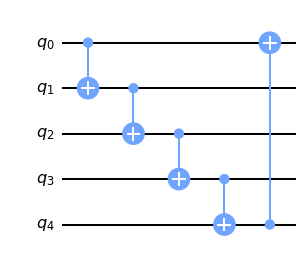

In [27]:
qc1 = CNOT_RING(5)
qc1.draw(output='mpl')

In [11]:
usim = Aer.get_backend('unitary_simulator')          # use a backend to simulate the ideal quantum circuit to find the unitary
qobj = assemble(qc1)                                 # assemble or put the circuit together
U_sim = usim.run(qobj).result().get_unitary()        # now simulate
#array_to_latex(U_sim, pretext="\\text{unitary} = ") # print the unitary aesthetically 

## 4. Compare Results

Now we could compare both matrices visually. But the dimensions of U growth with the number of qubits is exponential:
$$ dimension U = 2^N $$
Hence, for a 10 qubit CNOT Ring:$$ dimension U = 2^5 = 32 $$Hence, Unitary will be 32x32 in dimensions... too long to print. Using Numpy array_equal can see if two matrices elements are the same

In [ ]:
if (np.array_equal(U,U_sim)):
    print("The two arrays are equal (the math checks out)")
else:
    print("the two arrays are NOT equal")

## 5. N = 10 (10 wires)
we will not show algebraically how to do it but rather plug in the values needed

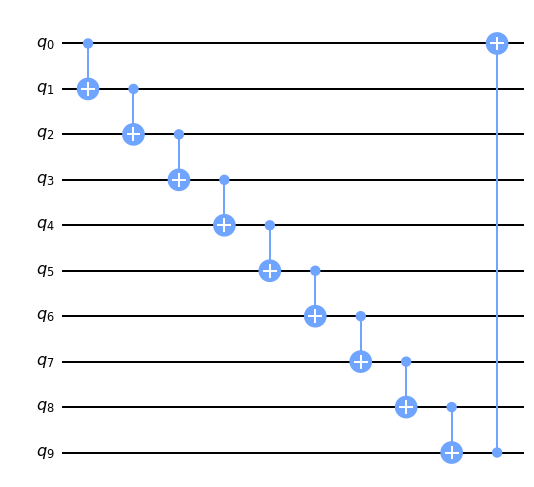

In [24]:
U_10 = CNOT_ALGO_FUN(10)
qc2 = CNOT_RING(10)
qc2.draw(output='mpl')

In [9]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc2) 
U_sim_10 = usim.run(qobj).result().get_unitary() 

if (np.array_equal(U_10,U_sim_10)):
    print("The two arrays are equal (the math checks out)")
else:
    print("the two arrays are NOT equal")

The two arrays are equal (the math checks out)


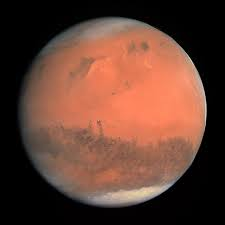

In [34]:
from IPython import display
display.Image("/Users/marks/OneDrive/Eng-Elec Wits 2021/Semester 1/ELEN4022 - Full Stack Quantum Computing/practice/newerrepo/mars.jpg")